# Replication: CS-Flow Naive G-Link

In this notebook, we naively apply CS-Flow to our raw G-Link dataset.

In [1]:
from __init__ import activate_cs_flow_config, CSFLOW_DIR
import shutil

# First, we activate the correct configuration.
activate_cs_flow_config(name='masked-g-link')

# Extracting Features

In [2]:
import os
import numpy as np
from src.repos.cs_flow.utils import load_datasets, make_dataloaders
from src.repos.cs_flow.extract_features import extract
import src.repos.cs_flow.config as c


prepend_dir = str(CSFLOW_DIR.resolve()) + '/'
export_name = c.class_name
export_dir = prepend_dir + 'data/features/' + export_name + '/'
image_paths = export_dir + c.class_name + '_image_paths.npy'
c.pre_extracted = False
os.makedirs(export_dir, exist_ok=True)
train_set, test_set = load_datasets(prepend_dir + c.dataset_path, c.class_name)
train_loader, test_loader = make_dataloaders(train_set, test_set)

In [3]:
from pathlib import Path

if not Path(image_paths).exists():
    extract(train_loader, test_loader, export_dir, c.class_name)
    paths = [p for p, l in test_set.samples]
    np.save(export_dir + c.class_name + '_image_paths.npy', paths)

# Training

In [4]:
from src.repos.cs_flow.train import train

results = train(train_loader, test_loader)
if isinstance(results, tuple):
    model = results[0]
    print(results[1:])
else:
    model = results

Loaded pretrained weights for efficientnet-b5

Train epoch 0


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:01<03:48,  1.12s/it]

  1%|          | 2/206 [00:01<03:09,  1.08it/s]

  1%|▏         | 3/206 [00:02<02:28,  1.36it/s]

  2%|▏         | 4/206 [00:02<02:09,  1.55it/s]

  2%|▏         | 5/206 [00:03<01:59,  1.69it/s]

  3%|▎         | 6/206 [00:03<01:53,  1.77it/s]

  3%|▎         | 7/206 [00:04<01:49,  1.82it/s]

  4%|▍         | 8/206 [00:04<01:46,  1.86it/s]

  4%|▍         | 9/206 [00:05<01:44,  1.88it/s]

  5%|▍         | 10/206 [00:05<01:43,  1.90it/s]

  5%|▌         | 11/206 [00:06<01:41,  1.92it/s]

  6%|▌         | 12/206 [00:07<01:39,  1.95it/s]

  6%|▋         | 13/206 [00:07<01:37,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:35,  2.01it/s]

  7%|▋         | 15/206 [00:08<01:34,  2.03it/s]

  8%|▊         | 16/206 [00:08<01:33,  2.02it/s]

  8%|▊         | 17/206 [00:09<01:33,  2.03it/s]

  9%|▊         | 18/206 [00:09<01:33,  2.01it/s]

  9%|▉         | 19/206 [00:10<01:32,  2.02it/s]

 10%|▉         | 20/206 [00:10<01:32,  2.00it/s]

 10%|█         | 21/206 [00:11<01:31,  2.03it/s]

 11%|█         | 22/206 [00:11<01:29,  2.05it/s]

 11%|█         | 23/206 [00:12<01:30,  2.02it/s]

 12%|█▏        | 24/206 [00:12<01:30,  2.00it/s]

 12%|█▏        | 25/206 [00:13<01:30,  2.00it/s]

 13%|█▎        | 26/206 [00:13<01:29,  2.01it/s]

 13%|█▎        | 27/206 [00:14<01:28,  2.01it/s]

 14%|█▎        | 28/206 [00:14<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:15<01:27,  2.03it/s]

 15%|█▍        | 30/206 [00:15<01:27,  2.02it/s]

 15%|█▌        | 31/206 [00:16<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:16<01:26,  2.01it/s]

 16%|█▌        | 33/206 [00:17<01:26,  2.00it/s]

 17%|█▋        | 34/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:18<01:23,  2.05it/s]

 17%|█▋        | 36/206 [00:18<01:22,  2.06it/s]

 18%|█▊        | 37/206 [00:19<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:19<01:21,  2.06it/s]

 19%|█▉        | 39/206 [00:20<01:20,  2.06it/s]

 19%|█▉        | 40/206 [00:20<01:21,  2.05it/s]

 20%|█▉        | 41/206 [00:21<01:21,  2.03it/s]

 20%|██        | 42/206 [00:21<01:20,  2.03it/s]

 21%|██        | 43/206 [00:22<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.02it/s]

 22%|██▏       | 45/206 [00:23<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:24<01:18,  2.04it/s]

 23%|██▎       | 48/206 [00:24<01:18,  2.03it/s]

 24%|██▍       | 49/206 [00:25<01:16,  2.04it/s]

 24%|██▍       | 50/206 [00:25<01:15,  2.05it/s]

 25%|██▍       | 51/206 [00:26<01:14,  2.07it/s]

 25%|██▌       | 52/206 [00:26<01:14,  2.07it/s]

 26%|██▌       | 53/206 [00:27<01:14,  2.05it/s]

 26%|██▌       | 54/206 [00:27<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:28<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:28<01:13,  2.04it/s]

 28%|██▊       | 57/206 [00:29<01:13,  2.03it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.02it/s]

 29%|██▊       | 59/206 [00:30<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:31<01:11,  2.02it/s]

 30%|███       | 62/206 [00:31<01:11,  2.02it/s]

 31%|███       | 63/206 [00:32<01:10,  2.02it/s]

 31%|███       | 64/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 65/206 [00:33<01:08,  2.06it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.05it/s]

 33%|███▎      | 67/206 [00:34<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:34<01:06,  2.07it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.07it/s]

 34%|███▍      | 70/206 [00:35<01:05,  2.06it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.06it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.04it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.04it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.03it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:38<01:03,  2.05it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.05it/s]

 38%|███▊      | 78/206 [00:39<01:03,  2.02it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.02it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.02it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.03it/s]

 40%|████      | 83/206 [00:41<01:00,  2.02it/s]

 41%|████      | 84/206 [00:42<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.03it/s]

 42%|████▏     | 86/206 [00:43<00:59,  2.03it/s]

 42%|████▏     | 87/206 [00:43<00:58,  2.04it/s]

 43%|████▎     | 88/206 [00:44<00:57,  2.05it/s]

 43%|████▎     | 89/206 [00:44<00:56,  2.06it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.06it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:46<00:55,  2.06it/s]

 45%|████▌     | 93/206 [00:46<00:54,  2.06it/s]

 46%|████▌     | 94/206 [00:47<00:54,  2.04it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.05it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.06it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:49<00:52,  2.06it/s]

 48%|████▊     | 99/206 [00:49<00:51,  2.08it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.08it/s]

 49%|████▉     | 101/206 [00:50<00:50,  2.07it/s]

 50%|████▉     | 102/206 [00:51<00:49,  2.08it/s]

 50%|█████     | 103/206 [00:51<00:49,  2.06it/s]

 50%|█████     | 104/206 [00:52<00:49,  2.04it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.04it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.04it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.05it/s]

 52%|█████▏    | 108/206 [00:54<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.04it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.02it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.04it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.03it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.02it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.01it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.02it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.01it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  2.00it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:02<00:39,  2.03it/s]

 61%|██████    | 126/206 [01:02<00:39,  2.03it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  2.02it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.01it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  2.02it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.05it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.06it/s]

 64%|██████▍   | 132/206 [01:05<00:35,  2.07it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.08it/s]

 65%|██████▌   | 134/206 [01:06<00:34,  2.07it/s]

 66%|██████▌   | 135/206 [01:07<00:34,  2.08it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.06it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  2.03it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.04it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  2.02it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.03it/s]

 68%|██████▊   | 141/206 [01:10<00:31,  2.04it/s]

 69%|██████▉   | 142/206 [01:10<00:31,  2.05it/s]

 69%|██████▉   | 143/206 [01:11<00:30,  2.06it/s]

 70%|██████▉   | 144/206 [01:11<00:29,  2.07it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.07it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.06it/s]

 71%|███████▏  | 147/206 [01:13<00:28,  2.05it/s]

 72%|███████▏  | 148/206 [01:13<00:28,  2.05it/s]

 72%|███████▏  | 149/206 [01:14<00:27,  2.04it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.04it/s]

 73%|███████▎  | 151/206 [01:15<00:26,  2.04it/s]

 74%|███████▍  | 152/206 [01:15<00:26,  2.04it/s]

 74%|███████▍  | 153/206 [01:16<00:25,  2.05it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.03it/s]

 75%|███████▌  | 155/206 [01:17<00:24,  2.05it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.04it/s]

 76%|███████▌  | 157/206 [01:18<00:23,  2.05it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.06it/s]

 77%|███████▋  | 159/206 [01:19<00:22,  2.07it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.04it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.05it/s]

 80%|████████  | 165/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.05it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.04it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  2.06it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.06it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  2.06it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.05it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  2.05it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.06it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  2.04it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.05it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.03it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.05it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.03it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.04it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  2.04it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.01it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  2.01it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.03it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  2.03it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  2.01it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  2.02it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.02it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  2.02it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.01it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.01it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.01it/s]

100%|██████████| 206/206 [01:42<00:00,  1.86it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

Epoch: 0.0 	 train loss: 6.1020


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:00<01:40,  2.03it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.01it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.01it/s]

  2%|▏         | 5/206 [00:02<01:39,  2.01it/s]

  3%|▎         | 6/206 [00:02<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:39,  1.99it/s]

  4%|▍         | 8/206 [00:03<01:38,  2.01it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.01it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.02it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.01it/s]

  6%|▌         | 12/206 [00:05<01:36,  2.00it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.05it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.06it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:31,  2.02it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.01it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.01it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.02it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.03it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.06it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 35/206 [00:17<01:22,  2.07it/s]

 17%|█▋        | 36/206 [00:17<01:22,  2.07it/s]

 18%|█▊        | 37/206 [00:18<01:21,  2.07it/s]

 18%|█▊        | 38/206 [00:18<01:21,  2.07it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.03it/s]

 20%|██        | 42/206 [00:20<01:21,  2.02it/s]

 21%|██        | 43/206 [00:21<01:20,  2.02it/s]

 21%|██▏       | 44/206 [00:21<01:20,  2.02it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:25<01:14,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.06it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:27<01:12,  2.06it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.05it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:28<01:11,  2.06it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.06it/s]

 30%|██▉       | 61/206 [00:29<01:11,  2.04it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:30<01:10,  2.03it/s]

 31%|███       | 64/206 [00:31<01:10,  2.03it/s]

 32%|███▏      | 65/206 [00:31<01:09,  2.04it/s]

 32%|███▏      | 66/206 [00:32<01:07,  2.06it/s]

 33%|███▎      | 67/206 [00:32<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.05it/s]

 33%|███▎      | 69/206 [00:33<01:06,  2.05it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 71/206 [00:34<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:35<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.00it/s]

 36%|███▋      | 75/206 [00:36<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 77/206 [00:37<01:03,  2.02it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.03it/s]

 38%|███▊      | 79/206 [00:38<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:39<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.02it/s]

 40%|████      | 83/206 [00:40<01:01,  2.00it/s]

 41%|████      | 84/206 [00:41<01:01,  2.00it/s]

 41%|████▏     | 85/206 [00:41<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:42<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:43<00:59,  2.00it/s]

 43%|████▎     | 89/206 [00:43<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:44<00:57,  2.01it/s]

 44%|████▍     | 91/206 [00:44<00:57,  2.01it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:45<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:46<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:47<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:48<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.00it/s]

 49%|████▉     | 101/206 [00:49<00:52,  2.00it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:50<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:51<00:51,  1.94it/s]

 51%|█████▏    | 106/206 [00:52<00:51,  1.94it/s]

 52%|█████▏    | 107/206 [00:52<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:53<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:53<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:54<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:55<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.02it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.00it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.00it/s]

 61%|██████    | 126/206 [01:02<00:40,  2.00it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.00it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  2.00it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.01it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  2.00it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:21<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.94it/s]

 80%|████████  | 165/206 [01:22<00:21,  1.95it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.94it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.95it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  2.00it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.02it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.03it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.05it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.06it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.03it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.04it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.03it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.02it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.01it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.04it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.04it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.05it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.04it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.05it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.03it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.04it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.02it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.01it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.02it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.04it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.04it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.03it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.03it/s]

100%|██████████| 206/206 [01:42<00:00,  2.42it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:00<01:41,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.05it/s]

  2%|▏         | 4/206 [00:01<01:37,  2.07it/s]

  2%|▏         | 5/206 [00:02<01:36,  2.08it/s]

  3%|▎         | 6/206 [00:02<01:36,  2.07it/s]

  3%|▎         | 7/206 [00:03<01:35,  2.08it/s]

  4%|▍         | 8/206 [00:03<01:35,  2.07it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.01it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.02it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.03it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:29,  2.05it/s]

 11%|█         | 23/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.05it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.06it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.06it/s]

 15%|█▍        | 30/206 [00:14<01:27,  2.01it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.03it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.05it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.04it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.05it/s]

 20%|██        | 42/206 [00:20<01:20,  2.04it/s]

 21%|██        | 43/206 [00:21<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:24<01:17,  2.02it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:25<01:14,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.03it/s]

 27%|██▋       | 55/206 [00:26<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.03it/s]

 28%|██▊       | 57/206 [00:27<01:13,  2.04it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:28<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.04it/s]

 30%|██▉       | 61/206 [00:29<01:11,  2.02it/s]

 30%|███       | 62/206 [00:30<01:10,  2.04it/s]

 31%|███       | 63/206 [00:30<01:09,  2.05it/s]

 31%|███       | 64/206 [00:31<01:09,  2.03it/s]

 32%|███▏      | 65/206 [00:31<01:10,  2.01it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:32<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:33<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:33<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:34<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:35<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:35<01:09,  1.94it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:36<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:40<01:03,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:41<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:44<00:58,  1.99it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:45<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.94it/s]

 49%|████▉     | 101/206 [00:50<00:54,  1.93it/s]

 50%|████▉     | 102/206 [00:50<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:51<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:55<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.94it/s]

 55%|█████▌    | 114/206 [00:56<00:47,  1.94it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:57<00:46,  1.93it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.94it/s]

 57%|█████▋    | 118/206 [00:58<00:45,  1.92it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [00:59<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:05<00:39,  1.94it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.94it/s]

 68%|██████▊   | 140/206 [01:10<00:34,  1.94it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.94it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:17<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:18<00:25,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.94it/s]

 77%|███████▋  | 159/206 [01:19<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.95it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.00it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.01it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.03it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.04it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.03it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.04it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.03it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.04it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.06it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.06it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.02it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  2.00it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.01it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.01it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.04it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.04it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.05it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.06it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.05it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.05it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.06it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.05it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.05it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.06it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.05it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.06it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.06it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.05it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.04it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.04it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.02it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.02it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.03it/s]

100%|██████████| 206/206 [01:42<00:00,  2.41it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:39,  2.06it/s]

  1%|          | 2/206 [00:00<01:37,  2.08it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.05it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.04it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.05it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.04it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.03it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.02it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.03it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.07it/s]

  9%|▊         | 18/206 [00:08<01:30,  2.09it/s]

  9%|▉         | 19/206 [00:09<01:28,  2.11it/s]

 10%|▉         | 20/206 [00:09<01:29,  2.07it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:29,  2.05it/s]

 11%|█         | 23/206 [00:11<01:30,  2.03it/s]

 12%|█▏        | 24/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.03it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.03it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.03it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.04it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.05it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.02it/s]

 20%|██        | 42/206 [00:20<01:21,  2.02it/s]

 21%|██        | 43/206 [00:21<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.05it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.03it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.02it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:25<01:16,  2.02it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.01it/s]

 26%|██▌       | 54/206 [00:26<01:15,  2.01it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 56/206 [00:27<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:27<01:13,  2.04it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:28<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.04it/s]

 30%|██▉       | 61/206 [00:29<01:11,  2.03it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:30<01:10,  2.04it/s]

 31%|███       | 64/206 [00:31<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:31<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.06it/s]

 33%|███▎      | 67/206 [00:32<01:07,  2.06it/s]

 33%|███▎      | 68/206 [00:33<01:06,  2.07it/s]

 33%|███▎      | 69/206 [00:33<01:06,  2.05it/s]

 34%|███▍      | 70/206 [00:34<01:05,  2.06it/s]

 34%|███▍      | 71/206 [00:34<01:05,  2.07it/s]

 35%|███▍      | 72/206 [00:35<01:04,  2.08it/s]

 35%|███▌      | 73/206 [00:35<01:03,  2.08it/s]

 36%|███▌      | 74/206 [00:36<01:03,  2.08it/s]

 36%|███▋      | 75/206 [00:36<01:03,  2.06it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.05it/s]

 37%|███▋      | 77/206 [00:37<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.06it/s]

 38%|███▊      | 79/206 [00:38<01:02,  2.04it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:39<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.02it/s]

 40%|████      | 83/206 [00:40<01:00,  2.02it/s]

 41%|████      | 84/206 [00:41<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:41<01:00,  2.00it/s]

 42%|████▏     | 86/206 [00:42<00:59,  2.00it/s]

 42%|████▏     | 87/206 [00:42<00:58,  2.03it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.05it/s]

 43%|████▎     | 89/206 [00:43<00:57,  2.03it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.04it/s]

 44%|████▍     | 91/206 [00:44<00:56,  2.02it/s]

 45%|████▍     | 92/206 [00:45<00:56,  2.03it/s]

 45%|████▌     | 93/206 [00:45<00:56,  2.01it/s]

 46%|████▌     | 94/206 [00:46<00:55,  2.02it/s]

 46%|████▌     | 95/206 [00:46<00:54,  2.02it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.03it/s]

 47%|████▋     | 97/206 [00:47<00:54,  2.02it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.03it/s]

 48%|████▊     | 99/206 [00:48<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.03it/s]

 49%|████▉     | 101/206 [00:49<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.04it/s]

 50%|█████     | 103/206 [00:50<00:49,  2.07it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:51<00:50,  2.00it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:52<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:53<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  2.00it/s]

 54%|█████▍    | 111/206 [00:54<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:55<00:46,  2.03it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.06it/s]

 55%|█████▌    | 114/206 [00:56<00:44,  2.06it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:56<00:44,  2.04it/s]

 57%|█████▋    | 117/206 [00:57<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:57<00:43,  2.04it/s]

 58%|█████▊    | 119/206 [00:58<00:42,  2.04it/s]

 58%|█████▊    | 120/206 [00:58<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [00:59<00:42,  2.02it/s]

 59%|█████▉    | 122/206 [00:59<00:41,  2.02it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.03it/s]

 60%|██████    | 124/206 [01:00<00:40,  2.02it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.04it/s]

 61%|██████    | 126/206 [01:01<00:38,  2.06it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:02<00:38,  2.05it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:03<00:37,  2.02it/s]

 64%|██████▎   | 131/206 [01:04<00:37,  2.01it/s]

 64%|██████▍   | 132/206 [01:04<00:36,  2.00it/s]

 65%|██████▍   | 133/206 [01:05<00:36,  2.00it/s]

 65%|██████▌   | 134/206 [01:05<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:06<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:06<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:07<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:07<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:08<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:08<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:09<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:09<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:10<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:11<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:11<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:12<00:30,  1.97it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:13<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:14<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:15<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:16<00:27,  1.92it/s]

 75%|███████▌  | 155/206 [01:16<00:26,  1.93it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.93it/s]

 76%|███████▌  | 157/206 [01:17<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.93it/s]

 77%|███████▋  | 159/206 [01:18<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  2.00it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  2.00it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  2.00it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.01it/s]

 80%|████████  | 165/206 [01:21<00:20,  2.03it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.03it/s]

 81%|████████  | 167/206 [01:22<00:19,  2.01it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.00it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.00it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  2.01it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.02it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.05it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.07it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.07it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.07it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.06it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.06it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.02it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  2.03it/s]

 92%|█████████▏| 190/206 [01:33<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:34<00:06,  2.05it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  2.07it/s]

 94%|█████████▍| 194/206 [01:35<00:05,  2.07it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  2.08it/s]

 95%|█████████▌| 196/206 [01:36<00:04,  2.07it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  2.06it/s]

 96%|█████████▌| 198/206 [01:37<00:03,  2.07it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  2.06it/s]

 97%|█████████▋| 200/206 [01:38<00:02,  2.06it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  2.05it/s]

 98%|█████████▊| 202/206 [01:39<00:01,  2.07it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.08it/s]

 99%|█████████▉| 204/206 [01:40<00:00,  2.07it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.07it/s]

100%|██████████| 206/206 [01:41<00:00,  2.45it/s]

100%|██████████| 206/206 [01:41<00:00,  2.03it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:00<01:40,  2.03it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.06it/s]

  2%|▏         | 4/206 [00:01<01:37,  2.06it/s]

  2%|▏         | 5/206 [00:02<01:37,  2.06it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.02it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.01it/s]

  6%|▌         | 12/206 [00:05<01:36,  2.01it/s]

  6%|▋         | 13/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 14/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 16/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 17/206 [00:08<01:34,  1.99it/s]

  9%|▊         | 18/206 [00:08<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:09<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:10<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:11<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.01it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.02it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.01it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.02it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.05it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:17<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:18<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:19<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:20<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:21<01:20,  2.00it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:23<01:18,  2.01it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.02it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.04it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.04it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.05it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.03it/s]

 28%|██▊       | 58/206 [00:28<01:13,  2.01it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.00it/s]

 29%|██▉       | 60/206 [00:29<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:30<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:31<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.01it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.00it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.03it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.01it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:38<01:03,  2.01it/s]

 38%|███▊      | 79/206 [00:39<01:03,  2.00it/s]

 39%|███▉      | 80/206 [00:39<01:02,  2.02it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.00it/s]

 40%|████      | 83/206 [00:41<01:01,  2.01it/s]

 41%|████      | 84/206 [00:41<01:00,  2.01it/s]

 41%|████▏     | 85/206 [00:42<01:00,  2.00it/s]

 42%|████▏     | 86/206 [00:42<00:59,  2.02it/s]

 42%|████▏     | 87/206 [00:43<00:58,  2.02it/s]

 43%|████▎     | 88/206 [00:43<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.02it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.04it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.05it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.05it/s]

 46%|████▌     | 94/206 [00:46<00:54,  2.07it/s]

 46%|████▌     | 95/206 [00:47<00:53,  2.08it/s]

 47%|████▋     | 96/206 [00:47<00:52,  2.08it/s]

 47%|████▋     | 97/206 [00:48<00:52,  2.08it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.07it/s]

 48%|████▊     | 99/206 [00:49<00:51,  2.07it/s]

 49%|████▊     | 100/206 [00:49<00:51,  2.06it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.05it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.05it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.04it/s]

 50%|█████     | 104/206 [00:51<00:49,  2.06it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:52<00:48,  2.05it/s]

 52%|█████▏    | 107/206 [00:53<00:47,  2.06it/s]

 52%|█████▏    | 108/206 [00:53<00:47,  2.06it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.06it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.06it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 112/206 [00:55<00:45,  2.04it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.06it/s]

 55%|█████▌    | 114/206 [00:56<00:44,  2.06it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.04it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.03it/s]

 57%|█████▋    | 117/206 [00:57<00:43,  2.03it/s]

 57%|█████▋    | 118/206 [00:58<00:42,  2.05it/s]

 58%|█████▊    | 119/206 [00:58<00:42,  2.04it/s]

 58%|█████▊    | 120/206 [00:59<00:41,  2.05it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.05it/s]

 59%|█████▉    | 122/206 [01:00<00:40,  2.06it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.07it/s]

 60%|██████    | 124/206 [01:01<00:39,  2.08it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.07it/s]

 61%|██████    | 126/206 [01:02<00:38,  2.05it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.03it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.03it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.03it/s]

 64%|██████▎   | 131/206 [01:04<00:36,  2.04it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.04it/s]

 65%|██████▍   | 133/206 [01:05<00:35,  2.05it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.06it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.07it/s]

 66%|██████▌   | 136/206 [01:07<00:33,  2.07it/s]

 67%|██████▋   | 137/206 [01:07<00:33,  2.08it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.05it/s]

 67%|██████▋   | 139/206 [01:08<00:32,  2.04it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.04it/s]

 68%|██████▊   | 141/206 [01:09<00:31,  2.07it/s]

 69%|██████▉   | 142/206 [01:10<00:30,  2.08it/s]

 69%|██████▉   | 143/206 [01:10<00:30,  2.07it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.06it/s]

 70%|███████   | 145/206 [01:11<00:29,  2.05it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.03it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  2.03it/s]

 72%|███████▏  | 148/206 [01:13<00:28,  2.04it/s]

 72%|███████▏  | 149/206 [01:13<00:27,  2.05it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.04it/s]

 73%|███████▎  | 151/206 [01:14<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:15<00:26,  2.02it/s]

 74%|███████▍  | 153/206 [01:15<00:26,  2.01it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  2.02it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.04it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  2.04it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.03it/s]

 77%|███████▋  | 159/206 [01:18<00:22,  2.05it/s]

 78%|███████▊  | 160/206 [01:18<00:22,  2.08it/s]

 78%|███████▊  | 161/206 [01:19<00:21,  2.08it/s]

 79%|███████▊  | 162/206 [01:19<00:21,  2.08it/s]

 79%|███████▉  | 163/206 [01:20<00:20,  2.07it/s]

 80%|███████▉  | 164/206 [01:20<00:20,  2.07it/s]

 80%|████████  | 165/206 [01:21<00:19,  2.05it/s]

 81%|████████  | 166/206 [01:21<00:19,  2.07it/s]

 81%|████████  | 167/206 [01:22<00:18,  2.08it/s]

 82%|████████▏ | 168/206 [01:22<00:18,  2.05it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  2.02it/s]

 83%|████████▎ | 170/206 [01:23<00:17,  2.04it/s]

 83%|████████▎ | 171/206 [01:24<00:16,  2.06it/s]

 83%|████████▎ | 172/206 [01:24<00:16,  2.06it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:25<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  2.06it/s]

 85%|████████▌ | 176/206 [01:26<00:14,  2.07it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  2.07it/s]

 86%|████████▋ | 178/206 [01:27<00:13,  2.06it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  2.07it/s]

 87%|████████▋ | 180/206 [01:28<00:12,  2.08it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.05it/s]

 88%|████████▊ | 182/206 [01:29<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:30<00:10,  2.06it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.05it/s]

 90%|█████████ | 186/206 [01:31<00:09,  2.07it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.04it/s]

 91%|█████████▏| 188/206 [01:32<00:08,  2.05it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  2.05it/s]

 92%|█████████▏| 190/206 [01:33<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:34<00:06,  2.05it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  2.05it/s]

 94%|█████████▍| 194/206 [01:35<00:05,  2.05it/s]

 95%|█████████▍| 195/206 [01:35<00:05,  2.06it/s]

 95%|█████████▌| 196/206 [01:36<00:04,  2.08it/s]

 96%|█████████▌| 197/206 [01:36<00:04,  2.05it/s]

 96%|█████████▌| 198/206 [01:37<00:03,  2.05it/s]

 97%|█████████▋| 199/206 [01:37<00:03,  2.06it/s]

 97%|█████████▋| 200/206 [01:38<00:02,  2.06it/s]

 98%|█████████▊| 201/206 [01:38<00:02,  2.05it/s]

 98%|█████████▊| 202/206 [01:39<00:01,  2.05it/s]

 99%|█████████▊| 203/206 [01:39<00:01,  2.06it/s]

 99%|█████████▉| 204/206 [01:40<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:40<00:00,  2.01it/s]

100%|██████████| 206/206 [01:41<00:00,  2.38it/s]

100%|██████████| 206/206 [01:41<00:00,  2.04it/s]

Epoch: 0.4 	 train loss: 1.2923


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:40,  2.00it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.01it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:37,  1.99it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.00it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:19,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:16,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:16,  1.92it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.93it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.93it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:11,  2.00it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:10,  1.99it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  2.00it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.00it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.00it/s]

 36%|███▌      | 74/206 [00:37<01:06,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.01it/s]

 45%|████▌     | 93/206 [00:47<00:56,  2.01it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.01it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.01it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.01it/s]

 47%|████▋     | 97/206 [00:49<00:54,  2.01it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:52<00:51,  2.00it/s]

 50%|█████     | 104/206 [00:52<00:51,  2.00it/s]

 51%|█████     | 105/206 [00:53<00:50,  2.00it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  2.00it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.01it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.94it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.94it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.94it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:07<00:37,  1.95it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.00it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.02it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.03it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.04it/s]

 70%|███████   | 145/206 [01:13<00:29,  2.06it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.04it/s]

 71%|███████▏  | 147/206 [01:14<00:28,  2.05it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.06it/s]

 72%|███████▏  | 149/206 [01:15<00:27,  2.07it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.04it/s]

 73%|███████▎  | 151/206 [01:16<00:26,  2.05it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.05it/s]

 74%|███████▍  | 153/206 [01:17<00:25,  2.04it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.04it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.03it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.03it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.02it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.03it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.03it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.03it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.05it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.05it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.04it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.06it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.07it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.08it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.06it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.06it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.05it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.06it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.05it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.06it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.05it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.01it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.01it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.00it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.96it/s]

100%|██████████| 206/206 [01:43<00:00,  2.33it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.94it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.94it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.94it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:36,  1.94it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:35,  1.93it/s]

 11%|█         | 22/206 [00:11<01:35,  1.93it/s]

 11%|█         | 23/206 [00:11<01:34,  1.95it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.94it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:22,  1.99it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.94it/s]

 25%|██▍       | 51/206 [00:26<01:20,  1.92it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.94it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:28<01:16,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.94it/s]

 30%|███       | 62/206 [00:31<01:14,  1.95it/s]

 31%|███       | 63/206 [00:32<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:09,  1.94it/s]

 35%|███▌      | 73/206 [00:37<01:08,  1.94it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:54,  2.01it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.03it/s]

 48%|████▊     | 99/206 [00:50<00:52,  2.04it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.05it/s]

 49%|████▉     | 101/206 [00:51<00:51,  2.04it/s]

 50%|████▉     | 102/206 [00:51<00:50,  2.05it/s]

 50%|█████     | 103/206 [00:52<00:50,  2.05it/s]

 50%|█████     | 104/206 [00:52<00:49,  2.04it/s]

 51%|█████     | 105/206 [00:53<00:49,  2.04it/s]

 51%|█████▏    | 106/206 [00:53<00:48,  2.05it/s]

 52%|█████▏    | 107/206 [00:54<00:48,  2.06it/s]

 52%|█████▏    | 108/206 [00:54<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:55<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 111/206 [00:56<00:46,  2.06it/s]

 54%|█████▍    | 112/206 [00:56<00:45,  2.05it/s]

 55%|█████▍    | 113/206 [00:57<00:45,  2.05it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.04it/s]

 56%|█████▌    | 115/206 [00:58<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:58<00:43,  2.06it/s]

 57%|█████▋    | 117/206 [00:59<00:42,  2.07it/s]

 57%|█████▋    | 118/206 [00:59<00:42,  2.08it/s]

 58%|█████▊    | 119/206 [01:00<00:42,  2.07it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:01<00:41,  2.03it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:02<00:40,  2.05it/s]

 60%|██████    | 124/206 [01:02<00:39,  2.05it/s]

 61%|██████    | 125/206 [01:03<00:39,  2.06it/s]

 61%|██████    | 126/206 [01:03<00:38,  2.06it/s]

 62%|██████▏   | 127/206 [01:04<00:38,  2.05it/s]

 62%|██████▏   | 128/206 [01:04<00:37,  2.05it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.05it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.05it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.06it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.05it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.05it/s]

 65%|██████▌   | 134/206 [01:07<00:34,  2.06it/s]

 66%|██████▌   | 135/206 [01:07<00:34,  2.05it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.03it/s]

 67%|██████▋   | 137/206 [01:08<00:33,  2.04it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.05it/s]

 67%|██████▋   | 139/206 [01:09<00:32,  2.07it/s]

 68%|██████▊   | 140/206 [01:10<00:31,  2.07it/s]

 68%|██████▊   | 141/206 [01:10<00:31,  2.07it/s]

 69%|██████▉   | 142/206 [01:11<00:30,  2.07it/s]

 69%|██████▉   | 143/206 [01:11<00:30,  2.08it/s]

 70%|██████▉   | 144/206 [01:12<00:29,  2.08it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.09it/s]

 71%|███████   | 146/206 [01:13<00:28,  2.08it/s]

 71%|███████▏  | 147/206 [01:13<00:28,  2.07it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.06it/s]

 72%|███████▏  | 149/206 [01:14<00:27,  2.06it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.07it/s]

 73%|███████▎  | 151/206 [01:15<00:26,  2.07it/s]

 74%|███████▍  | 152/206 [01:16<00:25,  2.08it/s]

 74%|███████▍  | 153/206 [01:16<00:25,  2.08it/s]

 75%|███████▍  | 154/206 [01:17<00:24,  2.08it/s]

 75%|███████▌  | 155/206 [01:17<00:24,  2.06it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.04it/s]

 76%|███████▌  | 157/206 [01:18<00:23,  2.07it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.07it/s]

 77%|███████▋  | 159/206 [01:19<00:22,  2.07it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.02it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.03it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:22<00:19,  2.07it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 167/206 [01:23<00:18,  2.06it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.05it/s]

 82%|████████▏ | 169/206 [01:24<00:17,  2.06it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.05it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.05it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.06it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.06it/s]

 85%|████████▍ | 175/206 [01:27<00:14,  2.07it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.07it/s]

 86%|████████▌ | 177/206 [01:28<00:13,  2.08it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.07it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.02it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.03it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.05it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.06it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.08it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.08it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.08it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.07it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.07it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.08it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.05it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.06it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.06it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.06it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.06it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.04it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.03it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.02it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.03it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.02it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.02it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.04it/s]

100%|██████████| 206/206 [01:42<00:00,  2.41it/s]

100%|██████████| 206/206 [01:42<00:00,  2.02it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.02it/s]

  1%|          | 2/206 [00:00<01:40,  2.02it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.04it/s]

  2%|▏         | 5/206 [00:02<01:39,  2.03it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.03it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.01it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:05<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 14/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:07<01:34,  2.01it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:29,  2.06it/s]

 11%|█         | 22/206 [00:10<01:29,  2.06it/s]

 11%|█         | 23/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.05it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:24,  2.06it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.05it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.06it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:25,  2.00it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.01it/s]

 18%|█▊        | 37/206 [00:18<01:24,  1.99it/s]

 18%|█▊        | 38/206 [00:18<01:23,  2.01it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:19<01:20,  2.05it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.04it/s]

 20%|██        | 42/206 [00:20<01:21,  2.02it/s]

 21%|██        | 43/206 [00:21<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:21<01:20,  2.02it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.06it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.05it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.06it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.08it/s]

 25%|██▍       | 51/206 [00:25<01:14,  2.08it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.04it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.05it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.06it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.04it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.04it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.03it/s]

 30%|██▉       | 61/206 [00:29<01:11,  2.03it/s]

 30%|███       | 62/206 [00:30<01:10,  2.04it/s]

 31%|███       | 63/206 [00:30<01:09,  2.04it/s]

 31%|███       | 64/206 [00:31<01:09,  2.04it/s]

 32%|███▏      | 65/206 [00:31<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:32<01:09,  2.03it/s]

 33%|███▎      | 67/206 [00:32<01:09,  2.01it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:33<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.00it/s]

 34%|███▍      | 71/206 [00:34<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:35<01:05,  2.03it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:36<01:03,  2.05it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.04it/s]

 37%|███▋      | 77/206 [00:37<01:03,  2.03it/s]

 38%|███▊      | 78/206 [00:38<01:03,  2.01it/s]

 38%|███▊      | 79/206 [00:38<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:39<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.03it/s]

 40%|████      | 83/206 [00:40<01:00,  2.03it/s]

 41%|████      | 84/206 [00:41<01:00,  2.02it/s]

 41%|████▏     | 85/206 [00:41<00:59,  2.02it/s]

 42%|████▏     | 86/206 [00:42<00:59,  2.01it/s]

 42%|████▏     | 87/206 [00:42<00:58,  2.03it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.05it/s]

 43%|████▎     | 89/206 [00:43<00:56,  2.07it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.06it/s]

 44%|████▍     | 91/206 [00:44<00:55,  2.07it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.05it/s]

 45%|████▌     | 93/206 [00:45<00:54,  2.06it/s]

 46%|████▌     | 94/206 [00:46<00:54,  2.07it/s]

 46%|████▌     | 95/206 [00:46<00:53,  2.08it/s]

 47%|████▋     | 96/206 [00:47<00:53,  2.08it/s]

 47%|████▋     | 97/206 [00:47<00:52,  2.06it/s]

 48%|████▊     | 98/206 [00:48<00:51,  2.08it/s]

 48%|████▊     | 99/206 [00:48<00:51,  2.06it/s]

 49%|████▊     | 100/206 [00:49<00:51,  2.06it/s]

 49%|████▉     | 101/206 [00:49<00:51,  2.02it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:50<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:51<00:49,  2.03it/s]

 51%|█████▏    | 106/206 [00:52<00:48,  2.04it/s]

 52%|█████▏    | 107/206 [00:52<00:48,  2.04it/s]

 52%|█████▏    | 108/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.06it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.06it/s]

 54%|█████▍    | 111/206 [00:54<00:46,  2.06it/s]

 54%|█████▍    | 112/206 [00:54<00:45,  2.05it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:55<00:45,  2.04it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:56<00:43,  2.05it/s]

 57%|█████▋    | 117/206 [00:57<00:43,  2.06it/s]

 57%|█████▋    | 118/206 [00:57<00:43,  2.04it/s]

 58%|█████▊    | 119/206 [00:58<00:42,  2.04it/s]

 58%|█████▊    | 120/206 [00:58<00:42,  2.04it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [00:59<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.03it/s]

 60%|██████    | 124/206 [01:00<00:40,  2.02it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:01<00:38,  2.06it/s]

 62%|██████▏   | 127/206 [01:02<00:39,  2.02it/s]

 62%|██████▏   | 128/206 [01:02<00:38,  2.00it/s]

 63%|██████▎   | 129/206 [01:03<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:03<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:04<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:04<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:05<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:05<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:06<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:06<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:07<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:08<00:35,  1.94it/s]

 67%|██████▋   | 139/206 [01:08<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:09<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  2.00it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  2.00it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.00it/s]

 70%|███████   | 145/206 [01:11<00:30,  2.00it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.00it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  2.01it/s]

 72%|███████▏  | 148/206 [01:12<00:28,  2.02it/s]

 72%|███████▏  | 149/206 [01:13<00:28,  2.02it/s]

 73%|███████▎  | 150/206 [01:13<00:27,  2.03it/s]

 73%|███████▎  | 151/206 [01:14<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:14<00:26,  2.01it/s]

 74%|███████▍  | 153/206 [01:15<00:26,  2.00it/s]

 75%|███████▍  | 154/206 [01:15<00:26,  2.00it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  2.00it/s]

 76%|███████▌  | 156/206 [01:16<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:18<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  2.00it/s]

 80%|████████  | 165/206 [01:21<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.01it/s]

 81%|████████  | 167/206 [01:22<00:19,  2.00it/s]

 82%|████████▏ | 168/206 [01:22<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  2.03it/s]

 83%|████████▎ | 170/206 [01:23<00:17,  2.04it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  2.04it/s]

 83%|████████▎ | 172/206 [01:24<00:16,  2.03it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:25<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  2.03it/s]

 85%|████████▌ | 176/206 [01:26<00:14,  2.03it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  2.02it/s]

 86%|████████▋ | 178/206 [01:27<00:13,  2.02it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  2.02it/s]

 87%|████████▋ | 180/206 [01:28<00:12,  2.00it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.02it/s]

 88%|████████▊ | 182/206 [01:29<00:11,  2.02it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:30<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:31<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.06it/s]

 91%|█████████▏| 188/206 [01:32<00:08,  2.05it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  2.06it/s]

 92%|█████████▏| 190/206 [01:33<00:07,  2.07it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  2.06it/s]

 93%|█████████▎| 192/206 [01:34<00:06,  2.06it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  2.07it/s]

 94%|█████████▍| 194/206 [01:35<00:05,  2.10it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  2.09it/s]

 95%|█████████▌| 196/206 [01:36<00:04,  2.09it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  2.05it/s]

 96%|█████████▌| 198/206 [01:37<00:03,  2.04it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  2.04it/s]

 97%|█████████▋| 200/206 [01:38<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  2.07it/s]

 98%|█████████▊| 202/206 [01:39<00:01,  2.05it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:40<00:00,  2.01it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.02it/s]

100%|██████████| 206/206 [01:41<00:00,  2.40it/s]

100%|██████████| 206/206 [01:41<00:00,  2.03it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:41,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.02it/s]

  3%|▎         | 7/206 [00:03<01:38,  2.03it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 9/206 [00:04<01:35,  2.07it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.06it/s]

  5%|▌         | 11/206 [00:05<01:34,  2.06it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.06it/s]

  6%|▋         | 13/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 14/206 [00:06<01:32,  2.08it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.05it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.06it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:28,  2.07it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.05it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.04it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.03it/s]

 15%|█▍        | 30/206 [00:14<01:27,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.07it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.05it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.02it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.03it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.05it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.04it/s]

 20%|██        | 42/206 [00:20<01:20,  2.04it/s]

 21%|██        | 43/206 [00:21<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:21<01:20,  2.02it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:23<01:18,  2.01it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.02it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 54/206 [00:26<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:28<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.00it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.03it/s]

 30%|███       | 62/206 [00:30<01:11,  2.02it/s]

 31%|███       | 63/206 [00:31<01:11,  2.01it/s]

 31%|███       | 64/206 [00:31<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:32<01:09,  2.01it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.03it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.06it/s]

 34%|███▍      | 71/206 [00:34<01:05,  2.07it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:35<01:04,  2.07it/s]

 36%|███▌      | 74/206 [00:36<01:03,  2.07it/s]

 36%|███▋      | 75/206 [00:36<01:03,  2.05it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.06it/s]

 37%|███▋      | 77/206 [00:37<01:03,  2.05it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.03it/s]

 38%|███▊      | 79/206 [00:38<01:01,  2.06it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.06it/s]

 39%|███▉      | 81/206 [00:39<01:00,  2.06it/s]

 40%|███▉      | 82/206 [00:40<00:59,  2.07it/s]

 40%|████      | 83/206 [00:40<00:58,  2.09it/s]

 41%|████      | 84/206 [00:41<00:59,  2.06it/s]

 41%|████▏     | 85/206 [00:41<00:58,  2.05it/s]

 42%|████▏     | 86/206 [00:42<00:58,  2.06it/s]

 42%|████▏     | 87/206 [00:42<00:57,  2.06it/s]

 43%|████▎     | 88/206 [00:43<00:58,  2.03it/s]

 43%|████▎     | 89/206 [00:43<00:57,  2.02it/s]

 44%|████▎     | 90/206 [00:44<00:57,  2.02it/s]

 44%|████▍     | 91/206 [00:44<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.05it/s]

 45%|████▌     | 93/206 [00:45<00:54,  2.06it/s]

 46%|████▌     | 94/206 [00:46<00:53,  2.07it/s]

 46%|████▌     | 95/206 [00:46<00:53,  2.08it/s]

 47%|████▋     | 96/206 [00:47<00:52,  2.09it/s]

 47%|████▋     | 97/206 [00:47<00:52,  2.09it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.07it/s]

 48%|████▊     | 99/206 [00:48<00:52,  2.04it/s]

 49%|████▊     | 100/206 [00:49<00:51,  2.07it/s]

 49%|████▉     | 101/206 [00:49<00:50,  2.06it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.06it/s]

 50%|█████     | 103/206 [00:50<00:50,  2.04it/s]

 50%|█████     | 104/206 [00:50<00:49,  2.04it/s]

 51%|█████     | 105/206 [00:51<00:49,  2.04it/s]

 51%|█████▏    | 106/206 [00:51<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:52<00:49,  2.01it/s]

 52%|█████▏    | 108/206 [00:52<00:48,  2.03it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.04it/s]

 53%|█████▎    | 110/206 [00:53<00:46,  2.04it/s]

 54%|█████▍    | 111/206 [00:54<00:46,  2.04it/s]

 54%|█████▍    | 112/206 [00:54<00:45,  2.05it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.05it/s]

 55%|█████▌    | 114/206 [00:55<00:45,  2.04it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.03it/s]

 56%|█████▋    | 116/206 [00:56<00:44,  2.02it/s]

 57%|█████▋    | 117/206 [00:57<00:44,  2.01it/s]

 57%|█████▋    | 118/206 [00:57<00:43,  2.02it/s]

 58%|█████▊    | 119/206 [00:58<00:43,  2.01it/s]

 58%|█████▊    | 120/206 [00:58<00:42,  2.02it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.05it/s]

 59%|█████▉    | 122/206 [00:59<00:41,  2.05it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.03it/s]

 60%|██████    | 124/206 [01:00<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:01<00:40,  2.01it/s]

 61%|██████    | 126/206 [01:01<00:39,  2.02it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.03it/s]

 62%|██████▏   | 128/206 [01:02<00:38,  2.01it/s]

 63%|██████▎   | 129/206 [01:03<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:03<00:37,  2.00it/s]

 64%|██████▎   | 131/206 [01:04<00:37,  2.01it/s]

 64%|██████▍   | 132/206 [01:04<00:36,  2.01it/s]

 65%|██████▍   | 133/206 [01:05<00:36,  2.01it/s]

 65%|██████▌   | 134/206 [01:05<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:06<00:35,  2.00it/s]

 66%|██████▌   | 136/206 [01:06<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:07<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:07<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:08<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:08<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:09<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:09<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:10<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:11<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:11<00:30,  1.94it/s]

 71%|███████▏  | 147/206 [01:12<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:13<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:14<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:15<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:18<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:20<00:22,  1.94it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:21<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:22<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  1.94it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.94it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.01it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.01it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.01it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.03it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.02it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  2.02it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.05it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  2.04it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  2.02it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.02it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  2.05it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.05it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  2.04it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  2.05it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.04it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.03it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.05it/s]

100%|██████████| 206/206 [01:41<00:00,  2.43it/s]

100%|██████████| 206/206 [01:41<00:00,  2.02it/s]

Epoch: 0.8 	 train loss: 1.0092


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.01it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:02<01:39,  2.02it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 9/206 [00:04<01:35,  2.05it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.05it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.06it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.05it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.07it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.06it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:29,  2.07it/s]

 11%|█         | 22/206 [00:10<01:29,  2.07it/s]

 11%|█         | 23/206 [00:11<01:28,  2.07it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.04it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.05it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.05it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.04it/s]

 18%|█▊        | 38/206 [00:18<01:20,  2.08it/s]

 19%|█▉        | 39/206 [00:19<01:20,  2.08it/s]

 19%|█▉        | 40/206 [00:19<01:20,  2.06it/s]

 20%|█▉        | 41/206 [00:20<01:19,  2.07it/s]

 20%|██        | 42/206 [00:20<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.05it/s]

 22%|██▏       | 45/206 [00:21<01:18,  2.05it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:22<01:17,  2.05it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.08it/s]

 24%|██▍       | 49/206 [00:23<01:15,  2.07it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.07it/s]

 25%|██▍       | 51/206 [00:24<01:14,  2.07it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:25<01:14,  2.05it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.05it/s]

 27%|██▋       | 55/206 [00:26<01:12,  2.07it/s]

 27%|██▋       | 56/206 [00:27<01:12,  2.07it/s]

 28%|██▊       | 57/206 [00:27<01:12,  2.06it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.04it/s]

 29%|██▊       | 59/206 [00:28<01:11,  2.04it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:29<01:10,  2.04it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:30<01:09,  2.05it/s]

 31%|███       | 64/206 [00:31<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:31<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.05it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.02it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:34<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.01it/s]

 35%|███▌      | 73/206 [00:35<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:36<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:37<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:38<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:39<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.97it/s]

 40%|████      | 83/206 [00:40<01:01,  1.99it/s]

 41%|████      | 84/206 [00:41<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:41<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:42<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:43<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:44<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:45<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:46<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:47<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:48<00:53,  2.00it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:49<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.00it/s]

 50%|█████     | 103/206 [00:50<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:51<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:52<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:52<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:53<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  2.00it/s]

 54%|█████▍    | 111/206 [00:54<00:47,  2.02it/s]

 54%|█████▍    | 112/206 [00:55<00:46,  2.03it/s]

 55%|█████▍    | 113/206 [00:55<00:46,  2.02it/s]

 55%|█████▌    | 114/206 [00:56<00:45,  2.01it/s]

 56%|█████▌    | 115/206 [00:56<00:45,  2.02it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.03it/s]

 57%|█████▋    | 117/206 [00:57<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:58<00:42,  2.06it/s]

 58%|█████▊    | 119/206 [00:58<00:42,  2.06it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.04it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [01:00<00:40,  2.05it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.06it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.05it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:02<00:39,  2.03it/s]

 62%|██████▏   | 127/206 [01:02<00:39,  2.01it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:03<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:04<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:05<00:36,  2.00it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.00it/s]

 66%|██████▌   | 135/206 [01:06<00:35,  2.00it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.00it/s]

 67%|██████▋   | 137/206 [01:07<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:08<00:33,  2.01it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.02it/s]

 68%|██████▊   | 141/206 [01:09<00:32,  2.01it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:11<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:12<00:30,  2.00it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:13<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:14<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:15<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:16<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:18<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:19<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.94it/s]

 79%|███████▉  | 163/206 [01:20<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.00it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.02it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.03it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.02it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.02it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.04it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.03it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.02it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.02it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.03it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.03it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.03it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.04it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.03it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.03it/s]

100%|██████████| 206/206 [01:42<00:00,  2.40it/s]

100%|██████████| 206/206 [01:42<00:00,  2.02it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.04it/s]

  1%|          | 2/206 [00:00<01:40,  2.04it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.07it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.05it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.05it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.03it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.05it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.04it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.03it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.03it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.02it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.02it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.03it/s]

 10%|█         | 21/206 [00:10<01:31,  2.03it/s]

 11%|█         | 22/206 [00:10<01:30,  2.03it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.03it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.02it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.03it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.06it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:16<01:25,  2.00it/s]

 17%|█▋        | 35/206 [00:17<01:25,  2.01it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.01it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.05it/s]

 20%|██        | 42/206 [00:20<01:20,  2.04it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.05it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:17,  2.06it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.06it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.05it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.06it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.05it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.05it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.04it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.04it/s]

 28%|██▊       | 57/206 [00:27<01:13,  2.03it/s]

 28%|██▊       | 58/206 [00:28<01:13,  2.01it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.01it/s]

 30%|███       | 62/206 [00:30<01:11,  2.01it/s]

 31%|███       | 63/206 [00:30<01:10,  2.02it/s]

 31%|███       | 64/206 [00:31<01:10,  2.02it/s]

 32%|███▏      | 65/206 [00:31<01:10,  2.01it/s]

 32%|███▏      | 66/206 [00:32<01:10,  2.00it/s]

 33%|███▎      | 67/206 [00:32<01:09,  2.01it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.01it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.03it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:34<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:35<01:05,  2.04it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.02it/s]

 36%|███▋      | 75/206 [00:36<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:37<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:38<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:39<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:40<01:07,  1.84it/s]

 40%|███▉      | 82/206 [00:40<01:05,  1.88it/s]

 40%|████      | 83/206 [00:41<01:03,  1.92it/s]

 41%|████      | 84/206 [00:41<01:02,  1.94it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:02,  1.90it/s]

 43%|████▎     | 88/206 [00:43<01:01,  1.93it/s]

 43%|████▎     | 89/206 [00:44<01:02,  1.88it/s]

 44%|████▎     | 90/206 [00:44<01:03,  1.82it/s]

 44%|████▍     | 91/206 [00:45<01:02,  1.84it/s]

 45%|████▍     | 92/206 [00:45<01:02,  1.82it/s]

 45%|████▌     | 93/206 [00:46<01:01,  1.83it/s]

 46%|████▌     | 94/206 [00:47<01:00,  1.86it/s]

 46%|████▌     | 95/206 [00:47<01:01,  1.80it/s]

 47%|████▋     | 96/206 [00:48<01:00,  1.82it/s]

 47%|████▋     | 97/206 [00:48<00:58,  1.85it/s]

 48%|████▊     | 98/206 [00:49<00:56,  1.90it/s]

 48%|████▊     | 99/206 [00:49<00:56,  1.89it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.93it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  2.00it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.02it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.03it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.03it/s]

 52%|█████▏    | 107/206 [00:53<00:51,  1.92it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.93it/s]

 53%|█████▎    | 109/206 [00:54<00:50,  1.94it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.94it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.00it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:58<00:46,  1.93it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.93it/s]

 58%|█████▊    | 119/206 [00:59<00:45,  1.92it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.91it/s]

 59%|█████▊    | 121/206 [01:00<00:45,  1.89it/s]

 59%|█████▉    | 122/206 [01:01<00:44,  1.87it/s]

 60%|█████▉    | 123/206 [01:02<00:44,  1.85it/s]

 60%|██████    | 124/206 [01:02<00:43,  1.86it/s]

 61%|██████    | 125/206 [01:03<00:43,  1.87it/s]

 61%|██████    | 126/206 [01:03<00:42,  1.87it/s]

 62%|██████▏   | 127/206 [01:04<00:41,  1.90it/s]

 62%|██████▏   | 128/206 [01:04<00:41,  1.87it/s]

 63%|██████▎   | 129/206 [01:05<00:40,  1.92it/s]

 63%|██████▎   | 130/206 [01:05<00:39,  1.94it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.93it/s]

 64%|██████▍   | 132/206 [01:06<00:38,  1.91it/s]

 65%|██████▍   | 133/206 [01:07<00:38,  1.92it/s]

 65%|██████▌   | 134/206 [01:07<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.93it/s]

 67%|██████▋   | 138/206 [01:09<00:35,  1.92it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.93it/s]

 68%|██████▊   | 140/206 [01:10<00:34,  1.94it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.94it/s]

 70%|███████   | 145/206 [01:13<00:32,  1.89it/s]

 71%|███████   | 146/206 [01:13<00:31,  1.90it/s]

 71%|███████▏  | 147/206 [01:14<00:31,  1.87it/s]

 72%|███████▏  | 148/206 [01:15<00:31,  1.86it/s]

 72%|███████▏  | 149/206 [01:15<00:30,  1.87it/s]

 73%|███████▎  | 150/206 [01:16<00:29,  1.87it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.92it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.00it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.94it/s]

 77%|███████▋  | 159/206 [01:20<00:25,  1.86it/s]

 78%|███████▊  | 160/206 [01:21<00:24,  1.90it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.91it/s]

 79%|███████▊  | 162/206 [01:22<00:23,  1.90it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.94it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.94it/s]

 82%|████████▏ | 169/206 [01:25<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.93it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.89it/s]

 83%|████████▎ | 172/206 [01:27<00:18,  1.87it/s]

 84%|████████▍ | 173/206 [01:28<00:17,  1.88it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.90it/s]

 85%|████████▍ | 175/206 [01:29<00:16,  1.89it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.91it/s]

 86%|████████▌ | 177/206 [01:30<00:15,  1.90it/s]

 86%|████████▋ | 178/206 [01:30<00:15,  1.86it/s]

 87%|████████▋ | 179/206 [01:31<00:14,  1.90it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.88it/s]

 88%|████████▊ | 181/206 [01:32<00:13,  1.91it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.93it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.92it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.92it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.92it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.93it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.94it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.87it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.83it/s]

 95%|█████████▌| 196/206 [01:40<00:05,  1.79it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.85it/s]

 96%|█████████▌| 198/206 [01:41<00:04,  1.91it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.92it/s]

 97%|█████████▋| 200/206 [01:42<00:03,  1.86it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.89it/s]

 98%|█████████▊| 202/206 [01:43<00:02,  1.87it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.77it/s]

 99%|█████████▉| 204/206 [01:44<00:01,  1.76it/s]

100%|█████████▉| 205/206 [01:45<00:00,  1.77it/s]

100%|██████████| 206/206 [01:45<00:00,  2.13it/s]

100%|██████████| 206/206 [01:45<00:00,  1.96it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:47,  1.89it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:46,  1.87it/s]

  3%|▎         | 7/206 [00:03<01:43,  1.91it/s]

  4%|▍         | 8/206 [00:04<01:46,  1.87it/s]

  4%|▍         | 9/206 [00:04<01:51,  1.77it/s]

  5%|▍         | 10/206 [00:05<01:52,  1.74it/s]

  5%|▌         | 11/206 [00:06<01:54,  1.70it/s]

  6%|▌         | 12/206 [00:06<01:50,  1.75it/s]

  6%|▋         | 13/206 [00:07<01:49,  1.76it/s]

  7%|▋         | 14/206 [00:07<01:45,  1.82it/s]

  7%|▋         | 15/206 [00:08<01:46,  1.79it/s]

  8%|▊         | 16/206 [00:08<01:43,  1.84it/s]

  8%|▊         | 17/206 [00:09<01:40,  1.88it/s]

  9%|▊         | 18/206 [00:09<01:38,  1.90it/s]

  9%|▉         | 19/206 [00:10<01:37,  1.91it/s]

 10%|▉         | 20/206 [00:10<01:37,  1.91it/s]

 10%|█         | 21/206 [00:11<01:40,  1.84it/s]

 11%|█         | 22/206 [00:11<01:40,  1.83it/s]

 11%|█         | 23/206 [00:12<01:40,  1.82it/s]

 12%|█▏        | 24/206 [00:13<01:38,  1.84it/s]

 12%|█▏        | 25/206 [00:13<01:36,  1.88it/s]

 13%|█▎        | 26/206 [00:14<01:35,  1.89it/s]

 13%|█▎        | 27/206 [00:14<01:33,  1.92it/s]

 14%|█▎        | 28/206 [00:15<01:36,  1.85it/s]

 14%|█▍        | 29/206 [00:15<01:33,  1.88it/s]

 15%|█▍        | 30/206 [00:16<01:32,  1.91it/s]

 15%|█▌        | 31/206 [00:16<01:31,  1.92it/s]

 16%|█▌        | 32/206 [00:17<01:31,  1.89it/s]

 16%|█▌        | 33/206 [00:17<01:29,  1.94it/s]

 17%|█▋        | 34/206 [00:18<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:18<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:19<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:19<01:29,  1.88it/s]

 18%|█▊        | 38/206 [00:20<01:29,  1.87it/s]

 19%|█▉        | 39/206 [00:20<01:29,  1.86it/s]

 19%|█▉        | 40/206 [00:21<01:27,  1.90it/s]

 20%|█▉        | 41/206 [00:21<01:24,  1.95it/s]

 20%|██        | 42/206 [00:22<01:26,  1.90it/s]

 21%|██        | 43/206 [00:22<01:24,  1.93it/s]

 21%|██▏       | 44/206 [00:23<01:28,  1.83it/s]

 22%|██▏       | 45/206 [00:24<01:29,  1.80it/s]

 22%|██▏       | 46/206 [00:24<01:30,  1.77it/s]

 23%|██▎       | 47/206 [00:25<01:26,  1.83it/s]

 23%|██▎       | 48/206 [00:25<01:23,  1.88it/s]

 24%|██▍       | 49/206 [00:26<01:23,  1.88it/s]

 24%|██▍       | 50/206 [00:26<01:25,  1.83it/s]

 25%|██▍       | 51/206 [00:27<01:24,  1.84it/s]

 25%|██▌       | 52/206 [00:27<01:22,  1.87it/s]

 26%|██▌       | 53/206 [00:28<01:22,  1.86it/s]

 26%|██▌       | 54/206 [00:28<01:19,  1.92it/s]

 27%|██▋       | 55/206 [00:29<01:18,  1.94it/s]

 27%|██▋       | 56/206 [00:29<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:30<01:17,  1.93it/s]

 28%|██▊       | 58/206 [00:30<01:16,  1.94it/s]

 29%|██▊       | 59/206 [00:31<01:18,  1.87it/s]

 29%|██▉       | 60/206 [00:32<01:19,  1.85it/s]

 30%|██▉       | 61/206 [00:32<01:17,  1.88it/s]

 30%|███       | 62/206 [00:33<01:14,  1.93it/s]

 31%|███       | 63/206 [00:33<01:13,  1.94it/s]

 31%|███       | 64/206 [00:34<01:14,  1.91it/s]

 32%|███▏      | 65/206 [00:34<01:12,  1.94it/s]

 32%|███▏      | 66/206 [00:35<01:12,  1.92it/s]

 33%|███▎      | 67/206 [00:35<01:13,  1.90it/s]

 33%|███▎      | 68/206 [00:36<01:12,  1.89it/s]

 33%|███▎      | 69/206 [00:36<01:14,  1.85it/s]

 34%|███▍      | 70/206 [00:37<01:14,  1.82it/s]

 34%|███▍      | 71/206 [00:37<01:12,  1.86it/s]

 35%|███▍      | 72/206 [00:38<01:09,  1.92it/s]

 35%|███▌      | 73/206 [00:38<01:08,  1.94it/s]

 36%|███▌      | 74/206 [00:39<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:39<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:40<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:40<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:41<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:41<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:42<01:05,  1.92it/s]

 39%|███▉      | 81/206 [00:42<01:05,  1.91it/s]

 40%|███▉      | 82/206 [00:43<01:08,  1.82it/s]

 40%|████      | 83/206 [00:44<01:07,  1.82it/s]

 41%|████      | 84/206 [00:44<01:06,  1.83it/s]

 41%|████▏     | 85/206 [00:45<01:05,  1.85it/s]

 42%|████▏     | 86/206 [00:45<01:03,  1.89it/s]

 42%|████▏     | 87/206 [00:46<01:03,  1.86it/s]

 43%|████▎     | 88/206 [00:46<01:05,  1.81it/s]

 43%|████▎     | 89/206 [00:47<01:06,  1.76it/s]

 44%|████▎     | 90/206 [00:48<01:07,  1.72it/s]

 44%|████▍     | 91/206 [00:48<01:06,  1.72it/s]

 45%|████▍     | 92/206 [00:49<01:05,  1.73it/s]

 45%|████▌     | 93/206 [00:49<01:03,  1.78it/s]

 46%|████▌     | 94/206 [00:50<01:02,  1.78it/s]

 46%|████▌     | 95/206 [00:50<01:00,  1.84it/s]

 47%|████▋     | 96/206 [00:51<00:58,  1.89it/s]

 47%|████▋     | 97/206 [00:51<00:57,  1.89it/s]

 48%|████▊     | 98/206 [00:52<00:57,  1.88it/s]

 48%|████▊     | 99/206 [00:52<00:56,  1.91it/s]

 49%|████▊     | 100/206 [00:53<00:54,  1.94it/s]

 49%|████▉     | 101/206 [00:53<00:55,  1.89it/s]

 50%|████▉     | 102/206 [00:54<00:54,  1.89it/s]

 50%|█████     | 103/206 [00:54<00:55,  1.86it/s]

 50%|█████     | 104/206 [00:55<00:55,  1.85it/s]

 51%|█████     | 105/206 [00:56<00:52,  1.92it/s]

 51%|█████▏    | 106/206 [00:56<00:54,  1.84it/s]

 52%|█████▏    | 107/206 [00:57<00:53,  1.86it/s]

 52%|█████▏    | 108/206 [00:57<00:53,  1.85it/s]

 53%|█████▎    | 109/206 [00:58<00:51,  1.87it/s]

 53%|█████▎    | 110/206 [00:58<00:50,  1.90it/s]

 54%|█████▍    | 111/206 [00:59<00:50,  1.90it/s]

 54%|█████▍    | 112/206 [00:59<00:49,  1.89it/s]

 55%|█████▍    | 113/206 [01:00<00:52,  1.78it/s]

 55%|█████▌    | 114/206 [01:00<00:50,  1.82it/s]

 56%|█████▌    | 115/206 [01:01<00:50,  1.81it/s]

 56%|█████▋    | 116/206 [01:01<00:47,  1.89it/s]

 57%|█████▋    | 117/206 [01:02<00:47,  1.89it/s]

 57%|█████▋    | 118/206 [01:03<00:47,  1.85it/s]

 58%|█████▊    | 119/206 [01:03<00:46,  1.88it/s]

 58%|█████▊    | 120/206 [01:04<00:46,  1.87it/s]

 59%|█████▊    | 121/206 [01:04<00:44,  1.92it/s]

 59%|█████▉    | 122/206 [01:05<00:43,  1.94it/s]

 60%|█████▉    | 123/206 [01:05<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:06<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:06<00:43,  1.87it/s]

 61%|██████    | 126/206 [01:07<00:44,  1.80it/s]

 62%|██████▏   | 127/206 [01:07<00:43,  1.83it/s]

 62%|██████▏   | 128/206 [01:08<00:42,  1.84it/s]

 63%|██████▎   | 129/206 [01:09<00:44,  1.74it/s]

 63%|██████▎   | 130/206 [01:09<00:42,  1.79it/s]

 64%|██████▎   | 131/206 [01:10<00:43,  1.74it/s]

 64%|██████▍   | 132/206 [01:10<00:40,  1.81it/s]

 65%|██████▍   | 133/206 [01:11<00:40,  1.82it/s]

 65%|██████▌   | 134/206 [01:11<00:38,  1.87it/s]

 66%|██████▌   | 135/206 [01:12<00:37,  1.89it/s]

 66%|██████▌   | 136/206 [01:12<00:36,  1.93it/s]

 67%|██████▋   | 137/206 [01:13<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:13<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:14<00:35,  1.91it/s]

 68%|██████▊   | 140/206 [01:14<00:34,  1.92it/s]

 68%|██████▊   | 141/206 [01:15<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:15<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:16<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:16<00:30,  2.01it/s]

 70%|███████   | 145/206 [01:17<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:17<00:31,  1.90it/s]

 71%|███████▏  | 147/206 [01:18<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:18<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:19<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:19<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:20<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:20<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:21<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:21<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:22<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:22<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:23<00:25,  1.93it/s]

 77%|███████▋  | 158/206 [01:23<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:24<00:24,  1.89it/s]

 78%|███████▊  | 160/206 [01:24<00:24,  1.91it/s]

 78%|███████▊  | 161/206 [01:25<00:23,  1.90it/s]

 79%|███████▊  | 162/206 [01:26<00:24,  1.81it/s]

 79%|███████▉  | 163/206 [01:26<00:23,  1.83it/s]

 80%|███████▉  | 164/206 [01:27<00:22,  1.87it/s]

 80%|████████  | 165/206 [01:27<00:21,  1.88it/s]

 81%|████████  | 166/206 [01:28<00:21,  1.87it/s]

 81%|████████  | 167/206 [01:28<00:20,  1.91it/s]

 82%|████████▏ | 168/206 [01:29<00:20,  1.88it/s]

 82%|████████▏ | 169/206 [01:29<00:20,  1.78it/s]

 83%|████████▎ | 170/206 [01:30<00:19,  1.86it/s]

 83%|████████▎ | 171/206 [01:30<00:18,  1.92it/s]

 83%|████████▎ | 172/206 [01:31<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:31<00:16,  1.94it/s]

 84%|████████▍ | 174/206 [01:32<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:32<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:33<00:15,  1.94it/s]

 86%|████████▌ | 177/206 [01:33<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:34<00:14,  1.90it/s]

 87%|████████▋ | 179/206 [01:34<00:13,  1.94it/s]

 87%|████████▋ | 180/206 [01:35<00:13,  1.89it/s]

 88%|████████▊ | 181/206 [01:36<00:13,  1.91it/s]

 88%|████████▊ | 182/206 [01:36<00:12,  1.91it/s]

 89%|████████▉ | 183/206 [01:37<00:12,  1.79it/s]

 89%|████████▉ | 184/206 [01:37<00:11,  1.84it/s]

 90%|████████▉ | 185/206 [01:38<00:11,  1.75it/s]

 90%|█████████ | 186/206 [01:38<00:11,  1.79it/s]

 91%|█████████ | 187/206 [01:39<00:10,  1.81it/s]

 91%|█████████▏| 188/206 [01:39<00:09,  1.87it/s]

 92%|█████████▏| 189/206 [01:40<00:09,  1.85it/s]

 92%|█████████▏| 190/206 [01:41<00:08,  1.85it/s]

 93%|█████████▎| 191/206 [01:41<00:08,  1.83it/s]

 93%|█████████▎| 192/206 [01:42<00:07,  1.77it/s]

 94%|█████████▎| 193/206 [01:42<00:07,  1.81it/s]

 94%|█████████▍| 194/206 [01:43<00:06,  1.85it/s]

 95%|█████████▍| 195/206 [01:43<00:05,  1.90it/s]

 95%|█████████▌| 196/206 [01:44<00:05,  1.89it/s]

 96%|█████████▌| 197/206 [01:44<00:04,  1.89it/s]

 96%|█████████▌| 198/206 [01:45<00:04,  1.90it/s]

 97%|█████████▋| 199/206 [01:45<00:03,  1.90it/s]

 97%|█████████▋| 200/206 [01:46<00:03,  1.93it/s]

 98%|█████████▊| 201/206 [01:46<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:47<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:47<00:01,  1.91it/s]

 99%|█████████▉| 204/206 [01:48<00:01,  1.86it/s]

100%|█████████▉| 205/206 [01:49<00:00,  1.77it/s]

100%|██████████| 206/206 [01:49<00:00,  2.11it/s]

100%|██████████| 206/206 [01:49<00:00,  1.88it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:53,  1.81it/s]

  1%|          | 2/206 [00:01<01:54,  1.78it/s]

  1%|▏         | 3/206 [00:01<01:49,  1.86it/s]

  2%|▏         | 4/206 [00:02<01:48,  1.86it/s]

  2%|▏         | 5/206 [00:02<01:47,  1.86it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.93it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:41,  1.93it/s]

  6%|▌         | 12/206 [00:06<01:41,  1.92it/s]

  6%|▋         | 13/206 [00:06<01:41,  1.90it/s]

  7%|▋         | 14/206 [00:07<01:41,  1.90it/s]

  7%|▋         | 15/206 [00:07<01:41,  1.88it/s]

  8%|▊         | 16/206 [00:08<01:41,  1.87it/s]

  8%|▊         | 17/206 [00:08<01:38,  1.92it/s]

  9%|▊         | 18/206 [00:09<01:38,  1.92it/s]

  9%|▉         | 19/206 [00:10<01:40,  1.86it/s]

 10%|▉         | 20/206 [00:10<01:42,  1.82it/s]

 10%|█         | 21/206 [00:11<01:43,  1.79it/s]

 11%|█         | 22/206 [00:11<01:41,  1.82it/s]

 11%|█         | 23/206 [00:12<01:40,  1.82it/s]

 12%|█▏        | 24/206 [00:12<01:38,  1.85it/s]

 12%|█▏        | 25/206 [00:13<01:38,  1.84it/s]

 13%|█▎        | 26/206 [00:13<01:34,  1.90it/s]

 13%|█▎        | 27/206 [00:14<01:36,  1.85it/s]

 14%|█▎        | 28/206 [00:14<01:39,  1.78it/s]

 14%|█▍        | 29/206 [00:15<01:45,  1.68it/s]

 15%|█▍        | 30/206 [00:16<01:45,  1.67it/s]

 15%|█▌        | 31/206 [00:16<01:44,  1.68it/s]

 16%|█▌        | 32/206 [00:17<01:43,  1.68it/s]

 16%|█▌        | 33/206 [00:18<01:41,  1.71it/s]

 17%|█▋        | 34/206 [00:18<01:38,  1.74it/s]

 17%|█▋        | 35/206 [00:19<01:36,  1.77it/s]

 17%|█▋        | 36/206 [00:19<01:33,  1.82it/s]

 18%|█▊        | 37/206 [00:20<01:29,  1.88it/s]

 18%|█▊        | 38/206 [00:20<01:34,  1.77it/s]

 19%|█▉        | 39/206 [00:21<01:31,  1.82it/s]

 19%|█▉        | 40/206 [00:21<01:33,  1.78it/s]

 20%|█▉        | 41/206 [00:22<01:30,  1.81it/s]

 20%|██        | 42/206 [00:22<01:32,  1.78it/s]

 21%|██        | 43/206 [00:23<01:31,  1.78it/s]

 21%|██▏       | 44/206 [00:24<01:31,  1.77it/s]

 22%|██▏       | 45/206 [00:24<01:29,  1.81it/s]

 22%|██▏       | 46/206 [00:25<01:25,  1.86it/s]

 23%|██▎       | 47/206 [00:25<01:25,  1.85it/s]

 23%|██▎       | 48/206 [00:26<01:23,  1.90it/s]

 24%|██▍       | 49/206 [00:26<01:25,  1.84it/s]

 24%|██▍       | 50/206 [00:27<01:24,  1.85it/s]

 25%|██▍       | 51/206 [00:27<01:23,  1.86it/s]

 25%|██▌       | 52/206 [00:28<01:26,  1.79it/s]

 26%|██▌       | 53/206 [00:28<01:24,  1.81it/s]

 26%|██▌       | 54/206 [00:29<01:27,  1.74it/s]

 27%|██▋       | 55/206 [00:30<01:29,  1.69it/s]

 27%|██▋       | 56/206 [00:30<01:26,  1.73it/s]

 28%|██▊       | 57/206 [00:31<01:22,  1.81it/s]

 28%|██▊       | 58/206 [00:31<01:19,  1.87it/s]

 29%|██▊       | 59/206 [00:32<01:16,  1.92it/s]

 29%|██▉       | 60/206 [00:32<01:18,  1.86it/s]

 30%|██▉       | 61/206 [00:33<01:19,  1.83it/s]

 30%|███       | 62/206 [00:33<01:19,  1.81it/s]

 31%|███       | 63/206 [00:34<01:17,  1.85it/s]

 31%|███       | 64/206 [00:34<01:15,  1.88it/s]

 32%|███▏      | 65/206 [00:35<01:15,  1.88it/s]

 32%|███▏      | 66/206 [00:36<01:13,  1.90it/s]

 33%|███▎      | 67/206 [00:36<01:12,  1.91it/s]

 33%|███▎      | 68/206 [00:37<01:13,  1.88it/s]

 33%|███▎      | 69/206 [00:37<01:13,  1.86it/s]

 34%|███▍      | 70/206 [00:38<01:13,  1.86it/s]

 34%|███▍      | 71/206 [00:38<01:10,  1.90it/s]

 35%|███▍      | 72/206 [00:39<01:10,  1.90it/s]

 35%|███▌      | 73/206 [00:39<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:40<01:07,  1.94it/s]

 36%|███▋      | 75/206 [00:40<01:08,  1.91it/s]

 37%|███▋      | 76/206 [00:41<01:08,  1.90it/s]

 37%|███▋      | 77/206 [00:41<01:08,  1.88it/s]

 38%|███▊      | 78/206 [00:42<01:07,  1.90it/s]

 38%|███▊      | 79/206 [00:42<01:10,  1.81it/s]

 39%|███▉      | 80/206 [00:43<01:06,  1.89it/s]

 39%|███▉      | 81/206 [00:43<01:04,  1.94it/s]

 40%|███▉      | 82/206 [00:44<01:04,  1.94it/s]

 40%|████      | 83/206 [00:44<01:02,  1.96it/s]

 41%|████      | 84/206 [00:45<01:04,  1.89it/s]

 41%|████▏     | 85/206 [00:45<01:02,  1.93it/s]

 42%|████▏     | 86/206 [00:46<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:46<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:47<00:58,  2.01it/s]

 43%|████▎     | 89/206 [00:48<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:48<01:02,  1.85it/s]

 44%|████▍     | 91/206 [00:49<01:03,  1.82it/s]

 45%|████▍     | 92/206 [00:49<01:01,  1.85it/s]

 45%|████▌     | 93/206 [00:50<01:00,  1.87it/s]

 46%|████▌     | 94/206 [00:50<00:58,  1.91it/s]

 46%|████▌     | 95/206 [00:51<01:00,  1.85it/s]

 47%|████▋     | 96/206 [00:51<00:57,  1.90it/s]

 47%|████▋     | 97/206 [00:52<00:59,  1.84it/s]

 48%|████▊     | 98/206 [00:52<00:57,  1.87it/s]

 48%|████▊     | 99/206 [00:53<01:01,  1.75it/s]

 49%|████▊     | 100/206 [00:54<00:59,  1.77it/s]

 49%|████▉     | 101/206 [00:54<00:58,  1.79it/s]

 50%|████▉     | 102/206 [00:55<01:00,  1.73it/s]

 50%|█████     | 103/206 [00:55<00:58,  1.76it/s]

 50%|█████     | 104/206 [00:56<00:56,  1.81it/s]

 51%|█████     | 105/206 [00:56<00:54,  1.85it/s]

 51%|█████▏    | 106/206 [00:57<00:53,  1.85it/s]

 52%|█████▏    | 107/206 [00:57<00:52,  1.89it/s]

 52%|█████▏    | 108/206 [00:58<00:51,  1.91it/s]

 53%|█████▎    | 109/206 [00:58<00:50,  1.94it/s]

 53%|█████▎    | 110/206 [00:59<00:51,  1.87it/s]

 54%|█████▍    | 111/206 [00:59<00:49,  1.91it/s]

 54%|█████▍    | 112/206 [01:00<00:48,  1.93it/s]

 55%|█████▍    | 113/206 [01:00<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [01:01<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [01:02<00:48,  1.87it/s]

 56%|█████▋    | 116/206 [01:02<00:47,  1.91it/s]

 57%|█████▋    | 117/206 [01:03<00:46,  1.91it/s]

 57%|█████▋    | 118/206 [01:03<00:45,  1.92it/s]

 58%|█████▊    | 119/206 [01:04<00:45,  1.93it/s]

 58%|█████▊    | 120/206 [01:04<00:44,  1.94it/s]

 59%|█████▊    | 121/206 [01:05<00:43,  1.93it/s]

 59%|█████▉    | 122/206 [01:05<00:45,  1.86it/s]

 60%|█████▉    | 123/206 [01:06<00:43,  1.89it/s]

 60%|██████    | 124/206 [01:06<00:43,  1.90it/s]

 61%|██████    | 125/206 [01:07<00:42,  1.92it/s]

 61%|██████    | 126/206 [01:07<00:42,  1.90it/s]

 62%|██████▏   | 127/206 [01:08<00:42,  1.85it/s]

 62%|██████▏   | 128/206 [01:08<00:41,  1.88it/s]

 63%|██████▎   | 129/206 [01:09<00:41,  1.86it/s]

 63%|██████▎   | 130/206 [01:09<00:39,  1.92it/s]

 64%|██████▎   | 131/206 [01:10<00:40,  1.84it/s]

 64%|██████▍   | 132/206 [01:11<00:40,  1.84it/s]

 65%|██████▍   | 133/206 [01:11<00:41,  1.76it/s]

 65%|██████▌   | 134/206 [01:12<00:40,  1.77it/s]

 66%|██████▌   | 135/206 [01:12<00:39,  1.81it/s]

 66%|██████▌   | 136/206 [01:13<00:39,  1.77it/s]

 67%|██████▋   | 137/206 [01:13<00:38,  1.80it/s]

 67%|██████▋   | 138/206 [01:14<00:37,  1.83it/s]

 67%|██████▋   | 139/206 [01:14<00:35,  1.88it/s]

 68%|██████▊   | 140/206 [01:15<00:34,  1.90it/s]

 68%|██████▊   | 141/206 [01:15<00:33,  1.92it/s]

 69%|██████▉   | 142/206 [01:16<00:32,  1.94it/s]

 69%|██████▉   | 143/206 [01:16<00:32,  1.97it/s]

 70%|██████▉   | 144/206 [01:17<00:30,  2.00it/s]

 70%|███████   | 145/206 [01:17<00:31,  1.93it/s]

 71%|███████   | 146/206 [01:18<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:19<00:30,  1.90it/s]

 72%|███████▏  | 148/206 [01:19<00:31,  1.86it/s]

 72%|███████▏  | 149/206 [01:20<00:30,  1.84it/s]

 73%|███████▎  | 150/206 [01:20<00:30,  1.83it/s]

 73%|███████▎  | 151/206 [01:21<00:30,  1.81it/s]

 74%|███████▍  | 152/206 [01:21<00:29,  1.83it/s]

 74%|███████▍  | 153/206 [01:22<00:28,  1.87it/s]

 75%|███████▍  | 154/206 [01:22<00:27,  1.88it/s]

 75%|███████▌  | 155/206 [01:23<00:26,  1.92it/s]

 76%|███████▌  | 156/206 [01:23<00:26,  1.92it/s]

 76%|███████▌  | 157/206 [01:24<00:25,  1.93it/s]

 77%|███████▋  | 158/206 [01:24<00:24,  1.93it/s]

 77%|███████▋  | 159/206 [01:25<00:24,  1.94it/s]

 78%|███████▊  | 160/206 [01:25<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:26<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:26<00:21,  2.01it/s]

 79%|███████▉  | 163/206 [01:27<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:27<00:21,  1.91it/s]

 80%|████████  | 165/206 [01:28<00:21,  1.93it/s]

 81%|████████  | 166/206 [01:28<00:20,  1.92it/s]

 81%|████████  | 167/206 [01:29<00:20,  1.95it/s]

 82%|████████▏ | 168/206 [01:30<00:20,  1.87it/s]

 82%|████████▏ | 169/206 [01:30<00:19,  1.90it/s]

 83%|████████▎ | 170/206 [01:31<00:18,  1.90it/s]

 83%|████████▎ | 171/206 [01:31<00:19,  1.81it/s]

 83%|████████▎ | 172/206 [01:32<00:18,  1.79it/s]

 84%|████████▍ | 173/206 [01:32<00:18,  1.76it/s]

 84%|████████▍ | 174/206 [01:33<00:17,  1.82it/s]

 85%|████████▍ | 175/206 [01:33<00:17,  1.78it/s]

 85%|████████▌ | 176/206 [01:34<00:16,  1.86it/s]

 86%|████████▌ | 177/206 [01:35<00:16,  1.80it/s]

 86%|████████▋ | 178/206 [01:35<00:14,  1.87it/s]

 87%|████████▋ | 179/206 [01:36<00:14,  1.82it/s]

 87%|████████▋ | 180/206 [01:36<00:13,  1.87it/s]

 88%|████████▊ | 181/206 [01:37<00:13,  1.90it/s]

 88%|████████▊ | 182/206 [01:37<00:12,  1.88it/s]

 89%|████████▉ | 183/206 [01:38<00:12,  1.83it/s]

 89%|████████▉ | 184/206 [01:38<00:11,  1.87it/s]

 90%|████████▉ | 185/206 [01:39<00:11,  1.89it/s]

 90%|█████████ | 186/206 [01:39<00:10,  1.88it/s]

 91%|█████████ | 187/206 [01:40<00:09,  1.90it/s]

 91%|█████████▏| 188/206 [01:40<00:10,  1.80it/s]

 92%|█████████▏| 189/206 [01:41<00:09,  1.82it/s]

 92%|█████████▏| 190/206 [01:42<00:08,  1.81it/s]

 93%|█████████▎| 191/206 [01:42<00:08,  1.78it/s]

 93%|█████████▎| 192/206 [01:43<00:07,  1.75it/s]

 94%|█████████▎| 193/206 [01:43<00:07,  1.78it/s]

 94%|█████████▍| 194/206 [01:44<00:06,  1.81it/s]

 95%|█████████▍| 195/206 [01:44<00:06,  1.80it/s]

 95%|█████████▌| 196/206 [01:45<00:05,  1.80it/s]

 96%|█████████▌| 197/206 [01:46<00:05,  1.76it/s]

 96%|█████████▌| 198/206 [01:46<00:04,  1.82it/s]

 97%|█████████▋| 199/206 [01:47<00:03,  1.84it/s]

 97%|█████████▋| 200/206 [01:47<00:03,  1.88it/s]

 98%|█████████▊| 201/206 [01:48<00:02,  1.89it/s]

 98%|█████████▊| 202/206 [01:48<00:02,  1.80it/s]

 99%|█████████▊| 203/206 [01:49<00:01,  1.78it/s]

 99%|█████████▉| 204/206 [01:49<00:01,  1.85it/s]

100%|█████████▉| 205/206 [01:50<00:00,  1.93it/s]

100%|██████████| 206/206 [01:50<00:00,  2.25it/s]

100%|██████████| 206/206 [01:50<00:00,  1.86it/s]

Epoch: 0.12 	 train loss: 0.8857


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:56,  1.76it/s]

  1%|          | 2/206 [00:01<01:49,  1.86it/s]

  1%|▏         | 3/206 [00:01<01:52,  1.80it/s]

  2%|▏         | 4/206 [00:02<01:46,  1.90it/s]

  2%|▏         | 5/206 [00:02<01:48,  1.84it/s]

  3%|▎         | 6/206 [00:03<01:50,  1.81it/s]

  3%|▎         | 7/206 [00:03<01:55,  1.73it/s]

  4%|▍         | 8/206 [00:04<01:58,  1.68it/s]

  4%|▍         | 9/206 [00:05<01:57,  1.68it/s]

  5%|▍         | 10/206 [00:05<01:53,  1.73it/s]

  5%|▌         | 11/206 [00:06<01:49,  1.79it/s]

  6%|▌         | 12/206 [00:06<01:49,  1.77it/s]

  6%|▋         | 13/206 [00:07<01:47,  1.80it/s]

  7%|▋         | 14/206 [00:07<01:44,  1.84it/s]

  7%|▋         | 15/206 [00:08<01:41,  1.88it/s]

  8%|▊         | 16/206 [00:08<01:42,  1.86it/s]

  8%|▊         | 17/206 [00:09<01:42,  1.85it/s]

  9%|▊         | 18/206 [00:09<01:39,  1.89it/s]

  9%|▉         | 19/206 [00:10<01:37,  1.91it/s]

 10%|▉         | 20/206 [00:10<01:37,  1.91it/s]

 10%|█         | 21/206 [00:11<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:12<01:34,  1.93it/s]

 12%|█▏        | 24/206 [00:13<01:37,  1.87it/s]

 12%|█▏        | 25/206 [00:13<01:42,  1.77it/s]

 13%|█▎        | 26/206 [00:14<01:41,  1.78it/s]

 13%|█▎        | 27/206 [00:14<01:39,  1.79it/s]

 14%|█▎        | 28/206 [00:15<01:38,  1.81it/s]

 14%|█▍        | 29/206 [00:15<01:38,  1.79it/s]

 15%|█▍        | 30/206 [00:16<01:39,  1.77it/s]

 15%|█▌        | 31/206 [00:17<01:39,  1.76it/s]

 16%|█▌        | 32/206 [00:17<01:40,  1.74it/s]

 16%|█▌        | 33/206 [00:18<01:35,  1.80it/s]

 17%|█▋        | 34/206 [00:18<01:35,  1.81it/s]

 17%|█▋        | 35/206 [00:19<01:34,  1.81it/s]

 17%|█▋        | 36/206 [00:19<01:39,  1.72it/s]

 18%|█▊        | 37/206 [00:20<01:41,  1.67it/s]

 18%|█▊        | 38/206 [00:21<01:40,  1.68it/s]

 19%|█▉        | 39/206 [00:21<01:40,  1.66it/s]

 19%|█▉        | 40/206 [00:22<01:40,  1.66it/s]

 20%|█▉        | 41/206 [00:22<01:34,  1.75it/s]

 20%|██        | 42/206 [00:23<01:30,  1.81it/s]

 21%|██        | 43/206 [00:24<01:33,  1.75it/s]

 21%|██▏       | 44/206 [00:24<01:29,  1.81it/s]

 22%|██▏       | 45/206 [00:25<01:28,  1.82it/s]

 22%|██▏       | 46/206 [00:25<01:27,  1.83it/s]

 23%|██▎       | 47/206 [00:26<01:26,  1.84it/s]

 23%|██▎       | 48/206 [00:26<01:25,  1.85it/s]

 24%|██▍       | 49/206 [00:27<01:23,  1.89it/s]

 24%|██▍       | 50/206 [00:27<01:22,  1.90it/s]

 25%|██▍       | 51/206 [00:28<01:22,  1.87it/s]

 25%|██▌       | 52/206 [00:28<01:22,  1.86it/s]

 26%|██▌       | 53/206 [00:29<01:21,  1.89it/s]

 26%|██▌       | 54/206 [00:29<01:22,  1.84it/s]

 27%|██▋       | 55/206 [00:30<01:19,  1.89it/s]

 27%|██▋       | 56/206 [00:30<01:18,  1.92it/s]

 28%|██▊       | 57/206 [00:31<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:31<01:16,  1.94it/s]

 29%|██▊       | 59/206 [00:32<01:17,  1.89it/s]

 29%|██▉       | 60/206 [00:32<01:16,  1.91it/s]

 30%|██▉       | 61/206 [00:33<01:17,  1.88it/s]

 30%|███       | 62/206 [00:34<01:17,  1.87it/s]

 31%|███       | 63/206 [00:34<01:17,  1.84it/s]

 31%|███       | 64/206 [00:35<01:16,  1.87it/s]

 32%|███▏      | 65/206 [00:35<01:13,  1.92it/s]

 32%|███▏      | 66/206 [00:36<01:12,  1.94it/s]

 33%|███▎      | 67/206 [00:36<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:37<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:37<01:11,  1.93it/s]

 34%|███▍      | 70/206 [00:38<01:10,  1.92it/s]

 34%|███▍      | 71/206 [00:38<01:10,  1.92it/s]

 35%|███▍      | 72/206 [00:39<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:39<01:10,  1.89it/s]

 36%|███▌      | 74/206 [00:40<01:12,  1.83it/s]

 36%|███▋      | 75/206 [00:40<01:12,  1.80it/s]

 37%|███▋      | 76/206 [00:41<01:12,  1.79it/s]

 37%|███▋      | 77/206 [00:42<01:09,  1.85it/s]

 38%|███▊      | 78/206 [00:42<01:11,  1.79it/s]

 38%|███▊      | 79/206 [00:43<01:09,  1.82it/s]

 39%|███▉      | 80/206 [00:43<01:09,  1.81it/s]

 39%|███▉      | 81/206 [00:44<01:07,  1.86it/s]

 40%|███▉      | 82/206 [00:44<01:07,  1.83it/s]

 40%|████      | 83/206 [00:45<01:05,  1.87it/s]

 41%|████      | 84/206 [00:45<01:04,  1.89it/s]

 41%|████▏     | 85/206 [00:46<01:05,  1.84it/s]

 42%|████▏     | 86/206 [00:46<01:04,  1.85it/s]

 42%|████▏     | 87/206 [00:47<01:04,  1.85it/s]

 43%|████▎     | 88/206 [00:47<01:02,  1.89it/s]

 43%|████▎     | 89/206 [00:48<01:01,  1.90it/s]

 44%|████▎     | 90/206 [00:48<01:00,  1.91it/s]

 44%|████▍     | 91/206 [00:49<01:00,  1.90it/s]

 45%|████▍     | 92/206 [00:50<00:58,  1.93it/s]

 45%|████▌     | 93/206 [00:50<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:51<00:59,  1.89it/s]

 46%|████▌     | 95/206 [00:51<00:58,  1.88it/s]

 47%|████▋     | 96/206 [00:52<00:59,  1.85it/s]

 47%|████▋     | 97/206 [00:52<00:58,  1.87it/s]

 48%|████▊     | 98/206 [00:53<00:57,  1.89it/s]

 48%|████▊     | 99/206 [00:53<00:55,  1.92it/s]

 49%|████▊     | 100/206 [00:54<00:54,  1.94it/s]

 49%|████▉     | 101/206 [00:54<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:55<00:53,  1.93it/s]

 50%|█████     | 103/206 [00:55<00:53,  1.93it/s]

 50%|█████     | 104/206 [00:56<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:56<00:52,  1.92it/s]

 51%|█████▏    | 106/206 [00:57<00:52,  1.90it/s]

 52%|█████▏    | 107/206 [00:57<00:53,  1.86it/s]

 52%|█████▏    | 108/206 [00:58<00:51,  1.91it/s]

 53%|█████▎    | 109/206 [00:58<00:51,  1.88it/s]

 53%|█████▎    | 110/206 [00:59<00:49,  1.93it/s]

 54%|█████▍    | 111/206 [00:59<00:50,  1.89it/s]

 54%|█████▍    | 112/206 [01:00<00:50,  1.87it/s]

 55%|█████▍    | 113/206 [01:01<00:49,  1.90it/s]

 55%|█████▌    | 114/206 [01:01<00:48,  1.90it/s]

 56%|█████▌    | 115/206 [01:02<00:47,  1.91it/s]

 56%|█████▋    | 116/206 [01:02<00:47,  1.91it/s]

 57%|█████▋    | 117/206 [01:03<00:46,  1.90it/s]

 57%|█████▋    | 118/206 [01:03<00:48,  1.81it/s]

 58%|█████▊    | 119/206 [01:04<00:47,  1.84it/s]

 58%|█████▊    | 120/206 [01:04<00:46,  1.86it/s]

 59%|█████▊    | 121/206 [01:05<00:47,  1.79it/s]

 59%|█████▉    | 122/206 [01:05<00:45,  1.85it/s]

 60%|█████▉    | 123/206 [01:06<00:45,  1.82it/s]

 60%|██████    | 124/206 [01:06<00:43,  1.87it/s]

 61%|██████    | 125/206 [01:07<00:44,  1.83it/s]

 61%|██████    | 126/206 [01:08<00:43,  1.84it/s]

 62%|██████▏   | 127/206 [01:08<00:42,  1.86it/s]

 62%|██████▏   | 128/206 [01:09<00:44,  1.77it/s]

 63%|██████▎   | 129/206 [01:09<00:42,  1.83it/s]

 63%|██████▎   | 130/206 [01:10<00:40,  1.87it/s]

 64%|██████▎   | 131/206 [01:10<00:38,  1.94it/s]

 64%|██████▍   | 132/206 [01:11<00:39,  1.88it/s]

 65%|██████▍   | 133/206 [01:11<00:38,  1.92it/s]

 65%|██████▌   | 134/206 [01:12<00:39,  1.82it/s]

 66%|██████▌   | 135/206 [01:12<00:39,  1.82it/s]

 66%|██████▌   | 136/206 [01:13<00:39,  1.79it/s]

 67%|██████▋   | 137/206 [01:14<00:38,  1.80it/s]

 67%|██████▋   | 138/206 [01:14<00:36,  1.85it/s]

 67%|██████▋   | 139/206 [01:15<00:38,  1.76it/s]

 68%|██████▊   | 140/206 [01:15<00:35,  1.83it/s]

 68%|██████▊   | 141/206 [01:16<00:34,  1.89it/s]

 69%|██████▉   | 142/206 [01:16<00:33,  1.94it/s]

 69%|██████▉   | 143/206 [01:17<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:17<00:32,  1.89it/s]

 70%|███████   | 145/206 [01:18<00:31,  1.92it/s]

 71%|███████   | 146/206 [01:18<00:30,  1.94it/s]

 71%|███████▏  | 147/206 [01:19<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:19<00:29,  1.93it/s]

 72%|███████▏  | 149/206 [01:20<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:20<00:28,  1.94it/s]

 73%|███████▎  | 151/206 [01:21<00:28,  1.93it/s]

 74%|███████▍  | 152/206 [01:21<00:28,  1.92it/s]

 74%|███████▍  | 153/206 [01:22<00:28,  1.89it/s]

 75%|███████▍  | 154/206 [01:22<00:27,  1.92it/s]

 75%|███████▌  | 155/206 [01:23<00:27,  1.88it/s]

 76%|███████▌  | 156/206 [01:24<00:26,  1.87it/s]

 76%|███████▌  | 157/206 [01:24<00:25,  1.90it/s]

 77%|███████▋  | 158/206 [01:25<00:26,  1.84it/s]

 77%|███████▋  | 159/206 [01:25<00:24,  1.91it/s]

 78%|███████▊  | 160/206 [01:26<00:25,  1.83it/s]

 78%|███████▊  | 161/206 [01:26<00:23,  1.91it/s]

 79%|███████▊  | 162/206 [01:27<00:23,  1.87it/s]

 79%|███████▉  | 163/206 [01:27<00:22,  1.88it/s]

 80%|███████▉  | 164/206 [01:28<00:22,  1.86it/s]

 80%|████████  | 165/206 [01:28<00:22,  1.86it/s]

 81%|████████  | 166/206 [01:29<00:21,  1.90it/s]

 81%|████████  | 167/206 [01:29<00:21,  1.80it/s]

 82%|████████▏ | 168/206 [01:30<00:21,  1.74it/s]

 82%|████████▏ | 169/206 [01:31<00:21,  1.76it/s]

 83%|████████▎ | 170/206 [01:31<00:19,  1.82it/s]

 83%|████████▎ | 171/206 [01:32<00:19,  1.82it/s]

 83%|████████▎ | 172/206 [01:32<00:18,  1.85it/s]

 84%|████████▍ | 173/206 [01:33<00:18,  1.83it/s]

 84%|████████▍ | 174/206 [01:33<00:17,  1.87it/s]

 85%|████████▍ | 175/206 [01:34<00:16,  1.87it/s]

 85%|████████▌ | 176/206 [01:34<00:16,  1.85it/s]

 86%|████████▌ | 177/206 [01:35<00:15,  1.90it/s]

 86%|████████▋ | 178/206 [01:35<00:14,  1.91it/s]

 87%|████████▋ | 179/206 [01:36<00:14,  1.93it/s]

 87%|████████▋ | 180/206 [01:36<00:13,  1.94it/s]

 88%|████████▊ | 181/206 [01:37<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:37<00:12,  1.91it/s]

 89%|████████▉ | 183/206 [01:38<00:12,  1.89it/s]

 89%|████████▉ | 184/206 [01:38<00:11,  1.93it/s]

 90%|████████▉ | 185/206 [01:39<00:10,  1.91it/s]

 90%|█████████ | 186/206 [01:40<00:10,  1.90it/s]

 91%|█████████ | 187/206 [01:40<00:10,  1.86it/s]

 91%|█████████▏| 188/206 [01:41<00:09,  1.92it/s]

 92%|█████████▏| 189/206 [01:41<00:08,  1.93it/s]

 92%|█████████▏| 190/206 [01:42<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:42<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:43<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:43<00:06,  1.88it/s]

 94%|█████████▍| 194/206 [01:44<00:06,  1.86it/s]

 95%|█████████▍| 195/206 [01:44<00:05,  1.88it/s]

 95%|█████████▌| 196/206 [01:45<00:05,  1.91it/s]

 96%|█████████▌| 197/206 [01:45<00:04,  1.93it/s]

 96%|█████████▌| 198/206 [01:46<00:04,  1.94it/s]

 97%|█████████▋| 199/206 [01:46<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:47<00:02,  2.01it/s]

 98%|█████████▊| 201/206 [01:47<00:02,  1.92it/s]

 98%|█████████▊| 202/206 [01:48<00:02,  1.87it/s]

 99%|█████████▊| 203/206 [01:48<00:01,  1.85it/s]

 99%|█████████▉| 204/206 [01:49<00:01,  1.87it/s]

100%|█████████▉| 205/206 [01:49<00:00,  1.87it/s]

100%|██████████| 206/206 [01:50<00:00,  2.22it/s]

100%|██████████| 206/206 [01:50<00:00,  1.87it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:51,  1.83it/s]

  1%|          | 2/206 [00:01<01:45,  1.93it/s]

  1%|▏         | 3/206 [00:01<01:46,  1.90it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.92it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.93it/s]

  3%|▎         | 7/206 [00:03<01:45,  1.89it/s]

  4%|▍         | 8/206 [00:04<01:43,  1.91it/s]

  4%|▍         | 9/206 [00:04<01:47,  1.83it/s]

  5%|▍         | 10/206 [00:05<01:44,  1.87it/s]

  5%|▌         | 11/206 [00:05<01:44,  1.87it/s]

  6%|▌         | 12/206 [00:06<01:42,  1.89it/s]

  6%|▋         | 13/206 [00:06<01:40,  1.91it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.94it/s]

  7%|▋         | 15/206 [00:07<01:39,  1.91it/s]

  8%|▊         | 16/206 [00:08<01:40,  1.89it/s]

  8%|▊         | 17/206 [00:08<01:38,  1.91it/s]

  9%|▊         | 18/206 [00:09<01:40,  1.87it/s]

  9%|▉         | 19/206 [00:09<01:36,  1.93it/s]

 10%|▉         | 20/206 [00:10<01:37,  1.91it/s]

 10%|█         | 21/206 [00:11<01:39,  1.86it/s]

 11%|█         | 22/206 [00:11<01:41,  1.80it/s]

 11%|█         | 23/206 [00:12<01:41,  1.81it/s]

 12%|█▏        | 24/206 [00:12<01:42,  1.78it/s]

 12%|█▏        | 25/206 [00:13<01:45,  1.72it/s]

 13%|█▎        | 26/206 [00:13<01:43,  1.74it/s]

 13%|█▎        | 27/206 [00:14<01:42,  1.74it/s]

 14%|█▎        | 28/206 [00:15<01:41,  1.76it/s]

 14%|█▍        | 29/206 [00:15<01:38,  1.79it/s]

 15%|█▍        | 30/206 [00:16<01:35,  1.84it/s]

 15%|█▌        | 31/206 [00:16<01:34,  1.86it/s]

 16%|█▌        | 32/206 [00:17<01:32,  1.89it/s]

 16%|█▌        | 33/206 [00:17<01:34,  1.82it/s]

 17%|█▋        | 34/206 [00:18<01:33,  1.83it/s]

 17%|█▋        | 35/206 [00:18<01:30,  1.88it/s]

 17%|█▋        | 36/206 [00:19<01:31,  1.86it/s]

 18%|█▊        | 37/206 [00:19<01:30,  1.86it/s]

 18%|█▊        | 38/206 [00:20<01:34,  1.78it/s]

 19%|█▉        | 39/206 [00:21<01:31,  1.83it/s]

 19%|█▉        | 40/206 [00:21<01:30,  1.84it/s]

 20%|█▉        | 41/206 [00:22<01:29,  1.85it/s]

 20%|██        | 42/206 [00:22<01:30,  1.81it/s]

 21%|██        | 43/206 [00:23<01:31,  1.78it/s]

 21%|██▏       | 44/206 [00:23<01:33,  1.73it/s]

 22%|██▏       | 45/206 [00:24<01:29,  1.80it/s]

 22%|██▏       | 46/206 [00:24<01:27,  1.83it/s]

 23%|██▎       | 47/206 [00:25<01:30,  1.76it/s]

 23%|██▎       | 48/206 [00:26<01:28,  1.78it/s]

 24%|██▍       | 49/206 [00:26<01:27,  1.80it/s]

 24%|██▍       | 50/206 [00:27<01:24,  1.85it/s]

 25%|██▍       | 51/206 [00:27<01:26,  1.80it/s]

 25%|██▌       | 52/206 [00:28<01:22,  1.87it/s]

 26%|██▌       | 53/206 [00:28<01:25,  1.80it/s]

 26%|██▌       | 54/206 [00:29<01:23,  1.82it/s]

 27%|██▋       | 55/206 [00:29<01:25,  1.76it/s]

 27%|██▋       | 56/206 [00:30<01:24,  1.78it/s]

 28%|██▊       | 57/206 [00:31<01:21,  1.83it/s]

 28%|██▊       | 58/206 [00:31<01:21,  1.82it/s]

 29%|██▊       | 59/206 [00:32<01:18,  1.88it/s]

 29%|██▉       | 60/206 [00:32<01:21,  1.78it/s]

 30%|██▉       | 61/206 [00:33<01:19,  1.82it/s]

 30%|███       | 62/206 [00:33<01:20,  1.79it/s]

 31%|███       | 63/206 [00:34<01:18,  1.83it/s]

 31%|███       | 64/206 [00:34<01:18,  1.81it/s]

 32%|███▏      | 65/206 [00:35<01:15,  1.86it/s]

 32%|███▏      | 66/206 [00:35<01:13,  1.89it/s]

 33%|███▎      | 67/206 [00:36<01:13,  1.90it/s]

 33%|███▎      | 68/206 [00:36<01:12,  1.90it/s]

 33%|███▎      | 69/206 [00:37<01:15,  1.82it/s]

 34%|███▍      | 70/206 [00:38<01:12,  1.88it/s]

 34%|███▍      | 71/206 [00:38<01:14,  1.81it/s]

 35%|███▍      | 72/206 [00:39<01:11,  1.87it/s]

 35%|███▌      | 73/206 [00:39<01:11,  1.87it/s]

 36%|███▌      | 74/206 [00:40<01:11,  1.85it/s]

 36%|███▋      | 75/206 [00:40<01:13,  1.79it/s]

 37%|███▋      | 76/206 [00:41<01:09,  1.86it/s]

 37%|███▋      | 77/206 [00:41<01:07,  1.91it/s]

 38%|███▊      | 78/206 [00:42<01:07,  1.91it/s]

 38%|███▊      | 79/206 [00:42<01:05,  1.94it/s]

 39%|███▉      | 80/206 [00:43<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:43<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:44<01:02,  1.98it/s]

 40%|████      | 83/206 [00:44<01:04,  1.92it/s]

 41%|████      | 84/206 [00:45<01:06,  1.84it/s]

 41%|████▏     | 85/206 [00:46<01:07,  1.81it/s]

 42%|████▏     | 86/206 [00:46<01:04,  1.87it/s]

 42%|████▏     | 87/206 [00:47<01:05,  1.82it/s]

 43%|████▎     | 88/206 [00:47<01:03,  1.85it/s]

 43%|████▎     | 89/206 [00:48<01:03,  1.85it/s]

 44%|████▎     | 90/206 [00:48<01:03,  1.83it/s]

 44%|████▍     | 91/206 [00:49<01:02,  1.84it/s]

 45%|████▍     | 92/206 [00:49<01:00,  1.90it/s]

 45%|████▌     | 93/206 [00:50<01:00,  1.88it/s]

 46%|████▌     | 94/206 [00:50<01:01,  1.82it/s]

 46%|████▌     | 95/206 [00:51<00:59,  1.88it/s]

 47%|████▋     | 96/206 [00:51<00:58,  1.89it/s]

 47%|████▋     | 97/206 [00:52<00:58,  1.88it/s]

 48%|████▊     | 98/206 [00:53<01:00,  1.77it/s]

 48%|████▊     | 99/206 [00:53<01:00,  1.77it/s]

 49%|████▊     | 100/206 [00:54<01:01,  1.73it/s]

 49%|████▉     | 101/206 [00:54<01:00,  1.73it/s]

 50%|████▉     | 102/206 [00:55<00:59,  1.75it/s]

 50%|█████     | 103/206 [00:55<00:58,  1.75it/s]

 50%|█████     | 104/206 [00:56<00:58,  1.75it/s]

 51%|█████     | 105/206 [00:57<00:56,  1.79it/s]

 51%|█████▏    | 106/206 [00:57<00:54,  1.82it/s]

 52%|█████▏    | 107/206 [00:58<00:55,  1.80it/s]

 52%|█████▏    | 108/206 [00:58<00:53,  1.83it/s]

 53%|█████▎    | 109/206 [00:59<00:52,  1.84it/s]

 53%|█████▎    | 110/206 [00:59<00:52,  1.84it/s]

 54%|█████▍    | 111/206 [01:00<00:50,  1.87it/s]

 54%|█████▍    | 112/206 [01:00<00:50,  1.88it/s]

 55%|█████▍    | 113/206 [01:01<00:48,  1.90it/s]

 55%|█████▌    | 114/206 [01:01<00:48,  1.88it/s]

 56%|█████▌    | 115/206 [01:02<00:48,  1.89it/s]

 56%|█████▋    | 116/206 [01:02<00:47,  1.88it/s]

 57%|█████▋    | 117/206 [01:03<00:46,  1.89it/s]

 57%|█████▋    | 118/206 [01:03<00:45,  1.91it/s]

 58%|█████▊    | 119/206 [01:04<00:45,  1.92it/s]

 58%|█████▊    | 120/206 [01:05<00:45,  1.91it/s]

 59%|█████▊    | 121/206 [01:05<00:45,  1.86it/s]

 59%|█████▉    | 122/206 [01:06<00:44,  1.89it/s]

 60%|█████▉    | 123/206 [01:06<00:47,  1.76it/s]

 60%|██████    | 124/206 [01:07<00:47,  1.71it/s]

 61%|██████    | 125/206 [01:07<00:46,  1.74it/s]

 61%|██████    | 126/206 [01:08<00:44,  1.80it/s]

 62%|██████▏   | 127/206 [01:09<00:44,  1.77it/s]

 62%|██████▏   | 128/206 [01:09<00:42,  1.82it/s]

 63%|██████▎   | 129/206 [01:10<00:45,  1.69it/s]

 63%|██████▎   | 130/206 [01:10<00:45,  1.67it/s]

 64%|██████▎   | 131/206 [01:11<00:45,  1.66it/s]

 64%|██████▍   | 132/206 [01:12<00:45,  1.62it/s]

 65%|██████▍   | 133/206 [01:12<00:46,  1.58it/s]

 65%|██████▌   | 134/206 [01:13<00:45,  1.60it/s]

 66%|██████▌   | 135/206 [01:13<00:44,  1.60it/s]

 66%|██████▌   | 136/206 [01:14<00:47,  1.46it/s]

 67%|██████▋   | 137/206 [01:15<00:45,  1.51it/s]

 67%|██████▋   | 138/206 [01:16<00:44,  1.52it/s]

 67%|██████▋   | 139/206 [01:16<00:44,  1.50it/s]

 68%|██████▊   | 140/206 [01:17<00:42,  1.56it/s]

 68%|██████▊   | 141/206 [01:17<00:39,  1.63it/s]

 69%|██████▉   | 142/206 [01:18<00:40,  1.60it/s]

 69%|██████▉   | 143/206 [01:19<00:39,  1.60it/s]

 70%|██████▉   | 144/206 [01:19<00:39,  1.58it/s]

 70%|███████   | 145/206 [01:20<00:36,  1.67it/s]

 71%|███████   | 146/206 [01:20<00:36,  1.65it/s]

 71%|███████▏  | 147/206 [01:21<00:34,  1.71it/s]

 72%|███████▏  | 148/206 [01:22<00:36,  1.59it/s]

 72%|███████▏  | 149/206 [01:22<00:34,  1.63it/s]

 73%|███████▎  | 150/206 [01:23<00:33,  1.65it/s]

 73%|███████▎  | 151/206 [01:24<00:34,  1.59it/s]

 74%|███████▍  | 152/206 [01:24<00:33,  1.60it/s]

 74%|███████▍  | 153/206 [01:25<00:33,  1.59it/s]

 75%|███████▍  | 154/206 [01:25<00:33,  1.57it/s]

 75%|███████▌  | 155/206 [01:26<00:32,  1.57it/s]

 76%|███████▌  | 156/206 [01:27<00:31,  1.58it/s]

 76%|███████▌  | 157/206 [01:27<00:32,  1.52it/s]

 77%|███████▋  | 158/206 [01:28<00:32,  1.48it/s]

 77%|███████▋  | 159/206 [01:29<00:30,  1.54it/s]

 78%|███████▊  | 160/206 [01:29<00:30,  1.49it/s]

 78%|███████▊  | 161/206 [01:30<00:28,  1.56it/s]

 79%|███████▊  | 162/206 [01:31<00:27,  1.63it/s]

 79%|███████▉  | 163/206 [01:31<00:26,  1.62it/s]

 80%|███████▉  | 164/206 [01:32<00:24,  1.70it/s]

 80%|████████  | 165/206 [01:32<00:24,  1.68it/s]

 81%|████████  | 166/206 [01:33<00:22,  1.75it/s]

 81%|████████  | 167/206 [01:33<00:22,  1.76it/s]

 82%|████████▏ | 168/206 [01:34<00:22,  1.66it/s]

 82%|████████▏ | 169/206 [01:35<00:22,  1.65it/s]

 83%|████████▎ | 170/206 [01:35<00:22,  1.63it/s]

 83%|████████▎ | 171/206 [01:36<00:21,  1.60it/s]

 83%|████████▎ | 172/206 [01:37<00:22,  1.54it/s]

 84%|████████▍ | 173/206 [01:37<00:21,  1.53it/s]

 84%|████████▍ | 174/206 [01:38<00:21,  1.51it/s]

 85%|████████▍ | 175/206 [01:39<00:19,  1.61it/s]

 85%|████████▌ | 176/206 [01:39<00:17,  1.69it/s]

 86%|████████▌ | 177/206 [01:40<00:17,  1.68it/s]

 86%|████████▋ | 178/206 [01:40<00:16,  1.69it/s]

 87%|████████▋ | 179/206 [01:41<00:15,  1.76it/s]

 87%|████████▋ | 180/206 [01:41<00:15,  1.70it/s]

 88%|████████▊ | 181/206 [01:42<00:14,  1.78it/s]

 88%|████████▊ | 182/206 [01:43<00:14,  1.64it/s]

 89%|████████▉ | 183/206 [01:43<00:14,  1.61it/s]

 89%|████████▉ | 184/206 [01:44<00:13,  1.60it/s]

 90%|████████▉ | 185/206 [01:45<00:13,  1.55it/s]

 90%|█████████ | 186/206 [01:45<00:12,  1.57it/s]

 91%|█████████ | 187/206 [01:46<00:12,  1.52it/s]

 91%|█████████▏| 188/206 [01:47<00:11,  1.57it/s]

 92%|█████████▏| 189/206 [01:47<00:10,  1.55it/s]

 92%|█████████▏| 190/206 [01:48<00:10,  1.57it/s]

 93%|█████████▎| 191/206 [01:49<00:09,  1.53it/s]

 93%|█████████▎| 192/206 [01:49<00:08,  1.60it/s]

 94%|█████████▎| 193/206 [01:50<00:08,  1.61it/s]

 94%|█████████▍| 194/206 [01:50<00:07,  1.69it/s]

 95%|█████████▍| 195/206 [01:51<00:07,  1.57it/s]

 95%|█████████▌| 196/206 [01:52<00:06,  1.61it/s]

 96%|█████████▌| 197/206 [01:52<00:05,  1.62it/s]

 96%|█████████▌| 198/206 [01:53<00:04,  1.62it/s]

 97%|█████████▋| 199/206 [01:54<00:04,  1.54it/s]

 97%|█████████▋| 200/206 [01:54<00:03,  1.63it/s]

 98%|█████████▊| 201/206 [01:55<00:03,  1.64it/s]

 98%|█████████▊| 202/206 [01:55<00:02,  1.64it/s]

 99%|█████████▊| 203/206 [01:56<00:01,  1.66it/s]

 99%|█████████▉| 204/206 [01:57<00:01,  1.58it/s]

100%|█████████▉| 205/206 [01:57<00:00,  1.51it/s]

100%|██████████| 206/206 [01:58<00:00,  1.69it/s]

100%|██████████| 206/206 [01:58<00:00,  1.74it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:01,  1.69it/s]

  1%|          | 2/206 [00:01<02:08,  1.59it/s]

  1%|▏         | 3/206 [00:01<01:57,  1.73it/s]

  2%|▏         | 4/206 [00:02<02:08,  1.57it/s]

  2%|▏         | 5/206 [00:03<02:06,  1.59it/s]

  3%|▎         | 6/206 [00:03<02:12,  1.51it/s]

  3%|▎         | 7/206 [00:04<02:11,  1.51it/s]

  4%|▍         | 8/206 [00:05<02:10,  1.52it/s]

  4%|▍         | 9/206 [00:05<02:10,  1.51it/s]

  5%|▍         | 10/206 [00:06<02:11,  1.49it/s]

  5%|▌         | 11/206 [00:07<02:11,  1.49it/s]

  6%|▌         | 12/206 [00:07<02:10,  1.48it/s]

  6%|▋         | 13/206 [00:08<02:05,  1.54it/s]

  7%|▋         | 14/206 [00:09<02:04,  1.55it/s]

  7%|▋         | 15/206 [00:09<02:03,  1.54it/s]

  8%|▊         | 16/206 [00:10<02:00,  1.57it/s]

  8%|▊         | 17/206 [00:11<02:03,  1.53it/s]

  9%|▊         | 18/206 [00:11<01:58,  1.58it/s]

  9%|▉         | 19/206 [00:12<01:59,  1.56it/s]

 10%|▉         | 20/206 [00:12<01:55,  1.60it/s]

 10%|█         | 21/206 [00:13<01:57,  1.57it/s]

 11%|█         | 22/206 [00:14<01:49,  1.68it/s]

 11%|█         | 23/206 [00:14<01:51,  1.64it/s]

 12%|█▏        | 24/206 [00:15<01:50,  1.65it/s]

 12%|█▏        | 25/206 [00:16<01:56,  1.56it/s]

 13%|█▎        | 26/206 [00:16<01:50,  1.63it/s]

 13%|█▎        | 27/206 [00:17<01:56,  1.53it/s]

 14%|█▎        | 28/206 [00:17<01:53,  1.57it/s]

 14%|█▍        | 29/206 [00:18<01:49,  1.61it/s]

 15%|█▍        | 30/206 [00:19<01:47,  1.63it/s]

 15%|█▌        | 31/206 [00:19<01:52,  1.56it/s]

 16%|█▌        | 32/206 [00:20<01:57,  1.48it/s]

 16%|█▌        | 33/206 [00:21<01:57,  1.47it/s]

 17%|█▋        | 34/206 [00:21<02:01,  1.42it/s]

 17%|█▋        | 35/206 [00:22<01:56,  1.46it/s]

 17%|█▋        | 36/206 [00:23<01:54,  1.48it/s]

 18%|█▊        | 37/206 [00:23<01:47,  1.57it/s]

 18%|█▊        | 38/206 [00:24<01:49,  1.53it/s]

 19%|█▉        | 39/206 [00:25<01:44,  1.60it/s]

 19%|█▉        | 40/206 [00:25<01:43,  1.60it/s]

 20%|█▉        | 41/206 [00:26<01:45,  1.56it/s]

 20%|██        | 42/206 [00:27<01:49,  1.49it/s]

 21%|██        | 43/206 [00:27<01:48,  1.51it/s]

 21%|██▏       | 44/206 [00:28<01:50,  1.46it/s]

 22%|██▏       | 45/206 [00:29<01:52,  1.44it/s]

 22%|██▏       | 46/206 [00:29<01:51,  1.44it/s]

 23%|██▎       | 47/206 [00:30<01:54,  1.39it/s]

 23%|██▎       | 48/206 [00:31<01:47,  1.47it/s]

 24%|██▍       | 49/206 [00:31<01:43,  1.52it/s]

 24%|██▍       | 50/206 [00:32<01:38,  1.58it/s]

 25%|██▍       | 51/206 [00:33<01:45,  1.47it/s]

 25%|██▌       | 52/206 [00:34<01:48,  1.42it/s]

 26%|██▌       | 53/206 [00:34<01:43,  1.47it/s]

 26%|██▌       | 54/206 [00:35<01:43,  1.46it/s]

 27%|██▋       | 55/206 [00:36<01:47,  1.41it/s]

 27%|██▋       | 56/206 [00:36<01:41,  1.48it/s]

 28%|██▊       | 57/206 [00:37<01:39,  1.49it/s]

 28%|██▊       | 58/206 [00:37<01:37,  1.51it/s]

 29%|██▊       | 59/206 [00:38<01:44,  1.41it/s]

 29%|██▉       | 60/206 [00:39<01:40,  1.45it/s]

 30%|██▉       | 61/206 [00:40<01:36,  1.50it/s]

 30%|███       | 62/206 [00:40<01:32,  1.56it/s]

 31%|███       | 63/206 [00:41<01:33,  1.52it/s]

 31%|███       | 64/206 [00:42<01:34,  1.51it/s]

 32%|███▏      | 65/206 [00:42<01:36,  1.46it/s]

 32%|███▏      | 66/206 [00:43<01:30,  1.55it/s]

 33%|███▎      | 67/206 [00:43<01:29,  1.56it/s]

 33%|███▎      | 68/206 [00:44<01:23,  1.66it/s]

 33%|███▎      | 69/206 [00:45<01:26,  1.58it/s]

 34%|███▍      | 70/206 [00:45<01:20,  1.68it/s]

 34%|███▍      | 71/206 [00:46<01:19,  1.70it/s]

 35%|███▍      | 72/206 [00:46<01:18,  1.71it/s]

 35%|███▌      | 73/206 [00:47<01:28,  1.51it/s]

 36%|███▌      | 74/206 [00:48<01:24,  1.56it/s]

 36%|███▋      | 75/206 [00:48<01:23,  1.57it/s]

 37%|███▋      | 76/206 [00:49<01:18,  1.65it/s]

 37%|███▋      | 77/206 [00:50<01:18,  1.65it/s]

 38%|███▊      | 78/206 [00:50<01:20,  1.60it/s]

 38%|███▊      | 79/206 [00:51<01:23,  1.53it/s]

 39%|███▉      | 80/206 [00:52<01:21,  1.56it/s]

 39%|███▉      | 81/206 [00:52<01:22,  1.52it/s]

 40%|███▉      | 82/206 [00:53<01:20,  1.54it/s]

 40%|████      | 83/206 [00:53<01:19,  1.55it/s]

 41%|████      | 84/206 [00:54<01:18,  1.56it/s]

 41%|████▏     | 85/206 [00:55<01:19,  1.52it/s]

 42%|████▏     | 86/206 [00:56<01:22,  1.45it/s]

 42%|████▏     | 87/206 [00:56<01:22,  1.45it/s]

 43%|████▎     | 88/206 [00:57<01:21,  1.45it/s]

 43%|████▎     | 89/206 [00:58<01:18,  1.49it/s]

 44%|████▎     | 90/206 [00:58<01:16,  1.51it/s]

 44%|████▍     | 91/206 [00:59<01:17,  1.48it/s]

 45%|████▍     | 92/206 [01:00<01:15,  1.51it/s]

 45%|████▌     | 93/206 [01:00<01:13,  1.53it/s]

 46%|████▌     | 94/206 [01:01<01:18,  1.42it/s]

 46%|████▌     | 95/206 [01:02<01:17,  1.44it/s]

 47%|████▋     | 96/206 [01:02<01:13,  1.50it/s]

 47%|████▋     | 97/206 [01:03<01:10,  1.55it/s]

 48%|████▊     | 98/206 [01:04<01:10,  1.53it/s]

 48%|████▊     | 99/206 [01:04<01:06,  1.61it/s]

 49%|████▊     | 100/206 [01:05<01:09,  1.53it/s]

 49%|████▉     | 101/206 [01:06<01:10,  1.50it/s]

 50%|████▉     | 102/206 [01:06<01:11,  1.46it/s]

 50%|█████     | 103/206 [01:07<01:05,  1.57it/s]

 50%|█████     | 104/206 [01:08<01:10,  1.45it/s]

 51%|█████     | 105/206 [01:08<01:04,  1.56it/s]

 51%|█████▏    | 106/206 [01:09<01:07,  1.49it/s]

 52%|█████▏    | 107/206 [01:09<01:03,  1.55it/s]

 52%|█████▏    | 108/206 [01:10<01:03,  1.55it/s]

 53%|█████▎    | 109/206 [01:11<01:01,  1.57it/s]

 53%|█████▎    | 110/206 [01:11<01:03,  1.52it/s]

 54%|█████▍    | 111/206 [01:12<01:03,  1.49it/s]

 54%|█████▍    | 112/206 [01:13<01:01,  1.52it/s]

 55%|█████▍    | 113/206 [01:14<01:03,  1.46it/s]

 55%|█████▌    | 114/206 [01:14<01:01,  1.49it/s]

 56%|█████▌    | 115/206 [01:15<01:03,  1.43it/s]

 56%|█████▋    | 116/206 [01:15<00:59,  1.52it/s]

 57%|█████▋    | 117/206 [01:16<01:01,  1.46it/s]

 57%|█████▋    | 118/206 [01:17<00:54,  1.60it/s]

 58%|█████▊    | 119/206 [01:17<00:53,  1.63it/s]

 58%|█████▊    | 120/206 [01:18<00:52,  1.65it/s]

 59%|█████▊    | 121/206 [01:19<00:56,  1.50it/s]

 59%|█████▉    | 122/206 [01:19<00:55,  1.52it/s]

 60%|█████▉    | 123/206 [01:20<00:55,  1.48it/s]

 60%|██████    | 124/206 [01:21<00:51,  1.59it/s]

 61%|██████    | 125/206 [01:21<00:52,  1.54it/s]

 61%|██████    | 126/206 [01:22<00:50,  1.58it/s]

 62%|██████▏   | 127/206 [01:22<00:49,  1.59it/s]

 62%|██████▏   | 128/206 [01:23<00:48,  1.62it/s]

 63%|██████▎   | 129/206 [01:24<00:48,  1.60it/s]

 63%|██████▎   | 130/206 [01:24<00:46,  1.65it/s]

 64%|██████▎   | 131/206 [01:25<00:45,  1.65it/s]

 64%|██████▍   | 132/206 [01:25<00:45,  1.64it/s]

 65%|██████▍   | 133/206 [01:26<00:47,  1.55it/s]

 65%|██████▌   | 134/206 [01:27<00:44,  1.62it/s]

 66%|██████▌   | 135/206 [01:27<00:45,  1.55it/s]

 66%|██████▌   | 136/206 [01:28<00:44,  1.56it/s]

 67%|██████▋   | 137/206 [01:29<00:45,  1.52it/s]

 67%|██████▋   | 138/206 [01:30<00:46,  1.47it/s]

 67%|██████▋   | 139/206 [01:30<00:47,  1.42it/s]

 68%|██████▊   | 140/206 [01:31<00:43,  1.51it/s]

 68%|██████▊   | 141/206 [01:32<00:43,  1.50it/s]

 69%|██████▉   | 142/206 [01:32<00:43,  1.48it/s]

 69%|██████▉   | 143/206 [01:33<00:42,  1.50it/s]

 70%|██████▉   | 144/206 [01:34<00:42,  1.44it/s]

 70%|███████   | 145/206 [01:34<00:42,  1.45it/s]

 71%|███████   | 146/206 [01:35<00:41,  1.43it/s]

 71%|███████▏  | 147/206 [01:36<00:42,  1.39it/s]

 72%|███████▏  | 148/206 [01:37<00:42,  1.38it/s]

 72%|███████▏  | 149/206 [01:37<00:40,  1.39it/s]

 73%|███████▎  | 150/206 [01:38<00:41,  1.34it/s]

 73%|███████▎  | 151/206 [01:39<00:40,  1.35it/s]

 74%|███████▍  | 152/206 [01:39<00:38,  1.41it/s]

 74%|███████▍  | 153/206 [01:40<00:36,  1.46it/s]

 75%|███████▍  | 154/206 [01:41<00:35,  1.45it/s]

 75%|███████▌  | 155/206 [01:41<00:34,  1.47it/s]

 76%|███████▌  | 156/206 [01:42<00:33,  1.48it/s]

 76%|███████▌  | 157/206 [01:43<00:32,  1.53it/s]

 77%|███████▋  | 158/206 [01:43<00:30,  1.56it/s]

 77%|███████▋  | 159/206 [01:44<00:29,  1.60it/s]

 78%|███████▊  | 160/206 [01:45<00:28,  1.60it/s]

 78%|███████▊  | 161/206 [01:45<00:27,  1.66it/s]

 79%|███████▊  | 162/206 [01:46<00:28,  1.55it/s]

 79%|███████▉  | 163/206 [01:46<00:26,  1.64it/s]

 80%|███████▉  | 164/206 [01:47<00:27,  1.53it/s]

 80%|████████  | 165/206 [01:48<00:25,  1.61it/s]

 81%|████████  | 166/206 [01:48<00:25,  1.57it/s]

 81%|████████  | 167/206 [01:49<00:24,  1.58it/s]

 82%|████████▏ | 168/206 [01:50<00:25,  1.49it/s]

 82%|████████▏ | 169/206 [01:50<00:24,  1.51it/s]

 83%|████████▎ | 170/206 [01:51<00:23,  1.51it/s]

 83%|████████▎ | 171/206 [01:52<00:22,  1.55it/s]

 83%|████████▎ | 172/206 [01:52<00:23,  1.45it/s]

 84%|████████▍ | 173/206 [01:53<00:21,  1.54it/s]

 84%|████████▍ | 174/206 [01:54<00:20,  1.54it/s]

 85%|████████▍ | 175/206 [01:54<00:20,  1.50it/s]

 85%|████████▌ | 176/206 [01:55<00:21,  1.43it/s]

 86%|████████▌ | 177/206 [01:56<00:19,  1.49it/s]

 86%|████████▋ | 178/206 [01:57<00:20,  1.37it/s]

 87%|████████▋ | 179/206 [01:57<00:19,  1.37it/s]

 87%|████████▋ | 180/206 [01:58<00:19,  1.36it/s]

 88%|████████▊ | 181/206 [01:59<00:17,  1.43it/s]

 88%|████████▊ | 182/206 [01:59<00:16,  1.45it/s]

 89%|████████▉ | 183/206 [02:00<00:15,  1.52it/s]

 89%|████████▉ | 184/206 [02:01<00:14,  1.51it/s]

 90%|████████▉ | 185/206 [02:01<00:14,  1.49it/s]

 90%|█████████ | 186/206 [02:02<00:13,  1.48it/s]

 91%|█████████ | 187/206 [02:03<00:12,  1.52it/s]

 91%|█████████▏| 188/206 [02:03<00:11,  1.57it/s]

 92%|█████████▏| 189/206 [02:04<00:10,  1.57it/s]

 92%|█████████▏| 190/206 [02:04<00:10,  1.58it/s]

 93%|█████████▎| 191/206 [02:05<00:09,  1.60it/s]

 93%|█████████▎| 192/206 [02:06<00:08,  1.58it/s]

 94%|█████████▎| 193/206 [02:06<00:08,  1.57it/s]

 94%|█████████▍| 194/206 [02:07<00:07,  1.59it/s]

 95%|█████████▍| 195/206 [02:08<00:07,  1.57it/s]

 95%|█████████▌| 196/206 [02:08<00:06,  1.63it/s]

 96%|█████████▌| 197/206 [02:09<00:05,  1.69it/s]

 96%|█████████▌| 198/206 [02:09<00:04,  1.66it/s]

 97%|█████████▋| 199/206 [02:10<00:04,  1.63it/s]

 97%|█████████▋| 200/206 [02:11<00:03,  1.62it/s]

 98%|█████████▊| 201/206 [02:11<00:03,  1.52it/s]

 98%|█████████▊| 202/206 [02:12<00:02,  1.60it/s]

 99%|█████████▊| 203/206 [02:12<00:01,  1.61it/s]

 99%|█████████▉| 204/206 [02:13<00:01,  1.55it/s]

100%|█████████▉| 205/206 [02:14<00:00,  1.55it/s]

100%|██████████| 206/206 [02:14<00:00,  1.75it/s]

100%|██████████| 206/206 [02:14<00:00,  1.53it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:00,  1.70it/s]

  1%|          | 2/206 [00:01<02:06,  1.62it/s]

  1%|▏         | 3/206 [00:01<01:56,  1.74it/s]

  2%|▏         | 4/206 [00:02<01:57,  1.72it/s]

  2%|▏         | 5/206 [00:03<02:02,  1.64it/s]

  3%|▎         | 6/206 [00:03<02:07,  1.57it/s]

  3%|▎         | 7/206 [00:04<02:08,  1.55it/s]

  4%|▍         | 8/206 [00:05<02:13,  1.48it/s]

  4%|▍         | 9/206 [00:05<02:05,  1.57it/s]

  5%|▍         | 10/206 [00:06<02:08,  1.52it/s]

  5%|▌         | 11/206 [00:06<02:01,  1.60it/s]

  6%|▌         | 12/206 [00:07<02:05,  1.54it/s]

  6%|▋         | 13/206 [00:08<01:59,  1.61it/s]

  7%|▋         | 14/206 [00:08<01:57,  1.63it/s]

  7%|▋         | 15/206 [00:09<02:01,  1.57it/s]

  8%|▊         | 16/206 [00:10<02:04,  1.53it/s]

  8%|▊         | 17/206 [00:10<02:04,  1.52it/s]

  9%|▊         | 18/206 [00:11<02:05,  1.50it/s]

  9%|▉         | 19/206 [00:12<02:05,  1.49it/s]

 10%|▉         | 20/206 [00:12<02:06,  1.47it/s]

 10%|█         | 21/206 [00:13<02:12,  1.40it/s]

 11%|█         | 22/206 [00:14<02:08,  1.43it/s]

 11%|█         | 23/206 [00:14<02:04,  1.48it/s]

 12%|█▏        | 24/206 [00:15<02:00,  1.51it/s]

 12%|█▏        | 25/206 [00:16<01:54,  1.58it/s]

 13%|█▎        | 26/206 [00:16<01:47,  1.67it/s]

 13%|█▎        | 27/206 [00:17<01:48,  1.65it/s]

 14%|█▎        | 28/206 [00:17<01:42,  1.73it/s]

 14%|█▍        | 29/206 [00:18<01:47,  1.65it/s]

 15%|█▍        | 30/206 [00:19<01:45,  1.66it/s]

 15%|█▌        | 31/206 [00:19<01:53,  1.54it/s]

 16%|█▌        | 32/206 [00:20<01:52,  1.55it/s]

 16%|█▌        | 33/206 [00:21<01:53,  1.53it/s]

 17%|█▋        | 34/206 [00:21<01:57,  1.47it/s]

 17%|█▋        | 35/206 [00:22<02:03,  1.38it/s]

 17%|█▋        | 36/206 [00:23<01:54,  1.48it/s]

 18%|█▊        | 37/206 [00:24<01:57,  1.44it/s]

 18%|█▊        | 38/206 [00:24<01:52,  1.50it/s]

 19%|█▉        | 39/206 [00:25<01:49,  1.53it/s]

 19%|█▉        | 40/206 [00:25<01:43,  1.61it/s]

 20%|█▉        | 41/206 [00:26<01:50,  1.49it/s]

 20%|██        | 42/206 [00:27<01:46,  1.54it/s]

 21%|██        | 43/206 [00:27<01:43,  1.58it/s]

 21%|██▏       | 44/206 [00:28<01:41,  1.60it/s]

 22%|██▏       | 45/206 [00:29<01:44,  1.54it/s]

 22%|██▏       | 46/206 [00:29<01:39,  1.61it/s]

 23%|██▎       | 47/206 [00:30<01:43,  1.53it/s]

 23%|██▎       | 48/206 [00:31<01:46,  1.49it/s]

 24%|██▍       | 49/206 [00:31<01:47,  1.46it/s]

 24%|██▍       | 50/206 [00:32<01:53,  1.37it/s]

 25%|██▍       | 51/206 [00:33<01:48,  1.43it/s]

 25%|██▌       | 52/206 [00:33<01:45,  1.46it/s]

 26%|██▌       | 53/206 [00:34<01:38,  1.56it/s]

 26%|██▌       | 54/206 [00:35<01:38,  1.55it/s]

 27%|██▋       | 55/206 [00:35<01:32,  1.63it/s]

 27%|██▋       | 56/206 [00:36<01:33,  1.60it/s]

 28%|██▊       | 57/206 [00:36<01:29,  1.66it/s]

 28%|██▊       | 58/206 [00:37<01:29,  1.65it/s]

 29%|██▊       | 59/206 [00:38<01:33,  1.57it/s]

 29%|██▉       | 60/206 [00:38<01:33,  1.57it/s]

 30%|██▉       | 61/206 [00:39<01:32,  1.56it/s]

 30%|███       | 62/206 [00:40<01:29,  1.61it/s]

 31%|███       | 63/206 [00:40<01:32,  1.55it/s]

 31%|███       | 64/206 [00:41<01:28,  1.60it/s]

 32%|███▏      | 65/206 [00:42<01:30,  1.56it/s]

 32%|███▏      | 66/206 [00:42<01:28,  1.58it/s]

 33%|███▎      | 67/206 [00:43<01:27,  1.58it/s]

 33%|███▎      | 68/206 [00:43<01:21,  1.69it/s]

 33%|███▎      | 69/206 [00:44<01:22,  1.66it/s]

 34%|███▍      | 70/206 [00:44<01:21,  1.67it/s]

 34%|███▍      | 71/206 [00:45<01:23,  1.62it/s]

 35%|███▍      | 72/206 [00:46<01:26,  1.54it/s]

 35%|███▌      | 73/206 [00:46<01:26,  1.54it/s]

 36%|███▌      | 74/206 [00:47<01:25,  1.54it/s]

 36%|███▋      | 75/206 [00:48<01:26,  1.51it/s]

 37%|███▋      | 76/206 [00:49<01:26,  1.50it/s]

 37%|███▋      | 77/206 [00:49<01:22,  1.56it/s]

 38%|███▊      | 78/206 [00:50<01:27,  1.46it/s]

 38%|███▊      | 79/206 [00:50<01:22,  1.53it/s]

 39%|███▉      | 80/206 [00:51<01:20,  1.56it/s]

 39%|███▉      | 81/206 [00:52<01:21,  1.53it/s]

 40%|███▉      | 82/206 [00:52<01:21,  1.51it/s]

 40%|████      | 83/206 [00:53<01:19,  1.55it/s]

 41%|████      | 84/206 [00:54<01:15,  1.62it/s]

 41%|████▏     | 85/206 [00:54<01:10,  1.70it/s]

 42%|████▏     | 86/206 [00:55<01:11,  1.67it/s]

 42%|████▏     | 87/206 [00:55<01:09,  1.71it/s]

 43%|████▎     | 88/206 [00:56<01:10,  1.66it/s]

 43%|████▎     | 89/206 [00:56<01:07,  1.74it/s]

 44%|████▎     | 90/206 [00:57<01:10,  1.64it/s]

 44%|████▍     | 91/206 [00:58<01:08,  1.68it/s]

 45%|████▍     | 92/206 [00:58<01:10,  1.61it/s]

 45%|████▌     | 93/206 [00:59<01:10,  1.61it/s]

 46%|████▌     | 94/206 [01:00<01:08,  1.63it/s]

 46%|████▌     | 95/206 [01:00<01:13,  1.52it/s]

 47%|████▋     | 96/206 [01:01<01:13,  1.49it/s]

 47%|████▋     | 97/206 [01:02<01:11,  1.53it/s]

 48%|████▊     | 98/206 [01:02<01:08,  1.58it/s]

 48%|████▊     | 99/206 [01:03<01:09,  1.54it/s]

 49%|████▊     | 100/206 [01:03<01:05,  1.62it/s]

 49%|████▉     | 101/206 [01:04<01:08,  1.54it/s]

 50%|████▉     | 102/206 [01:05<01:02,  1.65it/s]

 50%|█████     | 103/206 [01:05<01:07,  1.52it/s]

 50%|█████     | 104/206 [01:06<01:03,  1.61it/s]

 51%|█████     | 105/206 [01:07<01:02,  1.62it/s]

 51%|█████▏    | 106/206 [01:07<01:01,  1.64it/s]

 52%|█████▏    | 107/206 [01:08<01:04,  1.53it/s]

 52%|█████▏    | 108/206 [01:09<01:02,  1.56it/s]

 53%|█████▎    | 109/206 [01:09<01:01,  1.57it/s]

 53%|█████▎    | 110/206 [01:10<01:00,  1.59it/s]

 54%|█████▍    | 111/206 [01:11<01:01,  1.55it/s]

 54%|█████▍    | 112/206 [01:11<00:59,  1.58it/s]

 55%|█████▍    | 113/206 [01:12<01:00,  1.53it/s]

 55%|█████▌    | 114/206 [01:13<01:01,  1.49it/s]

 56%|█████▌    | 115/206 [01:13<00:58,  1.55it/s]

 56%|█████▋    | 116/206 [01:14<01:03,  1.42it/s]

 57%|█████▋    | 117/206 [01:15<01:02,  1.43it/s]

 57%|█████▋    | 118/206 [01:15<01:00,  1.45it/s]

 58%|█████▊    | 119/206 [01:16<00:57,  1.51it/s]

 58%|█████▊    | 120/206 [01:17<00:59,  1.45it/s]

 59%|█████▊    | 121/206 [01:17<00:57,  1.48it/s]

 59%|█████▉    | 122/206 [01:18<00:56,  1.49it/s]

 60%|█████▉    | 123/206 [01:19<00:52,  1.59it/s]

 60%|██████    | 124/206 [01:19<00:54,  1.52it/s]

 61%|██████    | 125/206 [01:20<00:51,  1.58it/s]

 61%|██████    | 126/206 [01:20<00:50,  1.60it/s]

 62%|██████▏   | 127/206 [01:21<00:46,  1.70it/s]

 62%|██████▏   | 128/206 [01:22<00:47,  1.66it/s]

 63%|██████▎   | 129/206 [01:22<00:45,  1.71it/s]

 63%|██████▎   | 130/206 [01:23<00:47,  1.59it/s]

 64%|██████▎   | 131/206 [01:23<00:45,  1.67it/s]

 64%|██████▍   | 132/206 [01:24<00:44,  1.67it/s]

 65%|██████▍   | 133/206 [01:25<00:43,  1.67it/s]

 65%|██████▌   | 134/206 [01:25<00:45,  1.59it/s]

 66%|██████▌   | 135/206 [01:26<00:47,  1.48it/s]

 66%|██████▌   | 136/206 [01:27<00:47,  1.47it/s]

 67%|██████▋   | 137/206 [01:27<00:45,  1.51it/s]

 67%|██████▋   | 138/206 [01:28<00:44,  1.52it/s]

 67%|██████▋   | 139/206 [01:29<00:44,  1.52it/s]

 68%|██████▊   | 140/206 [01:29<00:43,  1.53it/s]

 68%|██████▊   | 141/206 [01:30<00:42,  1.55it/s]

 69%|██████▉   | 142/206 [01:31<00:41,  1.55it/s]

 69%|██████▉   | 143/206 [01:31<00:40,  1.55it/s]

 70%|██████▉   | 144/206 [01:32<00:41,  1.49it/s]

 70%|███████   | 145/206 [01:33<00:41,  1.47it/s]

 71%|███████   | 146/206 [01:33<00:40,  1.49it/s]

 71%|███████▏  | 147/206 [01:34<00:39,  1.49it/s]

 72%|███████▏  | 148/206 [01:35<00:42,  1.38it/s]

 72%|███████▏  | 149/206 [01:36<00:40,  1.40it/s]

 73%|███████▎  | 150/206 [01:36<00:38,  1.46it/s]

 73%|███████▎  | 151/206 [01:37<00:36,  1.51it/s]

 74%|███████▍  | 152/206 [01:37<00:35,  1.53it/s]

 74%|███████▍  | 153/206 [01:38<00:35,  1.49it/s]

 75%|███████▍  | 154/206 [01:39<00:34,  1.49it/s]

 75%|███████▌  | 155/206 [01:39<00:34,  1.47it/s]

 76%|███████▌  | 156/206 [01:40<00:34,  1.45it/s]

 76%|███████▌  | 157/206 [01:41<00:33,  1.44it/s]

 77%|███████▋  | 158/206 [01:42<00:32,  1.47it/s]

 77%|███████▋  | 159/206 [01:42<00:31,  1.51it/s]

 78%|███████▊  | 160/206 [01:43<00:30,  1.50it/s]

 78%|███████▊  | 161/206 [01:43<00:30,  1.49it/s]

 79%|███████▊  | 162/206 [01:44<00:29,  1.52it/s]

 79%|███████▉  | 163/206 [01:45<00:28,  1.52it/s]

 80%|███████▉  | 164/206 [01:45<00:26,  1.56it/s]

 80%|████████  | 165/206 [01:46<00:26,  1.52it/s]

 81%|████████  | 166/206 [01:47<00:25,  1.57it/s]

 81%|████████  | 167/206 [01:47<00:25,  1.56it/s]

 82%|████████▏ | 168/206 [01:48<00:22,  1.68it/s]

 82%|████████▏ | 169/206 [01:48<00:22,  1.64it/s]

 83%|████████▎ | 170/206 [01:49<00:21,  1.70it/s]

 83%|████████▎ | 171/206 [01:50<00:21,  1.63it/s]

 83%|████████▎ | 172/206 [01:50<00:21,  1.57it/s]

 84%|████████▍ | 173/206 [01:51<00:21,  1.55it/s]

 84%|████████▍ | 174/206 [01:52<00:20,  1.54it/s]

 85%|████████▍ | 175/206 [01:52<00:20,  1.52it/s]

 85%|████████▌ | 176/206 [01:53<00:19,  1.56it/s]

 86%|████████▌ | 177/206 [01:54<00:19,  1.52it/s]

 86%|████████▋ | 178/206 [01:54<00:18,  1.49it/s]

 87%|████████▋ | 179/206 [01:55<00:17,  1.51it/s]

 87%|████████▋ | 180/206 [01:56<00:17,  1.53it/s]

 88%|████████▊ | 181/206 [01:56<00:16,  1.56it/s]

 88%|████████▊ | 182/206 [01:57<00:15,  1.56it/s]

 89%|████████▉ | 183/206 [01:57<00:13,  1.68it/s]

 89%|████████▉ | 184/206 [01:58<00:13,  1.61it/s]

 90%|████████▉ | 185/206 [01:59<00:12,  1.68it/s]

 90%|█████████ | 186/206 [01:59<00:11,  1.68it/s]

 91%|█████████ | 187/206 [02:00<00:11,  1.67it/s]

 91%|█████████▏| 188/206 [02:00<00:11,  1.60it/s]

 92%|█████████▏| 189/206 [02:01<00:10,  1.69it/s]

 92%|█████████▏| 190/206 [02:02<00:09,  1.63it/s]

 93%|█████████▎| 191/206 [02:02<00:08,  1.68it/s]

 93%|█████████▎| 192/206 [02:03<00:08,  1.62it/s]

 94%|█████████▎| 193/206 [02:04<00:08,  1.56it/s]

 94%|█████████▍| 194/206 [02:04<00:07,  1.55it/s]

 95%|█████████▍| 195/206 [02:05<00:07,  1.55it/s]

 95%|█████████▌| 196/206 [02:06<00:06,  1.57it/s]

 96%|█████████▌| 197/206 [02:06<00:06,  1.50it/s]

 96%|█████████▌| 198/206 [02:07<00:05,  1.49it/s]

 97%|█████████▋| 199/206 [02:08<00:04,  1.47it/s]

 97%|█████████▋| 200/206 [02:08<00:03,  1.53it/s]

 98%|█████████▊| 201/206 [02:09<00:03,  1.53it/s]

 98%|█████████▊| 202/206 [02:10<00:02,  1.49it/s]

 99%|█████████▊| 203/206 [02:10<00:01,  1.50it/s]

 99%|█████████▉| 204/206 [02:11<00:01,  1.47it/s]

100%|█████████▉| 205/206 [02:12<00:00,  1.47it/s]

100%|██████████| 206/206 [02:12<00:00,  1.76it/s]

100%|██████████| 206/206 [02:12<00:00,  1.56it/s]

Epoch: 0.16 	 train loss: 0.8038


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:02,  1.68it/s]

  1%|          | 2/206 [00:01<02:05,  1.63it/s]

  1%|▏         | 3/206 [00:02<02:21,  1.43it/s]

  2%|▏         | 4/206 [00:02<02:21,  1.43it/s]

  2%|▏         | 5/206 [00:03<02:22,  1.41it/s]

  3%|▎         | 6/206 [00:04<02:15,  1.48it/s]

  3%|▎         | 7/206 [00:04<02:16,  1.46it/s]

  4%|▍         | 8/206 [00:05<02:10,  1.52it/s]

  4%|▍         | 9/206 [00:06<02:11,  1.49it/s]

  5%|▍         | 10/206 [00:06<02:02,  1.60it/s]

  5%|▌         | 11/206 [00:07<01:59,  1.63it/s]

  6%|▌         | 12/206 [00:07<01:58,  1.63it/s]

  6%|▋         | 13/206 [00:08<02:02,  1.57it/s]

  7%|▋         | 14/206 [00:09<01:58,  1.62it/s]

  7%|▋         | 15/206 [00:09<01:58,  1.62it/s]

  8%|▊         | 16/206 [00:10<01:55,  1.64it/s]

  8%|▊         | 17/206 [00:10<01:55,  1.64it/s]

  9%|▊         | 18/206 [00:11<01:52,  1.67it/s]

  9%|▉         | 19/206 [00:12<01:55,  1.62it/s]

 10%|▉         | 20/206 [00:12<01:49,  1.70it/s]

 10%|█         | 21/206 [00:13<02:00,  1.53it/s]

 11%|█         | 22/206 [00:14<01:55,  1.59it/s]

 11%|█         | 23/206 [00:14<02:02,  1.49it/s]

 12%|█▏        | 24/206 [00:15<02:00,  1.51it/s]

 12%|█▏        | 25/206 [00:16<02:02,  1.47it/s]

 13%|█▎        | 26/206 [00:16<01:57,  1.53it/s]

 13%|█▎        | 27/206 [00:17<02:02,  1.46it/s]

 14%|█▎        | 28/206 [00:18<01:58,  1.51it/s]

 14%|█▍        | 29/206 [00:18<02:02,  1.44it/s]

 15%|█▍        | 30/206 [00:19<01:54,  1.53it/s]

 15%|█▌        | 31/206 [00:20<02:04,  1.40it/s]

 16%|█▌        | 32/206 [00:20<01:57,  1.49it/s]

 16%|█▌        | 33/206 [00:21<01:55,  1.50it/s]

 17%|█▋        | 34/206 [00:22<01:53,  1.51it/s]

 17%|█▋        | 35/206 [00:22<01:58,  1.44it/s]

 17%|█▋        | 36/206 [00:23<01:50,  1.55it/s]

 18%|█▊        | 37/206 [00:24<01:53,  1.49it/s]

 18%|█▊        | 38/206 [00:24<01:47,  1.56it/s]

 19%|█▉        | 39/206 [00:25<01:49,  1.53it/s]

 19%|█▉        | 40/206 [00:26<01:45,  1.57it/s]

 20%|█▉        | 41/206 [00:26<01:45,  1.56it/s]

 20%|██        | 42/206 [00:27<01:51,  1.47it/s]

 21%|██        | 43/206 [00:28<01:53,  1.44it/s]

 21%|██▏       | 44/206 [00:28<01:50,  1.46it/s]

 22%|██▏       | 45/206 [00:29<01:49,  1.47it/s]

 22%|██▏       | 46/206 [00:30<01:46,  1.50it/s]

 23%|██▎       | 47/206 [00:30<01:39,  1.59it/s]

 23%|██▎       | 48/206 [00:31<01:36,  1.63it/s]

 24%|██▍       | 49/206 [00:31<01:37,  1.61it/s]

 24%|██▍       | 50/206 [00:32<01:40,  1.55it/s]

 25%|██▍       | 51/206 [00:33<01:44,  1.48it/s]

 25%|██▌       | 52/206 [00:34<01:46,  1.44it/s]

 26%|██▌       | 53/206 [00:34<01:46,  1.44it/s]

 26%|██▌       | 54/206 [00:35<01:49,  1.39it/s]

 27%|██▋       | 55/206 [00:36<01:45,  1.43it/s]

 27%|██▋       | 56/206 [00:36<01:43,  1.45it/s]

 28%|██▊       | 57/206 [00:37<01:44,  1.43it/s]

 28%|██▊       | 58/206 [00:38<01:42,  1.44it/s]

 29%|██▊       | 59/206 [00:39<01:47,  1.37it/s]

 29%|██▉       | 60/206 [00:39<01:44,  1.39it/s]

 30%|██▉       | 61/206 [00:40<01:44,  1.38it/s]

 30%|███       | 62/206 [00:41<01:42,  1.41it/s]

 31%|███       | 63/206 [00:41<01:39,  1.44it/s]

 31%|███       | 64/206 [00:42<01:34,  1.51it/s]

 32%|███▏      | 65/206 [00:43<01:42,  1.37it/s]

 32%|███▏      | 66/206 [00:43<01:35,  1.47it/s]

 33%|███▎      | 67/206 [00:44<01:33,  1.48it/s]

 33%|███▎      | 68/206 [00:45<01:26,  1.59it/s]

 33%|███▎      | 69/206 [00:45<01:30,  1.51it/s]

 34%|███▍      | 70/206 [00:46<01:28,  1.54it/s]

 34%|███▍      | 71/206 [00:47<01:31,  1.47it/s]

 35%|███▍      | 72/206 [00:47<01:25,  1.56it/s]

 35%|███▌      | 73/206 [00:48<01:28,  1.51it/s]

 36%|███▌      | 74/206 [00:49<01:28,  1.49it/s]

 36%|███▋      | 75/206 [00:49<01:25,  1.53it/s]

 37%|███▋      | 76/206 [00:50<01:20,  1.61it/s]

 37%|███▋      | 77/206 [00:51<01:25,  1.50it/s]

 38%|███▊      | 78/206 [00:51<01:21,  1.57it/s]

 38%|███▊      | 79/206 [00:52<01:24,  1.51it/s]

 39%|███▉      | 80/206 [00:53<01:23,  1.51it/s]

 39%|███▉      | 81/206 [00:53<01:22,  1.52it/s]

 40%|███▉      | 82/206 [00:54<01:21,  1.52it/s]

 40%|████      | 83/206 [00:55<01:20,  1.52it/s]

 41%|████      | 84/206 [00:55<01:20,  1.51it/s]

 41%|████▏     | 85/206 [00:56<01:17,  1.57it/s]

 42%|████▏     | 86/206 [00:57<01:21,  1.48it/s]

 42%|████▏     | 87/206 [00:57<01:18,  1.51it/s]

 43%|████▎     | 88/206 [00:58<01:17,  1.52it/s]

 43%|████▎     | 89/206 [00:58<01:15,  1.56it/s]

 44%|████▎     | 90/206 [00:59<01:15,  1.53it/s]

 44%|████▍     | 91/206 [01:00<01:13,  1.57it/s]

 45%|████▍     | 92/206 [01:00<01:13,  1.56it/s]

 45%|████▌     | 93/206 [01:01<01:08,  1.66it/s]

 46%|████▌     | 94/206 [01:02<01:12,  1.54it/s]

 46%|████▌     | 95/206 [01:02<01:10,  1.57it/s]

 47%|████▋     | 96/206 [01:03<01:11,  1.54it/s]

 47%|████▋     | 97/206 [01:03<01:05,  1.66it/s]

 48%|████▊     | 98/206 [01:04<01:04,  1.67it/s]

 48%|████▊     | 99/206 [01:05<01:04,  1.66it/s]

 49%|████▊     | 100/206 [01:05<01:03,  1.67it/s]

 49%|████▉     | 101/206 [01:06<01:05,  1.60it/s]

 50%|████▉     | 102/206 [01:07<01:06,  1.57it/s]

 50%|█████     | 103/206 [01:07<01:06,  1.55it/s]

 50%|█████     | 104/206 [01:08<01:05,  1.55it/s]

 51%|█████     | 105/206 [01:09<01:10,  1.43it/s]

 51%|█████▏    | 106/206 [01:09<01:08,  1.46it/s]

 52%|█████▏    | 107/206 [01:10<01:07,  1.46it/s]

 52%|█████▏    | 108/206 [01:11<01:03,  1.55it/s]

 53%|█████▎    | 109/206 [01:11<01:06,  1.47it/s]

 53%|█████▎    | 110/206 [01:12<00:59,  1.60it/s]

 54%|█████▍    | 111/206 [01:13<01:01,  1.55it/s]

 54%|█████▍    | 112/206 [01:13<00:57,  1.65it/s]

 55%|█████▍    | 113/206 [01:14<00:59,  1.57it/s]

 55%|█████▌    | 114/206 [01:14<01:00,  1.51it/s]

 56%|█████▌    | 115/206 [01:15<01:02,  1.45it/s]

 56%|█████▋    | 116/206 [01:16<00:58,  1.55it/s]

 57%|█████▋    | 117/206 [01:16<00:59,  1.48it/s]

 57%|█████▋    | 118/206 [01:17<00:56,  1.55it/s]

 58%|█████▊    | 119/206 [01:18<00:55,  1.56it/s]

 58%|█████▊    | 120/206 [01:18<00:56,  1.53it/s]

 59%|█████▊    | 121/206 [01:19<00:57,  1.49it/s]

 59%|█████▉    | 122/206 [01:20<00:58,  1.43it/s]

 60%|█████▉    | 123/206 [01:21<00:58,  1.43it/s]

 60%|██████    | 124/206 [01:21<00:56,  1.46it/s]

 61%|██████    | 125/206 [01:22<00:54,  1.49it/s]

 61%|██████    | 126/206 [01:22<00:51,  1.54it/s]

 62%|██████▏   | 127/206 [01:23<00:49,  1.60it/s]

 62%|██████▏   | 128/206 [01:24<00:49,  1.58it/s]

 63%|██████▎   | 129/206 [01:24<00:47,  1.63it/s]

 63%|██████▎   | 130/206 [01:25<00:47,  1.61it/s]

 64%|██████▎   | 131/206 [01:25<00:43,  1.71it/s]

 64%|██████▍   | 132/206 [01:26<00:44,  1.68it/s]

 65%|██████▍   | 133/206 [01:27<00:42,  1.72it/s]

 65%|██████▌   | 134/206 [01:27<00:46,  1.56it/s]

 66%|██████▌   | 135/206 [01:28<00:43,  1.62it/s]

 66%|██████▌   | 136/206 [01:29<00:44,  1.57it/s]

 67%|██████▋   | 137/206 [01:29<00:41,  1.65it/s]

 67%|██████▋   | 138/206 [01:30<00:43,  1.57it/s]

 67%|██████▋   | 139/206 [01:30<00:40,  1.66it/s]

 68%|██████▊   | 140/206 [01:31<00:40,  1.61it/s]

 68%|██████▊   | 141/206 [01:32<00:40,  1.62it/s]

 69%|██████▉   | 142/206 [01:32<00:40,  1.57it/s]

 69%|██████▉   | 143/206 [01:33<00:41,  1.53it/s]

 70%|██████▉   | 144/206 [01:34<00:39,  1.56it/s]

 70%|███████   | 145/206 [01:34<00:39,  1.53it/s]

 71%|███████   | 146/206 [01:35<00:39,  1.52it/s]

 71%|███████▏  | 147/206 [01:36<00:38,  1.51it/s]

 72%|███████▏  | 148/206 [01:36<00:37,  1.53it/s]

 72%|███████▏  | 149/206 [01:37<00:39,  1.46it/s]

 73%|███████▎  | 150/206 [01:38<00:36,  1.55it/s]

 73%|███████▎  | 151/206 [01:38<00:35,  1.54it/s]

 74%|███████▍  | 152/206 [01:39<00:33,  1.63it/s]

 74%|███████▍  | 153/206 [01:40<00:35,  1.49it/s]

 75%|███████▍  | 154/206 [01:40<00:32,  1.61it/s]

 75%|███████▌  | 155/206 [01:41<00:31,  1.60it/s]

 76%|███████▌  | 156/206 [01:41<00:29,  1.67it/s]

 76%|███████▌  | 157/206 [01:42<00:29,  1.66it/s]

 77%|███████▋  | 158/206 [01:43<00:29,  1.61it/s]

 77%|███████▋  | 159/206 [01:43<00:29,  1.62it/s]

 78%|███████▊  | 160/206 [01:44<00:27,  1.66it/s]

 78%|███████▊  | 161/206 [01:44<00:26,  1.71it/s]

 79%|███████▊  | 162/206 [01:45<00:27,  1.62it/s]

 79%|███████▉  | 163/206 [01:46<00:26,  1.60it/s]

 80%|███████▉  | 164/206 [01:46<00:27,  1.51it/s]

 80%|████████  | 165/206 [01:47<00:26,  1.56it/s]

 81%|████████  | 166/206 [01:48<00:25,  1.56it/s]

 81%|████████  | 167/206 [01:48<00:24,  1.60it/s]

 82%|████████▏ | 168/206 [01:49<00:23,  1.60it/s]

 82%|████████▏ | 169/206 [01:49<00:21,  1.71it/s]

 83%|████████▎ | 170/206 [01:50<00:22,  1.63it/s]

 83%|████████▎ | 171/206 [01:50<00:20,  1.69it/s]

 83%|████████▎ | 172/206 [01:51<00:21,  1.60it/s]

 84%|████████▍ | 173/206 [01:52<00:21,  1.56it/s]

 84%|████████▍ | 174/206 [01:53<00:21,  1.52it/s]

 85%|████████▍ | 175/206 [01:53<00:19,  1.56it/s]

 85%|████████▌ | 176/206 [01:54<00:19,  1.50it/s]

 86%|████████▌ | 177/206 [01:55<00:19,  1.49it/s]

 86%|████████▋ | 178/206 [01:55<00:18,  1.50it/s]

 87%|████████▋ | 179/206 [01:56<00:18,  1.50it/s]

 87%|████████▋ | 180/206 [01:57<00:17,  1.51it/s]

 88%|████████▊ | 181/206 [01:57<00:17,  1.46it/s]

 88%|████████▊ | 182/206 [01:58<00:16,  1.47it/s]

 89%|████████▉ | 183/206 [01:59<00:16,  1.37it/s]

 89%|████████▉ | 184/206 [02:00<00:16,  1.33it/s]

 90%|████████▉ | 185/206 [02:00<00:15,  1.34it/s]

 90%|█████████ | 186/206 [02:01<00:13,  1.44it/s]

 91%|█████████ | 187/206 [02:02<00:12,  1.46it/s]

 91%|█████████▏| 188/206 [02:02<00:12,  1.49it/s]

 92%|█████████▏| 189/206 [02:03<00:11,  1.48it/s]

 92%|█████████▏| 190/206 [02:03<00:10,  1.60it/s]

 93%|█████████▎| 191/206 [02:04<00:09,  1.59it/s]

 93%|█████████▎| 192/206 [02:05<00:08,  1.68it/s]

 94%|█████████▎| 193/206 [02:05<00:08,  1.56it/s]

 94%|█████████▍| 194/206 [02:06<00:07,  1.62it/s]

 95%|█████████▍| 195/206 [02:07<00:06,  1.59it/s]

 95%|█████████▌| 196/206 [02:07<00:06,  1.59it/s]

 96%|█████████▌| 197/206 [02:08<00:05,  1.55it/s]

 96%|█████████▌| 198/206 [02:08<00:05,  1.54it/s]

 97%|█████████▋| 199/206 [02:09<00:04,  1.53it/s]

 97%|█████████▋| 200/206 [02:10<00:03,  1.56it/s]

 98%|█████████▊| 201/206 [02:10<00:03,  1.64it/s]

 98%|█████████▊| 202/206 [02:11<00:02,  1.55it/s]

 99%|█████████▊| 203/206 [02:12<00:01,  1.66it/s]

 99%|█████████▉| 204/206 [02:12<00:01,  1.60it/s]

100%|█████████▉| 205/206 [02:13<00:00,  1.70it/s]

100%|██████████| 206/206 [02:13<00:00,  1.93it/s]

100%|██████████| 206/206 [02:13<00:00,  1.54it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:16,  1.50it/s]

  1%|          | 2/206 [00:01<02:09,  1.58it/s]

  1%|▏         | 3/206 [00:01<02:09,  1.57it/s]

  2%|▏         | 4/206 [00:02<01:56,  1.73it/s]

  2%|▏         | 5/206 [00:03<02:04,  1.61it/s]

  3%|▎         | 6/206 [00:03<01:56,  1.72it/s]

  3%|▎         | 7/206 [00:04<01:57,  1.70it/s]

  4%|▍         | 8/206 [00:04<01:56,  1.70it/s]

  4%|▍         | 9/206 [00:05<02:00,  1.63it/s]

  5%|▍         | 10/206 [00:06<02:03,  1.58it/s]

  5%|▌         | 11/206 [00:06<02:05,  1.55it/s]

  6%|▌         | 12/206 [00:07<02:04,  1.56it/s]

  6%|▋         | 13/206 [00:08<02:01,  1.59it/s]

  7%|▋         | 14/206 [00:08<02:00,  1.60it/s]

  7%|▋         | 15/206 [00:09<02:00,  1.59it/s]

  8%|▊         | 16/206 [00:09<02:00,  1.58it/s]

  8%|▊         | 17/206 [00:10<01:55,  1.63it/s]

  9%|▊         | 18/206 [00:11<01:57,  1.60it/s]

  9%|▉         | 19/206 [00:11<01:49,  1.71it/s]

 10%|▉         | 20/206 [00:12<01:56,  1.60it/s]

 10%|█         | 21/206 [00:12<01:51,  1.66it/s]

 11%|█         | 22/206 [00:13<01:56,  1.59it/s]

 11%|█         | 23/206 [00:14<01:52,  1.63it/s]

 12%|█▏        | 24/206 [00:14<01:51,  1.64it/s]

 12%|█▏        | 25/206 [00:15<01:51,  1.62it/s]

 13%|█▎        | 26/206 [00:16<01:51,  1.62it/s]

 13%|█▎        | 27/206 [00:16<01:50,  1.62it/s]

 14%|█▎        | 28/206 [00:17<01:47,  1.65it/s]

 14%|█▍        | 29/206 [00:17<01:45,  1.67it/s]

 15%|█▍        | 30/206 [00:18<01:39,  1.77it/s]

 15%|█▌        | 31/206 [00:18<01:39,  1.76it/s]

 16%|█▌        | 32/206 [00:19<01:41,  1.71it/s]

 16%|█▌        | 33/206 [00:20<01:44,  1.66it/s]

 17%|█▋        | 34/206 [00:20<01:48,  1.59it/s]

 17%|█▋        | 35/206 [00:21<01:45,  1.63it/s]

 17%|█▋        | 36/206 [00:22<01:48,  1.57it/s]

 18%|█▊        | 37/206 [00:22<01:54,  1.48it/s]

 18%|█▊        | 38/206 [00:23<01:53,  1.49it/s]

 19%|█▉        | 39/206 [00:24<01:48,  1.54it/s]

 19%|█▉        | 40/206 [00:24<01:49,  1.52it/s]

 20%|█▉        | 41/206 [00:25<01:45,  1.56it/s]

 20%|██        | 42/206 [00:26<01:44,  1.57it/s]

 21%|██        | 43/206 [00:26<01:43,  1.58it/s]

 21%|██▏       | 44/206 [00:27<01:45,  1.53it/s]

 22%|██▏       | 45/206 [00:28<01:47,  1.49it/s]

 22%|██▏       | 46/206 [00:28<01:50,  1.45it/s]

 23%|██▎       | 47/206 [00:29<01:48,  1.46it/s]

 23%|██▎       | 48/206 [00:30<01:44,  1.51it/s]

 24%|██▍       | 49/206 [00:30<01:39,  1.58it/s]

 24%|██▍       | 50/206 [00:31<01:39,  1.57it/s]

 25%|██▍       | 51/206 [00:31<01:35,  1.62it/s]

 25%|██▌       | 52/206 [00:32<01:34,  1.62it/s]

 26%|██▌       | 53/206 [00:33<01:34,  1.61it/s]

 26%|██▌       | 54/206 [00:33<01:32,  1.64it/s]

 27%|██▋       | 55/206 [00:34<01:28,  1.70it/s]

 27%|██▋       | 56/206 [00:35<01:35,  1.58it/s]

 28%|██▊       | 57/206 [00:35<01:30,  1.65it/s]

 28%|██▊       | 58/206 [00:36<01:29,  1.66it/s]

 29%|██▊       | 59/206 [00:36<01:25,  1.72it/s]

 29%|██▉       | 60/206 [00:37<01:24,  1.74it/s]

 30%|██▉       | 61/206 [00:37<01:24,  1.72it/s]

 30%|███       | 62/206 [00:38<01:32,  1.55it/s]

 31%|███       | 63/206 [00:39<01:31,  1.56it/s]

 31%|███       | 64/206 [00:40<01:38,  1.44it/s]

 32%|███▏      | 65/206 [00:40<01:34,  1.49it/s]

 32%|███▏      | 66/206 [00:41<01:35,  1.46it/s]

 33%|███▎      | 67/206 [00:42<01:33,  1.49it/s]

 33%|███▎      | 68/206 [00:42<01:29,  1.53it/s]

 33%|███▎      | 69/206 [00:43<01:23,  1.65it/s]

 34%|███▍      | 70/206 [00:43<01:31,  1.48it/s]

 34%|███▍      | 71/206 [00:44<01:31,  1.48it/s]

 35%|███▍      | 72/206 [00:45<01:31,  1.47it/s]

 35%|███▌      | 73/206 [00:45<01:24,  1.57it/s]

 36%|███▌      | 74/206 [00:46<01:27,  1.51it/s]

 36%|███▋      | 75/206 [00:47<01:23,  1.57it/s]

 37%|███▋      | 76/206 [00:47<01:24,  1.54it/s]

 37%|███▋      | 77/206 [00:48<01:21,  1.58it/s]

 38%|███▊      | 78/206 [00:49<01:21,  1.57it/s]

 38%|███▊      | 79/206 [00:49<01:24,  1.50it/s]

 39%|███▉      | 80/206 [00:50<01:24,  1.49it/s]

 39%|███▉      | 81/206 [00:51<01:23,  1.49it/s]

 40%|███▉      | 82/206 [00:51<01:24,  1.47it/s]

 40%|████      | 83/206 [00:52<01:21,  1.51it/s]

 41%|████      | 84/206 [00:53<01:22,  1.48it/s]

 41%|████▏     | 85/206 [00:53<01:23,  1.45it/s]

 42%|████▏     | 86/206 [00:54<01:20,  1.50it/s]

 42%|████▏     | 87/206 [00:55<01:19,  1.51it/s]

 43%|████▎     | 88/206 [00:55<01:16,  1.55it/s]

 43%|████▎     | 89/206 [00:56<01:18,  1.48it/s]

 44%|████▎     | 90/206 [00:57<01:16,  1.51it/s]

 44%|████▍     | 91/206 [00:57<01:16,  1.50it/s]

 45%|████▍     | 92/206 [00:58<01:10,  1.63it/s]

 45%|████▌     | 93/206 [00:59<01:13,  1.54it/s]

 46%|████▌     | 94/206 [00:59<01:08,  1.63it/s]

 46%|████▌     | 95/206 [01:00<01:10,  1.58it/s]

 47%|████▋     | 96/206 [01:00<01:06,  1.64it/s]

 47%|████▋     | 97/206 [01:01<01:08,  1.60it/s]

 48%|████▊     | 98/206 [01:02<01:08,  1.57it/s]

 48%|████▊     | 99/206 [01:02<01:10,  1.51it/s]

 49%|████▊     | 100/206 [01:03<01:09,  1.53it/s]

 49%|████▉     | 101/206 [01:04<01:07,  1.55it/s]

 50%|████▉     | 102/206 [01:04<01:08,  1.52it/s]

 50%|█████     | 103/206 [01:05<01:06,  1.55it/s]

 50%|█████     | 104/206 [01:06<01:06,  1.54it/s]

 51%|█████     | 105/206 [01:06<01:05,  1.55it/s]

 51%|█████▏    | 106/206 [01:07<01:07,  1.49it/s]

 52%|█████▏    | 107/206 [01:08<01:04,  1.54it/s]

 52%|█████▏    | 108/206 [01:08<01:01,  1.59it/s]

 53%|█████▎    | 109/206 [01:09<00:58,  1.67it/s]

 53%|█████▎    | 110/206 [01:09<01:01,  1.55it/s]

 54%|█████▍    | 111/206 [01:10<00:56,  1.68it/s]

 54%|█████▍    | 112/206 [01:11<00:56,  1.65it/s]

 55%|█████▍    | 113/206 [01:11<00:55,  1.69it/s]

 55%|█████▌    | 114/206 [01:12<00:57,  1.61it/s]

 56%|█████▌    | 115/206 [01:12<00:57,  1.58it/s]

 56%|█████▋    | 116/206 [01:13<00:56,  1.59it/s]

 57%|█████▋    | 117/206 [01:14<01:02,  1.43it/s]

 57%|█████▋    | 118/206 [01:15<01:00,  1.45it/s]

 58%|█████▊    | 119/206 [01:15<00:59,  1.47it/s]

 58%|█████▊    | 120/206 [01:16<00:57,  1.49it/s]

 59%|█████▊    | 121/206 [01:17<00:57,  1.48it/s]

 59%|█████▉    | 122/206 [01:17<00:55,  1.51it/s]

 60%|█████▉    | 123/206 [01:18<00:56,  1.48it/s]

 60%|██████    | 124/206 [01:19<00:52,  1.56it/s]

 61%|██████    | 125/206 [01:19<00:53,  1.52it/s]

 61%|██████    | 126/206 [01:20<00:48,  1.66it/s]

 62%|██████▏   | 127/206 [01:20<00:48,  1.62it/s]

 62%|██████▏   | 128/206 [01:21<00:46,  1.68it/s]

 63%|██████▎   | 129/206 [01:22<00:49,  1.56it/s]

 63%|██████▎   | 130/206 [01:22<00:46,  1.64it/s]

 64%|██████▎   | 131/206 [01:23<00:50,  1.48it/s]

 64%|██████▍   | 132/206 [01:24<00:46,  1.59it/s]

 65%|██████▍   | 133/206 [01:24<00:49,  1.48it/s]

 65%|██████▌   | 134/206 [01:25<00:47,  1.52it/s]

 66%|██████▌   | 135/206 [01:26<00:46,  1.51it/s]

 66%|██████▌   | 136/206 [01:26<00:44,  1.56it/s]

 67%|██████▋   | 137/206 [01:27<00:44,  1.55it/s]

 67%|██████▋   | 138/206 [01:27<00:44,  1.54it/s]

 67%|██████▋   | 139/206 [01:28<00:42,  1.59it/s]

 68%|██████▊   | 140/206 [01:29<00:39,  1.66it/s]

 68%|██████▊   | 141/206 [01:29<00:39,  1.66it/s]

 69%|██████▉   | 142/206 [01:30<00:39,  1.60it/s]

 69%|██████▉   | 143/206 [01:30<00:38,  1.65it/s]

 70%|██████▉   | 144/206 [01:31<00:40,  1.52it/s]

 70%|███████   | 145/206 [01:32<00:41,  1.48it/s]

 71%|███████   | 146/206 [01:33<00:40,  1.49it/s]

 71%|███████▏  | 147/206 [01:33<00:38,  1.52it/s]

 72%|███████▏  | 148/206 [01:34<00:39,  1.47it/s]

 72%|███████▏  | 149/206 [01:35<00:39,  1.44it/s]

 73%|███████▎  | 150/206 [01:35<00:37,  1.50it/s]

 73%|███████▎  | 151/206 [01:36<00:36,  1.52it/s]

 74%|███████▍  | 152/206 [01:37<00:36,  1.48it/s]

 74%|███████▍  | 153/206 [01:37<00:34,  1.55it/s]

 75%|███████▍  | 154/206 [01:38<00:32,  1.59it/s]

 75%|███████▌  | 155/206 [01:38<00:30,  1.69it/s]

 76%|███████▌  | 156/206 [01:39<00:30,  1.64it/s]

 76%|███████▌  | 157/206 [01:40<00:28,  1.71it/s]

 77%|███████▋  | 158/206 [01:40<00:29,  1.60it/s]

 77%|███████▋  | 159/206 [01:41<00:29,  1.59it/s]

 78%|███████▊  | 160/206 [01:42<00:29,  1.58it/s]

 78%|███████▊  | 161/206 [01:42<00:27,  1.61it/s]

 79%|███████▊  | 162/206 [01:43<00:28,  1.57it/s]

 79%|███████▉  | 163/206 [01:43<00:28,  1.52it/s]

 80%|███████▉  | 164/206 [01:44<00:27,  1.51it/s]

 80%|████████  | 165/206 [01:45<00:26,  1.53it/s]

 81%|████████  | 166/206 [01:45<00:25,  1.56it/s]

 81%|████████  | 167/206 [01:46<00:26,  1.47it/s]

 82%|████████▏ | 168/206 [01:47<00:25,  1.50it/s]

 82%|████████▏ | 169/206 [01:47<00:24,  1.50it/s]

 83%|████████▎ | 170/206 [01:48<00:23,  1.54it/s]

 83%|████████▎ | 171/206 [01:49<00:23,  1.46it/s]

 83%|████████▎ | 172/206 [01:49<00:22,  1.51it/s]

 84%|████████▍ | 173/206 [01:50<00:22,  1.46it/s]

 84%|████████▍ | 174/206 [01:51<00:20,  1.53it/s]

 85%|████████▍ | 175/206 [01:51<00:20,  1.55it/s]

 85%|████████▌ | 176/206 [01:52<00:18,  1.63it/s]

 86%|████████▌ | 177/206 [01:53<00:18,  1.57it/s]

 86%|████████▋ | 178/206 [01:53<00:16,  1.68it/s]

 87%|████████▋ | 179/206 [01:54<00:16,  1.65it/s]

 87%|████████▋ | 180/206 [01:54<00:15,  1.70it/s]

 88%|████████▊ | 181/206 [01:55<00:15,  1.59it/s]

 88%|████████▊ | 182/206 [01:56<00:14,  1.62it/s]

 89%|████████▉ | 183/206 [01:56<00:14,  1.56it/s]

 89%|████████▉ | 184/206 [01:57<00:13,  1.63it/s]

 90%|████████▉ | 185/206 [01:58<00:13,  1.52it/s]

 90%|█████████ | 186/206 [01:58<00:12,  1.55it/s]

 91%|█████████ | 187/206 [01:59<00:12,  1.54it/s]

 91%|█████████▏| 188/206 [02:00<00:12,  1.48it/s]

 92%|█████████▏| 189/206 [02:00<00:11,  1.49it/s]

 92%|█████████▏| 190/206 [02:01<00:10,  1.47it/s]

 93%|█████████▎| 191/206 [02:02<00:10,  1.47it/s]

 93%|█████████▎| 192/206 [02:02<00:09,  1.48it/s]

 94%|█████████▎| 193/206 [02:03<00:08,  1.49it/s]

 94%|█████████▍| 194/206 [02:04<00:08,  1.47it/s]

 95%|█████████▍| 195/206 [02:04<00:07,  1.42it/s]

 95%|█████████▌| 196/206 [02:05<00:06,  1.44it/s]

 96%|█████████▌| 197/206 [02:06<00:06,  1.49it/s]

 96%|█████████▌| 198/206 [02:06<00:05,  1.51it/s]

 97%|█████████▋| 199/206 [02:07<00:04,  1.59it/s]

 97%|█████████▋| 200/206 [02:08<00:03,  1.60it/s]

 98%|█████████▊| 201/206 [02:08<00:03,  1.64it/s]

 98%|█████████▊| 202/206 [02:09<00:02,  1.58it/s]

 99%|█████████▊| 203/206 [02:09<00:01,  1.64it/s]

 99%|█████████▉| 204/206 [02:10<00:01,  1.54it/s]

100%|█████████▉| 205/206 [02:11<00:00,  1.60it/s]

100%|██████████| 206/206 [02:11<00:00,  1.86it/s]

100%|██████████| 206/206 [02:11<00:00,  1.57it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:26,  1.40it/s]

  1%|          | 2/206 [00:01<02:15,  1.50it/s]

  1%|▏         | 3/206 [00:02<02:23,  1.41it/s]

  2%|▏         | 4/206 [00:02<02:13,  1.51it/s]

  2%|▏         | 5/206 [00:03<02:13,  1.51it/s]

  3%|▎         | 6/206 [00:03<02:05,  1.60it/s]

  3%|▎         | 7/206 [00:04<02:15,  1.47it/s]

  4%|▍         | 8/206 [00:05<02:06,  1.56it/s]

  4%|▍         | 9/206 [00:05<02:10,  1.51it/s]

  5%|▍         | 10/206 [00:06<01:59,  1.64it/s]

  5%|▌         | 11/206 [00:07<02:02,  1.59it/s]

  6%|▌         | 12/206 [00:07<02:01,  1.60it/s]

  6%|▋         | 13/206 [00:08<01:58,  1.63it/s]

  7%|▋         | 14/206 [00:08<01:58,  1.62it/s]

  7%|▋         | 15/206 [00:09<02:00,  1.58it/s]

  8%|▊         | 16/206 [00:10<01:56,  1.63it/s]

  8%|▊         | 17/206 [00:10<02:00,  1.56it/s]

  9%|▊         | 18/206 [00:11<01:56,  1.61it/s]

  9%|▉         | 19/206 [00:12<01:56,  1.60it/s]

 10%|▉         | 20/206 [00:12<01:59,  1.56it/s]

 10%|█         | 21/206 [00:13<01:56,  1.59it/s]

 11%|█         | 22/206 [00:14<01:54,  1.60it/s]

 11%|█         | 23/206 [00:14<01:53,  1.62it/s]

 12%|█▏        | 24/206 [00:15<01:54,  1.58it/s]

 12%|█▏        | 25/206 [00:15<01:50,  1.64it/s]

 13%|█▎        | 26/206 [00:16<01:49,  1.64it/s]

 13%|█▎        | 27/206 [00:17<01:54,  1.57it/s]

 14%|█▎        | 28/206 [00:17<01:59,  1.49it/s]

 14%|█▍        | 29/206 [00:18<01:55,  1.54it/s]

 15%|█▍        | 30/206 [00:19<02:03,  1.42it/s]

 15%|█▌        | 31/206 [00:19<01:54,  1.53it/s]

 16%|█▌        | 32/206 [00:20<01:54,  1.52it/s]

 16%|█▌        | 33/206 [00:21<01:50,  1.57it/s]

 17%|█▋        | 34/206 [00:21<01:49,  1.57it/s]

 17%|█▋        | 35/206 [00:22<01:43,  1.65it/s]

 17%|█▋        | 36/206 [00:22<01:44,  1.63it/s]

 18%|█▊        | 37/206 [00:23<01:48,  1.56it/s]

 18%|█▊        | 38/206 [00:24<01:50,  1.52it/s]

 19%|█▉        | 39/206 [00:24<01:45,  1.58it/s]

 19%|█▉        | 40/206 [00:25<01:45,  1.57it/s]

 20%|█▉        | 41/206 [00:26<01:41,  1.62it/s]

 20%|██        | 42/206 [00:26<01:44,  1.56it/s]

 21%|██        | 43/206 [00:27<01:38,  1.66it/s]

 21%|██▏       | 44/206 [00:27<01:38,  1.65it/s]

 22%|██▏       | 45/206 [00:28<01:38,  1.64it/s]

 22%|██▏       | 46/206 [00:29<01:39,  1.61it/s]

 23%|██▎       | 47/206 [00:29<01:38,  1.61it/s]

 23%|██▎       | 48/206 [00:30<01:41,  1.56it/s]

 24%|██▍       | 49/206 [00:31<01:44,  1.50it/s]

 24%|██▍       | 50/206 [00:31<01:40,  1.55it/s]

 25%|██▍       | 51/206 [00:32<01:44,  1.48it/s]

 25%|██▌       | 52/206 [00:33<01:43,  1.49it/s]

 26%|██▌       | 53/206 [00:33<01:42,  1.49it/s]

 26%|██▌       | 54/206 [00:34<01:42,  1.49it/s]

 27%|██▋       | 55/206 [00:35<01:43,  1.46it/s]

 27%|██▋       | 56/206 [00:35<01:34,  1.59it/s]

 28%|██▊       | 57/206 [00:36<01:32,  1.61it/s]

 28%|██▊       | 58/206 [00:37<01:33,  1.58it/s]

 29%|██▊       | 59/206 [00:37<01:35,  1.54it/s]

 29%|██▉       | 60/206 [00:38<01:33,  1.56it/s]

 30%|██▉       | 61/206 [00:39<01:35,  1.52it/s]

 30%|███       | 62/206 [00:39<01:37,  1.48it/s]

 31%|███       | 63/206 [00:40<01:37,  1.47it/s]

 31%|███       | 64/206 [00:41<01:43,  1.37it/s]

 32%|███▏      | 65/206 [00:42<01:40,  1.41it/s]

 32%|███▏      | 66/206 [00:42<01:47,  1.31it/s]

 33%|███▎      | 67/206 [00:43<01:48,  1.28it/s]

 33%|███▎      | 68/206 [00:44<01:42,  1.35it/s]

 33%|███▎      | 69/206 [00:44<01:37,  1.41it/s]

 34%|███▍      | 70/206 [00:45<01:33,  1.45it/s]

 34%|███▍      | 71/206 [00:46<01:29,  1.51it/s]

 35%|███▍      | 72/206 [00:46<01:31,  1.46it/s]

 35%|███▌      | 73/206 [00:47<01:27,  1.53it/s]

 36%|███▌      | 74/206 [00:48<01:25,  1.55it/s]

 36%|███▋      | 75/206 [00:48<01:18,  1.66it/s]

 37%|███▋      | 76/206 [00:49<01:24,  1.53it/s]

 37%|███▋      | 77/206 [00:49<01:17,  1.66it/s]

 38%|███▊      | 78/206 [00:50<01:22,  1.55it/s]

 38%|███▊      | 79/206 [00:51<01:17,  1.65it/s]

 39%|███▉      | 80/206 [00:51<01:19,  1.59it/s]

 39%|███▉      | 81/206 [00:52<01:19,  1.57it/s]

 40%|███▉      | 82/206 [00:53<01:19,  1.56it/s]

 40%|████      | 83/206 [00:53<01:18,  1.56it/s]

 41%|████      | 84/206 [00:54<01:19,  1.54it/s]

 41%|████▏     | 85/206 [00:55<01:19,  1.52it/s]

 42%|████▏     | 86/206 [00:55<01:21,  1.47it/s]

 42%|████▏     | 87/206 [00:56<01:18,  1.52it/s]

 43%|████▎     | 88/206 [00:57<01:21,  1.45it/s]

 43%|████▎     | 89/206 [00:58<01:24,  1.38it/s]

 44%|████▎     | 90/206 [00:58<01:24,  1.37it/s]

 44%|████▍     | 91/206 [00:59<01:22,  1.40it/s]

 45%|████▍     | 92/206 [01:00<01:18,  1.46it/s]

 45%|████▌     | 93/206 [01:00<01:17,  1.46it/s]

 46%|████▌     | 94/206 [01:01<01:17,  1.44it/s]

 46%|████▌     | 95/206 [01:02<01:19,  1.39it/s]

 47%|████▋     | 96/206 [01:03<01:19,  1.39it/s]

 47%|████▋     | 97/206 [01:03<01:14,  1.45it/s]

 48%|████▊     | 98/206 [01:04<01:13,  1.47it/s]

 48%|████▊     | 99/206 [01:04<01:11,  1.50it/s]

 49%|████▊     | 100/206 [01:05<01:09,  1.53it/s]

 49%|████▉     | 101/206 [01:06<01:09,  1.50it/s]

 50%|████▉     | 102/206 [01:06<01:06,  1.56it/s]

 50%|█████     | 103/206 [01:07<01:05,  1.56it/s]

 50%|█████     | 104/206 [01:08<01:02,  1.63it/s]

 51%|█████     | 105/206 [01:08<01:05,  1.55it/s]

 51%|█████▏    | 106/206 [01:09<01:02,  1.61it/s]

 52%|█████▏    | 107/206 [01:10<01:05,  1.51it/s]

 52%|█████▏    | 108/206 [01:10<01:03,  1.54it/s]

 53%|█████▎    | 109/206 [01:11<01:05,  1.48it/s]

 53%|█████▎    | 110/206 [01:12<01:02,  1.53it/s]

 54%|█████▍    | 111/206 [01:12<01:03,  1.51it/s]

 54%|█████▍    | 112/206 [01:13<01:00,  1.55it/s]

 55%|█████▍    | 113/206 [01:14<01:01,  1.50it/s]

 55%|█████▌    | 114/206 [01:14<00:57,  1.59it/s]

 56%|█████▌    | 115/206 [01:15<00:58,  1.57it/s]

 56%|█████▋    | 116/206 [01:15<00:56,  1.60it/s]

 57%|█████▋    | 117/206 [01:16<00:57,  1.54it/s]

 57%|█████▋    | 118/206 [01:17<00:55,  1.58it/s]

 58%|█████▊    | 119/206 [01:17<00:58,  1.48it/s]

 58%|█████▊    | 120/206 [01:18<00:56,  1.51it/s]

 59%|█████▊    | 121/206 [01:19<00:57,  1.48it/s]

 59%|█████▉    | 122/206 [01:19<00:53,  1.57it/s]

 60%|█████▉    | 123/206 [01:20<00:50,  1.65it/s]

 60%|██████    | 124/206 [01:20<00:48,  1.68it/s]

 61%|██████    | 125/206 [01:21<00:48,  1.67it/s]

 61%|██████    | 126/206 [01:22<00:48,  1.63it/s]

 62%|██████▏   | 127/206 [01:22<00:46,  1.71it/s]

 62%|██████▏   | 128/206 [01:23<00:50,  1.55it/s]

 63%|██████▎   | 129/206 [01:24<00:48,  1.59it/s]

 63%|██████▎   | 130/206 [01:24<00:48,  1.55it/s]

 64%|██████▎   | 131/206 [01:25<00:48,  1.55it/s]

 64%|██████▍   | 132/206 [01:26<00:47,  1.54it/s]

 65%|██████▍   | 133/206 [01:26<00:45,  1.60it/s]

 65%|██████▌   | 134/206 [01:27<00:46,  1.54it/s]

 66%|██████▌   | 135/206 [01:27<00:46,  1.54it/s]

 66%|██████▌   | 136/206 [01:28<00:46,  1.50it/s]

 67%|██████▋   | 137/206 [01:29<00:45,  1.51it/s]

 67%|██████▋   | 138/206 [01:30<00:47,  1.44it/s]

 67%|██████▋   | 139/206 [01:30<00:45,  1.48it/s]

 68%|██████▊   | 140/206 [01:31<00:43,  1.51it/s]

 68%|██████▊   | 141/206 [01:31<00:40,  1.59it/s]

 69%|██████▉   | 142/206 [01:32<00:38,  1.64it/s]

 69%|██████▉   | 143/206 [01:33<00:37,  1.66it/s]

 70%|██████▉   | 144/206 [01:33<00:38,  1.61it/s]

 70%|███████   | 145/206 [01:34<00:37,  1.64it/s]

 71%|███████   | 146/206 [01:34<00:36,  1.65it/s]

 71%|███████▏  | 147/206 [01:35<00:35,  1.69it/s]

 72%|███████▏  | 148/206 [01:36<00:36,  1.60it/s]

 72%|███████▏  | 149/206 [01:36<00:34,  1.65it/s]

 73%|███████▎  | 150/206 [01:37<00:35,  1.60it/s]

 73%|███████▎  | 151/206 [01:37<00:34,  1.59it/s]

 74%|███████▍  | 152/206 [01:38<00:34,  1.55it/s]

 74%|███████▍  | 153/206 [01:39<00:33,  1.58it/s]

 75%|███████▍  | 154/206 [01:39<00:32,  1.58it/s]

 75%|███████▌  | 155/206 [01:40<00:31,  1.63it/s]

 76%|███████▌  | 156/206 [01:41<00:31,  1.58it/s]

 76%|███████▌  | 157/206 [01:41<00:32,  1.53it/s]

 77%|███████▋  | 158/206 [01:42<00:31,  1.53it/s]

 77%|███████▋  | 159/206 [01:43<00:30,  1.52it/s]

 78%|███████▊  | 160/206 [01:43<00:30,  1.53it/s]

 78%|███████▊  | 161/206 [01:44<00:31,  1.45it/s]

 79%|███████▊  | 162/206 [01:45<00:29,  1.51it/s]

 79%|███████▉  | 163/206 [01:46<00:31,  1.38it/s]

 80%|███████▉  | 164/206 [01:46<00:28,  1.50it/s]

 80%|████████  | 165/206 [01:47<00:28,  1.45it/s]

 81%|████████  | 166/206 [01:47<00:26,  1.53it/s]

 81%|████████  | 167/206 [01:48<00:25,  1.53it/s]

 82%|████████▏ | 168/206 [01:49<00:23,  1.61it/s]

 82%|████████▏ | 169/206 [01:49<00:23,  1.59it/s]

 83%|████████▎ | 170/206 [01:50<00:21,  1.64it/s]

 83%|████████▎ | 171/206 [01:50<00:21,  1.59it/s]

 83%|████████▎ | 172/206 [01:51<00:21,  1.62it/s]

 84%|████████▍ | 173/206 [01:52<00:20,  1.58it/s]

 84%|████████▍ | 174/206 [01:52<00:19,  1.65it/s]

 85%|████████▍ | 175/206 [01:53<00:20,  1.53it/s]

 85%|████████▌ | 176/206 [01:54<00:19,  1.55it/s]

 86%|████████▌ | 177/206 [01:54<00:18,  1.60it/s]

 86%|████████▋ | 178/206 [01:55<00:17,  1.57it/s]

 87%|████████▋ | 179/206 [01:56<00:16,  1.60it/s]

 87%|████████▋ | 180/206 [01:56<00:16,  1.56it/s]

 88%|████████▊ | 181/206 [01:57<00:15,  1.63it/s]

 88%|████████▊ | 182/206 [01:57<00:15,  1.54it/s]

 89%|████████▉ | 183/206 [01:58<00:13,  1.66it/s]

 89%|████████▉ | 184/206 [01:59<00:13,  1.57it/s]

 90%|████████▉ | 185/206 [01:59<00:12,  1.67it/s]

 90%|█████████ | 186/206 [02:00<00:12,  1.61it/s]

 91%|█████████ | 187/206 [02:00<00:11,  1.64it/s]

 91%|█████████▏| 188/206 [02:01<00:11,  1.60it/s]

 92%|█████████▏| 189/206 [02:02<00:10,  1.66it/s]

 92%|█████████▏| 190/206 [02:02<00:10,  1.56it/s]

 93%|█████████▎| 191/206 [02:03<00:09,  1.58it/s]

 93%|█████████▎| 192/206 [02:04<00:09,  1.51it/s]

 94%|█████████▎| 193/206 [02:04<00:08,  1.50it/s]

 94%|█████████▍| 194/206 [02:05<00:07,  1.50it/s]

 95%|█████████▍| 195/206 [02:06<00:06,  1.60it/s]

 95%|█████████▌| 196/206 [02:06<00:06,  1.51it/s]

 96%|█████████▌| 197/206 [02:07<00:06,  1.49it/s]

 96%|█████████▌| 198/206 [02:08<00:05,  1.49it/s]

 97%|█████████▋| 199/206 [02:08<00:04,  1.57it/s]

 97%|█████████▋| 200/206 [02:09<00:03,  1.55it/s]

 98%|█████████▊| 201/206 [02:10<00:03,  1.60it/s]

 98%|█████████▊| 202/206 [02:10<00:02,  1.55it/s]

 99%|█████████▊| 203/206 [02:11<00:01,  1.59it/s]

 99%|█████████▉| 204/206 [02:11<00:01,  1.57it/s]

100%|█████████▉| 205/206 [02:12<00:00,  1.63it/s]

100%|██████████| 206/206 [02:12<00:00,  1.97it/s]

100%|██████████| 206/206 [02:12<00:00,  1.55it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:28,  1.38it/s]

  1%|          | 2/206 [00:01<02:20,  1.46it/s]

  1%|▏         | 3/206 [00:02<02:18,  1.47it/s]

  2%|▏         | 4/206 [00:02<02:05,  1.61it/s]

  2%|▏         | 5/206 [00:03<02:03,  1.62it/s]

  3%|▎         | 6/206 [00:03<02:03,  1.62it/s]

  3%|▎         | 7/206 [00:04<02:02,  1.62it/s]

  4%|▍         | 8/206 [00:05<02:06,  1.57it/s]

  4%|▍         | 9/206 [00:05<02:09,  1.52it/s]

  5%|▍         | 10/206 [00:06<02:05,  1.56it/s]

  5%|▌         | 11/206 [00:07<02:04,  1.57it/s]

  6%|▌         | 12/206 [00:07<02:02,  1.58it/s]

  6%|▋         | 13/206 [00:08<02:02,  1.58it/s]

  7%|▋         | 14/206 [00:08<02:02,  1.57it/s]

  7%|▋         | 15/206 [00:09<01:56,  1.64it/s]

  8%|▊         | 16/206 [00:10<01:57,  1.62it/s]

  8%|▊         | 17/206 [00:10<01:51,  1.70it/s]

  9%|▊         | 18/206 [00:11<02:00,  1.57it/s]

  9%|▉         | 19/206 [00:11<01:54,  1.64it/s]

 10%|▉         | 20/206 [00:12<01:54,  1.62it/s]

 10%|█         | 21/206 [00:13<01:52,  1.65it/s]

 11%|█         | 22/206 [00:13<01:50,  1.67it/s]

 11%|█         | 23/206 [00:14<01:57,  1.56it/s]

 12%|█▏        | 24/206 [00:15<01:55,  1.57it/s]

 12%|█▏        | 25/206 [00:15<01:57,  1.55it/s]

 13%|█▎        | 26/206 [00:16<01:55,  1.55it/s]

 13%|█▎        | 27/206 [00:17<01:58,  1.52it/s]

 14%|█▎        | 28/206 [00:17<01:56,  1.53it/s]

 14%|█▍        | 29/206 [00:18<02:00,  1.47it/s]

 15%|█▍        | 30/206 [00:19<01:58,  1.49it/s]

 15%|█▌        | 31/206 [00:19<01:55,  1.52it/s]

 16%|█▌        | 32/206 [00:20<01:47,  1.62it/s]

 16%|█▌        | 33/206 [00:20<01:48,  1.59it/s]

 17%|█▋        | 34/206 [00:21<01:44,  1.64it/s]

 17%|█▋        | 35/206 [00:22<01:51,  1.53it/s]

 17%|█▋        | 36/206 [00:22<01:46,  1.60it/s]

 18%|█▊        | 37/206 [00:23<01:49,  1.54it/s]

 18%|█▊        | 38/206 [00:24<01:49,  1.54it/s]

 19%|█▉        | 39/206 [00:24<01:48,  1.54it/s]

 19%|█▉        | 40/206 [00:25<01:42,  1.62it/s]

 20%|█▉        | 41/206 [00:25<01:40,  1.65it/s]

 20%|██        | 42/206 [00:26<01:40,  1.64it/s]

 21%|██        | 43/206 [00:27<01:39,  1.64it/s]

 21%|██▏       | 44/206 [00:27<01:40,  1.62it/s]

 22%|██▏       | 45/206 [00:28<01:38,  1.64it/s]

 22%|██▏       | 46/206 [00:29<01:41,  1.57it/s]

 23%|██▎       | 47/206 [00:29<01:39,  1.60it/s]

 23%|██▎       | 48/206 [00:30<01:55,  1.36it/s]

 24%|██▍       | 49/206 [00:31<01:53,  1.38it/s]

 24%|██▍       | 50/206 [00:32<01:48,  1.44it/s]

 25%|██▍       | 51/206 [00:32<01:43,  1.50it/s]

 25%|██▌       | 52/206 [00:33<01:39,  1.54it/s]

 26%|██▌       | 53/206 [00:33<01:32,  1.65it/s]

 26%|██▌       | 54/206 [00:34<01:32,  1.64it/s]

 27%|██▋       | 55/206 [00:34<01:30,  1.67it/s]

 27%|██▋       | 56/206 [00:35<01:30,  1.66it/s]

 28%|██▊       | 57/206 [00:36<01:29,  1.66it/s]

 28%|██▊       | 58/206 [00:36<01:29,  1.64it/s]

 29%|██▊       | 59/206 [00:37<01:30,  1.63it/s]

 29%|██▉       | 60/206 [00:38<01:32,  1.58it/s]

 30%|██▉       | 61/206 [00:38<01:28,  1.63it/s]

 30%|███       | 62/206 [00:39<01:35,  1.51it/s]

 31%|███       | 63/206 [00:40<01:32,  1.54it/s]

 31%|███       | 64/206 [00:40<01:31,  1.55it/s]

 32%|███▏      | 65/206 [00:41<01:29,  1.57it/s]

 32%|███▏      | 66/206 [00:41<01:24,  1.65it/s]

 33%|███▎      | 67/206 [00:42<01:26,  1.61it/s]

 33%|███▎      | 68/206 [00:43<01:21,  1.68it/s]

 33%|███▎      | 69/206 [00:43<01:24,  1.63it/s]

 34%|███▍      | 70/206 [00:44<01:21,  1.67it/s]

 34%|███▍      | 71/206 [00:44<01:23,  1.61it/s]

 35%|███▍      | 72/206 [00:45<01:21,  1.65it/s]

 35%|███▌      | 73/206 [00:46<01:21,  1.64it/s]

 36%|███▌      | 74/206 [00:46<01:16,  1.73it/s]

 36%|███▋      | 75/206 [00:47<01:25,  1.54it/s]

 37%|███▋      | 76/206 [00:48<01:22,  1.58it/s]

 37%|███▋      | 77/206 [00:48<01:21,  1.57it/s]

 38%|███▊      | 78/206 [00:49<01:19,  1.61it/s]

 38%|███▊      | 79/206 [00:49<01:20,  1.58it/s]

 39%|███▉      | 80/206 [00:50<01:17,  1.63it/s]

 39%|███▉      | 81/206 [00:51<01:18,  1.60it/s]

 40%|███▉      | 82/206 [00:51<01:19,  1.55it/s]

 40%|████      | 83/206 [00:52<01:22,  1.49it/s]

 41%|████      | 84/206 [00:53<01:21,  1.49it/s]

 41%|████▏     | 85/206 [00:53<01:22,  1.46it/s]

 42%|████▏     | 86/206 [00:54<01:15,  1.59it/s]

 42%|████▏     | 87/206 [00:55<01:14,  1.59it/s]

 43%|████▎     | 88/206 [00:55<01:12,  1.64it/s]

 43%|████▎     | 89/206 [00:56<01:16,  1.54it/s]

 44%|████▎     | 90/206 [00:57<01:16,  1.51it/s]

 44%|████▍     | 91/206 [00:57<01:18,  1.47it/s]

 45%|████▍     | 92/206 [00:58<01:14,  1.52it/s]

 45%|████▌     | 93/206 [00:59<01:14,  1.51it/s]

 46%|████▌     | 94/206 [00:59<01:17,  1.44it/s]

 46%|████▌     | 95/206 [01:00<01:20,  1.38it/s]

 47%|████▋     | 96/206 [01:01<01:16,  1.43it/s]

 47%|████▋     | 97/206 [01:01<01:15,  1.45it/s]

 48%|████▊     | 98/206 [01:02<01:14,  1.44it/s]

 48%|████▊     | 99/206 [01:03<01:13,  1.46it/s]

 49%|████▊     | 100/206 [01:04<01:13,  1.45it/s]

 49%|████▉     | 101/206 [01:04<01:11,  1.46it/s]

 50%|████▉     | 102/206 [01:05<01:14,  1.40it/s]

 50%|█████     | 103/206 [01:05<01:07,  1.53it/s]

 50%|█████     | 104/206 [01:06<01:05,  1.55it/s]

 51%|█████     | 105/206 [01:07<01:06,  1.53it/s]

 51%|█████▏    | 106/206 [01:07<01:06,  1.51it/s]

 52%|█████▏    | 107/206 [01:08<01:06,  1.49it/s]

 52%|█████▏    | 108/206 [01:09<01:05,  1.51it/s]

 53%|█████▎    | 109/206 [01:09<01:03,  1.52it/s]

 53%|█████▎    | 110/206 [01:10<01:02,  1.53it/s]

 54%|█████▍    | 111/206 [01:11<01:01,  1.55it/s]

 54%|█████▍    | 112/206 [01:11<01:00,  1.56it/s]

 55%|█████▍    | 113/206 [01:12<00:59,  1.57it/s]

 55%|█████▌    | 114/206 [01:13<00:57,  1.59it/s]

 56%|█████▌    | 115/206 [01:13<00:56,  1.62it/s]

 56%|█████▋    | 116/206 [01:14<00:56,  1.60it/s]

 57%|█████▋    | 117/206 [01:15<00:57,  1.54it/s]

 57%|█████▋    | 118/206 [01:15<00:57,  1.54it/s]

 58%|█████▊    | 119/206 [01:16<00:56,  1.54it/s]

 58%|█████▊    | 120/206 [01:16<00:55,  1.54it/s]

 59%|█████▊    | 121/206 [01:17<00:54,  1.55it/s]

 59%|█████▉    | 122/206 [01:18<00:50,  1.66it/s]

 60%|█████▉    | 123/206 [01:18<00:51,  1.62it/s]

 60%|██████    | 124/206 [01:19<00:48,  1.70it/s]

 61%|██████    | 125/206 [01:19<00:47,  1.69it/s]

 61%|██████    | 126/206 [01:20<00:49,  1.62it/s]

 62%|██████▏   | 127/206 [01:21<00:50,  1.55it/s]

 62%|██████▏   | 128/206 [01:22<00:52,  1.47it/s]

 63%|██████▎   | 129/206 [01:22<00:54,  1.42it/s]

 63%|██████▎   | 130/206 [01:23<00:52,  1.45it/s]

 64%|██████▎   | 131/206 [01:24<00:54,  1.37it/s]

 64%|██████▍   | 132/206 [01:24<00:50,  1.45it/s]

 65%|██████▍   | 133/206 [01:25<00:53,  1.37it/s]

 65%|██████▌   | 134/206 [01:26<00:50,  1.43it/s]

 66%|██████▌   | 135/206 [01:26<00:48,  1.46it/s]

 66%|██████▌   | 136/206 [01:27<00:47,  1.49it/s]

 67%|██████▋   | 137/206 [01:28<00:46,  1.49it/s]

 67%|██████▋   | 138/206 [01:28<00:44,  1.52it/s]

 67%|██████▋   | 139/206 [01:29<00:44,  1.50it/s]

 68%|██████▊   | 140/206 [01:30<00:41,  1.60it/s]

 68%|██████▊   | 141/206 [01:30<00:43,  1.48it/s]

 69%|██████▉   | 142/206 [01:31<00:40,  1.58it/s]

 69%|██████▉   | 143/206 [01:32<00:40,  1.55it/s]

 70%|██████▉   | 144/206 [01:32<00:38,  1.59it/s]

 70%|███████   | 145/206 [01:33<00:39,  1.53it/s]

 71%|███████   | 146/206 [01:34<00:41,  1.46it/s]

 71%|███████▏  | 147/206 [01:34<00:42,  1.40it/s]

 72%|███████▏  | 148/206 [01:35<00:41,  1.41it/s]

 72%|███████▏  | 149/206 [01:36<00:40,  1.40it/s]

 73%|███████▎  | 150/206 [01:37<00:40,  1.39it/s]

 73%|███████▎  | 151/206 [01:37<00:38,  1.44it/s]

 74%|███████▍  | 152/206 [01:38<00:37,  1.43it/s]

 74%|███████▍  | 153/206 [01:39<00:39,  1.35it/s]

 75%|███████▍  | 154/206 [01:39<00:37,  1.38it/s]

 75%|███████▌  | 155/206 [01:40<00:35,  1.45it/s]

 76%|███████▌  | 156/206 [01:41<00:34,  1.43it/s]

 76%|███████▌  | 157/206 [01:42<00:34,  1.43it/s]

 77%|███████▋  | 158/206 [01:42<00:32,  1.49it/s]

 77%|███████▋  | 159/206 [01:43<00:32,  1.45it/s]

 78%|███████▊  | 160/206 [01:43<00:30,  1.49it/s]

 78%|███████▊  | 161/206 [01:44<00:29,  1.53it/s]

 79%|███████▊  | 162/206 [01:45<00:27,  1.59it/s]

 79%|███████▉  | 163/206 [01:45<00:25,  1.67it/s]

 80%|███████▉  | 164/206 [01:46<00:25,  1.62it/s]

 80%|████████  | 165/206 [01:46<00:24,  1.64it/s]

 81%|████████  | 166/206 [01:47<00:24,  1.65it/s]

 81%|████████  | 167/206 [01:48<00:23,  1.68it/s]

 82%|████████▏ | 168/206 [01:48<00:22,  1.71it/s]

 82%|████████▏ | 169/206 [01:49<00:20,  1.77it/s]

 83%|████████▎ | 170/206 [01:49<00:22,  1.61it/s]

 83%|████████▎ | 171/206 [01:50<00:23,  1.51it/s]

 83%|████████▎ | 172/206 [01:51<00:24,  1.37it/s]

 84%|████████▍ | 173/206 [01:52<00:23,  1.42it/s]

 84%|████████▍ | 174/206 [01:52<00:22,  1.44it/s]

 85%|████████▍ | 175/206 [01:53<00:21,  1.45it/s]

 85%|████████▌ | 176/206 [01:54<00:20,  1.46it/s]

 86%|████████▌ | 177/206 [01:54<00:19,  1.48it/s]

 86%|████████▋ | 178/206 [01:55<00:19,  1.44it/s]

 87%|████████▋ | 179/206 [01:56<00:20,  1.33it/s]

 87%|████████▋ | 180/206 [01:57<00:19,  1.37it/s]

 88%|████████▊ | 181/206 [01:57<00:17,  1.42it/s]

 88%|████████▊ | 182/206 [01:58<00:16,  1.49it/s]

 89%|████████▉ | 183/206 [01:59<00:15,  1.52it/s]

 89%|████████▉ | 184/206 [01:59<00:14,  1.54it/s]

 90%|████████▉ | 185/206 [02:00<00:13,  1.57it/s]

 90%|█████████ | 186/206 [02:00<00:12,  1.62it/s]

 91%|█████████ | 187/206 [02:01<00:12,  1.58it/s]

 91%|█████████▏| 188/206 [02:02<00:10,  1.65it/s]

 92%|█████████▏| 189/206 [02:02<00:10,  1.60it/s]

 92%|█████████▏| 190/206 [02:03<00:09,  1.70it/s]

 93%|█████████▎| 191/206 [02:03<00:08,  1.72it/s]

 93%|█████████▎| 192/206 [02:04<00:08,  1.68it/s]

 94%|█████████▎| 193/206 [02:05<00:07,  1.65it/s]

 94%|█████████▍| 194/206 [02:05<00:07,  1.61it/s]

 95%|█████████▍| 195/206 [02:06<00:06,  1.60it/s]

 95%|█████████▌| 196/206 [02:07<00:06,  1.45it/s]

 96%|█████████▌| 197/206 [02:08<00:06,  1.39it/s]

 96%|█████████▌| 198/206 [02:08<00:05,  1.34it/s]

 97%|█████████▋| 199/206 [02:09<00:05,  1.38it/s]

 97%|█████████▋| 200/206 [02:10<00:04,  1.33it/s]

 98%|█████████▊| 201/206 [02:10<00:03,  1.37it/s]

 98%|█████████▊| 202/206 [02:11<00:02,  1.40it/s]

 99%|█████████▊| 203/206 [02:12<00:02,  1.47it/s]

 99%|█████████▉| 204/206 [02:12<00:01,  1.46it/s]

100%|█████████▉| 205/206 [02:13<00:00,  1.53it/s]

100%|██████████| 206/206 [02:13<00:00,  1.76it/s]

100%|██████████| 206/206 [02:13<00:00,  1.54it/s]

Epoch: 0.20 	 train loss: 0.7494


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:22,  1.44it/s]

  1%|          | 2/206 [00:01<02:16,  1.50it/s]

  1%|▏         | 3/206 [00:02<02:38,  1.28it/s]

  2%|▏         | 4/206 [00:02<02:32,  1.32it/s]

  2%|▏         | 5/206 [00:03<02:38,  1.27it/s]

  3%|▎         | 6/206 [00:04<02:29,  1.33it/s]

  3%|▎         | 7/206 [00:05<02:14,  1.48it/s]

  4%|▍         | 8/206 [00:05<02:12,  1.49it/s]

  4%|▍         | 9/206 [00:06<02:11,  1.50it/s]

  5%|▍         | 10/206 [00:06<02:05,  1.56it/s]

  5%|▌         | 11/206 [00:07<02:01,  1.60it/s]

  6%|▌         | 12/206 [00:08<02:02,  1.59it/s]

  6%|▋         | 13/206 [00:08<02:03,  1.56it/s]

  7%|▋         | 14/206 [00:09<02:02,  1.57it/s]

  7%|▋         | 15/206 [00:10<02:03,  1.54it/s]

  8%|▊         | 16/206 [00:10<02:05,  1.51it/s]

  8%|▊         | 17/206 [00:11<02:06,  1.49it/s]

  9%|▊         | 18/206 [00:12<02:07,  1.47it/s]

  9%|▉         | 19/206 [00:12<02:06,  1.48it/s]

 10%|▉         | 20/206 [00:13<02:10,  1.43it/s]

 10%|█         | 21/206 [00:14<02:16,  1.36it/s]

 11%|█         | 22/206 [00:15<02:20,  1.31it/s]

 11%|█         | 23/206 [00:16<02:18,  1.33it/s]

 12%|█▏        | 24/206 [00:16<02:14,  1.36it/s]

 12%|█▏        | 25/206 [00:17<02:20,  1.29it/s]

 13%|█▎        | 26/206 [00:18<02:18,  1.30it/s]

 13%|█▎        | 27/206 [00:19<02:20,  1.28it/s]

 14%|█▎        | 28/206 [00:19<02:21,  1.26it/s]

 14%|█▍        | 29/206 [00:20<02:16,  1.29it/s]

 15%|█▍        | 30/206 [00:21<02:06,  1.39it/s]

 15%|█▌        | 31/206 [00:21<02:01,  1.44it/s]

 16%|█▌        | 32/206 [00:22<02:00,  1.44it/s]

 16%|█▌        | 33/206 [00:23<01:57,  1.47it/s]

 17%|█▋        | 34/206 [00:23<01:58,  1.46it/s]

 17%|█▋        | 35/206 [00:24<01:59,  1.43it/s]

 17%|█▋        | 36/206 [00:25<02:02,  1.39it/s]

 18%|█▊        | 37/206 [00:26<01:56,  1.46it/s]

 18%|█▊        | 38/206 [00:26<01:53,  1.48it/s]

 19%|█▉        | 39/206 [00:27<01:53,  1.47it/s]

 19%|█▉        | 40/206 [00:28<01:56,  1.43it/s]

 20%|█▉        | 41/206 [00:28<01:58,  1.39it/s]

 20%|██        | 42/206 [00:29<01:49,  1.50it/s]

 21%|██        | 43/206 [00:30<01:47,  1.52it/s]

 21%|██▏       | 44/206 [00:30<01:40,  1.62it/s]

 22%|██▏       | 45/206 [00:31<01:43,  1.55it/s]

 22%|██▏       | 46/206 [00:31<01:38,  1.62it/s]

 23%|██▎       | 47/206 [00:32<01:38,  1.62it/s]

 23%|██▎       | 48/206 [00:33<01:34,  1.68it/s]

 24%|██▍       | 49/206 [00:33<01:39,  1.58it/s]

 24%|██▍       | 50/206 [00:34<01:39,  1.57it/s]

 25%|██▍       | 51/206 [00:34<01:34,  1.64it/s]

 25%|██▌       | 52/206 [00:35<01:38,  1.56it/s]

 26%|██▌       | 53/206 [00:36<01:36,  1.59it/s]

 26%|██▌       | 54/206 [00:36<01:39,  1.52it/s]

 27%|██▋       | 55/206 [00:37<01:33,  1.61it/s]

 27%|██▋       | 56/206 [00:38<01:38,  1.53it/s]

 28%|██▊       | 57/206 [00:38<01:33,  1.59it/s]

 28%|██▊       | 58/206 [00:39<01:34,  1.57it/s]

 29%|██▊       | 59/206 [00:40<01:32,  1.59it/s]

 29%|██▉       | 60/206 [00:40<01:32,  1.57it/s]

 30%|██▉       | 61/206 [00:41<01:28,  1.64it/s]

 30%|███       | 62/206 [00:41<01:30,  1.59it/s]

 31%|███       | 63/206 [00:42<01:26,  1.65it/s]

 31%|███       | 64/206 [00:43<01:30,  1.56it/s]

 32%|███▏      | 65/206 [00:43<01:30,  1.56it/s]

 32%|███▏      | 66/206 [00:44<01:31,  1.52it/s]

 33%|███▎      | 67/206 [00:45<01:31,  1.53it/s]

 33%|███▎      | 68/206 [00:45<01:34,  1.46it/s]

 33%|███▎      | 69/206 [00:46<01:36,  1.42it/s]

 34%|███▍      | 70/206 [00:47<01:34,  1.45it/s]

 34%|███▍      | 71/206 [00:48<01:33,  1.44it/s]

 35%|███▍      | 72/206 [00:48<01:30,  1.48it/s]

 35%|███▌      | 73/206 [00:49<01:35,  1.39it/s]

 36%|███▌      | 74/206 [00:50<01:31,  1.44it/s]

 36%|███▋      | 75/206 [00:51<01:35,  1.37it/s]

 37%|███▋      | 76/206 [00:51<01:28,  1.47it/s]

 37%|███▋      | 77/206 [00:52<01:32,  1.39it/s]

 38%|███▊      | 78/206 [00:52<01:25,  1.49it/s]

 38%|███▊      | 79/206 [00:53<01:25,  1.48it/s]

 39%|███▉      | 80/206 [00:54<01:18,  1.60it/s]

 39%|███▉      | 81/206 [00:54<01:21,  1.53it/s]

 40%|███▉      | 82/206 [00:55<01:16,  1.62it/s]

 40%|████      | 83/206 [00:56<01:19,  1.55it/s]

 41%|████      | 84/206 [00:56<01:16,  1.58it/s]

 41%|████▏     | 85/206 [00:57<01:21,  1.49it/s]

 42%|████▏     | 86/206 [00:58<01:18,  1.52it/s]

 42%|████▏     | 87/206 [00:58<01:17,  1.54it/s]

 43%|████▎     | 88/206 [00:59<01:17,  1.52it/s]

 43%|████▎     | 89/206 [01:00<01:20,  1.46it/s]

 44%|████▎     | 90/206 [01:00<01:18,  1.47it/s]

 44%|████▍     | 91/206 [01:01<01:15,  1.52it/s]

 45%|████▍     | 92/206 [01:01<01:11,  1.59it/s]

 45%|████▌     | 93/206 [01:02<01:09,  1.63it/s]

 46%|████▌     | 94/206 [01:03<01:12,  1.54it/s]

 46%|████▌     | 95/206 [01:03<01:12,  1.54it/s]

 47%|████▋     | 96/206 [01:04<01:14,  1.47it/s]

 47%|████▋     | 97/206 [01:05<01:16,  1.42it/s]

 48%|████▊     | 98/206 [01:06<01:21,  1.32it/s]

 48%|████▊     | 99/206 [01:07<01:20,  1.33it/s]

 49%|████▊     | 100/206 [01:07<01:15,  1.40it/s]

 49%|████▉     | 101/206 [01:08<01:15,  1.39it/s]

 50%|████▉     | 102/206 [01:09<01:13,  1.42it/s]

 50%|█████     | 103/206 [01:09<01:11,  1.45it/s]

 50%|█████     | 104/206 [01:10<01:09,  1.47it/s]

 51%|█████     | 105/206 [01:11<01:08,  1.48it/s]

 51%|█████▏    | 106/206 [01:11<01:14,  1.34it/s]

 52%|█████▏    | 107/206 [01:12<01:11,  1.39it/s]

 52%|█████▏    | 108/206 [01:13<01:13,  1.33it/s]

 53%|█████▎    | 109/206 [01:14<01:09,  1.39it/s]

 53%|█████▎    | 110/206 [01:14<01:07,  1.43it/s]

 54%|█████▍    | 111/206 [01:15<01:03,  1.50it/s]

 54%|█████▍    | 112/206 [01:15<01:01,  1.52it/s]

 55%|█████▍    | 113/206 [01:16<00:56,  1.65it/s]

 55%|█████▌    | 114/206 [01:17<01:00,  1.51it/s]

 56%|█████▌    | 115/206 [01:17<00:55,  1.64it/s]

 56%|█████▋    | 116/206 [01:18<00:59,  1.52it/s]

 57%|█████▋    | 117/206 [01:19<00:59,  1.49it/s]

 57%|█████▋    | 118/206 [01:19<00:59,  1.49it/s]

 58%|█████▊    | 119/206 [01:20<00:59,  1.45it/s]

 58%|█████▊    | 120/206 [01:21<00:58,  1.48it/s]

 59%|█████▊    | 121/206 [01:22<01:00,  1.41it/s]

 59%|█████▉    | 122/206 [01:22<01:00,  1.39it/s]

 60%|█████▉    | 123/206 [01:23<01:00,  1.37it/s]

 60%|██████    | 124/206 [01:24<00:56,  1.45it/s]

 61%|██████    | 125/206 [01:24<00:54,  1.48it/s]

 61%|██████    | 126/206 [01:25<00:49,  1.61it/s]

 62%|██████▏   | 127/206 [01:25<00:50,  1.58it/s]

 62%|██████▏   | 128/206 [01:26<00:46,  1.69it/s]

 63%|██████▎   | 129/206 [01:27<00:48,  1.58it/s]

 63%|██████▎   | 130/206 [01:27<00:47,  1.59it/s]

 64%|██████▎   | 131/206 [01:28<00:46,  1.61it/s]

 64%|██████▍   | 132/206 [01:28<00:44,  1.65it/s]

 65%|██████▍   | 133/206 [01:29<00:44,  1.65it/s]

 65%|██████▌   | 134/206 [01:30<00:44,  1.63it/s]

 66%|██████▌   | 135/206 [01:30<00:43,  1.63it/s]

 66%|██████▌   | 136/206 [01:31<00:46,  1.51it/s]

 67%|██████▋   | 137/206 [01:32<00:46,  1.50it/s]

 67%|██████▋   | 138/206 [01:33<00:48,  1.40it/s]

 67%|██████▋   | 139/206 [01:33<00:45,  1.46it/s]

 68%|██████▊   | 140/206 [01:34<00:47,  1.39it/s]

 68%|██████▊   | 141/206 [01:35<00:45,  1.43it/s]

 69%|██████▉   | 142/206 [01:35<00:44,  1.45it/s]

 69%|██████▉   | 143/206 [01:36<00:39,  1.60it/s]

 70%|██████▉   | 144/206 [01:36<00:39,  1.58it/s]

 70%|███████   | 145/206 [01:37<00:35,  1.70it/s]

 71%|███████   | 146/206 [01:38<00:36,  1.66it/s]

 71%|███████▏  | 147/206 [01:38<00:34,  1.73it/s]

 72%|███████▏  | 148/206 [01:39<00:34,  1.70it/s]

 72%|███████▏  | 149/206 [01:39<00:35,  1.59it/s]

 73%|███████▎  | 150/206 [01:40<00:35,  1.57it/s]

 73%|███████▎  | 151/206 [01:41<00:33,  1.62it/s]

 74%|███████▍  | 152/206 [01:41<00:32,  1.65it/s]

 74%|███████▍  | 153/206 [01:42<00:32,  1.65it/s]

 75%|███████▍  | 154/206 [01:42<00:31,  1.68it/s]

 75%|███████▌  | 155/206 [01:43<00:32,  1.59it/s]

 76%|███████▌  | 156/206 [01:44<00:30,  1.63it/s]

 76%|███████▌  | 157/206 [01:44<00:30,  1.63it/s]

 77%|███████▋  | 158/206 [01:45<00:28,  1.68it/s]

 77%|███████▋  | 159/206 [01:46<00:30,  1.57it/s]

 78%|███████▊  | 160/206 [01:46<00:28,  1.62it/s]

 78%|███████▊  | 161/206 [01:47<00:29,  1.52it/s]

 79%|███████▊  | 162/206 [01:48<00:28,  1.55it/s]

 79%|███████▉  | 163/206 [01:48<00:27,  1.58it/s]

 80%|███████▉  | 164/206 [01:49<00:25,  1.68it/s]

 80%|████████  | 165/206 [01:49<00:25,  1.63it/s]

 81%|████████  | 166/206 [01:50<00:24,  1.66it/s]

 81%|████████  | 167/206 [01:51<00:23,  1.65it/s]

 82%|████████▏ | 168/206 [01:51<00:22,  1.66it/s]

 82%|████████▏ | 169/206 [01:52<00:22,  1.66it/s]

 83%|████████▎ | 170/206 [01:52<00:22,  1.63it/s]

 83%|████████▎ | 171/206 [01:53<00:20,  1.68it/s]

 83%|████████▎ | 172/206 [01:54<00:20,  1.67it/s]

 84%|████████▍ | 173/206 [01:54<00:20,  1.62it/s]

 84%|████████▍ | 174/206 [01:55<00:20,  1.59it/s]

 85%|████████▍ | 175/206 [01:55<00:19,  1.61it/s]

 85%|████████▌ | 176/206 [01:56<00:18,  1.58it/s]

 86%|████████▌ | 177/206 [01:57<00:19,  1.52it/s]

 86%|████████▋ | 178/206 [01:57<00:18,  1.51it/s]

 87%|████████▋ | 179/206 [01:58<00:17,  1.51it/s]

 87%|████████▋ | 180/206 [01:59<00:16,  1.55it/s]

 88%|████████▊ | 181/206 [01:59<00:16,  1.54it/s]

 88%|████████▊ | 182/206 [02:00<00:15,  1.57it/s]

 89%|████████▉ | 183/206 [02:01<00:14,  1.61it/s]

 89%|████████▉ | 184/206 [02:01<00:13,  1.63it/s]

 90%|████████▉ | 185/206 [02:02<00:12,  1.73it/s]

 90%|█████████ | 186/206 [02:02<00:11,  1.78it/s]

 91%|█████████ | 187/206 [02:03<00:10,  1.75it/s]

 91%|█████████▏| 188/206 [02:03<00:10,  1.71it/s]

 92%|█████████▏| 189/206 [02:04<00:10,  1.68it/s]

 92%|█████████▏| 190/206 [02:05<00:10,  1.57it/s]

 93%|█████████▎| 191/206 [02:05<00:09,  1.56it/s]

 93%|█████████▎| 192/206 [02:06<00:09,  1.53it/s]

 94%|█████████▎| 193/206 [02:07<00:08,  1.52it/s]

 94%|█████████▍| 194/206 [02:07<00:07,  1.63it/s]

 95%|█████████▍| 195/206 [02:08<00:06,  1.59it/s]

 95%|█████████▌| 196/206 [02:09<00:06,  1.65it/s]

 96%|█████████▌| 197/206 [02:09<00:05,  1.67it/s]

 96%|█████████▌| 198/206 [02:10<00:04,  1.66it/s]

 97%|█████████▋| 199/206 [02:10<00:03,  1.75it/s]

 97%|█████████▋| 200/206 [02:11<00:03,  1.75it/s]

 98%|█████████▊| 201/206 [02:11<00:02,  1.72it/s]

 98%|█████████▊| 202/206 [02:12<00:02,  1.74it/s]

 99%|█████████▊| 203/206 [02:12<00:01,  1.77it/s]

 99%|█████████▉| 204/206 [02:13<00:01,  1.73it/s]

100%|█████████▉| 205/206 [02:14<00:00,  1.69it/s]

100%|██████████| 206/206 [02:14<00:00,  1.94it/s]

100%|██████████| 206/206 [02:14<00:00,  1.53it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:49,  1.87it/s]

  1%|          | 2/206 [00:01<02:05,  1.63it/s]

  1%|▏         | 3/206 [00:01<02:04,  1.64it/s]

  2%|▏         | 4/206 [00:02<01:59,  1.70it/s]

  2%|▏         | 5/206 [00:02<01:57,  1.71it/s]

  3%|▎         | 6/206 [00:03<01:50,  1.82it/s]

  3%|▎         | 7/206 [00:04<01:51,  1.78it/s]

  4%|▍         | 8/206 [00:04<01:48,  1.82it/s]

  4%|▍         | 9/206 [00:05<01:53,  1.74it/s]

  5%|▍         | 10/206 [00:05<01:52,  1.75it/s]

  5%|▌         | 11/206 [00:06<01:54,  1.71it/s]

  6%|▌         | 12/206 [00:06<01:53,  1.70it/s]

  6%|▋         | 13/206 [00:07<01:57,  1.64it/s]

  7%|▋         | 14/206 [00:08<01:57,  1.64it/s]

  7%|▋         | 15/206 [00:08<02:01,  1.57it/s]

  8%|▊         | 16/206 [00:09<01:54,  1.66it/s]

  8%|▊         | 17/206 [00:10<01:54,  1.66it/s]

  9%|▊         | 18/206 [00:10<01:51,  1.68it/s]

  9%|▉         | 19/206 [00:11<01:55,  1.62it/s]

 10%|▉         | 20/206 [00:11<01:58,  1.57it/s]

 10%|█         | 21/206 [00:12<01:56,  1.59it/s]

 11%|█         | 22/206 [00:13<02:01,  1.52it/s]

 11%|█         | 23/206 [00:13<01:57,  1.56it/s]

 12%|█▏        | 24/206 [00:14<01:59,  1.52it/s]

 12%|█▏        | 25/206 [00:15<01:53,  1.60it/s]

 13%|█▎        | 26/206 [00:15<01:47,  1.68it/s]

 13%|█▎        | 27/206 [00:16<01:41,  1.76it/s]

 14%|█▎        | 28/206 [00:16<01:48,  1.64it/s]

 14%|█▍        | 29/206 [00:17<01:42,  1.72it/s]

 15%|█▍        | 30/206 [00:18<01:45,  1.67it/s]

 15%|█▌        | 31/206 [00:18<01:40,  1.73it/s]

 16%|█▌        | 32/206 [00:19<01:40,  1.73it/s]

 16%|█▌        | 33/206 [00:19<01:44,  1.66it/s]

 17%|█▋        | 34/206 [00:20<01:42,  1.68it/s]

 17%|█▋        | 35/206 [00:20<01:39,  1.72it/s]

 17%|█▋        | 36/206 [00:21<01:35,  1.77it/s]

 18%|█▊        | 37/206 [00:22<01:36,  1.76it/s]

 18%|█▊        | 38/206 [00:22<01:35,  1.76it/s]

 19%|█▉        | 39/206 [00:23<01:36,  1.73it/s]

 19%|█▉        | 40/206 [00:23<01:35,  1.74it/s]

 20%|█▉        | 41/206 [00:24<01:35,  1.73it/s]

 20%|██        | 42/206 [00:24<01:31,  1.80it/s]

 21%|██        | 43/206 [00:25<01:46,  1.54it/s]

 21%|██▏       | 44/206 [00:26<01:40,  1.61it/s]

 22%|██▏       | 45/206 [00:26<01:39,  1.62it/s]

 22%|██▏       | 46/206 [00:27<01:35,  1.68it/s]

 23%|██▎       | 47/206 [00:28<01:36,  1.64it/s]

 23%|██▎       | 48/206 [00:28<01:30,  1.74it/s]

 24%|██▍       | 49/206 [00:29<01:30,  1.73it/s]

 24%|██▍       | 50/206 [00:29<01:32,  1.68it/s]

 25%|██▍       | 51/206 [00:30<01:30,  1.72it/s]

 25%|██▌       | 52/206 [00:30<01:30,  1.69it/s]

 26%|██▌       | 53/206 [00:31<01:29,  1.72it/s]

 26%|██▌       | 54/206 [00:32<01:28,  1.71it/s]

 27%|██▋       | 55/206 [00:32<01:26,  1.75it/s]

 27%|██▋       | 56/206 [00:33<01:26,  1.74it/s]

 28%|██▊       | 57/206 [00:33<01:23,  1.78it/s]

 28%|██▊       | 58/206 [00:34<01:25,  1.73it/s]

 29%|██▊       | 59/206 [00:34<01:23,  1.76it/s]

 29%|██▉       | 60/206 [00:35<01:28,  1.65it/s]

 30%|██▉       | 61/206 [00:36<01:24,  1.72it/s]

 30%|███       | 62/206 [00:36<01:23,  1.73it/s]

 31%|███       | 63/206 [00:37<01:26,  1.65it/s]

 31%|███       | 64/206 [00:37<01:23,  1.70it/s]

 32%|███▏      | 65/206 [00:38<01:23,  1.69it/s]

 32%|███▏      | 66/206 [00:39<01:19,  1.76it/s]

 33%|███▎      | 67/206 [00:39<01:21,  1.70it/s]

 33%|███▎      | 68/206 [00:40<01:22,  1.67it/s]

 33%|███▎      | 69/206 [00:40<01:23,  1.64it/s]

 34%|███▍      | 70/206 [00:41<01:19,  1.72it/s]

 34%|███▍      | 71/206 [00:42<01:19,  1.70it/s]

 35%|███▍      | 72/206 [00:42<01:19,  1.69it/s]

 35%|███▌      | 73/206 [00:43<01:18,  1.70it/s]

 36%|███▌      | 74/206 [00:43<01:14,  1.77it/s]

 36%|███▋      | 75/206 [00:44<01:14,  1.75it/s]

 37%|███▋      | 76/206 [00:44<01:13,  1.77it/s]

 37%|███▋      | 77/206 [00:45<01:14,  1.74it/s]

 38%|███▊      | 78/206 [00:46<01:15,  1.70it/s]

 38%|███▊      | 79/206 [00:46<01:13,  1.72it/s]

 39%|███▉      | 80/206 [00:47<01:12,  1.75it/s]

 39%|███▉      | 81/206 [00:47<01:09,  1.79it/s]

 40%|███▉      | 82/206 [00:48<01:15,  1.64it/s]

 40%|████      | 83/206 [00:49<01:15,  1.64it/s]

 41%|████      | 84/206 [00:49<01:14,  1.64it/s]

 41%|████▏     | 85/206 [00:50<01:14,  1.63it/s]

 42%|████▏     | 86/206 [00:50<01:11,  1.68it/s]

 42%|████▏     | 87/206 [00:51<01:12,  1.64it/s]

 43%|████▎     | 88/206 [00:52<01:13,  1.60it/s]

 43%|████▎     | 89/206 [00:52<01:10,  1.67it/s]

 44%|████▎     | 90/206 [00:53<01:08,  1.69it/s]

 44%|████▍     | 91/206 [00:53<01:10,  1.62it/s]

 45%|████▍     | 92/206 [00:54<01:06,  1.72it/s]

 45%|████▌     | 93/206 [00:55<01:07,  1.68it/s]

 46%|████▌     | 94/206 [00:55<01:07,  1.67it/s]

 46%|████▌     | 95/206 [00:56<01:07,  1.65it/s]

 47%|████▋     | 96/206 [00:56<01:05,  1.67it/s]

 47%|████▋     | 97/206 [00:57<01:06,  1.64it/s]

 48%|████▊     | 98/206 [00:58<01:06,  1.63it/s]

 48%|████▊     | 99/206 [00:58<01:03,  1.68it/s]

 49%|████▊     | 100/206 [00:59<01:02,  1.70it/s]

 49%|████▉     | 101/206 [00:59<01:02,  1.69it/s]

 50%|████▉     | 102/206 [01:00<01:02,  1.65it/s]

 50%|█████     | 103/206 [01:01<01:00,  1.70it/s]

 50%|█████     | 104/206 [01:01<00:59,  1.72it/s]

 51%|█████     | 105/206 [01:02<00:58,  1.72it/s]

 51%|█████▏    | 106/206 [01:02<00:57,  1.73it/s]

 52%|█████▏    | 107/206 [01:03<00:56,  1.74it/s]

 52%|█████▏    | 108/206 [01:04<00:59,  1.65it/s]

 53%|█████▎    | 109/206 [01:04<00:58,  1.67it/s]

 53%|█████▎    | 110/206 [01:05<00:58,  1.64it/s]

 54%|█████▍    | 111/206 [01:05<00:56,  1.67it/s]

 54%|█████▍    | 112/206 [01:06<00:59,  1.58it/s]

 55%|█████▍    | 113/206 [01:07<00:55,  1.67it/s]

 55%|█████▌    | 114/206 [01:07<00:55,  1.65it/s]

 56%|█████▌    | 115/206 [01:08<00:52,  1.73it/s]

 56%|█████▋    | 116/206 [01:08<00:52,  1.72it/s]

 57%|█████▋    | 117/206 [01:09<00:50,  1.76it/s]

 57%|█████▋    | 118/206 [01:09<00:50,  1.73it/s]

 58%|█████▊    | 119/206 [01:10<00:54,  1.61it/s]

 58%|█████▊    | 120/206 [01:11<00:53,  1.60it/s]

 59%|█████▊    | 121/206 [01:11<00:53,  1.58it/s]

 59%|█████▉    | 122/206 [01:12<00:52,  1.62it/s]

 60%|█████▉    | 123/206 [01:13<00:49,  1.67it/s]

 60%|██████    | 124/206 [01:13<00:50,  1.61it/s]

 61%|██████    | 125/206 [01:14<00:48,  1.68it/s]

 61%|██████    | 126/206 [01:14<00:47,  1.69it/s]

 62%|██████▏   | 127/206 [01:15<00:48,  1.65it/s]

 62%|██████▏   | 128/206 [01:16<00:45,  1.72it/s]

 63%|██████▎   | 129/206 [01:16<00:48,  1.59it/s]

 63%|██████▎   | 130/206 [01:17<00:45,  1.66it/s]

 64%|██████▎   | 131/206 [01:17<00:47,  1.59it/s]

 64%|██████▍   | 132/206 [01:18<00:43,  1.68it/s]

 65%|██████▍   | 133/206 [01:19<00:43,  1.67it/s]

 65%|██████▌   | 134/206 [01:19<00:43,  1.65it/s]

 66%|██████▌   | 135/206 [01:20<00:41,  1.70it/s]

 66%|██████▌   | 136/206 [01:20<00:39,  1.78it/s]

 67%|██████▋   | 137/206 [01:21<00:40,  1.71it/s]

 67%|██████▋   | 138/206 [01:21<00:39,  1.74it/s]

 67%|██████▋   | 139/206 [01:22<00:39,  1.69it/s]

 68%|██████▊   | 140/206 [01:23<00:38,  1.73it/s]

 68%|██████▊   | 141/206 [01:23<00:37,  1.76it/s]

 69%|██████▉   | 142/206 [01:24<00:37,  1.70it/s]

 69%|██████▉   | 143/206 [01:24<00:36,  1.73it/s]

 70%|██████▉   | 144/206 [01:25<00:37,  1.66it/s]

 70%|███████   | 145/206 [01:26<00:36,  1.67it/s]

 71%|███████   | 146/206 [01:26<00:35,  1.67it/s]

 71%|███████▏  | 147/206 [01:27<00:34,  1.69it/s]

 72%|███████▏  | 148/206 [01:27<00:35,  1.62it/s]

 72%|███████▏  | 149/206 [01:28<00:35,  1.59it/s]

 73%|███████▎  | 150/206 [01:29<00:34,  1.64it/s]

 73%|███████▎  | 151/206 [01:29<00:33,  1.65it/s]

 74%|███████▍  | 152/206 [01:30<00:31,  1.72it/s]

 74%|███████▍  | 153/206 [01:30<00:31,  1.69it/s]

 75%|███████▍  | 154/206 [01:31<00:31,  1.63it/s]

 75%|███████▌  | 155/206 [01:32<00:29,  1.72it/s]

 76%|███████▌  | 156/206 [01:32<00:29,  1.70it/s]

 76%|███████▌  | 157/206 [01:33<00:28,  1.71it/s]

 77%|███████▋  | 158/206 [01:34<00:30,  1.57it/s]

 77%|███████▋  | 159/206 [01:34<00:30,  1.55it/s]

 78%|███████▊  | 160/206 [01:35<00:29,  1.54it/s]

 78%|███████▊  | 161/206 [01:36<00:29,  1.54it/s]

 79%|███████▊  | 162/206 [01:36<00:28,  1.56it/s]

 79%|███████▉  | 163/206 [01:37<00:28,  1.53it/s]

 80%|███████▉  | 164/206 [01:37<00:26,  1.56it/s]

 80%|████████  | 165/206 [01:38<00:26,  1.56it/s]

 81%|████████  | 166/206 [01:39<00:26,  1.51it/s]

 81%|████████  | 167/206 [01:40<00:26,  1.45it/s]

 82%|████████▏ | 168/206 [01:40<00:24,  1.55it/s]

 82%|████████▏ | 169/206 [01:41<00:23,  1.56it/s]

 83%|████████▎ | 170/206 [01:41<00:22,  1.57it/s]

 83%|████████▎ | 171/206 [01:42<00:23,  1.49it/s]

 83%|████████▎ | 172/206 [01:43<00:22,  1.51it/s]

 84%|████████▍ | 173/206 [01:43<00:21,  1.57it/s]

 84%|████████▍ | 174/206 [01:44<00:20,  1.60it/s]

 85%|████████▍ | 175/206 [01:44<00:18,  1.65it/s]

 85%|████████▌ | 176/206 [01:45<00:18,  1.66it/s]

 86%|████████▌ | 177/206 [01:46<00:17,  1.64it/s]

 86%|████████▋ | 178/206 [01:46<00:16,  1.70it/s]

 87%|████████▋ | 179/206 [01:47<00:15,  1.76it/s]

 87%|████████▋ | 180/206 [01:47<00:15,  1.72it/s]

 88%|████████▊ | 181/206 [01:48<00:14,  1.76it/s]

 88%|████████▊ | 182/206 [01:49<00:14,  1.69it/s]

 89%|████████▉ | 183/206 [01:49<00:13,  1.75it/s]

 89%|████████▉ | 184/206 [01:50<00:12,  1.70it/s]

 90%|████████▉ | 185/206 [01:50<00:12,  1.72it/s]

 90%|█████████ | 186/206 [01:51<00:12,  1.61it/s]

 91%|█████████ | 187/206 [01:52<00:11,  1.66it/s]

 91%|█████████▏| 188/206 [01:52<00:10,  1.67it/s]

 92%|█████████▏| 189/206 [01:53<00:09,  1.70it/s]

 92%|█████████▏| 190/206 [01:53<00:09,  1.71it/s]

 93%|█████████▎| 191/206 [01:54<00:08,  1.76it/s]

 93%|█████████▎| 192/206 [01:54<00:08,  1.74it/s]

 94%|█████████▎| 193/206 [01:55<00:07,  1.75it/s]

 94%|█████████▍| 194/206 [01:56<00:06,  1.73it/s]

 95%|█████████▍| 195/206 [01:56<00:06,  1.73it/s]

 95%|█████████▌| 196/206 [01:57<00:05,  1.71it/s]

 96%|█████████▌| 197/206 [01:57<00:05,  1.70it/s]

 96%|█████████▌| 198/206 [01:58<00:04,  1.70it/s]

 97%|█████████▋| 199/206 [01:58<00:04,  1.72it/s]

 97%|█████████▋| 200/206 [01:59<00:03,  1.73it/s]

 98%|█████████▊| 201/206 [02:00<00:02,  1.74it/s]

 98%|█████████▊| 202/206 [02:00<00:02,  1.74it/s]

 99%|█████████▊| 203/206 [02:01<00:01,  1.77it/s]

 99%|█████████▉| 204/206 [02:01<00:01,  1.73it/s]

100%|█████████▉| 205/206 [02:02<00:00,  1.79it/s]

100%|██████████| 206/206 [02:02<00:00,  2.00it/s]

100%|██████████| 206/206 [02:02<00:00,  1.68it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:56,  1.76it/s]

  1%|          | 2/206 [00:01<02:04,  1.64it/s]

  1%|▏         | 3/206 [00:01<01:52,  1.80it/s]

  2%|▏         | 4/206 [00:02<01:56,  1.73it/s]

  2%|▏         | 5/206 [00:02<01:54,  1.75it/s]

  3%|▎         | 6/206 [00:03<01:51,  1.79it/s]

  3%|▎         | 7/206 [00:03<01:53,  1.76it/s]

  4%|▍         | 8/206 [00:04<01:52,  1.77it/s]

  4%|▍         | 9/206 [00:05<01:57,  1.67it/s]

  5%|▍         | 10/206 [00:05<01:50,  1.77it/s]

  5%|▌         | 11/206 [00:06<01:53,  1.71it/s]

  6%|▌         | 12/206 [00:06<01:53,  1.71it/s]

  6%|▋         | 13/206 [00:07<01:53,  1.70it/s]

  7%|▋         | 14/206 [00:08<01:52,  1.70it/s]

  7%|▋         | 15/206 [00:08<01:54,  1.66it/s]

  8%|▊         | 16/206 [00:09<01:53,  1.67it/s]

  8%|▊         | 17/206 [00:09<01:52,  1.69it/s]

  9%|▊         | 18/206 [00:10<01:54,  1.65it/s]

  9%|▉         | 19/206 [00:11<01:50,  1.69it/s]

 10%|▉         | 20/206 [00:11<01:53,  1.65it/s]

 10%|█         | 21/206 [00:12<01:53,  1.64it/s]

 11%|█         | 22/206 [00:12<01:51,  1.65it/s]

 11%|█         | 23/206 [00:13<01:46,  1.72it/s]

 12%|█▏        | 24/206 [00:14<01:53,  1.60it/s]

 12%|█▏        | 25/206 [00:14<01:54,  1.58it/s]

 13%|█▎        | 26/206 [00:15<01:53,  1.59it/s]

 13%|█▎        | 27/206 [00:16<01:51,  1.60it/s]

 14%|█▎        | 28/206 [00:16<01:51,  1.60it/s]

 14%|█▍        | 29/206 [00:17<01:50,  1.61it/s]

 15%|█▍        | 30/206 [00:17<01:47,  1.63it/s]

 15%|█▌        | 31/206 [00:18<01:45,  1.65it/s]

 16%|█▌        | 32/206 [00:19<01:44,  1.67it/s]

 16%|█▌        | 33/206 [00:19<01:43,  1.67it/s]

 17%|█▋        | 34/206 [00:20<01:42,  1.68it/s]

 17%|█▋        | 35/206 [00:20<01:40,  1.69it/s]

 17%|█▋        | 36/206 [00:21<01:39,  1.71it/s]

 18%|█▊        | 37/206 [00:22<01:45,  1.60it/s]

 18%|█▊        | 38/206 [00:22<01:41,  1.65it/s]

 19%|█▉        | 39/206 [00:23<01:41,  1.65it/s]

 19%|█▉        | 40/206 [00:23<01:36,  1.72it/s]

 20%|█▉        | 41/206 [00:24<01:38,  1.68it/s]

 20%|██        | 42/206 [00:25<01:34,  1.73it/s]

 21%|██        | 43/206 [00:25<01:37,  1.68it/s]

 21%|██▏       | 44/206 [00:26<01:34,  1.71it/s]

 22%|██▏       | 45/206 [00:26<01:35,  1.69it/s]

 22%|██▏       | 46/206 [00:27<01:37,  1.65it/s]

 23%|██▎       | 47/206 [00:28<01:36,  1.64it/s]

 23%|██▎       | 48/206 [00:28<01:38,  1.61it/s]

 24%|██▍       | 49/206 [00:29<01:37,  1.61it/s]

 24%|██▍       | 50/206 [00:29<01:33,  1.66it/s]

 25%|██▍       | 51/206 [00:30<01:30,  1.71it/s]

 25%|██▌       | 52/206 [00:30<01:27,  1.77it/s]

 26%|██▌       | 53/206 [00:31<01:30,  1.69it/s]

 26%|██▌       | 54/206 [00:32<01:29,  1.70it/s]

 27%|██▋       | 55/206 [00:32<01:25,  1.76it/s]

 27%|██▋       | 56/206 [00:33<01:28,  1.69it/s]

 28%|██▊       | 57/206 [00:33<01:27,  1.69it/s]

 28%|██▊       | 58/206 [00:34<01:30,  1.63it/s]

 29%|██▊       | 59/206 [00:35<01:28,  1.67it/s]

 29%|██▉       | 60/206 [00:35<01:30,  1.62it/s]

 30%|██▉       | 61/206 [00:36<01:26,  1.69it/s]

 30%|███       | 62/206 [00:37<01:26,  1.67it/s]

 31%|███       | 63/206 [00:37<01:23,  1.71it/s]

 31%|███       | 64/206 [00:38<01:27,  1.63it/s]

 32%|███▏      | 65/206 [00:38<01:26,  1.64it/s]

 32%|███▏      | 66/206 [00:39<01:24,  1.66it/s]

 33%|███▎      | 67/206 [00:40<01:22,  1.69it/s]

 33%|███▎      | 68/206 [00:40<01:23,  1.66it/s]

 33%|███▎      | 69/206 [00:41<01:22,  1.66it/s]

 34%|███▍      | 70/206 [00:41<01:21,  1.68it/s]

 34%|███▍      | 71/206 [00:42<01:19,  1.70it/s]

 35%|███▍      | 72/206 [00:43<01:21,  1.64it/s]

 35%|███▌      | 73/206 [00:43<01:22,  1.62it/s]

 36%|███▌      | 74/206 [00:44<01:19,  1.65it/s]

 36%|███▋      | 75/206 [00:44<01:17,  1.68it/s]

 37%|███▋      | 76/206 [00:45<01:20,  1.62it/s]

 37%|███▋      | 77/206 [00:46<01:17,  1.65it/s]

 38%|███▊      | 78/206 [00:46<01:15,  1.69it/s]

 38%|███▊      | 79/206 [00:47<01:18,  1.62it/s]

 39%|███▉      | 80/206 [00:47<01:14,  1.70it/s]

 39%|███▉      | 81/206 [00:48<01:23,  1.50it/s]

 40%|███▉      | 82/206 [00:49<01:17,  1.60it/s]

 40%|████      | 83/206 [00:49<01:16,  1.60it/s]

 41%|████      | 84/206 [00:50<01:14,  1.64it/s]

 41%|████▏     | 85/206 [00:51<01:16,  1.58it/s]

 42%|████▏     | 86/206 [00:51<01:13,  1.63it/s]

 42%|████▏     | 87/206 [00:52<01:10,  1.70it/s]

 43%|████▎     | 88/206 [00:52<01:09,  1.71it/s]

 43%|████▎     | 89/206 [00:53<01:10,  1.65it/s]

 44%|████▎     | 90/206 [00:54<01:10,  1.64it/s]

 44%|████▍     | 91/206 [00:54<01:09,  1.67it/s]

 45%|████▍     | 92/206 [00:55<01:08,  1.66it/s]

 45%|████▌     | 93/206 [00:55<01:05,  1.73it/s]

 46%|████▌     | 94/206 [00:56<01:05,  1.71it/s]

 46%|████▌     | 95/206 [00:56<01:04,  1.73it/s]

 47%|████▋     | 96/206 [00:57<01:04,  1.70it/s]

 47%|████▋     | 97/206 [00:58<01:01,  1.76it/s]

 48%|████▊     | 98/206 [00:58<01:03,  1.70it/s]

 48%|████▊     | 99/206 [00:59<01:01,  1.74it/s]

 49%|████▊     | 100/206 [00:59<01:06,  1.59it/s]

 49%|████▉     | 101/206 [01:00<01:01,  1.70it/s]

 50%|████▉     | 102/206 [01:01<01:00,  1.71it/s]

 50%|█████     | 103/206 [01:01<01:03,  1.61it/s]

 50%|█████     | 104/206 [01:02<01:04,  1.59it/s]

 51%|█████     | 105/206 [01:03<01:06,  1.52it/s]

 51%|█████▏    | 106/206 [01:03<01:05,  1.54it/s]

 52%|█████▏    | 107/206 [01:04<01:04,  1.53it/s]

 52%|█████▏    | 108/206 [01:04<01:00,  1.63it/s]

 53%|█████▎    | 109/206 [01:05<00:58,  1.65it/s]

 53%|█████▎    | 110/206 [01:06<00:57,  1.68it/s]

 54%|█████▍    | 111/206 [01:06<00:58,  1.63it/s]

 54%|█████▍    | 112/206 [01:07<00:54,  1.73it/s]

 55%|█████▍    | 113/206 [01:07<00:57,  1.62it/s]

 55%|█████▌    | 114/206 [01:08<00:53,  1.73it/s]

 56%|█████▌    | 115/206 [01:09<00:55,  1.63it/s]

 56%|█████▋    | 116/206 [01:09<00:54,  1.65it/s]

 57%|█████▋    | 117/206 [01:10<00:52,  1.69it/s]

 57%|█████▋    | 118/206 [01:10<00:51,  1.70it/s]

 58%|█████▊    | 119/206 [01:11<00:50,  1.73it/s]

 58%|█████▊    | 120/206 [01:11<00:49,  1.75it/s]

 59%|█████▊    | 121/206 [01:12<00:48,  1.75it/s]

 59%|█████▉    | 122/206 [01:13<00:49,  1.69it/s]

 60%|█████▉    | 123/206 [01:13<00:50,  1.63it/s]

 60%|██████    | 124/206 [01:14<00:51,  1.60it/s]

 61%|██████    | 125/206 [01:15<00:49,  1.64it/s]

 61%|██████    | 126/206 [01:15<00:48,  1.65it/s]

 62%|██████▏   | 127/206 [01:16<00:46,  1.68it/s]

 62%|██████▏   | 128/206 [01:16<00:49,  1.56it/s]

 63%|██████▎   | 129/206 [01:17<00:46,  1.67it/s]

 63%|██████▎   | 130/206 [01:18<00:45,  1.67it/s]

 64%|██████▎   | 131/206 [01:18<00:43,  1.71it/s]

 64%|██████▍   | 132/206 [01:19<00:43,  1.68it/s]

 65%|██████▍   | 133/206 [01:19<00:43,  1.68it/s]

 65%|██████▌   | 134/206 [01:20<00:43,  1.67it/s]

 66%|██████▌   | 135/206 [01:21<00:43,  1.64it/s]

 66%|██████▌   | 136/206 [01:21<00:44,  1.57it/s]

 67%|██████▋   | 137/206 [01:22<00:45,  1.53it/s]

 67%|██████▋   | 138/206 [01:23<00:43,  1.55it/s]

 67%|██████▋   | 139/206 [01:23<00:42,  1.59it/s]

 68%|██████▊   | 140/206 [01:24<00:41,  1.57it/s]

 68%|██████▊   | 141/206 [01:24<00:40,  1.60it/s]

 69%|██████▉   | 142/206 [01:25<00:41,  1.56it/s]

 69%|██████▉   | 143/206 [01:26<00:39,  1.61it/s]

 70%|██████▉   | 144/206 [01:26<00:39,  1.58it/s]

 70%|███████   | 145/206 [01:27<00:38,  1.57it/s]

 71%|███████   | 146/206 [01:28<00:38,  1.54it/s]

 71%|███████▏  | 147/206 [01:28<00:38,  1.53it/s]

 72%|███████▏  | 148/206 [01:29<00:37,  1.55it/s]

 72%|███████▏  | 149/206 [01:30<00:35,  1.62it/s]

 73%|███████▎  | 150/206 [01:30<00:34,  1.60it/s]

 73%|███████▎  | 151/206 [01:31<00:36,  1.53it/s]

 74%|███████▍  | 152/206 [01:32<00:34,  1.55it/s]

 74%|███████▍  | 153/206 [01:32<00:33,  1.56it/s]

 75%|███████▍  | 154/206 [01:33<00:32,  1.60it/s]

 75%|███████▌  | 155/206 [01:33<00:32,  1.57it/s]

 76%|███████▌  | 156/206 [01:34<00:30,  1.66it/s]

 76%|███████▌  | 157/206 [01:35<00:30,  1.58it/s]

 77%|███████▋  | 158/206 [01:35<00:28,  1.68it/s]

 77%|███████▋  | 159/206 [01:36<00:28,  1.64it/s]

 78%|███████▊  | 160/206 [01:36<00:27,  1.69it/s]

 78%|███████▊  | 161/206 [01:37<00:28,  1.57it/s]

 79%|███████▊  | 162/206 [01:38<00:26,  1.67it/s]

 79%|███████▉  | 163/206 [01:38<00:26,  1.62it/s]

 80%|███████▉  | 164/206 [01:39<00:25,  1.64it/s]

 80%|████████  | 165/206 [01:39<00:25,  1.62it/s]

 81%|████████  | 166/206 [01:40<00:24,  1.63it/s]

 81%|████████  | 167/206 [01:41<00:24,  1.62it/s]

 82%|████████▏ | 168/206 [01:41<00:23,  1.61it/s]

 82%|████████▏ | 169/206 [01:42<00:23,  1.60it/s]

 83%|████████▎ | 170/206 [01:43<00:23,  1.51it/s]

 83%|████████▎ | 171/206 [01:43<00:23,  1.52it/s]

 83%|████████▎ | 172/206 [01:44<00:21,  1.55it/s]

 84%|████████▍ | 173/206 [01:45<00:20,  1.58it/s]

 84%|████████▍ | 174/206 [01:45<00:21,  1.47it/s]

 85%|████████▍ | 175/206 [01:46<00:20,  1.49it/s]

 85%|████████▌ | 176/206 [01:47<00:20,  1.47it/s]

 86%|████████▌ | 177/206 [01:47<00:19,  1.50it/s]

 86%|████████▋ | 178/206 [01:48<00:18,  1.53it/s]

 87%|████████▋ | 179/206 [01:49<00:16,  1.59it/s]

 87%|████████▋ | 180/206 [01:49<00:16,  1.58it/s]

 88%|████████▊ | 181/206 [01:50<00:14,  1.70it/s]

 88%|████████▊ | 182/206 [01:50<00:14,  1.66it/s]

 89%|████████▉ | 183/206 [01:51<00:13,  1.66it/s]

 89%|████████▉ | 184/206 [01:52<00:13,  1.62it/s]

 90%|████████▉ | 185/206 [01:52<00:12,  1.67it/s]

 90%|█████████ | 186/206 [01:53<00:12,  1.58it/s]

 91%|█████████ | 187/206 [01:53<00:11,  1.61it/s]

 91%|█████████▏| 188/206 [01:54<00:11,  1.62it/s]

 92%|█████████▏| 189/206 [01:55<00:10,  1.66it/s]

 92%|█████████▏| 190/206 [01:55<00:09,  1.68it/s]

 93%|█████████▎| 191/206 [01:56<00:09,  1.61it/s]

 93%|█████████▎| 192/206 [01:57<00:08,  1.60it/s]

 94%|█████████▎| 193/206 [01:57<00:08,  1.61it/s]

 94%|█████████▍| 194/206 [01:58<00:07,  1.61it/s]

 95%|█████████▍| 195/206 [01:58<00:06,  1.58it/s]

 95%|█████████▌| 196/206 [01:59<00:06,  1.57it/s]

 96%|█████████▌| 197/206 [02:00<00:05,  1.55it/s]

 96%|█████████▌| 198/206 [02:00<00:04,  1.60it/s]

 97%|█████████▋| 199/206 [02:01<00:04,  1.60it/s]

 97%|█████████▋| 200/206 [02:01<00:03,  1.69it/s]

 98%|█████████▊| 201/206 [02:02<00:03,  1.65it/s]

 98%|█████████▊| 202/206 [02:03<00:02,  1.62it/s]

 99%|█████████▊| 203/206 [02:03<00:01,  1.64it/s]

 99%|█████████▉| 204/206 [02:04<00:01,  1.64it/s]

100%|█████████▉| 205/206 [02:05<00:00,  1.60it/s]

100%|██████████| 206/206 [02:05<00:00,  1.85it/s]

100%|██████████| 206/206 [02:05<00:00,  1.64it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:02,  1.68it/s]

  1%|          | 2/206 [00:01<02:13,  1.53it/s]

  1%|▏         | 3/206 [00:01<02:09,  1.57it/s]

  2%|▏         | 4/206 [00:02<02:04,  1.63it/s]

  2%|▏         | 5/206 [00:03<01:59,  1.68it/s]

  3%|▎         | 6/206 [00:03<02:00,  1.66it/s]

  3%|▎         | 7/206 [00:04<01:57,  1.69it/s]

  4%|▍         | 8/206 [00:04<01:58,  1.67it/s]

  4%|▍         | 9/206 [00:05<02:02,  1.61it/s]

  5%|▍         | 10/206 [00:06<02:01,  1.62it/s]

  5%|▌         | 11/206 [00:06<01:55,  1.69it/s]

  6%|▌         | 12/206 [00:07<01:55,  1.67it/s]

  6%|▋         | 13/206 [00:07<01:51,  1.72it/s]

  7%|▋         | 14/206 [00:08<01:53,  1.68it/s]

  7%|▋         | 15/206 [00:08<01:51,  1.72it/s]

  8%|▊         | 16/206 [00:09<01:52,  1.68it/s]

  8%|▊         | 17/206 [00:10<01:53,  1.66it/s]

  9%|▊         | 18/206 [00:10<01:55,  1.63it/s]

  9%|▉         | 19/206 [00:11<01:56,  1.60it/s]

 10%|▉         | 20/206 [00:12<01:57,  1.58it/s]

 10%|█         | 21/206 [00:12<02:01,  1.53it/s]

 11%|█         | 22/206 [00:13<02:00,  1.52it/s]

 11%|█         | 23/206 [00:14<02:02,  1.49it/s]

 12%|█▏        | 24/206 [00:14<02:00,  1.51it/s]

 12%|█▏        | 25/206 [00:15<02:02,  1.47it/s]

 13%|█▎        | 26/206 [00:16<02:01,  1.48it/s]

 13%|█▎        | 27/206 [00:16<01:59,  1.50it/s]

 14%|█▎        | 28/206 [00:17<02:02,  1.46it/s]

 14%|█▍        | 29/206 [00:18<01:59,  1.49it/s]

 15%|█▍        | 30/206 [00:18<01:53,  1.55it/s]

 15%|█▌        | 31/206 [00:19<01:51,  1.58it/s]

 16%|█▌        | 32/206 [00:20<01:48,  1.60it/s]

 16%|█▌        | 33/206 [00:20<01:46,  1.62it/s]

 17%|█▋        | 34/206 [00:21<01:43,  1.66it/s]

 17%|█▋        | 35/206 [00:21<01:45,  1.62it/s]

 17%|█▋        | 36/206 [00:22<01:39,  1.71it/s]

 18%|█▊        | 37/206 [00:23<01:40,  1.69it/s]

 18%|█▊        | 38/206 [00:23<01:41,  1.65it/s]

 19%|█▉        | 39/206 [00:24<01:38,  1.70it/s]

 19%|█▉        | 40/206 [00:24<01:39,  1.67it/s]

 20%|█▉        | 41/206 [00:25<01:40,  1.65it/s]

 20%|██        | 42/206 [00:26<01:42,  1.59it/s]

 21%|██        | 43/206 [00:26<01:43,  1.58it/s]

 21%|██▏       | 44/206 [00:27<01:44,  1.55it/s]

 22%|██▏       | 45/206 [00:28<01:41,  1.59it/s]

 22%|██▏       | 46/206 [00:28<01:43,  1.55it/s]

 23%|██▎       | 47/206 [00:29<01:40,  1.58it/s]

 23%|██▎       | 48/206 [00:30<01:41,  1.55it/s]

 24%|██▍       | 49/206 [00:30<01:35,  1.64it/s]

 24%|██▍       | 50/206 [00:31<01:42,  1.53it/s]

 25%|██▍       | 51/206 [00:31<01:39,  1.56it/s]

 25%|██▌       | 52/206 [00:32<01:39,  1.54it/s]

 26%|██▌       | 53/206 [00:33<01:33,  1.64it/s]

 26%|██▌       | 54/206 [00:33<01:37,  1.55it/s]

 27%|██▋       | 55/206 [00:34<01:34,  1.60it/s]

 27%|██▋       | 56/206 [00:35<01:32,  1.62it/s]

 28%|██▊       | 57/206 [00:35<01:27,  1.71it/s]

 28%|██▊       | 58/206 [00:36<01:29,  1.65it/s]

 29%|██▊       | 59/206 [00:36<01:26,  1.70it/s]

 29%|██▉       | 60/206 [00:37<01:30,  1.61it/s]

 30%|██▉       | 61/206 [00:37<01:26,  1.68it/s]

 30%|███       | 62/206 [00:38<01:27,  1.64it/s]

 31%|███       | 63/206 [00:39<01:25,  1.67it/s]

 31%|███       | 64/206 [00:39<01:26,  1.64it/s]

 32%|███▏      | 65/206 [00:40<01:25,  1.65it/s]

 32%|███▏      | 66/206 [00:41<01:25,  1.63it/s]

 33%|███▎      | 67/206 [00:41<01:25,  1.63it/s]

 33%|███▎      | 68/206 [00:42<01:23,  1.64it/s]

 33%|███▎      | 69/206 [00:42<01:27,  1.56it/s]

 34%|███▍      | 70/206 [00:43<01:24,  1.61it/s]

 34%|███▍      | 71/206 [00:44<01:25,  1.59it/s]

 35%|███▍      | 72/206 [00:44<01:23,  1.61it/s]

 35%|███▌      | 73/206 [00:45<01:26,  1.54it/s]

 36%|███▌      | 74/206 [00:46<01:22,  1.60it/s]

 36%|███▋      | 75/206 [00:46<01:24,  1.55it/s]

 37%|███▋      | 76/206 [00:47<01:17,  1.67it/s]

 37%|███▋      | 77/206 [00:47<01:21,  1.59it/s]

 38%|███▊      | 78/206 [00:48<01:16,  1.67it/s]

 38%|███▊      | 79/206 [00:49<01:17,  1.64it/s]

 39%|███▉      | 80/206 [00:49<01:13,  1.71it/s]

 39%|███▉      | 81/206 [00:50<01:13,  1.69it/s]

 40%|███▉      | 82/206 [00:50<01:13,  1.68it/s]

 40%|████      | 83/206 [00:51<01:19,  1.54it/s]

 41%|████      | 84/206 [00:52<01:19,  1.54it/s]

 41%|████▏     | 85/206 [00:52<01:16,  1.58it/s]

 42%|████▏     | 86/206 [00:53<01:13,  1.63it/s]

 42%|████▏     | 87/206 [00:53<01:11,  1.67it/s]

 43%|████▎     | 88/206 [00:54<01:11,  1.65it/s]

 43%|████▎     | 89/206 [00:55<01:09,  1.68it/s]

 44%|████▎     | 90/206 [00:55<01:12,  1.59it/s]

 44%|████▍     | 91/206 [00:56<01:12,  1.58it/s]

 45%|████▍     | 92/206 [00:57<01:12,  1.57it/s]

 45%|████▌     | 93/206 [00:57<01:08,  1.66it/s]

 46%|████▌     | 94/206 [00:58<01:10,  1.58it/s]

 46%|████▌     | 95/206 [00:58<01:06,  1.68it/s]

 47%|████▋     | 96/206 [00:59<01:10,  1.57it/s]

 47%|████▋     | 97/206 [01:00<01:04,  1.69it/s]

 48%|████▊     | 98/206 [01:00<01:04,  1.68it/s]

 48%|████▊     | 99/206 [01:01<01:05,  1.63it/s]

 49%|████▊     | 100/206 [01:02<01:05,  1.61it/s]

 49%|████▉     | 101/206 [01:02<01:03,  1.65it/s]

 50%|████▉     | 102/206 [01:03<01:03,  1.63it/s]

 50%|█████     | 103/206 [01:03<01:03,  1.62it/s]

 50%|█████     | 104/206 [01:04<01:02,  1.62it/s]

 51%|█████     | 105/206 [01:05<01:02,  1.62it/s]

 51%|█████▏    | 106/206 [01:05<01:01,  1.62it/s]

 52%|█████▏    | 107/206 [01:06<01:01,  1.61it/s]

 52%|█████▏    | 108/206 [01:06<00:58,  1.67it/s]

 53%|█████▎    | 109/206 [01:07<00:59,  1.64it/s]

 53%|█████▎    | 110/206 [01:08<00:57,  1.68it/s]

 54%|█████▍    | 111/206 [01:08<00:57,  1.66it/s]

 54%|█████▍    | 112/206 [01:09<00:53,  1.75it/s]

 55%|█████▍    | 113/206 [01:09<00:54,  1.71it/s]

 55%|█████▌    | 114/206 [01:10<00:54,  1.70it/s]

 56%|█████▌    | 115/206 [01:11<00:55,  1.65it/s]

 56%|█████▋    | 116/206 [01:11<00:55,  1.62it/s]

 57%|█████▋    | 117/206 [01:12<00:55,  1.60it/s]

 57%|█████▋    | 118/206 [01:12<00:54,  1.61it/s]

 58%|█████▊    | 119/206 [01:13<00:55,  1.56it/s]

 58%|█████▊    | 120/206 [01:14<00:54,  1.58it/s]

 59%|█████▊    | 121/206 [01:14<00:55,  1.54it/s]

 59%|█████▉    | 122/206 [01:15<00:53,  1.58it/s]

 60%|█████▉    | 123/206 [01:16<00:52,  1.57it/s]

 60%|██████    | 124/206 [01:16<00:51,  1.58it/s]

 61%|██████    | 125/206 [01:17<00:50,  1.59it/s]

 61%|██████    | 126/206 [01:18<00:50,  1.57it/s]

 62%|██████▏   | 127/206 [01:18<00:49,  1.59it/s]

 62%|██████▏   | 128/206 [01:19<00:49,  1.56it/s]

 63%|██████▎   | 129/206 [01:19<00:47,  1.63it/s]

 63%|██████▎   | 130/206 [01:20<00:45,  1.67it/s]

 64%|██████▎   | 131/206 [01:21<00:43,  1.71it/s]

 64%|██████▍   | 132/206 [01:21<00:46,  1.60it/s]

 65%|██████▍   | 133/206 [01:22<00:44,  1.64it/s]

 65%|██████▌   | 134/206 [01:23<00:45,  1.59it/s]

 66%|██████▌   | 135/206 [01:23<00:42,  1.69it/s]

 66%|██████▌   | 136/206 [01:24<00:42,  1.65it/s]

 67%|██████▋   | 137/206 [01:24<00:41,  1.68it/s]

 67%|██████▋   | 138/206 [01:25<00:43,  1.57it/s]

 67%|██████▋   | 139/206 [01:26<00:42,  1.57it/s]

 68%|██████▊   | 140/206 [01:26<00:41,  1.60it/s]

 68%|██████▊   | 141/206 [01:27<00:40,  1.59it/s]

 69%|██████▉   | 142/206 [01:27<00:40,  1.58it/s]

 69%|██████▉   | 143/206 [01:28<00:39,  1.60it/s]

 70%|██████▉   | 144/206 [01:29<00:39,  1.58it/s]

 70%|███████   | 145/206 [01:29<00:37,  1.62it/s]

 71%|███████   | 146/206 [01:30<00:37,  1.60it/s]

 71%|███████▏  | 147/206 [01:31<00:36,  1.60it/s]

 72%|███████▏  | 148/206 [01:31<00:35,  1.65it/s]

 72%|███████▏  | 149/206 [01:32<00:35,  1.62it/s]

 73%|███████▎  | 150/206 [01:32<00:33,  1.66it/s]

 73%|███████▎  | 151/206 [01:33<00:33,  1.66it/s]

 74%|███████▍  | 152/206 [01:33<00:31,  1.74it/s]

 74%|███████▍  | 153/206 [01:34<00:31,  1.67it/s]

 75%|███████▍  | 154/206 [01:35<00:30,  1.69it/s]

 75%|███████▌  | 155/206 [01:35<00:30,  1.66it/s]

 76%|███████▌  | 156/206 [01:36<00:30,  1.66it/s]

 76%|███████▌  | 157/206 [01:37<00:29,  1.65it/s]

 77%|███████▋  | 158/206 [01:37<00:28,  1.67it/s]

 77%|███████▋  | 159/206 [01:38<00:28,  1.63it/s]

 78%|███████▊  | 160/206 [01:38<00:27,  1.65it/s]

 78%|███████▊  | 161/206 [01:39<00:27,  1.66it/s]

 79%|███████▊  | 162/206 [01:40<00:26,  1.65it/s]

 79%|███████▉  | 163/206 [01:40<00:25,  1.67it/s]

 80%|███████▉  | 164/206 [01:41<00:24,  1.68it/s]

 80%|████████  | 165/206 [01:41<00:24,  1.66it/s]

 81%|████████  | 166/206 [01:42<00:24,  1.61it/s]

 81%|████████  | 167/206 [01:43<00:23,  1.68it/s]

 82%|████████▏ | 168/206 [01:43<00:23,  1.62it/s]

 82%|████████▏ | 169/206 [01:44<00:22,  1.62it/s]

 83%|████████▎ | 170/206 [01:44<00:22,  1.59it/s]

 83%|████████▎ | 171/206 [01:45<00:21,  1.64it/s]

 83%|████████▎ | 172/206 [01:46<00:22,  1.54it/s]

 84%|████████▍ | 173/206 [01:46<00:20,  1.61it/s]

 84%|████████▍ | 174/206 [01:47<00:20,  1.58it/s]

 85%|████████▍ | 175/206 [01:48<00:19,  1.63it/s]

 85%|████████▌ | 176/206 [01:48<00:19,  1.56it/s]

 86%|████████▌ | 177/206 [01:49<00:17,  1.65it/s]

 86%|████████▋ | 178/206 [01:49<00:16,  1.65it/s]

 87%|████████▋ | 179/206 [01:50<00:15,  1.71it/s]

 87%|████████▋ | 180/206 [01:50<00:15,  1.73it/s]

 88%|████████▊ | 181/206 [01:51<00:14,  1.73it/s]

 88%|████████▊ | 182/206 [01:52<00:13,  1.76it/s]

 89%|████████▉ | 183/206 [01:52<00:13,  1.71it/s]

 89%|████████▉ | 184/206 [01:53<00:12,  1.75it/s]

 90%|████████▉ | 185/206 [01:53<00:12,  1.67it/s]

 90%|█████████ | 186/206 [01:54<00:11,  1.70it/s]

 91%|█████████ | 187/206 [01:55<00:11,  1.63it/s]

 91%|█████████▏| 188/206 [01:55<00:10,  1.66it/s]

 92%|█████████▏| 189/206 [01:56<00:10,  1.64it/s]

 92%|█████████▏| 190/206 [01:57<00:09,  1.63it/s]

 93%|█████████▎| 191/206 [01:57<00:09,  1.62it/s]

 93%|█████████▎| 192/206 [01:58<00:08,  1.70it/s]

 94%|█████████▎| 193/206 [01:58<00:07,  1.66it/s]

 94%|█████████▍| 194/206 [01:59<00:06,  1.72it/s]

 95%|█████████▍| 195/206 [01:59<00:06,  1.69it/s]

 95%|█████████▌| 196/206 [02:00<00:05,  1.67it/s]

 96%|█████████▌| 197/206 [02:01<00:05,  1.64it/s]

 96%|█████████▌| 198/206 [02:01<00:04,  1.65it/s]

 97%|█████████▋| 199/206 [02:02<00:04,  1.67it/s]

 97%|█████████▋| 200/206 [02:03<00:03,  1.60it/s]

 98%|█████████▊| 201/206 [02:03<00:03,  1.64it/s]

 98%|█████████▊| 202/206 [02:04<00:02,  1.65it/s]

 99%|█████████▊| 203/206 [02:04<00:01,  1.70it/s]

 99%|█████████▉| 204/206 [02:05<00:01,  1.66it/s]

100%|█████████▉| 205/206 [02:06<00:00,  1.62it/s]

100%|██████████| 206/206 [02:06<00:00,  1.91it/s]

100%|██████████| 206/206 [02:06<00:00,  1.63it/s]

Epoch: 0.24 	 train loss: 0.7076


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:52,  1.82it/s]

  1%|          | 2/206 [00:01<02:07,  1.59it/s]

  1%|▏         | 3/206 [00:01<02:09,  1.57it/s]

  2%|▏         | 4/206 [00:02<02:18,  1.46it/s]

  2%|▏         | 5/206 [00:03<02:11,  1.52it/s]

  3%|▎         | 6/206 [00:03<02:03,  1.61it/s]

  3%|▎         | 7/206 [00:04<02:02,  1.63it/s]

  4%|▍         | 8/206 [00:04<01:57,  1.68it/s]

  4%|▍         | 9/206 [00:05<01:55,  1.70it/s]

  5%|▍         | 10/206 [00:06<01:52,  1.74it/s]

  5%|▌         | 11/206 [00:06<01:50,  1.77it/s]

  6%|▌         | 12/206 [00:07<01:47,  1.80it/s]

  6%|▋         | 13/206 [00:07<01:51,  1.74it/s]

  7%|▋         | 14/206 [00:08<01:55,  1.66it/s]

  7%|▋         | 15/206 [00:09<01:57,  1.62it/s]

  8%|▊         | 16/206 [00:09<01:53,  1.68it/s]

  8%|▊         | 17/206 [00:10<01:53,  1.66it/s]

  9%|▊         | 18/206 [00:10<01:54,  1.64it/s]

  9%|▉         | 19/206 [00:11<01:52,  1.66it/s]

 10%|▉         | 20/206 [00:12<01:50,  1.68it/s]

 10%|█         | 21/206 [00:12<01:46,  1.74it/s]

 11%|█         | 22/206 [00:13<01:49,  1.69it/s]

 11%|█         | 23/206 [00:13<01:44,  1.75it/s]

 12%|█▏        | 24/206 [00:14<01:45,  1.73it/s]

 12%|█▏        | 25/206 [00:14<01:43,  1.75it/s]

 13%|█▎        | 26/206 [00:15<01:47,  1.68it/s]

 13%|█▎        | 27/206 [00:16<01:44,  1.72it/s]

 14%|█▎        | 28/206 [00:16<01:46,  1.67it/s]

 14%|█▍        | 29/206 [00:17<01:42,  1.72it/s]

 15%|█▍        | 30/206 [00:17<01:45,  1.66it/s]

 15%|█▌        | 31/206 [00:18<01:41,  1.73it/s]

 16%|█▌        | 32/206 [00:19<01:42,  1.70it/s]

 16%|█▌        | 33/206 [00:19<01:42,  1.68it/s]

 17%|█▋        | 34/206 [00:20<01:42,  1.68it/s]

 17%|█▋        | 35/206 [00:20<01:41,  1.68it/s]

 17%|█▋        | 36/206 [00:21<01:38,  1.73it/s]

 18%|█▊        | 37/206 [00:22<01:46,  1.59it/s]

 18%|█▊        | 38/206 [00:22<01:44,  1.61it/s]

 19%|█▉        | 39/206 [00:23<01:45,  1.58it/s]

 19%|█▉        | 40/206 [00:23<01:40,  1.65it/s]

 20%|█▉        | 41/206 [00:24<01:39,  1.66it/s]

 20%|██        | 42/206 [00:25<01:33,  1.75it/s]

 21%|██        | 43/206 [00:25<01:35,  1.71it/s]

 21%|██▏       | 44/206 [00:26<01:33,  1.73it/s]

 22%|██▏       | 45/206 [00:26<01:36,  1.67it/s]

 22%|██▏       | 46/206 [00:27<01:37,  1.65it/s]

 23%|██▎       | 47/206 [00:28<01:41,  1.56it/s]

 23%|██▎       | 48/206 [00:28<01:38,  1.60it/s]

 24%|██▍       | 49/206 [00:29<01:35,  1.65it/s]

 24%|██▍       | 50/206 [00:30<01:38,  1.58it/s]

 25%|██▍       | 51/206 [00:30<01:36,  1.61it/s]

 25%|██▌       | 52/206 [00:31<01:44,  1.48it/s]

 26%|██▌       | 53/206 [00:32<01:41,  1.51it/s]

 26%|██▌       | 54/206 [00:32<01:40,  1.51it/s]

 27%|██▋       | 55/206 [00:33<01:38,  1.53it/s]

 27%|██▋       | 56/206 [00:34<01:43,  1.45it/s]

 28%|██▊       | 57/206 [00:34<01:37,  1.53it/s]

 28%|██▊       | 58/206 [00:35<01:35,  1.55it/s]

 29%|██▊       | 59/206 [00:35<01:28,  1.66it/s]

 29%|██▉       | 60/206 [00:36<01:28,  1.66it/s]

 30%|██▉       | 61/206 [00:37<01:32,  1.57it/s]

 30%|███       | 62/206 [00:37<01:34,  1.53it/s]

 31%|███       | 63/206 [00:38<01:33,  1.54it/s]

 31%|███       | 64/206 [00:39<01:33,  1.52it/s]

 32%|███▏      | 65/206 [00:39<01:33,  1.51it/s]

 32%|███▏      | 66/206 [00:40<01:32,  1.51it/s]

 33%|███▎      | 67/206 [00:41<01:29,  1.55it/s]

 33%|███▎      | 68/206 [00:41<01:28,  1.56it/s]

 33%|███▎      | 69/206 [00:42<01:30,  1.52it/s]

 34%|███▍      | 70/206 [00:43<01:27,  1.56it/s]

 34%|███▍      | 71/206 [00:43<01:26,  1.56it/s]

 35%|███▍      | 72/206 [00:44<01:21,  1.64it/s]

 35%|███▌      | 73/206 [00:44<01:21,  1.64it/s]

 36%|███▌      | 74/206 [00:45<01:18,  1.68it/s]

 36%|███▋      | 75/206 [00:46<01:22,  1.59it/s]

 37%|███▋      | 76/206 [00:46<01:19,  1.64it/s]

 37%|███▋      | 77/206 [00:47<01:18,  1.64it/s]

 38%|███▊      | 78/206 [00:47<01:13,  1.75it/s]

 38%|███▊      | 79/206 [00:48<01:15,  1.69it/s]

 39%|███▉      | 80/206 [00:48<01:13,  1.71it/s]

 39%|███▉      | 81/206 [00:49<01:15,  1.65it/s]

 40%|███▉      | 82/206 [00:50<01:14,  1.66it/s]

 40%|████      | 83/206 [00:50<01:15,  1.63it/s]

 41%|████      | 84/206 [00:51<01:13,  1.67it/s]

 41%|████▏     | 85/206 [00:52<01:15,  1.61it/s]

 42%|████▏     | 86/206 [00:52<01:12,  1.66it/s]

 42%|████▏     | 87/206 [00:53<01:12,  1.63it/s]

 43%|████▎     | 88/206 [00:53<01:09,  1.70it/s]

 43%|████▎     | 89/206 [00:54<01:06,  1.76it/s]

 44%|████▎     | 90/206 [00:54<01:08,  1.71it/s]

 44%|████▍     | 91/206 [00:55<01:09,  1.65it/s]

 45%|████▍     | 92/206 [00:56<01:10,  1.61it/s]

 45%|████▌     | 93/206 [00:57<01:13,  1.53it/s]

 46%|████▌     | 94/206 [00:57<01:13,  1.53it/s]

 46%|████▌     | 95/206 [00:58<01:09,  1.59it/s]

 47%|████▋     | 96/206 [00:58<01:07,  1.62it/s]

 47%|████▋     | 97/206 [00:59<01:07,  1.62it/s]

 48%|████▊     | 98/206 [01:00<01:07,  1.59it/s]

 48%|████▊     | 99/206 [01:00<01:07,  1.59it/s]

 49%|████▊     | 100/206 [01:01<01:06,  1.60it/s]

 49%|████▉     | 101/206 [01:01<01:03,  1.66it/s]

 50%|████▉     | 102/206 [01:02<01:03,  1.63it/s]

 50%|█████     | 103/206 [01:03<00:59,  1.72it/s]

 50%|█████     | 104/206 [01:03<01:00,  1.67it/s]

 51%|█████     | 105/206 [01:04<00:59,  1.69it/s]

 51%|█████▏    | 106/206 [01:04<01:00,  1.64it/s]

 52%|█████▏    | 107/206 [01:05<01:00,  1.64it/s]

 52%|█████▏    | 108/206 [01:06<01:01,  1.59it/s]

 53%|█████▎    | 109/206 [01:06<00:58,  1.64it/s]

 53%|█████▎    | 110/206 [01:07<00:59,  1.61it/s]

 54%|█████▍    | 111/206 [01:07<00:57,  1.64it/s]

 54%|█████▍    | 112/206 [01:08<00:56,  1.67it/s]

 55%|█████▍    | 113/206 [01:09<00:53,  1.72it/s]

 55%|█████▌    | 114/206 [01:09<00:53,  1.73it/s]

 56%|█████▌    | 115/206 [01:10<00:52,  1.72it/s]

 56%|█████▋    | 116/206 [01:10<00:53,  1.69it/s]

 57%|█████▋    | 117/206 [01:11<00:52,  1.70it/s]

 57%|█████▋    | 118/206 [01:12<00:51,  1.72it/s]

 58%|█████▊    | 119/206 [01:12<00:51,  1.70it/s]

 58%|█████▊    | 120/206 [01:13<00:49,  1.75it/s]

 59%|█████▊    | 121/206 [01:13<00:49,  1.71it/s]

 59%|█████▉    | 122/206 [01:14<00:48,  1.73it/s]

 60%|█████▉    | 123/206 [01:14<00:47,  1.73it/s]

 60%|██████    | 124/206 [01:15<00:47,  1.72it/s]

 61%|██████    | 125/206 [01:16<00:47,  1.69it/s]

 61%|██████    | 126/206 [01:16<00:49,  1.63it/s]

 62%|██████▏   | 127/206 [01:17<00:48,  1.62it/s]

 62%|██████▏   | 128/206 [01:18<00:48,  1.61it/s]

 63%|██████▎   | 129/206 [01:18<00:46,  1.66it/s]

 63%|██████▎   | 130/206 [01:19<00:47,  1.60it/s]

 64%|██████▎   | 131/206 [01:19<00:46,  1.61it/s]

 64%|██████▍   | 132/206 [01:20<00:46,  1.60it/s]

 65%|██████▍   | 133/206 [01:20<00:42,  1.71it/s]

 65%|██████▌   | 134/206 [01:21<00:44,  1.62it/s]

 66%|██████▌   | 135/206 [01:22<00:41,  1.71it/s]

 66%|██████▌   | 136/206 [01:22<00:43,  1.61it/s]

 67%|██████▋   | 137/206 [01:23<00:40,  1.69it/s]

 67%|██████▋   | 138/206 [01:24<00:43,  1.57it/s]

 67%|██████▋   | 139/206 [01:24<00:41,  1.62it/s]

 68%|██████▊   | 140/206 [01:25<00:41,  1.58it/s]

 68%|██████▊   | 141/206 [01:25<00:38,  1.67it/s]

 69%|██████▉   | 142/206 [01:26<00:39,  1.63it/s]

 69%|██████▉   | 143/206 [01:27<00:36,  1.70it/s]

 70%|██████▉   | 144/206 [01:27<00:37,  1.64it/s]

 70%|███████   | 145/206 [01:28<00:37,  1.64it/s]

 71%|███████   | 146/206 [01:28<00:36,  1.64it/s]

 71%|███████▏  | 147/206 [01:29<00:35,  1.65it/s]

 72%|███████▏  | 148/206 [01:30<00:36,  1.58it/s]

 72%|███████▏  | 149/206 [01:31<00:37,  1.51it/s]

 73%|███████▎  | 150/206 [01:31<00:37,  1.50it/s]

 73%|███████▎  | 151/206 [01:32<00:36,  1.52it/s]

 74%|███████▍  | 152/206 [01:32<00:34,  1.59it/s]

 74%|███████▍  | 153/206 [01:33<00:36,  1.46it/s]

 75%|███████▍  | 154/206 [01:34<00:34,  1.52it/s]

 75%|███████▌  | 155/206 [01:34<00:32,  1.55it/s]

 76%|███████▌  | 156/206 [01:35<00:31,  1.60it/s]

 76%|███████▌  | 157/206 [01:36<00:31,  1.57it/s]

 77%|███████▋  | 158/206 [01:36<00:29,  1.63it/s]

 77%|███████▋  | 159/206 [01:37<00:28,  1.68it/s]

 78%|███████▊  | 160/206 [01:37<00:26,  1.75it/s]

 78%|███████▊  | 161/206 [01:38<00:26,  1.67it/s]

 79%|███████▊  | 162/206 [01:39<00:26,  1.68it/s]

 79%|███████▉  | 163/206 [01:39<00:28,  1.53it/s]

 80%|███████▉  | 164/206 [01:40<00:25,  1.65it/s]

 80%|████████  | 165/206 [01:40<00:25,  1.59it/s]

 81%|████████  | 166/206 [01:41<00:24,  1.60it/s]

 81%|████████  | 167/206 [01:42<00:24,  1.60it/s]

 82%|████████▏ | 168/206 [01:42<00:23,  1.65it/s]

 82%|████████▏ | 169/206 [01:43<00:22,  1.64it/s]

 83%|████████▎ | 170/206 [01:44<00:21,  1.65it/s]

 83%|████████▎ | 171/206 [01:44<00:20,  1.69it/s]

 83%|████████▎ | 172/206 [01:45<00:20,  1.69it/s]

 84%|████████▍ | 173/206 [01:45<00:19,  1.69it/s]

 84%|████████▍ | 174/206 [01:46<00:19,  1.68it/s]

 85%|████████▍ | 175/206 [01:46<00:18,  1.72it/s]

 85%|████████▌ | 176/206 [01:47<00:17,  1.70it/s]

 86%|████████▌ | 177/206 [01:48<00:16,  1.71it/s]

 86%|████████▋ | 178/206 [01:48<00:16,  1.70it/s]

 87%|████████▋ | 179/206 [01:49<00:16,  1.65it/s]

 87%|████████▋ | 180/206 [01:49<00:16,  1.62it/s]

 88%|████████▊ | 181/206 [01:50<00:15,  1.57it/s]

 88%|████████▊ | 182/206 [01:51<00:15,  1.52it/s]

 89%|████████▉ | 183/206 [01:52<00:15,  1.52it/s]

 89%|████████▉ | 184/206 [01:52<00:14,  1.57it/s]

 90%|████████▉ | 185/206 [01:53<00:13,  1.59it/s]

 90%|█████████ | 186/206 [01:53<00:12,  1.59it/s]

 91%|█████████ | 187/206 [01:54<00:11,  1.66it/s]

 91%|█████████▏| 188/206 [01:55<00:10,  1.66it/s]

 92%|█████████▏| 189/206 [01:55<00:10,  1.62it/s]

 92%|█████████▏| 190/206 [01:56<00:09,  1.65it/s]

 93%|█████████▎| 191/206 [01:56<00:09,  1.61it/s]

 93%|█████████▎| 192/206 [01:57<00:08,  1.62it/s]

 94%|█████████▎| 193/206 [01:58<00:08,  1.60it/s]

 94%|█████████▍| 194/206 [01:58<00:07,  1.67it/s]

 95%|█████████▍| 195/206 [01:59<00:06,  1.58it/s]

 95%|█████████▌| 196/206 [01:59<00:06,  1.65it/s]

 96%|█████████▌| 197/206 [02:00<00:05,  1.62it/s]

 96%|█████████▌| 198/206 [02:01<00:04,  1.70it/s]

 97%|█████████▋| 199/206 [02:01<00:04,  1.70it/s]

 97%|█████████▋| 200/206 [02:02<00:03,  1.71it/s]

 98%|█████████▊| 201/206 [02:02<00:02,  1.68it/s]

 98%|█████████▊| 202/206 [02:03<00:02,  1.66it/s]

 99%|█████████▊| 203/206 [02:04<00:01,  1.67it/s]

 99%|█████████▉| 204/206 [02:04<00:01,  1.67it/s]

100%|█████████▉| 205/206 [02:05<00:00,  1.66it/s]

100%|██████████| 206/206 [02:05<00:00,  1.93it/s]

100%|██████████| 206/206 [02:05<00:00,  1.64it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:50,  1.85it/s]

  1%|          | 2/206 [00:01<02:00,  1.70it/s]

  1%|▏         | 3/206 [00:01<02:03,  1.65it/s]

  2%|▏         | 4/206 [00:02<01:58,  1.70it/s]

  2%|▏         | 5/206 [00:02<01:58,  1.69it/s]

  3%|▎         | 6/206 [00:03<01:52,  1.78it/s]

  3%|▎         | 7/206 [00:04<01:59,  1.67it/s]

  4%|▍         | 8/206 [00:04<01:55,  1.71it/s]

  4%|▍         | 9/206 [00:05<01:59,  1.65it/s]

  5%|▍         | 10/206 [00:05<01:57,  1.66it/s]

  5%|▌         | 11/206 [00:06<01:54,  1.70it/s]

  6%|▌         | 12/206 [00:07<01:52,  1.72it/s]

  6%|▋         | 13/206 [00:07<01:47,  1.79it/s]

  7%|▋         | 14/206 [00:08<01:56,  1.65it/s]

  7%|▋         | 15/206 [00:08<01:55,  1.65it/s]

  8%|▊         | 16/206 [00:09<01:53,  1.68it/s]

  8%|▊         | 17/206 [00:09<01:46,  1.77it/s]

  9%|▊         | 18/206 [00:10<01:47,  1.74it/s]

  9%|▉         | 19/206 [00:11<01:42,  1.82it/s]

 10%|▉         | 20/206 [00:11<01:48,  1.71it/s]

 10%|█         | 21/206 [00:12<01:45,  1.75it/s]

 11%|█         | 22/206 [00:12<01:43,  1.78it/s]

 11%|█         | 23/206 [00:13<01:44,  1.75it/s]

 12%|█▏        | 24/206 [00:13<01:47,  1.70it/s]

 12%|█▏        | 25/206 [00:14<01:46,  1.71it/s]

 13%|█▎        | 26/206 [00:15<01:45,  1.71it/s]

 13%|█▎        | 27/206 [00:15<01:46,  1.68it/s]

 14%|█▎        | 28/206 [00:16<01:50,  1.61it/s]

 14%|█▍        | 29/206 [00:17<01:51,  1.59it/s]

 15%|█▍        | 30/206 [00:17<01:51,  1.58it/s]

 15%|█▌        | 31/206 [00:18<01:51,  1.57it/s]

 16%|█▌        | 32/206 [00:19<01:51,  1.55it/s]

 16%|█▌        | 33/206 [00:19<01:52,  1.54it/s]

 17%|█▋        | 34/206 [00:20<01:49,  1.56it/s]

 17%|█▋        | 35/206 [00:20<01:43,  1.66it/s]

 17%|█▋        | 36/206 [00:21<01:43,  1.64it/s]

 18%|█▊        | 37/206 [00:22<01:42,  1.65it/s]

 18%|█▊        | 38/206 [00:22<01:38,  1.71it/s]

 19%|█▉        | 39/206 [00:23<01:36,  1.72it/s]

 19%|█▉        | 40/206 [00:23<01:36,  1.72it/s]

 20%|█▉        | 41/206 [00:24<01:36,  1.72it/s]

 20%|██        | 42/206 [00:24<01:35,  1.72it/s]

 21%|██        | 43/206 [00:25<01:36,  1.69it/s]

 21%|██▏       | 44/206 [00:26<01:34,  1.71it/s]

 22%|██▏       | 45/206 [00:26<01:36,  1.67it/s]

 22%|██▏       | 46/206 [00:27<01:34,  1.69it/s]

 23%|██▎       | 47/206 [00:27<01:33,  1.70it/s]

 23%|██▎       | 48/206 [00:28<01:29,  1.77it/s]

 24%|██▍       | 49/206 [00:29<01:31,  1.71it/s]

 24%|██▍       | 50/206 [00:29<01:29,  1.73it/s]

 25%|██▍       | 51/206 [00:30<01:31,  1.70it/s]

 25%|██▌       | 52/206 [00:30<01:30,  1.69it/s]

 26%|██▌       | 53/206 [00:31<01:30,  1.69it/s]

 26%|██▌       | 54/206 [00:32<01:30,  1.67it/s]

 27%|██▋       | 55/206 [00:32<01:27,  1.73it/s]

 27%|██▋       | 56/206 [00:33<01:32,  1.62it/s]

 28%|██▊       | 57/206 [00:33<01:28,  1.69it/s]

 28%|██▊       | 58/206 [00:34<01:30,  1.63it/s]

 29%|██▊       | 59/206 [00:34<01:24,  1.74it/s]

 29%|██▉       | 60/206 [00:35<01:25,  1.70it/s]

 30%|██▉       | 61/206 [00:36<01:21,  1.79it/s]

 30%|███       | 62/206 [00:36<01:24,  1.71it/s]

 31%|███       | 63/206 [00:37<01:23,  1.72it/s]

 31%|███       | 64/206 [00:37<01:22,  1.73it/s]

 32%|███▏      | 65/206 [00:38<01:21,  1.73it/s]

 32%|███▏      | 66/206 [00:39<01:23,  1.69it/s]

 33%|███▎      | 67/206 [00:39<01:24,  1.64it/s]

 33%|███▎      | 68/206 [00:40<01:27,  1.58it/s]

 33%|███▎      | 69/206 [00:40<01:24,  1.62it/s]

 34%|███▍      | 70/206 [00:41<01:19,  1.71it/s]

 34%|███▍      | 71/206 [00:42<01:17,  1.75it/s]

 35%|███▍      | 72/206 [00:42<01:15,  1.78it/s]

 35%|███▌      | 73/206 [00:43<01:19,  1.67it/s]

 36%|███▌      | 74/206 [00:43<01:17,  1.70it/s]

 36%|███▋      | 75/206 [00:44<01:17,  1.69it/s]

 37%|███▋      | 76/206 [00:45<01:19,  1.64it/s]

 37%|███▋      | 77/206 [00:45<01:21,  1.59it/s]

 38%|███▊      | 78/206 [00:46<01:23,  1.53it/s]

 38%|███▊      | 79/206 [00:47<01:23,  1.52it/s]

 39%|███▉      | 80/206 [00:47<01:21,  1.55it/s]

 39%|███▉      | 81/206 [00:48<01:18,  1.59it/s]

 40%|███▉      | 82/206 [00:48<01:19,  1.57it/s]

 40%|████      | 83/206 [00:49<01:18,  1.56it/s]

 41%|████      | 84/206 [00:50<01:17,  1.57it/s]

 41%|████▏     | 85/206 [00:50<01:16,  1.58it/s]

 42%|████▏     | 86/206 [00:51<01:14,  1.60it/s]

 42%|████▏     | 87/206 [00:52<01:15,  1.58it/s]

 43%|████▎     | 88/206 [00:52<01:12,  1.63it/s]

 43%|████▎     | 89/206 [00:53<01:12,  1.61it/s]

 44%|████▎     | 90/206 [00:53<01:12,  1.60it/s]

 44%|████▍     | 91/206 [00:54<01:13,  1.56it/s]

 45%|████▍     | 92/206 [00:55<01:20,  1.42it/s]

 45%|████▌     | 93/206 [00:56<01:13,  1.54it/s]

 46%|████▌     | 94/206 [00:56<01:17,  1.45it/s]

 46%|████▌     | 95/206 [00:57<01:11,  1.56it/s]

 47%|████▋     | 96/206 [00:58<01:11,  1.53it/s]

 47%|████▋     | 97/206 [00:58<01:05,  1.66it/s]

 48%|████▊     | 98/206 [00:59<01:08,  1.59it/s]

 48%|████▊     | 99/206 [00:59<01:04,  1.66it/s]

 49%|████▊     | 100/206 [01:00<01:05,  1.63it/s]

 49%|████▉     | 101/206 [01:00<01:04,  1.64it/s]

 50%|████▉     | 102/206 [01:01<01:03,  1.63it/s]

 50%|█████     | 103/206 [01:02<01:04,  1.58it/s]

 50%|█████     | 104/206 [01:02<01:06,  1.53it/s]

 51%|█████     | 105/206 [01:03<01:06,  1.52it/s]

 51%|█████▏    | 106/206 [01:04<01:03,  1.59it/s]

 52%|█████▏    | 107/206 [01:04<01:03,  1.56it/s]

 52%|█████▏    | 108/206 [01:05<01:03,  1.55it/s]

 53%|█████▎    | 109/206 [01:06<01:01,  1.59it/s]

 53%|█████▎    | 110/206 [01:06<00:56,  1.70it/s]

 54%|█████▍    | 111/206 [01:07<00:56,  1.69it/s]

 54%|█████▍    | 112/206 [01:07<00:53,  1.75it/s]

 55%|█████▍    | 113/206 [01:08<00:56,  1.64it/s]

 55%|█████▌    | 114/206 [01:08<00:53,  1.73it/s]

 56%|█████▌    | 115/206 [01:09<00:55,  1.65it/s]

 56%|█████▋    | 116/206 [01:10<00:53,  1.67it/s]

 57%|█████▋    | 117/206 [01:10<00:56,  1.56it/s]

 57%|█████▋    | 118/206 [01:11<00:55,  1.60it/s]

 58%|█████▊    | 119/206 [01:12<00:55,  1.57it/s]

 58%|█████▊    | 120/206 [01:12<00:51,  1.68it/s]

 59%|█████▊    | 121/206 [01:13<00:49,  1.72it/s]

 59%|█████▉    | 122/206 [01:13<00:49,  1.68it/s]

 60%|█████▉    | 123/206 [01:14<00:49,  1.68it/s]

 60%|██████    | 124/206 [01:15<00:47,  1.71it/s]

 61%|██████    | 125/206 [01:15<00:47,  1.72it/s]

 61%|██████    | 126/206 [01:16<00:48,  1.64it/s]

 62%|██████▏   | 127/206 [01:16<00:45,  1.73it/s]

 62%|██████▏   | 128/206 [01:17<00:45,  1.73it/s]

 63%|██████▎   | 129/206 [01:17<00:42,  1.80it/s]

 63%|██████▎   | 130/206 [01:18<00:43,  1.76it/s]

 64%|██████▎   | 131/206 [01:19<00:43,  1.74it/s]

 64%|██████▍   | 132/206 [01:19<00:44,  1.68it/s]

 65%|██████▍   | 133/206 [01:20<00:43,  1.69it/s]

 65%|██████▌   | 134/206 [01:20<00:43,  1.65it/s]

 66%|██████▌   | 135/206 [01:21<00:42,  1.68it/s]

 66%|██████▌   | 136/206 [01:22<00:41,  1.70it/s]

 67%|██████▋   | 137/206 [01:22<00:41,  1.64it/s]

 67%|██████▋   | 138/206 [01:23<00:40,  1.66it/s]

 67%|██████▋   | 139/206 [01:24<00:42,  1.57it/s]

 68%|██████▊   | 140/206 [01:24<00:41,  1.60it/s]

 68%|██████▊   | 141/206 [01:25<00:40,  1.59it/s]

 69%|██████▉   | 142/206 [01:25<00:38,  1.68it/s]

 69%|██████▉   | 143/206 [01:26<00:38,  1.64it/s]

 70%|██████▉   | 144/206 [01:26<00:36,  1.70it/s]

 70%|███████   | 145/206 [01:27<00:36,  1.66it/s]

 71%|███████   | 146/206 [01:28<00:34,  1.73it/s]

 71%|███████▏  | 147/206 [01:28<00:34,  1.70it/s]

 72%|███████▏  | 148/206 [01:29<00:34,  1.67it/s]

 72%|███████▏  | 149/206 [01:29<00:34,  1.66it/s]

 73%|███████▎  | 150/206 [01:30<00:33,  1.66it/s]

 73%|███████▎  | 151/206 [01:31<00:32,  1.69it/s]

 74%|███████▍  | 152/206 [01:31<00:33,  1.62it/s]

 74%|███████▍  | 153/206 [01:32<00:32,  1.65it/s]

 75%|███████▍  | 154/206 [01:32<00:32,  1.62it/s]

 75%|███████▌  | 155/206 [01:33<00:30,  1.65it/s]

 76%|███████▌  | 156/206 [01:34<00:31,  1.60it/s]

 76%|███████▌  | 157/206 [01:34<00:28,  1.70it/s]

 77%|███████▋  | 158/206 [01:35<00:29,  1.64it/s]

 77%|███████▋  | 159/206 [01:35<00:27,  1.70it/s]

 78%|███████▊  | 160/206 [01:36<00:28,  1.60it/s]

 78%|███████▊  | 161/206 [01:37<00:27,  1.67it/s]

 79%|███████▊  | 162/206 [01:37<00:28,  1.53it/s]

 79%|███████▉  | 163/206 [01:38<00:26,  1.63it/s]

 80%|███████▉  | 164/206 [01:39<00:26,  1.56it/s]

 80%|████████  | 165/206 [01:39<00:25,  1.61it/s]

 81%|████████  | 166/206 [01:40<00:25,  1.55it/s]

 81%|████████  | 167/206 [01:41<00:24,  1.59it/s]

 82%|████████▏ | 168/206 [01:41<00:23,  1.64it/s]

 82%|████████▏ | 169/206 [01:42<00:26,  1.40it/s]

 83%|████████▎ | 170/206 [01:43<00:25,  1.42it/s]

 83%|████████▎ | 171/206 [01:43<00:23,  1.49it/s]

 83%|████████▎ | 172/206 [01:44<00:21,  1.61it/s]

 84%|████████▍ | 173/206 [01:45<00:21,  1.56it/s]

 84%|████████▍ | 174/206 [01:45<00:19,  1.68it/s]

 85%|████████▍ | 175/206 [01:46<00:18,  1.65it/s]

 85%|████████▌ | 176/206 [01:46<00:17,  1.70it/s]

 86%|████████▌ | 177/206 [01:47<00:17,  1.68it/s]

 86%|████████▋ | 178/206 [01:47<00:16,  1.67it/s]

 87%|████████▋ | 179/206 [01:48<00:16,  1.61it/s]

 87%|████████▋ | 180/206 [01:49<00:15,  1.67it/s]

 88%|████████▊ | 181/206 [01:49<00:15,  1.63it/s]

 88%|████████▊ | 182/206 [01:50<00:15,  1.58it/s]

 89%|████████▉ | 183/206 [01:51<00:14,  1.59it/s]

 89%|████████▉ | 184/206 [01:51<00:13,  1.60it/s]

 90%|████████▉ | 185/206 [01:52<00:13,  1.57it/s]

 90%|█████████ | 186/206 [01:53<00:12,  1.56it/s]

 91%|█████████ | 187/206 [01:53<00:11,  1.59it/s]

 91%|█████████▏| 188/206 [01:54<00:11,  1.55it/s]

 92%|█████████▏| 189/206 [01:54<00:11,  1.54it/s]

 92%|█████████▏| 190/206 [01:55<00:10,  1.49it/s]

 93%|█████████▎| 191/206 [01:56<00:09,  1.52it/s]

 93%|█████████▎| 192/206 [01:57<00:09,  1.50it/s]

 94%|█████████▎| 193/206 [01:57<00:08,  1.49it/s]

 94%|█████████▍| 194/206 [01:58<00:08,  1.50it/s]

 95%|█████████▍| 195/206 [01:59<00:07,  1.51it/s]

 95%|█████████▌| 196/206 [01:59<00:06,  1.52it/s]

 96%|█████████▌| 197/206 [02:00<00:05,  1.61it/s]

 96%|█████████▌| 198/206 [02:00<00:05,  1.60it/s]

 97%|█████████▋| 199/206 [02:01<00:04,  1.61it/s]

 97%|█████████▋| 200/206 [02:02<00:03,  1.60it/s]

 98%|█████████▊| 201/206 [02:02<00:03,  1.61it/s]

 98%|█████████▊| 202/206 [02:03<00:02,  1.63it/s]

 99%|█████████▊| 203/206 [02:03<00:01,  1.71it/s]

 99%|█████████▉| 204/206 [02:04<00:01,  1.70it/s]

100%|█████████▉| 205/206 [02:04<00:00,  1.77it/s]

100%|██████████| 206/206 [02:05<00:00,  2.08it/s]

100%|██████████| 206/206 [02:05<00:00,  1.65it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:10,  1.57it/s]

  1%|          | 2/206 [00:01<01:58,  1.72it/s]

  1%|▏         | 3/206 [00:01<02:01,  1.67it/s]

  2%|▏         | 4/206 [00:02<02:01,  1.67it/s]

  2%|▏         | 5/206 [00:03<02:03,  1.63it/s]

  3%|▎         | 6/206 [00:03<02:01,  1.64it/s]

  3%|▎         | 7/206 [00:04<02:03,  1.61it/s]

  4%|▍         | 8/206 [00:04<01:59,  1.65it/s]

  4%|▍         | 9/206 [00:05<02:02,  1.61it/s]

  5%|▍         | 10/206 [00:06<01:59,  1.63it/s]

  5%|▌         | 11/206 [00:06<01:58,  1.65it/s]

  6%|▌         | 12/206 [00:07<01:52,  1.72it/s]

  6%|▋         | 13/206 [00:07<01:50,  1.75it/s]

  7%|▋         | 14/206 [00:08<01:51,  1.72it/s]

  7%|▋         | 15/206 [00:09<01:59,  1.60it/s]

  8%|▊         | 16/206 [00:09<02:00,  1.57it/s]

  8%|▊         | 17/206 [00:10<01:56,  1.62it/s]

  9%|▊         | 18/206 [00:10<01:58,  1.59it/s]

  9%|▉         | 19/206 [00:11<01:54,  1.63it/s]

 10%|▉         | 20/206 [00:12<01:55,  1.61it/s]

 10%|█         | 21/206 [00:12<01:55,  1.60it/s]

 11%|█         | 22/206 [00:13<01:54,  1.60it/s]

 11%|█         | 23/206 [00:14<01:53,  1.62it/s]

 12%|█▏        | 24/206 [00:14<01:52,  1.62it/s]

 12%|█▏        | 25/206 [00:15<01:46,  1.69it/s]

 13%|█▎        | 26/206 [00:15<01:47,  1.68it/s]

 13%|█▎        | 27/206 [00:16<01:45,  1.69it/s]

 14%|█▎        | 28/206 [00:17<01:45,  1.68it/s]

 14%|█▍        | 29/206 [00:17<01:48,  1.63it/s]

 15%|█▍        | 30/206 [00:18<01:46,  1.66it/s]

 15%|█▌        | 31/206 [00:18<01:48,  1.61it/s]

 16%|█▌        | 32/206 [00:19<01:44,  1.66it/s]

 16%|█▌        | 33/206 [00:20<01:45,  1.64it/s]

 17%|█▋        | 34/206 [00:20<01:47,  1.59it/s]

 17%|█▋        | 35/206 [00:21<01:46,  1.60it/s]

 17%|█▋        | 36/206 [00:21<01:41,  1.67it/s]

 18%|█▊        | 37/206 [00:22<01:47,  1.58it/s]

 18%|█▊        | 38/206 [00:23<01:42,  1.64it/s]

 19%|█▉        | 39/206 [00:23<01:42,  1.63it/s]

 19%|█▉        | 40/206 [00:24<01:41,  1.64it/s]

 20%|█▉        | 41/206 [00:25<01:41,  1.63it/s]

 20%|██        | 42/206 [00:25<01:42,  1.60it/s]

 21%|██        | 43/206 [00:26<01:40,  1.62it/s]

 21%|██▏       | 44/206 [00:26<01:41,  1.59it/s]

 22%|██▏       | 45/206 [00:27<01:35,  1.69it/s]

 22%|██▏       | 46/206 [00:28<01:35,  1.68it/s]

 23%|██▎       | 47/206 [00:28<01:31,  1.74it/s]

 23%|██▎       | 48/206 [00:29<01:28,  1.78it/s]

 24%|██▍       | 49/206 [00:29<01:26,  1.81it/s]

 24%|██▍       | 50/206 [00:30<01:31,  1.71it/s]

 25%|██▍       | 51/206 [00:30<01:32,  1.68it/s]

 25%|██▌       | 52/206 [00:31<01:30,  1.70it/s]

 26%|██▌       | 53/206 [00:32<01:31,  1.68it/s]

 26%|██▌       | 54/206 [00:32<01:32,  1.65it/s]

 27%|██▋       | 55/206 [00:33<01:30,  1.67it/s]

 27%|██▋       | 56/206 [00:33<01:26,  1.74it/s]

 28%|██▊       | 57/206 [00:34<01:29,  1.67it/s]

 28%|██▊       | 58/206 [00:35<01:25,  1.73it/s]

 29%|██▊       | 59/206 [00:35<01:26,  1.70it/s]

 29%|██▉       | 60/206 [00:36<01:24,  1.73it/s]

 30%|██▉       | 61/206 [00:36<01:23,  1.73it/s]

 30%|███       | 62/206 [00:37<01:22,  1.74it/s]

 31%|███       | 63/206 [00:37<01:26,  1.66it/s]

 31%|███       | 64/206 [00:38<01:20,  1.75it/s]

 32%|███▏      | 65/206 [00:39<01:21,  1.73it/s]

 32%|███▏      | 66/206 [00:39<01:19,  1.76it/s]

 33%|███▎      | 67/206 [00:40<01:21,  1.71it/s]

 33%|███▎      | 68/206 [00:40<01:21,  1.70it/s]

 33%|███▎      | 69/206 [00:41<01:18,  1.75it/s]

 34%|███▍      | 70/206 [00:41<01:19,  1.71it/s]

 34%|███▍      | 71/206 [00:42<01:17,  1.74it/s]

 35%|███▍      | 72/206 [00:43<01:17,  1.72it/s]

 35%|███▌      | 73/206 [00:43<01:16,  1.73it/s]

 36%|███▌      | 74/206 [00:44<01:17,  1.70it/s]

 36%|███▋      | 75/206 [00:44<01:14,  1.76it/s]

 37%|███▋      | 76/206 [00:45<01:16,  1.69it/s]

 37%|███▋      | 77/206 [00:46<01:25,  1.51it/s]

 38%|███▊      | 78/206 [00:46<01:25,  1.50it/s]

 38%|███▊      | 79/206 [00:47<01:21,  1.56it/s]

 39%|███▉      | 80/206 [00:48<01:22,  1.53it/s]

 39%|███▉      | 81/206 [00:48<01:19,  1.58it/s]

 40%|███▉      | 82/206 [00:49<01:19,  1.56it/s]

 40%|████      | 83/206 [00:50<01:16,  1.62it/s]

 41%|████      | 84/206 [00:50<01:11,  1.70it/s]

 41%|████▏     | 85/206 [00:51<01:12,  1.67it/s]

 42%|████▏     | 86/206 [00:51<01:11,  1.68it/s]

 42%|████▏     | 87/206 [00:52<01:13,  1.61it/s]

 43%|████▎     | 88/206 [00:53<01:11,  1.65it/s]

 43%|████▎     | 89/206 [00:53<01:13,  1.60it/s]

 44%|████▎     | 90/206 [00:54<01:08,  1.69it/s]

 44%|████▍     | 91/206 [00:54<01:12,  1.58it/s]

 45%|████▍     | 92/206 [00:55<01:10,  1.62it/s]

 45%|████▌     | 93/206 [00:56<01:08,  1.65it/s]

 46%|████▌     | 94/206 [00:56<01:08,  1.64it/s]

 46%|████▌     | 95/206 [00:57<01:10,  1.58it/s]

 47%|████▋     | 96/206 [00:58<01:09,  1.57it/s]

 47%|████▋     | 97/206 [00:58<01:08,  1.60it/s]

 48%|████▊     | 98/206 [00:59<01:07,  1.60it/s]

 48%|████▊     | 99/206 [01:00<01:10,  1.53it/s]

 49%|████▊     | 100/206 [01:00<01:08,  1.55it/s]

 49%|████▉     | 101/206 [01:01<01:07,  1.56it/s]

 50%|████▉     | 102/206 [01:01<01:05,  1.58it/s]

 50%|█████     | 103/206 [01:02<01:04,  1.59it/s]

 50%|█████     | 104/206 [01:03<01:01,  1.67it/s]

 51%|█████     | 105/206 [01:03<01:01,  1.65it/s]

 51%|█████▏    | 106/206 [01:04<00:59,  1.67it/s]

 52%|█████▏    | 107/206 [01:04<00:59,  1.66it/s]

 52%|█████▏    | 108/206 [01:05<00:58,  1.68it/s]

 53%|█████▎    | 109/206 [01:05<00:55,  1.74it/s]

 53%|█████▎    | 110/206 [01:06<00:56,  1.69it/s]

 54%|█████▍    | 111/206 [01:07<00:55,  1.70it/s]

 54%|█████▍    | 112/206 [01:07<00:57,  1.64it/s]

 55%|█████▍    | 113/206 [01:08<00:58,  1.58it/s]

 55%|█████▌    | 114/206 [01:09<00:58,  1.58it/s]

 56%|█████▌    | 115/206 [01:09<00:58,  1.56it/s]

 56%|█████▋    | 116/206 [01:10<00:55,  1.62it/s]

 57%|█████▋    | 117/206 [01:11<00:55,  1.60it/s]

 57%|█████▋    | 118/206 [01:11<00:57,  1.53it/s]

 58%|█████▊    | 119/206 [01:12<00:56,  1.53it/s]

 58%|█████▊    | 120/206 [01:13<00:56,  1.53it/s]

 59%|█████▊    | 121/206 [01:13<00:52,  1.63it/s]

 59%|█████▉    | 122/206 [01:14<00:53,  1.57it/s]

 60%|█████▉    | 123/206 [01:14<00:51,  1.62it/s]

 60%|██████    | 124/206 [01:15<00:48,  1.68it/s]

 61%|██████    | 125/206 [01:16<00:49,  1.65it/s]

 61%|██████    | 126/206 [01:16<00:47,  1.70it/s]

 62%|██████▏   | 127/206 [01:17<00:51,  1.53it/s]

 62%|██████▏   | 128/206 [01:17<00:50,  1.54it/s]

 63%|██████▎   | 129/206 [01:18<00:49,  1.55it/s]

 63%|██████▎   | 130/206 [01:19<00:47,  1.60it/s]

 64%|██████▎   | 131/206 [01:19<00:50,  1.50it/s]

 64%|██████▍   | 132/206 [01:20<00:48,  1.52it/s]

 65%|██████▍   | 133/206 [01:21<00:46,  1.56it/s]

 65%|██████▌   | 134/206 [01:21<00:46,  1.56it/s]

 66%|██████▌   | 135/206 [01:22<00:45,  1.56it/s]

 66%|██████▌   | 136/206 [01:23<00:43,  1.62it/s]

 67%|██████▋   | 137/206 [01:23<00:43,  1.59it/s]

 67%|██████▋   | 138/206 [01:24<00:39,  1.71it/s]

 67%|██████▋   | 139/206 [01:24<00:39,  1.68it/s]

 68%|██████▊   | 140/206 [01:25<00:38,  1.72it/s]

 68%|██████▊   | 141/206 [01:26<00:40,  1.61it/s]

 69%|██████▉   | 142/206 [01:26<00:39,  1.60it/s]

 69%|██████▉   | 143/206 [01:27<00:40,  1.57it/s]

 70%|██████▉   | 144/206 [01:28<00:41,  1.51it/s]

 70%|███████   | 145/206 [01:28<00:40,  1.50it/s]

 71%|███████   | 146/206 [01:29<00:38,  1.57it/s]

 71%|███████▏  | 147/206 [01:29<00:36,  1.60it/s]

 72%|███████▏  | 148/206 [01:30<00:37,  1.54it/s]

 72%|███████▏  | 149/206 [01:31<00:36,  1.55it/s]

 73%|███████▎  | 150/206 [01:31<00:34,  1.61it/s]

 73%|███████▎  | 151/206 [01:32<00:35,  1.57it/s]

 74%|███████▍  | 152/206 [01:33<00:32,  1.65it/s]

 74%|███████▍  | 153/206 [01:33<00:30,  1.74it/s]

 75%|███████▍  | 154/206 [01:34<00:30,  1.72it/s]

 75%|███████▌  | 155/206 [01:34<00:29,  1.73it/s]

 76%|███████▌  | 156/206 [01:35<00:29,  1.69it/s]

 76%|███████▌  | 157/206 [01:35<00:29,  1.66it/s]

 77%|███████▋  | 158/206 [01:36<00:29,  1.61it/s]

 77%|███████▋  | 159/206 [01:37<00:30,  1.55it/s]

 78%|███████▊  | 160/206 [01:38<00:30,  1.50it/s]

 78%|███████▊  | 161/206 [01:38<00:28,  1.57it/s]

 79%|███████▊  | 162/206 [01:39<00:28,  1.57it/s]

 79%|███████▉  | 163/206 [01:39<00:26,  1.59it/s]

 80%|███████▉  | 164/206 [01:40<00:26,  1.60it/s]

 80%|████████  | 165/206 [01:41<00:24,  1.65it/s]

 81%|████████  | 166/206 [01:41<00:24,  1.61it/s]

 81%|████████  | 167/206 [01:42<00:25,  1.55it/s]

 82%|████████▏ | 168/206 [01:43<00:24,  1.53it/s]

 82%|████████▏ | 169/206 [01:43<00:22,  1.64it/s]

 83%|████████▎ | 170/206 [01:44<00:23,  1.56it/s]

 83%|████████▎ | 171/206 [01:44<00:21,  1.65it/s]

 83%|████████▎ | 172/206 [01:45<00:21,  1.57it/s]

 84%|████████▍ | 173/206 [01:46<00:19,  1.68it/s]

 84%|████████▍ | 174/206 [01:46<00:18,  1.71it/s]

 85%|████████▍ | 175/206 [01:47<00:19,  1.62it/s]

 85%|████████▌ | 176/206 [01:47<00:19,  1.57it/s]

 86%|████████▌ | 177/206 [01:48<00:18,  1.58it/s]

 86%|████████▋ | 178/206 [01:49<00:17,  1.56it/s]

 87%|████████▋ | 179/206 [01:49<00:17,  1.54it/s]

 87%|████████▋ | 180/206 [01:50<00:16,  1.55it/s]

 88%|████████▊ | 181/206 [01:51<00:16,  1.48it/s]

 88%|████████▊ | 182/206 [01:51<00:15,  1.51it/s]

 89%|████████▉ | 183/206 [01:52<00:15,  1.46it/s]

 89%|████████▉ | 184/206 [01:53<00:14,  1.55it/s]

 90%|████████▉ | 185/206 [01:53<00:13,  1.58it/s]

 90%|█████████ | 186/206 [01:54<00:12,  1.66it/s]

 91%|█████████ | 187/206 [01:54<00:11,  1.69it/s]

 91%|█████████▏| 188/206 [01:55<00:10,  1.74it/s]

 92%|█████████▏| 189/206 [01:56<00:10,  1.65it/s]

 92%|█████████▏| 190/206 [01:56<00:09,  1.69it/s]

 93%|█████████▎| 191/206 [01:57<00:09,  1.61it/s]

 93%|█████████▎| 192/206 [01:57<00:08,  1.63it/s]

 94%|█████████▎| 193/206 [01:58<00:08,  1.62it/s]

 94%|█████████▍| 194/206 [01:59<00:07,  1.66it/s]

 95%|█████████▍| 195/206 [01:59<00:06,  1.62it/s]

 95%|█████████▌| 196/206 [02:00<00:05,  1.72it/s]

 96%|█████████▌| 197/206 [02:00<00:05,  1.69it/s]

 96%|█████████▌| 198/206 [02:01<00:04,  1.66it/s]

 97%|█████████▋| 199/206 [02:02<00:04,  1.68it/s]

 97%|█████████▋| 200/206 [02:02<00:03,  1.51it/s]

 98%|█████████▊| 201/206 [02:03<00:03,  1.52it/s]

 98%|█████████▊| 202/206 [02:04<00:02,  1.45it/s]

 99%|█████████▊| 203/206 [02:04<00:01,  1.55it/s]

 99%|█████████▉| 204/206 [02:05<00:01,  1.48it/s]

100%|█████████▉| 205/206 [02:06<00:00,  1.57it/s]

100%|██████████| 206/206 [02:06<00:00,  1.84it/s]

100%|██████████| 206/206 [02:06<00:00,  1.63it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:59,  1.71it/s]

  1%|          | 2/206 [00:01<02:07,  1.59it/s]

  1%|▏         | 3/206 [00:02<02:19,  1.45it/s]

  2%|▏         | 4/206 [00:02<02:20,  1.43it/s]

  2%|▏         | 5/206 [00:03<02:14,  1.50it/s]

  3%|▎         | 6/206 [00:03<02:05,  1.60it/s]

  3%|▎         | 7/206 [00:04<02:10,  1.52it/s]

  4%|▍         | 8/206 [00:05<02:01,  1.64it/s]

  4%|▍         | 9/206 [00:05<02:03,  1.59it/s]

  5%|▍         | 10/206 [00:06<01:55,  1.70it/s]

  5%|▌         | 11/206 [00:07<02:03,  1.57it/s]

  6%|▌         | 12/206 [00:07<02:04,  1.56it/s]

  6%|▋         | 13/206 [00:08<02:09,  1.49it/s]

  7%|▋         | 14/206 [00:08<02:04,  1.55it/s]

  7%|▋         | 15/206 [00:09<02:05,  1.53it/s]

  8%|▊         | 16/206 [00:10<01:56,  1.64it/s]

  8%|▊         | 17/206 [00:10<01:55,  1.64it/s]

  9%|▊         | 18/206 [00:11<01:55,  1.62it/s]

  9%|▉         | 19/206 [00:11<01:53,  1.65it/s]

 10%|▉         | 20/206 [00:12<01:53,  1.64it/s]

 10%|█         | 21/206 [00:13<01:52,  1.64it/s]

 11%|█         | 22/206 [00:13<01:55,  1.59it/s]

 11%|█         | 23/206 [00:14<01:50,  1.65it/s]

 12%|█▏        | 24/206 [00:15<01:51,  1.64it/s]

 12%|█▏        | 25/206 [00:15<01:50,  1.64it/s]

 13%|█▎        | 26/206 [00:16<01:52,  1.60it/s]

 13%|█▎        | 27/206 [00:16<01:49,  1.63it/s]

 14%|█▎        | 28/206 [00:17<01:47,  1.65it/s]

 14%|█▍        | 29/206 [00:18<01:42,  1.73it/s]

 15%|█▍        | 30/206 [00:18<01:44,  1.69it/s]

 15%|█▌        | 31/206 [00:19<01:42,  1.70it/s]

 16%|█▌        | 32/206 [00:19<01:44,  1.66it/s]

 16%|█▌        | 33/206 [00:20<01:44,  1.66it/s]

 17%|█▋        | 34/206 [00:21<01:41,  1.69it/s]

 17%|█▋        | 35/206 [00:21<01:38,  1.74it/s]

 17%|█▋        | 36/206 [00:22<01:38,  1.73it/s]

 18%|█▊        | 37/206 [00:22<01:42,  1.65it/s]

 18%|█▊        | 38/206 [00:23<01:40,  1.67it/s]

 19%|█▉        | 39/206 [00:24<01:44,  1.60it/s]

 19%|█▉        | 40/206 [00:24<01:40,  1.66it/s]

 20%|█▉        | 41/206 [00:25<01:41,  1.62it/s]

 20%|██        | 42/206 [00:25<01:41,  1.61it/s]

 21%|██        | 43/206 [00:26<01:40,  1.63it/s]

 21%|██▏       | 44/206 [00:27<01:39,  1.63it/s]

 22%|██▏       | 45/206 [00:27<01:40,  1.60it/s]

 22%|██▏       | 46/206 [00:28<01:39,  1.61it/s]

 23%|██▎       | 47/206 [00:29<01:40,  1.57it/s]

 23%|██▎       | 48/206 [00:29<01:43,  1.53it/s]

 24%|██▍       | 49/206 [00:30<01:38,  1.59it/s]

 24%|██▍       | 50/206 [00:30<01:35,  1.63it/s]

 25%|██▍       | 51/206 [00:31<01:36,  1.61it/s]

 25%|██▌       | 52/206 [00:32<01:33,  1.65it/s]

 26%|██▌       | 53/206 [00:32<01:32,  1.65it/s]

 26%|██▌       | 54/206 [00:33<01:34,  1.61it/s]

 27%|██▋       | 55/206 [00:33<01:30,  1.67it/s]

 27%|██▋       | 56/206 [00:34<01:29,  1.67it/s]

 28%|██▊       | 57/206 [00:35<01:26,  1.73it/s]

 28%|██▊       | 58/206 [00:35<01:28,  1.67it/s]

 29%|██▊       | 59/206 [00:36<01:29,  1.64it/s]

 29%|██▉       | 60/206 [00:37<01:32,  1.59it/s]

 30%|██▉       | 61/206 [00:37<01:28,  1.63it/s]

 30%|███       | 62/206 [00:38<01:27,  1.64it/s]

 31%|███       | 63/206 [00:38<01:28,  1.62it/s]

 31%|███       | 64/206 [00:39<01:28,  1.60it/s]

 32%|███▏      | 65/206 [00:40<01:29,  1.57it/s]

 32%|███▏      | 66/206 [00:40<01:32,  1.52it/s]

 33%|███▎      | 67/206 [00:41<01:32,  1.51it/s]

 33%|███▎      | 68/206 [00:42<01:28,  1.56it/s]

 33%|███▎      | 69/206 [00:42<01:23,  1.64it/s]

 34%|███▍      | 70/206 [00:43<01:24,  1.60it/s]

 34%|███▍      | 71/206 [00:43<01:19,  1.69it/s]

 35%|███▍      | 72/206 [00:44<01:15,  1.77it/s]

 35%|███▌      | 73/206 [00:45<01:19,  1.67it/s]

 36%|███▌      | 74/206 [00:45<01:17,  1.69it/s]

 36%|███▋      | 75/206 [00:46<01:15,  1.73it/s]

 37%|███▋      | 76/206 [00:46<01:12,  1.79it/s]

 37%|███▋      | 77/206 [00:47<01:13,  1.76it/s]

 38%|███▊      | 78/206 [00:47<01:09,  1.83it/s]

 38%|███▊      | 79/206 [00:48<01:11,  1.77it/s]

 39%|███▉      | 80/206 [00:48<01:12,  1.73it/s]

 39%|███▉      | 81/206 [00:49<01:16,  1.63it/s]

 40%|███▉      | 82/206 [00:50<01:13,  1.69it/s]

 40%|████      | 83/206 [00:50<01:12,  1.69it/s]

 41%|████      | 84/206 [00:51<01:10,  1.73it/s]

 41%|████▏     | 85/206 [00:51<01:11,  1.68it/s]

 42%|████▏     | 86/206 [00:52<01:11,  1.67it/s]

 42%|████▏     | 87/206 [00:53<01:16,  1.56it/s]

 43%|████▎     | 88/206 [00:53<01:14,  1.58it/s]

 43%|████▎     | 89/206 [00:54<01:13,  1.60it/s]

 44%|████▎     | 90/206 [00:55<01:09,  1.66it/s]

 44%|████▍     | 91/206 [00:55<01:09,  1.65it/s]

 45%|████▍     | 92/206 [00:56<01:11,  1.60it/s]

 45%|████▌     | 93/206 [00:56<01:10,  1.59it/s]

 46%|████▌     | 94/206 [00:57<01:06,  1.69it/s]

 46%|████▌     | 95/206 [00:58<01:07,  1.66it/s]

 47%|████▋     | 96/206 [00:58<01:04,  1.72it/s]

 47%|████▋     | 97/206 [00:59<01:05,  1.67it/s]

 48%|████▊     | 98/206 [00:59<01:04,  1.68it/s]

 48%|████▊     | 99/206 [01:00<01:01,  1.75it/s]

 49%|████▊     | 100/206 [01:01<01:02,  1.69it/s]

 49%|████▉     | 101/206 [01:01<01:00,  1.72it/s]

 50%|████▉     | 102/206 [01:02<01:01,  1.69it/s]

 50%|█████     | 103/206 [01:02<01:03,  1.62it/s]

 50%|█████     | 104/206 [01:03<01:02,  1.64it/s]

 51%|█████     | 105/206 [01:04<01:07,  1.50it/s]

 51%|█████▏    | 106/206 [01:04<01:06,  1.50it/s]

 52%|█████▏    | 107/206 [01:05<01:03,  1.55it/s]

 52%|█████▏    | 108/206 [01:06<01:03,  1.55it/s]

 53%|█████▎    | 109/206 [01:06<00:58,  1.65it/s]

 53%|█████▎    | 110/206 [01:07<00:57,  1.68it/s]

 54%|█████▍    | 111/206 [01:07<00:58,  1.62it/s]

 54%|█████▍    | 112/206 [01:08<00:55,  1.70it/s]

 55%|█████▍    | 113/206 [01:09<00:56,  1.65it/s]

 55%|█████▌    | 114/206 [01:09<00:55,  1.66it/s]

 56%|█████▌    | 115/206 [01:10<00:57,  1.58it/s]

 56%|█████▋    | 116/206 [01:11<00:58,  1.55it/s]

 57%|█████▋    | 117/206 [01:11<00:55,  1.61it/s]

 57%|█████▋    | 118/206 [01:12<00:52,  1.69it/s]

 58%|█████▊    | 119/206 [01:12<00:52,  1.66it/s]

 58%|█████▊    | 120/206 [01:13<00:52,  1.65it/s]

 59%|█████▊    | 121/206 [01:14<00:52,  1.63it/s]

 59%|█████▉    | 122/206 [01:14<00:51,  1.62it/s]

 60%|█████▉    | 123/206 [01:15<00:50,  1.65it/s]

 60%|██████    | 124/206 [01:15<00:49,  1.66it/s]

 61%|██████    | 125/206 [01:16<00:51,  1.58it/s]

 61%|██████    | 126/206 [01:17<00:47,  1.67it/s]

 62%|██████▏   | 127/206 [01:17<00:47,  1.66it/s]

 62%|██████▏   | 128/206 [01:18<00:48,  1.62it/s]

 63%|██████▎   | 129/206 [01:18<00:45,  1.70it/s]

 63%|██████▎   | 130/206 [01:19<00:44,  1.70it/s]

 64%|██████▎   | 131/206 [01:19<00:42,  1.75it/s]

 64%|██████▍   | 132/206 [01:20<00:42,  1.73it/s]

 65%|██████▍   | 133/206 [01:21<00:43,  1.66it/s]

 65%|██████▌   | 134/206 [01:21<00:44,  1.61it/s]

 66%|██████▌   | 135/206 [01:22<00:45,  1.56it/s]

 66%|██████▌   | 136/206 [01:23<00:42,  1.64it/s]

 67%|██████▋   | 137/206 [01:23<00:43,  1.57it/s]

 67%|██████▋   | 138/206 [01:24<00:40,  1.66it/s]

 67%|██████▋   | 139/206 [01:25<00:43,  1.54it/s]

 68%|██████▊   | 140/206 [01:25<00:40,  1.62it/s]

 68%|██████▊   | 141/206 [01:26<00:39,  1.64it/s]

 69%|██████▉   | 142/206 [01:26<00:38,  1.68it/s]

 69%|██████▉   | 143/206 [01:27<00:37,  1.67it/s]

 70%|██████▉   | 144/206 [01:27<00:35,  1.73it/s]

 70%|███████   | 145/206 [01:28<00:36,  1.69it/s]

 71%|███████   | 146/206 [01:29<00:34,  1.73it/s]

 71%|███████▏  | 147/206 [01:29<00:33,  1.78it/s]

 72%|███████▏  | 148/206 [01:30<00:35,  1.65it/s]

 72%|███████▏  | 149/206 [01:30<00:34,  1.66it/s]

 73%|███████▎  | 150/206 [01:31<00:34,  1.61it/s]

 73%|███████▎  | 151/206 [01:32<00:32,  1.70it/s]

 74%|███████▍  | 152/206 [01:32<00:33,  1.63it/s]

 74%|███████▍  | 153/206 [01:33<00:32,  1.63it/s]

 75%|███████▍  | 154/206 [01:33<00:31,  1.64it/s]

 75%|███████▌  | 155/206 [01:34<00:30,  1.68it/s]

 76%|███████▌  | 156/206 [01:35<00:29,  1.67it/s]

 76%|███████▌  | 157/206 [01:35<00:28,  1.70it/s]

 77%|███████▋  | 158/206 [01:36<00:28,  1.71it/s]

 77%|███████▋  | 159/206 [01:36<00:26,  1.76it/s]

 78%|███████▊  | 160/206 [01:37<00:25,  1.78it/s]

 78%|███████▊  | 161/206 [01:38<00:26,  1.70it/s]

 79%|███████▊  | 162/206 [01:38<00:25,  1.69it/s]

 79%|███████▉  | 163/206 [01:39<00:25,  1.68it/s]

 80%|███████▉  | 164/206 [01:39<00:24,  1.71it/s]

 80%|████████  | 165/206 [01:40<00:24,  1.70it/s]

 81%|████████  | 166/206 [01:40<00:22,  1.74it/s]

 81%|████████  | 167/206 [01:41<00:23,  1.69it/s]

 82%|████████▏ | 168/206 [01:42<00:22,  1.72it/s]

 82%|████████▏ | 169/206 [01:42<00:22,  1.62it/s]

 83%|████████▎ | 170/206 [01:43<00:21,  1.67it/s]

 83%|████████▎ | 171/206 [01:43<00:20,  1.68it/s]

 83%|████████▎ | 172/206 [01:44<00:20,  1.68it/s]

 84%|████████▍ | 173/206 [01:45<00:20,  1.65it/s]

 84%|████████▍ | 174/206 [01:45<00:19,  1.67it/s]

 85%|████████▍ | 175/206 [01:46<00:18,  1.70it/s]

 85%|████████▌ | 176/206 [01:46<00:17,  1.70it/s]

 86%|████████▌ | 177/206 [01:47<00:16,  1.78it/s]

 86%|████████▋ | 178/206 [01:48<00:17,  1.62it/s]

 87%|████████▋ | 179/206 [01:48<00:16,  1.67it/s]

 87%|████████▋ | 180/206 [01:49<00:15,  1.63it/s]

 88%|████████▊ | 181/206 [01:49<00:15,  1.65it/s]

 88%|████████▊ | 182/206 [01:50<00:15,  1.57it/s]

 89%|████████▉ | 183/206 [01:51<00:14,  1.64it/s]

 89%|████████▉ | 184/206 [01:51<00:13,  1.59it/s]

 90%|████████▉ | 185/206 [01:52<00:12,  1.67it/s]

 90%|█████████ | 186/206 [01:52<00:11,  1.76it/s]

 91%|█████████ | 187/206 [01:53<00:11,  1.64it/s]

 91%|█████████▏| 188/206 [01:54<00:10,  1.70it/s]

 92%|█████████▏| 189/206 [01:54<00:10,  1.68it/s]

 92%|█████████▏| 190/206 [01:55<00:09,  1.76it/s]

 93%|█████████▎| 191/206 [01:55<00:08,  1.71it/s]

 93%|█████████▎| 192/206 [01:56<00:08,  1.72it/s]

 94%|█████████▎| 193/206 [01:57<00:07,  1.70it/s]

 94%|█████████▍| 194/206 [01:57<00:07,  1.67it/s]

 95%|█████████▍| 195/206 [01:58<00:06,  1.69it/s]

 95%|█████████▌| 196/206 [01:58<00:05,  1.72it/s]

 96%|█████████▌| 197/206 [01:59<00:05,  1.66it/s]

 96%|█████████▌| 198/206 [02:00<00:04,  1.62it/s]

 97%|█████████▋| 199/206 [02:00<00:04,  1.60it/s]

 97%|█████████▋| 200/206 [02:01<00:03,  1.63it/s]

 98%|█████████▊| 201/206 [02:02<00:03,  1.57it/s]

 98%|█████████▊| 202/206 [02:02<00:02,  1.52it/s]

 99%|█████████▊| 203/206 [02:03<00:01,  1.54it/s]

 99%|█████████▉| 204/206 [02:04<00:01,  1.48it/s]

100%|█████████▉| 205/206 [02:04<00:00,  1.55it/s]

100%|██████████| 206/206 [02:05<00:00,  1.76it/s]

100%|██████████| 206/206 [02:05<00:00,  1.65it/s]

Epoch: 0.28 	 train loss: 0.6697


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:51,  1.83it/s]

  1%|          | 2/206 [00:01<02:07,  1.60it/s]

  1%|▏         | 3/206 [00:01<01:59,  1.69it/s]

  2%|▏         | 4/206 [00:02<02:00,  1.68it/s]

  2%|▏         | 5/206 [00:03<02:02,  1.64it/s]

  3%|▎         | 6/206 [00:03<02:00,  1.65it/s]

  3%|▎         | 7/206 [00:04<02:01,  1.64it/s]

  4%|▍         | 8/206 [00:04<01:59,  1.66it/s]

  4%|▍         | 9/206 [00:05<01:59,  1.66it/s]

  5%|▍         | 10/206 [00:05<01:53,  1.72it/s]

  5%|▌         | 11/206 [00:06<01:56,  1.67it/s]

  6%|▌         | 12/206 [00:07<01:54,  1.69it/s]

  6%|▋         | 13/206 [00:07<01:52,  1.71it/s]

  7%|▋         | 14/206 [00:08<01:52,  1.71it/s]

  7%|▋         | 15/206 [00:08<01:55,  1.65it/s]

  8%|▊         | 16/206 [00:09<01:54,  1.66it/s]

  8%|▊         | 17/206 [00:10<01:55,  1.64it/s]

  9%|▊         | 18/206 [00:10<01:50,  1.70it/s]

  9%|▉         | 19/206 [00:11<01:55,  1.62it/s]

 10%|▉         | 20/206 [00:11<01:52,  1.66it/s]

 10%|█         | 21/206 [00:12<01:49,  1.70it/s]

 11%|█         | 22/206 [00:13<01:48,  1.70it/s]

 11%|█         | 23/206 [00:13<01:46,  1.71it/s]

 12%|█▏        | 24/206 [00:14<01:47,  1.70it/s]

 12%|█▏        | 25/206 [00:14<01:49,  1.66it/s]

 13%|█▎        | 26/206 [00:15<01:45,  1.70it/s]

 13%|█▎        | 27/206 [00:16<01:45,  1.69it/s]

 14%|█▎        | 28/206 [00:16<01:42,  1.74it/s]

 14%|█▍        | 29/206 [00:17<01:44,  1.69it/s]

 15%|█▍        | 30/206 [00:17<01:43,  1.70it/s]

 15%|█▌        | 31/206 [00:18<01:39,  1.75it/s]

 16%|█▌        | 32/206 [00:18<01:39,  1.74it/s]

 16%|█▌        | 33/206 [00:19<01:35,  1.81it/s]

 17%|█▋        | 34/206 [00:20<01:37,  1.76it/s]

 17%|█▋        | 35/206 [00:20<01:35,  1.79it/s]

 17%|█▋        | 36/206 [00:21<01:40,  1.68it/s]

 18%|█▊        | 37/206 [00:21<01:37,  1.73it/s]

 18%|█▊        | 38/206 [00:22<01:36,  1.74it/s]

 19%|█▉        | 39/206 [00:22<01:32,  1.81it/s]

 19%|█▉        | 40/206 [00:23<01:38,  1.69it/s]

 20%|█▉        | 41/206 [00:24<01:37,  1.70it/s]

 20%|██        | 42/206 [00:24<01:40,  1.64it/s]

 21%|██        | 43/206 [00:25<01:36,  1.69it/s]

 21%|██▏       | 44/206 [00:25<01:38,  1.65it/s]

 22%|██▏       | 45/206 [00:26<01:36,  1.67it/s]

 22%|██▏       | 46/206 [00:27<01:33,  1.71it/s]

 23%|██▎       | 47/206 [00:27<01:39,  1.59it/s]

 23%|██▎       | 48/206 [00:28<01:36,  1.64it/s]

 24%|██▍       | 49/206 [00:28<01:33,  1.67it/s]

 24%|██▍       | 50/206 [00:29<01:32,  1.69it/s]

 25%|██▍       | 51/206 [00:30<01:33,  1.66it/s]

 25%|██▌       | 52/206 [00:30<01:28,  1.74it/s]

 26%|██▌       | 53/206 [00:31<01:30,  1.70it/s]

 26%|██▌       | 54/206 [00:31<01:26,  1.75it/s]

 27%|██▋       | 55/206 [00:32<01:31,  1.65it/s]

 27%|██▋       | 56/206 [00:33<01:28,  1.69it/s]

 28%|██▊       | 57/206 [00:33<01:28,  1.67it/s]

 28%|██▊       | 58/206 [00:34<01:29,  1.65it/s]

 29%|██▊       | 59/206 [00:35<01:33,  1.58it/s]

 29%|██▉       | 60/206 [00:35<01:30,  1.61it/s]

 30%|██▉       | 61/206 [00:36<01:29,  1.61it/s]

 30%|███       | 62/206 [00:36<01:29,  1.61it/s]

 31%|███       | 63/206 [00:37<01:33,  1.53it/s]

 31%|███       | 64/206 [00:38<01:31,  1.55it/s]

 32%|███▏      | 65/206 [00:38<01:29,  1.57it/s]

 32%|███▏      | 66/206 [00:39<01:30,  1.55it/s]

 33%|███▎      | 67/206 [00:40<01:30,  1.54it/s]

 33%|███▎      | 68/206 [00:40<01:32,  1.50it/s]

 33%|███▎      | 69/206 [00:41<01:28,  1.55it/s]

 34%|███▍      | 70/206 [00:42<01:29,  1.53it/s]

 34%|███▍      | 71/206 [00:42<01:32,  1.47it/s]

 35%|███▍      | 72/206 [00:43<01:29,  1.50it/s]

 35%|███▌      | 73/206 [00:44<01:29,  1.49it/s]

 36%|███▌      | 74/206 [00:44<01:28,  1.49it/s]

 36%|███▋      | 75/206 [00:45<01:25,  1.54it/s]

 37%|███▋      | 76/206 [00:46<01:22,  1.57it/s]

 37%|███▋      | 77/206 [00:46<01:17,  1.67it/s]

 38%|███▊      | 78/206 [00:47<01:18,  1.64it/s]

 38%|███▊      | 79/206 [00:47<01:13,  1.73it/s]

 39%|███▉      | 80/206 [00:48<01:15,  1.67it/s]

 39%|███▉      | 81/206 [00:49<01:19,  1.57it/s]

 40%|███▉      | 82/206 [00:49<01:17,  1.60it/s]

 40%|████      | 83/206 [00:50<01:17,  1.58it/s]

 41%|████      | 84/206 [00:50<01:16,  1.60it/s]

 41%|████▏     | 85/206 [00:51<01:23,  1.45it/s]

 42%|████▏     | 86/206 [00:52<01:22,  1.46it/s]

 42%|████▏     | 87/206 [00:53<01:19,  1.49it/s]

 43%|████▎     | 88/206 [00:53<01:14,  1.58it/s]

 43%|████▎     | 89/206 [00:54<01:13,  1.59it/s]

 44%|████▎     | 90/206 [00:54<01:07,  1.71it/s]

 44%|████▍     | 91/206 [00:55<01:11,  1.62it/s]

 45%|████▍     | 92/206 [00:55<01:06,  1.71it/s]

 45%|████▌     | 93/206 [00:56<01:08,  1.65it/s]

 46%|████▌     | 94/206 [00:57<01:09,  1.61it/s]

 46%|████▌     | 95/206 [00:57<01:10,  1.58it/s]

 47%|████▋     | 96/206 [00:58<01:07,  1.62it/s]

 47%|████▋     | 97/206 [00:59<01:07,  1.62it/s]

 48%|████▊     | 98/206 [00:59<01:04,  1.68it/s]

 48%|████▊     | 99/206 [01:00<01:07,  1.59it/s]

 49%|████▊     | 100/206 [01:00<01:05,  1.63it/s]

 49%|████▉     | 101/206 [01:01<01:02,  1.67it/s]

 50%|████▉     | 102/206 [01:02<01:01,  1.68it/s]

 50%|█████     | 103/206 [01:02<00:58,  1.75it/s]

 50%|█████     | 104/206 [01:03<01:01,  1.65it/s]

 51%|█████     | 105/206 [01:03<00:58,  1.73it/s]

 51%|█████▏    | 106/206 [01:04<00:58,  1.72it/s]

 52%|█████▏    | 107/206 [01:05<00:59,  1.66it/s]

 52%|█████▏    | 108/206 [01:05<01:03,  1.55it/s]

 53%|█████▎    | 109/206 [01:06<01:02,  1.56it/s]

 53%|█████▎    | 110/206 [01:07<01:01,  1.56it/s]

 54%|█████▍    | 111/206 [01:07<01:00,  1.58it/s]

 54%|█████▍    | 112/206 [01:08<01:00,  1.55it/s]

 55%|█████▍    | 113/206 [01:08<00:59,  1.58it/s]

 55%|█████▌    | 114/206 [01:09<00:58,  1.57it/s]

 56%|█████▌    | 115/206 [01:10<00:57,  1.58it/s]

 56%|█████▋    | 116/206 [01:10<00:57,  1.56it/s]

 57%|█████▋    | 117/206 [01:11<00:54,  1.63it/s]

 57%|█████▋    | 118/206 [01:12<00:54,  1.61it/s]

 58%|█████▊    | 119/206 [01:12<00:52,  1.66it/s]

 58%|█████▊    | 120/206 [01:13<00:50,  1.71it/s]

 59%|█████▊    | 121/206 [01:13<00:49,  1.71it/s]

 59%|█████▉    | 122/206 [01:14<00:47,  1.76it/s]

 60%|█████▉    | 123/206 [01:14<00:46,  1.80it/s]

 60%|██████    | 124/206 [01:15<00:46,  1.75it/s]

 61%|██████    | 125/206 [01:16<00:48,  1.69it/s]

 61%|██████    | 126/206 [01:16<00:49,  1.61it/s]

 62%|██████▏   | 127/206 [01:17<00:50,  1.57it/s]

 62%|██████▏   | 128/206 [01:18<00:49,  1.58it/s]

 63%|██████▎   | 129/206 [01:18<00:46,  1.65it/s]

 63%|██████▎   | 130/206 [01:19<00:46,  1.63it/s]

 64%|██████▎   | 131/206 [01:19<00:46,  1.62it/s]

 64%|██████▍   | 132/206 [01:20<00:46,  1.60it/s]

 65%|██████▍   | 133/206 [01:21<00:43,  1.67it/s]

 65%|██████▌   | 134/206 [01:21<00:42,  1.68it/s]

 66%|██████▌   | 135/206 [01:22<00:42,  1.66it/s]

 66%|██████▌   | 136/206 [01:22<00:44,  1.58it/s]

 67%|██████▋   | 137/206 [01:23<00:43,  1.59it/s]

 67%|██████▋   | 138/206 [01:24<00:41,  1.64it/s]

 67%|██████▋   | 139/206 [01:24<00:40,  1.66it/s]

 68%|██████▊   | 140/206 [01:25<00:38,  1.71it/s]

 68%|██████▊   | 141/206 [01:25<00:38,  1.67it/s]

 69%|██████▉   | 142/206 [01:26<00:38,  1.67it/s]

 69%|██████▉   | 143/206 [01:27<00:37,  1.68it/s]

 70%|██████▉   | 144/206 [01:27<00:36,  1.71it/s]

 70%|███████   | 145/206 [01:28<00:36,  1.66it/s]

 71%|███████   | 146/206 [01:28<00:37,  1.61it/s]

 71%|███████▏  | 147/206 [01:29<00:36,  1.63it/s]

 72%|███████▏  | 148/206 [01:30<00:36,  1.57it/s]

 72%|███████▏  | 149/206 [01:30<00:35,  1.59it/s]

 73%|███████▎  | 150/206 [01:31<00:35,  1.58it/s]

 73%|███████▎  | 151/206 [01:32<00:33,  1.64it/s]

 74%|███████▍  | 152/206 [01:32<00:33,  1.64it/s]

 74%|███████▍  | 153/206 [01:33<00:32,  1.65it/s]

 75%|███████▍  | 154/206 [01:33<00:31,  1.67it/s]

 75%|███████▌  | 155/206 [01:34<00:29,  1.71it/s]

 76%|███████▌  | 156/206 [01:35<00:30,  1.62it/s]

 76%|███████▌  | 157/206 [01:35<00:28,  1.69it/s]

 77%|███████▋  | 158/206 [01:36<00:28,  1.69it/s]

 77%|███████▋  | 159/206 [01:36<00:27,  1.74it/s]

 78%|███████▊  | 160/206 [01:37<00:26,  1.71it/s]

 78%|███████▊  | 161/206 [01:38<00:27,  1.64it/s]

 79%|███████▊  | 162/206 [01:38<00:26,  1.68it/s]

 79%|███████▉  | 163/206 [01:39<00:25,  1.70it/s]

 80%|███████▉  | 164/206 [01:39<00:24,  1.73it/s]

 80%|████████  | 165/206 [01:40<00:24,  1.68it/s]

 81%|████████  | 166/206 [01:41<00:24,  1.62it/s]

 81%|████████  | 167/206 [01:41<00:23,  1.64it/s]

 82%|████████▏ | 168/206 [01:42<00:22,  1.68it/s]

 82%|████████▏ | 169/206 [01:42<00:22,  1.67it/s]

 83%|████████▎ | 170/206 [01:43<00:20,  1.75it/s]

 83%|████████▎ | 171/206 [01:43<00:19,  1.78it/s]

 83%|████████▎ | 172/206 [01:44<00:19,  1.73it/s]

 84%|████████▍ | 173/206 [01:44<00:18,  1.76it/s]

 84%|████████▍ | 174/206 [01:45<00:19,  1.67it/s]

 85%|████████▍ | 175/206 [01:46<00:18,  1.71it/s]

 85%|████████▌ | 176/206 [01:46<00:18,  1.63it/s]

 86%|████████▌ | 177/206 [01:47<00:17,  1.69it/s]

 86%|████████▋ | 178/206 [01:48<00:16,  1.67it/s]

 87%|████████▋ | 179/206 [01:48<00:15,  1.72it/s]

 87%|████████▋ | 180/206 [01:49<00:15,  1.72it/s]

 88%|████████▊ | 181/206 [01:49<00:14,  1.75it/s]

 88%|████████▊ | 182/206 [01:50<00:13,  1.74it/s]

 89%|████████▉ | 183/206 [01:50<00:13,  1.70it/s]

 89%|████████▉ | 184/206 [01:51<00:13,  1.68it/s]

 90%|████████▉ | 185/206 [01:52<00:12,  1.71it/s]

 90%|█████████ | 186/206 [01:52<00:11,  1.73it/s]

 91%|█████████ | 187/206 [01:53<00:11,  1.70it/s]

 91%|█████████▏| 188/206 [01:53<00:10,  1.78it/s]

 92%|█████████▏| 189/206 [01:54<00:10,  1.57it/s]

 92%|█████████▏| 190/206 [01:55<00:10,  1.57it/s]

 93%|█████████▎| 191/206 [01:55<00:09,  1.62it/s]

 93%|█████████▎| 192/206 [01:56<00:08,  1.68it/s]

 94%|█████████▎| 193/206 [01:56<00:07,  1.63it/s]

 94%|█████████▍| 194/206 [01:57<00:07,  1.69it/s]

 95%|█████████▍| 195/206 [01:58<00:06,  1.67it/s]

 95%|█████████▌| 196/206 [01:58<00:05,  1.68it/s]

 96%|█████████▌| 197/206 [01:59<00:05,  1.64it/s]

 96%|█████████▌| 198/206 [01:59<00:04,  1.67it/s]

 97%|█████████▋| 199/206 [02:00<00:04,  1.74it/s]

 97%|█████████▋| 200/206 [02:00<00:03,  1.80it/s]

 98%|█████████▊| 201/206 [02:01<00:02,  1.74it/s]

 98%|█████████▊| 202/206 [02:02<00:02,  1.73it/s]

 99%|█████████▊| 203/206 [02:02<00:01,  1.70it/s]

 99%|█████████▉| 204/206 [02:03<00:01,  1.66it/s]

100%|█████████▉| 205/206 [02:04<00:00,  1.65it/s]

100%|██████████| 206/206 [02:04<00:00,  2.00it/s]

100%|██████████| 206/206 [02:04<00:00,  1.66it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:00,  1.70it/s]

  1%|          | 2/206 [00:01<01:55,  1.77it/s]

  1%|▏         | 3/206 [00:01<01:57,  1.73it/s]

  2%|▏         | 4/206 [00:02<01:59,  1.69it/s]

  2%|▏         | 5/206 [00:02<01:57,  1.71it/s]

  3%|▎         | 6/206 [00:03<01:57,  1.70it/s]

  3%|▎         | 7/206 [00:04<01:57,  1.69it/s]

  4%|▍         | 8/206 [00:04<01:57,  1.69it/s]

  4%|▍         | 9/206 [00:05<01:58,  1.66it/s]

  5%|▍         | 10/206 [00:05<01:58,  1.65it/s]

  5%|▌         | 11/206 [00:06<02:01,  1.61it/s]

  6%|▌         | 12/206 [00:07<01:59,  1.62it/s]

  6%|▋         | 13/206 [00:07<01:58,  1.63it/s]

  7%|▋         | 14/206 [00:08<01:59,  1.61it/s]

  7%|▋         | 15/206 [00:09<01:56,  1.64it/s]

  8%|▊         | 16/206 [00:09<01:55,  1.64it/s]

  8%|▊         | 17/206 [00:10<01:56,  1.62it/s]

  9%|▊         | 18/206 [00:10<01:50,  1.71it/s]

  9%|▉         | 19/206 [00:11<01:49,  1.70it/s]

 10%|▉         | 20/206 [00:11<01:46,  1.74it/s]

 10%|█         | 21/206 [00:12<01:45,  1.75it/s]

 11%|█         | 22/206 [00:13<01:46,  1.73it/s]

 11%|█         | 23/206 [00:13<01:44,  1.75it/s]

 12%|█▏        | 24/206 [00:14<01:45,  1.73it/s]

 12%|█▏        | 25/206 [00:14<01:45,  1.71it/s]

 13%|█▎        | 26/206 [00:15<01:46,  1.69it/s]

 13%|█▎        | 27/206 [00:16<01:52,  1.59it/s]

 14%|█▎        | 28/206 [00:16<01:55,  1.55it/s]

 14%|█▍        | 29/206 [00:17<01:53,  1.56it/s]

 15%|█▍        | 30/206 [00:18<01:51,  1.58it/s]

 15%|█▌        | 31/206 [00:18<01:47,  1.63it/s]

 16%|█▌        | 32/206 [00:19<01:42,  1.69it/s]

 16%|█▌        | 33/206 [00:19<01:38,  1.75it/s]

 17%|█▋        | 34/206 [00:20<01:42,  1.68it/s]

 17%|█▋        | 35/206 [00:20<01:36,  1.78it/s]

 17%|█▋        | 36/206 [00:21<01:38,  1.73it/s]

 18%|█▊        | 37/206 [00:22<01:37,  1.74it/s]

 18%|█▊        | 38/206 [00:22<01:36,  1.73it/s]

 19%|█▉        | 39/206 [00:23<01:35,  1.74it/s]

 19%|█▉        | 40/206 [00:23<01:33,  1.78it/s]

 20%|█▉        | 41/206 [00:24<01:36,  1.71it/s]

 20%|██        | 42/206 [00:24<01:35,  1.71it/s]

 21%|██        | 43/206 [00:25<01:39,  1.64it/s]

 21%|██▏       | 44/206 [00:26<01:38,  1.64it/s]

 22%|██▏       | 45/206 [00:26<01:38,  1.64it/s]

 22%|██▏       | 46/206 [00:27<01:37,  1.65it/s]

 23%|██▎       | 47/206 [00:28<01:39,  1.59it/s]

 23%|██▎       | 48/206 [00:28<01:36,  1.63it/s]

 24%|██▍       | 49/206 [00:29<01:34,  1.66it/s]

 24%|██▍       | 50/206 [00:29<01:33,  1.66it/s]

 25%|██▍       | 51/206 [00:30<01:30,  1.71it/s]

 25%|██▌       | 52/206 [00:31<01:30,  1.69it/s]

 26%|██▌       | 53/206 [00:31<01:28,  1.74it/s]

 26%|██▌       | 54/206 [00:32<01:26,  1.75it/s]

 27%|██▋       | 55/206 [00:32<01:29,  1.69it/s]

 27%|██▋       | 56/206 [00:33<01:29,  1.67it/s]

 28%|██▊       | 57/206 [00:33<01:27,  1.71it/s]

 28%|██▊       | 58/206 [00:34<01:27,  1.70it/s]

 29%|██▊       | 59/206 [00:35<01:24,  1.73it/s]

 29%|██▉       | 60/206 [00:35<01:25,  1.70it/s]

 30%|██▉       | 61/206 [00:36<01:23,  1.74it/s]

 30%|███       | 62/206 [00:36<01:20,  1.78it/s]

 31%|███       | 63/206 [00:37<01:20,  1.78it/s]

 31%|███       | 64/206 [00:37<01:22,  1.72it/s]

 32%|███▏      | 65/206 [00:38<01:22,  1.70it/s]

 32%|███▏      | 66/206 [00:39<01:21,  1.72it/s]

 33%|███▎      | 67/206 [00:39<01:22,  1.69it/s]

 33%|███▎      | 68/206 [00:40<01:18,  1.76it/s]

 33%|███▎      | 69/206 [00:40<01:19,  1.72it/s]

 34%|███▍      | 70/206 [00:41<01:19,  1.72it/s]

 34%|███▍      | 71/206 [00:42<01:20,  1.68it/s]

 35%|███▍      | 72/206 [00:42<01:16,  1.76it/s]

 35%|███▌      | 73/206 [00:43<01:16,  1.74it/s]

 36%|███▌      | 74/206 [00:43<01:16,  1.74it/s]

 36%|███▋      | 75/206 [00:44<01:19,  1.65it/s]

 37%|███▋      | 76/206 [00:45<01:21,  1.60it/s]

 37%|███▋      | 77/206 [00:45<01:21,  1.59it/s]

 38%|███▊      | 78/206 [00:46<01:16,  1.66it/s]

 38%|███▊      | 79/206 [00:46<01:18,  1.62it/s]

 39%|███▉      | 80/206 [00:47<01:18,  1.62it/s]

 39%|███▉      | 81/206 [00:48<01:14,  1.67it/s]

 40%|███▉      | 82/206 [00:48<01:13,  1.69it/s]

 40%|████      | 83/206 [00:49<01:11,  1.73it/s]

 41%|████      | 84/206 [00:49<01:11,  1.70it/s]

 41%|████▏     | 85/206 [00:50<01:12,  1.66it/s]

 42%|████▏     | 86/206 [00:51<01:10,  1.69it/s]

 42%|████▏     | 87/206 [00:51<01:10,  1.69it/s]

 43%|████▎     | 88/206 [00:52<01:08,  1.73it/s]

 43%|████▎     | 89/206 [00:52<01:10,  1.66it/s]

 44%|████▎     | 90/206 [00:53<01:09,  1.66it/s]

 44%|████▍     | 91/206 [00:53<01:07,  1.70it/s]

 45%|████▍     | 92/206 [00:54<01:05,  1.73it/s]

 45%|████▌     | 93/206 [00:55<01:05,  1.71it/s]

 46%|████▌     | 94/206 [00:55<01:04,  1.74it/s]

 46%|████▌     | 95/206 [00:56<01:04,  1.72it/s]

 47%|████▋     | 96/206 [00:56<01:03,  1.74it/s]

 47%|████▋     | 97/206 [00:57<01:00,  1.80it/s]

 48%|████▊     | 98/206 [00:57<00:59,  1.82it/s]

 48%|████▊     | 99/206 [00:58<00:59,  1.80it/s]

 49%|████▊     | 100/206 [00:59<01:01,  1.73it/s]

 49%|████▉     | 101/206 [00:59<01:00,  1.73it/s]

 50%|████▉     | 102/206 [01:00<01:03,  1.64it/s]

 50%|█████     | 103/206 [01:00<01:00,  1.69it/s]

 50%|█████     | 104/206 [01:01<01:01,  1.65it/s]

 51%|█████     | 105/206 [01:02<00:58,  1.74it/s]

 51%|█████▏    | 106/206 [01:02<00:59,  1.69it/s]

 52%|█████▏    | 107/206 [01:03<00:57,  1.72it/s]

 52%|█████▏    | 108/206 [01:03<01:01,  1.60it/s]

 53%|█████▎    | 109/206 [01:04<01:00,  1.60it/s]

 53%|█████▎    | 110/206 [01:05<00:58,  1.63it/s]

 54%|█████▍    | 111/206 [01:05<00:56,  1.67it/s]

 54%|█████▍    | 112/206 [01:06<00:55,  1.68it/s]

 55%|█████▍    | 113/206 [01:06<00:53,  1.72it/s]

 55%|█████▌    | 114/206 [01:07<00:52,  1.75it/s]

 56%|█████▌    | 115/206 [01:08<00:52,  1.73it/s]

 56%|█████▋    | 116/206 [01:08<00:50,  1.79it/s]

 57%|█████▋    | 117/206 [01:09<00:50,  1.76it/s]

 57%|█████▋    | 118/206 [01:09<00:49,  1.79it/s]

 58%|█████▊    | 119/206 [01:10<00:50,  1.74it/s]

 58%|█████▊    | 120/206 [01:10<00:48,  1.78it/s]

 59%|█████▊    | 121/206 [01:11<00:48,  1.77it/s]

 59%|█████▉    | 122/206 [01:11<00:46,  1.80it/s]

 60%|█████▉    | 123/206 [01:12<00:47,  1.73it/s]

 60%|██████    | 124/206 [01:13<00:48,  1.70it/s]

 61%|██████    | 125/206 [01:13<00:47,  1.71it/s]

 61%|██████    | 126/206 [01:14<00:47,  1.70it/s]

 62%|██████▏   | 127/206 [01:14<00:46,  1.70it/s]

 62%|██████▏   | 128/206 [01:15<00:45,  1.71it/s]

 63%|██████▎   | 129/206 [01:15<00:43,  1.78it/s]

 63%|██████▎   | 130/206 [01:16<00:44,  1.71it/s]

 64%|██████▎   | 131/206 [01:17<00:43,  1.72it/s]

 64%|██████▍   | 132/206 [01:17<00:42,  1.72it/s]

 65%|██████▍   | 133/206 [01:18<00:42,  1.73it/s]

 65%|██████▌   | 134/206 [01:19<00:45,  1.58it/s]

 66%|██████▌   | 135/206 [01:19<00:45,  1.57it/s]

 66%|██████▌   | 136/206 [01:20<00:45,  1.54it/s]

 67%|██████▋   | 137/206 [01:21<00:44,  1.56it/s]

 67%|██████▋   | 138/206 [01:21<00:44,  1.53it/s]

 67%|██████▋   | 139/206 [01:22<00:43,  1.56it/s]

 68%|██████▊   | 140/206 [01:22<00:42,  1.57it/s]

 68%|██████▊   | 141/206 [01:23<00:40,  1.59it/s]

 69%|██████▉   | 142/206 [01:24<00:39,  1.62it/s]

 69%|██████▉   | 143/206 [01:24<00:38,  1.64it/s]

 70%|██████▉   | 144/206 [01:25<00:37,  1.64it/s]

 70%|███████   | 145/206 [01:25<00:35,  1.74it/s]

 71%|███████   | 146/206 [01:26<00:33,  1.77it/s]

 71%|███████▏  | 147/206 [01:26<00:33,  1.76it/s]

 72%|███████▏  | 148/206 [01:27<00:33,  1.71it/s]

 72%|███████▏  | 149/206 [01:28<00:32,  1.73it/s]

 73%|███████▎  | 150/206 [01:28<00:33,  1.68it/s]

 73%|███████▎  | 151/206 [01:29<00:34,  1.61it/s]

 74%|███████▍  | 152/206 [01:30<00:33,  1.61it/s]

 74%|███████▍  | 153/206 [01:30<00:32,  1.64it/s]

 75%|███████▍  | 154/206 [01:31<00:33,  1.56it/s]

 75%|███████▌  | 155/206 [01:32<00:31,  1.60it/s]

 76%|███████▌  | 156/206 [01:32<00:31,  1.59it/s]

 76%|███████▌  | 157/206 [01:33<00:29,  1.68it/s]

 77%|███████▋  | 158/206 [01:33<00:28,  1.69it/s]

 77%|███████▋  | 159/206 [01:34<00:27,  1.69it/s]

 78%|███████▊  | 160/206 [01:34<00:26,  1.75it/s]

 78%|███████▊  | 161/206 [01:35<00:27,  1.66it/s]

 79%|███████▊  | 162/206 [01:36<00:26,  1.68it/s]

 79%|███████▉  | 163/206 [01:36<00:25,  1.66it/s]

 80%|███████▉  | 164/206 [01:37<00:23,  1.76it/s]

 80%|████████  | 165/206 [01:37<00:23,  1.77it/s]

 81%|████████  | 166/206 [01:38<00:22,  1.80it/s]

 81%|████████  | 167/206 [01:38<00:22,  1.74it/s]

 82%|████████▏ | 168/206 [01:39<00:21,  1.76it/s]

 82%|████████▏ | 169/206 [01:40<00:20,  1.77it/s]

 83%|████████▎ | 170/206 [01:40<00:20,  1.75it/s]

 83%|████████▎ | 171/206 [01:41<00:19,  1.76it/s]

 83%|████████▎ | 172/206 [01:41<00:20,  1.69it/s]

 84%|████████▍ | 173/206 [01:42<00:19,  1.73it/s]

 84%|████████▍ | 174/206 [01:42<00:18,  1.72it/s]

 85%|████████▍ | 175/206 [01:43<00:17,  1.75it/s]

 85%|████████▌ | 176/206 [01:44<00:17,  1.74it/s]

 86%|████████▌ | 177/206 [01:44<00:16,  1.81it/s]

 86%|████████▋ | 178/206 [01:45<00:15,  1.76it/s]

 87%|████████▋ | 179/206 [01:45<00:15,  1.80it/s]

 87%|████████▋ | 180/206 [01:46<00:14,  1.77it/s]

 88%|████████▊ | 181/206 [01:46<00:14,  1.78it/s]

 88%|████████▊ | 182/206 [01:47<00:13,  1.80it/s]

 89%|████████▉ | 183/206 [01:47<00:12,  1.79it/s]

 89%|████████▉ | 184/206 [01:48<00:12,  1.81it/s]

 90%|████████▉ | 185/206 [01:49<00:12,  1.71it/s]

 90%|█████████ | 186/206 [01:49<00:11,  1.72it/s]

 91%|█████████ | 187/206 [01:50<00:10,  1.74it/s]

 91%|█████████▏| 188/206 [01:50<00:10,  1.80it/s]

 92%|█████████▏| 189/206 [01:51<00:09,  1.78it/s]

 92%|█████████▏| 190/206 [01:51<00:08,  1.78it/s]

 93%|█████████▎| 191/206 [01:52<00:08,  1.73it/s]

 93%|█████████▎| 192/206 [01:53<00:08,  1.74it/s]

 94%|█████████▎| 193/206 [01:53<00:07,  1.72it/s]

 94%|█████████▍| 194/206 [01:54<00:06,  1.75it/s]

 95%|█████████▍| 195/206 [01:54<00:06,  1.72it/s]

 95%|█████████▌| 196/206 [01:55<00:05,  1.72it/s]

 96%|█████████▌| 197/206 [01:55<00:05,  1.77it/s]

 96%|█████████▌| 198/206 [01:56<00:04,  1.69it/s]

 97%|█████████▋| 199/206 [01:57<00:03,  1.76it/s]

 97%|█████████▋| 200/206 [01:57<00:03,  1.75it/s]

 98%|█████████▊| 201/206 [01:58<00:02,  1.72it/s]

 98%|█████████▊| 202/206 [01:59<00:02,  1.58it/s]

 99%|█████████▊| 203/206 [01:59<00:01,  1.56it/s]

 99%|█████████▉| 204/206 [02:00<00:01,  1.60it/s]

100%|█████████▉| 205/206 [02:00<00:00,  1.59it/s]

100%|██████████| 206/206 [02:01<00:00,  1.82it/s]

100%|██████████| 206/206 [02:01<00:00,  1.70it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:05,  1.63it/s]

  1%|          | 2/206 [00:01<01:54,  1.78it/s]

  1%|▏         | 3/206 [00:01<01:53,  1.80it/s]

  2%|▏         | 4/206 [00:02<01:53,  1.79it/s]

  2%|▏         | 5/206 [00:02<01:59,  1.69it/s]

  3%|▎         | 6/206 [00:03<01:52,  1.77it/s]

  3%|▎         | 7/206 [00:04<01:55,  1.72it/s]

  4%|▍         | 8/206 [00:04<01:55,  1.71it/s]

  4%|▍         | 9/206 [00:05<02:01,  1.62it/s]

  5%|▍         | 10/206 [00:05<01:55,  1.69it/s]

  5%|▌         | 11/206 [00:06<01:53,  1.72it/s]

  6%|▌         | 12/206 [00:06<01:50,  1.76it/s]

  6%|▋         | 13/206 [00:07<01:53,  1.70it/s]

  7%|▋         | 14/206 [00:08<01:54,  1.68it/s]

  7%|▋         | 15/206 [00:08<01:52,  1.70it/s]

  8%|▊         | 16/206 [00:09<01:54,  1.66it/s]

  8%|▊         | 17/206 [00:09<01:51,  1.69it/s]

  9%|▊         | 18/206 [00:10<01:51,  1.68it/s]

  9%|▉         | 19/206 [00:11<01:49,  1.71it/s]

 10%|▉         | 20/206 [00:11<01:55,  1.61it/s]

 10%|█         | 21/206 [00:12<01:49,  1.70it/s]

 11%|█         | 22/206 [00:12<01:51,  1.65it/s]

 11%|█         | 23/206 [00:13<01:46,  1.72it/s]

 12%|█▏        | 24/206 [00:14<01:46,  1.71it/s]

 12%|█▏        | 25/206 [00:14<01:47,  1.68it/s]

 13%|█▎        | 26/206 [00:15<01:46,  1.69it/s]

 13%|█▎        | 27/206 [00:15<01:47,  1.67it/s]

 14%|█▎        | 28/206 [00:16<01:48,  1.64it/s]

 14%|█▍        | 29/206 [00:17<01:47,  1.65it/s]

 15%|█▍        | 30/206 [00:17<01:42,  1.72it/s]

 15%|█▌        | 31/206 [00:18<01:37,  1.80it/s]

 16%|█▌        | 32/206 [00:18<01:34,  1.84it/s]

 16%|█▌        | 33/206 [00:19<01:36,  1.80it/s]

 17%|█▋        | 34/206 [00:19<01:36,  1.77it/s]

 17%|█▋        | 35/206 [00:20<01:36,  1.77it/s]

 17%|█▋        | 36/206 [00:20<01:33,  1.82it/s]

 18%|█▊        | 37/206 [00:21<01:35,  1.77it/s]

 18%|█▊        | 38/206 [00:22<01:36,  1.73it/s]

 19%|█▉        | 39/206 [00:22<01:38,  1.70it/s]

 19%|█▉        | 40/206 [00:23<01:37,  1.70it/s]

 20%|█▉        | 41/206 [00:23<01:35,  1.72it/s]

 20%|██        | 42/206 [00:24<01:35,  1.72it/s]

 21%|██        | 43/206 [00:25<01:33,  1.74it/s]

 21%|██▏       | 44/206 [00:25<01:34,  1.72it/s]

 22%|██▏       | 45/206 [00:26<01:34,  1.71it/s]

 22%|██▏       | 46/206 [00:26<01:35,  1.68it/s]

 23%|██▎       | 47/206 [00:27<01:30,  1.76it/s]

 23%|██▎       | 48/206 [00:28<01:38,  1.60it/s]

 24%|██▍       | 49/206 [00:28<01:36,  1.62it/s]

 24%|██▍       | 50/206 [00:29<01:35,  1.64it/s]

 25%|██▍       | 51/206 [00:29<01:31,  1.69it/s]

 25%|██▌       | 52/206 [00:30<01:29,  1.72it/s]

 26%|██▌       | 53/206 [00:31<01:28,  1.72it/s]

 26%|██▌       | 54/206 [00:31<01:32,  1.65it/s]

 27%|██▋       | 55/206 [00:32<01:30,  1.68it/s]

 27%|██▋       | 56/206 [00:32<01:31,  1.64it/s]

 28%|██▊       | 57/206 [00:33<01:28,  1.69it/s]

 28%|██▊       | 58/206 [00:34<01:31,  1.61it/s]

 29%|██▊       | 59/206 [00:34<01:34,  1.56it/s]

 29%|██▉       | 60/206 [00:35<01:36,  1.51it/s]

 30%|██▉       | 61/206 [00:36<01:34,  1.53it/s]

 30%|███       | 62/206 [00:36<01:32,  1.55it/s]

 31%|███       | 63/206 [00:37<01:30,  1.59it/s]

 31%|███       | 64/206 [00:37<01:26,  1.63it/s]

 32%|███▏      | 65/206 [00:38<01:25,  1.64it/s]

 32%|███▏      | 66/206 [00:39<01:29,  1.57it/s]

 33%|███▎      | 67/206 [00:39<01:27,  1.59it/s]

 33%|███▎      | 68/206 [00:40<01:24,  1.63it/s]

 33%|███▎      | 69/206 [00:40<01:20,  1.69it/s]

 34%|███▍      | 70/206 [00:41<01:20,  1.68it/s]

 34%|███▍      | 71/206 [00:42<01:19,  1.71it/s]

 35%|███▍      | 72/206 [00:42<01:17,  1.72it/s]

 35%|███▌      | 73/206 [00:43<01:21,  1.64it/s]

 36%|███▌      | 74/206 [00:44<01:21,  1.62it/s]

 36%|███▋      | 75/206 [00:44<01:21,  1.60it/s]

 37%|███▋      | 76/206 [00:45<01:18,  1.65it/s]

 37%|███▋      | 77/206 [00:45<01:16,  1.68it/s]

 38%|███▊      | 78/206 [00:46<01:19,  1.60it/s]

 38%|███▊      | 79/206 [00:47<01:18,  1.61it/s]

 39%|███▉      | 80/206 [00:47<01:23,  1.51it/s]

 39%|███▉      | 81/206 [00:48<01:20,  1.55it/s]

 40%|███▉      | 82/206 [00:49<01:19,  1.56it/s]

 40%|████      | 83/206 [00:49<01:16,  1.60it/s]

 41%|████      | 84/206 [00:50<01:15,  1.62it/s]

 41%|████▏     | 85/206 [00:50<01:10,  1.71it/s]

 42%|████▏     | 86/206 [00:51<01:12,  1.67it/s]

 42%|████▏     | 87/206 [00:51<01:09,  1.72it/s]

 43%|████▎     | 88/206 [00:52<01:07,  1.75it/s]

 43%|████▎     | 89/206 [00:53<01:08,  1.70it/s]

 44%|████▎     | 90/206 [00:53<01:07,  1.72it/s]

 44%|████▍     | 91/206 [00:54<01:10,  1.63it/s]

 45%|████▍     | 92/206 [00:55<01:11,  1.60it/s]

 45%|████▌     | 93/206 [00:55<01:11,  1.59it/s]

 46%|████▌     | 94/206 [00:56<01:08,  1.64it/s]

 46%|████▌     | 95/206 [00:56<01:07,  1.65it/s]

 47%|████▋     | 96/206 [00:57<01:04,  1.71it/s]

 47%|████▋     | 97/206 [00:58<01:07,  1.61it/s]

 48%|████▊     | 98/206 [00:58<01:02,  1.73it/s]

 48%|████▊     | 99/206 [00:59<01:03,  1.68it/s]

 49%|████▊     | 100/206 [00:59<01:01,  1.74it/s]

 49%|████▉     | 101/206 [01:00<01:03,  1.65it/s]

 50%|████▉     | 102/206 [01:01<01:03,  1.65it/s]

 50%|█████     | 103/206 [01:01<01:03,  1.63it/s]

 50%|█████     | 104/206 [01:02<01:02,  1.63it/s]

 51%|█████     | 105/206 [01:02<01:04,  1.56it/s]

 51%|█████▏    | 106/206 [01:03<01:04,  1.56it/s]

 52%|█████▏    | 107/206 [01:04<01:01,  1.61it/s]

 52%|█████▏    | 108/206 [01:04<00:59,  1.64it/s]

 53%|█████▎    | 109/206 [01:05<00:58,  1.65it/s]

 53%|█████▎    | 110/206 [01:06<01:00,  1.59it/s]

 54%|█████▍    | 111/206 [01:06<00:59,  1.61it/s]

 54%|█████▍    | 112/206 [01:07<00:57,  1.63it/s]

 55%|█████▍    | 113/206 [01:07<00:54,  1.72it/s]

 55%|█████▌    | 114/206 [01:08<00:56,  1.63it/s]

 56%|█████▌    | 115/206 [01:08<00:52,  1.72it/s]

 56%|█████▋    | 116/206 [01:09<00:54,  1.66it/s]

 57%|█████▋    | 117/206 [01:10<00:52,  1.70it/s]

 57%|█████▋    | 118/206 [01:10<00:52,  1.67it/s]

 58%|█████▊    | 119/206 [01:11<00:53,  1.64it/s]

 58%|█████▊    | 120/206 [01:12<00:53,  1.61it/s]

 59%|█████▊    | 121/206 [01:12<00:52,  1.62it/s]

 59%|█████▉    | 122/206 [01:13<00:51,  1.62it/s]

 60%|█████▉    | 123/206 [01:13<00:51,  1.60it/s]

 60%|██████    | 124/206 [01:14<00:53,  1.52it/s]

 61%|██████    | 125/206 [01:15<00:50,  1.59it/s]

 61%|██████    | 126/206 [01:15<00:51,  1.57it/s]

 62%|██████▏   | 127/206 [01:16<00:48,  1.61it/s]

 62%|██████▏   | 128/206 [01:17<00:46,  1.67it/s]

 63%|██████▎   | 129/206 [01:17<00:45,  1.68it/s]

 63%|██████▎   | 130/206 [01:18<00:43,  1.75it/s]

 64%|██████▎   | 131/206 [01:18<00:42,  1.75it/s]

 64%|██████▍   | 132/206 [01:19<00:42,  1.75it/s]

 65%|██████▍   | 133/206 [01:20<00:48,  1.51it/s]

 65%|██████▌   | 134/206 [01:20<00:43,  1.64it/s]

 66%|██████▌   | 135/206 [01:21<00:42,  1.68it/s]

 66%|██████▌   | 136/206 [01:21<00:42,  1.65it/s]

 67%|██████▋   | 137/206 [01:22<00:43,  1.57it/s]

 67%|██████▋   | 138/206 [01:23<00:42,  1.61it/s]

 67%|██████▋   | 139/206 [01:23<00:42,  1.59it/s]

 68%|██████▊   | 140/206 [01:24<00:43,  1.52it/s]

 68%|██████▊   | 141/206 [01:25<00:41,  1.57it/s]

 69%|██████▉   | 142/206 [01:25<00:42,  1.52it/s]

 69%|██████▉   | 143/206 [01:26<00:40,  1.55it/s]

 70%|██████▉   | 144/206 [01:26<00:37,  1.65it/s]

 70%|███████   | 145/206 [01:27<00:37,  1.63it/s]

 71%|███████   | 146/206 [01:28<00:36,  1.65it/s]

 71%|███████▏  | 147/206 [01:28<00:35,  1.64it/s]

 72%|███████▏  | 148/206 [01:29<00:34,  1.70it/s]

 72%|███████▏  | 149/206 [01:29<00:35,  1.63it/s]

 73%|███████▎  | 150/206 [01:30<00:33,  1.68it/s]

 73%|███████▎  | 151/206 [01:31<00:32,  1.67it/s]

 74%|███████▍  | 152/206 [01:31<00:33,  1.63it/s]

 74%|███████▍  | 153/206 [01:32<00:31,  1.67it/s]

 75%|███████▍  | 154/206 [01:32<00:31,  1.66it/s]

 75%|███████▌  | 155/206 [01:33<00:29,  1.74it/s]

 76%|███████▌  | 156/206 [01:34<00:29,  1.69it/s]

 76%|███████▌  | 157/206 [01:34<00:28,  1.70it/s]

 77%|███████▋  | 158/206 [01:35<00:28,  1.70it/s]

 77%|███████▋  | 159/206 [01:35<00:27,  1.71it/s]

 78%|███████▊  | 160/206 [01:36<00:27,  1.69it/s]

 78%|███████▊  | 161/206 [01:37<00:26,  1.71it/s]

 79%|███████▊  | 162/206 [01:37<00:25,  1.74it/s]

 79%|███████▉  | 163/206 [01:38<00:24,  1.74it/s]

 80%|███████▉  | 164/206 [01:38<00:23,  1.77it/s]

 80%|████████  | 165/206 [01:39<00:22,  1.82it/s]

 81%|████████  | 166/206 [01:39<00:22,  1.79it/s]

 81%|████████  | 167/206 [01:40<00:21,  1.82it/s]

 82%|████████▏ | 168/206 [01:40<00:21,  1.76it/s]

 82%|████████▏ | 169/206 [01:41<00:21,  1.74it/s]

 83%|████████▎ | 170/206 [01:42<00:20,  1.74it/s]

 83%|████████▎ | 171/206 [01:42<00:20,  1.75it/s]

 83%|████████▎ | 172/206 [01:43<00:19,  1.74it/s]

 84%|████████▍ | 173/206 [01:43<00:19,  1.70it/s]

 84%|████████▍ | 174/206 [01:44<00:18,  1.77it/s]

 85%|████████▍ | 175/206 [01:44<00:18,  1.71it/s]

 85%|████████▌ | 176/206 [01:45<00:17,  1.69it/s]

 86%|████████▌ | 177/206 [01:46<00:17,  1.67it/s]

 86%|████████▋ | 178/206 [01:46<00:16,  1.73it/s]

 87%|████████▋ | 179/206 [01:47<00:16,  1.64it/s]

 87%|████████▋ | 180/206 [01:47<00:15,  1.71it/s]

 88%|████████▊ | 181/206 [01:48<00:15,  1.65it/s]

 88%|████████▊ | 182/206 [01:49<00:14,  1.70it/s]

 89%|████████▉ | 183/206 [01:49<00:13,  1.68it/s]

 89%|████████▉ | 184/206 [01:50<00:12,  1.73it/s]

 90%|████████▉ | 185/206 [01:50<00:12,  1.68it/s]

 90%|█████████ | 186/206 [01:51<00:11,  1.69it/s]

 91%|█████████ | 187/206 [01:52<00:11,  1.62it/s]

 91%|█████████▏| 188/206 [01:52<00:10,  1.67it/s]

 92%|█████████▏| 189/206 [01:53<00:10,  1.68it/s]

 92%|█████████▏| 190/206 [01:53<00:09,  1.71it/s]

 93%|█████████▎| 191/206 [01:54<00:08,  1.72it/s]

 93%|█████████▎| 192/206 [01:55<00:07,  1.75it/s]

 94%|█████████▎| 193/206 [01:55<00:07,  1.73it/s]

 94%|█████████▍| 194/206 [01:56<00:06,  1.72it/s]

 95%|█████████▍| 195/206 [01:56<00:06,  1.64it/s]

 95%|█████████▌| 196/206 [01:57<00:06,  1.57it/s]

 96%|█████████▌| 197/206 [01:58<00:05,  1.52it/s]

 96%|█████████▌| 198/206 [01:58<00:05,  1.51it/s]

 97%|█████████▋| 199/206 [01:59<00:04,  1.57it/s]

 97%|█████████▋| 200/206 [02:00<00:04,  1.48it/s]

 98%|█████████▊| 201/206 [02:00<00:03,  1.52it/s]

 98%|█████████▊| 202/206 [02:01<00:02,  1.54it/s]

 99%|█████████▊| 203/206 [02:02<00:01,  1.66it/s]

 99%|█████████▉| 204/206 [02:02<00:01,  1.72it/s]

100%|█████████▉| 205/206 [02:03<00:00,  1.76it/s]

100%|██████████| 206/206 [02:03<00:00,  2.00it/s]

100%|██████████| 206/206 [02:03<00:00,  1.67it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:54,  1.79it/s]

  1%|          | 2/206 [00:01<01:58,  1.73it/s]

  1%|▏         | 3/206 [00:01<01:58,  1.72it/s]

  2%|▏         | 4/206 [00:02<01:50,  1.83it/s]

  2%|▏         | 5/206 [00:02<01:52,  1.78it/s]

  3%|▎         | 6/206 [00:03<01:49,  1.83it/s]

  3%|▎         | 7/206 [00:03<01:50,  1.81it/s]

  4%|▍         | 8/206 [00:04<01:51,  1.78it/s]

  4%|▍         | 9/206 [00:05<01:57,  1.68it/s]

  5%|▍         | 10/206 [00:05<01:54,  1.72it/s]

  5%|▌         | 11/206 [00:06<01:58,  1.65it/s]

  6%|▌         | 12/206 [00:06<01:56,  1.66it/s]

  6%|▋         | 13/206 [00:07<01:57,  1.64it/s]

  7%|▋         | 14/206 [00:08<01:57,  1.64it/s]

  7%|▋         | 15/206 [00:08<01:54,  1.67it/s]

  8%|▊         | 16/206 [00:09<01:54,  1.66it/s]

  8%|▊         | 17/206 [00:09<01:50,  1.72it/s]

  9%|▊         | 18/206 [00:10<01:57,  1.60it/s]

  9%|▉         | 19/206 [00:11<01:51,  1.68it/s]

 10%|▉         | 20/206 [00:11<01:54,  1.63it/s]

 10%|█         | 21/206 [00:12<01:47,  1.73it/s]

 11%|█         | 22/206 [00:12<01:48,  1.70it/s]

 11%|█         | 23/206 [00:13<01:46,  1.71it/s]

 12%|█▏        | 24/206 [00:14<01:46,  1.70it/s]

 12%|█▏        | 25/206 [00:14<01:46,  1.70it/s]

 13%|█▎        | 26/206 [00:15<01:48,  1.66it/s]

 13%|█▎        | 27/206 [00:15<01:50,  1.62it/s]

 14%|█▎        | 28/206 [00:16<01:45,  1.69it/s]

 14%|█▍        | 29/206 [00:17<01:45,  1.67it/s]

 15%|█▍        | 30/206 [00:17<01:41,  1.73it/s]

 15%|█▌        | 31/206 [00:18<01:43,  1.70it/s]

 16%|█▌        | 32/206 [00:18<01:39,  1.74it/s]

 16%|█▌        | 33/206 [00:19<01:39,  1.74it/s]

 17%|█▋        | 34/206 [00:19<01:36,  1.79it/s]

 17%|█▋        | 35/206 [00:20<01:36,  1.78it/s]

 17%|█▋        | 36/206 [00:21<01:39,  1.71it/s]

 18%|█▊        | 37/206 [00:21<01:39,  1.69it/s]

 18%|█▊        | 38/206 [00:22<01:39,  1.69it/s]

 19%|█▉        | 39/206 [00:22<01:35,  1.74it/s]

 19%|█▉        | 40/206 [00:23<01:36,  1.72it/s]

 20%|█▉        | 41/206 [00:23<01:34,  1.75it/s]

 20%|██        | 42/206 [00:24<01:34,  1.73it/s]

 21%|██        | 43/206 [00:25<01:34,  1.73it/s]

 21%|██▏       | 44/206 [00:25<01:35,  1.69it/s]

 22%|██▏       | 45/206 [00:26<01:30,  1.77it/s]

 22%|██▏       | 46/206 [00:26<01:30,  1.77it/s]

 23%|██▎       | 47/206 [00:27<01:27,  1.82it/s]

 23%|██▎       | 48/206 [00:27<01:27,  1.80it/s]

 24%|██▍       | 49/206 [00:28<01:28,  1.76it/s]

 24%|██▍       | 50/206 [00:29<01:32,  1.69it/s]

 25%|██▍       | 51/206 [00:29<01:33,  1.65it/s]

 25%|██▌       | 52/206 [00:30<01:34,  1.62it/s]

 26%|██▌       | 53/206 [00:31<01:35,  1.60it/s]

 26%|██▌       | 54/206 [00:31<01:31,  1.66it/s]

 27%|██▋       | 55/206 [00:32<01:26,  1.74it/s]

 27%|██▋       | 56/206 [00:32<01:22,  1.82it/s]

 28%|██▊       | 57/206 [00:33<01:23,  1.78it/s]

 28%|██▊       | 58/206 [00:33<01:26,  1.71it/s]

 29%|██▊       | 59/206 [00:34<01:26,  1.71it/s]

 29%|██▉       | 60/206 [00:34<01:22,  1.78it/s]

 30%|██▉       | 61/206 [00:35<01:23,  1.74it/s]

 30%|███       | 62/206 [00:36<01:24,  1.71it/s]

 31%|███       | 63/206 [00:36<01:23,  1.71it/s]

 31%|███       | 64/206 [00:37<01:21,  1.74it/s]

 32%|███▏      | 65/206 [00:37<01:20,  1.74it/s]

 32%|███▏      | 66/206 [00:38<01:18,  1.79it/s]

 33%|███▎      | 67/206 [00:39<01:18,  1.76it/s]

 33%|███▎      | 68/206 [00:39<01:18,  1.76it/s]

 33%|███▎      | 69/206 [00:40<01:18,  1.74it/s]

 34%|███▍      | 70/206 [00:40<01:16,  1.77it/s]

 34%|███▍      | 71/206 [00:41<01:15,  1.78it/s]

 35%|███▍      | 72/206 [00:41<01:16,  1.76it/s]

 35%|███▌      | 73/206 [00:42<01:13,  1.81it/s]

 36%|███▌      | 74/206 [00:43<01:18,  1.68it/s]

 36%|███▋      | 75/206 [00:43<01:15,  1.73it/s]

 37%|███▋      | 76/206 [00:44<01:19,  1.64it/s]

 37%|███▋      | 77/206 [00:44<01:17,  1.66it/s]

 38%|███▊      | 78/206 [00:45<01:18,  1.63it/s]

 38%|███▊      | 79/206 [00:46<01:13,  1.72it/s]

 39%|███▉      | 80/206 [00:46<01:12,  1.74it/s]

 39%|███▉      | 81/206 [00:47<01:09,  1.80it/s]

 40%|███▉      | 82/206 [00:47<01:10,  1.76it/s]

 40%|████      | 83/206 [00:48<01:14,  1.66it/s]

 41%|████      | 84/206 [00:48<01:13,  1.65it/s]

 41%|████▏     | 85/206 [00:49<01:11,  1.69it/s]

 42%|████▏     | 86/206 [00:50<01:10,  1.70it/s]

 42%|████▏     | 87/206 [00:50<01:13,  1.62it/s]

 43%|████▎     | 88/206 [00:51<01:11,  1.65it/s]

 43%|████▎     | 89/206 [00:52<01:13,  1.60it/s]

 44%|████▎     | 90/206 [00:52<01:13,  1.58it/s]

 44%|████▍     | 91/206 [00:53<01:13,  1.57it/s]

 45%|████▍     | 92/206 [00:53<01:10,  1.62it/s]

 45%|████▌     | 93/206 [00:54<01:10,  1.60it/s]

 46%|████▌     | 94/206 [00:55<01:06,  1.67it/s]

 46%|████▌     | 95/206 [00:55<01:06,  1.66it/s]

 47%|████▋     | 96/206 [00:56<01:03,  1.74it/s]

 47%|████▋     | 97/206 [00:56<01:03,  1.72it/s]

 48%|████▊     | 98/206 [00:57<01:00,  1.77it/s]

 48%|████▊     | 99/206 [00:57<01:00,  1.77it/s]

 49%|████▊     | 100/206 [00:58<01:06,  1.60it/s]

 49%|████▉     | 101/206 [00:59<01:06,  1.59it/s]

 50%|████▉     | 102/206 [00:59<01:03,  1.65it/s]

 50%|█████     | 103/206 [01:00<01:01,  1.67it/s]

 50%|█████     | 104/206 [01:01<01:01,  1.65it/s]

 51%|█████     | 105/206 [01:01<00:59,  1.70it/s]

 51%|█████▏    | 106/206 [01:02<00:59,  1.68it/s]

 52%|█████▏    | 107/206 [01:02<00:56,  1.75it/s]

 52%|█████▏    | 108/206 [01:03<00:56,  1.72it/s]

 53%|█████▎    | 109/206 [01:03<00:55,  1.74it/s]

 53%|█████▎    | 110/206 [01:04<00:56,  1.71it/s]

 54%|█████▍    | 111/206 [01:05<01:00,  1.58it/s]

 54%|█████▍    | 112/206 [01:05<00:58,  1.60it/s]

 55%|█████▍    | 113/206 [01:06<01:01,  1.51it/s]

 55%|█████▌    | 114/206 [01:07<01:00,  1.53it/s]

 56%|█████▌    | 115/206 [01:07<00:58,  1.56it/s]

 56%|█████▋    | 116/206 [01:08<00:55,  1.61it/s]

 57%|█████▋    | 117/206 [01:09<00:54,  1.63it/s]

 57%|█████▋    | 118/206 [01:09<00:50,  1.73it/s]

 58%|█████▊    | 119/206 [01:10<00:50,  1.72it/s]

 58%|█████▊    | 120/206 [01:10<00:48,  1.78it/s]

 59%|█████▊    | 121/206 [01:11<00:52,  1.63it/s]

 59%|█████▉    | 122/206 [01:11<00:49,  1.70it/s]

 60%|█████▉    | 123/206 [01:12<00:49,  1.67it/s]

 60%|██████    | 124/206 [01:13<00:47,  1.73it/s]

 61%|██████    | 125/206 [01:13<00:48,  1.68it/s]

 61%|██████    | 126/206 [01:14<00:47,  1.70it/s]

 62%|██████▏   | 127/206 [01:14<00:47,  1.65it/s]

 62%|██████▏   | 128/206 [01:15<00:47,  1.66it/s]

 63%|██████▎   | 129/206 [01:16<00:46,  1.66it/s]

 63%|██████▎   | 130/206 [01:16<00:45,  1.67it/s]

 64%|██████▎   | 131/206 [01:17<00:46,  1.62it/s]

 64%|██████▍   | 132/206 [01:17<00:45,  1.63it/s]

 65%|██████▍   | 133/206 [01:18<00:43,  1.66it/s]

 65%|██████▌   | 134/206 [01:19<00:44,  1.62it/s]

 66%|██████▌   | 135/206 [01:19<00:43,  1.64it/s]

 66%|██████▌   | 136/206 [01:20<00:43,  1.60it/s]

 67%|██████▋   | 137/206 [01:21<00:43,  1.59it/s]

 67%|██████▋   | 138/206 [01:21<00:41,  1.63it/s]

 67%|██████▋   | 139/206 [01:22<00:39,  1.70it/s]

 68%|██████▊   | 140/206 [01:22<00:40,  1.63it/s]

 68%|██████▊   | 141/206 [01:23<00:38,  1.69it/s]

 69%|██████▉   | 142/206 [01:24<00:38,  1.66it/s]

 69%|██████▉   | 143/206 [01:24<00:39,  1.61it/s]

 70%|██████▉   | 144/206 [01:25<00:38,  1.59it/s]

 70%|███████   | 145/206 [01:26<00:38,  1.56it/s]

 71%|███████   | 146/206 [01:26<00:37,  1.58it/s]

 71%|███████▏  | 147/206 [01:27<00:37,  1.56it/s]

 72%|███████▏  | 148/206 [01:27<00:35,  1.61it/s]

 72%|███████▏  | 149/206 [01:28<00:36,  1.58it/s]

 73%|███████▎  | 150/206 [01:29<00:34,  1.65it/s]

 73%|███████▎  | 151/206 [01:29<00:32,  1.68it/s]

 74%|███████▍  | 152/206 [01:30<00:30,  1.76it/s]

 74%|███████▍  | 153/206 [01:30<00:31,  1.71it/s]

 75%|███████▍  | 154/206 [01:31<00:30,  1.71it/s]

 75%|███████▌  | 155/206 [01:31<00:30,  1.66it/s]

 76%|███████▌  | 156/206 [01:32<00:28,  1.73it/s]

 76%|███████▌  | 157/206 [01:33<00:28,  1.73it/s]

 77%|███████▋  | 158/206 [01:33<00:28,  1.68it/s]

 77%|███████▋  | 159/206 [01:34<00:27,  1.71it/s]

 78%|███████▊  | 160/206 [01:34<00:26,  1.72it/s]

 78%|███████▊  | 161/206 [01:35<00:26,  1.70it/s]

 79%|███████▊  | 162/206 [01:36<00:26,  1.68it/s]

 79%|███████▉  | 163/206 [01:36<00:25,  1.65it/s]

 80%|███████▉  | 164/206 [01:37<00:25,  1.67it/s]

 80%|████████  | 165/206 [01:37<00:25,  1.62it/s]

 81%|████████  | 166/206 [01:38<00:24,  1.62it/s]

 81%|████████  | 167/206 [01:39<00:24,  1.62it/s]

 82%|████████▏ | 168/206 [01:39<00:23,  1.62it/s]

 82%|████████▏ | 169/206 [01:40<00:22,  1.63it/s]

 83%|████████▎ | 170/206 [01:40<00:21,  1.65it/s]

 83%|████████▎ | 171/206 [01:41<00:21,  1.64it/s]

 83%|████████▎ | 172/206 [01:42<00:20,  1.69it/s]

 84%|████████▍ | 173/206 [01:42<00:19,  1.72it/s]

 84%|████████▍ | 174/206 [01:43<00:18,  1.72it/s]

 85%|████████▍ | 175/206 [01:43<00:17,  1.74it/s]

 85%|████████▌ | 176/206 [01:44<00:17,  1.76it/s]

 86%|████████▌ | 177/206 [01:44<00:16,  1.78it/s]

 86%|████████▋ | 178/206 [01:45<00:16,  1.71it/s]

 87%|████████▋ | 179/206 [01:46<00:15,  1.75it/s]

 87%|████████▋ | 180/206 [01:46<00:15,  1.69it/s]

 88%|████████▊ | 181/206 [01:47<00:15,  1.63it/s]

 88%|████████▊ | 182/206 [01:48<00:14,  1.66it/s]

 89%|████████▉ | 183/206 [01:48<00:13,  1.67it/s]

 89%|████████▉ | 184/206 [01:49<00:12,  1.69it/s]

 90%|████████▉ | 185/206 [01:49<00:12,  1.68it/s]

 90%|█████████ | 186/206 [01:50<00:11,  1.70it/s]

 91%|█████████ | 187/206 [01:50<00:11,  1.68it/s]

 91%|█████████▏| 188/206 [01:51<00:10,  1.68it/s]

 92%|█████████▏| 189/206 [01:52<00:09,  1.71it/s]

 92%|█████████▏| 190/206 [01:52<00:09,  1.68it/s]

 93%|█████████▎| 191/206 [01:53<00:08,  1.71it/s]

 93%|█████████▎| 192/206 [01:53<00:08,  1.72it/s]

 94%|█████████▎| 193/206 [01:54<00:07,  1.77it/s]

 94%|█████████▍| 194/206 [01:54<00:06,  1.77it/s]

 95%|█████████▍| 195/206 [01:55<00:06,  1.72it/s]

 95%|█████████▌| 196/206 [01:56<00:05,  1.73it/s]

 96%|█████████▌| 197/206 [01:56<00:05,  1.67it/s]

 96%|█████████▌| 198/206 [01:57<00:04,  1.62it/s]

 97%|█████████▋| 199/206 [01:58<00:04,  1.64it/s]

 97%|█████████▋| 200/206 [01:58<00:03,  1.68it/s]

 98%|█████████▊| 201/206 [01:59<00:03,  1.64it/s]

 98%|█████████▊| 202/206 [01:59<00:02,  1.63it/s]

 99%|█████████▊| 203/206 [02:00<00:01,  1.69it/s]

 99%|█████████▉| 204/206 [02:00<00:01,  1.71it/s]

100%|█████████▉| 205/206 [02:01<00:00,  1.70it/s]

100%|██████████| 206/206 [02:01<00:00,  2.01it/s]

100%|██████████| 206/206 [02:01<00:00,  1.69it/s]

Epoch: 0.32 	 train loss: 0.6333


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:48,  1.88it/s]

  1%|          | 2/206 [00:01<02:01,  1.68it/s]

  1%|▏         | 3/206 [00:01<01:59,  1.70it/s]

  2%|▏         | 4/206 [00:02<02:01,  1.67it/s]

  2%|▏         | 5/206 [00:02<01:59,  1.69it/s]

  3%|▎         | 6/206 [00:03<02:03,  1.62it/s]

  3%|▎         | 7/206 [00:04<02:03,  1.61it/s]

  4%|▍         | 8/206 [00:04<02:09,  1.53it/s]

  4%|▍         | 9/206 [00:05<02:02,  1.61it/s]

  5%|▍         | 10/206 [00:06<02:00,  1.63it/s]

  5%|▌         | 11/206 [00:06<01:58,  1.65it/s]

  6%|▌         | 12/206 [00:07<01:55,  1.69it/s]

  6%|▋         | 13/206 [00:07<01:52,  1.72it/s]

  7%|▋         | 14/206 [00:08<01:53,  1.69it/s]

  7%|▋         | 15/206 [00:08<01:50,  1.74it/s]

  8%|▊         | 16/206 [00:09<01:49,  1.74it/s]

  8%|▊         | 17/206 [00:10<01:49,  1.73it/s]

  9%|▊         | 18/206 [00:10<01:48,  1.73it/s]

  9%|▉         | 19/206 [00:11<01:49,  1.71it/s]

 10%|▉         | 20/206 [00:11<01:50,  1.68it/s]

 10%|█         | 21/206 [00:12<01:49,  1.69it/s]

 11%|█         | 22/206 [00:13<01:47,  1.71it/s]

 11%|█         | 23/206 [00:13<01:46,  1.71it/s]

 12%|█▏        | 24/206 [00:14<01:44,  1.74it/s]

 12%|█▏        | 25/206 [00:14<01:44,  1.72it/s]

 13%|█▎        | 26/206 [00:15<01:40,  1.78it/s]

 13%|█▎        | 27/206 [00:15<01:42,  1.75it/s]

 14%|█▎        | 28/206 [00:16<01:43,  1.73it/s]

 14%|█▍        | 29/206 [00:17<01:42,  1.73it/s]

 15%|█▍        | 30/206 [00:17<01:41,  1.74it/s]

 15%|█▌        | 31/206 [00:18<01:37,  1.79it/s]

 16%|█▌        | 32/206 [00:18<01:38,  1.77it/s]

 16%|█▌        | 33/206 [00:19<01:34,  1.82it/s]

 17%|█▋        | 34/206 [00:19<01:36,  1.78it/s]

 17%|█▋        | 35/206 [00:20<01:37,  1.76it/s]

 17%|█▋        | 36/206 [00:21<01:40,  1.69it/s]

 18%|█▊        | 37/206 [00:21<01:40,  1.69it/s]

 18%|█▊        | 38/206 [00:22<01:39,  1.69it/s]

 19%|█▉        | 39/206 [00:22<01:34,  1.78it/s]

 19%|█▉        | 40/206 [00:23<01:36,  1.72it/s]

 20%|█▉        | 41/206 [00:23<01:35,  1.73it/s]

 20%|██        | 42/206 [00:24<01:33,  1.76it/s]

 21%|██        | 43/206 [00:25<01:33,  1.75it/s]

 21%|██▏       | 44/206 [00:25<01:33,  1.73it/s]

 22%|██▏       | 45/206 [00:26<01:35,  1.69it/s]

 22%|██▏       | 46/206 [00:26<01:32,  1.73it/s]

 23%|██▎       | 47/206 [00:27<01:29,  1.77it/s]

 23%|██▎       | 48/206 [00:27<01:28,  1.78it/s]

 24%|██▍       | 49/206 [00:28<01:34,  1.67it/s]

 24%|██▍       | 50/206 [00:29<01:32,  1.68it/s]

 25%|██▍       | 51/206 [00:29<01:34,  1.64it/s]

 25%|██▌       | 52/206 [00:30<01:32,  1.67it/s]

 26%|██▌       | 53/206 [00:31<01:32,  1.66it/s]

 26%|██▌       | 54/206 [00:31<01:29,  1.70it/s]

 27%|██▋       | 55/206 [00:32<01:30,  1.67it/s]

 27%|██▋       | 56/206 [00:32<01:28,  1.70it/s]

 28%|██▊       | 57/206 [00:33<01:26,  1.72it/s]

 28%|██▊       | 58/206 [00:33<01:22,  1.79it/s]

 29%|██▊       | 59/206 [00:34<01:28,  1.66it/s]

 29%|██▉       | 60/206 [00:35<01:24,  1.73it/s]

 30%|██▉       | 61/206 [00:35<01:24,  1.72it/s]

 30%|███       | 62/206 [00:36<01:27,  1.65it/s]

 31%|███       | 63/206 [00:36<01:23,  1.71it/s]

 31%|███       | 64/206 [00:37<01:25,  1.66it/s]

 32%|███▏      | 65/206 [00:38<01:21,  1.72it/s]

 32%|███▏      | 66/206 [00:38<01:24,  1.66it/s]

 33%|███▎      | 67/206 [00:39<01:21,  1.71it/s]

 33%|███▎      | 68/206 [00:39<01:22,  1.68it/s]

 33%|███▎      | 69/206 [00:40<01:20,  1.71it/s]

 34%|███▍      | 70/206 [00:41<01:21,  1.66it/s]

 34%|███▍      | 71/206 [00:41<01:17,  1.74it/s]

 35%|███▍      | 72/206 [00:42<01:18,  1.70it/s]

 35%|███▌      | 73/206 [00:42<01:20,  1.66it/s]

 36%|███▌      | 74/206 [00:43<01:20,  1.64it/s]

 36%|███▋      | 75/206 [00:44<01:18,  1.67it/s]

 37%|███▋      | 76/206 [00:44<01:17,  1.67it/s]

 37%|███▋      | 77/206 [00:45<01:18,  1.64it/s]

 38%|███▊      | 78/206 [00:45<01:19,  1.62it/s]

 38%|███▊      | 79/206 [00:46<01:21,  1.55it/s]

 39%|███▉      | 80/206 [00:47<01:18,  1.61it/s]

 39%|███▉      | 81/206 [00:47<01:18,  1.60it/s]

 40%|███▉      | 82/206 [00:48<01:17,  1.60it/s]

 40%|████      | 83/206 [00:49<01:19,  1.54it/s]

 41%|████      | 84/206 [00:49<01:14,  1.64it/s]

 41%|████▏     | 85/206 [00:50<01:10,  1.71it/s]

 42%|████▏     | 86/206 [00:50<01:07,  1.79it/s]

 42%|████▏     | 87/206 [00:51<01:10,  1.69it/s]

 43%|████▎     | 88/206 [00:51<01:07,  1.76it/s]

 43%|████▎     | 89/206 [00:52<01:04,  1.80it/s]

 44%|████▎     | 90/206 [00:53<01:06,  1.74it/s]

 44%|████▍     | 91/206 [00:53<01:06,  1.74it/s]

 45%|████▍     | 92/206 [00:54<01:05,  1.75it/s]

 45%|████▌     | 93/206 [00:54<01:04,  1.74it/s]

 46%|████▌     | 94/206 [00:55<01:05,  1.71it/s]

 46%|████▌     | 95/206 [00:55<01:03,  1.75it/s]

 47%|████▋     | 96/206 [00:56<01:05,  1.68it/s]

 47%|████▋     | 97/206 [00:57<01:01,  1.77it/s]

 48%|████▊     | 98/206 [00:57<01:04,  1.67it/s]

 48%|████▊     | 99/206 [00:58<01:04,  1.67it/s]

 49%|████▊     | 100/206 [00:58<01:04,  1.65it/s]

 49%|████▉     | 101/206 [00:59<01:02,  1.67it/s]

 50%|████▉     | 102/206 [01:00<01:04,  1.62it/s]

 50%|█████     | 103/206 [01:00<01:02,  1.66it/s]

 50%|█████     | 104/206 [01:01<01:00,  1.68it/s]

 51%|█████     | 105/206 [01:01<00:58,  1.72it/s]

 51%|█████▏    | 106/206 [01:02<00:57,  1.73it/s]

 52%|█████▏    | 107/206 [01:03<00:58,  1.70it/s]

 52%|█████▏    | 108/206 [01:03<00:56,  1.74it/s]

 53%|█████▎    | 109/206 [01:04<00:58,  1.66it/s]

 53%|█████▎    | 110/206 [01:04<00:55,  1.74it/s]

 54%|█████▍    | 111/206 [01:05<00:55,  1.71it/s]

 54%|█████▍    | 112/206 [01:05<00:53,  1.77it/s]

 55%|█████▍    | 113/206 [01:06<00:53,  1.75it/s]

 55%|█████▌    | 114/206 [01:07<00:51,  1.78it/s]

 56%|█████▌    | 115/206 [01:07<00:52,  1.75it/s]

 56%|█████▋    | 116/206 [01:08<00:51,  1.76it/s]

 57%|█████▋    | 117/206 [01:08<00:52,  1.69it/s]

 57%|█████▋    | 118/206 [01:09<00:51,  1.70it/s]

 58%|█████▊    | 119/206 [01:10<00:53,  1.64it/s]

 58%|█████▊    | 120/206 [01:10<00:49,  1.73it/s]

 59%|█████▊    | 121/206 [01:11<00:47,  1.80it/s]

 59%|█████▉    | 122/206 [01:11<00:47,  1.77it/s]

 60%|█████▉    | 123/206 [01:12<00:47,  1.75it/s]

 60%|██████    | 124/206 [01:12<00:47,  1.71it/s]

 61%|██████    | 125/206 [01:13<00:47,  1.71it/s]

 61%|██████    | 126/206 [01:14<00:47,  1.70it/s]

 62%|██████▏   | 127/206 [01:14<00:46,  1.70it/s]

 62%|██████▏   | 128/206 [01:15<00:46,  1.69it/s]

 63%|██████▎   | 129/206 [01:15<00:44,  1.75it/s]

 63%|██████▎   | 130/206 [01:16<00:43,  1.74it/s]

 64%|██████▎   | 131/206 [01:16<00:42,  1.75it/s]

 64%|██████▍   | 132/206 [01:17<00:42,  1.75it/s]

 65%|██████▍   | 133/206 [01:18<00:42,  1.70it/s]

 65%|██████▌   | 134/206 [01:18<00:41,  1.73it/s]

 66%|██████▌   | 135/206 [01:19<00:40,  1.76it/s]

 66%|██████▌   | 136/206 [01:19<00:41,  1.70it/s]

 67%|██████▋   | 137/206 [01:20<00:40,  1.72it/s]

 67%|██████▋   | 138/206 [01:20<00:39,  1.72it/s]

 67%|██████▋   | 139/206 [01:21<00:39,  1.71it/s]

 68%|██████▊   | 140/206 [01:22<00:38,  1.72it/s]

 68%|██████▊   | 141/206 [01:22<00:39,  1.66it/s]

 69%|██████▉   | 142/206 [01:23<00:39,  1.63it/s]

 69%|██████▉   | 143/206 [01:24<00:37,  1.68it/s]

 70%|██████▉   | 144/206 [01:24<00:36,  1.70it/s]

 70%|███████   | 145/206 [01:25<00:34,  1.75it/s]

 71%|███████   | 146/206 [01:25<00:33,  1.80it/s]

 71%|███████▏  | 147/206 [01:26<00:32,  1.79it/s]

 72%|███████▏  | 148/206 [01:26<00:32,  1.78it/s]

 72%|███████▏  | 149/206 [01:27<00:32,  1.73it/s]

 73%|███████▎  | 150/206 [01:27<00:32,  1.75it/s]

 73%|███████▎  | 151/206 [01:28<00:33,  1.66it/s]

 74%|███████▍  | 152/206 [01:29<00:31,  1.69it/s]

 74%|███████▍  | 153/206 [01:29<00:30,  1.76it/s]

 75%|███████▍  | 154/206 [01:30<00:30,  1.72it/s]

 75%|███████▌  | 155/206 [01:30<00:28,  1.79it/s]

 76%|███████▌  | 156/206 [01:31<00:28,  1.76it/s]

 76%|███████▌  | 157/206 [01:32<00:28,  1.71it/s]

 77%|███████▋  | 158/206 [01:32<00:28,  1.67it/s]

 77%|███████▋  | 159/206 [01:33<00:28,  1.64it/s]

 78%|███████▊  | 160/206 [01:33<00:27,  1.66it/s]

 78%|███████▊  | 161/206 [01:34<00:27,  1.67it/s]

 79%|███████▊  | 162/206 [01:35<00:26,  1.68it/s]

 79%|███████▉  | 163/206 [01:35<00:24,  1.76it/s]

 80%|███████▉  | 164/206 [01:36<00:24,  1.70it/s]

 80%|████████  | 165/206 [01:36<00:25,  1.63it/s]

 81%|████████  | 166/206 [01:37<00:24,  1.61it/s]

 81%|████████  | 167/206 [01:38<00:23,  1.68it/s]

 82%|████████▏ | 168/206 [01:38<00:21,  1.75it/s]

 82%|████████▏ | 169/206 [01:39<00:20,  1.77it/s]

 83%|████████▎ | 170/206 [01:39<00:20,  1.77it/s]

 83%|████████▎ | 171/206 [01:40<00:20,  1.74it/s]

 83%|████████▎ | 172/206 [01:40<00:19,  1.74it/s]

 84%|████████▍ | 173/206 [01:41<00:18,  1.78it/s]

 84%|████████▍ | 174/206 [01:41<00:18,  1.75it/s]

 85%|████████▍ | 175/206 [01:42<00:17,  1.73it/s]

 85%|████████▌ | 176/206 [01:43<00:17,  1.69it/s]

 86%|████████▌ | 177/206 [01:43<00:17,  1.66it/s]

 86%|████████▋ | 178/206 [01:44<00:16,  1.73it/s]

 87%|████████▋ | 179/206 [01:44<00:15,  1.72it/s]

 87%|████████▋ | 180/206 [01:45<00:15,  1.72it/s]

 88%|████████▊ | 181/206 [01:46<00:14,  1.73it/s]

 88%|████████▊ | 182/206 [01:46<00:13,  1.73it/s]

 89%|████████▉ | 183/206 [01:47<00:13,  1.75it/s]

 89%|████████▉ | 184/206 [01:47<00:13,  1.68it/s]

 90%|████████▉ | 185/206 [01:48<00:12,  1.75it/s]

 90%|█████████ | 186/206 [01:48<00:11,  1.73it/s]

 91%|█████████ | 187/206 [01:49<00:10,  1.78it/s]

 91%|█████████▏| 188/206 [01:50<00:10,  1.71it/s]

 92%|█████████▏| 189/206 [01:50<00:09,  1.70it/s]

 92%|█████████▏| 190/206 [01:51<00:09,  1.69it/s]

 93%|█████████▎| 191/206 [01:51<00:08,  1.67it/s]

 93%|█████████▎| 192/206 [01:52<00:08,  1.65it/s]

 94%|█████████▎| 193/206 [01:53<00:07,  1.73it/s]

 94%|█████████▍| 194/206 [01:53<00:06,  1.77it/s]

 95%|█████████▍| 195/206 [01:54<00:06,  1.72it/s]

 95%|█████████▌| 196/206 [01:54<00:05,  1.72it/s]

 96%|█████████▌| 197/206 [01:55<00:05,  1.69it/s]

 96%|█████████▌| 198/206 [01:55<00:04,  1.77it/s]

 97%|█████████▋| 199/206 [01:56<00:04,  1.75it/s]

 97%|█████████▋| 200/206 [01:57<00:03,  1.81it/s]

 98%|█████████▊| 201/206 [01:57<00:02,  1.71it/s]

 98%|█████████▊| 202/206 [01:58<00:02,  1.73it/s]

 99%|█████████▊| 203/206 [01:58<00:01,  1.71it/s]

 99%|█████████▉| 204/206 [01:59<00:01,  1.68it/s]

100%|█████████▉| 205/206 [02:00<00:00,  1.68it/s]

100%|██████████| 206/206 [02:00<00:00,  2.03it/s]

100%|██████████| 206/206 [02:00<00:00,  1.71it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:01,  1.68it/s]

  1%|          | 2/206 [00:01<02:08,  1.59it/s]

  1%|▏         | 3/206 [00:01<02:09,  1.56it/s]

  2%|▏         | 4/206 [00:02<02:08,  1.58it/s]

  2%|▏         | 5/206 [00:03<02:11,  1.53it/s]

  3%|▎         | 6/206 [00:03<02:02,  1.63it/s]

  3%|▎         | 7/206 [00:04<01:57,  1.69it/s]

  4%|▍         | 8/206 [00:04<01:52,  1.76it/s]

  4%|▍         | 9/206 [00:05<01:52,  1.74it/s]

  5%|▍         | 10/206 [00:05<01:51,  1.76it/s]

  5%|▌         | 11/206 [00:06<01:48,  1.80it/s]

  6%|▌         | 12/206 [00:07<01:52,  1.73it/s]

  6%|▋         | 13/206 [00:07<01:49,  1.76it/s]

  7%|▋         | 14/206 [00:08<01:50,  1.73it/s]

  7%|▋         | 15/206 [00:08<01:53,  1.68it/s]

  8%|▊         | 16/206 [00:09<01:48,  1.75it/s]

  8%|▊         | 17/206 [00:09<01:47,  1.75it/s]

  9%|▊         | 18/206 [00:10<01:45,  1.79it/s]

  9%|▉         | 19/206 [00:11<01:47,  1.75it/s]

 10%|▉         | 20/206 [00:11<01:46,  1.74it/s]

 10%|█         | 21/206 [00:12<01:50,  1.68it/s]

 11%|█         | 22/206 [00:12<01:49,  1.68it/s]

 11%|█         | 23/206 [00:13<01:48,  1.68it/s]

 12%|█▏        | 24/206 [00:14<01:48,  1.68it/s]

 12%|█▏        | 25/206 [00:14<01:45,  1.71it/s]

 13%|█▎        | 26/206 [00:15<01:42,  1.76it/s]

 13%|█▎        | 27/206 [00:15<01:41,  1.77it/s]

 14%|█▎        | 28/206 [00:16<01:39,  1.79it/s]

 14%|█▍        | 29/206 [00:16<01:38,  1.80it/s]

 15%|█▍        | 30/206 [00:17<01:40,  1.75it/s]

 15%|█▌        | 31/206 [00:18<01:41,  1.73it/s]

 16%|█▌        | 32/206 [00:18<01:40,  1.73it/s]

 16%|█▌        | 33/206 [00:19<01:40,  1.72it/s]

 17%|█▋        | 34/206 [00:19<01:42,  1.68it/s]

 17%|█▋        | 35/206 [00:20<01:44,  1.64it/s]

 17%|█▋        | 36/206 [00:21<01:43,  1.65it/s]

 18%|█▊        | 37/206 [00:21<01:44,  1.61it/s]

 18%|█▊        | 38/206 [00:22<01:45,  1.59it/s]

 19%|█▉        | 39/206 [00:23<01:45,  1.58it/s]

 19%|█▉        | 40/206 [00:23<01:43,  1.61it/s]

 20%|█▉        | 41/206 [00:24<01:41,  1.63it/s]

 20%|██        | 42/206 [00:24<01:39,  1.65it/s]

 21%|██        | 43/206 [00:25<01:35,  1.71it/s]

 21%|██▏       | 44/206 [00:25<01:30,  1.78it/s]

 22%|██▏       | 45/206 [00:26<01:32,  1.73it/s]

 22%|██▏       | 46/206 [00:27<01:29,  1.79it/s]

 23%|██▎       | 47/206 [00:27<01:31,  1.73it/s]

 23%|██▎       | 48/206 [00:28<01:36,  1.63it/s]

 24%|██▍       | 49/206 [00:29<01:40,  1.57it/s]

 24%|██▍       | 50/206 [00:29<01:37,  1.61it/s]

 25%|██▍       | 51/206 [00:30<01:40,  1.54it/s]

 25%|██▌       | 52/206 [00:30<01:35,  1.62it/s]

 26%|██▌       | 53/206 [00:31<01:31,  1.67it/s]

 26%|██▌       | 54/206 [00:32<01:31,  1.67it/s]

 27%|██▋       | 55/206 [00:32<01:31,  1.66it/s]

 27%|██▋       | 56/206 [00:33<01:33,  1.60it/s]

 28%|██▊       | 57/206 [00:34<01:37,  1.52it/s]

 28%|██▊       | 58/206 [00:34<01:35,  1.55it/s]

 29%|██▊       | 59/206 [00:35<01:32,  1.58it/s]

 29%|██▉       | 60/206 [00:35<01:29,  1.63it/s]

 30%|██▉       | 61/206 [00:36<01:27,  1.65it/s]

 30%|███       | 62/206 [00:37<01:29,  1.60it/s]

 31%|███       | 63/206 [00:37<01:29,  1.60it/s]

 31%|███       | 64/206 [00:38<01:24,  1.67it/s]

 32%|███▏      | 65/206 [00:38<01:23,  1.69it/s]

 32%|███▏      | 66/206 [00:39<01:24,  1.65it/s]

 33%|███▎      | 67/206 [00:40<01:22,  1.68it/s]

 33%|███▎      | 68/206 [00:40<01:23,  1.66it/s]

 33%|███▎      | 69/206 [00:41<01:19,  1.72it/s]

 34%|███▍      | 70/206 [00:41<01:19,  1.71it/s]

 34%|███▍      | 71/206 [00:42<01:19,  1.70it/s]

 35%|███▍      | 72/206 [00:43<01:22,  1.62it/s]

 35%|███▌      | 73/206 [00:43<01:20,  1.66it/s]

 36%|███▌      | 74/206 [00:44<01:20,  1.63it/s]

 36%|███▋      | 75/206 [00:44<01:20,  1.62it/s]

 37%|███▋      | 76/206 [00:45<01:20,  1.62it/s]

 37%|███▋      | 77/206 [00:46<01:19,  1.63it/s]

 38%|███▊      | 78/206 [00:46<01:20,  1.58it/s]

 38%|███▊      | 79/206 [00:47<01:22,  1.54it/s]

 39%|███▉      | 80/206 [00:48<01:22,  1.54it/s]

 39%|███▉      | 81/206 [00:48<01:21,  1.53it/s]

 40%|███▉      | 82/206 [00:49<01:22,  1.50it/s]

 40%|████      | 83/206 [00:50<01:23,  1.48it/s]

 41%|████      | 84/206 [00:50<01:21,  1.49it/s]

 41%|████▏     | 85/206 [00:51<01:18,  1.53it/s]

 42%|████▏     | 86/206 [00:52<01:18,  1.53it/s]

 42%|████▏     | 87/206 [00:52<01:18,  1.51it/s]

 43%|████▎     | 88/206 [00:53<01:17,  1.52it/s]

 43%|████▎     | 89/206 [00:54<01:22,  1.43it/s]

 44%|████▎     | 90/206 [00:54<01:18,  1.47it/s]

 44%|████▍     | 91/206 [00:55<01:15,  1.52it/s]

 45%|████▍     | 92/206 [00:56<01:11,  1.59it/s]

 45%|████▌     | 93/206 [00:56<01:11,  1.58it/s]

 46%|████▌     | 94/206 [00:57<01:11,  1.57it/s]

 46%|████▌     | 95/206 [00:57<01:10,  1.57it/s]

 47%|████▋     | 96/206 [00:58<01:10,  1.57it/s]

 47%|████▋     | 97/206 [00:59<01:06,  1.65it/s]

 48%|████▊     | 98/206 [00:59<01:08,  1.57it/s]

 48%|████▊     | 99/206 [01:00<01:08,  1.56it/s]

 49%|████▊     | 100/206 [01:01<01:09,  1.54it/s]

 49%|████▉     | 101/206 [01:01<01:10,  1.49it/s]

 50%|████▉     | 102/206 [01:02<01:08,  1.52it/s]

 50%|█████     | 103/206 [01:03<01:06,  1.54it/s]

 50%|█████     | 104/206 [01:03<01:04,  1.58it/s]

 51%|█████     | 105/206 [01:04<01:03,  1.59it/s]

 51%|█████▏    | 106/206 [01:04<00:59,  1.67it/s]

 52%|█████▏    | 107/206 [01:05<01:04,  1.53it/s]

 52%|█████▏    | 108/206 [01:06<01:03,  1.55it/s]

 53%|█████▎    | 109/206 [01:06<01:03,  1.54it/s]

 53%|█████▎    | 110/206 [01:07<00:59,  1.62it/s]

 54%|█████▍    | 111/206 [01:08<01:01,  1.54it/s]

 54%|█████▍    | 112/206 [01:08<01:00,  1.56it/s]

 55%|█████▍    | 113/206 [01:09<01:00,  1.53it/s]

 55%|█████▌    | 114/206 [01:10<01:02,  1.47it/s]

 56%|█████▌    | 115/206 [01:11<01:05,  1.38it/s]

 56%|█████▋    | 116/206 [01:11<01:02,  1.44it/s]

 57%|█████▋    | 117/206 [01:12<01:04,  1.39it/s]

 57%|█████▋    | 118/206 [01:13<01:01,  1.43it/s]

 58%|█████▊    | 119/206 [01:13<01:02,  1.40it/s]

 58%|█████▊    | 120/206 [01:14<00:59,  1.45it/s]

 59%|█████▊    | 121/206 [01:15<00:59,  1.42it/s]

 59%|█████▉    | 122/206 [01:15<00:57,  1.46it/s]

 60%|█████▉    | 123/206 [01:16<00:54,  1.52it/s]

 60%|██████    | 124/206 [01:17<00:54,  1.50it/s]

 61%|██████    | 125/206 [01:17<00:51,  1.58it/s]

 61%|██████    | 126/206 [01:18<00:51,  1.55it/s]

 62%|██████▏   | 127/206 [01:18<00:47,  1.67it/s]

 62%|██████▏   | 128/206 [01:19<00:49,  1.57it/s]

 63%|██████▎   | 129/206 [01:20<00:49,  1.55it/s]

 63%|██████▎   | 130/206 [01:20<00:48,  1.56it/s]

 64%|██████▎   | 131/206 [01:21<00:47,  1.58it/s]

 64%|██████▍   | 132/206 [01:22<00:46,  1.58it/s]

 65%|██████▍   | 133/206 [01:22<00:47,  1.54it/s]

 65%|██████▌   | 134/206 [01:23<00:46,  1.54it/s]

 66%|██████▌   | 135/206 [01:24<00:49,  1.43it/s]

 66%|██████▌   | 136/206 [01:24<00:47,  1.46it/s]

 67%|██████▋   | 137/206 [01:25<00:47,  1.46it/s]

 67%|██████▋   | 138/206 [01:26<00:45,  1.51it/s]

 67%|██████▋   | 139/206 [01:26<00:43,  1.54it/s]

 68%|██████▊   | 140/206 [01:27<00:43,  1.53it/s]

 68%|██████▊   | 141/206 [01:28<00:45,  1.43it/s]

 69%|██████▉   | 142/206 [01:29<00:43,  1.46it/s]

 69%|██████▉   | 143/206 [01:29<00:44,  1.43it/s]

 70%|██████▉   | 144/206 [01:30<00:40,  1.51it/s]

 70%|███████   | 145/206 [01:31<00:40,  1.49it/s]

 71%|███████   | 146/206 [01:31<00:38,  1.55it/s]

 71%|███████▏  | 147/206 [01:32<00:37,  1.56it/s]

 72%|███████▏  | 148/206 [01:32<00:34,  1.66it/s]

 72%|███████▏  | 149/206 [01:33<00:37,  1.51it/s]

 73%|███████▎  | 150/206 [01:34<00:35,  1.57it/s]

 73%|███████▎  | 151/206 [01:34<00:35,  1.54it/s]

 74%|███████▍  | 152/206 [01:35<00:33,  1.64it/s]

 74%|███████▍  | 153/206 [01:35<00:33,  1.59it/s]

 75%|███████▍  | 154/206 [01:36<00:31,  1.66it/s]

 75%|███████▌  | 155/206 [01:37<00:31,  1.60it/s]

 76%|███████▌  | 156/206 [01:37<00:32,  1.53it/s]

 76%|███████▌  | 157/206 [01:38<00:32,  1.52it/s]

 77%|███████▋  | 158/206 [01:39<00:33,  1.44it/s]

 77%|███████▋  | 159/206 [01:40<00:31,  1.47it/s]

 78%|███████▊  | 160/206 [01:40<00:33,  1.35it/s]

 78%|███████▊  | 161/206 [01:41<00:32,  1.40it/s]

 79%|███████▊  | 162/206 [01:42<00:32,  1.34it/s]

 79%|███████▉  | 163/206 [01:43<00:31,  1.38it/s]

 80%|███████▉  | 164/206 [01:43<00:29,  1.42it/s]

 80%|████████  | 165/206 [01:44<00:28,  1.45it/s]

 81%|████████  | 166/206 [01:45<00:28,  1.40it/s]

 81%|████████  | 167/206 [01:45<00:26,  1.49it/s]

 82%|████████▏ | 168/206 [01:46<00:27,  1.37it/s]

 82%|████████▏ | 169/206 [01:47<00:26,  1.42it/s]

 83%|████████▎ | 170/206 [01:48<00:27,  1.29it/s]

 83%|████████▎ | 171/206 [01:48<00:26,  1.31it/s]

 83%|████████▎ | 172/206 [01:49<00:25,  1.33it/s]

 84%|████████▍ | 173/206 [01:50<00:24,  1.37it/s]

 84%|████████▍ | 174/206 [01:50<00:22,  1.41it/s]

 85%|████████▍ | 175/206 [01:51<00:21,  1.45it/s]

 85%|████████▌ | 176/206 [01:52<00:20,  1.50it/s]

 86%|████████▌ | 177/206 [01:52<00:17,  1.62it/s]

 86%|████████▋ | 178/206 [01:53<00:19,  1.44it/s]

 87%|████████▋ | 179/206 [01:54<00:17,  1.56it/s]

 87%|████████▋ | 180/206 [01:54<00:17,  1.51it/s]

 88%|████████▊ | 181/206 [01:55<00:15,  1.59it/s]

 88%|████████▊ | 182/206 [01:56<00:15,  1.55it/s]

 89%|████████▉ | 183/206 [01:56<00:14,  1.61it/s]

 89%|████████▉ | 184/206 [01:57<00:13,  1.62it/s]

 90%|████████▉ | 185/206 [01:57<00:13,  1.57it/s]

 90%|█████████ | 186/206 [01:58<00:14,  1.42it/s]

 91%|█████████ | 187/206 [01:59<00:12,  1.46it/s]

 91%|█████████▏| 188/206 [02:00<00:12,  1.41it/s]

 92%|█████████▏| 189/206 [02:00<00:11,  1.52it/s]

 92%|█████████▏| 190/206 [02:01<00:10,  1.49it/s]

 93%|█████████▎| 191/206 [02:01<00:09,  1.56it/s]

 93%|█████████▎| 192/206 [02:02<00:09,  1.55it/s]

 94%|█████████▎| 193/206 [02:03<00:08,  1.62it/s]

 94%|█████████▍| 194/206 [02:03<00:07,  1.53it/s]

 95%|█████████▍| 195/206 [02:04<00:07,  1.55it/s]

 95%|█████████▌| 196/206 [02:05<00:06,  1.49it/s]

 96%|█████████▌| 197/206 [02:05<00:05,  1.57it/s]

 96%|█████████▌| 198/206 [02:06<00:05,  1.50it/s]

 97%|█████████▋| 199/206 [02:07<00:04,  1.58it/s]

 97%|█████████▋| 200/206 [02:07<00:03,  1.60it/s]

 98%|█████████▊| 201/206 [02:08<00:03,  1.64it/s]

 98%|█████████▊| 202/206 [02:08<00:02,  1.60it/s]

 99%|█████████▊| 203/206 [02:09<00:01,  1.59it/s]

 99%|█████████▉| 204/206 [02:10<00:01,  1.64it/s]

100%|█████████▉| 205/206 [02:10<00:00,  1.58it/s]

100%|██████████| 206/206 [02:11<00:00,  1.94it/s]

100%|██████████| 206/206 [02:11<00:00,  1.57it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:27,  1.39it/s]

  1%|          | 2/206 [00:01<02:06,  1.61it/s]

  1%|▏         | 3/206 [00:01<02:02,  1.66it/s]

  2%|▏         | 4/206 [00:02<02:02,  1.64it/s]

  2%|▏         | 5/206 [00:03<02:08,  1.57it/s]

  3%|▎         | 6/206 [00:03<02:13,  1.49it/s]

  3%|▎         | 7/206 [00:04<02:10,  1.53it/s]

  4%|▍         | 8/206 [00:05<02:12,  1.49it/s]

  4%|▍         | 9/206 [00:05<02:11,  1.50it/s]

  5%|▍         | 10/206 [00:06<02:18,  1.41it/s]

  5%|▌         | 11/206 [00:07<02:10,  1.50it/s]

  6%|▌         | 12/206 [00:07<02:10,  1.49it/s]

  6%|▋         | 13/206 [00:08<02:06,  1.52it/s]

  7%|▋         | 14/206 [00:09<02:10,  1.47it/s]

  7%|▋         | 15/206 [00:09<02:08,  1.48it/s]

  8%|▊         | 16/206 [00:10<02:12,  1.44it/s]

  8%|▊         | 17/206 [00:11<02:08,  1.47it/s]

  9%|▊         | 18/206 [00:12<02:08,  1.46it/s]

  9%|▉         | 19/206 [00:12<02:06,  1.48it/s]

 10%|▉         | 20/206 [00:13<02:09,  1.44it/s]

 10%|█         | 21/206 [00:14<02:12,  1.40it/s]

 11%|█         | 22/206 [00:14<02:14,  1.37it/s]

 11%|█         | 23/206 [00:15<02:07,  1.44it/s]

 12%|█▏        | 24/206 [00:16<02:01,  1.50it/s]

 12%|█▏        | 25/206 [00:16<02:00,  1.50it/s]

 13%|█▎        | 26/206 [00:17<01:59,  1.51it/s]

 13%|█▎        | 27/206 [00:18<01:56,  1.54it/s]

 14%|█▎        | 28/206 [00:18<01:47,  1.66it/s]

 14%|█▍        | 29/206 [00:19<01:45,  1.68it/s]

 15%|█▍        | 30/206 [00:19<01:49,  1.61it/s]

 15%|█▌        | 31/206 [00:20<01:45,  1.66it/s]

 16%|█▌        | 32/206 [00:21<01:45,  1.65it/s]

 16%|█▌        | 33/206 [00:21<01:45,  1.64it/s]

 17%|█▋        | 34/206 [00:22<01:48,  1.59it/s]

 17%|█▋        | 35/206 [00:22<01:44,  1.64it/s]

 17%|█▋        | 36/206 [00:23<01:48,  1.56it/s]

 18%|█▊        | 37/206 [00:24<01:44,  1.61it/s]

 18%|█▊        | 38/206 [00:24<01:50,  1.52it/s]

 19%|█▉        | 39/206 [00:25<01:45,  1.59it/s]

 19%|█▉        | 40/206 [00:26<01:49,  1.51it/s]

 20%|█▉        | 41/206 [00:26<01:40,  1.64it/s]

 20%|██        | 42/206 [00:27<01:45,  1.56it/s]

 21%|██        | 43/206 [00:28<01:42,  1.60it/s]

 21%|██▏       | 44/206 [00:28<01:44,  1.56it/s]

 22%|██▏       | 45/206 [00:29<01:38,  1.64it/s]

 22%|██▏       | 46/206 [00:29<01:36,  1.66it/s]

 23%|██▎       | 47/206 [00:30<01:35,  1.67it/s]

 23%|██▎       | 48/206 [00:31<01:37,  1.62it/s]

 24%|██▍       | 49/206 [00:31<01:39,  1.58it/s]

 24%|██▍       | 50/206 [00:32<01:43,  1.51it/s]

 25%|██▍       | 51/206 [00:33<01:45,  1.46it/s]

 25%|██▌       | 52/206 [00:33<01:45,  1.46it/s]

 26%|██▌       | 53/206 [00:34<01:44,  1.47it/s]

 26%|██▌       | 54/206 [00:35<01:43,  1.47it/s]

 27%|██▋       | 55/206 [00:36<01:46,  1.42it/s]

 27%|██▋       | 56/206 [00:36<01:48,  1.38it/s]

 28%|██▊       | 57/206 [00:37<01:44,  1.43it/s]

 28%|██▊       | 58/206 [00:38<01:40,  1.48it/s]

 29%|██▊       | 59/206 [00:38<01:37,  1.51it/s]

 29%|██▉       | 60/206 [00:39<01:32,  1.57it/s]

 30%|██▉       | 61/206 [00:39<01:35,  1.52it/s]

 30%|███       | 62/206 [00:40<01:34,  1.52it/s]

 31%|███       | 63/206 [00:41<01:33,  1.53it/s]

 31%|███       | 64/206 [00:41<01:36,  1.48it/s]

 32%|███▏      | 65/206 [00:42<01:34,  1.49it/s]

 32%|███▏      | 66/206 [00:43<01:32,  1.51it/s]

 33%|███▎      | 67/206 [00:43<01:31,  1.52it/s]

 33%|███▎      | 68/206 [00:44<01:28,  1.56it/s]

 33%|███▎      | 69/206 [00:45<01:28,  1.54it/s]

 34%|███▍      | 70/206 [00:45<01:27,  1.56it/s]

 34%|███▍      | 71/206 [00:46<01:28,  1.53it/s]

 35%|███▍      | 72/206 [00:47<01:24,  1.59it/s]

 35%|███▌      | 73/206 [00:47<01:27,  1.52it/s]

 36%|███▌      | 74/206 [00:48<01:22,  1.61it/s]

 36%|███▋      | 75/206 [00:49<01:24,  1.54it/s]

 37%|███▋      | 76/206 [00:49<01:19,  1.63it/s]

 37%|███▋      | 77/206 [00:50<01:28,  1.47it/s]

 38%|███▊      | 78/206 [00:50<01:22,  1.55it/s]

 38%|███▊      | 79/206 [00:51<01:31,  1.39it/s]

 39%|███▉      | 80/206 [00:52<01:26,  1.46it/s]

 39%|███▉      | 81/206 [00:53<01:26,  1.44it/s]

 40%|███▉      | 82/206 [00:53<01:21,  1.51it/s]

 40%|████      | 83/206 [00:54<01:24,  1.46it/s]

 41%|████      | 84/206 [00:55<01:17,  1.57it/s]

 41%|████▏     | 85/206 [00:55<01:15,  1.60it/s]

 42%|████▏     | 86/206 [00:56<01:11,  1.67it/s]

 42%|████▏     | 87/206 [00:56<01:16,  1.55it/s]

 43%|████▎     | 88/206 [00:57<01:15,  1.55it/s]

 43%|████▎     | 89/206 [00:58<01:14,  1.57it/s]

 44%|████▎     | 90/206 [00:58<01:10,  1.63it/s]

 44%|████▍     | 91/206 [00:59<01:11,  1.60it/s]

 45%|████▍     | 92/206 [01:00<01:11,  1.59it/s]

 45%|████▌     | 93/206 [01:00<01:13,  1.53it/s]

 46%|████▌     | 94/206 [01:01<01:15,  1.47it/s]

 46%|████▌     | 95/206 [01:02<01:13,  1.50it/s]

 47%|████▋     | 96/206 [01:02<01:14,  1.48it/s]

 47%|████▋     | 97/206 [01:03<01:15,  1.45it/s]

 48%|████▊     | 98/206 [01:04<01:12,  1.48it/s]

 48%|████▊     | 99/206 [01:05<01:18,  1.36it/s]

 49%|████▊     | 100/206 [01:05<01:14,  1.42it/s]

 49%|████▉     | 101/206 [01:06<01:13,  1.43it/s]

 50%|████▉     | 102/206 [01:07<01:10,  1.48it/s]

 50%|█████     | 103/206 [01:07<01:10,  1.46it/s]

 50%|█████     | 104/206 [01:08<01:07,  1.51it/s]

 51%|█████     | 105/206 [01:09<01:11,  1.42it/s]

 51%|█████▏    | 106/206 [01:09<01:08,  1.46it/s]

 52%|█████▏    | 107/206 [01:10<01:08,  1.45it/s]

 52%|█████▏    | 108/206 [01:11<01:06,  1.48it/s]

 53%|█████▎    | 109/206 [01:11<01:05,  1.48it/s]

 53%|█████▎    | 110/206 [01:12<01:07,  1.43it/s]

 54%|█████▍    | 111/206 [01:13<01:06,  1.43it/s]

 54%|█████▍    | 112/206 [01:13<01:01,  1.52it/s]

 55%|█████▍    | 113/206 [01:14<01:00,  1.53it/s]

 55%|█████▌    | 114/206 [01:14<00:56,  1.62it/s]

 56%|█████▌    | 115/206 [01:15<00:57,  1.59it/s]

 56%|█████▋    | 116/206 [01:16<00:55,  1.62it/s]

 57%|█████▋    | 117/206 [01:16<00:56,  1.59it/s]

 57%|█████▋    | 118/206 [01:17<00:53,  1.65it/s]

 58%|█████▊    | 119/206 [01:18<00:52,  1.66it/s]

 58%|█████▊    | 120/206 [01:18<00:53,  1.61it/s]

 59%|█████▊    | 121/206 [01:19<00:55,  1.54it/s]

 59%|█████▉    | 122/206 [01:20<00:54,  1.53it/s]

 60%|█████▉    | 123/206 [01:20<00:55,  1.50it/s]

 60%|██████    | 124/206 [01:21<00:54,  1.51it/s]

 61%|██████    | 125/206 [01:22<00:56,  1.42it/s]

 61%|██████    | 126/206 [01:22<00:55,  1.45it/s]

 62%|██████▏   | 127/206 [01:23<00:53,  1.48it/s]

 62%|██████▏   | 128/206 [01:24<00:52,  1.50it/s]

 63%|██████▎   | 129/206 [01:24<00:50,  1.54it/s]

 63%|██████▎   | 130/206 [01:25<00:48,  1.56it/s]

 64%|██████▎   | 131/206 [01:26<00:47,  1.57it/s]

 64%|██████▍   | 132/206 [01:26<00:47,  1.56it/s]

 65%|██████▍   | 133/206 [01:27<00:45,  1.59it/s]

 65%|██████▌   | 134/206 [01:28<00:48,  1.50it/s]

 66%|██████▌   | 135/206 [01:28<00:45,  1.57it/s]

 66%|██████▌   | 136/206 [01:29<00:45,  1.55it/s]

 67%|██████▋   | 137/206 [01:29<00:43,  1.59it/s]

 67%|██████▋   | 138/206 [01:30<00:43,  1.58it/s]

 67%|██████▋   | 139/206 [01:31<00:41,  1.60it/s]

 68%|██████▊   | 140/206 [01:31<00:41,  1.57it/s]

 68%|██████▊   | 141/206 [01:32<00:40,  1.60it/s]

 69%|██████▉   | 142/206 [01:33<00:41,  1.55it/s]

 69%|██████▉   | 143/206 [01:33<00:39,  1.60it/s]

 70%|██████▉   | 144/206 [01:34<00:38,  1.62it/s]

 70%|███████   | 145/206 [01:34<00:37,  1.61it/s]

 71%|███████   | 146/206 [01:35<00:38,  1.58it/s]

 71%|███████▏  | 147/206 [01:36<00:38,  1.55it/s]

 72%|███████▏  | 148/206 [01:36<00:35,  1.64it/s]

 72%|███████▏  | 149/206 [01:37<00:36,  1.54it/s]

 73%|███████▎  | 150/206 [01:38<00:35,  1.60it/s]

 73%|███████▎  | 151/206 [01:38<00:36,  1.52it/s]

 74%|███████▍  | 152/206 [01:39<00:35,  1.52it/s]

 74%|███████▍  | 153/206 [01:40<00:36,  1.47it/s]

 75%|███████▍  | 154/206 [01:40<00:34,  1.51it/s]

 75%|███████▌  | 155/206 [01:41<00:33,  1.54it/s]

 76%|███████▌  | 156/206 [01:42<00:32,  1.55it/s]

 76%|███████▌  | 157/206 [01:42<00:33,  1.45it/s]

 77%|███████▋  | 158/206 [01:43<00:30,  1.57it/s]

 77%|███████▋  | 159/206 [01:44<00:31,  1.48it/s]

 78%|███████▊  | 160/206 [01:44<00:28,  1.61it/s]

 78%|███████▊  | 161/206 [01:45<00:30,  1.46it/s]

 79%|███████▊  | 162/206 [01:45<00:27,  1.60it/s]

 79%|███████▉  | 163/206 [01:46<00:27,  1.55it/s]

 80%|███████▉  | 164/206 [01:47<00:26,  1.56it/s]

 80%|████████  | 165/206 [01:48<00:27,  1.47it/s]

 81%|████████  | 166/206 [01:48<00:27,  1.48it/s]

 81%|████████  | 167/206 [01:49<00:26,  1.44it/s]

 82%|████████▏ | 168/206 [01:50<00:25,  1.51it/s]

 82%|████████▏ | 169/206 [01:50<00:25,  1.48it/s]

 83%|████████▎ | 170/206 [01:51<00:23,  1.56it/s]

 83%|████████▎ | 171/206 [01:52<00:24,  1.46it/s]

 83%|████████▎ | 172/206 [01:52<00:22,  1.50it/s]

 84%|████████▍ | 173/206 [01:53<00:21,  1.50it/s]

 84%|████████▍ | 174/206 [01:53<00:20,  1.55it/s]

 85%|████████▍ | 175/206 [01:54<00:20,  1.54it/s]

 85%|████████▌ | 176/206 [01:55<00:19,  1.58it/s]

 86%|████████▌ | 177/206 [01:55<00:18,  1.59it/s]

 86%|████████▋ | 178/206 [01:56<00:17,  1.64it/s]

 87%|████████▋ | 179/206 [01:56<00:16,  1.67it/s]

 87%|████████▋ | 180/206 [01:57<00:15,  1.63it/s]

 88%|████████▊ | 181/206 [01:58<00:15,  1.63it/s]

 88%|████████▊ | 182/206 [01:58<00:14,  1.65it/s]

 89%|████████▉ | 183/206 [01:59<00:13,  1.68it/s]

 89%|████████▉ | 184/206 [01:59<00:13,  1.67it/s]

 90%|████████▉ | 185/206 [02:00<00:12,  1.63it/s]

 90%|█████████ | 186/206 [02:01<00:12,  1.58it/s]

 91%|█████████ | 187/206 [02:02<00:12,  1.49it/s]

 91%|█████████▏| 188/206 [02:02<00:11,  1.53it/s]

 92%|█████████▏| 189/206 [02:03<00:11,  1.53it/s]

 92%|█████████▏| 190/206 [02:03<00:09,  1.63it/s]

 93%|█████████▎| 191/206 [02:04<00:09,  1.59it/s]

 93%|█████████▎| 192/206 [02:05<00:08,  1.57it/s]

 94%|█████████▎| 193/206 [02:05<00:08,  1.59it/s]

 94%|█████████▍| 194/206 [02:06<00:07,  1.66it/s]

 95%|█████████▍| 195/206 [02:07<00:06,  1.62it/s]

 95%|█████████▌| 196/206 [02:07<00:06,  1.62it/s]

 96%|█████████▌| 197/206 [02:08<00:05,  1.56it/s]

 96%|█████████▌| 198/206 [02:08<00:05,  1.60it/s]

 97%|█████████▋| 199/206 [02:09<00:04,  1.57it/s]

 97%|█████████▋| 200/206 [02:10<00:03,  1.61it/s]

 98%|█████████▊| 201/206 [02:10<00:03,  1.63it/s]

 98%|█████████▊| 202/206 [02:11<00:02,  1.63it/s]

 99%|█████████▊| 203/206 [02:11<00:01,  1.70it/s]

 99%|█████████▉| 204/206 [02:12<00:01,  1.67it/s]

100%|█████████▉| 205/206 [02:13<00:00,  1.72it/s]

100%|██████████| 206/206 [02:13<00:00,  1.91it/s]

100%|██████████| 206/206 [02:13<00:00,  1.54it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:20,  1.46it/s]

  1%|          | 2/206 [00:01<02:14,  1.51it/s]

  1%|▏         | 3/206 [00:01<02:08,  1.58it/s]

  2%|▏         | 4/206 [00:02<02:03,  1.63it/s]

  2%|▏         | 5/206 [00:03<02:03,  1.62it/s]

  3%|▎         | 6/206 [00:03<02:03,  1.62it/s]

  3%|▎         | 7/206 [00:04<02:00,  1.66it/s]

  4%|▍         | 8/206 [00:04<02:03,  1.60it/s]

  4%|▍         | 9/206 [00:05<02:12,  1.48it/s]

  5%|▍         | 10/206 [00:06<02:07,  1.54it/s]

  5%|▌         | 11/206 [00:06<02:03,  1.58it/s]

  6%|▌         | 12/206 [00:07<01:57,  1.65it/s]

  6%|▋         | 13/206 [00:08<01:57,  1.64it/s]

  7%|▋         | 14/206 [00:08<01:58,  1.62it/s]

  7%|▋         | 15/206 [00:09<02:03,  1.55it/s]

  8%|▊         | 16/206 [00:10<01:59,  1.59it/s]

  8%|▊         | 17/206 [00:10<02:03,  1.53it/s]

  9%|▊         | 18/206 [00:11<01:56,  1.61it/s]

  9%|▉         | 19/206 [00:12<02:04,  1.50it/s]

 10%|▉         | 20/206 [00:12<01:54,  1.62it/s]

 10%|█         | 21/206 [00:13<01:58,  1.56it/s]

 11%|█         | 22/206 [00:13<01:54,  1.61it/s]

 11%|█         | 23/206 [00:14<01:54,  1.60it/s]

 12%|█▏        | 24/206 [00:15<01:51,  1.64it/s]

 12%|█▏        | 25/206 [00:15<01:53,  1.59it/s]

 13%|█▎        | 26/206 [00:16<01:53,  1.58it/s]

 13%|█▎        | 27/206 [00:17<01:55,  1.54it/s]

 14%|█▎        | 28/206 [00:17<01:57,  1.52it/s]

 14%|█▍        | 29/206 [00:18<01:56,  1.53it/s]

 15%|█▍        | 30/206 [00:19<01:54,  1.54it/s]

 15%|█▌        | 31/206 [00:19<01:49,  1.61it/s]

 16%|█▌        | 32/206 [00:20<01:53,  1.53it/s]

 16%|█▌        | 33/206 [00:21<01:53,  1.52it/s]

 17%|█▋        | 34/206 [00:21<01:57,  1.47it/s]

 17%|█▋        | 35/206 [00:22<01:52,  1.52it/s]

 17%|█▋        | 36/206 [00:23<01:55,  1.48it/s]

 18%|█▊        | 37/206 [00:23<01:50,  1.54it/s]

 18%|█▊        | 38/206 [00:24<01:47,  1.57it/s]

 19%|█▉        | 39/206 [00:24<01:40,  1.66it/s]

 19%|█▉        | 40/206 [00:25<01:41,  1.64it/s]

 20%|█▉        | 41/206 [00:25<01:36,  1.70it/s]

 20%|██        | 42/206 [00:26<01:36,  1.70it/s]

 21%|██        | 43/206 [00:27<01:34,  1.72it/s]

 21%|██▏       | 44/206 [00:27<01:33,  1.73it/s]

 22%|██▏       | 45/206 [00:28<01:36,  1.67it/s]

 22%|██▏       | 46/206 [00:29<01:43,  1.55it/s]

 23%|██▎       | 47/206 [00:29<01:38,  1.61it/s]

 23%|██▎       | 48/206 [00:30<01:37,  1.62it/s]

 24%|██▍       | 49/206 [00:30<01:39,  1.58it/s]

 24%|██▍       | 50/206 [00:31<01:39,  1.57it/s]

 25%|██▍       | 51/206 [00:32<01:43,  1.49it/s]

 25%|██▌       | 52/206 [00:32<01:40,  1.53it/s]

 26%|██▌       | 53/206 [00:33<01:41,  1.51it/s]

 26%|██▌       | 54/206 [00:34<01:35,  1.59it/s]

 27%|██▋       | 55/206 [00:34<01:39,  1.51it/s]

 27%|██▋       | 56/206 [00:35<01:33,  1.60it/s]

 28%|██▊       | 57/206 [00:36<01:33,  1.59it/s]

 28%|██▊       | 58/206 [00:36<01:28,  1.67it/s]

 29%|██▊       | 59/206 [00:37<01:35,  1.54it/s]

 29%|██▉       | 60/206 [00:37<01:30,  1.61it/s]

 30%|██▉       | 61/206 [00:38<01:34,  1.54it/s]

 30%|███       | 62/206 [00:39<01:36,  1.49it/s]

 31%|███       | 63/206 [00:39<01:34,  1.51it/s]

 31%|███       | 64/206 [00:40<01:41,  1.40it/s]

 32%|███▏      | 65/206 [00:41<01:40,  1.40it/s]

 32%|███▏      | 66/206 [00:42<01:37,  1.44it/s]

 33%|███▎      | 67/206 [00:42<01:38,  1.41it/s]

 33%|███▎      | 68/206 [00:43<01:33,  1.48it/s]

 33%|███▎      | 69/206 [00:44<01:28,  1.56it/s]

 34%|███▍      | 70/206 [00:44<01:25,  1.59it/s]

 34%|███▍      | 71/206 [00:45<01:20,  1.67it/s]

 35%|███▍      | 72/206 [00:45<01:26,  1.54it/s]

 35%|███▌      | 73/206 [00:46<01:22,  1.62it/s]

 36%|███▌      | 74/206 [00:47<01:26,  1.52it/s]

 36%|███▋      | 75/206 [00:47<01:23,  1.58it/s]

 37%|███▋      | 76/206 [00:48<01:30,  1.44it/s]

 37%|███▋      | 77/206 [00:49<01:24,  1.53it/s]

 38%|███▊      | 78/206 [00:50<01:29,  1.43it/s]

 38%|███▊      | 79/206 [00:50<01:21,  1.56it/s]

 39%|███▉      | 80/206 [00:51<01:22,  1.52it/s]

 39%|███▉      | 81/206 [00:51<01:22,  1.52it/s]

 40%|███▉      | 82/206 [00:52<01:25,  1.45it/s]

 40%|████      | 83/206 [00:53<01:26,  1.43it/s]

 41%|████      | 84/206 [00:54<01:24,  1.44it/s]

 41%|████▏     | 85/206 [00:54<01:26,  1.40it/s]

 42%|████▏     | 86/206 [00:55<01:22,  1.46it/s]

 42%|████▏     | 87/206 [00:56<01:25,  1.39it/s]

 43%|████▎     | 88/206 [00:56<01:22,  1.44it/s]

 43%|████▎     | 89/206 [00:57<01:26,  1.36it/s]

 44%|████▎     | 90/206 [00:58<01:21,  1.42it/s]

 44%|████▍     | 91/206 [00:59<01:23,  1.37it/s]

 45%|████▍     | 92/206 [00:59<01:15,  1.51it/s]

 45%|████▌     | 93/206 [01:00<01:15,  1.51it/s]

 46%|████▌     | 94/206 [01:00<01:12,  1.54it/s]

 46%|████▌     | 95/206 [01:01<01:12,  1.52it/s]

 47%|████▋     | 96/206 [01:02<01:09,  1.59it/s]

 47%|████▋     | 97/206 [01:02<01:12,  1.49it/s]

 48%|████▊     | 98/206 [01:03<01:11,  1.50it/s]

 48%|████▊     | 99/206 [01:04<01:13,  1.47it/s]

 49%|████▊     | 100/206 [01:04<01:09,  1.51it/s]

 49%|████▉     | 101/206 [01:05<01:08,  1.52it/s]

 50%|████▉     | 102/206 [01:06<01:05,  1.60it/s]

 50%|█████     | 103/206 [01:06<01:03,  1.62it/s]

 50%|█████     | 104/206 [01:07<01:03,  1.61it/s]

 51%|█████     | 105/206 [01:07<01:02,  1.62it/s]

 51%|█████▏    | 106/206 [01:08<01:01,  1.61it/s]

 52%|█████▏    | 107/206 [01:09<01:00,  1.63it/s]

 52%|█████▏    | 108/206 [01:09<01:01,  1.60it/s]

 53%|█████▎    | 109/206 [01:10<00:59,  1.63it/s]

 53%|█████▎    | 110/206 [01:11<00:58,  1.65it/s]

 54%|█████▍    | 111/206 [01:11<00:57,  1.67it/s]

 54%|█████▍    | 112/206 [01:12<00:55,  1.68it/s]

 55%|█████▍    | 113/206 [01:12<00:56,  1.66it/s]

 55%|█████▌    | 114/206 [01:13<00:57,  1.61it/s]

 56%|█████▌    | 115/206 [01:14<00:56,  1.61it/s]

 56%|█████▋    | 116/206 [01:14<00:58,  1.54it/s]

 57%|█████▋    | 117/206 [01:15<00:55,  1.61it/s]

 57%|█████▋    | 118/206 [01:16<00:56,  1.55it/s]

 58%|█████▊    | 119/206 [01:16<00:53,  1.64it/s]

 58%|█████▊    | 120/206 [01:17<00:56,  1.53it/s]

 59%|█████▊    | 121/206 [01:17<00:53,  1.59it/s]

 59%|█████▉    | 122/206 [01:18<00:54,  1.54it/s]

 60%|█████▉    | 123/206 [01:19<00:51,  1.61it/s]

 60%|██████    | 124/206 [01:19<00:51,  1.58it/s]

 61%|██████    | 125/206 [01:20<00:48,  1.66it/s]

 61%|██████    | 126/206 [01:20<00:48,  1.65it/s]

 62%|██████▏   | 127/206 [01:21<00:47,  1.67it/s]

 62%|██████▏   | 128/206 [01:22<00:46,  1.69it/s]

 63%|██████▎   | 129/206 [01:22<00:45,  1.69it/s]

 63%|██████▎   | 130/206 [01:23<00:43,  1.73it/s]

 64%|██████▎   | 131/206 [01:23<00:45,  1.63it/s]

 64%|██████▍   | 132/206 [01:24<00:46,  1.58it/s]

 65%|██████▍   | 133/206 [01:25<00:47,  1.53it/s]

 65%|██████▌   | 134/206 [01:25<00:46,  1.57it/s]

 66%|██████▌   | 135/206 [01:26<00:46,  1.51it/s]

 66%|██████▌   | 136/206 [01:27<00:45,  1.55it/s]

 67%|██████▋   | 137/206 [01:27<00:44,  1.55it/s]

 67%|██████▋   | 138/206 [01:28<00:42,  1.60it/s]

 67%|██████▋   | 139/206 [01:29<00:41,  1.63it/s]

 68%|██████▊   | 140/206 [01:29<00:38,  1.70it/s]

 68%|██████▊   | 141/206 [01:30<00:39,  1.66it/s]

 69%|██████▉   | 142/206 [01:30<00:38,  1.67it/s]

 69%|██████▉   | 143/206 [01:31<00:38,  1.66it/s]

 70%|██████▉   | 144/206 [01:32<00:37,  1.67it/s]

 70%|███████   | 145/206 [01:32<00:37,  1.63it/s]

 71%|███████   | 146/206 [01:33<00:36,  1.66it/s]

 71%|███████▏  | 147/206 [01:34<00:37,  1.56it/s]

 72%|███████▏  | 148/206 [01:34<00:34,  1.66it/s]

 72%|███████▏  | 149/206 [01:35<00:35,  1.60it/s]

 73%|███████▎  | 150/206 [01:35<00:33,  1.66it/s]

 73%|███████▎  | 151/206 [01:36<00:34,  1.59it/s]

 74%|███████▍  | 152/206 [01:37<00:32,  1.64it/s]

 74%|███████▍  | 153/206 [01:37<00:31,  1.68it/s]

 75%|███████▍  | 154/206 [01:38<00:31,  1.64it/s]

 75%|███████▌  | 155/206 [01:38<00:31,  1.63it/s]

 76%|███████▌  | 156/206 [01:39<00:29,  1.67it/s]

 76%|███████▌  | 157/206 [01:40<00:29,  1.66it/s]

 77%|███████▋  | 158/206 [01:40<00:29,  1.64it/s]

 77%|███████▋  | 159/206 [01:41<00:29,  1.60it/s]

 78%|███████▊  | 160/206 [01:41<00:28,  1.59it/s]

 78%|███████▊  | 161/206 [01:42<00:27,  1.63it/s]

 79%|███████▊  | 162/206 [01:43<00:29,  1.49it/s]

 79%|███████▉  | 163/206 [01:43<00:27,  1.57it/s]

 80%|███████▉  | 164/206 [01:44<00:26,  1.57it/s]

 80%|████████  | 165/206 [01:45<00:25,  1.60it/s]

 81%|████████  | 166/206 [01:45<00:26,  1.52it/s]

 81%|████████  | 167/206 [01:46<00:24,  1.61it/s]

 82%|████████▏ | 168/206 [01:47<00:24,  1.56it/s]

 82%|████████▏ | 169/206 [01:47<00:22,  1.65it/s]

 83%|████████▎ | 170/206 [01:48<00:23,  1.54it/s]

 83%|████████▎ | 171/206 [01:48<00:22,  1.57it/s]

 83%|████████▎ | 172/206 [01:49<00:22,  1.54it/s]

 84%|████████▍ | 173/206 [01:50<00:20,  1.60it/s]

 84%|████████▍ | 174/206 [01:50<00:20,  1.59it/s]

 85%|████████▍ | 175/206 [01:51<00:19,  1.56it/s]

 85%|████████▌ | 176/206 [01:52<00:19,  1.52it/s]

 86%|████████▌ | 177/206 [01:52<00:17,  1.62it/s]

 86%|████████▋ | 178/206 [01:53<00:17,  1.57it/s]

 87%|████████▋ | 179/206 [01:53<00:16,  1.64it/s]

 87%|████████▋ | 180/206 [01:54<00:16,  1.62it/s]

 88%|████████▊ | 181/206 [01:55<00:15,  1.56it/s]

 88%|████████▊ | 182/206 [01:55<00:15,  1.53it/s]

 89%|████████▉ | 183/206 [01:56<00:14,  1.56it/s]

 89%|████████▉ | 184/206 [01:57<00:14,  1.51it/s]

 90%|████████▉ | 185/206 [01:57<00:14,  1.49it/s]

 90%|█████████ | 186/206 [01:58<00:13,  1.49it/s]

 91%|█████████ | 187/206 [01:59<00:13,  1.46it/s]

 91%|█████████▏| 188/206 [02:00<00:12,  1.47it/s]

 92%|█████████▏| 189/206 [02:00<00:12,  1.40it/s]

 92%|█████████▏| 190/206 [02:01<00:10,  1.45it/s]

 93%|█████████▎| 191/206 [02:02<00:10,  1.50it/s]

 93%|█████████▎| 192/206 [02:02<00:09,  1.50it/s]

 94%|█████████▎| 193/206 [02:03<00:08,  1.47it/s]

 94%|█████████▍| 194/206 [02:04<00:07,  1.50it/s]

 95%|█████████▍| 195/206 [02:04<00:07,  1.50it/s]

 95%|█████████▌| 196/206 [02:05<00:06,  1.51it/s]

 96%|█████████▌| 197/206 [02:06<00:06,  1.49it/s]

 96%|█████████▌| 198/206 [02:06<00:05,  1.59it/s]

 97%|█████████▋| 199/206 [02:07<00:04,  1.55it/s]

 97%|█████████▋| 200/206 [02:07<00:03,  1.64it/s]

 98%|█████████▊| 201/206 [02:08<00:03,  1.51it/s]

 98%|█████████▊| 202/206 [02:09<00:02,  1.57it/s]

 99%|█████████▊| 203/206 [02:09<00:01,  1.54it/s]

 99%|█████████▉| 204/206 [02:10<00:01,  1.55it/s]

100%|█████████▉| 205/206 [02:11<00:00,  1.55it/s]

100%|██████████| 206/206 [02:11<00:00,  1.79it/s]

100%|██████████| 206/206 [02:11<00:00,  1.57it/s]

Epoch: 0.36 	 train loss: 0.6073


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:52,  1.82it/s]

  1%|          | 2/206 [00:01<02:04,  1.64it/s]

  1%|▏         | 3/206 [00:01<02:02,  1.66it/s]

  2%|▏         | 4/206 [00:02<02:12,  1.53it/s]

  2%|▏         | 5/206 [00:03<02:07,  1.57it/s]

  3%|▎         | 6/206 [00:03<02:13,  1.50it/s]

  3%|▎         | 7/206 [00:04<02:08,  1.55it/s]

  4%|▍         | 8/206 [00:05<02:18,  1.43it/s]

  4%|▍         | 9/206 [00:05<02:09,  1.52it/s]

  5%|▍         | 10/206 [00:06<02:12,  1.48it/s]

  5%|▌         | 11/206 [00:07<02:05,  1.55it/s]

  6%|▌         | 12/206 [00:07<02:05,  1.55it/s]

  6%|▋         | 13/206 [00:08<02:02,  1.58it/s]

  7%|▋         | 14/206 [00:09<02:13,  1.44it/s]

  7%|▋         | 15/206 [00:09<02:05,  1.53it/s]

  8%|▊         | 16/206 [00:10<02:04,  1.53it/s]

  8%|▊         | 17/206 [00:11<02:01,  1.55it/s]

  9%|▊         | 18/206 [00:11<02:06,  1.49it/s]

  9%|▉         | 19/206 [00:12<01:56,  1.60it/s]

 10%|▉         | 20/206 [00:12<01:55,  1.61it/s]

 10%|█         | 21/206 [00:13<02:00,  1.54it/s]

 11%|█         | 22/206 [00:14<01:57,  1.56it/s]

 11%|█         | 23/206 [00:14<02:01,  1.51it/s]

 12%|█▏        | 24/206 [00:15<01:53,  1.60it/s]

 12%|█▏        | 25/206 [00:16<01:54,  1.59it/s]

 13%|█▎        | 26/206 [00:16<01:50,  1.63it/s]

 13%|█▎        | 27/206 [00:17<01:54,  1.57it/s]

 14%|█▎        | 28/206 [00:18<01:55,  1.54it/s]

 14%|█▍        | 29/206 [00:18<02:01,  1.45it/s]

 15%|█▍        | 30/206 [00:19<02:05,  1.40it/s]

 15%|█▌        | 31/206 [00:20<01:59,  1.46it/s]

 16%|█▌        | 32/206 [00:20<01:55,  1.50it/s]

 16%|█▌        | 33/206 [00:21<01:56,  1.48it/s]

 17%|█▋        | 34/206 [00:22<01:54,  1.50it/s]

 17%|█▋        | 35/206 [00:22<01:50,  1.54it/s]

 17%|█▋        | 36/206 [00:23<01:53,  1.50it/s]

 18%|█▊        | 37/206 [00:24<01:53,  1.50it/s]

 18%|█▊        | 38/206 [00:24<01:46,  1.58it/s]

 19%|█▉        | 39/206 [00:25<01:47,  1.55it/s]

 19%|█▉        | 40/206 [00:26<01:52,  1.48it/s]

 20%|█▉        | 41/206 [00:26<01:50,  1.50it/s]

 20%|██        | 42/206 [00:27<01:47,  1.53it/s]

 21%|██        | 43/206 [00:28<01:46,  1.53it/s]

 21%|██▏       | 44/206 [00:28<01:40,  1.61it/s]

 22%|██▏       | 45/206 [00:29<01:40,  1.61it/s]

 22%|██▏       | 46/206 [00:29<01:36,  1.67it/s]

 23%|██▎       | 47/206 [00:30<01:38,  1.62it/s]

 23%|██▎       | 48/206 [00:31<01:35,  1.65it/s]

 24%|██▍       | 49/206 [00:31<01:35,  1.65it/s]

 24%|██▍       | 50/206 [00:32<01:36,  1.61it/s]

 25%|██▍       | 51/206 [00:32<01:32,  1.67it/s]

 25%|██▌       | 52/206 [00:33<01:32,  1.67it/s]

 26%|██▌       | 53/206 [00:33<01:28,  1.73it/s]

 26%|██▌       | 54/206 [00:34<01:28,  1.71it/s]

 27%|██▋       | 55/206 [00:35<01:25,  1.77it/s]

 27%|██▋       | 56/206 [00:35<01:28,  1.70it/s]

 28%|██▊       | 57/206 [00:36<01:24,  1.77it/s]

 28%|██▊       | 58/206 [00:37<01:31,  1.61it/s]

 29%|██▊       | 59/206 [00:37<01:26,  1.71it/s]

 29%|██▉       | 60/206 [00:38<01:27,  1.67it/s]

 30%|██▉       | 61/206 [00:38<01:30,  1.61it/s]

 30%|███       | 62/206 [00:39<01:30,  1.58it/s]

 31%|███       | 63/206 [00:40<01:37,  1.47it/s]

 31%|███       | 64/206 [00:41<01:38,  1.44it/s]

 32%|███▏      | 65/206 [00:41<01:44,  1.35it/s]

 32%|███▏      | 66/206 [00:42<01:47,  1.31it/s]

 33%|███▎      | 67/206 [00:43<01:45,  1.31it/s]

 33%|███▎      | 68/206 [00:44<01:39,  1.38it/s]

 33%|███▎      | 69/206 [00:44<01:40,  1.36it/s]

 34%|███▍      | 70/206 [00:45<01:38,  1.38it/s]

 34%|███▍      | 71/206 [00:46<01:34,  1.42it/s]

 35%|███▍      | 72/206 [00:46<01:35,  1.40it/s]

 35%|███▌      | 73/206 [00:47<01:37,  1.37it/s]

 36%|███▌      | 74/206 [00:48<01:31,  1.44it/s]

 36%|███▋      | 75/206 [00:48<01:29,  1.46it/s]

 37%|███▋      | 76/206 [00:49<01:20,  1.61it/s]

 37%|███▋      | 77/206 [00:50<01:21,  1.58it/s]

 38%|███▊      | 78/206 [00:50<01:18,  1.63it/s]

 38%|███▊      | 79/206 [00:51<01:21,  1.56it/s]

 39%|███▉      | 80/206 [00:52<01:23,  1.51it/s]

 39%|███▉      | 81/206 [00:52<01:25,  1.47it/s]

 40%|███▉      | 82/206 [00:53<01:24,  1.47it/s]

 40%|████      | 83/206 [00:54<01:28,  1.39it/s]

 41%|████      | 84/206 [00:54<01:23,  1.46it/s]

 41%|████▏     | 85/206 [00:55<01:27,  1.38it/s]

 42%|████▏     | 86/206 [00:56<01:20,  1.49it/s]

 42%|████▏     | 87/206 [00:56<01:19,  1.51it/s]

 43%|████▎     | 88/206 [00:57<01:15,  1.57it/s]

 43%|████▎     | 89/206 [00:58<01:15,  1.56it/s]

 44%|████▎     | 90/206 [00:58<01:10,  1.64it/s]

 44%|████▍     | 91/206 [00:59<01:10,  1.62it/s]

 45%|████▍     | 92/206 [00:59<01:10,  1.62it/s]

 45%|████▌     | 93/206 [01:00<01:12,  1.56it/s]

 46%|████▌     | 94/206 [01:01<01:11,  1.56it/s]

 46%|████▌     | 95/206 [01:01<01:10,  1.57it/s]

 47%|████▋     | 96/206 [01:02<01:07,  1.63it/s]

 47%|████▋     | 97/206 [01:03<01:08,  1.60it/s]

 48%|████▊     | 98/206 [01:03<01:09,  1.55it/s]

 48%|████▊     | 99/206 [01:04<01:05,  1.63it/s]

 49%|████▊     | 100/206 [01:04<01:03,  1.66it/s]

 49%|████▉     | 101/206 [01:05<01:07,  1.54it/s]

 50%|████▉     | 102/206 [01:06<01:05,  1.58it/s]

 50%|█████     | 103/206 [01:06<01:03,  1.62it/s]

 50%|█████     | 104/206 [01:07<01:03,  1.60it/s]

 51%|█████     | 105/206 [01:08<01:01,  1.65it/s]

 51%|█████▏    | 106/206 [01:08<01:04,  1.55it/s]

 52%|█████▏    | 107/206 [01:09<01:00,  1.63it/s]

 52%|█████▏    | 108/206 [01:10<01:07,  1.46it/s]

 53%|█████▎    | 109/206 [01:10<01:04,  1.50it/s]

 53%|█████▎    | 110/206 [01:11<01:05,  1.46it/s]

 54%|█████▍    | 111/206 [01:12<01:01,  1.55it/s]

 54%|█████▍    | 112/206 [01:12<01:00,  1.54it/s]

 55%|█████▍    | 113/206 [01:13<01:03,  1.46it/s]

 55%|█████▌    | 114/206 [01:14<01:03,  1.44it/s]

 56%|█████▌    | 115/206 [01:14<01:04,  1.42it/s]

 56%|█████▋    | 116/206 [01:15<01:03,  1.41it/s]

 57%|█████▋    | 117/206 [01:16<01:00,  1.47it/s]

 57%|█████▋    | 118/206 [01:16<00:58,  1.51it/s]

 58%|█████▊    | 119/206 [01:17<00:56,  1.53it/s]

 58%|█████▊    | 120/206 [01:18<00:56,  1.53it/s]

 59%|█████▊    | 121/206 [01:18<00:52,  1.61it/s]

 59%|█████▉    | 122/206 [01:19<00:54,  1.54it/s]

 60%|█████▉    | 123/206 [01:20<00:54,  1.53it/s]

 60%|██████    | 124/206 [01:20<00:54,  1.52it/s]

 61%|██████    | 125/206 [01:21<00:52,  1.54it/s]

 61%|██████    | 126/206 [01:22<00:52,  1.52it/s]

 62%|██████▏   | 127/206 [01:22<00:49,  1.59it/s]

 62%|██████▏   | 128/206 [01:23<00:50,  1.55it/s]

 63%|██████▎   | 129/206 [01:23<00:46,  1.64it/s]

 63%|██████▎   | 130/206 [01:24<00:48,  1.57it/s]

 64%|██████▎   | 131/206 [01:25<00:45,  1.65it/s]

 64%|██████▍   | 132/206 [01:25<00:47,  1.57it/s]

 65%|██████▍   | 133/206 [01:26<00:45,  1.60it/s]

 65%|██████▌   | 134/206 [01:27<00:48,  1.49it/s]

 66%|██████▌   | 135/206 [01:27<00:45,  1.55it/s]

 66%|██████▌   | 136/206 [01:28<00:47,  1.47it/s]

 67%|██████▋   | 137/206 [01:29<00:43,  1.58it/s]

 67%|██████▋   | 138/206 [01:29<00:44,  1.53it/s]

 67%|██████▋   | 139/206 [01:30<00:43,  1.55it/s]

 68%|██████▊   | 140/206 [01:30<00:41,  1.58it/s]

 68%|██████▊   | 141/206 [01:31<00:41,  1.55it/s]

 69%|██████▉   | 142/206 [01:32<00:42,  1.50it/s]

 69%|██████▉   | 143/206 [01:33<00:43,  1.46it/s]

 70%|██████▉   | 144/206 [01:33<00:42,  1.45it/s]

 70%|███████   | 145/206 [01:34<00:41,  1.47it/s]

 71%|███████   | 146/206 [01:35<00:40,  1.48it/s]

 71%|███████▏  | 147/206 [01:35<00:39,  1.51it/s]

 72%|███████▏  | 148/206 [01:36<00:36,  1.60it/s]

 72%|███████▏  | 149/206 [01:36<00:36,  1.56it/s]

 73%|███████▎  | 150/206 [01:37<00:35,  1.58it/s]

 73%|███████▎  | 151/206 [01:38<00:34,  1.59it/s]

 74%|███████▍  | 152/206 [01:38<00:33,  1.60it/s]

 74%|███████▍  | 153/206 [01:39<00:37,  1.43it/s]

 75%|███████▍  | 154/206 [01:40<00:36,  1.43it/s]

 75%|███████▌  | 155/206 [01:41<00:36,  1.40it/s]

 76%|███████▌  | 156/206 [01:41<00:34,  1.45it/s]

 76%|███████▌  | 157/206 [01:42<00:35,  1.37it/s]

 77%|███████▋  | 158/206 [01:43<00:34,  1.41it/s]

 77%|███████▋  | 159/206 [01:43<00:32,  1.44it/s]

 78%|███████▊  | 160/206 [01:44<00:33,  1.39it/s]

 78%|███████▊  | 161/206 [01:45<00:33,  1.34it/s]

 79%|███████▊  | 162/206 [01:46<00:31,  1.39it/s]

 79%|███████▉  | 163/206 [01:46<00:30,  1.43it/s]

 80%|███████▉  | 164/206 [01:47<00:30,  1.40it/s]

 80%|████████  | 165/206 [01:48<00:27,  1.50it/s]

 81%|████████  | 166/206 [01:48<00:26,  1.48it/s]

 81%|████████  | 167/206 [01:49<00:24,  1.56it/s]

 82%|████████▏ | 168/206 [01:49<00:23,  1.63it/s]

 82%|████████▏ | 169/206 [01:50<00:22,  1.63it/s]

 83%|████████▎ | 170/206 [01:51<00:21,  1.65it/s]

 83%|████████▎ | 171/206 [01:51<00:21,  1.63it/s]

 83%|████████▎ | 172/206 [01:52<00:19,  1.70it/s]

 84%|████████▍ | 173/206 [01:52<00:20,  1.59it/s]

 84%|████████▍ | 174/206 [01:53<00:19,  1.62it/s]

 85%|████████▍ | 175/206 [01:54<00:20,  1.51it/s]

 85%|████████▌ | 176/206 [01:54<00:19,  1.53it/s]

 86%|████████▌ | 177/206 [01:55<00:20,  1.42it/s]

 86%|████████▋ | 178/206 [01:56<00:19,  1.41it/s]

 87%|████████▋ | 179/206 [01:57<00:19,  1.38it/s]

 87%|████████▋ | 180/206 [01:57<00:17,  1.46it/s]

 88%|████████▊ | 181/206 [01:58<00:16,  1.48it/s]

 88%|████████▊ | 182/206 [01:59<00:15,  1.57it/s]

 89%|████████▉ | 183/206 [02:00<00:16,  1.38it/s]

 89%|████████▉ | 184/206 [02:00<00:14,  1.51it/s]

 90%|████████▉ | 185/206 [02:01<00:14,  1.48it/s]

 90%|█████████ | 186/206 [02:01<00:12,  1.60it/s]

 91%|█████████ | 187/206 [02:02<00:12,  1.52it/s]

 91%|█████████▏| 188/206 [02:02<00:11,  1.64it/s]

 92%|█████████▏| 189/206 [02:03<00:11,  1.54it/s]

 92%|█████████▏| 190/206 [02:04<00:10,  1.59it/s]

 93%|█████████▎| 191/206 [02:05<00:09,  1.51it/s]

 93%|█████████▎| 192/206 [02:05<00:09,  1.54it/s]

 94%|█████████▎| 193/206 [02:06<00:08,  1.53it/s]

 94%|█████████▍| 194/206 [02:06<00:07,  1.63it/s]

 95%|█████████▍| 195/206 [02:07<00:06,  1.60it/s]

 95%|█████████▌| 196/206 [02:08<00:05,  1.67it/s]

 96%|█████████▌| 197/206 [02:08<00:05,  1.64it/s]

 96%|█████████▌| 198/206 [02:09<00:05,  1.59it/s]

 97%|█████████▋| 199/206 [02:09<00:04,  1.60it/s]

 97%|█████████▋| 200/206 [02:10<00:03,  1.68it/s]

 98%|█████████▊| 201/206 [02:11<00:03,  1.63it/s]

 98%|█████████▊| 202/206 [02:11<00:02,  1.59it/s]

 99%|█████████▊| 203/206 [02:12<00:01,  1.55it/s]

 99%|█████████▉| 204/206 [02:13<00:01,  1.48it/s]

100%|█████████▉| 205/206 [02:13<00:00,  1.51it/s]

100%|██████████| 206/206 [02:14<00:00,  1.82it/s]

100%|██████████| 206/206 [02:14<00:00,  1.54it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:07,  1.61it/s]

  1%|          | 2/206 [00:01<02:10,  1.56it/s]

  1%|▏         | 3/206 [00:01<02:09,  1.56it/s]

  2%|▏         | 4/206 [00:02<02:08,  1.58it/s]

  2%|▏         | 5/206 [00:03<02:02,  1.64it/s]

  3%|▎         | 6/206 [00:03<02:01,  1.64it/s]

  3%|▎         | 7/206 [00:04<01:55,  1.72it/s]

  4%|▍         | 8/206 [00:04<01:58,  1.68it/s]

  4%|▍         | 9/206 [00:05<02:01,  1.62it/s]

  5%|▍         | 10/206 [00:06<02:00,  1.63it/s]

  5%|▌         | 11/206 [00:06<02:00,  1.62it/s]

  6%|▌         | 12/206 [00:07<01:59,  1.63it/s]

  6%|▋         | 13/206 [00:07<01:55,  1.67it/s]

  7%|▋         | 14/206 [00:08<02:02,  1.56it/s]

  7%|▋         | 15/206 [00:09<01:59,  1.59it/s]

  8%|▊         | 16/206 [00:09<01:54,  1.66it/s]

  8%|▊         | 17/206 [00:10<01:48,  1.73it/s]

  9%|▊         | 18/206 [00:10<01:48,  1.73it/s]

  9%|▉         | 19/206 [00:11<01:47,  1.73it/s]

 10%|▉         | 20/206 [00:12<01:51,  1.67it/s]

 10%|█         | 21/206 [00:12<01:57,  1.58it/s]

 11%|█         | 22/206 [00:13<01:56,  1.58it/s]

 11%|█         | 23/206 [00:14<01:59,  1.54it/s]

 12%|█▏        | 24/206 [00:14<01:58,  1.54it/s]

 12%|█▏        | 25/206 [00:15<01:58,  1.53it/s]

 13%|█▎        | 26/206 [00:16<01:55,  1.56it/s]

 13%|█▎        | 27/206 [00:16<01:59,  1.50it/s]

 14%|█▎        | 28/206 [00:17<01:53,  1.57it/s]

 14%|█▍        | 29/206 [00:18<01:59,  1.48it/s]

 15%|█▍        | 30/206 [00:18<01:53,  1.55it/s]

 15%|█▌        | 31/206 [00:19<01:55,  1.52it/s]

 16%|█▌        | 32/206 [00:20<01:51,  1.56it/s]

 16%|█▌        | 33/206 [00:20<01:51,  1.56it/s]

 17%|█▋        | 34/206 [00:21<01:46,  1.61it/s]

 17%|█▋        | 35/206 [00:21<01:46,  1.60it/s]

 17%|█▋        | 36/206 [00:22<01:46,  1.59it/s]

 18%|█▊        | 37/206 [00:23<01:45,  1.60it/s]

 18%|█▊        | 38/206 [00:23<01:39,  1.68it/s]

 19%|█▉        | 39/206 [00:24<01:39,  1.68it/s]

 19%|█▉        | 40/206 [00:24<01:36,  1.73it/s]

 20%|█▉        | 41/206 [00:25<01:42,  1.61it/s]

 20%|██        | 42/206 [00:26<01:36,  1.69it/s]

 21%|██        | 43/206 [00:26<01:41,  1.61it/s]

 21%|██▏       | 44/206 [00:27<01:42,  1.58it/s]

 22%|██▏       | 45/206 [00:28<01:43,  1.56it/s]

 22%|██▏       | 46/206 [00:28<01:39,  1.61it/s]

 23%|██▎       | 47/206 [00:29<01:36,  1.64it/s]

 23%|██▎       | 48/206 [00:29<01:40,  1.57it/s]

 24%|██▍       | 49/206 [00:30<01:36,  1.63it/s]

 24%|██▍       | 50/206 [00:31<01:39,  1.57it/s]

 25%|██▍       | 51/206 [00:31<01:34,  1.65it/s]

 25%|██▌       | 52/206 [00:32<01:34,  1.62it/s]

 26%|██▌       | 53/206 [00:32<01:31,  1.68it/s]

 26%|██▌       | 54/206 [00:33<01:33,  1.62it/s]

 27%|██▋       | 55/206 [00:34<01:28,  1.71it/s]

 27%|██▋       | 56/206 [00:34<01:28,  1.70it/s]

 28%|██▊       | 57/206 [00:35<01:28,  1.68it/s]

 28%|██▊       | 58/206 [00:35<01:30,  1.64it/s]

 29%|██▊       | 59/206 [00:36<01:28,  1.66it/s]

 29%|██▉       | 60/206 [00:37<01:30,  1.61it/s]

 30%|██▉       | 61/206 [00:37<01:29,  1.62it/s]

 30%|███       | 62/206 [00:38<01:29,  1.61it/s]

 31%|███       | 63/206 [00:39<01:32,  1.55it/s]

 31%|███       | 64/206 [00:39<01:31,  1.56it/s]

 32%|███▏      | 65/206 [00:40<01:26,  1.62it/s]

 32%|███▏      | 66/206 [00:40<01:25,  1.64it/s]

 33%|███▎      | 67/206 [00:41<01:25,  1.63it/s]

 33%|███▎      | 68/206 [00:41<01:20,  1.72it/s]

 33%|███▎      | 69/206 [00:42<01:25,  1.60it/s]

 34%|███▍      | 70/206 [00:43<01:18,  1.72it/s]

 34%|███▍      | 71/206 [00:43<01:21,  1.65it/s]

 35%|███▍      | 72/206 [00:44<01:20,  1.67it/s]

 35%|███▌      | 73/206 [00:44<01:17,  1.71it/s]

 36%|███▌      | 74/206 [00:45<01:22,  1.61it/s]

 36%|███▋      | 75/206 [00:46<01:22,  1.60it/s]

 37%|███▋      | 76/206 [00:46<01:20,  1.61it/s]

 37%|███▋      | 77/206 [00:47<01:18,  1.64it/s]

 38%|███▊      | 78/206 [00:48<01:20,  1.58it/s]

 38%|███▊      | 79/206 [00:48<01:14,  1.71it/s]

 39%|███▉      | 80/206 [00:49<01:18,  1.61it/s]

 39%|███▉      | 81/206 [00:49<01:16,  1.63it/s]

 40%|███▉      | 82/206 [00:50<01:21,  1.53it/s]

 40%|████      | 83/206 [00:51<01:19,  1.55it/s]

 41%|████      | 84/206 [00:51<01:15,  1.61it/s]

 41%|████▏     | 85/206 [00:52<01:15,  1.60it/s]

 42%|████▏     | 86/206 [00:53<01:14,  1.60it/s]

 42%|████▏     | 87/206 [00:53<01:18,  1.52it/s]

 43%|████▎     | 88/206 [00:54<01:16,  1.55it/s]

 43%|████▎     | 89/206 [00:55<01:13,  1.60it/s]

 44%|████▎     | 90/206 [00:55<01:10,  1.65it/s]

 44%|████▍     | 91/206 [00:56<01:09,  1.66it/s]

 45%|████▍     | 92/206 [00:56<01:07,  1.69it/s]

 45%|████▌     | 93/206 [00:57<01:09,  1.63it/s]

 46%|████▌     | 94/206 [00:58<01:08,  1.64it/s]

 46%|████▌     | 95/206 [00:58<01:10,  1.58it/s]

 47%|████▋     | 96/206 [00:59<01:08,  1.62it/s]

 47%|████▋     | 97/206 [01:00<01:09,  1.58it/s]

 48%|████▊     | 98/206 [01:00<01:06,  1.62it/s]

 48%|████▊     | 99/206 [01:01<01:08,  1.57it/s]

 49%|████▊     | 100/206 [01:01<01:05,  1.61it/s]

 49%|████▉     | 101/206 [01:02<01:07,  1.55it/s]

 50%|████▉     | 102/206 [01:03<01:02,  1.66it/s]

 50%|█████     | 103/206 [01:03<01:04,  1.59it/s]

 50%|█████     | 104/206 [01:04<01:02,  1.64it/s]

 51%|█████     | 105/206 [01:04<01:01,  1.64it/s]

 51%|█████▏    | 106/206 [01:05<01:04,  1.54it/s]

 52%|█████▏    | 107/206 [01:06<01:05,  1.52it/s]

 52%|█████▏    | 108/206 [01:07<01:05,  1.50it/s]

 53%|█████▎    | 109/206 [01:07<01:05,  1.49it/s]

 53%|█████▎    | 110/206 [01:08<01:01,  1.55it/s]

 54%|█████▍    | 111/206 [01:08<01:00,  1.56it/s]

 54%|█████▍    | 112/206 [01:09<01:01,  1.54it/s]

 55%|█████▍    | 113/206 [01:10<00:59,  1.57it/s]

 55%|█████▌    | 114/206 [01:10<00:57,  1.59it/s]

 56%|█████▌    | 115/206 [01:11<00:58,  1.55it/s]

 56%|█████▋    | 116/206 [01:12<00:59,  1.51it/s]

 57%|█████▋    | 117/206 [01:12<00:57,  1.55it/s]

 57%|█████▋    | 118/206 [01:13<00:59,  1.49it/s]

 58%|█████▊    | 119/206 [01:14<00:59,  1.45it/s]

 58%|█████▊    | 120/206 [01:14<00:56,  1.52it/s]

 59%|█████▊    | 121/206 [01:15<00:55,  1.54it/s]

 59%|█████▉    | 122/206 [01:16<00:54,  1.54it/s]

 60%|█████▉    | 123/206 [01:16<00:54,  1.53it/s]

 60%|██████    | 124/206 [01:17<00:53,  1.53it/s]

 61%|██████    | 125/206 [01:18<00:50,  1.60it/s]

 61%|██████    | 126/206 [01:18<00:50,  1.59it/s]

 62%|██████▏   | 127/206 [01:19<00:48,  1.63it/s]

 62%|██████▏   | 128/206 [01:19<00:49,  1.56it/s]

 63%|██████▎   | 129/206 [01:20<00:47,  1.63it/s]

 63%|██████▎   | 130/206 [01:21<00:45,  1.66it/s]

 64%|██████▎   | 131/206 [01:21<00:44,  1.68it/s]

 64%|██████▍   | 132/206 [01:22<00:43,  1.69it/s]

 65%|██████▍   | 133/206 [01:22<00:42,  1.70it/s]

 65%|██████▌   | 134/206 [01:23<00:45,  1.59it/s]

 66%|██████▌   | 135/206 [01:24<00:44,  1.58it/s]

 66%|██████▌   | 136/206 [01:24<00:44,  1.58it/s]

 67%|██████▋   | 137/206 [01:25<00:44,  1.56it/s]

 67%|██████▋   | 138/206 [01:26<00:42,  1.60it/s]

 67%|██████▋   | 139/206 [01:26<00:44,  1.52it/s]

 68%|██████▊   | 140/206 [01:27<00:42,  1.55it/s]

 68%|██████▊   | 141/206 [01:28<00:44,  1.47it/s]

 69%|██████▉   | 142/206 [01:28<00:42,  1.50it/s]

 69%|██████▉   | 143/206 [01:29<00:42,  1.48it/s]

 70%|██████▉   | 144/206 [01:30<00:41,  1.50it/s]

 70%|███████   | 145/206 [01:30<00:39,  1.53it/s]

 71%|███████   | 146/206 [01:31<00:38,  1.54it/s]

 71%|███████▏  | 147/206 [01:32<00:37,  1.57it/s]

 72%|███████▏  | 148/206 [01:32<00:36,  1.60it/s]

 72%|███████▏  | 149/206 [01:33<00:36,  1.55it/s]

 73%|███████▎  | 150/206 [01:33<00:34,  1.61it/s]

 73%|███████▎  | 151/206 [01:34<00:35,  1.56it/s]

 74%|███████▍  | 152/206 [01:35<00:33,  1.59it/s]

 74%|███████▍  | 153/206 [01:35<00:33,  1.60it/s]

 75%|███████▍  | 154/206 [01:36<00:30,  1.71it/s]

 75%|███████▌  | 155/206 [01:37<00:32,  1.57it/s]

 76%|███████▌  | 156/206 [01:37<00:30,  1.64it/s]

 76%|███████▌  | 157/206 [01:38<00:30,  1.59it/s]

 77%|███████▋  | 158/206 [01:38<00:29,  1.62it/s]

 77%|███████▋  | 159/206 [01:39<00:30,  1.55it/s]

 78%|███████▊  | 160/206 [01:40<00:28,  1.61it/s]

 78%|███████▊  | 161/206 [01:40<00:27,  1.62it/s]

 79%|███████▊  | 162/206 [01:41<00:26,  1.69it/s]

 79%|███████▉  | 163/206 [01:41<00:25,  1.71it/s]

 80%|███████▉  | 164/206 [01:42<00:25,  1.68it/s]

 80%|████████  | 165/206 [01:43<00:24,  1.71it/s]

 81%|████████  | 166/206 [01:43<00:24,  1.66it/s]

 81%|████████  | 167/206 [01:44<00:23,  1.65it/s]

 82%|████████▏ | 168/206 [01:44<00:23,  1.59it/s]

 82%|████████▏ | 169/206 [01:45<00:22,  1.65it/s]

 83%|████████▎ | 170/206 [01:46<00:21,  1.65it/s]

 83%|████████▎ | 171/206 [01:46<00:20,  1.73it/s]

 83%|████████▎ | 172/206 [01:47<00:20,  1.70it/s]

 84%|████████▍ | 173/206 [01:47<00:19,  1.71it/s]

 84%|████████▍ | 174/206 [01:48<00:18,  1.69it/s]

 85%|████████▍ | 175/206 [01:48<00:17,  1.72it/s]

 85%|████████▌ | 176/206 [01:49<00:18,  1.59it/s]

 86%|████████▌ | 177/206 [01:50<00:17,  1.67it/s]

 86%|████████▋ | 178/206 [01:50<00:17,  1.57it/s]

 87%|████████▋ | 179/206 [01:51<00:16,  1.65it/s]

 87%|████████▋ | 180/206 [01:52<00:15,  1.63it/s]

 88%|████████▊ | 181/206 [01:52<00:15,  1.66it/s]

 88%|████████▊ | 182/206 [01:53<00:14,  1.67it/s]

 89%|████████▉ | 183/206 [01:53<00:13,  1.69it/s]

 89%|████████▉ | 184/206 [01:54<00:13,  1.67it/s]

 90%|████████▉ | 185/206 [01:55<00:12,  1.68it/s]

 90%|█████████ | 186/206 [01:55<00:11,  1.69it/s]

 91%|█████████ | 187/206 [01:56<00:11,  1.64it/s]

 91%|█████████▏| 188/206 [01:56<00:10,  1.65it/s]

 92%|█████████▏| 189/206 [01:57<00:10,  1.58it/s]

 92%|█████████▏| 190/206 [01:58<00:10,  1.56it/s]

 93%|█████████▎| 191/206 [01:58<00:09,  1.54it/s]

 93%|█████████▎| 192/206 [01:59<00:09,  1.52it/s]

 94%|█████████▎| 193/206 [02:00<00:09,  1.40it/s]

 94%|█████████▍| 194/206 [02:01<00:08,  1.48it/s]

 95%|█████████▍| 195/206 [02:01<00:07,  1.50it/s]

 95%|█████████▌| 196/206 [02:02<00:06,  1.52it/s]

 96%|█████████▌| 197/206 [02:02<00:05,  1.55it/s]

 96%|█████████▌| 198/206 [02:03<00:04,  1.62it/s]

 97%|█████████▋| 199/206 [02:04<00:04,  1.58it/s]

 97%|█████████▋| 200/206 [02:04<00:03,  1.67it/s]

 98%|█████████▊| 201/206 [02:05<00:03,  1.58it/s]

 98%|█████████▊| 202/206 [02:05<00:02,  1.66it/s]

 99%|█████████▊| 203/206 [02:06<00:01,  1.62it/s]

 99%|█████████▉| 204/206 [02:07<00:01,  1.68it/s]

100%|█████████▉| 205/206 [02:07<00:00,  1.65it/s]

100%|██████████| 206/206 [02:08<00:00,  1.98it/s]

100%|██████████| 206/206 [02:08<00:00,  1.61it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:14,  1.53it/s]

  1%|          | 2/206 [00:01<02:12,  1.54it/s]

  1%|▏         | 3/206 [00:01<02:09,  1.56it/s]

  2%|▏         | 4/206 [00:02<02:11,  1.54it/s]

  2%|▏         | 5/206 [00:03<02:12,  1.52it/s]

  3%|▎         | 6/206 [00:03<02:09,  1.54it/s]

  3%|▎         | 7/206 [00:04<01:59,  1.66it/s]

  4%|▍         | 8/206 [00:05<02:09,  1.53it/s]

  4%|▍         | 9/206 [00:05<02:02,  1.61it/s]

  5%|▍         | 10/206 [00:06<02:01,  1.62it/s]

  5%|▌         | 11/206 [00:06<02:00,  1.61it/s]

  6%|▌         | 12/206 [00:07<01:59,  1.62it/s]

  6%|▋         | 13/206 [00:08<02:01,  1.59it/s]

  7%|▋         | 14/206 [00:08<02:03,  1.56it/s]

  7%|▋         | 15/206 [00:09<02:01,  1.57it/s]

  8%|▊         | 16/206 [00:10<02:01,  1.57it/s]

  8%|▊         | 17/206 [00:10<02:00,  1.57it/s]

  9%|▊         | 18/206 [00:11<01:59,  1.57it/s]

  9%|▉         | 19/206 [00:12<02:04,  1.50it/s]

 10%|▉         | 20/206 [00:12<01:58,  1.56it/s]

 10%|█         | 21/206 [00:13<02:01,  1.53it/s]

 11%|█         | 22/206 [00:14<01:56,  1.58it/s]

 11%|█         | 23/206 [00:14<01:55,  1.58it/s]

 12%|█▏        | 24/206 [00:15<01:46,  1.70it/s]

 12%|█▏        | 25/206 [00:15<01:50,  1.64it/s]

 13%|█▎        | 26/206 [00:16<01:44,  1.73it/s]

 13%|█▎        | 27/206 [00:16<01:48,  1.65it/s]

 14%|█▎        | 28/206 [00:17<01:46,  1.67it/s]

 14%|█▍        | 29/206 [00:18<01:47,  1.65it/s]

 15%|█▍        | 30/206 [00:18<01:51,  1.58it/s]

 15%|█▌        | 31/206 [00:19<01:49,  1.59it/s]

 16%|█▌        | 32/206 [00:20<01:59,  1.45it/s]

 16%|█▌        | 33/206 [00:20<01:57,  1.48it/s]

 17%|█▋        | 34/206 [00:21<01:56,  1.48it/s]

 17%|█▋        | 35/206 [00:22<01:53,  1.51it/s]

 17%|█▋        | 36/206 [00:23<01:59,  1.43it/s]

 18%|█▊        | 37/206 [00:23<01:57,  1.44it/s]

 18%|█▊        | 38/206 [00:24<01:59,  1.40it/s]

 19%|█▉        | 39/206 [00:25<01:55,  1.44it/s]

 19%|█▉        | 40/206 [00:25<02:02,  1.35it/s]

 20%|█▉        | 41/206 [00:26<01:57,  1.40it/s]

 20%|██        | 42/206 [00:27<01:57,  1.40it/s]

 21%|██        | 43/206 [00:27<01:51,  1.46it/s]

 21%|██▏       | 44/206 [00:28<01:57,  1.38it/s]

 22%|██▏       | 45/206 [00:29<01:52,  1.43it/s]

 22%|██▏       | 46/206 [00:30<01:49,  1.46it/s]

 23%|██▎       | 47/206 [00:30<01:42,  1.55it/s]

 23%|██▎       | 48/206 [00:31<01:48,  1.46it/s]

 24%|██▍       | 49/206 [00:31<01:40,  1.57it/s]

 24%|██▍       | 50/206 [00:32<01:49,  1.43it/s]

 25%|██▍       | 51/206 [00:33<01:39,  1.56it/s]

 25%|██▌       | 52/206 [00:33<01:40,  1.53it/s]

 26%|██▌       | 53/206 [00:34<01:33,  1.63it/s]

 26%|██▌       | 54/206 [00:35<01:33,  1.63it/s]

 27%|██▋       | 55/206 [00:35<01:29,  1.69it/s]

 27%|██▋       | 56/206 [00:36<01:34,  1.58it/s]

 28%|██▊       | 57/206 [00:37<01:37,  1.52it/s]

 28%|██▊       | 58/206 [00:37<01:41,  1.46it/s]

 29%|██▊       | 59/206 [00:38<01:40,  1.47it/s]

 29%|██▉       | 60/206 [00:39<01:36,  1.51it/s]

 30%|██▉       | 61/206 [00:39<01:34,  1.53it/s]

 30%|███       | 62/206 [00:40<01:36,  1.49it/s]

 31%|███       | 63/206 [00:41<01:35,  1.50it/s]

 31%|███       | 64/206 [00:41<01:32,  1.54it/s]

 32%|███▏      | 65/206 [00:42<01:32,  1.52it/s]

 32%|███▏      | 66/206 [00:43<01:30,  1.55it/s]

 33%|███▎      | 67/206 [00:43<01:31,  1.51it/s]

 33%|███▎      | 68/206 [00:44<01:29,  1.54it/s]

 33%|███▎      | 69/206 [00:45<01:30,  1.51it/s]

 34%|███▍      | 70/206 [00:45<01:28,  1.54it/s]

 34%|███▍      | 71/206 [00:46<01:28,  1.53it/s]

 35%|███▍      | 72/206 [00:46<01:24,  1.58it/s]

 35%|███▌      | 73/206 [00:47<01:23,  1.60it/s]

 36%|███▌      | 74/206 [00:48<01:18,  1.68it/s]

 36%|███▋      | 75/206 [00:48<01:20,  1.64it/s]

 37%|███▋      | 76/206 [00:49<01:16,  1.70it/s]

 37%|███▋      | 77/206 [00:49<01:14,  1.74it/s]

 38%|███▊      | 78/206 [00:50<01:17,  1.65it/s]

 38%|███▊      | 79/206 [00:51<01:16,  1.66it/s]

 39%|███▉      | 80/206 [00:51<01:19,  1.59it/s]

 39%|███▉      | 81/206 [00:52<01:17,  1.62it/s]

 40%|███▉      | 82/206 [00:52<01:18,  1.59it/s]

 40%|████      | 83/206 [00:53<01:16,  1.60it/s]

 41%|████      | 84/206 [00:54<01:18,  1.55it/s]

 41%|████▏     | 85/206 [00:54<01:12,  1.67it/s]

 42%|████▏     | 86/206 [00:55<01:13,  1.64it/s]

 42%|████▏     | 87/206 [00:55<01:08,  1.74it/s]

 43%|████▎     | 88/206 [00:56<01:11,  1.64it/s]

 43%|████▎     | 89/206 [00:57<01:09,  1.67it/s]

 44%|████▎     | 90/206 [00:57<01:10,  1.64it/s]

 44%|████▍     | 91/206 [00:58<01:15,  1.53it/s]

 45%|████▍     | 92/206 [00:59<01:15,  1.52it/s]

 45%|████▌     | 93/206 [00:59<01:14,  1.52it/s]

 46%|████▌     | 94/206 [01:00<01:12,  1.55it/s]

 46%|████▌     | 95/206 [01:01<01:13,  1.52it/s]

 47%|████▋     | 96/206 [01:01<01:09,  1.57it/s]

 47%|████▋     | 97/206 [01:02<01:11,  1.52it/s]

 48%|████▊     | 98/206 [01:03<01:09,  1.54it/s]

 48%|████▊     | 99/206 [01:03<01:08,  1.57it/s]

 49%|████▊     | 100/206 [01:04<01:04,  1.65it/s]

 49%|████▉     | 101/206 [01:04<01:03,  1.64it/s]

 50%|████▉     | 102/206 [01:05<01:01,  1.69it/s]

 50%|█████     | 103/206 [01:06<01:03,  1.62it/s]

 50%|█████     | 104/206 [01:06<01:04,  1.57it/s]

 51%|█████     | 105/206 [01:07<01:07,  1.50it/s]

 51%|█████▏    | 106/206 [01:08<01:06,  1.51it/s]

 52%|█████▏    | 107/206 [01:08<01:07,  1.46it/s]

 52%|█████▏    | 108/206 [01:09<01:03,  1.55it/s]

 53%|█████▎    | 109/206 [01:10<01:02,  1.55it/s]

 53%|█████▎    | 110/206 [01:10<01:00,  1.58it/s]

 54%|█████▍    | 111/206 [01:11<01:02,  1.52it/s]

 54%|█████▍    | 112/206 [01:12<01:00,  1.54it/s]

 55%|█████▍    | 113/206 [01:12<00:59,  1.55it/s]

 55%|█████▌    | 114/206 [01:13<00:58,  1.56it/s]

 56%|█████▌    | 115/206 [01:13<00:58,  1.56it/s]

 56%|█████▋    | 116/206 [01:14<00:57,  1.56it/s]

 57%|█████▋    | 117/206 [01:15<00:59,  1.50it/s]

 57%|█████▋    | 118/206 [01:15<00:58,  1.52it/s]

 58%|█████▊    | 119/206 [01:16<00:56,  1.54it/s]

 58%|█████▊    | 120/206 [01:17<00:57,  1.49it/s]

 59%|█████▊    | 121/206 [01:17<00:54,  1.56it/s]

 59%|█████▉    | 122/206 [01:18<00:53,  1.57it/s]

 60%|█████▉    | 123/206 [01:19<00:49,  1.68it/s]

 60%|██████    | 124/206 [01:19<00:49,  1.65it/s]

 61%|██████    | 125/206 [01:20<00:48,  1.69it/s]

 61%|██████    | 126/206 [01:20<00:49,  1.61it/s]

 62%|██████▏   | 127/206 [01:21<00:47,  1.65it/s]

 62%|██████▏   | 128/206 [01:22<00:47,  1.65it/s]

 63%|██████▎   | 129/206 [01:22<00:45,  1.69it/s]

 63%|██████▎   | 130/206 [01:23<00:45,  1.67it/s]

 64%|██████▎   | 131/206 [01:23<00:45,  1.67it/s]

 64%|██████▍   | 132/206 [01:24<00:46,  1.60it/s]

 65%|██████▍   | 133/206 [01:25<00:44,  1.65it/s]

 65%|██████▌   | 134/206 [01:25<00:45,  1.59it/s]

 66%|██████▌   | 135/206 [01:26<00:44,  1.58it/s]

 66%|██████▌   | 136/206 [01:27<00:45,  1.53it/s]

 67%|██████▋   | 137/206 [01:27<00:46,  1.49it/s]

 67%|██████▋   | 138/206 [01:28<00:43,  1.57it/s]

 67%|██████▋   | 139/206 [01:29<00:44,  1.51it/s]

 68%|██████▊   | 140/206 [01:29<00:43,  1.53it/s]

 68%|██████▊   | 141/206 [01:30<00:42,  1.55it/s]

 69%|██████▉   | 142/206 [01:30<00:40,  1.57it/s]

 69%|██████▉   | 143/206 [01:31<00:39,  1.61it/s]

 70%|██████▉   | 144/206 [01:32<00:37,  1.66it/s]

 70%|███████   | 145/206 [01:32<00:36,  1.65it/s]

 71%|███████   | 146/206 [01:33<00:34,  1.72it/s]

 71%|███████▏  | 147/206 [01:33<00:34,  1.70it/s]

 72%|███████▏  | 148/206 [01:34<00:32,  1.77it/s]

 72%|███████▏  | 149/206 [01:35<00:33,  1.69it/s]

 73%|███████▎  | 150/206 [01:35<00:31,  1.77it/s]

 73%|███████▎  | 151/206 [01:36<00:30,  1.80it/s]

 74%|███████▍  | 152/206 [01:36<00:29,  1.81it/s]

 74%|███████▍  | 153/206 [01:37<00:30,  1.71it/s]

 75%|███████▍  | 154/206 [01:37<00:29,  1.78it/s]

 75%|███████▌  | 155/206 [01:38<00:28,  1.82it/s]

 76%|███████▌  | 156/206 [01:38<00:27,  1.80it/s]

 76%|███████▌  | 157/206 [01:39<00:28,  1.72it/s]

 77%|███████▋  | 158/206 [01:40<00:29,  1.62it/s]

 77%|███████▋  | 159/206 [01:40<00:29,  1.59it/s]

 78%|███████▊  | 160/206 [01:41<00:29,  1.55it/s]

 78%|███████▊  | 161/206 [01:42<00:29,  1.55it/s]

 79%|███████▊  | 162/206 [01:42<00:30,  1.46it/s]

 79%|███████▉  | 163/206 [01:43<00:28,  1.52it/s]

 80%|███████▉  | 164/206 [01:44<00:27,  1.55it/s]

 80%|████████  | 165/206 [01:44<00:25,  1.61it/s]

 81%|████████  | 166/206 [01:45<00:24,  1.62it/s]

 81%|████████  | 167/206 [01:45<00:22,  1.70it/s]

 82%|████████▏ | 168/206 [01:46<00:21,  1.74it/s]

 82%|████████▏ | 169/206 [01:46<00:20,  1.76it/s]

 83%|████████▎ | 170/206 [01:47<00:20,  1.72it/s]

 83%|████████▎ | 171/206 [01:48<00:20,  1.71it/s]

 83%|████████▎ | 172/206 [01:48<00:20,  1.64it/s]

 84%|████████▍ | 173/206 [01:49<00:19,  1.70it/s]

 84%|████████▍ | 174/206 [01:50<00:19,  1.64it/s]

 85%|████████▍ | 175/206 [01:50<00:18,  1.72it/s]

 85%|████████▌ | 176/206 [01:51<00:18,  1.59it/s]

 86%|████████▌ | 177/206 [01:51<00:17,  1.63it/s]

 86%|████████▋ | 178/206 [01:52<00:18,  1.55it/s]

 87%|████████▋ | 179/206 [01:53<00:18,  1.49it/s]

 87%|████████▋ | 180/206 [01:53<00:17,  1.52it/s]

 88%|████████▊ | 181/206 [01:54<00:16,  1.48it/s]

 88%|████████▊ | 182/206 [01:55<00:15,  1.58it/s]

 89%|████████▉ | 183/206 [01:55<00:14,  1.60it/s]

 89%|████████▉ | 184/206 [01:56<00:13,  1.66it/s]

 90%|████████▉ | 185/206 [01:57<00:13,  1.61it/s]

 90%|█████████ | 186/206 [01:57<00:11,  1.71it/s]

 91%|█████████ | 187/206 [01:58<00:11,  1.67it/s]

 91%|█████████▏| 188/206 [01:58<00:11,  1.57it/s]

 92%|█████████▏| 189/206 [01:59<00:10,  1.59it/s]

 92%|█████████▏| 190/206 [02:00<00:10,  1.56it/s]

 93%|█████████▎| 191/206 [02:00<00:09,  1.58it/s]

 93%|█████████▎| 192/206 [02:01<00:08,  1.62it/s]

 94%|█████████▎| 193/206 [02:01<00:07,  1.63it/s]

 94%|█████████▍| 194/206 [02:02<00:07,  1.58it/s]

 95%|█████████▍| 195/206 [02:03<00:06,  1.58it/s]

 95%|█████████▌| 196/206 [02:03<00:06,  1.53it/s]

 96%|█████████▌| 197/206 [02:04<00:05,  1.60it/s]

 96%|█████████▌| 198/206 [02:05<00:05,  1.56it/s]

 97%|█████████▋| 199/206 [02:05<00:04,  1.67it/s]

 97%|█████████▋| 200/206 [02:06<00:03,  1.59it/s]

 98%|█████████▊| 201/206 [02:06<00:03,  1.66it/s]

 98%|█████████▊| 202/206 [02:07<00:02,  1.56it/s]

 99%|█████████▊| 203/206 [02:08<00:01,  1.58it/s]

 99%|█████████▉| 204/206 [02:08<00:01,  1.54it/s]

100%|█████████▉| 205/206 [02:09<00:00,  1.63it/s]

100%|██████████| 206/206 [02:09<00:00,  1.93it/s]

100%|██████████| 206/206 [02:09<00:00,  1.59it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:11,  1.56it/s]

  1%|          | 2/206 [00:01<01:59,  1.70it/s]

  1%|▏         | 3/206 [00:01<02:03,  1.64it/s]

  2%|▏         | 4/206 [00:02<01:57,  1.73it/s]

  2%|▏         | 5/206 [00:03<02:01,  1.65it/s]

  3%|▎         | 6/206 [00:03<01:56,  1.72it/s]

  3%|▎         | 7/206 [00:04<01:57,  1.70it/s]

  4%|▍         | 8/206 [00:04<01:56,  1.70it/s]

  4%|▍         | 9/206 [00:05<01:59,  1.65it/s]

  5%|▍         | 10/206 [00:06<02:00,  1.63it/s]

  5%|▌         | 11/206 [00:06<02:00,  1.62it/s]

  6%|▌         | 12/206 [00:07<02:07,  1.52it/s]

  6%|▋         | 13/206 [00:07<02:00,  1.61it/s]

  7%|▋         | 14/206 [00:08<02:07,  1.51it/s]

  7%|▋         | 15/206 [00:09<02:00,  1.58it/s]

  8%|▊         | 16/206 [00:09<02:06,  1.50it/s]

  8%|▊         | 17/206 [00:10<01:58,  1.59it/s]

  9%|▊         | 18/206 [00:11<01:59,  1.58it/s]

  9%|▉         | 19/206 [00:11<01:52,  1.66it/s]

 10%|▉         | 20/206 [00:12<01:57,  1.58it/s]

 10%|█         | 21/206 [00:13<01:56,  1.58it/s]

 11%|█         | 22/206 [00:13<02:04,  1.48it/s]

 11%|█         | 23/206 [00:14<01:57,  1.55it/s]

 12%|█▏        | 24/206 [00:15<02:00,  1.51it/s]

 12%|█▏        | 25/206 [00:15<01:53,  1.59it/s]

 13%|█▎        | 26/206 [00:16<01:57,  1.54it/s]

 13%|█▎        | 27/206 [00:16<01:49,  1.63it/s]

 14%|█▎        | 28/206 [00:17<01:48,  1.64it/s]

 14%|█▍        | 29/206 [00:18<01:47,  1.65it/s]

 15%|█▍        | 30/206 [00:18<01:48,  1.62it/s]

 15%|█▌        | 31/206 [00:19<01:48,  1.61it/s]

 16%|█▌        | 32/206 [00:19<01:47,  1.62it/s]

 16%|█▌        | 33/206 [00:20<01:45,  1.65it/s]

 17%|█▋        | 34/206 [00:21<01:47,  1.60it/s]

 17%|█▋        | 35/206 [00:21<01:50,  1.55it/s]

 17%|█▋        | 36/206 [00:22<01:47,  1.58it/s]

 18%|█▊        | 37/206 [00:23<01:52,  1.50it/s]

 18%|█▊        | 38/206 [00:23<01:48,  1.55it/s]

 19%|█▉        | 39/206 [00:24<01:59,  1.40it/s]

 19%|█▉        | 40/206 [00:25<01:53,  1.46it/s]

 20%|█▉        | 41/206 [00:26<01:53,  1.45it/s]

 20%|██        | 42/206 [00:26<01:44,  1.56it/s]

 21%|██        | 43/206 [00:27<01:44,  1.55it/s]

 21%|██▏       | 44/206 [00:27<01:38,  1.64it/s]

 22%|██▏       | 45/206 [00:28<01:40,  1.60it/s]

 22%|██▏       | 46/206 [00:28<01:34,  1.69it/s]

 23%|██▎       | 47/206 [00:29<01:37,  1.63it/s]

 23%|██▎       | 48/206 [00:30<01:36,  1.63it/s]

 24%|██▍       | 49/206 [00:30<01:38,  1.59it/s]

 24%|██▍       | 50/206 [00:31<01:35,  1.64it/s]

 25%|██▍       | 51/206 [00:32<01:38,  1.58it/s]

 25%|██▌       | 52/206 [00:32<01:40,  1.53it/s]

 26%|██▌       | 53/206 [00:33<01:38,  1.55it/s]

 26%|██▌       | 54/206 [00:34<01:36,  1.57it/s]

 27%|██▋       | 55/206 [00:34<01:34,  1.60it/s]

 27%|██▋       | 56/206 [00:35<01:34,  1.58it/s]

 28%|██▊       | 57/206 [00:35<01:31,  1.62it/s]

 28%|██▊       | 58/206 [00:36<01:31,  1.62it/s]

 29%|██▊       | 59/206 [00:37<01:28,  1.66it/s]

 29%|██▉       | 60/206 [00:37<01:35,  1.53it/s]

 30%|██▉       | 61/206 [00:38<01:30,  1.60it/s]

 30%|███       | 62/206 [00:39<01:29,  1.61it/s]

 31%|███       | 63/206 [00:39<01:29,  1.59it/s]

 31%|███       | 64/206 [00:40<01:31,  1.54it/s]

 32%|███▏      | 65/206 [00:40<01:30,  1.55it/s]

 32%|███▏      | 66/206 [00:41<01:30,  1.54it/s]

 33%|███▎      | 67/206 [00:42<01:30,  1.54it/s]

 33%|███▎      | 68/206 [00:43<01:36,  1.43it/s]

 33%|███▎      | 69/206 [00:43<01:29,  1.53it/s]

 34%|███▍      | 70/206 [00:44<01:29,  1.51it/s]

 34%|███▍      | 71/206 [00:44<01:24,  1.60it/s]

 35%|███▍      | 72/206 [00:45<01:26,  1.55it/s]

 35%|███▌      | 73/206 [00:46<01:22,  1.62it/s]

 36%|███▌      | 74/206 [00:46<01:24,  1.55it/s]

 36%|███▋      | 75/206 [00:47<01:27,  1.50it/s]

 37%|███▋      | 76/206 [00:48<01:25,  1.52it/s]

 37%|███▋      | 77/206 [00:48<01:28,  1.46it/s]

 38%|███▊      | 78/206 [00:49<01:32,  1.38it/s]

 38%|███▊      | 79/206 [00:50<01:31,  1.39it/s]

 39%|███▉      | 80/206 [00:51<01:32,  1.36it/s]

 39%|███▉      | 81/206 [00:51<01:30,  1.38it/s]

 40%|███▉      | 82/206 [00:52<01:29,  1.39it/s]

 40%|████      | 83/206 [00:53<01:26,  1.43it/s]

 41%|████      | 84/206 [00:53<01:20,  1.51it/s]

 41%|████▏     | 85/206 [00:54<01:20,  1.51it/s]

 42%|████▏     | 86/206 [00:55<01:18,  1.53it/s]

 42%|████▏     | 87/206 [00:55<01:18,  1.52it/s]

 43%|████▎     | 88/206 [00:56<01:18,  1.51it/s]

 43%|████▎     | 89/206 [00:57<01:17,  1.51it/s]

 44%|████▎     | 90/206 [00:57<01:17,  1.51it/s]

 44%|████▍     | 91/206 [00:58<01:19,  1.44it/s]

 45%|████▍     | 92/206 [00:59<01:19,  1.44it/s]

 45%|████▌     | 93/206 [00:59<01:18,  1.44it/s]

 46%|████▌     | 94/206 [01:00<01:15,  1.48it/s]

 46%|████▌     | 95/206 [01:01<01:14,  1.48it/s]

 47%|████▋     | 96/206 [01:01<01:13,  1.50it/s]

 47%|████▋     | 97/206 [01:02<01:14,  1.47it/s]

 48%|████▊     | 98/206 [01:03<01:14,  1.46it/s]

 48%|████▊     | 99/206 [01:04<01:18,  1.37it/s]

 49%|████▊     | 100/206 [01:04<01:12,  1.46it/s]

 49%|████▉     | 101/206 [01:05<01:14,  1.42it/s]

 50%|████▉     | 102/206 [01:06<01:07,  1.54it/s]

 50%|█████     | 103/206 [01:06<01:07,  1.53it/s]

 50%|█████     | 104/206 [01:07<01:02,  1.62it/s]

 51%|█████     | 105/206 [01:07<01:05,  1.55it/s]

 51%|█████▏    | 106/206 [01:08<01:05,  1.52it/s]

 52%|█████▏    | 107/206 [01:09<01:04,  1.54it/s]

 52%|█████▏    | 108/206 [01:09<01:05,  1.50it/s]

 53%|█████▎    | 109/206 [01:10<01:05,  1.49it/s]

 53%|█████▎    | 110/206 [01:11<01:04,  1.49it/s]

 54%|█████▍    | 111/206 [01:11<01:03,  1.50it/s]

 54%|█████▍    | 112/206 [01:12<01:05,  1.44it/s]

 55%|█████▍    | 113/206 [01:13<01:05,  1.43it/s]

 55%|█████▌    | 114/206 [01:14<01:02,  1.46it/s]

 56%|█████▌    | 115/206 [01:14<01:00,  1.50it/s]

 56%|█████▋    | 116/206 [01:15<01:02,  1.44it/s]

 57%|█████▋    | 117/206 [01:15<00:56,  1.59it/s]

 57%|█████▋    | 118/206 [01:16<00:56,  1.56it/s]

 58%|█████▊    | 119/206 [01:17<00:53,  1.62it/s]

 58%|█████▊    | 120/206 [01:17<00:53,  1.60it/s]

 59%|█████▊    | 121/206 [01:18<00:51,  1.64it/s]

 59%|█████▉    | 122/206 [01:19<00:53,  1.57it/s]

 60%|█████▉    | 123/206 [01:19<00:51,  1.61it/s]

 60%|██████    | 124/206 [01:20<00:53,  1.55it/s]

 61%|██████    | 125/206 [01:20<00:49,  1.63it/s]

 61%|██████    | 126/206 [01:21<00:54,  1.48it/s]

 62%|██████▏   | 127/206 [01:22<00:51,  1.52it/s]

 62%|██████▏   | 128/206 [01:23<00:52,  1.47it/s]

 63%|██████▎   | 129/206 [01:23<00:50,  1.54it/s]

 63%|██████▎   | 130/206 [01:24<00:49,  1.55it/s]

 64%|██████▎   | 131/206 [01:24<00:47,  1.59it/s]

 64%|██████▍   | 132/206 [01:25<00:46,  1.58it/s]

 65%|██████▍   | 133/206 [01:26<00:46,  1.58it/s]

 65%|██████▌   | 134/206 [01:26<00:47,  1.52it/s]

 66%|██████▌   | 135/206 [01:27<00:47,  1.48it/s]

 66%|██████▌   | 136/206 [01:28<00:48,  1.44it/s]

 67%|██████▋   | 137/206 [01:29<00:49,  1.41it/s]

 67%|██████▋   | 138/206 [01:29<00:49,  1.39it/s]

 67%|██████▋   | 139/206 [01:30<00:48,  1.39it/s]

 68%|██████▊   | 140/206 [01:31<00:47,  1.39it/s]

 68%|██████▊   | 141/206 [01:31<00:45,  1.43it/s]

 69%|██████▉   | 142/206 [01:32<00:42,  1.52it/s]

 69%|██████▉   | 143/206 [01:33<00:40,  1.54it/s]

 70%|██████▉   | 144/206 [01:33<00:38,  1.61it/s]

 70%|███████   | 145/206 [01:34<00:38,  1.60it/s]

 71%|███████   | 146/206 [01:34<00:35,  1.67it/s]

 71%|███████▏  | 147/206 [01:35<00:36,  1.59it/s]

 72%|███████▏  | 148/206 [01:36<00:35,  1.66it/s]

 72%|███████▏  | 149/206 [01:36<00:33,  1.68it/s]

 73%|███████▎  | 150/206 [01:37<00:34,  1.61it/s]

 73%|███████▎  | 151/206 [01:37<00:33,  1.63it/s]

 74%|███████▍  | 152/206 [01:38<00:36,  1.50it/s]

 74%|███████▍  | 153/206 [01:39<00:34,  1.55it/s]

 75%|███████▍  | 154/206 [01:39<00:33,  1.56it/s]

 75%|███████▌  | 155/206 [01:40<00:32,  1.59it/s]

 76%|███████▌  | 156/206 [01:41<00:35,  1.41it/s]

 76%|███████▌  | 157/206 [01:42<00:32,  1.49it/s]

 77%|███████▋  | 158/206 [01:42<00:34,  1.39it/s]

 77%|███████▋  | 159/206 [01:43<00:31,  1.48it/s]

 78%|███████▊  | 160/206 [01:44<00:30,  1.50it/s]

 78%|███████▊  | 161/206 [01:44<00:28,  1.60it/s]

 79%|███████▊  | 162/206 [01:45<00:29,  1.47it/s]

 79%|███████▉  | 163/206 [01:45<00:27,  1.59it/s]

 80%|███████▉  | 164/206 [01:46<00:27,  1.55it/s]

 80%|████████  | 165/206 [01:47<00:25,  1.60it/s]

 81%|████████  | 166/206 [01:47<00:26,  1.51it/s]

 81%|████████  | 167/206 [01:48<00:24,  1.56it/s]

 82%|████████▏ | 168/206 [01:49<00:24,  1.54it/s]

 82%|████████▏ | 169/206 [01:49<00:22,  1.61it/s]

 83%|████████▎ | 170/206 [01:50<00:23,  1.56it/s]

 83%|████████▎ | 171/206 [01:50<00:21,  1.63it/s]

 83%|████████▎ | 172/206 [01:51<00:21,  1.56it/s]

 84%|████████▍ | 173/206 [01:52<00:20,  1.59it/s]

 84%|████████▍ | 174/206 [01:53<00:22,  1.42it/s]

 85%|████████▍ | 175/206 [01:53<00:19,  1.56it/s]

 85%|████████▌ | 176/206 [01:54<00:19,  1.51it/s]

 86%|████████▌ | 177/206 [01:55<00:19,  1.49it/s]

 86%|████████▋ | 178/206 [01:55<00:19,  1.45it/s]

 87%|████████▋ | 179/206 [01:56<00:18,  1.44it/s]

 87%|████████▋ | 180/206 [01:57<00:18,  1.43it/s]

 88%|████████▊ | 181/206 [01:57<00:16,  1.48it/s]

 88%|████████▊ | 182/206 [01:58<00:16,  1.46it/s]

 89%|████████▉ | 183/206 [01:59<00:16,  1.41it/s]

 89%|████████▉ | 184/206 [01:59<00:15,  1.43it/s]

 90%|████████▉ | 185/206 [02:00<00:14,  1.45it/s]

 90%|█████████ | 186/206 [02:01<00:14,  1.42it/s]

 91%|█████████ | 187/206 [02:02<00:13,  1.40it/s]

 91%|█████████▏| 188/206 [02:02<00:12,  1.38it/s]

 92%|█████████▏| 189/206 [02:03<00:12,  1.41it/s]

 92%|█████████▏| 190/206 [02:04<00:11,  1.37it/s]

 93%|█████████▎| 191/206 [02:05<00:11,  1.35it/s]

 93%|█████████▎| 192/206 [02:05<00:10,  1.35it/s]

 94%|█████████▎| 193/206 [02:06<00:10,  1.29it/s]

 94%|█████████▍| 194/206 [02:07<00:08,  1.34it/s]

 95%|█████████▍| 195/206 [02:08<00:08,  1.36it/s]

 95%|█████████▌| 196/206 [02:08<00:07,  1.38it/s]

 96%|█████████▌| 197/206 [02:09<00:06,  1.38it/s]

 96%|█████████▌| 198/206 [02:10<00:05,  1.40it/s]

 97%|█████████▋| 199/206 [02:10<00:04,  1.44it/s]

 97%|█████████▋| 200/206 [02:11<00:04,  1.47it/s]

 98%|█████████▊| 201/206 [02:12<00:03,  1.47it/s]

 98%|█████████▊| 202/206 [02:12<00:02,  1.51it/s]

 99%|█████████▊| 203/206 [02:13<00:01,  1.51it/s]

 99%|█████████▉| 204/206 [02:13<00:01,  1.64it/s]

100%|█████████▉| 205/206 [02:14<00:00,  1.61it/s]

100%|██████████| 206/206 [02:14<00:00,  1.98it/s]

100%|██████████| 206/206 [02:14<00:00,  1.53it/s]

Epoch: 0.40 	 train loss: 0.5718


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:10,  1.57it/s]

  1%|          | 2/206 [00:01<02:13,  1.53it/s]

  1%|▏         | 3/206 [00:01<02:00,  1.68it/s]

  2%|▏         | 4/206 [00:02<02:07,  1.58it/s]

  2%|▏         | 5/206 [00:03<01:59,  1.68it/s]

  3%|▎         | 6/206 [00:03<02:12,  1.50it/s]

  3%|▎         | 7/206 [00:04<02:05,  1.58it/s]

  4%|▍         | 8/206 [00:05<02:13,  1.49it/s]

  4%|▍         | 9/206 [00:05<02:08,  1.53it/s]

  5%|▍         | 10/206 [00:06<02:17,  1.43it/s]

  5%|▌         | 11/206 [00:07<02:13,  1.46it/s]

  6%|▌         | 12/206 [00:08<02:18,  1.40it/s]

  6%|▋         | 13/206 [00:08<02:11,  1.46it/s]

  7%|▋         | 14/206 [00:09<02:20,  1.36it/s]

  7%|▋         | 15/206 [00:10<02:12,  1.44it/s]

  8%|▊         | 16/206 [00:10<02:16,  1.39it/s]

  8%|▊         | 17/206 [00:11<02:11,  1.44it/s]

  9%|▊         | 18/206 [00:12<02:09,  1.45it/s]

  9%|▉         | 19/206 [00:12<02:11,  1.43it/s]

 10%|▉         | 20/206 [00:13<02:10,  1.43it/s]

 10%|█         | 21/206 [00:14<02:11,  1.41it/s]

 11%|█         | 22/206 [00:15<02:13,  1.38it/s]

 11%|█         | 23/206 [00:15<02:04,  1.47it/s]

 12%|█▏        | 24/206 [00:16<02:04,  1.46it/s]

 12%|█▏        | 25/206 [00:16<01:55,  1.57it/s]

 13%|█▎        | 26/206 [00:17<01:56,  1.54it/s]

 13%|█▎        | 27/206 [00:18<01:52,  1.59it/s]

 14%|█▎        | 28/206 [00:18<01:48,  1.64it/s]

 14%|█▍        | 29/206 [00:19<01:48,  1.64it/s]

 15%|█▍        | 30/206 [00:19<01:46,  1.65it/s]

 15%|█▌        | 31/206 [00:20<01:55,  1.51it/s]

 16%|█▌        | 32/206 [00:21<02:01,  1.43it/s]

 16%|█▌        | 33/206 [00:22<01:50,  1.56it/s]

 17%|█▋        | 34/206 [00:22<01:46,  1.61it/s]

 17%|█▋        | 35/206 [00:23<01:49,  1.56it/s]

 17%|█▋        | 36/206 [00:23<01:43,  1.64it/s]

 18%|█▊        | 37/206 [00:24<01:40,  1.68it/s]

 18%|█▊        | 38/206 [00:24<01:40,  1.68it/s]

 19%|█▉        | 39/206 [00:25<01:42,  1.64it/s]

 19%|█▉        | 40/206 [00:26<01:48,  1.53it/s]

 20%|█▉        | 41/206 [00:27<01:51,  1.48it/s]

 20%|██        | 42/206 [00:27<01:52,  1.46it/s]

 21%|██        | 43/206 [00:28<01:58,  1.38it/s]

 21%|██▏       | 44/206 [00:29<01:59,  1.35it/s]

 22%|██▏       | 45/206 [00:30<01:56,  1.38it/s]

 22%|██▏       | 46/206 [00:30<01:51,  1.44it/s]

 23%|██▎       | 47/206 [00:31<01:51,  1.43it/s]

 23%|██▎       | 48/206 [00:32<01:54,  1.38it/s]

 24%|██▍       | 49/206 [00:32<01:51,  1.40it/s]

 24%|██▍       | 50/206 [00:33<01:48,  1.44it/s]

 25%|██▍       | 51/206 [00:34<01:49,  1.42it/s]

 25%|██▌       | 52/206 [00:34<01:40,  1.53it/s]

 26%|██▌       | 53/206 [00:35<01:45,  1.45it/s]

 26%|██▌       | 54/206 [00:36<01:36,  1.58it/s]

 27%|██▋       | 55/206 [00:36<01:37,  1.55it/s]

 27%|██▋       | 56/206 [00:37<01:35,  1.57it/s]

 28%|██▊       | 57/206 [00:38<01:40,  1.48it/s]

 28%|██▊       | 58/206 [00:38<01:41,  1.46it/s]

 29%|██▊       | 59/206 [00:39<01:36,  1.52it/s]

 29%|██▉       | 60/206 [00:40<01:32,  1.58it/s]

 30%|██▉       | 61/206 [00:40<01:38,  1.48it/s]

 30%|███       | 62/206 [00:41<01:36,  1.50it/s]

 31%|███       | 63/206 [00:42<01:36,  1.48it/s]

 31%|███       | 64/206 [00:42<01:34,  1.50it/s]

 32%|███▏      | 65/206 [00:43<01:34,  1.50it/s]

 32%|███▏      | 66/206 [00:44<01:35,  1.47it/s]

 33%|███▎      | 67/206 [00:44<01:32,  1.50it/s]

 33%|███▎      | 68/206 [00:45<01:32,  1.49it/s]

 33%|███▎      | 69/206 [00:46<01:30,  1.51it/s]

 34%|███▍      | 70/206 [00:46<01:30,  1.50it/s]

 34%|███▍      | 71/206 [00:47<01:24,  1.59it/s]

 35%|███▍      | 72/206 [00:48<01:29,  1.49it/s]

 35%|███▌      | 73/206 [00:48<01:28,  1.50it/s]

 36%|███▌      | 74/206 [00:49<01:31,  1.45it/s]

 36%|███▋      | 75/206 [00:50<01:23,  1.58it/s]

 37%|███▋      | 76/206 [00:50<01:27,  1.49it/s]

 37%|███▋      | 77/206 [00:51<01:19,  1.61it/s]

 38%|███▊      | 78/206 [00:52<01:24,  1.52it/s]

 38%|███▊      | 79/206 [00:52<01:18,  1.62it/s]

 39%|███▉      | 80/206 [00:53<01:21,  1.55it/s]

 39%|███▉      | 81/206 [00:53<01:18,  1.60it/s]

 40%|███▉      | 82/206 [00:54<01:20,  1.53it/s]

 40%|████      | 83/206 [00:55<01:21,  1.51it/s]

 41%|████      | 84/206 [00:55<01:21,  1.49it/s]

 41%|████▏     | 85/206 [00:56<01:15,  1.61it/s]

 42%|████▏     | 86/206 [00:57<01:15,  1.58it/s]

 42%|████▏     | 87/206 [00:57<01:13,  1.62it/s]

 43%|████▎     | 88/206 [00:58<01:17,  1.52it/s]

 43%|████▎     | 89/206 [00:59<01:15,  1.54it/s]

 44%|████▎     | 90/206 [00:59<01:13,  1.57it/s]

 44%|████▍     | 91/206 [01:00<01:11,  1.61it/s]

 45%|████▍     | 92/206 [01:00<01:12,  1.58it/s]

 45%|████▌     | 93/206 [01:01<01:08,  1.65it/s]

 46%|████▌     | 94/206 [01:02<01:08,  1.63it/s]

 46%|████▌     | 95/206 [01:02<01:08,  1.63it/s]

 47%|████▋     | 96/206 [01:03<01:08,  1.60it/s]

 47%|████▋     | 97/206 [01:03<01:07,  1.62it/s]

 48%|████▊     | 98/206 [01:04<01:07,  1.61it/s]

 48%|████▊     | 99/206 [01:05<01:06,  1.62it/s]

 49%|████▊     | 100/206 [01:05<01:03,  1.67it/s]

 49%|████▉     | 101/206 [01:06<01:07,  1.55it/s]

 50%|████▉     | 102/206 [01:07<01:06,  1.57it/s]

 50%|█████     | 103/206 [01:07<01:07,  1.54it/s]

 50%|█████     | 104/206 [01:08<01:01,  1.65it/s]

 51%|█████     | 105/206 [01:09<01:08,  1.46it/s]

 51%|█████▏    | 106/206 [01:09<01:03,  1.56it/s]

 52%|█████▏    | 107/206 [01:10<01:06,  1.50it/s]

 52%|█████▏    | 108/206 [01:10<01:02,  1.57it/s]

 53%|█████▎    | 109/206 [01:11<01:04,  1.50it/s]

 53%|█████▎    | 110/206 [01:12<00:59,  1.62it/s]

 54%|█████▍    | 111/206 [01:12<00:59,  1.59it/s]

 54%|█████▍    | 112/206 [01:13<00:57,  1.64it/s]

 55%|█████▍    | 113/206 [01:14<00:58,  1.59it/s]

 55%|█████▌    | 114/206 [01:14<00:57,  1.61it/s]

 56%|█████▌    | 115/206 [01:15<00:57,  1.58it/s]

 56%|█████▋    | 116/206 [01:15<00:55,  1.61it/s]

 57%|█████▋    | 117/206 [01:16<00:53,  1.66it/s]

 57%|█████▋    | 118/206 [01:17<00:54,  1.61it/s]

 58%|█████▊    | 119/206 [01:17<00:57,  1.53it/s]

 58%|█████▊    | 120/206 [01:18<00:57,  1.49it/s]

 59%|█████▊    | 121/206 [01:19<00:57,  1.48it/s]

 59%|█████▉    | 122/206 [01:19<00:55,  1.51it/s]

 60%|█████▉    | 123/206 [01:20<00:55,  1.50it/s]

 60%|██████    | 124/206 [01:21<00:56,  1.45it/s]

 61%|██████    | 125/206 [01:22<00:54,  1.48it/s]

 61%|██████    | 126/206 [01:22<00:57,  1.38it/s]

 62%|██████▏   | 127/206 [01:23<00:58,  1.34it/s]

 62%|██████▏   | 128/206 [01:24<00:56,  1.37it/s]

 63%|██████▎   | 129/206 [01:25<00:55,  1.38it/s]

 63%|██████▎   | 130/206 [01:25<00:50,  1.50it/s]

 64%|██████▎   | 131/206 [01:26<00:50,  1.48it/s]

 64%|██████▍   | 132/206 [01:26<00:49,  1.49it/s]

 65%|██████▍   | 133/206 [01:27<00:48,  1.52it/s]

 65%|██████▌   | 134/206 [01:28<00:46,  1.56it/s]

 66%|██████▌   | 135/206 [01:28<00:45,  1.56it/s]

 66%|██████▌   | 136/206 [01:29<00:43,  1.61it/s]

 67%|██████▋   | 137/206 [01:30<00:42,  1.62it/s]

 67%|██████▋   | 138/206 [01:30<00:43,  1.56it/s]

 67%|██████▋   | 139/206 [01:31<00:41,  1.61it/s]

 68%|██████▊   | 140/206 [01:31<00:42,  1.55it/s]

 68%|██████▊   | 141/206 [01:32<00:39,  1.64it/s]

 69%|██████▉   | 142/206 [01:33<00:41,  1.53it/s]

 69%|██████▉   | 143/206 [01:33<00:38,  1.65it/s]

 70%|██████▉   | 144/206 [01:34<00:38,  1.60it/s]

 70%|███████   | 145/206 [01:35<00:40,  1.51it/s]

 71%|███████   | 146/206 [01:35<00:40,  1.47it/s]

 71%|███████▏  | 147/206 [01:36<00:40,  1.45it/s]

 72%|███████▏  | 148/206 [01:37<00:42,  1.38it/s]

 72%|███████▏  | 149/206 [01:38<00:41,  1.38it/s]

 73%|███████▎  | 150/206 [01:38<00:39,  1.42it/s]

 73%|███████▎  | 151/206 [01:39<00:38,  1.45it/s]

 74%|███████▍  | 152/206 [01:40<00:36,  1.49it/s]

 74%|███████▍  | 153/206 [01:40<00:38,  1.38it/s]

 75%|███████▍  | 154/206 [01:41<00:36,  1.43it/s]

 75%|███████▌  | 155/206 [01:42<00:36,  1.40it/s]

 76%|███████▌  | 156/206 [01:42<00:33,  1.49it/s]

 76%|███████▌  | 157/206 [01:43<00:33,  1.47it/s]

 77%|███████▋  | 158/206 [01:44<00:30,  1.58it/s]

 77%|███████▋  | 159/206 [01:44<00:30,  1.55it/s]

 78%|███████▊  | 160/206 [01:45<00:27,  1.65it/s]

 78%|███████▊  | 161/206 [01:46<00:28,  1.58it/s]

 79%|███████▊  | 162/206 [01:46<00:26,  1.67it/s]

 79%|███████▉  | 163/206 [01:47<00:27,  1.59it/s]

 80%|███████▉  | 164/206 [01:47<00:25,  1.66it/s]

 80%|████████  | 165/206 [01:48<00:25,  1.59it/s]

 81%|████████  | 166/206 [01:49<00:24,  1.62it/s]

 81%|████████  | 167/206 [01:49<00:24,  1.59it/s]

 82%|████████▏ | 168/206 [01:50<00:22,  1.66it/s]

 82%|████████▏ | 169/206 [01:50<00:22,  1.62it/s]

 83%|████████▎ | 170/206 [01:51<00:21,  1.65it/s]

 83%|████████▎ | 171/206 [01:52<00:22,  1.56it/s]

 83%|████████▎ | 172/206 [01:52<00:21,  1.58it/s]

 84%|████████▍ | 173/206 [01:53<00:20,  1.59it/s]

 84%|████████▍ | 174/206 [01:54<00:19,  1.61it/s]

 85%|████████▍ | 175/206 [01:54<00:19,  1.57it/s]

 85%|████████▌ | 176/206 [01:55<00:18,  1.62it/s]

 86%|████████▌ | 177/206 [01:55<00:17,  1.65it/s]

 86%|████████▋ | 178/206 [01:56<00:16,  1.65it/s]

 87%|████████▋ | 179/206 [01:57<00:15,  1.69it/s]

 87%|████████▋ | 180/206 [01:57<00:16,  1.62it/s]

 88%|████████▊ | 181/206 [01:58<00:15,  1.65it/s]

 88%|████████▊ | 182/206 [01:58<00:15,  1.59it/s]

 89%|████████▉ | 183/206 [01:59<00:14,  1.60it/s]

 89%|████████▉ | 184/206 [02:00<00:13,  1.59it/s]

 90%|████████▉ | 185/206 [02:00<00:13,  1.61it/s]

 90%|█████████ | 186/206 [02:01<00:12,  1.62it/s]

 91%|█████████ | 187/206 [02:01<00:11,  1.69it/s]

 91%|█████████▏| 188/206 [02:02<00:10,  1.64it/s]

 92%|█████████▏| 189/206 [02:03<00:10,  1.66it/s]

 92%|█████████▏| 190/206 [02:03<00:10,  1.56it/s]

 93%|█████████▎| 191/206 [02:04<00:09,  1.60it/s]

 93%|█████████▎| 192/206 [02:05<00:08,  1.61it/s]

 94%|█████████▎| 193/206 [02:05<00:07,  1.64it/s]

 94%|█████████▍| 194/206 [02:06<00:07,  1.60it/s]

 95%|█████████▍| 195/206 [02:07<00:07,  1.55it/s]

 95%|█████████▌| 196/206 [02:07<00:06,  1.58it/s]

 96%|█████████▌| 197/206 [02:08<00:05,  1.52it/s]

 96%|█████████▌| 198/206 [02:08<00:05,  1.56it/s]

 97%|█████████▋| 199/206 [02:09<00:04,  1.45it/s]

 97%|█████████▋| 200/206 [02:10<00:03,  1.53it/s]

 98%|█████████▊| 201/206 [02:10<00:03,  1.55it/s]

 98%|█████████▊| 202/206 [02:11<00:02,  1.61it/s]

 99%|█████████▊| 203/206 [02:12<00:01,  1.50it/s]

 99%|█████████▉| 204/206 [02:12<00:01,  1.61it/s]

100%|█████████▉| 205/206 [02:13<00:00,  1.53it/s]

100%|██████████| 206/206 [02:13<00:00,  1.84it/s]

100%|██████████| 206/206 [02:13<00:00,  1.54it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:26,  1.40it/s]

  1%|          | 2/206 [00:01<02:31,  1.35it/s]

  1%|▏         | 3/206 [00:02<02:20,  1.45it/s]

  2%|▏         | 4/206 [00:02<02:28,  1.36it/s]

  2%|▏         | 5/206 [00:03<02:19,  1.44it/s]

  3%|▎         | 6/206 [00:04<02:18,  1.44it/s]

  3%|▎         | 7/206 [00:04<02:13,  1.49it/s]

  4%|▍         | 8/206 [00:05<02:14,  1.47it/s]

  4%|▍         | 9/206 [00:06<02:03,  1.60it/s]

  5%|▍         | 10/206 [00:06<02:02,  1.59it/s]

  5%|▌         | 11/206 [00:07<01:55,  1.68it/s]

  6%|▌         | 12/206 [00:07<01:58,  1.64it/s]

  6%|▋         | 13/206 [00:08<01:54,  1.69it/s]

  7%|▋         | 14/206 [00:09<02:02,  1.56it/s]

  7%|▋         | 15/206 [00:09<01:57,  1.63it/s]

  8%|▊         | 16/206 [00:10<01:57,  1.62it/s]

  8%|▊         | 17/206 [00:10<01:56,  1.63it/s]

  9%|▊         | 18/206 [00:11<01:58,  1.58it/s]

  9%|▉         | 19/206 [00:12<01:59,  1.57it/s]

 10%|▉         | 20/206 [00:12<01:55,  1.61it/s]

 10%|█         | 21/206 [00:13<01:55,  1.61it/s]

 11%|█         | 22/206 [00:14<01:51,  1.65it/s]

 11%|█         | 23/206 [00:14<02:02,  1.49it/s]

 12%|█▏        | 24/206 [00:15<02:00,  1.51it/s]

 12%|█▏        | 25/206 [00:16<02:07,  1.42it/s]

 13%|█▎        | 26/206 [00:16<02:02,  1.47it/s]

 13%|█▎        | 27/206 [00:17<02:14,  1.33it/s]

 14%|█▎        | 28/206 [00:18<02:09,  1.37it/s]

 14%|█▍        | 29/206 [00:19<02:09,  1.37it/s]

 15%|█▍        | 30/206 [00:19<02:00,  1.46it/s]

 15%|█▌        | 31/206 [00:20<01:59,  1.46it/s]

 16%|█▌        | 32/206 [00:21<01:54,  1.51it/s]

 16%|█▌        | 33/206 [00:21<01:53,  1.53it/s]

 17%|█▋        | 34/206 [00:22<01:46,  1.62it/s]

 17%|█▋        | 35/206 [00:22<01:43,  1.65it/s]

 17%|█▋        | 36/206 [00:23<01:38,  1.72it/s]

 18%|█▊        | 37/206 [00:24<01:45,  1.61it/s]

 18%|█▊        | 38/206 [00:24<01:41,  1.65it/s]

 19%|█▉        | 39/206 [00:25<01:44,  1.60it/s]

 19%|█▉        | 40/206 [00:25<01:41,  1.63it/s]

 20%|█▉        | 41/206 [00:26<01:42,  1.60it/s]

 20%|██        | 42/206 [00:27<01:39,  1.64it/s]

 21%|██        | 43/206 [00:27<01:42,  1.59it/s]

 21%|██▏       | 44/206 [00:28<01:40,  1.62it/s]

 22%|██▏       | 45/206 [00:29<01:39,  1.62it/s]

 22%|██▏       | 46/206 [00:29<01:39,  1.62it/s]

 23%|██▎       | 47/206 [00:30<01:42,  1.56it/s]

 23%|██▎       | 48/206 [00:30<01:38,  1.60it/s]

 24%|██▍       | 49/206 [00:31<01:37,  1.62it/s]

 24%|██▍       | 50/206 [00:32<01:35,  1.63it/s]

 25%|██▍       | 51/206 [00:32<01:36,  1.60it/s]

 25%|██▌       | 52/206 [00:33<01:33,  1.65it/s]

 26%|██▌       | 53/206 [00:33<01:32,  1.65it/s]

 26%|██▌       | 54/206 [00:34<01:31,  1.65it/s]

 27%|██▋       | 55/206 [00:35<01:32,  1.64it/s]

 27%|██▋       | 56/206 [00:35<01:30,  1.65it/s]

 28%|██▊       | 57/206 [00:36<01:32,  1.61it/s]

 28%|██▊       | 58/206 [00:37<01:30,  1.63it/s]

 29%|██▊       | 59/206 [00:37<01:33,  1.57it/s]

 29%|██▉       | 60/206 [00:38<01:27,  1.67it/s]

 30%|██▉       | 61/206 [00:38<01:27,  1.66it/s]

 30%|███       | 62/206 [00:39<01:25,  1.68it/s]

 31%|███       | 63/206 [00:40<01:24,  1.69it/s]

 31%|███       | 64/206 [00:40<01:23,  1.70it/s]

 32%|███▏      | 65/206 [00:41<01:22,  1.71it/s]

 32%|███▏      | 66/206 [00:41<01:24,  1.66it/s]

 33%|███▎      | 67/206 [00:42<01:25,  1.62it/s]

 33%|███▎      | 68/206 [00:43<01:24,  1.63it/s]

 33%|███▎      | 69/206 [00:43<01:24,  1.62it/s]

 34%|███▍      | 70/206 [00:44<01:23,  1.62it/s]

 34%|███▍      | 71/206 [00:44<01:18,  1.73it/s]

 35%|███▍      | 72/206 [00:45<01:19,  1.68it/s]

 35%|███▌      | 73/206 [00:46<01:18,  1.69it/s]

 36%|███▌      | 74/206 [00:46<01:19,  1.65it/s]

 36%|███▋      | 75/206 [00:47<01:15,  1.73it/s]

 37%|███▋      | 76/206 [00:47<01:16,  1.70it/s]

 37%|███▋      | 77/206 [00:48<01:16,  1.69it/s]

 38%|███▊      | 78/206 [00:49<01:21,  1.58it/s]

 38%|███▊      | 79/206 [00:49<01:22,  1.54it/s]

 39%|███▉      | 80/206 [00:50<01:20,  1.56it/s]

 39%|███▉      | 81/206 [00:51<01:21,  1.53it/s]

 40%|███▉      | 82/206 [00:51<01:19,  1.56it/s]

 40%|████      | 83/206 [00:52<01:20,  1.53it/s]

 41%|████      | 84/206 [00:53<01:18,  1.55it/s]

 41%|████▏     | 85/206 [00:53<01:17,  1.56it/s]

 42%|████▏     | 86/206 [00:54<01:13,  1.62it/s]

 42%|████▏     | 87/206 [00:54<01:15,  1.57it/s]

 43%|████▎     | 88/206 [00:55<01:13,  1.60it/s]

 43%|████▎     | 89/206 [00:56<01:14,  1.58it/s]

 44%|████▎     | 90/206 [00:56<01:11,  1.62it/s]

 44%|████▍     | 91/206 [00:57<01:10,  1.62it/s]

 45%|████▍     | 92/206 [00:57<01:10,  1.61it/s]

 45%|████▌     | 93/206 [00:58<01:10,  1.61it/s]

 46%|████▌     | 94/206 [00:59<01:09,  1.61it/s]

 46%|████▌     | 95/206 [00:59<01:06,  1.67it/s]

 47%|████▋     | 96/206 [01:00<01:05,  1.68it/s]

 47%|████▋     | 97/206 [01:00<01:06,  1.65it/s]

 48%|████▊     | 98/206 [01:01<01:02,  1.73it/s]

 48%|████▊     | 99/206 [01:02<01:04,  1.66it/s]

 49%|████▊     | 100/206 [01:02<01:01,  1.73it/s]

 49%|████▉     | 101/206 [01:03<01:01,  1.71it/s]

 50%|████▉     | 102/206 [01:03<01:02,  1.67it/s]

 50%|█████     | 103/206 [01:04<01:00,  1.69it/s]

 50%|█████     | 104/206 [01:05<01:03,  1.61it/s]

 51%|█████     | 105/206 [01:05<01:00,  1.66it/s]

 51%|█████▏    | 106/206 [01:06<01:02,  1.60it/s]

 52%|█████▏    | 107/206 [01:07<01:01,  1.60it/s]

 52%|█████▏    | 108/206 [01:07<01:02,  1.57it/s]

 53%|█████▎    | 109/206 [01:08<00:57,  1.68it/s]

 53%|█████▎    | 110/206 [01:08<01:02,  1.54it/s]

 54%|█████▍    | 111/206 [01:09<01:01,  1.54it/s]

 54%|█████▍    | 112/206 [01:10<01:02,  1.50it/s]

 55%|█████▍    | 113/206 [01:10<00:58,  1.59it/s]

 55%|█████▌    | 114/206 [01:11<00:55,  1.65it/s]

 56%|█████▌    | 115/206 [01:11<00:54,  1.67it/s]

 56%|█████▋    | 116/206 [01:12<00:54,  1.66it/s]

 57%|█████▋    | 117/206 [01:13<00:53,  1.68it/s]

 57%|█████▋    | 118/206 [01:13<00:52,  1.68it/s]

 58%|█████▊    | 119/206 [01:14<00:53,  1.63it/s]

 58%|█████▊    | 120/206 [01:15<00:54,  1.57it/s]

 59%|█████▊    | 121/206 [01:15<00:54,  1.57it/s]

 59%|█████▉    | 122/206 [01:16<00:52,  1.61it/s]

 60%|█████▉    | 123/206 [01:16<00:51,  1.60it/s]

 60%|██████    | 124/206 [01:17<00:50,  1.63it/s]

 61%|██████    | 125/206 [01:18<00:49,  1.64it/s]

 61%|██████    | 126/206 [01:18<00:47,  1.67it/s]

 62%|██████▏   | 127/206 [01:19<00:47,  1.67it/s]

 62%|██████▏   | 128/206 [01:19<00:46,  1.69it/s]

 63%|██████▎   | 129/206 [01:20<00:47,  1.63it/s]

 63%|██████▎   | 130/206 [01:21<00:45,  1.67it/s]

 64%|██████▎   | 131/206 [01:21<00:45,  1.65it/s]

 64%|██████▍   | 132/206 [01:22<00:42,  1.73it/s]

 65%|██████▍   | 133/206 [01:22<00:43,  1.68it/s]

 65%|██████▌   | 134/206 [01:23<00:42,  1.70it/s]

 66%|██████▌   | 135/206 [01:24<00:43,  1.63it/s]

 66%|██████▌   | 136/206 [01:24<00:42,  1.66it/s]

 67%|██████▋   | 137/206 [01:25<00:43,  1.60it/s]

 67%|██████▋   | 138/206 [01:26<00:42,  1.60it/s]

 67%|██████▋   | 139/206 [01:26<00:42,  1.58it/s]

 68%|██████▊   | 140/206 [01:27<00:42,  1.55it/s]

 68%|██████▊   | 141/206 [01:27<00:41,  1.58it/s]

 69%|██████▉   | 142/206 [01:28<00:40,  1.57it/s]

 69%|██████▉   | 143/206 [01:29<00:40,  1.57it/s]

 70%|██████▉   | 144/206 [01:29<00:40,  1.53it/s]

 70%|███████   | 145/206 [01:30<00:39,  1.56it/s]

 71%|███████   | 146/206 [01:31<00:39,  1.50it/s]

 71%|███████▏  | 147/206 [01:31<00:38,  1.54it/s]

 72%|███████▏  | 148/206 [01:32<00:38,  1.50it/s]

 72%|███████▏  | 149/206 [01:33<00:36,  1.56it/s]

 73%|███████▎  | 150/206 [01:33<00:35,  1.57it/s]

 73%|███████▎  | 151/206 [01:34<00:33,  1.62it/s]

 74%|███████▍  | 152/206 [01:35<00:35,  1.50it/s]

 74%|███████▍  | 153/206 [01:35<00:32,  1.61it/s]

 75%|███████▍  | 154/206 [01:36<00:32,  1.59it/s]

 75%|███████▌  | 155/206 [01:36<00:30,  1.65it/s]

 76%|███████▌  | 156/206 [01:37<00:32,  1.52it/s]

 76%|███████▌  | 157/206 [01:38<00:32,  1.51it/s]

 77%|███████▋  | 158/206 [01:38<00:30,  1.55it/s]

 77%|███████▋  | 159/206 [01:39<00:29,  1.61it/s]

 78%|███████▊  | 160/206 [01:40<00:28,  1.62it/s]

 78%|███████▊  | 161/206 [01:40<00:27,  1.63it/s]

 79%|███████▊  | 162/206 [01:41<00:27,  1.60it/s]

 79%|███████▉  | 163/206 [01:41<00:26,  1.63it/s]

 80%|███████▉  | 164/206 [01:42<00:26,  1.60it/s]

 80%|████████  | 165/206 [01:43<00:27,  1.50it/s]

 81%|████████  | 166/206 [01:44<00:27,  1.43it/s]

 81%|████████  | 167/206 [01:44<00:26,  1.45it/s]

 82%|████████▏ | 168/206 [01:45<00:25,  1.47it/s]

 82%|████████▏ | 169/206 [01:46<00:25,  1.46it/s]

 83%|████████▎ | 170/206 [01:46<00:26,  1.37it/s]

 83%|████████▎ | 171/206 [01:47<00:23,  1.47it/s]

 83%|████████▎ | 172/206 [01:48<00:23,  1.45it/s]

 84%|████████▍ | 173/206 [01:48<00:21,  1.51it/s]

 84%|████████▍ | 174/206 [01:49<00:21,  1.49it/s]

 85%|████████▍ | 175/206 [01:50<00:19,  1.59it/s]

 85%|████████▌ | 176/206 [01:50<00:19,  1.56it/s]

 86%|████████▌ | 177/206 [01:51<00:17,  1.64it/s]

 86%|████████▋ | 178/206 [01:51<00:17,  1.64it/s]

 87%|████████▋ | 179/206 [01:52<00:16,  1.67it/s]

 87%|████████▋ | 180/206 [01:53<00:15,  1.65it/s]

 88%|████████▊ | 181/206 [01:53<00:15,  1.64it/s]

 88%|████████▊ | 182/206 [01:54<00:14,  1.64it/s]

 89%|████████▉ | 183/206 [01:54<00:14,  1.61it/s]

 89%|████████▉ | 184/206 [01:55<00:13,  1.59it/s]

 90%|████████▉ | 185/206 [01:56<00:13,  1.51it/s]

 90%|█████████ | 186/206 [01:56<00:12,  1.55it/s]

 91%|█████████ | 187/206 [01:57<00:12,  1.47it/s]

 91%|█████████▏| 188/206 [01:58<00:11,  1.52it/s]

 92%|█████████▏| 189/206 [01:59<00:12,  1.42it/s]

 92%|█████████▏| 190/206 [01:59<00:11,  1.44it/s]

 93%|█████████▎| 191/206 [02:00<00:10,  1.41it/s]

 93%|█████████▎| 192/206 [02:01<00:09,  1.45it/s]

 94%|█████████▎| 193/206 [02:01<00:08,  1.46it/s]

 94%|█████████▍| 194/206 [02:02<00:07,  1.52it/s]

 95%|█████████▍| 195/206 [02:03<00:07,  1.54it/s]

 95%|█████████▌| 196/206 [02:03<00:06,  1.61it/s]

 96%|█████████▌| 197/206 [02:04<00:05,  1.57it/s]

 96%|█████████▌| 198/206 [02:04<00:04,  1.67it/s]

 97%|█████████▋| 199/206 [02:05<00:04,  1.60it/s]

 97%|█████████▋| 200/206 [02:06<00:03,  1.67it/s]

 98%|█████████▊| 201/206 [02:06<00:03,  1.65it/s]

 98%|█████████▊| 202/206 [02:07<00:02,  1.70it/s]

 99%|█████████▊| 203/206 [02:07<00:01,  1.69it/s]

 99%|█████████▉| 204/206 [02:08<00:01,  1.65it/s]

100%|█████████▉| 205/206 [02:09<00:00,  1.60it/s]

100%|██████████| 206/206 [02:09<00:00,  1.81it/s]

100%|██████████| 206/206 [02:09<00:00,  1.59it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:51,  1.84it/s]

  1%|          | 2/206 [00:01<02:03,  1.65it/s]

  1%|▏         | 3/206 [00:01<01:59,  1.70it/s]

  2%|▏         | 4/206 [00:02<02:11,  1.54it/s]

  2%|▏         | 5/206 [00:03<02:06,  1.59it/s]

  3%|▎         | 6/206 [00:03<02:11,  1.52it/s]

  3%|▎         | 7/206 [00:04<02:05,  1.59it/s]

  4%|▍         | 8/206 [00:05<02:14,  1.47it/s]

  4%|▍         | 9/206 [00:05<02:09,  1.52it/s]

  5%|▍         | 10/206 [00:06<02:06,  1.55it/s]

  5%|▌         | 11/206 [00:06<01:58,  1.64it/s]

  6%|▌         | 12/206 [00:07<02:01,  1.60it/s]

  6%|▋         | 13/206 [00:08<01:56,  1.66it/s]

  7%|▋         | 14/206 [00:08<01:55,  1.66it/s]

  7%|▋         | 15/206 [00:09<01:59,  1.60it/s]

  8%|▊         | 16/206 [00:10<01:56,  1.63it/s]

  8%|▊         | 17/206 [00:10<01:56,  1.62it/s]

  9%|▊         | 18/206 [00:11<01:55,  1.62it/s]

  9%|▉         | 19/206 [00:11<01:53,  1.65it/s]

 10%|▉         | 20/206 [00:12<01:53,  1.64it/s]

 10%|█         | 21/206 [00:13<01:51,  1.65it/s]

 11%|█         | 22/206 [00:13<01:53,  1.62it/s]

 11%|█         | 23/206 [00:14<01:58,  1.55it/s]

 12%|█▏        | 24/206 [00:14<01:55,  1.58it/s]

 12%|█▏        | 25/206 [00:15<01:54,  1.57it/s]

 13%|█▎        | 26/206 [00:16<01:51,  1.61it/s]

 13%|█▎        | 27/206 [00:16<01:58,  1.51it/s]

 14%|█▎        | 28/206 [00:17<01:50,  1.62it/s]

 14%|█▍        | 29/206 [00:18<01:57,  1.51it/s]

 15%|█▍        | 30/206 [00:18<01:49,  1.61it/s]

 15%|█▌        | 31/206 [00:19<01:49,  1.60it/s]

 16%|█▌        | 32/206 [00:20<01:51,  1.56it/s]

 16%|█▌        | 33/206 [00:20<01:54,  1.51it/s]

 17%|█▋        | 34/206 [00:21<01:52,  1.53it/s]

 17%|█▋        | 35/206 [00:22<01:52,  1.53it/s]

 17%|█▋        | 36/206 [00:22<01:47,  1.58it/s]

 18%|█▊        | 37/206 [00:23<01:46,  1.58it/s]

 18%|█▊        | 38/206 [00:23<01:42,  1.64it/s]

 19%|█▉        | 39/206 [00:24<01:45,  1.58it/s]

 19%|█▉        | 40/206 [00:25<01:42,  1.62it/s]

 20%|█▉        | 41/206 [00:25<01:41,  1.63it/s]

 20%|██        | 42/206 [00:26<01:43,  1.59it/s]

 21%|██        | 43/206 [00:27<01:43,  1.58it/s]

 21%|██▏       | 44/206 [00:27<01:42,  1.59it/s]

 22%|██▏       | 45/206 [00:28<01:39,  1.62it/s]

 22%|██▏       | 46/206 [00:29<01:45,  1.52it/s]

 23%|██▎       | 47/206 [00:29<01:41,  1.57it/s]

 23%|██▎       | 48/206 [00:30<01:39,  1.58it/s]

 24%|██▍       | 49/206 [00:30<01:36,  1.63it/s]

 24%|██▍       | 50/206 [00:31<01:37,  1.61it/s]

 25%|██▍       | 51/206 [00:32<01:34,  1.64it/s]

 25%|██▌       | 52/206 [00:32<01:38,  1.56it/s]

 26%|██▌       | 53/206 [00:33<01:37,  1.57it/s]

 26%|██▌       | 54/206 [00:34<01:44,  1.45it/s]

 27%|██▋       | 55/206 [00:34<01:41,  1.49it/s]

 27%|██▋       | 56/206 [00:35<01:41,  1.48it/s]

 28%|██▊       | 57/206 [00:36<01:34,  1.57it/s]

 28%|██▊       | 58/206 [00:36<01:38,  1.51it/s]

 29%|██▊       | 59/206 [00:37<01:33,  1.57it/s]

 29%|██▉       | 60/206 [00:37<01:33,  1.56it/s]

 30%|██▉       | 61/206 [00:38<01:30,  1.60it/s]

 30%|███       | 62/206 [00:39<01:30,  1.60it/s]

 31%|███       | 63/206 [00:39<01:25,  1.67it/s]

 31%|███       | 64/206 [00:40<01:28,  1.61it/s]

 32%|███▏      | 65/206 [00:41<01:31,  1.54it/s]

 32%|███▏      | 66/206 [00:41<01:30,  1.55it/s]

 33%|███▎      | 67/206 [00:42<01:33,  1.49it/s]

 33%|███▎      | 68/206 [00:43<01:30,  1.52it/s]

 33%|███▎      | 69/206 [00:43<01:28,  1.54it/s]

 34%|███▍      | 70/206 [00:44<01:26,  1.58it/s]

 34%|███▍      | 71/206 [00:45<01:27,  1.53it/s]

 35%|███▍      | 72/206 [00:45<01:24,  1.59it/s]

 35%|███▌      | 73/206 [00:46<01:27,  1.53it/s]

 36%|███▌      | 74/206 [00:46<01:20,  1.64it/s]

 36%|███▋      | 75/206 [00:47<01:23,  1.56it/s]

 37%|███▋      | 76/206 [00:48<01:17,  1.67it/s]

 37%|███▋      | 77/206 [00:48<01:20,  1.60it/s]

 38%|███▊      | 78/206 [00:49<01:18,  1.62it/s]

 38%|███▊      | 79/206 [00:49<01:20,  1.59it/s]

 39%|███▉      | 80/206 [00:50<01:15,  1.66it/s]

 39%|███▉      | 81/206 [00:51<01:18,  1.60it/s]

 40%|███▉      | 82/206 [00:51<01:13,  1.69it/s]

 40%|████      | 83/206 [00:52<01:16,  1.62it/s]

 41%|████      | 84/206 [00:53<01:17,  1.58it/s]

 41%|████▏     | 85/206 [00:53<01:18,  1.53it/s]

 42%|████▏     | 86/206 [00:54<01:19,  1.51it/s]

 42%|████▏     | 87/206 [00:55<01:15,  1.57it/s]

 43%|████▎     | 88/206 [00:55<01:13,  1.60it/s]

 43%|████▎     | 89/206 [00:56<01:12,  1.61it/s]

 44%|████▎     | 90/206 [00:56<01:11,  1.63it/s]

 44%|████▍     | 91/206 [00:57<01:13,  1.57it/s]

 45%|████▍     | 92/206 [00:58<01:13,  1.55it/s]

 45%|████▌     | 93/206 [00:58<01:13,  1.54it/s]

 46%|████▌     | 94/206 [00:59<01:13,  1.53it/s]

 46%|████▌     | 95/206 [01:00<01:10,  1.57it/s]

 47%|████▋     | 96/206 [01:00<01:10,  1.57it/s]

 47%|████▋     | 97/206 [01:01<01:09,  1.58it/s]

 48%|████▊     | 98/206 [01:02<01:10,  1.53it/s]

 48%|████▊     | 99/206 [01:02<01:09,  1.53it/s]

 49%|████▊     | 100/206 [01:03<01:11,  1.49it/s]

 49%|████▉     | 101/206 [01:03<01:04,  1.63it/s]

 50%|████▉     | 102/206 [01:04<01:09,  1.50it/s]

 50%|█████     | 103/206 [01:05<01:03,  1.63it/s]

 50%|█████     | 104/206 [01:05<01:04,  1.58it/s]

 51%|█████     | 105/206 [01:06<01:00,  1.68it/s]

 51%|█████▏    | 106/206 [01:07<01:03,  1.57it/s]

 52%|█████▏    | 107/206 [01:07<01:01,  1.61it/s]

 52%|█████▏    | 108/206 [01:08<01:03,  1.55it/s]

 53%|█████▎    | 109/206 [01:09<01:03,  1.54it/s]

 53%|█████▎    | 110/206 [01:09<01:02,  1.54it/s]

 54%|█████▍    | 111/206 [01:10<01:03,  1.50it/s]

 54%|█████▍    | 112/206 [01:11<01:04,  1.46it/s]

 55%|█████▍    | 113/206 [01:11<01:00,  1.54it/s]

 55%|█████▌    | 114/206 [01:12<00:59,  1.53it/s]

 56%|█████▌    | 115/206 [01:13<00:58,  1.55it/s]

 56%|█████▋    | 116/206 [01:13<01:00,  1.50it/s]

 57%|█████▋    | 117/206 [01:14<00:58,  1.53it/s]

 57%|█████▋    | 118/206 [01:15<00:59,  1.49it/s]

 58%|█████▊    | 119/206 [01:15<00:56,  1.54it/s]

 58%|█████▊    | 120/206 [01:16<00:55,  1.56it/s]

 59%|█████▊    | 121/206 [01:16<00:55,  1.54it/s]

 59%|█████▉    | 122/206 [01:17<00:54,  1.55it/s]

 60%|█████▉    | 123/206 [01:18<00:51,  1.60it/s]

 60%|██████    | 124/206 [01:18<00:50,  1.63it/s]

 61%|██████    | 125/206 [01:19<00:51,  1.59it/s]

 61%|██████    | 126/206 [01:20<00:51,  1.55it/s]

 62%|██████▏   | 127/206 [01:20<00:49,  1.61it/s]

 62%|██████▏   | 128/206 [01:21<00:48,  1.62it/s]

 63%|██████▎   | 129/206 [01:22<00:51,  1.51it/s]

 63%|██████▎   | 130/206 [01:22<00:48,  1.56it/s]

 64%|██████▎   | 131/206 [01:23<00:48,  1.54it/s]

 64%|██████▍   | 132/206 [01:23<00:47,  1.56it/s]

 65%|██████▍   | 133/206 [01:24<00:53,  1.37it/s]

 65%|██████▌   | 134/206 [01:25<00:50,  1.41it/s]

 66%|██████▌   | 135/206 [01:26<00:49,  1.44it/s]

 66%|██████▌   | 136/206 [01:26<00:45,  1.54it/s]

 67%|██████▋   | 137/206 [01:27<00:44,  1.54it/s]

 67%|██████▋   | 138/206 [01:27<00:42,  1.60it/s]

 67%|██████▋   | 139/206 [01:28<00:43,  1.55it/s]

 68%|██████▊   | 140/206 [01:29<00:40,  1.65it/s]

 68%|██████▊   | 141/206 [01:29<00:41,  1.57it/s]

 69%|██████▉   | 142/206 [01:30<00:38,  1.66it/s]

 69%|██████▉   | 143/206 [01:31<00:40,  1.56it/s]

 70%|██████▉   | 144/206 [01:31<00:38,  1.62it/s]

 70%|███████   | 145/206 [01:32<00:38,  1.57it/s]

 71%|███████   | 146/206 [01:32<00:37,  1.60it/s]

 71%|███████▏  | 147/206 [01:33<00:39,  1.49it/s]

 72%|███████▏  | 148/206 [01:34<00:38,  1.50it/s]

 72%|███████▏  | 149/206 [01:35<00:38,  1.50it/s]

 73%|███████▎  | 150/206 [01:35<00:37,  1.49it/s]

 73%|███████▎  | 151/206 [01:36<00:37,  1.47it/s]

 74%|███████▍  | 152/206 [01:37<00:37,  1.43it/s]

 74%|███████▍  | 153/206 [01:37<00:36,  1.46it/s]

 75%|███████▍  | 154/206 [01:38<00:37,  1.39it/s]

 75%|███████▌  | 155/206 [01:39<00:37,  1.37it/s]

 76%|███████▌  | 156/206 [01:40<00:35,  1.42it/s]

 76%|███████▌  | 157/206 [01:40<00:32,  1.53it/s]

 77%|███████▋  | 158/206 [01:41<00:32,  1.46it/s]

 77%|███████▋  | 159/206 [01:41<00:29,  1.59it/s]

 78%|███████▊  | 160/206 [01:42<00:30,  1.50it/s]

 78%|███████▊  | 161/206 [01:43<00:27,  1.62it/s]

 79%|███████▊  | 162/206 [01:43<00:27,  1.59it/s]

 79%|███████▉  | 163/206 [01:44<00:25,  1.67it/s]

 80%|███████▉  | 164/206 [01:45<00:27,  1.55it/s]

 80%|████████  | 165/206 [01:45<00:25,  1.62it/s]

 81%|████████  | 166/206 [01:46<00:26,  1.51it/s]

 81%|████████  | 167/206 [01:46<00:24,  1.62it/s]

 82%|████████▏ | 168/206 [01:47<00:25,  1.49it/s]

 82%|████████▏ | 169/206 [01:48<00:23,  1.59it/s]

 83%|████████▎ | 170/206 [01:48<00:23,  1.54it/s]

 83%|████████▎ | 171/206 [01:49<00:22,  1.58it/s]

 83%|████████▎ | 172/206 [01:50<00:21,  1.60it/s]

 84%|████████▍ | 173/206 [01:50<00:20,  1.65it/s]

 84%|████████▍ | 174/206 [01:51<00:19,  1.64it/s]

 85%|████████▍ | 175/206 [01:51<00:18,  1.65it/s]

 85%|████████▌ | 176/206 [01:52<00:19,  1.56it/s]

 86%|████████▌ | 177/206 [01:53<00:18,  1.59it/s]

 86%|████████▋ | 178/206 [01:53<00:17,  1.58it/s]

 87%|████████▋ | 179/206 [01:54<00:17,  1.57it/s]

 87%|████████▋ | 180/206 [01:55<00:16,  1.56it/s]

 88%|████████▊ | 181/206 [01:55<00:15,  1.64it/s]

 88%|████████▊ | 182/206 [01:56<00:15,  1.58it/s]

 89%|████████▉ | 183/206 [01:56<00:13,  1.69it/s]

 89%|████████▉ | 184/206 [01:57<00:13,  1.67it/s]

 90%|████████▉ | 185/206 [01:58<00:13,  1.60it/s]

 90%|█████████ | 186/206 [01:58<00:12,  1.56it/s]

 91%|█████████ | 187/206 [01:59<00:12,  1.49it/s]

 91%|█████████▏| 188/206 [02:00<00:11,  1.51it/s]

 92%|█████████▏| 189/206 [02:00<00:11,  1.49it/s]

 92%|█████████▏| 190/206 [02:01<00:10,  1.52it/s]

 93%|█████████▎| 191/206 [02:02<00:10,  1.50it/s]

 93%|█████████▎| 192/206 [02:02<00:09,  1.51it/s]

 94%|█████████▎| 193/206 [02:03<00:09,  1.44it/s]

 94%|█████████▍| 194/206 [02:04<00:08,  1.46it/s]

 95%|█████████▍| 195/206 [02:05<00:07,  1.40it/s]

 95%|█████████▌| 196/206 [02:05<00:06,  1.51it/s]

 96%|█████████▌| 197/206 [02:06<00:06,  1.45it/s]

 96%|█████████▌| 198/206 [02:06<00:05,  1.54it/s]

 97%|█████████▋| 199/206 [02:07<00:04,  1.49it/s]

 97%|█████████▋| 200/206 [02:08<00:03,  1.61it/s]

 98%|█████████▊| 201/206 [02:08<00:03,  1.56it/s]

 98%|█████████▊| 202/206 [02:09<00:02,  1.61it/s]

 99%|█████████▊| 203/206 [02:10<00:01,  1.51it/s]

 99%|█████████▉| 204/206 [02:10<00:01,  1.59it/s]

100%|█████████▉| 205/206 [02:11<00:00,  1.56it/s]

100%|██████████| 206/206 [02:11<00:00,  1.91it/s]

100%|██████████| 206/206 [02:11<00:00,  1.56it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:51,  1.83it/s]

  1%|          | 2/206 [00:01<02:11,  1.56it/s]

  1%|▏         | 3/206 [00:01<01:57,  1.73it/s]

  2%|▏         | 4/206 [00:02<02:09,  1.56it/s]

  2%|▏         | 5/206 [00:03<02:03,  1.63it/s]

  3%|▎         | 6/206 [00:03<02:11,  1.52it/s]

  3%|▎         | 7/206 [00:04<02:05,  1.59it/s]

  4%|▍         | 8/206 [00:05<02:11,  1.51it/s]

  4%|▍         | 9/206 [00:05<02:02,  1.61it/s]

  5%|▍         | 10/206 [00:06<02:04,  1.57it/s]

  5%|▌         | 11/206 [00:06<02:01,  1.61it/s]

  6%|▌         | 12/206 [00:07<02:03,  1.57it/s]

  6%|▋         | 13/206 [00:08<01:58,  1.63it/s]

  7%|▋         | 14/206 [00:08<02:00,  1.60it/s]

  7%|▋         | 15/206 [00:09<01:53,  1.69it/s]

  8%|▊         | 16/206 [00:10<02:03,  1.54it/s]

  8%|▊         | 17/206 [00:10<01:55,  1.63it/s]

  9%|▊         | 18/206 [00:11<01:58,  1.59it/s]

  9%|▉         | 19/206 [00:11<01:56,  1.61it/s]

 10%|▉         | 20/206 [00:12<01:56,  1.60it/s]

 10%|█         | 21/206 [00:13<01:55,  1.60it/s]

 11%|█         | 22/206 [00:13<01:51,  1.65it/s]

 11%|█         | 23/206 [00:14<01:55,  1.58it/s]

 12%|█▏        | 24/206 [00:15<01:53,  1.60it/s]

 12%|█▏        | 25/206 [00:15<01:49,  1.65it/s]

 13%|█▎        | 26/206 [00:16<01:52,  1.60it/s]

 13%|█▎        | 27/206 [00:16<01:48,  1.65it/s]

 14%|█▎        | 28/206 [00:17<01:50,  1.62it/s]

 14%|█▍        | 29/206 [00:18<01:46,  1.66it/s]

 15%|█▍        | 30/206 [00:18<01:44,  1.68it/s]

 15%|█▌        | 31/206 [00:19<01:42,  1.71it/s]

 16%|█▌        | 32/206 [00:19<01:40,  1.72it/s]

 16%|█▌        | 33/206 [00:20<01:39,  1.74it/s]

 17%|█▋        | 34/206 [00:20<01:38,  1.74it/s]

 17%|█▋        | 35/206 [00:21<01:39,  1.72it/s]

 17%|█▋        | 36/206 [00:22<01:40,  1.69it/s]

 18%|█▊        | 37/206 [00:22<01:41,  1.66it/s]

 18%|█▊        | 38/206 [00:23<01:41,  1.66it/s]

 19%|█▉        | 39/206 [00:23<01:38,  1.70it/s]

 19%|█▉        | 40/206 [00:24<01:47,  1.55it/s]

 20%|█▉        | 41/206 [00:25<01:43,  1.59it/s]

 20%|██        | 42/206 [00:25<01:44,  1.56it/s]

 21%|██        | 43/206 [00:26<01:43,  1.57it/s]

 21%|██▏       | 44/206 [00:27<01:44,  1.55it/s]

 22%|██▏       | 45/206 [00:27<01:43,  1.56it/s]

 22%|██▏       | 46/206 [00:28<01:42,  1.57it/s]

 23%|██▎       | 47/206 [00:29<01:37,  1.62it/s]

 23%|██▎       | 48/206 [00:29<01:36,  1.64it/s]

 24%|██▍       | 49/206 [00:30<01:35,  1.65it/s]

 24%|██▍       | 50/206 [00:30<01:33,  1.66it/s]

 25%|██▍       | 51/206 [00:31<01:30,  1.71it/s]

 25%|██▌       | 52/206 [00:31<01:29,  1.71it/s]

 26%|██▌       | 53/206 [00:32<01:26,  1.77it/s]

 26%|██▌       | 54/206 [00:33<01:31,  1.66it/s]

 27%|██▋       | 55/206 [00:33<01:28,  1.71it/s]

 27%|██▋       | 56/206 [00:34<01:26,  1.74it/s]

 28%|██▊       | 57/206 [00:34<01:33,  1.59it/s]

 28%|██▊       | 58/206 [00:35<01:33,  1.57it/s]

 29%|██▊       | 59/206 [00:36<01:39,  1.48it/s]

 29%|██▉       | 60/206 [00:36<01:33,  1.57it/s]

 30%|██▉       | 61/206 [00:37<01:31,  1.58it/s]

 30%|███       | 62/206 [00:38<01:28,  1.63it/s]

 31%|███       | 63/206 [00:38<01:33,  1.52it/s]

 31%|███       | 64/206 [00:39<01:29,  1.59it/s]

 32%|███▏      | 65/206 [00:40<01:32,  1.53it/s]

 32%|███▏      | 66/206 [00:40<01:27,  1.59it/s]

 33%|███▎      | 67/206 [00:41<01:26,  1.61it/s]

 33%|███▎      | 68/206 [00:41<01:22,  1.67it/s]

 33%|███▎      | 69/206 [00:42<01:27,  1.56it/s]

 34%|███▍      | 70/206 [00:43<01:26,  1.57it/s]

 34%|███▍      | 71/206 [00:43<01:27,  1.54it/s]

 35%|███▍      | 72/206 [00:44<01:22,  1.61it/s]

 35%|███▌      | 73/206 [00:45<01:23,  1.59it/s]

 36%|███▌      | 74/206 [00:45<01:23,  1.59it/s]

 36%|███▋      | 75/206 [00:46<01:23,  1.56it/s]

 37%|███▋      | 76/206 [00:46<01:19,  1.63it/s]

 37%|███▋      | 77/206 [00:47<01:22,  1.56it/s]

 38%|███▊      | 78/206 [00:48<01:18,  1.63it/s]

 38%|███▊      | 79/206 [00:48<01:18,  1.61it/s]

 39%|███▉      | 80/206 [00:49<01:14,  1.69it/s]

 39%|███▉      | 81/206 [00:50<01:17,  1.62it/s]

 40%|███▉      | 82/206 [00:50<01:15,  1.64it/s]

 40%|████      | 83/206 [00:51<01:13,  1.67it/s]

 41%|████      | 84/206 [00:52<01:21,  1.50it/s]

 41%|████▏     | 85/206 [00:52<01:20,  1.51it/s]

 42%|████▏     | 86/206 [00:53<01:24,  1.41it/s]

 42%|████▏     | 87/206 [00:54<01:20,  1.48it/s]

 43%|████▎     | 88/206 [00:54<01:22,  1.42it/s]

 43%|████▎     | 89/206 [00:55<01:19,  1.47it/s]

 44%|████▎     | 90/206 [00:56<01:23,  1.39it/s]

 44%|████▍     | 91/206 [00:56<01:17,  1.48it/s]

 45%|████▍     | 92/206 [00:57<01:18,  1.45it/s]

 45%|████▌     | 93/206 [00:58<01:15,  1.49it/s]

 46%|████▌     | 94/206 [00:58<01:15,  1.48it/s]

 46%|████▌     | 95/206 [00:59<01:09,  1.60it/s]

 47%|████▋     | 96/206 [01:00<01:12,  1.52it/s]

 47%|████▋     | 97/206 [01:00<01:06,  1.64it/s]

 48%|████▊     | 98/206 [01:01<01:12,  1.49it/s]

 48%|████▊     | 99/206 [01:02<01:07,  1.58it/s]

 49%|████▊     | 100/206 [01:02<01:07,  1.57it/s]

 49%|████▉     | 101/206 [01:03<01:09,  1.50it/s]

 50%|████▉     | 102/206 [01:04<01:10,  1.48it/s]

 50%|█████     | 103/206 [01:04<01:10,  1.46it/s]

 50%|█████     | 104/206 [01:05<01:07,  1.50it/s]

 51%|█████     | 105/206 [01:06<01:09,  1.45it/s]

 51%|█████▏    | 106/206 [01:06<01:08,  1.45it/s]

 52%|█████▏    | 107/206 [01:07<01:06,  1.48it/s]

 52%|█████▏    | 108/206 [01:08<01:04,  1.51it/s]

 53%|█████▎    | 109/206 [01:08<01:05,  1.49it/s]

 53%|█████▎    | 110/206 [01:09<01:04,  1.50it/s]

 54%|█████▍    | 111/206 [01:10<01:05,  1.44it/s]

 54%|█████▍    | 112/206 [01:11<01:06,  1.40it/s]

 55%|█████▍    | 113/206 [01:11<01:05,  1.43it/s]

 55%|█████▌    | 114/206 [01:12<01:03,  1.45it/s]

 56%|█████▌    | 115/206 [01:13<01:09,  1.31it/s]

 56%|█████▋    | 116/206 [01:13<01:04,  1.40it/s]

 57%|█████▋    | 117/206 [01:14<01:03,  1.41it/s]

 57%|█████▋    | 118/206 [01:15<00:56,  1.55it/s]

 58%|█████▊    | 119/206 [01:15<00:57,  1.50it/s]

 58%|█████▊    | 120/206 [01:16<00:54,  1.57it/s]

 59%|█████▊    | 121/206 [01:17<00:57,  1.48it/s]

 59%|█████▉    | 122/206 [01:17<00:56,  1.48it/s]

 60%|█████▉    | 123/206 [01:18<01:00,  1.38it/s]

 60%|██████    | 124/206 [01:19<00:55,  1.48it/s]

 61%|██████    | 125/206 [01:19<00:55,  1.47it/s]

 61%|██████    | 126/206 [01:20<00:51,  1.56it/s]

 62%|██████▏   | 127/206 [01:21<00:53,  1.49it/s]

 62%|██████▏   | 128/206 [01:21<00:49,  1.57it/s]

 63%|██████▎   | 129/206 [01:22<00:51,  1.50it/s]

 63%|██████▎   | 130/206 [01:23<00:48,  1.56it/s]

 64%|██████▎   | 131/206 [01:23<00:49,  1.50it/s]

 64%|██████▍   | 132/206 [01:24<00:51,  1.45it/s]

 65%|██████▍   | 133/206 [01:25<00:49,  1.48it/s]

 65%|██████▌   | 134/206 [01:25<00:47,  1.53it/s]

 66%|██████▌   | 135/206 [01:26<00:46,  1.52it/s]

 66%|██████▌   | 136/206 [01:27<00:43,  1.59it/s]

 67%|██████▋   | 137/206 [01:27<00:45,  1.52it/s]

 67%|██████▋   | 138/206 [01:28<00:43,  1.58it/s]

 67%|██████▋   | 139/206 [01:28<00:41,  1.61it/s]

 68%|██████▊   | 140/206 [01:29<00:40,  1.64it/s]

 68%|██████▊   | 141/206 [01:30<00:39,  1.64it/s]

 69%|██████▉   | 142/206 [01:30<00:39,  1.62it/s]

 69%|██████▉   | 143/206 [01:31<00:39,  1.60it/s]

 70%|██████▉   | 144/206 [01:32<00:41,  1.51it/s]

 70%|███████   | 145/206 [01:32<00:40,  1.51it/s]

 71%|███████   | 146/206 [01:33<00:39,  1.50it/s]

 71%|███████▏  | 147/206 [01:34<00:38,  1.53it/s]

 72%|███████▏  | 148/206 [01:34<00:38,  1.51it/s]

 72%|███████▏  | 149/206 [01:35<00:37,  1.52it/s]

 73%|███████▎  | 150/206 [01:36<00:36,  1.52it/s]

 73%|███████▎  | 151/206 [01:36<00:35,  1.57it/s]

 74%|███████▍  | 152/206 [01:37<00:33,  1.59it/s]

 74%|███████▍  | 153/206 [01:37<00:33,  1.58it/s]

 75%|███████▍  | 154/206 [01:38<00:35,  1.48it/s]

 75%|███████▌  | 155/206 [01:39<00:32,  1.57it/s]

 76%|███████▌  | 156/206 [01:39<00:32,  1.54it/s]

 76%|███████▌  | 157/206 [01:40<00:30,  1.60it/s]

 77%|███████▋  | 158/206 [01:41<00:31,  1.55it/s]

 77%|███████▋  | 159/206 [01:41<00:29,  1.62it/s]

 78%|███████▊  | 160/206 [01:42<00:28,  1.59it/s]

 78%|███████▊  | 161/206 [01:42<00:27,  1.67it/s]

 79%|███████▊  | 162/206 [01:43<00:26,  1.67it/s]

 79%|███████▉  | 163/206 [01:44<00:25,  1.68it/s]

 80%|███████▉  | 164/206 [01:44<00:25,  1.65it/s]

 80%|████████  | 165/206 [01:45<00:26,  1.57it/s]

 81%|████████  | 166/206 [01:46<00:25,  1.56it/s]

 81%|████████  | 167/206 [01:46<00:24,  1.58it/s]

 82%|████████▏ | 168/206 [01:47<00:22,  1.66it/s]

 82%|████████▏ | 169/206 [01:47<00:23,  1.61it/s]

 83%|████████▎ | 170/206 [01:48<00:22,  1.62it/s]

 83%|████████▎ | 171/206 [01:49<00:21,  1.63it/s]

 83%|████████▎ | 172/206 [01:49<00:20,  1.68it/s]

 84%|████████▍ | 173/206 [01:50<00:19,  1.66it/s]

 84%|████████▍ | 174/206 [01:50<00:19,  1.67it/s]

 85%|████████▍ | 175/206 [01:51<00:19,  1.56it/s]

 85%|████████▌ | 176/206 [01:52<00:18,  1.66it/s]

 86%|████████▌ | 177/206 [01:52<00:18,  1.53it/s]

 86%|████████▋ | 178/206 [01:53<00:18,  1.52it/s]

 87%|████████▋ | 179/206 [01:54<00:18,  1.44it/s]

 87%|████████▋ | 180/206 [01:54<00:16,  1.57it/s]

 88%|████████▊ | 181/206 [01:55<00:16,  1.50it/s]

 88%|████████▊ | 182/206 [01:56<00:16,  1.45it/s]

 89%|████████▉ | 183/206 [01:57<00:16,  1.42it/s]

 89%|████████▉ | 184/206 [01:57<00:14,  1.50it/s]

 90%|████████▉ | 185/206 [01:58<00:14,  1.47it/s]

 90%|█████████ | 186/206 [01:58<00:13,  1.53it/s]

 91%|█████████ | 187/206 [01:59<00:12,  1.52it/s]

 91%|█████████▏| 188/206 [02:00<00:11,  1.60it/s]

 92%|█████████▏| 189/206 [02:00<00:10,  1.64it/s]

 92%|█████████▏| 190/206 [02:01<00:10,  1.53it/s]

 93%|█████████▎| 191/206 [02:02<00:10,  1.50it/s]

 93%|█████████▎| 192/206 [02:02<00:09,  1.52it/s]

 94%|█████████▎| 193/206 [02:03<00:08,  1.61it/s]

 94%|█████████▍| 194/206 [02:04<00:07,  1.57it/s]

 95%|█████████▍| 195/206 [02:04<00:07,  1.54it/s]

 95%|█████████▌| 196/206 [02:05<00:06,  1.48it/s]

 96%|█████████▌| 197/206 [02:06<00:05,  1.56it/s]

 96%|█████████▌| 198/206 [02:06<00:05,  1.50it/s]

 97%|█████████▋| 199/206 [02:07<00:04,  1.55it/s]

 97%|█████████▋| 200/206 [02:07<00:03,  1.58it/s]

 98%|█████████▊| 201/206 [02:08<00:03,  1.64it/s]

 98%|█████████▊| 202/206 [02:09<00:02,  1.70it/s]

 99%|█████████▊| 203/206 [02:09<00:01,  1.75it/s]

 99%|█████████▉| 204/206 [02:10<00:01,  1.67it/s]

100%|█████████▉| 205/206 [02:10<00:00,  1.72it/s]

100%|██████████| 206/206 [02:11<00:00,  2.00it/s]

100%|██████████| 206/206 [02:11<00:00,  1.57it/s]

Epoch: 0.44 	 train loss: 0.5509


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:10,  1.58it/s]

  1%|          | 2/206 [00:01<01:52,  1.82it/s]

  1%|▏         | 3/206 [00:01<02:05,  1.62it/s]

  2%|▏         | 4/206 [00:02<01:57,  1.72it/s]

  2%|▏         | 5/206 [00:03<02:02,  1.64it/s]

  3%|▎         | 6/206 [00:03<01:58,  1.69it/s]

  3%|▎         | 7/206 [00:04<02:02,  1.62it/s]

  4%|▍         | 8/206 [00:04<01:56,  1.69it/s]

  4%|▍         | 9/206 [00:05<02:03,  1.59it/s]

  5%|▍         | 10/206 [00:06<02:01,  1.62it/s]

  5%|▌         | 11/206 [00:06<02:02,  1.60it/s]

  6%|▌         | 12/206 [00:07<02:02,  1.58it/s]

  6%|▋         | 13/206 [00:08<02:03,  1.56it/s]

  7%|▋         | 14/206 [00:08<01:58,  1.62it/s]

  7%|▋         | 15/206 [00:09<01:57,  1.63it/s]

  8%|▊         | 16/206 [00:09<01:54,  1.66it/s]

  8%|▊         | 17/206 [00:10<01:51,  1.69it/s]

  9%|▊         | 18/206 [00:10<01:54,  1.64it/s]

  9%|▉         | 19/206 [00:11<01:52,  1.66it/s]

 10%|▉         | 20/206 [00:12<01:50,  1.68it/s]

 10%|█         | 21/206 [00:12<01:50,  1.67it/s]

 11%|█         | 22/206 [00:13<01:53,  1.62it/s]

 11%|█         | 23/206 [00:13<01:48,  1.68it/s]

 12%|█▏        | 24/206 [00:14<01:47,  1.69it/s]

 12%|█▏        | 25/206 [00:15<01:46,  1.70it/s]

 13%|█▎        | 26/206 [00:15<01:47,  1.67it/s]

 13%|█▎        | 27/206 [00:16<01:48,  1.65it/s]

 14%|█▎        | 28/206 [00:16<01:48,  1.64it/s]

 14%|█▍        | 29/206 [00:17<01:46,  1.66it/s]

 15%|█▍        | 30/206 [00:18<01:50,  1.59it/s]

 15%|█▌        | 31/206 [00:18<01:45,  1.66it/s]

 16%|█▌        | 32/206 [00:19<01:48,  1.60it/s]

 16%|█▌        | 33/206 [00:20<01:45,  1.65it/s]

 17%|█▋        | 34/206 [00:20<01:43,  1.67it/s]

 17%|█▋        | 35/206 [00:21<01:44,  1.63it/s]

 17%|█▋        | 36/206 [00:21<01:49,  1.55it/s]

 18%|█▊        | 37/206 [00:22<01:54,  1.47it/s]

 18%|█▊        | 38/206 [00:23<01:51,  1.50it/s]

 19%|█▉        | 39/206 [00:23<01:46,  1.57it/s]

 19%|█▉        | 40/206 [00:24<01:46,  1.56it/s]

 20%|█▉        | 41/206 [00:25<01:45,  1.57it/s]

 20%|██        | 42/206 [00:25<01:46,  1.54it/s]

 21%|██        | 43/206 [00:26<01:43,  1.58it/s]

 21%|██▏       | 44/206 [00:27<01:40,  1.61it/s]

 22%|██▏       | 45/206 [00:27<01:44,  1.54it/s]

 22%|██▏       | 46/206 [00:28<01:40,  1.59it/s]

 23%|██▎       | 47/206 [00:29<01:45,  1.50it/s]

 23%|██▎       | 48/206 [00:29<01:38,  1.61it/s]

 24%|██▍       | 49/206 [00:30<01:44,  1.51it/s]

 24%|██▍       | 50/206 [00:31<01:46,  1.46it/s]

 25%|██▍       | 51/206 [00:31<01:42,  1.51it/s]

 25%|██▌       | 52/206 [00:32<01:40,  1.53it/s]

 26%|██▌       | 53/206 [00:33<01:42,  1.50it/s]

 26%|██▌       | 54/206 [00:33<01:40,  1.52it/s]

 27%|██▋       | 55/206 [00:34<01:39,  1.52it/s]

 27%|██▋       | 56/206 [00:35<01:36,  1.55it/s]

 28%|██▊       | 57/206 [00:35<01:37,  1.53it/s]

 28%|██▊       | 58/206 [00:36<01:37,  1.52it/s]

 29%|██▊       | 59/206 [00:37<01:38,  1.49it/s]

 29%|██▉       | 60/206 [00:37<01:38,  1.48it/s]

 30%|██▉       | 61/206 [00:38<01:37,  1.49it/s]

 30%|███       | 62/206 [00:39<01:34,  1.52it/s]

 31%|███       | 63/206 [00:39<01:30,  1.58it/s]

 31%|███       | 64/206 [00:40<01:27,  1.63it/s]

 32%|███▏      | 65/206 [00:40<01:22,  1.70it/s]

 32%|███▏      | 66/206 [00:41<01:25,  1.65it/s]

 33%|███▎      | 67/206 [00:41<01:22,  1.69it/s]

 33%|███▎      | 68/206 [00:42<01:26,  1.60it/s]

 33%|███▎      | 69/206 [00:43<01:20,  1.69it/s]

 34%|███▍      | 70/206 [00:43<01:22,  1.65it/s]

 34%|███▍      | 71/206 [00:44<01:21,  1.66it/s]

 35%|███▍      | 72/206 [00:45<01:24,  1.58it/s]

 35%|███▌      | 73/206 [00:45<01:22,  1.61it/s]

 36%|███▌      | 74/206 [00:46<01:24,  1.56it/s]

 36%|███▋      | 75/206 [00:46<01:20,  1.62it/s]

 37%|███▋      | 76/206 [00:47<01:20,  1.62it/s]

 37%|███▋      | 77/206 [00:48<01:18,  1.64it/s]

 38%|███▊      | 78/206 [00:48<01:20,  1.58it/s]

 38%|███▊      | 79/206 [00:49<01:16,  1.67it/s]

 39%|███▉      | 80/206 [00:50<01:19,  1.59it/s]

 39%|███▉      | 81/206 [00:50<01:16,  1.64it/s]

 40%|███▉      | 82/206 [00:51<01:18,  1.58it/s]

 40%|████      | 83/206 [00:51<01:12,  1.69it/s]

 41%|████      | 84/206 [00:52<01:12,  1.69it/s]

 41%|████▏     | 85/206 [00:52<01:09,  1.73it/s]

 42%|████▏     | 86/206 [00:53<01:12,  1.65it/s]

 42%|████▏     | 87/206 [00:54<01:12,  1.65it/s]

 43%|████▎     | 88/206 [00:54<01:09,  1.71it/s]

 43%|████▎     | 89/206 [00:55<01:06,  1.75it/s]

 44%|████▎     | 90/206 [00:55<01:08,  1.69it/s]

 44%|████▍     | 91/206 [00:56<01:11,  1.60it/s]

 45%|████▍     | 92/206 [00:57<01:11,  1.59it/s]

 45%|████▌     | 93/206 [00:57<01:08,  1.65it/s]

 46%|████▌     | 94/206 [00:58<01:07,  1.65it/s]

 46%|████▌     | 95/206 [00:59<01:07,  1.64it/s]

 47%|████▋     | 96/206 [00:59<01:03,  1.73it/s]

 47%|████▋     | 97/206 [01:00<01:04,  1.69it/s]

 48%|████▊     | 98/206 [01:00<01:02,  1.73it/s]

 48%|████▊     | 99/206 [01:01<01:01,  1.74it/s]

 49%|████▊     | 100/206 [01:01<01:00,  1.74it/s]

 49%|████▉     | 101/206 [01:02<01:01,  1.71it/s]

 50%|████▉     | 102/206 [01:03<00:59,  1.74it/s]

 50%|█████     | 103/206 [01:03<01:00,  1.72it/s]

 50%|█████     | 104/206 [01:04<01:00,  1.69it/s]

 51%|█████     | 105/206 [01:04<01:00,  1.66it/s]

 51%|█████▏    | 106/206 [01:05<01:00,  1.67it/s]

 52%|█████▏    | 107/206 [01:06<01:00,  1.64it/s]

 52%|█████▏    | 108/206 [01:06<01:01,  1.61it/s]

 53%|█████▎    | 109/206 [01:07<01:01,  1.57it/s]

 53%|█████▎    | 110/206 [01:07<00:58,  1.64it/s]

 54%|█████▍    | 111/206 [01:08<01:00,  1.58it/s]

 54%|█████▍    | 112/206 [01:09<00:58,  1.60it/s]

 55%|█████▍    | 113/206 [01:09<00:59,  1.56it/s]

 55%|█████▌    | 114/206 [01:10<00:57,  1.61it/s]

 56%|█████▌    | 115/206 [01:11<00:57,  1.58it/s]

 56%|█████▋    | 116/206 [01:11<00:55,  1.62it/s]

 57%|█████▋    | 117/206 [01:12<00:56,  1.58it/s]

 57%|█████▋    | 118/206 [01:13<00:57,  1.52it/s]

 58%|█████▊    | 119/206 [01:13<00:58,  1.50it/s]

 58%|█████▊    | 120/206 [01:14<00:56,  1.52it/s]

 59%|█████▊    | 121/206 [01:15<00:54,  1.57it/s]

 59%|█████▉    | 122/206 [01:15<00:55,  1.52it/s]

 60%|█████▉    | 123/206 [01:16<00:56,  1.48it/s]

 60%|██████    | 124/206 [01:17<00:56,  1.46it/s]

 61%|██████    | 125/206 [01:17<00:56,  1.44it/s]

 61%|██████    | 126/206 [01:18<00:56,  1.42it/s]

 62%|██████▏   | 127/206 [01:19<00:52,  1.50it/s]

 62%|██████▏   | 128/206 [01:19<00:53,  1.47it/s]

 63%|██████▎   | 129/206 [01:20<00:50,  1.54it/s]

 63%|██████▎   | 130/206 [01:21<00:51,  1.48it/s]

 64%|██████▎   | 131/206 [01:21<00:47,  1.57it/s]

 64%|██████▍   | 132/206 [01:22<00:48,  1.52it/s]

 65%|██████▍   | 133/206 [01:23<00:46,  1.58it/s]

 65%|██████▌   | 134/206 [01:23<00:47,  1.52it/s]

 66%|██████▌   | 135/206 [01:24<00:42,  1.66it/s]

 66%|██████▌   | 136/206 [01:25<00:46,  1.51it/s]

 67%|██████▋   | 137/206 [01:25<00:42,  1.61it/s]

 67%|██████▋   | 138/206 [01:26<00:42,  1.59it/s]

 67%|██████▋   | 139/206 [01:26<00:41,  1.63it/s]

 68%|██████▊   | 140/206 [01:27<00:42,  1.55it/s]

 68%|██████▊   | 141/206 [01:28<00:40,  1.61it/s]

 69%|██████▉   | 142/206 [01:28<00:42,  1.51it/s]

 69%|██████▉   | 143/206 [01:29<00:38,  1.62it/s]

 70%|██████▉   | 144/206 [01:29<00:38,  1.62it/s]

 70%|███████   | 145/206 [01:30<00:36,  1.66it/s]

 71%|███████   | 146/206 [01:31<00:36,  1.64it/s]

 71%|███████▏  | 147/206 [01:31<00:36,  1.63it/s]

 72%|███████▏  | 148/206 [01:32<00:34,  1.68it/s]

 72%|███████▏  | 149/206 [01:33<00:36,  1.54it/s]

 73%|███████▎  | 150/206 [01:33<00:36,  1.55it/s]

 73%|███████▎  | 151/206 [01:34<00:36,  1.51it/s]

 74%|███████▍  | 152/206 [01:35<00:36,  1.48it/s]

 74%|███████▍  | 153/206 [01:35<00:34,  1.52it/s]

 75%|███████▍  | 154/206 [01:36<00:33,  1.56it/s]

 75%|███████▌  | 155/206 [01:36<00:32,  1.57it/s]

 76%|███████▌  | 156/206 [01:37<00:31,  1.61it/s]

 76%|███████▌  | 157/206 [01:38<00:30,  1.60it/s]

 77%|███████▋  | 158/206 [01:38<00:30,  1.55it/s]

 77%|███████▋  | 159/206 [01:39<00:30,  1.56it/s]

 78%|███████▊  | 160/206 [01:40<00:29,  1.56it/s]

 78%|███████▊  | 161/206 [01:40<00:28,  1.58it/s]

 79%|███████▊  | 162/206 [01:41<00:26,  1.64it/s]

 79%|███████▉  | 163/206 [01:41<00:26,  1.64it/s]

 80%|███████▉  | 164/206 [01:42<00:25,  1.63it/s]

 80%|████████  | 165/206 [01:43<00:25,  1.60it/s]

 81%|████████  | 166/206 [01:43<00:24,  1.64it/s]

 81%|████████  | 167/206 [01:44<00:24,  1.57it/s]

 82%|████████▏ | 168/206 [01:45<00:23,  1.59it/s]

 82%|████████▏ | 169/206 [01:45<00:22,  1.61it/s]

 83%|████████▎ | 170/206 [01:46<00:21,  1.70it/s]

 83%|████████▎ | 171/206 [01:46<00:20,  1.72it/s]

 83%|████████▎ | 172/206 [01:47<00:21,  1.60it/s]

 84%|████████▍ | 173/206 [01:48<00:21,  1.56it/s]

 84%|████████▍ | 174/206 [01:48<00:20,  1.54it/s]

 85%|████████▍ | 175/206 [01:49<00:18,  1.66it/s]

 85%|████████▌ | 176/206 [01:49<00:17,  1.73it/s]

 86%|████████▌ | 177/206 [01:50<00:15,  1.82it/s]

 86%|████████▋ | 178/206 [01:50<00:15,  1.85it/s]

 87%|████████▋ | 179/206 [01:51<00:14,  1.89it/s]

 87%|████████▋ | 180/206 [01:51<00:14,  1.82it/s]

 88%|████████▊ | 181/206 [01:52<00:13,  1.81it/s]

 88%|████████▊ | 182/206 [01:53<00:13,  1.81it/s]

 89%|████████▉ | 183/206 [01:53<00:13,  1.75it/s]

 89%|████████▉ | 184/206 [01:54<00:13,  1.63it/s]

 90%|████████▉ | 185/206 [01:54<00:12,  1.66it/s]

 90%|█████████ | 186/206 [01:55<00:13,  1.51it/s]

 91%|█████████ | 187/206 [01:56<00:12,  1.50it/s]

 91%|█████████▏| 188/206 [01:57<00:12,  1.49it/s]

 92%|█████████▏| 189/206 [01:57<00:11,  1.44it/s]

 92%|█████████▏| 190/206 [01:58<00:11,  1.34it/s]

 93%|█████████▎| 191/206 [01:59<00:10,  1.43it/s]

 93%|█████████▎| 192/206 [02:00<00:09,  1.44it/s]

 94%|█████████▎| 193/206 [02:00<00:09,  1.44it/s]

 94%|█████████▍| 194/206 [02:01<00:07,  1.51it/s]

 95%|█████████▍| 195/206 [02:01<00:07,  1.51it/s]

 95%|█████████▌| 196/206 [02:02<00:06,  1.51it/s]

 96%|█████████▌| 197/206 [02:03<00:06,  1.48it/s]

 96%|█████████▌| 198/206 [02:04<00:05,  1.46it/s]

 97%|█████████▋| 199/206 [02:04<00:04,  1.41it/s]

 97%|█████████▋| 200/206 [02:05<00:04,  1.43it/s]

 98%|█████████▊| 201/206 [02:06<00:03,  1.44it/s]

 98%|█████████▊| 202/206 [02:06<00:02,  1.38it/s]

 99%|█████████▊| 203/206 [02:07<00:02,  1.38it/s]

 99%|█████████▉| 204/206 [02:08<00:01,  1.39it/s]

100%|█████████▉| 205/206 [02:09<00:00,  1.40it/s]

100%|██████████| 206/206 [02:09<00:00,  1.73it/s]

100%|██████████| 206/206 [02:09<00:00,  1.59it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:06,  1.62it/s]

  1%|          | 2/206 [00:01<02:22,  1.43it/s]

  1%|▏         | 3/206 [00:01<02:13,  1.52it/s]

  2%|▏         | 4/206 [00:02<02:02,  1.65it/s]

  2%|▏         | 5/206 [00:03<01:56,  1.73it/s]

  3%|▎         | 6/206 [00:03<01:55,  1.73it/s]

  3%|▎         | 7/206 [00:04<01:49,  1.82it/s]

  4%|▍         | 8/206 [00:04<01:45,  1.87it/s]

  4%|▍         | 9/206 [00:05<01:43,  1.91it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.93it/s]

  5%|▌         | 11/206 [00:06<01:43,  1.88it/s]

  6%|▌         | 12/206 [00:06<01:42,  1.89it/s]

  6%|▋         | 13/206 [00:07<01:42,  1.88it/s]

  7%|▋         | 14/206 [00:07<01:41,  1.89it/s]

  7%|▋         | 15/206 [00:08<01:39,  1.91it/s]

  8%|▊         | 16/206 [00:08<01:42,  1.85it/s]

  8%|▊         | 17/206 [00:09<01:41,  1.87it/s]

  9%|▊         | 18/206 [00:09<01:39,  1.90it/s]

  9%|▉         | 19/206 [00:10<01:37,  1.92it/s]

 10%|▉         | 20/206 [00:10<01:37,  1.90it/s]

 10%|█         | 21/206 [00:11<01:36,  1.91it/s]

 11%|█         | 22/206 [00:12<01:38,  1.87it/s]

 11%|█         | 23/206 [00:12<01:39,  1.84it/s]

 12%|█▏        | 24/206 [00:13<01:39,  1.83it/s]

 12%|█▏        | 25/206 [00:13<01:36,  1.88it/s]

 13%|█▎        | 26/206 [00:14<01:34,  1.91it/s]

 13%|█▎        | 27/206 [00:14<01:34,  1.90it/s]

 14%|█▎        | 28/206 [00:15<01:33,  1.91it/s]

 14%|█▍        | 29/206 [00:15<01:37,  1.81it/s]

 15%|█▍        | 30/206 [00:16<01:36,  1.83it/s]

 15%|█▌        | 31/206 [00:16<01:36,  1.81it/s]

 16%|█▌        | 32/206 [00:17<01:34,  1.84it/s]

 16%|█▌        | 33/206 [00:17<01:34,  1.84it/s]

 17%|█▋        | 34/206 [00:18<01:34,  1.82it/s]

 17%|█▋        | 35/206 [00:19<01:31,  1.86it/s]

 17%|█▋        | 36/206 [00:19<01:34,  1.80it/s]

 18%|█▊        | 37/206 [00:20<01:31,  1.85it/s]

 18%|█▊        | 38/206 [00:20<01:34,  1.77it/s]

 19%|█▉        | 39/206 [00:21<01:31,  1.83it/s]

 19%|█▉        | 40/206 [00:21<01:28,  1.88it/s]

 20%|█▉        | 41/206 [00:22<01:31,  1.80it/s]

 20%|██        | 42/206 [00:22<01:29,  1.84it/s]

 21%|██        | 43/206 [00:23<01:30,  1.79it/s]

 21%|██▏       | 44/206 [00:24<01:30,  1.79it/s]

 22%|██▏       | 45/206 [00:24<01:27,  1.83it/s]

 22%|██▏       | 46/206 [00:25<01:25,  1.87it/s]

 23%|██▎       | 47/206 [00:25<01:27,  1.82it/s]

 23%|██▎       | 48/206 [00:26<01:24,  1.86it/s]

 24%|██▍       | 49/206 [00:26<01:25,  1.84it/s]

 24%|██▍       | 50/206 [00:27<01:25,  1.83it/s]

 25%|██▍       | 51/206 [00:27<01:22,  1.89it/s]

 25%|██▌       | 52/206 [00:28<01:22,  1.87it/s]

 26%|██▌       | 53/206 [00:28<01:21,  1.87it/s]

 26%|██▌       | 54/206 [00:29<01:22,  1.84it/s]

 27%|██▋       | 55/206 [00:29<01:20,  1.88it/s]

 27%|██▋       | 56/206 [00:30<01:21,  1.85it/s]

 28%|██▊       | 57/206 [00:31<01:20,  1.84it/s]

 28%|██▊       | 58/206 [00:31<01:21,  1.82it/s]

 29%|██▊       | 59/206 [00:32<01:21,  1.80it/s]

 29%|██▉       | 60/206 [00:32<01:20,  1.82it/s]

 30%|██▉       | 61/206 [00:33<01:22,  1.77it/s]

 30%|███       | 62/206 [00:33<01:19,  1.81it/s]

 31%|███       | 63/206 [00:34<01:19,  1.80it/s]

 31%|███       | 64/206 [00:34<01:17,  1.83it/s]

 32%|███▏      | 65/206 [00:35<01:15,  1.86it/s]

 32%|███▏      | 66/206 [00:35<01:16,  1.83it/s]

 33%|███▎      | 67/206 [00:36<01:14,  1.86it/s]

 33%|███▎      | 68/206 [00:37<01:15,  1.82it/s]

 33%|███▎      | 69/206 [00:37<01:14,  1.83it/s]

 34%|███▍      | 70/206 [00:38<01:14,  1.82it/s]

 34%|███▍      | 71/206 [00:38<01:12,  1.87it/s]

 35%|███▍      | 72/206 [00:39<01:11,  1.86it/s]

 35%|███▌      | 73/206 [00:39<01:12,  1.85it/s]

 36%|███▌      | 74/206 [00:40<01:11,  1.84it/s]

 36%|███▋      | 75/206 [00:40<01:13,  1.78it/s]

 37%|███▋      | 76/206 [00:41<01:11,  1.82it/s]

 37%|███▋      | 77/206 [00:41<01:09,  1.84it/s]

 38%|███▊      | 78/206 [00:42<01:07,  1.90it/s]

 38%|███▊      | 79/206 [00:42<01:05,  1.93it/s]

 39%|███▉      | 80/206 [00:43<01:06,  1.88it/s]

 39%|███▉      | 81/206 [00:44<01:07,  1.84it/s]

 40%|███▉      | 82/206 [00:44<01:06,  1.88it/s]

 40%|████      | 83/206 [00:45<01:05,  1.89it/s]

 41%|████      | 84/206 [00:45<01:05,  1.85it/s]

 41%|████▏     | 85/206 [00:46<01:03,  1.89it/s]

 42%|████▏     | 86/206 [00:46<01:05,  1.82it/s]

 42%|████▏     | 87/206 [00:47<01:03,  1.86it/s]

 43%|████▎     | 88/206 [00:47<01:04,  1.82it/s]

 43%|████▎     | 89/206 [00:48<01:05,  1.78it/s]

 44%|████▎     | 90/206 [00:48<01:04,  1.80it/s]

 44%|████▍     | 91/206 [00:49<01:02,  1.84it/s]

 45%|████▍     | 92/206 [00:50<01:02,  1.83it/s]

 45%|████▌     | 93/206 [00:50<01:02,  1.82it/s]

 46%|████▌     | 94/206 [00:51<01:00,  1.86it/s]

 46%|████▌     | 95/206 [00:51<01:01,  1.80it/s]

 47%|████▋     | 96/206 [00:52<00:59,  1.85it/s]

 47%|████▋     | 97/206 [00:52<00:58,  1.85it/s]

 48%|████▊     | 98/206 [00:53<00:57,  1.88it/s]

 48%|████▊     | 99/206 [00:53<00:57,  1.87it/s]

 49%|████▊     | 100/206 [00:54<00:56,  1.88it/s]

 49%|████▉     | 101/206 [00:54<00:54,  1.91it/s]

 50%|████▉     | 102/206 [00:55<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:55<00:53,  1.92it/s]

 50%|█████     | 104/206 [00:56<00:52,  1.93it/s]

 51%|█████     | 105/206 [00:56<00:52,  1.91it/s]

 51%|█████▏    | 106/206 [00:57<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:57<00:51,  1.93it/s]

 52%|█████▏    | 108/206 [00:58<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:59<00:51,  1.89it/s]

 53%|█████▎    | 110/206 [00:59<00:51,  1.85it/s]

 54%|█████▍    | 111/206 [01:00<00:51,  1.83it/s]

 54%|█████▍    | 112/206 [01:00<00:51,  1.82it/s]

 55%|█████▍    | 113/206 [01:01<00:52,  1.77it/s]

 55%|█████▌    | 114/206 [01:01<00:50,  1.81it/s]

 56%|█████▌    | 115/206 [01:02<00:48,  1.86it/s]

 56%|█████▋    | 116/206 [01:02<00:49,  1.81it/s]

 57%|█████▋    | 117/206 [01:03<00:47,  1.86it/s]

 57%|█████▋    | 118/206 [01:03<00:47,  1.86it/s]

 58%|█████▊    | 119/206 [01:04<00:45,  1.90it/s]

 58%|█████▊    | 120/206 [01:04<00:44,  1.92it/s]

 59%|█████▊    | 121/206 [01:05<00:44,  1.91it/s]

 59%|█████▉    | 122/206 [01:06<00:45,  1.86it/s]

 60%|█████▉    | 123/206 [01:06<00:44,  1.89it/s]

 60%|██████    | 124/206 [01:07<00:43,  1.90it/s]

 61%|██████    | 125/206 [01:07<00:42,  1.91it/s]

 61%|██████    | 126/206 [01:08<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:08<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:09<00:41,  1.89it/s]

 63%|██████▎   | 129/206 [01:09<00:40,  1.90it/s]

 63%|██████▎   | 130/206 [01:10<00:40,  1.87it/s]

 64%|██████▎   | 131/206 [01:10<00:40,  1.85it/s]

 64%|██████▍   | 132/206 [01:11<00:39,  1.89it/s]

 65%|██████▍   | 133/206 [01:11<00:37,  1.92it/s]

 65%|██████▌   | 134/206 [01:12<00:37,  1.93it/s]

 66%|██████▌   | 135/206 [01:12<00:35,  1.97it/s]

 66%|██████▌   | 136/206 [01:13<00:35,  1.94it/s]

 67%|██████▋   | 137/206 [01:13<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:14<00:35,  1.91it/s]

 67%|██████▋   | 139/206 [01:15<00:37,  1.81it/s]

 68%|██████▊   | 140/206 [01:15<00:36,  1.80it/s]

 68%|██████▊   | 141/206 [01:16<00:34,  1.88it/s]

 69%|██████▉   | 142/206 [01:16<00:33,  1.92it/s]

 69%|██████▉   | 143/206 [01:17<00:32,  1.93it/s]

 70%|██████▉   | 144/206 [01:17<00:32,  1.93it/s]

 70%|███████   | 145/206 [01:18<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:18<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:19<00:31,  1.90it/s]

 72%|███████▏  | 148/206 [01:19<00:30,  1.90it/s]

 72%|███████▏  | 149/206 [01:20<00:29,  1.90it/s]

 73%|███████▎  | 150/206 [01:20<00:30,  1.86it/s]

 73%|███████▎  | 151/206 [01:21<00:28,  1.90it/s]

 74%|███████▍  | 152/206 [01:21<00:28,  1.88it/s]

 74%|███████▍  | 153/206 [01:22<00:28,  1.88it/s]

 75%|███████▍  | 154/206 [01:22<00:27,  1.88it/s]

 75%|███████▌  | 155/206 [01:23<00:27,  1.86it/s]

 76%|███████▌  | 156/206 [01:23<00:26,  1.87it/s]

 76%|███████▌  | 157/206 [01:24<00:27,  1.79it/s]

 77%|███████▋  | 158/206 [01:25<00:26,  1.84it/s]

 77%|███████▋  | 159/206 [01:25<00:25,  1.85it/s]

 78%|███████▊  | 160/206 [01:26<00:24,  1.89it/s]

 78%|███████▊  | 161/206 [01:26<00:23,  1.89it/s]

 79%|███████▊  | 162/206 [01:27<00:22,  1.91it/s]

 79%|███████▉  | 163/206 [01:27<00:22,  1.90it/s]

 80%|███████▉  | 164/206 [01:28<00:21,  1.92it/s]

 80%|████████  | 165/206 [01:28<00:21,  1.94it/s]

 81%|████████  | 166/206 [01:29<00:21,  1.90it/s]

 81%|████████  | 167/206 [01:29<00:20,  1.92it/s]

 82%|████████▏ | 168/206 [01:30<00:19,  1.92it/s]

 82%|████████▏ | 169/206 [01:30<00:19,  1.90it/s]

 83%|████████▎ | 170/206 [01:31<00:19,  1.82it/s]

 83%|████████▎ | 171/206 [01:31<00:18,  1.85it/s]

 83%|████████▎ | 172/206 [01:32<00:19,  1.78it/s]

 84%|████████▍ | 173/206 [01:33<00:18,  1.83it/s]

 84%|████████▍ | 174/206 [01:33<00:17,  1.88it/s]

 85%|████████▍ | 175/206 [01:34<00:16,  1.91it/s]

 85%|████████▌ | 176/206 [01:34<00:15,  1.89it/s]

 86%|████████▌ | 177/206 [01:35<00:15,  1.89it/s]

 86%|████████▋ | 178/206 [01:35<00:14,  1.92it/s]

 87%|████████▋ | 179/206 [01:36<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:36<00:13,  1.91it/s]

 88%|████████▊ | 181/206 [01:37<00:13,  1.92it/s]

 88%|████████▊ | 182/206 [01:37<00:13,  1.83it/s]

 89%|████████▉ | 183/206 [01:38<00:12,  1.88it/s]

 89%|████████▉ | 184/206 [01:38<00:11,  1.88it/s]

 90%|████████▉ | 185/206 [01:39<00:11,  1.88it/s]

 90%|█████████ | 186/206 [01:39<00:10,  1.90it/s]

 91%|█████████ | 187/206 [01:40<00:09,  1.93it/s]

 91%|█████████▏| 188/206 [01:40<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:41<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:41<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:42<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:42<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:43<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:43<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:44<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:44<00:05,  1.94it/s]

 96%|█████████▌| 197/206 [01:45<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:45<00:04,  1.93it/s]

 97%|█████████▋| 199/206 [01:46<00:03,  1.87it/s]

 97%|█████████▋| 200/206 [01:47<00:03,  1.90it/s]

 98%|█████████▊| 201/206 [01:47<00:02,  1.93it/s]

 98%|█████████▊| 202/206 [01:47<00:02,  1.99it/s]

 99%|█████████▊| 203/206 [01:48<00:01,  2.00it/s]

 99%|█████████▉| 204/206 [01:49<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:49<00:00,  1.98it/s]

100%|██████████| 206/206 [01:49<00:00,  2.33it/s]

100%|██████████| 206/206 [01:49<00:00,  1.88it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:46,  1.92it/s]

  1%|▏         | 3/206 [00:01<01:46,  1.90it/s]

  2%|▏         | 4/206 [00:02<01:46,  1.90it/s]

  2%|▏         | 5/206 [00:02<01:44,  1.93it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:45,  1.89it/s]

  4%|▍         | 8/206 [00:04<01:44,  1.89it/s]

  4%|▍         | 9/206 [00:04<01:44,  1.89it/s]

  5%|▍         | 10/206 [00:05<01:46,  1.83it/s]

  5%|▌         | 11/206 [00:05<01:48,  1.80it/s]

  6%|▌         | 12/206 [00:06<01:48,  1.78it/s]

  6%|▋         | 13/206 [00:06<01:43,  1.86it/s]

  7%|▋         | 14/206 [00:07<01:40,  1.91it/s]

  7%|▋         | 15/206 [00:07<01:39,  1.92it/s]

  8%|▊         | 16/206 [00:08<01:39,  1.90it/s]

  8%|▊         | 17/206 [00:09<01:39,  1.90it/s]

  9%|▊         | 18/206 [00:09<01:38,  1.92it/s]

  9%|▉         | 19/206 [00:10<01:44,  1.79it/s]

 10%|▉         | 20/206 [00:10<01:41,  1.83it/s]

 10%|█         | 21/206 [00:11<01:44,  1.76it/s]

 11%|█         | 22/206 [00:11<01:41,  1.81it/s]

 11%|█         | 23/206 [00:12<01:42,  1.79it/s]

 12%|█▏        | 24/206 [00:12<01:39,  1.83it/s]

 12%|█▏        | 25/206 [00:13<01:36,  1.88it/s]

 13%|█▎        | 26/206 [00:13<01:34,  1.90it/s]

 13%|█▎        | 27/206 [00:14<01:33,  1.92it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:15<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:16<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:17<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:18<01:25,  2.00it/s]

 17%|█▋        | 36/206 [00:19<01:30,  1.88it/s]

 18%|█▊        | 37/206 [00:19<01:29,  1.88it/s]

 18%|█▊        | 38/206 [00:20<01:28,  1.90it/s]

 19%|█▉        | 39/206 [00:20<01:26,  1.92it/s]

 19%|█▉        | 40/206 [00:21<01:27,  1.91it/s]

 20%|█▉        | 41/206 [00:21<01:27,  1.90it/s]

 20%|██        | 42/206 [00:22<01:26,  1.89it/s]

 21%|██        | 43/206 [00:22<01:26,  1.88it/s]

 21%|██▏       | 44/206 [00:23<01:24,  1.91it/s]

 22%|██▏       | 45/206 [00:23<01:22,  1.94it/s]

 22%|██▏       | 46/206 [00:24<01:22,  1.94it/s]

 23%|██▎       | 47/206 [00:24<01:23,  1.91it/s]

 23%|██▎       | 48/206 [00:25<01:21,  1.93it/s]

 24%|██▍       | 49/206 [00:25<01:22,  1.90it/s]

 24%|██▍       | 50/206 [00:26<01:24,  1.85it/s]

 25%|██▍       | 51/206 [00:27<01:26,  1.80it/s]

 25%|██▌       | 52/206 [00:27<01:25,  1.80it/s]

 26%|██▌       | 53/206 [00:28<01:25,  1.78it/s]

 26%|██▌       | 54/206 [00:28<01:25,  1.79it/s]

 27%|██▋       | 55/206 [00:29<01:23,  1.81it/s]

 27%|██▋       | 56/206 [00:29<01:22,  1.81it/s]

 28%|██▊       | 57/206 [00:30<01:20,  1.86it/s]

 28%|██▊       | 58/206 [00:30<01:20,  1.85it/s]

 29%|██▊       | 59/206 [00:31<01:18,  1.88it/s]

 29%|██▉       | 60/206 [00:31<01:16,  1.92it/s]

 30%|██▉       | 61/206 [00:32<01:14,  1.94it/s]

 30%|███       | 62/206 [00:32<01:13,  1.95it/s]

 31%|███       | 63/206 [00:33<01:13,  1.93it/s]

 31%|███       | 64/206 [00:33<01:13,  1.92it/s]

 32%|███▏      | 65/206 [00:34<01:12,  1.94it/s]

 32%|███▏      | 66/206 [00:34<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:35<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:35<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:36<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:36<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:37<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:37<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:38<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:38<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:39<01:09,  1.89it/s]

 37%|███▋      | 76/206 [00:40<01:08,  1.90it/s]

 37%|███▋      | 77/206 [00:40<01:07,  1.92it/s]

 38%|███▊      | 78/206 [00:41<01:06,  1.93it/s]

 38%|███▊      | 79/206 [00:41<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:42<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:42<01:04,  1.94it/s]

 40%|███▉      | 82/206 [00:43<01:03,  1.96it/s]

 40%|████      | 83/206 [00:43<01:01,  1.99it/s]

 41%|████      | 84/206 [00:44<01:00,  2.01it/s]

 41%|████▏     | 85/206 [00:44<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:45<00:59,  2.02it/s]

 42%|████▏     | 87/206 [00:45<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:46<01:00,  1.94it/s]

 43%|████▎     | 89/206 [00:46<01:00,  1.93it/s]

 44%|████▎     | 90/206 [00:47<01:00,  1.90it/s]

 44%|████▍     | 91/206 [00:47<01:00,  1.90it/s]

 45%|████▍     | 92/206 [00:48<00:59,  1.92it/s]

 45%|████▌     | 93/206 [00:48<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:49<00:59,  1.87it/s]

 46%|████▌     | 95/206 [00:49<00:58,  1.90it/s]

 47%|████▋     | 96/206 [00:50<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:50<00:56,  1.93it/s]

 48%|████▊     | 98/206 [00:51<00:55,  1.94it/s]

 48%|████▊     | 99/206 [00:51<00:56,  1.89it/s]

 49%|████▊     | 100/206 [00:52<00:54,  1.93it/s]

 49%|████▉     | 101/206 [00:52<00:54,  1.91it/s]

 50%|████▉     | 102/206 [00:53<00:55,  1.89it/s]

 50%|█████     | 103/206 [00:54<00:55,  1.86it/s]

 50%|█████     | 104/206 [00:54<00:57,  1.77it/s]

 51%|█████     | 105/206 [00:55<00:56,  1.80it/s]

 51%|█████▏    | 106/206 [00:55<00:55,  1.79it/s]

 52%|█████▏    | 107/206 [00:56<00:54,  1.81it/s]

 52%|█████▏    | 108/206 [00:56<00:55,  1.76it/s]

 53%|█████▎    | 109/206 [00:57<00:53,  1.81it/s]

 53%|█████▎    | 110/206 [00:57<00:52,  1.82it/s]

 54%|█████▍    | 111/206 [00:58<00:52,  1.81it/s]

 54%|█████▍    | 112/206 [00:59<00:52,  1.80it/s]

 55%|█████▍    | 113/206 [00:59<00:50,  1.83it/s]

 55%|█████▌    | 114/206 [01:00<00:49,  1.87it/s]

 56%|█████▌    | 115/206 [01:00<00:47,  1.91it/s]

 56%|█████▋    | 116/206 [01:01<00:46,  1.92it/s]

 57%|█████▋    | 117/206 [01:01<00:46,  1.91it/s]

 57%|█████▋    | 118/206 [01:02<00:47,  1.87it/s]

 58%|█████▊    | 119/206 [01:02<00:46,  1.87it/s]

 58%|█████▊    | 120/206 [01:03<00:45,  1.87it/s]

 59%|█████▊    | 121/206 [01:03<00:44,  1.92it/s]

 59%|█████▉    | 122/206 [01:04<00:43,  1.91it/s]

 60%|█████▉    | 123/206 [01:04<00:43,  1.93it/s]

 60%|██████    | 124/206 [01:05<00:42,  1.91it/s]

 61%|██████    | 125/206 [01:05<00:41,  1.93it/s]

 61%|██████    | 126/206 [01:06<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:06<00:41,  1.92it/s]

 62%|██████▏   | 128/206 [01:07<00:40,  1.91it/s]

 63%|██████▎   | 129/206 [01:07<00:39,  1.93it/s]

 63%|██████▎   | 130/206 [01:08<00:39,  1.93it/s]

 64%|██████▎   | 131/206 [01:08<00:38,  1.94it/s]

 64%|██████▍   | 132/206 [01:09<00:38,  1.94it/s]

 65%|██████▍   | 133/206 [01:10<00:37,  1.94it/s]

 65%|██████▌   | 134/206 [01:10<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:11<00:36,  1.94it/s]

 66%|██████▌   | 136/206 [01:11<00:36,  1.92it/s]

 67%|██████▋   | 137/206 [01:12<00:36,  1.89it/s]

 67%|██████▋   | 138/206 [01:12<00:36,  1.89it/s]

 67%|██████▋   | 139/206 [01:13<00:35,  1.91it/s]

 68%|██████▊   | 140/206 [01:13<00:35,  1.88it/s]

 68%|██████▊   | 141/206 [01:14<00:35,  1.86it/s]

 69%|██████▉   | 142/206 [01:14<00:33,  1.89it/s]

 69%|██████▉   | 143/206 [01:15<00:32,  1.92it/s]

 70%|██████▉   | 144/206 [01:15<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:16<00:31,  1.94it/s]

 71%|███████   | 146/206 [01:16<00:31,  1.93it/s]

 71%|███████▏  | 147/206 [01:17<00:30,  1.92it/s]

 72%|███████▏  | 148/206 [01:17<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:18<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:18<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:19<00:28,  1.93it/s]

 74%|███████▍  | 152/206 [01:19<00:28,  1.91it/s]

 74%|███████▍  | 153/206 [01:20<00:27,  1.93it/s]

 75%|███████▍  | 154/206 [01:20<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:21<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:21<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:22<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:22<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:23<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:23<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:24<00:23,  1.91it/s]

 79%|███████▊  | 162/206 [01:25<00:22,  1.94it/s]

 79%|███████▉  | 163/206 [01:25<00:22,  1.91it/s]

 80%|███████▉  | 164/206 [01:26<00:21,  1.94it/s]

 80%|████████  | 165/206 [01:26<00:21,  1.91it/s]

 81%|████████  | 166/206 [01:27<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:27<00:19,  2.00it/s]

 82%|████████▏ | 168/206 [01:28<00:18,  2.02it/s]

 82%|████████▏ | 169/206 [01:28<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:29<00:17,  2.00it/s]

 83%|████████▎ | 171/206 [01:29<00:17,  2.02it/s]

 83%|████████▎ | 172/206 [01:30<00:16,  2.04it/s]

 84%|████████▍ | 173/206 [01:30<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:31<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:31<00:15,  2.01it/s]

 85%|████████▌ | 176/206 [01:32<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:32<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:33<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:33<00:13,  1.94it/s]

 87%|████████▋ | 180/206 [01:34<00:13,  1.92it/s]

 88%|████████▊ | 181/206 [01:34<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:35<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:35<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:36<00:11,  1.93it/s]

 90%|████████▉ | 185/206 [01:36<00:11,  1.90it/s]

 90%|█████████ | 186/206 [01:37<00:10,  1.93it/s]

 91%|█████████ | 187/206 [01:37<00:10,  1.90it/s]

 91%|█████████▏| 188/206 [01:38<00:09,  1.93it/s]

 92%|█████████▏| 189/206 [01:38<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:39<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:39<00:07,  1.92it/s]

 93%|█████████▎| 192/206 [01:40<00:07,  1.91it/s]

 94%|█████████▎| 193/206 [01:40<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:41<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:41<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:42<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:42<00:04,  1.94it/s]

 96%|█████████▌| 198/206 [01:43<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:43<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:44<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:44<00:02,  1.93it/s]

 98%|█████████▊| 202/206 [01:45<00:02,  1.90it/s]

 99%|█████████▊| 203/206 [01:45<00:01,  1.90it/s]

 99%|█████████▉| 204/206 [01:46<00:01,  1.85it/s]

100%|█████████▉| 205/206 [01:47<00:00,  1.91it/s]

100%|██████████| 206/206 [01:47<00:00,  2.27it/s]

100%|██████████| 206/206 [01:47<00:00,  1.92it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:50,  1.86it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:44,  1.91it/s]

  4%|▍         | 8/206 [00:04<01:44,  1.90it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.94it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:40,  1.92it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.93it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:38,  1.90it/s]

 10%|▉         | 20/206 [00:10<01:37,  1.92it/s]

 10%|█         | 21/206 [00:10<01:35,  1.93it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:29,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:31,  1.91it/s]

 15%|█▌        | 31/206 [00:15<01:30,  1.94it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.94it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:31,  1.88it/s]

 17%|█▋        | 35/206 [00:18<01:30,  1.89it/s]

 17%|█▋        | 36/206 [00:18<01:31,  1.86it/s]

 18%|█▊        | 37/206 [00:19<01:29,  1.89it/s]

 18%|█▊        | 38/206 [00:19<01:27,  1.91it/s]

 19%|█▉        | 39/206 [00:20<01:26,  1.93it/s]

 19%|█▉        | 40/206 [00:20<01:26,  1.92it/s]

 20%|█▉        | 41/206 [00:21<01:25,  1.93it/s]

 20%|██        | 42/206 [00:21<01:26,  1.89it/s]

 21%|██        | 43/206 [00:22<01:25,  1.91it/s]

 21%|██▏       | 44/206 [00:22<01:24,  1.91it/s]

 22%|██▏       | 45/206 [00:23<01:23,  1.93it/s]

 22%|██▏       | 46/206 [00:23<01:24,  1.90it/s]

 23%|██▎       | 47/206 [00:24<01:22,  1.92it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.93it/s]

 24%|██▍       | 49/206 [00:25<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:26<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.93it/s]

 26%|██▌       | 53/206 [00:27<01:19,  1.92it/s]

 26%|██▌       | 54/206 [00:27<01:23,  1.83it/s]

 27%|██▋       | 55/206 [00:28<01:22,  1.83it/s]

 27%|██▋       | 56/206 [00:29<01:20,  1.87it/s]

 28%|██▊       | 57/206 [00:29<01:19,  1.87it/s]

 28%|██▊       | 58/206 [00:30<01:17,  1.91it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.94it/s]

 29%|██▉       | 60/206 [00:31<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.98it/s]

 30%|███       | 62/206 [00:32<01:12,  1.97it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:33<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:35<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:35<01:08,  2.00it/s]

 34%|███▍      | 70/206 [00:36<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:36<01:10,  1.90it/s]

 35%|███▍      | 72/206 [00:37<01:10,  1.89it/s]

 35%|███▌      | 73/206 [00:37<01:08,  1.94it/s]

 36%|███▌      | 74/206 [00:38<01:09,  1.91it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.93it/s]

 37%|███▋      | 76/206 [00:39<01:07,  1.94it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.94it/s]

 38%|███▊      | 78/206 [00:40<01:06,  1.94it/s]

 38%|███▊      | 79/206 [00:40<01:06,  1.90it/s]

 39%|███▉      | 80/206 [00:41<01:08,  1.84it/s]

 39%|███▉      | 81/206 [00:42<01:09,  1.79it/s]

 40%|███▉      | 82/206 [00:42<01:10,  1.76it/s]

 40%|████      | 83/206 [00:43<01:10,  1.74it/s]

 41%|████      | 84/206 [00:43<01:08,  1.77it/s]

 41%|████▏     | 85/206 [00:44<01:08,  1.76it/s]

 42%|████▏     | 86/206 [00:44<01:05,  1.83it/s]

 42%|████▏     | 87/206 [00:45<01:03,  1.87it/s]

 43%|████▎     | 88/206 [00:45<01:02,  1.88it/s]

 43%|████▎     | 89/206 [00:46<01:01,  1.90it/s]

 44%|████▎     | 90/206 [00:46<01:03,  1.83it/s]

 44%|████▍     | 91/206 [00:47<01:01,  1.88it/s]

 45%|████▍     | 92/206 [00:47<01:00,  1.90it/s]

 45%|████▌     | 93/206 [00:48<01:00,  1.88it/s]

 46%|████▌     | 94/206 [00:49<00:59,  1.87it/s]

 46%|████▌     | 95/206 [00:49<00:58,  1.91it/s]

 47%|████▋     | 96/206 [00:50<00:56,  1.93it/s]

 47%|████▋     | 97/206 [00:50<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:51<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:51<00:55,  1.93it/s]

 49%|████▊     | 100/206 [00:52<00:54,  1.93it/s]

 49%|████▉     | 101/206 [00:52<00:56,  1.87it/s]

 50%|████▉     | 102/206 [00:53<00:55,  1.89it/s]

 50%|█████     | 103/206 [00:53<00:54,  1.88it/s]

 50%|█████     | 104/206 [00:54<00:53,  1.89it/s]

 51%|█████     | 105/206 [00:54<00:53,  1.87it/s]

 51%|█████▏    | 106/206 [00:55<00:52,  1.90it/s]

 52%|█████▏    | 107/206 [00:55<00:51,  1.92it/s]

 52%|█████▏    | 108/206 [00:56<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:56<00:50,  1.94it/s]

 53%|█████▎    | 110/206 [00:57<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:57<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:58<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:58<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:59<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:59<00:47,  1.92it/s]

 56%|█████▋    | 116/206 [01:00<00:46,  1.94it/s]

 57%|█████▋    | 117/206 [01:00<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [01:01<00:47,  1.87it/s]

 58%|█████▊    | 119/206 [01:02<00:46,  1.87it/s]

 58%|█████▊    | 120/206 [01:02<00:45,  1.89it/s]

 59%|█████▊    | 121/206 [01:03<00:45,  1.87it/s]

 59%|█████▉    | 122/206 [01:03<00:44,  1.89it/s]

 60%|█████▉    | 123/206 [01:04<00:43,  1.89it/s]

 60%|██████    | 124/206 [01:04<00:43,  1.89it/s]

 61%|██████    | 125/206 [01:05<00:43,  1.88it/s]

 61%|██████    | 126/206 [01:05<00:42,  1.90it/s]

 62%|██████▏   | 127/206 [01:06<00:40,  1.93it/s]

 62%|██████▏   | 128/206 [01:06<00:40,  1.91it/s]

 63%|██████▎   | 129/206 [01:07<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:07<00:39,  1.92it/s]

 64%|██████▎   | 131/206 [01:08<00:39,  1.88it/s]

 64%|██████▍   | 132/206 [01:08<00:38,  1.93it/s]

 65%|██████▍   | 133/206 [01:09<00:39,  1.83it/s]

 65%|██████▌   | 134/206 [01:10<00:39,  1.81it/s]

 66%|██████▌   | 135/206 [01:10<00:39,  1.81it/s]

 66%|██████▌   | 136/206 [01:11<00:37,  1.85it/s]

 67%|██████▋   | 137/206 [01:11<00:37,  1.85it/s]

 67%|██████▋   | 138/206 [01:12<00:36,  1.88it/s]

 67%|██████▋   | 139/206 [01:12<00:35,  1.88it/s]

 68%|██████▊   | 140/206 [01:13<00:34,  1.90it/s]

 68%|██████▊   | 141/206 [01:13<00:33,  1.93it/s]

 69%|██████▉   | 142/206 [01:14<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:14<00:33,  1.91it/s]

 70%|██████▉   | 144/206 [01:15<00:34,  1.81it/s]

 70%|███████   | 145/206 [01:15<00:32,  1.85it/s]

 71%|███████   | 146/206 [01:16<00:32,  1.83it/s]

 71%|███████▏  | 147/206 [01:16<00:31,  1.87it/s]

 72%|███████▏  | 148/206 [01:17<00:32,  1.79it/s]

 72%|███████▏  | 149/206 [01:18<00:31,  1.80it/s]

 73%|███████▎  | 150/206 [01:18<00:31,  1.78it/s]

 73%|███████▎  | 151/206 [01:19<00:29,  1.84it/s]

 74%|███████▍  | 152/206 [01:19<00:28,  1.88it/s]

 74%|███████▍  | 153/206 [01:20<00:28,  1.89it/s]

 75%|███████▍  | 154/206 [01:20<00:27,  1.90it/s]

 75%|███████▌  | 155/206 [01:21<00:26,  1.93it/s]

 76%|███████▌  | 156/206 [01:21<00:26,  1.91it/s]

 76%|███████▌  | 157/206 [01:22<00:26,  1.88it/s]

 77%|███████▋  | 158/206 [01:22<00:25,  1.89it/s]

 77%|███████▋  | 159/206 [01:23<00:24,  1.88it/s]

 78%|███████▊  | 160/206 [01:23<00:24,  1.91it/s]

 78%|███████▊  | 161/206 [01:24<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:24<00:23,  1.91it/s]

 79%|███████▉  | 163/206 [01:25<00:22,  1.93it/s]

 80%|███████▉  | 164/206 [01:25<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:26<00:21,  1.93it/s]

 81%|████████  | 166/206 [01:26<00:20,  1.94it/s]

 81%|████████  | 167/206 [01:27<00:20,  1.93it/s]

 82%|████████▏ | 168/206 [01:28<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:28<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:29<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:29<00:19,  1.82it/s]

 83%|████████▎ | 172/206 [01:30<00:18,  1.88it/s]

 84%|████████▍ | 173/206 [01:30<00:17,  1.88it/s]

 84%|████████▍ | 174/206 [01:31<00:16,  1.91it/s]

 85%|████████▍ | 175/206 [01:31<00:16,  1.89it/s]

 85%|████████▌ | 176/206 [01:32<00:16,  1.85it/s]

 86%|████████▌ | 177/206 [01:32<00:15,  1.90it/s]

 86%|████████▋ | 178/206 [01:33<00:14,  1.91it/s]

 87%|████████▋ | 179/206 [01:33<00:14,  1.92it/s]

 87%|████████▋ | 180/206 [01:34<00:13,  1.92it/s]

 88%|████████▊ | 181/206 [01:34<00:12,  1.93it/s]

 88%|████████▊ | 182/206 [01:35<00:12,  1.87it/s]

 89%|████████▉ | 183/206 [01:35<00:12,  1.84it/s]

 89%|████████▉ | 184/206 [01:36<00:11,  1.89it/s]

 90%|████████▉ | 185/206 [01:37<00:11,  1.91it/s]

 90%|█████████ | 186/206 [01:37<00:10,  1.93it/s]

 91%|█████████ | 187/206 [01:38<00:09,  1.91it/s]

 91%|█████████▏| 188/206 [01:38<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:39<00:08,  1.94it/s]

 92%|█████████▏| 190/206 [01:39<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:40<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:40<00:07,  1.90it/s]

 94%|█████████▎| 193/206 [01:41<00:06,  1.92it/s]

 94%|█████████▍| 194/206 [01:41<00:06,  1.93it/s]

 95%|█████████▍| 195/206 [01:42<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:42<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:43<00:04,  2.01it/s]

 96%|█████████▌| 198/206 [01:43<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:44<00:03,  1.93it/s]

 97%|█████████▋| 200/206 [01:44<00:03,  1.92it/s]

 98%|█████████▊| 201/206 [01:45<00:02,  1.92it/s]

 98%|█████████▊| 202/206 [01:45<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:46<00:01,  1.93it/s]

 99%|█████████▉| 204/206 [01:46<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:47<00:00,  1.97it/s]

100%|██████████| 206/206 [01:47<00:00,  2.36it/s]

100%|██████████| 206/206 [01:47<00:00,  1.92it/s]

Epoch: 0.48 	 train loss: 0.5295


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:44,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:47,  1.87it/s]

  2%|▏         | 5/206 [00:02<01:45,  1.91it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.92it/s]

  3%|▎         | 7/206 [00:03<01:43,  1.93it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.93it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.94it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.94it/s]

  5%|▌         | 11/206 [00:05<01:42,  1.90it/s]

  6%|▌         | 12/206 [00:06<01:40,  1.92it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.94it/s]

  7%|▋         | 14/206 [00:07<01:39,  1.93it/s]

  7%|▋         | 15/206 [00:07<01:41,  1.88it/s]

  8%|▊         | 16/206 [00:08<01:41,  1.88it/s]

  8%|▊         | 17/206 [00:08<01:40,  1.89it/s]

  9%|▊         | 18/206 [00:09<01:40,  1.88it/s]

  9%|▉         | 19/206 [00:09<01:38,  1.90it/s]

 10%|▉         | 20/206 [00:10<01:42,  1.81it/s]

 10%|█         | 21/206 [00:11<01:39,  1.86it/s]

 11%|█         | 22/206 [00:11<01:37,  1.88it/s]

 11%|█         | 23/206 [00:12<01:35,  1.92it/s]

 12%|█▏        | 24/206 [00:12<01:34,  1.93it/s]

 12%|█▏        | 25/206 [00:13<01:34,  1.92it/s]

 13%|█▎        | 26/206 [00:13<01:35,  1.88it/s]

 13%|█▎        | 27/206 [00:14<01:33,  1.92it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.94it/s]

 14%|█▍        | 29/206 [00:15<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:16<01:33,  1.87it/s]

 16%|█▌        | 32/206 [00:16<01:31,  1.90it/s]

 16%|█▌        | 33/206 [00:17<01:29,  1.93it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:18<01:27,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:19<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:30,  1.86it/s]

 19%|█▉        | 39/206 [00:20<01:27,  1.90it/s]

 19%|█▉        | 40/206 [00:20<01:29,  1.85it/s]

 20%|█▉        | 41/206 [00:21<01:27,  1.89it/s]

 20%|██        | 42/206 [00:22<01:26,  1.90it/s]

 21%|██        | 43/206 [00:22<01:25,  1.91it/s]

 21%|██▏       | 44/206 [00:23<01:24,  1.93it/s]

 22%|██▏       | 45/206 [00:23<01:23,  1.93it/s]

 22%|██▏       | 46/206 [00:24<01:23,  1.93it/s]

 23%|██▎       | 47/206 [00:24<01:23,  1.90it/s]

 23%|██▎       | 48/206 [00:25<01:22,  1.92it/s]

 24%|██▍       | 49/206 [00:25<01:21,  1.94it/s]

 24%|██▍       | 50/206 [00:26<01:20,  1.93it/s]

 25%|██▍       | 51/206 [00:26<01:20,  1.93it/s]

 25%|██▌       | 52/206 [00:27<01:18,  1.95it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:28<01:18,  1.94it/s]

 27%|██▋       | 55/206 [00:28<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:29<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:29<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:30<01:13,  2.01it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.94it/s]

 29%|██▉       | 60/206 [00:31<01:18,  1.85it/s]

 30%|██▉       | 61/206 [00:31<01:17,  1.88it/s]

 30%|███       | 62/206 [00:32<01:16,  1.89it/s]

 31%|███       | 63/206 [00:32<01:14,  1.93it/s]

 31%|███       | 64/206 [00:33<01:13,  1.94it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.93it/s]

 32%|███▏      | 66/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:35<01:11,  1.93it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.94it/s]

 34%|███▍      | 70/206 [00:36<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:37<01:07,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:38<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:39<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:40<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:40<01:03,  2.01it/s]

 39%|███▉      | 80/206 [00:41<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:42<01:02,  1.99it/s]

 40%|████      | 83/206 [00:42<01:00,  2.02it/s]

 41%|████      | 84/206 [00:43<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:44<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:45<01:01,  1.93it/s]

 43%|████▎     | 88/206 [00:45<01:00,  1.94it/s]

 43%|████▎     | 89/206 [00:46<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:46<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:47<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:47<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:48<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:48<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:49<00:58,  1.91it/s]

 47%|████▋     | 96/206 [00:49<00:58,  1.89it/s]

 47%|████▋     | 97/206 [00:50<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:50<00:59,  1.83it/s]

 48%|████▊     | 99/206 [00:51<00:57,  1.87it/s]

 49%|████▊     | 100/206 [00:51<00:55,  1.93it/s]

 49%|████▉     | 101/206 [00:52<00:54,  1.94it/s]

 50%|████▉     | 102/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:53<00:53,  1.93it/s]

 50%|█████     | 104/206 [00:53<00:52,  1.93it/s]

 51%|█████     | 105/206 [00:54<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:55<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:55<00:50,  1.96it/s]

 53%|█████▎    | 109/206 [00:56<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:56<00:50,  1.91it/s]

 54%|█████▍    | 111/206 [00:57<00:49,  1.92it/s]

 54%|█████▍    | 112/206 [00:57<00:49,  1.90it/s]

 55%|█████▍    | 113/206 [00:58<00:48,  1.90it/s]

 55%|█████▌    | 114/206 [00:59<00:48,  1.92it/s]

 56%|█████▌    | 115/206 [00:59<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [01:00<00:46,  1.93it/s]

 57%|█████▋    | 118/206 [01:01<00:46,  1.89it/s]

 58%|█████▊    | 119/206 [01:01<00:45,  1.92it/s]

 58%|█████▊    | 120/206 [01:02<00:45,  1.90it/s]

 59%|█████▊    | 121/206 [01:02<00:44,  1.91it/s]

 59%|█████▉    | 122/206 [01:03<00:43,  1.94it/s]

 60%|█████▉    | 123/206 [01:03<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:04<00:42,  1.94it/s]

 61%|██████    | 125/206 [01:04<00:42,  1.92it/s]

 61%|██████    | 126/206 [01:05<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:05<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:06<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:06<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:07<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:07<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:08<00:38,  1.93it/s]

 65%|██████▍   | 133/206 [01:08<00:39,  1.86it/s]

 65%|██████▌   | 134/206 [01:09<00:38,  1.86it/s]

 66%|██████▌   | 135/206 [01:09<00:37,  1.89it/s]

 66%|██████▌   | 136/206 [01:10<00:36,  1.89it/s]

 67%|██████▋   | 137/206 [01:10<00:37,  1.86it/s]

 67%|██████▋   | 138/206 [01:11<00:36,  1.89it/s]

 67%|██████▋   | 139/206 [01:12<00:35,  1.89it/s]

 68%|██████▊   | 140/206 [01:12<00:35,  1.85it/s]

 68%|██████▊   | 141/206 [01:13<00:36,  1.81it/s]

 69%|██████▉   | 142/206 [01:13<00:34,  1.83it/s]

 69%|██████▉   | 143/206 [01:14<00:33,  1.89it/s]

 70%|██████▉   | 144/206 [01:14<00:32,  1.91it/s]

 70%|███████   | 145/206 [01:15<00:31,  1.92it/s]

 71%|███████   | 146/206 [01:15<00:31,  1.93it/s]

 71%|███████▏  | 147/206 [01:16<00:30,  1.93it/s]

 72%|███████▏  | 148/206 [01:16<00:29,  1.94it/s]

 72%|███████▏  | 149/206 [01:17<00:29,  1.94it/s]

 73%|███████▎  | 150/206 [01:17<00:28,  1.93it/s]

 73%|███████▎  | 151/206 [01:18<00:29,  1.87it/s]

 74%|███████▍  | 152/206 [01:18<00:28,  1.88it/s]

 74%|███████▍  | 153/206 [01:19<00:28,  1.84it/s]

 75%|███████▍  | 154/206 [01:19<00:27,  1.87it/s]

 75%|███████▌  | 155/206 [01:20<00:26,  1.92it/s]

 76%|███████▌  | 156/206 [01:20<00:25,  1.93it/s]

 76%|███████▌  | 157/206 [01:21<00:25,  1.94it/s]

 77%|███████▋  | 158/206 [01:21<00:24,  1.94it/s]

 77%|███████▋  | 159/206 [01:22<00:24,  1.94it/s]

 78%|███████▊  | 160/206 [01:23<00:23,  1.93it/s]

 78%|███████▊  | 161/206 [01:23<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:24<00:22,  1.94it/s]

 79%|███████▉  | 163/206 [01:24<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:25<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:25<00:21,  1.95it/s]

 81%|████████  | 166/206 [01:26<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:26<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:27<00:18,  2.01it/s]

 82%|████████▏ | 169/206 [01:27<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:28<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:28<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:29<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:29<00:17,  1.88it/s]

 84%|████████▍ | 174/206 [01:30<00:16,  1.90it/s]

 85%|████████▍ | 175/206 [01:30<00:16,  1.90it/s]

 85%|████████▌ | 176/206 [01:31<00:15,  1.93it/s]

 86%|████████▌ | 177/206 [01:31<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:32<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:32<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:33<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:33<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:34<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:34<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:35<00:11,  2.00it/s]

 90%|████████▉ | 185/206 [01:35<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:36<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:36<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:37<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:37<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:38<00:07,  2.01it/s]

 93%|█████████▎| 191/206 [01:38<00:07,  2.02it/s]

 93%|█████████▎| 192/206 [01:39<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:39<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:40<00:05,  2.01it/s]

 95%|█████████▍| 195/206 [01:40<00:05,  2.01it/s]

 95%|█████████▌| 196/206 [01:41<00:05,  1.87it/s]

 96%|█████████▌| 197/206 [01:41<00:04,  1.89it/s]

 96%|█████████▌| 198/206 [01:42<00:04,  1.88it/s]

 97%|█████████▋| 199/206 [01:42<00:03,  1.93it/s]

 97%|█████████▋| 200/206 [01:43<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:43<00:02,  1.93it/s]

 98%|█████████▊| 202/206 [01:44<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:44<00:01,  1.93it/s]

 99%|█████████▉| 204/206 [01:45<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:46<00:00,  1.95it/s]

100%|██████████| 206/206 [01:46<00:00,  2.26it/s]

100%|██████████| 206/206 [01:46<00:00,  1.94it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:42,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:45,  1.91it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.94it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:39,  2.00it/s]

  4%|▍         | 8/206 [00:04<01:38,  2.00it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.03it/s]

  5%|▍         | 10/206 [00:05<01:36,  2.03it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:33,  2.07it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.05it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.05it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:29,  2.06it/s]

 11%|█         | 22/206 [00:10<01:29,  2.06it/s]

 11%|█         | 23/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.06it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.04it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.05it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.05it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.06it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.01it/s]

 17%|█▋        | 34/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 35/206 [00:17<01:25,  2.01it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.01it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 38/206 [00:18<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:19<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:20<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:24,  1.94it/s]

 21%|██▏       | 44/206 [00:21<01:23,  1.94it/s]

 22%|██▏       | 45/206 [00:22<01:23,  1.93it/s]

 22%|██▏       | 46/206 [00:22<01:22,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:23<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:24<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.00it/s]

 25%|██▌       | 52/206 [00:25<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:16,  1.99it/s]

 26%|██▌       | 54/206 [00:26<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:28<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:30<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:31<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:38<01:04,  2.00it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:59,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.02it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.04it/s]

 48%|████▊     | 98/206 [00:49<00:52,  2.05it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.05it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.03it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.04it/s]

 50%|████▉     | 102/206 [00:51<00:50,  2.04it/s]

 50%|█████     | 103/206 [00:51<00:49,  2.06it/s]

 50%|█████     | 104/206 [00:51<00:49,  2.07it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.03it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.03it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.03it/s]

 52%|█████▏    | 108/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.04it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.05it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 112/206 [00:55<00:45,  2.05it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.06it/s]

 55%|█████▌    | 114/206 [00:56<00:44,  2.06it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.03it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.04it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.03it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  2.02it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.03it/s]

 60%|█████▉    | 123/206 [01:01<00:40,  2.04it/s]

 60%|██████    | 124/206 [01:01<00:39,  2.06it/s]

 61%|██████    | 125/206 [01:02<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:02<00:38,  2.05it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.04it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.04it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  2.02it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.05it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.05it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.04it/s]

 66%|██████▌   | 135/206 [01:07<00:34,  2.04it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.04it/s]

 67%|██████▋   | 137/206 [01:08<00:33,  2.03it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.03it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  2.02it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.03it/s]

 68%|██████▊   | 141/206 [01:10<00:31,  2.04it/s]

 69%|██████▉   | 142/206 [01:10<00:31,  2.02it/s]

 69%|██████▉   | 143/206 [01:11<00:30,  2.05it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.05it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.04it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.02it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  2.02it/s]

 72%|███████▏  | 148/206 [01:13<00:28,  2.02it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.02it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.01it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  2.00it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.01it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.02it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.03it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.06it/s]

 77%|███████▋  | 159/206 [01:19<00:22,  2.05it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.06it/s]

 78%|███████▊  | 161/206 [01:19<00:21,  2.06it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.06it/s]

 79%|███████▉  | 163/206 [01:20<00:20,  2.05it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:21<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:22<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  2.03it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.00it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  2.01it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.02it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  2.03it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.02it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  2.03it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  2.03it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  2.00it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.01it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.01it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.02it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.06it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.06it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.05it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.04it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  2.03it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.03it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  2.02it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.02it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  2.01it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.03it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  2.04it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.05it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  2.06it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.04it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  2.03it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.03it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  2.03it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.01it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.02it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.05it/s]

100%|██████████| 206/206 [01:41<00:00,  2.43it/s]

100%|██████████| 206/206 [01:41<00:00,  2.02it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  1.99it/s]

  1%|          | 2/206 [00:00<01:41,  2.02it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.01it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.05it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.02it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.03it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.04it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.06it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.06it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.03it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:29,  2.05it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.05it/s]

 13%|█▎        | 27/206 [00:13<01:26,  2.06it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.06it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.05it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.06it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.04it/s]

 18%|█▊        | 38/206 [00:18<01:21,  2.06it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:19<01:20,  2.05it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.06it/s]

 20%|██        | 42/206 [00:20<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:19,  2.00it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:24<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.00it/s]

 25%|██▌       | 52/206 [00:25<01:16,  2.01it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.01it/s]

 26%|██▌       | 54/206 [00:26<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.96it/s]

 27%|██▋       | 56/206 [00:27<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.94it/s]

 28%|██▊       | 58/206 [00:28<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:30<01:11,  2.02it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:31<01:10,  2.03it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.03it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:35<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.01it/s]

 36%|███▋      | 75/206 [00:36<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.00it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:39<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:40<01:04,  1.94it/s]

 40%|███▉      | 82/206 [00:40<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:41<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:02,  1.95it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.94it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:47<00:55,  2.01it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:48<00:54,  1.98it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:53<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:54<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:55<00:49,  1.93it/s]

 54%|█████▍    | 112/206 [00:55<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:57<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.94it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.01it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.00it/s]

 61%|██████    | 126/206 [01:02<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  2.02it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.03it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  2.02it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.02it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  2.03it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.04it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.03it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.01it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  2.00it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.01it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.01it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  2.03it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.04it/s]

 68%|██████▊   | 141/206 [01:10<00:31,  2.04it/s]

 69%|██████▉   | 142/206 [01:10<00:31,  2.05it/s]

 69%|██████▉   | 143/206 [01:11<00:30,  2.03it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.03it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.04it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.03it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  2.03it/s]

 72%|███████▏  | 148/206 [01:13<00:28,  2.02it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.01it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.00it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.01it/s]

 74%|███████▍  | 152/206 [01:15<00:26,  2.02it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.01it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.01it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.03it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.01it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.01it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.02it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.02it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  2.00it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.00it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  2.00it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.01it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.00it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.95it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.00it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.96it/s]

100%|██████████| 206/206 [01:42<00:00,  2.33it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:49,  1.88it/s]

  1%|          | 2/206 [00:01<01:43,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.94it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.94it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.99it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:32,  1.99it/s]

 11%|█         | 22/206 [00:11<01:31,  2.00it/s]

 11%|█         | 23/206 [00:11<01:31,  2.00it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.01it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.02it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.02it/s]

 15%|█▍        | 30/206 [00:15<01:27,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.03it/s]

 16%|█▌        | 32/206 [00:16<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 36/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:19<01:23,  2.02it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.04it/s]

 19%|█▉        | 40/206 [00:20<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.04it/s]

 20%|██        | 42/206 [00:21<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:20,  2.02it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.02it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.02it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.02it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.06it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.05it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:27<01:12,  2.06it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.07it/s]

 28%|██▊       | 58/206 [00:28<01:11,  2.06it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.05it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:31<01:10,  2.04it/s]

 31%|███       | 64/206 [00:31<01:09,  2.03it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 66/206 [00:32<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.03it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.01it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.02it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.03it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:38<01:04,  2.00it/s]

 38%|███▊      | 79/206 [00:39<01:03,  2.00it/s]

 39%|███▉      | 80/206 [00:39<01:02,  2.01it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.01it/s]

 40%|████      | 83/206 [00:41<01:00,  2.02it/s]

 41%|████      | 84/206 [00:41<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.04it/s]

 42%|████▏     | 86/206 [00:42<00:58,  2.05it/s]

 42%|████▏     | 87/206 [00:43<00:58,  2.05it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.04it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.03it/s]

 44%|████▎     | 90/206 [00:44<00:57,  2.02it/s]

 44%|████▍     | 91/206 [00:45<00:57,  2.02it/s]

 45%|████▍     | 92/206 [00:45<00:56,  2.00it/s]

 45%|████▌     | 93/206 [00:46<00:56,  2.01it/s]

 46%|████▌     | 94/206 [00:46<00:55,  2.01it/s]

 46%|████▌     | 95/206 [00:47<00:55,  2.01it/s]

 47%|████▋     | 96/206 [00:47<00:55,  2.00it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.02it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.03it/s]

 48%|████▊     | 99/206 [00:49<00:53,  2.01it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.01it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.04it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.04it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:52<00:48,  2.05it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.04it/s]

 52%|█████▏    | 108/206 [00:53<00:48,  2.02it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.03it/s]

 53%|█████▎    | 110/206 [00:54<00:47,  2.01it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:55<00:46,  2.02it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.04it/s]

 55%|█████▌    | 114/206 [00:56<00:44,  2.05it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.04it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.02it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.03it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.05it/s]

 58%|█████▊    | 120/206 [00:59<00:41,  2.06it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.03it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.03it/s]

 61%|██████    | 126/206 [01:02<00:39,  2.03it/s]

 62%|██████▏   | 127/206 [01:02<00:39,  2.02it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.02it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.03it/s]

 64%|██████▎   | 131/206 [01:04<00:37,  2.02it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.03it/s]

 65%|██████▍   | 133/206 [01:05<00:36,  2.02it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.02it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.03it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.04it/s]

 67%|██████▋   | 137/206 [01:07<00:33,  2.05it/s]

 67%|██████▋   | 138/206 [01:08<00:32,  2.07it/s]

 67%|██████▋   | 139/206 [01:08<00:32,  2.07it/s]

 68%|██████▊   | 140/206 [01:09<00:31,  2.07it/s]

 68%|██████▊   | 141/206 [01:09<00:31,  2.05it/s]

 69%|██████▉   | 142/206 [01:10<00:31,  2.03it/s]

 69%|██████▉   | 143/206 [01:10<00:30,  2.04it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.03it/s]

 70%|███████   | 145/206 [01:11<00:30,  2.03it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.05it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  2.01it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  2.00it/s]

 72%|███████▏  | 149/206 [01:13<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:14<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:15<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:16<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:18<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:19<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:21<00:21,  1.94it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:22<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.01it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  2.01it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.94it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.96it/s]

100%|██████████| 206/206 [01:42<00:00,  2.33it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

Epoch: 0.52 	 train loss: 0.5069


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.99it/s]

  1%|          | 2/206 [00:00<01:41,  2.01it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.06it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.05it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.04it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.02it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.01it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.06it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.06it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.06it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:30,  2.03it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.03it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.05it/s]

 13%|█▎        | 27/206 [00:13<01:26,  2.07it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.06it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.06it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:24,  2.07it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.05it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.02it/s]

 19%|█▉        | 40/206 [00:19<01:22,  2.00it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:20<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:21,  1.99it/s]

 21%|██▏       | 44/206 [00:21<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:23<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:24<01:19,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:25<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:26<01:15,  2.01it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.02it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.03it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.03it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.04it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.07it/s]

 30%|███       | 62/206 [00:30<01:09,  2.06it/s]

 31%|███       | 63/206 [00:31<01:08,  2.07it/s]

 31%|███       | 64/206 [00:31<01:09,  2.04it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.04it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.03it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.04it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.00it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.02it/s]

 40%|████      | 83/206 [00:41<01:00,  2.03it/s]

 41%|████      | 84/206 [00:41<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.03it/s]

 42%|████▏     | 86/206 [00:42<00:58,  2.04it/s]

 42%|████▏     | 87/206 [00:43<00:58,  2.03it/s]

 43%|████▎     | 88/206 [00:43<00:58,  2.03it/s]

 43%|████▎     | 89/206 [00:44<00:56,  2.06it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.05it/s]

 44%|████▍     | 91/206 [00:45<00:57,  2.01it/s]

 45%|████▍     | 92/206 [00:45<00:57,  2.00it/s]

 45%|████▌     | 93/206 [00:46<00:56,  2.01it/s]

 46%|████▌     | 94/206 [00:46<00:55,  2.02it/s]

 46%|████▌     | 95/206 [00:47<00:55,  2.02it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.04it/s]

 47%|████▋     | 97/206 [00:47<00:53,  2.06it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.01it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.98it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:55<00:48,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.98it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  2.00it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  2.00it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  2.00it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:03<00:40,  1.94it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.95it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.01it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:15<00:26,  2.02it/s]

 74%|███████▍  | 153/206 [01:16<00:25,  2.04it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.06it/s]

 75%|███████▌  | 155/206 [01:17<00:24,  2.06it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.02it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.02it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.00it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.00it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:21<00:20,  2.05it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.00it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.94it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.93it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.93it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.94it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.01it/s]

100%|██████████| 206/206 [01:42<00:00,  2.39it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.04it/s]

  1%|          | 2/206 [00:00<01:40,  2.03it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.02it/s]

  3%|▎         | 7/206 [00:03<01:38,  2.02it/s]

  4%|▍         | 8/206 [00:03<01:38,  2.01it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.03it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.03it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.03it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 16/206 [00:07<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:08<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.01it/s]

 10%|▉         | 20/206 [00:09<01:32,  2.02it/s]

 10%|█         | 21/206 [00:10<01:32,  2.01it/s]

 11%|█         | 22/206 [00:10<01:32,  2.00it/s]

 11%|█         | 23/206 [00:11<01:30,  2.03it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.06it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.05it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.01it/s]

 15%|█▍        | 30/206 [00:14<01:27,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.03it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.04it/s]

 20%|██        | 42/206 [00:20<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:21<01:20,  2.01it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 46/206 [00:22<01:19,  2.02it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.06it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.05it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.06it/s]

 25%|██▌       | 52/206 [00:25<01:13,  2.08it/s]

 26%|██▌       | 53/206 [00:26<01:13,  2.08it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.07it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.04it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.05it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.04it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.06it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.04it/s]

 30%|███       | 62/206 [00:30<01:11,  2.03it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:31<01:09,  2.04it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 66/206 [00:32<01:09,  2.00it/s]

 33%|███▎      | 67/206 [00:33<01:09,  2.01it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.01it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.01it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.04it/s]

 35%|███▌      | 73/206 [00:35<01:05,  2.05it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:36<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.05it/s]

 37%|███▋      | 77/206 [00:37<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.03it/s]

 38%|███▊      | 79/206 [00:38<01:02,  2.05it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.05it/s]

 39%|███▉      | 81/206 [00:39<01:00,  2.06it/s]

 40%|███▉      | 82/206 [00:40<01:00,  2.05it/s]

 40%|████      | 83/206 [00:40<01:00,  2.05it/s]

 41%|████      | 84/206 [00:41<00:59,  2.04it/s]

 41%|████▏     | 85/206 [00:41<00:59,  2.03it/s]

 42%|████▏     | 86/206 [00:42<00:59,  2.03it/s]

 42%|████▏     | 87/206 [00:42<00:58,  2.04it/s]

 43%|████▎     | 88/206 [00:43<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:43<00:57,  2.03it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.04it/s]

 44%|████▍     | 91/206 [00:44<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:45<00:56,  2.03it/s]

 45%|████▌     | 93/206 [00:45<00:55,  2.03it/s]

 46%|████▌     | 94/206 [00:46<00:55,  2.01it/s]

 46%|████▌     | 95/206 [00:46<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.01it/s]

 47%|████▋     | 97/206 [00:47<00:53,  2.04it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.01it/s]

 48%|████▊     | 99/206 [00:48<00:53,  2.01it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.02it/s]

 49%|████▉     | 101/206 [00:49<00:51,  2.02it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.01it/s]

 50%|█████     | 103/206 [00:50<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:51<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.04it/s]

 52%|█████▏    | 107/206 [00:52<00:48,  2.05it/s]

 52%|█████▏    | 108/206 [00:53<00:47,  2.06it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.04it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.05it/s]

 54%|█████▍    | 111/206 [00:54<00:46,  2.03it/s]

 54%|█████▍    | 112/206 [00:55<00:46,  2.01it/s]

 55%|█████▍    | 113/206 [00:55<00:46,  2.01it/s]

 55%|█████▌    | 114/206 [00:56<00:45,  2.01it/s]

 56%|█████▌    | 115/206 [00:56<00:45,  2.02it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.03it/s]

 57%|█████▋    | 117/206 [00:57<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.01it/s]

 58%|█████▊    | 119/206 [00:58<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [00:59<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  2.00it/s]

 60%|█████▉    | 123/206 [01:00<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.04it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.04it/s]

 61%|██████    | 126/206 [01:02<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:02<00:39,  2.01it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.02it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.04it/s]

 64%|██████▎   | 131/206 [01:04<00:36,  2.04it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.04it/s]

 65%|██████▍   | 133/206 [01:05<00:36,  2.02it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.01it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.03it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.03it/s]

 67%|██████▋   | 137/206 [01:07<00:34,  2.02it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.02it/s]

 67%|██████▋   | 139/206 [01:08<00:32,  2.04it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.04it/s]

 68%|██████▊   | 141/206 [01:09<00:31,  2.04it/s]

 69%|██████▉   | 142/206 [01:09<00:31,  2.05it/s]

 69%|██████▉   | 143/206 [01:10<00:30,  2.04it/s]

 70%|██████▉   | 144/206 [01:10<00:30,  2.03it/s]

 70%|███████   | 145/206 [01:11<00:29,  2.04it/s]

 71%|███████   | 146/206 [01:11<00:29,  2.03it/s]

 71%|███████▏  | 147/206 [01:12<00:28,  2.05it/s]

 72%|███████▏  | 148/206 [01:12<00:28,  2.04it/s]

 72%|███████▏  | 149/206 [01:13<00:28,  2.03it/s]

 73%|███████▎  | 150/206 [01:13<00:27,  2.02it/s]

 73%|███████▎  | 151/206 [01:14<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:14<00:26,  2.03it/s]

 74%|███████▍  | 153/206 [01:15<00:26,  2.04it/s]

 75%|███████▍  | 154/206 [01:15<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:16<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:17<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:18<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:18<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:19<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:20<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:21<00:20,  1.95it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:22<00:20,  1.94it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  2.00it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  2.00it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.01it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  2.01it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.03it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  2.04it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.03it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  2.04it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.02it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:29<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.01it/s]

 89%|████████▉ | 184/206 [01:30<00:10,  2.02it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.01it/s]

 90%|█████████ | 186/206 [01:31<00:09,  2.01it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:32<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:41<00:00,  1.95it/s]

100%|██████████| 206/206 [01:41<00:00,  2.33it/s]

100%|██████████| 206/206 [01:41<00:00,  2.02it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:45,  1.93it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.93it/s]

  2%|▏         | 5/206 [00:02<01:44,  1.93it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.94it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.01it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.01it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.03it/s]

  7%|▋         | 14/206 [00:07<01:34,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 16/206 [00:08<01:32,  2.04it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:31,  2.01it/s]

 11%|█         | 23/206 [00:11<01:31,  2.01it/s]

 12%|█▏        | 24/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.02it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.00it/s]

 15%|█▍        | 30/206 [00:14<01:28,  2.00it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:15<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.93it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.94it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.94it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.94it/s]

 27%|██▋       | 56/206 [00:28<01:17,  1.94it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.94it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:10,  1.94it/s]

 34%|███▍      | 71/206 [00:35<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:09,  1.94it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.94it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:02<00:41,  2.00it/s]

 61%|██████    | 125/206 [01:03<00:40,  2.00it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  2.00it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.02it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.03it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.00it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  2.00it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.01it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  2.01it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.02it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.02it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.02it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.03it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.01it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.03it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.04it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:21<00:21,  2.05it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.05it/s]

 79%|███████▉  | 163/206 [01:22<00:20,  2.06it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.05it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.05it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.06it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.05it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.06it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.06it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.06it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.06it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.03it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.02it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.02it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.05it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.07it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.07it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.07it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.06it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.07it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.06it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.02it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.04it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.05it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.03it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.03it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.02it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.04it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.03it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.03it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.02it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.03it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.05it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.02it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.01it/s]

100%|██████████| 206/206 [01:43<00:00,  2.37it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:00<01:38,  2.07it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.03it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.05it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 7/206 [00:03<01:38,  2.03it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.02it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.02it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.05it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:31,  2.02it/s]

 11%|█         | 23/206 [00:11<01:31,  2.00it/s]

 12%|█▏        | 24/206 [00:11<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:12<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.99it/s]

 14%|█▎        | 28/206 [00:13<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:14<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:15<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:17<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:18<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:19<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:20<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:21<01:21,  1.99it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:21,  1.94it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:35<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.95it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.95it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:52<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.94it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.93it/s]

 80%|████████  | 165/206 [01:23<00:21,  1.94it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.92it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.92it/s]

 82%|████████▏ | 169/206 [01:25<00:19,  1.93it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.91it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.92it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.93it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.94it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.94it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.94it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.94it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.93it/s]

100%|██████████| 206/206 [01:44<00:00,  2.30it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

Epoch: 0.56 	 train loss: 0.4898


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:39,  1.93it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:30,  1.94it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:29,  1.93it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.94it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.01it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.02it/s]

 23%|██▎       | 48/206 [00:24<01:18,  2.01it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:32<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:40<01:03,  2.00it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:46<00:59,  1.94it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:52<00:51,  2.00it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  2.00it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.02it/s]

 58%|█████▊    | 119/206 [01:00<00:42,  2.03it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:01<00:41,  2.03it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:02<00:40,  2.04it/s]

 60%|██████    | 124/206 [01:02<00:39,  2.06it/s]

 61%|██████    | 125/206 [01:03<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.00it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  2.00it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.01it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.01it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  2.00it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.01it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.01it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:30,  2.00it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  2.00it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.01it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.02it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.04it/s]

 73%|███████▎  | 151/206 [01:16<00:26,  2.04it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.03it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.04it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.02it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.01it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.00it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.03it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.04it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.06it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.06it/s]

100%|██████████| 206/206 [01:43<00:00,  2.45it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.02it/s]

  1%|          | 2/206 [00:00<01:41,  2.01it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.04it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.04it/s]

  2%|▏         | 5/206 [00:02<01:39,  2.02it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.02it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.05it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.03it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.02it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.03it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.03it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.03it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.03it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:29,  2.06it/s]

 11%|█         | 22/206 [00:10<01:29,  2.06it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.06it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.05it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.02it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.05it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.06it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.06it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.06it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.05it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.01it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:19<01:20,  2.05it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.06it/s]

 20%|██        | 42/206 [00:20<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:18,  2.07it/s]

 21%|██▏       | 44/206 [00:21<01:18,  2.07it/s]

 22%|██▏       | 45/206 [00:22<01:17,  2.07it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.05it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.03it/s]

 24%|██▍       | 49/206 [00:23<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.05it/s]

 25%|██▍       | 51/206 [00:24<01:16,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:16,  2.02it/s]

 26%|██▌       | 53/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 54/206 [00:26<01:15,  2.01it/s]

 27%|██▋       | 55/206 [00:26<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:28<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:30<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:31<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:32<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 68/206 [00:33<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:34<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:37<01:05,  2.00it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.02it/s]

 38%|███▊      | 78/206 [00:38<01:03,  2.03it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.04it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:40<01:00,  2.03it/s]

 40%|████      | 83/206 [00:41<01:00,  2.04it/s]

 41%|████      | 84/206 [00:41<00:59,  2.05it/s]

 41%|████▏     | 85/206 [00:42<00:58,  2.06it/s]

 42%|████▏     | 86/206 [00:42<00:58,  2.04it/s]

 42%|████▏     | 87/206 [00:42<00:58,  2.05it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.04it/s]

 43%|████▎     | 89/206 [00:43<00:56,  2.05it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.05it/s]

 44%|████▍     | 91/206 [00:44<00:55,  2.07it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.06it/s]

 45%|████▌     | 93/206 [00:45<00:55,  2.05it/s]

 46%|████▌     | 94/206 [00:46<00:54,  2.05it/s]

 46%|████▌     | 95/206 [00:46<00:53,  2.06it/s]

 47%|████▋     | 96/206 [00:47<00:53,  2.04it/s]

 47%|████▋     | 97/206 [00:47<00:52,  2.06it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.05it/s]

 48%|████▊     | 99/206 [00:48<00:52,  2.05it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.03it/s]

 49%|████▉     | 101/206 [00:49<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.04it/s]

 50%|█████     | 103/206 [00:50<00:50,  2.02it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.04it/s]

 51%|█████     | 105/206 [00:51<00:49,  2.03it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:52<00:48,  2.03it/s]

 52%|█████▏    | 108/206 [00:53<00:48,  2.02it/s]

 53%|█████▎    | 109/206 [00:53<00:48,  2.02it/s]

 53%|█████▎    | 110/206 [00:54<00:47,  2.01it/s]

 54%|█████▍    | 111/206 [00:54<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:55<00:46,  2.02it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:56<00:45,  2.03it/s]

 56%|█████▌    | 115/206 [00:56<00:45,  2.02it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.01it/s]

 57%|█████▋    | 117/206 [00:57<00:44,  2.00it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.01it/s]

 58%|█████▊    | 119/206 [00:58<00:42,  2.03it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.03it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:01<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:02<00:39,  2.03it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.03it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.03it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.03it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.01it/s]

 64%|██████▎   | 131/206 [01:04<00:37,  2.00it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.01it/s]

 65%|██████▍   | 133/206 [01:05<00:36,  2.01it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.02it/s]

 66%|██████▌   | 135/206 [01:06<00:35,  2.01it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.03it/s]

 67%|██████▋   | 137/206 [01:07<00:33,  2.04it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.01it/s]

 67%|██████▋   | 139/206 [01:08<00:33,  2.00it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.01it/s]

 68%|██████▊   | 141/206 [01:09<00:32,  2.02it/s]

 69%|██████▉   | 142/206 [01:10<00:31,  2.02it/s]

 69%|██████▉   | 143/206 [01:10<00:30,  2.04it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.04it/s]

 70%|███████   | 145/206 [01:11<00:29,  2.05it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.07it/s]

 71%|███████▏  | 147/206 [01:12<00:28,  2.08it/s]

 72%|███████▏  | 148/206 [01:13<00:28,  2.07it/s]

 72%|███████▏  | 149/206 [01:13<00:27,  2.06it/s]

 73%|███████▎  | 150/206 [01:13<00:27,  2.07it/s]

 73%|███████▎  | 151/206 [01:14<00:26,  2.05it/s]

 74%|███████▍  | 152/206 [01:14<00:26,  2.06it/s]

 74%|███████▍  | 153/206 [01:15<00:25,  2.05it/s]

 75%|███████▍  | 154/206 [01:15<00:25,  2.06it/s]

 75%|███████▌  | 155/206 [01:16<00:24,  2.06it/s]

 76%|███████▌  | 156/206 [01:16<00:24,  2.06it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  2.04it/s]

 77%|███████▋  | 158/206 [01:17<00:23,  2.05it/s]

 77%|███████▋  | 159/206 [01:18<00:23,  2.04it/s]

 78%|███████▊  | 160/206 [01:18<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:19<00:21,  2.05it/s]

 79%|███████▊  | 162/206 [01:19<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:20<00:20,  2.05it/s]

 80%|███████▉  | 164/206 [01:20<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:21<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:21<00:19,  2.06it/s]

 81%|████████  | 167/206 [01:22<00:18,  2.07it/s]

 82%|████████▏ | 168/206 [01:22<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  2.02it/s]

 83%|████████▎ | 170/206 [01:23<00:18,  2.00it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:24<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:25<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:26<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:27<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:28<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  1.94it/s]

 88%|████████▊ | 182/206 [01:29<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:30<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:31<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:32<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:32<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:33<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  2.00it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  2.00it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.00it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  2.01it/s]

 97%|█████████▋| 200/206 [01:38<00:02,  2.02it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  2.00it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.00it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.01it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:41<00:00,  1.99it/s]

100%|██████████| 206/206 [01:41<00:00,  2.35it/s]

100%|██████████| 206/206 [01:41<00:00,  2.02it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.92it/s]

  1%|          | 2/206 [00:01<01:45,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:38,  2.01it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.01it/s]

  5%|▍         | 10/206 [00:05<01:37,  2.00it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.01it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.01it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:07<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.03it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.03it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.01it/s]

  9%|▊         | 18/206 [00:09<01:33,  2.00it/s]

  9%|▉         | 19/206 [00:09<01:33,  1.99it/s]

 10%|▉         | 20/206 [00:09<01:32,  2.01it/s]

 10%|█         | 21/206 [00:10<01:31,  2.02it/s]

 11%|█         | 22/206 [00:10<01:31,  2.02it/s]

 11%|█         | 23/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 24/206 [00:11<01:31,  2.00it/s]

 12%|█▏        | 25/206 [00:12<01:30,  2.00it/s]

 13%|█▎        | 26/206 [00:12<01:30,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.01it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.01it/s]

 15%|█▍        | 30/206 [00:14<01:27,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:27,  2.01it/s]

 16%|█▌        | 32/206 [00:15<01:26,  2.01it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:21,  2.05it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.04it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.03it/s]

 20%|██        | 42/206 [00:20<01:21,  2.02it/s]

 21%|██        | 43/206 [00:21<01:20,  2.01it/s]

 21%|██▏       | 44/206 [00:21<01:20,  2.02it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.05it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:23<01:18,  2.02it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.04it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 56/206 [00:27<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.04it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.07it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.07it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.06it/s]

 30%|███       | 62/206 [00:30<01:10,  2.04it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:31<01:10,  2.02it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:32<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.07it/s]

 35%|███▍      | 72/206 [00:35<01:04,  2.07it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.06it/s]

 36%|███▌      | 74/206 [00:36<01:03,  2.08it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.06it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.05it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.04it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:39<01:02,  2.02it/s]

 39%|███▉      | 81/206 [00:39<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:40<01:00,  2.04it/s]

 40%|████      | 83/206 [00:40<01:00,  2.04it/s]

 41%|████      | 84/206 [00:41<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:41<00:59,  2.05it/s]

 42%|████▏     | 86/206 [00:42<00:59,  2.03it/s]

 42%|████▏     | 87/206 [00:42<00:59,  2.02it/s]

 43%|████▎     | 88/206 [00:43<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:43<00:57,  2.03it/s]

 44%|████▎     | 90/206 [00:44<00:57,  2.02it/s]

 44%|████▍     | 91/206 [00:44<00:57,  2.01it/s]

 45%|████▍     | 92/206 [00:45<00:56,  2.01it/s]

 45%|████▌     | 93/206 [00:45<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:46<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:47<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:48<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:52<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:53<00:51,  1.93it/s]

 52%|█████▏    | 108/206 [00:53<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:54<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.94it/s]

 54%|█████▍    | 112/206 [00:55<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.94it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  2.02it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.02it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.01it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  2.02it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:00<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:01<00:40,  2.03it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.01it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.00it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  2.00it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.01it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  2.00it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.02it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.94it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.94it/s]

 70%|██████▉   | 144/206 [01:11<00:32,  1.93it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  2.00it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.01it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.03it/s]

 74%|███████▍  | 152/206 [01:15<00:26,  2.03it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.02it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.03it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.02it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.02it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.00it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  2.00it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.01it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.01it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.01it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.00it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.02it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.03it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.04it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.01it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.00it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.01it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  2.00it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.98it/s]

100%|██████████| 206/206 [01:42<00:00,  2.33it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]


Compute loss and scores on test set:


  0%|          | 0/36 [00:00<?, ?it/s]

  3%|▎         | 1/36 [00:00<00:17,  1.96it/s]

  6%|▌         | 2/36 [00:01<00:17,  1.97it/s]

  8%|▊         | 3/36 [00:01<00:16,  1.96it/s]

 11%|█         | 4/36 [00:02<00:16,  1.96it/s]

 14%|█▍        | 5/36 [00:02<00:15,  1.96it/s]

 17%|█▋        | 6/36 [00:03<00:15,  1.96it/s]

 19%|█▉        | 7/36 [00:03<00:14,  1.95it/s]

 22%|██▏       | 8/36 [00:04<00:14,  1.94it/s]

 25%|██▌       | 9/36 [00:04<00:13,  1.94it/s]

 28%|██▊       | 10/36 [00:05<00:13,  1.94it/s]

 31%|███       | 11/36 [00:05<00:12,  1.97it/s]

 33%|███▎      | 12/36 [00:06<00:11,  2.01it/s]

 36%|███▌      | 13/36 [00:06<00:11,  2.01it/s]

 39%|███▉      | 14/36 [00:07<00:10,  2.05it/s]

 42%|████▏     | 15/36 [00:07<00:10,  2.06it/s]

 44%|████▍     | 16/36 [00:07<00:09,  2.09it/s]

 47%|████▋     | 17/36 [00:08<00:08,  2.16it/s]

 50%|█████     | 18/36 [00:08<00:08,  2.20it/s]

 53%|█████▎    | 19/36 [00:09<00:07,  2.24it/s]

 56%|█████▌    | 20/36 [00:09<00:07,  2.21it/s]

 58%|█████▊    | 21/36 [00:10<00:07,  2.12it/s]

 61%|██████    | 22/36 [00:10<00:06,  2.15it/s]

 64%|██████▍   | 23/36 [00:11<00:06,  2.09it/s]

 67%|██████▋   | 24/36 [00:11<00:05,  2.07it/s]

 69%|██████▉   | 25/36 [00:12<00:05,  2.12it/s]

 72%|███████▏  | 26/36 [00:12<00:04,  2.14it/s]

 75%|███████▌  | 27/36 [00:13<00:04,  2.16it/s]

 78%|███████▊  | 28/36 [00:13<00:03,  2.16it/s]

 81%|████████  | 29/36 [00:14<00:03,  2.08it/s]

 83%|████████▎ | 30/36 [00:14<00:02,  2.11it/s]

 86%|████████▌ | 31/36 [00:15<00:02,  2.07it/s]

 89%|████████▉ | 32/36 [00:15<00:01,  2.03it/s]

 92%|█████████▏| 33/36 [00:15<00:01,  2.09it/s]

 94%|█████████▍| 34/36 [00:16<00:00,  2.13it/s]

 97%|█████████▋| 35/36 [00:16<00:00,  2.16it/s]

100%|██████████| 36/36 [00:17<00:00,  2.47it/s]

100%|██████████| 36/36 [00:17<00:00,  2.10it/s]

Epoch: 0 	 test_loss: 0.6249
AUROC: 	 last: 0.8289 	 max: 0.8289 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 1


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.05it/s]

  1%|          | 2/206 [00:00<01:39,  2.04it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.01it/s]

  3%|▎         | 6/206 [00:02<01:39,  2.02it/s]

  3%|▎         | 7/206 [00:03<01:39,  2.00it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.02it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.02it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.02it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:29,  2.06it/s]

 11%|█         | 23/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.05it/s]

 12%|█▏        | 25/206 [00:12<01:27,  2.07it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.07it/s]

 13%|█▎        | 27/206 [00:13<01:26,  2.08it/s]

 14%|█▎        | 28/206 [00:13<01:25,  2.07it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.05it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.06it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:16<01:25,  2.01it/s]

 17%|█▋        | 35/206 [00:17<01:25,  2.00it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.01it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:18<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:19<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:20<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.99it/s]

 21%|██▏       | 44/206 [00:21<01:21,  1.99it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.01it/s]

 22%|██▏       | 46/206 [00:22<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.06it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.05it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.02it/s]

 26%|██▌       | 54/206 [00:26<01:15,  2.02it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.01it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.03it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.04it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.04it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.06it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:30<01:09,  2.07it/s]

 31%|███       | 64/206 [00:31<01:08,  2.07it/s]

 32%|███▏      | 65/206 [00:31<01:08,  2.07it/s]

 32%|███▏      | 66/206 [00:32<01:07,  2.08it/s]

 33%|███▎      | 67/206 [00:32<01:07,  2.07it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.03it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.03it/s]

 34%|███▍      | 71/206 [00:34<01:06,  2.03it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.04it/s]

 35%|███▌      | 73/206 [00:35<01:05,  2.03it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:36<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.04it/s]

 37%|███▋      | 77/206 [00:37<01:02,  2.05it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.05it/s]

 38%|███▊      | 79/206 [00:38<01:02,  2.05it/s]

 39%|███▉      | 80/206 [00:39<01:00,  2.07it/s]

 39%|███▉      | 81/206 [00:39<01:00,  2.06it/s]

 40%|███▉      | 82/206 [00:40<00:59,  2.07it/s]

 40%|████      | 83/206 [00:40<00:59,  2.08it/s]

 41%|████      | 84/206 [00:41<00:58,  2.07it/s]

 41%|████▏     | 85/206 [00:41<00:58,  2.06it/s]

 42%|████▏     | 86/206 [00:42<00:58,  2.06it/s]

 42%|████▏     | 87/206 [00:42<00:57,  2.05it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.05it/s]

 43%|████▎     | 89/206 [00:43<00:57,  2.02it/s]

 44%|████▎     | 90/206 [00:44<00:57,  2.03it/s]

 44%|████▍     | 91/206 [00:44<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.05it/s]

 45%|████▌     | 93/206 [00:45<00:54,  2.08it/s]

 46%|████▌     | 94/206 [00:46<00:53,  2.08it/s]

 46%|████▌     | 95/206 [00:46<00:53,  2.07it/s]

 47%|████▋     | 96/206 [00:47<00:53,  2.04it/s]

 47%|████▋     | 97/206 [00:47<00:53,  2.04it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.04it/s]

 48%|████▊     | 99/206 [00:48<00:52,  2.04it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.03it/s]

 49%|████▉     | 101/206 [00:49<00:51,  2.04it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.04it/s]

 50%|█████     | 103/206 [00:50<00:50,  2.05it/s]

 50%|█████     | 104/206 [00:51<00:49,  2.04it/s]

 51%|█████     | 105/206 [00:51<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:51<00:48,  2.06it/s]

 52%|█████▏    | 107/206 [00:52<00:48,  2.05it/s]

 52%|█████▏    | 108/206 [00:52<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:53<00:47,  2.04it/s]

 54%|█████▍    | 111/206 [00:54<00:46,  2.03it/s]

 54%|█████▍    | 112/206 [00:54<00:46,  2.04it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:55<00:45,  2.04it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.04it/s]

 56%|█████▋    | 116/206 [00:56<00:43,  2.06it/s]

 57%|█████▋    | 117/206 [00:57<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:57<00:42,  2.05it/s]

 58%|█████▊    | 119/206 [00:58<00:41,  2.07it/s]

 58%|█████▊    | 120/206 [00:58<00:42,  2.05it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.05it/s]

 59%|█████▉    | 122/206 [00:59<00:41,  2.05it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.04it/s]

 60%|██████    | 124/206 [01:00<00:40,  2.02it/s]

 61%|██████    | 125/206 [01:01<00:40,  2.01it/s]

 61%|██████    | 126/206 [01:01<00:39,  2.03it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.03it/s]

 62%|██████▏   | 128/206 [01:02<00:38,  2.01it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.03it/s]

 63%|██████▎   | 130/206 [01:03<00:37,  2.04it/s]

 64%|██████▎   | 131/206 [01:04<00:36,  2.05it/s]

 64%|██████▍   | 132/206 [01:04<00:35,  2.06it/s]

 65%|██████▍   | 133/206 [01:05<00:35,  2.07it/s]

 65%|██████▌   | 134/206 [01:05<00:34,  2.07it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.05it/s]

 66%|██████▌   | 136/206 [01:06<00:34,  2.05it/s]

 67%|██████▋   | 137/206 [01:07<00:33,  2.06it/s]

 67%|██████▋   | 138/206 [01:07<00:33,  2.05it/s]

 67%|██████▋   | 139/206 [01:08<00:32,  2.03it/s]

 68%|██████▊   | 140/206 [01:08<00:32,  2.01it/s]

 68%|██████▊   | 141/206 [01:09<00:32,  2.02it/s]

 69%|██████▉   | 142/206 [01:09<00:31,  2.03it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  2.03it/s]

 70%|██████▉   | 144/206 [01:10<00:30,  2.02it/s]

 70%|███████   | 145/206 [01:11<00:30,  2.03it/s]

 71%|███████   | 146/206 [01:11<00:29,  2.03it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  2.03it/s]

 72%|███████▏  | 148/206 [01:12<00:28,  2.04it/s]

 72%|███████▏  | 149/206 [01:13<00:27,  2.05it/s]

 73%|███████▎  | 150/206 [01:13<00:27,  2.06it/s]

 73%|███████▎  | 151/206 [01:14<00:26,  2.05it/s]

 74%|███████▍  | 152/206 [01:14<00:26,  2.07it/s]

 74%|███████▍  | 153/206 [01:14<00:25,  2.06it/s]

 75%|███████▍  | 154/206 [01:15<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  2.01it/s]

 76%|███████▌  | 156/206 [01:16<00:24,  2.03it/s]

 76%|███████▌  | 157/206 [01:16<00:24,  2.04it/s]

 77%|███████▋  | 158/206 [01:17<00:23,  2.02it/s]

 77%|███████▋  | 159/206 [01:17<00:23,  2.02it/s]

 78%|███████▊  | 160/206 [01:18<00:22,  2.03it/s]

 78%|███████▊  | 161/206 [01:18<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:19<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:19<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:20<00:20,  2.01it/s]

 80%|████████  | 165/206 [01:20<00:20,  2.02it/s]

 81%|████████  | 166/206 [01:21<00:19,  2.02it/s]

 81%|████████  | 167/206 [01:21<00:19,  2.01it/s]

 82%|████████▏ | 168/206 [01:22<00:19,  2.00it/s]

 82%|████████▏ | 169/206 [01:22<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:23<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:23<00:17,  2.00it/s]

 83%|████████▎ | 172/206 [01:24<00:16,  2.01it/s]

 84%|████████▍ | 173/206 [01:24<00:16,  2.04it/s]

 84%|████████▍ | 174/206 [01:25<00:15,  2.04it/s]

 85%|████████▍ | 175/206 [01:25<00:15,  2.07it/s]

 85%|████████▌ | 176/206 [01:26<00:14,  2.08it/s]

 86%|████████▌ | 177/206 [01:26<00:13,  2.09it/s]

 86%|████████▋ | 178/206 [01:27<00:13,  2.08it/s]

 87%|████████▋ | 179/206 [01:27<00:13,  2.05it/s]

 87%|████████▋ | 180/206 [01:28<00:12,  2.04it/s]

 88%|████████▊ | 181/206 [01:28<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:29<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:29<00:11,  2.03it/s]

 89%|████████▉ | 184/206 [01:30<00:10,  2.04it/s]

 90%|████████▉ | 185/206 [01:30<00:10,  2.05it/s]

 90%|█████████ | 186/206 [01:31<00:09,  2.03it/s]

 91%|█████████ | 187/206 [01:31<00:09,  2.02it/s]

 91%|█████████▏| 188/206 [01:32<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:32<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:33<00:08,  2.00it/s]

 93%|█████████▎| 191/206 [01:33<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:34<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:34<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:35<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:35<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:36<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:36<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:37<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:37<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:38<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:38<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:39<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:39<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:40<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:40<00:00,  1.97it/s]

100%|██████████| 206/206 [01:41<00:00,  2.33it/s]

100%|██████████| 206/206 [01:41<00:00,  2.04it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:45,  1.93it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:37,  1.99it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:21<01:21,  2.02it/s]

 21%|██        | 43/206 [00:21<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:22<01:18,  2.05it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.05it/s]

 22%|██▏       | 46/206 [00:23<01:17,  2.07it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.05it/s]

 23%|██▎       | 48/206 [00:24<01:17,  2.05it/s]

 24%|██▍       | 49/206 [00:24<01:15,  2.07it/s]

 24%|██▍       | 50/206 [00:25<01:15,  2.08it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.06it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:27<01:15,  2.01it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.01it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.02it/s]

 28%|██▊       | 58/206 [00:29<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:30<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.05it/s]

 30%|███       | 62/206 [00:31<01:10,  2.04it/s]

 31%|███       | 63/206 [00:31<01:09,  2.06it/s]

 31%|███       | 64/206 [00:31<01:10,  2.02it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.03it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.04it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.06it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.05it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.03it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:01,  1.99it/s]

 41%|████      | 84/206 [00:41<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:42<01:00,  2.00it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<01:00,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  2.02it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.03it/s]

 66%|██████▌   | 135/206 [01:07<00:34,  2.04it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.03it/s]

 67%|██████▋   | 137/206 [01:08<00:33,  2.06it/s]

 67%|██████▋   | 138/206 [01:09<00:32,  2.06it/s]

 67%|██████▋   | 139/206 [01:09<00:32,  2.06it/s]

 68%|██████▊   | 140/206 [01:10<00:31,  2.07it/s]

 68%|██████▊   | 141/206 [01:10<00:31,  2.07it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.05it/s]

 69%|██████▉   | 143/206 [01:11<00:30,  2.04it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.06it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.04it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.03it/s]

 71%|███████▏  | 147/206 [01:13<00:28,  2.05it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.04it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.03it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.05it/s]

 73%|███████▎  | 151/206 [01:15<00:26,  2.06it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.05it/s]

 74%|███████▍  | 153/206 [01:16<00:25,  2.06it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.05it/s]

 75%|███████▌  | 155/206 [01:17<00:24,  2.04it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.05it/s]

 76%|███████▌  | 157/206 [01:18<00:23,  2.06it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.06it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:20<00:21,  2.05it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.05it/s]

 79%|███████▉  | 163/206 [01:21<00:20,  2.07it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.06it/s]

 80%|████████  | 165/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.06it/s]

 83%|████████▎ | 171/206 [01:25<00:16,  2.07it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.07it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.06it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.05it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.05it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.07it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.06it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.07it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.07it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.08it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.06it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.07it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.02it/s]

 90%|█████████ | 186/206 [01:32<00:10,  2.00it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.01it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.02it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.02it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.01it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.04it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.00it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.01it/s]

100%|██████████| 206/206 [01:42<00:00,  2.39it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:38,  2.08it/s]

  1%|          | 2/206 [00:00<01:38,  2.07it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.03it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.02it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 7/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 9/206 [00:04<01:35,  2.06it/s]

  5%|▍         | 10/206 [00:04<01:34,  2.06it/s]

  5%|▌         | 11/206 [00:05<01:33,  2.08it/s]

  6%|▌         | 12/206 [00:05<01:33,  2.08it/s]

  6%|▋         | 13/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.06it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.06it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.06it/s]

 10%|▉         | 20/206 [00:09<01:29,  2.07it/s]

 10%|█         | 21/206 [00:10<01:29,  2.06it/s]

 11%|█         | 22/206 [00:10<01:29,  2.05it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.01it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:13<01:29,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:14<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:15<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:17<01:25,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 38/206 [00:18<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:23,  2.00it/s]

 19%|█▉        | 40/206 [00:19<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:20<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:21<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:23<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:24<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:25<01:17,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 54/206 [00:26<01:15,  2.01it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.02it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.03it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.03it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.00it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:30<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:11,  2.00it/s]

 31%|███       | 64/206 [00:31<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:35<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:40<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:41<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:00,  1.98it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:48<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.96it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  2.00it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  2.00it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.00it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:15<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:17<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.93it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.94it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.03it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.02it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.03it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.01it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.04it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.06it/s]

 84%|████████▍ | 173/206 [01:26<00:15,  2.08it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.04it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.04it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.05it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.03it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.01it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  2.00it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.00it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  2.00it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.02it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.04it/s]

100%|██████████| 206/206 [01:43<00:00,  2.38it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:45,  1.91it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.93it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.94it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.99it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.95it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.94it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.94it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.94it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:19,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:19,  2.00it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:28<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:32<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  2.00it/s]

 33%|███▎      | 67/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  2.00it/s]

 33%|███▎      | 69/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.97it/s]

 40%|████      | 83/206 [00:42<01:03,  1.95it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  2.00it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.00it/s]

 47%|████▋     | 97/206 [00:49<00:54,  2.01it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.02it/s]

 48%|████▊     | 99/206 [00:50<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.05it/s]

 49%|████▉     | 101/206 [00:51<00:51,  2.04it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.04it/s]

 50%|█████     | 103/206 [00:52<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.02it/s]

 51%|█████     | 105/206 [00:53<00:50,  2.01it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.03it/s]

 52%|█████▏    | 107/206 [00:54<00:48,  2.03it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  2.00it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  2.00it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  2.00it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.00it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  2.01it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.93it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.01it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.00it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.99it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.99it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.32it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.92it/s]

  1%|          | 2/206 [00:01<01:45,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.01it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 14/206 [00:07<01:35,  2.01it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.01it/s]

  8%|▊         | 16/206 [00:08<01:34,  2.00it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.01it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.03it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:28,  2.07it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.05it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.05it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.05it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.06it/s]

 17%|█▋        | 36/206 [00:17<01:22,  2.06it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:21,  2.06it/s]

 19%|█▉        | 39/206 [00:19<01:20,  2.06it/s]

 19%|█▉        | 40/206 [00:19<01:20,  2.05it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.06it/s]

 20%|██        | 42/206 [00:20<01:19,  2.07it/s]

 21%|██        | 43/206 [00:21<01:18,  2.07it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.05it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.06it/s]

 22%|██▏       | 46/206 [00:22<01:17,  2.06it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.05it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.06it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.06it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.06it/s]

 25%|██▌       | 52/206 [00:25<01:14,  2.06it/s]

 26%|██▌       | 53/206 [00:26<01:13,  2.07it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.07it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.00it/s]

 27%|██▋       | 56/206 [00:27<01:15,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:28<01:14,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.99it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.96it/s]

 30%|███       | 62/206 [00:30<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:31<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:32<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.94it/s]

 33%|███▎      | 68/206 [00:33<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.94it/s]

 34%|███▍      | 70/206 [00:34<01:09,  1.94it/s]

 34%|███▍      | 71/206 [00:35<01:09,  1.93it/s]

 35%|███▍      | 72/206 [00:35<01:08,  1.94it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.94it/s]

 36%|███▌      | 74/206 [00:36<01:07,  1.94it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.98it/s]

 39%|███▉      | 80/206 [00:39<01:03,  2.00it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.01it/s]

 40%|████      | 83/206 [00:41<01:01,  2.00it/s]

 41%|████      | 84/206 [00:41<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:44<00:59,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:45<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.01it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.02it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.01it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.02it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.01it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.05it/s]

 50%|█████     | 103/206 [00:51<00:49,  2.06it/s]

 50%|█████     | 104/206 [00:51<00:49,  2.06it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.03it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.00it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  2.00it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [00:58<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.00it/s]

 60%|██████    | 124/206 [01:01<00:41,  2.00it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:02<00:40,  2.00it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.95it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.93it/s]

 65%|██████▌   | 134/206 [01:07<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:17<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  2.00it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.00it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.00it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.01it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.04it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:27<00:14,  2.07it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.08it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.06it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.05it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.04it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.03it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.05it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.06it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.05it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.06it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.07it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.06it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.05it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.05it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.06it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.04it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.06it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.06it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.07it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.07it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.09it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.08it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.07it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.06it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.07it/s]

100%|██████████| 206/206 [01:42<00:00,  2.47it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.01it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.04it/s]

  2%|▏         | 5/206 [00:02<01:37,  2.06it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.05it/s]

  3%|▎         | 7/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.05it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.01it/s]

  7%|▋         | 14/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:07<01:35,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:34,  1.99it/s]

  9%|▊         | 18/206 [00:08<01:33,  2.01it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.00it/s]

 10%|▉         | 20/206 [00:09<01:32,  2.01it/s]

 10%|█         | 21/206 [00:10<01:32,  2.00it/s]

 11%|█         | 22/206 [00:10<01:31,  2.00it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:11<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:13<01:29,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.01it/s]

 15%|█▍        | 30/206 [00:14<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:16<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:18<01:27,  1.93it/s]

 18%|█▊        | 38/206 [00:19<01:27,  1.92it/s]

 19%|█▉        | 39/206 [00:19<01:26,  1.92it/s]

 19%|█▉        | 40/206 [00:20<01:26,  1.92it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:16,  1.94it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.94it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:13,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:58,  1.94it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:48<00:57,  1.94it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 99/206 [00:50<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.03it/s]

 49%|████▉     | 101/206 [00:51<00:51,  2.04it/s]

 50%|████▉     | 102/206 [00:51<00:50,  2.05it/s]

 50%|█████     | 103/206 [00:51<00:49,  2.07it/s]

 50%|█████     | 104/206 [00:52<00:49,  2.06it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:53<00:48,  2.05it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.04it/s]

 52%|█████▏    | 108/206 [00:54<00:47,  2.06it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.06it/s]

 53%|█████▎    | 110/206 [00:55<00:46,  2.06it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 112/206 [00:56<00:45,  2.05it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.04it/s]

 55%|█████▌    | 114/206 [00:57<00:44,  2.05it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.03it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.04it/s]

 57%|█████▋    | 118/206 [00:59<00:42,  2.05it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.04it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  2.00it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.02it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.04it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.05it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.03it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.03it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  2.00it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.95it/s]

100%|██████████| 206/206 [01:43<00:00,  2.32it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:42,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.03it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.05it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.04it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 16/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.03it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.03it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.03it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.03it/s]

 10%|█         | 21/206 [00:10<01:32,  2.01it/s]

 11%|█         | 22/206 [00:10<01:32,  2.00it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:12<01:33,  1.93it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:13<01:29,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.01it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:18<01:23,  2.02it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:19<01:22,  2.02it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.02it/s]

 20%|██        | 42/206 [00:20<01:21,  2.01it/s]

 21%|██        | 43/206 [00:21<01:20,  2.01it/s]

 21%|██▏       | 44/206 [00:21<01:20,  2.01it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.03it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.02it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.05it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.04it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.05it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.05it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.03it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.04it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:31<01:10,  2.04it/s]

 31%|███       | 64/206 [00:31<01:09,  2.03it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.06it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.01it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.03it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:38<01:04,  2.00it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:39<01:02,  2.00it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:03,  1.95it/s]

 41%|████      | 84/206 [00:41<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  1.98it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:55<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:56<00:47,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:58<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.00it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  2.02it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.03it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  2.03it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.04it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  2.03it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.04it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.05it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.04it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  2.03it/s]

 72%|███████▏  | 148/206 [01:13<00:28,  2.03it/s]

 72%|███████▏  | 149/206 [01:14<00:27,  2.04it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.04it/s]

 73%|███████▎  | 151/206 [01:15<00:26,  2.05it/s]

 74%|███████▍  | 152/206 [01:15<00:26,  2.06it/s]

 74%|███████▍  | 153/206 [01:16<00:25,  2.06it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.06it/s]

 75%|███████▌  | 155/206 [01:17<00:24,  2.06it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.05it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.03it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.01it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.02it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.04it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.03it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.01it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.96it/s]

100%|██████████| 206/206 [01:42<00:00,  2.32it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.92it/s]

  1%|          | 2/206 [00:01<01:46,  1.91it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.94it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.94it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:39,  2.00it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.00it/s]

  5%|▍         | 10/206 [00:05<01:37,  2.01it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.02it/s]

  6%|▌         | 12/206 [00:06<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:07<01:35,  2.01it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.01it/s]

  8%|▊         | 16/206 [00:08<01:34,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.03it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.01it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.02it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.03it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.01it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:18<01:23,  2.02it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.04it/s]

 20%|██        | 42/206 [00:20<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:17,  2.05it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.05it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.04it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.02it/s]

 26%|██▌       | 54/206 [00:26<01:15,  2.01it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.05it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.06it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.01it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.01it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:30<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:31<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:39<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:40<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:40<01:03,  1.94it/s]

 40%|████      | 83/206 [00:41<01:03,  1.94it/s]

 41%|████      | 84/206 [00:41<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:42<01:02,  1.94it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.94it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.93it/s]

 43%|████▎     | 88/206 [00:43<01:01,  1.92it/s]

 43%|████▎     | 89/206 [00:44<01:00,  1.92it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  2.00it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.94it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.94it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.00it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.00it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.01it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.00it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:17<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.01it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.03it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.03it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.03it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.03it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.06it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.04it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.04it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.02it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.95it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.00it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.01it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.03it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.04it/s]

100%|██████████| 206/206 [01:43<00:00,  2.42it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:39,  2.06it/s]

  1%|          | 2/206 [00:00<01:39,  2.05it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.07it/s]

  2%|▏         | 4/206 [00:01<01:37,  2.07it/s]

  2%|▏         | 5/206 [00:02<01:35,  2.10it/s]

  3%|▎         | 6/206 [00:02<01:36,  2.08it/s]

  3%|▎         | 7/206 [00:03<01:35,  2.08it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.05it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.05it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.03it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.03it/s]

 11%|█         | 22/206 [00:10<01:29,  2.05it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.05it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.03it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.02it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.01it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.03it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.03it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.05it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.03it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.01it/s]

 18%|█▊        | 38/206 [00:18<01:24,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:23,  2.01it/s]

 19%|█▉        | 40/206 [00:19<01:22,  2.01it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:20<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:21<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:23<01:18,  2.02it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.04it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.05it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.06it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.04it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.02it/s]

 28%|██▊       | 58/206 [00:28<01:13,  2.01it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:30<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:11,  2.01it/s]

 31%|███       | 64/206 [00:31<01:11,  2.00it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:36<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.93it/s]

 37%|███▋      | 76/206 [00:37<01:07,  1.93it/s]

 37%|███▋      | 77/206 [00:38<01:06,  1.93it/s]

 38%|███▊      | 78/206 [00:38<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:40<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:03,  1.94it/s]

 41%|████      | 84/206 [00:41<01:03,  1.94it/s]

 41%|████▏     | 85/206 [00:42<01:02,  1.94it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.94it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.94it/s]

 43%|████▎     | 89/206 [00:44<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:44<01:00,  1.92it/s]

 44%|████▍     | 91/206 [00:45<00:59,  1.94it/s]

 45%|████▍     | 92/206 [00:45<00:58,  1.94it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:46<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:16<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.94it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.01it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.02it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.03it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.00it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.01it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.03it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.04it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.02it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.07it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.05it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.07it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.05it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.04it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.00it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.99it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  2.00it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.99it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:48,  1.89it/s]

  1%|          | 2/206 [00:01<01:44,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:39,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.01it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.94it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.94it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.02it/s]

 15%|█▍        | 30/206 [00:15<01:27,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:16<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:17<01:24,  2.04it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 36/206 [00:18<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.04it/s]

 18%|█▊        | 38/206 [00:19<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.01it/s]

 19%|█▉        | 40/206 [00:20<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.03it/s]

 20%|██        | 42/206 [00:21<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:22<01:19,  2.05it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.05it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.05it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.03it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.05it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.05it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.02it/s]

 25%|██▌       | 52/206 [00:25<01:16,  2.02it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.03it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.04it/s]

 27%|██▋       | 56/206 [00:27<01:14,  2.03it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.04it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.04it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.05it/s]

 30%|███       | 62/206 [00:30<01:09,  2.07it/s]

 31%|███       | 63/206 [00:31<01:08,  2.07it/s]

 31%|███       | 64/206 [00:31<01:09,  2.06it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.06it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.06it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.03it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.03it/s]

 37%|███▋      | 77/206 [00:38<01:02,  2.06it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.06it/s]

 38%|███▊      | 79/206 [00:39<01:01,  2.07it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:40<01:00,  2.06it/s]

 40%|███▉      | 82/206 [00:40<01:00,  2.05it/s]

 40%|████      | 83/206 [00:41<01:00,  2.05it/s]

 41%|████      | 84/206 [00:41<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:42<01:00,  2.01it/s]

 42%|████▏     | 86/206 [00:42<01:00,  2.00it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:45<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:46<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:47<00:57,  1.94it/s]

 47%|████▋     | 96/206 [00:47<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.95it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.00it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  2.00it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:56<00:47,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.98it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  2.00it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.94it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:25<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.00it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.94it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.94it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.94it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.32it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:38,  1.99it/s]

  5%|▍         | 10/206 [00:05<01:38,  2.00it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.00it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.01it/s]

  7%|▋         | 14/206 [00:07<01:34,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.01it/s]

  8%|▊         | 16/206 [00:08<01:33,  2.04it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.05it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.06it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:29,  2.07it/s]

 11%|█         | 22/206 [00:10<01:29,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.03it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.02it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.02it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.01it/s]

 15%|█▍        | 30/206 [00:14<01:27,  2.01it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 34/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.05it/s]

 18%|█▊        | 37/206 [00:18<01:21,  2.07it/s]

 18%|█▊        | 38/206 [00:18<01:21,  2.05it/s]

 19%|█▉        | 39/206 [00:19<01:20,  2.07it/s]

 19%|█▉        | 40/206 [00:19<01:20,  2.06it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.05it/s]

 20%|██        | 42/206 [00:20<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:17,  2.06it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.06it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.05it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.05it/s]

 24%|██▍       | 50/206 [00:24<01:17,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.02it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.05it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.03it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.02it/s]

 27%|██▋       | 56/206 [00:27<01:14,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.01it/s]

 28%|██▊       | 58/206 [00:28<01:13,  2.01it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.03it/s]

 30%|███       | 62/206 [00:30<01:11,  2.02it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:31<01:09,  2.03it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.06it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.06it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.06it/s]

 34%|███▍      | 70/206 [00:34<01:05,  2.06it/s]

 34%|███▍      | 71/206 [00:34<01:05,  2.06it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:35<01:05,  2.05it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:36<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.03it/s]

 37%|███▋      | 77/206 [00:37<01:02,  2.05it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.04it/s]

 38%|███▊      | 79/206 [00:38<01:03,  2.01it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:39<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.97it/s]

 40%|████      | 83/206 [00:40<01:02,  1.97it/s]

 41%|████      | 84/206 [00:41<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:41<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:42<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:44<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:45<00:59,  1.94it/s]

 45%|████▍     | 92/206 [00:45<00:58,  1.94it/s]

 45%|████▌     | 93/206 [00:46<00:58,  1.94it/s]

 46%|████▌     | 94/206 [00:46<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:47<00:57,  1.95it/s]

 47%|████▋     | 96/206 [00:47<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.94it/s]

 49%|████▉     | 101/206 [00:50<00:54,  1.93it/s]

 50%|████▉     | 102/206 [00:50<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:56<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:58<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.95it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:16<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:17<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:18<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.33it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:42,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.94it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:19,  2.00it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.01it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.00it/s]

 30%|███       | 62/206 [00:31<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.00it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.01it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.03it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.03it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.03it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.04it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.02it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:41<01:00,  2.04it/s]

 40%|████      | 83/206 [00:41<01:00,  2.04it/s]

 41%|████      | 84/206 [00:42<01:00,  2.02it/s]

 41%|████▏     | 85/206 [00:42<01:00,  2.00it/s]

 42%|████▏     | 86/206 [00:43<00:59,  2.02it/s]

 42%|████▏     | 87/206 [00:43<00:58,  2.02it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.03it/s]

 44%|████▎     | 90/206 [00:45<00:57,  2.03it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.02it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.01it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  2.00it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  2.00it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.00it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.00it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.00it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.03it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.05it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.05it/s]

 83%|████████▎ | 171/206 [01:26<00:16,  2.07it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.08it/s]

 84%|████████▍ | 173/206 [01:27<00:15,  2.08it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.08it/s]

 85%|████████▍ | 175/206 [01:27<00:14,  2.09it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.09it/s]

 86%|████████▌ | 177/206 [01:28<00:13,  2.08it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.07it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.05it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.04it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.06it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.02it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.01it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.01it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.01it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.00it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.01it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.01it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.00it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  2.00it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.33it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:50,  1.86it/s]

  1%|          | 2/206 [00:01<01:47,  1.90it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:39,  2.00it/s]

  4%|▍         | 8/206 [00:04<01:38,  2.01it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.94it/s]

  7%|▋         | 15/206 [00:07<01:38,  1.94it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.95it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.94it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.03it/s]

 18%|█▊        | 38/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 39/206 [00:19<01:23,  2.01it/s]

 19%|█▉        | 40/206 [00:20<01:22,  2.02it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.02it/s]

 20%|██        | 42/206 [00:21<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:20,  2.02it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.01it/s]

 22%|██▏       | 45/206 [00:22<01:20,  1.99it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:24<01:18,  2.02it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.02it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.01it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.95it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.94it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.02it/s]

 50%|█████     | 103/206 [00:52<00:51,  2.02it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.01it/s]

 51%|█████     | 105/206 [00:53<00:50,  2.00it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  2.00it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  2.00it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.01it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:03<00:39,  2.04it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.04it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  2.02it/s]

 62%|██████▏   | 128/206 [01:04<00:38,  2.03it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.01it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.01it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.00it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.00it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  2.00it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.00it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  2.00it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.01it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.01it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.00it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.01it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.01it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.01it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  2.00it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.00it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:43<00:00,  2.31it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:45,  1.93it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:34,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.95it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:30,  1.94it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.94it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:23,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:23,  2.00it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:20,  1.99it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:17,  1.94it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.94it/s]

 28%|██▊       | 58/206 [00:29<01:16,  1.95it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:32<01:13,  1.94it/s]

 31%|███       | 64/206 [00:32<01:13,  1.93it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.93it/s]

 32%|███▏      | 66/206 [00:33<01:12,  1.94it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.94it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.94it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.94it/s]

 42%|████▏     | 87/206 [00:44<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.94it/s]

 43%|████▎     | 89/206 [00:45<01:00,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:22<00:21,  2.00it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.94it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.94it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.02it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.02it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.04it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.04it/s]

 95%|█████████▌| 196/206 [01:39<00:04,  2.04it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.05it/s]

 96%|█████████▌| 198/206 [01:40<00:03,  2.06it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.07it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.06it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.07it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.08it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.07it/s]

 99%|█████████▉| 204/206 [01:43<00:00,  2.06it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.07it/s]

100%|██████████| 206/206 [01:43<00:00,  2.44it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:00<01:39,  2.04it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.05it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.05it/s]

  2%|▏         | 5/206 [00:02<01:37,  2.05it/s]

  3%|▎         | 6/206 [00:02<01:36,  2.07it/s]

  3%|▎         | 7/206 [00:03<01:36,  2.07it/s]

  4%|▍         | 8/206 [00:03<01:35,  2.08it/s]

  4%|▍         | 9/206 [00:04<01:34,  2.08it/s]

  5%|▍         | 10/206 [00:04<01:33,  2.09it/s]

  5%|▌         | 11/206 [00:05<01:32,  2.10it/s]

  6%|▌         | 12/206 [00:05<01:32,  2.09it/s]

  6%|▋         | 13/206 [00:06<01:32,  2.09it/s]

  7%|▋         | 14/206 [00:06<01:32,  2.07it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.04it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:29,  2.05it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.05it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:17<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:18<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:19<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:20<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:21<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:23<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:24<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:25<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:26<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.01it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:28<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.99it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:30<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:31<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:10,  1.99it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:09,  2.00it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.01it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.03it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.04it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:37<01:05,  2.01it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:41<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.95it/s]

 47%|████▋     | 96/206 [00:47<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.95it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.94it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:50<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.94it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:15<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:16<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:19<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.93it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.93it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:16,  1.93it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.94it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.94it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.93it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.94it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.93it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.00it/s]

100%|██████████| 206/206 [01:43<00:00,  2.36it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:42,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.96it/s]

 10%|█         | 21/206 [00:10<01:35,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:30,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.94it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.94it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.00it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:34<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:36<01:04,  2.07it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.07it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.07it/s]

 37%|███▋      | 76/206 [00:38<01:02,  2.07it/s]

 37%|███▋      | 77/206 [00:38<01:02,  2.06it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.06it/s]

 38%|███▊      | 79/206 [00:39<01:01,  2.05it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.03it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.02it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.03it/s]

 40%|████      | 83/206 [00:41<01:00,  2.02it/s]

 41%|████      | 84/206 [00:42<00:59,  2.04it/s]

 41%|████▏     | 85/206 [00:42<00:58,  2.05it/s]

 42%|████▏     | 86/206 [00:43<00:58,  2.06it/s]

 42%|████▏     | 87/206 [00:43<00:57,  2.06it/s]

 43%|████▎     | 88/206 [00:44<00:57,  2.04it/s]

 43%|████▎     | 89/206 [00:44<00:56,  2.07it/s]

 44%|████▎     | 90/206 [00:45<00:55,  2.08it/s]

 44%|████▍     | 91/206 [00:45<00:55,  2.07it/s]

 45%|████▍     | 92/206 [00:46<00:55,  2.06it/s]

 45%|████▌     | 93/206 [00:46<00:54,  2.06it/s]

 46%|████▌     | 94/206 [00:47<00:54,  2.04it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.03it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.04it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.04it/s]

 48%|████▊     | 98/206 [00:49<00:52,  2.04it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.02it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.00it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  2.00it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  2.01it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.03it/s]

 70%|███████   | 145/206 [01:12<00:30,  2.03it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.04it/s]

 71%|███████▏  | 147/206 [01:13<00:28,  2.04it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.03it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.03it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.03it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.03it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.03it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.05it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.03it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.04it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.01it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.01it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.01it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.03it/s]

 80%|████████  | 165/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.05it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.02it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.02it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.02it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.03it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.04it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.05it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.03it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.03it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.01it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.03it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.02it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.00it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.00it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:38,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.94it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.94it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.94it/s]

 10%|█         | 21/206 [00:10<01:35,  1.95it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:24,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:23,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 40/206 [00:20<01:21,  2.05it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.03it/s]

 20%|██        | 42/206 [00:21<01:20,  2.04it/s]

 21%|██        | 43/206 [00:21<01:19,  2.04it/s]

 21%|██▏       | 44/206 [00:22<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.05it/s]

 22%|██▏       | 46/206 [00:23<01:17,  2.06it/s]

 23%|██▎       | 47/206 [00:23<01:16,  2.07it/s]

 23%|██▎       | 48/206 [00:24<01:16,  2.07it/s]

 24%|██▍       | 49/206 [00:24<01:15,  2.07it/s]

 24%|██▍       | 50/206 [00:25<01:15,  2.07it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.05it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.05it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.05it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.07it/s]

 27%|██▋       | 56/206 [00:28<01:12,  2.06it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.07it/s]

 28%|██▊       | 58/206 [00:28<01:11,  2.08it/s]

 29%|██▊       | 59/206 [00:29<01:10,  2.07it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.07it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.06it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:31<01:09,  2.06it/s]

 31%|███       | 64/206 [00:31<01:08,  2.06it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.06it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.06it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.05it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.06it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.06it/s]

 37%|███▋      | 77/206 [00:38<01:02,  2.05it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.06it/s]

 38%|███▊      | 79/206 [00:39<01:01,  2.06it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.05it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.02it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.02it/s]

 40%|████      | 83/206 [00:41<01:00,  2.04it/s]

 41%|████      | 84/206 [00:41<00:59,  2.04it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.03it/s]

 42%|████▏     | 86/206 [00:42<00:58,  2.04it/s]

 42%|████▏     | 87/206 [00:43<00:58,  2.04it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.04it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.04it/s]

 44%|████▎     | 90/206 [00:44<00:57,  2.02it/s]

 44%|████▍     | 91/206 [00:45<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:45<00:57,  2.00it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:46<00:56,  2.00it/s]

 46%|████▌     | 95/206 [00:47<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:50<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:50<00:52,  2.00it/s]

 50%|█████     | 103/206 [00:51<00:51,  2.00it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.00it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:53<00:50,  1.96it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:04<00:39,  1.92it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.94it/s]

 64%|██████▍   | 132/206 [01:05<00:38,  1.95it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:06<00:37,  1.95it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.03it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.03it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.04it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.04it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.02it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.03it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.02it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.05it/s]

 77%|███████▋  | 159/206 [01:19<00:22,  2.05it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 167/206 [01:23<00:18,  2.06it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.06it/s]

 82%|████████▏ | 169/206 [01:24<00:17,  2.08it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.07it/s]

 83%|████████▎ | 171/206 [01:25<00:16,  2.06it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.03it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.03it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.01it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.01it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.02it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.01it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.01it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.01it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.00it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.00it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.99it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.99it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.97it/s]

100%|██████████| 206/206 [01:42<00:00,  2.33it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.94it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:32,  1.93it/s]

 14%|█▍        | 29/206 [00:14<01:32,  1.92it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.94it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:24,  1.94it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.00it/s]

 23%|██▎       | 47/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 48/206 [00:24<01:18,  2.01it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.02it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.02it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.04it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.01it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.04it/s]

 28%|██▊       | 58/206 [00:29<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:30<01:11,  2.03it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.02it/s]

 30%|███       | 62/206 [00:31<01:10,  2.03it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:32<01:09,  2.04it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.03it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.03it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.06it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.06it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.06it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.06it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.05it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.06it/s]

 37%|███▋      | 76/206 [00:38<01:03,  2.05it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.05it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.05it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.05it/s]

 39%|███▉      | 80/206 [00:40<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:41<01:00,  2.03it/s]

 40%|████      | 83/206 [00:41<01:00,  2.03it/s]

 41%|████      | 84/206 [00:42<00:59,  2.04it/s]

 41%|████▏     | 85/206 [00:42<00:58,  2.05it/s]

 42%|████▏     | 86/206 [00:43<00:58,  2.06it/s]

 42%|████▏     | 87/206 [00:43<00:57,  2.07it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.04it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.05it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.07it/s]

 44%|████▍     | 91/206 [00:45<00:55,  2.07it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.05it/s]

 45%|████▌     | 93/206 [00:46<00:54,  2.06it/s]

 46%|████▌     | 94/206 [00:46<00:54,  2.05it/s]

 46%|████▌     | 95/206 [00:47<00:53,  2.06it/s]

 47%|████▋     | 96/206 [00:47<00:53,  2.06it/s]

 47%|████▋     | 97/206 [00:48<00:52,  2.07it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.07it/s]

 48%|████▊     | 99/206 [00:49<00:51,  2.07it/s]

 49%|████▊     | 100/206 [00:49<00:51,  2.06it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.05it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.05it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:52<00:50,  2.01it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.02it/s]

 52%|█████▏    | 108/206 [00:53<00:48,  2.03it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.03it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.05it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 112/206 [00:55<00:46,  2.03it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:56<00:45,  2.04it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.04it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:58<00:42,  2.05it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.05it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.05it/s]

 59%|█████▊    | 121/206 [01:00<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [01:00<00:40,  2.05it/s]

 60%|█████▉    | 123/206 [01:01<00:40,  2.05it/s]

 60%|██████    | 124/206 [01:01<00:39,  2.06it/s]

 61%|██████    | 125/206 [01:02<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:02<00:38,  2.07it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.07it/s]

 62%|██████▏   | 128/206 [01:03<00:37,  2.06it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.06it/s]

 63%|██████▎   | 130/206 [01:04<00:36,  2.06it/s]

 64%|██████▎   | 131/206 [01:04<00:36,  2.06it/s]

 64%|██████▍   | 132/206 [01:05<00:35,  2.08it/s]

 65%|██████▍   | 133/206 [01:05<00:35,  2.08it/s]

 65%|██████▌   | 134/206 [01:06<00:34,  2.07it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.08it/s]

 66%|██████▌   | 136/206 [01:07<00:33,  2.08it/s]

 67%|██████▋   | 137/206 [01:07<00:33,  2.08it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.06it/s]

 67%|██████▋   | 139/206 [01:08<00:32,  2.05it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.02it/s]

 68%|██████▊   | 141/206 [01:09<00:32,  2.01it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:11<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:13<00:28,  2.01it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.03it/s]

 73%|███████▎  | 151/206 [01:14<00:26,  2.05it/s]

 74%|███████▍  | 152/206 [01:15<00:26,  2.05it/s]

 74%|███████▍  | 153/206 [01:15<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  2.00it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  2.00it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:18<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:21<00:20,  2.00it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:22<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.94it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.94it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.94it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.94it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.94it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.93it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.93it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.94it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.94it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.92it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.94it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.94it/s]

100%|██████████| 206/206 [01:42<00:00,  2.32it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:48,  1.89it/s]

  1%|          | 2/206 [00:01<01:46,  1.92it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.00it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:18,  2.00it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:50<00:53,  2.00it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.94it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.97it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:11<00:32,  2.00it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.93it/s]

 74%|███████▍  | 152/206 [01:17<00:28,  1.92it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.92it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:20<00:23,  2.04it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.03it/s]

 78%|███████▊  | 161/206 [01:21<00:21,  2.05it/s]

 79%|███████▊  | 162/206 [01:22<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:23<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:24<00:19,  2.05it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.05it/s]

 82%|████████▏ | 168/206 [01:25<00:18,  2.07it/s]

 82%|████████▏ | 169/206 [01:25<00:17,  2.06it/s]

 83%|████████▎ | 170/206 [01:26<00:17,  2.04it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.05it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.07it/s]

 84%|████████▍ | 173/206 [01:27<00:15,  2.07it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.06it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.07it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.04it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.04it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.04it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.05it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.03it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.03it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.02it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.04it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.01it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.01it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.02it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.01it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.02it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.02it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.02it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.04it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.05it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.06it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.03it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.03it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.02it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.00it/s]

100%|██████████| 206/206 [01:43<00:00,  2.37it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:38,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:34,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.94it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:19,  2.00it/s]

 23%|██▎       | 48/206 [00:24<01:19,  2.00it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:14,  1.93it/s]

 31%|███       | 63/206 [00:32<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:33<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.01it/s]

 33%|███▎      | 67/206 [00:34<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:34<01:08,  2.03it/s]

 33%|███▎      | 69/206 [00:35<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.04it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.06it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.06it/s]

 37%|███▋      | 76/206 [00:38<01:02,  2.06it/s]

 37%|███▋      | 77/206 [00:38<01:02,  2.06it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.05it/s]

 38%|███▊      | 79/206 [00:39<01:01,  2.05it/s]

 39%|███▉      | 80/206 [00:40<01:00,  2.07it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.05it/s]

 40%|███▉      | 82/206 [00:41<01:00,  2.05it/s]

 40%|████      | 83/206 [00:41<01:00,  2.04it/s]

 41%|████      | 84/206 [00:42<00:59,  2.04it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.02it/s]

 42%|████▏     | 86/206 [00:43<01:00,  2.00it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:45<00:59,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.01it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.95it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.95it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.94it/s]

 66%|██████▌   | 136/206 [01:08<00:36,  1.94it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.01it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.00it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.01it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  2.00it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.00it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.01it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:00<01:41,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.94it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.93it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.94it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.95it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.93it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.94it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.94it/s]

 15%|█▌        | 31/206 [00:15<01:30,  1.93it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.94it/s]

 16%|█▌        | 33/206 [00:16<01:29,  1.94it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:30<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.94it/s]

 38%|███▊      | 78/206 [00:39<01:06,  1.93it/s]

 38%|███▊      | 79/206 [00:40<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.94it/s]

 40%|████      | 83/206 [00:42<01:02,  1.95it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  2.00it/s]

 45%|████▌     | 93/206 [00:47<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.01it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:08<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.92it/s]

 66%|██████▌   | 136/206 [01:09<00:36,  1.94it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:10<00:35,  1.94it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:12<00:33,  1.93it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.94it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.93it/s]

 84%|████████▍ | 173/206 [01:28<00:17,  1.94it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.93it/s]

 85%|████████▍ | 175/206 [01:29<00:16,  1.94it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:30<00:14,  1.94it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.92it/s]

 87%|████████▋ | 179/206 [01:31<00:14,  1.93it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.94it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.94it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.95it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.94it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.93it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.93it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.94it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.93it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.32it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:47,  1.91it/s]

  1%|          | 2/206 [00:01<01:45,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:38,  1.99it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.01it/s]

  6%|▋         | 13/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.94it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.94it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:21,  2.00it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.05it/s]

 22%|██▏       | 46/206 [00:23<01:17,  2.06it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.04it/s]

 23%|██▎       | 48/206 [00:24<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.04it/s]

 24%|██▍       | 50/206 [00:25<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.04it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.07it/s]

 26%|██▌       | 54/206 [00:27<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.02it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.01it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.01it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.02it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.01it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.05it/s]

 30%|███       | 62/206 [00:31<01:09,  2.06it/s]

 31%|███       | 63/206 [00:31<01:09,  2.06it/s]

 31%|███       | 64/206 [00:32<01:08,  2.07it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.05it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.06it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.06it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.06it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.06it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.06it/s]

 36%|███▌      | 74/206 [00:36<01:03,  2.08it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.07it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.05it/s]

 37%|███▋      | 77/206 [00:38<01:02,  2.07it/s]

 38%|███▊      | 78/206 [00:38<01:01,  2.07it/s]

 38%|███▊      | 79/206 [00:39<01:01,  2.08it/s]

 39%|███▉      | 80/206 [00:39<01:00,  2.08it/s]

 39%|███▉      | 81/206 [00:40<01:00,  2.08it/s]

 40%|███▉      | 82/206 [00:40<00:59,  2.08it/s]

 40%|████      | 83/206 [00:41<00:59,  2.07it/s]

 41%|████      | 84/206 [00:41<00:58,  2.09it/s]

 41%|████▏     | 85/206 [00:42<00:58,  2.07it/s]

 42%|████▏     | 86/206 [00:42<00:57,  2.09it/s]

 42%|████▏     | 87/206 [00:43<00:57,  2.09it/s]

 43%|████▎     | 88/206 [00:43<00:56,  2.08it/s]

 43%|████▎     | 89/206 [00:44<00:56,  2.07it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.05it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.05it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.04it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.04it/s]

 46%|████▌     | 94/206 [00:46<00:54,  2.05it/s]

 46%|████▌     | 95/206 [00:47<00:53,  2.07it/s]

 47%|████▋     | 96/206 [00:47<00:53,  2.07it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.06it/s]

 48%|████▊     | 99/206 [00:49<00:51,  2.07it/s]

 49%|████▊     | 100/206 [00:49<00:50,  2.08it/s]

 49%|████▉     | 101/206 [00:49<00:50,  2.06it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.05it/s]

 50%|█████     | 103/206 [00:50<00:50,  2.05it/s]

 50%|█████     | 104/206 [00:51<00:49,  2.04it/s]

 51%|█████     | 105/206 [00:51<00:49,  2.04it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.04it/s]

 52%|█████▏    | 107/206 [00:52<00:48,  2.05it/s]

 52%|█████▏    | 108/206 [00:53<00:48,  2.04it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.04it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.05it/s]

 54%|█████▍    | 111/206 [00:54<00:46,  2.05it/s]

 54%|█████▍    | 112/206 [00:55<00:45,  2.05it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:56<00:45,  2.03it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.03it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.02it/s]

 57%|█████▋    | 117/206 [00:57<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.03it/s]

 58%|█████▊    | 119/206 [00:58<00:42,  2.04it/s]

 58%|█████▊    | 120/206 [00:59<00:41,  2.07it/s]

 59%|█████▊    | 121/206 [00:59<00:40,  2.08it/s]

 59%|█████▉    | 122/206 [01:00<00:40,  2.07it/s]

 60%|█████▉    | 123/206 [01:00<00:39,  2.08it/s]

 60%|██████    | 124/206 [01:01<00:39,  2.08it/s]

 61%|██████    | 125/206 [01:01<00:38,  2.08it/s]

 61%|██████    | 126/206 [01:02<00:38,  2.07it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.06it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.03it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.03it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.03it/s]

 64%|██████▎   | 131/206 [01:04<00:36,  2.04it/s]

 64%|██████▍   | 132/206 [01:05<00:35,  2.06it/s]

 65%|██████▍   | 133/206 [01:05<00:35,  2.05it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.05it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.04it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.03it/s]

 67%|██████▋   | 137/206 [01:07<00:33,  2.05it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.03it/s]

 67%|██████▋   | 139/206 [01:08<00:33,  2.01it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.01it/s]

 68%|██████▊   | 141/206 [01:09<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.00it/s]

 70%|███████   | 145/206 [01:11<00:30,  2.01it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.01it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  2.00it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:13<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:14<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:15<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:18<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:21<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:22<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:32<00:10,  2.00it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.94it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.94it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.95it/s]

100%|██████████| 206/206 [01:42<00:00,  2.31it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  2.00it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.94it/s]

 14%|█▎        | 28/206 [00:14<01:32,  1.93it/s]

 14%|█▍        | 29/206 [00:14<01:31,  1.93it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.94it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.95it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  2.00it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.02it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.04it/s]

 28%|██▊       | 58/206 [00:29<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.06it/s]

 29%|██▉       | 60/206 [00:30<01:11,  2.06it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.07it/s]

 30%|███       | 62/206 [00:31<01:09,  2.07it/s]

 31%|███       | 63/206 [00:31<01:08,  2.08it/s]

 31%|███       | 64/206 [00:32<01:08,  2.07it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.04it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.03it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.04it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.03it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.00it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.94it/s]

 40%|████      | 83/206 [00:41<01:03,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:58,  2.00it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:55,  2.01it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.01it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.02it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.01it/s]

 48%|████▊     | 99/206 [00:49<00:53,  2.01it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.01it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.05it/s]

 50%|█████     | 104/206 [00:52<00:49,  2.06it/s]

 51%|█████     | 105/206 [00:52<00:48,  2.07it/s]

 51%|█████▏    | 106/206 [00:53<00:48,  2.05it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.04it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.02it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.02it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.03it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.03it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.04it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.05it/s]

 55%|█████▌    | 114/206 [00:57<00:44,  2.04it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.04it/s]

 56%|█████▋    | 116/206 [00:58<00:43,  2.05it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.04it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.03it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.03it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  2.02it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.02it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.02it/s]

 61%|██████    | 125/206 [01:02<00:39,  2.03it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.05it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.05it/s]

 62%|██████▏   | 128/206 [01:04<00:37,  2.06it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.04it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.05it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.03it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.04it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.03it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  2.01it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.01it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  2.01it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:12<00:30,  2.00it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  2.00it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:17<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:18<00:25,  1.94it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.93it/s]

 77%|███████▋  | 159/206 [01:19<00:24,  1.93it/s]

 78%|███████▊  | 160/206 [01:20<00:24,  1.92it/s]

 78%|███████▊  | 161/206 [01:20<00:23,  1.93it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.92it/s]

 79%|███████▉  | 163/206 [01:21<00:22,  1.92it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.94it/s]

 80%|████████  | 165/206 [01:22<00:21,  1.94it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.01it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.03it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.01it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.04it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.04it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.06it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.04it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.03it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.01it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.04it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.02it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.03it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.05it/s]

100%|██████████| 206/206 [01:42<00:00,  2.42it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:00<01:39,  2.06it/s]

  1%|▏         | 3/206 [00:01<01:37,  2.08it/s]

  2%|▏         | 4/206 [00:01<01:36,  2.09it/s]

  2%|▏         | 5/206 [00:02<01:36,  2.07it/s]

  3%|▎         | 6/206 [00:02<01:36,  2.07it/s]

  3%|▎         | 7/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 8/206 [00:03<01:35,  2.06it/s]

  4%|▍         | 9/206 [00:04<01:35,  2.06it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.03it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.04it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.05it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.03it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.03it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.06it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:29,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.05it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.03it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.01it/s]

 14%|█▎        | 28/206 [00:13<01:29,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:28,  1.99it/s]

 15%|█▍        | 30/206 [00:14<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.99it/s]

 16%|█▌        | 32/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:17<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 38/206 [00:18<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.99it/s]

 19%|█▉        | 40/206 [00:19<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:20<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:21<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:23<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:24<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:25<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:26<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:27<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:28<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:29<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.96it/s]

 30%|███       | 62/206 [00:30<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:31<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:02,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.94it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.94it/s]

 52%|█████▏    | 107/206 [00:53<00:51,  1.94it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.94it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  2.00it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.01it/s]

 68%|██████▊   | 141/206 [01:11<00:31,  2.03it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.04it/s]

 69%|██████▉   | 143/206 [01:12<00:30,  2.03it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.03it/s]

 70%|███████   | 145/206 [01:13<00:30,  2.01it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.03it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  2.02it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.00it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.01it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.00it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.00it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.02it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.03it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.05it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.05it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.03it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.03it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.02it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.02it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.02it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.02it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.03it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.04it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.06it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.03it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.05it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.04it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.04it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.03it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.03it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.05it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.07it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.06it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.04it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.04it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.05it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.07it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.05it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.06it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.06it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.05it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.03it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.07it/s]

100%|██████████| 206/206 [01:42<00:00,  2.46it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:38,  2.08it/s]

  1%|          | 2/206 [00:00<01:39,  2.06it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.06it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.05it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.05it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.05it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.05it/s]

  4%|▍         | 9/206 [00:04<01:35,  2.06it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.05it/s]

  6%|▌         | 12/206 [00:05<01:33,  2.07it/s]

  6%|▋         | 13/206 [00:06<01:32,  2.08it/s]

  7%|▋         | 14/206 [00:06<01:32,  2.07it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.07it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.07it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:30,  2.03it/s]

 11%|█         | 23/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.03it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.02it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.01it/s]

 16%|█▌        | 32/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.02it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:20,  2.07it/s]

 19%|█▉        | 40/206 [00:19<01:19,  2.08it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.06it/s]

 20%|██        | 42/206 [00:20<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:21<01:18,  2.05it/s]

 22%|██▏       | 45/206 [00:21<01:18,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:22<01:17,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:18,  2.02it/s]

 24%|██▍       | 49/206 [00:23<01:18,  2.00it/s]

 24%|██▍       | 50/206 [00:24<01:17,  2.00it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:25<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:16,  1.99it/s]

 26%|██▌       | 54/206 [00:26<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:28<01:14,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:30<01:12,  1.97it/s]

 31%|███       | 63/206 [00:31<01:13,  1.95it/s]

 31%|███       | 64/206 [00:31<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:32<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:35<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:40<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:41<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.98it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:44<00:58,  1.98it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:45<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:45<00:57,  2.00it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.96it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:50,  2.01it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  2.00it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  2.01it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  2.00it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  2.00it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  2.00it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:01<00:42,  1.93it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:02<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.00it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  2.02it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.03it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  2.01it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:16<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  2.00it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.00it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:20<00:23,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.01it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.02it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.01it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.00it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.00it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.00it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  2.00it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.99it/s]

100%|██████████| 206/206 [01:43<00:00,  2.33it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.01it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.01it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:33,  2.01it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.03it/s]

 10%|▉         | 20/206 [00:09<01:32,  2.02it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:29,  2.05it/s]

 11%|█         | 23/206 [00:11<01:30,  2.03it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.03it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.02it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.05it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.05it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.05it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.01it/s]

 20%|██        | 42/206 [00:20<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:21,  1.99it/s]

 21%|██▏       | 44/206 [00:21<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:22<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:23<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:24<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:25<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:26<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:27<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:28<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:30<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:31<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:32<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.94it/s]

 33%|███▎      | 68/206 [00:34<01:11,  1.94it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:35<01:09,  1.94it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.94it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:39<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:03,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.94it/s]

 43%|████▎     | 89/206 [00:44<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.94it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.94it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.94it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.94it/s]

 60%|█████▉    | 123/206 [01:02<00:43,  1.93it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.93it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.93it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.95it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:36,  1.94it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.93it/s]

 69%|██████▉   | 142/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.93it/s]

 70%|██████▉   | 144/206 [01:12<00:32,  1.91it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.92it/s]

 71%|███████   | 146/206 [01:13<00:31,  1.93it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.93it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.94it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.01it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.02it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.03it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.05it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.04it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.04it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.04it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.05it/s]

 81%|████████  | 167/206 [01:24<00:18,  2.06it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.07it/s]

 82%|████████▏ | 169/206 [01:25<00:17,  2.07it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.08it/s]

 83%|████████▎ | 171/206 [01:26<00:16,  2.07it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:28<00:14,  2.08it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.08it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.06it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.04it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.06it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.06it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.07it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.06it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.07it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.08it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.07it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.06it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.07it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.07it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.04it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.02it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.02it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.00it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.01it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.01it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.02it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.03it/s]

100%|██████████| 206/206 [01:43<00:00,  2.40it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.05it/s]

  1%|          | 2/206 [00:00<01:41,  2.02it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 4/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:36,  2.07it/s]

  3%|▎         | 7/206 [00:03<01:36,  2.07it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.05it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.05it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.02it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.03it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.03it/s]

  8%|▊         | 16/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.01it/s]

  9%|▊         | 18/206 [00:08<01:33,  2.01it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.03it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:31,  2.03it/s]

 11%|█         | 22/206 [00:10<01:31,  2.02it/s]

 11%|█         | 23/206 [00:11<01:30,  2.03it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.05it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.05it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.06it/s]

 15%|█▌        | 31/206 [00:15<01:24,  2.06it/s]

 16%|█▌        | 32/206 [00:15<01:23,  2.07it/s]

 16%|█▌        | 33/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.02it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.04it/s]

 20%|██        | 42/206 [00:20<01:20,  2.04it/s]

 21%|██        | 43/206 [00:21<01:19,  2.04it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.03it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.05it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.06it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.05it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.05it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.05it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:26<01:12,  2.07it/s]

 27%|██▋       | 56/206 [00:27<01:12,  2.06it/s]

 28%|██▊       | 57/206 [00:27<01:12,  2.05it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.04it/s]

 29%|██▊       | 59/206 [00:28<01:11,  2.05it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.07it/s]

 30%|██▉       | 61/206 [00:29<01:09,  2.08it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:30<01:09,  2.05it/s]

 31%|███       | 64/206 [00:31<01:09,  2.06it/s]

 32%|███▏      | 65/206 [00:31<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:32<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.03it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.03it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:34<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.03it/s]

 35%|███▌      | 73/206 [00:35<01:04,  2.06it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:36<01:03,  2.05it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.05it/s]

 37%|███▋      | 77/206 [00:37<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.05it/s]

 38%|███▊      | 79/206 [00:38<01:01,  2.06it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.06it/s]

 39%|███▉      | 81/206 [00:39<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:40<01:01,  2.01it/s]

 40%|████      | 83/206 [00:40<01:00,  2.02it/s]

 41%|████      | 84/206 [00:41<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:41<00:59,  2.05it/s]

 42%|████▏     | 86/206 [00:42<00:59,  2.01it/s]

 42%|████▏     | 87/206 [00:42<00:58,  2.04it/s]

 43%|████▎     | 88/206 [00:43<00:58,  2.03it/s]

 43%|████▎     | 89/206 [00:43<00:57,  2.02it/s]

 44%|████▎     | 90/206 [00:44<00:57,  2.02it/s]

 44%|████▍     | 91/206 [00:44<00:57,  2.02it/s]

 45%|████▍     | 92/206 [00:45<00:56,  2.02it/s]

 45%|████▌     | 93/206 [00:45<00:55,  2.04it/s]

 46%|████▌     | 94/206 [00:46<00:54,  2.07it/s]

 46%|████▌     | 95/206 [00:46<00:53,  2.06it/s]

 47%|████▋     | 96/206 [00:47<00:53,  2.05it/s]

 47%|████▋     | 97/206 [00:47<00:52,  2.06it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.05it/s]

 48%|████▊     | 99/206 [00:48<00:52,  2.05it/s]

 49%|████▊     | 100/206 [00:49<00:51,  2.04it/s]

 49%|████▉     | 101/206 [00:49<00:51,  2.04it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.04it/s]

 50%|█████     | 103/206 [00:50<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.02it/s]

 51%|█████     | 105/206 [00:51<00:50,  2.01it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:52<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:53<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:54<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:55<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  2.00it/s]

 56%|█████▌    | 115/206 [00:56<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:57<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [00:58<00:43,  2.00it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.02it/s]

 59%|█████▊    | 121/206 [00:59<00:42,  2.01it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.03it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.04it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.05it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:01<00:39,  2.04it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.05it/s]

 62%|██████▏   | 128/206 [01:02<00:37,  2.06it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.05it/s]

 63%|██████▎   | 130/206 [01:03<00:37,  2.03it/s]

 64%|██████▎   | 131/206 [01:04<00:37,  2.03it/s]

 64%|██████▍   | 132/206 [01:04<00:36,  2.03it/s]

 65%|██████▍   | 133/206 [01:05<00:35,  2.04it/s]

 65%|██████▌   | 134/206 [01:05<00:34,  2.06it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.05it/s]

 66%|██████▌   | 136/206 [01:06<00:34,  2.05it/s]

 67%|██████▋   | 137/206 [01:07<00:33,  2.05it/s]

 67%|██████▋   | 138/206 [01:07<00:33,  2.04it/s]

 67%|██████▋   | 139/206 [01:08<00:32,  2.05it/s]

 68%|██████▊   | 140/206 [01:08<00:32,  2.03it/s]

 68%|██████▊   | 141/206 [01:09<00:32,  2.02it/s]

 69%|██████▉   | 142/206 [01:09<00:31,  2.04it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  2.03it/s]

 70%|██████▉   | 144/206 [01:10<00:30,  2.02it/s]

 70%|███████   | 145/206 [01:11<00:30,  2.01it/s]

 71%|███████   | 146/206 [01:11<00:29,  2.01it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  2.03it/s]

 72%|███████▏  | 148/206 [01:12<00:28,  2.03it/s]

 72%|███████▏  | 149/206 [01:13<00:27,  2.04it/s]

 73%|███████▎  | 150/206 [01:13<00:27,  2.02it/s]

 73%|███████▎  | 151/206 [01:14<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:14<00:26,  2.03it/s]

 74%|███████▍  | 153/206 [01:15<00:25,  2.05it/s]

 75%|███████▍  | 154/206 [01:15<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:16<00:24,  2.04it/s]

 76%|███████▌  | 156/206 [01:16<00:24,  2.03it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  2.04it/s]

 77%|███████▋  | 158/206 [01:17<00:23,  2.05it/s]

 77%|███████▋  | 159/206 [01:18<00:22,  2.05it/s]

 78%|███████▊  | 160/206 [01:18<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  2.04it/s]

 79%|███████▊  | 162/206 [01:19<00:21,  2.04it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  2.03it/s]

 80%|███████▉  | 164/206 [01:20<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:21<00:20,  2.05it/s]

 81%|████████  | 166/206 [01:21<00:19,  2.06it/s]

 81%|████████  | 167/206 [01:22<00:18,  2.06it/s]

 82%|████████▏ | 168/206 [01:22<00:18,  2.07it/s]

 82%|████████▏ | 169/206 [01:23<00:17,  2.07it/s]

 83%|████████▎ | 170/206 [01:23<00:17,  2.07it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  2.05it/s]

 83%|████████▎ | 172/206 [01:24<00:16,  2.05it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:25<00:15,  2.04it/s]

 85%|████████▍ | 175/206 [01:25<00:15,  2.05it/s]

 85%|████████▌ | 176/206 [01:26<00:14,  2.03it/s]

 86%|████████▌ | 177/206 [01:26<00:14,  2.03it/s]

 86%|████████▋ | 178/206 [01:27<00:13,  2.04it/s]

 87%|████████▋ | 179/206 [01:27<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:28<00:12,  2.01it/s]

 88%|████████▊ | 181/206 [01:28<00:12,  2.02it/s]

 88%|████████▊ | 182/206 [01:29<00:11,  2.03it/s]

 89%|████████▉ | 183/206 [01:29<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:30<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:30<00:10,  2.01it/s]

 90%|█████████ | 186/206 [01:31<00:09,  2.01it/s]

 91%|█████████ | 187/206 [01:31<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:32<00:08,  2.00it/s]

 92%|█████████▏| 189/206 [01:32<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:33<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:33<00:07,  2.00it/s]

 93%|█████████▎| 192/206 [01:34<00:06,  2.02it/s]

 94%|█████████▎| 193/206 [01:34<00:06,  2.04it/s]

 94%|█████████▍| 194/206 [01:35<00:05,  2.00it/s]

 95%|█████████▍| 195/206 [01:35<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:36<00:05,  2.00it/s]

 96%|█████████▌| 197/206 [01:36<00:04,  2.00it/s]

 96%|█████████▌| 198/206 [01:37<00:04,  2.00it/s]

 97%|█████████▋| 199/206 [01:37<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:38<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:38<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:39<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:40<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:41<00:00,  1.98it/s]

100%|██████████| 206/206 [01:41<00:00,  2.33it/s]

100%|██████████| 206/206 [01:41<00:00,  2.03it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:45,  1.93it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:34,  2.01it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.00it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.02it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.03it/s]

 10%|▉         | 20/206 [00:10<01:31,  2.03it/s]

 10%|█         | 21/206 [00:10<01:31,  2.03it/s]

 11%|█         | 22/206 [00:11<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:12<01:28,  2.05it/s]

 12%|█▏        | 25/206 [00:12<01:27,  2.06it/s]

 13%|█▎        | 26/206 [00:13<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.01it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.01it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.06it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.06it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 35/206 [00:17<01:22,  2.08it/s]

 17%|█▋        | 36/206 [00:17<01:22,  2.06it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.03it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.04it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.04it/s]

 20%|██        | 42/206 [00:20<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:19,  2.06it/s]

 21%|██▏       | 44/206 [00:21<01:17,  2.08it/s]

 22%|██▏       | 45/206 [00:22<01:17,  2.07it/s]

 22%|██▏       | 46/206 [00:22<01:17,  2.08it/s]

 23%|██▎       | 47/206 [00:23<01:16,  2.07it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:24<01:15,  2.08it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.07it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.07it/s]

 25%|██▌       | 52/206 [00:25<01:14,  2.06it/s]

 26%|██▌       | 53/206 [00:26<01:13,  2.07it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.06it/s]

 27%|██▋       | 56/206 [00:27<01:12,  2.07it/s]

 28%|██▊       | 57/206 [00:28<01:11,  2.07it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.00it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:30<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:13,  1.96it/s]

 31%|███       | 64/206 [00:31<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:32<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.97it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:36<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.96it/s]

 41%|████      | 84/206 [00:41<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.93it/s]

 43%|████▎     | 88/206 [00:43<01:01,  1.93it/s]

 43%|████▎     | 89/206 [00:44<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:44<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:59,  1.94it/s]

 45%|████▍     | 92/206 [00:45<00:58,  1.93it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  2.00it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  2.00it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:16<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:19<00:24,  1.94it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.01it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.02it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.03it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.01it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.02it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.02it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.02it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.02it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.01it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.01it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.01it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.01it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.03it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.02it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.03it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.02it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.01it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.01it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.01it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.00it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.94it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.94it/s]

100%|██████████| 206/206 [01:43<00:00,  2.29it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.01it/s]

  1%|          | 2/206 [00:00<01:41,  2.01it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.01it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.03it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.05it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:38,  2.03it/s]

  4%|▍         | 8/206 [00:03<01:38,  2.02it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.05it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.01it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.99it/s]

  6%|▌         | 12/206 [00:05<01:37,  2.00it/s]

  6%|▋         | 13/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 14/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 16/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:10<01:32,  2.00it/s]

 11%|█         | 23/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:27,  2.06it/s]

 13%|█▎        | 26/206 [00:12<01:26,  2.07it/s]

 13%|█▎        | 27/206 [00:13<01:26,  2.06it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.06it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.06it/s]

 15%|█▍        | 30/206 [00:14<01:24,  2.07it/s]

 15%|█▌        | 31/206 [00:15<01:24,  2.07it/s]

 16%|█▌        | 32/206 [00:15<01:23,  2.09it/s]

 16%|█▌        | 33/206 [00:16<01:23,  2.08it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:22,  2.05it/s]

 18%|█▊        | 37/206 [00:18<01:21,  2.07it/s]

 18%|█▊        | 38/206 [00:18<01:21,  2.07it/s]

 19%|█▉        | 39/206 [00:19<01:20,  2.06it/s]

 19%|█▉        | 40/206 [00:19<01:20,  2.05it/s]

 20%|█▉        | 41/206 [00:20<01:19,  2.07it/s]

 20%|██        | 42/206 [00:20<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:21,  1.99it/s]

 21%|██▏       | 44/206 [00:21<01:21,  2.00it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:23<01:18,  2.02it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.04it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.05it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.03it/s]

 26%|██▌       | 54/206 [00:26<01:15,  2.03it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.02it/s]

 27%|██▋       | 56/206 [00:27<01:14,  2.03it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.03it/s]

 28%|██▊       | 58/206 [00:28<01:13,  2.02it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.06it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:30<01:09,  2.06it/s]

 31%|███       | 64/206 [00:31<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:31<01:08,  2.06it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.05it/s]

 33%|███▎      | 67/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.06it/s]

 34%|███▍      | 71/206 [00:34<01:05,  2.07it/s]

 35%|███▍      | 72/206 [00:35<01:04,  2.07it/s]

 35%|███▌      | 73/206 [00:35<01:04,  2.05it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:36<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.06it/s]

 37%|███▋      | 77/206 [00:37<01:02,  2.06it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.05it/s]

 38%|███▊      | 79/206 [00:38<01:01,  2.07it/s]

 39%|███▉      | 80/206 [00:39<01:00,  2.07it/s]

 39%|███▉      | 81/206 [00:39<01:00,  2.05it/s]

 40%|███▉      | 82/206 [00:40<01:00,  2.06it/s]

 40%|████      | 83/206 [00:40<00:59,  2.06it/s]

 41%|████      | 84/206 [00:41<00:58,  2.07it/s]

 41%|████▏     | 85/206 [00:41<00:58,  2.07it/s]

 42%|████▏     | 86/206 [00:42<00:57,  2.07it/s]

 42%|████▏     | 87/206 [00:42<00:57,  2.08it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.06it/s]

 43%|████▎     | 89/206 [00:43<00:56,  2.06it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.05it/s]

 44%|████▍     | 91/206 [00:44<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.05it/s]

 45%|████▌     | 93/206 [00:45<00:55,  2.03it/s]

 46%|████▌     | 94/206 [00:46<00:54,  2.04it/s]

 46%|████▌     | 95/206 [00:46<00:54,  2.05it/s]

 47%|████▋     | 96/206 [00:47<00:53,  2.06it/s]

 47%|████▋     | 97/206 [00:47<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.06it/s]

 48%|████▊     | 99/206 [00:48<00:52,  2.05it/s]

 49%|████▊     | 100/206 [00:48<00:51,  2.06it/s]

 49%|████▉     | 101/206 [00:49<00:51,  2.04it/s]

 50%|████▉     | 102/206 [00:49<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:50<00:51,  2.00it/s]

 50%|█████     | 104/206 [00:50<00:50,  2.02it/s]

 51%|█████     | 105/206 [00:51<00:50,  2.02it/s]

 51%|█████▏    | 106/206 [00:51<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:52<00:48,  2.02it/s]

 52%|█████▏    | 108/206 [00:52<00:48,  2.04it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:53<00:47,  2.03it/s]

 54%|█████▍    | 111/206 [00:54<00:46,  2.04it/s]

 54%|█████▍    | 112/206 [00:54<00:46,  2.04it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:55<00:45,  2.02it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:56<00:43,  2.06it/s]

 57%|█████▋    | 117/206 [00:57<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:57<00:42,  2.05it/s]

 58%|█████▊    | 119/206 [00:58<00:42,  2.06it/s]

 58%|█████▊    | 120/206 [00:58<00:41,  2.06it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.05it/s]

 59%|█████▉    | 122/206 [00:59<00:40,  2.06it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.05it/s]

 60%|██████    | 124/206 [01:00<00:40,  2.05it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:01<00:39,  2.02it/s]

 62%|██████▏   | 127/206 [01:02<00:39,  2.01it/s]

 62%|██████▏   | 128/206 [01:02<00:38,  2.01it/s]

 63%|██████▎   | 129/206 [01:03<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:03<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:04<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:04<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:05<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:05<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:06<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:06<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:07<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:07<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:08<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:08<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:09<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:09<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:10<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:11<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:11<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:12<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:13<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:13<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:14<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:14<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:15<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:15<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:16<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:17<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:18<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:18<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:21<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:22<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  2.01it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.00it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.01it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  2.00it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.02it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.01it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  2.01it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  2.02it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.00it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  2.00it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.01it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.01it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.01it/s]

100%|██████████| 206/206 [01:41<00:00,  2.40it/s]

100%|██████████| 206/206 [01:41<00:00,  2.02it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:00<01:39,  2.05it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.05it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.03it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.05it/s]

  3%|▎         | 7/206 [00:03<01:36,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.05it/s]

  4%|▍         | 9/206 [00:04<01:35,  2.06it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.06it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.01it/s]

  7%|▋         | 14/206 [00:06<01:35,  2.00it/s]

  7%|▋         | 15/206 [00:07<01:35,  1.99it/s]

  8%|▊         | 16/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:08<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:09<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:10<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:11<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:12<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:28,  1.93it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:18,  1.94it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:14,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.94it/s]

 36%|███▌      | 74/206 [00:37<01:08,  1.94it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.94it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.94it/s]

 37%|███▋      | 77/206 [00:38<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:39<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:41<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:58,  1.99it/s]

 44%|████▎     | 90/206 [00:45<00:58,  2.00it/s]

 44%|████▍     | 91/206 [00:46<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 97/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:52<00:50,  2.02it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:53<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:53<00:48,  2.05it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.06it/s]

 52%|█████▏    | 108/206 [00:54<00:47,  2.04it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 112/206 [00:56<00:45,  2.06it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.04it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.03it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.04it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.03it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.05it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.03it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:00<00:41,  2.03it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.02it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.04it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.03it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.05it/s]

 62%|██████▏   | 128/206 [01:04<00:38,  2.04it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.05it/s]

 63%|██████▎   | 130/206 [01:05<00:36,  2.06it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.07it/s]

 64%|██████▍   | 132/206 [01:06<00:35,  2.06it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.05it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.04it/s]

 66%|██████▌   | 135/206 [01:07<00:34,  2.03it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.02it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  2.02it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.02it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  2.03it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.02it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  2.03it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.03it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  2.03it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.03it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.04it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.06it/s]

 71%|███████▏  | 147/206 [01:13<00:28,  2.05it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.06it/s]

 72%|███████▏  | 149/206 [01:14<00:27,  2.04it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.03it/s]

 73%|███████▎  | 151/206 [01:15<00:26,  2.05it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.04it/s]

 74%|███████▍  | 153/206 [01:16<00:25,  2.04it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.03it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.01it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.03it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.04it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.04it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.04it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.03it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.03it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.05it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:24<00:17,  2.07it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.07it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.06it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.05it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.05it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.05it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.05it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.03it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.03it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.05it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.05it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.05it/s]

 91%|█████████▏| 188/206 [01:33<00:08,  2.05it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.04it/s]

 92%|█████████▏| 190/206 [01:34<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.05it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.05it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.02it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.02it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.02it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.02it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.04it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.03it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.04it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.02it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.02it/s]

100%|██████████| 206/206 [01:42<00:00,  2.38it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:00<01:39,  2.04it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.06it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.04it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:39,  2.00it/s]

  4%|▍         | 8/206 [00:03<01:38,  2.01it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.01it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.01it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.03it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.03it/s]

  7%|▋         | 14/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 16/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.02it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.02it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.02it/s]

 10%|▉         | 20/206 [00:09<01:32,  2.02it/s]

 10%|█         | 21/206 [00:10<01:32,  2.01it/s]

 11%|█         | 22/206 [00:10<01:30,  2.03it/s]

 11%|█         | 23/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.03it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.03it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.05it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.06it/s]

 17%|█▋        | 36/206 [00:17<01:22,  2.06it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.04it/s]

 18%|█▊        | 38/206 [00:18<01:21,  2.06it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.06it/s]

 20%|██        | 42/206 [00:20<01:20,  2.05it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:21<01:18,  2.07it/s]

 22%|██▏       | 45/206 [00:22<01:17,  2.07it/s]

 22%|██▏       | 46/206 [00:22<01:17,  2.07it/s]

 23%|██▎       | 47/206 [00:23<01:16,  2.07it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.04it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.06it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:26<01:12,  2.08it/s]

 27%|██▋       | 56/206 [00:27<01:11,  2.09it/s]

 28%|██▊       | 57/206 [00:27<01:11,  2.09it/s]

 28%|██▊       | 58/206 [00:28<01:10,  2.09it/s]

 29%|██▊       | 59/206 [00:28<01:11,  2.06it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.06it/s]

 30%|██▉       | 61/206 [00:29<01:09,  2.08it/s]

 30%|███       | 62/206 [00:30<01:09,  2.06it/s]

 31%|███       | 63/206 [00:30<01:09,  2.05it/s]

 31%|███       | 64/206 [00:31<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:31<01:08,  2.06it/s]

 32%|███▏      | 66/206 [00:32<01:07,  2.07it/s]

 33%|███▎      | 67/206 [00:32<01:07,  2.06it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.02it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.01it/s]

 34%|███▍      | 71/206 [00:34<01:06,  2.03it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:35<01:04,  2.06it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:36<01:03,  2.06it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.03it/s]

 37%|███▋      | 77/206 [00:37<01:04,  2.02it/s]

 38%|███▊      | 78/206 [00:38<01:03,  2.01it/s]

 38%|███▊      | 79/206 [00:38<01:02,  2.02it/s]

 39%|███▉      | 80/206 [00:39<01:02,  2.02it/s]

 39%|███▉      | 81/206 [00:39<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:40<01:00,  2.06it/s]

 40%|████      | 83/206 [00:40<01:00,  2.04it/s]

 41%|████      | 84/206 [00:41<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:41<00:59,  2.02it/s]

 42%|████▏     | 86/206 [00:42<00:59,  2.03it/s]

 42%|████▏     | 87/206 [00:42<00:58,  2.03it/s]

 43%|████▎     | 88/206 [00:43<00:58,  2.03it/s]

 43%|████▎     | 89/206 [00:43<00:57,  2.04it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.06it/s]

 44%|████▍     | 91/206 [00:44<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:45<00:56,  2.04it/s]

 45%|████▌     | 93/206 [00:45<00:55,  2.04it/s]

 46%|████▌     | 94/206 [00:46<00:55,  2.02it/s]

 46%|████▌     | 95/206 [00:46<00:54,  2.03it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.03it/s]

 47%|████▋     | 97/206 [00:47<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.00it/s]

 48%|████▊     | 99/206 [00:48<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.01it/s]

 49%|████▉     | 101/206 [00:49<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:50<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.04it/s]

 51%|█████     | 105/206 [00:51<00:48,  2.07it/s]

 51%|█████▏    | 106/206 [00:51<00:48,  2.06it/s]

 52%|█████▏    | 107/206 [00:52<00:47,  2.06it/s]

 52%|█████▏    | 108/206 [00:52<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:53<00:46,  2.06it/s]

 54%|█████▍    | 111/206 [00:54<00:46,  2.04it/s]

 54%|█████▍    | 112/206 [00:54<00:45,  2.06it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.06it/s]

 55%|█████▌    | 114/206 [00:55<00:45,  2.03it/s]

 56%|█████▌    | 115/206 [00:56<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:56<00:45,  2.00it/s]

 57%|█████▋    | 117/206 [00:57<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:57<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [00:58<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [00:58<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [00:59<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [00:59<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:00<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:00<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:01<00:40,  2.01it/s]

 61%|██████    | 126/206 [01:01<00:39,  2.02it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:02<00:38,  2.04it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.05it/s]

 63%|██████▎   | 130/206 [01:03<00:37,  2.04it/s]

 64%|██████▎   | 131/206 [01:04<00:36,  2.04it/s]

 64%|██████▍   | 132/206 [01:04<00:35,  2.06it/s]

 65%|██████▍   | 133/206 [01:05<00:35,  2.07it/s]

 65%|██████▌   | 134/206 [01:05<00:34,  2.06it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.04it/s]

 66%|██████▌   | 136/206 [01:06<00:34,  2.02it/s]

 67%|██████▋   | 137/206 [01:07<00:34,  2.02it/s]

 67%|██████▋   | 138/206 [01:07<00:33,  2.04it/s]

 67%|██████▋   | 139/206 [01:08<00:33,  2.02it/s]

 68%|██████▊   | 140/206 [01:08<00:32,  2.01it/s]

 68%|██████▊   | 141/206 [01:09<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:09<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:10<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:11<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:11<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:12<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:12<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:13<00:29,  1.94it/s]

 73%|███████▎  | 150/206 [01:13<00:28,  1.93it/s]

 73%|███████▎  | 151/206 [01:14<00:28,  1.94it/s]

 74%|███████▍  | 152/206 [01:14<00:27,  1.93it/s]

 74%|███████▍  | 153/206 [01:15<00:27,  1.94it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:16<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:18<00:24,  1.96it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:19<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:21<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:22<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.95it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  2.00it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  2.00it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  2.00it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:32<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.99it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  1.99it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:41<00:00,  1.97it/s]

100%|██████████| 206/206 [01:42<00:00,  2.32it/s]

100%|██████████| 206/206 [01:42<00:00,  2.02it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.01it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.01it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.93it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.95it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.94it/s]

 10%|█         | 21/206 [00:10<01:35,  1.94it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.94it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.94it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:21<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:21,  1.99it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:18,  1.94it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.01it/s]

 28%|██▊       | 58/206 [00:29<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.05it/s]

 29%|██▉       | 60/206 [00:30<01:10,  2.07it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.05it/s]

 30%|███       | 62/206 [00:31<01:09,  2.06it/s]

 31%|███       | 63/206 [00:31<01:09,  2.06it/s]

 31%|███       | 64/206 [00:32<01:08,  2.06it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.06it/s]

 32%|███▏      | 66/206 [00:33<01:07,  2.06it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.03it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.03it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.03it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.04it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.04it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.06it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.05it/s]

 37%|███▋      | 76/206 [00:38<01:03,  2.05it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.04it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.04it/s]

 39%|███▉      | 80/206 [00:40<01:01,  2.05it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.05it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.03it/s]

 40%|████      | 83/206 [00:41<01:01,  2.01it/s]

 41%|████      | 84/206 [00:42<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.03it/s]

 42%|████▏     | 86/206 [00:43<00:59,  2.02it/s]

 42%|████▏     | 87/206 [00:43<00:59,  2.02it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.04it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.05it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.05it/s]

 45%|████▍     | 92/206 [00:46<00:54,  2.08it/s]

 45%|████▌     | 93/206 [00:46<00:54,  2.07it/s]

 46%|████▌     | 94/206 [00:47<00:54,  2.07it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.04it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.05it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.03it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.04it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.04it/s]

 50%|█████     | 104/206 [00:51<00:49,  2.04it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  2.01it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.95it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.01it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:19<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  2.00it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.93it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.94it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.94it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.93it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.99it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:43,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.94it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.01it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.94it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.94it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:24,  1.94it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.00it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.01it/s]

 25%|██▌       | 52/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.03it/s]

 26%|██▌       | 54/206 [00:27<01:15,  2.00it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.01it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.01it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.01it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.03it/s]

 30%|███       | 62/206 [00:31<01:10,  2.04it/s]

 31%|███       | 63/206 [00:31<01:10,  2.02it/s]

 31%|███       | 64/206 [00:32<01:10,  2.02it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.03it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.06it/s]

 34%|███▍      | 70/206 [00:35<01:05,  2.07it/s]

 34%|███▍      | 71/206 [00:35<01:04,  2.09it/s]

 35%|███▍      | 72/206 [00:36<01:04,  2.08it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.05it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.01it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:53,  2.00it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.94it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:07<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.94it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.94it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.94it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  2.00it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.95it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:36,  1.93it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.94it/s]

 10%|█         | 21/206 [00:10<01:35,  1.94it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:26,  2.00it/s]

 17%|█▋        | 34/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 36/206 [00:18<01:23,  2.03it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.03it/s]

 18%|█▊        | 38/206 [00:19<01:23,  2.02it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 40/206 [00:20<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.04it/s]

 20%|██        | 42/206 [00:21<01:20,  2.04it/s]

 21%|██        | 43/206 [00:21<01:19,  2.04it/s]

 21%|██▏       | 44/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.04it/s]

 22%|██▏       | 46/206 [00:23<01:17,  2.05it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.04it/s]

 23%|██▎       | 48/206 [00:24<01:18,  2.02it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.02it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.01it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.04it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.06it/s]

 27%|██▋       | 56/206 [00:28<01:12,  2.06it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.06it/s]

 28%|██▊       | 58/206 [00:29<01:11,  2.06it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.05it/s]

 29%|██▉       | 60/206 [00:30<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.05it/s]

 30%|███       | 62/206 [00:31<01:10,  2.05it/s]

 31%|███       | 63/206 [00:31<01:09,  2.05it/s]

 31%|███       | 64/206 [00:31<01:09,  2.06it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.06it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.06it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.06it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:35<01:04,  2.07it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.07it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.05it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.04it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.05it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:40<01:00,  2.06it/s]

 40%|███▉      | 82/206 [00:40<00:59,  2.07it/s]

 40%|████      | 83/206 [00:41<00:59,  2.07it/s]

 41%|████      | 84/206 [00:41<00:59,  2.06it/s]

 41%|████▏     | 85/206 [00:42<00:58,  2.06it/s]

 42%|████▏     | 86/206 [00:42<00:58,  2.06it/s]

 42%|████▏     | 87/206 [00:43<00:57,  2.07it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.06it/s]

 43%|████▎     | 89/206 [00:44<00:56,  2.07it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.04it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.04it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.04it/s]

 46%|████▌     | 94/206 [00:46<00:55,  2.03it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.04it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.03it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.03it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.01it/s]

 48%|████▊     | 99/206 [00:49<00:53,  2.01it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.01it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.02it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.02it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.04it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.04it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.04it/s]

 52%|█████▏    | 108/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.07it/s]

 54%|█████▍    | 111/206 [00:54<00:45,  2.08it/s]

 54%|█████▍    | 112/206 [00:55<00:45,  2.06it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.06it/s]

 55%|█████▌    | 114/206 [00:56<00:44,  2.05it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:57<00:44,  2.04it/s]

 57%|█████▋    | 117/206 [00:57<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.02it/s]

 58%|█████▊    | 119/206 [00:58<00:43,  2.01it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.04it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:00<00:40,  2.04it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.04it/s]

 61%|██████    | 125/206 [01:01<00:39,  2.03it/s]

 61%|██████    | 126/206 [01:02<00:39,  2.04it/s]

 62%|██████▏   | 127/206 [01:02<00:38,  2.03it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.05it/s]

 63%|██████▎   | 129/206 [01:03<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.05it/s]

 64%|██████▎   | 131/206 [01:04<00:36,  2.05it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.03it/s]

 65%|██████▍   | 133/206 [01:05<00:35,  2.04it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.05it/s]

 66%|██████▌   | 135/206 [01:06<00:34,  2.04it/s]

 66%|██████▌   | 136/206 [01:07<00:33,  2.06it/s]

 67%|██████▋   | 137/206 [01:07<00:33,  2.07it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.05it/s]

 67%|██████▋   | 139/206 [01:08<00:32,  2.06it/s]

 68%|██████▊   | 140/206 [01:09<00:31,  2.07it/s]

 68%|██████▊   | 141/206 [01:09<00:31,  2.07it/s]

 69%|██████▉   | 142/206 [01:10<00:30,  2.07it/s]

 69%|██████▉   | 143/206 [01:10<00:30,  2.07it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.06it/s]

 70%|███████   | 145/206 [01:11<00:29,  2.07it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.07it/s]

 71%|███████▏  | 147/206 [01:12<00:28,  2.06it/s]

 72%|███████▏  | 148/206 [01:13<00:28,  2.07it/s]

 72%|███████▏  | 149/206 [01:13<00:27,  2.06it/s]

 73%|███████▎  | 150/206 [01:13<00:27,  2.07it/s]

 73%|███████▎  | 151/206 [01:14<00:26,  2.06it/s]

 74%|███████▍  | 152/206 [01:14<00:26,  2.06it/s]

 74%|███████▍  | 153/206 [01:15<00:25,  2.07it/s]

 75%|███████▍  | 154/206 [01:15<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:16<00:25,  2.01it/s]

 76%|███████▌  | 156/206 [01:16<00:25,  2.00it/s]

 76%|███████▌  | 157/206 [01:17<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:17<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:18<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:19<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:20<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:21<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:22<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:35<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  2.00it/s]

 95%|█████████▍| 195/206 [01:36<00:05,  2.01it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:37<00:04,  2.02it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.03it/s]

 97%|█████████▋| 199/206 [01:38<00:03,  2.03it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.04it/s]

 98%|█████████▊| 201/206 [01:39<00:02,  2.05it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.06it/s]

 99%|█████████▊| 203/206 [01:40<00:01,  2.05it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.05it/s]

100%|█████████▉| 205/206 [01:41<00:00,  2.04it/s]

100%|██████████| 206/206 [01:41<00:00,  2.42it/s]

100%|██████████| 206/206 [01:41<00:00,  2.02it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.05it/s]

  1%|          | 2/206 [00:00<01:41,  2.02it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.03it/s]

  2%|▏         | 5/206 [00:02<01:39,  2.02it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:38,  2.02it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.02it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.05it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.05it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.06it/s]

  6%|▋         | 13/206 [00:06<01:33,  2.07it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.07it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.04it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.06it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:29,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.04it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.05it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.03it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.05it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:19<01:20,  2.05it/s]

 20%|█▉        | 41/206 [00:20<01:19,  2.06it/s]

 20%|██        | 42/206 [00:20<01:20,  2.05it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.06it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.05it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.05it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.07it/s]

 25%|██▍       | 51/206 [00:24<01:15,  2.06it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:25<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.03it/s]

 27%|██▋       | 55/206 [00:26<01:14,  2.02it/s]

 27%|██▋       | 56/206 [00:27<01:14,  2.01it/s]

 28%|██▊       | 57/206 [00:27<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:28<01:13,  2.02it/s]

 29%|██▊       | 59/206 [00:28<01:11,  2.05it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.08it/s]

 30%|██▉       | 61/206 [00:29<01:09,  2.07it/s]

 30%|███       | 62/206 [00:30<01:09,  2.06it/s]

 31%|███       | 63/206 [00:30<01:09,  2.05it/s]

 31%|███       | 64/206 [00:31<01:09,  2.04it/s]

 32%|███▏      | 65/206 [00:31<01:09,  2.04it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:32<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:33<01:06,  2.06it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:34<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:35<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:36<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:36<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:37<01:06,  1.94it/s]

 37%|███▋      | 77/206 [00:37<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:38<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:38<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:39<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.97it/s]

 40%|████      | 83/206 [00:40<01:02,  1.98it/s]

 41%|████      | 84/206 [00:41<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:41<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:42<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:44<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:51<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:52<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:53<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:02<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.97it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:12<00:30,  2.00it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:21<00:22,  1.94it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:22<00:21,  1.94it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:23<00:20,  1.94it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.94it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.95it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.01it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.00it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  2.00it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.00it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  2.00it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.01it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  2.00it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  2.00it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.99it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.01it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.01it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.03it/s]

100%|██████████| 206/206 [01:42<00:00,  2.41it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.03it/s]

  1%|          | 2/206 [00:00<01:39,  2.05it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.04it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.05it/s]

  2%|▏         | 5/206 [00:02<01:36,  2.07it/s]

  3%|▎         | 6/206 [00:02<01:36,  2.06it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:38,  2.01it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.02it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.05it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.01it/s]

  7%|▋         | 14/206 [00:06<01:35,  2.00it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.99it/s]

  9%|▊         | 18/206 [00:08<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:33,  1.99it/s]

 10%|▉         | 20/206 [00:09<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:10<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:31,  2.00it/s]

 12%|█▏        | 24/206 [00:11<01:30,  2.01it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.05it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.05it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.06it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.06it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.03it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.04it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.06it/s]

 20%|██        | 42/206 [00:20<01:19,  2.07it/s]

 21%|██        | 43/206 [00:21<01:19,  2.05it/s]

 21%|██▏       | 44/206 [00:21<01:18,  2.05it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.06it/s]

 22%|██▏       | 46/206 [00:22<01:17,  2.06it/s]

 23%|██▎       | 47/206 [00:23<01:16,  2.07it/s]

 23%|██▎       | 48/206 [00:23<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.06it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.06it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.03it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.04it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:27<01:12,  2.06it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.04it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.04it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:29<01:11,  2.03it/s]

 30%|███       | 62/206 [00:30<01:10,  2.04it/s]

 31%|███       | 63/206 [00:30<01:10,  2.04it/s]

 31%|███       | 64/206 [00:31<01:09,  2.04it/s]

 32%|███▏      | 65/206 [00:31<01:08,  2.04it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.03it/s]

 33%|███▎      | 67/206 [00:32<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.02it/s]

 34%|███▍      | 70/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:34<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:35<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.03it/s]

 36%|███▋      | 75/206 [00:36<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:37<01:03,  2.04it/s]

 37%|███▋      | 77/206 [00:37<01:02,  2.06it/s]

 38%|███▊      | 78/206 [00:38<01:02,  2.05it/s]

 38%|███▊      | 79/206 [00:38<01:02,  2.05it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:39<01:01,  2.05it/s]

 40%|███▉      | 82/206 [00:40<01:00,  2.06it/s]

 40%|████      | 83/206 [00:40<01:00,  2.02it/s]

 41%|████      | 84/206 [00:41<01:00,  2.01it/s]

 41%|████▏     | 85/206 [00:41<01:00,  2.00it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:42<00:59,  2.00it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:43<00:58,  2.00it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:44<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:45<00:56,  2.00it/s]

 45%|████▌     | 93/206 [00:45<00:56,  1.98it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:46<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:47<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:48<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.96it/s]

 49%|████▉     | 101/206 [00:49<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:50<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:51<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:52<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:53<00:49,  1.98it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:54<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:55<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:56<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:01<00:41,  2.00it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.00it/s]

 61%|██████    | 126/206 [01:02<00:40,  2.00it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  2.00it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.94it/s]

 66%|██████▌   | 136/206 [01:07<00:36,  1.94it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  2.01it/s]

 69%|██████▉   | 142/206 [01:10<00:31,  2.02it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  2.03it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.02it/s]

 70%|███████   | 145/206 [01:12<00:30,  2.01it/s]

 71%|███████   | 146/206 [01:12<00:30,  2.00it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  2.00it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.94it/s]

 80%|████████  | 165/206 [01:22<00:21,  1.95it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.01it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.02it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.02it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.00it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.00it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.01it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.01it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.00it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.01it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.00it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.93it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.97it/s]

100%|██████████| 206/206 [01:42<00:00,  2.35it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:00<01:42,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.98it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:28,  1.99it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:30,  1.94it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:29,  1.94it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:24<01:17,  2.05it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:25<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.04it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.05it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.04it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.02it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.01it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.00it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.03it/s]

 30%|███       | 62/206 [00:31<01:10,  2.04it/s]

 31%|███       | 63/206 [00:31<01:09,  2.05it/s]

 31%|███       | 64/206 [00:32<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.04it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.05it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.03it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.05it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:37<01:03,  2.07it/s]

 37%|███▋      | 76/206 [00:38<01:02,  2.08it/s]

 37%|███▋      | 77/206 [00:38<01:02,  2.07it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.06it/s]

 38%|███▊      | 79/206 [00:39<01:01,  2.05it/s]

 39%|███▉      | 80/206 [00:39<01:01,  2.06it/s]

 39%|███▉      | 81/206 [00:40<01:00,  2.07it/s]

 40%|███▉      | 82/206 [00:40<00:59,  2.07it/s]

 40%|████      | 83/206 [00:41<00:59,  2.07it/s]

 41%|████      | 84/206 [00:41<00:58,  2.07it/s]

 41%|████▏     | 85/206 [00:42<00:57,  2.09it/s]

 42%|████▏     | 86/206 [00:42<00:57,  2.08it/s]

 42%|████▏     | 87/206 [00:43<00:57,  2.06it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.05it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.04it/s]

 44%|████▎     | 90/206 [00:44<00:57,  2.02it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.02it/s]

 45%|████▍     | 92/206 [00:45<00:56,  2.03it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.03it/s]

 46%|████▌     | 94/206 [00:46<00:55,  2.03it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.02it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.02it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.04it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.02it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.03it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.04it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.04it/s]

 50%|█████     | 104/206 [00:51<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.04it/s]

 51%|█████▏    | 106/206 [00:52<00:49,  2.04it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.06it/s]

 52%|█████▏    | 108/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:54<00:47,  2.04it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:56<00:47,  1.94it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:57<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:01<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.02it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  2.01it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.03it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  2.03it/s]

 64%|██████▍   | 132/206 [01:05<00:36,  2.03it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.04it/s]

 65%|██████▌   | 134/206 [01:06<00:35,  2.05it/s]

 66%|██████▌   | 135/206 [01:07<00:34,  2.05it/s]

 66%|██████▌   | 136/206 [01:07<00:34,  2.05it/s]

 67%|██████▋   | 137/206 [01:08<00:33,  2.05it/s]

 67%|██████▋   | 138/206 [01:08<00:33,  2.05it/s]

 67%|██████▋   | 139/206 [01:09<00:32,  2.04it/s]

 68%|██████▊   | 140/206 [01:09<00:32,  2.02it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:20<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:22<00:21,  1.95it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:23<00:20,  1.95it/s]

 82%|████████▏ | 168/206 [01:23<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:25<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  2.00it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.01it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.01it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.02it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.01it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.01it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.03it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.06it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.06it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.07it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.03it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  2.00it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.01it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  2.00it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.95it/s]

100%|██████████| 206/206 [01:42<00:00,  2.30it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:00<01:41,  2.01it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.01it/s]

  2%|▏         | 4/206 [00:02<01:41,  2.00it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:33,  2.00it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.02it/s]

 10%|▉         | 20/206 [00:10<01:32,  2.01it/s]

 10%|█         | 21/206 [00:10<01:32,  2.00it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:30,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.00it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  2.00it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.94it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.94it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.00it/s]

 80%|███████▉  | 164/206 [01:23<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.01it/s]

 81%|████████  | 166/206 [01:24<00:20,  2.00it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:13,  2.01it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.01it/s]

 87%|████████▋ | 180/206 [01:31<00:12,  2.03it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.03it/s]

 88%|████████▊ | 182/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.06it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.07it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.04it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.01it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  2.00it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:03<01:39,  2.00it/s]

  3%|▎         | 7/206 [00:03<01:39,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:34,  2.00it/s]

  9%|▉         | 19/206 [00:09<01:33,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:32,  2.00it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:31,  2.00it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:29,  1.94it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:58,  2.00it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:46<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:46<00:57,  2.00it/s]

 45%|████▌     | 93/206 [00:47<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.01it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  2.00it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  2.00it/s]

 70%|███████   | 145/206 [01:13<00:30,  2.00it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.02it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.04it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.04it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.01it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.00it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.01it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.00it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.00it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:00,  2.00it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.01it/s]

100%|██████████| 206/206 [01:43<00:00,  2.37it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:42,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.99it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.00it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:31,  1.99it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:31,  1.94it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:30,  1.94it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.94it/s]

 16%|█▌        | 33/206 [00:16<01:29,  1.94it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:23,  2.01it/s]

 19%|█▉        | 40/206 [00:20<01:23,  2.00it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:21,  2.01it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.02it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.02it/s]

 23%|██▎       | 48/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.04it/s]

 24%|██▍       | 50/206 [00:25<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.05it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.02it/s]

 26%|██▌       | 54/206 [00:27<01:15,  2.00it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.01it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.00it/s]

 30%|███       | 62/206 [00:31<01:11,  2.01it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.04it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.05it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.01it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:38<01:03,  2.04it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:39<01:03,  2.03it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.03it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.02it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.01it/s]

 40%|████      | 83/206 [00:41<01:01,  2.01it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:50<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  2.00it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  2.01it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  2.00it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  2.00it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  2.00it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.94it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.94it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  2.00it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  2.00it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.94it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  2.00it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.00it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.02it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.00it/s]

100%|██████████| 206/206 [01:43<00:00,  2.36it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:44,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.93it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.94it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 16/206 [00:08<01:35,  2.00it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.00it/s]

 30%|███       | 62/206 [00:31<01:11,  2.00it/s]

 31%|███       | 63/206 [00:31<01:11,  2.00it/s]

 31%|███       | 64/206 [00:32<01:11,  2.00it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.94it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:54,  1.93it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  2.00it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.00it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.94it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.95it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:08<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.94it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:12<00:33,  1.94it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.94it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.94it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  2.00it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.02it/s]

 73%|███████▎  | 150/206 [01:16<00:27,  2.02it/s]

 73%|███████▎  | 151/206 [01:16<00:26,  2.04it/s]

 74%|███████▍  | 152/206 [01:17<00:26,  2.04it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:18<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:18<00:24,  2.06it/s]

 76%|███████▌  | 156/206 [01:19<00:24,  2.04it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.04it/s]

 77%|███████▋  | 158/206 [01:20<00:23,  2.03it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.03it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.04it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.05it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.00it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.94it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.94it/s]

 86%|████████▌ | 177/206 [01:29<00:15,  1.93it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.95it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.00it/s]

100%|██████████| 206/206 [01:44<00:00,  2.36it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.02it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.94it/s]

  9%|▉         | 19/206 [00:09<01:36,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.96it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:30,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:28,  1.99it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.01it/s]

 18%|█▊        | 38/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 40/206 [00:20<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.04it/s]

 20%|██        | 42/206 [00:21<01:20,  2.04it/s]

 21%|██        | 43/206 [00:21<01:20,  2.04it/s]

 21%|██▏       | 44/206 [00:22<01:18,  2.06it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.06it/s]

 22%|██▏       | 46/206 [00:23<01:17,  2.08it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.06it/s]

 23%|██▎       | 48/206 [00:24<01:16,  2.06it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.05it/s]

 24%|██▍       | 50/206 [00:25<01:16,  2.05it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.04it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.06it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.03it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.01it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.01it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:30<01:11,  2.03it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.04it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:31<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.04it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.05it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.03it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.03it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.03it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.01it/s]

 36%|███▋      | 75/206 [00:37<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:37<01:05,  2.00it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.00it/s]

 38%|███▊      | 78/206 [00:38<01:03,  2.00it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:39<01:02,  2.00it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.99it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:41<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.93it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.93it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.94it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.94it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.93it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.92it/s]

 82%|████████▏ | 169/206 [01:25<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.99it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.95it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:39,  2.00it/s]

  3%|▎         | 7/206 [00:03<01:39,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.94it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  2.00it/s]

 16%|█▌        | 33/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:24,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:19,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.00it/s]

 27%|██▋       | 56/206 [00:28<01:15,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:03,  2.00it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:40<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.94it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.95it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.95it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.94it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.94it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.94it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  2.01it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.00it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.01it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.02it/s]

 69%|██████▉   | 143/206 [01:12<00:30,  2.05it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.04it/s]

 70%|███████   | 145/206 [01:13<00:29,  2.04it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.03it/s]

 71%|███████▏  | 147/206 [01:14<00:28,  2.05it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.06it/s]

 72%|███████▏  | 149/206 [01:15<00:27,  2.06it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.05it/s]

 73%|███████▎  | 151/206 [01:16<00:26,  2.04it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.03it/s]

 74%|███████▍  | 153/206 [01:17<00:25,  2.04it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.05it/s]

 75%|███████▌  | 155/206 [01:18<00:24,  2.05it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.05it/s]

 76%|███████▌  | 157/206 [01:19<00:23,  2.05it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.05it/s]

 77%|███████▋  | 159/206 [01:20<00:22,  2.05it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:21<00:21,  2.06it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.04it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.03it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.95it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.00it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.00it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.00it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:43<00:00,  2.33it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:45,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:39,  2.01it/s]

  4%|▍         | 8/206 [00:04<01:37,  2.02it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.01it/s]

  5%|▍         | 10/206 [00:05<01:37,  2.01it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.99it/s]

  9%|▉         | 19/206 [00:09<01:33,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:30,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.00it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.01it/s]

 18%|█▊        | 38/206 [00:19<01:24,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:20<01:22,  2.01it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.01it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:22,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:36<01:07,  2.00it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:45<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.01it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.03it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.03it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.03it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.03it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.03it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.05it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.05it/s]

 49%|████▉     | 101/206 [00:50<00:50,  2.06it/s]

 50%|████▉     | 102/206 [00:51<00:50,  2.06it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.05it/s]

 50%|█████     | 104/206 [00:52<00:49,  2.05it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  2.02it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.02it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.04it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.04it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.03it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.02it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  2.00it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.93it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.93it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.94it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:05<00:39,  1.95it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.94it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.97it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.95it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.99it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.94it/s]

 20%|█▉        | 41/206 [00:20<01:25,  1.93it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.95it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:32<01:13,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:36<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.95it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  2.00it/s]

 43%|████▎     | 89/206 [00:45<00:58,  1.99it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:53<00:50,  2.00it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.94it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:05<00:40,  1.94it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.94it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.95it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.01it/s]

 87%|████████▋ | 180/206 [01:31<00:12,  2.02it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:33<00:10,  2.04it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.06it/s]

 90%|█████████ | 186/206 [01:34<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.05it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.05it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.04it/s]

 92%|█████████▏| 190/206 [01:36<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.05it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.04it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.02it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.02it/s]

 95%|█████████▌| 196/206 [01:39<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.03it/s]

 96%|█████████▌| 198/206 [01:40<00:03,  2.03it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.04it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.04it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.05it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:43<00:00,  2.01it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:47,  1.90it/s]

  1%|          | 2/206 [00:01<01:45,  1.92it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.94it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.94it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.00it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:29,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.01it/s]

 14%|█▎        | 28/206 [00:14<01:27,  2.02it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.02it/s]

 15%|█▍        | 30/206 [00:15<01:27,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.03it/s]

 16%|█▌        | 32/206 [00:16<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:18<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.04it/s]

 18%|█▊        | 38/206 [00:19<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 40/206 [00:20<01:21,  2.04it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.05it/s]

 20%|██        | 42/206 [00:21<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:19,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.00it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.00it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.03it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.03it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.03it/s]

 36%|███▋      | 75/206 [00:37<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.00it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.01it/s]

 40%|████      | 83/206 [00:41<01:00,  2.02it/s]

 41%|████      | 84/206 [00:42<01:00,  2.01it/s]

 41%|████▏     | 85/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:45<00:59,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.94it/s]

 45%|████▌     | 93/206 [00:46<00:58,  1.93it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:47<00:57,  1.94it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:48<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.94it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.94it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.94it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.94it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.94it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.94it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.94it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  2.00it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  2.00it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.99it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.00it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.32it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.92it/s]

  1%|          | 2/206 [00:01<01:45,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:31,  1.99it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:27,  2.00it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:21<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.94it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:54,  1.94it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.95it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.94it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.94it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.93it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.94it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.94it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.93it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.93it/s]

 75%|███████▍  | 154/206 [01:18<00:27,  1.92it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.92it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.93it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.92it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.92it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.01it/s]

 81%|████████  | 166/206 [01:24<00:19,  2.01it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.02it/s]

 82%|████████▏ | 168/206 [01:25<00:18,  2.02it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.02it/s]

 83%|████████▎ | 170/206 [01:26<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.02it/s]

 83%|████████▎ | 172/206 [01:27<00:16,  2.04it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.06it/s]

 84%|████████▍ | 174/206 [01:28<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.04it/s]

 85%|████████▌ | 176/206 [01:29<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.05it/s]

 86%|████████▋ | 178/206 [01:30<00:13,  2.05it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:31<00:12,  2.04it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:33<00:10,  2.04it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:34<00:09,  2.03it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.04it/s]

 92%|█████████▏| 190/206 [01:36<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.05it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.05it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.06it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.05it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.03it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.03it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.02it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.00it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.00it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.00it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.00it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.00it/s]

100%|██████████| 206/206 [01:43<00:00,  2.36it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:38,  2.00it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.01it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:07<01:34,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.03it/s]

  8%|▊         | 16/206 [00:08<01:34,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.03it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.03it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.02it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:28,  1.99it/s]

 15%|█▍        | 30/206 [00:14<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:27,  1.99it/s]

 16%|█▌        | 32/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.99it/s]

 17%|█▋        | 34/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:17<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:18<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.02it/s]

 28%|██▊       | 58/206 [00:29<01:12,  2.04it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.05it/s]

 29%|██▉       | 60/206 [00:30<01:11,  2.05it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.06it/s]

 30%|███       | 62/206 [00:31<01:10,  2.05it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:32<01:10,  2.02it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:11,  1.94it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.94it/s]

 34%|███▍      | 70/206 [00:35<01:10,  1.94it/s]

 34%|███▍      | 71/206 [00:35<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.94it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  2.00it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.94it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.94it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  2.00it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  2.00it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.03it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.05it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.08it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.07it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.07it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.08it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.07it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.03it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.02it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.01it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.03it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.06it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.05it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.05it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.05it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.05it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.05it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.06it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.07it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.05it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.06it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.04it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.05it/s]

100%|██████████| 206/206 [01:43<00:00,  2.44it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.02it/s]

  1%|          | 2/206 [00:00<01:41,  2.01it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.01it/s]

  2%|▏         | 4/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.01it/s]

  3%|▎         | 6/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.94it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:18<01:27,  1.93it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:14,  1.95it/s]

 31%|███       | 63/206 [00:31<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.95it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.00it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  2.00it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.95it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.94it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  2.00it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  2.00it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  2.00it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.00it/s]

 75%|███████▍  | 154/206 [01:18<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:19<00:24,  2.04it/s]

 76%|███████▌  | 157/206 [01:19<00:23,  2.04it/s]

 77%|███████▋  | 158/206 [01:20<00:23,  2.05it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:21<00:21,  2.05it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.06it/s]

 79%|███████▉  | 163/206 [01:22<00:20,  2.06it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.06it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.05it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.02it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.01it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.00it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.00it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.00it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.00it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.94it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.33it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.97it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:28,  1.99it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:27,  2.00it/s]

 16%|█▌        | 32/206 [00:16<01:26,  2.00it/s]

 16%|█▌        | 33/206 [00:16<01:26,  2.00it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.00it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  2.00it/s]

 33%|███▎      | 67/206 [00:33<01:09,  2.00it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<00:59,  2.01it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.05it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.06it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.05it/s]

 45%|████▍     | 92/206 [00:46<00:55,  2.05it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.05it/s]

 46%|████▌     | 94/206 [00:47<00:54,  2.04it/s]

 46%|████▌     | 95/206 [00:47<00:55,  2.01it/s]

 47%|████▋     | 96/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.01it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.00it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.00it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.00it/s]

 50%|█████     | 103/206 [00:51<00:51,  2.00it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  2.00it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.00it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.01it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.01it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.01it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 14/206 [00:07<01:35,  2.01it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.03it/s]

  8%|▊         | 16/206 [00:08<01:33,  2.04it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.05it/s]

  9%|▊         | 18/206 [00:09<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:30,  2.03it/s]

 11%|█         | 23/206 [00:11<01:31,  2.01it/s]

 12%|█▏        | 24/206 [00:11<01:31,  2.00it/s]

 12%|█▏        | 25/206 [00:12<01:30,  2.00it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  2.00it/s]

 16%|█▌        | 33/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.94it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.93it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  2.00it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.01it/s]

 30%|███       | 62/206 [00:31<01:11,  2.00it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:32<01:09,  2.06it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.03it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.04it/s]

 33%|███▎      | 68/206 [00:34<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.06it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.04it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.03it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:38<01:03,  2.04it/s]

 37%|███▋      | 77/206 [00:38<01:02,  2.05it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.06it/s]

 38%|███▊      | 79/206 [00:39<01:01,  2.06it/s]

 39%|███▉      | 80/206 [00:40<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.00it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:46<00:58,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.95it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:49<00:55,  1.94it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.01it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.04it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.03it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.03it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.03it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.04it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:00<00:41,  2.07it/s]

 59%|█████▉    | 122/206 [01:01<00:40,  2.06it/s]

 60%|█████▉    | 123/206 [01:01<00:40,  2.05it/s]

 60%|██████    | 124/206 [01:02<00:39,  2.05it/s]

 61%|██████    | 125/206 [01:02<00:39,  2.04it/s]

 61%|██████    | 126/206 [01:03<00:38,  2.06it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:04<00:37,  2.07it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.07it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.05it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.06it/s]

 64%|██████▍   | 132/206 [01:06<00:35,  2.06it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.05it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.02it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  2.00it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  2.00it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.00it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  2.00it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.01it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  2.03it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.04it/s]

 72%|███████▏  | 149/206 [01:14<00:27,  2.04it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.03it/s]

 73%|███████▎  | 151/206 [01:15<00:26,  2.05it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.04it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.01it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.01it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.01it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.02it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.02it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.02it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.04it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.03it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.02it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.02it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.01it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.01it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.04it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.06it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.07it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.07it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.04it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.04it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.05it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.03it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.02it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.00it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  2.00it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.00it/s]

 93%|█████████▎| 192/206 [01:35<00:06,  2.00it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.01it/s]

 94%|█████████▍| 194/206 [01:36<00:05,  2.01it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.02it/s]

 95%|█████████▌| 196/206 [01:37<00:04,  2.01it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.04it/s]

 96%|█████████▌| 198/206 [01:38<00:03,  2.06it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.05it/s]

 97%|█████████▋| 200/206 [01:39<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.03it/s]

 98%|█████████▊| 202/206 [01:40<00:01,  2.04it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:41<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.04it/s]

100%|██████████| 206/206 [01:42<00:00,  2.41it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.00it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.94it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:25,  1.94it/s]

 20%|██        | 42/206 [00:21<01:23,  1.95it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.99it/s]

 31%|███       | 63/206 [00:32<01:11,  2.00it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.93it/s]

 32%|███▏      | 66/206 [00:33<01:12,  1.94it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.94it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.94it/s]

 35%|███▌      | 73/206 [00:37<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:08,  1.94it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:00,  2.00it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:58,  1.99it/s]

 44%|████▎     | 90/206 [00:45<00:57,  2.01it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  2.00it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.00it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  2.00it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  2.00it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  2.00it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  2.00it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  2.00it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  2.00it/s]

 60%|██████    | 124/206 [01:02<00:41,  2.00it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  2.00it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:10<00:33,  2.00it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  2.00it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.01it/s]

 76%|███████▌  | 156/206 [01:19<00:24,  2.01it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.93it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  2.00it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  2.00it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.00it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.00it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.94it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:34,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:28,  1.99it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:21,  1.99it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 46/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.02it/s]

 23%|██▎       | 48/206 [00:24<01:18,  2.01it/s]

 24%|██▍       | 49/206 [00:24<01:18,  2.00it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.01it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.00it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.00it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.00it/s]

 30%|███       | 62/206 [00:31<01:12,  2.00it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:03,  2.00it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:41<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  2.00it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:01,  1.91it/s]

 43%|████▎     | 89/206 [00:45<01:00,  1.92it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.94it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  2.00it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.94it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.95it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.02it/s]

 85%|████████▌ | 176/206 [01:29<00:14,  2.01it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.00it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.00it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.01it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.01it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.03it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:43<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.05it/s]

100%|██████████| 206/206 [01:43<00:00,  2.43it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.05it/s]

  1%|          | 2/206 [00:00<01:40,  2.02it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.03it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.02it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.04it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.05it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.05it/s]

  6%|▌         | 12/206 [00:05<01:36,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:35,  1.99it/s]

  8%|▊         | 16/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.00it/s]

  9%|▊         | 18/206 [00:08<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:09<01:33,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:10<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:11<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.99it/s]

 13%|█▎        | 26/206 [00:12<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.94it/s]

 14%|█▍        | 29/206 [00:14<01:31,  1.94it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:23,  2.02it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 40/206 [00:20<01:21,  2.04it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.05it/s]

 20%|██        | 42/206 [00:21<01:20,  2.05it/s]

 21%|██        | 43/206 [00:21<01:19,  2.04it/s]

 21%|██▏       | 44/206 [00:22<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  2.00it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.00it/s]

 34%|███▍      | 70/206 [00:35<01:08,  2.00it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.02it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.03it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.03it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.03it/s]

 38%|███▊      | 79/206 [00:39<01:01,  2.05it/s]

 39%|███▉      | 80/206 [00:40<01:00,  2.07it/s]

 39%|███▉      | 81/206 [00:40<01:00,  2.07it/s]

 40%|███▉      | 82/206 [00:41<00:59,  2.07it/s]

 40%|████      | 83/206 [00:41<00:59,  2.07it/s]

 41%|████      | 84/206 [00:42<00:58,  2.08it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.04it/s]

 42%|████▏     | 86/206 [00:42<00:58,  2.06it/s]

 42%|████▏     | 87/206 [00:43<00:57,  2.06it/s]

 43%|████▎     | 88/206 [00:43<00:57,  2.05it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.04it/s]

 44%|████▎     | 90/206 [00:44<00:56,  2.05it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.03it/s]

 45%|████▍     | 92/206 [00:45<00:55,  2.04it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.05it/s]

 46%|████▌     | 94/206 [00:46<00:54,  2.06it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.04it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.02it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.03it/s]

 48%|████▊     | 98/206 [00:48<00:52,  2.04it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.04it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.02it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:50<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.02it/s]

 50%|█████     | 104/206 [00:51<00:49,  2.05it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:52<00:48,  2.04it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.03it/s]

 52%|█████▏    | 108/206 [00:53<00:47,  2.05it/s]

 53%|█████▎    | 109/206 [00:54<00:46,  2.07it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.08it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.06it/s]

 54%|█████▍    | 112/206 [00:55<00:45,  2.08it/s]

 55%|█████▍    | 113/206 [00:56<00:44,  2.07it/s]

 55%|█████▌    | 114/206 [00:56<00:44,  2.06it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.06it/s]

 56%|█████▋    | 116/206 [00:57<00:43,  2.06it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.07it/s]

 57%|█████▋    | 118/206 [00:58<00:42,  2.05it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.03it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.04it/s]

 59%|█████▊    | 121/206 [01:00<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.03it/s]

 60%|█████▉    | 123/206 [01:01<00:40,  2.04it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.05it/s]

 61%|██████    | 125/206 [01:02<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:02<00:39,  2.05it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:03<00:38,  2.05it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:04<00:37,  2.01it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  2.02it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.04it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.03it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.02it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.01it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.01it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.03it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.02it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.02it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.01it/s]

 80%|███████▉  | 164/206 [01:21<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:22<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.03it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.05it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.02it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.03it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.03it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.04it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.06it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.05it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.07it/s]

 87%|████████▋ | 179/206 [01:28<00:12,  2.08it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.06it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.04it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.03it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.02it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.00it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.97it/s]

100%|██████████| 206/206 [01:42<00:00,  2.35it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.97it/s]

  1%|          | 2/206 [00:01<01:45,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:39,  2.00it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.02it/s]

  5%|▍         | 10/206 [00:05<01:37,  2.01it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.03it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.05it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.05it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.05it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.03it/s]

 10%|█         | 21/206 [00:10<01:31,  2.01it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.04it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.06it/s]

 14%|█▍        | 29/206 [00:14<01:25,  2.06it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:26,  2.01it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.02it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.01it/s]

 18%|█▊        | 38/206 [00:18<01:24,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:19<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:20<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:21<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:23<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:18,  2.01it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.05it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.04it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.04it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.04it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.04it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.05it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.07it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.06it/s]

 30%|███       | 62/206 [00:30<01:10,  2.05it/s]

 31%|███       | 63/206 [00:31<01:09,  2.05it/s]

 31%|███       | 64/206 [00:31<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.04it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.05it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.07it/s]

 33%|███▎      | 68/206 [00:33<01:06,  2.06it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.05it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.05it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.02it/s]

 38%|███▊      | 78/206 [00:38<01:03,  2.01it/s]

 38%|███▊      | 79/206 [00:39<01:03,  2.01it/s]

 39%|███▉      | 80/206 [00:39<01:02,  2.00it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.99it/s]

 40%|████      | 83/206 [00:41<01:01,  2.00it/s]

 41%|████      | 84/206 [00:41<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.98it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:00<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.95it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.94it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.01it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.01it/s]

 78%|███████▊  | 160/206 [01:19<00:23,  2.00it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.01it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.02it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.01it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.01it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.94it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.94it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:42,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.99it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.94it/s]

 23%|██▎       | 47/206 [00:23<01:22,  1.94it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.94it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.94it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.94it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.01it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:30<01:11,  2.03it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.02it/s]

 30%|███       | 62/206 [00:31<01:11,  2.02it/s]

 31%|███       | 63/206 [00:31<01:10,  2.02it/s]

 31%|███       | 64/206 [00:32<01:10,  2.02it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.06it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.06it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.04it/s]

 35%|███▌      | 73/206 [00:36<01:04,  2.05it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.02it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.03it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.05it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.05it/s]

 39%|███▉      | 80/206 [00:40<01:01,  2.05it/s]

 39%|███▉      | 81/206 [00:40<01:00,  2.06it/s]

 40%|███▉      | 82/206 [00:41<01:00,  2.06it/s]

 40%|████      | 83/206 [00:41<00:59,  2.05it/s]

 41%|████      | 84/206 [00:42<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.03it/s]

 42%|████▏     | 86/206 [00:43<00:58,  2.06it/s]

 42%|████▏     | 87/206 [00:43<00:58,  2.02it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.03it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.04it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.04it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.04it/s]

 45%|████▍     | 92/206 [00:46<00:55,  2.04it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.04it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.03it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.04it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.04it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.03it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.04it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.01it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.02it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.01it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.03it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.02it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.03it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.03it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.06it/s]

 56%|█████▋    | 116/206 [00:58<00:43,  2.05it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.06it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.04it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.07it/s]

 58%|█████▊    | 120/206 [00:59<00:41,  2.06it/s]

 59%|█████▊    | 121/206 [01:00<00:41,  2.07it/s]

 59%|█████▉    | 122/206 [01:00<00:40,  2.06it/s]

 60%|█████▉    | 123/206 [01:01<00:40,  2.06it/s]

 60%|██████    | 124/206 [01:01<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.01it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  2.00it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.01it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.01it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.02it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.03it/s]

 76%|███████▌  | 157/206 [01:18<00:23,  2.05it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.05it/s]

 77%|███████▋  | 159/206 [01:19<00:22,  2.05it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:20<00:21,  2.05it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.07it/s]

 79%|███████▉  | 163/206 [01:21<00:20,  2.07it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.07it/s]

 80%|████████  | 165/206 [01:22<00:19,  2.07it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.05it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.03it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.06it/s]

 83%|████████▎ | 171/206 [01:25<00:16,  2.06it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.06it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.03it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.00it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  2.00it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:28<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:30<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:32<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.94it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.94it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.94it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.94it/s]

100%|██████████| 206/206 [01:42<00:00,  2.30it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.94it/s]

 10%|█         | 21/206 [00:10<01:35,  1.94it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:29,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.01it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.01it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:15<01:26,  2.03it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:16<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 34/206 [00:17<01:26,  2.00it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:25,  1.91it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.93it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:22,  1.93it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.93it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.94it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.00it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.01it/s]

 26%|██▌       | 54/206 [00:27<01:15,  2.02it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.01it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.01it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.02it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.01it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.02it/s]

 30%|███       | 62/206 [00:31<01:10,  2.04it/s]

 31%|███       | 63/206 [00:31<01:09,  2.04it/s]

 31%|███       | 64/206 [00:32<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.04it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.04it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.06it/s]

 33%|███▎      | 69/206 [00:34<01:06,  2.06it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.01it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:58,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  2.00it/s]

 49%|████▉     | 101/206 [00:50<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  2.00it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:45,  1.93it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.93it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.94it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  2.00it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  2.00it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.00it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  2.00it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.00it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  2.00it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  2.00it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.94it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.94it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:40<00:03,  2.00it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.99it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.36it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:39,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.01it/s]

  6%|▌         | 12/206 [00:06<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:31,  2.07it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.05it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.06it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.06it/s]

 10%|█         | 21/206 [00:10<01:29,  2.06it/s]

 11%|█         | 22/206 [00:10<01:29,  2.06it/s]

 11%|█         | 23/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.05it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.05it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.04it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:27,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.01it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.02it/s]

 16%|█▌        | 33/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 35/206 [00:17<01:22,  2.07it/s]

 17%|█▋        | 36/206 [00:17<01:22,  2.06it/s]

 18%|█▊        | 37/206 [00:18<01:21,  2.08it/s]

 18%|█▊        | 38/206 [00:18<01:20,  2.08it/s]

 19%|█▉        | 39/206 [00:19<01:20,  2.08it/s]

 19%|█▉        | 40/206 [00:19<01:19,  2.08it/s]

 20%|█▉        | 41/206 [00:20<01:19,  2.07it/s]

 20%|██        | 42/206 [00:20<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:21<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:22<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:23<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:24<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:25<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:26<01:16,  2.00it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.00it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:28<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.01it/s]

 30%|███       | 62/206 [00:30<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:12,  1.99it/s]

 31%|███       | 64/206 [00:31<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:36<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:41<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:42<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:43<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:49<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.00it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.00it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.01it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:22<00:19,  2.05it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.05it/s]

 81%|████████  | 167/206 [01:23<00:18,  2.07it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.07it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.05it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.04it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.05it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.04it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.02it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.00it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.00it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.00it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.00it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.00it/s]

  9%|▊         | 18/206 [00:09<01:33,  2.01it/s]

  9%|▉         | 19/206 [00:09<01:33,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:27,  1.99it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  2.00it/s]

 40%|████      | 83/206 [00:42<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 97/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:50<00:53,  2.01it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.04it/s]

 49%|████▉     | 101/206 [00:51<00:51,  2.05it/s]

 50%|████▉     | 102/206 [00:51<00:50,  2.05it/s]

 50%|█████     | 103/206 [00:52<00:50,  2.05it/s]

 50%|█████     | 104/206 [00:52<00:49,  2.06it/s]

 51%|█████     | 105/206 [00:53<00:49,  2.06it/s]

 51%|█████▏    | 106/206 [00:53<00:48,  2.04it/s]

 52%|█████▏    | 107/206 [00:54<00:48,  2.04it/s]

 52%|█████▏    | 108/206 [00:54<00:47,  2.06it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.06it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.04it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.03it/s]

 54%|█████▍    | 112/206 [00:56<00:45,  2.06it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.06it/s]

 55%|█████▌    | 114/206 [00:57<00:44,  2.09it/s]

 56%|█████▌    | 115/206 [00:57<00:43,  2.07it/s]

 56%|█████▋    | 116/206 [00:58<00:43,  2.05it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.03it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  2.01it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.02it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  2.01it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.02it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.02it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:04<00:38,  2.05it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.05it/s]

 63%|██████▎   | 130/206 [01:05<00:36,  2.06it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.07it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.05it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.05it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.05it/s]

 66%|██████▌   | 135/206 [01:07<00:34,  2.05it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.06it/s]

 67%|██████▋   | 137/206 [01:08<00:33,  2.05it/s]

 67%|██████▋   | 138/206 [01:09<00:32,  2.06it/s]

 67%|██████▋   | 139/206 [01:09<00:32,  2.07it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.06it/s]

 68%|██████▊   | 141/206 [01:10<00:31,  2.04it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.02it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  2.02it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.03it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.04it/s]

 71%|███████   | 146/206 [01:13<00:30,  2.00it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  2.00it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.01it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:16<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:17<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.95it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.95it/s]

 82%|████████▏ | 169/206 [01:24<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:25<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:39,  2.00it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:37,  2.00it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 14/206 [00:07<01:35,  2.01it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.01it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.02it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.03it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:29,  2.04it/s]

 11%|█         | 23/206 [00:11<01:28,  2.07it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.07it/s]

 12%|█▏        | 25/206 [00:12<01:27,  2.06it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.05it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.02it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.99it/s]

 15%|█▍        | 30/206 [00:14<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:27,  1.99it/s]

 16%|█▌        | 32/206 [00:15<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:16<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:17<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:18<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:19<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.99it/s]

 20%|██        | 42/206 [00:20<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:22<01:19,  2.00it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.02it/s]

 23%|██▎       | 48/206 [00:23<01:18,  2.01it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.04it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.04it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.04it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.03it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.03it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.03it/s]

 30%|███       | 62/206 [00:30<01:11,  2.02it/s]

 31%|███       | 63/206 [00:31<01:10,  2.04it/s]

 31%|███       | 64/206 [00:31<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:32<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:33<01:09,  2.01it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.04it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.04it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:05,  2.01it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.98it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.95it/s]

 41%|████      | 84/206 [00:41<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<01:00,  1.95it/s]

 44%|████▎     | 90/206 [00:44<00:59,  1.94it/s]

 44%|████▍     | 91/206 [00:45<00:59,  1.95it/s]

 45%|████▍     | 92/206 [00:45<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:54,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.02it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  2.02it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.02it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.04it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.04it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  2.02it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.05it/s]

 67%|██████▋   | 137/206 [01:08<00:33,  2.06it/s]

 67%|██████▋   | 138/206 [01:09<00:32,  2.07it/s]

 67%|██████▋   | 139/206 [01:09<00:32,  2.08it/s]

 68%|██████▊   | 140/206 [01:10<00:31,  2.06it/s]

 68%|██████▊   | 141/206 [01:10<00:31,  2.06it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.04it/s]

 69%|██████▉   | 143/206 [01:11<00:30,  2.06it/s]

 70%|██████▉   | 144/206 [01:11<00:30,  2.06it/s]

 70%|███████   | 145/206 [01:12<00:29,  2.06it/s]

 71%|███████   | 146/206 [01:12<00:29,  2.05it/s]

 71%|███████▏  | 147/206 [01:13<00:28,  2.06it/s]

 72%|███████▏  | 148/206 [01:13<00:28,  2.06it/s]

 72%|███████▏  | 149/206 [01:14<00:27,  2.06it/s]

 73%|███████▎  | 150/206 [01:14<00:27,  2.05it/s]

 73%|███████▎  | 151/206 [01:15<00:26,  2.04it/s]

 74%|███████▍  | 152/206 [01:15<00:26,  2.04it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.02it/s]

 75%|███████▍  | 154/206 [01:16<00:25,  2.01it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:17<00:24,  2.04it/s]

 76%|███████▌  | 157/206 [01:18<00:23,  2.05it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.04it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.02it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.04it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.04it/s]

 79%|███████▉  | 163/206 [01:21<00:20,  2.06it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.06it/s]

 80%|████████  | 165/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.06it/s]

 81%|████████  | 167/206 [01:23<00:18,  2.05it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.06it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.05it/s]

 83%|████████▎ | 170/206 [01:24<00:17,  2.05it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.04it/s]

 83%|████████▎ | 172/206 [01:25<00:16,  2.03it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:26<00:15,  2.06it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.05it/s]

 85%|████████▌ | 176/206 [01:27<00:14,  2.05it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.05it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.04it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.05it/s]

 87%|████████▋ | 180/206 [01:29<00:12,  2.01it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.01it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.00it/s]

 89%|████████▉ | 184/206 [01:31<00:11,  2.00it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:32<00:10,  2.00it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.00it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.99it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.96it/s]

100%|██████████| 206/206 [01:42<00:00,  2.32it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]


Compute loss and scores on test set:


  0%|          | 0/36 [00:00<?, ?it/s]

  3%|▎         | 1/36 [00:00<00:17,  1.97it/s]

  6%|▌         | 2/36 [00:01<00:17,  1.97it/s]

  8%|▊         | 3/36 [00:01<00:16,  1.97it/s]

 11%|█         | 4/36 [00:02<00:16,  1.97it/s]

 14%|█▍        | 5/36 [00:02<00:15,  1.97it/s]

 17%|█▋        | 6/36 [00:03<00:15,  1.96it/s]

 19%|█▉        | 7/36 [00:03<00:14,  1.96it/s]

 22%|██▏       | 8/36 [00:04<00:14,  1.96it/s]

 25%|██▌       | 9/36 [00:04<00:13,  1.95it/s]

 28%|██▊       | 10/36 [00:05<00:13,  1.95it/s]

 31%|███       | 11/36 [00:05<00:12,  1.98it/s]

 33%|███▎      | 12/36 [00:06<00:11,  2.02it/s]

 36%|███▌      | 13/36 [00:06<00:11,  2.03it/s]

 39%|███▉      | 14/36 [00:07<00:10,  2.05it/s]

 42%|████▏     | 15/36 [00:07<00:10,  2.05it/s]

 44%|████▍     | 16/36 [00:07<00:09,  2.07it/s]

 47%|████▋     | 17/36 [00:08<00:08,  2.13it/s]

 50%|█████     | 18/36 [00:08<00:08,  2.16it/s]

 53%|█████▎    | 19/36 [00:09<00:07,  2.20it/s]

 56%|█████▌    | 20/36 [00:09<00:07,  2.17it/s]

 58%|█████▊    | 21/36 [00:10<00:07,  2.11it/s]

 61%|██████    | 22/36 [00:10<00:06,  2.13it/s]

 64%|██████▍   | 23/36 [00:11<00:06,  2.10it/s]

 67%|██████▋   | 24/36 [00:11<00:05,  2.08it/s]

 69%|██████▉   | 25/36 [00:12<00:05,  2.14it/s]

 72%|███████▏  | 26/36 [00:12<00:04,  2.15it/s]

 75%|███████▌  | 27/36 [00:13<00:04,  2.19it/s]

 78%|███████▊  | 28/36 [00:13<00:03,  2.18it/s]

 81%|████████  | 29/36 [00:14<00:03,  2.12it/s]

 83%|████████▎ | 30/36 [00:14<00:02,  2.16it/s]

 86%|████████▌ | 31/36 [00:14<00:02,  2.11it/s]

 89%|████████▉ | 32/36 [00:15<00:01,  2.07it/s]

 92%|█████████▏| 33/36 [00:15<00:01,  2.13it/s]

 94%|█████████▍| 34/36 [00:16<00:00,  2.16it/s]

 97%|█████████▋| 35/36 [00:16<00:00,  2.18it/s]

100%|██████████| 36/36 [00:17<00:00,  2.57it/s]

100%|██████████| 36/36 [00:17<00:00,  2.11it/s]

Epoch: 1 	 test_loss: 0.5687
AUROC: 	 last: 0.8125 	 max: 0.8289 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 2


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  1.99it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.94it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.94it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.94it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:28,  1.94it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.94it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.94it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:24<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:25<01:19,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:26<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:28<01:16,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:14,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:32<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  2.00it/s]

 37%|███▋      | 77/206 [00:39<01:04,  2.00it/s]

 38%|███▊      | 78/206 [00:39<01:04,  2.00it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.02it/s]

 40%|████      | 83/206 [00:42<01:00,  2.04it/s]

 41%|████      | 84/206 [00:42<01:00,  2.03it/s]

 41%|████▏     | 85/206 [00:43<01:00,  2.02it/s]

 42%|████▏     | 86/206 [00:43<00:59,  2.01it/s]

 42%|████▏     | 87/206 [00:44<00:59,  2.00it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:59<00:46,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:03<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.93it/s]

 61%|██████    | 126/206 [01:04<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.94it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:24<00:20,  1.95it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:27<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:28<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:29<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:30<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.32it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:21<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.01it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.02it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.05it/s]

 24%|██▍       | 50/206 [00:25<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.05it/s]

 25%|██▌       | 52/206 [00:26<01:14,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.05it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.05it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.00it/s]

 27%|██▋       | 56/206 [00:28<01:15,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:29<01:14,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.00it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.93it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.94it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.94it/s]

 44%|████▍     | 91/206 [00:46<00:59,  1.94it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.94it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:07<00:38,  1.94it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:08<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.94it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.93it/s]

 68%|██████▊   | 140/206 [01:11<00:34,  1.94it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.93it/s]

 69%|██████▉   | 142/206 [01:12<00:33,  1.94it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.94it/s]

 70%|██████▉   | 144/206 [01:13<00:32,  1.93it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.93it/s]

 71%|███████   | 146/206 [01:14<00:31,  1.94it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.00it/s]

 73%|███████▎  | 150/206 [01:16<00:27,  2.01it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:17<00:26,  2.03it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:18<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.02it/s]

 76%|███████▌  | 156/206 [01:19<00:24,  2.02it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:20<00:23,  2.02it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.06it/s]

 78%|███████▊  | 161/206 [01:21<00:21,  2.05it/s]

 79%|███████▊  | 162/206 [01:22<00:21,  2.06it/s]

 79%|███████▉  | 163/206 [01:22<00:20,  2.07it/s]

 80%|███████▉  | 164/206 [01:23<00:20,  2.06it/s]

 80%|████████  | 165/206 [01:23<00:19,  2.05it/s]

 81%|████████  | 166/206 [01:24<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.06it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.05it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.05it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.06it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.06it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.02it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.01it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.02it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.01it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.00it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.00it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.01it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.00it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.03it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.01it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.02it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.03it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.04it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.05it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.06it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.05it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.06it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.04it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.03it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.05it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.06it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.07it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.06it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.06it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.05it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.05it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.03it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.03it/s]

100%|██████████| 206/206 [01:43<00:00,  2.41it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.04it/s]

  1%|          | 2/206 [00:00<01:39,  2.05it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.04it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.06it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.05it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.04it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.03it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.05it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.06it/s]

  6%|▋         | 13/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 15/206 [00:07<01:32,  2.07it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.06it/s]

  9%|▊         | 18/206 [00:08<01:31,  2.05it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.06it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:31,  2.03it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:30,  2.03it/s]

 12%|█▏        | 24/206 [00:11<01:30,  2.01it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 26/206 [00:12<01:30,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.00it/s]

 14%|█▎        | 28/206 [00:13<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:14<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:15<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:16<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:17<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:18<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:19<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:20<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:21<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:23<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:24<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:25<01:18,  1.95it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:31<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:08,  1.94it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.94it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.94it/s]

 37%|███▋      | 77/206 [00:38<01:06,  1.94it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.94it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  2.00it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.01it/s]

 50%|█████     | 103/206 [00:51<00:51,  2.02it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.03it/s]

 51%|█████     | 105/206 [00:52<00:50,  2.00it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  2.00it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.93it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.93it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.94it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:21,  1.95it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.95it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.99it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.99it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.94it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.01it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:32<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:36<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:37<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.00it/s]

 36%|███▋      | 75/206 [00:38<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.02it/s]

 37%|███▋      | 77/206 [00:39<01:04,  2.02it/s]

 38%|███▊      | 78/206 [00:39<01:03,  2.03it/s]

 38%|███▊      | 79/206 [00:40<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.02it/s]

 39%|███▉      | 81/206 [00:41<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.03it/s]

 40%|████      | 83/206 [00:42<01:01,  2.01it/s]

 41%|████      | 84/206 [00:42<01:00,  2.02it/s]

 41%|████▏     | 85/206 [00:42<01:00,  2.01it/s]

 42%|████▏     | 86/206 [00:43<00:59,  2.01it/s]

 42%|████▏     | 87/206 [00:43<00:59,  2.02it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.03it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.04it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.03it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.01it/s]

 45%|████▌     | 93/206 [00:46<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:47<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.94it/s]

 48%|████▊     | 99/206 [00:50<00:55,  1.94it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.93it/s]

 49%|████▉     | 101/206 [00:51<00:54,  1.94it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.00it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.02it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  2.01it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.01it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  2.02it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.01it/s]

 55%|█████▍    | 113/206 [00:57<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.04it/s]

 56%|█████▌    | 115/206 [00:58<00:44,  2.04it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.03it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.03it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.02it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  2.02it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.01it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  2.02it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.03it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.02it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.03it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:04<00:37,  2.06it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.07it/s]

 63%|██████▎   | 130/206 [01:05<00:36,  2.06it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.06it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.05it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  2.03it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  2.00it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.94it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.93it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.94it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.94it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.94it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.01it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.00it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  2.00it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.02it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.03it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.02it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.05it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.02it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.02it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.03it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.08it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.06it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.04it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.03it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.04it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.05it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.05it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.06it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.04it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.04it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.05it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.05it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.06it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.05it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.06it/s]

100%|██████████| 206/206 [01:43<00:00,  2.44it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.04it/s]

  1%|          | 2/206 [00:00<01:41,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.99it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:35,  1.99it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.00it/s]

 15%|█▍        | 30/206 [00:15<01:27,  2.00it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:16<01:27,  2.00it/s]

 16%|█▌        | 33/206 [00:16<01:26,  2.01it/s]

 17%|█▋        | 34/206 [00:17<01:25,  2.00it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.01it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:34<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.01it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.01it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.00it/s]

 36%|███▌      | 74/206 [00:37<01:06,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:05,  2.01it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.01it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:39<01:03,  2.01it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.02it/s]

 39%|███▉      | 80/206 [00:40<01:03,  2.00it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.00it/s]

 51%|█████     | 105/206 [00:53<00:50,  2.01it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.01it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.01it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 109/206 [00:55<00:47,  2.02it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.02it/s]

 54%|█████▍    | 111/206 [00:56<00:46,  2.04it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.03it/s]

 55%|█████▍    | 113/206 [00:57<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.01it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  2.00it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  2.00it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.00it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.02it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.03it/s]

 64%|██████▎   | 131/206 [01:06<00:36,  2.03it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.04it/s]

 65%|██████▍   | 133/206 [01:07<00:35,  2.04it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.04it/s]

 66%|██████▌   | 135/206 [01:08<00:34,  2.03it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.03it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  2.02it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.03it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  2.03it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.02it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.03it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.03it/s]

 69%|██████▉   | 143/206 [01:11<00:30,  2.04it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.03it/s]

 70%|███████   | 145/206 [01:12<00:30,  2.03it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.05it/s]

 71%|███████▏  | 147/206 [01:13<00:28,  2.04it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.03it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.02it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.02it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.02it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  2.02it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.03it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.03it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.02it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.02it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.01it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.01it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.02it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.03it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.02it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.05it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.04it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.05it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.05it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.05it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.05it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.06it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.05it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.06it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.04it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.03it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.04it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.04it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.04it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.05it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.06it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.05it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.04it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.04it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.05it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.06it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.05it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.01it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.96it/s]

100%|██████████| 206/206 [01:42<00:00,  2.34it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:43,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:38,  2.00it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.03it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.03it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.03it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.05it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.05it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.03it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.01it/s]

  9%|▊         | 18/206 [00:08<01:33,  2.01it/s]

  9%|▉         | 19/206 [00:09<01:33,  1.99it/s]

 10%|▉         | 20/206 [00:09<01:32,  2.00it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:10<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:30,  1.94it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.01it/s]

 22%|██▏       | 45/206 [00:22<01:20,  1.99it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:19,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.03it/s]

 46%|████▌     | 95/206 [00:48<00:54,  2.05it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.04it/s]

 47%|████▋     | 97/206 [00:49<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.03it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  2.00it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.94it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.00it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.01it/s]

 79%|███████▊  | 162/206 [01:22<00:21,  2.02it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:23<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.02it/s]

 81%|████████  | 166/206 [01:24<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.00it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:26<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.04it/s]

 83%|████████▎ | 172/206 [01:27<00:16,  2.02it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.03it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.03it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.02it/s]

 85%|████████▌ | 176/206 [01:29<00:14,  2.01it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.00it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.03it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.03it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.03it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.02it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.00it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.94it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:43<00:00,  2.33it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.94it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:11<01:34,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.94it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:24,  1.94it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 47/206 [00:24<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:25<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:26<01:17,  2.00it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:27<01:17,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:28<01:16,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:32<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:36<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.01it/s]

 35%|███▌      | 73/206 [00:37<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.01it/s]

 36%|███▋      | 75/206 [00:38<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.03it/s]

 37%|███▋      | 77/206 [00:39<01:03,  2.03it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.03it/s]

 38%|███▊      | 79/206 [00:40<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.03it/s]

 39%|███▉      | 81/206 [00:41<01:01,  2.04it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.03it/s]

 40%|████      | 83/206 [00:42<01:00,  2.03it/s]

 41%|████      | 84/206 [00:42<01:00,  2.02it/s]

 41%|████▏     | 85/206 [00:43<01:00,  2.01it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:44<00:59,  2.00it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  2.00it/s]

 44%|████▍     | 91/206 [00:46<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.00it/s]

 45%|████▌     | 93/206 [00:47<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.00it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:52<00:51,  2.00it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.02it/s]

 51%|█████     | 105/206 [00:53<00:50,  2.02it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.03it/s]

 52%|█████▏    | 107/206 [00:54<00:48,  2.05it/s]

 52%|█████▏    | 108/206 [00:54<00:47,  2.06it/s]

 53%|█████▎    | 109/206 [00:55<00:47,  2.05it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.04it/s]

 54%|█████▍    | 111/206 [00:56<00:46,  2.05it/s]

 54%|█████▍    | 112/206 [00:56<00:45,  2.05it/s]

 55%|█████▍    | 113/206 [00:57<00:45,  2.04it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.03it/s]

 56%|█████▌    | 115/206 [00:58<00:44,  2.03it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.02it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.01it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.00it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  2.00it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.01it/s]

 61%|██████    | 125/206 [01:03<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.02it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:04<00:38,  2.03it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.05it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.03it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.04it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.03it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.03it/s]

 66%|██████▌   | 135/206 [01:07<00:34,  2.03it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.02it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  2.01it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.03it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  2.01it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.94it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.00it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.03it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.02it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.02it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.02it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.03it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.04it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.05it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.05it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.02it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.04it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.04it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.04it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.05it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.06it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.06it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.07it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.05it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.07it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.06it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.05it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.05it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.03it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.04it/s]

100%|██████████| 206/206 [01:43<00:00,  2.43it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:00<01:40,  2.02it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.05it/s]

  2%|▏         | 4/206 [00:01<01:37,  2.06it/s]

  2%|▏         | 5/206 [00:02<01:37,  2.07it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.06it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:33,  2.07it/s]

  6%|▋         | 13/206 [00:06<01:32,  2.08it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.05it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.03it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.03it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.03it/s]

 14%|█▎        | 28/206 [00:13<01:26,  2.05it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.03it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.02it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.03it/s]

 16%|█▌        | 32/206 [00:15<01:26,  2.01it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:16<01:23,  2.06it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:17<01:22,  2.05it/s]

 18%|█▊        | 37/206 [00:18<01:21,  2.06it/s]

 18%|█▊        | 38/206 [00:18<01:21,  2.06it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.03it/s]

 20%|██        | 42/206 [00:20<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:20,  2.02it/s]

 21%|██▏       | 44/206 [00:21<01:20,  2.01it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.01it/s]

 22%|██▏       | 46/206 [00:22<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.01it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.05it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.01it/s]

 25%|██▌       | 52/206 [00:25<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:26<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:27<01:14,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:28<01:14,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.00it/s]

 29%|██▉       | 60/206 [00:29<01:12,  2.01it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.01it/s]

 30%|███       | 62/206 [00:30<01:12,  2.00it/s]

 31%|███       | 63/206 [00:31<01:11,  2.00it/s]

 31%|███       | 64/206 [00:31<01:10,  2.01it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:32<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.03it/s]

 34%|███▍      | 71/206 [00:34<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:35<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:35<01:04,  2.06it/s]

 36%|███▌      | 74/206 [00:36<01:04,  2.05it/s]

 36%|███▋      | 75/206 [00:36<01:04,  2.05it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 77/206 [00:37<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:38<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:39<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:41<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:44<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:47<00:55,  2.01it/s]

 47%|████▋     | 96/206 [00:47<00:54,  2.01it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.02it/s]

 48%|████▊     | 98/206 [00:48<00:53,  2.01it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:49<00:52,  2.03it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.04it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:51<00:49,  2.04it/s]

 51%|█████     | 105/206 [00:51<00:49,  2.04it/s]

 51%|█████▏    | 106/206 [00:52<00:48,  2.05it/s]

 52%|█████▏    | 107/206 [00:52<00:48,  2.05it/s]

 52%|█████▏    | 108/206 [00:53<00:47,  2.06it/s]

 53%|█████▎    | 109/206 [00:53<00:47,  2.06it/s]

 53%|█████▎    | 110/206 [00:54<00:46,  2.07it/s]

 54%|█████▍    | 111/206 [00:54<00:45,  2.07it/s]

 54%|█████▍    | 112/206 [00:55<00:45,  2.06it/s]

 55%|█████▍    | 113/206 [00:55<00:45,  2.05it/s]

 55%|█████▌    | 114/206 [00:56<00:45,  2.04it/s]

 56%|█████▌    | 115/206 [00:56<00:44,  2.03it/s]

 56%|█████▋    | 116/206 [00:57<00:43,  2.05it/s]

 57%|█████▋    | 117/206 [00:57<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:58<00:43,  2.04it/s]

 58%|█████▊    | 119/206 [00:58<00:42,  2.05it/s]

 58%|█████▊    | 120/206 [00:59<00:42,  2.04it/s]

 59%|█████▊    | 121/206 [00:59<00:41,  2.06it/s]

 59%|█████▉    | 122/206 [01:00<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:00<00:41,  2.00it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:01<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:02<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:03<00:40,  1.95it/s]

 63%|██████▎   | 129/206 [01:03<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:04<00:39,  1.93it/s]

 64%|██████▎   | 131/206 [01:04<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.95it/s]

 65%|██████▍   | 133/206 [01:05<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:06<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:07<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:07<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:08<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:09<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:10<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:12<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:13<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:14<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:16<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:17<00:25,  2.00it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:18<00:23,  2.04it/s]

 77%|███████▋  | 159/206 [01:19<00:22,  2.06it/s]

 78%|███████▊  | 160/206 [01:19<00:22,  2.05it/s]

 78%|███████▊  | 161/206 [01:19<00:21,  2.05it/s]

 79%|███████▊  | 162/206 [01:20<00:21,  2.05it/s]

 79%|███████▉  | 163/206 [01:20<00:20,  2.05it/s]

 80%|███████▉  | 164/206 [01:21<00:20,  2.06it/s]

 80%|████████  | 165/206 [01:21<00:19,  2.05it/s]

 81%|████████  | 166/206 [01:22<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:22<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:23<00:18,  2.02it/s]

 82%|████████▏ | 169/206 [01:23<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:24<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:25<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:25<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:26<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:26<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:27<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:27<00:14,  2.01it/s]

 86%|████████▋ | 178/206 [01:28<00:13,  2.01it/s]

 87%|████████▋ | 179/206 [01:28<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:29<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:29<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:30<00:11,  2.00it/s]

 89%|████████▉ | 183/206 [01:30<00:11,  2.00it/s]

 89%|████████▉ | 184/206 [01:31<00:10,  2.00it/s]

 90%|████████▉ | 185/206 [01:31<00:10,  2.01it/s]

 90%|█████████ | 186/206 [01:32<00:09,  2.00it/s]

 91%|█████████ | 187/206 [01:32<00:09,  2.00it/s]

 91%|█████████▏| 188/206 [01:33<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:33<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:34<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:34<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:35<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:36<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:37<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:38<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:39<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:40<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:41<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:42<00:00,  1.98it/s]

100%|██████████| 206/206 [01:42<00:00,  2.34it/s]

100%|██████████| 206/206 [01:42<00:00,  2.01it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:48,  1.89it/s]

  1%|          | 2/206 [00:01<01:46,  1.91it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:37,  1.92it/s]

 10%|▉         | 20/206 [00:10<01:36,  1.93it/s]

 10%|█         | 21/206 [00:10<01:35,  1.93it/s]

 11%|█         | 22/206 [00:11<01:34,  1.94it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.00it/s]

 15%|█▍        | 30/206 [00:15<01:26,  2.04it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:16<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 34/206 [00:17<01:23,  2.05it/s]

 17%|█▋        | 35/206 [00:17<01:23,  2.04it/s]

 17%|█▋        | 36/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.04it/s]

 18%|█▊        | 38/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.04it/s]

 19%|█▉        | 40/206 [00:20<01:22,  2.02it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.01it/s]

 20%|██        | 42/206 [00:21<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.95it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:31<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:35<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:41<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:42<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:02,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.00it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.02it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  2.01it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.01it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.01it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.01it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  2.03it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.00it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.01it/s]

 70%|███████   | 145/206 [01:13<00:30,  2.02it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.02it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  2.01it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.03it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.02it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.03it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  2.01it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.94it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.94it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.94it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.00it/s]

  5%|▍         | 10/206 [00:05<01:37,  2.01it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.02it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.01it/s]

  8%|▊         | 16/206 [00:08<01:34,  2.01it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.03it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.00it/s]

 10%|▉         | 20/206 [00:10<01:32,  2.01it/s]

 10%|█         | 21/206 [00:10<01:31,  2.02it/s]

 11%|█         | 22/206 [00:10<01:30,  2.03it/s]

 11%|█         | 23/206 [00:11<01:30,  2.03it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.00it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.01it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.01it/s]

 15%|█▍        | 30/206 [00:14<01:27,  2.01it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 36/206 [00:17<01:24,  2.01it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.03it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.05it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.05it/s]

 20%|█▉        | 41/206 [00:20<01:20,  2.05it/s]

 20%|██        | 42/206 [00:20<01:19,  2.06it/s]

 21%|██        | 43/206 [00:21<01:19,  2.06it/s]

 21%|██▏       | 44/206 [00:21<01:18,  2.05it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 46/206 [00:22<01:19,  2.02it/s]

 23%|██▎       | 47/206 [00:23<01:19,  2.00it/s]

 23%|██▎       | 48/206 [00:23<01:18,  2.01it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:24<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:25<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:26<01:16,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:28<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:30<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:13,  1.95it/s]

 31%|███       | 64/206 [00:31<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:32<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:58,  2.01it/s]

 44%|████▎     | 90/206 [00:45<00:57,  2.01it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.02it/s]

 45%|████▍     | 92/206 [00:46<00:55,  2.04it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.03it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.04it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.05it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.04it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.04it/s]

 48%|████▊     | 98/206 [00:49<00:52,  2.04it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.03it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.05it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.06it/s]

 50%|████▉     | 102/206 [00:50<00:50,  2.04it/s]

 50%|█████     | 103/206 [00:51<00:51,  2.02it/s]

 50%|█████     | 104/206 [00:52<00:51,  2.00it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.95it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.93it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.95it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.93it/s]

 63%|██████▎   | 130/206 [01:05<00:39,  1.94it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.95it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.93it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.95it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.94it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.00it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.02it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.03it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.04it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.04it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.01it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.01it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.03it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.03it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.03it/s]

100%|██████████| 206/206 [01:43<00:00,  2.41it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.01it/s]

  1%|          | 2/206 [00:00<01:41,  2.02it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.94it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:16,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.01it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.01it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.01it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.00it/s]

 30%|███       | 62/206 [00:31<01:12,  2.00it/s]

 31%|███       | 63/206 [00:31<01:11,  2.00it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  2.00it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.94it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.94it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.93it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.94it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:04<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:05<00:40,  1.94it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:06<00:39,  1.93it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.94it/s]

 64%|██████▍   | 132/206 [01:07<00:38,  1.94it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:08<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  2.00it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.01it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.93it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  2.00it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:16,  2.01it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.00it/s]

 84%|████████▍ | 174/206 [01:28<00:15,  2.02it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.03it/s]

 85%|████████▌ | 176/206 [01:29<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.05it/s]

 86%|████████▋ | 178/206 [01:30<00:13,  2.04it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.05it/s]

 87%|████████▋ | 180/206 [01:31<00:12,  2.03it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.03it/s]

 88%|████████▊ | 182/206 [01:32<00:11,  2.02it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.02it/s]

 89%|████████▉ | 184/206 [01:33<00:10,  2.03it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:34<00:09,  2.06it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.04it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.03it/s]

 92%|█████████▏| 190/206 [01:36<00:07,  2.03it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.01it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.03it/s]

 95%|█████████▌| 196/206 [01:39<00:04,  2.02it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.03it/s]

 96%|█████████▌| 198/206 [01:40<00:03,  2.05it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.03it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.00it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.01it/s]

  1%|          | 2/206 [00:01<01:42,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:42,  1.93it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.93it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.94it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.94it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.94it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:19<01:23,  2.01it/s]

 19%|█▉        | 39/206 [00:19<01:23,  2.01it/s]

 19%|█▉        | 40/206 [00:20<01:22,  2.01it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.03it/s]

 20%|██        | 42/206 [00:21<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:20,  2.02it/s]

 21%|██▏       | 44/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 46/206 [00:23<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.04it/s]

 23%|██▎       | 48/206 [00:24<01:17,  2.05it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.02it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.02it/s]

 25%|██▌       | 52/206 [00:26<01:16,  2.02it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.02it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.01it/s]

 28%|██▊       | 58/206 [00:29<01:13,  2.02it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.04it/s]

 29%|██▉       | 60/206 [00:30<01:11,  2.03it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.01it/s]

 30%|███       | 62/206 [00:31<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.02it/s]

 48%|████▊     | 99/206 [00:49<00:53,  2.02it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.01it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.94it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.94it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.93it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.94it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.95it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.00it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.01it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.02it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.02it/s]

 99%|█████████▉| 204/206 [01:43<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.04it/s]

100%|██████████| 206/206 [01:44<00:00,  2.41it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:00<01:40,  2.03it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.03it/s]

  2%|▏         | 5/206 [00:02<01:39,  2.02it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.02it/s]

  3%|▎         | 7/206 [00:03<01:39,  2.00it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.02it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.03it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.04it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.05it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:32,  2.07it/s]

  7%|▋         | 15/206 [00:07<01:31,  2.08it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.05it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.00it/s]

 10%|▉         | 20/206 [00:09<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:10<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:12<01:30,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:13<01:30,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.99it/s]

 15%|█▍        | 30/206 [00:14<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.99it/s]

 16%|█▌        | 32/206 [00:15<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:17<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:18<01:25,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  2.00it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:48<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  2.00it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.01it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.01it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.95it/s]

100%|██████████| 206/206 [01:44<00:00,  2.31it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.93it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.94it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.00it/s]

  9%|▊         | 18/206 [00:09<01:33,  2.00it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.00it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:32,  1.99it/s]

 11%|█         | 22/206 [00:11<01:33,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.94it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.02it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.03it/s]

 28%|██▊       | 58/206 [00:29<01:12,  2.03it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.04it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.04it/s]

 30%|███       | 62/206 [00:31<01:10,  2.03it/s]

 31%|███       | 63/206 [00:31<01:10,  2.03it/s]

 31%|███       | 64/206 [00:32<01:09,  2.05it/s]

 32%|███▏      | 65/206 [00:32<01:08,  2.05it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.01it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:38<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:47<00:57,  1.94it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:49<00:56,  1.93it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:52<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:52,  1.94it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.93it/s]

 52%|█████▏    | 107/206 [00:54<00:51,  1.94it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:50,  1.94it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:49,  1.93it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.94it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.94it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:40,  2.00it/s]

 61%|██████    | 126/206 [01:03<00:40,  2.00it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  2.00it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  2.00it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:21,  1.93it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.92it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.94it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.93it/s]

 82%|████████▏ | 169/206 [01:25<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.32it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:43,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:41,  2.00it/s]

  2%|▏         | 5/206 [00:02<01:40,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.94it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:35,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.94it/s]

 11%|█         | 23/206 [00:11<01:33,  1.95it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.94it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.93it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:11,  2.00it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:09,  2.01it/s]

 33%|███▎      | 68/206 [00:34<01:08,  2.01it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.03it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:58,  2.00it/s]

 44%|████▎     | 90/206 [00:45<00:57,  2.00it/s]

 44%|████▍     | 91/206 [00:46<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.00it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.01it/s]

 55%|█████▍    | 113/206 [00:57<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.02it/s]

 56%|█████▌    | 115/206 [00:58<00:44,  2.04it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.03it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.01it/s]

 58%|█████▊    | 119/206 [01:00<00:42,  2.02it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.02it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  2.02it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.01it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  2.01it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:03<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.04it/s]

 62%|██████▏   | 127/206 [01:04<00:38,  2.06it/s]

 62%|██████▏   | 128/206 [01:04<00:37,  2.06it/s]

 63%|██████▎   | 129/206 [01:05<00:37,  2.04it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.05it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.02it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.04it/s]

 65%|██████▍   | 133/206 [01:06<00:35,  2.03it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.04it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  2.03it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.00it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.94it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.01it/s]

 75%|███████▍  | 154/206 [01:17<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.03it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.05it/s]

 76%|███████▌  | 157/206 [01:19<00:23,  2.04it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.04it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.03it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.03it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.05it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.05it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.03it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.03it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.03it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.05it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.02it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.94it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.01it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.01it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.01it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.00it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.01it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.02it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  2.00it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.02it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.01it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.02it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.03it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.04it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.00it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.01it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.01it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:39,  2.00it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:38,  1.99it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.99it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.99it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.98it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  2.00it/s]

 31%|███       | 63/206 [00:31<01:11,  2.01it/s]

 31%|███       | 64/206 [00:32<01:10,  2.03it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.02it/s]

 33%|███▎      | 68/206 [00:34<01:08,  2.03it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.02it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.03it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.03it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.04it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.03it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.02it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.00it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:41<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:43<00:59,  2.00it/s]

 42%|████▏     | 87/206 [00:43<00:59,  2.00it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.03it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.05it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.03it/s]

 45%|████▍     | 92/206 [00:46<00:55,  2.05it/s]

 45%|████▌     | 93/206 [00:46<00:54,  2.06it/s]

 46%|████▌     | 94/206 [00:47<00:54,  2.05it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.05it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.05it/s]

 47%|████▋     | 97/206 [00:48<00:52,  2.06it/s]

 48%|████▊     | 98/206 [00:49<00:52,  2.06it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.05it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.03it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:38,  1.94it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.94it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.01it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.02it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.02it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.02it/s]

 70%|███████   | 145/206 [01:13<00:30,  2.00it/s]

 71%|███████   | 146/206 [01:13<00:30,  2.00it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  2.00it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.00it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.02it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.03it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.02it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.02it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.02it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.05it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.06it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.06it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.03it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.02it/s]

 90%|█████████ | 186/206 [01:33<00:10,  2.00it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.94it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.94it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.94it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.94it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.94it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.95it/s]

100%|██████████| 206/206 [01:43<00:00,  2.32it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.93it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.92it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.94it/s]

  3%|▎         | 6/206 [00:03<01:44,  1.92it/s]

  3%|▎         | 7/206 [00:03<01:43,  1.93it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.94it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:37,  1.91it/s]

 10%|█         | 21/206 [00:10<01:36,  1.92it/s]

 11%|█         | 22/206 [00:11<01:35,  1.93it/s]

 11%|█         | 23/206 [00:11<01:34,  1.93it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.94it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.95it/s]

 25%|██▍       | 51/206 [00:26<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:28<01:18,  1.93it/s]

 27%|██▋       | 56/206 [00:28<01:17,  1.93it/s]

 28%|██▊       | 57/206 [00:29<01:16,  1.95it/s]

 28%|██▊       | 58/206 [00:29<01:16,  1.94it/s]

 29%|██▊       | 59/206 [00:30<01:14,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.95it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:32<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:13,  1.94it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:33<01:12,  1.94it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:37<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  2.00it/s]

 40%|████      | 83/206 [00:42<01:01,  2.00it/s]

 41%|████      | 84/206 [00:42<01:00,  2.01it/s]

 41%|████▏     | 85/206 [00:43<01:00,  2.00it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.95it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.95it/s]

 47%|████▋     | 97/206 [00:49<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:51<00:53,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:52<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:53<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:54<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:55<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:56<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:57<00:46,  2.01it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  2.02it/s]

 55%|█████▌    | 114/206 [00:58<00:46,  2.00it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  2.01it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.94it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:06<00:37,  2.01it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.01it/s]

 64%|██████▍   | 132/206 [01:07<00:36,  2.01it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  2.01it/s]

 65%|██████▌   | 134/206 [01:08<00:35,  2.01it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.02it/s]

 66%|██████▌   | 136/206 [01:09<00:34,  2.02it/s]

 67%|██████▋   | 137/206 [01:09<00:33,  2.05it/s]

 67%|██████▋   | 138/206 [01:10<00:33,  2.05it/s]

 67%|██████▋   | 139/206 [01:10<00:32,  2.06it/s]

 68%|██████▊   | 140/206 [01:11<00:32,  2.05it/s]

 68%|██████▊   | 141/206 [01:11<00:31,  2.04it/s]

 69%|██████▉   | 142/206 [01:12<00:31,  2.03it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.02it/s]

 70%|██████▉   | 144/206 [01:13<00:30,  2.00it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  2.00it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.02it/s]

 75%|███████▍  | 154/206 [01:18<00:25,  2.01it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.04it/s]

 76%|███████▌  | 156/206 [01:19<00:24,  2.01it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.03it/s]

 77%|███████▋  | 158/206 [01:20<00:23,  2.04it/s]

 77%|███████▋  | 159/206 [01:20<00:22,  2.05it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.04it/s]

 78%|███████▊  | 161/206 [01:21<00:21,  2.06it/s]

 79%|███████▊  | 162/206 [01:22<00:21,  2.06it/s]

 79%|███████▉  | 163/206 [01:22<00:20,  2.05it/s]

 80%|███████▉  | 164/206 [01:23<00:20,  2.03it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.05it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.04it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.04it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.03it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.04it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.04it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.02it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.03it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.03it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.04it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.05it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.05it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.04it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.05it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.03it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.04it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.02it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.03it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.02it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.02it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.03it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.01it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.94it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.95it/s]

100%|██████████| 206/206 [01:43<00:00,  2.31it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:45,  1.93it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.94it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.93it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.94it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:24,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.02it/s]

 19%|█▉        | 40/206 [00:20<01:22,  2.02it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.02it/s]

 20%|██        | 42/206 [00:21<01:21,  2.01it/s]

 21%|██        | 43/206 [00:21<01:20,  2.02it/s]

 21%|██▏       | 44/206 [00:22<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.04it/s]

 22%|██▏       | 46/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:31<01:13,  1.94it/s]

 31%|███       | 64/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:33<01:12,  1.94it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.94it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.94it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:06,  1.94it/s]

 38%|███▊      | 79/206 [00:40<01:05,  1.93it/s]

 39%|███▉      | 80/206 [00:40<01:05,  1.94it/s]

 39%|███▉      | 81/206 [00:41<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.95it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.94it/s]

 45%|████▌     | 93/206 [00:47<00:58,  1.94it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:48<00:57,  1.94it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.95it/s]

 47%|████▋     | 97/206 [00:49<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.93it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.94it/s]

 51%|█████▏    | 106/206 [00:54<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:56<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:57<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:58<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:59<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [01:00<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.97it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:10<00:35,  1.94it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.94it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.94it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:12<00:33,  1.94it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.94it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:22<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:23<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:26<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:27<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:28<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:29<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:30<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.94it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.94it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.94it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.97it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:46,  1.92it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.94it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.94it/s]

 10%|█         | 21/206 [00:10<01:35,  1.94it/s]

 11%|█         | 22/206 [00:11<01:35,  1.93it/s]

 11%|█         | 23/206 [00:11<01:34,  1.93it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.94it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.94it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:22<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:23<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:24<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:25<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:26<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:28<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:30<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:32<01:13,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:08,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:51<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:53<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:54<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:56<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:57<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:58<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.94it/s]

 57%|█████▋    | 118/206 [01:00<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:01<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.95it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.97it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.94it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.94it/s]

 74%|███████▍  | 153/206 [01:18<00:27,  1.94it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:19<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:20<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:21<00:24,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:22<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:23<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:26<00:18,  1.95it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:27<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:28<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:29<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:30<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.99it/s]

100%|██████████| 206/206 [01:44<00:00,  2.35it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:03<01:38,  2.02it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.02it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.00it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:05<01:36,  2.00it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.01it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 16/206 [00:07<01:34,  2.01it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.03it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.05it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.03it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.02it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.03it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.04it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.04it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.03it/s]

 15%|█▌        | 31/206 [00:15<01:27,  2.01it/s]

 16%|█▌        | 32/206 [00:15<01:27,  2.00it/s]

 16%|█▌        | 33/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 34/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:17<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:18<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:19<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:20<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:21<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:23<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.94it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.93it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:57,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 99/206 [00:49<00:53,  2.00it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.02it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.02it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.02it/s]

 51%|█████     | 105/206 [00:52<00:50,  2.01it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:39,  1.94it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.94it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.94it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.94it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.93it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.94it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.94it/s]

  7%|▋         | 14/206 [00:07<01:39,  1.94it/s]

  7%|▋         | 15/206 [00:07<01:38,  1.94it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.94it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.93it/s]

 14%|█▎        | 28/206 [00:14<01:32,  1.93it/s]

 14%|█▍        | 29/206 [00:14<01:31,  1.94it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 39/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:24,  1.94it/s]

 21%|██        | 43/206 [00:22<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 45/206 [00:23<01:23,  1.94it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.94it/s]

 23%|██▎       | 47/206 [00:24<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.94it/s]

 24%|██▍       | 49/206 [00:25<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.93it/s]

 25%|██▍       | 51/206 [00:26<01:20,  1.93it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.94it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:28<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:14,  2.03it/s]

 28%|██▊       | 57/206 [00:29<01:12,  2.05it/s]

 28%|██▊       | 58/206 [00:29<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:30<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:31<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  1.97it/s]

 31%|███       | 63/206 [00:32<01:13,  1.94it/s]

 31%|███       | 64/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.94it/s]

 33%|███▎      | 68/206 [00:34<01:11,  1.94it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:57,  1.95it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:49<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:53<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:54<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:55<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:55<00:50,  1.94it/s]

 53%|█████▎    | 110/206 [00:56<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:57<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:58<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:03<00:42,  1.94it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  2.01it/s]

 65%|██████▌   | 134/206 [01:08<00:35,  2.02it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.02it/s]

 66%|██████▌   | 136/206 [01:09<00:34,  2.04it/s]

 67%|██████▋   | 137/206 [01:09<00:33,  2.04it/s]

 67%|██████▋   | 138/206 [01:10<00:33,  2.03it/s]

 67%|██████▋   | 139/206 [01:10<00:32,  2.04it/s]

 68%|██████▊   | 140/206 [01:11<00:32,  2.04it/s]

 68%|██████▊   | 141/206 [01:11<00:31,  2.05it/s]

 69%|██████▉   | 142/206 [01:12<00:31,  2.03it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.03it/s]

 70%|██████▉   | 144/206 [01:13<00:30,  2.02it/s]

 70%|███████   | 145/206 [01:13<00:30,  2.01it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:21,  1.95it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.95it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.93it/s]

 82%|████████▏ | 169/206 [01:25<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 171/206 [01:27<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:28<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:29<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:30<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  2.00it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.98it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:46,  1.91it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.94it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.94it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:40,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.93it/s]

  7%|▋         | 14/206 [00:07<01:39,  1.93it/s]

  7%|▋         | 15/206 [00:07<01:39,  1.93it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:36,  1.94it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:31,  1.94it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:21,  1.99it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:26<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.95it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:28<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:16,  1.95it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.95it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.95it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:32<01:13,  1.94it/s]

 31%|███       | 64/206 [00:32<01:13,  1.93it/s]

 32%|███▏      | 65/206 [00:33<01:13,  1.93it/s]

 32%|███▏      | 66/206 [00:33<01:12,  1.93it/s]

 33%|███▎      | 67/206 [00:34<01:12,  1.92it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.94it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.94it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.94it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:47<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:48<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.95it/s]

 47%|████▋     | 96/206 [00:49<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 98/206 [00:50<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:51<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:52<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:53<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.94it/s]

 51%|█████▏    | 106/206 [00:54<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:56<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:57<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:58<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  2.00it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  2.00it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.94it/s]

 71%|███████▏  | 147/206 [01:15<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.93it/s]

 72%|███████▏  | 149/206 [01:16<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:17<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:17<00:26,  2.01it/s]

 74%|███████▍  | 153/206 [01:18<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:18<00:25,  2.04it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.04it/s]

 76%|███████▌  | 156/206 [01:19<00:24,  2.03it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.02it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  2.00it/s]

 77%|███████▋  | 159/206 [01:21<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:22<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:23<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:24<00:21,  1.95it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:26<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.93it/s]

 83%|████████▎ | 171/206 [01:27<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:28<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  2.00it/s]

 85%|████████▍ | 175/206 [01:29<00:15,  2.02it/s]

 85%|████████▌ | 176/206 [01:29<00:14,  2.02it/s]

 86%|████████▌ | 177/206 [01:30<00:14,  2.01it/s]

 86%|████████▋ | 178/206 [01:30<00:13,  2.02it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  2.02it/s]

 87%|████████▋ | 180/206 [01:31<00:12,  2.03it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.94it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.94it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.94it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.92it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.93it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.93it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.93it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.94it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.98it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.95it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.94it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.00it/s]

  5%|▍         | 10/206 [00:05<01:36,  2.02it/s]

  5%|▌         | 11/206 [00:05<01:35,  2.04it/s]

  6%|▌         | 12/206 [00:06<01:34,  2.04it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.05it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.06it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.03it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.02it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.04it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.03it/s]

 10%|█         | 21/206 [00:10<01:31,  2.02it/s]

 11%|█         | 22/206 [00:10<01:30,  2.02it/s]

 11%|█         | 23/206 [00:11<01:30,  2.02it/s]

 12%|█▏        | 24/206 [00:11<01:30,  2.01it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:29,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:13<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.94it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.94it/s]

 26%|██▌       | 54/206 [00:27<01:18,  1.95it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:17,  1.94it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.94it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:38<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:39<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.95it/s]

 40%|████      | 83/206 [00:41<01:03,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.94it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.94it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.94it/s]

 43%|████▎     | 89/206 [00:45<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.94it/s]

 44%|████▍     | 91/206 [00:46<00:59,  1.94it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.94it/s]

 45%|████▌     | 93/206 [00:47<00:58,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.94it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:52,  1.94it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.94it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  2.00it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.94it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.01it/s]

 77%|███████▋  | 158/206 [01:20<00:23,  2.01it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.01it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  2.00it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:21,  1.95it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.94it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.93it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.94it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.94it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.94it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.94it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.94it/s]

  4%|▍         | 8/206 [00:04<01:43,  1.92it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.93it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.94it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.94it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:23<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:24<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:25<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:26<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.95it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:28<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:30<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:31<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  2.00it/s]

 31%|███       | 63/206 [00:32<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:35<01:08,  2.01it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:36<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.01it/s]

 35%|███▌      | 73/206 [00:37<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.03it/s]

 36%|███▋      | 75/206 [00:38<01:04,  2.03it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:39<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:02,  1.94it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.95it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.02it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.02it/s]

 53%|█████▎    | 109/206 [00:55<00:47,  2.02it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.03it/s]

 54%|█████▍    | 111/206 [00:56<00:46,  2.03it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.03it/s]

 55%|█████▍    | 113/206 [00:57<00:45,  2.03it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.02it/s]

 56%|█████▌    | 115/206 [00:58<00:44,  2.03it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.04it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.00it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  2.00it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  2.00it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.01it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.01it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.01it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  2.00it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:40<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.01it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.95it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.99it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.99it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:16,  1.95it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.01it/s]

 34%|███▍      | 71/206 [00:36<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:37<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.01it/s]

 36%|███▋      | 75/206 [00:38<01:05,  2.01it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.02it/s]

 37%|███▋      | 77/206 [00:39<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:39<01:04,  2.00it/s]

 38%|███▊      | 79/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:41<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.01it/s]

 40%|████      | 83/206 [00:42<01:01,  2.01it/s]

 41%|████      | 84/206 [00:42<01:00,  2.01it/s]

 41%|████▏     | 85/206 [00:43<00:59,  2.03it/s]

 42%|████▏     | 86/206 [00:43<00:59,  2.03it/s]

 42%|████▏     | 87/206 [00:44<00:58,  2.04it/s]

 43%|████▎     | 88/206 [00:44<00:57,  2.04it/s]

 43%|████▎     | 89/206 [00:45<00:57,  2.03it/s]

 44%|████▎     | 90/206 [00:45<00:57,  2.02it/s]

 44%|████▍     | 91/206 [00:45<00:56,  2.02it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.03it/s]

 45%|████▌     | 93/206 [00:46<00:56,  2.01it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.03it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.04it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.04it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:49<00:52,  2.06it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.06it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.05it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.02it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.03it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.04it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.02it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.04it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.04it/s]

 52%|█████▏    | 108/206 [00:54<00:47,  2.04it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.03it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.02it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  2.00it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  2.00it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.94it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.94it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.94it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.94it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.94it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.94it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:25,  1.94it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:25<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:26<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:27<01:18,  1.94it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:28<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:31<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:11,  2.01it/s]

 31%|███       | 63/206 [00:32<01:10,  2.02it/s]

 31%|███       | 64/206 [00:32<01:10,  2.02it/s]

 32%|███▏      | 65/206 [00:33<01:09,  2.03it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.04it/s]

 33%|███▎      | 67/206 [00:34<01:08,  2.04it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:35<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.05it/s]

 34%|███▍      | 71/206 [00:36<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<01:00,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.94it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.01it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.01it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.98it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.99it/s]

  1%|          | 2/206 [00:00<01:41,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:32,  1.99it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.94it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  2.00it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:22,  1.99it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.94it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.95it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.94it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:35<01:08,  2.00it/s]

 34%|███▍      | 70/206 [00:35<01:08,  2.00it/s]

 34%|███▍      | 71/206 [00:36<01:07,  2.00it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:40<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.93it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.93it/s]

 54%|█████▍    | 111/206 [00:56<00:49,  1.92it/s]

 54%|█████▍    | 112/206 [00:57<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:57<00:48,  1.93it/s]

 55%|█████▌    | 114/206 [00:58<00:47,  1.94it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:59<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.94it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  2.00it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.94it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.98it/s]

100%|██████████| 206/206 [01:44<00:00,  2.35it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.95it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.95it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.94it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:27,  2.01it/s]

 16%|█▌        | 32/206 [00:16<01:26,  2.01it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.02it/s]

 17%|█▋        | 34/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:24,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:23,  2.01it/s]

 19%|█▉        | 40/206 [00:20<01:23,  2.00it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:19,  1.95it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.95it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:37<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:05,  2.01it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:44<00:59,  2.01it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.03it/s]

 43%|████▎     | 89/206 [00:45<00:57,  2.04it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.04it/s]

 44%|████▍     | 91/206 [00:46<00:56,  2.05it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.03it/s]

 45%|████▌     | 93/206 [00:47<00:55,  2.04it/s]

 46%|████▌     | 94/206 [00:47<00:54,  2.04it/s]

 46%|████▌     | 95/206 [00:48<00:54,  2.04it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.02it/s]

 47%|████▋     | 97/206 [00:49<00:54,  2.01it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.93it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.95it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.92it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:36<00:07,  2.01it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.02it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.04it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.05it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.03it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.05it/s]

 95%|█████████▌| 196/206 [01:39<00:04,  2.05it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.03it/s]

 96%|█████████▌| 198/206 [01:40<00:03,  2.03it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.05it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.05it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.07it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.07it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.04it/s]

 99%|█████████▉| 204/206 [01:43<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.04it/s]

100%|██████████| 206/206 [01:43<00:00,  2.42it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.02it/s]

  1%|          | 2/206 [00:01<01:46,  1.91it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.99it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.00it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 14/206 [00:07<01:34,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:08<01:33,  2.03it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.03it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.03it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.04it/s]

 10%|█         | 21/206 [00:10<01:30,  2.05it/s]

 11%|█         | 22/206 [00:10<01:29,  2.05it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.03it/s]

 12%|█▏        | 25/206 [00:12<01:29,  2.03it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.03it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:13<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 48/206 [00:24<01:19,  2.00it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:17,  1.93it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.94it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.96it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:11,  2.00it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:33<01:09,  2.02it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.03it/s]

 33%|███▎      | 68/206 [00:34<01:08,  2.02it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.03it/s]

 34%|███▍      | 70/206 [00:35<01:06,  2.03it/s]

 34%|███▍      | 71/206 [00:35<01:05,  2.05it/s]

 35%|███▍      | 72/206 [00:36<01:05,  2.05it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.01it/s]

 36%|███▋      | 75/206 [00:37<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.01it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.02it/s]

 38%|███▊      | 78/206 [00:39<01:03,  2.02it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:40<01:01,  2.04it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.03it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.03it/s]

 40%|████      | 83/206 [00:41<01:00,  2.04it/s]

 41%|████      | 84/206 [00:42<00:59,  2.04it/s]

 41%|████▏     | 85/206 [00:42<00:58,  2.06it/s]

 42%|████▏     | 86/206 [00:43<00:58,  2.05it/s]

 42%|████▏     | 87/206 [00:43<00:58,  2.05it/s]

 43%|████▎     | 88/206 [00:44<00:57,  2.05it/s]

 43%|████▎     | 89/206 [00:44<00:57,  2.04it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.04it/s]

 44%|████▍     | 91/206 [00:45<00:57,  2.01it/s]

 45%|████▍     | 92/206 [00:46<00:57,  2.00it/s]

 45%|████▌     | 93/206 [00:46<00:56,  2.00it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.01it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:50<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  2.00it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  2.00it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:27,  2.00it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.01it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  2.01it/s]

 84%|████████▍ | 174/206 [01:27<00:15,  2.03it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.04it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.02it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.03it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.01it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.04it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.02it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.00it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.99it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.99it/s]

100%|██████████| 206/206 [01:43<00:00,  2.38it/s]

100%|██████████| 206/206 [01:43<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:00<01:39,  2.05it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.07it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.05it/s]

  2%|▏         | 5/206 [00:02<01:37,  2.06it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 9/206 [00:04<01:36,  2.04it/s]

  5%|▍         | 10/206 [00:04<01:35,  2.05it/s]

  5%|▌         | 11/206 [00:05<01:34,  2.06it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.04it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 16/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 17/206 [00:08<01:34,  1.99it/s]

  9%|▊         | 18/206 [00:08<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:09<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:10<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:12<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.01it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.06it/s]

 16%|█▌        | 32/206 [00:15<01:24,  2.05it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 35/206 [00:17<01:22,  2.06it/s]

 17%|█▋        | 36/206 [00:17<01:21,  2.08it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.03it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.01it/s]

 19%|█▉        | 40/206 [00:19<01:22,  2.01it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:20<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:21<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:23,  1.94it/s]

 22%|██▏       | 46/206 [00:22<01:21,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:23<01:20,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:24<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:25<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:26<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:27<01:14,  2.01it/s]

 28%|██▊       | 57/206 [00:28<01:13,  2.02it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.04it/s]

 29%|██▊       | 59/206 [00:29<01:11,  2.04it/s]

 29%|██▉       | 60/206 [00:29<01:10,  2.07it/s]

 30%|██▉       | 61/206 [00:30<01:10,  2.06it/s]

 30%|███       | 62/206 [00:30<01:10,  2.04it/s]

 31%|███       | 63/206 [00:31<01:11,  2.01it/s]

 31%|███       | 64/206 [00:31<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:34<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:36<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:37<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:03,  1.94it/s]

 41%|████      | 84/206 [00:42<01:02,  1.94it/s]

 41%|████▏     | 85/206 [00:42<01:02,  1.94it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.94it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:56,  2.01it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.02it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.04it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.05it/s]

 47%|████▋     | 97/206 [00:48<00:52,  2.07it/s]

 48%|████▊     | 98/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:52,  1.92it/s]

 52%|█████▏    | 107/206 [00:53<00:51,  1.92it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.95it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  2.01it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.02it/s]

 67%|██████▋   | 139/206 [01:09<00:32,  2.04it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.03it/s]

 68%|██████▊   | 141/206 [01:10<00:31,  2.04it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.05it/s]

 69%|██████▉   | 143/206 [01:11<00:30,  2.04it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.05it/s]

 70%|███████   | 145/206 [01:12<00:30,  2.03it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.03it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  2.03it/s]

 72%|███████▏  | 148/206 [01:14<00:28,  2.02it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  2.02it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  2.00it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  2.01it/s]

 74%|███████▍  | 152/206 [01:16<00:26,  2.00it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  2.00it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.02it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.02it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.02it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.04it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.05it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.03it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.02it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.02it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  2.00it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  2.00it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.03it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  2.02it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.02it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.04it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.03it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.04it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.02it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.00it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.00it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.03it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.05it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.04it/s]

100%|██████████| 206/206 [01:42<00:00,  2.42it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:39,  2.05it/s]

  1%|          | 2/206 [00:00<01:39,  2.06it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.07it/s]

  2%|▏         | 4/206 [00:01<01:36,  2.09it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:40,  2.00it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:04<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:05<01:36,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.02it/s]

  9%|▊         | 18/206 [00:08<01:33,  2.02it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.01it/s]

 10%|▉         | 20/206 [00:09<01:32,  2.01it/s]

 10%|█         | 21/206 [00:10<01:32,  2.01it/s]

 11%|█         | 22/206 [00:10<01:32,  2.00it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:11<01:33,  1.94it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.94it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.94it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.94it/s]

 20%|█▉        | 41/206 [00:20<01:25,  1.94it/s]

 20%|██        | 42/206 [00:21<01:24,  1.94it/s]

 21%|██        | 43/206 [00:21<01:24,  1.93it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.94it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.94it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.01it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.03it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.03it/s]

 37%|███▋      | 76/206 [00:38<01:03,  2.04it/s]

 37%|███▋      | 77/206 [00:38<01:03,  2.04it/s]

 38%|███▊      | 78/206 [00:39<01:02,  2.03it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.02it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.03it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.02it/s]

 40%|███▉      | 82/206 [00:41<01:00,  2.04it/s]

 40%|████      | 83/206 [00:41<00:59,  2.05it/s]

 41%|████      | 84/206 [00:42<00:59,  2.06it/s]

 41%|████▏     | 85/206 [00:42<00:59,  2.05it/s]

 42%|████▏     | 86/206 [00:43<00:58,  2.05it/s]

 42%|████▏     | 87/206 [00:43<00:57,  2.05it/s]

 43%|████▎     | 88/206 [00:44<00:57,  2.06it/s]

 43%|████▎     | 89/206 [00:44<00:56,  2.06it/s]

 44%|████▎     | 90/206 [00:45<00:56,  2.07it/s]

 44%|████▍     | 91/206 [00:45<00:55,  2.07it/s]

 45%|████▍     | 92/206 [00:46<00:55,  2.06it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.05it/s]

 46%|████▌     | 94/206 [00:47<00:54,  2.07it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.03it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.01it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.00it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  2.02it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.03it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.02it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.03it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.05it/s]

 56%|█████▋    | 116/206 [00:58<00:43,  2.05it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.03it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.03it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.04it/s]

 59%|█████▊    | 121/206 [01:00<00:41,  2.03it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.03it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.03it/s]

 61%|██████    | 125/206 [01:02<00:39,  2.05it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.04it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.05it/s]

 62%|██████▏   | 128/206 [01:04<00:37,  2.05it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.05it/s]

 63%|██████▎   | 130/206 [01:05<00:36,  2.06it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.04it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.02it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  2.01it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:07<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:08<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.99it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.36it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:43,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.94it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:30,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:28,  1.99it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:27,  1.99it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.94it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.94it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:42<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:59,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.00it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.01it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.00it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.93it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.93it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  2.00it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.02it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.99it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:38,  1.94it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:24,  1.95it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.95it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:37<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.99it/s]

 39%|███▉      | 81/206 [00:41<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:42<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.01it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.94it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.94it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  2.00it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.02it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.01it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.01it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.02it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  2.02it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.04it/s]

 68%|██████▊   | 141/206 [01:11<00:31,  2.03it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.03it/s]

 69%|██████▉   | 143/206 [01:12<00:30,  2.04it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.04it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.94it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  2.00it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.98it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.95it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.94it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.94it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.01it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:38,  1.93it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.99it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:25,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:20<01:23,  2.00it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.02it/s]

 20%|██        | 42/206 [00:21<01:21,  2.02it/s]

 21%|██        | 43/206 [00:21<01:20,  2.02it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.01it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.95it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:31<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.94it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<00:59,  2.01it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.02it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 97/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:52,  1.94it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.94it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.94it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:10<00:35,  1.94it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.00it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:20<00:23,  2.00it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.00it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.00it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.02it/s]

 79%|███████▊  | 162/206 [01:22<00:21,  2.02it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.03it/s]

 80%|███████▉  | 164/206 [01:23<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.01it/s]

 81%|████████  | 166/206 [01:24<00:19,  2.02it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:25<00:18,  2.03it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.06it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  2.00it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.01it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.03it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.02it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.97it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.94it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:33,  2.00it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.00it/s]

 10%|▉         | 20/206 [00:10<01:32,  2.02it/s]

 10%|█         | 21/206 [00:10<01:31,  2.02it/s]

 11%|█         | 22/206 [00:11<01:31,  2.01it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:29,  2.01it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:20,  1.99it/s]

 22%|██▏       | 46/206 [00:23<01:20,  2.00it/s]

 23%|██▎       | 47/206 [00:23<01:19,  2.00it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:16,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.01it/s]

 27%|██▋       | 56/206 [00:28<01:15,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:41<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.94it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.94it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.95it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.94it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.94it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.94it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.93it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.93it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.94it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.94it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:33,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:34,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 38/206 [00:19<01:24,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.99it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.94it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:19,  1.92it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:16,  1.95it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:10,  1.99it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.00it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.00it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.01it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.01it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:05,  2.01it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.01it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:42<01:03,  1.93it/s]

 41%|████      | 84/206 [00:42<01:03,  1.93it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.94it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.94it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:53,  1.93it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.00it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  2.00it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  2.00it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  2.00it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  2.00it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.00it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  2.00it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.00it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.01it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  2.00it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.01it/s]

 70%|███████   | 145/206 [01:13<00:30,  2.01it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.00it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  2.00it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:15,  1.93it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.94it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.93it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:13,  1.90it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.93it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.94it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.92it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.93it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.94it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.94it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.94it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.94it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:42,  2.00it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:41,  2.00it/s]

  2%|▏         | 5/206 [00:02<01:40,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:39,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.99it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:40,  1.93it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.94it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.99it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.99it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.99it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.01it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.02it/s]

 14%|█▍        | 29/206 [00:14<01:26,  2.04it/s]

 15%|█▍        | 30/206 [00:15<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:16<01:24,  2.06it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:17<01:25,  2.02it/s]

 17%|█▋        | 35/206 [00:17<01:25,  2.00it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.98it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:21,  2.00it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.94it/s]

 24%|██▍       | 50/206 [00:25<01:20,  1.94it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:30<01:14,  1.95it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 65/206 [00:32<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:33<01:08,  2.05it/s]

 33%|███▎      | 67/206 [00:33<01:07,  2.05it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.04it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.03it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.03it/s]

 36%|███▌      | 74/206 [00:37<01:05,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:47<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:48<00:54,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.93it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.94it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.94it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.95it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.01it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.03it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.01it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.01it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  2.00it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.94it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.93it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.93it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.99it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.00it/s]

 15%|█▍        | 30/206 [00:15<01:27,  2.01it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.03it/s]

 16%|█▌        | 32/206 [00:16<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 36/206 [00:18<01:25,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:04,  1.93it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.95it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:58,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:53<00:50,  2.00it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.92it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.93it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.94it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:05<00:39,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.00it/s]

 82%|████████▏ | 168/206 [01:25<00:18,  2.01it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.01it/s]

 83%|████████▎ | 170/206 [01:26<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.02it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  2.00it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.94it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.94it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:44<00:00,  2.34it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.97it/s]

  1%|          | 2/206 [00:01<01:42,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:22,  1.94it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.94it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.95it/s]

 28%|██▊       | 57/206 [00:29<01:16,  1.95it/s]

 28%|██▊       | 58/206 [00:29<01:16,  1.95it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.94it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:31<01:14,  1.94it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:32<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:37<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.94it/s]

 40%|████      | 83/206 [00:42<01:03,  1.94it/s]

 41%|████      | 84/206 [00:42<01:02,  1.94it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.93it/s]

 42%|████▏     | 86/206 [00:43<01:02,  1.93it/s]

 42%|████▏     | 87/206 [00:44<01:01,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.95it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:50<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:51<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:52<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:53<00:52,  1.94it/s]

 51%|█████     | 105/206 [00:53<00:52,  1.93it/s]

 51%|█████▏    | 106/206 [00:54<00:51,  1.94it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:55<00:50,  1.93it/s]

 53%|█████▎    | 109/206 [00:55<00:50,  1.93it/s]

 53%|█████▎    | 110/206 [00:56<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.94it/s]

 54%|█████▍    | 112/206 [00:57<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:58<00:47,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:05<00:40,  1.94it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.94it/s]

 63%|██████▎   | 130/206 [01:06<00:39,  1.93it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.93it/s]

 64%|██████▍   | 132/206 [01:07<00:38,  1.94it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.94it/s]

 65%|██████▌   | 134/206 [01:08<00:37,  1.93it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.93it/s]

 66%|██████▌   | 136/206 [01:09<00:36,  1.94it/s]

 67%|██████▋   | 137/206 [01:10<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:11<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.94it/s]

 68%|██████▊   | 141/206 [01:12<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:13<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:13<00:30,  2.01it/s]

 70%|███████   | 145/206 [01:14<00:30,  2.00it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:15<00:28,  2.00it/s]

 72%|███████▏  | 149/206 [01:16<00:28,  2.03it/s]

 73%|███████▎  | 150/206 [01:16<00:27,  2.02it/s]

 73%|███████▎  | 151/206 [01:17<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:17<00:26,  2.01it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.03it/s]

 75%|███████▍  | 154/206 [01:18<00:25,  2.03it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.02it/s]

 76%|███████▌  | 156/206 [01:19<00:24,  2.02it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.02it/s]

 77%|███████▋  | 158/206 [01:20<00:23,  2.01it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.01it/s]

 78%|███████▊  | 160/206 [01:21<00:22,  2.02it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.02it/s]

 79%|███████▊  | 162/206 [01:22<00:21,  2.01it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:23<00:20,  2.01it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.02it/s]

 81%|████████  | 166/206 [01:24<00:19,  2.01it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.01it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  2.00it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.99it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.94it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.94it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.94it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.98it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.93it/s]

  1%|          | 2/206 [00:01<01:45,  1.93it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.94it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.94it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.94it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.93it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.94it/s]

 23%|██▎       | 47/206 [00:23<01:22,  1.93it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.94it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:28<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:16,  1.95it/s]

 28%|██▊       | 58/206 [00:29<01:16,  1.94it/s]

 29%|██▊       | 59/206 [00:30<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:37<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:06,  1.93it/s]

 38%|███▊      | 79/206 [00:40<01:05,  1.94it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:42<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.99it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  2.00it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:02<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.96it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.94it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.94it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.94it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 171/206 [01:27<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:28<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:29<00:15,  1.94it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.94it/s]

 86%|████████▌ | 177/206 [01:30<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.94it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.94it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.94it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.31it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:43,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.99it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.94it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:11<01:31,  2.00it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.94it/s]

 20%|█▉        | 41/206 [00:20<01:25,  1.94it/s]

 20%|██        | 42/206 [00:21<01:24,  1.94it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.01it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:24<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:25<01:16,  2.03it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.03it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.04it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.03it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.01it/s]

 27%|██▋       | 56/206 [00:28<01:15,  2.00it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.94it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:44<01:01,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:48<00:57,  1.94it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:49<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  2.00it/s]

 49%|████▉     | 101/206 [00:51<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:51<00:52,  2.00it/s]

 50%|█████     | 103/206 [00:52<00:51,  2.00it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.00it/s]

 51%|█████     | 105/206 [00:53<00:50,  2.00it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  2.00it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  2.02it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.04it/s]

 59%|█████▊    | 121/206 [01:01<00:41,  2.05it/s]

 59%|█████▉    | 122/206 [01:01<00:40,  2.05it/s]

 60%|█████▉    | 123/206 [01:02<00:40,  2.07it/s]

 60%|██████    | 124/206 [01:02<00:39,  2.07it/s]

 61%|██████    | 125/206 [01:03<00:39,  2.07it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.05it/s]

 62%|██████▏   | 127/206 [01:04<00:38,  2.03it/s]

 62%|██████▏   | 128/206 [01:04<00:38,  2.00it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.00it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:36,  1.93it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.94it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.94it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.94it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.94it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.94it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.01it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.02it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.01it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.02it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  2.00it/s]

 81%|████████  | 167/206 [01:24<00:19,  2.01it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.03it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.03it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.04it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.04it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.01it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.01it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.04it/s]

 92%|█████████▏| 190/206 [01:35<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:36<00:06,  2.04it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.06it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.06it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.05it/s]

 95%|█████████▌| 196/206 [01:38<00:04,  2.03it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.01it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.01it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  2.00it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.99it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.00it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.02it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.02it/s]

 10%|▉         | 20/206 [00:10<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:31,  2.03it/s]

 11%|█         | 22/206 [00:11<01:31,  2.02it/s]

 11%|█         | 23/206 [00:11<01:30,  2.03it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.05it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.06it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:27,  2.04it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.03it/s]

 15%|█▍        | 30/206 [00:14<01:25,  2.05it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.05it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.05it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.01it/s]

 18%|█▊        | 38/206 [00:18<01:24,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:19<01:22,  2.00it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.01it/s]

 20%|██        | 42/206 [00:20<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.03it/s]

 22%|██▏       | 45/206 [00:22<01:18,  2.04it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.02it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.03it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.03it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.04it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:16,  1.99it/s]

 26%|██▌       | 54/206 [00:26<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:28<01:14,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:29<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:30<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:31<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:33<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:36<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.94it/s]

 38%|███▊      | 79/206 [00:39<01:05,  1.94it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:46<00:58,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.95it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:48<00:56,  1.94it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.94it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:50,  2.00it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.01it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  2.02it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.02it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  2.01it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.00it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  2.00it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.00it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  2.01it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.01it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  2.02it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.04it/s]

 61%|██████    | 125/206 [01:02<00:39,  2.04it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.03it/s]

 62%|██████▏   | 127/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.95it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:10<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.99it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.36it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.04it/s]

  1%|          | 2/206 [00:00<01:39,  2.05it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.07it/s]

  2%|▏         | 4/206 [00:01<01:37,  2.08it/s]

  2%|▏         | 5/206 [00:02<01:37,  2.07it/s]

  3%|▎         | 6/206 [00:02<01:36,  2.06it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.05it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.02it/s]

  5%|▍         | 10/206 [00:04<01:37,  2.00it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.01it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 14/206 [00:06<01:33,  2.05it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:33,  2.03it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.05it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.03it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.03it/s]

 10%|▉         | 20/206 [00:09<01:31,  2.03it/s]

 10%|█         | 21/206 [00:10<01:30,  2.03it/s]

 11%|█         | 22/206 [00:10<01:30,  2.04it/s]

 11%|█         | 23/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 24/206 [00:11<01:29,  2.04it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:28,  2.04it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.02it/s]

 14%|█▎        | 28/206 [00:13<01:28,  2.02it/s]

 14%|█▍        | 29/206 [00:14<01:27,  2.02it/s]

 15%|█▍        | 30/206 [00:14<01:26,  2.03it/s]

 15%|█▌        | 31/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 32/206 [00:15<01:25,  2.04it/s]

 16%|█▌        | 33/206 [00:16<01:24,  2.04it/s]

 17%|█▋        | 34/206 [00:16<01:24,  2.03it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 36/206 [00:17<01:23,  2.04it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.04it/s]

 18%|█▊        | 38/206 [00:18<01:22,  2.04it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.03it/s]

 19%|█▉        | 40/206 [00:19<01:21,  2.03it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.03it/s]

 20%|██        | 42/206 [00:20<01:20,  2.03it/s]

 21%|██        | 43/206 [00:21<01:19,  2.04it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 46/206 [00:22<01:19,  2.02it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.05it/s]

 24%|██▍       | 50/206 [00:24<01:16,  2.04it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.05it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.03it/s]

 26%|██▌       | 54/206 [00:26<01:14,  2.04it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:27<01:13,  2.04it/s]

 28%|██▊       | 57/206 [00:27<01:13,  2.04it/s]

 28%|██▊       | 58/206 [00:28<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:28<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:29<01:11,  2.04it/s]

 30%|██▉       | 61/206 [00:29<01:11,  2.01it/s]

 30%|███       | 62/206 [00:30<01:11,  2.02it/s]

 31%|███       | 63/206 [00:30<01:11,  2.01it/s]

 31%|███       | 64/206 [00:31<01:10,  2.02it/s]

 32%|███▏      | 65/206 [00:31<01:09,  2.02it/s]

 32%|███▏      | 66/206 [00:32<01:09,  2.01it/s]

 33%|███▎      | 67/206 [00:32<01:08,  2.03it/s]

 33%|███▎      | 68/206 [00:33<01:07,  2.03it/s]

 33%|███▎      | 69/206 [00:33<01:07,  2.04it/s]

 34%|███▍      | 70/206 [00:34<01:06,  2.03it/s]

 34%|███▍      | 71/206 [00:34<01:06,  2.04it/s]

 35%|███▍      | 72/206 [00:35<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:35<01:05,  2.02it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.01it/s]

 36%|███▋      | 75/206 [00:36<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:37<01:04,  2.01it/s]

 37%|███▋      | 77/206 [00:37<01:04,  2.00it/s]

 38%|███▊      | 78/206 [00:38<01:03,  2.01it/s]

 38%|███▊      | 79/206 [00:38<01:03,  2.00it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:39<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:40<01:03,  1.97it/s]

 40%|████      | 83/206 [00:40<01:02,  1.97it/s]

 41%|████      | 84/206 [00:41<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:41<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:43<01:01,  1.93it/s]

 43%|████▎     | 89/206 [00:44<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:44<00:59,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:45<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:57,  1.93it/s]

 47%|████▋     | 96/206 [00:47<00:56,  1.94it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:48<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:49<00:55,  1.93it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:50<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:51<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:52<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  1.99it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  2.00it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:58<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [00:59<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:00<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:01<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:02<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.94it/s]

 62%|██████▏   | 128/206 [01:03<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:04<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:05<00:37,  1.97it/s]

 64%|██████▍   | 132/206 [01:05<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:06<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:07<00:36,  1.92it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.94it/s]

 67%|██████▋   | 138/206 [01:08<00:34,  1.94it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:09<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:10<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:11<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:12<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:18<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:19<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:22<00:21,  1.94it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.95it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.94it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.95it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.95it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.94it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:33<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.92it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.92it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:43<00:00,  2.32it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:41,  2.00it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.04it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.05it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.05it/s]

  3%|▎         | 7/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 8/206 [00:03<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:04<01:38,  2.00it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.99it/s]

  6%|▌         | 12/206 [00:05<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.95it/s]

 12%|█▏        | 24/206 [00:12<01:35,  1.91it/s]

 12%|█▏        | 25/206 [00:12<01:33,  1.93it/s]

 13%|█▎        | 26/206 [00:13<01:33,  1.93it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:31,  1.94it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.94it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:21<01:21,  2.01it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.02it/s]

 23%|██▎       | 48/206 [00:24<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:17,  2.02it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.01it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.00it/s]

 25%|██▌       | 52/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 53/206 [00:26<01:16,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.94it/s]

 40%|████      | 83/206 [00:41<01:03,  1.94it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:01,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<01:00,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.02it/s]

 46%|████▌     | 95/206 [00:48<00:54,  2.03it/s]

 47%|████▋     | 96/206 [00:48<00:54,  2.03it/s]

 47%|████▋     | 97/206 [00:49<00:53,  2.03it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.03it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.04it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.05it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.03it/s]

 50%|████▉     | 102/206 [00:51<00:50,  2.04it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.05it/s]

 50%|█████     | 104/206 [00:52<00:49,  2.04it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.04it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.04it/s]

 52%|█████▏    | 108/206 [00:54<00:47,  2.04it/s]

 53%|█████▎    | 109/206 [00:54<00:47,  2.04it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.04it/s]

 54%|█████▍    | 111/206 [00:55<00:46,  2.05it/s]

 54%|█████▍    | 112/206 [00:56<00:45,  2.05it/s]

 55%|█████▍    | 113/206 [00:56<00:45,  2.05it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.04it/s]

 56%|█████▌    | 115/206 [00:57<00:44,  2.03it/s]

 56%|█████▋    | 116/206 [00:58<00:43,  2.05it/s]

 57%|█████▋    | 117/206 [00:58<00:43,  2.05it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.05it/s]

 58%|█████▊    | 119/206 [00:59<00:42,  2.05it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.03it/s]

 59%|█████▊    | 121/206 [01:00<00:41,  2.04it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.04it/s]

 60%|█████▉    | 123/206 [01:01<00:40,  2.03it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.02it/s]

 61%|██████    | 125/206 [01:02<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.02it/s]

 62%|██████▏   | 127/206 [01:03<00:38,  2.04it/s]

 62%|██████▏   | 128/206 [01:04<00:37,  2.06it/s]

 63%|██████▎   | 129/206 [01:04<00:37,  2.06it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.05it/s]

 64%|██████▎   | 131/206 [01:05<00:36,  2.05it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.02it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:09<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:11<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:13<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:14<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:17<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.01it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.02it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  2.03it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.03it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  2.04it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.03it/s]

 80%|████████  | 165/206 [01:22<00:20,  2.04it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.04it/s]

 81%|████████  | 167/206 [01:23<00:19,  2.03it/s]

 82%|████████▏ | 168/206 [01:24<00:18,  2.03it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  2.04it/s]

 83%|████████▎ | 170/206 [01:25<00:17,  2.02it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  2.04it/s]

 83%|████████▎ | 172/206 [01:26<00:16,  2.04it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  2.02it/s]

 85%|████████▌ | 176/206 [01:28<00:14,  2.04it/s]

 86%|████████▌ | 177/206 [01:28<00:14,  2.06it/s]

 86%|████████▋ | 178/206 [01:29<00:13,  2.06it/s]

 87%|████████▋ | 179/206 [01:29<00:13,  2.06it/s]

 87%|████████▋ | 180/206 [01:30<00:12,  2.06it/s]

 88%|████████▊ | 181/206 [01:30<00:12,  2.06it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.06it/s]

 89%|████████▉ | 183/206 [01:31<00:11,  2.06it/s]

 89%|████████▉ | 184/206 [01:32<00:10,  2.05it/s]

 90%|████████▉ | 185/206 [01:32<00:10,  2.06it/s]

 90%|█████████ | 186/206 [01:33<00:09,  2.03it/s]

 91%|█████████ | 187/206 [01:33<00:09,  2.04it/s]

 91%|█████████▏| 188/206 [01:34<00:08,  2.01it/s]

 92%|█████████▏| 189/206 [01:34<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:35<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:36<00:06,  2.01it/s]

 94%|█████████▍| 194/206 [01:37<00:05,  2.00it/s]

 95%|█████████▍| 195/206 [01:37<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:38<00:04,  2.01it/s]

 96%|█████████▌| 198/206 [01:39<00:03,  2.02it/s]

 97%|█████████▋| 199/206 [01:39<00:03,  2.02it/s]

 97%|█████████▋| 200/206 [01:40<00:02,  2.04it/s]

 98%|█████████▊| 201/206 [01:40<00:02,  2.04it/s]

 98%|█████████▊| 202/206 [01:41<00:01,  2.03it/s]

 99%|█████████▊| 203/206 [01:41<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:42<00:00,  2.03it/s]

100%|█████████▉| 205/206 [01:42<00:00,  2.05it/s]

100%|██████████| 206/206 [01:42<00:00,  2.42it/s]

100%|██████████| 206/206 [01:42<00:00,  2.00it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:39,  2.06it/s]

  1%|          | 2/206 [00:00<01:39,  2.06it/s]

  1%|▏         | 3/206 [00:01<01:38,  2.06it/s]

  2%|▏         | 4/206 [00:01<01:38,  2.04it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:37,  2.05it/s]

  3%|▎         | 7/206 [00:03<01:36,  2.06it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.05it/s]

  4%|▍         | 9/206 [00:04<01:35,  2.06it/s]

  5%|▍         | 10/206 [00:04<01:34,  2.07it/s]

  5%|▌         | 11/206 [00:05<01:34,  2.06it/s]

  6%|▌         | 12/206 [00:05<01:34,  2.05it/s]

  6%|▋         | 13/206 [00:06<01:34,  2.04it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.05it/s]

  8%|▊         | 16/206 [00:07<01:32,  2.06it/s]

  8%|▊         | 17/206 [00:08<01:31,  2.07it/s]

  9%|▊         | 18/206 [00:08<01:30,  2.07it/s]

  9%|▉         | 19/206 [00:09<01:30,  2.07it/s]

 10%|▉         | 20/206 [00:09<01:30,  2.07it/s]

 10%|█         | 21/206 [00:10<01:29,  2.07it/s]

 11%|█         | 22/206 [00:10<01:29,  2.07it/s]

 11%|█         | 23/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.06it/s]

 12%|█▏        | 25/206 [00:12<01:27,  2.06it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.05it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:13<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:14<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:17<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:18<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:19<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:20<01:21,  2.02it/s]

 21%|██        | 43/206 [00:21<01:19,  2.04it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.05it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 46/206 [00:22<01:18,  2.04it/s]

 23%|██▎       | 47/206 [00:23<01:17,  2.04it/s]

 23%|██▎       | 48/206 [00:23<01:17,  2.04it/s]

 24%|██▍       | 49/206 [00:24<01:16,  2.05it/s]

 24%|██▍       | 50/206 [00:24<01:15,  2.07it/s]

 25%|██▍       | 51/206 [00:25<01:15,  2.05it/s]

 25%|██▌       | 52/206 [00:25<01:15,  2.05it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.06it/s]

 26%|██▌       | 54/206 [00:26<01:13,  2.06it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:27<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:28<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.00it/s]

 29%|██▉       | 60/206 [00:29<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:30<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:31<01:10,  2.01it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.01it/s]

 32%|███▏      | 66/206 [00:32<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:09,  2.00it/s]

 33%|███▎      | 68/206 [00:33<01:08,  2.00it/s]

 33%|███▎      | 69/206 [00:34<01:08,  2.01it/s]

 34%|███▍      | 70/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:35<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:36<01:05,  2.01it/s]

 36%|███▋      | 75/206 [00:37<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:37<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:38<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:39<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:40<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.96it/s]

 41%|████      | 84/206 [00:41<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:42<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:01,  1.95it/s]

 43%|████▎     | 88/206 [00:43<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:44<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:45<00:58,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:46<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:47<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:48<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:49<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:50<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:51<00:53,  1.93it/s]

 50%|█████     | 104/206 [00:51<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:52<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:53<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:54<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:55<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:56<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:57<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:58<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:01<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:06<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:09<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:10<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:11<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:12<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:13<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.95it/s]

 72%|███████▏  | 149/206 [01:14<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:15<00:27,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:16<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.93it/s]

 75%|███████▌  | 155/206 [01:17<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:18<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:19<00:23,  2.00it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:20<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:21<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:22<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:23<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:24<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:25<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:26<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:27<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.94it/s]

 87%|████████▋ | 179/206 [01:30<00:14,  1.93it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.93it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.94it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.94it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.95it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.94it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.94it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:42<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.92it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:44,  1.93it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.94it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.99it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.00it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:22,  1.94it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:38<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.95it/s]

 40%|████      | 83/206 [00:42<01:02,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:58,  1.99it/s]

 44%|████▎     | 90/206 [00:45<00:57,  2.01it/s]

 44%|████▍     | 91/206 [00:46<00:57,  2.01it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.01it/s]

 45%|████▌     | 93/206 [00:47<00:56,  2.01it/s]

 46%|████▌     | 94/206 [00:47<00:55,  2.01it/s]

 46%|████▌     | 95/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.95it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.93it/s]

 55%|█████▍    | 113/206 [00:57<00:48,  1.93it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.00it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:21,  1.92it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.94it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.93it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.95it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.96it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.94it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.93it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.94it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.94it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.95it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:34,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.94it/s]

 13%|█▎        | 27/206 [00:13<01:32,  1.94it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.95it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.94it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:26<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:27<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:28<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:30<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:37<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:08,  1.93it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.94it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.94it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.94it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.94it/s]

 50%|█████     | 103/206 [00:52<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:53<00:52,  1.94it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.94it/s]

 51%|█████▏    | 106/206 [00:54<00:52,  1.91it/s]

 52%|█████▏    | 107/206 [00:54<00:51,  1.94it/s]

 52%|█████▏    | 108/206 [00:55<00:50,  1.93it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:56<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:57<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:58<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.94it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.99it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:24<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:26<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:27<00:17,  2.00it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:28<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:29<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:30<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:31<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:32<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.00it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.99it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.99it/s]

100%|██████████| 206/206 [01:44<00:00,  2.37it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:38,  2.00it/s]

  4%|▍         | 9/206 [00:04<01:38,  2.00it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.99it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.00it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.02it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.01it/s]

 10%|▉         | 20/206 [00:10<01:32,  2.00it/s]

 10%|█         | 21/206 [00:10<01:32,  1.99it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:31<01:13,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:33<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.95it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.94it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:02,  1.94it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.94it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.95it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.94it/s]

 54%|█████▍    | 112/206 [00:57<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:58<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:01<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:02<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:03<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:05<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.93it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.95it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:33<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:34<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.99it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.99it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.35it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.99it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.96it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.02it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.02it/s]

 23%|██▎       | 47/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.99it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.01it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.02it/s]

 25%|██▌       | 52/206 [00:26<01:17,  2.00it/s]

 26%|██▌       | 53/206 [00:26<01:16,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.99it/s]

 30%|███       | 62/206 [00:31<01:11,  2.00it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:05,  2.03it/s]

 36%|███▌      | 74/206 [00:37<01:04,  2.04it/s]

 36%|███▋      | 75/206 [00:37<01:04,  2.04it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.03it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.00it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.95it/s]

 40%|████      | 83/206 [00:41<01:03,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.95it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:58,  1.94it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.96it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 136/206 [01:09<00:36,  1.93it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.93it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:11<00:34,  1.93it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.97it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.98it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.97it/s]

100%|██████████| 206/206 [01:44<00:00,  2.32it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:45,  1.92it/s]

  2%|▏         | 5/206 [00:02<01:44,  1.93it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.99it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.95it/s]

 18%|█▊        | 37/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:21,  1.99it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.95it/s]

 26%|██▌       | 54/206 [00:27<01:18,  1.95it/s]

 27%|██▋       | 55/206 [00:27<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.97it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:38<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:38<01:04,  2.01it/s]

 37%|███▋      | 77/206 [00:39<01:03,  2.02it/s]

 38%|███▊      | 78/206 [00:39<01:03,  2.03it/s]

 38%|███▊      | 79/206 [00:40<01:02,  2.03it/s]

 39%|███▉      | 80/206 [00:40<01:01,  2.05it/s]

 39%|███▉      | 81/206 [00:40<01:01,  2.03it/s]

 40%|███▉      | 82/206 [00:41<01:02,  2.00it/s]

 40%|████      | 83/206 [00:42<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 99/206 [00:50<00:53,  2.00it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.95it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.95it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.94it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  2.00it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.95it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.94it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.91it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.93it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.94it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.94it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  2.00it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.02it/s]

100%|██████████| 206/206 [01:44<00:00,  2.38it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.01it/s]

  1%|          | 2/206 [00:00<01:40,  2.03it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:41,  1.92it/s]

  6%|▌         | 12/206 [00:06<01:40,  1.93it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.94it/s]

  7%|▋         | 14/206 [00:07<01:39,  1.93it/s]

  7%|▋         | 15/206 [00:07<01:38,  1.93it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:37,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.94it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:28<01:17,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:32<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:46<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  2.00it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  2.00it/s]

 61%|██████    | 125/206 [01:03<00:40,  2.00it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  2.02it/s]

 62%|██████▏   | 128/206 [01:04<00:38,  2.02it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.02it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.04it/s]

 64%|██████▎   | 131/206 [01:06<00:36,  2.04it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.04it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  2.03it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.01it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  2.00it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.99it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  2.00it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.01it/s]

 88%|████████▊ | 182/206 [01:32<00:11,  2.02it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.02it/s]

 89%|████████▉ | 184/206 [01:33<00:10,  2.03it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.04it/s]

 90%|█████████ | 186/206 [01:34<00:09,  2.03it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.02it/s]

 92%|█████████▏| 190/206 [01:36<00:07,  2.02it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.02it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.00it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.00it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.99it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:44<00:00,  2.35it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:00<01:40,  2.03it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.03it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.99it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.95it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:18,  1.99it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:35<01:11,  1.93it/s]

 34%|███▍      | 70/206 [00:35<01:10,  1.94it/s]

 34%|███▍      | 71/206 [00:36<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:39<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:39<01:03,  2.02it/s]

 38%|███▊      | 79/206 [00:40<01:02,  2.04it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.02it/s]

 39%|███▉      | 81/206 [00:41<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.00it/s]

 40%|████      | 83/206 [00:42<01:01,  2.00it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.00it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  2.00it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.00it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  2.00it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.00it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.01it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.01it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.00it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.94it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.94it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:03,  2.01it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.00it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.02it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.01it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.01it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.00it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  2.00it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.00it/s]

100%|██████████| 206/206 [01:44<00:00,  2.36it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:44,  1.95it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.95it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.94it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.96it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.02it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.01it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.03it/s]

 30%|███       | 62/206 [00:31<01:10,  2.03it/s]

 31%|███       | 63/206 [00:31<01:11,  2.01it/s]

 31%|███       | 64/206 [00:32<01:11,  1.99it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.94it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.01it/s]

 38%|███▊      | 78/206 [00:39<01:03,  2.03it/s]

 38%|███▊      | 79/206 [00:39<01:02,  2.04it/s]

 39%|███▉      | 80/206 [00:40<01:02,  2.01it/s]

 39%|███▉      | 81/206 [00:40<01:02,  2.00it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.01it/s]

 40%|████      | 83/206 [00:41<01:01,  2.00it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:00,  2.00it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.97it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  2.00it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  2.00it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.94it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.92it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.94it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.93it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.96it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:17,  1.94it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.98it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.31it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:45,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.98it/s]

 16%|█▌        | 33/206 [00:16<01:29,  1.93it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.94it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  2.00it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 54/206 [00:27<01:16,  2.00it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:13,  1.95it/s]

 31%|███       | 63/206 [00:31<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.96it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.95it/s]

 36%|███▋      | 75/206 [00:38<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.94it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.00it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  2.00it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:15<00:28,  2.00it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.01it/s]

 73%|███████▎  | 150/206 [01:16<00:27,  2.01it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  2.02it/s]

 74%|███████▍  | 152/206 [01:17<00:26,  2.01it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.00it/s]

 75%|███████▍  | 154/206 [01:18<00:25,  2.02it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.04it/s]

 76%|███████▌  | 156/206 [01:19<00:24,  2.02it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.00it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  2.00it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.94it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  2.00it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.95it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.95it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  2.00it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.00it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.01it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.01it/s]

 95%|█████████▌| 196/206 [01:39<00:04,  2.00it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  2.00it/s]

 96%|█████████▌| 198/206 [01:40<00:03,  2.00it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.99it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.94it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.93it/s]

100%|██████████| 206/206 [01:44<00:00,  2.29it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.03it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:40,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:40,  1.95it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.94it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.95it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:20,  1.99it/s]

 22%|██▏       | 46/206 [00:23<01:19,  2.01it/s]

 23%|██▎       | 47/206 [00:23<01:18,  2.03it/s]

 23%|██▎       | 48/206 [00:24<01:18,  2.02it/s]

 24%|██▍       | 49/206 [00:24<01:18,  2.01it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.00it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.00it/s]

 25%|██▌       | 52/206 [00:26<01:16,  2.01it/s]

 26%|██▌       | 53/206 [00:26<01:15,  2.03it/s]

 26%|██▌       | 54/206 [00:27<01:14,  2.05it/s]

 27%|██▋       | 55/206 [00:27<01:14,  2.04it/s]

 27%|██▋       | 56/206 [00:28<01:13,  2.04it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:29<01:14,  2.00it/s]

 29%|██▊       | 59/206 [00:29<01:13,  2.00it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  2.00it/s]

 30%|███       | 62/206 [00:31<01:11,  2.00it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.95it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  2.00it/s]

 37%|███▋      | 77/206 [00:38<01:04,  2.00it/s]

 38%|███▊      | 78/206 [00:39<01:04,  2.00it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.93it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.94it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  2.00it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.00it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  2.00it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.94it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:22<00:21,  2.00it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.00it/s]

 85%|████████▌ | 176/206 [01:29<00:14,  2.02it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  2.03it/s]

 86%|████████▋ | 178/206 [01:30<00:13,  2.05it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  2.06it/s]

 87%|████████▋ | 180/206 [01:31<00:12,  2.06it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.05it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.05it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.05it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.94it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.93it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.94it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:40,  2.00it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.94it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.98it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.98it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:27,  1.99it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.96it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:23,  1.95it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.93it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.95it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:15,  1.95it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.96it/s]

 31%|███       | 63/206 [00:32<01:13,  1.95it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:41<01:02,  2.01it/s]

 40%|███▉      | 82/206 [00:41<01:01,  2.01it/s]

 40%|████      | 83/206 [00:42<01:00,  2.03it/s]

 41%|████      | 84/206 [00:42<00:59,  2.03it/s]

 41%|████▏     | 85/206 [00:43<01:00,  2.01it/s]

 42%|████▏     | 86/206 [00:43<00:59,  2.03it/s]

 42%|████▏     | 87/206 [00:44<00:58,  2.04it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.03it/s]

 43%|████▎     | 89/206 [00:45<00:57,  2.02it/s]

 44%|████▎     | 90/206 [00:45<00:57,  2.00it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.99it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 97/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.96it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.00it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.98it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.97it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:30<00:14,  1.93it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.94it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.94it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.95it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.95it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.00it/s]

100%|██████████| 206/206 [01:44<00:00,  2.36it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.00it/s]

  6%|▌         | 12/206 [00:06<01:36,  2.02it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.02it/s]

  7%|▋         | 14/206 [00:07<01:34,  2.02it/s]

  7%|▋         | 15/206 [00:07<01:33,  2.04it/s]

  8%|▊         | 16/206 [00:08<01:33,  2.04it/s]

  8%|▊         | 17/206 [00:08<01:32,  2.04it/s]

  9%|▊         | 18/206 [00:08<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:32,  2.03it/s]

 10%|▉         | 20/206 [00:09<01:32,  2.02it/s]

 10%|█         | 21/206 [00:10<01:31,  2.02it/s]

 11%|█         | 22/206 [00:10<01:32,  2.00it/s]

 11%|█         | 23/206 [00:11<01:31,  1.99it/s]

 12%|█▏        | 24/206 [00:11<01:31,  2.00it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  2.00it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.02it/s]

 17%|█▋        | 36/206 [00:18<01:24,  2.02it/s]

 18%|█▊        | 37/206 [00:18<01:23,  2.02it/s]

 18%|█▊        | 38/206 [00:19<01:23,  2.02it/s]

 19%|█▉        | 39/206 [00:19<01:22,  2.02it/s]

 19%|█▉        | 40/206 [00:20<01:22,  2.02it/s]

 20%|█▉        | 41/206 [00:20<01:21,  2.02it/s]

 20%|██        | 42/206 [00:20<01:21,  2.02it/s]

 21%|██        | 43/206 [00:21<01:20,  2.03it/s]

 21%|██▏       | 44/206 [00:21<01:19,  2.04it/s]

 22%|██▏       | 45/206 [00:22<01:19,  2.03it/s]

 22%|██▏       | 46/206 [00:22<01:19,  2.02it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.99it/s]

 23%|██▎       | 48/206 [00:23<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.97it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:02,  1.99it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.99it/s]

 40%|████      | 83/206 [00:41<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  2.00it/s]

 43%|████▎     | 89/206 [00:44<00:58,  2.00it/s]

 44%|████▎     | 90/206 [00:45<00:57,  2.00it/s]

 44%|████▍     | 91/206 [00:45<00:57,  2.00it/s]

 45%|████▍     | 92/206 [00:46<00:57,  2.00it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:48<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:50<00:52,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:53<00:49,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:55<00:47,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:56<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:57<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:58<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [00:59<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:43,  1.97it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:01<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:02<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:04<00:38,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:05<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:06<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:16,  1.92it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.94it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.94it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.95it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.99it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:47,  1.90it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:45,  1.92it/s]

  2%|▏         | 5/206 [00:02<01:44,  1.93it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.99it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 16/206 [00:08<01:34,  2.02it/s]

  8%|▊         | 17/206 [00:08<01:33,  2.03it/s]

  9%|▊         | 18/206 [00:09<01:32,  2.04it/s]

  9%|▉         | 19/206 [00:09<01:31,  2.05it/s]

 10%|▉         | 20/206 [00:10<01:30,  2.05it/s]

 10%|█         | 21/206 [00:10<01:30,  2.04it/s]

 11%|█         | 22/206 [00:11<01:29,  2.06it/s]

 11%|█         | 23/206 [00:11<01:29,  2.06it/s]

 12%|█▏        | 24/206 [00:11<01:28,  2.05it/s]

 12%|█▏        | 25/206 [00:12<01:28,  2.05it/s]

 13%|█▎        | 26/206 [00:12<01:27,  2.06it/s]

 13%|█▎        | 27/206 [00:13<01:26,  2.06it/s]

 14%|█▎        | 28/206 [00:13<01:27,  2.03it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.01it/s]

 15%|█▍        | 30/206 [00:14<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:28,  1.92it/s]

 17%|█▋        | 36/206 [00:18<01:28,  1.93it/s]

 18%|█▊        | 37/206 [00:18<01:27,  1.94it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 39/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.94it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:15,  2.00it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:35<01:07,  2.01it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.00it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:04,  1.99it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:03,  2.00it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:01,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.98it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.97it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.96it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:52<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.96it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.94it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:44,  1.92it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.94it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.94it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.97it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  2.00it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  2.01it/s]

 76%|███████▌  | 156/206 [01:18<00:24,  2.00it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  2.02it/s]

 77%|███████▋  | 158/206 [01:19<00:23,  2.02it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  2.01it/s]

 78%|███████▊  | 160/206 [01:20<00:22,  2.02it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  2.02it/s]

 79%|███████▊  | 162/206 [01:21<00:21,  2.02it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.03it/s]

 80%|███████▉  | 164/206 [01:22<00:20,  2.02it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.02it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.93it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.99it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.98it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.98it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.99it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.00it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.00it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.95it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.34it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:47,  1.91it/s]

  1%|          | 2/206 [00:01<01:46,  1.92it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.92it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.95it/s]

  9%|▉         | 19/206 [00:09<01:36,  1.94it/s]

 10%|▉         | 20/206 [00:10<01:35,  1.95it/s]

 10%|█         | 21/206 [00:10<01:34,  1.95it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.99it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:27,  2.00it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:26,  1.99it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:25,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:18,  2.00it/s]

 24%|██▍       | 50/206 [00:25<01:17,  2.02it/s]

 25%|██▍       | 51/206 [00:25<01:16,  2.02it/s]

 25%|██▌       | 52/206 [00:26<01:15,  2.03it/s]

 26%|██▌       | 53/206 [00:26<01:14,  2.05it/s]

 26%|██▌       | 54/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 55/206 [00:27<01:13,  2.05it/s]

 27%|██▋       | 56/206 [00:28<01:13,  2.05it/s]

 28%|██▊       | 57/206 [00:28<01:12,  2.05it/s]

 28%|██▊       | 58/206 [00:29<01:12,  2.05it/s]

 29%|██▊       | 59/206 [00:29<01:12,  2.03it/s]

 29%|██▉       | 60/206 [00:30<01:12,  2.02it/s]

 30%|██▉       | 61/206 [00:30<01:11,  2.02it/s]

 30%|███       | 62/206 [00:31<01:11,  2.00it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:10,  2.01it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  2.00it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:42<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<00:59,  2.00it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:44<00:58,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.98it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  2.00it/s]

 46%|████▌     | 95/206 [00:47<00:55,  2.00it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:48<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.94it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:52<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.97it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.98it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.98it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  2.00it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.95it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.93it/s]

 69%|██████▉   | 142/206 [01:11<00:33,  1.94it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.95it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.94it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.94it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.96it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.99it/s]

100%|██████████| 206/206 [01:43<00:00,  2.36it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:40,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:40,  2.00it/s]

  3%|▎         | 7/206 [00:03<01:39,  2.00it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.99it/s]

  9%|▉         | 19/206 [00:09<01:33,  2.00it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:27,  2.00it/s]

 16%|█▌        | 32/206 [00:16<01:26,  2.01it/s]

 16%|█▌        | 33/206 [00:16<01:26,  2.01it/s]

 17%|█▋        | 34/206 [00:17<01:25,  2.01it/s]

 17%|█▋        | 35/206 [00:17<01:25,  2.00it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:24,  1.93it/s]

 21%|██        | 43/206 [00:21<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.97it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.97it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:08,  1.92it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.94it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:05,  1.94it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:42<01:03,  1.94it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.96it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:59,  1.94it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.99it/s]

 49%|████▊     | 100/206 [00:50<00:53,  2.00it/s]

 49%|████▉     | 101/206 [00:51<00:52,  2.00it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.00it/s]

 50%|█████     | 103/206 [00:52<00:51,  2.01it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.98it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.00it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.00it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.01it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  2.01it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.01it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.98it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.98it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  2.01it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.93it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.98it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.00it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.01it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.01it/s]

 67%|██████▋   | 137/206 [01:09<00:33,  2.03it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.05it/s]

 67%|██████▋   | 139/206 [01:10<00:32,  2.05it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.02it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.00it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:29,  2.00it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  2.00it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.93it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.93it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.99it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.99it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.99it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.99it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:31<00:11,  2.00it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:33<00:10,  2.00it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.96it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:43<00:00,  2.35it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]


Compute loss and scores on test set:


  0%|          | 0/36 [00:00<?, ?it/s]

  3%|▎         | 1/36 [00:00<00:17,  1.97it/s]

  6%|▌         | 2/36 [00:01<00:17,  1.97it/s]

  8%|▊         | 3/36 [00:01<00:16,  1.97it/s]

 11%|█         | 4/36 [00:02<00:16,  1.97it/s]

 14%|█▍        | 5/36 [00:02<00:15,  1.97it/s]

 17%|█▋        | 6/36 [00:03<00:15,  1.97it/s]

 19%|█▉        | 7/36 [00:03<00:14,  1.96it/s]

 22%|██▏       | 8/36 [00:04<00:14,  1.99it/s]

 25%|██▌       | 9/36 [00:04<00:13,  1.98it/s]

 28%|██▊       | 10/36 [00:05<00:13,  1.97it/s]

 31%|███       | 11/36 [00:05<00:12,  1.99it/s]

 33%|███▎      | 12/36 [00:06<00:11,  2.02it/s]

 36%|███▌      | 13/36 [00:06<00:11,  2.02it/s]

 39%|███▉      | 14/36 [00:07<00:10,  2.06it/s]

 42%|████▏     | 15/36 [00:07<00:10,  2.04it/s]

 44%|████▍     | 16/36 [00:07<00:09,  2.07it/s]

 47%|████▋     | 17/36 [00:08<00:08,  2.13it/s]

 50%|█████     | 18/36 [00:08<00:08,  2.16it/s]

 53%|█████▎    | 19/36 [00:09<00:07,  2.19it/s]

 56%|█████▌    | 20/36 [00:09<00:07,  2.18it/s]

 58%|█████▊    | 21/36 [00:10<00:07,  2.11it/s]

 61%|██████    | 22/36 [00:10<00:06,  2.13it/s]

 64%|██████▍   | 23/36 [00:11<00:06,  2.10it/s]

 67%|██████▋   | 24/36 [00:11<00:05,  2.11it/s]

 69%|██████▉   | 25/36 [00:12<00:05,  2.19it/s]

 72%|███████▏  | 26/36 [00:12<00:04,  2.23it/s]

 75%|███████▌  | 27/36 [00:12<00:03,  2.26it/s]

 78%|███████▊  | 28/36 [00:13<00:03,  2.26it/s]

 81%|████████  | 29/36 [00:13<00:03,  2.20it/s]

 83%|████████▎ | 30/36 [00:14<00:02,  2.24it/s]

 86%|████████▌ | 31/36 [00:14<00:02,  2.17it/s]

 89%|████████▉ | 32/36 [00:15<00:01,  2.13it/s]

 92%|█████████▏| 33/36 [00:15<00:01,  2.18it/s]

 94%|█████████▍| 34/36 [00:16<00:00,  2.20it/s]

 97%|█████████▋| 35/36 [00:16<00:00,  2.22it/s]

100%|██████████| 36/36 [00:16<00:00,  2.61it/s]

100%|██████████| 36/36 [00:16<00:00,  2.14it/s]

Epoch: 2 	 test_loss: 0.6446
AUROC: 	 last: 0.8256 	 max: 0.8289 	 epoch_max: 0 	 epoch_loss: 0

Train epoch 3


  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.96it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.99it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.98it/s]

  5%|▌         | 11/206 [00:05<01:37,  1.99it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.98it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:33,  1.95it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:27,  1.99it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.99it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:21<01:22,  2.00it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.99it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:19,  1.99it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.99it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.96it/s]

 30%|███       | 62/206 [00:31<01:13,  1.97it/s]

 31%|███       | 63/206 [00:31<01:13,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:08,  1.93it/s]

 36%|███▋      | 75/206 [00:37<01:07,  1.95it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:39<01:06,  1.93it/s]

 38%|███▊      | 79/206 [00:40<01:05,  1.94it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:42<01:01,  1.99it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:58,  1.95it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.95it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 99/206 [00:50<00:53,  2.00it/s]

 49%|████▊     | 100/206 [00:50<00:53,  2.00it/s]

 49%|████▉     | 101/206 [00:51<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.02it/s]

 50%|█████     | 103/206 [00:52<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.04it/s]

 51%|█████     | 105/206 [00:53<00:49,  2.05it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.04it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.01it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  2.00it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  2.00it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.98it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.96it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  2.00it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.93it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.94it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.99it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.98it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.94it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.98it/s]

100%|██████████| 206/206 [01:44<00:00,  2.35it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.02it/s]

  1%|          | 2/206 [00:00<01:41,  2.01it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 4/206 [00:02<01:41,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.98it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:36,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.94it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.95it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:25,  2.00it/s]

 17%|█▋        | 36/206 [00:18<01:25,  2.00it/s]

 18%|█▊        | 37/206 [00:18<01:24,  2.00it/s]

 18%|█▊        | 38/206 [00:19<01:24,  2.00it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.98it/s]

 20%|█▉        | 41/206 [00:20<01:22,  1.99it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:21,  2.00it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:17,  2.00it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  2.00it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:32<01:12,  1.93it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:33<01:11,  1.95it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.94it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:09,  1.92it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.94it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.94it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:40<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:05,  1.92it/s]

 40%|███▉      | 82/206 [00:41<01:04,  1.93it/s]

 40%|████      | 83/206 [00:42<01:03,  1.94it/s]

 41%|████      | 84/206 [00:42<01:02,  1.95it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:53,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.97it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.97it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  1.99it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:44,  1.95it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:43,  1.94it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:02<00:42,  1.94it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.95it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.99it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  2.00it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.96it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.96it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.97it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.96it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.96it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.98it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.98it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.32it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.97it/s]

  1%|          | 2/206 [00:01<01:46,  1.92it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.96it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.93it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.94it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:37,  2.00it/s]

  5%|▌         | 11/206 [00:05<01:37,  2.01it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:36,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.99it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.00it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.98it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.98it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.98it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.98it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:23,  1.99it/s]

 19%|█▉        | 40/206 [00:20<01:23,  1.99it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:21<01:21,  2.00it/s]

 21%|██        | 43/206 [00:21<01:21,  1.99it/s]

 21%|██▏       | 44/206 [00:22<01:21,  1.98it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  2.00it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 53/206 [00:26<01:16,  1.99it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  1.99it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:11,  2.00it/s]

 31%|███       | 64/206 [00:32<01:11,  2.00it/s]

 32%|███▏      | 65/206 [00:32<01:10,  2.00it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.00it/s]

 34%|███▍      | 71/206 [00:35<01:06,  2.02it/s]

 35%|███▍      | 72/206 [00:36<01:06,  2.02it/s]

 35%|███▌      | 73/206 [00:36<01:06,  2.00it/s]

 36%|███▌      | 74/206 [00:37<01:06,  2.00it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.95it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.98it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:46<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:47<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:55,  2.00it/s]

 47%|████▋     | 97/206 [00:48<00:54,  2.01it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.02it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.04it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.05it/s]

 49%|████▉     | 101/206 [00:50<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:51<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.98it/s]

 51%|█████     | 105/206 [00:52<00:52,  1.92it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.94it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.95it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:50,  1.92it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:56<00:49,  1.94it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [00:59<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.99it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.99it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.99it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.00it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.00it/s]

 70%|███████   | 145/206 [01:13<00:30,  2.00it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  2.00it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  2.00it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.93it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.95it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.95it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.93it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.94it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.95it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.94it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.98it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  2.00it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.00it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  2.00it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.01it/s]

 90%|█████████ | 186/206 [01:34<00:09,  2.01it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.03it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.02it/s]

 92%|█████████▏| 190/206 [01:36<00:07,  2.03it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.02it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.03it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.95it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.92it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.94it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.93it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.99it/s]

100%|██████████| 206/206 [01:43<00:00,  2.39it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.02it/s]

  1%|          | 2/206 [00:00<01:39,  2.04it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.05it/s]

  2%|▏         | 4/206 [00:01<01:39,  2.03it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.04it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.03it/s]

  4%|▍         | 8/206 [00:03<01:36,  2.04it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.02it/s]

  5%|▍         | 10/206 [00:04<01:36,  2.03it/s]

  5%|▌         | 11/206 [00:05<01:36,  2.02it/s]

  6%|▌         | 12/206 [00:05<01:35,  2.03it/s]

  6%|▋         | 13/206 [00:06<01:35,  2.03it/s]

  7%|▋         | 14/206 [00:06<01:34,  2.03it/s]

  7%|▋         | 15/206 [00:07<01:35,  2.01it/s]

  8%|▊         | 16/206 [00:07<01:35,  2.00it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.99it/s]

  9%|▊         | 18/206 [00:08<01:35,  1.98it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:09<01:34,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.99it/s]

 11%|█         | 22/206 [00:10<01:32,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:12<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.95it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.94it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.96it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.96it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.96it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.99it/s]

 17%|█▋        | 36/206 [00:18<01:25,  1.99it/s]

 18%|█▊        | 37/206 [00:18<01:24,  1.99it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:23,  2.00it/s]

 20%|█▉        | 41/206 [00:20<01:22,  2.00it/s]

 20%|██        | 42/206 [00:21<01:21,  2.00it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:08,  1.99it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.99it/s]

 35%|███▌      | 73/206 [00:36<01:06,  1.99it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:03,  1.99it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:02,  1.97it/s]

 40%|████      | 83/206 [00:41<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:02,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:43<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:44<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:45<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.94it/s]

 45%|████▌     | 93/206 [00:46<00:58,  1.94it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.95it/s]

 46%|████▌     | 95/206 [00:47<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 97/206 [00:48<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:49<00:53,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:50<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.98it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.98it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  2.00it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  2.00it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.00it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  1.99it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.98it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 126/206 [01:03<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.94it/s]

 62%|██████▏   | 128/206 [01:04<00:40,  1.93it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.93it/s]

 63%|██████▎   | 130/206 [01:05<00:39,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.00it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  2.00it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.00it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  2.00it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  2.00it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.99it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.99it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.99it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.95it/s]

 73%|███████▎  | 151/206 [01:16<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.95it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.95it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.98it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.99it/s]

 80%|████████  | 165/206 [01:23<00:20,  2.00it/s]

 81%|████████  | 166/206 [01:23<00:19,  2.00it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.99it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.96it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.98it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.96it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.97it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.98it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.96it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  2.00it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  2.00it/s]

 97%|█████████▋| 200/206 [01:41<00:02,  2.01it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  2.02it/s]

 98%|█████████▊| 202/206 [01:42<00:01,  2.02it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  2.03it/s]

 99%|█████████▉| 204/206 [01:43<00:00,  2.04it/s]

100%|█████████▉| 205/206 [01:43<00:00,  2.03it/s]

100%|██████████| 206/206 [01:43<00:00,  2.42it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:41,  2.03it/s]

  1%|          | 2/206 [00:00<01:40,  2.03it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.02it/s]

  2%|▏         | 4/206 [00:01<01:40,  2.01it/s]

  2%|▏         | 5/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 6/206 [00:02<01:38,  2.03it/s]

  3%|▎         | 7/206 [00:03<01:37,  2.04it/s]

  4%|▍         | 8/206 [00:03<01:37,  2.02it/s]

  4%|▍         | 9/206 [00:04<01:37,  2.02it/s]

  5%|▍         | 10/206 [00:04<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:05<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.95it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.95it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:32,  2.00it/s]

 10%|█         | 21/206 [00:10<01:31,  2.03it/s]

 11%|█         | 22/206 [00:11<01:31,  2.02it/s]

 11%|█         | 23/206 [00:11<01:31,  1.99it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:31,  1.97it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.98it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.97it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:25,  1.97it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.97it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.94it/s]

 20%|██        | 42/206 [00:21<01:24,  1.94it/s]

 21%|██        | 43/206 [00:21<01:24,  1.94it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.98it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:14,  2.00it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.99it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.99it/s]

 31%|███       | 63/206 [00:31<01:12,  1.99it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 66/206 [00:33<01:10,  2.00it/s]

 33%|███▎      | 67/206 [00:33<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:08,  1.95it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:43<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:58,  2.00it/s]

 43%|████▎     | 89/206 [00:44<00:58,  2.00it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:45<00:57,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.99it/s]

 45%|████▌     | 93/206 [00:46<00:56,  1.99it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.95it/s]

 49%|████▊     | 100/206 [00:50<00:54,  1.95it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.96it/s]

 50%|█████     | 104/206 [00:52<00:53,  1.91it/s]

 51%|█████     | 105/206 [00:53<00:52,  1.93it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.94it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.98it/s]

 53%|█████▎    | 109/206 [00:55<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.01it/s]

 54%|█████▍    | 111/206 [00:56<00:46,  2.03it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.02it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  2.01it/s]

 55%|█████▌    | 114/206 [00:57<00:45,  2.00it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  2.01it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.01it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.02it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.03it/s]

 58%|█████▊    | 119/206 [01:00<00:42,  2.03it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.04it/s]

 59%|█████▊    | 121/206 [01:01<00:41,  2.03it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.03it/s]

 60%|█████▉    | 123/206 [01:02<00:40,  2.04it/s]

 60%|██████    | 124/206 [01:02<00:40,  2.04it/s]

 61%|██████    | 125/206 [01:03<00:40,  2.02it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  2.00it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.98it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.99it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  2.00it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.00it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  2.00it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:11<00:31,  2.01it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  2.01it/s]

 70%|██████▉   | 144/206 [01:12<00:30,  2.01it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.99it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.98it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.99it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.98it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.97it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.99it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  2.00it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.96it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.97it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.98it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  2.00it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.99it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.99it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.98it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.98it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.00it/s]

 92%|█████████▏| 190/206 [01:35<00:08,  1.98it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.00it/s]

 93%|█████████▎| 192/206 [01:36<00:07,  1.99it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:37<00:06,  1.96it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:38<00:05,  1.97it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:39<00:04,  1.96it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.95it/s]

 97%|█████████▋| 200/206 [01:40<00:03,  1.95it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:41<00:02,  1.94it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.95it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.97it/s]

100%|██████████| 206/206 [01:43<00:00,  2.32it/s]

100%|██████████| 206/206 [01:43<00:00,  1.99it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.97it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:38,  1.99it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.98it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.98it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.99it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:11<01:33,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:30,  2.00it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.94it/s]

 13%|█▎        | 27/206 [00:13<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:31,  1.96it/s]

 14%|█▍        | 29/206 [00:14<01:30,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.96it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:25,  1.92it/s]

 21%|██        | 43/206 [00:21<01:23,  1.94it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:22<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:18,  2.00it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:17,  1.99it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.99it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:32<01:12,  1.96it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:34<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.98it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.98it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.97it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.98it/s]

 41%|████▏     | 85/206 [00:43<01:00,  2.00it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.97it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:49<00:53,  2.02it/s]

 48%|████▊     | 99/206 [00:50<00:52,  2.02it/s]

 49%|████▊     | 100/206 [00:50<00:52,  2.04it/s]

 49%|████▉     | 101/206 [00:51<00:51,  2.05it/s]

 50%|████▉     | 102/206 [00:51<00:50,  2.05it/s]

 50%|█████     | 103/206 [00:52<00:50,  2.02it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.00it/s]

 51%|█████     | 105/206 [00:53<00:50,  1.99it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.98it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.96it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.97it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.96it/s]

 54%|█████▍    | 111/206 [00:56<00:48,  1.97it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.96it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.98it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.99it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.97it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.95it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.99it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:34,  1.98it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.96it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.99it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.99it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.95it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.96it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.97it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.97it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.97it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.96it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.97it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.98it/s]

 83%|████████▎ | 172/206 [01:27<00:16,  2.00it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.94it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.96it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.96it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.97it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.97it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  2.00it/s]

 89%|████████▉ | 184/206 [01:33<00:10,  2.01it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  2.02it/s]

 90%|█████████ | 186/206 [01:34<00:09,  2.02it/s]

 91%|█████████ | 187/206 [01:34<00:09,  2.02it/s]

 91%|█████████▏| 188/206 [01:35<00:08,  2.03it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  2.03it/s]

 92%|█████████▏| 190/206 [01:36<00:07,  2.01it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  2.03it/s]

 93%|█████████▎| 192/206 [01:37<00:06,  2.04it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  2.03it/s]

 94%|█████████▍| 194/206 [01:38<00:05,  2.01it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  2.00it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.32it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:44,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.94it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:40,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:39,  1.93it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.96it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.97it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:12<01:30,  2.00it/s]

 13%|█▎        | 26/206 [00:13<01:29,  2.00it/s]

 13%|█▎        | 27/206 [00:13<01:29,  1.99it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.01it/s]

 15%|█▍        | 30/206 [00:15<01:28,  1.99it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.99it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.99it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.94it/s]

 19%|█▉        | 40/206 [00:20<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:20<01:24,  1.95it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:16,  2.00it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.99it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:14,  1.94it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:10,  1.99it/s]

 33%|███▎      | 67/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 69/206 [00:35<01:08,  2.00it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.97it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.99it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.97it/s]

 40%|████      | 83/206 [00:42<01:02,  1.98it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.99it/s]

 42%|████▏     | 87/206 [00:44<00:59,  2.00it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 89/206 [00:45<00:58,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.96it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.96it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:55,  1.96it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:52,  1.99it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.97it/s]

 50%|█████     | 103/206 [00:52<00:53,  1.93it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.94it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:54<00:51,  1.94it/s]

 52%|█████▏    | 108/206 [00:54<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:56<00:49,  1.90it/s]

 54%|█████▍    | 112/206 [00:56<00:49,  1.91it/s]

 55%|█████▍    | 113/206 [00:57<00:48,  1.92it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.96it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.96it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:03<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.96it/s]

 61%|██████    | 126/206 [01:04<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.95it/s]

 62%|██████▏   | 128/206 [01:05<00:40,  1.95it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.96it/s]

 63%|██████▎   | 130/206 [01:06<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:07<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.96it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.99it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.98it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.98it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.98it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.98it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.98it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.98it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.99it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.98it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.98it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.97it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.98it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.98it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.96it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.95it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:35<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:36<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.94it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:38<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  2.00it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  2.00it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:40<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.99it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.98it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.98it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.97it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.98it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.99it/s]

100%|█████████▉| 205/206 [01:44<00:00,  1.98it/s]

100%|██████████| 206/206 [01:44<00:00,  2.35it/s]

100%|██████████| 206/206 [01:44<00:00,  1.97it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:44,  1.95it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.97it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.97it/s]

  8%|▊         | 17/206 [00:08<01:36,  1.96it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.98it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.99it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.97it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:30,  2.01it/s]

 13%|█▎        | 26/206 [00:13<01:29,  2.02it/s]

 13%|█▎        | 27/206 [00:13<01:28,  2.03it/s]

 14%|█▎        | 28/206 [00:14<01:28,  2.00it/s]

 14%|█▍        | 29/206 [00:14<01:28,  2.00it/s]

 15%|█▍        | 30/206 [00:15<01:29,  1.97it/s]

 15%|█▌        | 31/206 [00:15<01:28,  1.99it/s]

 16%|█▌        | 32/206 [00:16<01:27,  1.99it/s]

 16%|█▌        | 33/206 [00:16<01:27,  1.99it/s]

 17%|█▋        | 34/206 [00:17<01:26,  1.98it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:25,  1.97it/s]

 19%|█▉        | 39/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.97it/s]

 20%|██        | 42/206 [00:21<01:22,  1.98it/s]

 21%|██        | 43/206 [00:21<01:22,  1.98it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.96it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:15,  1.99it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.96it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.98it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:10,  1.99it/s]

 32%|███▏      | 66/206 [00:33<01:10,  2.00it/s]

 33%|███▎      | 67/206 [00:33<01:08,  2.01it/s]

 33%|███▎      | 68/206 [00:34<01:07,  2.03it/s]

 33%|███▎      | 69/206 [00:34<01:07,  2.03it/s]

 34%|███▍      | 70/206 [00:35<01:07,  2.02it/s]

 34%|███▍      | 71/206 [00:35<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:03,  1.97it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.95it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.95it/s]

 44%|████▎     | 90/206 [00:45<00:59,  1.96it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.95it/s]

 45%|████▍     | 92/206 [00:46<00:58,  1.96it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.97it/s]

 46%|████▌     | 95/206 [00:48<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.97it/s]

 47%|████▋     | 97/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.98it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.96it/s]

 50%|████▉     | 102/206 [00:51<00:53,  1.95it/s]

 50%|█████     | 103/206 [00:52<00:52,  1.94it/s]

 50%|█████     | 104/206 [00:52<00:52,  1.95it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.95it/s]

 51%|█████▏    | 106/206 [00:53<00:50,  1.98it/s]

 52%|█████▏    | 107/206 [00:54<00:49,  2.01it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.03it/s]

 53%|█████▎    | 109/206 [00:55<00:47,  2.04it/s]

 53%|█████▎    | 110/206 [00:55<00:47,  2.03it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  2.01it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  1.99it/s]

 55%|█████▍    | 113/206 [00:57<00:47,  1.97it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [00:58<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.97it/s]

 57%|█████▋    | 117/206 [00:59<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:00<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.97it/s]

 59%|█████▊    | 121/206 [01:01<00:43,  1.96it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.98it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.98it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.97it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.99it/s]

 61%|██████    | 126/206 [01:03<00:39,  2.01it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  2.02it/s]

 62%|██████▏   | 128/206 [01:04<00:38,  2.03it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  2.00it/s]

 63%|██████▎   | 130/206 [01:05<00:37,  2.01it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  2.02it/s]

 64%|██████▍   | 132/206 [01:06<00:36,  2.03it/s]

 65%|██████▍   | 133/206 [01:07<00:35,  2.04it/s]

 65%|██████▌   | 134/206 [01:07<00:35,  2.05it/s]

 66%|██████▌   | 135/206 [01:08<00:34,  2.04it/s]

 66%|██████▌   | 136/206 [01:08<00:34,  2.04it/s]

 67%|██████▋   | 137/206 [01:09<00:33,  2.05it/s]

 67%|██████▋   | 138/206 [01:09<00:33,  2.06it/s]

 67%|██████▋   | 139/206 [01:10<00:32,  2.04it/s]

 68%|██████▊   | 140/206 [01:10<00:32,  2.02it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  2.00it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:31,  1.97it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.95it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.95it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.95it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.97it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.95it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.95it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.95it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.92it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.94it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  1.94it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.95it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.93it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.95it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.95it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.94it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.94it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.96it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.97it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.96it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.96it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.94it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.96it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.96it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.97it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.96it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.97it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:42,  1.97it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.96it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.98it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.96it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.96it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.96it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.97it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.98it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.98it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.96it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:34,  1.96it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.97it/s]

 13%|█▎        | 27/206 [00:13<01:30,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.97it/s]

 15%|█▍        | 30/206 [00:15<01:28,  2.00it/s]

 15%|█▌        | 31/206 [00:15<01:26,  2.02it/s]

 16%|█▌        | 32/206 [00:16<01:25,  2.03it/s]

 16%|█▌        | 33/206 [00:16<01:25,  2.03it/s]

 17%|█▋        | 34/206 [00:17<01:24,  2.04it/s]

 17%|█▋        | 35/206 [00:17<01:24,  2.03it/s]

 17%|█▋        | 36/206 [00:18<01:23,  2.03it/s]

 18%|█▊        | 37/206 [00:18<01:22,  2.05it/s]

 18%|█▊        | 38/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 39/206 [00:19<01:21,  2.05it/s]

 19%|█▉        | 40/206 [00:20<01:22,  2.02it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:23,  1.97it/s]

 21%|██        | 43/206 [00:21<01:23,  1.96it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.96it/s]

 22%|██▏       | 46/206 [00:23<01:21,  1.97it/s]

 23%|██▎       | 47/206 [00:23<01:21,  1.95it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.97it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.98it/s]

 24%|██▍       | 50/206 [00:25<01:18,  1.99it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.98it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.97it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.97it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:29<01:14,  1.97it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.97it/s]

 30%|██▉       | 61/206 [00:30<01:13,  1.98it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:11,  1.99it/s]

 31%|███       | 64/206 [00:32<01:11,  1.98it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.98it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:34<01:10,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.96it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:36<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:37<01:06,  1.98it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:38<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.98it/s]

 38%|███▊      | 79/206 [00:39<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:40<01:03,  1.97it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:41<01:02,  1.97it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:42<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<01:00,  1.96it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.99it/s]

 44%|████▍     | 91/206 [00:46<00:57,  2.01it/s]

 45%|████▍     | 92/206 [00:46<00:56,  2.02it/s]

 45%|████▌     | 93/206 [00:46<00:55,  2.04it/s]

 46%|████▌     | 94/206 [00:47<00:54,  2.06it/s]

 46%|████▌     | 95/206 [00:47<00:54,  2.05it/s]

 47%|████▋     | 96/206 [00:48<00:53,  2.05it/s]

 47%|████▋     | 97/206 [00:48<00:53,  2.05it/s]

 48%|████▊     | 98/206 [00:49<00:52,  2.05it/s]

 48%|████▊     | 99/206 [00:49<00:52,  2.05it/s]

 49%|████▊     | 100/206 [00:50<00:51,  2.05it/s]

 49%|████▉     | 101/206 [00:50<00:51,  2.05it/s]

 50%|████▉     | 102/206 [00:51<00:51,  2.04it/s]

 50%|█████     | 103/206 [00:51<00:50,  2.03it/s]

 50%|█████     | 104/206 [00:52<00:49,  2.05it/s]

 51%|█████     | 105/206 [00:52<00:49,  2.06it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.03it/s]

 52%|█████▏    | 107/206 [00:53<00:48,  2.02it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.99it/s]

 53%|█████▎    | 109/206 [00:54<00:48,  1.99it/s]

 53%|█████▎    | 110/206 [00:55<00:49,  1.93it/s]

 54%|█████▍    | 111/206 [00:55<00:49,  1.93it/s]

 54%|█████▍    | 112/206 [00:56<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [00:56<00:47,  1.94it/s]

 55%|█████▌    | 114/206 [00:57<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [00:57<00:46,  1.94it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 117/206 [00:58<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [00:59<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:00<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:00<00:42,  1.99it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.96it/s]

 60%|█████▉    | 123/206 [01:02<00:42,  1.97it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.98it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.99it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.99it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  2.00it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:36,  1.98it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:08<00:35,  1.98it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.97it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.97it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.97it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.97it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.97it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:12<00:31,  1.96it/s]

 70%|███████   | 145/206 [01:13<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:13<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.97it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.96it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.97it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.96it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.97it/s]

 77%|███████▋  | 158/206 [01:19<00:24,  1.96it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.97it/s]

 78%|███████▊  | 160/206 [01:20<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.98it/s]

 79%|███████▊  | 162/206 [01:21<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:22<00:21,  1.97it/s]

 80%|███████▉  | 164/206 [01:22<00:21,  1.98it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:23<00:20,  1.99it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:24<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  2.00it/s]

 83%|████████▎ | 170/206 [01:25<00:18,  1.98it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  2.00it/s]

 83%|████████▎ | 172/206 [01:26<00:17,  2.00it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.98it/s]

 84%|████████▍ | 174/206 [01:27<00:16,  1.97it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:28<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.98it/s]

 86%|████████▋ | 178/206 [01:29<00:14,  1.98it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.96it/s]

 87%|████████▋ | 180/206 [01:30<00:13,  1.95it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.96it/s]

 88%|████████▊ | 182/206 [01:31<00:12,  1.97it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.93it/s]

 89%|████████▉ | 184/206 [01:32<00:11,  1.94it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:33<00:10,  1.97it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.97it/s]

 91%|█████████▏| 188/206 [01:34<00:09,  1.97it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.95it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.96it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.97it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.99it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.99it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.98it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.97it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.96it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.93it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:43<00:00,  2.32it/s]

100%|██████████| 206/206 [01:43<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:43,  1.96it/s]

  1%|▏         | 3/206 [00:01<01:42,  1.98it/s]

  2%|▏         | 4/206 [00:02<01:40,  2.00it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.98it/s]

  4%|▍         | 8/206 [00:04<01:40,  1.97it/s]

  4%|▍         | 9/206 [00:04<01:40,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.96it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.97it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:38,  1.94it/s]

  8%|▊         | 16/206 [00:08<01:36,  1.96it/s]

  8%|▊         | 17/206 [00:08<01:34,  1.99it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:35,  1.95it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.96it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:33,  1.98it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:32,  1.96it/s]

 12%|█▏        | 25/206 [00:12<01:32,  1.95it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:13<01:33,  1.92it/s]

 14%|█▎        | 28/206 [00:14<01:32,  1.92it/s]

 14%|█▍        | 29/206 [00:14<01:31,  1.93it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.94it/s]

 15%|█▌        | 31/206 [00:15<01:30,  1.94it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.94it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.95it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 35/206 [00:17<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:24,  1.98it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.96it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:22,  1.99it/s]

 21%|██        | 43/206 [00:21<01:21,  2.01it/s]

 21%|██▏       | 44/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 45/206 [00:22<01:20,  2.00it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 48/206 [00:24<01:20,  1.96it/s]

 24%|██▍       | 49/206 [00:24<01:19,  1.96it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:26<01:18,  1.97it/s]

 26%|██▌       | 53/206 [00:26<01:18,  1.96it/s]

 26%|██▌       | 54/206 [00:27<01:17,  1.96it/s]

 27%|██▋       | 55/206 [00:28<01:17,  1.95it/s]

 27%|██▋       | 56/206 [00:28<01:16,  1.96it/s]

 28%|██▊       | 57/206 [00:29<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:15,  1.97it/s]

 29%|██▊       | 59/206 [00:30<01:14,  1.98it/s]

 29%|██▉       | 60/206 [00:30<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:31<01:13,  1.97it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:32<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:33<01:11,  1.99it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:34<01:09,  1.99it/s]

 33%|███▎      | 68/206 [00:34<01:09,  1.97it/s]

 33%|███▎      | 69/206 [00:35<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:35<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:36<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:07,  1.98it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.98it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.97it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:07,  1.94it/s]

 37%|███▋      | 77/206 [00:39<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:39<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:41<01:03,  1.96it/s]

 40%|███▉      | 82/206 [00:41<01:03,  1.96it/s]

 40%|████      | 83/206 [00:42<01:02,  1.96it/s]

 41%|████      | 84/206 [00:42<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:43<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:44<00:59,  1.99it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.97it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.97it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.97it/s]

 44%|████▍     | 91/206 [00:46<00:57,  1.98it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.99it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 97/206 [00:49<00:55,  1.97it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.99it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:51,  1.97it/s]

 51%|█████     | 105/206 [00:53<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:53<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:54<00:50,  1.96it/s]

 52%|█████▏    | 108/206 [00:54<00:49,  1.97it/s]

 53%|█████▎    | 109/206 [00:55<00:49,  1.98it/s]

 53%|█████▎    | 110/206 [00:55<00:48,  1.99it/s]

 54%|█████▍    | 111/206 [00:56<00:47,  2.00it/s]

 54%|█████▍    | 112/206 [00:56<00:47,  2.00it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  1.99it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  2.01it/s]

 56%|█████▋    | 116/206 [00:58<00:44,  2.00it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.00it/s]

 57%|█████▋    | 118/206 [00:59<00:44,  1.99it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.00it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:01<00:42,  1.99it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  2.00it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:41,  1.94it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:39,  1.98it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.96it/s]

 63%|██████▎   | 129/206 [01:05<00:38,  1.99it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.99it/s]

 64%|██████▎   | 131/206 [01:06<00:37,  1.98it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.98it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.94it/s]

 65%|██████▌   | 134/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.95it/s]

 66%|██████▌   | 136/206 [01:09<00:35,  1.95it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:10<00:34,  1.95it/s]

 67%|██████▋   | 139/206 [01:10<00:34,  1.95it/s]

 68%|██████▊   | 140/206 [01:11<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:11<00:33,  1.96it/s]

 69%|██████▉   | 142/206 [01:12<00:32,  1.97it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:13<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.97it/s]

 71%|███████   | 146/206 [01:14<00:30,  1.97it/s]

 71%|███████▏  | 147/206 [01:14<00:29,  1.99it/s]

 72%|███████▏  | 148/206 [01:15<00:29,  2.00it/s]

 72%|███████▏  | 149/206 [01:15<00:28,  1.98it/s]

 73%|███████▎  | 150/206 [01:16<00:28,  1.99it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 152/206 [01:17<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:17<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:18<00:26,  1.98it/s]

 75%|███████▌  | 155/206 [01:18<00:25,  1.99it/s]

 76%|███████▌  | 156/206 [01:19<00:25,  1.99it/s]

 76%|███████▌  | 157/206 [01:19<00:24,  1.99it/s]

 77%|███████▋  | 158/206 [01:20<00:24,  1.98it/s]

 77%|███████▋  | 159/206 [01:20<00:23,  1.99it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.98it/s]

 78%|███████▊  | 161/206 [01:21<00:22,  1.99it/s]

 79%|███████▊  | 162/206 [01:22<00:22,  1.97it/s]

 79%|███████▉  | 163/206 [01:22<00:22,  1.95it/s]

 80%|███████▉  | 164/206 [01:23<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:23<00:20,  1.96it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.96it/s]

 81%|████████  | 167/206 [01:24<00:19,  1.97it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.98it/s]

 82%|████████▏ | 169/206 [01:25<00:18,  1.97it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:26<00:17,  1.97it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:27<00:16,  1.96it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.92it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  1.94it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:14,  1.99it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.99it/s]

 87%|████████▋ | 179/206 [01:30<00:13,  1.99it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.99it/s]

 88%|████████▊ | 181/206 [01:31<00:12,  1.98it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.95it/s]

 89%|████████▉ | 183/206 [01:32<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.98it/s]

 90%|████████▉ | 185/206 [01:33<00:10,  1.96it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.99it/s]

 91%|█████████ | 187/206 [01:34<00:09,  1.99it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  2.00it/s]

 92%|█████████▏| 189/206 [01:35<00:08,  1.99it/s]

 92%|█████████▏| 190/206 [01:36<00:08,  1.99it/s]

 93%|█████████▎| 191/206 [01:36<00:07,  1.99it/s]

 93%|█████████▎| 192/206 [01:37<00:07,  2.00it/s]

 94%|█████████▎| 193/206 [01:37<00:06,  1.98it/s]

 94%|█████████▍| 194/206 [01:38<00:06,  1.99it/s]

 95%|█████████▍| 195/206 [01:38<00:05,  1.97it/s]

 95%|█████████▌| 196/206 [01:39<00:05,  1.98it/s]

 96%|█████████▌| 197/206 [01:39<00:04,  1.97it/s]

 96%|█████████▌| 198/206 [01:40<00:04,  1.98it/s]

 97%|█████████▋| 199/206 [01:40<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:41<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:41<00:02,  1.98it/s]

 98%|█████████▊| 202/206 [01:42<00:02,  1.98it/s]

 99%|█████████▊| 203/206 [01:42<00:01,  1.97it/s]

 99%|█████████▉| 204/206 [01:43<00:01,  1.94it/s]

100%|█████████▉| 205/206 [01:43<00:00,  1.96it/s]

100%|██████████| 206/206 [01:44<00:00,  2.33it/s]

100%|██████████| 206/206 [01:44<00:00,  1.98it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:45,  1.94it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.94it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.96it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:40,  1.97it/s]

  4%|▍         | 8/206 [00:04<01:39,  1.99it/s]

  4%|▍         | 9/206 [00:04<01:39,  1.98it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.99it/s]

  6%|▌         | 12/206 [00:06<01:37,  1.99it/s]

  6%|▋         | 13/206 [00:06<01:36,  2.00it/s]

  7%|▋         | 14/206 [00:07<01:37,  1.98it/s]

  7%|▋         | 15/206 [00:07<01:36,  1.99it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:34,  2.00it/s]

  9%|▊         | 18/206 [00:09<01:34,  1.99it/s]

  9%|▉         | 19/206 [00:09<01:34,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:33,  1.98it/s]

 10%|█         | 21/206 [00:10<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:33,  1.96it/s]

 11%|█         | 23/206 [00:11<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.99it/s]

 12%|█▏        | 25/206 [00:12<01:30,  1.99it/s]

 13%|█▎        | 26/206 [00:13<01:30,  1.98it/s]

 13%|█▎        | 27/206 [00:13<01:29,  2.00it/s]

 14%|█▎        | 28/206 [00:14<01:29,  1.99it/s]

 14%|█▍        | 29/206 [00:14<01:29,  1.98it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.94it/s]

 15%|█▌        | 31/206 [00:15<01:29,  1.97it/s]

 16%|█▌        | 32/206 [00:16<01:28,  1.97it/s]

 16%|█▌        | 33/206 [00:16<01:28,  1.96it/s]

 17%|█▋        | 34/206 [00:17<01:27,  1.97it/s]

 17%|█▋        | 35/206 [00:17<01:26,  1.97it/s]

 17%|█▋        | 36/206 [00:18<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:18<01:26,  1.96it/s]

 18%|█▊        | 38/206 [00:19<01:26,  1.94it/s]

 19%|█▉        | 39/206 [00:19<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:20<01:24,  1.96it/s]

 20%|█▉        | 41/206 [00:20<01:23,  1.98it/s]

 20%|██        | 42/206 [00:21<01:23,  1.96it/s]

 21%|██        | 43/206 [00:21<01:22,  1.97it/s]

 21%|██▏       | 44/206 [00:22<01:22,  1.97it/s]

 22%|██▏       | 45/206 [00:22<01:21,  1.97it/s]

 22%|██▏       | 46/206 [00:23<01:20,  1.98it/s]

 23%|██▎       | 47/206 [00:23<01:20,  1.97it/s]

 23%|██▎       | 48/206 [00:24<01:21,  1.95it/s]

 24%|██▍       | 49/206 [00:24<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:25<01:19,  1.96it/s]

 25%|██▍       | 51/206 [00:25<01:18,  1.97it/s]

 25%|██▌       | 52/206 [00:26<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:26<01:17,  1.97it/s]

 26%|██▌       | 54/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 55/206 [00:27<01:16,  1.98it/s]

 27%|██▋       | 56/206 [00:28<01:15,  1.98it/s]

 28%|██▊       | 57/206 [00:28<01:15,  1.97it/s]

 28%|██▊       | 58/206 [00:29<01:14,  1.98it/s]

 29%|██▊       | 59/206 [00:29<01:13,  1.99it/s]

 29%|██▉       | 60/206 [00:30<01:13,  1.98it/s]

 30%|██▉       | 61/206 [00:30<01:12,  1.99it/s]

 30%|███       | 62/206 [00:31<01:12,  1.98it/s]

 31%|███       | 63/206 [00:31<01:12,  1.97it/s]

 31%|███       | 64/206 [00:32<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:32<01:11,  1.96it/s]

 32%|███▏      | 66/206 [00:33<01:11,  1.97it/s]

 33%|███▎      | 67/206 [00:33<01:10,  1.96it/s]

 33%|███▎      | 68/206 [00:34<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:34<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:35<01:09,  1.96it/s]

 34%|███▍      | 71/206 [00:35<01:08,  1.97it/s]

 35%|███▍      | 72/206 [00:36<01:08,  1.97it/s]

 35%|███▌      | 73/206 [00:37<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:37<01:06,  1.98it/s]

 36%|███▋      | 75/206 [00:38<01:06,  1.97it/s]

 37%|███▋      | 76/206 [00:38<01:05,  1.98it/s]

 37%|███▋      | 77/206 [00:39<01:05,  1.98it/s]

 38%|███▊      | 78/206 [00:39<01:04,  1.99it/s]

 38%|███▊      | 79/206 [00:40<01:04,  1.98it/s]

 39%|███▉      | 80/206 [00:40<01:04,  1.97it/s]

 39%|███▉      | 81/206 [00:41<01:04,  1.94it/s]

 40%|███▉      | 82/206 [00:41<01:04,  1.94it/s]

 40%|████      | 83/206 [00:42<01:03,  1.95it/s]

 41%|████      | 84/206 [00:42<01:02,  1.96it/s]

 41%|████▏     | 85/206 [00:43<01:01,  1.96it/s]

 42%|████▏     | 86/206 [00:43<01:01,  1.95it/s]

 42%|████▏     | 87/206 [00:44<01:00,  1.97it/s]

 43%|████▎     | 88/206 [00:44<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:45<00:59,  1.98it/s]

 44%|████▎     | 90/206 [00:45<00:58,  1.98it/s]

 44%|████▍     | 91/206 [00:46<00:58,  1.97it/s]

 45%|████▍     | 92/206 [00:46<00:57,  1.97it/s]

 45%|████▌     | 93/206 [00:47<00:57,  1.97it/s]

 46%|████▌     | 94/206 [00:47<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:48<00:55,  1.98it/s]

 47%|████▋     | 96/206 [00:48<00:55,  1.99it/s]

 47%|████▋     | 97/206 [00:49<00:54,  1.99it/s]

 48%|████▊     | 98/206 [00:49<00:54,  1.98it/s]

 48%|████▊     | 99/206 [00:50<00:54,  1.97it/s]

 49%|████▊     | 100/206 [00:50<00:53,  1.97it/s]

 49%|████▉     | 101/206 [00:51<00:53,  1.98it/s]

 50%|████▉     | 102/206 [00:51<00:52,  1.98it/s]

 50%|█████     | 103/206 [00:52<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:52<00:50,  2.01it/s]

 51%|█████     | 105/206 [00:53<00:49,  2.02it/s]

 51%|█████▏    | 106/206 [00:53<00:49,  2.02it/s]

 52%|█████▏    | 107/206 [00:54<00:48,  2.03it/s]

 52%|█████▏    | 108/206 [00:54<00:48,  2.03it/s]

 53%|█████▎    | 109/206 [00:55<00:47,  2.03it/s]

 53%|█████▎    | 110/206 [00:55<00:46,  2.06it/s]

 54%|█████▍    | 111/206 [00:56<00:46,  2.06it/s]

 54%|█████▍    | 112/206 [00:56<00:46,  2.02it/s]

 55%|█████▍    | 113/206 [00:57<00:46,  2.02it/s]

 55%|█████▌    | 114/206 [00:57<00:46,  1.99it/s]

 56%|█████▌    | 115/206 [00:58<00:45,  2.00it/s]

 56%|█████▋    | 116/206 [00:58<00:45,  1.99it/s]

 57%|█████▋    | 117/206 [00:59<00:44,  2.00it/s]

 57%|█████▋    | 118/206 [00:59<00:43,  2.01it/s]

 58%|█████▊    | 119/206 [01:00<00:43,  1.99it/s]

 58%|█████▊    | 120/206 [01:00<00:42,  2.00it/s]

 59%|█████▊    | 121/206 [01:01<00:42,  2.01it/s]

 59%|█████▉    | 122/206 [01:01<00:41,  2.00it/s]

 60%|█████▉    | 123/206 [01:02<00:41,  1.99it/s]

 60%|██████    | 124/206 [01:02<00:41,  1.99it/s]

 61%|██████    | 125/206 [01:03<00:40,  1.98it/s]

 61%|██████    | 126/206 [01:03<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:04<00:40,  1.97it/s]

 62%|██████▏   | 128/206 [01:04<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:05<00:39,  1.97it/s]

 63%|██████▎   | 130/206 [01:05<00:38,  1.98it/s]

 64%|██████▎   | 131/206 [01:06<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:06<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:07<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:07<00:36,  1.96it/s]

 66%|██████▌   | 135/206 [01:08<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:08<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:09<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:09<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:10<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:11<00:32,  1.98it/s]

 69%|██████▉   | 142/206 [01:11<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:12<00:32,  1.94it/s]

 70%|██████▉   | 144/206 [01:12<00:32,  1.90it/s]

 70%|███████   | 145/206 [01:13<00:31,  1.93it/s]

 71%|███████   | 146/206 [01:13<00:31,  1.92it/s]

 71%|███████▏  | 147/206 [01:14<00:30,  1.92it/s]

 72%|███████▏  | 148/206 [01:14<00:29,  1.94it/s]

 72%|███████▏  | 149/206 [01:15<00:29,  1.95it/s]

 73%|███████▎  | 150/206 [01:15<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:16<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:16<00:27,  1.98it/s]

 74%|███████▍  | 153/206 [01:17<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:17<00:26,  1.93it/s]

 75%|███████▌  | 155/206 [01:18<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:18<00:25,  1.96it/s]

 76%|███████▌  | 157/206 [01:19<00:25,  1.91it/s]

 77%|███████▋  | 158/206 [01:20<00:25,  1.92it/s]

 77%|███████▋  | 159/206 [01:20<00:24,  1.93it/s]

 78%|███████▊  | 160/206 [01:21<00:23,  1.93it/s]

 78%|███████▊  | 161/206 [01:21<00:24,  1.87it/s]

 79%|███████▊  | 162/206 [01:22<00:23,  1.85it/s]

 79%|███████▉  | 163/206 [01:22<00:23,  1.86it/s]

 80%|███████▉  | 164/206 [01:23<00:22,  1.86it/s]

 80%|████████  | 165/206 [01:23<00:21,  1.88it/s]

 81%|████████  | 166/206 [01:24<00:20,  1.91it/s]

 81%|████████  | 167/206 [01:24<00:20,  1.91it/s]

 82%|████████▏ | 168/206 [01:25<00:19,  1.91it/s]

 82%|████████▏ | 169/206 [01:25<00:19,  1.89it/s]

 83%|████████▎ | 170/206 [01:26<00:18,  1.92it/s]

 83%|████████▎ | 171/206 [01:26<00:18,  1.90it/s]

 83%|████████▎ | 172/206 [01:27<00:17,  1.93it/s]

 84%|████████▍ | 173/206 [01:27<00:17,  1.93it/s]

 84%|████████▍ | 174/206 [01:28<00:16,  1.98it/s]

 85%|████████▍ | 175/206 [01:28<00:15,  2.00it/s]

 85%|████████▌ | 176/206 [01:29<00:15,  1.97it/s]

 86%|████████▌ | 177/206 [01:29<00:15,  1.93it/s]

 86%|████████▋ | 178/206 [01:30<00:14,  1.91it/s]

 87%|████████▋ | 179/206 [01:31<00:14,  1.86it/s]

 87%|████████▋ | 180/206 [01:31<00:13,  1.86it/s]

 88%|████████▊ | 181/206 [01:32<00:13,  1.80it/s]

 88%|████████▊ | 182/206 [01:32<00:12,  1.85it/s]

 89%|████████▉ | 183/206 [01:33<00:12,  1.89it/s]

 89%|████████▉ | 184/206 [01:33<00:11,  1.91it/s]

 90%|████████▉ | 185/206 [01:34<00:11,  1.90it/s]

 90%|█████████ | 186/206 [01:34<00:10,  1.83it/s]

 91%|█████████ | 187/206 [01:35<00:10,  1.85it/s]

 91%|█████████▏| 188/206 [01:35<00:09,  1.85it/s]

 92%|█████████▏| 189/206 [01:36<00:09,  1.84it/s]

 92%|█████████▏| 190/206 [01:37<00:08,  1.84it/s]

 93%|█████████▎| 191/206 [01:37<00:07,  1.89it/s]

 93%|█████████▎| 192/206 [01:38<00:07,  1.93it/s]

 94%|█████████▎| 193/206 [01:38<00:07,  1.83it/s]

 94%|█████████▍| 194/206 [01:39<00:06,  1.83it/s]

 95%|█████████▍| 195/206 [01:39<00:05,  1.87it/s]

 95%|█████████▌| 196/206 [01:40<00:05,  1.88it/s]

 96%|█████████▌| 197/206 [01:40<00:05,  1.78it/s]

 96%|█████████▌| 198/206 [01:41<00:04,  1.82it/s]

 97%|█████████▋| 199/206 [01:41<00:03,  1.86it/s]

 97%|█████████▋| 200/206 [01:42<00:03,  1.80it/s]

 98%|█████████▊| 201/206 [01:42<00:02,  1.85it/s]

 98%|█████████▊| 202/206 [01:43<00:02,  1.89it/s]

 99%|█████████▊| 203/206 [01:43<00:01,  1.92it/s]

 99%|█████████▉| 204/206 [01:44<00:01,  1.92it/s]

100%|█████████▉| 205/206 [01:45<00:00,  1.94it/s]

100%|██████████| 206/206 [01:45<00:00,  2.24it/s]

100%|██████████| 206/206 [01:45<00:00,  1.96it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:07,  1.60it/s]

  1%|          | 2/206 [00:01<01:59,  1.71it/s]

  1%|▏         | 3/206 [00:01<02:00,  1.68it/s]

  2%|▏         | 4/206 [00:02<01:57,  1.72it/s]

  2%|▏         | 5/206 [00:02<01:59,  1.69it/s]

  3%|▎         | 6/206 [00:03<01:57,  1.70it/s]

  3%|▎         | 7/206 [00:04<01:54,  1.74it/s]

  4%|▍         | 8/206 [00:04<01:54,  1.73it/s]

  4%|▍         | 9/206 [00:05<01:55,  1.71it/s]

  5%|▍         | 10/206 [00:05<01:54,  1.71it/s]

  5%|▌         | 11/206 [00:06<01:56,  1.68it/s]

  6%|▌         | 12/206 [00:07<01:52,  1.72it/s]

  6%|▋         | 13/206 [00:07<01:54,  1.68it/s]

  7%|▋         | 14/206 [00:08<01:49,  1.75it/s]

  7%|▋         | 15/206 [00:08<01:48,  1.76it/s]

  8%|▊         | 16/206 [00:09<01:46,  1.78it/s]

  8%|▊         | 17/206 [00:09<01:44,  1.80it/s]

  9%|▊         | 18/206 [00:10<01:45,  1.78it/s]

  9%|▉         | 19/206 [00:10<01:45,  1.76it/s]

 10%|▉         | 20/206 [00:11<01:47,  1.73it/s]

 10%|█         | 21/206 [00:12<01:45,  1.75it/s]

 11%|█         | 22/206 [00:12<01:45,  1.75it/s]

 11%|█         | 23/206 [00:13<01:45,  1.74it/s]

 12%|█▏        | 24/206 [00:13<01:45,  1.73it/s]

 12%|█▏        | 25/206 [00:14<01:50,  1.64it/s]

 13%|█▎        | 26/206 [00:15<01:46,  1.70it/s]

 13%|█▎        | 27/206 [00:15<01:45,  1.69it/s]

 14%|█▎        | 28/206 [00:16<01:43,  1.72it/s]

 14%|█▍        | 29/206 [00:16<01:41,  1.74it/s]

 15%|█▍        | 30/206 [00:17<01:38,  1.78it/s]

 15%|█▌        | 31/206 [00:17<01:38,  1.77it/s]

 16%|█▌        | 32/206 [00:18<01:39,  1.75it/s]

 16%|█▌        | 33/206 [00:19<01:35,  1.82it/s]

 17%|█▋        | 34/206 [00:19<01:33,  1.84it/s]

 17%|█▋        | 35/206 [00:20<01:32,  1.85it/s]

 17%|█▋        | 36/206 [00:20<01:35,  1.79it/s]

 18%|█▊        | 37/206 [00:21<01:32,  1.82it/s]

 18%|█▊        | 38/206 [00:21<01:34,  1.77it/s]

 19%|█▉        | 39/206 [00:22<01:31,  1.82it/s]

 19%|█▉        | 40/206 [00:22<01:32,  1.80it/s]

 20%|█▉        | 41/206 [00:23<01:31,  1.80it/s]

 20%|██        | 42/206 [00:23<01:30,  1.81it/s]

 21%|██        | 43/206 [00:24<01:32,  1.77it/s]

 21%|██▏       | 44/206 [00:25<01:33,  1.74it/s]

 22%|██▏       | 45/206 [00:25<01:30,  1.78it/s]

 22%|██▏       | 46/206 [00:26<01:31,  1.74it/s]

 23%|██▎       | 47/206 [00:26<01:31,  1.74it/s]

 23%|██▎       | 48/206 [00:27<01:30,  1.75it/s]

 24%|██▍       | 49/206 [00:27<01:28,  1.77it/s]

 24%|██▍       | 50/206 [00:28<01:26,  1.80it/s]

 25%|██▍       | 51/206 [00:29<01:27,  1.77it/s]

 25%|██▌       | 52/206 [00:29<01:26,  1.77it/s]

 26%|██▌       | 53/206 [00:30<01:27,  1.76it/s]

 26%|██▌       | 54/206 [00:30<01:25,  1.78it/s]

 27%|██▋       | 55/206 [00:31<01:24,  1.78it/s]

 27%|██▋       | 56/206 [00:31<01:24,  1.77it/s]

 28%|██▊       | 57/206 [00:32<01:26,  1.71it/s]

 28%|██▊       | 58/206 [00:33<01:26,  1.72it/s]

 29%|██▊       | 59/206 [00:33<01:25,  1.73it/s]

 29%|██▉       | 60/206 [00:34<01:22,  1.76it/s]

 30%|██▉       | 61/206 [00:34<01:21,  1.78it/s]

 30%|███       | 62/206 [00:35<01:19,  1.82it/s]

 31%|███       | 63/206 [00:35<01:17,  1.84it/s]

 31%|███       | 64/206 [00:36<01:15,  1.87it/s]

 32%|███▏      | 65/206 [00:36<01:19,  1.78it/s]

 32%|███▏      | 66/206 [00:37<01:16,  1.83it/s]

 33%|███▎      | 67/206 [00:38<01:18,  1.77it/s]

 33%|███▎      | 68/206 [00:38<01:16,  1.79it/s]

 33%|███▎      | 69/206 [00:39<01:20,  1.71it/s]

 34%|███▍      | 70/206 [00:39<01:16,  1.77it/s]

 34%|███▍      | 71/206 [00:40<01:18,  1.73it/s]

 35%|███▍      | 72/206 [00:41<01:19,  1.69it/s]

 35%|███▌      | 73/206 [00:41<01:18,  1.70it/s]

 36%|███▌      | 74/206 [00:42<01:18,  1.67it/s]

 36%|███▋      | 75/206 [00:42<01:20,  1.63it/s]

 37%|███▋      | 76/206 [00:43<01:17,  1.67it/s]

 37%|███▋      | 77/206 [00:44<01:18,  1.65it/s]

 38%|███▊      | 78/206 [00:44<01:17,  1.65it/s]

 38%|███▊      | 79/206 [00:45<01:16,  1.67it/s]

 39%|███▉      | 80/206 [00:45<01:16,  1.66it/s]

 39%|███▉      | 81/206 [00:46<01:13,  1.71it/s]

 40%|███▉      | 82/206 [00:47<01:13,  1.68it/s]

 40%|████      | 83/206 [00:47<01:13,  1.67it/s]

 41%|████      | 84/206 [00:48<01:12,  1.69it/s]

 41%|████▏     | 85/206 [00:48<01:11,  1.69it/s]

 42%|████▏     | 86/206 [00:49<01:10,  1.70it/s]

 42%|████▏     | 87/206 [00:50<01:10,  1.69it/s]

 43%|████▎     | 88/206 [00:50<01:10,  1.67it/s]

 43%|████▎     | 89/206 [00:51<01:10,  1.66it/s]

 44%|████▎     | 90/206 [00:51<01:09,  1.66it/s]

 44%|████▍     | 91/206 [00:52<01:09,  1.66it/s]

 45%|████▍     | 92/206 [00:53<01:07,  1.68it/s]

 45%|████▌     | 93/206 [00:53<01:07,  1.67it/s]

 46%|████▌     | 94/206 [00:54<01:04,  1.73it/s]

 46%|████▌     | 95/206 [00:54<01:04,  1.73it/s]

 47%|████▋     | 96/206 [00:55<01:03,  1.73it/s]

 47%|████▋     | 97/206 [00:55<01:03,  1.72it/s]

 48%|████▊     | 98/206 [00:56<01:01,  1.77it/s]

 48%|████▊     | 99/206 [00:56<00:59,  1.79it/s]

 49%|████▊     | 100/206 [00:57<01:00,  1.74it/s]

 49%|████▉     | 101/206 [00:58<01:00,  1.73it/s]

 50%|████▉     | 102/206 [00:58<01:01,  1.70it/s]

 50%|█████     | 103/206 [00:59<00:59,  1.73it/s]

 50%|█████     | 104/206 [00:59<00:59,  1.71it/s]

 51%|█████     | 105/206 [01:00<00:58,  1.73it/s]

 51%|█████▏    | 106/206 [01:01<00:57,  1.75it/s]

 52%|█████▏    | 107/206 [01:01<00:56,  1.76it/s]

 52%|█████▏    | 108/206 [01:02<00:57,  1.71it/s]

 53%|█████▎    | 109/206 [01:02<00:56,  1.73it/s]

 53%|█████▎    | 110/206 [01:03<00:55,  1.73it/s]

 54%|█████▍    | 111/206 [01:03<00:52,  1.80it/s]

 54%|█████▍    | 112/206 [01:04<00:55,  1.69it/s]

 55%|█████▍    | 113/206 [01:05<00:52,  1.76it/s]

 55%|█████▌    | 114/206 [01:05<00:53,  1.71it/s]

 56%|█████▌    | 115/206 [01:06<00:51,  1.78it/s]

 56%|█████▋    | 116/206 [01:06<00:51,  1.76it/s]

 57%|█████▋    | 117/206 [01:07<00:48,  1.83it/s]

 57%|█████▋    | 118/206 [01:07<00:49,  1.76it/s]

 58%|█████▊    | 119/206 [01:08<00:48,  1.78it/s]

 58%|█████▊    | 120/206 [01:09<00:49,  1.75it/s]

 59%|█████▊    | 121/206 [01:09<00:48,  1.77it/s]

 59%|█████▉    | 122/206 [01:10<00:47,  1.76it/s]

 60%|█████▉    | 123/206 [01:10<00:50,  1.65it/s]

 60%|██████    | 124/206 [01:11<00:47,  1.73it/s]

 61%|██████    | 125/206 [01:11<00:47,  1.71it/s]

 61%|██████    | 126/206 [01:12<00:47,  1.67it/s]

 62%|██████▏   | 127/206 [01:13<00:47,  1.67it/s]

 62%|██████▏   | 128/206 [01:13<00:46,  1.69it/s]

 63%|██████▎   | 129/206 [01:14<00:45,  1.69it/s]

 63%|██████▎   | 130/206 [01:14<00:44,  1.70it/s]

 64%|██████▎   | 131/206 [01:15<00:43,  1.73it/s]

 64%|██████▍   | 132/206 [01:16<00:43,  1.71it/s]

 65%|██████▍   | 133/206 [01:16<00:42,  1.71it/s]

 65%|██████▌   | 134/206 [01:17<00:42,  1.70it/s]

 66%|██████▌   | 135/206 [01:17<00:42,  1.68it/s]

 66%|██████▌   | 136/206 [01:18<00:41,  1.70it/s]

 67%|██████▋   | 137/206 [01:18<00:39,  1.75it/s]

 67%|██████▋   | 138/206 [01:19<00:37,  1.82it/s]

 67%|██████▋   | 139/206 [01:20<00:37,  1.78it/s]

 68%|██████▊   | 140/206 [01:20<00:36,  1.81it/s]

 68%|██████▊   | 141/206 [01:21<00:36,  1.77it/s]

 69%|██████▉   | 142/206 [01:21<00:35,  1.80it/s]

 69%|██████▉   | 143/206 [01:22<00:35,  1.79it/s]

 70%|██████▉   | 144/206 [01:22<00:33,  1.85it/s]

 70%|███████   | 145/206 [01:23<00:34,  1.78it/s]

 71%|███████   | 146/206 [01:23<00:32,  1.83it/s]

 71%|███████▏  | 147/206 [01:24<00:34,  1.70it/s]

 72%|███████▏  | 148/206 [01:25<00:32,  1.78it/s]

 72%|███████▏  | 149/206 [01:25<00:32,  1.74it/s]

 73%|███████▎  | 150/206 [01:26<00:31,  1.75it/s]

 73%|███████▎  | 151/206 [01:26<00:30,  1.80it/s]

 74%|███████▍  | 152/206 [01:27<00:30,  1.75it/s]

 74%|███████▍  | 153/206 [01:27<00:29,  1.81it/s]

 75%|███████▍  | 154/206 [01:28<00:29,  1.79it/s]

 75%|███████▌  | 155/206 [01:29<00:28,  1.79it/s]

 76%|███████▌  | 156/206 [01:29<00:28,  1.78it/s]

 76%|███████▌  | 157/206 [01:30<00:27,  1.78it/s]

 77%|███████▋  | 158/206 [01:30<00:28,  1.70it/s]

 77%|███████▋  | 159/206 [01:31<00:27,  1.70it/s]

 78%|███████▊  | 160/206 [01:32<00:27,  1.65it/s]

 78%|███████▊  | 161/206 [01:32<00:26,  1.69it/s]

 79%|███████▊  | 162/206 [01:33<00:26,  1.68it/s]

 79%|███████▉  | 163/206 [01:33<00:25,  1.69it/s]

 80%|███████▉  | 164/206 [01:34<00:26,  1.60it/s]

 80%|████████  | 165/206 [01:35<00:25,  1.63it/s]

 81%|████████  | 166/206 [01:35<00:23,  1.68it/s]

 81%|████████  | 167/206 [01:36<00:23,  1.68it/s]

 82%|████████▏ | 168/206 [01:36<00:21,  1.73it/s]

 82%|████████▏ | 169/206 [01:37<00:21,  1.68it/s]

 83%|████████▎ | 170/206 [01:38<00:21,  1.69it/s]

 83%|████████▎ | 171/206 [01:38<00:20,  1.70it/s]

 83%|████████▎ | 172/206 [01:39<00:20,  1.69it/s]

 84%|████████▍ | 173/206 [01:39<00:19,  1.67it/s]

 84%|████████▍ | 174/206 [01:40<00:18,  1.71it/s]

 85%|████████▍ | 175/206 [01:40<00:18,  1.69it/s]

 85%|████████▌ | 176/206 [01:41<00:17,  1.69it/s]

 86%|████████▌ | 177/206 [01:42<00:17,  1.67it/s]

 86%|████████▋ | 178/206 [01:42<00:16,  1.70it/s]

 87%|████████▋ | 179/206 [01:43<00:16,  1.63it/s]

 87%|████████▋ | 180/206 [01:43<00:15,  1.71it/s]

 88%|████████▊ | 181/206 [01:44<00:14,  1.69it/s]

 88%|████████▊ | 182/206 [01:45<00:14,  1.70it/s]

 89%|████████▉ | 183/206 [01:45<00:13,  1.65it/s]

 89%|████████▉ | 184/206 [01:46<00:12,  1.69it/s]

 90%|████████▉ | 185/206 [01:46<00:12,  1.65it/s]

 90%|█████████ | 186/206 [01:47<00:11,  1.70it/s]

 91%|█████████ | 187/206 [01:48<00:11,  1.69it/s]

 91%|█████████▏| 188/206 [01:48<00:10,  1.74it/s]

 92%|█████████▏| 189/206 [01:49<00:09,  1.76it/s]

 92%|█████████▏| 190/206 [01:49<00:09,  1.76it/s]

 93%|█████████▎| 191/206 [01:50<00:08,  1.79it/s]

 93%|█████████▎| 192/206 [01:50<00:07,  1.78it/s]

 94%|█████████▎| 193/206 [01:51<00:07,  1.73it/s]

 94%|█████████▍| 194/206 [01:52<00:06,  1.73it/s]

 95%|█████████▍| 195/206 [01:52<00:06,  1.73it/s]

 95%|█████████▌| 196/206 [01:53<00:05,  1.79it/s]

 96%|█████████▌| 197/206 [01:53<00:05,  1.78it/s]

 96%|█████████▌| 198/206 [01:54<00:04,  1.80it/s]

 97%|█████████▋| 199/206 [01:54<00:03,  1.75it/s]

 97%|█████████▋| 200/206 [01:55<00:03,  1.74it/s]

 98%|█████████▊| 201/206 [01:56<00:02,  1.76it/s]

 98%|█████████▊| 202/206 [01:56<00:02,  1.72it/s]

 99%|█████████▊| 203/206 [01:57<00:01,  1.72it/s]

 99%|█████████▉| 204/206 [01:57<00:01,  1.65it/s]

100%|█████████▉| 205/206 [01:58<00:00,  1.62it/s]

100%|██████████| 206/206 [01:58<00:00,  1.93it/s]

100%|██████████| 206/206 [01:58<00:00,  1.73it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:51,  1.84it/s]

  1%|▏         | 3/206 [00:01<01:48,  1.87it/s]

  2%|▏         | 4/206 [00:02<01:48,  1.87it/s]

  2%|▏         | 5/206 [00:02<01:44,  1.92it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.93it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.93it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.94it/s]

  4%|▍         | 9/206 [00:04<01:46,  1.84it/s]

  5%|▍         | 10/206 [00:05<01:43,  1.90it/s]

  5%|▌         | 11/206 [00:05<01:47,  1.81it/s]

  6%|▌         | 12/206 [00:06<01:44,  1.86it/s]

  6%|▋         | 13/206 [00:06<01:44,  1.84it/s]

  7%|▋         | 14/206 [00:07<01:44,  1.83it/s]

  7%|▋         | 15/206 [00:08<01:49,  1.74it/s]

  8%|▊         | 16/206 [00:08<01:45,  1.80it/s]

  8%|▊         | 17/206 [00:09<01:45,  1.79it/s]

  9%|▊         | 18/206 [00:09<01:45,  1.77it/s]

  9%|▉         | 19/206 [00:10<01:48,  1.72it/s]

 10%|▉         | 20/206 [00:11<01:51,  1.67it/s]

 10%|█         | 21/206 [00:11<01:47,  1.72it/s]

 11%|█         | 22/206 [00:12<01:46,  1.73it/s]

 11%|█         | 23/206 [00:12<01:42,  1.78it/s]

 12%|█▏        | 24/206 [00:13<01:43,  1.76it/s]

 12%|█▏        | 25/206 [00:13<01:45,  1.72it/s]

 13%|█▎        | 26/206 [00:14<01:46,  1.68it/s]

 13%|█▎        | 27/206 [00:15<01:48,  1.65it/s]

 14%|█▎        | 28/206 [00:15<01:46,  1.67it/s]

 14%|█▍        | 29/206 [00:16<01:43,  1.71it/s]

 15%|█▍        | 30/206 [00:16<01:44,  1.68it/s]

 15%|█▌        | 31/206 [00:17<01:43,  1.69it/s]

 16%|█▌        | 32/206 [00:18<01:48,  1.61it/s]

 16%|█▌        | 33/206 [00:18<01:43,  1.67it/s]

 17%|█▋        | 34/206 [00:19<01:38,  1.75it/s]

 17%|█▋        | 35/206 [00:19<01:35,  1.79it/s]

 17%|█▋        | 36/206 [00:20<01:36,  1.77it/s]

 18%|█▊        | 37/206 [00:20<01:32,  1.83it/s]

 18%|█▊        | 38/206 [00:21<01:32,  1.83it/s]

 19%|█▉        | 39/206 [00:21<01:29,  1.86it/s]

 19%|█▉        | 40/206 [00:22<01:29,  1.86it/s]

 20%|█▉        | 41/206 [00:22<01:28,  1.87it/s]

 20%|██        | 42/206 [00:23<01:28,  1.85it/s]

 21%|██        | 43/206 [00:24<01:28,  1.85it/s]

 21%|██▏       | 44/206 [00:24<01:30,  1.78it/s]

 22%|██▏       | 45/206 [00:25<01:30,  1.79it/s]

 22%|██▏       | 46/206 [00:25<01:32,  1.74it/s]

 23%|██▎       | 47/206 [00:26<01:29,  1.78it/s]

 23%|██▎       | 48/206 [00:26<01:26,  1.82it/s]

 24%|██▍       | 49/206 [00:27<01:27,  1.80it/s]

 24%|██▍       | 50/206 [00:28<01:26,  1.80it/s]

 25%|██▍       | 51/206 [00:28<01:27,  1.77it/s]

 25%|██▌       | 52/206 [00:29<01:23,  1.84it/s]

 26%|██▌       | 53/206 [00:29<01:25,  1.79it/s]

 26%|██▌       | 54/206 [00:30<01:22,  1.85it/s]

 27%|██▋       | 55/206 [00:30<01:26,  1.75it/s]

 27%|██▋       | 56/206 [00:31<01:23,  1.80it/s]

 28%|██▊       | 57/206 [00:32<01:27,  1.71it/s]

 28%|██▊       | 58/206 [00:32<01:23,  1.78it/s]

 29%|██▊       | 59/206 [00:33<01:26,  1.69it/s]

 29%|██▉       | 60/206 [00:33<01:22,  1.77it/s]

 30%|██▉       | 61/206 [00:34<01:21,  1.78it/s]

 30%|███       | 62/206 [00:34<01:18,  1.84it/s]

 31%|███       | 63/206 [00:35<01:18,  1.81it/s]

 31%|███       | 64/206 [00:35<01:19,  1.79it/s]

 32%|███▏      | 65/206 [00:36<01:21,  1.74it/s]

 32%|███▏      | 66/206 [00:37<01:18,  1.78it/s]

 33%|███▎      | 67/206 [00:37<01:18,  1.77it/s]

 33%|███▎      | 68/206 [00:38<01:19,  1.75it/s]

 33%|███▎      | 69/206 [00:38<01:21,  1.68it/s]

 34%|███▍      | 70/206 [00:39<01:22,  1.65it/s]

 34%|███▍      | 71/206 [00:40<01:19,  1.69it/s]

 35%|███▍      | 72/206 [00:40<01:18,  1.70it/s]

 35%|███▌      | 73/206 [00:41<01:19,  1.68it/s]

 36%|███▌      | 74/206 [00:41<01:18,  1.69it/s]

 36%|███▋      | 75/206 [00:42<01:18,  1.66it/s]

 37%|███▋      | 76/206 [00:42<01:17,  1.68it/s]

 37%|███▋      | 77/206 [00:43<01:19,  1.62it/s]

 38%|███▊      | 78/206 [00:44<01:16,  1.68it/s]

 38%|███▊      | 79/206 [00:44<01:13,  1.73it/s]

 39%|███▉      | 80/206 [00:45<01:13,  1.72it/s]

 39%|███▉      | 81/206 [00:45<01:14,  1.67it/s]

 40%|███▉      | 82/206 [00:46<01:11,  1.73it/s]

 40%|████      | 83/206 [00:47<01:08,  1.79it/s]

 41%|████      | 84/206 [00:47<01:06,  1.82it/s]

 41%|████▏     | 85/206 [00:48<01:05,  1.85it/s]

 42%|████▏     | 86/206 [00:48<01:04,  1.85it/s]

 42%|████▏     | 87/206 [00:49<01:04,  1.86it/s]

 43%|████▎     | 88/206 [00:49<01:04,  1.83it/s]

 43%|████▎     | 89/206 [00:50<01:03,  1.83it/s]

 44%|████▎     | 90/206 [00:50<01:06,  1.74it/s]

 44%|████▍     | 91/206 [00:51<01:04,  1.79it/s]

 45%|████▍     | 92/206 [00:52<01:06,  1.70it/s]

 45%|████▌     | 93/206 [00:52<01:04,  1.75it/s]

 46%|████▌     | 94/206 [00:53<01:07,  1.66it/s]

 46%|████▌     | 95/206 [00:53<01:04,  1.73it/s]

 47%|████▋     | 96/206 [00:54<01:06,  1.67it/s]

 47%|████▋     | 97/206 [00:54<01:02,  1.74it/s]

 48%|████▊     | 98/206 [00:55<01:04,  1.66it/s]

 48%|████▊     | 99/206 [00:56<01:01,  1.75it/s]

 49%|████▊     | 100/206 [00:56<01:01,  1.71it/s]

 49%|████▉     | 101/206 [00:57<00:57,  1.82it/s]

 50%|████▉     | 102/206 [00:57<00:59,  1.75it/s]

 50%|█████     | 103/206 [00:58<00:58,  1.75it/s]

 50%|█████     | 104/206 [00:59<01:00,  1.70it/s]

 51%|█████     | 105/206 [00:59<01:00,  1.66it/s]

 51%|█████▏    | 106/206 [01:00<00:59,  1.68it/s]

 52%|█████▏    | 107/206 [01:00<00:57,  1.72it/s]

 52%|█████▏    | 108/206 [01:01<00:57,  1.69it/s]

 53%|█████▎    | 109/206 [01:02<00:58,  1.66it/s]

 53%|█████▎    | 110/206 [01:02<00:56,  1.70it/s]

 54%|█████▍    | 111/206 [01:03<00:55,  1.71it/s]

 54%|█████▍    | 112/206 [01:03<00:56,  1.68it/s]

 55%|█████▍    | 113/206 [01:04<00:56,  1.66it/s]

 55%|█████▌    | 114/206 [01:05<00:56,  1.64it/s]

 56%|█████▌    | 115/206 [01:05<00:55,  1.65it/s]

 56%|█████▋    | 116/206 [01:06<00:55,  1.61it/s]

 57%|█████▋    | 117/206 [01:06<00:53,  1.67it/s]

 57%|█████▋    | 118/206 [01:07<00:53,  1.66it/s]

 58%|█████▊    | 119/206 [01:07<00:50,  1.72it/s]

 58%|█████▊    | 120/206 [01:08<00:49,  1.73it/s]

 59%|█████▊    | 121/206 [01:09<00:47,  1.79it/s]

 59%|█████▉    | 122/206 [01:09<00:48,  1.72it/s]

 60%|█████▉    | 123/206 [01:10<00:48,  1.71it/s]

 60%|██████    | 124/206 [01:10<00:47,  1.74it/s]

 61%|██████    | 125/206 [01:11<00:45,  1.79it/s]

 61%|██████    | 126/206 [01:11<00:43,  1.84it/s]

 62%|██████▏   | 127/206 [01:12<00:42,  1.84it/s]

 62%|██████▏   | 128/206 [01:12<00:42,  1.84it/s]

 63%|██████▎   | 129/206 [01:13<00:42,  1.81it/s]

 63%|██████▎   | 130/206 [01:14<00:40,  1.85it/s]

 64%|██████▎   | 131/206 [01:14<00:41,  1.82it/s]

 64%|██████▍   | 132/206 [01:15<00:39,  1.86it/s]

 65%|██████▍   | 133/206 [01:15<00:41,  1.75it/s]

 65%|██████▌   | 134/206 [01:16<00:40,  1.76it/s]

 66%|██████▌   | 135/206 [01:16<00:41,  1.72it/s]

 66%|██████▌   | 136/206 [01:17<00:40,  1.73it/s]

 67%|██████▋   | 137/206 [01:18<00:40,  1.70it/s]

 67%|██████▋   | 138/206 [01:18<00:38,  1.75it/s]

 67%|██████▋   | 139/206 [01:19<00:38,  1.74it/s]

 68%|██████▊   | 140/206 [01:19<00:37,  1.76it/s]

 68%|██████▊   | 141/206 [01:20<00:37,  1.72it/s]

 69%|██████▉   | 142/206 [01:21<00:37,  1.72it/s]

 69%|██████▉   | 143/206 [01:21<00:37,  1.66it/s]

 70%|██████▉   | 144/206 [01:22<00:36,  1.72it/s]

 70%|███████   | 145/206 [01:22<00:35,  1.70it/s]

 71%|███████   | 146/206 [01:23<00:34,  1.73it/s]

 71%|███████▏  | 147/206 [01:24<00:36,  1.64it/s]

 72%|███████▏  | 148/206 [01:24<00:34,  1.71it/s]

 72%|███████▏  | 149/206 [01:25<00:33,  1.69it/s]

 73%|███████▎  | 150/206 [01:25<00:33,  1.67it/s]

 73%|███████▎  | 151/206 [01:26<00:34,  1.61it/s]

 74%|███████▍  | 152/206 [01:27<00:32,  1.66it/s]

 74%|███████▍  | 153/206 [01:27<00:33,  1.60it/s]

 75%|███████▍  | 154/206 [01:28<00:31,  1.66it/s]

 75%|███████▌  | 155/206 [01:28<00:29,  1.74it/s]

 76%|███████▌  | 156/206 [01:29<00:27,  1.81it/s]

 76%|███████▌  | 157/206 [01:29<00:26,  1.85it/s]

 77%|███████▋  | 158/206 [01:30<00:25,  1.89it/s]

 77%|███████▋  | 159/206 [01:30<00:24,  1.91it/s]

 78%|███████▊  | 160/206 [01:31<00:23,  1.94it/s]

 78%|███████▊  | 161/206 [01:31<00:23,  1.92it/s]

 79%|███████▊  | 162/206 [01:32<00:22,  1.92it/s]

 79%|███████▉  | 163/206 [01:32<00:22,  1.90it/s]

 80%|███████▉  | 164/206 [01:33<00:23,  1.81it/s]

 80%|████████  | 165/206 [01:33<00:22,  1.86it/s]

 81%|████████  | 166/206 [01:34<00:22,  1.81it/s]

 81%|████████  | 167/206 [01:35<00:23,  1.68it/s]

 82%|████████▏ | 168/206 [01:35<00:23,  1.65it/s]

 82%|████████▏ | 169/206 [01:36<00:22,  1.67it/s]

 83%|████████▎ | 170/206 [01:36<00:20,  1.75it/s]

 83%|████████▎ | 171/206 [01:37<00:19,  1.79it/s]

 83%|████████▎ | 172/206 [01:38<00:18,  1.84it/s]

 84%|████████▍ | 173/206 [01:38<00:17,  1.88it/s]

 84%|████████▍ | 174/206 [01:39<00:16,  1.90it/s]

 85%|████████▍ | 175/206 [01:39<00:16,  1.92it/s]

 85%|████████▌ | 176/206 [01:40<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:40<00:14,  1.94it/s]

 86%|████████▋ | 178/206 [01:41<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:41<00:14,  1.86it/s]

 87%|████████▋ | 180/206 [01:42<00:14,  1.85it/s]

 88%|████████▊ | 181/206 [01:42<00:13,  1.88it/s]

 88%|████████▊ | 182/206 [01:43<00:12,  1.88it/s]

 89%|████████▉ | 183/206 [01:43<00:12,  1.90it/s]

 89%|████████▉ | 184/206 [01:44<00:11,  1.92it/s]

 90%|████████▉ | 185/206 [01:44<00:10,  1.92it/s]

 90%|█████████ | 186/206 [01:45<00:10,  1.93it/s]

 91%|█████████ | 187/206 [01:45<00:09,  1.93it/s]

 91%|█████████▏| 188/206 [01:46<00:09,  1.94it/s]

 92%|█████████▏| 189/206 [01:46<00:08,  1.93it/s]

 92%|█████████▏| 190/206 [01:47<00:08,  1.92it/s]

 93%|█████████▎| 191/206 [01:47<00:07,  1.89it/s]

 93%|█████████▎| 192/206 [01:48<00:07,  1.78it/s]

 94%|█████████▎| 193/206 [01:49<00:07,  1.76it/s]

 94%|█████████▍| 194/206 [01:49<00:07,  1.71it/s]

 95%|█████████▍| 195/206 [01:50<00:06,  1.70it/s]

 95%|█████████▌| 196/206 [01:51<00:06,  1.66it/s]

 96%|█████████▌| 197/206 [01:51<00:05,  1.66it/s]

 96%|█████████▌| 198/206 [01:52<00:04,  1.71it/s]

 97%|█████████▋| 199/206 [01:52<00:04,  1.69it/s]

 97%|█████████▋| 200/206 [01:53<00:03,  1.68it/s]

 98%|█████████▊| 201/206 [01:53<00:02,  1.77it/s]

 98%|█████████▊| 202/206 [01:54<00:02,  1.81it/s]

 99%|█████████▊| 203/206 [01:54<00:01,  1.79it/s]

 99%|█████████▉| 204/206 [01:55<00:01,  1.84it/s]

100%|█████████▉| 205/206 [01:56<00:00,  1.80it/s]

100%|██████████| 206/206 [01:56<00:00,  2.17it/s]

100%|██████████| 206/206 [01:56<00:00,  1.77it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:50,  1.85it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.92it/s]

  2%|▏         | 4/206 [00:02<01:50,  1.82it/s]

  2%|▏         | 5/206 [00:02<01:48,  1.85it/s]

  3%|▎         | 6/206 [00:03<01:50,  1.81it/s]

  3%|▎         | 7/206 [00:03<01:48,  1.83it/s]

  4%|▍         | 8/206 [00:04<01:46,  1.87it/s]

  4%|▍         | 9/206 [00:04<01:45,  1.86it/s]

  5%|▍         | 10/206 [00:05<01:48,  1.81it/s]

  5%|▌         | 11/206 [00:06<01:51,  1.74it/s]

  6%|▌         | 12/206 [00:06<01:53,  1.70it/s]

  6%|▋         | 13/206 [00:07<01:52,  1.71it/s]

  7%|▋         | 14/206 [00:07<01:57,  1.63it/s]

  7%|▋         | 15/206 [00:08<01:55,  1.65it/s]

  8%|▊         | 16/206 [00:09<01:53,  1.68it/s]

  8%|▊         | 17/206 [00:09<01:51,  1.70it/s]

  9%|▊         | 18/206 [00:10<01:49,  1.71it/s]

  9%|▉         | 19/206 [00:10<01:50,  1.69it/s]

 10%|▉         | 20/206 [00:11<01:49,  1.70it/s]

 10%|█         | 21/206 [00:11<01:47,  1.72it/s]

 11%|█         | 22/206 [00:12<01:47,  1.72it/s]

 11%|█         | 23/206 [00:13<01:46,  1.72it/s]

 12%|█▏        | 24/206 [00:13<01:42,  1.77it/s]

 12%|█▏        | 25/206 [00:14<01:41,  1.78it/s]

 13%|█▎        | 26/206 [00:14<01:38,  1.83it/s]

 13%|█▎        | 27/206 [00:15<01:39,  1.80it/s]

 14%|█▎        | 28/206 [00:15<01:38,  1.81it/s]

 14%|█▍        | 29/206 [00:16<01:37,  1.82it/s]

 15%|█▍        | 30/206 [00:16<01:38,  1.79it/s]

 15%|█▌        | 31/206 [00:17<01:37,  1.80it/s]

 16%|█▌        | 32/206 [00:18<01:36,  1.80it/s]

 16%|█▌        | 33/206 [00:18<01:33,  1.86it/s]

 17%|█▋        | 34/206 [00:19<01:31,  1.88it/s]

 17%|█▋        | 35/206 [00:19<01:32,  1.85it/s]

 17%|█▋        | 36/206 [00:20<01:37,  1.75it/s]

 18%|█▊        | 37/206 [00:20<01:32,  1.82it/s]

 18%|█▊        | 38/206 [00:21<01:29,  1.87it/s]

 19%|█▉        | 39/206 [00:21<01:28,  1.89it/s]

 19%|█▉        | 40/206 [00:22<01:27,  1.90it/s]

 20%|█▉        | 41/206 [00:22<01:25,  1.92it/s]

 20%|██        | 42/206 [00:23<01:24,  1.94it/s]

 21%|██        | 43/206 [00:23<01:23,  1.95it/s]

 21%|██▏       | 44/206 [00:24<01:22,  1.96it/s]

 22%|██▏       | 45/206 [00:24<01:22,  1.96it/s]

 22%|██▏       | 46/206 [00:25<01:24,  1.89it/s]

 23%|██▎       | 47/206 [00:26<01:27,  1.81it/s]

 23%|██▎       | 48/206 [00:26<01:26,  1.83it/s]

 24%|██▍       | 49/206 [00:27<01:23,  1.88it/s]

 24%|██▍       | 50/206 [00:27<01:21,  1.91it/s]

 25%|██▍       | 51/206 [00:28<01:22,  1.89it/s]

 25%|██▌       | 52/206 [00:28<01:21,  1.90it/s]

 26%|██▌       | 53/206 [00:29<01:25,  1.80it/s]

 26%|██▌       | 54/206 [00:29<01:26,  1.76it/s]

 27%|██▋       | 55/206 [00:30<01:23,  1.81it/s]

 27%|██▋       | 56/206 [00:30<01:23,  1.80it/s]

 28%|██▊       | 57/206 [00:31<01:21,  1.83it/s]

 28%|██▊       | 58/206 [00:32<01:22,  1.80it/s]

 29%|██▊       | 59/206 [00:32<01:22,  1.78it/s]

 29%|██▉       | 60/206 [00:33<01:20,  1.81it/s]

 30%|██▉       | 61/206 [00:33<01:17,  1.87it/s]

 30%|███       | 62/206 [00:34<01:16,  1.88it/s]

 31%|███       | 63/206 [00:34<01:15,  1.90it/s]

 31%|███       | 64/206 [00:35<01:14,  1.91it/s]

 32%|███▏      | 65/206 [00:35<01:13,  1.91it/s]

 32%|███▏      | 66/206 [00:36<01:13,  1.90it/s]

 33%|███▎      | 67/206 [00:36<01:17,  1.80it/s]

 33%|███▎      | 68/206 [00:37<01:15,  1.83it/s]

 33%|███▎      | 69/206 [00:37<01:13,  1.87it/s]

 34%|███▍      | 70/206 [00:38<01:13,  1.86it/s]

 34%|███▍      | 71/206 [00:39<01:13,  1.84it/s]

 35%|███▍      | 72/206 [00:39<01:13,  1.84it/s]

 35%|███▌      | 73/206 [00:40<01:15,  1.77it/s]

 36%|███▌      | 74/206 [00:40<01:12,  1.83it/s]

 36%|███▋      | 75/206 [00:41<01:12,  1.80it/s]

 37%|███▋      | 76/206 [00:41<01:09,  1.87it/s]

 37%|███▋      | 77/206 [00:42<01:11,  1.80it/s]

 38%|███▊      | 78/206 [00:43<01:15,  1.69it/s]

 38%|███▊      | 79/206 [00:43<01:11,  1.77it/s]

 39%|███▉      | 80/206 [00:44<01:11,  1.75it/s]

 39%|███▉      | 81/206 [00:44<01:10,  1.77it/s]

 40%|███▉      | 82/206 [00:45<01:09,  1.77it/s]

 40%|████      | 83/206 [00:45<01:08,  1.79it/s]

 41%|████      | 84/206 [00:46<01:06,  1.82it/s]

 41%|████▏     | 85/206 [00:46<01:07,  1.78it/s]

 42%|████▏     | 86/206 [00:47<01:10,  1.70it/s]

 42%|████▏     | 87/206 [00:48<01:10,  1.69it/s]

 43%|████▎     | 88/206 [00:48<01:10,  1.68it/s]

 43%|████▎     | 89/206 [00:49<01:09,  1.69it/s]

 44%|████▎     | 90/206 [00:49<01:09,  1.66it/s]

 44%|████▍     | 91/206 [00:50<01:08,  1.67it/s]

 45%|████▍     | 92/206 [00:51<01:09,  1.65it/s]

 45%|████▌     | 93/206 [00:51<01:09,  1.63it/s]

 46%|████▌     | 94/206 [00:52<01:06,  1.69it/s]

 46%|████▌     | 95/206 [00:52<01:06,  1.67it/s]

 47%|████▋     | 96/206 [00:53<01:06,  1.66it/s]

 47%|████▋     | 97/206 [00:54<01:05,  1.66it/s]

 48%|████▊     | 98/206 [00:54<01:05,  1.65it/s]

 48%|████▊     | 99/206 [00:55<01:05,  1.64it/s]

 49%|████▊     | 100/206 [00:55<01:03,  1.67it/s]

 49%|████▉     | 101/206 [00:56<01:00,  1.72it/s]

 50%|████▉     | 102/206 [00:57<01:02,  1.67it/s]

 50%|█████     | 103/206 [00:57<00:58,  1.76it/s]

 50%|█████     | 104/206 [00:58<00:59,  1.72it/s]

 51%|█████     | 105/206 [00:58<00:57,  1.77it/s]

 51%|█████▏    | 106/206 [00:59<00:55,  1.81it/s]

 52%|█████▏    | 107/206 [00:59<00:55,  1.78it/s]

 52%|█████▏    | 108/206 [01:00<00:56,  1.74it/s]

 53%|█████▎    | 109/206 [01:01<00:56,  1.71it/s]

 53%|█████▎    | 110/206 [01:01<00:57,  1.66it/s]

 54%|█████▍    | 111/206 [01:02<00:56,  1.69it/s]

 54%|█████▍    | 112/206 [01:02<00:56,  1.67it/s]

 55%|█████▍    | 113/206 [01:03<00:55,  1.68it/s]

 55%|█████▌    | 114/206 [01:04<00:54,  1.68it/s]

 56%|█████▌    | 115/206 [01:04<00:53,  1.70it/s]

 56%|█████▋    | 116/206 [01:05<00:52,  1.71it/s]

 57%|█████▋    | 117/206 [01:05<00:51,  1.74it/s]

 57%|█████▋    | 118/206 [01:06<00:48,  1.81it/s]

 58%|█████▊    | 119/206 [01:06<00:46,  1.87it/s]

 58%|█████▊    | 120/206 [01:07<00:44,  1.92it/s]

 59%|█████▊    | 121/206 [01:07<00:43,  1.95it/s]

 59%|█████▉    | 122/206 [01:08<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:08<00:46,  1.79it/s]

 60%|██████    | 124/206 [01:09<00:43,  1.86it/s]

 61%|██████    | 125/206 [01:09<00:43,  1.86it/s]

 61%|██████    | 126/206 [01:10<00:41,  1.91it/s]

 62%|██████▏   | 127/206 [01:11<00:41,  1.92it/s]

 62%|██████▏   | 128/206 [01:11<00:42,  1.83it/s]

 63%|██████▎   | 129/206 [01:12<00:43,  1.78it/s]

 63%|██████▎   | 130/206 [01:12<00:43,  1.76it/s]

 64%|██████▎   | 131/206 [01:13<00:43,  1.73it/s]

 64%|██████▍   | 132/206 [01:14<00:44,  1.66it/s]

 65%|██████▍   | 133/206 [01:14<00:44,  1.66it/s]

 65%|██████▌   | 134/206 [01:15<00:43,  1.65it/s]

 66%|██████▌   | 135/206 [01:15<00:42,  1.68it/s]

 66%|██████▌   | 136/206 [01:16<00:43,  1.61it/s]

 67%|██████▋   | 137/206 [01:17<00:40,  1.69it/s]

 67%|██████▋   | 138/206 [01:17<00:39,  1.71it/s]

 67%|██████▋   | 139/206 [01:18<00:38,  1.72it/s]

 68%|██████▊   | 140/206 [01:18<00:38,  1.69it/s]

 68%|██████▊   | 141/206 [01:19<00:36,  1.76it/s]

 69%|██████▉   | 142/206 [01:19<00:35,  1.80it/s]

 69%|██████▉   | 143/206 [01:20<00:33,  1.87it/s]

 70%|██████▉   | 144/206 [01:20<00:32,  1.89it/s]

 70%|███████   | 145/206 [01:21<00:32,  1.87it/s]

 71%|███████   | 146/206 [01:21<00:32,  1.87it/s]

 71%|███████▏  | 147/206 [01:22<00:31,  1.85it/s]

 72%|███████▏  | 148/206 [01:23<00:31,  1.83it/s]

 72%|███████▏  | 149/206 [01:23<00:30,  1.85it/s]

 73%|███████▎  | 150/206 [01:24<00:29,  1.89it/s]

 73%|███████▎  | 151/206 [01:24<00:28,  1.90it/s]

 74%|███████▍  | 152/206 [01:25<00:28,  1.92it/s]

 74%|███████▍  | 153/206 [01:25<00:28,  1.87it/s]

 75%|███████▍  | 154/206 [01:26<00:27,  1.90it/s]

 75%|███████▌  | 155/206 [01:26<00:27,  1.84it/s]

 76%|███████▌  | 156/206 [01:27<00:26,  1.86it/s]

 76%|███████▌  | 157/206 [01:27<00:26,  1.87it/s]

 77%|███████▋  | 158/206 [01:28<00:26,  1.81it/s]

 77%|███████▋  | 159/206 [01:28<00:25,  1.82it/s]

 78%|███████▊  | 160/206 [01:29<00:25,  1.78it/s]

 78%|███████▊  | 161/206 [01:30<00:25,  1.77it/s]

 79%|███████▊  | 162/206 [01:30<00:25,  1.72it/s]

 79%|███████▉  | 163/206 [01:31<00:25,  1.66it/s]

 80%|███████▉  | 164/206 [01:31<00:23,  1.76it/s]

 80%|████████  | 165/206 [01:32<00:22,  1.84it/s]

 81%|████████  | 166/206 [01:32<00:21,  1.88it/s]

 81%|████████  | 167/206 [01:33<00:20,  1.94it/s]

 82%|████████▏ | 168/206 [01:33<00:20,  1.84it/s]

 82%|████████▏ | 169/206 [01:34<00:20,  1.85it/s]

 83%|████████▎ | 170/206 [01:35<00:19,  1.84it/s]

 83%|████████▎ | 171/206 [01:35<00:19,  1.84it/s]

 83%|████████▎ | 172/206 [01:36<00:18,  1.84it/s]

 84%|████████▍ | 173/206 [01:36<00:18,  1.77it/s]

 84%|████████▍ | 174/206 [01:37<00:17,  1.79it/s]

 85%|████████▍ | 175/206 [01:37<00:17,  1.82it/s]

 85%|████████▌ | 176/206 [01:38<00:15,  1.88it/s]

 86%|████████▌ | 177/206 [01:38<00:15,  1.85it/s]

 86%|████████▋ | 178/206 [01:39<00:14,  1.90it/s]

 87%|████████▋ | 179/206 [01:39<00:14,  1.83it/s]

 87%|████████▋ | 180/206 [01:40<00:13,  1.86it/s]

 88%|████████▊ | 181/206 [01:40<00:13,  1.89it/s]

 88%|████████▊ | 182/206 [01:41<00:12,  1.90it/s]

 89%|████████▉ | 183/206 [01:42<00:12,  1.91it/s]

 89%|████████▉ | 184/206 [01:42<00:12,  1.74it/s]

 90%|████████▉ | 185/206 [01:43<00:11,  1.78it/s]

 90%|█████████ | 186/206 [01:43<00:10,  1.87it/s]

 91%|█████████ | 187/206 [01:44<00:09,  1.93it/s]

 91%|█████████▏| 188/206 [01:44<00:09,  1.94it/s]

 92%|█████████▏| 189/206 [01:45<00:08,  1.93it/s]

 92%|█████████▏| 190/206 [01:45<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:46<00:07,  1.90it/s]

 93%|█████████▎| 192/206 [01:46<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:47<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:47<00:06,  1.95it/s]

 95%|█████████▍| 195/206 [01:48<00:05,  1.96it/s]

 95%|█████████▌| 196/206 [01:48<00:05,  1.92it/s]

 96%|█████████▌| 197/206 [01:49<00:04,  1.93it/s]

 96%|█████████▌| 198/206 [01:49<00:04,  1.93it/s]

 97%|█████████▋| 199/206 [01:50<00:03,  1.96it/s]

 97%|█████████▋| 200/206 [01:50<00:03,  1.88it/s]

 98%|█████████▊| 201/206 [01:51<00:02,  1.82it/s]

 98%|█████████▊| 202/206 [01:52<00:02,  1.76it/s]

 99%|█████████▊| 203/206 [01:52<00:01,  1.80it/s]

 99%|█████████▉| 204/206 [01:53<00:01,  1.84it/s]

100%|█████████▉| 205/206 [01:53<00:00,  1.88it/s]

100%|██████████| 206/206 [01:53<00:00,  2.21it/s]

100%|██████████| 206/206 [01:53<00:00,  1.81it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:56,  1.75it/s]

  1%|          | 2/206 [00:01<01:59,  1.71it/s]

  1%|▏         | 3/206 [00:01<02:03,  1.65it/s]

  2%|▏         | 4/206 [00:02<01:54,  1.77it/s]

  2%|▏         | 5/206 [00:02<01:58,  1.70it/s]

  3%|▎         | 6/206 [00:03<01:52,  1.78it/s]

  3%|▎         | 7/206 [00:03<01:49,  1.81it/s]

  4%|▍         | 8/206 [00:04<01:46,  1.87it/s]

  4%|▍         | 9/206 [00:05<01:45,  1.87it/s]

  5%|▍         | 10/206 [00:05<01:45,  1.87it/s]

  5%|▌         | 11/206 [00:06<01:48,  1.79it/s]

  6%|▌         | 12/206 [00:06<01:49,  1.77it/s]

  6%|▋         | 13/206 [00:07<01:51,  1.74it/s]

  7%|▋         | 14/206 [00:07<01:50,  1.74it/s]

  7%|▋         | 15/206 [00:08<01:51,  1.71it/s]

  8%|▊         | 16/206 [00:09<01:51,  1.70it/s]

  8%|▊         | 17/206 [00:09<01:54,  1.66it/s]

  9%|▊         | 18/206 [00:10<01:52,  1.68it/s]

  9%|▉         | 19/206 [00:10<01:49,  1.71it/s]

 10%|▉         | 20/206 [00:11<01:51,  1.67it/s]

 10%|█         | 21/206 [00:12<01:51,  1.66it/s]

 11%|█         | 22/206 [00:12<01:48,  1.70it/s]

 11%|█         | 23/206 [00:13<01:48,  1.69it/s]

 12%|█▏        | 24/206 [00:13<01:44,  1.74it/s]

 12%|█▏        | 25/206 [00:14<01:43,  1.76it/s]

 13%|█▎        | 26/206 [00:14<01:42,  1.75it/s]

 13%|█▎        | 27/206 [00:15<01:41,  1.76it/s]

 14%|█▎        | 28/206 [00:16<01:40,  1.78it/s]

 14%|█▍        | 29/206 [00:16<01:38,  1.80it/s]

 15%|█▍        | 30/206 [00:17<01:36,  1.82it/s]

 15%|█▌        | 31/206 [00:17<01:36,  1.82it/s]

 16%|█▌        | 32/206 [00:18<01:37,  1.79it/s]

 16%|█▌        | 33/206 [00:18<01:32,  1.86it/s]

 17%|█▋        | 34/206 [00:19<01:30,  1.90it/s]

 17%|█▋        | 35/206 [00:19<01:32,  1.85it/s]

 17%|█▋        | 36/206 [00:20<01:33,  1.82it/s]

 18%|█▊        | 37/206 [00:20<01:34,  1.78it/s]

 18%|█▊        | 38/206 [00:21<01:38,  1.71it/s]

 19%|█▉        | 39/206 [00:22<01:33,  1.78it/s]

 19%|█▉        | 40/206 [00:22<01:34,  1.76it/s]

 20%|█▉        | 41/206 [00:23<01:32,  1.78it/s]

 20%|██        | 42/206 [00:23<01:32,  1.78it/s]

 21%|██        | 43/206 [00:24<01:34,  1.73it/s]

 21%|██▏       | 44/206 [00:25<01:33,  1.74it/s]

 22%|██▏       | 45/206 [00:25<01:32,  1.74it/s]

 22%|██▏       | 46/206 [00:26<01:31,  1.74it/s]

 23%|██▎       | 47/206 [00:26<01:29,  1.77it/s]

 23%|██▎       | 48/206 [00:27<01:26,  1.83it/s]

 24%|██▍       | 49/206 [00:27<01:30,  1.74it/s]

 24%|██▍       | 50/206 [00:28<01:26,  1.80it/s]

 25%|██▍       | 51/206 [00:28<01:27,  1.77it/s]

 25%|██▌       | 52/206 [00:29<01:24,  1.83it/s]

 26%|██▌       | 53/206 [00:30<01:26,  1.76it/s]

 26%|██▌       | 54/206 [00:30<01:23,  1.81it/s]

 27%|██▋       | 55/206 [00:31<01:25,  1.77it/s]

 27%|██▋       | 56/206 [00:31<01:26,  1.73it/s]

 28%|██▊       | 57/206 [00:32<01:22,  1.80it/s]

 28%|██▊       | 58/206 [00:32<01:19,  1.86it/s]

 29%|██▊       | 59/206 [00:33<01:17,  1.90it/s]

 29%|██▉       | 60/206 [00:33<01:15,  1.93it/s]

 30%|██▉       | 61/206 [00:34<01:16,  1.89it/s]

 30%|███       | 62/206 [00:34<01:18,  1.82it/s]

 31%|███       | 63/206 [00:35<01:18,  1.83it/s]

 31%|███       | 64/206 [00:36<01:17,  1.82it/s]

 32%|███▏      | 65/206 [00:36<01:15,  1.86it/s]

 32%|███▏      | 66/206 [00:37<01:13,  1.89it/s]

 33%|███▎      | 67/206 [00:37<01:14,  1.87it/s]

 33%|███▎      | 68/206 [00:38<01:15,  1.82it/s]

 33%|███▎      | 69/206 [00:38<01:15,  1.81it/s]

 34%|███▍      | 70/206 [00:39<01:14,  1.82it/s]

 34%|███▍      | 71/206 [00:39<01:15,  1.78it/s]

 35%|███▍      | 72/206 [00:40<01:17,  1.74it/s]

 35%|███▌      | 73/206 [00:41<01:15,  1.75it/s]

 36%|███▌      | 74/206 [00:41<01:15,  1.74it/s]

 36%|███▋      | 75/206 [00:42<01:16,  1.71it/s]

 37%|███▋      | 76/206 [00:42<01:17,  1.68it/s]

 37%|███▋      | 77/206 [00:43<01:19,  1.62it/s]

 38%|███▊      | 78/206 [00:44<01:16,  1.66it/s]

 38%|███▊      | 79/206 [00:44<01:14,  1.71it/s]

 39%|███▉      | 80/206 [00:45<01:10,  1.78it/s]

 39%|███▉      | 81/206 [00:45<01:08,  1.82it/s]

 40%|███▉      | 82/206 [00:46<01:06,  1.87it/s]

 40%|████      | 83/206 [00:46<01:05,  1.86it/s]

 41%|████      | 84/206 [00:47<01:05,  1.86it/s]

 41%|████▏     | 85/206 [00:47<01:04,  1.87it/s]

 42%|████▏     | 86/206 [00:48<01:05,  1.83it/s]

 42%|████▏     | 87/206 [00:48<01:04,  1.85it/s]

 43%|████▎     | 88/206 [00:49<01:03,  1.85it/s]

 43%|████▎     | 89/206 [00:49<01:04,  1.81it/s]

 44%|████▎     | 90/206 [00:50<01:03,  1.83it/s]

 44%|████▍     | 91/206 [00:51<01:01,  1.86it/s]

 45%|████▍     | 92/206 [00:51<01:00,  1.89it/s]

 45%|████▌     | 93/206 [00:52<00:58,  1.94it/s]

 46%|████▌     | 94/206 [00:52<00:56,  1.98it/s]

 46%|████▌     | 95/206 [00:53<00:58,  1.91it/s]

 47%|████▋     | 96/206 [00:53<00:59,  1.84it/s]

 47%|████▋     | 97/206 [00:54<00:59,  1.84it/s]

 48%|████▊     | 98/206 [00:54<01:00,  1.79it/s]

 48%|████▊     | 99/206 [00:55<01:00,  1.78it/s]

 49%|████▊     | 100/206 [00:55<01:00,  1.74it/s]

 49%|████▉     | 101/206 [00:56<01:00,  1.74it/s]

 50%|████▉     | 102/206 [00:57<00:59,  1.75it/s]

 50%|█████     | 103/206 [00:57<01:00,  1.71it/s]

 50%|█████     | 104/206 [00:58<01:01,  1.67it/s]

 51%|█████     | 105/206 [00:58<01:00,  1.66it/s]

 51%|█████▏    | 106/206 [00:59<00:58,  1.71it/s]

 52%|█████▏    | 107/206 [01:00<00:56,  1.75it/s]

 52%|█████▏    | 108/206 [01:00<00:54,  1.80it/s]

 53%|█████▎    | 109/206 [01:01<00:53,  1.80it/s]

 53%|█████▎    | 110/206 [01:01<00:52,  1.84it/s]

 54%|█████▍    | 111/206 [01:02<00:50,  1.88it/s]

 54%|█████▍    | 112/206 [01:02<00:51,  1.81it/s]

 55%|█████▍    | 113/206 [01:03<00:52,  1.78it/s]

 55%|█████▌    | 114/206 [01:03<00:52,  1.75it/s]

 56%|█████▌    | 115/206 [01:04<00:53,  1.72it/s]

 56%|█████▋    | 116/206 [01:05<00:52,  1.71it/s]

 57%|█████▋    | 117/206 [01:05<00:51,  1.74it/s]

 57%|█████▋    | 118/206 [01:06<00:49,  1.77it/s]

 58%|█████▊    | 119/206 [01:06<00:47,  1.82it/s]

 58%|█████▊    | 120/206 [01:07<00:49,  1.74it/s]

 59%|█████▊    | 121/206 [01:07<00:46,  1.82it/s]

 59%|█████▉    | 122/206 [01:08<00:45,  1.83it/s]

 60%|█████▉    | 123/206 [01:08<00:44,  1.86it/s]

 60%|██████    | 124/206 [01:09<00:44,  1.84it/s]

 61%|██████    | 125/206 [01:10<00:44,  1.82it/s]

 61%|██████    | 126/206 [01:10<00:43,  1.83it/s]

 62%|██████▏   | 127/206 [01:11<00:46,  1.72it/s]

 62%|██████▏   | 128/206 [01:11<00:45,  1.70it/s]

 63%|██████▎   | 129/206 [01:12<00:45,  1.71it/s]

 63%|██████▎   | 130/206 [01:13<00:44,  1.69it/s]

 64%|██████▎   | 131/206 [01:13<00:42,  1.77it/s]

 64%|██████▍   | 132/206 [01:14<00:41,  1.77it/s]

 65%|██████▍   | 133/206 [01:14<00:40,  1.79it/s]

 65%|██████▌   | 134/206 [01:15<00:39,  1.84it/s]

 66%|██████▌   | 135/206 [01:15<00:39,  1.80it/s]

 66%|██████▌   | 136/206 [01:16<00:37,  1.86it/s]

 67%|██████▋   | 137/206 [01:16<00:37,  1.82it/s]

 67%|██████▋   | 138/206 [01:17<00:36,  1.85it/s]

 67%|██████▋   | 139/206 [01:17<00:37,  1.81it/s]

 68%|██████▊   | 140/206 [01:18<00:36,  1.79it/s]

 68%|██████▊   | 141/206 [01:18<00:35,  1.84it/s]

 69%|██████▉   | 142/206 [01:19<00:34,  1.88it/s]

 69%|██████▉   | 143/206 [01:20<00:35,  1.80it/s]

 70%|██████▉   | 144/206 [01:20<00:37,  1.67it/s]

 70%|███████   | 145/206 [01:21<00:36,  1.68it/s]

 71%|███████   | 146/206 [01:22<00:36,  1.65it/s]

 71%|███████▏  | 147/206 [01:22<00:35,  1.67it/s]

 72%|███████▏  | 148/206 [01:23<00:35,  1.64it/s]

 72%|███████▏  | 149/206 [01:23<00:33,  1.68it/s]

 73%|███████▎  | 150/206 [01:24<00:32,  1.71it/s]

 73%|███████▎  | 151/206 [01:24<00:32,  1.68it/s]

 74%|███████▍  | 152/206 [01:25<00:32,  1.68it/s]

 74%|███████▍  | 153/206 [01:26<00:31,  1.66it/s]

 75%|███████▍  | 154/206 [01:26<00:29,  1.74it/s]

 75%|███████▌  | 155/206 [01:27<00:28,  1.80it/s]

 76%|███████▌  | 156/206 [01:27<00:27,  1.84it/s]

 76%|███████▌  | 157/206 [01:28<00:26,  1.86it/s]

 77%|███████▋  | 158/206 [01:28<00:26,  1.82it/s]

 77%|███████▋  | 159/206 [01:29<00:25,  1.83it/s]

 78%|███████▊  | 160/206 [01:29<00:25,  1.79it/s]

 78%|███████▊  | 161/206 [01:30<00:24,  1.85it/s]

 79%|███████▊  | 162/206 [01:31<00:24,  1.80it/s]

 79%|███████▉  | 163/206 [01:31<00:23,  1.83it/s]

 80%|███████▉  | 164/206 [01:32<00:23,  1.77it/s]

 80%|████████  | 165/206 [01:32<00:22,  1.79it/s]

 81%|████████  | 166/206 [01:33<00:22,  1.78it/s]

 81%|████████  | 167/206 [01:33<00:21,  1.78it/s]

 82%|████████▏ | 168/206 [01:34<00:20,  1.81it/s]

 82%|████████▏ | 169/206 [01:34<00:20,  1.79it/s]

 83%|████████▎ | 170/206 [01:35<00:19,  1.82it/s]

 83%|████████▎ | 171/206 [01:35<00:18,  1.86it/s]

 83%|████████▎ | 172/206 [01:36<00:18,  1.88it/s]

 84%|████████▍ | 173/206 [01:37<00:18,  1.82it/s]

 84%|████████▍ | 174/206 [01:37<00:17,  1.86it/s]

 85%|████████▍ | 175/206 [01:38<00:16,  1.89it/s]

 85%|████████▌ | 176/206 [01:38<00:15,  1.90it/s]

 86%|████████▌ | 177/206 [01:39<00:15,  1.93it/s]

 86%|████████▋ | 178/206 [01:39<00:14,  1.88it/s]

 87%|████████▋ | 179/206 [01:40<00:14,  1.82it/s]

 87%|████████▋ | 180/206 [01:40<00:14,  1.80it/s]

 88%|████████▊ | 181/206 [01:41<00:14,  1.73it/s]

 88%|████████▊ | 182/206 [01:42<00:13,  1.78it/s]

 89%|████████▉ | 183/206 [01:42<00:12,  1.83it/s]

 89%|████████▉ | 184/206 [01:43<00:12,  1.81it/s]

 90%|████████▉ | 185/206 [01:43<00:11,  1.80it/s]

 90%|█████████ | 186/206 [01:44<00:10,  1.84it/s]

 91%|█████████ | 187/206 [01:44<00:10,  1.87it/s]

 91%|█████████▏| 188/206 [01:45<00:09,  1.83it/s]

 92%|█████████▏| 189/206 [01:45<00:08,  1.89it/s]

 92%|█████████▏| 190/206 [01:46<00:08,  1.82it/s]

 93%|█████████▎| 191/206 [01:46<00:08,  1.87it/s]

 93%|█████████▎| 192/206 [01:47<00:07,  1.87it/s]

 94%|█████████▎| 193/206 [01:47<00:06,  1.88it/s]

 94%|█████████▍| 194/206 [01:48<00:06,  1.89it/s]

 95%|█████████▍| 195/206 [01:48<00:05,  1.86it/s]

 95%|█████████▌| 196/206 [01:49<00:05,  1.84it/s]

 96%|█████████▌| 197/206 [01:50<00:04,  1.87it/s]

 96%|█████████▌| 198/206 [01:50<00:04,  1.86it/s]

 97%|█████████▋| 199/206 [01:51<00:03,  1.85it/s]

 97%|█████████▋| 200/206 [01:51<00:03,  1.88it/s]

 98%|█████████▊| 201/206 [01:52<00:02,  1.90it/s]

 98%|█████████▊| 202/206 [01:52<00:02,  1.90it/s]

 99%|█████████▊| 203/206 [01:53<00:01,  1.87it/s]

 99%|█████████▉| 204/206 [01:53<00:01,  1.89it/s]

100%|█████████▉| 205/206 [01:54<00:00,  1.85it/s]

100%|██████████| 206/206 [01:54<00:00,  2.13it/s]

100%|██████████| 206/206 [01:54<00:00,  1.80it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:39,  2.05it/s]

  1%|          | 2/206 [00:00<01:41,  2.01it/s]

  1%|▏         | 3/206 [00:01<01:40,  2.03it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:49,  1.83it/s]

  3%|▎         | 6/206 [00:03<01:47,  1.86it/s]

  3%|▎         | 7/206 [00:03<01:46,  1.87it/s]

  4%|▍         | 8/206 [00:04<01:47,  1.85it/s]

  4%|▍         | 9/206 [00:04<01:48,  1.82it/s]

  5%|▍         | 10/206 [00:05<01:48,  1.80it/s]

  5%|▌         | 11/206 [00:05<01:50,  1.77it/s]

  6%|▌         | 12/206 [00:06<01:50,  1.76it/s]

  6%|▋         | 13/206 [00:07<01:47,  1.79it/s]

  7%|▋         | 14/206 [00:07<01:45,  1.82it/s]

  7%|▋         | 15/206 [00:08<01:44,  1.83it/s]

  8%|▊         | 16/206 [00:08<01:41,  1.86it/s]

  8%|▊         | 17/206 [00:09<01:43,  1.82it/s]

  9%|▊         | 18/206 [00:09<01:40,  1.87it/s]

  9%|▉         | 19/206 [00:10<01:44,  1.80it/s]

 10%|▉         | 20/206 [00:10<01:40,  1.85it/s]

 10%|█         | 21/206 [00:11<01:41,  1.83it/s]

 11%|█         | 22/206 [00:11<01:42,  1.80it/s]

 11%|█         | 23/206 [00:12<01:44,  1.75it/s]

 12%|█▏        | 24/206 [00:13<01:43,  1.76it/s]

 12%|█▏        | 25/206 [00:13<01:46,  1.69it/s]

 13%|█▎        | 26/206 [00:14<01:46,  1.70it/s]

 13%|█▎        | 27/206 [00:14<01:43,  1.72it/s]

 14%|█▎        | 28/206 [00:15<01:39,  1.79it/s]

 14%|█▍        | 29/206 [00:15<01:37,  1.81it/s]

 15%|█▍        | 30/206 [00:16<01:37,  1.81it/s]

 15%|█▌        | 31/206 [00:17<01:33,  1.87it/s]

 16%|█▌        | 32/206 [00:17<01:40,  1.74it/s]

 16%|█▌        | 33/206 [00:18<01:35,  1.81it/s]

 17%|█▋        | 34/206 [00:18<01:38,  1.75it/s]

 17%|█▋        | 35/206 [00:19<01:36,  1.77it/s]

 17%|█▋        | 36/206 [00:19<01:34,  1.81it/s]

 18%|█▊        | 37/206 [00:20<01:36,  1.75it/s]

 18%|█▊        | 38/206 [00:21<01:34,  1.77it/s]

 19%|█▉        | 39/206 [00:21<01:35,  1.75it/s]

 19%|█▉        | 40/206 [00:22<01:32,  1.79it/s]

 20%|█▉        | 41/206 [00:22<01:29,  1.84it/s]

 20%|██        | 42/206 [00:23<01:34,  1.74it/s]

 21%|██        | 43/206 [00:23<01:34,  1.72it/s]

 21%|██▏       | 44/206 [00:24<01:30,  1.79it/s]

 22%|██▏       | 45/206 [00:24<01:27,  1.84it/s]

 22%|██▏       | 46/206 [00:25<01:27,  1.82it/s]

 23%|██▎       | 47/206 [00:26<01:28,  1.79it/s]

 23%|██▎       | 48/206 [00:26<01:25,  1.84it/s]

 24%|██▍       | 49/206 [00:27<01:26,  1.81it/s]

 24%|██▍       | 50/206 [00:27<01:25,  1.83it/s]

 25%|██▍       | 51/206 [00:28<01:25,  1.81it/s]

 25%|██▌       | 52/206 [00:28<01:22,  1.86it/s]

 26%|██▌       | 53/206 [00:29<01:23,  1.83it/s]

 26%|██▌       | 54/206 [00:29<01:24,  1.79it/s]

 27%|██▋       | 55/206 [00:30<01:26,  1.74it/s]

 27%|██▋       | 56/206 [00:31<01:24,  1.77it/s]

 28%|██▊       | 57/206 [00:31<01:25,  1.75it/s]

 28%|██▊       | 58/206 [00:32<01:22,  1.78it/s]

 29%|██▊       | 59/206 [00:32<01:22,  1.78it/s]

 29%|██▉       | 60/206 [00:33<01:20,  1.81it/s]

 30%|██▉       | 61/206 [00:33<01:22,  1.76it/s]

 30%|███       | 62/206 [00:34<01:24,  1.71it/s]

 31%|███       | 63/206 [00:35<01:23,  1.72it/s]

 31%|███       | 64/206 [00:35<01:21,  1.75it/s]

 32%|███▏      | 65/206 [00:36<01:18,  1.81it/s]

 32%|███▏      | 66/206 [00:36<01:17,  1.80it/s]

 33%|███▎      | 67/206 [00:37<01:15,  1.85it/s]

 33%|███▎      | 68/206 [00:37<01:16,  1.80it/s]

 33%|███▎      | 69/206 [00:38<01:13,  1.86it/s]

 34%|███▍      | 70/206 [00:38<01:17,  1.76it/s]

 34%|███▍      | 71/206 [00:39<01:13,  1.83it/s]

 35%|███▍      | 72/206 [00:39<01:13,  1.81it/s]

 35%|███▌      | 73/206 [00:40<01:13,  1.81it/s]

 36%|███▌      | 74/206 [00:41<01:13,  1.80it/s]

 36%|███▋      | 75/206 [00:41<01:13,  1.79it/s]

 37%|███▋      | 76/206 [00:42<01:13,  1.76it/s]

 37%|███▋      | 77/206 [00:42<01:15,  1.71it/s]

 38%|███▊      | 78/206 [00:43<01:14,  1.71it/s]

 38%|███▊      | 79/206 [00:44<01:15,  1.67it/s]

 39%|███▉      | 80/206 [00:44<01:15,  1.66it/s]

 39%|███▉      | 81/206 [00:45<01:16,  1.63it/s]

 40%|███▉      | 82/206 [00:45<01:13,  1.68it/s]

 40%|████      | 83/206 [00:46<01:09,  1.76it/s]

 41%|████      | 84/206 [00:46<01:07,  1.82it/s]

 41%|████▏     | 85/206 [00:47<01:05,  1.84it/s]

 42%|████▏     | 86/206 [00:47<01:03,  1.89it/s]

 42%|████▏     | 87/206 [00:48<01:04,  1.86it/s]

 43%|████▎     | 88/206 [00:49<01:03,  1.84it/s]

 43%|████▎     | 89/206 [00:49<01:05,  1.78it/s]

 44%|████▎     | 90/206 [00:50<01:05,  1.78it/s]

 44%|████▍     | 91/206 [00:50<01:02,  1.84it/s]

 45%|████▍     | 92/206 [00:51<01:00,  1.89it/s]

 45%|████▌     | 93/206 [00:51<01:01,  1.85it/s]

 46%|████▌     | 94/206 [00:52<01:00,  1.84it/s]

 46%|████▌     | 95/206 [00:52<00:59,  1.87it/s]

 47%|████▋     | 96/206 [00:53<00:57,  1.92it/s]

 47%|████▋     | 97/206 [00:53<00:55,  1.96it/s]

 48%|████▊     | 98/206 [00:54<00:56,  1.90it/s]

 48%|████▊     | 99/206 [00:54<00:56,  1.89it/s]

 49%|████▊     | 100/206 [00:55<00:58,  1.83it/s]

 49%|████▉     | 101/206 [00:56<00:56,  1.84it/s]

 50%|████▉     | 102/206 [00:56<00:55,  1.86it/s]

 50%|█████     | 103/206 [00:57<00:55,  1.85it/s]

 50%|█████     | 104/206 [00:57<00:56,  1.80it/s]

 51%|█████     | 105/206 [00:58<00:56,  1.78it/s]

 51%|█████▏    | 106/206 [00:58<00:56,  1.77it/s]

 52%|█████▏    | 107/206 [00:59<00:56,  1.74it/s]

 52%|█████▏    | 108/206 [01:00<00:57,  1.71it/s]

 53%|█████▎    | 109/206 [01:00<00:56,  1.73it/s]

 53%|█████▎    | 110/206 [01:01<00:55,  1.74it/s]

 54%|█████▍    | 111/206 [01:01<00:53,  1.77it/s]

 54%|█████▍    | 112/206 [01:02<00:51,  1.82it/s]

 55%|█████▍    | 113/206 [01:02<00:52,  1.77it/s]

 55%|█████▌    | 114/206 [01:03<00:51,  1.77it/s]

 56%|█████▌    | 115/206 [01:03<00:49,  1.83it/s]

 56%|█████▋    | 116/206 [01:04<00:48,  1.86it/s]

 57%|█████▋    | 117/206 [01:04<00:48,  1.82it/s]

 57%|█████▋    | 118/206 [01:05<00:47,  1.86it/s]

 58%|█████▊    | 119/206 [01:06<00:47,  1.84it/s]

 58%|█████▊    | 120/206 [01:06<00:45,  1.87it/s]

 59%|█████▊    | 121/206 [01:07<00:47,  1.79it/s]

 59%|█████▉    | 122/206 [01:07<00:45,  1.84it/s]

 60%|█████▉    | 123/206 [01:08<00:45,  1.82it/s]

 60%|██████    | 124/206 [01:08<00:44,  1.86it/s]

 61%|██████    | 125/206 [01:09<00:44,  1.84it/s]

 61%|██████    | 126/206 [01:09<00:42,  1.88it/s]

 62%|██████▏   | 127/206 [01:10<00:43,  1.80it/s]

 62%|██████▏   | 128/206 [01:10<00:43,  1.80it/s]

 63%|██████▎   | 129/206 [01:11<00:42,  1.80it/s]

 63%|██████▎   | 130/206 [01:12<00:42,  1.79it/s]

 64%|██████▎   | 131/206 [01:12<00:41,  1.80it/s]

 64%|██████▍   | 132/206 [01:13<00:40,  1.82it/s]

 65%|██████▍   | 133/206 [01:13<00:40,  1.79it/s]

 65%|██████▌   | 134/206 [01:14<00:40,  1.79it/s]

 66%|██████▌   | 135/206 [01:14<00:39,  1.81it/s]

 66%|██████▌   | 136/206 [01:15<00:38,  1.81it/s]

 67%|██████▋   | 137/206 [01:15<00:37,  1.86it/s]

 67%|██████▋   | 138/206 [01:16<00:36,  1.87it/s]

 67%|██████▋   | 139/206 [01:16<00:35,  1.90it/s]

 68%|██████▊   | 140/206 [01:17<00:36,  1.80it/s]

 68%|██████▊   | 141/206 [01:18<00:35,  1.84it/s]

 69%|██████▉   | 142/206 [01:18<00:36,  1.77it/s]

 69%|██████▉   | 143/206 [01:19<00:36,  1.74it/s]

 70%|██████▉   | 144/206 [01:19<00:35,  1.74it/s]

 70%|███████   | 145/206 [01:20<00:34,  1.77it/s]

 71%|███████   | 146/206 [01:20<00:33,  1.78it/s]

 71%|███████▏  | 147/206 [01:21<00:33,  1.75it/s]

 72%|███████▏  | 148/206 [01:22<00:32,  1.81it/s]

 72%|███████▏  | 149/206 [01:22<00:31,  1.79it/s]

 73%|███████▎  | 150/206 [01:23<00:30,  1.85it/s]

 73%|███████▎  | 151/206 [01:23<00:29,  1.85it/s]

 74%|███████▍  | 152/206 [01:24<00:28,  1.89it/s]

 74%|███████▍  | 153/206 [01:24<00:27,  1.90it/s]

 75%|███████▍  | 154/206 [01:25<00:27,  1.91it/s]

 75%|███████▌  | 155/206 [01:25<00:27,  1.88it/s]

 76%|███████▌  | 156/206 [01:26<00:27,  1.82it/s]

 76%|███████▌  | 157/206 [01:26<00:27,  1.80it/s]

 77%|███████▋  | 158/206 [01:27<00:26,  1.82it/s]

 77%|███████▋  | 159/206 [01:28<00:27,  1.74it/s]

 78%|███████▊  | 160/206 [01:28<00:25,  1.79it/s]

 78%|███████▊  | 161/206 [01:29<00:24,  1.85it/s]

 79%|███████▊  | 162/206 [01:29<00:23,  1.88it/s]

 79%|███████▉  | 163/206 [01:30<00:22,  1.91it/s]

 80%|███████▉  | 164/206 [01:30<00:22,  1.90it/s]

 80%|████████  | 165/206 [01:31<00:21,  1.87it/s]

 81%|████████  | 166/206 [01:31<00:22,  1.81it/s]

 81%|████████  | 167/206 [01:32<00:21,  1.84it/s]

 82%|████████▏ | 168/206 [01:32<00:21,  1.78it/s]

 82%|████████▏ | 169/206 [01:33<00:19,  1.85it/s]

 83%|████████▎ | 170/206 [01:34<00:20,  1.75it/s]

 83%|████████▎ | 171/206 [01:34<00:19,  1.79it/s]

 83%|████████▎ | 172/206 [01:35<00:18,  1.83it/s]

 84%|████████▍ | 173/206 [01:35<00:18,  1.83it/s]

 84%|████████▍ | 174/206 [01:36<00:17,  1.80it/s]

 85%|████████▍ | 175/206 [01:36<00:17,  1.78it/s]

 85%|████████▌ | 176/206 [01:37<00:16,  1.80it/s]

 86%|████████▌ | 177/206 [01:37<00:15,  1.86it/s]

 86%|████████▋ | 178/206 [01:38<00:15,  1.85it/s]

 87%|████████▋ | 179/206 [01:38<00:14,  1.90it/s]

 87%|████████▋ | 180/206 [01:39<00:13,  1.91it/s]

 88%|████████▊ | 181/206 [01:39<00:13,  1.89it/s]

 88%|████████▊ | 182/206 [01:40<00:12,  1.91it/s]

 89%|████████▉ | 183/206 [01:41<00:12,  1.91it/s]

 89%|████████▉ | 184/206 [01:41<00:11,  1.93it/s]

 90%|████████▉ | 185/206 [01:42<00:10,  1.94it/s]

 90%|█████████ | 186/206 [01:42<00:10,  1.85it/s]

 91%|█████████ | 187/206 [01:43<00:10,  1.77it/s]

 91%|█████████▏| 188/206 [01:43<00:10,  1.79it/s]

 92%|█████████▏| 189/206 [01:44<00:09,  1.82it/s]

 92%|█████████▏| 190/206 [01:44<00:09,  1.74it/s]

 93%|█████████▎| 191/206 [01:45<00:08,  1.80it/s]

 93%|█████████▎| 192/206 [01:46<00:07,  1.77it/s]

 94%|█████████▎| 193/206 [01:46<00:07,  1.83it/s]

 94%|█████████▍| 194/206 [01:47<00:06,  1.81it/s]

 95%|█████████▍| 195/206 [01:47<00:05,  1.84it/s]

 95%|█████████▌| 196/206 [01:48<00:05,  1.81it/s]

 96%|█████████▌| 197/206 [01:48<00:04,  1.85it/s]

 96%|█████████▌| 198/206 [01:49<00:04,  1.86it/s]

 97%|█████████▋| 199/206 [01:49<00:03,  1.84it/s]

 97%|█████████▋| 200/206 [01:50<00:03,  1.84it/s]

 98%|█████████▊| 201/206 [01:50<00:02,  1.79it/s]

 98%|█████████▊| 202/206 [01:51<00:02,  1.83it/s]

 99%|█████████▊| 203/206 [01:52<00:01,  1.80it/s]

 99%|█████████▉| 204/206 [01:52<00:01,  1.82it/s]

100%|█████████▉| 205/206 [01:53<00:00,  1.86it/s]

100%|██████████| 206/206 [01:53<00:00,  2.21it/s]

100%|██████████| 206/206 [01:53<00:00,  1.82it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:59,  1.71it/s]

  1%|          | 2/206 [00:01<01:58,  1.72it/s]

  1%|▏         | 3/206 [00:01<01:59,  1.70it/s]

  2%|▏         | 4/206 [00:02<01:53,  1.78it/s]

  2%|▏         | 5/206 [00:02<01:52,  1.79it/s]

  3%|▎         | 6/206 [00:03<01:51,  1.80it/s]

  3%|▎         | 7/206 [00:03<01:47,  1.85it/s]

  4%|▍         | 8/206 [00:04<01:49,  1.81it/s]

  4%|▍         | 9/206 [00:04<01:45,  1.87it/s]

  5%|▍         | 10/206 [00:05<01:42,  1.91it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.94it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.96it/s]

  6%|▋         | 13/206 [00:07<01:40,  1.92it/s]

  7%|▋         | 14/206 [00:07<01:42,  1.88it/s]

  7%|▋         | 15/206 [00:08<01:46,  1.79it/s]

  8%|▊         | 16/206 [00:08<01:46,  1.78it/s]

  8%|▊         | 17/206 [00:09<01:49,  1.73it/s]

  9%|▊         | 18/206 [00:09<01:48,  1.73it/s]

  9%|▉         | 19/206 [00:10<01:48,  1.72it/s]

 10%|▉         | 20/206 [00:11<01:47,  1.73it/s]

 10%|█         | 21/206 [00:11<01:51,  1.66it/s]

 11%|█         | 22/206 [00:12<01:46,  1.73it/s]

 11%|█         | 23/206 [00:12<01:46,  1.71it/s]

 12%|█▏        | 24/206 [00:13<01:41,  1.80it/s]

 12%|█▏        | 25/206 [00:13<01:37,  1.85it/s]

 13%|█▎        | 26/206 [00:14<01:35,  1.89it/s]

 13%|█▎        | 27/206 [00:14<01:33,  1.91it/s]

 14%|█▎        | 28/206 [00:15<01:35,  1.86it/s]

 14%|█▍        | 29/206 [00:16<01:41,  1.74it/s]

 15%|█▍        | 30/206 [00:16<01:36,  1.82it/s]

 15%|█▌        | 31/206 [00:17<01:42,  1.71it/s]

 16%|█▌        | 32/206 [00:17<01:39,  1.75it/s]

 16%|█▌        | 33/206 [00:18<01:38,  1.76it/s]

 17%|█▋        | 34/206 [00:18<01:38,  1.74it/s]

 17%|█▋        | 35/206 [00:19<01:38,  1.73it/s]

 17%|█▋        | 36/206 [00:20<01:34,  1.80it/s]

 18%|█▊        | 37/206 [00:20<01:34,  1.80it/s]

 18%|█▊        | 38/206 [00:21<01:34,  1.78it/s]

 19%|█▉        | 39/206 [00:21<01:32,  1.81it/s]

 19%|█▉        | 40/206 [00:22<01:31,  1.82it/s]

 20%|█▉        | 41/206 [00:22<01:29,  1.85it/s]

 20%|██        | 42/206 [00:23<01:30,  1.81it/s]

 21%|██        | 43/206 [00:23<01:27,  1.86it/s]

 21%|██▏       | 44/206 [00:24<01:30,  1.79it/s]

 22%|██▏       | 45/206 [00:24<01:27,  1.85it/s]

 22%|██▏       | 46/206 [00:25<01:31,  1.75it/s]

 23%|██▎       | 47/206 [00:26<01:28,  1.79it/s]

 23%|██▎       | 48/206 [00:26<01:31,  1.73it/s]

 24%|██▍       | 49/206 [00:27<01:30,  1.73it/s]

 24%|██▍       | 50/206 [00:28<01:33,  1.66it/s]

 25%|██▍       | 51/206 [00:28<01:30,  1.70it/s]

 25%|██▌       | 52/206 [00:29<01:30,  1.70it/s]

 26%|██▌       | 53/206 [00:29<01:27,  1.74it/s]

 26%|██▌       | 54/206 [00:30<01:26,  1.75it/s]

 27%|██▋       | 55/206 [00:30<01:25,  1.77it/s]

 27%|██▋       | 56/206 [00:31<01:26,  1.74it/s]

 28%|██▊       | 57/206 [00:32<01:28,  1.69it/s]

 28%|██▊       | 58/206 [00:32<01:26,  1.71it/s]

 29%|██▊       | 59/206 [00:33<01:25,  1.72it/s]

 29%|██▉       | 60/206 [00:33<01:22,  1.77it/s]

 30%|██▉       | 61/206 [00:34<01:22,  1.76it/s]

 30%|███       | 62/206 [00:34<01:20,  1.78it/s]

 31%|███       | 63/206 [00:35<01:19,  1.81it/s]

 31%|███       | 64/206 [00:35<01:16,  1.86it/s]

 32%|███▏      | 65/206 [00:36<01:15,  1.86it/s]

 32%|███▏      | 66/206 [00:36<01:15,  1.84it/s]

 33%|███▎      | 67/206 [00:37<01:17,  1.80it/s]

 33%|███▎      | 68/206 [00:38<01:14,  1.85it/s]

 33%|███▎      | 69/206 [00:38<01:16,  1.80it/s]

 34%|███▍      | 70/206 [00:39<01:16,  1.77it/s]

 34%|███▍      | 71/206 [00:39<01:18,  1.71it/s]

 35%|███▍      | 72/206 [00:40<01:16,  1.74it/s]

 35%|███▌      | 73/206 [00:40<01:15,  1.76it/s]

 36%|███▌      | 74/206 [00:41<01:16,  1.73it/s]

 36%|███▋      | 75/206 [00:42<01:16,  1.71it/s]

 37%|███▋      | 76/206 [00:42<01:16,  1.71it/s]

 37%|███▋      | 77/206 [00:43<01:17,  1.67it/s]

 38%|███▊      | 78/206 [00:43<01:14,  1.72it/s]

 38%|███▊      | 79/206 [00:44<01:18,  1.62it/s]

 39%|███▉      | 80/206 [00:45<01:14,  1.68it/s]

 39%|███▉      | 81/206 [00:45<01:16,  1.64it/s]

 40%|███▉      | 82/206 [00:46<01:11,  1.73it/s]

 40%|████      | 83/206 [00:46<01:10,  1.74it/s]

 41%|████      | 84/206 [00:47<01:08,  1.77it/s]

 41%|████▏     | 85/206 [00:48<01:12,  1.67it/s]

 42%|████▏     | 86/206 [00:48<01:09,  1.73it/s]

 42%|████▏     | 87/206 [00:49<01:11,  1.65it/s]

 43%|████▎     | 88/206 [00:49<01:07,  1.75it/s]

 43%|████▎     | 89/206 [00:50<01:05,  1.78it/s]

 44%|████▎     | 90/206 [00:50<01:05,  1.76it/s]

 44%|████▍     | 91/206 [00:51<01:06,  1.74it/s]

 45%|████▍     | 92/206 [00:52<01:04,  1.76it/s]

 45%|████▌     | 93/206 [00:52<01:05,  1.72it/s]

 46%|████▌     | 94/206 [00:53<01:04,  1.75it/s]

 46%|████▌     | 95/206 [00:53<01:04,  1.71it/s]

 47%|████▋     | 96/206 [00:54<01:04,  1.71it/s]

 47%|████▋     | 97/206 [00:54<01:02,  1.74it/s]

 48%|████▊     | 98/206 [00:55<01:00,  1.77it/s]

 48%|████▊     | 99/206 [00:56<01:01,  1.74it/s]

 49%|████▊     | 100/206 [00:56<01:01,  1.72it/s]

 49%|████▉     | 101/206 [00:57<01:01,  1.71it/s]

 50%|████▉     | 102/206 [00:57<00:59,  1.76it/s]

 50%|█████     | 103/206 [00:58<01:01,  1.67it/s]

 50%|█████     | 104/206 [00:59<00:59,  1.72it/s]

 51%|█████     | 105/206 [00:59<00:57,  1.76it/s]

 51%|█████▏    | 106/206 [01:00<00:55,  1.82it/s]

 52%|█████▏    | 107/206 [01:00<00:53,  1.86it/s]

 52%|█████▏    | 108/206 [01:01<00:52,  1.86it/s]

 53%|█████▎    | 109/206 [01:01<00:51,  1.89it/s]

 53%|█████▎    | 110/206 [01:02<00:51,  1.85it/s]

 54%|█████▍    | 111/206 [01:02<00:49,  1.91it/s]

 54%|█████▍    | 112/206 [01:03<00:52,  1.81it/s]

 55%|█████▍    | 113/206 [01:03<00:49,  1.87it/s]

 55%|█████▌    | 114/206 [01:04<00:50,  1.83it/s]

 56%|█████▌    | 115/206 [01:04<00:48,  1.86it/s]

 56%|█████▋    | 116/206 [01:05<00:48,  1.85it/s]

 57%|█████▋    | 117/206 [01:05<00:48,  1.83it/s]

 57%|█████▋    | 118/206 [01:06<00:47,  1.86it/s]

 58%|█████▊    | 119/206 [01:07<00:45,  1.90it/s]

 58%|█████▊    | 120/206 [01:07<00:44,  1.93it/s]

 59%|█████▊    | 121/206 [01:08<00:46,  1.82it/s]

 59%|█████▉    | 122/206 [01:08<00:46,  1.82it/s]

 60%|█████▉    | 123/206 [01:09<00:45,  1.82it/s]

 60%|██████    | 124/206 [01:09<00:44,  1.86it/s]

 61%|██████    | 125/206 [01:10<00:43,  1.86it/s]

 61%|██████    | 126/206 [01:10<00:43,  1.86it/s]

 62%|██████▏   | 127/206 [01:11<00:43,  1.83it/s]

 62%|██████▏   | 128/206 [01:11<00:41,  1.86it/s]

 63%|██████▎   | 129/206 [01:12<00:42,  1.82it/s]

 63%|██████▎   | 130/206 [01:13<00:41,  1.81it/s]

 64%|██████▎   | 131/206 [01:13<00:41,  1.82it/s]

 64%|██████▍   | 132/206 [01:14<00:43,  1.71it/s]

 65%|██████▍   | 133/206 [01:14<00:41,  1.74it/s]

 65%|██████▌   | 134/206 [01:15<00:40,  1.76it/s]

 66%|██████▌   | 135/206 [01:15<00:39,  1.78it/s]

 66%|██████▌   | 136/206 [01:16<00:39,  1.79it/s]

 67%|██████▋   | 137/206 [01:17<00:39,  1.76it/s]

 67%|██████▋   | 138/206 [01:17<00:39,  1.73it/s]

 67%|██████▋   | 139/206 [01:18<00:37,  1.79it/s]

 68%|██████▊   | 140/206 [01:18<00:37,  1.74it/s]

 68%|██████▊   | 141/206 [01:19<00:36,  1.79it/s]

 69%|██████▉   | 142/206 [01:19<00:34,  1.84it/s]

 69%|██████▉   | 143/206 [01:20<00:33,  1.86it/s]

 70%|██████▉   | 144/206 [01:20<00:33,  1.86it/s]

 70%|███████   | 145/206 [01:21<00:32,  1.87it/s]

 71%|███████   | 146/206 [01:21<00:32,  1.84it/s]

 71%|███████▏  | 147/206 [01:22<00:32,  1.83it/s]

 72%|███████▏  | 148/206 [01:22<00:30,  1.88it/s]

 72%|███████▏  | 149/206 [01:23<00:29,  1.90it/s]

 73%|███████▎  | 150/206 [01:24<00:29,  1.91it/s]

 73%|███████▎  | 151/206 [01:24<00:30,  1.83it/s]

 74%|███████▍  | 152/206 [01:25<00:28,  1.87it/s]

 74%|███████▍  | 153/206 [01:25<00:29,  1.81it/s]

 75%|███████▍  | 154/206 [01:26<00:29,  1.77it/s]

 75%|███████▌  | 155/206 [01:26<00:28,  1.79it/s]

 76%|███████▌  | 156/206 [01:27<00:28,  1.77it/s]

 76%|███████▌  | 157/206 [01:27<00:26,  1.82it/s]

 77%|███████▋  | 158/206 [01:28<00:25,  1.87it/s]

 77%|███████▋  | 159/206 [01:29<00:25,  1.85it/s]

 78%|███████▊  | 160/206 [01:29<00:24,  1.84it/s]

 78%|███████▊  | 161/206 [01:30<00:23,  1.88it/s]

 79%|███████▊  | 162/206 [01:30<00:23,  1.88it/s]

 79%|███████▉  | 163/206 [01:31<00:22,  1.91it/s]

 80%|███████▉  | 164/206 [01:31<00:22,  1.89it/s]

 80%|████████  | 165/206 [01:32<00:21,  1.89it/s]

 81%|████████  | 166/206 [01:32<00:21,  1.87it/s]

 81%|████████  | 167/206 [01:33<00:21,  1.85it/s]

 82%|████████▏ | 168/206 [01:33<00:21,  1.80it/s]

 82%|████████▏ | 169/206 [01:34<00:21,  1.76it/s]

 83%|████████▎ | 170/206 [01:35<00:20,  1.73it/s]

 83%|████████▎ | 171/206 [01:35<00:19,  1.75it/s]

 83%|████████▎ | 172/206 [01:36<00:20,  1.68it/s]

 84%|████████▍ | 173/206 [01:36<00:19,  1.67it/s]

 84%|████████▍ | 174/206 [01:37<00:19,  1.67it/s]

 85%|████████▍ | 175/206 [01:38<00:18,  1.66it/s]

 85%|████████▌ | 176/206 [01:38<00:17,  1.72it/s]

 86%|████████▌ | 177/206 [01:39<00:16,  1.73it/s]

 86%|████████▋ | 178/206 [01:39<00:16,  1.74it/s]

 87%|████████▋ | 179/206 [01:40<00:15,  1.73it/s]

 87%|████████▋ | 180/206 [01:40<00:14,  1.79it/s]

 88%|████████▊ | 181/206 [01:41<00:13,  1.80it/s]

 88%|████████▊ | 182/206 [01:41<00:13,  1.84it/s]

 89%|████████▉ | 183/206 [01:42<00:13,  1.77it/s]

 89%|████████▉ | 184/206 [01:43<00:11,  1.85it/s]

 90%|████████▉ | 185/206 [01:43<00:11,  1.85it/s]

 90%|█████████ | 186/206 [01:44<00:10,  1.88it/s]

 91%|█████████ | 187/206 [01:44<00:10,  1.82it/s]

 91%|█████████▏| 188/206 [01:45<00:09,  1.83it/s]

 92%|█████████▏| 189/206 [01:45<00:09,  1.85it/s]

 92%|█████████▏| 190/206 [01:46<00:08,  1.89it/s]

 93%|█████████▎| 191/206 [01:46<00:07,  1.91it/s]

 93%|█████████▎| 192/206 [01:47<00:07,  1.88it/s]

 94%|█████████▎| 193/206 [01:47<00:07,  1.82it/s]

 94%|█████████▍| 194/206 [01:48<00:07,  1.71it/s]

 95%|█████████▍| 195/206 [01:49<00:06,  1.77it/s]

 95%|█████████▌| 196/206 [01:49<00:05,  1.74it/s]

 96%|█████████▌| 197/206 [01:50<00:04,  1.81it/s]

 96%|█████████▌| 198/206 [01:50<00:04,  1.80it/s]

 97%|█████████▋| 199/206 [01:51<00:03,  1.86it/s]

 97%|█████████▋| 200/206 [01:51<00:03,  1.82it/s]

 98%|█████████▊| 201/206 [01:52<00:02,  1.88it/s]

 98%|█████████▊| 202/206 [01:52<00:02,  1.81it/s]

 99%|█████████▊| 203/206 [01:53<00:01,  1.84it/s]

 99%|█████████▉| 204/206 [01:53<00:01,  1.85it/s]

100%|█████████▉| 205/206 [01:54<00:00,  1.84it/s]

100%|██████████| 206/206 [01:54<00:00,  2.21it/s]

100%|██████████| 206/206 [01:54<00:00,  1.80it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:00,  1.70it/s]

  1%|          | 2/206 [00:01<01:49,  1.86it/s]

  1%|▏         | 3/206 [00:01<01:53,  1.80it/s]

  2%|▏         | 4/206 [00:02<01:50,  1.83it/s]

  2%|▏         | 5/206 [00:02<01:56,  1.72it/s]

  3%|▎         | 6/206 [00:03<01:57,  1.71it/s]

  3%|▎         | 7/206 [00:04<01:57,  1.70it/s]

  4%|▍         | 8/206 [00:04<01:56,  1.71it/s]

  4%|▍         | 9/206 [00:05<01:54,  1.72it/s]

  5%|▍         | 10/206 [00:05<01:55,  1.70it/s]

  5%|▌         | 11/206 [00:06<02:00,  1.62it/s]

  6%|▌         | 12/206 [00:07<01:58,  1.63it/s]

  6%|▋         | 13/206 [00:07<01:56,  1.66it/s]

  7%|▋         | 14/206 [00:08<01:54,  1.67it/s]

  7%|▋         | 15/206 [00:08<01:48,  1.75it/s]

  8%|▊         | 16/206 [00:09<01:48,  1.75it/s]

  8%|▊         | 17/206 [00:09<01:43,  1.82it/s]

  9%|▊         | 18/206 [00:10<01:40,  1.87it/s]

  9%|▉         | 19/206 [00:10<01:38,  1.91it/s]

 10%|▉         | 20/206 [00:11<01:38,  1.88it/s]

 10%|█         | 21/206 [00:11<01:41,  1.83it/s]

 11%|█         | 22/206 [00:12<01:41,  1.82it/s]

 11%|█         | 23/206 [00:13<01:38,  1.86it/s]

 12%|█▏        | 24/206 [00:13<01:41,  1.79it/s]

 12%|█▏        | 25/206 [00:14<01:40,  1.80it/s]

 13%|█▎        | 26/206 [00:14<01:41,  1.77it/s]

 13%|█▎        | 27/206 [00:15<01:43,  1.74it/s]

 14%|█▎        | 28/206 [00:15<01:44,  1.71it/s]

 14%|█▍        | 29/206 [00:16<01:46,  1.66it/s]

 15%|█▍        | 30/206 [00:17<01:46,  1.66it/s]

 15%|█▌        | 31/206 [00:17<01:43,  1.69it/s]

 16%|█▌        | 32/206 [00:18<01:42,  1.70it/s]

 16%|█▌        | 33/206 [00:18<01:41,  1.71it/s]

 17%|█▋        | 34/206 [00:19<01:36,  1.79it/s]

 17%|█▋        | 35/206 [00:19<01:34,  1.81it/s]

 17%|█▋        | 36/206 [00:20<01:33,  1.82it/s]

 18%|█▊        | 37/206 [00:21<01:36,  1.76it/s]

 18%|█▊        | 38/206 [00:21<01:32,  1.81it/s]

 19%|█▉        | 39/206 [00:22<01:35,  1.75it/s]

 19%|█▉        | 40/206 [00:22<01:31,  1.81it/s]

 20%|█▉        | 41/206 [00:23<01:34,  1.75it/s]

 20%|██        | 42/206 [00:23<01:31,  1.79it/s]

 21%|██        | 43/206 [00:24<01:33,  1.74it/s]

 21%|██▏       | 44/206 [00:25<01:29,  1.81it/s]

 22%|██▏       | 45/206 [00:25<01:32,  1.74it/s]

 22%|██▏       | 46/206 [00:26<01:28,  1.81it/s]

 23%|██▎       | 47/206 [00:26<01:31,  1.74it/s]

 23%|██▎       | 48/206 [00:27<01:28,  1.79it/s]

 24%|██▍       | 49/206 [00:27<01:31,  1.72it/s]

 24%|██▍       | 50/206 [00:28<01:30,  1.73it/s]

 25%|██▍       | 51/206 [00:29<01:30,  1.71it/s]

 25%|██▌       | 52/206 [00:29<01:28,  1.75it/s]

 26%|██▌       | 53/206 [00:30<01:26,  1.76it/s]

 26%|██▌       | 54/206 [00:30<01:26,  1.76it/s]

 27%|██▋       | 55/206 [00:31<01:27,  1.73it/s]

 27%|██▋       | 56/206 [00:31<01:23,  1.79it/s]

 28%|██▊       | 57/206 [00:32<01:22,  1.81it/s]

 28%|██▊       | 58/206 [00:33<01:23,  1.78it/s]

 29%|██▊       | 59/206 [00:33<01:22,  1.78it/s]

 29%|██▉       | 60/206 [00:34<01:25,  1.72it/s]

 30%|██▉       | 61/206 [00:34<01:23,  1.74it/s]

 30%|███       | 62/206 [00:35<01:24,  1.71it/s]

 31%|███       | 63/206 [00:35<01:20,  1.79it/s]

 31%|███       | 64/206 [00:36<01:20,  1.77it/s]

 32%|███▏      | 65/206 [00:36<01:18,  1.80it/s]

 32%|███▏      | 66/206 [00:37<01:17,  1.80it/s]

 33%|███▎      | 67/206 [00:38<01:15,  1.85it/s]

 33%|███▎      | 68/206 [00:38<01:17,  1.78it/s]

 33%|███▎      | 69/206 [00:39<01:14,  1.84it/s]

 34%|███▍      | 70/206 [00:39<01:14,  1.82it/s]

 34%|███▍      | 71/206 [00:40<01:14,  1.82it/s]

 35%|███▍      | 72/206 [00:40<01:13,  1.83it/s]

 35%|███▌      | 73/206 [00:41<01:11,  1.85it/s]

 36%|███▌      | 74/206 [00:41<01:09,  1.89it/s]

 36%|███▋      | 75/206 [00:42<01:08,  1.91it/s]

 37%|███▋      | 76/206 [00:42<01:07,  1.93it/s]

 37%|███▋      | 77/206 [00:43<01:06,  1.95it/s]

 38%|███▊      | 78/206 [00:43<01:04,  1.97it/s]

 38%|███▊      | 79/206 [00:44<01:07,  1.89it/s]

 39%|███▉      | 80/206 [00:44<01:07,  1.88it/s]

 39%|███▉      | 81/206 [00:45<01:07,  1.84it/s]

 40%|███▉      | 82/206 [00:46<01:08,  1.80it/s]

 40%|████      | 83/206 [00:46<01:09,  1.76it/s]

 41%|████      | 84/206 [00:47<01:09,  1.76it/s]

 41%|████▏     | 85/206 [00:47<01:06,  1.82it/s]

 42%|████▏     | 86/206 [00:48<01:07,  1.79it/s]

 42%|████▏     | 87/206 [00:48<01:06,  1.78it/s]

 43%|████▎     | 88/206 [00:49<01:05,  1.79it/s]

 43%|████▎     | 89/206 [00:49<01:03,  1.84it/s]

 44%|████▎     | 90/206 [00:50<01:04,  1.81it/s]

 44%|████▍     | 91/206 [00:51<01:02,  1.85it/s]

 45%|████▍     | 92/206 [00:51<01:02,  1.83it/s]

 45%|████▌     | 93/206 [00:52<01:00,  1.86it/s]

 46%|████▌     | 94/206 [00:52<01:04,  1.74it/s]

 46%|████▌     | 95/206 [00:53<01:01,  1.82it/s]

 47%|████▋     | 96/206 [00:53<01:01,  1.79it/s]

 47%|████▋     | 97/206 [00:54<01:02,  1.74it/s]

 48%|████▊     | 98/206 [00:55<01:02,  1.74it/s]

 48%|████▊     | 99/206 [00:55<01:03,  1.70it/s]

 49%|████▊     | 100/206 [00:56<01:02,  1.71it/s]

 49%|████▉     | 101/206 [00:56<01:00,  1.73it/s]

 50%|████▉     | 102/206 [00:57<01:00,  1.73it/s]

 50%|█████     | 103/206 [00:57<00:57,  1.79it/s]

 50%|█████     | 104/206 [00:58<00:54,  1.88it/s]

 51%|█████     | 105/206 [00:58<00:52,  1.93it/s]

 51%|█████▏    | 106/206 [00:59<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:59<00:51,  1.93it/s]

 52%|█████▏    | 108/206 [01:00<00:51,  1.92it/s]

 53%|█████▎    | 109/206 [01:00<00:50,  1.93it/s]

 53%|█████▎    | 110/206 [01:01<00:53,  1.79it/s]

 54%|█████▍    | 111/206 [01:02<00:53,  1.77it/s]

 54%|█████▍    | 112/206 [01:02<00:54,  1.73it/s]

 55%|█████▍    | 113/206 [01:03<00:54,  1.72it/s]

 55%|█████▌    | 114/206 [01:03<00:54,  1.70it/s]

 56%|█████▌    | 115/206 [01:04<00:54,  1.67it/s]

 56%|█████▋    | 116/206 [01:05<00:52,  1.73it/s]

 57%|█████▋    | 117/206 [01:05<00:51,  1.74it/s]

 57%|█████▋    | 118/206 [01:06<00:49,  1.79it/s]

 58%|█████▊    | 119/206 [01:06<00:48,  1.81it/s]

 58%|█████▊    | 120/206 [01:07<00:47,  1.80it/s]

 59%|█████▊    | 121/206 [01:07<00:46,  1.83it/s]

 59%|█████▉    | 122/206 [01:08<00:47,  1.77it/s]

 60%|█████▉    | 123/206 [01:09<00:46,  1.79it/s]

 60%|██████    | 124/206 [01:09<00:46,  1.76it/s]

 61%|██████    | 125/206 [01:10<00:44,  1.82it/s]

 61%|██████    | 126/206 [01:10<00:44,  1.79it/s]

 62%|██████▏   | 127/206 [01:11<00:43,  1.83it/s]

 62%|██████▏   | 128/206 [01:11<00:42,  1.85it/s]

 63%|██████▎   | 129/206 [01:12<00:42,  1.81it/s]

 63%|██████▎   | 130/206 [01:12<00:43,  1.74it/s]

 64%|██████▎   | 131/206 [01:13<00:42,  1.76it/s]

 64%|██████▍   | 132/206 [01:14<00:42,  1.75it/s]

 65%|██████▍   | 133/206 [01:14<00:41,  1.74it/s]

 65%|██████▌   | 134/206 [01:15<00:42,  1.68it/s]

 66%|██████▌   | 135/206 [01:15<00:42,  1.67it/s]

 66%|██████▌   | 136/206 [01:16<00:42,  1.65it/s]

 67%|██████▋   | 137/206 [01:17<00:40,  1.68it/s]

 67%|██████▋   | 138/206 [01:17<00:40,  1.67it/s]

 67%|██████▋   | 139/206 [01:18<00:39,  1.69it/s]

 68%|██████▊   | 140/206 [01:18<00:38,  1.70it/s]

 68%|██████▊   | 141/206 [01:19<00:38,  1.70it/s]

 69%|██████▉   | 142/206 [01:20<00:37,  1.73it/s]

 69%|██████▉   | 143/206 [01:20<00:36,  1.72it/s]

 70%|██████▉   | 144/206 [01:21<00:35,  1.74it/s]

 70%|███████   | 145/206 [01:21<00:35,  1.73it/s]

 71%|███████   | 146/206 [01:22<00:33,  1.79it/s]

 71%|███████▏  | 147/206 [01:22<00:34,  1.71it/s]

 72%|███████▏  | 148/206 [01:23<00:33,  1.73it/s]

 72%|███████▏  | 149/206 [01:24<00:34,  1.67it/s]

 73%|███████▎  | 150/206 [01:24<00:32,  1.72it/s]

 73%|███████▎  | 151/206 [01:25<00:30,  1.79it/s]

 74%|███████▍  | 152/206 [01:25<00:29,  1.84it/s]

 74%|███████▍  | 153/206 [01:26<00:28,  1.87it/s]

 75%|███████▍  | 154/206 [01:26<00:27,  1.90it/s]

 75%|███████▌  | 155/206 [01:27<00:27,  1.87it/s]

 76%|███████▌  | 156/206 [01:27<00:26,  1.86it/s]

 76%|███████▌  | 157/206 [01:28<00:26,  1.84it/s]

 77%|███████▋  | 158/206 [01:28<00:25,  1.88it/s]

 77%|███████▋  | 159/206 [01:29<00:25,  1.84it/s]

 78%|███████▊  | 160/206 [01:30<00:25,  1.78it/s]

 78%|███████▊  | 161/206 [01:30<00:25,  1.73it/s]

 79%|███████▊  | 162/206 [01:31<00:25,  1.71it/s]

 79%|███████▉  | 163/206 [01:31<00:24,  1.72it/s]

 80%|███████▉  | 164/206 [01:32<00:23,  1.77it/s]

 80%|████████  | 165/206 [01:32<00:23,  1.77it/s]

 81%|████████  | 166/206 [01:33<00:23,  1.73it/s]

 81%|████████  | 167/206 [01:34<00:22,  1.71it/s]

 82%|████████▏ | 168/206 [01:34<00:22,  1.72it/s]

 82%|████████▏ | 169/206 [01:35<00:20,  1.76it/s]

 83%|████████▎ | 170/206 [01:35<00:20,  1.74it/s]

 83%|████████▎ | 171/206 [01:36<00:19,  1.80it/s]

 83%|████████▎ | 172/206 [01:36<00:19,  1.78it/s]

 84%|████████▍ | 173/206 [01:37<00:17,  1.84it/s]

 84%|████████▍ | 174/206 [01:37<00:17,  1.79it/s]

 85%|████████▍ | 175/206 [01:38<00:16,  1.85it/s]

 85%|████████▌ | 176/206 [01:39<00:17,  1.76it/s]

 86%|████████▌ | 177/206 [01:39<00:16,  1.78it/s]

 86%|████████▋ | 178/206 [01:40<00:15,  1.75it/s]

 87%|████████▋ | 179/206 [01:40<00:15,  1.74it/s]

 87%|████████▋ | 180/206 [01:41<00:14,  1.79it/s]

 88%|████████▊ | 181/206 [01:41<00:14,  1.75it/s]

 88%|████████▊ | 182/206 [01:42<00:13,  1.73it/s]

 89%|████████▉ | 183/206 [01:43<00:13,  1.70it/s]

 89%|████████▉ | 184/206 [01:43<00:12,  1.76it/s]

 90%|████████▉ | 185/206 [01:44<00:11,  1.76it/s]

 90%|█████████ | 186/206 [01:44<00:11,  1.76it/s]

 91%|█████████ | 187/206 [01:45<00:10,  1.73it/s]

 91%|█████████▏| 188/206 [01:45<00:10,  1.79it/s]

 92%|█████████▏| 189/206 [01:46<00:09,  1.76it/s]

 92%|█████████▏| 190/206 [01:47<00:08,  1.82it/s]

 93%|█████████▎| 191/206 [01:47<00:08,  1.75it/s]

 93%|█████████▎| 192/206 [01:48<00:07,  1.81it/s]

 94%|█████████▎| 193/206 [01:48<00:07,  1.72it/s]

 94%|█████████▍| 194/206 [01:49<00:06,  1.80it/s]

 95%|█████████▍| 195/206 [01:49<00:06,  1.76it/s]

 95%|█████████▌| 196/206 [01:50<00:05,  1.77it/s]

 96%|█████████▌| 197/206 [01:51<00:05,  1.79it/s]

 96%|█████████▌| 198/206 [01:51<00:04,  1.78it/s]

 97%|█████████▋| 199/206 [01:52<00:03,  1.77it/s]

 97%|█████████▋| 200/206 [01:52<00:03,  1.73it/s]

 98%|█████████▊| 201/206 [01:53<00:02,  1.72it/s]

 98%|█████████▊| 202/206 [01:53<00:02,  1.70it/s]

 99%|█████████▊| 203/206 [01:54<00:01,  1.65it/s]

 99%|█████████▉| 204/206 [01:55<00:01,  1.71it/s]

100%|█████████▉| 205/206 [01:55<00:00,  1.65it/s]

100%|██████████| 206/206 [01:56<00:00,  1.92it/s]

100%|██████████| 206/206 [01:56<00:00,  1.77it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:49,  1.87it/s]

  1%|          | 2/206 [00:01<01:55,  1.77it/s]

  1%|▏         | 3/206 [00:01<01:53,  1.79it/s]

  2%|▏         | 4/206 [00:02<01:57,  1.72it/s]

  2%|▏         | 5/206 [00:02<01:49,  1.84it/s]

  3%|▎         | 6/206 [00:03<01:51,  1.80it/s]

  3%|▎         | 7/206 [00:03<01:47,  1.85it/s]

  4%|▍         | 8/206 [00:04<01:56,  1.71it/s]

  4%|▍         | 9/206 [00:05<01:50,  1.79it/s]

  5%|▍         | 10/206 [00:05<01:56,  1.69it/s]

  5%|▌         | 11/206 [00:06<01:52,  1.74it/s]

  6%|▌         | 12/206 [00:06<01:53,  1.70it/s]

  6%|▋         | 13/206 [00:07<01:51,  1.74it/s]

  7%|▋         | 14/206 [00:07<01:50,  1.74it/s]

  7%|▋         | 15/206 [00:08<01:46,  1.79it/s]

  8%|▊         | 16/206 [00:09<01:43,  1.83it/s]

  8%|▊         | 17/206 [00:09<01:43,  1.83it/s]

  9%|▊         | 18/206 [00:10<01:40,  1.87it/s]

  9%|▉         | 19/206 [00:10<01:44,  1.78it/s]

 10%|▉         | 20/206 [00:11<01:41,  1.83it/s]

 10%|█         | 21/206 [00:11<01:42,  1.80it/s]

 11%|█         | 22/206 [00:12<01:39,  1.85it/s]

 11%|█         | 23/206 [00:12<01:41,  1.81it/s]

 12%|█▏        | 24/206 [00:13<01:41,  1.80it/s]

 12%|█▏        | 25/206 [00:14<01:42,  1.76it/s]

 13%|█▎        | 26/206 [00:14<01:42,  1.76it/s]

 13%|█▎        | 27/206 [00:15<01:43,  1.74it/s]

 14%|█▎        | 28/206 [00:15<01:40,  1.77it/s]

 14%|█▍        | 29/206 [00:16<01:42,  1.72it/s]

 15%|█▍        | 30/206 [00:16<01:42,  1.72it/s]

 15%|█▌        | 31/206 [00:17<01:41,  1.73it/s]

 16%|█▌        | 32/206 [00:18<01:42,  1.70it/s]

 16%|█▌        | 33/206 [00:18<01:45,  1.65it/s]

 17%|█▋        | 34/206 [00:19<01:43,  1.66it/s]

 17%|█▋        | 35/206 [00:19<01:38,  1.74it/s]

 17%|█▋        | 36/206 [00:20<01:34,  1.79it/s]

 18%|█▊        | 37/206 [00:20<01:31,  1.85it/s]

 18%|█▊        | 38/206 [00:21<01:31,  1.84it/s]

 19%|█▉        | 39/206 [00:21<01:29,  1.87it/s]

 19%|█▉        | 40/206 [00:22<01:31,  1.82it/s]

 20%|█▉        | 41/206 [00:23<01:28,  1.86it/s]

 20%|██        | 42/206 [00:23<01:31,  1.79it/s]

 21%|██        | 43/206 [00:24<01:29,  1.82it/s]

 21%|██▏       | 44/206 [00:24<01:33,  1.74it/s]

 22%|██▏       | 45/206 [00:25<01:28,  1.81it/s]

 22%|██▏       | 46/206 [00:25<01:30,  1.77it/s]

 23%|██▎       | 47/206 [00:26<01:28,  1.80it/s]

 23%|██▎       | 48/206 [00:27<01:28,  1.79it/s]

 24%|██▍       | 49/206 [00:27<01:28,  1.77it/s]

 24%|██▍       | 50/206 [00:28<01:29,  1.75it/s]

 25%|██▍       | 51/206 [00:28<01:30,  1.71it/s]

 25%|██▌       | 52/206 [00:29<01:30,  1.71it/s]

 26%|██▌       | 53/206 [00:29<01:28,  1.72it/s]

 26%|██▌       | 54/206 [00:30<01:25,  1.79it/s]

 27%|██▋       | 55/206 [00:31<01:25,  1.76it/s]

 27%|██▋       | 56/206 [00:31<01:22,  1.82it/s]

 28%|██▊       | 57/206 [00:32<01:23,  1.77it/s]

 28%|██▊       | 58/206 [00:32<01:20,  1.84it/s]

 29%|██▊       | 59/206 [00:33<01:19,  1.84it/s]

 29%|██▉       | 60/206 [00:33<01:19,  1.83it/s]

 30%|██▉       | 61/206 [00:34<01:20,  1.79it/s]

 30%|███       | 62/206 [00:34<01:23,  1.72it/s]

 31%|███       | 63/206 [00:35<01:25,  1.68it/s]

 31%|███       | 64/206 [00:36<01:23,  1.69it/s]

 32%|███▏      | 65/206 [00:36<01:20,  1.75it/s]

 32%|███▏      | 66/206 [00:37<01:18,  1.78it/s]

 33%|███▎      | 67/206 [00:37<01:15,  1.84it/s]

 33%|███▎      | 68/206 [00:38<01:17,  1.79it/s]

 33%|███▎      | 69/206 [00:38<01:14,  1.85it/s]

 34%|███▍      | 70/206 [00:39<01:12,  1.87it/s]

 34%|███▍      | 71/206 [00:39<01:12,  1.86it/s]

 35%|███▍      | 72/206 [00:40<01:11,  1.86it/s]

 35%|███▌      | 73/206 [00:40<01:11,  1.87it/s]

 36%|███▌      | 74/206 [00:41<01:11,  1.85it/s]

 36%|███▋      | 75/206 [00:42<01:10,  1.87it/s]

 37%|███▋      | 76/206 [00:42<01:10,  1.84it/s]

 37%|███▋      | 77/206 [00:43<01:13,  1.76it/s]

 38%|███▊      | 78/206 [00:43<01:11,  1.80it/s]

 38%|███▊      | 79/206 [00:44<01:13,  1.73it/s]

 39%|███▉      | 80/206 [00:44<01:12,  1.74it/s]

 39%|███▉      | 81/206 [00:45<01:14,  1.67it/s]

 40%|███▉      | 82/206 [00:46<01:10,  1.75it/s]

 40%|████      | 83/206 [00:46<01:11,  1.72it/s]

 41%|████      | 84/206 [00:47<01:08,  1.77it/s]

 41%|████▏     | 85/206 [00:47<01:06,  1.82it/s]

 42%|████▏     | 86/206 [00:48<01:06,  1.80it/s]

 42%|████▏     | 87/206 [00:48<01:07,  1.76it/s]

 43%|████▎     | 88/206 [00:49<01:04,  1.83it/s]

 43%|████▎     | 89/206 [00:49<01:02,  1.87it/s]

 44%|████▎     | 90/206 [00:50<01:00,  1.92it/s]

 44%|████▍     | 91/206 [00:50<01:00,  1.91it/s]

 45%|████▍     | 92/206 [00:51<01:01,  1.85it/s]

 45%|████▌     | 93/206 [00:52<00:59,  1.89it/s]

 46%|████▌     | 94/206 [00:52<01:00,  1.86it/s]

 46%|████▌     | 95/206 [00:53<00:58,  1.90it/s]

 47%|████▋     | 96/206 [00:53<00:57,  1.93it/s]

 47%|████▋     | 97/206 [00:54<00:58,  1.87it/s]

 48%|████▊     | 98/206 [00:54<00:58,  1.86it/s]

 48%|████▊     | 99/206 [00:55<00:59,  1.79it/s]

 49%|████▊     | 100/206 [00:55<00:57,  1.84it/s]

 49%|████▉     | 101/206 [00:56<00:55,  1.89it/s]

 50%|████▉     | 102/206 [00:56<00:54,  1.91it/s]

 50%|█████     | 103/206 [00:57<00:55,  1.85it/s]

 50%|█████     | 104/206 [00:57<00:53,  1.89it/s]

 51%|█████     | 105/206 [00:58<00:55,  1.81it/s]

 51%|█████▏    | 106/206 [00:59<00:53,  1.86it/s]

 52%|█████▏    | 107/206 [00:59<00:53,  1.84it/s]

 52%|█████▏    | 108/206 [01:00<00:53,  1.83it/s]

 53%|█████▎    | 109/206 [01:00<00:54,  1.78it/s]

 53%|█████▎    | 110/206 [01:01<00:51,  1.85it/s]

 54%|█████▍    | 111/206 [01:01<00:51,  1.83it/s]

 54%|█████▍    | 112/206 [01:02<00:51,  1.81it/s]

 55%|█████▍    | 113/206 [01:02<00:50,  1.84it/s]

 55%|█████▌    | 114/206 [01:03<00:49,  1.84it/s]

 56%|█████▌    | 115/206 [01:03<00:47,  1.90it/s]

 56%|█████▋    | 116/206 [01:04<00:48,  1.86it/s]

 57%|█████▋    | 117/206 [01:05<00:48,  1.85it/s]

 57%|█████▋    | 118/206 [01:05<00:47,  1.84it/s]

 58%|█████▊    | 119/206 [01:06<00:46,  1.89it/s]

 58%|█████▊    | 120/206 [01:06<00:47,  1.82it/s]

 59%|█████▊    | 121/206 [01:07<00:45,  1.86it/s]

 59%|█████▉    | 122/206 [01:07<00:46,  1.80it/s]

 60%|█████▉    | 123/206 [01:08<00:45,  1.84it/s]

 60%|██████    | 124/206 [01:08<00:46,  1.77it/s]

 61%|██████    | 125/206 [01:09<00:44,  1.81it/s]

 61%|██████    | 126/206 [01:10<00:46,  1.71it/s]

 62%|██████▏   | 127/206 [01:10<00:44,  1.78it/s]

 62%|██████▏   | 128/206 [01:11<00:46,  1.66it/s]

 63%|██████▎   | 129/206 [01:11<00:44,  1.75it/s]

 63%|██████▎   | 130/206 [01:12<00:44,  1.71it/s]

 64%|██████▎   | 131/206 [01:12<00:41,  1.79it/s]

 64%|██████▍   | 132/206 [01:13<00:42,  1.73it/s]

 65%|██████▍   | 133/206 [01:14<00:40,  1.81it/s]

 65%|██████▌   | 134/206 [01:14<00:41,  1.72it/s]

 66%|██████▌   | 135/206 [01:15<00:38,  1.82it/s]

 66%|██████▌   | 136/206 [01:15<00:38,  1.83it/s]

 67%|██████▋   | 137/206 [01:16<00:38,  1.80it/s]

 67%|██████▋   | 138/206 [01:16<00:39,  1.74it/s]

 67%|██████▋   | 139/206 [01:17<00:38,  1.76it/s]

 68%|██████▊   | 140/206 [01:17<00:37,  1.76it/s]

 68%|██████▊   | 141/206 [01:18<00:36,  1.79it/s]

 69%|██████▉   | 142/206 [01:19<00:36,  1.75it/s]

 69%|██████▉   | 143/206 [01:19<00:36,  1.74it/s]

 70%|██████▉   | 144/206 [01:20<00:35,  1.73it/s]

 70%|███████   | 145/206 [01:20<00:34,  1.75it/s]

 71%|███████   | 146/206 [01:21<00:33,  1.79it/s]

 71%|███████▏  | 147/206 [01:21<00:33,  1.76it/s]

 72%|███████▏  | 148/206 [01:22<00:33,  1.75it/s]

 72%|███████▏  | 149/206 [01:23<00:32,  1.75it/s]

 73%|███████▎  | 150/206 [01:23<00:32,  1.73it/s]

 73%|███████▎  | 151/206 [01:24<00:33,  1.66it/s]

 74%|███████▍  | 152/206 [01:24<00:31,  1.71it/s]

 74%|███████▍  | 153/206 [01:25<00:30,  1.71it/s]

 75%|███████▍  | 154/206 [01:26<00:30,  1.69it/s]

 75%|███████▌  | 155/206 [01:26<00:29,  1.70it/s]

 76%|███████▌  | 156/206 [01:27<00:29,  1.71it/s]

 76%|███████▌  | 157/206 [01:27<00:28,  1.72it/s]

 77%|███████▋  | 158/206 [01:28<00:27,  1.74it/s]

 77%|███████▋  | 159/206 [01:28<00:26,  1.76it/s]

 78%|███████▊  | 160/206 [01:29<00:26,  1.72it/s]

 78%|███████▊  | 161/206 [01:30<00:26,  1.67it/s]

 79%|███████▊  | 162/206 [01:30<00:26,  1.68it/s]

 79%|███████▉  | 163/206 [01:31<00:25,  1.70it/s]

 80%|███████▉  | 164/206 [01:31<00:24,  1.74it/s]

 80%|████████  | 165/206 [01:32<00:23,  1.75it/s]

 81%|████████  | 166/206 [01:33<00:23,  1.73it/s]

 81%|████████  | 167/206 [01:33<00:22,  1.75it/s]

 82%|████████▏ | 168/206 [01:34<00:21,  1.75it/s]

 82%|████████▏ | 169/206 [01:34<00:21,  1.75it/s]

 83%|████████▎ | 170/206 [01:35<00:20,  1.73it/s]

 83%|████████▎ | 171/206 [01:35<00:20,  1.74it/s]

 83%|████████▎ | 172/206 [01:36<00:19,  1.78it/s]

 84%|████████▍ | 173/206 [01:37<00:18,  1.79it/s]

 84%|████████▍ | 174/206 [01:37<00:17,  1.84it/s]

 85%|████████▍ | 175/206 [01:38<00:16,  1.86it/s]

 85%|████████▌ | 176/206 [01:38<00:15,  1.89it/s]

 86%|████████▌ | 177/206 [01:39<00:15,  1.83it/s]

 86%|████████▋ | 178/206 [01:39<00:14,  1.87it/s]

 87%|████████▋ | 179/206 [01:40<00:14,  1.91it/s]

 87%|████████▋ | 180/206 [01:40<00:13,  1.93it/s]

 88%|████████▊ | 181/206 [01:41<00:13,  1.90it/s]

 88%|████████▊ | 182/206 [01:41<00:12,  1.93it/s]

 89%|████████▉ | 183/206 [01:42<00:11,  1.93it/s]

 89%|████████▉ | 184/206 [01:42<00:11,  1.90it/s]

 90%|████████▉ | 185/206 [01:43<00:10,  1.93it/s]

 90%|█████████ | 186/206 [01:43<00:10,  1.87it/s]

 91%|█████████ | 187/206 [01:44<00:09,  1.90it/s]

 91%|█████████▏| 188/206 [01:44<00:09,  1.89it/s]

 92%|█████████▏| 189/206 [01:45<00:08,  1.92it/s]

 92%|█████████▏| 190/206 [01:45<00:08,  1.93it/s]

 93%|█████████▎| 191/206 [01:46<00:07,  1.89it/s]

 93%|█████████▎| 192/206 [01:46<00:07,  1.86it/s]

 94%|█████████▎| 193/206 [01:47<00:06,  1.89it/s]

 94%|█████████▍| 194/206 [01:48<00:06,  1.85it/s]

 95%|█████████▍| 195/206 [01:48<00:06,  1.81it/s]

 95%|█████████▌| 196/206 [01:49<00:05,  1.82it/s]

 96%|█████████▌| 197/206 [01:49<00:05,  1.79it/s]

 96%|█████████▌| 198/206 [01:50<00:04,  1.84it/s]

 97%|█████████▋| 199/206 [01:50<00:03,  1.78it/s]

 97%|█████████▋| 200/206 [01:51<00:03,  1.85it/s]

 98%|█████████▊| 201/206 [01:51<00:02,  1.79it/s]

 98%|█████████▊| 202/206 [01:52<00:02,  1.88it/s]

 99%|█████████▊| 203/206 [01:53<00:01,  1.80it/s]

 99%|█████████▉| 204/206 [01:53<00:01,  1.80it/s]

100%|█████████▉| 205/206 [01:54<00:00,  1.79it/s]

100%|██████████| 206/206 [01:54<00:00,  2.11it/s]

100%|██████████| 206/206 [01:54<00:00,  1.80it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:42,  2.00it/s]

  1%|          | 2/206 [00:01<01:46,  1.92it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<01:51,  1.82it/s]

  2%|▏         | 5/206 [00:02<01:47,  1.87it/s]

  3%|▎         | 6/206 [00:03<01:48,  1.84it/s]

  3%|▎         | 7/206 [00:03<01:49,  1.82it/s]

  4%|▍         | 8/206 [00:04<01:47,  1.84it/s]

  4%|▍         | 9/206 [00:04<01:49,  1.81it/s]

  5%|▍         | 10/206 [00:05<01:51,  1.77it/s]

  5%|▌         | 11/206 [00:06<01:51,  1.74it/s]

  6%|▌         | 12/206 [00:06<01:53,  1.71it/s]

  6%|▋         | 13/206 [00:07<01:53,  1.71it/s]

  7%|▋         | 14/206 [00:07<01:58,  1.62it/s]

  7%|▋         | 15/206 [00:08<01:54,  1.66it/s]

  8%|▊         | 16/206 [00:09<01:53,  1.67it/s]

  8%|▊         | 17/206 [00:09<01:54,  1.65it/s]

  9%|▊         | 18/206 [00:10<01:51,  1.69it/s]

  9%|▉         | 19/206 [00:10<01:48,  1.72it/s]

 10%|▉         | 20/206 [00:11<01:49,  1.70it/s]

 10%|█         | 21/206 [00:12<01:46,  1.74it/s]

 11%|█         | 22/206 [00:12<01:42,  1.80it/s]

 11%|█         | 23/206 [00:13<01:39,  1.85it/s]

 12%|█▏        | 24/206 [00:13<01:38,  1.84it/s]

 12%|█▏        | 25/206 [00:14<01:42,  1.76it/s]

 13%|█▎        | 26/206 [00:14<01:40,  1.79it/s]

 13%|█▎        | 27/206 [00:15<01:37,  1.84it/s]

 14%|█▎        | 28/206 [00:15<01:36,  1.84it/s]

 14%|█▍        | 29/206 [00:16<01:39,  1.78it/s]

 15%|█▍        | 30/206 [00:16<01:34,  1.85it/s]

 15%|█▌        | 31/206 [00:17<01:35,  1.83it/s]

 16%|█▌        | 32/206 [00:17<01:33,  1.86it/s]

 16%|█▌        | 33/206 [00:18<01:34,  1.84it/s]

 17%|█▋        | 34/206 [00:19<01:34,  1.83it/s]

 17%|█▋        | 35/206 [00:19<01:32,  1.86it/s]

 17%|█▋        | 36/206 [00:20<01:34,  1.80it/s]

 18%|█▊        | 37/206 [00:20<01:33,  1.80it/s]

 18%|█▊        | 38/206 [00:21<01:33,  1.80it/s]

 19%|█▉        | 39/206 [00:21<01:36,  1.72it/s]

 19%|█▉        | 40/206 [00:22<01:36,  1.72it/s]

 20%|█▉        | 41/206 [00:23<01:39,  1.66it/s]

 20%|██        | 42/206 [00:23<01:35,  1.71it/s]

 21%|██        | 43/206 [00:24<01:32,  1.76it/s]

 21%|██▏       | 44/206 [00:24<01:34,  1.71it/s]

 22%|██▏       | 45/206 [00:25<01:33,  1.73it/s]

 22%|██▏       | 46/206 [00:25<01:31,  1.74it/s]

 23%|██▎       | 47/206 [00:26<01:29,  1.77it/s]

 23%|██▎       | 48/206 [00:27<01:29,  1.76it/s]

 24%|██▍       | 49/206 [00:27<01:27,  1.79it/s]

 24%|██▍       | 50/206 [00:28<01:30,  1.72it/s]

 25%|██▍       | 51/206 [00:28<01:27,  1.77it/s]

 25%|██▌       | 52/206 [00:29<01:27,  1.75it/s]

 26%|██▌       | 53/206 [00:29<01:24,  1.81it/s]

 26%|██▌       | 54/206 [00:30<01:23,  1.81it/s]

 27%|██▋       | 55/206 [00:30<01:21,  1.86it/s]

 27%|██▋       | 56/206 [00:31<01:21,  1.85it/s]

 28%|██▊       | 57/206 [00:32<01:21,  1.82it/s]

 28%|██▊       | 58/206 [00:32<01:19,  1.86it/s]

 29%|██▊       | 59/206 [00:33<01:19,  1.85it/s]

 29%|██▉       | 60/206 [00:33<01:16,  1.90it/s]

 30%|██▉       | 61/206 [00:34<01:17,  1.87it/s]

 30%|███       | 62/206 [00:34<01:16,  1.89it/s]

 31%|███       | 63/206 [00:35<01:19,  1.80it/s]

 31%|███       | 64/206 [00:35<01:17,  1.84it/s]

 32%|███▏      | 65/206 [00:36<01:15,  1.87it/s]

 32%|███▏      | 66/206 [00:36<01:15,  1.86it/s]

 33%|███▎      | 67/206 [00:37<01:12,  1.90it/s]

 33%|███▎      | 68/206 [00:37<01:11,  1.93it/s]

 33%|███▎      | 69/206 [00:38<01:09,  1.96it/s]

 34%|███▍      | 70/206 [00:38<01:10,  1.92it/s]

 34%|███▍      | 71/206 [00:39<01:09,  1.95it/s]

 35%|███▍      | 72/206 [00:40<01:12,  1.86it/s]

 35%|███▌      | 73/206 [00:40<01:10,  1.89it/s]

 36%|███▌      | 74/206 [00:41<01:10,  1.86it/s]

 36%|███▋      | 75/206 [00:41<01:09,  1.88it/s]

 37%|███▋      | 76/206 [00:42<01:13,  1.78it/s]

 37%|███▋      | 77/206 [00:42<01:13,  1.75it/s]

 38%|███▊      | 78/206 [00:43<01:10,  1.81it/s]

 38%|███▊      | 79/206 [00:43<01:09,  1.82it/s]

 39%|███▉      | 80/206 [00:44<01:12,  1.75it/s]

 39%|███▉      | 81/206 [00:45<01:11,  1.76it/s]

 40%|███▉      | 82/206 [00:45<01:08,  1.80it/s]

 40%|████      | 83/206 [00:46<01:05,  1.87it/s]

 41%|████      | 84/206 [00:46<01:04,  1.88it/s]

 41%|████▏     | 85/206 [00:47<01:05,  1.85it/s]

 42%|████▏     | 86/206 [00:47<01:04,  1.87it/s]

 42%|████▏     | 87/206 [00:48<01:03,  1.87it/s]

 43%|████▎     | 88/206 [00:48<01:01,  1.91it/s]

 43%|████▎     | 89/206 [00:49<01:05,  1.79it/s]

 44%|████▎     | 90/206 [00:49<01:02,  1.84it/s]

 44%|████▍     | 91/206 [00:50<01:03,  1.81it/s]

 45%|████▍     | 92/206 [00:50<01:02,  1.83it/s]

 45%|████▌     | 93/206 [00:51<01:01,  1.83it/s]

 46%|████▌     | 94/206 [00:52<01:00,  1.85it/s]

 46%|████▌     | 95/206 [00:52<00:59,  1.86it/s]

 47%|████▋     | 96/206 [00:53<00:59,  1.86it/s]

 47%|████▋     | 97/206 [00:53<00:59,  1.84it/s]

 48%|████▊     | 98/206 [00:54<01:00,  1.79it/s]

 48%|████▊     | 99/206 [00:54<00:59,  1.79it/s]

 49%|████▊     | 100/206 [00:55<01:00,  1.75it/s]

 49%|████▉     | 101/206 [00:56<01:00,  1.73it/s]

 50%|████▉     | 102/206 [00:56<00:59,  1.75it/s]

 50%|█████     | 103/206 [00:57<00:58,  1.77it/s]

 50%|█████     | 104/206 [00:57<00:58,  1.75it/s]

 51%|█████     | 105/206 [00:58<00:54,  1.84it/s]

 51%|█████▏    | 106/206 [00:58<00:56,  1.77it/s]

 52%|█████▏    | 107/206 [00:59<00:55,  1.80it/s]

 52%|█████▏    | 108/206 [00:59<00:55,  1.77it/s]

 53%|█████▎    | 109/206 [01:00<00:54,  1.79it/s]

 53%|█████▎    | 110/206 [01:01<00:54,  1.75it/s]

 54%|█████▍    | 111/206 [01:01<00:54,  1.73it/s]

 54%|█████▍    | 112/206 [01:02<00:55,  1.70it/s]

 55%|█████▍    | 113/206 [01:02<00:53,  1.73it/s]

 55%|█████▌    | 114/206 [01:03<00:51,  1.79it/s]

 56%|█████▌    | 115/206 [01:03<00:49,  1.82it/s]

 56%|█████▋    | 116/206 [01:04<00:48,  1.87it/s]

 57%|█████▋    | 117/206 [01:04<00:46,  1.89it/s]

 57%|█████▋    | 118/206 [01:05<00:45,  1.92it/s]

 58%|█████▊    | 119/206 [01:05<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:06<00:43,  1.98it/s]

 59%|█████▊    | 121/206 [01:06<00:42,  1.98it/s]

 59%|█████▉    | 122/206 [01:07<00:43,  1.95it/s]

 60%|█████▉    | 123/206 [01:07<00:42,  1.94it/s]

 60%|██████    | 124/206 [01:08<00:44,  1.83it/s]

 61%|██████    | 125/206 [01:09<00:45,  1.77it/s]

 61%|██████    | 126/206 [01:09<00:44,  1.79it/s]

 62%|██████▏   | 127/206 [01:10<00:44,  1.79it/s]

 62%|██████▏   | 128/206 [01:10<00:44,  1.76it/s]

 63%|██████▎   | 129/206 [01:11<00:44,  1.72it/s]

 63%|██████▎   | 130/206 [01:12<00:44,  1.72it/s]

 64%|██████▎   | 131/206 [01:12<00:42,  1.78it/s]

 64%|██████▍   | 132/206 [01:13<00:41,  1.78it/s]

 65%|██████▍   | 133/206 [01:13<00:40,  1.80it/s]

 65%|██████▌   | 134/206 [01:14<00:40,  1.78it/s]

 66%|██████▌   | 135/206 [01:14<00:38,  1.83it/s]

 66%|██████▌   | 136/206 [01:15<00:39,  1.79it/s]

 67%|██████▋   | 137/206 [01:15<00:38,  1.78it/s]

 67%|██████▋   | 138/206 [01:16<00:39,  1.74it/s]

 67%|██████▋   | 139/206 [01:17<00:38,  1.76it/s]

 68%|██████▊   | 140/206 [01:17<00:36,  1.80it/s]

 68%|██████▊   | 141/206 [01:18<00:36,  1.78it/s]

 69%|██████▉   | 142/206 [01:18<00:37,  1.70it/s]

 69%|██████▉   | 143/206 [01:19<00:36,  1.71it/s]

 70%|██████▉   | 144/206 [01:19<00:36,  1.71it/s]

 70%|███████   | 145/206 [01:20<00:34,  1.79it/s]

 71%|███████   | 146/206 [01:21<00:34,  1.75it/s]

 71%|███████▏  | 147/206 [01:21<00:32,  1.81it/s]

 72%|███████▏  | 148/206 [01:22<00:32,  1.79it/s]

 72%|███████▏  | 149/206 [01:22<00:30,  1.85it/s]

 73%|███████▎  | 150/206 [01:23<00:31,  1.78it/s]

 73%|███████▎  | 151/206 [01:23<00:29,  1.84it/s]

 74%|███████▍  | 152/206 [01:24<00:29,  1.84it/s]

 74%|███████▍  | 153/206 [01:24<00:28,  1.85it/s]

 75%|███████▍  | 154/206 [01:25<00:28,  1.85it/s]

 75%|███████▌  | 155/206 [01:25<00:26,  1.89it/s]

 76%|███████▌  | 156/206 [01:26<00:26,  1.89it/s]

 76%|███████▌  | 157/206 [01:26<00:25,  1.91it/s]

 77%|███████▋  | 158/206 [01:27<00:24,  1.94it/s]

 77%|███████▋  | 159/206 [01:27<00:24,  1.92it/s]

 78%|███████▊  | 160/206 [01:28<00:25,  1.81it/s]

 78%|███████▊  | 161/206 [01:29<00:24,  1.86it/s]

 79%|███████▊  | 162/206 [01:29<00:23,  1.91it/s]

 79%|███████▉  | 163/206 [01:30<00:23,  1.81it/s]

 80%|███████▉  | 164/206 [01:30<00:22,  1.83it/s]

 80%|████████  | 165/206 [01:31<00:22,  1.84it/s]

 81%|████████  | 166/206 [01:31<00:22,  1.77it/s]

 81%|████████  | 167/206 [01:32<00:21,  1.78it/s]

 82%|████████▏ | 168/206 [01:32<00:21,  1.77it/s]

 82%|████████▏ | 169/206 [01:33<00:20,  1.78it/s]

 83%|████████▎ | 170/206 [01:34<00:20,  1.75it/s]

 83%|████████▎ | 171/206 [01:34<00:20,  1.75it/s]

 83%|████████▎ | 172/206 [01:35<00:19,  1.71it/s]

 84%|████████▍ | 173/206 [01:35<00:19,  1.73it/s]

 84%|████████▍ | 174/206 [01:36<00:18,  1.75it/s]

 85%|████████▍ | 175/206 [01:37<00:17,  1.77it/s]

 85%|████████▌ | 176/206 [01:37<00:17,  1.76it/s]

 86%|████████▌ | 177/206 [01:38<00:15,  1.82it/s]

 86%|████████▋ | 178/206 [01:38<00:15,  1.84it/s]

 87%|████████▋ | 179/206 [01:39<00:14,  1.80it/s]

 87%|████████▋ | 180/206 [01:39<00:14,  1.81it/s]

 88%|████████▊ | 181/206 [01:40<00:13,  1.80it/s]

 88%|████████▊ | 182/206 [01:40<00:12,  1.86it/s]

 89%|████████▉ | 183/206 [01:41<00:12,  1.87it/s]

 89%|████████▉ | 184/206 [01:41<00:11,  1.85it/s]

 90%|████████▉ | 185/206 [01:42<00:11,  1.85it/s]

 90%|█████████ | 186/206 [01:42<00:10,  1.84it/s]

 91%|█████████ | 187/206 [01:43<00:10,  1.76it/s]

 91%|█████████▏| 188/206 [01:44<00:10,  1.75it/s]

 92%|█████████▏| 189/206 [01:44<00:09,  1.70it/s]

 92%|█████████▏| 190/206 [01:45<00:09,  1.67it/s]

 93%|█████████▎| 191/206 [01:46<00:08,  1.68it/s]

 93%|█████████▎| 192/206 [01:46<00:08,  1.70it/s]

 94%|█████████▎| 193/206 [01:47<00:07,  1.64it/s]

 94%|█████████▍| 194/206 [01:47<00:07,  1.65it/s]

 95%|█████████▍| 195/206 [01:48<00:06,  1.61it/s]

 95%|█████████▌| 196/206 [01:49<00:06,  1.64it/s]

 96%|█████████▌| 197/206 [01:49<00:05,  1.67it/s]

 96%|█████████▌| 198/206 [01:50<00:04,  1.68it/s]

 97%|█████████▋| 199/206 [01:50<00:04,  1.62it/s]

 97%|█████████▋| 200/206 [01:51<00:03,  1.63it/s]

 98%|█████████▊| 201/206 [01:52<00:02,  1.69it/s]

 98%|█████████▊| 202/206 [01:52<00:02,  1.67it/s]

 99%|█████████▊| 203/206 [01:53<00:01,  1.72it/s]

 99%|█████████▉| 204/206 [01:53<00:01,  1.69it/s]

100%|█████████▉| 205/206 [01:54<00:00,  1.76it/s]

100%|██████████| 206/206 [01:54<00:00,  2.04it/s]

100%|██████████| 206/206 [01:54<00:00,  1.80it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:52,  1.83it/s]

  1%|          | 2/206 [00:01<01:51,  1.83it/s]

  1%|▏         | 3/206 [00:01<01:51,  1.83it/s]

  2%|▏         | 4/206 [00:02<01:52,  1.80it/s]

  2%|▏         | 5/206 [00:02<01:50,  1.82it/s]

  3%|▎         | 6/206 [00:03<01:45,  1.89it/s]

  3%|▎         | 7/206 [00:03<01:48,  1.83it/s]

  4%|▍         | 8/206 [00:04<01:47,  1.85it/s]

  4%|▍         | 9/206 [00:04<01:52,  1.75it/s]

  5%|▍         | 10/206 [00:05<01:48,  1.81it/s]

  5%|▌         | 11/206 [00:06<01:53,  1.72it/s]

  6%|▌         | 12/206 [00:06<01:48,  1.79it/s]

  6%|▋         | 13/206 [00:07<01:51,  1.73it/s]

  7%|▋         | 14/206 [00:07<01:46,  1.80it/s]

  7%|▋         | 15/206 [00:08<01:49,  1.75it/s]

  8%|▊         | 16/206 [00:08<01:50,  1.72it/s]

  8%|▊         | 17/206 [00:09<01:48,  1.75it/s]

  9%|▊         | 18/206 [00:10<01:47,  1.76it/s]

  9%|▉         | 19/206 [00:10<01:45,  1.78it/s]

 10%|▉         | 20/206 [00:11<01:45,  1.76it/s]

 10%|█         | 21/206 [00:11<01:44,  1.77it/s]

 11%|█         | 22/206 [00:12<01:45,  1.75it/s]

 11%|█         | 23/206 [00:12<01:42,  1.78it/s]

 12%|█▏        | 24/206 [00:13<01:46,  1.72it/s]

 12%|█▏        | 25/206 [00:14<01:41,  1.78it/s]

 13%|█▎        | 26/206 [00:14<01:38,  1.83it/s]

 13%|█▎        | 27/206 [00:15<01:35,  1.88it/s]

 14%|█▎        | 28/206 [00:15<01:33,  1.91it/s]

 14%|█▍        | 29/206 [00:16<01:32,  1.92it/s]

 15%|█▍        | 30/206 [00:16<01:32,  1.90it/s]

 15%|█▌        | 31/206 [00:17<01:30,  1.94it/s]

 16%|█▌        | 32/206 [00:17<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:18<01:29,  1.94it/s]

 17%|█▋        | 34/206 [00:18<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:19<01:28,  1.94it/s]

 17%|█▋        | 36/206 [00:19<01:28,  1.92it/s]

 18%|█▊        | 37/206 [00:20<01:28,  1.92it/s]

 18%|█▊        | 38/206 [00:20<01:30,  1.86it/s]

 19%|█▉        | 39/206 [00:21<01:27,  1.90it/s]

 19%|█▉        | 40/206 [00:21<01:30,  1.83it/s]

 20%|█▉        | 41/206 [00:22<01:31,  1.79it/s]

 20%|██        | 42/206 [00:23<01:32,  1.78it/s]

 21%|██        | 43/206 [00:23<01:32,  1.76it/s]

 21%|██▏       | 44/206 [00:24<01:32,  1.74it/s]

 22%|██▏       | 45/206 [00:24<01:31,  1.76it/s]

 22%|██▏       | 46/206 [00:25<01:32,  1.73it/s]

 23%|██▎       | 47/206 [00:25<01:28,  1.80it/s]

 23%|██▎       | 48/206 [00:26<01:29,  1.76it/s]

 24%|██▍       | 49/206 [00:26<01:25,  1.83it/s]

 24%|██▍       | 50/206 [00:27<01:28,  1.76it/s]

 25%|██▍       | 51/206 [00:28<01:25,  1.80it/s]

 25%|██▌       | 52/206 [00:28<01:27,  1.77it/s]

 26%|██▌       | 53/206 [00:29<01:28,  1.72it/s]

 26%|██▌       | 54/206 [00:29<01:26,  1.75it/s]

 27%|██▋       | 55/206 [00:30<01:23,  1.81it/s]

 27%|██▋       | 56/206 [00:30<01:20,  1.86it/s]

 28%|██▊       | 57/206 [00:31<01:18,  1.90it/s]

 28%|██▊       | 58/206 [00:31<01:16,  1.93it/s]

 29%|██▊       | 59/206 [00:32<01:17,  1.89it/s]

 29%|██▉       | 60/206 [00:33<01:19,  1.84it/s]

 30%|██▉       | 61/206 [00:33<01:19,  1.82it/s]

 30%|███       | 62/206 [00:34<01:20,  1.79it/s]

 31%|███       | 63/206 [00:34<01:18,  1.83it/s]

 31%|███       | 64/206 [00:35<01:16,  1.85it/s]

 32%|███▏      | 65/206 [00:35<01:15,  1.88it/s]

 32%|███▏      | 66/206 [00:36<01:17,  1.81it/s]

 33%|███▎      | 67/206 [00:36<01:17,  1.79it/s]

 33%|███▎      | 68/206 [00:37<01:17,  1.78it/s]

 33%|███▎      | 69/206 [00:38<01:18,  1.74it/s]

 34%|███▍      | 70/206 [00:38<01:17,  1.75it/s]

 34%|███▍      | 71/206 [00:39<01:19,  1.70it/s]

 35%|███▍      | 72/206 [00:39<01:21,  1.65it/s]

 35%|███▌      | 73/206 [00:40<01:22,  1.62it/s]

 36%|███▌      | 74/206 [00:41<01:21,  1.62it/s]

 36%|███▋      | 75/206 [00:41<01:20,  1.63it/s]

 37%|███▋      | 76/206 [00:42<01:19,  1.64it/s]

 37%|███▋      | 77/206 [00:42<01:14,  1.74it/s]

 38%|███▊      | 78/206 [00:43<01:10,  1.81it/s]

 38%|███▊      | 79/206 [00:43<01:08,  1.86it/s]

 39%|███▉      | 80/206 [00:44<01:08,  1.84it/s]

 39%|███▉      | 81/206 [00:44<01:06,  1.88it/s]

 40%|███▉      | 82/206 [00:45<01:09,  1.78it/s]

 40%|████      | 83/206 [00:46<01:09,  1.76it/s]

 41%|████      | 84/206 [00:46<01:07,  1.82it/s]

 41%|████▏     | 85/206 [00:47<01:04,  1.86it/s]

 42%|████▏     | 86/206 [00:47<01:03,  1.88it/s]

 42%|████▏     | 87/206 [00:48<01:03,  1.88it/s]

 43%|████▎     | 88/206 [00:48<01:02,  1.89it/s]

 43%|████▎     | 89/206 [00:49<01:06,  1.77it/s]

 44%|████▎     | 90/206 [00:49<01:04,  1.80it/s]

 44%|████▍     | 91/206 [00:50<01:05,  1.74it/s]

 45%|████▍     | 92/206 [00:51<01:04,  1.77it/s]

 45%|████▌     | 93/206 [00:51<01:05,  1.74it/s]

 46%|████▌     | 94/206 [00:52<01:02,  1.80it/s]

 46%|████▌     | 95/206 [00:52<01:02,  1.79it/s]

 47%|████▋     | 96/206 [00:53<00:59,  1.84it/s]

 47%|████▋     | 97/206 [00:53<01:03,  1.71it/s]

 48%|████▊     | 98/206 [00:54<01:00,  1.79it/s]

 48%|████▊     | 99/206 [00:55<01:01,  1.75it/s]

 49%|████▊     | 100/206 [00:55<00:58,  1.82it/s]

 49%|████▉     | 101/206 [00:56<00:56,  1.84it/s]

 50%|████▉     | 102/206 [00:56<00:57,  1.79it/s]

 50%|█████     | 103/206 [00:57<00:56,  1.82it/s]

 50%|█████     | 104/206 [00:57<00:54,  1.87it/s]

 51%|█████     | 105/206 [00:58<00:53,  1.90it/s]

 51%|█████▏    | 106/206 [00:58<00:52,  1.91it/s]

 52%|█████▏    | 107/206 [00:59<00:51,  1.93it/s]

 52%|█████▏    | 108/206 [00:59<00:50,  1.93it/s]

 53%|█████▎    | 109/206 [01:00<00:50,  1.92it/s]

 53%|█████▎    | 110/206 [01:00<00:50,  1.92it/s]

 54%|█████▍    | 111/206 [01:01<00:49,  1.94it/s]

 54%|█████▍    | 112/206 [01:01<00:49,  1.91it/s]

 55%|█████▍    | 113/206 [01:02<00:48,  1.92it/s]

 55%|█████▌    | 114/206 [01:02<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [01:03<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [01:03<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [01:04<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [01:04<00:45,  1.93it/s]

 58%|█████▊    | 119/206 [01:05<00:45,  1.92it/s]

 58%|█████▊    | 120/206 [01:05<00:45,  1.89it/s]

 59%|█████▊    | 121/206 [01:06<00:44,  1.90it/s]

 59%|█████▉    | 122/206 [01:07<00:43,  1.92it/s]

 60%|█████▉    | 123/206 [01:07<00:43,  1.90it/s]

 60%|██████    | 124/206 [01:08<00:43,  1.89it/s]

 61%|██████    | 125/206 [01:08<00:42,  1.92it/s]

 61%|██████    | 126/206 [01:09<00:42,  1.88it/s]

 62%|██████▏   | 127/206 [01:09<00:43,  1.83it/s]

 62%|██████▏   | 128/206 [01:10<00:43,  1.79it/s]

 63%|██████▎   | 129/206 [01:10<00:43,  1.79it/s]

 63%|██████▎   | 130/206 [01:11<00:44,  1.73it/s]

 64%|██████▎   | 131/206 [01:12<00:43,  1.73it/s]

 64%|██████▍   | 132/206 [01:12<00:44,  1.65it/s]

 65%|██████▍   | 133/206 [01:13<00:42,  1.73it/s]

 65%|██████▌   | 134/206 [01:13<00:41,  1.73it/s]

 66%|██████▌   | 135/206 [01:14<00:40,  1.74it/s]

 66%|██████▌   | 136/206 [01:14<00:40,  1.74it/s]

 67%|██████▋   | 137/206 [01:15<00:39,  1.74it/s]

 67%|██████▋   | 138/206 [01:16<00:38,  1.77it/s]

 67%|██████▋   | 139/206 [01:16<00:37,  1.79it/s]

 68%|██████▊   | 140/206 [01:17<00:36,  1.83it/s]

 68%|██████▊   | 141/206 [01:17<00:35,  1.83it/s]

 69%|██████▉   | 142/206 [01:18<00:34,  1.84it/s]

 69%|██████▉   | 143/206 [01:18<00:33,  1.87it/s]

 70%|██████▉   | 144/206 [01:19<00:32,  1.90it/s]

 70%|███████   | 145/206 [01:19<00:33,  1.80it/s]

 71%|███████   | 146/206 [01:20<00:31,  1.88it/s]

 71%|███████▏  | 147/206 [01:20<00:32,  1.80it/s]

 72%|███████▏  | 148/206 [01:21<00:31,  1.82it/s]

 72%|███████▏  | 149/206 [01:22<00:31,  1.82it/s]

 73%|███████▎  | 150/206 [01:22<00:29,  1.87it/s]

 73%|███████▎  | 151/206 [01:23<00:29,  1.90it/s]

 74%|███████▍  | 152/206 [01:23<00:29,  1.83it/s]

 74%|███████▍  | 153/206 [01:24<00:28,  1.86it/s]

 75%|███████▍  | 154/206 [01:24<00:27,  1.88it/s]

 75%|███████▌  | 155/206 [01:25<00:26,  1.89it/s]

 76%|███████▌  | 156/206 [01:25<00:26,  1.86it/s]

 76%|███████▌  | 157/206 [01:26<00:25,  1.89it/s]

 77%|███████▋  | 158/206 [01:26<00:25,  1.87it/s]

 77%|███████▋  | 159/206 [01:27<00:24,  1.91it/s]

 78%|███████▊  | 160/206 [01:27<00:23,  1.93it/s]

 78%|███████▊  | 161/206 [01:28<00:23,  1.95it/s]

 79%|███████▊  | 162/206 [01:28<00:23,  1.87it/s]

 79%|███████▉  | 163/206 [01:29<00:22,  1.87it/s]

 80%|███████▉  | 164/206 [01:30<00:22,  1.83it/s]

 80%|████████  | 165/206 [01:30<00:22,  1.82it/s]

 81%|████████  | 166/206 [01:31<00:21,  1.84it/s]

 81%|████████  | 167/206 [01:31<00:20,  1.87it/s]

 82%|████████▏ | 168/206 [01:32<00:20,  1.86it/s]

 82%|████████▏ | 169/206 [01:32<00:19,  1.88it/s]

 83%|████████▎ | 170/206 [01:33<00:18,  1.92it/s]

 83%|████████▎ | 171/206 [01:33<00:18,  1.90it/s]

 83%|████████▎ | 172/206 [01:34<00:17,  1.93it/s]

 84%|████████▍ | 173/206 [01:34<00:17,  1.94it/s]

 84%|████████▍ | 174/206 [01:35<00:16,  1.95it/s]

 85%|████████▍ | 175/206 [01:35<00:15,  1.97it/s]

 85%|████████▌ | 176/206 [01:36<00:15,  1.89it/s]

 86%|████████▌ | 177/206 [01:36<00:15,  1.81it/s]

 86%|████████▋ | 178/206 [01:37<00:16,  1.70it/s]

 87%|████████▋ | 179/206 [01:38<00:15,  1.78it/s]

 87%|████████▋ | 180/206 [01:38<00:14,  1.77it/s]

 88%|████████▊ | 181/206 [01:39<00:13,  1.80it/s]

 88%|████████▊ | 182/206 [01:39<00:13,  1.84it/s]

 89%|████████▉ | 183/206 [01:40<00:12,  1.89it/s]

 89%|████████▉ | 184/206 [01:40<00:11,  1.90it/s]

 90%|████████▉ | 185/206 [01:41<00:11,  1.89it/s]

 90%|█████████ | 186/206 [01:41<00:10,  1.83it/s]

 91%|█████████ | 187/206 [01:42<00:10,  1.85it/s]

 91%|█████████▏| 188/206 [01:42<00:09,  1.86it/s]

 92%|█████████▏| 189/206 [01:43<00:08,  1.93it/s]

 92%|█████████▏| 190/206 [01:43<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:44<00:07,  1.90it/s]

 93%|█████████▎| 192/206 [01:44<00:07,  1.92it/s]

 94%|█████████▎| 193/206 [01:45<00:07,  1.85it/s]

 94%|█████████▍| 194/206 [01:46<00:06,  1.89it/s]

 95%|█████████▍| 195/206 [01:46<00:05,  1.84it/s]

 95%|█████████▌| 196/206 [01:47<00:05,  1.84it/s]

 96%|█████████▌| 197/206 [01:47<00:04,  1.85it/s]

 96%|█████████▌| 198/206 [01:48<00:04,  1.79it/s]

 97%|█████████▋| 199/206 [01:48<00:03,  1.80it/s]

 97%|█████████▋| 200/206 [01:49<00:03,  1.85it/s]

 98%|█████████▊| 201/206 [01:49<00:02,  1.90it/s]

 98%|█████████▊| 202/206 [01:50<00:02,  1.89it/s]

 99%|█████████▊| 203/206 [01:50<00:01,  1.91it/s]

 99%|█████████▉| 204/206 [01:51<00:01,  1.86it/s]

100%|█████████▉| 205/206 [01:51<00:00,  1.89it/s]

100%|██████████| 206/206 [01:52<00:00,  2.25it/s]

100%|██████████| 206/206 [01:52<00:00,  1.84it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:04,  1.64it/s]

  1%|          | 2/206 [00:01<02:07,  1.60it/s]

  1%|▏         | 3/206 [00:01<02:05,  1.62it/s]

  2%|▏         | 4/206 [00:02<02:02,  1.64it/s]

  2%|▏         | 5/206 [00:03<02:07,  1.57it/s]

  3%|▎         | 6/206 [00:03<01:59,  1.68it/s]

  3%|▎         | 7/206 [00:04<01:52,  1.77it/s]

  4%|▍         | 8/206 [00:04<01:46,  1.85it/s]

  4%|▍         | 9/206 [00:05<01:53,  1.73it/s]

  5%|▍         | 10/206 [00:05<01:48,  1.81it/s]

  5%|▌         | 11/206 [00:06<01:51,  1.75it/s]

  6%|▌         | 12/206 [00:06<01:49,  1.77it/s]

  6%|▋         | 13/206 [00:07<01:54,  1.68it/s]

  7%|▋         | 14/206 [00:08<01:48,  1.78it/s]

  7%|▋         | 15/206 [00:08<01:48,  1.76it/s]

  8%|▊         | 16/206 [00:09<01:49,  1.74it/s]

  8%|▊         | 17/206 [00:09<01:45,  1.80it/s]

  9%|▊         | 18/206 [00:10<01:44,  1.81it/s]

  9%|▉         | 19/206 [00:10<01:43,  1.80it/s]

 10%|▉         | 20/206 [00:11<01:42,  1.81it/s]

 10%|█         | 21/206 [00:11<01:39,  1.85it/s]

 11%|█         | 22/206 [00:12<01:39,  1.84it/s]

 11%|█         | 23/206 [00:13<01:37,  1.88it/s]

 12%|█▏        | 24/206 [00:13<01:44,  1.75it/s]

 12%|█▏        | 25/206 [00:14<01:39,  1.82it/s]

 13%|█▎        | 26/206 [00:14<01:45,  1.71it/s]

 13%|█▎        | 27/206 [00:15<01:39,  1.80it/s]

 14%|█▎        | 28/206 [00:15<01:44,  1.70it/s]

 14%|█▍        | 29/206 [00:16<01:38,  1.80it/s]

 15%|█▍        | 30/206 [00:17<01:40,  1.75it/s]

 15%|█▌        | 31/206 [00:17<01:40,  1.73it/s]

 16%|█▌        | 32/206 [00:18<01:45,  1.65it/s]

 16%|█▌        | 33/206 [00:18<01:39,  1.73it/s]

 17%|█▋        | 34/206 [00:19<01:40,  1.71it/s]

 17%|█▋        | 35/206 [00:19<01:37,  1.75it/s]

 17%|█▋        | 36/206 [00:20<01:36,  1.75it/s]

 18%|█▊        | 37/206 [00:21<01:37,  1.74it/s]

 18%|█▊        | 38/206 [00:21<01:36,  1.74it/s]

 19%|█▉        | 39/206 [00:22<01:32,  1.80it/s]

 19%|█▉        | 40/206 [00:22<01:29,  1.86it/s]

 20%|█▉        | 41/206 [00:23<01:31,  1.81it/s]

 20%|██        | 42/206 [00:23<01:30,  1.82it/s]

 21%|██        | 43/206 [00:24<01:32,  1.76it/s]

 21%|██▏       | 44/206 [00:24<01:29,  1.81it/s]

 22%|██▏       | 45/206 [00:25<01:33,  1.72it/s]

 22%|██▏       | 46/206 [00:26<01:29,  1.79it/s]

 23%|██▎       | 47/206 [00:26<01:32,  1.72it/s]

 23%|██▎       | 48/206 [00:27<01:28,  1.79it/s]

 24%|██▍       | 49/206 [00:27<01:27,  1.79it/s]

 24%|██▍       | 50/206 [00:28<01:23,  1.86it/s]

 25%|██▍       | 51/206 [00:28<01:23,  1.85it/s]

 25%|██▌       | 52/206 [00:29<01:24,  1.81it/s]

 26%|██▌       | 53/206 [00:29<01:22,  1.85it/s]

 26%|██▌       | 54/206 [00:30<01:25,  1.79it/s]

 27%|██▋       | 55/206 [00:31<01:24,  1.79it/s]

 27%|██▋       | 56/206 [00:31<01:25,  1.76it/s]

 28%|██▊       | 57/206 [00:32<01:23,  1.78it/s]

 28%|██▊       | 58/206 [00:32<01:25,  1.74it/s]

 29%|██▊       | 59/206 [00:33<01:26,  1.70it/s]

 29%|██▉       | 60/206 [00:34<01:26,  1.69it/s]

 30%|██▉       | 61/206 [00:34<01:30,  1.61it/s]

 30%|███       | 62/206 [00:35<01:29,  1.61it/s]

 31%|███       | 63/206 [00:36<01:29,  1.60it/s]

 31%|███       | 64/206 [00:36<01:31,  1.56it/s]

 32%|███▏      | 65/206 [00:37<01:29,  1.58it/s]

 32%|███▏      | 66/206 [00:37<01:25,  1.64it/s]

 33%|███▎      | 67/206 [00:38<01:23,  1.66it/s]

 33%|███▎      | 68/206 [00:39<01:22,  1.67it/s]

 33%|███▎      | 69/206 [00:39<01:20,  1.70it/s]

 34%|███▍      | 70/206 [00:40<01:19,  1.71it/s]

 34%|███▍      | 71/206 [00:40<01:19,  1.70it/s]

 35%|███▍      | 72/206 [00:41<01:17,  1.73it/s]

 35%|███▌      | 73/206 [00:41<01:18,  1.68it/s]

 36%|███▌      | 74/206 [00:42<01:18,  1.69it/s]

 36%|███▋      | 75/206 [00:43<01:15,  1.73it/s]

 37%|███▋      | 76/206 [00:43<01:14,  1.74it/s]

 37%|███▋      | 77/206 [00:44<01:15,  1.70it/s]

 38%|███▊      | 78/206 [00:44<01:14,  1.71it/s]

 38%|███▊      | 79/206 [00:45<01:13,  1.72it/s]

 39%|███▉      | 80/206 [00:46<01:13,  1.72it/s]

 39%|███▉      | 81/206 [00:46<01:11,  1.75it/s]

 40%|███▉      | 82/206 [00:47<01:12,  1.71it/s]

 40%|████      | 83/206 [00:47<01:07,  1.81it/s]

 41%|████      | 84/206 [00:48<01:08,  1.79it/s]

 41%|████▏     | 85/206 [00:48<01:06,  1.82it/s]

 42%|████▏     | 86/206 [00:49<01:08,  1.76it/s]

 42%|████▏     | 87/206 [00:50<01:09,  1.72it/s]

 43%|████▎     | 88/206 [00:50<01:09,  1.69it/s]

 43%|████▎     | 89/206 [00:51<01:08,  1.70it/s]

 44%|████▎     | 90/206 [00:51<01:09,  1.68it/s]

 44%|████▍     | 91/206 [00:52<01:10,  1.64it/s]

 45%|████▍     | 92/206 [00:53<01:09,  1.64it/s]

 45%|████▌     | 93/206 [00:53<01:10,  1.61it/s]

 46%|████▌     | 94/206 [00:54<01:05,  1.71it/s]

 46%|████▌     | 95/206 [00:54<01:02,  1.78it/s]

 47%|████▋     | 96/206 [00:55<01:01,  1.78it/s]

 47%|████▋     | 97/206 [00:55<01:03,  1.71it/s]

 48%|████▊     | 98/206 [00:56<01:02,  1.74it/s]

 48%|████▊     | 99/206 [00:57<01:00,  1.76it/s]

 49%|████▊     | 100/206 [00:57<00:57,  1.83it/s]

 49%|████▉     | 101/206 [00:58<00:59,  1.77it/s]

 50%|████▉     | 102/206 [00:58<00:57,  1.82it/s]

 50%|█████     | 103/206 [00:59<00:55,  1.85it/s]

 50%|█████     | 104/206 [00:59<00:54,  1.88it/s]

 51%|█████     | 105/206 [01:00<00:52,  1.91it/s]

 51%|█████▏    | 106/206 [01:00<00:52,  1.89it/s]

 52%|█████▏    | 107/206 [01:01<00:54,  1.82it/s]

 52%|█████▏    | 108/206 [01:01<00:55,  1.76it/s]

 53%|█████▎    | 109/206 [01:02<00:53,  1.83it/s]

 53%|█████▎    | 110/206 [01:03<00:57,  1.66it/s]

 54%|█████▍    | 111/206 [01:03<00:54,  1.73it/s]

 54%|█████▍    | 112/206 [01:04<00:55,  1.68it/s]

 55%|█████▍    | 113/206 [01:04<00:52,  1.77it/s]

 55%|█████▌    | 114/206 [01:05<00:53,  1.71it/s]

 56%|█████▌    | 115/206 [01:05<00:50,  1.79it/s]

 56%|█████▋    | 116/206 [01:06<00:50,  1.77it/s]

 57%|█████▋    | 117/206 [01:07<00:49,  1.81it/s]

 57%|█████▋    | 118/206 [01:07<00:50,  1.73it/s]

 58%|█████▊    | 119/206 [01:08<00:47,  1.83it/s]

 58%|█████▊    | 120/206 [01:08<00:48,  1.77it/s]

 59%|█████▊    | 121/206 [01:09<00:45,  1.85it/s]

 59%|█████▉    | 122/206 [01:09<00:48,  1.74it/s]

 60%|█████▉    | 123/206 [01:10<00:46,  1.78it/s]

 60%|██████    | 124/206 [01:11<00:46,  1.75it/s]

 61%|██████    | 125/206 [01:11<00:45,  1.77it/s]

 61%|██████    | 126/206 [01:12<00:46,  1.72it/s]

 62%|██████▏   | 127/206 [01:12<00:46,  1.70it/s]

 62%|██████▏   | 128/206 [01:13<00:46,  1.68it/s]

 63%|██████▎   | 129/206 [01:14<00:45,  1.68it/s]

 63%|██████▎   | 130/206 [01:14<00:43,  1.76it/s]

 64%|██████▎   | 131/206 [01:15<00:41,  1.82it/s]

 64%|██████▍   | 132/206 [01:15<00:41,  1.80it/s]

 65%|██████▍   | 133/206 [01:16<00:40,  1.79it/s]

 65%|██████▌   | 134/206 [01:16<00:38,  1.86it/s]

 66%|██████▌   | 135/206 [01:17<00:39,  1.78it/s]

 66%|██████▌   | 136/206 [01:17<00:38,  1.83it/s]

 67%|██████▋   | 137/206 [01:18<00:37,  1.82it/s]

 67%|██████▋   | 138/206 [01:18<00:36,  1.86it/s]

 67%|██████▋   | 139/206 [01:19<00:37,  1.80it/s]

 68%|██████▊   | 140/206 [01:19<00:36,  1.83it/s]

 68%|██████▊   | 141/206 [01:20<00:36,  1.78it/s]

 69%|██████▉   | 142/206 [01:21<00:35,  1.82it/s]

 69%|██████▉   | 143/206 [01:21<00:35,  1.76it/s]

 70%|██████▉   | 144/206 [01:22<00:34,  1.79it/s]

 70%|███████   | 145/206 [01:22<00:35,  1.73it/s]

 71%|███████   | 146/206 [01:23<00:33,  1.79it/s]

 71%|███████▏  | 147/206 [01:23<00:33,  1.77it/s]

 72%|███████▏  | 148/206 [01:24<00:32,  1.80it/s]

 72%|███████▏  | 149/206 [01:25<00:32,  1.78it/s]

 73%|███████▎  | 150/206 [01:25<00:31,  1.80it/s]

 73%|███████▎  | 151/206 [01:26<00:32,  1.70it/s]

 74%|███████▍  | 152/206 [01:26<00:30,  1.75it/s]

 74%|███████▍  | 153/206 [01:27<00:30,  1.73it/s]

 75%|███████▍  | 154/206 [01:27<00:30,  1.73it/s]

 75%|███████▌  | 155/206 [01:28<00:29,  1.72it/s]

 76%|███████▌  | 156/206 [01:29<00:29,  1.68it/s]

 76%|███████▌  | 157/206 [01:29<00:29,  1.66it/s]

 77%|███████▋  | 158/206 [01:30<00:28,  1.69it/s]

 77%|███████▋  | 159/206 [01:30<00:28,  1.67it/s]

 78%|███████▊  | 160/206 [01:31<00:27,  1.67it/s]

 78%|███████▊  | 161/206 [01:32<00:26,  1.68it/s]

 79%|███████▊  | 162/206 [01:32<00:26,  1.67it/s]

 79%|███████▉  | 163/206 [01:33<00:26,  1.65it/s]

 80%|███████▉  | 164/206 [01:34<00:25,  1.64it/s]

 80%|████████  | 165/206 [01:34<00:24,  1.67it/s]

 81%|████████  | 166/206 [01:35<00:24,  1.66it/s]

 81%|████████  | 167/206 [01:35<00:23,  1.66it/s]

 82%|████████▏ | 168/206 [01:36<00:23,  1.65it/s]

 82%|████████▏ | 169/206 [01:37<00:22,  1.66it/s]

 83%|████████▎ | 170/206 [01:37<00:21,  1.66it/s]

 83%|████████▎ | 171/206 [01:38<00:21,  1.65it/s]

 83%|████████▎ | 172/206 [01:38<00:20,  1.66it/s]

 84%|████████▍ | 173/206 [01:39<00:19,  1.69it/s]

 84%|████████▍ | 174/206 [01:39<00:18,  1.70it/s]

 85%|████████▍ | 175/206 [01:40<00:17,  1.73it/s]

 85%|████████▌ | 176/206 [01:41<00:17,  1.74it/s]

 86%|████████▌ | 177/206 [01:41<00:16,  1.74it/s]

 86%|████████▋ | 178/206 [01:42<00:16,  1.73it/s]

 87%|████████▋ | 179/206 [01:42<00:15,  1.78it/s]

 87%|████████▋ | 180/206 [01:43<00:14,  1.79it/s]

 88%|████████▊ | 181/206 [01:43<00:13,  1.85it/s]

 88%|████████▊ | 182/206 [01:44<00:13,  1.82it/s]

 89%|████████▉ | 183/206 [01:44<00:12,  1.88it/s]

 89%|████████▉ | 184/206 [01:45<00:11,  1.88it/s]

 90%|████████▉ | 185/206 [01:45<00:11,  1.85it/s]

 90%|█████████ | 186/206 [01:46<00:10,  1.83it/s]

 91%|█████████ | 187/206 [01:47<00:10,  1.86it/s]

 91%|█████████▏| 188/206 [01:47<00:09,  1.84it/s]

 92%|█████████▏| 189/206 [01:48<00:09,  1.79it/s]

 92%|█████████▏| 190/206 [01:48<00:08,  1.79it/s]

 93%|█████████▎| 191/206 [01:49<00:08,  1.79it/s]

 93%|█████████▎| 192/206 [01:49<00:07,  1.82it/s]

 94%|█████████▎| 193/206 [01:50<00:07,  1.79it/s]

 94%|█████████▍| 194/206 [01:50<00:06,  1.80it/s]

 95%|█████████▍| 195/206 [01:51<00:06,  1.74it/s]

 95%|█████████▌| 196/206 [01:52<00:05,  1.81it/s]

 96%|█████████▌| 197/206 [01:52<00:05,  1.77it/s]

 96%|█████████▌| 198/206 [01:53<00:04,  1.84it/s]

 97%|█████████▋| 199/206 [01:53<00:03,  1.80it/s]

 97%|█████████▋| 200/206 [01:54<00:03,  1.86it/s]

 98%|█████████▊| 201/206 [01:54<00:02,  1.75it/s]

 98%|█████████▊| 202/206 [01:55<00:02,  1.81it/s]

 99%|█████████▊| 203/206 [01:56<00:01,  1.74it/s]

 99%|█████████▉| 204/206 [01:56<00:01,  1.76it/s]

100%|█████████▉| 205/206 [01:57<00:00,  1.64it/s]

100%|██████████| 206/206 [01:57<00:00,  1.99it/s]

100%|██████████| 206/206 [01:57<00:00,  1.75it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:03,  1.66it/s]

  1%|          | 2/206 [00:01<02:07,  1.60it/s]

  1%|▏         | 3/206 [00:01<01:54,  1.77it/s]

  2%|▏         | 4/206 [00:02<01:55,  1.75it/s]

  2%|▏         | 5/206 [00:02<01:48,  1.86it/s]

  3%|▎         | 6/206 [00:03<01:50,  1.81it/s]

  3%|▎         | 7/206 [00:03<01:49,  1.82it/s]

  4%|▍         | 8/206 [00:04<01:50,  1.80it/s]

  4%|▍         | 9/206 [00:05<01:51,  1.77it/s]

  5%|▍         | 10/206 [00:05<01:49,  1.79it/s]

  5%|▌         | 11/206 [00:06<01:49,  1.78it/s]

  6%|▌         | 12/206 [00:06<01:49,  1.77it/s]

  6%|▋         | 13/206 [00:07<01:48,  1.78it/s]

  7%|▋         | 14/206 [00:07<01:47,  1.79it/s]

  7%|▋         | 15/206 [00:08<01:48,  1.75it/s]

  8%|▊         | 16/206 [00:09<01:48,  1.75it/s]

  8%|▊         | 17/206 [00:09<01:50,  1.71it/s]

  9%|▊         | 18/206 [00:10<01:46,  1.76it/s]

  9%|▉         | 19/206 [00:10<01:45,  1.77it/s]

 10%|▉         | 20/206 [00:11<01:41,  1.83it/s]

 10%|█         | 21/206 [00:11<01:45,  1.75it/s]

 11%|█         | 22/206 [00:12<01:40,  1.82it/s]

 11%|█         | 23/206 [00:13<01:46,  1.72it/s]

 12%|█▏        | 24/206 [00:13<01:41,  1.78it/s]

 12%|█▏        | 25/206 [00:14<01:45,  1.71it/s]

 13%|█▎        | 26/206 [00:14<01:40,  1.78it/s]

 13%|█▎        | 27/206 [00:15<01:44,  1.71it/s]

 14%|█▎        | 28/206 [00:15<01:46,  1.67it/s]

 14%|█▍        | 29/206 [00:16<01:49,  1.62it/s]

 15%|█▍        | 30/206 [00:17<01:41,  1.73it/s]

 15%|█▌        | 31/206 [00:17<01:43,  1.69it/s]

 16%|█▌        | 32/206 [00:18<01:38,  1.77it/s]

 16%|█▌        | 33/206 [00:18<01:39,  1.74it/s]

 17%|█▋        | 34/206 [00:19<01:36,  1.78it/s]

 17%|█▋        | 35/206 [00:19<01:33,  1.83it/s]

 17%|█▋        | 36/206 [00:20<01:34,  1.80it/s]

 18%|█▊        | 37/206 [00:20<01:30,  1.87it/s]

 18%|█▊        | 38/206 [00:21<01:29,  1.87it/s]

 19%|█▉        | 39/206 [00:21<01:29,  1.86it/s]

 19%|█▉        | 40/206 [00:22<01:31,  1.82it/s]

 20%|█▉        | 41/206 [00:23<01:28,  1.87it/s]

 20%|██        | 42/206 [00:23<01:31,  1.79it/s]

 21%|██        | 43/206 [00:24<01:36,  1.69it/s]

 21%|██▏       | 44/206 [00:25<01:38,  1.64it/s]

 22%|██▏       | 45/206 [00:25<01:39,  1.62it/s]

 22%|██▏       | 46/206 [00:26<01:40,  1.59it/s]

 23%|██▎       | 47/206 [00:26<01:37,  1.63it/s]

 23%|██▎       | 48/206 [00:27<01:36,  1.64it/s]

 24%|██▍       | 49/206 [00:28<01:35,  1.65it/s]

 24%|██▍       | 50/206 [00:28<01:34,  1.66it/s]

 25%|██▍       | 51/206 [00:29<01:31,  1.70it/s]

 25%|██▌       | 52/206 [00:29<01:34,  1.63it/s]

 26%|██▌       | 53/206 [00:30<01:31,  1.66it/s]

 26%|██▌       | 54/206 [00:31<01:33,  1.63it/s]

 27%|██▋       | 55/206 [00:31<01:27,  1.72it/s]

 27%|██▋       | 56/206 [00:32<01:27,  1.72it/s]

 28%|██▊       | 57/206 [00:32<01:24,  1.76it/s]

 28%|██▊       | 58/206 [00:33<01:25,  1.74it/s]

 29%|██▊       | 59/206 [00:33<01:25,  1.73it/s]

 29%|██▉       | 60/206 [00:34<01:27,  1.68it/s]

 30%|██▉       | 61/206 [00:35<01:22,  1.75it/s]

 30%|███       | 62/206 [00:35<01:25,  1.69it/s]

 31%|███       | 63/206 [00:36<01:22,  1.73it/s]

 31%|███       | 64/206 [00:36<01:23,  1.70it/s]

 32%|███▏      | 65/206 [00:37<01:21,  1.73it/s]

 32%|███▏      | 66/206 [00:37<01:20,  1.74it/s]

 33%|███▎      | 67/206 [00:38<01:19,  1.76it/s]

 33%|███▎      | 68/206 [00:39<01:21,  1.69it/s]

 33%|███▎      | 69/206 [00:39<01:20,  1.71it/s]

 34%|███▍      | 70/206 [00:40<01:20,  1.69it/s]

 34%|███▍      | 71/206 [00:40<01:19,  1.69it/s]

 35%|███▍      | 72/206 [00:41<01:18,  1.71it/s]

 35%|███▌      | 73/206 [00:42<01:18,  1.68it/s]

 36%|███▌      | 74/206 [00:42<01:19,  1.66it/s]

 36%|███▋      | 75/206 [00:43<01:19,  1.65it/s]

 37%|███▋      | 76/206 [00:43<01:14,  1.75it/s]

 37%|███▋      | 77/206 [00:44<01:10,  1.82it/s]

 38%|███▊      | 78/206 [00:44<01:10,  1.83it/s]

 38%|███▊      | 79/206 [00:45<01:08,  1.85it/s]

 39%|███▉      | 80/206 [00:45<01:06,  1.90it/s]

 39%|███▉      | 81/206 [00:46<01:06,  1.87it/s]

 40%|███▉      | 82/206 [00:47<01:06,  1.88it/s]

 40%|████      | 83/206 [00:47<01:07,  1.81it/s]

 41%|████      | 84/206 [00:48<01:07,  1.80it/s]

 41%|████▏     | 85/206 [00:48<01:07,  1.80it/s]

 42%|████▏     | 86/206 [00:49<01:08,  1.75it/s]

 42%|████▏     | 87/206 [00:49<01:09,  1.71it/s]

 43%|████▎     | 88/206 [00:50<01:09,  1.71it/s]

 43%|████▎     | 89/206 [00:51<01:10,  1.67it/s]

 44%|████▎     | 90/206 [00:51<01:08,  1.70it/s]

 44%|████▍     | 91/206 [00:52<01:06,  1.72it/s]

 45%|████▍     | 92/206 [00:52<01:05,  1.73it/s]

 45%|████▌     | 93/206 [00:53<01:04,  1.74it/s]

 46%|████▌     | 94/206 [00:53<01:02,  1.79it/s]

 46%|████▌     | 95/206 [00:54<01:02,  1.78it/s]

 47%|████▋     | 96/206 [00:55<00:59,  1.83it/s]

 47%|████▋     | 97/206 [00:55<00:58,  1.86it/s]

 48%|████▊     | 98/206 [00:56<01:01,  1.77it/s]

 48%|████▊     | 99/206 [00:56<01:00,  1.76it/s]

 49%|████▊     | 100/206 [00:57<00:59,  1.78it/s]

 49%|████▉     | 101/206 [00:57<00:57,  1.84it/s]

 50%|████▉     | 102/206 [00:58<00:58,  1.78it/s]

 50%|█████     | 103/206 [00:58<00:55,  1.86it/s]

 50%|█████     | 104/206 [00:59<00:54,  1.86it/s]

 51%|█████     | 105/206 [00:59<00:54,  1.85it/s]

 51%|█████▏    | 106/206 [01:00<00:55,  1.81it/s]

 52%|█████▏    | 107/206 [01:01<00:55,  1.80it/s]

 52%|█████▏    | 108/206 [01:01<00:56,  1.74it/s]

 53%|█████▎    | 109/206 [01:02<00:55,  1.74it/s]

 53%|█████▎    | 110/206 [01:02<00:54,  1.77it/s]

 54%|█████▍    | 111/206 [01:03<00:54,  1.75it/s]

 54%|█████▍    | 112/206 [01:03<00:52,  1.80it/s]

 55%|█████▍    | 113/206 [01:04<00:52,  1.76it/s]

 55%|█████▌    | 114/206 [01:05<00:51,  1.77it/s]

 56%|█████▌    | 115/206 [01:05<00:50,  1.79it/s]

 56%|█████▋    | 116/206 [01:06<00:49,  1.81it/s]

 57%|█████▋    | 117/206 [01:06<00:50,  1.76it/s]

 57%|█████▋    | 118/206 [01:07<00:48,  1.83it/s]

 58%|█████▊    | 119/206 [01:07<00:49,  1.75it/s]

 58%|█████▊    | 120/206 [01:08<00:47,  1.81it/s]

 59%|█████▊    | 121/206 [01:09<00:49,  1.72it/s]

 59%|█████▉    | 122/206 [01:09<00:46,  1.79it/s]

 60%|█████▉    | 123/206 [01:10<00:47,  1.76it/s]

 60%|██████    | 124/206 [01:10<00:44,  1.82it/s]

 61%|██████    | 125/206 [01:11<00:45,  1.77it/s]

 61%|██████    | 126/206 [01:11<00:44,  1.81it/s]

 62%|██████▏   | 127/206 [01:12<00:44,  1.78it/s]

 62%|██████▏   | 128/206 [01:12<00:44,  1.76it/s]

 63%|██████▎   | 129/206 [01:13<00:43,  1.77it/s]

 63%|██████▎   | 130/206 [01:14<00:43,  1.73it/s]

 64%|██████▎   | 131/206 [01:14<00:44,  1.67it/s]

 64%|██████▍   | 132/206 [01:15<00:42,  1.75it/s]

 65%|██████▍   | 133/206 [01:15<00:40,  1.78it/s]

 65%|██████▌   | 134/206 [01:16<00:41,  1.74it/s]

 66%|██████▌   | 135/206 [01:17<00:41,  1.71it/s]

 66%|██████▌   | 136/206 [01:17<00:41,  1.70it/s]

 67%|██████▋   | 137/206 [01:18<00:41,  1.68it/s]

 67%|██████▋   | 138/206 [01:18<00:40,  1.70it/s]

 67%|██████▋   | 139/206 [01:19<00:39,  1.71it/s]

 68%|██████▊   | 140/206 [01:19<00:38,  1.72it/s]

 68%|██████▊   | 141/206 [01:20<00:35,  1.81it/s]

 69%|██████▉   | 142/206 [01:21<00:35,  1.80it/s]

 69%|██████▉   | 143/206 [01:21<00:34,  1.85it/s]

 70%|██████▉   | 144/206 [01:22<00:34,  1.81it/s]

 70%|███████   | 145/206 [01:22<00:33,  1.80it/s]

 71%|███████   | 146/206 [01:23<00:34,  1.76it/s]

 71%|███████▏  | 147/206 [01:23<00:33,  1.79it/s]

 72%|███████▏  | 148/206 [01:24<00:33,  1.72it/s]

 72%|███████▏  | 149/206 [01:25<00:32,  1.74it/s]

 73%|███████▎  | 150/206 [01:25<00:33,  1.67it/s]

 73%|███████▎  | 151/206 [01:26<00:32,  1.70it/s]

 74%|███████▍  | 152/206 [01:26<00:33,  1.63it/s]

 74%|███████▍  | 153/206 [01:27<00:31,  1.66it/s]

 75%|███████▍  | 154/206 [01:28<00:31,  1.65it/s]

 75%|███████▌  | 155/206 [01:28<00:30,  1.67it/s]

 76%|███████▌  | 156/206 [01:29<00:28,  1.73it/s]

 76%|███████▌  | 157/206 [01:29<00:28,  1.73it/s]

 77%|███████▋  | 158/206 [01:30<00:28,  1.69it/s]

 77%|███████▋  | 159/206 [01:30<00:27,  1.72it/s]

 78%|███████▊  | 160/206 [01:31<00:27,  1.66it/s]

 78%|███████▊  | 161/206 [01:32<00:27,  1.66it/s]

 79%|███████▊  | 162/206 [01:32<00:25,  1.72it/s]

 79%|███████▉  | 163/206 [01:33<00:24,  1.75it/s]

 80%|███████▉  | 164/206 [01:33<00:23,  1.76it/s]

 80%|████████  | 165/206 [01:34<00:24,  1.69it/s]

 81%|████████  | 166/206 [01:35<00:23,  1.72it/s]

 81%|████████  | 167/206 [01:35<00:22,  1.75it/s]

 82%|████████▏ | 168/206 [01:36<00:21,  1.74it/s]

 82%|████████▏ | 169/206 [01:36<00:21,  1.69it/s]

 83%|████████▎ | 170/206 [01:37<00:20,  1.72it/s]

 83%|████████▎ | 171/206 [01:37<00:20,  1.70it/s]

 83%|████████▎ | 172/206 [01:38<00:20,  1.69it/s]

 84%|████████▍ | 173/206 [01:39<00:19,  1.67it/s]

 84%|████████▍ | 174/206 [01:39<00:18,  1.68it/s]

 85%|████████▍ | 175/206 [01:40<00:18,  1.72it/s]

 85%|████████▌ | 176/206 [01:40<00:16,  1.79it/s]

 86%|████████▌ | 177/206 [01:41<00:15,  1.84it/s]

 86%|████████▋ | 178/206 [01:41<00:14,  1.88it/s]

 87%|████████▋ | 179/206 [01:42<00:15,  1.76it/s]

 87%|████████▋ | 180/206 [01:43<00:14,  1.78it/s]

 88%|████████▊ | 181/206 [01:43<00:14,  1.71it/s]

 88%|████████▊ | 182/206 [01:44<00:13,  1.77it/s]

 89%|████████▉ | 183/206 [01:44<00:13,  1.76it/s]

 89%|████████▉ | 184/206 [01:45<00:12,  1.75it/s]

 90%|████████▉ | 185/206 [01:45<00:11,  1.80it/s]

 90%|█████████ | 186/206 [01:46<00:11,  1.78it/s]

 91%|█████████ | 187/206 [01:47<00:10,  1.77it/s]

 91%|█████████▏| 188/206 [01:47<00:10,  1.72it/s]

 92%|█████████▏| 189/206 [01:48<00:09,  1.76it/s]

 92%|█████████▏| 190/206 [01:48<00:08,  1.83it/s]

 93%|█████████▎| 191/206 [01:49<00:07,  1.88it/s]

 93%|█████████▎| 192/206 [01:49<00:07,  1.85it/s]

 94%|█████████▎| 193/206 [01:50<00:06,  1.88it/s]

 94%|█████████▍| 194/206 [01:50<00:06,  1.77it/s]

 95%|█████████▍| 195/206 [01:51<00:05,  1.84it/s]

 95%|█████████▌| 196/206 [01:51<00:05,  1.80it/s]

 96%|█████████▌| 197/206 [01:52<00:04,  1.86it/s]

 96%|█████████▌| 198/206 [01:53<00:04,  1.79it/s]

 97%|█████████▋| 199/206 [01:53<00:03,  1.79it/s]

 97%|█████████▋| 200/206 [01:54<00:03,  1.71it/s]

 98%|█████████▊| 201/206 [01:54<00:02,  1.79it/s]

 98%|█████████▊| 202/206 [01:55<00:02,  1.73it/s]

 99%|█████████▊| 203/206 [01:55<00:01,  1.82it/s]

 99%|█████████▉| 204/206 [01:56<00:01,  1.86it/s]

100%|█████████▉| 205/206 [01:56<00:00,  1.90it/s]

100%|██████████| 206/206 [01:57<00:00,  2.29it/s]

100%|██████████| 206/206 [01:57<00:00,  1.76it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:39,  2.07it/s]

  1%|          | 2/206 [00:01<01:47,  1.90it/s]

  1%|▏         | 3/206 [00:01<01:49,  1.85it/s]

  2%|▏         | 4/206 [00:02<01:56,  1.74it/s]

  2%|▏         | 5/206 [00:02<01:57,  1.72it/s]

  3%|▎         | 6/206 [00:03<01:55,  1.73it/s]

  3%|▎         | 7/206 [00:03<01:56,  1.71it/s]

  4%|▍         | 8/206 [00:04<01:51,  1.78it/s]

  4%|▍         | 9/206 [00:05<01:54,  1.73it/s]

  5%|▍         | 10/206 [00:05<01:51,  1.76it/s]

  5%|▌         | 11/206 [00:06<01:48,  1.79it/s]

  6%|▌         | 12/206 [00:06<01:51,  1.75it/s]

  6%|▋         | 13/206 [00:07<01:48,  1.78it/s]

  7%|▋         | 14/206 [00:07<01:47,  1.78it/s]

  7%|▋         | 15/206 [00:08<01:41,  1.87it/s]

  8%|▊         | 16/206 [00:08<01:46,  1.79it/s]

  8%|▊         | 17/206 [00:09<01:42,  1.85it/s]

  9%|▊         | 18/206 [00:10<01:44,  1.80it/s]

  9%|▉         | 19/206 [00:10<01:40,  1.85it/s]

 10%|▉         | 20/206 [00:11<01:45,  1.76it/s]

 10%|█         | 21/206 [00:11<01:43,  1.79it/s]

 11%|█         | 22/206 [00:12<01:39,  1.85it/s]

 11%|█         | 23/206 [00:12<01:41,  1.81it/s]

 12%|█▏        | 24/206 [00:13<01:40,  1.80it/s]

 12%|█▏        | 25/206 [00:13<01:42,  1.76it/s]

 13%|█▎        | 26/206 [00:14<01:42,  1.76it/s]

 13%|█▎        | 27/206 [00:15<01:40,  1.78it/s]

 14%|█▎        | 28/206 [00:15<01:43,  1.71it/s]

 14%|█▍        | 29/206 [00:16<01:43,  1.72it/s]

 15%|█▍        | 30/206 [00:16<01:42,  1.71it/s]

 15%|█▌        | 31/206 [00:17<01:42,  1.71it/s]

 16%|█▌        | 32/206 [00:18<01:44,  1.67it/s]

 16%|█▌        | 33/206 [00:18<01:41,  1.71it/s]

 17%|█▋        | 34/206 [00:19<01:40,  1.72it/s]

 17%|█▋        | 35/206 [00:19<01:39,  1.71it/s]

 17%|█▋        | 36/206 [00:20<01:39,  1.71it/s]

 18%|█▊        | 37/206 [00:21<01:40,  1.68it/s]

 18%|█▊        | 38/206 [00:21<01:38,  1.71it/s]

 19%|█▉        | 39/206 [00:22<01:36,  1.73it/s]

 19%|█▉        | 40/206 [00:22<01:33,  1.78it/s]

 20%|█▉        | 41/206 [00:23<01:30,  1.82it/s]

 20%|██        | 42/206 [00:23<01:28,  1.86it/s]

 21%|██        | 43/206 [00:24<01:25,  1.90it/s]

 21%|██▏       | 44/206 [00:24<01:25,  1.89it/s]

 22%|██▏       | 45/206 [00:25<01:28,  1.82it/s]

 22%|██▏       | 46/206 [00:25<01:26,  1.85it/s]

 23%|██▎       | 47/206 [00:26<01:24,  1.88it/s]

 23%|██▎       | 48/206 [00:26<01:23,  1.90it/s]

 24%|██▍       | 49/206 [00:27<01:22,  1.90it/s]

 24%|██▍       | 50/206 [00:27<01:21,  1.92it/s]

 25%|██▍       | 51/206 [00:28<01:19,  1.94it/s]

 25%|██▌       | 52/206 [00:29<01:21,  1.88it/s]

 26%|██▌       | 53/206 [00:29<01:19,  1.92it/s]

 26%|██▌       | 54/206 [00:30<01:18,  1.94it/s]

 27%|██▋       | 55/206 [00:30<01:18,  1.93it/s]

 27%|██▋       | 56/206 [00:31<01:18,  1.91it/s]

 28%|██▊       | 57/206 [00:31<01:16,  1.95it/s]

 28%|██▊       | 58/206 [00:32<01:15,  1.96it/s]

 29%|██▊       | 59/206 [00:32<01:14,  1.96it/s]

 29%|██▉       | 60/206 [00:33<01:14,  1.96it/s]

 30%|██▉       | 61/206 [00:33<01:13,  1.96it/s]

 30%|███       | 62/206 [00:34<01:13,  1.95it/s]

 31%|███       | 63/206 [00:34<01:12,  1.96it/s]

 31%|███       | 64/206 [00:35<01:12,  1.96it/s]

 32%|███▏      | 65/206 [00:35<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:36<01:12,  1.94it/s]

 33%|███▎      | 67/206 [00:36<01:11,  1.96it/s]

 33%|███▎      | 68/206 [00:37<01:10,  1.96it/s]

 33%|███▎      | 69/206 [00:37<01:10,  1.95it/s]

 34%|███▍      | 70/206 [00:38<01:11,  1.90it/s]

 34%|███▍      | 71/206 [00:38<01:12,  1.86it/s]

 35%|███▍      | 72/206 [00:39<01:14,  1.80it/s]

 35%|███▌      | 73/206 [00:39<01:11,  1.86it/s]

 36%|███▌      | 74/206 [00:40<01:09,  1.90it/s]

 36%|███▋      | 75/206 [00:40<01:07,  1.94it/s]

 37%|███▋      | 76/206 [00:41<01:06,  1.96it/s]

 37%|███▋      | 77/206 [00:41<01:05,  1.97it/s]

 38%|███▊      | 78/206 [00:42<01:05,  1.96it/s]

 38%|███▊      | 79/206 [00:42<01:04,  1.97it/s]

 39%|███▉      | 80/206 [00:43<01:03,  1.98it/s]

 39%|███▉      | 81/206 [00:43<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:44<01:01,  2.01it/s]

 40%|████      | 83/206 [00:44<01:00,  2.02it/s]

 41%|████      | 84/206 [00:45<01:01,  1.99it/s]

 41%|████▏     | 85/206 [00:45<01:01,  1.98it/s]

 42%|████▏     | 86/206 [00:46<01:02,  1.91it/s]

 42%|████▏     | 87/206 [00:47<01:02,  1.90it/s]

 43%|████▎     | 88/206 [00:47<01:03,  1.84it/s]

 43%|████▎     | 89/206 [00:48<01:04,  1.82it/s]

 44%|████▎     | 90/206 [00:48<01:04,  1.80it/s]

 44%|████▍     | 91/206 [00:49<01:04,  1.77it/s]

 45%|████▍     | 92/206 [00:49<01:03,  1.80it/s]

 45%|████▌     | 93/206 [00:50<01:02,  1.82it/s]

 46%|████▌     | 94/206 [00:50<01:00,  1.86it/s]

 46%|████▌     | 95/206 [00:51<01:01,  1.81it/s]

 47%|████▋     | 96/206 [00:51<00:59,  1.85it/s]

 47%|████▋     | 97/206 [00:52<01:02,  1.74it/s]

 48%|████▊     | 98/206 [00:53<00:59,  1.81it/s]

 48%|████▊     | 99/206 [00:53<00:59,  1.79it/s]

 49%|████▊     | 100/206 [00:54<00:58,  1.81it/s]

 49%|████▉     | 101/206 [00:54<00:58,  1.79it/s]

 50%|████▉     | 102/206 [00:55<00:58,  1.77it/s]

 50%|█████     | 103/206 [00:55<00:58,  1.77it/s]

 50%|█████     | 104/206 [00:56<00:58,  1.75it/s]

 51%|█████     | 105/206 [00:57<00:55,  1.82it/s]

 51%|█████▏    | 106/206 [00:57<00:53,  1.86it/s]

 52%|█████▏    | 107/206 [00:58<00:52,  1.90it/s]

 52%|█████▏    | 108/206 [00:58<00:50,  1.93it/s]

 53%|█████▎    | 109/206 [00:59<00:49,  1.95it/s]

 53%|█████▎    | 110/206 [00:59<00:50,  1.91it/s]

 54%|█████▍    | 111/206 [01:00<00:49,  1.94it/s]

 54%|█████▍    | 112/206 [01:00<00:48,  1.93it/s]

 55%|█████▍    | 113/206 [01:01<00:49,  1.89it/s]

 55%|█████▌    | 114/206 [01:01<00:47,  1.92it/s]

 56%|█████▌    | 115/206 [01:02<00:47,  1.92it/s]

 56%|█████▋    | 116/206 [01:02<00:46,  1.93it/s]

 57%|█████▋    | 117/206 [01:03<00:45,  1.95it/s]

 57%|█████▋    | 118/206 [01:03<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:04<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:04<00:45,  1.88it/s]

 59%|█████▊    | 121/206 [01:05<00:45,  1.87it/s]

 59%|█████▉    | 122/206 [01:05<00:45,  1.86it/s]

 60%|█████▉    | 123/206 [01:06<00:45,  1.81it/s]

 60%|██████    | 124/206 [01:07<00:45,  1.80it/s]

 61%|██████    | 125/206 [01:07<00:45,  1.78it/s]

 61%|██████    | 126/206 [01:08<00:45,  1.75it/s]

 62%|██████▏   | 127/206 [01:08<00:43,  1.83it/s]

 62%|██████▏   | 128/206 [01:09<00:43,  1.78it/s]

 63%|██████▎   | 129/206 [01:09<00:44,  1.75it/s]

 63%|██████▎   | 130/206 [01:10<00:44,  1.70it/s]

 64%|██████▎   | 131/206 [01:11<00:43,  1.72it/s]

 64%|██████▍   | 132/206 [01:11<00:42,  1.76it/s]

 65%|██████▍   | 133/206 [01:12<00:40,  1.82it/s]

 65%|██████▌   | 134/206 [01:12<00:38,  1.87it/s]

 66%|██████▌   | 135/206 [01:13<00:37,  1.92it/s]

 66%|██████▌   | 136/206 [01:13<00:36,  1.93it/s]

 67%|██████▋   | 137/206 [01:14<00:35,  1.95it/s]

 67%|██████▋   | 138/206 [01:14<00:34,  1.98it/s]

 67%|██████▋   | 139/206 [01:15<00:33,  2.01it/s]

 68%|██████▊   | 140/206 [01:15<00:32,  2.03it/s]

 68%|██████▊   | 141/206 [01:16<00:32,  2.01it/s]

 69%|██████▉   | 142/206 [01:16<00:32,  1.99it/s]

 69%|██████▉   | 143/206 [01:17<00:31,  1.99it/s]

 70%|██████▉   | 144/206 [01:17<00:32,  1.93it/s]

 70%|███████   | 145/206 [01:18<00:31,  1.94it/s]

 71%|███████   | 146/206 [01:18<00:30,  1.95it/s]

 71%|███████▏  | 147/206 [01:19<00:30,  1.96it/s]

 72%|███████▏  | 148/206 [01:19<00:30,  1.89it/s]

 72%|███████▏  | 149/206 [01:20<00:30,  1.89it/s]

 73%|███████▎  | 150/206 [01:20<00:29,  1.93it/s]

 73%|███████▎  | 151/206 [01:21<00:29,  1.85it/s]

 74%|███████▍  | 152/206 [01:21<00:29,  1.82it/s]

 74%|███████▍  | 153/206 [01:22<00:29,  1.79it/s]

 75%|███████▍  | 154/206 [01:23<00:29,  1.78it/s]

 75%|███████▌  | 155/206 [01:23<00:28,  1.78it/s]

 76%|███████▌  | 156/206 [01:24<00:27,  1.82it/s]

 76%|███████▌  | 157/206 [01:24<00:27,  1.77it/s]

 77%|███████▋  | 158/206 [01:25<00:26,  1.79it/s]

 77%|███████▋  | 159/206 [01:25<00:26,  1.80it/s]

 78%|███████▊  | 160/206 [01:26<00:24,  1.85it/s]

 78%|███████▊  | 161/206 [01:26<00:23,  1.88it/s]

 79%|███████▊  | 162/206 [01:27<00:22,  1.91it/s]

 79%|███████▉  | 163/206 [01:27<00:23,  1.86it/s]

 80%|███████▉  | 164/206 [01:28<00:22,  1.86it/s]

 80%|████████  | 165/206 [01:29<00:21,  1.88it/s]

 81%|████████  | 166/206 [01:29<00:22,  1.81it/s]

 81%|████████  | 167/206 [01:30<00:22,  1.74it/s]

 82%|████████▏ | 168/206 [01:30<00:21,  1.77it/s]

 82%|████████▏ | 169/206 [01:31<00:20,  1.77it/s]

 83%|████████▎ | 170/206 [01:31<00:19,  1.82it/s]

 83%|████████▎ | 171/206 [01:32<00:18,  1.87it/s]

 83%|████████▎ | 172/206 [01:32<00:18,  1.85it/s]

 84%|████████▍ | 173/206 [01:33<00:17,  1.89it/s]

 84%|████████▍ | 174/206 [01:33<00:16,  1.89it/s]

 85%|████████▍ | 175/206 [01:34<00:16,  1.92it/s]

 85%|████████▌ | 176/206 [01:35<00:17,  1.71it/s]

 86%|████████▌ | 177/206 [01:35<00:16,  1.74it/s]

 86%|████████▋ | 178/206 [01:36<00:17,  1.59it/s]

 87%|████████▋ | 179/206 [01:37<00:16,  1.59it/s]

 87%|████████▋ | 180/206 [01:37<00:15,  1.64it/s]

 88%|████████▊ | 181/206 [01:38<00:15,  1.64it/s]

 88%|████████▊ | 182/206 [01:38<00:14,  1.69it/s]

 89%|████████▉ | 183/206 [01:39<00:13,  1.76it/s]

 89%|████████▉ | 184/206 [01:39<00:12,  1.83it/s]

 90%|████████▉ | 185/206 [01:40<00:11,  1.86it/s]

 90%|█████████ | 186/206 [01:40<00:10,  1.89it/s]

 91%|█████████ | 187/206 [01:41<00:09,  1.91it/s]

 91%|█████████▏| 188/206 [01:41<00:09,  1.93it/s]

 92%|█████████▏| 189/206 [01:42<00:08,  1.93it/s]

 92%|█████████▏| 190/206 [01:42<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:43<00:07,  1.96it/s]

 93%|█████████▎| 192/206 [01:43<00:07,  1.97it/s]

 94%|█████████▎| 193/206 [01:44<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:44<00:06,  1.93it/s]

 95%|█████████▍| 195/206 [01:45<00:05,  1.88it/s]

 95%|█████████▌| 196/206 [01:46<00:05,  1.89it/s]

 96%|█████████▌| 197/206 [01:46<00:04,  1.88it/s]

 96%|█████████▌| 198/206 [01:47<00:04,  1.90it/s]

 97%|█████████▋| 199/206 [01:47<00:03,  1.84it/s]

 97%|█████████▋| 200/206 [01:48<00:03,  1.84it/s]

 98%|█████████▊| 201/206 [01:48<00:02,  1.79it/s]

 98%|█████████▊| 202/206 [01:49<00:02,  1.77it/s]

 99%|█████████▊| 203/206 [01:50<00:01,  1.69it/s]

 99%|█████████▉| 204/206 [01:50<00:01,  1.71it/s]

100%|█████████▉| 205/206 [01:51<00:00,  1.67it/s]

100%|██████████| 206/206 [01:51<00:00,  2.00it/s]

100%|██████████| 206/206 [01:51<00:00,  1.85it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:00,  1.70it/s]

  1%|          | 2/206 [00:01<02:04,  1.63it/s]

  1%|▏         | 3/206 [00:01<01:58,  1.72it/s]

  2%|▏         | 4/206 [00:02<02:01,  1.66it/s]

  2%|▏         | 5/206 [00:02<01:59,  1.69it/s]

  3%|▎         | 6/206 [00:03<02:03,  1.62it/s]

  3%|▎         | 7/206 [00:04<02:02,  1.63it/s]

  4%|▍         | 8/206 [00:04<01:56,  1.70it/s]

  4%|▍         | 9/206 [00:05<01:54,  1.72it/s]

  5%|▍         | 10/206 [00:05<01:49,  1.79it/s]

  5%|▌         | 11/206 [00:06<01:45,  1.86it/s]

  6%|▌         | 12/206 [00:06<01:41,  1.90it/s]

  6%|▋         | 13/206 [00:07<01:39,  1.94it/s]

  7%|▋         | 14/206 [00:07<01:39,  1.93it/s]

  7%|▋         | 15/206 [00:08<01:39,  1.92it/s]

  8%|▊         | 16/206 [00:08<01:38,  1.92it/s]

  8%|▊         | 17/206 [00:09<01:37,  1.94it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:10<01:34,  1.97it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:11<01:32,  1.99it/s]

 11%|█         | 22/206 [00:11<01:34,  1.95it/s]

 11%|█         | 23/206 [00:12<01:34,  1.93it/s]

 12%|█▏        | 24/206 [00:13<01:36,  1.88it/s]

 12%|█▏        | 25/206 [00:13<01:35,  1.90it/s]

 13%|█▎        | 26/206 [00:14<01:36,  1.87it/s]

 13%|█▎        | 27/206 [00:14<01:35,  1.87it/s]

 14%|█▎        | 28/206 [00:15<01:35,  1.86it/s]

 14%|█▍        | 29/206 [00:15<01:34,  1.87it/s]

 15%|█▍        | 30/206 [00:16<01:37,  1.80it/s]

 15%|█▌        | 31/206 [00:16<01:33,  1.86it/s]

 16%|█▌        | 32/206 [00:17<01:38,  1.77it/s]

 16%|█▌        | 33/206 [00:17<01:36,  1.79it/s]

 17%|█▋        | 34/206 [00:18<01:38,  1.75it/s]

 17%|█▋        | 35/206 [00:19<01:34,  1.81it/s]

 17%|█▋        | 36/206 [00:19<01:36,  1.76it/s]

 18%|█▊        | 37/206 [00:20<01:34,  1.79it/s]

 18%|█▊        | 38/206 [00:20<01:37,  1.72it/s]

 19%|█▉        | 39/206 [00:21<01:33,  1.78it/s]

 19%|█▉        | 40/206 [00:21<01:34,  1.76it/s]

 20%|█▉        | 41/206 [00:22<01:30,  1.82it/s]

 20%|██        | 42/206 [00:23<01:33,  1.75it/s]

 21%|██        | 43/206 [00:23<01:29,  1.82it/s]

 21%|██▏       | 44/206 [00:24<01:32,  1.74it/s]

 22%|██▏       | 45/206 [00:24<01:29,  1.80it/s]

 22%|██▏       | 46/206 [00:25<01:30,  1.77it/s]

 23%|██▎       | 47/206 [00:25<01:28,  1.80it/s]

 23%|██▎       | 48/206 [00:26<01:31,  1.72it/s]

 24%|██▍       | 49/206 [00:27<01:28,  1.77it/s]

 24%|██▍       | 50/206 [00:27<01:29,  1.75it/s]

 25%|██▍       | 51/206 [00:28<01:27,  1.77it/s]

 25%|██▌       | 52/206 [00:28<01:25,  1.81it/s]

 26%|██▌       | 53/206 [00:29<01:23,  1.84it/s]

 26%|██▌       | 54/206 [00:29<01:22,  1.84it/s]

 27%|██▋       | 55/206 [00:30<01:26,  1.75it/s]

 27%|██▋       | 56/206 [00:30<01:24,  1.78it/s]

 28%|██▊       | 57/206 [00:31<01:27,  1.70it/s]

 28%|██▊       | 58/206 [00:32<01:25,  1.73it/s]

 29%|██▊       | 59/206 [00:32<01:26,  1.70it/s]

 29%|██▉       | 60/206 [00:33<01:26,  1.68it/s]

 30%|██▉       | 61/206 [00:33<01:27,  1.65it/s]

 30%|███       | 62/206 [00:34<01:27,  1.65it/s]

 31%|███       | 63/206 [00:35<01:26,  1.65it/s]

 31%|███       | 64/206 [00:35<01:26,  1.65it/s]

 32%|███▏      | 65/206 [00:36<01:23,  1.68it/s]

 32%|███▏      | 66/206 [00:36<01:21,  1.71it/s]

 33%|███▎      | 67/206 [00:37<01:22,  1.68it/s]

 33%|███▎      | 68/206 [00:38<01:23,  1.65it/s]

 33%|███▎      | 69/206 [00:38<01:23,  1.65it/s]

 34%|███▍      | 70/206 [00:39<01:22,  1.64it/s]

 34%|███▍      | 71/206 [00:39<01:18,  1.73it/s]

 35%|███▍      | 72/206 [00:40<01:15,  1.77it/s]

 35%|███▌      | 73/206 [00:41<01:16,  1.74it/s]

 36%|███▌      | 74/206 [00:41<01:12,  1.81it/s]

 36%|███▋      | 75/206 [00:42<01:11,  1.84it/s]

 37%|███▋      | 76/206 [00:42<01:12,  1.79it/s]

 37%|███▋      | 77/206 [00:43<01:11,  1.79it/s]

 38%|███▊      | 78/206 [00:43<01:14,  1.72it/s]

 38%|███▊      | 79/206 [00:44<01:13,  1.73it/s]

 39%|███▉      | 80/206 [00:45<01:14,  1.68it/s]

 39%|███▉      | 81/206 [00:45<01:13,  1.71it/s]

 40%|███▉      | 82/206 [00:46<01:13,  1.69it/s]

 40%|████      | 83/206 [00:46<01:13,  1.67it/s]

 41%|████      | 84/206 [00:47<01:11,  1.70it/s]

 41%|████▏     | 85/206 [00:47<01:09,  1.75it/s]

 42%|████▏     | 86/206 [00:48<01:09,  1.74it/s]

 42%|████▏     | 87/206 [00:49<01:06,  1.79it/s]

 43%|████▎     | 88/206 [00:49<01:04,  1.83it/s]

 43%|████▎     | 89/206 [00:50<01:04,  1.82it/s]

 44%|████▎     | 90/206 [00:50<01:02,  1.86it/s]

 44%|████▍     | 91/206 [00:51<01:05,  1.77it/s]

 45%|████▍     | 92/206 [00:51<01:02,  1.83it/s]

 45%|████▌     | 93/206 [00:52<01:03,  1.78it/s]

 46%|████▌     | 94/206 [00:52<01:00,  1.85it/s]

 46%|████▌     | 95/206 [00:53<01:02,  1.78it/s]

 47%|████▋     | 96/206 [00:53<01:00,  1.83it/s]

 47%|████▋     | 97/206 [00:54<01:01,  1.78it/s]

 48%|████▊     | 98/206 [00:55<00:58,  1.84it/s]

 48%|████▊     | 99/206 [00:55<01:01,  1.74it/s]

 49%|████▊     | 100/206 [00:56<00:58,  1.81it/s]

 49%|████▉     | 101/206 [00:56<00:57,  1.82it/s]

 50%|████▉     | 102/206 [00:57<00:56,  1.83it/s]

 50%|█████     | 103/206 [00:57<00:57,  1.80it/s]

 50%|█████     | 104/206 [00:58<00:58,  1.74it/s]

 51%|█████     | 105/206 [00:59<00:58,  1.71it/s]

 51%|█████▏    | 106/206 [00:59<00:57,  1.73it/s]

 52%|█████▏    | 107/206 [01:00<00:58,  1.68it/s]

 52%|█████▏    | 108/206 [01:00<00:55,  1.75it/s]

 53%|█████▎    | 109/206 [01:01<00:54,  1.79it/s]

 53%|█████▎    | 110/206 [01:01<00:52,  1.84it/s]

 54%|█████▍    | 111/206 [01:02<00:51,  1.86it/s]

 54%|█████▍    | 112/206 [01:02<00:51,  1.83it/s]

 55%|█████▍    | 113/206 [01:03<00:51,  1.82it/s]

 55%|█████▌    | 114/206 [01:04<00:50,  1.83it/s]

 56%|█████▌    | 115/206 [01:04<00:50,  1.82it/s]

 56%|█████▋    | 116/206 [01:05<00:51,  1.73it/s]

 57%|█████▋    | 117/206 [01:05<00:51,  1.73it/s]

 57%|█████▋    | 118/206 [01:06<00:50,  1.73it/s]

 58%|█████▊    | 119/206 [01:06<00:48,  1.79it/s]

 58%|█████▊    | 120/206 [01:07<00:48,  1.77it/s]

 59%|█████▊    | 121/206 [01:08<00:48,  1.76it/s]

 59%|█████▉    | 122/206 [01:08<00:46,  1.80it/s]

 60%|█████▉    | 123/206 [01:09<00:44,  1.88it/s]

 60%|██████    | 124/206 [01:09<00:46,  1.78it/s]

 61%|██████    | 125/206 [01:10<00:43,  1.86it/s]

 61%|██████    | 126/206 [01:10<00:46,  1.73it/s]

 62%|██████▏   | 127/206 [01:11<00:43,  1.80it/s]

 62%|██████▏   | 128/206 [01:11<00:44,  1.75it/s]

 63%|██████▎   | 129/206 [01:12<00:42,  1.81it/s]

 63%|██████▎   | 130/206 [01:13<00:43,  1.76it/s]

 64%|██████▎   | 131/206 [01:13<00:42,  1.78it/s]

 64%|██████▍   | 132/206 [01:14<00:43,  1.70it/s]

 65%|██████▍   | 133/206 [01:14<00:41,  1.75it/s]

 65%|██████▌   | 134/206 [01:15<00:40,  1.77it/s]

 66%|██████▌   | 135/206 [01:15<00:38,  1.83it/s]

 66%|██████▌   | 136/206 [01:16<00:45,  1.54it/s]

 67%|██████▋   | 137/206 [01:17<00:45,  1.51it/s]

 67%|██████▋   | 138/206 [01:18<00:43,  1.56it/s]

 67%|██████▋   | 139/206 [01:18<00:42,  1.59it/s]

 68%|██████▊   | 140/206 [01:19<00:40,  1.64it/s]

 68%|██████▊   | 141/206 [01:19<00:38,  1.68it/s]

 69%|██████▉   | 142/206 [01:20<00:38,  1.68it/s]

 69%|██████▉   | 143/206 [01:20<00:35,  1.78it/s]

 70%|██████▉   | 144/206 [01:21<00:34,  1.82it/s]

 70%|███████   | 145/206 [01:21<00:32,  1.86it/s]

 71%|███████   | 146/206 [01:22<00:33,  1.82it/s]

 71%|███████▏  | 147/206 [01:23<00:33,  1.78it/s]

 72%|███████▏  | 148/206 [01:23<00:33,  1.74it/s]

 72%|███████▏  | 149/206 [01:24<00:33,  1.72it/s]

 73%|███████▎  | 150/206 [01:24<00:33,  1.65it/s]

 73%|███████▎  | 151/206 [01:25<00:31,  1.72it/s]

 74%|███████▍  | 152/206 [01:26<00:32,  1.67it/s]

 74%|███████▍  | 153/206 [01:26<00:31,  1.70it/s]

 75%|███████▍  | 154/206 [01:27<00:30,  1.70it/s]

 75%|███████▌  | 155/206 [01:27<00:28,  1.78it/s]

 76%|███████▌  | 156/206 [01:28<00:28,  1.77it/s]

 76%|███████▌  | 157/206 [01:28<00:26,  1.86it/s]

 77%|███████▋  | 158/206 [01:29<00:25,  1.89it/s]

 77%|███████▋  | 159/206 [01:29<00:24,  1.92it/s]

 78%|███████▊  | 160/206 [01:30<00:24,  1.87it/s]

 78%|███████▊  | 161/206 [01:30<00:24,  1.84it/s]

 79%|███████▊  | 162/206 [01:31<00:25,  1.75it/s]

 79%|███████▉  | 163/206 [01:32<00:24,  1.75it/s]

 80%|███████▉  | 164/206 [01:32<00:24,  1.73it/s]

 80%|████████  | 165/206 [01:33<00:23,  1.76it/s]

 81%|████████  | 166/206 [01:33<00:21,  1.82it/s]

 81%|████████  | 167/206 [01:34<00:20,  1.87it/s]

 82%|████████▏ | 168/206 [01:34<00:20,  1.89it/s]

 82%|████████▏ | 169/206 [01:35<00:19,  1.93it/s]

 83%|████████▎ | 170/206 [01:35<00:18,  1.95it/s]

 83%|████████▎ | 171/206 [01:36<00:18,  1.93it/s]

 83%|████████▎ | 172/206 [01:36<00:17,  1.97it/s]

 84%|████████▍ | 173/206 [01:37<00:17,  1.88it/s]

 84%|████████▍ | 174/206 [01:37<00:17,  1.87it/s]

 85%|████████▍ | 175/206 [01:38<00:17,  1.79it/s]

 85%|████████▌ | 176/206 [01:39<00:16,  1.77it/s]

 86%|████████▌ | 177/206 [01:39<00:16,  1.73it/s]

 86%|████████▋ | 178/206 [01:40<00:15,  1.81it/s]

 87%|████████▋ | 179/206 [01:40<00:14,  1.85it/s]

 87%|████████▋ | 180/206 [01:41<00:13,  1.88it/s]

 88%|████████▊ | 181/206 [01:41<00:13,  1.83it/s]

 88%|████████▊ | 182/206 [01:42<00:13,  1.77it/s]

 89%|████████▉ | 183/206 [01:42<00:12,  1.80it/s]

 89%|████████▉ | 184/206 [01:43<00:12,  1.78it/s]

 90%|████████▉ | 185/206 [01:44<00:11,  1.82it/s]

 90%|█████████ | 186/206 [01:44<00:11,  1.81it/s]

 91%|█████████ | 187/206 [01:45<00:10,  1.76it/s]

 91%|█████████▏| 188/206 [01:45<00:10,  1.76it/s]

 92%|█████████▏| 189/206 [01:46<00:09,  1.84it/s]

 92%|█████████▏| 190/206 [01:46<00:08,  1.78it/s]

 93%|█████████▎| 191/206 [01:47<00:08,  1.81it/s]

 93%|█████████▎| 192/206 [01:48<00:07,  1.75it/s]

 94%|█████████▎| 193/206 [01:48<00:07,  1.78it/s]

 94%|█████████▍| 194/206 [01:49<00:06,  1.75it/s]

 95%|█████████▍| 195/206 [01:49<00:06,  1.82it/s]

 95%|█████████▌| 196/206 [01:50<00:05,  1.81it/s]

 96%|█████████▌| 197/206 [01:50<00:04,  1.85it/s]

 96%|█████████▌| 198/206 [01:51<00:04,  1.77it/s]

 97%|█████████▋| 199/206 [01:51<00:03,  1.75it/s]

 97%|█████████▋| 200/206 [01:52<00:03,  1.78it/s]

 98%|█████████▊| 201/206 [01:53<00:02,  1.78it/s]

 98%|█████████▊| 202/206 [01:53<00:02,  1.79it/s]

 99%|█████████▊| 203/206 [01:54<00:01,  1.78it/s]

 99%|█████████▉| 204/206 [01:54<00:01,  1.70it/s]

100%|█████████▉| 205/206 [01:55<00:00,  1.73it/s]

100%|██████████| 206/206 [01:55<00:00,  2.03it/s]

100%|██████████| 206/206 [01:55<00:00,  1.78it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:49,  1.87it/s]

  1%|          | 2/206 [00:01<01:47,  1.90it/s]

  1%|▏         | 3/206 [00:01<01:47,  1.89it/s]

  2%|▏         | 4/206 [00:02<01:44,  1.93it/s]

  2%|▏         | 5/206 [00:02<01:43,  1.95it/s]

  3%|▎         | 6/206 [00:03<01:41,  1.97it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:44,  1.89it/s]

  4%|▍         | 9/206 [00:04<01:49,  1.81it/s]

  5%|▍         | 10/206 [00:05<01:52,  1.74it/s]

  5%|▌         | 11/206 [00:05<01:52,  1.73it/s]

  6%|▌         | 12/206 [00:06<01:58,  1.64it/s]

  6%|▋         | 13/206 [00:07<01:52,  1.72it/s]

  7%|▋         | 14/206 [00:07<01:48,  1.77it/s]

  7%|▋         | 15/206 [00:08<01:46,  1.79it/s]

  8%|▊         | 16/206 [00:08<01:43,  1.84it/s]

  8%|▊         | 17/206 [00:09<01:40,  1.87it/s]

  9%|▊         | 18/206 [00:09<01:40,  1.87it/s]

  9%|▉         | 19/206 [00:10<01:38,  1.91it/s]

 10%|▉         | 20/206 [00:10<01:38,  1.88it/s]

 10%|█         | 21/206 [00:11<01:39,  1.86it/s]

 11%|█         | 22/206 [00:11<01:38,  1.87it/s]

 11%|█         | 23/206 [00:12<01:42,  1.78it/s]

 12%|█▏        | 24/206 [00:13<01:42,  1.77it/s]

 12%|█▏        | 25/206 [00:13<01:47,  1.69it/s]

 13%|█▎        | 26/206 [00:14<01:47,  1.68it/s]

 13%|█▎        | 27/206 [00:15<01:46,  1.68it/s]

 14%|█▎        | 28/206 [00:15<01:44,  1.70it/s]

 14%|█▍        | 29/206 [00:16<01:48,  1.64it/s]

 15%|█▍        | 30/206 [00:16<01:48,  1.63it/s]

 15%|█▌        | 31/206 [00:17<01:45,  1.66it/s]

 16%|█▌        | 32/206 [00:17<01:41,  1.71it/s]

 16%|█▌        | 33/206 [00:18<01:44,  1.65it/s]

 17%|█▋        | 34/206 [00:19<01:43,  1.67it/s]

 17%|█▋        | 35/206 [00:19<01:42,  1.67it/s]

 17%|█▋        | 36/206 [00:20<01:42,  1.66it/s]

 18%|█▊        | 37/206 [00:20<01:40,  1.69it/s]

 18%|█▊        | 38/206 [00:21<01:42,  1.64it/s]

 19%|█▉        | 39/206 [00:22<01:37,  1.70it/s]

 19%|█▉        | 40/206 [00:22<01:38,  1.69it/s]

 20%|█▉        | 41/206 [00:23<01:36,  1.72it/s]

 20%|██        | 42/206 [00:23<01:34,  1.73it/s]

 21%|██        | 43/206 [00:24<01:34,  1.73it/s]

 21%|██▏       | 44/206 [00:25<01:34,  1.71it/s]

 22%|██▏       | 45/206 [00:25<01:31,  1.75it/s]

 22%|██▏       | 46/206 [00:26<01:33,  1.71it/s]

 23%|██▎       | 47/206 [00:26<01:31,  1.75it/s]

 23%|██▎       | 48/206 [00:27<01:27,  1.81it/s]

 24%|██▍       | 49/206 [00:27<01:24,  1.85it/s]

 24%|██▍       | 50/206 [00:28<01:25,  1.83it/s]

 25%|██▍       | 51/206 [00:28<01:27,  1.76it/s]

 25%|██▌       | 52/206 [00:29<01:26,  1.78it/s]

 26%|██▌       | 53/206 [00:30<01:27,  1.74it/s]

 26%|██▌       | 54/206 [00:30<01:24,  1.80it/s]

 27%|██▋       | 55/206 [00:31<01:25,  1.78it/s]

 27%|██▋       | 56/206 [00:31<01:22,  1.83it/s]

 28%|██▊       | 57/206 [00:32<01:19,  1.87it/s]

 28%|██▊       | 58/206 [00:32<01:16,  1.93it/s]

 29%|██▊       | 59/206 [00:33<01:19,  1.85it/s]

 29%|██▉       | 60/206 [00:33<01:17,  1.88it/s]

 30%|██▉       | 61/206 [00:34<01:17,  1.88it/s]

 30%|███       | 62/206 [00:34<01:15,  1.91it/s]

 31%|███       | 63/206 [00:35<01:17,  1.85it/s]

 31%|███       | 64/206 [00:35<01:16,  1.86it/s]

 32%|███▏      | 65/206 [00:36<01:17,  1.82it/s]

 32%|███▏      | 66/206 [00:37<01:19,  1.77it/s]

 33%|███▎      | 67/206 [00:37<01:17,  1.78it/s]

 33%|███▎      | 68/206 [00:38<01:18,  1.77it/s]

 33%|███▎      | 69/206 [00:38<01:19,  1.72it/s]

 34%|███▍      | 70/206 [00:39<01:20,  1.68it/s]

 34%|███▍      | 71/206 [00:40<01:19,  1.69it/s]

 35%|███▍      | 72/206 [00:40<01:17,  1.72it/s]

 35%|███▌      | 73/206 [00:41<01:16,  1.73it/s]

 36%|███▌      | 74/206 [00:41<01:15,  1.74it/s]

 36%|███▋      | 75/206 [00:42<01:17,  1.68it/s]

 37%|███▋      | 76/206 [00:42<01:13,  1.77it/s]

 37%|███▋      | 77/206 [00:43<01:10,  1.84it/s]

 38%|███▊      | 78/206 [00:43<01:09,  1.85it/s]

 38%|███▊      | 79/206 [00:44<01:06,  1.90it/s]

 39%|███▉      | 80/206 [00:44<01:05,  1.94it/s]

 39%|███▉      | 81/206 [00:45<01:03,  1.98it/s]

 40%|███▉      | 82/206 [00:45<01:02,  1.99it/s]

 40%|████      | 83/206 [00:46<01:01,  1.99it/s]

 41%|████      | 84/206 [00:46<01:01,  1.97it/s]

 41%|████▏     | 85/206 [00:47<01:01,  1.97it/s]

 42%|████▏     | 86/206 [00:47<01:00,  1.98it/s]

 42%|████▏     | 87/206 [00:48<01:00,  1.98it/s]

 43%|████▎     | 88/206 [00:48<00:59,  1.98it/s]

 43%|████▎     | 89/206 [00:49<01:01,  1.92it/s]

 44%|████▎     | 90/206 [00:50<01:01,  1.88it/s]

 44%|████▍     | 91/206 [00:50<01:03,  1.81it/s]

 45%|████▍     | 92/206 [00:51<01:02,  1.81it/s]

 45%|████▌     | 93/206 [00:51<01:04,  1.75it/s]

 46%|████▌     | 94/206 [00:52<01:04,  1.73it/s]

 46%|████▌     | 95/206 [00:53<01:05,  1.68it/s]

 47%|████▋     | 96/206 [00:53<01:05,  1.68it/s]

 47%|████▋     | 97/206 [00:54<01:06,  1.63it/s]

 48%|████▊     | 98/206 [00:54<01:04,  1.68it/s]

 48%|████▊     | 99/206 [00:55<01:03,  1.67it/s]

 49%|████▊     | 100/206 [00:56<01:02,  1.71it/s]

 49%|████▉     | 101/206 [00:56<01:01,  1.70it/s]

 50%|████▉     | 102/206 [00:57<00:58,  1.77it/s]

 50%|█████     | 103/206 [00:57<00:55,  1.85it/s]

 50%|█████     | 104/206 [00:58<00:55,  1.83it/s]

 51%|█████     | 105/206 [00:58<00:55,  1.83it/s]

 51%|█████▏    | 106/206 [00:59<00:56,  1.77it/s]

 52%|█████▏    | 107/206 [00:59<00:55,  1.77it/s]

 52%|█████▏    | 108/206 [01:00<00:54,  1.80it/s]

 53%|█████▎    | 109/206 [01:00<00:53,  1.80it/s]

 53%|█████▎    | 110/206 [01:01<00:53,  1.80it/s]

 54%|█████▍    | 111/206 [01:02<00:50,  1.86it/s]

 54%|█████▍    | 112/206 [01:02<00:49,  1.91it/s]

 55%|█████▍    | 113/206 [01:03<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [01:03<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [01:04<00:47,  1.92it/s]

 56%|█████▋    | 116/206 [01:04<00:48,  1.84it/s]

 57%|█████▋    | 117/206 [01:05<00:48,  1.84it/s]

 57%|█████▋    | 118/206 [01:05<00:49,  1.79it/s]

 58%|█████▊    | 119/206 [01:06<00:50,  1.73it/s]

 58%|█████▊    | 120/206 [01:07<00:50,  1.72it/s]

 59%|█████▊    | 121/206 [01:07<00:49,  1.72it/s]

 59%|█████▉    | 122/206 [01:08<00:46,  1.80it/s]

 60%|█████▉    | 123/206 [01:08<00:46,  1.78it/s]

 60%|██████    | 124/206 [01:09<00:44,  1.85it/s]

 61%|██████    | 125/206 [01:09<00:44,  1.81it/s]

 61%|██████    | 126/206 [01:10<00:43,  1.84it/s]

 62%|██████▏   | 127/206 [01:10<00:44,  1.77it/s]

 62%|██████▏   | 128/206 [01:11<00:42,  1.83it/s]

 63%|██████▎   | 129/206 [01:11<00:42,  1.81it/s]

 63%|██████▎   | 130/206 [01:12<00:40,  1.86it/s]

 64%|██████▎   | 131/206 [01:13<00:41,  1.81it/s]

 64%|██████▍   | 132/206 [01:13<00:39,  1.85it/s]

 65%|██████▍   | 133/206 [01:14<00:41,  1.77it/s]

 65%|██████▌   | 134/206 [01:14<00:40,  1.78it/s]

 66%|██████▌   | 135/206 [01:15<00:40,  1.77it/s]

 66%|██████▌   | 136/206 [01:15<00:39,  1.78it/s]

 67%|██████▋   | 137/206 [01:16<00:38,  1.80it/s]

 67%|██████▋   | 138/206 [01:16<00:37,  1.81it/s]

 67%|██████▋   | 139/206 [01:17<00:37,  1.80it/s]

 68%|██████▊   | 140/206 [01:18<00:36,  1.81it/s]

 68%|██████▊   | 141/206 [01:18<00:35,  1.83it/s]

 69%|██████▉   | 142/206 [01:19<00:35,  1.80it/s]

 69%|██████▉   | 143/206 [01:19<00:34,  1.81it/s]

 70%|██████▉   | 144/206 [01:20<00:33,  1.84it/s]

 70%|███████   | 145/206 [01:20<00:32,  1.89it/s]

 71%|███████   | 146/206 [01:21<00:31,  1.91it/s]

 71%|███████▏  | 147/206 [01:21<00:30,  1.93it/s]

 72%|███████▏  | 148/206 [01:22<00:30,  1.92it/s]

 72%|███████▏  | 149/206 [01:22<00:29,  1.91it/s]

 73%|███████▎  | 150/206 [01:23<00:29,  1.88it/s]

 73%|███████▎  | 151/206 [01:23<00:29,  1.89it/s]

 74%|███████▍  | 152/206 [01:24<00:28,  1.88it/s]

 74%|███████▍  | 153/206 [01:24<00:27,  1.92it/s]

 75%|███████▍  | 154/206 [01:25<00:26,  1.93it/s]

 75%|███████▌  | 155/206 [01:25<00:26,  1.93it/s]

 76%|███████▌  | 156/206 [01:26<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:27<00:26,  1.83it/s]

 77%|███████▋  | 158/206 [01:27<00:25,  1.88it/s]

 77%|███████▋  | 159/206 [01:28<00:25,  1.84it/s]

 78%|███████▊  | 160/206 [01:28<00:24,  1.89it/s]

 78%|███████▊  | 161/206 [01:29<00:23,  1.93it/s]

 79%|███████▊  | 162/206 [01:29<00:23,  1.84it/s]

 79%|███████▉  | 163/206 [01:30<00:22,  1.90it/s]

 80%|███████▉  | 164/206 [01:30<00:22,  1.88it/s]

 80%|████████  | 165/206 [01:31<00:21,  1.92it/s]

 81%|████████  | 166/206 [01:31<00:20,  1.92it/s]

 81%|████████  | 167/206 [01:32<00:20,  1.95it/s]

 82%|████████▏ | 168/206 [01:32<00:20,  1.86it/s]

 82%|████████▏ | 169/206 [01:33<00:19,  1.86it/s]

 83%|████████▎ | 170/206 [01:33<00:19,  1.84it/s]

 83%|████████▎ | 171/206 [01:34<00:18,  1.88it/s]

 83%|████████▎ | 172/206 [01:34<00:17,  1.91it/s]

 84%|████████▍ | 173/206 [01:35<00:18,  1.81it/s]

 84%|████████▍ | 174/206 [01:36<00:17,  1.86it/s]

 85%|████████▍ | 175/206 [01:36<00:16,  1.83it/s]

 85%|████████▌ | 176/206 [01:37<00:16,  1.84it/s]

 86%|████████▌ | 177/206 [01:37<00:16,  1.78it/s]

 86%|████████▋ | 178/206 [01:38<00:15,  1.81it/s]

 87%|████████▋ | 179/206 [01:38<00:15,  1.76it/s]

 87%|████████▋ | 180/206 [01:39<00:14,  1.85it/s]

 88%|████████▊ | 181/206 [01:40<00:13,  1.80it/s]

 88%|████████▊ | 182/206 [01:40<00:13,  1.81it/s]

 89%|████████▉ | 183/206 [01:41<00:12,  1.85it/s]

 89%|████████▉ | 184/206 [01:41<00:12,  1.82it/s]

 90%|████████▉ | 185/206 [01:42<00:11,  1.86it/s]

 90%|█████████ | 186/206 [01:42<00:10,  1.90it/s]

 91%|█████████ | 187/206 [01:43<00:09,  1.93it/s]

 91%|█████████▏| 188/206 [01:43<00:09,  1.90it/s]

 92%|█████████▏| 189/206 [01:44<00:08,  1.93it/s]

 92%|█████████▏| 190/206 [01:44<00:08,  1.90it/s]

 93%|█████████▎| 191/206 [01:45<00:07,  1.97it/s]

 93%|█████████▎| 192/206 [01:45<00:07,  1.94it/s]

 94%|█████████▎| 193/206 [01:46<00:06,  1.88it/s]

 94%|█████████▍| 194/206 [01:46<00:06,  1.85it/s]

 95%|█████████▍| 195/206 [01:47<00:06,  1.79it/s]

 95%|█████████▌| 196/206 [01:48<00:05,  1.73it/s]

 96%|█████████▌| 197/206 [01:48<00:05,  1.70it/s]

 96%|█████████▌| 198/206 [01:49<00:04,  1.68it/s]

 97%|█████████▋| 199/206 [01:49<00:04,  1.71it/s]

 97%|█████████▋| 200/206 [01:50<00:03,  1.71it/s]

 98%|█████████▊| 201/206 [01:50<00:02,  1.76it/s]

 98%|█████████▊| 202/206 [01:51<00:02,  1.77it/s]

 99%|█████████▊| 203/206 [01:52<00:01,  1.75it/s]

 99%|█████████▉| 204/206 [01:52<00:01,  1.76it/s]

100%|█████████▉| 205/206 [01:53<00:00,  1.74it/s]

100%|██████████| 206/206 [01:53<00:00,  2.10it/s]

100%|██████████| 206/206 [01:53<00:00,  1.81it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:59,  1.72it/s]

  1%|          | 2/206 [00:01<01:50,  1.85it/s]

  1%|▏         | 3/206 [00:01<01:47,  1.89it/s]

  2%|▏         | 4/206 [00:02<01:47,  1.87it/s]

  2%|▏         | 5/206 [00:02<01:50,  1.82it/s]

  3%|▎         | 6/206 [00:03<01:47,  1.86it/s]

  3%|▎         | 7/206 [00:03<01:44,  1.90it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.93it/s]

  4%|▍         | 9/206 [00:04<01:55,  1.71it/s]

  5%|▍         | 10/206 [00:05<01:55,  1.70it/s]

  5%|▌         | 11/206 [00:06<01:54,  1.71it/s]

  6%|▌         | 12/206 [00:06<01:52,  1.73it/s]

  6%|▋         | 13/206 [00:07<01:50,  1.74it/s]

  7%|▋         | 14/206 [00:07<01:57,  1.63it/s]

  7%|▋         | 15/206 [00:08<01:53,  1.68it/s]

  8%|▊         | 16/206 [00:09<01:52,  1.69it/s]

  8%|▊         | 17/206 [00:09<01:51,  1.69it/s]

  9%|▊         | 18/206 [00:10<01:47,  1.75it/s]

  9%|▉         | 19/206 [00:10<01:47,  1.73it/s]

 10%|▉         | 20/206 [00:11<01:46,  1.75it/s]

 10%|█         | 21/206 [00:11<01:45,  1.75it/s]

 11%|█         | 22/206 [00:12<01:46,  1.73it/s]

 11%|█         | 23/206 [00:13<01:48,  1.68it/s]

 12%|█▏        | 24/206 [00:13<01:43,  1.75it/s]

 12%|█▏        | 25/206 [00:14<01:44,  1.73it/s]

 13%|█▎        | 26/206 [00:14<01:44,  1.72it/s]

 13%|█▎        | 27/206 [00:15<01:45,  1.70it/s]

 14%|█▎        | 28/206 [00:16<01:43,  1.72it/s]

 14%|█▍        | 29/206 [00:16<01:40,  1.77it/s]

 15%|█▍        | 30/206 [00:17<01:40,  1.75it/s]

 15%|█▌        | 31/206 [00:17<01:37,  1.80it/s]

 16%|█▌        | 32/206 [00:18<01:33,  1.86it/s]

 16%|█▌        | 33/206 [00:18<01:31,  1.89it/s]

 17%|█▋        | 34/206 [00:19<01:34,  1.81it/s]

 17%|█▋        | 35/206 [00:19<01:32,  1.84it/s]

 17%|█▋        | 36/206 [00:20<01:37,  1.75it/s]

 18%|█▊        | 37/206 [00:20<01:33,  1.80it/s]

 18%|█▊        | 38/206 [00:21<01:36,  1.74it/s]

 19%|█▉        | 39/206 [00:22<01:32,  1.81it/s]

 19%|█▉        | 40/206 [00:22<01:35,  1.73it/s]

 20%|█▉        | 41/206 [00:23<01:33,  1.77it/s]

 20%|██        | 42/206 [00:23<01:37,  1.67it/s]

 21%|██        | 43/206 [00:24<01:33,  1.75it/s]

 21%|██▏       | 44/206 [00:25<01:33,  1.72it/s]

 22%|██▏       | 45/206 [00:25<01:33,  1.72it/s]

 22%|██▏       | 46/206 [00:26<01:36,  1.66it/s]

 23%|██▎       | 47/206 [00:26<01:31,  1.74it/s]

 23%|██▎       | 48/206 [00:27<01:29,  1.77it/s]

 24%|██▍       | 49/206 [00:27<01:27,  1.80it/s]

 24%|██▍       | 50/206 [00:28<01:28,  1.76it/s]

 25%|██▍       | 51/206 [00:29<01:27,  1.78it/s]

 25%|██▌       | 52/206 [00:29<01:23,  1.84it/s]

 26%|██▌       | 53/206 [00:30<01:25,  1.78it/s]

 26%|██▌       | 54/206 [00:30<01:24,  1.81it/s]

 27%|██▋       | 55/206 [00:31<01:24,  1.79it/s]

 27%|██▋       | 56/206 [00:31<01:24,  1.78it/s]

 28%|██▊       | 57/206 [00:32<01:27,  1.71it/s]

 28%|██▊       | 58/206 [00:33<01:28,  1.68it/s]

 29%|██▊       | 59/206 [00:33<01:27,  1.67it/s]

 29%|██▉       | 60/206 [00:34<01:28,  1.64it/s]

 30%|██▉       | 61/206 [00:34<01:26,  1.67it/s]

 30%|███       | 62/206 [00:35<01:25,  1.68it/s]

 31%|███       | 63/206 [00:36<01:26,  1.66it/s]

 31%|███       | 64/206 [00:36<01:22,  1.73it/s]

 32%|███▏      | 65/206 [00:37<01:23,  1.69it/s]

 32%|███▏      | 66/206 [00:37<01:22,  1.70it/s]

 33%|███▎      | 67/206 [00:38<01:19,  1.75it/s]

 33%|███▎      | 68/206 [00:38<01:20,  1.70it/s]

 33%|███▎      | 69/206 [00:39<01:21,  1.69it/s]

 34%|███▍      | 70/206 [00:40<01:21,  1.67it/s]

 34%|███▍      | 71/206 [00:40<01:19,  1.70it/s]

 35%|███▍      | 72/206 [00:41<01:15,  1.78it/s]

 35%|███▌      | 73/206 [00:41<01:12,  1.84it/s]

 36%|███▌      | 74/206 [00:42<01:13,  1.80it/s]

 36%|███▋      | 75/206 [00:42<01:13,  1.77it/s]

 37%|███▋      | 76/206 [00:43<01:10,  1.84it/s]

 37%|███▋      | 77/206 [00:44<01:14,  1.73it/s]

 38%|███▊      | 78/206 [00:44<01:11,  1.80it/s]

 38%|███▊      | 79/206 [00:45<01:10,  1.80it/s]

 39%|███▉      | 80/206 [00:45<01:08,  1.84it/s]

 39%|███▉      | 81/206 [00:46<01:09,  1.80it/s]

 40%|███▉      | 82/206 [00:46<01:05,  1.88it/s]

 40%|████      | 83/206 [00:47<01:07,  1.82it/s]

 41%|████      | 84/206 [00:47<01:05,  1.87it/s]

 41%|████▏     | 85/206 [00:48<01:08,  1.76it/s]

 42%|████▏     | 86/206 [00:48<01:05,  1.83it/s]

 42%|████▏     | 87/206 [00:49<01:04,  1.85it/s]

 43%|████▎     | 88/206 [00:50<01:04,  1.83it/s]

 43%|████▎     | 89/206 [00:50<01:05,  1.78it/s]

 44%|████▎     | 90/206 [00:51<01:05,  1.78it/s]

 44%|████▍     | 91/206 [00:51<01:04,  1.80it/s]

 45%|████▍     | 92/206 [00:52<01:05,  1.75it/s]

 45%|████▌     | 93/206 [00:52<01:03,  1.77it/s]

 46%|████▌     | 94/206 [00:53<01:05,  1.72it/s]

 46%|████▌     | 95/206 [00:54<01:04,  1.73it/s]

 47%|████▋     | 96/206 [00:54<01:03,  1.73it/s]

 47%|████▋     | 97/206 [00:55<01:01,  1.77it/s]

 48%|████▊     | 98/206 [00:55<01:01,  1.76it/s]

 48%|████▊     | 99/206 [00:56<01:00,  1.77it/s]

 49%|████▊     | 100/206 [00:56<01:00,  1.75it/s]

 49%|████▉     | 101/206 [00:57<00:58,  1.78it/s]

 50%|████▉     | 102/206 [00:58<00:58,  1.77it/s]

 50%|█████     | 103/206 [00:58<00:57,  1.79it/s]

 50%|█████     | 104/206 [00:59<00:57,  1.79it/s]

 51%|█████     | 105/206 [00:59<00:54,  1.86it/s]

 51%|█████▏    | 106/206 [01:00<00:55,  1.81it/s]

 52%|█████▏    | 107/206 [01:00<00:52,  1.87it/s]

 52%|█████▏    | 108/206 [01:01<00:53,  1.84it/s]

 53%|█████▎    | 109/206 [01:01<00:52,  1.86it/s]

 53%|█████▎    | 110/206 [01:02<00:52,  1.83it/s]

 54%|█████▍    | 111/206 [01:02<00:52,  1.82it/s]

 54%|█████▍    | 112/206 [01:03<00:50,  1.86it/s]

 55%|█████▍    | 113/206 [01:04<00:52,  1.76it/s]

 55%|█████▌    | 114/206 [01:04<00:53,  1.72it/s]

 56%|█████▌    | 115/206 [01:05<00:53,  1.71it/s]

 56%|█████▋    | 116/206 [01:05<00:52,  1.71it/s]

 57%|█████▋    | 117/206 [01:06<00:51,  1.74it/s]

 57%|█████▋    | 118/206 [01:06<00:51,  1.72it/s]

 58%|█████▊    | 119/206 [01:07<00:50,  1.72it/s]

 58%|█████▊    | 120/206 [01:08<00:51,  1.67it/s]

 59%|█████▊    | 121/206 [01:08<00:49,  1.71it/s]

 59%|█████▉    | 122/206 [01:09<00:49,  1.70it/s]

 60%|█████▉    | 123/206 [01:09<00:47,  1.76it/s]

 60%|██████    | 124/206 [01:10<00:48,  1.70it/s]

 61%|██████    | 125/206 [01:11<00:46,  1.76it/s]

 61%|██████    | 126/206 [01:11<00:46,  1.74it/s]

 62%|██████▏   | 127/206 [01:12<00:45,  1.75it/s]

 62%|██████▏   | 128/206 [01:12<00:44,  1.76it/s]

 63%|██████▎   | 129/206 [01:13<00:43,  1.75it/s]

 63%|██████▎   | 130/206 [01:13<00:44,  1.72it/s]

 64%|██████▎   | 131/206 [01:14<00:42,  1.76it/s]

 64%|██████▍   | 132/206 [01:15<00:42,  1.74it/s]

 65%|██████▍   | 133/206 [01:15<00:41,  1.77it/s]

 65%|██████▌   | 134/206 [01:16<00:41,  1.73it/s]

 66%|██████▌   | 135/206 [01:16<00:40,  1.73it/s]

 66%|██████▌   | 136/206 [01:17<00:40,  1.74it/s]

 67%|██████▋   | 137/206 [01:17<00:39,  1.73it/s]

 67%|██████▋   | 138/206 [01:18<00:39,  1.73it/s]

 67%|██████▋   | 139/206 [01:19<00:38,  1.72it/s]

 68%|██████▊   | 140/206 [01:19<00:41,  1.61it/s]

 68%|██████▊   | 141/206 [01:20<00:39,  1.66it/s]

 69%|██████▉   | 142/206 [01:20<00:38,  1.65it/s]

 69%|██████▉   | 143/206 [01:21<00:37,  1.67it/s]

 70%|██████▉   | 144/206 [01:22<00:37,  1.64it/s]

 70%|███████   | 145/206 [01:22<00:36,  1.69it/s]

 71%|███████   | 146/206 [01:23<00:35,  1.69it/s]

 71%|███████▏  | 147/206 [01:23<00:34,  1.73it/s]

 72%|███████▏  | 148/206 [01:24<00:32,  1.79it/s]

 72%|███████▏  | 149/206 [01:24<00:30,  1.85it/s]

 73%|███████▎  | 150/206 [01:25<00:30,  1.82it/s]

 73%|███████▎  | 151/206 [01:26<00:31,  1.77it/s]

 74%|███████▍  | 152/206 [01:26<00:32,  1.68it/s]

 74%|███████▍  | 153/206 [01:27<00:31,  1.70it/s]

 75%|███████▍  | 154/206 [01:27<00:31,  1.68it/s]

 75%|███████▌  | 155/206 [01:28<00:30,  1.67it/s]

 76%|███████▌  | 156/206 [01:29<00:30,  1.64it/s]

 76%|███████▌  | 157/206 [01:29<00:29,  1.69it/s]

 77%|███████▋  | 158/206 [01:30<00:27,  1.72it/s]

 77%|███████▋  | 159/206 [01:30<00:27,  1.73it/s]

 78%|███████▊  | 160/206 [01:31<00:26,  1.71it/s]

 78%|███████▊  | 161/206 [01:32<00:26,  1.71it/s]

 79%|███████▊  | 162/206 [01:32<00:25,  1.72it/s]

 79%|███████▉  | 163/206 [01:33<00:23,  1.82it/s]

 80%|███████▉  | 164/206 [01:33<00:22,  1.86it/s]

 80%|████████  | 165/206 [01:34<00:21,  1.89it/s]

 81%|████████  | 166/206 [01:34<00:21,  1.82it/s]

 81%|████████  | 167/206 [01:35<00:21,  1.80it/s]

 82%|████████▏ | 168/206 [01:35<00:20,  1.86it/s]

 82%|████████▏ | 169/206 [01:36<00:21,  1.76it/s]

 83%|████████▎ | 170/206 [01:36<00:19,  1.84it/s]

 83%|████████▎ | 171/206 [01:37<00:19,  1.76it/s]

 83%|████████▎ | 172/206 [01:38<00:18,  1.82it/s]

 84%|████████▍ | 173/206 [01:38<00:18,  1.76it/s]

 84%|████████▍ | 174/206 [01:39<00:17,  1.83it/s]

 85%|████████▍ | 175/206 [01:39<00:17,  1.80it/s]

 85%|████████▌ | 176/206 [01:40<00:16,  1.82it/s]

 86%|████████▌ | 177/206 [01:40<00:15,  1.86it/s]

 86%|████████▋ | 178/206 [01:41<00:14,  1.90it/s]

 87%|████████▋ | 179/206 [01:41<00:14,  1.92it/s]

 87%|████████▋ | 180/206 [01:42<00:13,  1.90it/s]

 88%|████████▊ | 181/206 [01:42<00:12,  1.97it/s]

 88%|████████▊ | 182/206 [01:43<00:12,  1.98it/s]

 89%|████████▉ | 183/206 [01:43<00:11,  1.99it/s]

 89%|████████▉ | 184/206 [01:44<00:10,  2.02it/s]

 90%|████████▉ | 185/206 [01:44<00:10,  1.94it/s]

 90%|█████████ | 186/206 [01:45<00:10,  1.87it/s]

 91%|█████████ | 187/206 [01:45<00:10,  1.83it/s]

 91%|█████████▏| 188/206 [01:46<00:10,  1.79it/s]

 92%|█████████▏| 189/206 [01:47<00:09,  1.81it/s]

 92%|█████████▏| 190/206 [01:47<00:08,  1.85it/s]

 93%|█████████▎| 191/206 [01:48<00:08,  1.80it/s]

 93%|█████████▎| 192/206 [01:48<00:08,  1.74it/s]

 94%|█████████▎| 193/206 [01:49<00:07,  1.72it/s]

 94%|█████████▍| 194/206 [01:49<00:07,  1.71it/s]

 95%|█████████▍| 195/206 [01:50<00:06,  1.73it/s]

 95%|█████████▌| 196/206 [01:51<00:05,  1.70it/s]

 96%|█████████▌| 197/206 [01:51<00:05,  1.66it/s]

 96%|█████████▌| 198/206 [01:52<00:04,  1.63it/s]

 97%|█████████▋| 199/206 [01:53<00:04,  1.65it/s]

 97%|█████████▋| 200/206 [01:53<00:03,  1.66it/s]

 98%|█████████▊| 201/206 [01:54<00:02,  1.71it/s]

 98%|█████████▊| 202/206 [01:54<00:02,  1.67it/s]

 99%|█████████▊| 203/206 [01:55<00:01,  1.69it/s]

 99%|█████████▉| 204/206 [01:55<00:01,  1.77it/s]

100%|█████████▉| 205/206 [01:56<00:00,  1.81it/s]

100%|██████████| 206/206 [01:56<00:00,  2.15it/s]

100%|██████████| 206/206 [01:56<00:00,  1.77it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:18,  1.48it/s]

  1%|          | 2/206 [00:01<01:59,  1.71it/s]

  1%|▏         | 3/206 [00:01<01:59,  1.70it/s]

  2%|▏         | 4/206 [00:02<01:53,  1.78it/s]

  2%|▏         | 5/206 [00:02<01:55,  1.75it/s]

  3%|▎         | 6/206 [00:03<01:52,  1.77it/s]

  3%|▎         | 7/206 [00:03<01:50,  1.79it/s]

  4%|▍         | 8/206 [00:04<01:48,  1.82it/s]

  4%|▍         | 9/206 [00:05<01:51,  1.76it/s]

  5%|▍         | 10/206 [00:05<01:50,  1.77it/s]

  5%|▌         | 11/206 [00:06<01:56,  1.67it/s]

  6%|▌         | 12/206 [00:06<01:53,  1.71it/s]

  6%|▋         | 13/206 [00:07<01:52,  1.72it/s]

  7%|▋         | 14/206 [00:08<01:48,  1.77it/s]

  7%|▋         | 15/206 [00:08<01:47,  1.77it/s]

  8%|▊         | 16/206 [00:09<01:46,  1.79it/s]

  8%|▊         | 17/206 [00:09<01:48,  1.74it/s]

  9%|▊         | 18/206 [00:10<01:47,  1.74it/s]

  9%|▉         | 19/206 [00:10<01:50,  1.69it/s]

 10%|▉         | 20/206 [00:11<01:45,  1.76it/s]

 10%|█         | 21/206 [00:12<01:48,  1.70it/s]

 11%|█         | 22/206 [00:12<01:45,  1.74it/s]

 11%|█         | 23/206 [00:13<01:45,  1.74it/s]

 12%|█▏        | 24/206 [00:13<01:45,  1.73it/s]

 12%|█▏        | 25/206 [00:14<01:47,  1.68it/s]

 13%|█▎        | 26/206 [00:15<01:45,  1.70it/s]

 13%|█▎        | 27/206 [00:15<01:41,  1.77it/s]

 14%|█▎        | 28/206 [00:16<01:38,  1.80it/s]

 14%|█▍        | 29/206 [00:16<01:40,  1.76it/s]

 15%|█▍        | 30/206 [00:17<01:39,  1.78it/s]

 15%|█▌        | 31/206 [00:17<01:41,  1.73it/s]

 16%|█▌        | 32/206 [00:18<01:36,  1.80it/s]

 16%|█▌        | 33/206 [00:18<01:34,  1.83it/s]

 17%|█▋        | 34/206 [00:19<01:32,  1.86it/s]

 17%|█▋        | 35/206 [00:19<01:30,  1.90it/s]

 17%|█▋        | 36/206 [00:20<01:28,  1.92it/s]

 18%|█▊        | 37/206 [00:20<01:27,  1.93it/s]

 18%|█▊        | 38/206 [00:21<01:26,  1.95it/s]

 19%|█▉        | 39/206 [00:21<01:25,  1.95it/s]

 19%|█▉        | 40/206 [00:22<01:24,  1.97it/s]

 20%|█▉        | 41/206 [00:22<01:25,  1.93it/s]

 20%|██        | 42/206 [00:23<01:31,  1.79it/s]

 21%|██        | 43/206 [00:24<01:30,  1.81it/s]

 21%|██▏       | 44/206 [00:24<01:30,  1.79it/s]

 22%|██▏       | 45/206 [00:25<01:29,  1.79it/s]

 22%|██▏       | 46/206 [00:25<01:30,  1.78it/s]

 23%|██▎       | 47/206 [00:26<01:27,  1.81it/s]

 23%|██▎       | 48/206 [00:27<01:31,  1.72it/s]

 24%|██▍       | 49/206 [00:27<01:31,  1.72it/s]

 24%|██▍       | 50/206 [00:28<01:32,  1.69it/s]

 25%|██▍       | 51/206 [00:28<01:31,  1.69it/s]

 25%|██▌       | 52/206 [00:29<01:30,  1.70it/s]

 26%|██▌       | 53/206 [00:29<01:26,  1.76it/s]

 26%|██▌       | 54/206 [00:30<01:23,  1.81it/s]

 27%|██▋       | 55/206 [00:30<01:21,  1.84it/s]

 27%|██▋       | 56/206 [00:31<01:20,  1.87it/s]

 28%|██▊       | 57/206 [00:31<01:19,  1.88it/s]

 28%|██▊       | 58/206 [00:32<01:17,  1.91it/s]

 29%|██▊       | 59/206 [00:32<01:16,  1.93it/s]

 29%|██▉       | 60/206 [00:33<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:33<01:14,  1.95it/s]

 30%|███       | 62/206 [00:34<01:15,  1.91it/s]

 31%|███       | 63/206 [00:35<01:14,  1.93it/s]

 31%|███       | 64/206 [00:35<01:13,  1.94it/s]

 32%|███▏      | 65/206 [00:36<01:15,  1.86it/s]

 32%|███▏      | 66/206 [00:36<01:21,  1.71it/s]

 33%|███▎      | 67/206 [00:37<01:23,  1.67it/s]

 33%|███▎      | 68/206 [00:38<01:25,  1.62it/s]

 33%|███▎      | 69/206 [00:38<01:24,  1.62it/s]

 34%|███▍      | 70/206 [00:39<01:21,  1.66it/s]

 34%|███▍      | 71/206 [00:39<01:17,  1.75it/s]

 35%|███▍      | 72/206 [00:40<01:14,  1.81it/s]

 35%|███▌      | 73/206 [00:40<01:11,  1.86it/s]

 36%|███▌      | 74/206 [00:41<01:09,  1.90it/s]

 36%|███▋      | 75/206 [00:41<01:08,  1.92it/s]

 37%|███▋      | 76/206 [00:42<01:07,  1.93it/s]

 37%|███▋      | 77/206 [00:42<01:06,  1.94it/s]

 38%|███▊      | 78/206 [00:43<01:05,  1.95it/s]

 38%|███▊      | 79/206 [00:43<01:06,  1.92it/s]

 39%|███▉      | 80/206 [00:44<01:07,  1.87it/s]

 39%|███▉      | 81/206 [00:45<01:10,  1.78it/s]

 40%|███▉      | 82/206 [00:45<01:09,  1.77it/s]

 40%|████      | 83/206 [00:46<01:12,  1.69it/s]

 41%|████      | 84/206 [00:46<01:11,  1.70it/s]

 41%|████▏     | 85/206 [00:47<01:12,  1.67it/s]

 42%|████▏     | 86/206 [00:48<01:08,  1.76it/s]

 42%|████▏     | 87/206 [00:48<01:05,  1.81it/s]

 43%|████▎     | 88/206 [00:49<01:03,  1.86it/s]

 43%|████▎     | 89/206 [00:49<01:02,  1.89it/s]

 44%|████▎     | 90/206 [00:50<01:00,  1.91it/s]

 44%|████▍     | 91/206 [00:50<01:00,  1.91it/s]

 45%|████▍     | 92/206 [00:51<00:58,  1.93it/s]

 45%|████▌     | 93/206 [00:51<01:00,  1.86it/s]

 46%|████▌     | 94/206 [00:52<01:01,  1.82it/s]

 46%|████▌     | 95/206 [00:52<00:59,  1.86it/s]

 47%|████▋     | 96/206 [00:53<01:00,  1.83it/s]

 47%|████▋     | 97/206 [00:53<00:58,  1.87it/s]

 48%|████▊     | 98/206 [00:54<00:58,  1.84it/s]

 48%|████▊     | 99/206 [00:54<00:56,  1.89it/s]

 49%|████▊     | 100/206 [00:55<00:59,  1.80it/s]

 49%|████▉     | 101/206 [00:56<00:57,  1.84it/s]

 50%|████▉     | 102/206 [00:56<00:59,  1.76it/s]

 50%|█████     | 103/206 [00:57<00:56,  1.82it/s]

 50%|█████     | 104/206 [00:57<00:57,  1.76it/s]

 51%|█████     | 105/206 [00:58<00:55,  1.83it/s]

 51%|█████▏    | 106/206 [00:58<00:56,  1.77it/s]

 52%|█████▏    | 107/206 [00:59<00:53,  1.84it/s]

 52%|█████▏    | 108/206 [01:00<00:56,  1.73it/s]

 53%|█████▎    | 109/206 [01:00<00:54,  1.79it/s]

 53%|█████▎    | 110/206 [01:01<00:54,  1.76it/s]

 54%|█████▍    | 111/206 [01:01<00:52,  1.79it/s]

 54%|█████▍    | 112/206 [01:02<00:53,  1.74it/s]

 55%|█████▍    | 113/206 [01:02<00:53,  1.73it/s]

 55%|█████▌    | 114/206 [01:03<00:50,  1.81it/s]

 56%|█████▌    | 115/206 [01:03<00:50,  1.82it/s]

 56%|█████▋    | 116/206 [01:04<00:49,  1.82it/s]

 57%|█████▋    | 117/206 [01:05<00:50,  1.76it/s]

 57%|█████▋    | 118/206 [01:05<00:50,  1.76it/s]

 58%|█████▊    | 119/206 [01:06<00:50,  1.74it/s]

 58%|█████▊    | 120/206 [01:06<00:49,  1.74it/s]

 59%|█████▊    | 121/206 [01:07<00:49,  1.72it/s]

 59%|█████▉    | 122/206 [01:07<00:48,  1.72it/s]

 60%|█████▉    | 123/206 [01:08<00:48,  1.72it/s]

 60%|██████    | 124/206 [01:09<00:49,  1.66it/s]

 61%|██████    | 125/206 [01:09<00:48,  1.67it/s]

 61%|██████    | 126/206 [01:10<00:47,  1.70it/s]

 62%|██████▏   | 127/206 [01:10<00:46,  1.70it/s]

 62%|██████▏   | 128/206 [01:11<00:46,  1.67it/s]

 63%|██████▎   | 129/206 [01:12<00:44,  1.72it/s]

 63%|██████▎   | 130/206 [01:12<00:46,  1.65it/s]

 64%|██████▎   | 131/206 [01:13<00:43,  1.72it/s]

 64%|██████▍   | 132/206 [01:13<00:42,  1.74it/s]

 65%|██████▍   | 133/206 [01:14<00:41,  1.77it/s]

 65%|██████▌   | 134/206 [01:14<00:40,  1.79it/s]

 66%|██████▌   | 135/206 [01:15<00:40,  1.75it/s]

 66%|██████▌   | 136/206 [01:16<00:39,  1.75it/s]

 67%|██████▋   | 137/206 [01:16<00:39,  1.77it/s]

 67%|██████▋   | 138/206 [01:17<00:38,  1.77it/s]

 67%|██████▋   | 139/206 [01:17<00:37,  1.76it/s]

 68%|██████▊   | 140/206 [01:18<00:36,  1.83it/s]

 68%|██████▊   | 141/206 [01:18<00:36,  1.80it/s]

 69%|██████▉   | 142/206 [01:19<00:35,  1.81it/s]

 69%|██████▉   | 143/206 [01:19<00:33,  1.86it/s]

 70%|██████▉   | 144/206 [01:20<00:32,  1.90it/s]

 70%|███████   | 145/206 [01:20<00:32,  1.86it/s]

 71%|███████   | 146/206 [01:21<00:31,  1.89it/s]

 71%|███████▏  | 147/206 [01:22<00:31,  1.89it/s]

 72%|███████▏  | 148/206 [01:22<00:30,  1.92it/s]

 72%|███████▏  | 149/206 [01:23<00:29,  1.90it/s]

 73%|███████▎  | 150/206 [01:23<00:30,  1.84it/s]

 73%|███████▎  | 151/206 [01:24<00:29,  1.86it/s]

 74%|███████▍  | 152/206 [01:24<00:29,  1.80it/s]

 74%|███████▍  | 153/206 [01:25<00:29,  1.81it/s]

 75%|███████▍  | 154/206 [01:25<00:28,  1.80it/s]

 75%|███████▌  | 155/206 [01:26<00:28,  1.76it/s]

 76%|███████▌  | 156/206 [01:27<00:28,  1.77it/s]

 76%|███████▌  | 157/206 [01:27<00:28,  1.72it/s]

 77%|███████▋  | 158/206 [01:28<00:27,  1.76it/s]

 77%|███████▋  | 159/206 [01:28<00:26,  1.77it/s]

 78%|███████▊  | 160/206 [01:29<00:26,  1.77it/s]

 78%|███████▊  | 161/206 [01:29<00:25,  1.78it/s]

 79%|███████▊  | 162/206 [01:30<00:24,  1.81it/s]

 79%|███████▉  | 163/206 [01:30<00:23,  1.87it/s]

 80%|███████▉  | 164/206 [01:31<00:22,  1.91it/s]

 80%|████████  | 165/206 [01:31<00:21,  1.86it/s]

 81%|████████  | 166/206 [01:32<00:21,  1.88it/s]

 81%|████████  | 167/206 [01:33<00:20,  1.87it/s]

 82%|████████▏ | 168/206 [01:33<00:21,  1.81it/s]

 82%|████████▏ | 169/206 [01:34<00:20,  1.78it/s]

 83%|████████▎ | 170/206 [01:34<00:20,  1.72it/s]

 83%|████████▎ | 171/206 [01:35<00:19,  1.81it/s]

 83%|████████▎ | 172/206 [01:35<00:19,  1.74it/s]

 84%|████████▍ | 173/206 [01:36<00:18,  1.78it/s]

 84%|████████▍ | 174/206 [01:37<00:18,  1.77it/s]

 85%|████████▍ | 175/206 [01:37<00:17,  1.76it/s]

 85%|████████▌ | 176/206 [01:38<00:16,  1.77it/s]

 86%|████████▌ | 177/206 [01:38<00:15,  1.82it/s]

 86%|████████▋ | 178/206 [01:39<00:15,  1.76it/s]

 87%|████████▋ | 179/206 [01:39<00:15,  1.76it/s]

 87%|████████▋ | 180/206 [01:40<00:15,  1.70it/s]

 88%|████████▊ | 181/206 [01:41<00:15,  1.66it/s]

 88%|████████▊ | 182/206 [01:41<00:14,  1.70it/s]

 89%|████████▉ | 183/206 [01:42<00:13,  1.68it/s]

 89%|████████▉ | 184/206 [01:42<00:12,  1.77it/s]

 90%|████████▉ | 185/206 [01:43<00:11,  1.82it/s]

 90%|█████████ | 186/206 [01:43<00:10,  1.83it/s]

 91%|█████████ | 187/206 [01:44<00:10,  1.79it/s]

 91%|█████████▏| 188/206 [01:44<00:09,  1.84it/s]

 92%|█████████▏| 189/206 [01:45<00:09,  1.77it/s]

 92%|█████████▏| 190/206 [01:46<00:09,  1.75it/s]

 93%|█████████▎| 191/206 [01:46<00:08,  1.72it/s]

 93%|█████████▎| 192/206 [01:47<00:08,  1.72it/s]

 94%|█████████▎| 193/206 [01:47<00:07,  1.67it/s]

 94%|█████████▍| 194/206 [01:48<00:07,  1.69it/s]

 95%|█████████▍| 195/206 [01:49<00:06,  1.72it/s]

 95%|█████████▌| 196/206 [01:49<00:05,  1.72it/s]

 96%|█████████▌| 197/206 [01:50<00:05,  1.69it/s]

 96%|█████████▌| 198/206 [01:50<00:04,  1.71it/s]

 97%|█████████▋| 199/206 [01:51<00:04,  1.71it/s]

 97%|█████████▋| 200/206 [01:52<00:03,  1.69it/s]

 98%|█████████▊| 201/206 [01:52<00:02,  1.67it/s]

 98%|█████████▊| 202/206 [01:53<00:02,  1.68it/s]

 99%|█████████▊| 203/206 [01:53<00:01,  1.71it/s]

 99%|█████████▉| 204/206 [01:54<00:01,  1.73it/s]

100%|█████████▉| 205/206 [01:54<00:00,  1.71it/s]

100%|██████████| 206/206 [01:55<00:00,  2.07it/s]

100%|██████████| 206/206 [01:55<00:00,  1.79it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.92it/s]

  1%|          | 2/206 [00:01<01:43,  1.97it/s]

  1%|▏         | 3/206 [00:01<01:45,  1.93it/s]

  2%|▏         | 4/206 [00:02<01:45,  1.92it/s]

  2%|▏         | 5/206 [00:02<01:51,  1.81it/s]

  3%|▎         | 6/206 [00:03<01:51,  1.80it/s]

  3%|▎         | 7/206 [00:03<01:50,  1.80it/s]

  4%|▍         | 8/206 [00:04<01:46,  1.85it/s]

  4%|▍         | 9/206 [00:04<01:46,  1.85it/s]

  5%|▍         | 10/206 [00:05<01:48,  1.81it/s]

  5%|▌         | 11/206 [00:05<01:47,  1.81it/s]

  6%|▌         | 12/206 [00:06<01:50,  1.76it/s]

  6%|▋         | 13/206 [00:07<01:50,  1.74it/s]

  7%|▋         | 14/206 [00:07<01:52,  1.71it/s]

  7%|▋         | 15/206 [00:08<01:49,  1.74it/s]

  8%|▊         | 16/206 [00:08<01:49,  1.73it/s]

  8%|▊         | 17/206 [00:09<01:48,  1.74it/s]

  9%|▊         | 18/206 [00:10<01:48,  1.74it/s]

  9%|▉         | 19/206 [00:10<01:46,  1.76it/s]

 10%|▉         | 20/206 [00:11<01:47,  1.73it/s]

 10%|█         | 21/206 [00:11<01:44,  1.77it/s]

 11%|█         | 22/206 [00:12<01:45,  1.74it/s]

 11%|█         | 23/206 [00:12<01:45,  1.73it/s]

 12%|█▏        | 24/206 [00:13<01:44,  1.75it/s]

 12%|█▏        | 25/206 [00:14<01:45,  1.71it/s]

 13%|█▎        | 26/206 [00:14<01:45,  1.71it/s]

 13%|█▎        | 27/206 [00:15<01:45,  1.69it/s]

 14%|█▎        | 28/206 [00:15<01:45,  1.68it/s]

 14%|█▍        | 29/206 [00:16<01:45,  1.67it/s]

 15%|█▍        | 30/206 [00:17<01:43,  1.70it/s]

 15%|█▌        | 31/206 [00:17<01:40,  1.74it/s]

 16%|█▌        | 32/206 [00:18<01:43,  1.69it/s]

 16%|█▌        | 33/206 [00:18<01:41,  1.70it/s]

 17%|█▋        | 34/206 [00:19<01:38,  1.74it/s]

 17%|█▋        | 35/206 [00:20<01:41,  1.68it/s]

 17%|█▋        | 36/206 [00:20<01:38,  1.73it/s]

 18%|█▊        | 37/206 [00:21<01:36,  1.75it/s]

 18%|█▊        | 38/206 [00:21<01:35,  1.77it/s]

 19%|█▉        | 39/206 [00:22<01:38,  1.70it/s]

 19%|█▉        | 40/206 [00:22<01:35,  1.74it/s]

 20%|█▉        | 41/206 [00:23<01:35,  1.73it/s]

 20%|██        | 42/206 [00:23<01:33,  1.76it/s]

 21%|██        | 43/206 [00:24<01:34,  1.73it/s]

 21%|██▏       | 44/206 [00:25<01:31,  1.77it/s]

 22%|██▏       | 45/206 [00:25<01:32,  1.74it/s]

 22%|██▏       | 46/206 [00:26<01:28,  1.80it/s]

 23%|██▎       | 47/206 [00:26<01:29,  1.77it/s]

 23%|██▎       | 48/206 [00:27<01:25,  1.84it/s]

 24%|██▍       | 49/206 [00:27<01:22,  1.89it/s]

 24%|██▍       | 50/206 [00:28<01:21,  1.92it/s]

 25%|██▍       | 51/206 [00:28<01:19,  1.95it/s]

 25%|██▌       | 52/206 [00:29<01:17,  1.98it/s]

 26%|██▌       | 53/206 [00:29<01:17,  1.98it/s]

 26%|██▌       | 54/206 [00:30<01:20,  1.90it/s]

 27%|██▋       | 55/206 [00:30<01:21,  1.86it/s]

 27%|██▋       | 56/206 [00:31<01:23,  1.79it/s]

 28%|██▊       | 57/206 [00:32<01:22,  1.80it/s]

 28%|██▊       | 58/206 [00:32<01:26,  1.72it/s]

 29%|██▊       | 59/206 [00:33<01:24,  1.73it/s]

 29%|██▉       | 60/206 [00:33<01:29,  1.62it/s]

 30%|██▉       | 61/206 [00:34<01:24,  1.73it/s]

 30%|███       | 62/206 [00:35<01:26,  1.66it/s]

 31%|███       | 63/206 [00:35<01:21,  1.76it/s]

 31%|███       | 64/206 [00:36<01:19,  1.78it/s]

 32%|███▏      | 65/206 [00:36<01:20,  1.76it/s]

 32%|███▏      | 66/206 [00:37<01:21,  1.72it/s]

 33%|███▎      | 67/206 [00:37<01:19,  1.74it/s]

 33%|███▎      | 68/206 [00:38<01:18,  1.76it/s]

 33%|███▎      | 69/206 [00:39<01:17,  1.76it/s]

 34%|███▍      | 70/206 [00:39<01:18,  1.74it/s]

 34%|███▍      | 71/206 [00:40<01:17,  1.75it/s]

 35%|███▍      | 72/206 [00:40<01:16,  1.75it/s]

 35%|███▌      | 73/206 [00:41<01:15,  1.75it/s]

 36%|███▌      | 74/206 [00:41<01:12,  1.81it/s]

 36%|███▋      | 75/206 [00:42<01:12,  1.80it/s]

 37%|███▋      | 76/206 [00:42<01:10,  1.84it/s]

 37%|███▋      | 77/206 [00:43<01:08,  1.88it/s]

 38%|███▊      | 78/206 [00:43<01:07,  1.90it/s]

 38%|███▊      | 79/206 [00:44<01:10,  1.80it/s]

 39%|███▉      | 80/206 [00:45<01:11,  1.75it/s]

 39%|███▉      | 81/206 [00:45<01:13,  1.69it/s]

 40%|███▉      | 82/206 [00:46<01:12,  1.71it/s]

 40%|████      | 83/206 [00:46<01:11,  1.71it/s]

 41%|████      | 84/206 [00:47<01:12,  1.69it/s]

 41%|████▏     | 85/206 [00:48<01:13,  1.66it/s]

 42%|████▏     | 86/206 [00:48<01:11,  1.68it/s]

 42%|████▏     | 87/206 [00:49<01:10,  1.69it/s]

 43%|████▎     | 88/206 [00:49<01:08,  1.71it/s]

 43%|████▎     | 89/206 [00:50<01:06,  1.76it/s]

 44%|████▎     | 90/206 [00:51<01:08,  1.69it/s]

 44%|████▍     | 91/206 [00:51<01:05,  1.77it/s]

 45%|████▍     | 92/206 [00:52<01:05,  1.74it/s]

 45%|████▌     | 93/206 [00:52<01:03,  1.79it/s]

 46%|████▌     | 94/206 [00:53<01:06,  1.70it/s]

 46%|████▌     | 95/206 [00:53<01:02,  1.77it/s]

 47%|████▋     | 96/206 [00:54<01:02,  1.75it/s]

 47%|████▋     | 97/206 [00:55<01:00,  1.80it/s]

 48%|████▊     | 98/206 [00:55<01:00,  1.77it/s]

 48%|████▊     | 99/206 [00:56<00:57,  1.85it/s]

 49%|████▊     | 100/206 [00:56<00:58,  1.82it/s]

 49%|████▉     | 101/206 [00:57<00:57,  1.82it/s]

 50%|████▉     | 102/206 [00:57<00:59,  1.73it/s]

 50%|█████     | 103/206 [00:58<00:56,  1.83it/s]

 50%|█████     | 104/206 [00:58<00:58,  1.74it/s]

 51%|█████     | 105/206 [00:59<00:55,  1.81it/s]

 51%|█████▏    | 106/206 [01:00<00:56,  1.76it/s]

 52%|█████▏    | 107/206 [01:00<00:54,  1.82it/s]

 52%|█████▏    | 108/206 [01:01<00:54,  1.79it/s]

 53%|█████▎    | 109/206 [01:01<00:52,  1.83it/s]

 53%|█████▎    | 110/206 [01:02<00:54,  1.76it/s]

 54%|█████▍    | 111/206 [01:02<00:52,  1.82it/s]

 54%|█████▍    | 112/206 [01:03<00:53,  1.76it/s]

 55%|█████▍    | 113/206 [01:04<00:54,  1.72it/s]

 55%|█████▌    | 114/206 [01:04<00:51,  1.79it/s]

 56%|█████▌    | 115/206 [01:05<00:49,  1.85it/s]

 56%|█████▋    | 116/206 [01:05<00:49,  1.81it/s]

 57%|█████▋    | 117/206 [01:06<00:51,  1.73it/s]

 57%|█████▋    | 118/206 [01:06<00:52,  1.67it/s]

 58%|█████▊    | 119/206 [01:07<00:51,  1.69it/s]

 58%|█████▊    | 120/206 [01:08<00:50,  1.71it/s]

 59%|█████▊    | 121/206 [01:08<00:49,  1.70it/s]

 59%|█████▉    | 122/206 [01:09<00:47,  1.78it/s]

 60%|█████▉    | 123/206 [01:09<00:45,  1.84it/s]

 60%|██████    | 124/206 [01:10<00:45,  1.80it/s]

 61%|██████    | 125/206 [01:10<00:44,  1.83it/s]

 61%|██████    | 126/206 [01:11<00:44,  1.79it/s]

 62%|██████▏   | 127/206 [01:11<00:42,  1.86it/s]

 62%|██████▏   | 128/206 [01:12<00:43,  1.80it/s]

 63%|██████▎   | 129/206 [01:12<00:41,  1.85it/s]

 63%|██████▎   | 130/206 [01:13<00:40,  1.89it/s]

 64%|██████▎   | 131/206 [01:13<00:39,  1.88it/s]

 64%|██████▍   | 132/206 [01:14<00:40,  1.82it/s]

 65%|██████▍   | 133/206 [01:15<00:40,  1.82it/s]

 65%|██████▌   | 134/206 [01:15<00:39,  1.81it/s]

 66%|██████▌   | 135/206 [01:16<00:39,  1.80it/s]

 66%|██████▌   | 136/206 [01:16<00:39,  1.76it/s]

 67%|██████▋   | 137/206 [01:17<00:39,  1.76it/s]

 67%|██████▋   | 138/206 [01:18<00:39,  1.72it/s]

 67%|██████▋   | 139/206 [01:18<00:39,  1.71it/s]

 68%|██████▊   | 140/206 [01:19<00:38,  1.72it/s]

 68%|██████▊   | 141/206 [01:19<00:38,  1.70it/s]

 69%|██████▉   | 142/206 [01:20<00:38,  1.68it/s]

 69%|██████▉   | 143/206 [01:20<00:36,  1.72it/s]

 70%|██████▉   | 144/206 [01:21<00:35,  1.75it/s]

 70%|███████   | 145/206 [01:22<00:35,  1.74it/s]

 71%|███████   | 146/206 [01:22<00:34,  1.75it/s]

 71%|███████▏  | 147/206 [01:23<00:33,  1.74it/s]

 72%|███████▏  | 148/206 [01:23<00:33,  1.71it/s]

 72%|███████▏  | 149/206 [01:24<00:32,  1.75it/s]

 73%|███████▎  | 150/206 [01:24<00:33,  1.69it/s]

 73%|███████▎  | 151/206 [01:25<00:31,  1.77it/s]

 74%|███████▍  | 152/206 [01:26<00:30,  1.79it/s]

 74%|███████▍  | 153/206 [01:26<00:29,  1.80it/s]

 75%|███████▍  | 154/206 [01:27<00:29,  1.74it/s]

 75%|███████▌  | 155/206 [01:27<00:28,  1.77it/s]

 76%|███████▌  | 156/206 [01:28<00:28,  1.76it/s]

 76%|███████▌  | 157/206 [01:28<00:28,  1.71it/s]

 77%|███████▋  | 158/206 [01:29<00:26,  1.79it/s]

 77%|███████▋  | 159/206 [01:29<00:25,  1.85it/s]

 78%|███████▊  | 160/206 [01:30<00:25,  1.84it/s]

 78%|███████▊  | 161/206 [01:31<00:24,  1.81it/s]

 79%|███████▊  | 162/206 [01:31<00:23,  1.85it/s]

 79%|███████▉  | 163/206 [01:32<00:24,  1.78it/s]

 80%|███████▉  | 164/206 [01:32<00:22,  1.84it/s]

 80%|████████  | 165/206 [01:33<00:22,  1.83it/s]

 81%|████████  | 166/206 [01:33<00:21,  1.89it/s]

 81%|████████  | 167/206 [01:34<00:20,  1.89it/s]

 82%|████████▏ | 168/206 [01:34<00:19,  1.92it/s]

 82%|████████▏ | 169/206 [01:35<00:19,  1.89it/s]

 83%|████████▎ | 170/206 [01:35<00:19,  1.88it/s]

 83%|████████▎ | 171/206 [01:36<00:18,  1.88it/s]

 83%|████████▎ | 172/206 [01:36<00:18,  1.80it/s]

 84%|████████▍ | 173/206 [01:37<00:18,  1.76it/s]

 84%|████████▍ | 174/206 [01:38<00:18,  1.78it/s]

 85%|████████▍ | 175/206 [01:38<00:17,  1.82it/s]

 85%|████████▌ | 176/206 [01:39<00:16,  1.81it/s]

 86%|████████▌ | 177/206 [01:39<00:15,  1.82it/s]

 86%|████████▋ | 178/206 [01:40<00:15,  1.86it/s]

 87%|████████▋ | 179/206 [01:40<00:14,  1.91it/s]

 87%|████████▋ | 180/206 [01:41<00:13,  1.90it/s]

 88%|████████▊ | 181/206 [01:41<00:13,  1.92it/s]

 88%|████████▊ | 182/206 [01:42<00:12,  1.89it/s]

 89%|████████▉ | 183/206 [01:42<00:12,  1.84it/s]

 89%|████████▉ | 184/206 [01:43<00:12,  1.77it/s]

 90%|████████▉ | 185/206 [01:44<00:11,  1.83it/s]

 90%|█████████ | 186/206 [01:44<00:10,  1.87it/s]

 91%|█████████ | 187/206 [01:45<00:10,  1.84it/s]

 91%|█████████▏| 188/206 [01:45<00:09,  1.84it/s]

 92%|█████████▏| 189/206 [01:46<00:09,  1.83it/s]

 92%|█████████▏| 190/206 [01:46<00:08,  1.84it/s]

 93%|█████████▎| 191/206 [01:47<00:08,  1.84it/s]

 93%|█████████▎| 192/206 [01:47<00:07,  1.86it/s]

 94%|█████████▎| 193/206 [01:48<00:06,  1.88it/s]

 94%|█████████▍| 194/206 [01:48<00:06,  1.91it/s]

 95%|█████████▍| 195/206 [01:49<00:05,  1.94it/s]

 95%|█████████▌| 196/206 [01:49<00:05,  1.90it/s]

 96%|█████████▌| 197/206 [01:50<00:04,  1.85it/s]

 96%|█████████▌| 198/206 [01:51<00:04,  1.78it/s]

 97%|█████████▋| 199/206 [01:51<00:03,  1.77it/s]

 97%|█████████▋| 200/206 [01:52<00:03,  1.80it/s]

 98%|█████████▊| 201/206 [01:52<00:02,  1.79it/s]

 98%|█████████▊| 202/206 [01:53<00:02,  1.74it/s]

 99%|█████████▊| 203/206 [01:53<00:01,  1.73it/s]

 99%|█████████▉| 204/206 [01:54<00:01,  1.70it/s]

100%|█████████▉| 205/206 [01:55<00:00,  1.73it/s]

100%|██████████| 206/206 [01:55<00:00,  1.99it/s]

100%|██████████| 206/206 [01:55<00:00,  1.78it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:53,  1.81it/s]

  1%|          | 2/206 [00:01<02:04,  1.64it/s]

  1%|▏         | 3/206 [00:01<01:55,  1.76it/s]

  2%|▏         | 4/206 [00:02<01:57,  1.72it/s]

  2%|▏         | 5/206 [00:02<01:51,  1.81it/s]

  3%|▎         | 6/206 [00:03<01:52,  1.77it/s]

  3%|▎         | 7/206 [00:03<01:47,  1.84it/s]

  4%|▍         | 8/206 [00:04<01:48,  1.82it/s]

  4%|▍         | 9/206 [00:05<01:48,  1.81it/s]

  5%|▍         | 10/206 [00:05<01:49,  1.78it/s]

  5%|▌         | 11/206 [00:06<01:46,  1.83it/s]

  6%|▌         | 12/206 [00:06<01:50,  1.76it/s]

  6%|▋         | 13/206 [00:07<01:50,  1.74it/s]

  7%|▋         | 14/206 [00:07<01:52,  1.71it/s]

  7%|▋         | 15/206 [00:08<01:50,  1.73it/s]

  8%|▊         | 16/206 [00:09<01:49,  1.74it/s]

  8%|▊         | 17/206 [00:09<01:48,  1.74it/s]

  9%|▊         | 18/206 [00:10<01:46,  1.77it/s]

  9%|▉         | 19/206 [00:10<01:45,  1.78it/s]

 10%|▉         | 20/206 [00:11<01:41,  1.83it/s]

 10%|█         | 21/206 [00:11<01:39,  1.86it/s]

 11%|█         | 22/206 [00:12<01:37,  1.89it/s]

 11%|█         | 23/206 [00:12<01:44,  1.75it/s]

 12%|█▏        | 24/206 [00:13<01:43,  1.75it/s]

 12%|█▏        | 25/206 [00:14<01:43,  1.75it/s]

 13%|█▎        | 26/206 [00:14<01:46,  1.70it/s]

 13%|█▎        | 27/206 [00:15<01:47,  1.67it/s]

 14%|█▎        | 28/206 [00:15<01:43,  1.73it/s]

 14%|█▍        | 29/206 [00:16<01:45,  1.68it/s]

 15%|█▍        | 30/206 [00:17<01:45,  1.67it/s]

 15%|█▌        | 31/206 [00:17<01:40,  1.75it/s]

 16%|█▌        | 32/206 [00:18<01:36,  1.81it/s]

 16%|█▌        | 33/206 [00:18<01:33,  1.85it/s]

 17%|█▋        | 34/206 [00:19<01:31,  1.89it/s]

 17%|█▋        | 35/206 [00:19<01:29,  1.91it/s]

 17%|█▋        | 36/206 [00:20<01:28,  1.91it/s]

 18%|█▊        | 37/206 [00:20<01:31,  1.84it/s]

 18%|█▊        | 38/206 [00:21<01:30,  1.85it/s]

 19%|█▉        | 39/206 [00:21<01:31,  1.83it/s]

 19%|█▉        | 40/206 [00:22<01:32,  1.79it/s]

 20%|█▉        | 41/206 [00:22<01:30,  1.82it/s]

 20%|██        | 42/206 [00:23<01:29,  1.84it/s]

 21%|██        | 43/206 [00:24<01:27,  1.87it/s]

 21%|██▏       | 44/206 [00:24<01:27,  1.85it/s]

 22%|██▏       | 45/206 [00:25<01:25,  1.87it/s]

 22%|██▏       | 46/206 [00:25<01:30,  1.78it/s]

 23%|██▎       | 47/206 [00:26<01:28,  1.79it/s]

 23%|██▎       | 48/206 [00:26<01:30,  1.75it/s]

 24%|██▍       | 49/206 [00:27<01:30,  1.74it/s]

 24%|██▍       | 50/206 [00:28<01:29,  1.74it/s]

 25%|██▍       | 51/206 [00:28<01:28,  1.76it/s]

 25%|██▌       | 52/206 [00:29<01:26,  1.78it/s]

 26%|██▌       | 53/206 [00:29<01:25,  1.80it/s]

 26%|██▌       | 54/206 [00:30<01:25,  1.77it/s]

 27%|██▋       | 55/206 [00:30<01:24,  1.78it/s]

 27%|██▋       | 56/206 [00:31<01:22,  1.81it/s]

 28%|██▊       | 57/206 [00:31<01:20,  1.85it/s]

 28%|██▊       | 58/206 [00:32<01:21,  1.82it/s]

 29%|██▊       | 59/206 [00:32<01:17,  1.89it/s]

 29%|██▉       | 60/206 [00:33<01:18,  1.86it/s]

 30%|██▉       | 61/206 [00:33<01:16,  1.90it/s]

 30%|███       | 62/206 [00:34<01:18,  1.84it/s]

 31%|███       | 63/206 [00:35<01:18,  1.83it/s]

 31%|███       | 64/206 [00:35<01:20,  1.77it/s]

 32%|███▏      | 65/206 [00:36<01:16,  1.84it/s]

 32%|███▏      | 66/206 [00:36<01:19,  1.77it/s]

 33%|███▎      | 67/206 [00:37<01:16,  1.82it/s]

 33%|███▎      | 68/206 [00:37<01:18,  1.76it/s]

 33%|███▎      | 69/206 [00:38<01:17,  1.78it/s]

 34%|███▍      | 70/206 [00:39<01:20,  1.69it/s]

 34%|███▍      | 71/206 [00:39<01:16,  1.77it/s]

 35%|███▍      | 72/206 [00:40<01:14,  1.80it/s]

 35%|███▌      | 73/206 [00:40<01:12,  1.83it/s]

 36%|███▌      | 74/206 [00:41<01:11,  1.86it/s]

 36%|███▋      | 75/206 [00:41<01:12,  1.82it/s]

 37%|███▋      | 76/206 [00:42<01:10,  1.83it/s]

 37%|███▋      | 77/206 [00:42<01:10,  1.84it/s]

 38%|███▊      | 78/206 [00:43<01:09,  1.85it/s]

 38%|███▊      | 79/206 [00:44<01:10,  1.79it/s]

 39%|███▉      | 80/206 [00:44<01:12,  1.74it/s]

 39%|███▉      | 81/206 [00:45<01:11,  1.74it/s]

 40%|███▉      | 82/206 [00:45<01:11,  1.73it/s]

 40%|████      | 83/206 [00:46<01:11,  1.71it/s]

 41%|████      | 84/206 [00:46<01:11,  1.72it/s]

 41%|████▏     | 85/206 [00:47<01:12,  1.67it/s]

 42%|████▏     | 86/206 [00:48<01:11,  1.67it/s]

 42%|████▏     | 87/206 [00:48<01:08,  1.73it/s]

 43%|████▎     | 88/206 [00:49<01:12,  1.62it/s]

 43%|████▎     | 89/206 [00:50<01:09,  1.67it/s]

 44%|████▎     | 90/206 [00:50<01:08,  1.70it/s]

 44%|████▍     | 91/206 [00:51<01:05,  1.74it/s]

 45%|████▍     | 92/206 [00:51<01:07,  1.68it/s]

 45%|████▌     | 93/206 [00:52<01:05,  1.73it/s]

 46%|████▌     | 94/206 [00:52<01:05,  1.72it/s]

 46%|████▌     | 95/206 [00:53<01:01,  1.80it/s]

 47%|████▋     | 96/206 [00:53<01:02,  1.76it/s]

 47%|████▋     | 97/206 [00:54<01:01,  1.76it/s]

 48%|████▊     | 98/206 [00:55<00:59,  1.82it/s]

 48%|████▊     | 99/206 [00:55<00:57,  1.85it/s]

 49%|████▊     | 100/206 [00:56<00:57,  1.85it/s]

 49%|████▉     | 101/206 [00:56<00:58,  1.78it/s]

 50%|████▉     | 102/206 [00:57<00:58,  1.77it/s]

 50%|█████     | 103/206 [00:57<00:58,  1.75it/s]

 50%|█████     | 104/206 [00:58<00:57,  1.78it/s]

 51%|█████     | 105/206 [00:59<00:58,  1.72it/s]

 51%|█████▏    | 106/206 [00:59<00:58,  1.72it/s]

 52%|█████▏    | 107/206 [01:00<00:58,  1.71it/s]

 52%|█████▏    | 108/206 [01:00<00:56,  1.74it/s]

 53%|█████▎    | 109/206 [01:01<00:53,  1.82it/s]

 53%|█████▎    | 110/206 [01:01<00:51,  1.85it/s]

 54%|█████▍    | 111/206 [01:02<00:51,  1.84it/s]

 54%|█████▍    | 112/206 [01:02<00:50,  1.85it/s]

 55%|█████▍    | 113/206 [01:03<00:49,  1.86it/s]

 55%|█████▌    | 114/206 [01:03<00:48,  1.90it/s]

 56%|█████▌    | 115/206 [01:04<00:49,  1.83it/s]

 56%|█████▋    | 116/206 [01:04<00:47,  1.88it/s]

 57%|█████▋    | 117/206 [01:05<00:46,  1.91it/s]

 57%|█████▋    | 118/206 [01:05<00:45,  1.93it/s]

 58%|█████▊    | 119/206 [01:06<00:46,  1.88it/s]

 58%|█████▊    | 120/206 [01:07<00:47,  1.81it/s]

 59%|█████▊    | 121/206 [01:07<00:51,  1.66it/s]

 59%|█████▉    | 122/206 [01:08<00:50,  1.67it/s]

 60%|█████▉    | 123/206 [01:09<00:49,  1.67it/s]

 60%|██████    | 124/206 [01:09<00:48,  1.68it/s]

 61%|██████    | 125/206 [01:10<00:45,  1.76it/s]

 61%|██████    | 126/206 [01:10<00:46,  1.74it/s]

 62%|██████▏   | 127/206 [01:11<00:44,  1.77it/s]

 62%|██████▏   | 128/206 [01:11<00:46,  1.68it/s]

 63%|██████▎   | 129/206 [01:12<00:48,  1.60it/s]

 63%|██████▎   | 130/206 [01:13<00:52,  1.45it/s]

 64%|██████▎   | 131/206 [01:14<00:52,  1.43it/s]

 64%|██████▍   | 132/206 [01:14<00:52,  1.40it/s]

 65%|██████▍   | 133/206 [01:15<00:54,  1.34it/s]

 65%|██████▌   | 134/206 [01:16<00:59,  1.21it/s]

 66%|██████▌   | 135/206 [01:17<00:58,  1.20it/s]

 66%|██████▌   | 136/206 [01:18<00:56,  1.23it/s]

 67%|██████▋   | 137/206 [01:19<00:51,  1.33it/s]

 67%|██████▋   | 138/206 [01:19<00:49,  1.38it/s]

 67%|██████▋   | 139/206 [01:20<00:49,  1.35it/s]

 68%|██████▊   | 140/206 [01:21<00:46,  1.42it/s]

 68%|██████▊   | 141/206 [01:21<00:44,  1.45it/s]

 69%|██████▉   | 142/206 [01:22<00:43,  1.46it/s]

 69%|██████▉   | 143/206 [01:23<00:44,  1.42it/s]

 70%|██████▉   | 144/206 [01:23<00:45,  1.35it/s]

 70%|███████   | 145/206 [01:24<00:44,  1.38it/s]

 71%|███████   | 146/206 [01:25<00:45,  1.31it/s]

 71%|███████▏  | 147/206 [01:26<00:46,  1.27it/s]

 72%|███████▏  | 148/206 [01:26<00:42,  1.36it/s]

 72%|███████▏  | 149/206 [01:27<00:41,  1.38it/s]

 73%|███████▎  | 150/206 [01:28<00:40,  1.38it/s]

 73%|███████▎  | 151/206 [01:29<00:37,  1.45it/s]

 74%|███████▍  | 152/206 [01:29<00:39,  1.38it/s]

 74%|███████▍  | 153/206 [01:30<00:41,  1.28it/s]

 75%|███████▍  | 154/206 [01:31<00:40,  1.29it/s]

 75%|███████▌  | 155/206 [01:32<00:41,  1.24it/s]

 76%|███████▌  | 156/206 [01:33<00:41,  1.20it/s]

 76%|███████▌  | 157/206 [01:34<00:41,  1.17it/s]

 77%|███████▋  | 158/206 [01:34<00:40,  1.20it/s]

 77%|███████▋  | 159/206 [01:35<00:40,  1.16it/s]

 78%|███████▊  | 160/206 [01:36<00:42,  1.09it/s]

 78%|███████▊  | 161/206 [01:37<00:38,  1.17it/s]

 79%|███████▊  | 162/206 [01:38<00:37,  1.17it/s]

 79%|███████▉  | 163/206 [01:39<00:33,  1.27it/s]

 80%|███████▉  | 164/206 [01:39<00:34,  1.23it/s]

 80%|████████  | 165/206 [01:40<00:34,  1.19it/s]

 81%|████████  | 166/206 [01:41<00:32,  1.24it/s]

 81%|████████  | 167/206 [01:42<00:32,  1.22it/s]

 82%|████████▏ | 168/206 [01:43<00:31,  1.22it/s]

 82%|████████▏ | 169/206 [01:43<00:28,  1.29it/s]

 83%|████████▎ | 170/206 [01:44<00:26,  1.36it/s]

 83%|████████▎ | 171/206 [01:45<00:26,  1.32it/s]

 83%|████████▎ | 172/206 [01:46<00:24,  1.38it/s]

 84%|████████▍ | 173/206 [01:47<00:26,  1.23it/s]

 84%|████████▍ | 174/206 [01:47<00:23,  1.34it/s]

 85%|████████▍ | 175/206 [01:48<00:23,  1.35it/s]

 85%|████████▌ | 176/206 [01:49<00:22,  1.31it/s]

 86%|████████▌ | 177/206 [01:50<00:22,  1.30it/s]

 86%|████████▋ | 178/206 [01:50<00:21,  1.32it/s]

 87%|████████▋ | 179/206 [01:51<00:21,  1.27it/s]

 87%|████████▋ | 180/206 [01:52<00:20,  1.26it/s]

 88%|████████▊ | 181/206 [01:53<00:19,  1.27it/s]

 88%|████████▊ | 182/206 [01:54<00:20,  1.19it/s]

 89%|████████▉ | 183/206 [01:54<00:18,  1.27it/s]

 89%|████████▉ | 184/206 [01:55<00:17,  1.26it/s]

 90%|████████▉ | 185/206 [01:56<00:15,  1.35it/s]

 90%|█████████ | 186/206 [01:56<00:14,  1.38it/s]

 91%|█████████ | 187/206 [01:57<00:13,  1.41it/s]

 91%|█████████▏| 188/206 [01:58<00:13,  1.37it/s]

 92%|█████████▏| 189/206 [01:59<00:13,  1.29it/s]

 92%|█████████▏| 190/206 [02:00<00:12,  1.25it/s]

 93%|█████████▎| 191/206 [02:01<00:12,  1.20it/s]

 93%|█████████▎| 192/206 [02:01<00:11,  1.23it/s]

 94%|█████████▎| 193/206 [02:02<00:10,  1.23it/s]

 94%|█████████▍| 194/206 [02:03<00:09,  1.23it/s]

 95%|█████████▍| 195/206 [02:04<00:08,  1.27it/s]

 95%|█████████▌| 196/206 [02:04<00:07,  1.26it/s]

 96%|█████████▌| 197/206 [02:05<00:07,  1.27it/s]

 96%|█████████▌| 198/206 [02:06<00:05,  1.35it/s]

 97%|█████████▋| 199/206 [02:07<00:05,  1.39it/s]

 97%|█████████▋| 200/206 [02:07<00:04,  1.43it/s]

 98%|█████████▊| 201/206 [02:08<00:03,  1.33it/s]

 98%|█████████▊| 202/206 [02:09<00:03,  1.26it/s]

 99%|█████████▊| 203/206 [02:10<00:02,  1.23it/s]

 99%|█████████▉| 204/206 [02:11<00:01,  1.18it/s]

100%|█████████▉| 205/206 [02:12<00:00,  1.16it/s]

100%|██████████| 206/206 [02:12<00:00,  1.38it/s]

100%|██████████| 206/206 [02:12<00:00,  1.55it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:25,  1.41it/s]

  1%|          | 2/206 [00:01<02:49,  1.21it/s]

  1%|▏         | 3/206 [00:02<02:30,  1.35it/s]

  2%|▏         | 4/206 [00:02<02:26,  1.38it/s]

  2%|▏         | 5/206 [00:03<02:16,  1.48it/s]

  3%|▎         | 6/206 [00:04<02:19,  1.43it/s]

  3%|▎         | 7/206 [00:04<02:19,  1.43it/s]

  4%|▍         | 8/206 [00:05<02:21,  1.40it/s]

  4%|▍         | 9/206 [00:06<02:18,  1.42it/s]

  5%|▍         | 10/206 [00:07<02:22,  1.37it/s]

  5%|▌         | 11/206 [00:07<02:21,  1.38it/s]

  6%|▌         | 12/206 [00:08<02:28,  1.31it/s]

  6%|▋         | 13/206 [00:09<02:31,  1.28it/s]

  7%|▋         | 14/206 [00:10<02:42,  1.18it/s]

  7%|▋         | 15/206 [00:11<02:35,  1.23it/s]

  8%|▊         | 16/206 [00:12<02:35,  1.22it/s]

  8%|▊         | 17/206 [00:13<02:38,  1.19it/s]

  9%|▊         | 18/206 [00:13<02:33,  1.22it/s]

  9%|▉         | 19/206 [00:14<02:34,  1.21it/s]

 10%|▉         | 20/206 [00:15<02:24,  1.29it/s]

 10%|█         | 21/206 [00:16<02:21,  1.30it/s]

 11%|█         | 22/206 [00:16<02:11,  1.40it/s]

 11%|█         | 23/206 [00:17<02:12,  1.38it/s]

 12%|█▏        | 24/206 [00:18<02:05,  1.45it/s]

 12%|█▏        | 25/206 [00:18<02:16,  1.33it/s]

 13%|█▎        | 26/206 [00:19<02:13,  1.34it/s]

 13%|█▎        | 27/206 [00:20<02:12,  1.35it/s]

 14%|█▎        | 28/206 [00:21<02:07,  1.40it/s]

 14%|█▍        | 29/206 [00:21<02:03,  1.44it/s]

 15%|█▍        | 30/206 [00:22<02:03,  1.42it/s]

 15%|█▌        | 31/206 [00:23<02:00,  1.45it/s]

 16%|█▌        | 32/206 [00:23<02:01,  1.43it/s]

 16%|█▌        | 33/206 [00:24<02:05,  1.37it/s]

 17%|█▋        | 34/206 [00:25<02:07,  1.35it/s]

 17%|█▋        | 35/206 [00:26<02:04,  1.38it/s]

 17%|█▋        | 36/206 [00:26<02:12,  1.28it/s]

 18%|█▊        | 37/206 [00:27<02:10,  1.29it/s]

 18%|█▊        | 38/206 [00:28<02:02,  1.38it/s]

 19%|█▉        | 39/206 [00:29<01:59,  1.40it/s]

 19%|█▉        | 40/206 [00:29<02:04,  1.33it/s]

 20%|█▉        | 41/206 [00:30<02:04,  1.33it/s]

 20%|██        | 42/206 [00:31<02:02,  1.34it/s]

 21%|██        | 43/206 [00:32<02:02,  1.33it/s]

 21%|██▏       | 44/206 [00:33<02:22,  1.14it/s]

 22%|██▏       | 45/206 [00:33<02:10,  1.23it/s]

 22%|██▏       | 46/206 [00:34<02:04,  1.28it/s]

 23%|██▎       | 47/206 [00:35<02:04,  1.27it/s]

 23%|██▎       | 48/206 [00:36<02:07,  1.24it/s]

 24%|██▍       | 49/206 [00:36<02:01,  1.29it/s]

 24%|██▍       | 50/206 [00:37<01:59,  1.30it/s]

 25%|██▍       | 51/206 [00:38<02:09,  1.20it/s]

 25%|██▌       | 52/206 [00:39<02:14,  1.15it/s]

 26%|██▌       | 53/206 [00:40<02:07,  1.20it/s]

 26%|██▌       | 54/206 [00:41<01:55,  1.32it/s]

 27%|██▋       | 55/206 [00:41<01:50,  1.37it/s]

 27%|██▋       | 56/206 [00:42<01:52,  1.33it/s]

 28%|██▊       | 57/206 [00:43<01:49,  1.36it/s]

 28%|██▊       | 58/206 [00:43<01:50,  1.34it/s]

 29%|██▊       | 59/206 [00:44<01:49,  1.34it/s]

 29%|██▉       | 60/206 [00:45<01:50,  1.33it/s]

 30%|██▉       | 61/206 [00:46<01:49,  1.32it/s]

 30%|███       | 62/206 [00:46<01:48,  1.33it/s]

 31%|███       | 63/206 [00:47<01:41,  1.41it/s]

 31%|███       | 64/206 [00:48<01:39,  1.43it/s]

 32%|███▏      | 65/206 [00:48<01:39,  1.42it/s]

 32%|███▏      | 66/206 [00:49<01:42,  1.37it/s]

 33%|███▎      | 67/206 [00:50<01:47,  1.30it/s]

 33%|███▎      | 68/206 [00:51<01:40,  1.38it/s]

 33%|███▎      | 69/206 [00:52<01:40,  1.36it/s]

 34%|███▍      | 70/206 [00:52<01:41,  1.35it/s]

 34%|███▍      | 71/206 [00:53<01:42,  1.32it/s]

 35%|███▍      | 72/206 [00:54<01:38,  1.37it/s]

 35%|███▌      | 73/206 [00:54<01:36,  1.38it/s]

 36%|███▌      | 74/206 [00:55<01:30,  1.45it/s]

 36%|███▋      | 75/206 [00:56<01:34,  1.39it/s]

 37%|███▋      | 76/206 [00:56<01:30,  1.44it/s]

 37%|███▋      | 77/206 [00:57<01:30,  1.43it/s]

 38%|███▊      | 78/206 [00:58<01:34,  1.35it/s]

 38%|███▊      | 79/206 [00:59<01:34,  1.34it/s]

 39%|███▉      | 80/206 [01:00<01:36,  1.30it/s]

 39%|███▉      | 81/206 [01:00<01:34,  1.33it/s]

 40%|███▉      | 82/206 [01:01<01:37,  1.28it/s]

 40%|████      | 83/206 [01:02<01:31,  1.34it/s]

 41%|████      | 84/206 [01:03<01:30,  1.34it/s]

 41%|████▏     | 85/206 [01:03<01:32,  1.31it/s]

 42%|████▏     | 86/206 [01:04<01:29,  1.34it/s]

 42%|████▏     | 87/206 [01:05<01:24,  1.41it/s]

 43%|████▎     | 88/206 [01:06<01:29,  1.32it/s]

 43%|████▎     | 89/206 [01:06<01:30,  1.29it/s]

 44%|████▎     | 90/206 [01:07<01:25,  1.36it/s]

 44%|████▍     | 91/206 [01:08<01:18,  1.46it/s]

 45%|████▍     | 92/206 [01:08<01:15,  1.50it/s]

 45%|████▌     | 93/206 [01:09<01:14,  1.52it/s]

 46%|████▌     | 94/206 [01:09<01:09,  1.61it/s]

 46%|████▌     | 95/206 [01:10<01:08,  1.62it/s]

 47%|████▋     | 96/206 [01:11<01:09,  1.58it/s]

 47%|████▋     | 97/206 [01:12<01:16,  1.42it/s]

 48%|████▊     | 98/206 [01:12<01:18,  1.38it/s]

 48%|████▊     | 99/206 [01:13<01:17,  1.38it/s]

 49%|████▊     | 100/206 [01:14<01:18,  1.36it/s]

 49%|████▉     | 101/206 [01:15<01:23,  1.26it/s]

 50%|████▉     | 102/206 [01:16<01:24,  1.23it/s]

 50%|█████     | 103/206 [01:16<01:20,  1.28it/s]

 50%|█████     | 104/206 [01:17<01:16,  1.33it/s]

 51%|█████     | 105/206 [01:18<01:17,  1.30it/s]

 51%|█████▏    | 106/206 [01:18<01:12,  1.38it/s]

 52%|█████▏    | 107/206 [01:19<01:10,  1.40it/s]

 52%|█████▏    | 108/206 [01:20<01:20,  1.22it/s]

 53%|█████▎    | 109/206 [01:21<01:18,  1.24it/s]

 53%|█████▎    | 110/206 [01:22<01:22,  1.16it/s]

 54%|█████▍    | 111/206 [01:23<01:17,  1.22it/s]

 54%|█████▍    | 112/206 [01:23<01:16,  1.24it/s]

 55%|█████▍    | 113/206 [01:24<01:10,  1.31it/s]

 55%|█████▌    | 114/206 [01:25<01:09,  1.33it/s]

 56%|█████▌    | 115/206 [01:26<01:07,  1.34it/s]

 56%|█████▋    | 116/206 [01:26<01:06,  1.36it/s]

 57%|█████▋    | 117/206 [01:27<01:12,  1.23it/s]

 57%|█████▋    | 118/206 [01:28<01:07,  1.31it/s]

 58%|█████▊    | 119/206 [01:29<01:03,  1.36it/s]

 58%|█████▊    | 120/206 [01:29<01:04,  1.33it/s]

 59%|█████▊    | 121/206 [01:30<01:04,  1.31it/s]

 59%|█████▉    | 122/206 [01:31<00:58,  1.44it/s]

 60%|█████▉    | 123/206 [01:31<00:56,  1.48it/s]

 60%|██████    | 124/206 [01:32<00:52,  1.56it/s]

 61%|██████    | 125/206 [01:33<00:52,  1.53it/s]

 61%|██████    | 126/206 [01:33<00:49,  1.61it/s]

 62%|██████▏   | 127/206 [01:34<00:52,  1.51it/s]

 62%|██████▏   | 128/206 [01:34<00:47,  1.63it/s]

 63%|██████▎   | 129/206 [01:35<00:52,  1.47it/s]

 63%|██████▎   | 130/206 [01:36<00:52,  1.45it/s]

 64%|██████▎   | 131/206 [01:37<00:53,  1.40it/s]

 64%|██████▍   | 132/206 [01:37<00:51,  1.45it/s]

 65%|██████▍   | 133/206 [01:38<00:52,  1.40it/s]

 65%|██████▌   | 134/206 [01:39<00:49,  1.45it/s]

 66%|██████▌   | 135/206 [01:39<00:47,  1.48it/s]

 66%|██████▌   | 136/206 [01:40<00:45,  1.54it/s]

 67%|██████▋   | 137/206 [01:41<00:51,  1.34it/s]

 67%|██████▋   | 138/206 [01:42<00:48,  1.40it/s]

 67%|██████▋   | 139/206 [01:42<00:46,  1.44it/s]

 68%|██████▊   | 140/206 [01:43<00:44,  1.50it/s]

 68%|██████▊   | 141/206 [01:44<00:47,  1.36it/s]

 69%|██████▉   | 142/206 [01:44<00:44,  1.45it/s]

 69%|██████▉   | 143/206 [01:45<00:42,  1.48it/s]

 70%|██████▉   | 144/206 [01:46<00:40,  1.53it/s]

 70%|███████   | 145/206 [01:46<00:40,  1.51it/s]

 71%|███████   | 146/206 [01:47<00:41,  1.45it/s]

 71%|███████▏  | 147/206 [01:48<00:44,  1.32it/s]

 72%|███████▏  | 148/206 [01:49<00:43,  1.32it/s]

 72%|███████▏  | 149/206 [01:50<00:45,  1.27it/s]

 73%|███████▎  | 150/206 [01:50<00:41,  1.34it/s]

 73%|███████▎  | 151/206 [01:51<00:40,  1.37it/s]

 74%|███████▍  | 152/206 [01:51<00:36,  1.49it/s]

 74%|███████▍  | 153/206 [01:52<00:34,  1.52it/s]

 75%|███████▍  | 154/206 [01:53<00:32,  1.60it/s]

 75%|███████▌  | 155/206 [01:53<00:32,  1.56it/s]

 76%|███████▌  | 156/206 [01:54<00:32,  1.56it/s]

 76%|███████▌  | 157/206 [01:54<00:29,  1.64it/s]

 77%|███████▋  | 158/206 [01:55<00:31,  1.53it/s]

 77%|███████▋  | 159/206 [01:56<00:31,  1.49it/s]

 78%|███████▊  | 160/206 [01:57<00:30,  1.49it/s]

 78%|███████▊  | 161/206 [01:57<00:29,  1.50it/s]

 79%|███████▊  | 162/206 [01:58<00:28,  1.56it/s]

 79%|███████▉  | 163/206 [01:58<00:27,  1.55it/s]

 80%|███████▉  | 164/206 [01:59<00:26,  1.57it/s]

 80%|████████  | 165/206 [02:00<00:25,  1.61it/s]

 81%|████████  | 166/206 [02:00<00:24,  1.63it/s]

 81%|████████  | 167/206 [02:01<00:22,  1.72it/s]

 82%|████████▏ | 168/206 [02:01<00:22,  1.69it/s]

 82%|████████▏ | 169/206 [02:02<00:21,  1.69it/s]

 83%|████████▎ | 170/206 [02:03<00:24,  1.49it/s]

 83%|████████▎ | 171/206 [02:03<00:22,  1.54it/s]

 83%|████████▎ | 172/206 [02:04<00:23,  1.47it/s]

 84%|████████▍ | 173/206 [02:05<00:20,  1.59it/s]

 84%|████████▍ | 174/206 [02:05<00:20,  1.54it/s]

 85%|████████▍ | 175/206 [02:06<00:19,  1.57it/s]

 85%|████████▌ | 176/206 [02:07<00:21,  1.39it/s]

 86%|████████▌ | 177/206 [02:07<00:19,  1.48it/s]

 86%|████████▋ | 178/206 [02:08<00:19,  1.43it/s]

 87%|████████▋ | 179/206 [02:09<00:17,  1.57it/s]

 87%|████████▋ | 180/206 [02:09<00:16,  1.60it/s]

 88%|████████▊ | 181/206 [02:10<00:15,  1.62it/s]

 88%|████████▊ | 182/206 [02:11<00:15,  1.54it/s]

 89%|████████▉ | 183/206 [02:11<00:14,  1.57it/s]

 89%|████████▉ | 184/206 [02:12<00:13,  1.66it/s]

 90%|████████▉ | 185/206 [02:13<00:13,  1.54it/s]

 90%|█████████ | 186/206 [02:13<00:13,  1.49it/s]

 91%|█████████ | 187/206 [02:14<00:13,  1.40it/s]

 91%|█████████▏| 188/206 [02:15<00:14,  1.27it/s]

 92%|█████████▏| 189/206 [02:16<00:13,  1.30it/s]

 92%|█████████▏| 190/206 [02:16<00:11,  1.35it/s]

 93%|█████████▎| 191/206 [02:17<00:11,  1.36it/s]

 93%|█████████▎| 192/206 [02:18<00:09,  1.51it/s]

 94%|█████████▎| 193/206 [02:18<00:09,  1.42it/s]

 94%|█████████▍| 194/206 [02:19<00:08,  1.38it/s]

 95%|█████████▍| 195/206 [02:20<00:07,  1.38it/s]

 95%|█████████▌| 196/206 [02:21<00:07,  1.36it/s]

 96%|█████████▌| 197/206 [02:22<00:06,  1.32it/s]

 96%|█████████▌| 198/206 [02:22<00:06,  1.30it/s]

 97%|█████████▋| 199/206 [02:23<00:05,  1.35it/s]

 97%|█████████▋| 200/206 [02:24<00:04,  1.40it/s]

 98%|█████████▊| 201/206 [02:24<00:03,  1.50it/s]

 98%|█████████▊| 202/206 [02:25<00:02,  1.54it/s]

 99%|█████████▊| 203/206 [02:25<00:01,  1.66it/s]

 99%|█████████▉| 204/206 [02:26<00:01,  1.57it/s]

100%|█████████▉| 205/206 [02:27<00:00,  1.41it/s]

100%|██████████| 206/206 [02:27<00:00,  1.55it/s]

100%|██████████| 206/206 [02:27<00:00,  1.39it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:44,  1.24it/s]

  1%|          | 2/206 [00:01<02:20,  1.45it/s]

  1%|▏         | 3/206 [00:02<02:23,  1.41it/s]

  2%|▏         | 4/206 [00:02<02:07,  1.58it/s]

  2%|▏         | 5/206 [00:03<02:12,  1.51it/s]

  3%|▎         | 6/206 [00:04<02:15,  1.47it/s]

  3%|▎         | 7/206 [00:05<02:45,  1.20it/s]

  4%|▍         | 8/206 [00:05<02:29,  1.33it/s]

  4%|▍         | 9/206 [00:06<02:21,  1.39it/s]

  5%|▍         | 10/206 [00:07<02:11,  1.49it/s]

  5%|▌         | 11/206 [00:07<02:21,  1.38it/s]

  6%|▌         | 12/206 [00:08<02:11,  1.47it/s]

  6%|▋         | 13/206 [00:09<02:23,  1.34it/s]

  7%|▋         | 14/206 [00:09<02:10,  1.47it/s]

  7%|▋         | 15/206 [00:10<02:08,  1.48it/s]

  8%|▊         | 16/206 [00:11<02:07,  1.49it/s]

  8%|▊         | 17/206 [00:11<01:58,  1.59it/s]

  9%|▊         | 18/206 [00:12<01:54,  1.64it/s]

  9%|▉         | 19/206 [00:12<01:52,  1.67it/s]

 10%|▉         | 20/206 [00:13<02:01,  1.53it/s]

 10%|█         | 21/206 [00:14<01:54,  1.62it/s]

 11%|█         | 22/206 [00:15<02:07,  1.45it/s]

 11%|█         | 23/206 [00:15<02:01,  1.51it/s]

 12%|█▏        | 24/206 [00:16<02:24,  1.26it/s]

 12%|█▏        | 25/206 [00:17<02:10,  1.39it/s]

 13%|█▎        | 26/206 [00:18<02:18,  1.30it/s]

 13%|█▎        | 27/206 [00:19<02:22,  1.26it/s]

 14%|█▎        | 28/206 [00:19<02:17,  1.30it/s]

 14%|█▍        | 29/206 [00:20<02:03,  1.44it/s]

 15%|█▍        | 30/206 [00:20<01:53,  1.55it/s]

 15%|█▌        | 31/206 [00:21<01:55,  1.51it/s]

 16%|█▌        | 32/206 [00:22<02:11,  1.33it/s]

 16%|█▌        | 33/206 [00:23<02:03,  1.40it/s]

 17%|█▋        | 34/206 [00:23<02:02,  1.40it/s]

 17%|█▋        | 35/206 [00:24<02:19,  1.22it/s]

 17%|█▋        | 36/206 [00:25<02:14,  1.26it/s]

 18%|█▊        | 37/206 [00:26<02:21,  1.19it/s]

 18%|█▊        | 38/206 [00:27<02:12,  1.27it/s]

 19%|█▉        | 39/206 [00:28<02:21,  1.18it/s]

 19%|█▉        | 40/206 [00:28<02:18,  1.20it/s]

 20%|█▉        | 41/206 [00:29<02:02,  1.35it/s]

 20%|██        | 42/206 [00:30<01:54,  1.44it/s]

 21%|██        | 43/206 [00:30<01:50,  1.47it/s]

 21%|██▏       | 44/206 [00:31<01:42,  1.59it/s]

 22%|██▏       | 45/206 [00:31<01:45,  1.53it/s]

 22%|██▏       | 46/206 [00:32<01:47,  1.49it/s]

 23%|██▎       | 47/206 [00:33<01:57,  1.35it/s]

 23%|██▎       | 48/206 [00:34<01:51,  1.42it/s]

 24%|██▍       | 49/206 [00:34<01:43,  1.51it/s]

 24%|██▍       | 50/206 [00:35<01:36,  1.62it/s]

 25%|██▍       | 51/206 [00:35<01:32,  1.68it/s]

 25%|██▌       | 52/206 [00:36<01:32,  1.66it/s]

 26%|██▌       | 53/206 [00:37<01:42,  1.49it/s]

 26%|██▌       | 54/206 [00:37<01:40,  1.52it/s]

 27%|██▋       | 55/206 [00:38<01:42,  1.47it/s]

 27%|██▋       | 56/206 [00:39<01:45,  1.42it/s]

 28%|██▊       | 57/206 [00:40<01:48,  1.38it/s]

 28%|██▊       | 58/206 [00:40<01:43,  1.43it/s]

 29%|██▊       | 59/206 [00:41<01:51,  1.31it/s]

 29%|██▉       | 60/206 [00:42<01:42,  1.43it/s]

 30%|██▉       | 61/206 [00:42<01:35,  1.52it/s]

 30%|███       | 62/206 [00:43<01:37,  1.47it/s]

 31%|███       | 63/206 [00:44<01:34,  1.51it/s]

 31%|███       | 64/206 [00:45<01:49,  1.30it/s]

 32%|███▏      | 65/206 [00:45<01:48,  1.30it/s]

 32%|███▏      | 66/206 [00:46<01:44,  1.34it/s]

 33%|███▎      | 67/206 [00:47<01:41,  1.37it/s]

 33%|███▎      | 68/206 [00:48<01:45,  1.30it/s]

 33%|███▎      | 69/206 [00:48<01:37,  1.40it/s]

 34%|███▍      | 70/206 [00:49<01:30,  1.50it/s]

 34%|███▍      | 71/206 [00:50<01:37,  1.38it/s]

 35%|███▍      | 72/206 [00:51<01:40,  1.33it/s]

 35%|███▌      | 73/206 [00:51<01:39,  1.33it/s]

 36%|███▌      | 74/206 [00:52<01:43,  1.28it/s]

 36%|███▋      | 75/206 [00:53<01:53,  1.15it/s]

 37%|███▋      | 76/206 [00:54<01:44,  1.24it/s]

 37%|███▋      | 77/206 [00:55<01:46,  1.21it/s]

 38%|███▊      | 78/206 [00:56<01:49,  1.17it/s]

 38%|███▊      | 79/206 [00:57<01:52,  1.13it/s]

 39%|███▉      | 80/206 [00:57<01:44,  1.21it/s]

 39%|███▉      | 81/206 [00:58<01:43,  1.20it/s]

 40%|███▉      | 82/206 [00:59<01:44,  1.19it/s]

 40%|████      | 83/206 [01:00<01:51,  1.10it/s]

 41%|████      | 84/206 [01:01<01:43,  1.18it/s]

 41%|████▏     | 85/206 [01:01<01:37,  1.24it/s]

 42%|████▏     | 86/206 [01:02<01:29,  1.34it/s]

 42%|████▏     | 87/206 [01:03<01:25,  1.39it/s]

 43%|████▎     | 88/206 [01:03<01:19,  1.48it/s]

 43%|████▎     | 89/206 [01:04<01:21,  1.43it/s]

 44%|████▎     | 90/206 [01:05<01:23,  1.39it/s]

 44%|████▍     | 91/206 [01:06<01:25,  1.34it/s]

 45%|████▍     | 92/206 [01:06<01:21,  1.39it/s]

 45%|████▌     | 93/206 [01:07<01:34,  1.19it/s]

 46%|████▌     | 94/206 [01:08<01:25,  1.31it/s]

 46%|████▌     | 95/206 [01:09<01:22,  1.34it/s]

 47%|████▋     | 96/206 [01:09<01:18,  1.40it/s]

 47%|████▋     | 97/206 [01:11<01:33,  1.17it/s]

 48%|████▊     | 98/206 [01:11<01:31,  1.18it/s]

 48%|████▊     | 99/206 [01:12<01:30,  1.18it/s]

 49%|████▊     | 100/206 [01:13<01:24,  1.25it/s]

 49%|████▉     | 101/206 [01:14<01:18,  1.34it/s]

 50%|████▉     | 102/206 [01:14<01:11,  1.45it/s]

 50%|█████     | 103/206 [01:15<01:10,  1.45it/s]

 50%|█████     | 104/206 [01:15<01:08,  1.49it/s]

 51%|█████     | 105/206 [01:16<01:12,  1.40it/s]

 51%|█████▏    | 106/206 [01:17<01:11,  1.40it/s]

 52%|█████▏    | 107/206 [01:17<01:06,  1.49it/s]

 52%|█████▏    | 108/206 [01:18<01:08,  1.42it/s]

 53%|█████▎    | 109/206 [01:19<01:07,  1.44it/s]

 53%|█████▎    | 110/206 [01:20<01:09,  1.38it/s]

 54%|█████▍    | 111/206 [01:20<01:04,  1.47it/s]

 54%|█████▍    | 112/206 [01:21<01:09,  1.35it/s]

 55%|█████▍    | 113/206 [01:22<01:06,  1.40it/s]

 55%|█████▌    | 114/206 [01:23<01:07,  1.37it/s]

 56%|█████▌    | 115/206 [01:23<01:08,  1.33it/s]

 56%|█████▋    | 116/206 [01:24<01:10,  1.28it/s]

 57%|█████▋    | 117/206 [01:25<01:12,  1.23it/s]

 57%|█████▋    | 118/206 [01:26<01:14,  1.18it/s]

 58%|█████▊    | 119/206 [01:27<01:10,  1.23it/s]

 58%|█████▊    | 120/206 [01:28<01:08,  1.26it/s]

 59%|█████▊    | 121/206 [01:28<01:04,  1.32it/s]

 59%|█████▉    | 122/206 [01:29<01:05,  1.28it/s]

 60%|█████▉    | 123/206 [01:30<01:00,  1.37it/s]

 60%|██████    | 124/206 [01:31<01:06,  1.23it/s]

 61%|██████    | 125/206 [01:31<01:02,  1.29it/s]

 61%|██████    | 126/206 [01:32<00:58,  1.36it/s]

 62%|██████▏   | 127/206 [01:33<00:53,  1.47it/s]

 62%|██████▏   | 128/206 [01:33<00:50,  1.54it/s]

 63%|██████▎   | 129/206 [01:34<00:53,  1.44it/s]

 63%|██████▎   | 130/206 [01:35<00:51,  1.47it/s]

 64%|██████▎   | 131/206 [01:36<00:56,  1.33it/s]

 64%|██████▍   | 132/206 [01:36<00:59,  1.24it/s]

 65%|██████▍   | 133/206 [01:37<00:59,  1.23it/s]

 65%|██████▌   | 134/206 [01:38<00:57,  1.26it/s]

 66%|██████▌   | 135/206 [01:39<00:56,  1.26it/s]

 66%|██████▌   | 136/206 [01:39<00:49,  1.42it/s]

 67%|██████▋   | 137/206 [01:40<00:48,  1.44it/s]

 67%|██████▋   | 138/206 [01:41<00:46,  1.47it/s]

 67%|██████▋   | 139/206 [01:41<00:46,  1.43it/s]

 68%|██████▊   | 140/206 [01:42<00:48,  1.37it/s]

 68%|██████▊   | 141/206 [01:43<00:48,  1.33it/s]

 69%|██████▉   | 142/206 [01:44<00:52,  1.21it/s]

 69%|██████▉   | 143/206 [01:45<00:53,  1.19it/s]

 70%|██████▉   | 144/206 [01:46<00:51,  1.20it/s]

 70%|███████   | 145/206 [01:46<00:49,  1.24it/s]

 71%|███████   | 146/206 [01:47<00:45,  1.32it/s]

 71%|███████▏  | 147/206 [01:48<00:40,  1.45it/s]

 72%|███████▏  | 148/206 [01:48<00:42,  1.37it/s]

 72%|███████▏  | 149/206 [01:49<00:40,  1.41it/s]

 73%|███████▎  | 150/206 [01:50<00:41,  1.36it/s]

 73%|███████▎  | 151/206 [01:50<00:38,  1.43it/s]

 74%|███████▍  | 152/206 [01:51<00:41,  1.30it/s]

 74%|███████▍  | 153/206 [01:52<00:39,  1.33it/s]

 75%|███████▍  | 154/206 [01:53<00:38,  1.36it/s]

 75%|███████▌  | 155/206 [01:54<00:36,  1.39it/s]

 76%|███████▌  | 156/206 [01:54<00:37,  1.32it/s]

 76%|███████▌  | 157/206 [01:55<00:34,  1.42it/s]

 77%|███████▋  | 158/206 [01:56<00:34,  1.39it/s]

 77%|███████▋  | 159/206 [01:56<00:34,  1.35it/s]

 78%|███████▊  | 160/206 [01:57<00:34,  1.35it/s]

 78%|███████▊  | 161/206 [01:58<00:33,  1.35it/s]

 79%|███████▊  | 162/206 [01:59<00:29,  1.47it/s]

 79%|███████▉  | 163/206 [01:59<00:28,  1.53it/s]

 80%|███████▉  | 164/206 [02:00<00:27,  1.51it/s]

 80%|████████  | 165/206 [02:00<00:25,  1.59it/s]

 81%|████████  | 166/206 [02:01<00:27,  1.47it/s]

 81%|████████  | 167/206 [02:02<00:28,  1.35it/s]

 82%|████████▏ | 168/206 [02:03<00:27,  1.36it/s]

 82%|████████▏ | 169/206 [02:03<00:27,  1.37it/s]

 83%|████████▎ | 170/206 [02:04<00:26,  1.38it/s]

 83%|████████▎ | 171/206 [02:05<00:25,  1.35it/s]

 83%|████████▎ | 172/206 [02:06<00:23,  1.42it/s]

 84%|████████▍ | 173/206 [02:06<00:21,  1.52it/s]

 84%|████████▍ | 174/206 [02:07<00:19,  1.65it/s]

 85%|████████▍ | 175/206 [02:07<00:19,  1.58it/s]

 85%|████████▌ | 176/206 [02:08<00:19,  1.54it/s]

 86%|████████▌ | 177/206 [02:09<00:20,  1.42it/s]

 86%|████████▋ | 178/206 [02:10<00:19,  1.41it/s]

 87%|████████▋ | 179/206 [02:11<00:21,  1.25it/s]

 87%|████████▋ | 180/206 [02:11<00:20,  1.25it/s]

 88%|████████▊ | 181/206 [02:12<00:18,  1.33it/s]

 88%|████████▊ | 182/206 [02:13<00:17,  1.39it/s]

 89%|████████▉ | 183/206 [02:13<00:15,  1.45it/s]

 89%|████████▉ | 184/206 [02:14<00:15,  1.40it/s]

 90%|████████▉ | 185/206 [02:15<00:14,  1.41it/s]

 90%|█████████ | 186/206 [02:15<00:14,  1.39it/s]

 91%|█████████ | 187/206 [02:16<00:12,  1.53it/s]

 91%|█████████▏| 188/206 [02:17<00:11,  1.61it/s]

 92%|█████████▏| 189/206 [02:17<00:11,  1.53it/s]

 92%|█████████▏| 190/206 [02:18<00:10,  1.51it/s]

 93%|█████████▎| 191/206 [02:19<00:09,  1.51it/s]

 93%|█████████▎| 192/206 [02:19<00:08,  1.56it/s]

 94%|█████████▎| 193/206 [02:20<00:08,  1.48it/s]

 94%|█████████▍| 194/206 [02:21<00:07,  1.53it/s]

 95%|█████████▍| 195/206 [02:21<00:07,  1.56it/s]

 95%|█████████▌| 196/206 [02:22<00:06,  1.52it/s]

 96%|█████████▌| 197/206 [02:23<00:06,  1.44it/s]

 96%|█████████▌| 198/206 [02:23<00:05,  1.39it/s]

 97%|█████████▋| 199/206 [02:24<00:05,  1.32it/s]

 97%|█████████▋| 200/206 [02:25<00:04,  1.36it/s]

 98%|█████████▊| 201/206 [02:26<00:03,  1.36it/s]

 98%|█████████▊| 202/206 [02:26<00:02,  1.35it/s]

 99%|█████████▊| 203/206 [02:27<00:02,  1.36it/s]

 99%|█████████▉| 204/206 [02:28<00:01,  1.39it/s]

100%|█████████▉| 205/206 [02:28<00:00,  1.47it/s]

100%|██████████| 206/206 [02:29<00:00,  1.82it/s]

100%|██████████| 206/206 [02:29<00:00,  1.38it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:33,  1.34it/s]

  1%|          | 2/206 [00:01<02:07,  1.60it/s]

  1%|▏         | 3/206 [00:02<02:15,  1.49it/s]

  2%|▏         | 4/206 [00:02<02:18,  1.45it/s]

  2%|▏         | 5/206 [00:03<02:40,  1.26it/s]

  3%|▎         | 6/206 [00:04<02:40,  1.24it/s]

  3%|▎         | 7/206 [00:05<02:37,  1.27it/s]

  4%|▍         | 8/206 [00:05<02:26,  1.35it/s]

  4%|▍         | 9/206 [00:06<02:25,  1.36it/s]

  5%|▍         | 10/206 [00:07<02:42,  1.21it/s]

  5%|▌         | 11/206 [00:08<02:46,  1.17it/s]

  6%|▌         | 12/206 [00:09<02:29,  1.29it/s]

  6%|▋         | 13/206 [00:09<02:22,  1.36it/s]

  7%|▋         | 14/206 [00:10<02:19,  1.38it/s]

  7%|▋         | 15/206 [00:11<02:19,  1.37it/s]

  8%|▊         | 16/206 [00:11<02:05,  1.51it/s]

  8%|▊         | 17/206 [00:12<02:08,  1.47it/s]

  9%|▊         | 18/206 [00:13<02:09,  1.45it/s]

  9%|▉         | 19/206 [00:13<02:03,  1.52it/s]

 10%|▉         | 20/206 [00:14<01:56,  1.60it/s]

 10%|█         | 21/206 [00:14<01:54,  1.62it/s]

 11%|█         | 22/206 [00:15<01:50,  1.67it/s]

 11%|█         | 23/206 [00:16<01:46,  1.72it/s]

 12%|█▏        | 24/206 [00:16<01:57,  1.54it/s]

 12%|█▏        | 25/206 [00:17<01:59,  1.51it/s]

 13%|█▎        | 26/206 [00:18<01:52,  1.60it/s]

 13%|█▎        | 27/206 [00:18<01:49,  1.64it/s]

 14%|█▎        | 28/206 [00:19<01:49,  1.63it/s]

 14%|█▍        | 29/206 [00:20<01:59,  1.48it/s]

 15%|█▍        | 30/206 [00:20<02:06,  1.39it/s]

 15%|█▌        | 31/206 [00:21<02:13,  1.31it/s]

 16%|█▌        | 32/206 [00:22<02:16,  1.28it/s]

 16%|█▌        | 33/206 [00:23<02:14,  1.28it/s]

 17%|█▋        | 34/206 [00:24<02:11,  1.30it/s]

 17%|█▋        | 35/206 [00:25<02:16,  1.25it/s]

 17%|█▋        | 36/206 [00:25<02:17,  1.24it/s]

 18%|█▊        | 37/206 [00:26<02:23,  1.18it/s]

 18%|█▊        | 38/206 [00:27<02:27,  1.14it/s]

 19%|█▉        | 39/206 [00:28<02:16,  1.23it/s]

 19%|█▉        | 40/206 [00:29<02:14,  1.23it/s]

 20%|█▉        | 41/206 [00:29<02:05,  1.32it/s]

 20%|██        | 42/206 [00:30<02:05,  1.31it/s]

 21%|██        | 43/206 [00:31<02:08,  1.27it/s]

 21%|██▏       | 44/206 [00:32<02:22,  1.13it/s]

 22%|██▏       | 45/206 [00:33<02:30,  1.07it/s]

 22%|██▏       | 46/206 [00:34<02:23,  1.11it/s]

 23%|██▎       | 47/206 [00:35<02:24,  1.10it/s]

 23%|██▎       | 48/206 [00:36<02:11,  1.20it/s]

 24%|██▍       | 49/206 [00:36<02:08,  1.22it/s]

 24%|██▍       | 50/206 [00:37<01:59,  1.30it/s]

 25%|██▍       | 51/206 [00:38<02:16,  1.14it/s]

 25%|██▌       | 52/206 [00:39<02:13,  1.15it/s]

 26%|██▌       | 53/206 [00:40<02:08,  1.19it/s]

 26%|██▌       | 54/206 [00:40<01:51,  1.36it/s]

 27%|██▋       | 55/206 [00:41<01:42,  1.48it/s]

 27%|██▋       | 56/206 [00:42<01:47,  1.39it/s]

 28%|██▊       | 57/206 [00:42<01:45,  1.41it/s]

 28%|██▊       | 58/206 [00:43<01:47,  1.38it/s]

 29%|██▊       | 59/206 [00:44<01:58,  1.24it/s]

 29%|██▉       | 60/206 [00:45<01:53,  1.28it/s]

 30%|██▉       | 61/206 [00:46<01:57,  1.24it/s]

 30%|███       | 62/206 [00:46<01:50,  1.30it/s]

 31%|███       | 63/206 [00:47<01:43,  1.38it/s]

 31%|███       | 64/206 [00:48<01:39,  1.43it/s]

 32%|███▏      | 65/206 [00:48<01:37,  1.44it/s]

 32%|███▏      | 66/206 [00:49<01:36,  1.45it/s]

 33%|███▎      | 67/206 [00:50<01:38,  1.42it/s]

 33%|███▎      | 68/206 [00:50<01:34,  1.45it/s]

 33%|███▎      | 69/206 [00:51<01:36,  1.42it/s]

 34%|███▍      | 70/206 [00:52<01:33,  1.46it/s]

 34%|███▍      | 71/206 [00:52<01:34,  1.43it/s]

 35%|███▍      | 72/206 [00:53<01:25,  1.57it/s]

 35%|███▌      | 73/206 [00:54<01:24,  1.58it/s]

 36%|███▌      | 74/206 [00:54<01:23,  1.57it/s]

 36%|███▋      | 75/206 [00:55<01:25,  1.53it/s]

 37%|███▋      | 76/206 [00:56<01:39,  1.30it/s]

 37%|███▋      | 77/206 [00:57<01:37,  1.33it/s]

 38%|███▊      | 78/206 [00:57<01:38,  1.29it/s]

 38%|███▊      | 79/206 [00:58<01:31,  1.39it/s]

 39%|███▉      | 80/206 [00:59<01:33,  1.35it/s]

 39%|███▉      | 81/206 [01:00<01:33,  1.34it/s]

 40%|███▉      | 82/206 [01:00<01:34,  1.31it/s]

 40%|████      | 83/206 [01:01<01:29,  1.38it/s]

 41%|████      | 84/206 [01:02<01:30,  1.35it/s]

 41%|████▏     | 85/206 [01:03<01:30,  1.33it/s]

 42%|████▏     | 86/206 [01:03<01:26,  1.39it/s]

 42%|████▏     | 87/206 [01:04<01:21,  1.47it/s]

 43%|████▎     | 88/206 [01:04<01:18,  1.51it/s]

 43%|████▎     | 89/206 [01:05<01:15,  1.55it/s]

 44%|████▎     | 90/206 [01:06<01:14,  1.57it/s]

 44%|████▍     | 91/206 [01:06<01:13,  1.57it/s]

 45%|████▍     | 92/206 [01:07<01:15,  1.51it/s]

 45%|████▌     | 93/206 [01:08<01:11,  1.58it/s]

 46%|████▌     | 94/206 [01:08<01:08,  1.64it/s]

 46%|████▌     | 95/206 [01:09<01:09,  1.60it/s]

 47%|████▋     | 96/206 [01:09<01:08,  1.60it/s]

 47%|████▋     | 97/206 [01:10<01:17,  1.41it/s]

 48%|████▊     | 98/206 [01:11<01:13,  1.47it/s]

 48%|████▊     | 99/206 [01:12<01:13,  1.46it/s]

 49%|████▊     | 100/206 [01:12<01:13,  1.45it/s]

 49%|████▉     | 101/206 [01:13<01:19,  1.31it/s]

 50%|████▉     | 102/206 [01:14<01:17,  1.34it/s]

 50%|█████     | 103/206 [01:15<01:17,  1.32it/s]

 50%|█████     | 104/206 [01:16<01:27,  1.16it/s]

 51%|█████     | 105/206 [01:17<01:29,  1.13it/s]

 51%|█████▏    | 106/206 [01:18<01:25,  1.18it/s]

 52%|█████▏    | 107/206 [01:19<01:27,  1.14it/s]

 52%|█████▏    | 108/206 [01:19<01:19,  1.23it/s]

 53%|█████▎    | 109/206 [01:20<01:19,  1.23it/s]

 53%|█████▎    | 110/206 [01:21<01:12,  1.33it/s]

 54%|█████▍    | 111/206 [01:21<01:06,  1.42it/s]

 54%|█████▍    | 112/206 [01:22<01:02,  1.50it/s]

 55%|█████▍    | 113/206 [01:23<01:05,  1.41it/s]

 55%|█████▌    | 114/206 [01:23<01:07,  1.35it/s]

 56%|█████▌    | 115/206 [01:24<01:06,  1.37it/s]

 56%|█████▋    | 116/206 [01:25<01:08,  1.32it/s]

 57%|█████▋    | 117/206 [01:26<01:06,  1.34it/s]

 57%|█████▋    | 118/206 [01:26<01:06,  1.33it/s]

 58%|█████▊    | 119/206 [01:27<00:59,  1.45it/s]

 58%|█████▊    | 120/206 [01:28<01:00,  1.43it/s]

 59%|█████▊    | 121/206 [01:28<00:56,  1.51it/s]

 59%|█████▉    | 122/206 [01:29<00:56,  1.48it/s]

 60%|█████▉    | 123/206 [01:30<00:54,  1.51it/s]

 60%|██████    | 124/206 [01:30<00:58,  1.41it/s]

 61%|██████    | 125/206 [01:31<00:56,  1.42it/s]

 61%|██████    | 126/206 [01:32<00:57,  1.40it/s]

 62%|██████▏   | 127/206 [01:33<00:59,  1.32it/s]

 62%|██████▏   | 128/206 [01:33<00:59,  1.30it/s]

 63%|██████▎   | 129/206 [01:34<00:59,  1.29it/s]

 63%|██████▎   | 130/206 [01:35<01:04,  1.17it/s]

 64%|██████▎   | 131/206 [01:36<01:04,  1.17it/s]

 64%|██████▍   | 132/206 [01:37<01:00,  1.22it/s]

 65%|██████▍   | 133/206 [01:38<00:57,  1.26it/s]

 65%|██████▌   | 134/206 [01:38<00:56,  1.28it/s]

 66%|██████▌   | 135/206 [01:39<00:49,  1.43it/s]

 66%|██████▌   | 136/206 [01:40<00:49,  1.42it/s]

 67%|██████▋   | 137/206 [01:40<00:51,  1.34it/s]

 67%|██████▋   | 138/206 [01:42<01:00,  1.12it/s]

 67%|██████▋   | 139/206 [01:42<00:52,  1.28it/s]

 68%|██████▊   | 140/206 [01:43<00:52,  1.27it/s]

 68%|██████▊   | 141/206 [01:44<00:47,  1.37it/s]

 69%|██████▉   | 142/206 [01:44<00:46,  1.37it/s]

 69%|██████▉   | 143/206 [01:45<00:42,  1.50it/s]

 70%|██████▉   | 144/206 [01:45<00:39,  1.57it/s]

 70%|███████   | 145/206 [01:46<00:38,  1.58it/s]

 71%|███████   | 146/206 [01:47<00:38,  1.55it/s]

 71%|███████▏  | 147/206 [01:48<00:41,  1.43it/s]

 72%|███████▏  | 148/206 [01:48<00:38,  1.51it/s]

 72%|███████▏  | 149/206 [01:49<00:37,  1.54it/s]

 73%|███████▎  | 150/206 [01:49<00:36,  1.52it/s]

 73%|███████▎  | 151/206 [01:50<00:40,  1.37it/s]

 74%|███████▍  | 152/206 [01:51<00:38,  1.39it/s]

 74%|███████▍  | 153/206 [01:52<00:35,  1.51it/s]

 75%|███████▍  | 154/206 [01:52<00:32,  1.61it/s]

 75%|███████▌  | 155/206 [01:53<00:32,  1.57it/s]

 76%|███████▌  | 156/206 [01:53<00:31,  1.61it/s]

 76%|███████▌  | 157/206 [01:54<00:34,  1.42it/s]

 77%|███████▋  | 158/206 [01:55<00:31,  1.52it/s]

 77%|███████▋  | 159/206 [01:55<00:31,  1.48it/s]

 78%|███████▊  | 160/206 [01:56<00:31,  1.46it/s]

 78%|███████▊  | 161/206 [01:57<00:36,  1.25it/s]

 79%|███████▊  | 162/206 [01:58<00:33,  1.29it/s]

 79%|███████▉  | 163/206 [01:59<00:35,  1.21it/s]

 80%|███████▉  | 164/206 [02:00<00:32,  1.28it/s]

 80%|████████  | 165/206 [02:00<00:30,  1.33it/s]

 81%|████████  | 166/206 [02:01<00:27,  1.47it/s]

 81%|████████  | 167/206 [02:02<00:29,  1.34it/s]

 82%|████████▏ | 168/206 [02:02<00:25,  1.48it/s]

 82%|████████▏ | 169/206 [02:03<00:24,  1.50it/s]

 83%|████████▎ | 170/206 [02:03<00:22,  1.62it/s]

 83%|████████▎ | 171/206 [02:04<00:22,  1.58it/s]

 83%|████████▎ | 172/206 [02:05<00:21,  1.57it/s]

 84%|████████▍ | 173/206 [02:05<00:21,  1.52it/s]

 84%|████████▍ | 174/206 [02:06<00:20,  1.54it/s]

 85%|████████▍ | 175/206 [02:07<00:20,  1.49it/s]

 85%|████████▌ | 176/206 [02:08<00:23,  1.26it/s]

 86%|████████▌ | 177/206 [02:09<00:23,  1.23it/s]

 86%|████████▋ | 178/206 [02:10<00:23,  1.17it/s]

 87%|████████▋ | 179/206 [02:10<00:22,  1.21it/s]

 87%|████████▋ | 180/206 [02:11<00:20,  1.28it/s]

 88%|████████▊ | 181/206 [02:12<00:18,  1.32it/s]

 88%|████████▊ | 182/206 [02:12<00:17,  1.34it/s]

 89%|████████▉ | 183/206 [02:13<00:16,  1.38it/s]

 89%|████████▉ | 184/206 [02:14<00:16,  1.37it/s]

 90%|████████▉ | 185/206 [02:14<00:14,  1.45it/s]

 90%|█████████ | 186/206 [02:15<00:13,  1.45it/s]

 91%|█████████ | 187/206 [02:16<00:13,  1.43it/s]

 91%|█████████▏| 188/206 [02:16<00:11,  1.54it/s]

 92%|█████████▏| 189/206 [02:17<00:10,  1.63it/s]

 92%|█████████▏| 190/206 [02:18<00:10,  1.57it/s]

 93%|█████████▎| 191/206 [02:18<00:10,  1.46it/s]

 93%|█████████▎| 192/206 [02:19<00:10,  1.40it/s]

 94%|█████████▎| 193/206 [02:20<00:08,  1.45it/s]

 94%|█████████▍| 194/206 [02:21<00:08,  1.38it/s]

 95%|█████████▍| 195/206 [02:21<00:07,  1.50it/s]

 95%|█████████▌| 196/206 [02:22<00:06,  1.56it/s]

 96%|█████████▌| 197/206 [02:22<00:05,  1.63it/s]

 96%|█████████▌| 198/206 [02:23<00:04,  1.69it/s]

 97%|█████████▋| 199/206 [02:24<00:04,  1.57it/s]

 97%|█████████▋| 200/206 [02:24<00:03,  1.58it/s]

 98%|█████████▊| 201/206 [02:25<00:03,  1.50it/s]

 98%|█████████▊| 202/206 [02:26<00:02,  1.57it/s]

 99%|█████████▊| 203/206 [02:27<00:02,  1.33it/s]

 99%|█████████▉| 204/206 [02:27<00:01,  1.45it/s]

100%|█████████▉| 205/206 [02:28<00:00,  1.48it/s]

100%|██████████| 206/206 [02:28<00:00,  1.77it/s]

100%|██████████| 206/206 [02:28<00:00,  1.39it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:50,  1.20it/s]

  1%|          | 2/206 [00:01<02:38,  1.29it/s]

  1%|▏         | 3/206 [00:02<02:19,  1.46it/s]

  2%|▏         | 4/206 [00:02<02:26,  1.38it/s]

  2%|▏         | 5/206 [00:03<02:33,  1.31it/s]

  3%|▎         | 6/206 [00:04<02:38,  1.26it/s]

  3%|▎         | 7/206 [00:05<02:52,  1.16it/s]

  4%|▍         | 8/206 [00:06<02:40,  1.23it/s]

  4%|▍         | 9/206 [00:06<02:27,  1.34it/s]

  5%|▍         | 10/206 [00:07<02:23,  1.36it/s]

  5%|▌         | 11/206 [00:08<02:28,  1.31it/s]

  6%|▌         | 12/206 [00:09<02:48,  1.15it/s]

  6%|▋         | 13/206 [00:10<03:03,  1.05it/s]

  7%|▋         | 14/206 [00:11<02:49,  1.13it/s]

  7%|▋         | 15/206 [00:12<02:54,  1.10it/s]

  8%|▊         | 16/206 [00:13<02:38,  1.20it/s]

  8%|▊         | 17/206 [00:13<02:36,  1.21it/s]

  9%|▊         | 18/206 [00:14<02:20,  1.34it/s]

  9%|▉         | 19/206 [00:15<02:15,  1.38it/s]

 10%|▉         | 20/206 [00:15<02:01,  1.53it/s]

 10%|█         | 21/206 [00:16<02:02,  1.51it/s]

 11%|█         | 22/206 [00:16<01:56,  1.58it/s]

 11%|█         | 23/206 [00:17<02:04,  1.47it/s]

 12%|█▏        | 24/206 [00:18<01:59,  1.52it/s]

 12%|█▏        | 25/206 [00:19<02:09,  1.40it/s]

 13%|█▎        | 26/206 [00:19<02:02,  1.47it/s]

 13%|█▎        | 27/206 [00:20<01:54,  1.56it/s]

 14%|█▎        | 28/206 [00:21<02:05,  1.42it/s]

 14%|█▍        | 29/206 [00:21<02:14,  1.32it/s]

 15%|█▍        | 30/206 [00:22<02:11,  1.34it/s]

 15%|█▌        | 31/206 [00:23<02:07,  1.38it/s]

 16%|█▌        | 32/206 [00:23<01:57,  1.48it/s]

 16%|█▌        | 33/206 [00:24<01:49,  1.58it/s]

 17%|█▋        | 34/206 [00:25<01:56,  1.47it/s]

 17%|█▋        | 35/206 [00:25<01:53,  1.51it/s]

 17%|█▋        | 36/206 [00:26<01:51,  1.53it/s]

 18%|█▊        | 37/206 [00:27<01:45,  1.60it/s]

 18%|█▊        | 38/206 [00:27<01:41,  1.65it/s]

 19%|█▉        | 39/206 [00:28<01:44,  1.60it/s]

 19%|█▉        | 40/206 [00:29<02:00,  1.37it/s]

 20%|█▉        | 41/206 [00:30<02:01,  1.36it/s]

 20%|██        | 42/206 [00:30<01:58,  1.38it/s]

 21%|██        | 43/206 [00:31<01:47,  1.52it/s]

 21%|██▏       | 44/206 [00:31<01:44,  1.56it/s]

 22%|██▏       | 45/206 [00:32<01:46,  1.51it/s]

 22%|██▏       | 46/206 [00:33<01:39,  1.61it/s]

 23%|██▎       | 47/206 [00:33<01:37,  1.63it/s]

 23%|██▎       | 48/206 [00:34<01:54,  1.38it/s]

 24%|██▍       | 49/206 [00:35<01:48,  1.45it/s]

 24%|██▍       | 50/206 [00:36<01:55,  1.35it/s]

 25%|██▍       | 51/206 [00:36<01:53,  1.36it/s]

 25%|██▌       | 52/206 [00:37<01:43,  1.49it/s]

 26%|██▌       | 53/206 [00:38<01:41,  1.51it/s]

 26%|██▌       | 54/206 [00:38<01:40,  1.52it/s]

 27%|██▋       | 55/206 [00:39<02:01,  1.24it/s]

 27%|██▋       | 56/206 [00:40<01:59,  1.26it/s]

 28%|██▊       | 57/206 [00:41<02:12,  1.12it/s]

 28%|██▊       | 58/206 [00:42<02:16,  1.09it/s]

 29%|██▊       | 59/206 [00:43<02:12,  1.11it/s]

 29%|██▉       | 60/206 [00:44<02:05,  1.17it/s]

 30%|██▉       | 61/206 [00:45<02:02,  1.18it/s]

 30%|███       | 62/206 [00:45<01:59,  1.20it/s]

 31%|███       | 63/206 [00:46<01:51,  1.28it/s]

 31%|███       | 64/206 [00:47<01:47,  1.32it/s]

 32%|███▏      | 65/206 [00:48<01:51,  1.26it/s]

 32%|███▏      | 66/206 [00:49<01:57,  1.20it/s]

 33%|███▎      | 67/206 [00:49<01:59,  1.17it/s]

 33%|███▎      | 68/206 [00:50<01:47,  1.28it/s]

 33%|███▎      | 69/206 [00:51<01:46,  1.29it/s]

 34%|███▍      | 70/206 [00:51<01:40,  1.36it/s]

 34%|███▍      | 71/206 [00:52<01:41,  1.34it/s]

 35%|███▍      | 72/206 [00:53<01:30,  1.48it/s]

 35%|███▌      | 73/206 [00:53<01:28,  1.50it/s]

 36%|███▌      | 74/206 [00:54<01:24,  1.56it/s]

 36%|███▋      | 75/206 [00:55<01:20,  1.63it/s]

 37%|███▋      | 76/206 [00:55<01:21,  1.60it/s]

 37%|███▋      | 77/206 [00:56<01:33,  1.38it/s]

 38%|███▊      | 78/206 [00:57<01:34,  1.36it/s]

 38%|███▊      | 79/206 [00:58<01:41,  1.25it/s]

 39%|███▉      | 80/206 [00:59<01:39,  1.27it/s]

 39%|███▉      | 81/206 [00:59<01:39,  1.26it/s]

 40%|███▉      | 82/206 [01:00<01:34,  1.31it/s]

 40%|████      | 83/206 [01:01<01:30,  1.35it/s]

 41%|████      | 84/206 [01:02<01:38,  1.24it/s]

 41%|████▏     | 85/206 [01:03<01:49,  1.11it/s]

 42%|████▏     | 86/206 [01:04<01:44,  1.14it/s]

 42%|████▏     | 87/206 [01:05<01:43,  1.15it/s]

 43%|████▎     | 88/206 [01:05<01:29,  1.32it/s]

 43%|████▎     | 89/206 [01:06<01:27,  1.33it/s]

 44%|████▎     | 90/206 [01:06<01:18,  1.48it/s]

 44%|████▍     | 91/206 [01:07<01:13,  1.57it/s]

 45%|████▍     | 92/206 [01:08<01:16,  1.49it/s]

 45%|████▌     | 93/206 [01:08<01:15,  1.51it/s]

 46%|████▌     | 94/206 [01:09<01:18,  1.42it/s]

 46%|████▌     | 95/206 [01:10<01:19,  1.39it/s]

 47%|████▋     | 96/206 [01:11<01:26,  1.28it/s]

 47%|████▋     | 97/206 [01:11<01:20,  1.35it/s]

 48%|████▊     | 98/206 [01:12<01:25,  1.26it/s]

 48%|████▊     | 99/206 [01:13<01:28,  1.21it/s]

 49%|████▊     | 100/206 [01:14<01:20,  1.31it/s]

 49%|████▉     | 101/206 [01:14<01:15,  1.38it/s]

 50%|████▉     | 102/206 [01:15<01:18,  1.32it/s]

 50%|█████     | 103/206 [01:16<01:26,  1.19it/s]

 50%|█████     | 104/206 [01:17<01:23,  1.23it/s]

 51%|█████     | 105/206 [01:18<01:20,  1.25it/s]

 51%|█████▏    | 106/206 [01:19<01:20,  1.24it/s]

 52%|█████▏    | 107/206 [01:19<01:16,  1.30it/s]

 52%|█████▏    | 108/206 [01:20<01:17,  1.26it/s]

 53%|█████▎    | 109/206 [01:21<01:12,  1.34it/s]

 53%|█████▎    | 110/206 [01:22<01:14,  1.30it/s]

 54%|█████▍    | 111/206 [01:22<01:08,  1.38it/s]

 54%|█████▍    | 112/206 [01:23<01:10,  1.34it/s]

 55%|█████▍    | 113/206 [01:24<01:06,  1.41it/s]

 55%|█████▌    | 114/206 [01:25<01:09,  1.33it/s]

 56%|█████▌    | 115/206 [01:25<01:06,  1.37it/s]

 56%|█████▋    | 116/206 [01:26<01:04,  1.41it/s]

 57%|█████▋    | 117/206 [01:26<00:58,  1.53it/s]

 57%|█████▋    | 118/206 [01:27<00:55,  1.59it/s]

 58%|█████▊    | 119/206 [01:28<00:54,  1.60it/s]

 58%|█████▊    | 120/206 [01:28<00:55,  1.54it/s]

 59%|█████▊    | 121/206 [01:29<00:55,  1.54it/s]

 59%|█████▉    | 122/206 [01:30<00:58,  1.44it/s]

 60%|█████▉    | 123/206 [01:30<00:53,  1.55it/s]

 60%|██████    | 124/206 [01:31<00:58,  1.41it/s]

 61%|██████    | 125/206 [01:32<00:56,  1.44it/s]

 61%|██████    | 126/206 [01:32<00:55,  1.45it/s]

 62%|██████▏   | 127/206 [01:33<00:56,  1.39it/s]

 62%|██████▏   | 128/206 [01:34<00:59,  1.31it/s]

 63%|██████▎   | 129/206 [01:35<01:00,  1.28it/s]

 63%|██████▎   | 130/206 [01:36<01:07,  1.13it/s]

 64%|██████▎   | 131/206 [01:37<01:07,  1.12it/s]

 64%|██████▍   | 132/206 [01:38<01:09,  1.07it/s]

 65%|██████▍   | 133/206 [01:39<01:07,  1.08it/s]

 65%|██████▌   | 134/206 [01:40<01:03,  1.14it/s]

 66%|██████▌   | 135/206 [01:40<00:54,  1.30it/s]

 66%|██████▌   | 136/206 [01:41<00:51,  1.35it/s]

 67%|██████▋   | 137/206 [01:41<00:47,  1.46it/s]

 67%|██████▋   | 138/206 [01:42<00:45,  1.49it/s]

 67%|██████▋   | 139/206 [01:43<00:43,  1.53it/s]

 68%|██████▊   | 140/206 [01:43<00:41,  1.60it/s]

 68%|██████▊   | 141/206 [01:44<00:41,  1.55it/s]

 69%|██████▉   | 142/206 [01:44<00:39,  1.63it/s]

 69%|██████▉   | 143/206 [01:45<00:43,  1.45it/s]

 70%|██████▉   | 144/206 [01:46<00:43,  1.43it/s]

 70%|███████   | 145/206 [01:47<00:44,  1.36it/s]

 71%|███████   | 146/206 [01:48<00:43,  1.38it/s]

 71%|███████▏  | 147/206 [01:48<00:44,  1.34it/s]

 72%|███████▏  | 148/206 [01:49<00:40,  1.42it/s]

 72%|███████▏  | 149/206 [01:50<00:38,  1.47it/s]

 73%|███████▎  | 150/206 [01:50<00:35,  1.59it/s]

 73%|███████▎  | 151/206 [01:51<00:37,  1.45it/s]

 74%|███████▍  | 152/206 [01:52<00:35,  1.51it/s]

 74%|███████▍  | 153/206 [01:52<00:34,  1.54it/s]

 75%|███████▍  | 154/206 [01:53<00:32,  1.58it/s]

 75%|███████▌  | 155/206 [01:53<00:31,  1.61it/s]

 76%|███████▌  | 156/206 [01:54<00:33,  1.49it/s]

 76%|███████▌  | 157/206 [01:55<00:30,  1.60it/s]

 77%|███████▋  | 158/206 [01:55<00:29,  1.63it/s]

 77%|███████▋  | 159/206 [01:56<00:27,  1.72it/s]

 78%|███████▊  | 160/206 [01:57<00:28,  1.59it/s]

 78%|███████▊  | 161/206 [01:57<00:26,  1.70it/s]

 79%|███████▊  | 162/206 [01:58<00:25,  1.70it/s]

 79%|███████▉  | 163/206 [01:58<00:26,  1.65it/s]

 80%|███████▉  | 164/206 [01:59<00:25,  1.62it/s]

 80%|████████  | 165/206 [02:00<00:27,  1.49it/s]

 81%|████████  | 166/206 [02:00<00:27,  1.46it/s]

 81%|████████  | 167/206 [02:01<00:29,  1.32it/s]

 82%|████████▏ | 168/206 [02:02<00:32,  1.18it/s]

 82%|████████▏ | 169/206 [02:03<00:30,  1.23it/s]

 83%|████████▎ | 170/206 [02:04<00:28,  1.24it/s]

 83%|████████▎ | 171/206 [02:05<00:28,  1.24it/s]

 83%|████████▎ | 172/206 [02:06<00:29,  1.16it/s]

 84%|████████▍ | 173/206 [02:07<00:29,  1.14it/s]

 84%|████████▍ | 174/206 [02:08<00:28,  1.12it/s]

 85%|████████▍ | 175/206 [02:08<00:24,  1.25it/s]

 85%|████████▌ | 176/206 [02:09<00:23,  1.26it/s]

 86%|████████▌ | 177/206 [02:09<00:20,  1.42it/s]

 86%|████████▋ | 178/206 [02:10<00:19,  1.46it/s]

 87%|████████▋ | 179/206 [02:11<00:20,  1.35it/s]

 87%|████████▋ | 180/206 [02:12<00:19,  1.37it/s]

 88%|████████▊ | 181/206 [02:13<00:20,  1.23it/s]

 88%|████████▊ | 182/206 [02:13<00:19,  1.26it/s]

 89%|████████▉ | 183/206 [02:14<00:18,  1.25it/s]

 89%|████████▉ | 184/206 [02:15<00:16,  1.33it/s]

 90%|████████▉ | 185/206 [02:16<00:15,  1.33it/s]

 90%|█████████ | 186/206 [02:16<00:13,  1.48it/s]

 91%|█████████ | 187/206 [02:17<00:13,  1.43it/s]

 91%|█████████▏| 188/206 [02:18<00:12,  1.43it/s]

 92%|█████████▏| 189/206 [02:18<00:11,  1.44it/s]

 92%|█████████▏| 190/206 [02:19<00:11,  1.38it/s]

 93%|█████████▎| 191/206 [02:20<00:11,  1.29it/s]

 93%|█████████▎| 192/206 [02:21<00:11,  1.22it/s]

 94%|█████████▎| 193/206 [02:22<00:11,  1.18it/s]

 94%|█████████▍| 194/206 [02:23<00:09,  1.21it/s]

 95%|█████████▍| 195/206 [02:23<00:08,  1.26it/s]

 95%|█████████▌| 196/206 [02:24<00:07,  1.29it/s]

 96%|█████████▌| 197/206 [02:25<00:06,  1.35it/s]

 96%|█████████▌| 198/206 [02:25<00:05,  1.41it/s]

 97%|█████████▋| 199/206 [02:26<00:04,  1.43it/s]

 97%|█████████▋| 200/206 [02:27<00:04,  1.43it/s]

 98%|█████████▊| 201/206 [02:28<00:03,  1.33it/s]

 98%|█████████▊| 202/206 [02:28<00:02,  1.39it/s]

 99%|█████████▊| 203/206 [02:29<00:02,  1.44it/s]

 99%|█████████▉| 204/206 [02:29<00:01,  1.47it/s]

100%|█████████▉| 205/206 [02:30<00:00,  1.53it/s]

100%|██████████| 206/206 [02:30<00:00,  1.89it/s]

100%|██████████| 206/206 [02:30<00:00,  1.37it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<03:09,  1.08it/s]

  1%|          | 2/206 [00:01<02:57,  1.15it/s]

  1%|▏         | 3/206 [00:02<02:41,  1.25it/s]

  2%|▏         | 4/206 [00:03<03:05,  1.09it/s]

  2%|▏         | 5/206 [00:04<02:43,  1.23it/s]

  3%|▎         | 6/206 [00:05<02:42,  1.23it/s]

  3%|▎         | 7/206 [00:05<02:24,  1.38it/s]

  4%|▍         | 8/206 [00:06<02:35,  1.27it/s]

  4%|▍         | 9/206 [00:07<02:33,  1.29it/s]

  5%|▍         | 10/206 [00:07<02:26,  1.34it/s]

  5%|▌         | 11/206 [00:08<02:20,  1.38it/s]

  6%|▌         | 12/206 [00:09<02:33,  1.26it/s]

  6%|▋         | 13/206 [00:10<02:21,  1.36it/s]

  7%|▋         | 14/206 [00:10<02:17,  1.39it/s]

  7%|▋         | 15/206 [00:11<02:16,  1.40it/s]

  8%|▊         | 16/206 [00:12<02:16,  1.39it/s]

  8%|▊         | 17/206 [00:12<02:08,  1.47it/s]

  9%|▊         | 18/206 [00:13<02:01,  1.55it/s]

  9%|▉         | 19/206 [00:14<02:01,  1.54it/s]

 10%|▉         | 20/206 [00:14<01:54,  1.63it/s]

 10%|█         | 21/206 [00:15<01:59,  1.55it/s]

 11%|█         | 22/206 [00:15<01:54,  1.60it/s]

 11%|█         | 23/206 [00:16<01:54,  1.60it/s]

 12%|█▏        | 24/206 [00:17<01:51,  1.64it/s]

 12%|█▏        | 25/206 [00:17<01:56,  1.56it/s]

 13%|█▎        | 26/206 [00:18<01:50,  1.63it/s]

 13%|█▎        | 27/206 [00:19<01:57,  1.53it/s]

 14%|█▎        | 28/206 [00:19<01:51,  1.59it/s]

 14%|█▍        | 29/206 [00:20<01:49,  1.62it/s]

 15%|█▍        | 30/206 [00:20<01:49,  1.60it/s]

 15%|█▌        | 31/206 [00:21<01:49,  1.59it/s]

 16%|█▌        | 32/206 [00:22<01:48,  1.60it/s]

 16%|█▌        | 33/206 [00:22<01:59,  1.45it/s]

 17%|█▋        | 34/206 [00:23<02:01,  1.42it/s]

 17%|█▋        | 35/206 [00:24<02:12,  1.29it/s]

 17%|█▋        | 36/206 [00:25<02:17,  1.23it/s]

 18%|█▊        | 37/206 [00:26<02:16,  1.23it/s]

 18%|█▊        | 38/206 [00:27<02:22,  1.18it/s]

 19%|█▉        | 39/206 [00:27<02:13,  1.25it/s]

 19%|█▉        | 40/206 [00:28<02:12,  1.25it/s]

 20%|█▉        | 41/206 [00:29<02:09,  1.28it/s]

 20%|██        | 42/206 [00:30<02:02,  1.34it/s]

 21%|██        | 43/206 [00:30<01:59,  1.37it/s]

 21%|██▏       | 44/206 [00:31<02:03,  1.32it/s]

 22%|██▏       | 45/206 [00:32<01:57,  1.37it/s]

 22%|██▏       | 46/206 [00:33<01:54,  1.40it/s]

 23%|██▎       | 47/206 [00:33<01:43,  1.53it/s]

 23%|██▎       | 48/206 [00:34<01:44,  1.51it/s]

 24%|██▍       | 49/206 [00:35<01:54,  1.37it/s]

 24%|██▍       | 50/206 [00:35<01:55,  1.35it/s]

 25%|██▍       | 51/206 [00:36<01:45,  1.47it/s]

 25%|██▌       | 52/206 [00:36<01:38,  1.56it/s]

 26%|██▌       | 53/206 [00:37<01:39,  1.54it/s]

 26%|██▌       | 54/206 [00:38<01:34,  1.61it/s]

 27%|██▋       | 55/206 [00:38<01:33,  1.61it/s]

 27%|██▋       | 56/206 [00:39<01:36,  1.55it/s]

 28%|██▊       | 57/206 [00:40<01:47,  1.38it/s]

 28%|██▊       | 58/206 [00:41<01:45,  1.41it/s]

 29%|██▊       | 59/206 [00:41<01:49,  1.35it/s]

 29%|██▉       | 60/206 [00:42<01:48,  1.35it/s]

 30%|██▉       | 61/206 [00:43<01:54,  1.27it/s]

 30%|███       | 62/206 [00:44<01:49,  1.31it/s]

 31%|███       | 63/206 [00:44<01:46,  1.34it/s]

 31%|███       | 64/206 [00:45<01:35,  1.49it/s]

 32%|███▏      | 65/206 [00:46<01:35,  1.47it/s]

 32%|███▏      | 66/206 [00:46<01:29,  1.57it/s]

 33%|███▎      | 67/206 [00:47<01:33,  1.48it/s]

 33%|███▎      | 68/206 [00:48<01:27,  1.57it/s]

 33%|███▎      | 69/206 [00:48<01:32,  1.48it/s]

 34%|███▍      | 70/206 [00:49<01:25,  1.58it/s]

 34%|███▍      | 71/206 [00:49<01:26,  1.55it/s]

 35%|███▍      | 72/206 [00:50<01:25,  1.56it/s]

 35%|███▌      | 73/206 [00:51<01:20,  1.66it/s]

 36%|███▌      | 74/206 [00:51<01:20,  1.64it/s]

 36%|███▋      | 75/206 [00:52<01:22,  1.58it/s]

 37%|███▋      | 76/206 [00:53<01:32,  1.41it/s]

 37%|███▋      | 77/206 [00:54<01:30,  1.42it/s]

 38%|███▊      | 78/206 [00:54<01:34,  1.36it/s]

 38%|███▊      | 79/206 [00:55<01:37,  1.30it/s]

 39%|███▉      | 80/206 [00:56<01:33,  1.35it/s]

 39%|███▉      | 81/206 [00:57<01:30,  1.38it/s]

 40%|███▉      | 82/206 [00:57<01:22,  1.51it/s]

 40%|████      | 83/206 [00:58<01:19,  1.56it/s]

 41%|████      | 84/206 [00:58<01:18,  1.55it/s]

 41%|████▏     | 85/206 [00:59<01:21,  1.49it/s]

 42%|████▏     | 86/206 [01:00<01:34,  1.27it/s]

 42%|████▏     | 87/206 [01:01<01:35,  1.25it/s]

 43%|████▎     | 88/206 [01:02<01:39,  1.18it/s]

 43%|████▎     | 89/206 [01:03<01:34,  1.24it/s]

 44%|████▎     | 90/206 [01:03<01:32,  1.26it/s]

 44%|████▍     | 91/206 [01:04<01:28,  1.30it/s]

 45%|████▍     | 92/206 [01:05<01:26,  1.31it/s]

 45%|████▌     | 93/206 [01:06<01:25,  1.33it/s]

 46%|████▌     | 94/206 [01:06<01:18,  1.42it/s]

 46%|████▌     | 95/206 [01:07<01:11,  1.56it/s]

 47%|████▋     | 96/206 [01:07<01:10,  1.56it/s]

 47%|████▋     | 97/206 [01:08<01:09,  1.56it/s]

 48%|████▊     | 98/206 [01:09<01:16,  1.41it/s]

 48%|████▊     | 99/206 [01:09<01:15,  1.42it/s]

 49%|████▊     | 100/206 [01:10<01:15,  1.40it/s]

 49%|████▉     | 101/206 [01:11<01:15,  1.38it/s]

 50%|████▉     | 102/206 [01:12<01:17,  1.35it/s]

 50%|█████     | 103/206 [01:12<01:12,  1.42it/s]

 50%|█████     | 104/206 [01:13<01:06,  1.53it/s]

 51%|█████     | 105/206 [01:14<01:07,  1.50it/s]

 51%|█████▏    | 106/206 [01:14<01:02,  1.61it/s]

 52%|█████▏    | 107/206 [01:15<01:03,  1.56it/s]

 52%|█████▏    | 108/206 [01:15<01:02,  1.58it/s]

 53%|█████▎    | 109/206 [01:16<01:10,  1.37it/s]

 53%|█████▎    | 110/206 [01:17<01:11,  1.34it/s]

 54%|█████▍    | 111/206 [01:18<01:09,  1.37it/s]

 54%|█████▍    | 112/206 [01:18<01:04,  1.47it/s]

 55%|█████▍    | 113/206 [01:19<01:04,  1.44it/s]

 55%|█████▌    | 114/206 [01:20<01:00,  1.53it/s]

 56%|█████▌    | 115/206 [01:20<00:56,  1.60it/s]

 56%|█████▋    | 116/206 [01:21<00:59,  1.52it/s]

 57%|█████▋    | 117/206 [01:22<00:59,  1.50it/s]

 57%|█████▋    | 118/206 [01:22<01:02,  1.40it/s]

 58%|█████▊    | 119/206 [01:23<01:01,  1.42it/s]

 58%|█████▊    | 120/206 [01:24<01:04,  1.34it/s]

 59%|█████▊    | 121/206 [01:25<01:09,  1.22it/s]

 59%|█████▉    | 122/206 [01:26<01:13,  1.14it/s]

 60%|█████▉    | 123/206 [01:27<01:10,  1.17it/s]

 60%|██████    | 124/206 [01:28<01:09,  1.18it/s]

 61%|██████    | 125/206 [01:28<01:04,  1.25it/s]

 61%|██████    | 126/206 [01:29<01:02,  1.28it/s]

 62%|██████▏   | 127/206 [01:30<00:57,  1.36it/s]

 62%|██████▏   | 128/206 [01:30<00:55,  1.41it/s]

 63%|██████▎   | 129/206 [01:31<00:49,  1.56it/s]

 63%|██████▎   | 130/206 [01:31<00:48,  1.58it/s]

 64%|██████▎   | 131/206 [01:32<00:45,  1.63it/s]

 64%|██████▍   | 132/206 [01:33<00:47,  1.56it/s]

 65%|██████▍   | 133/206 [01:34<00:51,  1.43it/s]

 65%|██████▌   | 134/206 [01:34<00:52,  1.38it/s]

 66%|██████▌   | 135/206 [01:35<00:51,  1.37it/s]

 66%|██████▌   | 136/206 [01:36<00:48,  1.44it/s]

 67%|██████▋   | 137/206 [01:36<00:46,  1.48it/s]

 67%|██████▋   | 138/206 [01:37<00:43,  1.57it/s]

 67%|██████▋   | 139/206 [01:37<00:40,  1.64it/s]

 68%|██████▊   | 140/206 [01:38<00:38,  1.73it/s]

 68%|██████▊   | 141/206 [01:39<00:39,  1.66it/s]

 69%|██████▉   | 142/206 [01:39<00:41,  1.56it/s]

 69%|██████▉   | 143/206 [01:40<00:48,  1.29it/s]

 70%|██████▉   | 144/206 [01:41<00:44,  1.40it/s]

 70%|███████   | 145/206 [01:42<00:44,  1.36it/s]

 71%|███████   | 146/206 [01:42<00:41,  1.46it/s]

 71%|███████▏  | 147/206 [01:43<00:40,  1.46it/s]

 72%|███████▏  | 148/206 [01:44<00:38,  1.52it/s]

 72%|███████▏  | 149/206 [01:44<00:39,  1.45it/s]

 73%|███████▎  | 150/206 [01:45<00:39,  1.43it/s]

 73%|███████▎  | 151/206 [01:46<00:38,  1.42it/s]

 74%|███████▍  | 152/206 [01:47<00:38,  1.41it/s]

 74%|███████▍  | 153/206 [01:47<00:37,  1.43it/s]

 75%|███████▍  | 154/206 [01:48<00:36,  1.43it/s]

 75%|███████▌  | 155/206 [01:49<00:38,  1.32it/s]

 76%|███████▌  | 156/206 [01:49<00:36,  1.39it/s]

 76%|███████▌  | 157/206 [01:50<00:34,  1.42it/s]

 77%|███████▋  | 158/206 [01:51<00:31,  1.52it/s]

 77%|███████▋  | 159/206 [01:51<00:30,  1.56it/s]

 78%|███████▊  | 160/206 [01:52<00:29,  1.54it/s]

 78%|███████▊  | 161/206 [01:53<00:29,  1.54it/s]

 79%|███████▊  | 162/206 [01:53<00:27,  1.58it/s]

 79%|███████▉  | 163/206 [01:54<00:25,  1.65it/s]

 80%|███████▉  | 164/206 [01:54<00:26,  1.61it/s]

 80%|████████  | 165/206 [01:55<00:24,  1.68it/s]

 81%|████████  | 166/206 [01:55<00:23,  1.68it/s]

 81%|████████  | 167/206 [01:56<00:25,  1.55it/s]

 82%|████████▏ | 168/206 [01:57<00:26,  1.44it/s]

 82%|████████▏ | 169/206 [01:58<00:25,  1.46it/s]

 83%|████████▎ | 170/206 [01:58<00:23,  1.53it/s]

 83%|████████▎ | 171/206 [01:59<00:23,  1.49it/s]

 83%|████████▎ | 172/206 [02:00<00:21,  1.61it/s]

 84%|████████▍ | 173/206 [02:00<00:19,  1.66it/s]

 84%|████████▍ | 174/206 [02:01<00:20,  1.60it/s]

 85%|████████▍ | 175/206 [02:01<00:20,  1.55it/s]

 85%|████████▌ | 176/206 [02:02<00:20,  1.49it/s]

 86%|████████▌ | 177/206 [02:03<00:19,  1.45it/s]

 86%|████████▋ | 178/206 [02:04<00:20,  1.39it/s]

 87%|████████▋ | 179/206 [02:04<00:19,  1.37it/s]

 87%|████████▋ | 180/206 [02:05<00:19,  1.37it/s]

 88%|████████▊ | 181/206 [02:06<00:17,  1.46it/s]

 88%|████████▊ | 182/206 [02:06<00:15,  1.51it/s]

 89%|████████▉ | 183/206 [02:07<00:14,  1.59it/s]

 89%|████████▉ | 184/206 [02:08<00:13,  1.63it/s]

 90%|████████▉ | 185/206 [02:08<00:12,  1.62it/s]

 90%|█████████ | 186/206 [02:09<00:11,  1.70it/s]

 91%|█████████ | 187/206 [02:09<00:12,  1.54it/s]

 91%|█████████▏| 188/206 [02:10<00:11,  1.57it/s]

 92%|█████████▏| 189/206 [02:11<00:11,  1.51it/s]

 92%|█████████▏| 190/206 [02:11<00:10,  1.49it/s]

 93%|█████████▎| 191/206 [02:12<00:10,  1.45it/s]

 93%|█████████▎| 192/206 [02:13<00:09,  1.50it/s]

 94%|█████████▎| 193/206 [02:14<00:08,  1.47it/s]

 94%|█████████▍| 194/206 [02:14<00:07,  1.56it/s]

 95%|█████████▍| 195/206 [02:15<00:07,  1.52it/s]

 95%|█████████▌| 196/206 [02:15<00:06,  1.51it/s]

 96%|█████████▌| 197/206 [02:16<00:05,  1.53it/s]

 96%|█████████▌| 198/206 [02:17<00:05,  1.49it/s]

 97%|█████████▋| 199/206 [02:17<00:04,  1.54it/s]

 97%|█████████▋| 200/206 [02:18<00:03,  1.62it/s]

 98%|█████████▊| 201/206 [02:19<00:03,  1.63it/s]

 98%|█████████▊| 202/206 [02:19<00:02,  1.45it/s]

 99%|█████████▊| 203/206 [02:20<00:02,  1.47it/s]

 99%|█████████▉| 204/206 [02:21<00:01,  1.42it/s]

100%|█████████▉| 205/206 [02:21<00:00,  1.49it/s]

100%|██████████| 206/206 [02:22<00:00,  1.76it/s]

100%|██████████| 206/206 [02:22<00:00,  1.45it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:31,  1.36it/s]

  1%|          | 2/206 [00:01<02:24,  1.41it/s]

  1%|▏         | 3/206 [00:02<02:24,  1.41it/s]

  2%|▏         | 4/206 [00:02<02:16,  1.48it/s]

  2%|▏         | 5/206 [00:03<02:27,  1.37it/s]

  3%|▎         | 6/206 [00:04<02:22,  1.41it/s]

  3%|▎         | 7/206 [00:04<02:21,  1.41it/s]

  4%|▍         | 8/206 [00:05<02:07,  1.55it/s]

  4%|▍         | 9/206 [00:06<02:13,  1.47it/s]

  5%|▍         | 10/206 [00:06<02:01,  1.61it/s]

  5%|▌         | 11/206 [00:07<02:05,  1.56it/s]

  6%|▌         | 12/206 [00:07<01:58,  1.64it/s]

  6%|▋         | 13/206 [00:08<01:56,  1.65it/s]

  7%|▋         | 14/206 [00:09<01:59,  1.61it/s]

  7%|▋         | 15/206 [00:09<02:01,  1.57it/s]

  8%|▊         | 16/206 [00:10<02:05,  1.52it/s]

  8%|▊         | 17/206 [00:11<01:58,  1.60it/s]

  9%|▊         | 18/206 [00:11<01:59,  1.58it/s]

  9%|▉         | 19/206 [00:12<01:52,  1.66it/s]

 10%|▉         | 20/206 [00:13<02:13,  1.39it/s]

 10%|█         | 21/206 [00:13<02:06,  1.47it/s]

 11%|█         | 22/206 [00:14<02:05,  1.47it/s]

 11%|█         | 23/206 [00:15<01:59,  1.53it/s]

 12%|█▏        | 24/206 [00:16<02:17,  1.32it/s]

 12%|█▏        | 25/206 [00:17<02:25,  1.24it/s]

 13%|█▎        | 26/206 [00:17<02:23,  1.25it/s]

 13%|█▎        | 27/206 [00:18<02:18,  1.29it/s]

 14%|█▎        | 28/206 [00:19<02:12,  1.34it/s]

 14%|█▍        | 29/206 [00:19<02:00,  1.47it/s]

 15%|█▍        | 30/206 [00:20<01:57,  1.49it/s]

 15%|█▌        | 31/206 [00:21<02:02,  1.43it/s]

 16%|█▌        | 32/206 [00:22<02:09,  1.35it/s]

 16%|█▌        | 33/206 [00:22<02:03,  1.40it/s]

 17%|█▋        | 34/206 [00:23<02:05,  1.37it/s]

 17%|█▋        | 35/206 [00:24<02:04,  1.38it/s]

 17%|█▋        | 36/206 [00:24<02:04,  1.36it/s]

 18%|█▊        | 37/206 [00:25<01:58,  1.42it/s]

 18%|█▊        | 38/206 [00:26<02:00,  1.40it/s]

 19%|█▉        | 39/206 [00:27<02:01,  1.37it/s]

 19%|█▉        | 40/206 [00:27<01:51,  1.49it/s]

 20%|█▉        | 41/206 [00:28<01:51,  1.49it/s]

 20%|██        | 42/206 [00:28<01:44,  1.57it/s]

 21%|██        | 43/206 [00:29<01:45,  1.54it/s]

 21%|██▏       | 44/206 [00:30<01:40,  1.61it/s]

 22%|██▏       | 45/206 [00:30<01:43,  1.55it/s]

 22%|██▏       | 46/206 [00:31<01:41,  1.58it/s]

 23%|██▎       | 47/206 [00:32<01:44,  1.52it/s]

 23%|██▎       | 48/206 [00:32<01:43,  1.52it/s]

 24%|██▍       | 49/206 [00:33<01:50,  1.42it/s]

 24%|██▍       | 50/206 [00:34<01:45,  1.48it/s]

 25%|██▍       | 51/206 [00:34<01:49,  1.42it/s]

 25%|██▌       | 52/206 [00:35<01:46,  1.44it/s]

 26%|██▌       | 53/206 [00:36<01:52,  1.36it/s]

 26%|██▌       | 54/206 [00:37<01:50,  1.37it/s]

 27%|██▋       | 55/206 [00:37<01:52,  1.34it/s]

 27%|██▋       | 56/206 [00:38<01:45,  1.42it/s]

 28%|██▊       | 57/206 [00:39<01:47,  1.39it/s]

 28%|██▊       | 58/206 [00:39<01:37,  1.52it/s]

 29%|██▊       | 59/206 [00:40<01:39,  1.47it/s]

 29%|██▉       | 60/206 [00:41<01:31,  1.59it/s]

 30%|██▉       | 61/206 [00:41<01:34,  1.54it/s]

 30%|███       | 62/206 [00:42<01:38,  1.46it/s]

 31%|███       | 63/206 [00:43<01:40,  1.42it/s]

 31%|███       | 64/206 [00:44<01:49,  1.30it/s]

 32%|███▏      | 65/206 [00:44<01:46,  1.32it/s]

 32%|███▏      | 66/206 [00:45<01:43,  1.36it/s]

 33%|███▎      | 67/206 [00:46<01:32,  1.50it/s]

 33%|███▎      | 68/206 [00:46<01:36,  1.43it/s]

 33%|███▎      | 69/206 [00:47<01:28,  1.55it/s]

 34%|███▍      | 70/206 [00:47<01:25,  1.59it/s]

 34%|███▍      | 71/206 [00:48<01:26,  1.55it/s]

 35%|███▍      | 72/206 [00:49<01:28,  1.52it/s]

 35%|███▌      | 73/206 [00:50<01:41,  1.31it/s]

 36%|███▌      | 74/206 [00:51<01:38,  1.35it/s]

 36%|███▋      | 75/206 [00:51<01:41,  1.29it/s]

 37%|███▋      | 76/206 [00:52<01:40,  1.29it/s]

 37%|███▋      | 77/206 [00:53<01:41,  1.27it/s]

 38%|███▊      | 78/206 [00:54<01:38,  1.30it/s]

 38%|███▊      | 79/206 [00:54<01:37,  1.31it/s]

 39%|███▉      | 80/206 [00:55<01:26,  1.45it/s]

 39%|███▉      | 81/206 [00:56<01:26,  1.44it/s]

 40%|███▉      | 82/206 [00:56<01:29,  1.39it/s]

 40%|████      | 83/206 [00:57<01:24,  1.46it/s]

 41%|████      | 84/206 [00:58<01:22,  1.48it/s]

 41%|████▏     | 85/206 [00:58<01:15,  1.60it/s]

 42%|████▏     | 86/206 [00:59<01:16,  1.57it/s]

 42%|████▏     | 87/206 [00:59<01:10,  1.68it/s]

 43%|████▎     | 88/206 [01:00<01:09,  1.70it/s]

 43%|████▎     | 89/206 [01:01<01:09,  1.69it/s]

 44%|████▎     | 90/206 [01:01<01:06,  1.75it/s]

 44%|████▍     | 91/206 [01:02<01:06,  1.72it/s]

 45%|████▍     | 92/206 [01:02<01:04,  1.76it/s]

 45%|████▌     | 93/206 [01:03<01:08,  1.64it/s]

 46%|████▌     | 94/206 [01:04<01:08,  1.64it/s]

 46%|████▌     | 95/206 [01:04<01:13,  1.51it/s]

 47%|████▋     | 96/206 [01:05<01:10,  1.56it/s]

 47%|████▋     | 97/206 [01:06<01:12,  1.50it/s]

 48%|████▊     | 98/206 [01:06<01:11,  1.52it/s]

 48%|████▊     | 99/206 [01:07<01:08,  1.56it/s]

 49%|████▊     | 100/206 [01:08<01:06,  1.58it/s]

 49%|████▉     | 101/206 [01:08<01:02,  1.69it/s]

 50%|████▉     | 102/206 [01:09<01:09,  1.51it/s]

 50%|█████     | 103/206 [01:09<01:05,  1.56it/s]

 50%|█████     | 104/206 [01:10<01:04,  1.57it/s]

 51%|█████     | 105/206 [01:11<01:01,  1.63it/s]

 51%|█████▏    | 106/206 [01:12<01:12,  1.38it/s]

 52%|█████▏    | 107/206 [01:12<01:07,  1.47it/s]

 52%|█████▏    | 108/206 [01:13<01:08,  1.43it/s]

 53%|█████▎    | 109/206 [01:14<01:05,  1.49it/s]

 53%|█████▎    | 110/206 [01:14<01:07,  1.42it/s]

 54%|█████▍    | 111/206 [01:15<01:03,  1.51it/s]

 54%|█████▍    | 112/206 [01:15<01:00,  1.56it/s]

 55%|█████▍    | 113/206 [01:16<00:57,  1.61it/s]

 55%|█████▌    | 114/206 [01:17<00:57,  1.59it/s]

 56%|█████▌    | 115/206 [01:17<01:01,  1.49it/s]

 56%|█████▋    | 116/206 [01:18<01:02,  1.45it/s]

 57%|█████▋    | 117/206 [01:19<01:03,  1.41it/s]

 57%|█████▋    | 118/206 [01:20<01:04,  1.37it/s]

 58%|█████▊    | 119/206 [01:21<01:04,  1.34it/s]

 58%|█████▊    | 120/206 [01:21<01:08,  1.26it/s]

 59%|█████▊    | 121/206 [01:22<01:10,  1.20it/s]

 59%|█████▉    | 122/206 [01:23<01:05,  1.28it/s]

 60%|█████▉    | 123/206 [01:24<01:04,  1.29it/s]

 60%|██████    | 124/206 [01:24<00:57,  1.44it/s]

 61%|██████    | 125/206 [01:25<00:54,  1.47it/s]

 61%|██████    | 126/206 [01:26<00:55,  1.44it/s]

 62%|██████▏   | 127/206 [01:27<01:00,  1.31it/s]

 62%|██████▏   | 128/206 [01:27<00:57,  1.35it/s]

 63%|██████▎   | 129/206 [01:28<00:57,  1.33it/s]

 63%|██████▎   | 130/206 [01:29<01:01,  1.24it/s]

 64%|██████▎   | 131/206 [01:30<00:58,  1.29it/s]

 64%|██████▍   | 132/206 [01:30<00:51,  1.43it/s]

 65%|██████▍   | 133/206 [01:31<00:50,  1.46it/s]

 65%|██████▌   | 134/206 [01:32<00:48,  1.47it/s]

 66%|██████▌   | 135/206 [01:32<00:46,  1.51it/s]

 66%|██████▌   | 136/206 [01:33<00:50,  1.40it/s]

 67%|██████▋   | 137/206 [01:34<00:47,  1.46it/s]

 67%|██████▋   | 138/206 [01:34<00:49,  1.38it/s]

 67%|██████▋   | 139/206 [01:35<00:48,  1.37it/s]

 68%|██████▊   | 140/206 [01:36<00:52,  1.26it/s]

 68%|██████▊   | 141/206 [01:37<00:47,  1.37it/s]

 69%|██████▉   | 142/206 [01:37<00:47,  1.35it/s]

 69%|██████▉   | 143/206 [01:38<00:43,  1.45it/s]

 70%|██████▉   | 144/206 [01:39<00:43,  1.43it/s]

 70%|███████   | 145/206 [01:39<00:39,  1.54it/s]

 71%|███████   | 146/206 [01:40<00:36,  1.63it/s]

 71%|███████▏  | 147/206 [01:40<00:35,  1.67it/s]

 72%|███████▏  | 148/206 [01:41<00:36,  1.59it/s]

 72%|███████▏  | 149/206 [01:42<00:34,  1.66it/s]

 73%|███████▎  | 150/206 [01:42<00:32,  1.75it/s]

 73%|███████▎  | 151/206 [01:43<00:33,  1.66it/s]

 74%|███████▍  | 152/206 [01:43<00:31,  1.72it/s]

 74%|███████▍  | 153/206 [01:44<00:34,  1.53it/s]

 75%|███████▍  | 154/206 [01:45<00:32,  1.62it/s]

 75%|███████▌  | 155/206 [01:45<00:33,  1.52it/s]

 76%|███████▌  | 156/206 [01:46<00:32,  1.53it/s]

 76%|███████▌  | 157/206 [01:47<00:34,  1.41it/s]

 77%|███████▋  | 158/206 [01:48<00:34,  1.39it/s]

 77%|███████▋  | 159/206 [01:48<00:33,  1.39it/s]

 78%|███████▊  | 160/206 [01:49<00:33,  1.36it/s]

 78%|███████▊  | 161/206 [01:50<00:32,  1.37it/s]

 79%|███████▊  | 162/206 [01:50<00:29,  1.49it/s]

 79%|███████▉  | 163/206 [01:51<00:27,  1.57it/s]

 80%|███████▉  | 164/206 [01:52<00:26,  1.58it/s]

 80%|████████  | 165/206 [01:52<00:26,  1.53it/s]

 81%|████████  | 166/206 [01:53<00:29,  1.38it/s]

 81%|████████  | 167/206 [01:54<00:27,  1.43it/s]

 82%|████████▏ | 168/206 [01:55<00:27,  1.36it/s]

 82%|████████▏ | 169/206 [01:55<00:25,  1.43it/s]

 83%|████████▎ | 170/206 [01:56<00:24,  1.45it/s]

 83%|████████▎ | 171/206 [01:56<00:23,  1.51it/s]

 83%|████████▎ | 172/206 [01:57<00:22,  1.51it/s]

 84%|████████▍ | 173/206 [01:58<00:21,  1.52it/s]

 84%|████████▍ | 174/206 [01:59<00:22,  1.44it/s]

 85%|████████▍ | 175/206 [01:59<00:20,  1.52it/s]

 85%|████████▌ | 176/206 [02:00<00:18,  1.62it/s]

 86%|████████▌ | 177/206 [02:00<00:18,  1.55it/s]

 86%|████████▋ | 178/206 [02:01<00:18,  1.49it/s]

 87%|████████▋ | 179/206 [02:02<00:17,  1.55it/s]

 87%|████████▋ | 180/206 [02:02<00:15,  1.65it/s]

 88%|████████▊ | 181/206 [02:03<00:15,  1.63it/s]

 88%|████████▊ | 182/206 [02:03<00:14,  1.62it/s]

 89%|████████▉ | 183/206 [02:04<00:15,  1.53it/s]

 89%|████████▉ | 184/206 [02:05<00:15,  1.46it/s]

 90%|████████▉ | 185/206 [02:06<00:14,  1.48it/s]

 90%|█████████ | 186/206 [02:06<00:13,  1.43it/s]

 91%|█████████ | 187/206 [02:07<00:14,  1.33it/s]

 91%|█████████▏| 188/206 [02:08<00:13,  1.33it/s]

 92%|█████████▏| 189/206 [02:09<00:12,  1.34it/s]

 92%|█████████▏| 190/206 [02:09<00:10,  1.49it/s]

 93%|█████████▎| 191/206 [02:10<00:10,  1.43it/s]

 93%|█████████▎| 192/206 [02:11<00:08,  1.56it/s]

 94%|█████████▎| 193/206 [02:11<00:08,  1.59it/s]

 94%|█████████▍| 194/206 [02:12<00:07,  1.61it/s]

 95%|█████████▍| 195/206 [02:12<00:06,  1.60it/s]

 95%|█████████▌| 196/206 [02:13<00:06,  1.58it/s]

 96%|█████████▌| 197/206 [02:14<00:05,  1.66it/s]

 96%|█████████▌| 198/206 [02:14<00:05,  1.56it/s]

 97%|█████████▋| 199/206 [02:15<00:04,  1.55it/s]

 97%|█████████▋| 200/206 [02:16<00:04,  1.40it/s]

 98%|█████████▊| 201/206 [02:16<00:03,  1.43it/s]

 98%|█████████▊| 202/206 [02:17<00:02,  1.42it/s]

 99%|█████████▊| 203/206 [02:18<00:02,  1.50it/s]

 99%|█████████▉| 204/206 [02:19<00:01,  1.41it/s]

100%|█████████▉| 205/206 [02:19<00:00,  1.51it/s]

100%|██████████| 206/206 [02:19<00:00,  1.78it/s]

100%|██████████| 206/206 [02:19<00:00,  1.47it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:39,  1.28it/s]

  1%|          | 2/206 [00:01<02:42,  1.26it/s]

  1%|▏         | 3/206 [00:02<02:46,  1.22it/s]

  2%|▏         | 4/206 [00:03<02:43,  1.24it/s]

  2%|▏         | 5/206 [00:04<02:41,  1.24it/s]

  3%|▎         | 6/206 [00:04<02:42,  1.23it/s]

  3%|▎         | 7/206 [00:05<02:49,  1.18it/s]

  4%|▍         | 8/206 [00:06<02:41,  1.22it/s]

  4%|▍         | 9/206 [00:07<02:34,  1.27it/s]

  5%|▍         | 10/206 [00:07<02:16,  1.43it/s]

  5%|▌         | 11/206 [00:08<02:16,  1.43it/s]

  6%|▌         | 12/206 [00:09<02:07,  1.52it/s]

  6%|▋         | 13/206 [00:09<02:05,  1.54it/s]

  7%|▋         | 14/206 [00:10<02:05,  1.53it/s]

  7%|▋         | 15/206 [00:10<02:06,  1.51it/s]

  8%|▊         | 16/206 [00:11<02:11,  1.44it/s]

  8%|▊         | 17/206 [00:12<02:09,  1.46it/s]

  9%|▊         | 18/206 [00:13<02:22,  1.32it/s]

  9%|▉         | 19/206 [00:14<02:17,  1.36it/s]

 10%|▉         | 20/206 [00:14<02:19,  1.34it/s]

 10%|█         | 21/206 [00:15<02:20,  1.31it/s]

 11%|█         | 22/206 [00:16<02:21,  1.30it/s]

 11%|█         | 23/206 [00:16<02:10,  1.41it/s]

 12%|█▏        | 24/206 [00:17<02:03,  1.47it/s]

 12%|█▏        | 25/206 [00:18<01:56,  1.55it/s]

 13%|█▎        | 26/206 [00:18<01:49,  1.64it/s]

 13%|█▎        | 27/206 [00:19<01:51,  1.60it/s]

 14%|█▎        | 28/206 [00:19<01:48,  1.64it/s]

 14%|█▍        | 29/206 [00:20<01:45,  1.67it/s]

 15%|█▍        | 30/206 [00:21<01:45,  1.67it/s]

 15%|█▌        | 31/206 [00:21<01:49,  1.60it/s]

 16%|█▌        | 32/206 [00:22<01:50,  1.58it/s]

 16%|█▌        | 33/206 [00:23<02:00,  1.43it/s]

 17%|█▋        | 34/206 [00:23<01:54,  1.51it/s]

 17%|█▋        | 35/206 [00:24<02:08,  1.33it/s]

 17%|█▋        | 36/206 [00:25<02:03,  1.37it/s]

 18%|█▊        | 37/206 [00:26<01:56,  1.45it/s]

 18%|█▊        | 38/206 [00:26<01:47,  1.57it/s]

 19%|█▉        | 39/206 [00:27<01:46,  1.57it/s]

 19%|█▉        | 40/206 [00:27<01:41,  1.64it/s]

 20%|█▉        | 41/206 [00:28<01:46,  1.55it/s]

 20%|██        | 42/206 [00:29<01:41,  1.62it/s]

 21%|██        | 43/206 [00:30<01:58,  1.37it/s]

 21%|██▏       | 44/206 [00:30<01:55,  1.41it/s]

 22%|██▏       | 45/206 [00:31<02:01,  1.33it/s]

 22%|██▏       | 46/206 [00:32<02:02,  1.31it/s]

 23%|██▎       | 47/206 [00:33<02:25,  1.09it/s]

 23%|██▎       | 48/206 [00:34<02:15,  1.17it/s]

 24%|██▍       | 49/206 [00:34<01:59,  1.32it/s]

 24%|██▍       | 50/206 [00:35<01:50,  1.41it/s]

 25%|██▍       | 51/206 [00:36<01:48,  1.43it/s]

 25%|██▌       | 52/206 [00:36<01:47,  1.43it/s]

 26%|██▌       | 53/206 [00:37<01:46,  1.44it/s]

 26%|██▌       | 54/206 [00:38<01:43,  1.48it/s]

 27%|██▋       | 55/206 [00:38<01:41,  1.49it/s]

 27%|██▋       | 56/206 [00:39<01:42,  1.46it/s]

 28%|██▊       | 57/206 [00:40<01:34,  1.57it/s]

 28%|██▊       | 58/206 [00:40<01:28,  1.67it/s]

 29%|██▊       | 59/206 [00:41<01:26,  1.70it/s]

 29%|██▉       | 60/206 [00:41<01:25,  1.71it/s]

 30%|██▉       | 61/206 [00:42<01:38,  1.48it/s]

 30%|███       | 62/206 [00:43<01:35,  1.51it/s]

 31%|███       | 63/206 [00:43<01:38,  1.46it/s]

 31%|███       | 64/206 [00:45<01:52,  1.26it/s]

 32%|███▏      | 65/206 [00:45<01:48,  1.30it/s]

 32%|███▏      | 66/206 [00:46<01:45,  1.33it/s]

 33%|███▎      | 67/206 [00:47<01:45,  1.31it/s]

 33%|███▎      | 68/206 [00:47<01:37,  1.41it/s]

 33%|███▎      | 69/206 [00:48<01:32,  1.49it/s]

 34%|███▍      | 70/206 [00:48<01:25,  1.60it/s]

 34%|███▍      | 71/206 [00:49<01:21,  1.66it/s]

 35%|███▍      | 72/206 [00:50<01:23,  1.61it/s]

 35%|███▌      | 73/206 [00:50<01:32,  1.44it/s]

 36%|███▌      | 74/206 [00:51<01:27,  1.51it/s]

 36%|███▋      | 75/206 [00:52<01:22,  1.59it/s]

 37%|███▋      | 76/206 [00:52<01:19,  1.63it/s]

 37%|███▋      | 77/206 [00:53<01:21,  1.59it/s]

 38%|███▊      | 78/206 [00:54<01:26,  1.47it/s]

 38%|███▊      | 79/206 [00:54<01:29,  1.42it/s]

 39%|███▉      | 80/206 [00:55<01:26,  1.46it/s]

 39%|███▉      | 81/206 [00:56<01:26,  1.44it/s]

 40%|███▉      | 82/206 [00:57<01:28,  1.40it/s]

 40%|████      | 83/206 [00:57<01:26,  1.42it/s]

 41%|████      | 84/206 [00:58<01:29,  1.37it/s]

 41%|████▏     | 85/206 [00:59<01:26,  1.39it/s]

 42%|████▏     | 86/206 [00:59<01:22,  1.46it/s]

 42%|████▏     | 87/206 [01:00<01:16,  1.55it/s]

 43%|████▎     | 88/206 [01:01<01:16,  1.55it/s]

 43%|████▎     | 89/206 [01:01<01:15,  1.55it/s]

 44%|████▎     | 90/206 [01:02<01:21,  1.43it/s]

 44%|████▍     | 91/206 [01:03<01:21,  1.42it/s]

 45%|████▍     | 92/206 [01:03<01:20,  1.42it/s]

 45%|████▌     | 93/206 [01:04<01:18,  1.45it/s]

 46%|████▌     | 94/206 [01:05<01:19,  1.42it/s]

 46%|████▌     | 95/206 [01:05<01:16,  1.45it/s]

 47%|████▋     | 96/206 [01:06<01:15,  1.46it/s]

 47%|████▋     | 97/206 [01:07<01:14,  1.47it/s]

 48%|████▊     | 98/206 [01:07<01:13,  1.46it/s]

 48%|████▊     | 99/206 [01:08<01:10,  1.51it/s]

 49%|████▊     | 100/206 [01:09<01:06,  1.59it/s]

 49%|████▉     | 101/206 [01:09<01:08,  1.52it/s]

 50%|████▉     | 102/206 [01:10<01:13,  1.42it/s]

 50%|█████     | 103/206 [01:11<01:15,  1.37it/s]

 50%|█████     | 104/206 [01:12<01:19,  1.28it/s]

 51%|█████     | 105/206 [01:13<01:25,  1.19it/s]

 51%|█████▏    | 106/206 [01:14<01:23,  1.19it/s]

 52%|█████▏    | 107/206 [01:14<01:18,  1.26it/s]

 52%|█████▏    | 108/206 [01:15<01:12,  1.36it/s]

 53%|█████▎    | 109/206 [01:16<01:06,  1.46it/s]

 53%|█████▎    | 110/206 [01:16<01:03,  1.52it/s]

 54%|█████▍    | 111/206 [01:17<00:59,  1.59it/s]

 54%|█████▍    | 112/206 [01:17<01:01,  1.54it/s]

 55%|█████▍    | 113/206 [01:18<00:59,  1.57it/s]

 55%|█████▌    | 114/206 [01:19<01:13,  1.26it/s]

 56%|█████▌    | 115/206 [01:20<01:12,  1.25it/s]

 56%|█████▋    | 116/206 [01:21<01:09,  1.30it/s]

 57%|█████▋    | 117/206 [01:22<01:13,  1.21it/s]

 57%|█████▋    | 118/206 [01:22<01:09,  1.26it/s]

 58%|█████▊    | 119/206 [01:23<01:14,  1.17it/s]

 58%|█████▊    | 120/206 [01:24<01:10,  1.21it/s]

 59%|█████▊    | 121/206 [01:25<01:09,  1.23it/s]

 59%|█████▉    | 122/206 [01:25<01:02,  1.35it/s]

 60%|█████▉    | 123/206 [01:26<00:57,  1.44it/s]

 60%|██████    | 124/206 [01:27<00:56,  1.45it/s]

 61%|██████    | 125/206 [01:27<00:51,  1.56it/s]

 61%|██████    | 126/206 [01:28<00:52,  1.53it/s]

 62%|██████▏   | 127/206 [01:29<00:53,  1.47it/s]

 62%|██████▏   | 128/206 [01:30<01:02,  1.24it/s]

 63%|██████▎   | 129/206 [01:31<01:04,  1.19it/s]

 63%|██████▎   | 130/206 [01:32<01:05,  1.16it/s]

 64%|██████▎   | 131/206 [01:32<01:02,  1.20it/s]

 64%|██████▍   | 132/206 [01:33<01:06,  1.12it/s]

 65%|██████▍   | 133/206 [01:34<00:59,  1.23it/s]

 65%|██████▌   | 134/206 [01:35<01:03,  1.13it/s]

 66%|██████▌   | 135/206 [01:36<01:06,  1.07it/s]

 66%|██████▌   | 136/206 [01:37<01:01,  1.13it/s]

 67%|██████▋   | 137/206 [01:38<01:03,  1.09it/s]

 67%|██████▋   | 138/206 [01:39<01:02,  1.09it/s]

 67%|██████▋   | 139/206 [01:40<01:01,  1.08it/s]

 68%|██████▊   | 140/206 [01:40<00:56,  1.17it/s]

 68%|██████▊   | 141/206 [01:41<00:53,  1.22it/s]

 69%|██████▉   | 142/206 [01:42<00:47,  1.34it/s]

 69%|██████▉   | 143/206 [01:42<00:45,  1.37it/s]

 70%|██████▉   | 144/206 [01:43<00:41,  1.49it/s]

 70%|███████   | 145/206 [01:44<00:39,  1.54it/s]

 71%|███████   | 146/206 [01:44<00:42,  1.43it/s]

 71%|███████▏  | 147/206 [01:45<00:39,  1.51it/s]

 72%|███████▏  | 148/206 [01:46<00:40,  1.42it/s]

 72%|███████▏  | 149/206 [01:46<00:38,  1.47it/s]

 73%|███████▎  | 150/206 [01:47<00:38,  1.47it/s]

 73%|███████▎  | 151/206 [01:48<00:34,  1.59it/s]

 74%|███████▍  | 152/206 [01:48<00:33,  1.61it/s]

 74%|███████▍  | 153/206 [01:49<00:37,  1.43it/s]

 75%|███████▍  | 154/206 [01:50<00:36,  1.42it/s]

 75%|███████▌  | 155/206 [01:51<00:39,  1.29it/s]

 76%|███████▌  | 156/206 [01:52<00:39,  1.27it/s]

 76%|███████▌  | 157/206 [01:52<00:40,  1.20it/s]

 77%|███████▋  | 158/206 [01:53<00:41,  1.16it/s]

 77%|███████▋  | 159/206 [01:54<00:40,  1.16it/s]

 78%|███████▊  | 160/206 [01:55<00:38,  1.20it/s]

 78%|███████▊  | 161/206 [01:56<00:34,  1.31it/s]

 79%|███████▊  | 162/206 [01:56<00:32,  1.36it/s]

 79%|███████▉  | 163/206 [01:57<00:29,  1.45it/s]

 80%|███████▉  | 164/206 [01:58<00:30,  1.40it/s]

 80%|████████  | 165/206 [01:58<00:28,  1.43it/s]

 81%|████████  | 166/206 [01:59<00:29,  1.36it/s]

 81%|████████  | 167/206 [02:00<00:27,  1.40it/s]

 82%|████████▏ | 168/206 [02:01<00:27,  1.40it/s]

 82%|████████▏ | 169/206 [02:01<00:24,  1.53it/s]

 83%|████████▎ | 170/206 [02:02<00:25,  1.43it/s]

 83%|████████▎ | 171/206 [02:03<00:24,  1.46it/s]

 83%|████████▎ | 172/206 [02:03<00:22,  1.49it/s]

 84%|████████▍ | 173/206 [02:04<00:23,  1.43it/s]

 84%|████████▍ | 174/206 [02:04<00:20,  1.54it/s]

 85%|████████▍ | 175/206 [02:05<00:21,  1.43it/s]

 85%|████████▌ | 176/206 [02:06<00:21,  1.40it/s]

 86%|████████▌ | 177/206 [02:07<00:20,  1.43it/s]

 86%|████████▋ | 178/206 [02:07<00:20,  1.38it/s]

 87%|████████▋ | 179/206 [02:08<00:18,  1.48it/s]

 87%|████████▋ | 180/206 [02:09<00:16,  1.55it/s]

 88%|████████▊ | 181/206 [02:09<00:15,  1.65it/s]

 88%|████████▊ | 182/206 [02:10<00:14,  1.69it/s]

 89%|████████▉ | 183/206 [02:10<00:13,  1.76it/s]

 89%|████████▉ | 184/206 [02:11<00:13,  1.68it/s]

 90%|████████▉ | 185/206 [02:11<00:12,  1.68it/s]

 90%|█████████ | 186/206 [02:12<00:13,  1.47it/s]

 91%|█████████ | 187/206 [02:13<00:13,  1.45it/s]

 91%|█████████▏| 188/206 [02:14<00:12,  1.39it/s]

 92%|█████████▏| 189/206 [02:15<00:12,  1.36it/s]

 92%|█████████▏| 190/206 [02:15<00:11,  1.37it/s]

 93%|█████████▎| 191/206 [02:16<00:10,  1.44it/s]

 93%|█████████▎| 192/206 [02:17<00:09,  1.45it/s]

 94%|█████████▎| 193/206 [02:17<00:08,  1.49it/s]

 94%|█████████▍| 194/206 [02:18<00:07,  1.58it/s]

 95%|█████████▍| 195/206 [02:18<00:06,  1.60it/s]

 95%|█████████▌| 196/206 [02:19<00:06,  1.62it/s]

 96%|█████████▌| 197/206 [02:20<00:05,  1.62it/s]

 96%|█████████▌| 198/206 [02:20<00:04,  1.64it/s]

 97%|█████████▋| 199/206 [02:21<00:04,  1.53it/s]

 97%|█████████▋| 200/206 [02:22<00:04,  1.30it/s]

 98%|█████████▊| 201/206 [02:23<00:03,  1.36it/s]

 98%|█████████▊| 202/206 [02:23<00:02,  1.42it/s]

 99%|█████████▊| 203/206 [02:24<00:01,  1.51it/s]

 99%|█████████▉| 204/206 [02:24<00:01,  1.62it/s]

100%|█████████▉| 205/206 [02:25<00:00,  1.60it/s]

100%|██████████| 206/206 [02:25<00:00,  1.92it/s]

100%|██████████| 206/206 [02:25<00:00,  1.41it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:44,  1.25it/s]

  1%|          | 2/206 [00:01<02:34,  1.32it/s]

  1%|▏         | 3/206 [00:02<02:53,  1.17it/s]

  2%|▏         | 4/206 [00:03<02:29,  1.35it/s]

  2%|▏         | 5/206 [00:03<02:19,  1.44it/s]

  3%|▎         | 6/206 [00:04<02:10,  1.54it/s]

  3%|▎         | 7/206 [00:04<02:10,  1.52it/s]

  4%|▍         | 8/206 [00:05<02:08,  1.54it/s]

  4%|▍         | 9/206 [00:06<01:59,  1.65it/s]

  5%|▍         | 10/206 [00:06<01:56,  1.69it/s]

  5%|▌         | 11/206 [00:07<01:50,  1.76it/s]

  6%|▌         | 12/206 [00:07<01:54,  1.69it/s]

  6%|▋         | 13/206 [00:08<01:55,  1.67it/s]

  7%|▋         | 14/206 [00:09<02:00,  1.60it/s]

  7%|▋         | 15/206 [00:09<02:04,  1.53it/s]

  8%|▊         | 16/206 [00:10<02:11,  1.44it/s]

  8%|▊         | 17/206 [00:11<02:03,  1.53it/s]

  9%|▊         | 18/206 [00:11<01:56,  1.62it/s]

  9%|▉         | 19/206 [00:12<01:54,  1.63it/s]

 10%|▉         | 20/206 [00:12<01:52,  1.65it/s]

 10%|█         | 21/206 [00:13<01:56,  1.59it/s]

 11%|█         | 22/206 [00:14<01:49,  1.68it/s]

 11%|█         | 23/206 [00:14<01:45,  1.73it/s]

 12%|█▏        | 24/206 [00:15<01:40,  1.81it/s]

 12%|█▏        | 25/206 [00:15<01:40,  1.80it/s]

 13%|█▎        | 26/206 [00:16<01:40,  1.79it/s]

 13%|█▎        | 27/206 [00:17<01:51,  1.61it/s]

 14%|█▎        | 28/206 [00:17<01:46,  1.67it/s]

 14%|█▍        | 29/206 [00:18<01:47,  1.65it/s]

 15%|█▍        | 30/206 [00:18<01:45,  1.66it/s]

 15%|█▌        | 31/206 [00:19<01:50,  1.58it/s]

 16%|█▌        | 32/206 [00:20<01:49,  1.60it/s]

 16%|█▌        | 33/206 [00:20<01:48,  1.59it/s]

 17%|█▋        | 34/206 [00:21<01:41,  1.69it/s]

 17%|█▋        | 35/206 [00:21<01:38,  1.73it/s]

 17%|█▋        | 36/206 [00:22<01:46,  1.60it/s]

 18%|█▊        | 37/206 [00:23<01:42,  1.65it/s]

 18%|█▊        | 38/206 [00:23<01:47,  1.56it/s]

 19%|█▉        | 39/206 [00:24<01:43,  1.61it/s]

 19%|█▉        | 40/206 [00:25<02:00,  1.38it/s]

 20%|█▉        | 41/206 [00:26<01:59,  1.38it/s]

 20%|██        | 42/206 [00:26<02:06,  1.30it/s]

 21%|██        | 43/206 [00:27<02:00,  1.35it/s]

 21%|██▏       | 44/206 [00:28<02:04,  1.30it/s]

 22%|██▏       | 45/206 [00:28<01:51,  1.45it/s]

 22%|██▏       | 46/206 [00:29<01:43,  1.55it/s]

 23%|██▎       | 47/206 [00:29<01:36,  1.65it/s]

 23%|██▎       | 48/206 [00:30<01:34,  1.67it/s]

 24%|██▍       | 49/206 [00:31<01:40,  1.57it/s]

 24%|██▍       | 50/206 [00:32<01:44,  1.49it/s]

 25%|██▍       | 51/206 [00:32<01:46,  1.45it/s]

 25%|██▌       | 52/206 [00:33<01:54,  1.35it/s]

 26%|██▌       | 53/206 [00:34<01:47,  1.43it/s]

 26%|██▌       | 54/206 [00:35<01:48,  1.40it/s]

 27%|██▋       | 55/206 [00:35<01:41,  1.49it/s]

 27%|██▋       | 56/206 [00:36<01:37,  1.54it/s]

 28%|██▊       | 57/206 [00:36<01:34,  1.57it/s]

 28%|██▊       | 58/206 [00:37<01:33,  1.59it/s]

 29%|██▊       | 59/206 [00:38<01:32,  1.59it/s]

 29%|██▉       | 60/206 [00:38<01:37,  1.50it/s]

 30%|██▉       | 61/206 [00:39<01:53,  1.28it/s]

 30%|███       | 62/206 [00:40<01:54,  1.26it/s]

 31%|███       | 63/206 [00:41<01:48,  1.31it/s]

 31%|███       | 64/206 [00:41<01:42,  1.39it/s]

 32%|███▏      | 65/206 [00:42<01:33,  1.52it/s]

 32%|███▏      | 66/206 [00:42<01:26,  1.62it/s]

 33%|███▎      | 67/206 [00:43<01:23,  1.66it/s]

 33%|███▎      | 68/206 [00:44<01:19,  1.74it/s]

 33%|███▎      | 69/206 [00:44<01:17,  1.77it/s]

 34%|███▍      | 70/206 [00:45<01:17,  1.76it/s]

 34%|███▍      | 71/206 [00:45<01:22,  1.64it/s]

 35%|███▍      | 72/206 [00:46<01:19,  1.69it/s]

 35%|███▌      | 73/206 [00:47<01:22,  1.60it/s]

 36%|███▌      | 74/206 [00:47<01:21,  1.61it/s]

 36%|███▋      | 75/206 [00:48<01:22,  1.60it/s]

 37%|███▋      | 76/206 [00:48<01:17,  1.68it/s]

 37%|███▋      | 77/206 [00:49<01:13,  1.75it/s]

 38%|███▊      | 78/206 [00:50<01:15,  1.70it/s]

 38%|███▊      | 79/206 [00:50<01:14,  1.70it/s]

 39%|███▉      | 80/206 [00:51<01:16,  1.64it/s]

 39%|███▉      | 81/206 [00:51<01:15,  1.65it/s]

 40%|███▉      | 82/206 [00:52<01:20,  1.53it/s]

 40%|████      | 83/206 [00:53<01:15,  1.62it/s]

 41%|████      | 84/206 [00:54<01:23,  1.46it/s]

 41%|████▏     | 85/206 [00:54<01:15,  1.59it/s]

 42%|████▏     | 86/206 [00:55<01:11,  1.68it/s]

 42%|████▏     | 87/206 [00:55<01:07,  1.77it/s]

 43%|████▎     | 88/206 [00:56<01:04,  1.83it/s]

 43%|████▎     | 89/206 [00:56<01:07,  1.74it/s]

 44%|████▎     | 90/206 [00:57<01:07,  1.73it/s]

 44%|████▍     | 91/206 [00:57<01:10,  1.64it/s]

 45%|████▍     | 92/206 [00:58<01:08,  1.66it/s]

 45%|████▌     | 93/206 [00:59<01:14,  1.51it/s]

 46%|████▌     | 94/206 [00:59<01:09,  1.60it/s]

 46%|████▌     | 95/206 [01:00<01:06,  1.66it/s]

 47%|████▋     | 96/206 [01:01<01:13,  1.49it/s]

 47%|████▋     | 97/206 [01:01<01:11,  1.53it/s]

 48%|████▊     | 98/206 [01:02<01:14,  1.46it/s]

 48%|████▊     | 99/206 [01:03<01:09,  1.55it/s]

 49%|████▊     | 100/206 [01:03<01:07,  1.56it/s]

 49%|████▉     | 101/206 [01:04<01:08,  1.53it/s]

 50%|████▉     | 102/206 [01:05<01:06,  1.56it/s]

 50%|█████     | 103/206 [01:05<01:06,  1.55it/s]

 50%|█████     | 104/206 [01:06<01:08,  1.49it/s]

 51%|█████     | 105/206 [01:07<01:04,  1.57it/s]

 51%|█████▏    | 106/206 [01:07<01:03,  1.58it/s]

 52%|█████▏    | 107/206 [01:08<01:00,  1.64it/s]

 52%|█████▏    | 108/206 [01:08<00:58,  1.68it/s]

 53%|█████▎    | 109/206 [01:09<00:58,  1.65it/s]

 53%|█████▎    | 110/206 [01:10<01:00,  1.58it/s]

 54%|█████▍    | 111/206 [01:11<01:07,  1.40it/s]

 54%|█████▍    | 112/206 [01:11<01:10,  1.34it/s]

 55%|█████▍    | 113/206 [01:12<01:13,  1.27it/s]

 55%|█████▌    | 114/206 [01:13<01:11,  1.28it/s]

 56%|█████▌    | 115/206 [01:14<01:07,  1.34it/s]

 56%|█████▋    | 116/206 [01:14<01:04,  1.40it/s]

 57%|█████▋    | 117/206 [01:15<01:04,  1.38it/s]

 57%|█████▋    | 118/206 [01:16<00:58,  1.50it/s]

 58%|█████▊    | 119/206 [01:16<00:57,  1.50it/s]

 58%|█████▊    | 120/206 [01:17<00:54,  1.59it/s]

 59%|█████▊    | 121/206 [01:17<00:50,  1.67it/s]

 59%|█████▉    | 122/206 [01:18<00:52,  1.59it/s]

 60%|█████▉    | 123/206 [01:19<00:50,  1.65it/s]

 60%|██████    | 124/206 [01:19<00:53,  1.54it/s]

 61%|██████    | 125/206 [01:20<00:55,  1.47it/s]

 61%|██████    | 126/206 [01:21<00:56,  1.43it/s]

 62%|██████▏   | 127/206 [01:21<00:53,  1.47it/s]

 62%|██████▏   | 128/206 [01:22<00:54,  1.42it/s]

 63%|██████▎   | 129/206 [01:23<00:50,  1.52it/s]

 63%|██████▎   | 130/206 [01:23<00:47,  1.60it/s]

 64%|██████▎   | 131/206 [01:24<00:47,  1.59it/s]

 64%|██████▍   | 132/206 [01:25<00:52,  1.41it/s]

 65%|██████▍   | 133/206 [01:25<00:50,  1.46it/s]

 65%|██████▌   | 134/206 [01:26<00:47,  1.51it/s]

 66%|██████▌   | 135/206 [01:27<00:45,  1.57it/s]

 66%|██████▌   | 136/206 [01:27<00:41,  1.69it/s]

 67%|██████▋   | 137/206 [01:28<00:42,  1.61it/s]

 67%|██████▋   | 138/206 [01:28<00:40,  1.68it/s]

 67%|██████▋   | 139/206 [01:29<00:43,  1.53it/s]

 68%|██████▊   | 140/206 [01:30<00:40,  1.63it/s]

 68%|██████▊   | 141/206 [01:31<00:48,  1.33it/s]

 69%|██████▉   | 142/206 [01:31<00:44,  1.42it/s]

 69%|██████▉   | 143/206 [01:32<00:45,  1.37it/s]

 70%|██████▉   | 144/206 [01:33<00:42,  1.47it/s]

 70%|███████   | 145/206 [01:34<00:46,  1.32it/s]

 71%|███████   | 146/206 [01:34<00:41,  1.44it/s]

 71%|███████▏  | 147/206 [01:35<00:41,  1.43it/s]

 72%|███████▏  | 148/206 [01:35<00:37,  1.53it/s]

 72%|███████▏  | 149/206 [01:36<00:38,  1.49it/s]

 73%|███████▎  | 150/206 [01:37<00:35,  1.59it/s]

 73%|███████▎  | 151/206 [01:37<00:35,  1.56it/s]

 74%|███████▍  | 152/206 [01:38<00:35,  1.52it/s]

 74%|███████▍  | 153/206 [01:39<00:36,  1.43it/s]

 75%|███████▍  | 154/206 [01:39<00:35,  1.49it/s]

 75%|███████▌  | 155/206 [01:40<00:37,  1.35it/s]

 76%|███████▌  | 156/206 [01:41<00:36,  1.38it/s]

 76%|███████▌  | 157/206 [01:42<00:35,  1.37it/s]

 77%|███████▋  | 158/206 [01:42<00:33,  1.44it/s]

 77%|███████▋  | 159/206 [01:43<00:33,  1.38it/s]

 78%|███████▊  | 160/206 [01:44<00:31,  1.47it/s]

 78%|███████▊  | 161/206 [01:44<00:29,  1.51it/s]

 79%|███████▊  | 162/206 [01:45<00:28,  1.55it/s]

 79%|███████▉  | 163/206 [01:46<00:26,  1.63it/s]

 80%|███████▉  | 164/206 [01:46<00:24,  1.72it/s]

 80%|████████  | 165/206 [01:47<00:22,  1.80it/s]

 81%|████████  | 166/206 [01:47<00:23,  1.68it/s]

 81%|████████  | 167/206 [01:48<00:25,  1.52it/s]

 82%|████████▏ | 168/206 [01:49<00:25,  1.51it/s]

 82%|████████▏ | 169/206 [01:49<00:23,  1.55it/s]

 83%|████████▎ | 170/206 [01:50<00:22,  1.63it/s]

 83%|████████▎ | 171/206 [01:50<00:21,  1.63it/s]

 83%|████████▎ | 172/206 [01:51<00:19,  1.73it/s]

 84%|████████▍ | 173/206 [01:52<00:21,  1.53it/s]

 84%|████████▍ | 174/206 [01:53<00:21,  1.49it/s]

 85%|████████▍ | 175/206 [01:53<00:20,  1.54it/s]

 85%|████████▌ | 176/206 [01:54<00:19,  1.52it/s]

 86%|████████▌ | 177/206 [01:54<00:17,  1.63it/s]

 86%|████████▋ | 178/206 [01:55<00:16,  1.67it/s]

 87%|████████▋ | 179/206 [01:55<00:15,  1.75it/s]

 87%|████████▋ | 180/206 [01:56<00:14,  1.80it/s]

 88%|████████▊ | 181/206 [01:57<00:14,  1.71it/s]

 88%|████████▊ | 182/206 [01:57<00:14,  1.62it/s]

 89%|████████▉ | 183/206 [01:58<00:14,  1.58it/s]

 89%|████████▉ | 184/206 [01:59<00:16,  1.35it/s]

 90%|████████▉ | 185/206 [02:00<00:15,  1.32it/s]

 90%|█████████ | 186/206 [02:00<00:14,  1.35it/s]

 91%|█████████ | 187/206 [02:01<00:14,  1.34it/s]

 91%|█████████▏| 188/206 [02:02<00:13,  1.36it/s]

 92%|█████████▏| 189/206 [02:03<00:12,  1.36it/s]

 92%|█████████▏| 190/206 [02:03<00:11,  1.44it/s]

 93%|█████████▎| 191/206 [02:04<00:09,  1.51it/s]

 93%|█████████▎| 192/206 [02:04<00:09,  1.51it/s]

 94%|█████████▎| 193/206 [02:05<00:09,  1.42it/s]

 94%|█████████▍| 194/206 [02:06<00:08,  1.43it/s]

 95%|█████████▍| 195/206 [02:07<00:07,  1.45it/s]

 95%|█████████▌| 196/206 [02:07<00:06,  1.57it/s]

 96%|█████████▌| 197/206 [02:08<00:06,  1.48it/s]

 96%|█████████▌| 198/206 [02:08<00:05,  1.58it/s]

 97%|█████████▋| 199/206 [02:09<00:04,  1.53it/s]

 97%|█████████▋| 200/206 [02:10<00:03,  1.64it/s]

 98%|█████████▊| 201/206 [02:10<00:02,  1.67it/s]

 98%|█████████▊| 202/206 [02:11<00:02,  1.42it/s]

 99%|█████████▊| 203/206 [02:12<00:02,  1.44it/s]

 99%|█████████▉| 204/206 [02:13<00:01,  1.30it/s]

100%|█████████▉| 205/206 [02:14<00:00,  1.20it/s]

100%|██████████| 206/206 [02:14<00:00,  1.44it/s]

100%|██████████| 206/206 [02:14<00:00,  1.53it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:22,  1.44it/s]

  1%|          | 2/206 [00:01<02:26,  1.39it/s]

  1%|▏         | 3/206 [00:02<02:18,  1.46it/s]

  2%|▏         | 4/206 [00:02<02:10,  1.55it/s]

  2%|▏         | 5/206 [00:03<02:10,  1.53it/s]

  3%|▎         | 6/206 [00:03<02:03,  1.62it/s]

  3%|▎         | 7/206 [00:04<02:03,  1.61it/s]

  4%|▍         | 8/206 [00:05<02:06,  1.56it/s]

  4%|▍         | 9/206 [00:05<02:07,  1.54it/s]

  5%|▍         | 10/206 [00:06<01:59,  1.64it/s]

  5%|▌         | 11/206 [00:07<02:07,  1.53it/s]

  6%|▌         | 12/206 [00:07<02:08,  1.51it/s]

  6%|▋         | 13/206 [00:08<02:13,  1.45it/s]

  7%|▋         | 14/206 [00:09<02:04,  1.54it/s]

  7%|▋         | 15/206 [00:09<02:11,  1.45it/s]

  8%|▊         | 16/206 [00:10<02:05,  1.51it/s]

  8%|▊         | 17/206 [00:11<02:02,  1.55it/s]

  9%|▊         | 18/206 [00:11<01:58,  1.58it/s]

  9%|▉         | 19/206 [00:12<01:54,  1.64it/s]

 10%|▉         | 20/206 [00:12<01:50,  1.68it/s]

 10%|█         | 21/206 [00:13<01:47,  1.72it/s]

 11%|█         | 22/206 [00:14<02:06,  1.45it/s]

 11%|█         | 23/206 [00:14<01:58,  1.54it/s]

 12%|█▏        | 24/206 [00:15<02:18,  1.32it/s]

 12%|█▏        | 25/206 [00:16<02:27,  1.23it/s]

 13%|█▎        | 26/206 [00:17<02:20,  1.28it/s]

 13%|█▎        | 27/206 [00:18<02:05,  1.43it/s]

 14%|█▎        | 28/206 [00:18<02:01,  1.47it/s]

 14%|█▍        | 29/206 [00:19<01:59,  1.48it/s]

 15%|█▍        | 30/206 [00:20<02:00,  1.47it/s]

 15%|█▌        | 31/206 [00:20<02:04,  1.41it/s]

 16%|█▌        | 32/206 [00:21<02:10,  1.33it/s]

 16%|█▌        | 33/206 [00:22<02:18,  1.25it/s]

 17%|█▋        | 34/206 [00:23<02:16,  1.26it/s]

 17%|█▋        | 35/206 [00:24<02:08,  1.33it/s]

 17%|█▋        | 36/206 [00:24<02:10,  1.30it/s]

 18%|█▊        | 37/206 [00:25<01:56,  1.46it/s]

 18%|█▊        | 38/206 [00:25<01:53,  1.48it/s]

 19%|█▉        | 39/206 [00:26<01:52,  1.48it/s]

 19%|█▉        | 40/206 [00:27<01:45,  1.57it/s]

 20%|█▉        | 41/206 [00:27<01:49,  1.50it/s]

 20%|██        | 42/206 [00:28<01:48,  1.51it/s]

 21%|██        | 43/206 [00:29<02:04,  1.31it/s]

 21%|██▏       | 44/206 [00:30<02:01,  1.33it/s]

 22%|██▏       | 45/206 [00:31<02:21,  1.14it/s]

 22%|██▏       | 46/206 [00:32<02:06,  1.26it/s]

 23%|██▎       | 47/206 [00:32<01:57,  1.35it/s]

 23%|██▎       | 48/206 [00:33<01:45,  1.49it/s]

 24%|██▍       | 49/206 [00:33<01:50,  1.42it/s]

 24%|██▍       | 50/206 [00:34<01:42,  1.53it/s]

 25%|██▍       | 51/206 [00:35<01:43,  1.49it/s]

 25%|██▌       | 52/206 [00:35<01:36,  1.60it/s]

 26%|██▌       | 53/206 [00:36<01:35,  1.60it/s]

 26%|██▌       | 54/206 [00:36<01:32,  1.64it/s]

 27%|██▋       | 55/206 [00:37<01:28,  1.70it/s]

 27%|██▋       | 56/206 [00:38<01:39,  1.51it/s]

 28%|██▊       | 57/206 [00:39<01:41,  1.47it/s]

 28%|██▊       | 58/206 [00:40<02:00,  1.23it/s]

 29%|██▊       | 59/206 [00:40<01:51,  1.31it/s]

 29%|██▉       | 60/206 [00:41<01:56,  1.26it/s]

 30%|██▉       | 61/206 [00:42<02:08,  1.13it/s]

 30%|███       | 62/206 [00:43<02:05,  1.15it/s]

 31%|███       | 63/206 [00:44<01:50,  1.29it/s]

 31%|███       | 64/206 [00:44<01:43,  1.38it/s]

 32%|███▏      | 65/206 [00:45<01:36,  1.45it/s]

 32%|███▏      | 66/206 [00:46<01:46,  1.31it/s]

 33%|███▎      | 67/206 [00:47<01:48,  1.28it/s]

 33%|███▎      | 68/206 [00:47<01:51,  1.23it/s]

 33%|███▎      | 69/206 [00:48<01:46,  1.29it/s]

 34%|███▍      | 70/206 [00:49<01:47,  1.27it/s]

 34%|███▍      | 71/206 [00:50<01:44,  1.29it/s]

 35%|███▍      | 72/206 [00:51<01:45,  1.26it/s]

 35%|███▌      | 73/206 [00:51<01:33,  1.42it/s]

 36%|███▌      | 74/206 [00:52<01:34,  1.40it/s]

 36%|███▋      | 75/206 [00:53<01:34,  1.39it/s]

 37%|███▋      | 76/206 [00:53<01:40,  1.29it/s]

 37%|███▋      | 77/206 [00:54<01:41,  1.27it/s]

 38%|███▊      | 78/206 [00:55<01:29,  1.43it/s]

 38%|███▊      | 79/206 [00:55<01:23,  1.52it/s]

 39%|███▉      | 80/206 [00:56<01:18,  1.60it/s]

 39%|███▉      | 81/206 [00:57<01:24,  1.48it/s]

 40%|███▉      | 82/206 [00:57<01:27,  1.42it/s]

 40%|████      | 83/206 [00:58<01:30,  1.36it/s]

 41%|████      | 84/206 [00:59<01:42,  1.19it/s]

 41%|████▏     | 85/206 [01:00<01:38,  1.23it/s]

 42%|████▏     | 86/206 [01:01<01:31,  1.31it/s]

 42%|████▏     | 87/206 [01:01<01:28,  1.35it/s]

 43%|████▎     | 88/206 [01:02<01:19,  1.48it/s]

 43%|████▎     | 89/206 [01:02<01:15,  1.56it/s]

 44%|████▎     | 90/206 [01:03<01:16,  1.51it/s]

 44%|████▍     | 91/206 [01:04<01:15,  1.51it/s]

 45%|████▍     | 92/206 [01:05<01:21,  1.40it/s]

 45%|████▌     | 93/206 [01:06<01:24,  1.34it/s]

 46%|████▌     | 94/206 [01:07<01:35,  1.18it/s]

 46%|████▌     | 95/206 [01:07<01:30,  1.23it/s]

 47%|████▋     | 96/206 [01:08<01:27,  1.25it/s]

 47%|████▋     | 97/206 [01:09<01:27,  1.24it/s]

 48%|████▊     | 98/206 [01:10<01:22,  1.31it/s]

 48%|████▊     | 99/206 [01:10<01:13,  1.46it/s]

 49%|████▊     | 100/206 [01:11<01:16,  1.39it/s]

 49%|████▉     | 101/206 [01:12<01:13,  1.44it/s]

 50%|████▉     | 102/206 [01:12<01:12,  1.43it/s]

 50%|█████     | 103/206 [01:13<01:05,  1.57it/s]

 50%|█████     | 104/206 [01:14<01:12,  1.40it/s]

 51%|█████     | 105/206 [01:14<01:08,  1.48it/s]

 51%|█████▏    | 106/206 [01:15<01:07,  1.48it/s]

 52%|█████▏    | 107/206 [01:16<01:06,  1.49it/s]

 52%|█████▏    | 108/206 [01:17<01:18,  1.25it/s]

 53%|█████▎    | 109/206 [01:17<01:11,  1.36it/s]

 53%|█████▎    | 110/206 [01:18<01:15,  1.28it/s]

 54%|█████▍    | 111/206 [01:19<01:09,  1.36it/s]

 54%|█████▍    | 112/206 [01:20<01:21,  1.15it/s]

 55%|█████▍    | 113/206 [01:21<01:19,  1.17it/s]

 55%|█████▌    | 114/206 [01:22<01:16,  1.20it/s]

 56%|█████▌    | 115/206 [01:22<01:14,  1.22it/s]

 56%|█████▋    | 116/206 [01:23<01:13,  1.23it/s]

 57%|█████▋    | 117/206 [01:24<01:07,  1.31it/s]

 57%|█████▋    | 118/206 [01:24<01:04,  1.36it/s]

 58%|█████▊    | 119/206 [01:25<00:57,  1.50it/s]

 58%|█████▊    | 120/206 [01:26<00:57,  1.49it/s]

 59%|█████▊    | 121/206 [01:26<01:00,  1.40it/s]

 59%|█████▉    | 122/206 [01:27<01:02,  1.35it/s]

 60%|█████▉    | 123/206 [01:28<00:55,  1.49it/s]

 60%|██████    | 124/206 [01:28<00:52,  1.57it/s]

 61%|██████    | 125/206 [01:29<00:58,  1.39it/s]

 61%|██████    | 126/206 [01:30<00:52,  1.51it/s]

 62%|██████▏   | 127/206 [01:31<01:05,  1.20it/s]

 62%|██████▏   | 128/206 [01:32<01:01,  1.27it/s]

 63%|██████▎   | 129/206 [01:32<01:01,  1.25it/s]

 63%|██████▎   | 130/206 [01:33<01:04,  1.17it/s]

 64%|██████▎   | 131/206 [01:34<01:02,  1.20it/s]

 64%|██████▍   | 132/206 [01:35<00:58,  1.25it/s]

 65%|██████▍   | 133/206 [01:36<00:55,  1.31it/s]

 65%|██████▌   | 134/206 [01:36<00:55,  1.31it/s]

 66%|██████▌   | 135/206 [01:37<01:00,  1.17it/s]

 66%|██████▌   | 136/206 [01:39<01:05,  1.07it/s]

 67%|██████▋   | 137/206 [01:39<01:03,  1.09it/s]

 67%|██████▋   | 138/206 [01:40<00:58,  1.17it/s]

 67%|██████▋   | 139/206 [01:41<00:52,  1.29it/s]

 68%|██████▊   | 140/206 [01:42<00:52,  1.25it/s]

 68%|██████▊   | 141/206 [01:42<00:48,  1.35it/s]

 69%|██████▉   | 142/206 [01:43<00:43,  1.48it/s]

 69%|██████▉   | 143/206 [01:43<00:41,  1.52it/s]

 70%|██████▉   | 144/206 [01:44<00:38,  1.63it/s]

 70%|███████   | 145/206 [01:44<00:36,  1.68it/s]

 71%|███████   | 146/206 [01:45<00:36,  1.63it/s]

 71%|███████▏  | 147/206 [01:46<00:36,  1.63it/s]

 72%|███████▏  | 148/206 [01:46<00:35,  1.63it/s]

 72%|███████▏  | 149/206 [01:47<00:35,  1.61it/s]

 73%|███████▎  | 150/206 [01:48<00:34,  1.63it/s]

 73%|███████▎  | 151/206 [01:48<00:37,  1.47it/s]

 74%|███████▍  | 152/206 [01:49<00:37,  1.45it/s]

 74%|███████▍  | 153/206 [01:50<00:41,  1.27it/s]

 75%|███████▍  | 154/206 [01:51<00:39,  1.33it/s]

 75%|███████▌  | 155/206 [01:51<00:36,  1.39it/s]

 76%|███████▌  | 156/206 [01:52<00:32,  1.53it/s]

 76%|███████▌  | 157/206 [01:52<00:30,  1.61it/s]

 77%|███████▋  | 158/206 [01:53<00:28,  1.66it/s]

 77%|███████▋  | 159/206 [01:54<00:27,  1.70it/s]

 78%|███████▊  | 160/206 [01:54<00:27,  1.67it/s]

 78%|███████▊  | 161/206 [01:55<00:26,  1.68it/s]

 79%|███████▊  | 162/206 [01:55<00:27,  1.60it/s]

 79%|███████▉  | 163/206 [01:56<00:28,  1.48it/s]

 80%|███████▉  | 164/206 [01:57<00:27,  1.51it/s]

 80%|████████  | 165/206 [01:58<00:27,  1.50it/s]

 81%|████████  | 166/206 [01:58<00:26,  1.48it/s]

 81%|████████  | 167/206 [01:59<00:25,  1.53it/s]

 82%|████████▏ | 168/206 [02:00<00:26,  1.45it/s]

 82%|████████▏ | 169/206 [02:00<00:24,  1.52it/s]

 83%|████████▎ | 170/206 [02:01<00:22,  1.62it/s]

 83%|████████▎ | 171/206 [02:01<00:20,  1.67it/s]

 83%|████████▎ | 172/206 [02:02<00:19,  1.74it/s]

 84%|████████▍ | 173/206 [02:03<00:20,  1.61it/s]

 84%|████████▍ | 174/206 [02:03<00:18,  1.69it/s]

 85%|████████▍ | 175/206 [02:04<00:20,  1.55it/s]

 85%|████████▌ | 176/206 [02:04<00:18,  1.65it/s]

 86%|████████▌ | 177/206 [02:05<00:18,  1.56it/s]

 86%|████████▋ | 178/206 [02:06<00:17,  1.56it/s]

 87%|████████▋ | 179/206 [02:06<00:16,  1.59it/s]

 87%|████████▋ | 180/206 [02:07<00:15,  1.65it/s]

 88%|████████▊ | 181/206 [02:07<00:14,  1.71it/s]

 88%|████████▊ | 182/206 [02:08<00:13,  1.72it/s]

 89%|████████▉ | 183/206 [02:09<00:13,  1.74it/s]

 89%|████████▉ | 184/206 [02:09<00:14,  1.55it/s]

 90%|████████▉ | 185/206 [02:10<00:12,  1.63it/s]

 90%|█████████ | 186/206 [02:11<00:14,  1.41it/s]

 91%|█████████ | 187/206 [02:11<00:12,  1.51it/s]

 91%|█████████▏| 188/206 [02:12<00:12,  1.41it/s]

 92%|█████████▏| 189/206 [02:13<00:10,  1.55it/s]

 92%|█████████▏| 190/206 [02:14<00:11,  1.38it/s]

 93%|█████████▎| 191/206 [02:14<00:09,  1.53it/s]

 93%|█████████▎| 192/206 [02:15<00:08,  1.58it/s]

 94%|█████████▎| 193/206 [02:15<00:07,  1.64it/s]

 94%|█████████▍| 194/206 [02:16<00:07,  1.68it/s]

 95%|█████████▍| 195/206 [02:16<00:06,  1.66it/s]

 95%|█████████▌| 196/206 [02:17<00:05,  1.70it/s]

 96%|█████████▌| 197/206 [02:18<00:05,  1.70it/s]

 96%|█████████▌| 198/206 [02:18<00:04,  1.71it/s]

 97%|█████████▋| 199/206 [02:19<00:04,  1.63it/s]

 97%|█████████▋| 200/206 [02:19<00:03,  1.65it/s]

 98%|█████████▊| 201/206 [02:20<00:02,  1.73it/s]

 98%|█████████▊| 202/206 [02:21<00:02,  1.71it/s]

 99%|█████████▊| 203/206 [02:21<00:01,  1.66it/s]

 99%|█████████▉| 204/206 [02:22<00:01,  1.58it/s]

100%|█████████▉| 205/206 [02:23<00:00,  1.57it/s]

100%|██████████| 206/206 [02:23<00:00,  1.80it/s]

100%|██████████| 206/206 [02:23<00:00,  1.44it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:49,  1.86it/s]

  1%|▏         | 3/206 [00:01<02:07,  1.59it/s]

  2%|▏         | 4/206 [00:02<02:13,  1.52it/s]

  2%|▏         | 5/206 [00:03<02:20,  1.43it/s]

  3%|▎         | 6/206 [00:03<02:08,  1.55it/s]

  3%|▎         | 7/206 [00:04<02:05,  1.59it/s]

  4%|▍         | 8/206 [00:04<01:58,  1.67it/s]

  4%|▍         | 9/206 [00:05<01:55,  1.70it/s]

  5%|▍         | 10/206 [00:06<01:59,  1.63it/s]

  5%|▌         | 11/206 [00:06<01:57,  1.66it/s]

  6%|▌         | 12/206 [00:07<01:55,  1.69it/s]

  6%|▋         | 13/206 [00:07<01:49,  1.76it/s]

  7%|▋         | 14/206 [00:08<01:57,  1.64it/s]

  7%|▋         | 15/206 [00:09<01:52,  1.70it/s]

  8%|▊         | 16/206 [00:09<02:00,  1.58it/s]

  8%|▊         | 17/206 [00:10<02:01,  1.56it/s]

  9%|▊         | 18/206 [00:11<02:04,  1.50it/s]

  9%|▉         | 19/206 [00:11<02:04,  1.50it/s]

 10%|▉         | 20/206 [00:12<01:59,  1.56it/s]

 10%|█         | 21/206 [00:13<02:00,  1.53it/s]

 11%|█         | 22/206 [00:13<02:09,  1.42it/s]

 11%|█         | 23/206 [00:14<02:00,  1.52it/s]

 12%|█▏        | 24/206 [00:15<01:50,  1.64it/s]

 12%|█▏        | 25/206 [00:15<01:46,  1.70it/s]

 13%|█▎        | 26/206 [00:16<01:54,  1.57it/s]

 13%|█▎        | 27/206 [00:16<01:57,  1.53it/s]

 14%|█▎        | 28/206 [00:17<01:57,  1.52it/s]

 14%|█▍        | 29/206 [00:18<01:55,  1.54it/s]

 15%|█▍        | 30/206 [00:18<01:50,  1.60it/s]

 15%|█▌        | 31/206 [00:19<01:42,  1.70it/s]

 16%|█▌        | 32/206 [00:19<01:42,  1.71it/s]

 16%|█▌        | 33/206 [00:20<01:59,  1.45it/s]

 17%|█▋        | 34/206 [00:21<02:06,  1.35it/s]

 17%|█▋        | 35/206 [00:22<02:18,  1.23it/s]

 17%|█▋        | 36/206 [00:23<02:25,  1.17it/s]

 18%|█▊        | 37/206 [00:24<02:16,  1.24it/s]

 18%|█▊        | 38/206 [00:25<02:29,  1.12it/s]

 19%|█▉        | 39/206 [00:26<02:13,  1.25it/s]

 19%|█▉        | 40/206 [00:26<02:18,  1.20it/s]

 20%|█▉        | 41/206 [00:27<02:08,  1.29it/s]

 20%|██        | 42/206 [00:28<02:16,  1.21it/s]

 21%|██        | 43/206 [00:29<02:04,  1.31it/s]

 21%|██▏       | 44/206 [00:29<02:00,  1.35it/s]

 22%|██▏       | 45/206 [00:30<01:51,  1.44it/s]

 22%|██▏       | 46/206 [00:31<01:57,  1.36it/s]

 23%|██▎       | 47/206 [00:32<01:58,  1.35it/s]

 23%|██▎       | 48/206 [00:32<01:58,  1.33it/s]

 24%|██▍       | 49/206 [00:33<01:46,  1.47it/s]

 24%|██▍       | 50/206 [00:33<01:41,  1.54it/s]

 25%|██▍       | 51/206 [00:34<01:39,  1.56it/s]

 25%|██▌       | 52/206 [00:35<01:36,  1.59it/s]

 26%|██▌       | 53/206 [00:35<01:33,  1.63it/s]

 26%|██▌       | 54/206 [00:36<01:39,  1.53it/s]

 27%|██▋       | 55/206 [00:37<01:42,  1.47it/s]

 27%|██▋       | 56/206 [00:37<01:43,  1.45it/s]

 28%|██▊       | 57/206 [00:38<01:48,  1.37it/s]

 28%|██▊       | 58/206 [00:39<01:44,  1.42it/s]

 29%|██▊       | 59/206 [00:40<01:42,  1.43it/s]

 29%|██▉       | 60/206 [00:40<01:37,  1.50it/s]

 30%|██▉       | 61/206 [00:41<01:44,  1.38it/s]

 30%|███       | 62/206 [00:42<01:47,  1.33it/s]

 31%|███       | 63/206 [00:43<01:50,  1.30it/s]

 31%|███       | 64/206 [00:44<01:58,  1.20it/s]

 32%|███▏      | 65/206 [00:44<01:55,  1.22it/s]

 32%|███▏      | 66/206 [00:45<01:48,  1.30it/s]

 33%|███▎      | 67/206 [00:46<01:39,  1.40it/s]

 33%|███▎      | 68/206 [00:46<01:31,  1.51it/s]

 33%|███▎      | 69/206 [00:47<01:33,  1.47it/s]

 34%|███▍      | 70/206 [00:48<01:45,  1.29it/s]

 34%|███▍      | 71/206 [00:48<01:37,  1.39it/s]

 35%|███▍      | 72/206 [00:49<01:31,  1.46it/s]

 35%|███▌      | 73/206 [00:50<01:27,  1.52it/s]

 36%|███▌      | 74/206 [00:50<01:20,  1.64it/s]

 36%|███▋      | 75/206 [00:51<01:23,  1.57it/s]

 37%|███▋      | 76/206 [00:52<01:26,  1.50it/s]

 37%|███▋      | 77/206 [00:53<01:35,  1.35it/s]

 38%|███▊      | 78/206 [00:53<01:37,  1.32it/s]

 38%|███▊      | 79/206 [00:54<01:43,  1.22it/s]

 39%|███▉      | 80/206 [00:55<01:34,  1.34it/s]

 39%|███▉      | 81/206 [00:55<01:29,  1.39it/s]

 40%|███▉      | 82/206 [00:56<01:23,  1.49it/s]

 40%|████      | 83/206 [00:57<01:20,  1.54it/s]

 41%|████      | 84/206 [00:57<01:15,  1.62it/s]

 41%|████▏     | 85/206 [00:58<01:13,  1.65it/s]

 42%|████▏     | 86/206 [00:58<01:11,  1.69it/s]

 42%|████▏     | 87/206 [00:59<01:09,  1.70it/s]

 43%|████▎     | 88/206 [01:00<01:12,  1.63it/s]

 43%|████▎     | 89/206 [01:00<01:08,  1.72it/s]

 44%|████▎     | 90/206 [01:01<01:06,  1.75it/s]

 44%|████▍     | 91/206 [01:01<01:04,  1.79it/s]

 45%|████▍     | 92/206 [01:02<01:05,  1.75it/s]

 45%|████▌     | 93/206 [01:02<01:06,  1.71it/s]

 46%|████▌     | 94/206 [01:03<01:07,  1.65it/s]

 46%|████▌     | 95/206 [01:04<01:07,  1.65it/s]

 47%|████▋     | 96/206 [01:04<01:06,  1.64it/s]

 47%|████▋     | 97/206 [01:05<01:13,  1.47it/s]

 48%|████▊     | 98/206 [01:06<01:12,  1.48it/s]

 48%|████▊     | 99/206 [01:06<01:11,  1.49it/s]

 49%|████▊     | 100/206 [01:07<01:10,  1.49it/s]

 49%|████▉     | 101/206 [01:08<01:19,  1.33it/s]

 50%|████▉     | 102/206 [01:09<01:20,  1.29it/s]

 50%|█████     | 103/206 [01:10<01:20,  1.28it/s]

 50%|█████     | 104/206 [01:11<01:21,  1.26it/s]

 51%|█████     | 105/206 [01:11<01:18,  1.29it/s]

 51%|█████▏    | 106/206 [01:12<01:10,  1.43it/s]

 52%|█████▏    | 107/206 [01:12<01:05,  1.52it/s]

 52%|█████▏    | 108/206 [01:13<01:00,  1.61it/s]

 53%|█████▎    | 109/206 [01:13<00:58,  1.66it/s]

 53%|█████▎    | 110/206 [01:14<00:56,  1.69it/s]

 54%|█████▍    | 111/206 [01:15<00:55,  1.70it/s]

 54%|█████▍    | 112/206 [01:15<01:01,  1.53it/s]

 55%|█████▍    | 113/206 [01:16<00:58,  1.58it/s]

 55%|█████▌    | 114/206 [01:17<01:07,  1.35it/s]

 56%|█████▌    | 115/206 [01:17<01:01,  1.47it/s]

 56%|█████▋    | 116/206 [01:18<01:03,  1.41it/s]

 57%|█████▋    | 117/206 [01:19<01:01,  1.45it/s]

 57%|█████▋    | 118/206 [01:19<00:57,  1.54it/s]

 58%|█████▊    | 119/206 [01:20<00:54,  1.61it/s]

 58%|█████▊    | 120/206 [01:21<00:50,  1.71it/s]

 59%|█████▊    | 121/206 [01:21<00:51,  1.65it/s]

 59%|█████▉    | 122/206 [01:22<00:49,  1.68it/s]

 60%|█████▉    | 123/206 [01:23<00:53,  1.55it/s]

 60%|██████    | 124/206 [01:23<00:49,  1.64it/s]

 61%|██████    | 125/206 [01:24<00:52,  1.54it/s]

 61%|██████    | 126/206 [01:24<00:52,  1.51it/s]

 62%|██████▏   | 127/206 [01:25<00:49,  1.59it/s]

 62%|██████▏   | 128/206 [01:26<00:47,  1.63it/s]

 63%|██████▎   | 129/206 [01:26<00:45,  1.71it/s]

 63%|██████▎   | 130/206 [01:27<00:43,  1.73it/s]

 64%|██████▎   | 131/206 [01:27<00:41,  1.79it/s]

 64%|██████▍   | 132/206 [01:28<00:42,  1.76it/s]

 65%|██████▍   | 133/206 [01:28<00:42,  1.73it/s]

 65%|██████▌   | 134/206 [01:29<00:39,  1.80it/s]

 66%|██████▌   | 135/206 [01:29<00:38,  1.83it/s]

 66%|██████▌   | 136/206 [01:30<00:37,  1.84it/s]

 67%|██████▋   | 137/206 [01:31<00:42,  1.64it/s]

 67%|██████▋   | 138/206 [01:31<00:40,  1.66it/s]

 67%|██████▋   | 139/206 [01:32<00:41,  1.60it/s]

 68%|██████▊   | 140/206 [01:33<00:39,  1.67it/s]

 68%|██████▊   | 141/206 [01:33<00:42,  1.54it/s]

 69%|██████▉   | 142/206 [01:34<00:40,  1.59it/s]

 69%|██████▉   | 143/206 [01:34<00:38,  1.62it/s]

 70%|██████▉   | 144/206 [01:35<00:37,  1.66it/s]

 70%|███████   | 145/206 [01:36<00:36,  1.69it/s]

 71%|███████   | 146/206 [01:36<00:34,  1.72it/s]

 71%|███████▏  | 147/206 [01:37<00:33,  1.78it/s]

 72%|███████▏  | 148/206 [01:37<00:33,  1.74it/s]

 72%|███████▏  | 149/206 [01:38<00:33,  1.71it/s]

 73%|███████▎  | 150/206 [01:39<00:34,  1.61it/s]

 73%|███████▎  | 151/206 [01:39<00:34,  1.57it/s]

 74%|███████▍  | 152/206 [01:40<00:35,  1.51it/s]

 74%|███████▍  | 153/206 [01:41<00:34,  1.56it/s]

 75%|███████▍  | 154/206 [01:41<00:34,  1.51it/s]

 75%|███████▌  | 155/206 [01:42<00:31,  1.60it/s]

 76%|███████▌  | 156/206 [01:42<00:31,  1.59it/s]

 76%|███████▌  | 157/206 [01:43<00:29,  1.64it/s]

 77%|███████▋  | 158/206 [01:44<00:28,  1.66it/s]

 77%|███████▋  | 159/206 [01:44<00:27,  1.70it/s]

 78%|███████▊  | 160/206 [01:45<00:26,  1.75it/s]

 78%|███████▊  | 161/206 [01:45<00:25,  1.79it/s]

 79%|███████▊  | 162/206 [01:46<00:24,  1.80it/s]

 79%|███████▉  | 163/206 [01:47<00:26,  1.60it/s]

 80%|███████▉  | 164/206 [01:47<00:30,  1.39it/s]

 80%|████████  | 165/206 [01:48<00:31,  1.29it/s]

 81%|████████  | 166/206 [01:49<00:31,  1.26it/s]

 81%|████████  | 167/206 [01:50<00:32,  1.20it/s]

 82%|████████▏ | 168/206 [01:51<00:30,  1.25it/s]

 82%|████████▏ | 169/206 [01:52<00:30,  1.21it/s]

 83%|████████▎ | 170/206 [01:53<00:29,  1.22it/s]

 83%|████████▎ | 171/206 [01:54<00:32,  1.08it/s]

 83%|████████▎ | 172/206 [01:54<00:27,  1.21it/s]

 84%|████████▍ | 173/206 [01:55<00:25,  1.28it/s]

 84%|████████▍ | 174/206 [01:56<00:23,  1.37it/s]

 85%|████████▍ | 175/206 [01:57<00:24,  1.27it/s]

 85%|████████▌ | 176/206 [01:57<00:21,  1.41it/s]

 86%|████████▌ | 177/206 [01:58<00:20,  1.41it/s]

 86%|████████▋ | 178/206 [01:58<00:19,  1.47it/s]

 87%|████████▋ | 179/206 [01:59<00:18,  1.50it/s]

 87%|████████▋ | 180/206 [02:00<00:17,  1.51it/s]

 88%|████████▊ | 181/206 [02:00<00:16,  1.53it/s]

 88%|████████▊ | 182/206 [02:01<00:15,  1.54it/s]

 89%|████████▉ | 183/206 [02:02<00:14,  1.58it/s]

 89%|████████▉ | 184/206 [02:02<00:15,  1.41it/s]

 90%|████████▉ | 185/206 [02:03<00:14,  1.45it/s]

 90%|█████████ | 186/206 [02:04<00:13,  1.46it/s]

 91%|█████████ | 187/206 [02:04<00:12,  1.54it/s]

 91%|█████████▏| 188/206 [02:05<00:12,  1.41it/s]

 92%|█████████▏| 189/206 [02:06<00:11,  1.52it/s]

 92%|█████████▏| 190/206 [02:06<00:10,  1.58it/s]

 93%|█████████▎| 191/206 [02:07<00:09,  1.63it/s]

 93%|█████████▎| 192/206 [02:08<00:09,  1.51it/s]

 94%|█████████▎| 193/206 [02:08<00:09,  1.43it/s]

 94%|█████████▍| 194/206 [02:09<00:08,  1.38it/s]

 95%|█████████▍| 195/206 [02:10<00:07,  1.42it/s]

 95%|█████████▌| 196/206 [02:11<00:07,  1.33it/s]

 96%|█████████▌| 197/206 [02:11<00:06,  1.47it/s]

 96%|█████████▌| 198/206 [02:12<00:05,  1.51it/s]

 97%|█████████▋| 199/206 [02:12<00:04,  1.60it/s]

 97%|█████████▋| 200/206 [02:13<00:03,  1.59it/s]

 98%|█████████▊| 201/206 [02:14<00:03,  1.61it/s]

 98%|█████████▊| 202/206 [02:14<00:02,  1.70it/s]

 99%|█████████▊| 203/206 [02:15<00:01,  1.69it/s]

 99%|█████████▉| 204/206 [02:15<00:01,  1.74it/s]

100%|█████████▉| 205/206 [02:16<00:00,  1.52it/s]

100%|██████████| 206/206 [02:16<00:00,  1.88it/s]

100%|██████████| 206/206 [02:16<00:00,  1.51it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:25,  1.40it/s]

  1%|          | 2/206 [00:01<02:07,  1.60it/s]

  1%|▏         | 3/206 [00:01<02:00,  1.69it/s]

  2%|▏         | 4/206 [00:02<02:00,  1.67it/s]

  2%|▏         | 5/206 [00:02<01:54,  1.75it/s]

  3%|▎         | 6/206 [00:03<01:58,  1.68it/s]

  3%|▎         | 7/206 [00:04<02:09,  1.53it/s]

  4%|▍         | 8/206 [00:05<02:16,  1.45it/s]

  4%|▍         | 9/206 [00:05<02:21,  1.39it/s]

  5%|▍         | 10/206 [00:06<02:19,  1.40it/s]

  5%|▌         | 11/206 [00:07<02:24,  1.35it/s]

  6%|▌         | 12/206 [00:08<02:26,  1.32it/s]

  6%|▋         | 13/206 [00:09<02:35,  1.24it/s]

  7%|▋         | 14/206 [00:09<02:26,  1.31it/s]

  7%|▋         | 15/206 [00:10<02:31,  1.26it/s]

  8%|▊         | 16/206 [00:11<02:41,  1.17it/s]

  8%|▊         | 17/206 [00:12<02:43,  1.15it/s]

  9%|▊         | 18/206 [00:13<02:33,  1.23it/s]

  9%|▉         | 19/206 [00:14<02:41,  1.16it/s]

 10%|▉         | 20/206 [00:15<02:44,  1.13it/s]

 10%|█         | 21/206 [00:15<02:38,  1.17it/s]

 11%|█         | 22/206 [00:16<02:32,  1.21it/s]

 11%|█         | 23/206 [00:17<02:22,  1.28it/s]

 12%|█▏        | 24/206 [00:17<02:09,  1.40it/s]

 12%|█▏        | 25/206 [00:18<02:09,  1.40it/s]

 13%|█▎        | 26/206 [00:19<02:05,  1.43it/s]

 13%|█▎        | 27/206 [00:20<02:12,  1.35it/s]

 14%|█▎        | 28/206 [00:20<02:08,  1.39it/s]

 14%|█▍        | 29/206 [00:21<02:07,  1.39it/s]

 15%|█▍        | 30/206 [00:22<02:04,  1.41it/s]

 15%|█▌        | 31/206 [00:23<02:13,  1.31it/s]

 16%|█▌        | 32/206 [00:23<02:11,  1.32it/s]

 16%|█▌        | 33/206 [00:24<02:24,  1.19it/s]

 17%|█▋        | 34/206 [00:25<02:21,  1.22it/s]

 17%|█▋        | 35/206 [00:26<02:19,  1.23it/s]

 17%|█▋        | 36/206 [00:26<02:02,  1.39it/s]

 18%|█▊        | 37/206 [00:27<01:51,  1.52it/s]

 18%|█▊        | 38/206 [00:28<01:49,  1.54it/s]

 19%|█▉        | 39/206 [00:28<01:46,  1.57it/s]

 19%|█▉        | 40/206 [00:29<01:44,  1.59it/s]

 20%|█▉        | 41/206 [00:29<01:45,  1.57it/s]

 20%|██        | 42/206 [00:30<01:50,  1.48it/s]

 21%|██        | 43/206 [00:31<01:47,  1.52it/s]

 21%|██▏       | 44/206 [00:31<01:43,  1.57it/s]

 22%|██▏       | 45/206 [00:32<01:37,  1.66it/s]

 22%|██▏       | 46/206 [00:33<01:48,  1.48it/s]

 23%|██▎       | 47/206 [00:33<01:43,  1.53it/s]

 23%|██▎       | 48/206 [00:34<01:52,  1.40it/s]

 24%|██▍       | 49/206 [00:35<01:46,  1.47it/s]

 24%|██▍       | 50/206 [00:36<02:00,  1.29it/s]

 25%|██▍       | 51/206 [00:36<01:51,  1.39it/s]

 25%|██▌       | 52/206 [00:37<01:56,  1.32it/s]

 26%|██▌       | 53/206 [00:38<01:52,  1.37it/s]

 26%|██▌       | 54/206 [00:39<01:53,  1.34it/s]

 27%|██▋       | 55/206 [00:39<01:43,  1.46it/s]

 27%|██▋       | 56/206 [00:40<01:41,  1.47it/s]

 28%|██▊       | 57/206 [00:40<01:34,  1.58it/s]

 28%|██▊       | 58/206 [00:41<01:29,  1.66it/s]

 29%|██▊       | 59/206 [00:42<01:30,  1.63it/s]

 29%|██▉       | 60/206 [00:42<01:27,  1.66it/s]

 30%|██▉       | 61/206 [00:43<01:28,  1.64it/s]

 30%|███       | 62/206 [00:43<01:25,  1.68it/s]

 31%|███       | 63/206 [00:44<01:27,  1.63it/s]

 31%|███       | 64/206 [00:45<01:24,  1.68it/s]

 32%|███▏      | 65/206 [00:45<01:35,  1.48it/s]

 32%|███▏      | 66/206 [00:46<01:31,  1.52it/s]

 33%|███▎      | 67/206 [00:47<01:37,  1.42it/s]

 33%|███▎      | 68/206 [00:48<01:35,  1.44it/s]

 33%|███▎      | 69/206 [00:49<01:45,  1.30it/s]

 34%|███▍      | 70/206 [00:49<01:36,  1.40it/s]

 34%|███▍      | 71/206 [00:50<01:32,  1.45it/s]

 35%|███▍      | 72/206 [00:50<01:26,  1.54it/s]

 35%|███▌      | 73/206 [00:51<01:33,  1.42it/s]

 36%|███▌      | 74/206 [00:52<01:29,  1.47it/s]

 36%|███▋      | 75/206 [00:53<01:32,  1.42it/s]

 37%|███▋      | 76/206 [00:53<01:25,  1.52it/s]

 37%|███▋      | 77/206 [00:54<01:42,  1.26it/s]

 38%|███▊      | 78/206 [00:55<01:35,  1.34it/s]

 38%|███▊      | 79/206 [00:55<01:30,  1.41it/s]

 39%|███▉      | 80/206 [00:56<01:22,  1.53it/s]

 39%|███▉      | 81/206 [00:57<01:24,  1.48it/s]

 40%|███▉      | 82/206 [00:57<01:22,  1.50it/s]

 40%|████      | 83/206 [00:58<01:22,  1.49it/s]

 41%|████      | 84/206 [00:59<01:15,  1.61it/s]

 41%|████▏     | 85/206 [00:59<01:11,  1.69it/s]

 42%|████▏     | 86/206 [01:00<01:20,  1.49it/s]

 42%|████▏     | 87/206 [01:00<01:13,  1.61it/s]

 43%|████▎     | 88/206 [01:01<01:13,  1.61it/s]

 43%|████▎     | 89/206 [01:02<01:14,  1.57it/s]

 44%|████▎     | 90/206 [01:03<01:29,  1.29it/s]

 44%|████▍     | 91/206 [01:03<01:21,  1.41it/s]

 45%|████▍     | 92/206 [01:04<01:19,  1.43it/s]

 45%|████▌     | 93/206 [01:05<01:15,  1.51it/s]

 46%|████▌     | 94/206 [01:06<01:26,  1.29it/s]

 46%|████▌     | 95/206 [01:06<01:18,  1.41it/s]

 47%|████▋     | 96/206 [01:07<01:16,  1.45it/s]

 47%|████▋     | 97/206 [01:07<01:11,  1.53it/s]

 48%|████▊     | 98/206 [01:08<01:07,  1.59it/s]

 48%|████▊     | 99/206 [01:09<01:07,  1.59it/s]

 49%|████▊     | 100/206 [01:09<01:04,  1.65it/s]

 49%|████▉     | 101/206 [01:10<01:04,  1.62it/s]

 50%|████▉     | 102/206 [01:10<01:00,  1.71it/s]

 50%|█████     | 103/206 [01:11<01:01,  1.66it/s]

 50%|█████     | 104/206 [01:12<01:02,  1.64it/s]

 51%|█████     | 105/206 [01:12<01:09,  1.46it/s]

 51%|█████▏    | 106/206 [01:13<01:06,  1.51it/s]

 52%|█████▏    | 107/206 [01:14<01:09,  1.42it/s]

 52%|█████▏    | 108/206 [01:14<01:06,  1.48it/s]

 53%|█████▎    | 109/206 [01:15<01:04,  1.50it/s]

 53%|█████▎    | 110/206 [01:16<01:01,  1.55it/s]

 54%|█████▍    | 111/206 [01:16<01:02,  1.52it/s]

 54%|█████▍    | 112/206 [01:17<01:02,  1.52it/s]

 55%|█████▍    | 113/206 [01:18<01:02,  1.48it/s]

 55%|█████▌    | 114/206 [01:18<01:02,  1.46it/s]

 56%|█████▌    | 115/206 [01:19<01:06,  1.36it/s]

 56%|█████▋    | 116/206 [01:20<01:10,  1.27it/s]

 57%|█████▋    | 117/206 [01:21<01:04,  1.38it/s]

 57%|█████▋    | 118/206 [01:21<00:59,  1.48it/s]

 58%|█████▊    | 119/206 [01:22<00:55,  1.58it/s]

 58%|█████▊    | 120/206 [01:23<00:58,  1.47it/s]

 59%|█████▊    | 121/206 [01:24<01:02,  1.37it/s]

 59%|█████▉    | 122/206 [01:24<00:58,  1.43it/s]

 60%|█████▉    | 123/206 [01:25<00:58,  1.42it/s]

 60%|██████    | 124/206 [01:26<00:57,  1.43it/s]

 61%|██████    | 125/206 [01:26<00:58,  1.38it/s]

 61%|██████    | 126/206 [01:27<00:57,  1.40it/s]

 62%|██████▏   | 127/206 [01:28<00:56,  1.39it/s]

 62%|██████▏   | 128/206 [01:28<00:53,  1.47it/s]

 63%|██████▎   | 129/206 [01:29<00:48,  1.58it/s]

 63%|██████▎   | 130/206 [01:29<00:45,  1.68it/s]

 64%|██████▎   | 131/206 [01:30<00:44,  1.67it/s]

 64%|██████▍   | 132/206 [01:31<00:46,  1.60it/s]

 65%|██████▍   | 133/206 [01:31<00:46,  1.58it/s]

 65%|██████▌   | 134/206 [01:32<00:45,  1.57it/s]

 66%|██████▌   | 135/206 [01:33<00:44,  1.60it/s]

 66%|██████▌   | 136/206 [01:33<00:44,  1.57it/s]

 67%|██████▋   | 137/206 [01:34<00:43,  1.59it/s]

 67%|██████▋   | 138/206 [01:35<00:45,  1.48it/s]

 67%|██████▋   | 139/206 [01:35<00:43,  1.53it/s]

 68%|██████▊   | 140/206 [01:36<00:43,  1.52it/s]

 68%|██████▊   | 141/206 [01:36<00:40,  1.60it/s]

 69%|██████▉   | 142/206 [01:37<00:38,  1.65it/s]

 69%|██████▉   | 143/206 [01:38<00:37,  1.68it/s]

 70%|██████▉   | 144/206 [01:38<00:37,  1.64it/s]

 70%|███████   | 145/206 [01:39<00:36,  1.69it/s]

 71%|███████   | 146/206 [01:39<00:34,  1.75it/s]

 71%|███████▏  | 147/206 [01:40<00:35,  1.64it/s]

 72%|███████▏  | 148/206 [01:41<00:34,  1.69it/s]

 72%|███████▏  | 149/206 [01:41<00:35,  1.63it/s]

 73%|███████▎  | 150/206 [01:42<00:36,  1.52it/s]

 73%|███████▎  | 151/206 [01:43<00:35,  1.56it/s]

 74%|███████▍  | 152/206 [01:43<00:33,  1.60it/s]

 74%|███████▍  | 153/206 [01:44<00:31,  1.68it/s]

 75%|███████▍  | 154/206 [01:44<00:33,  1.53it/s]

 75%|███████▌  | 155/206 [01:45<00:32,  1.59it/s]

 76%|███████▌  | 156/206 [01:46<00:33,  1.51it/s]

 76%|███████▌  | 157/206 [01:46<00:30,  1.60it/s]

 77%|███████▋  | 158/206 [01:47<00:29,  1.60it/s]

 77%|███████▋  | 159/206 [01:48<00:28,  1.66it/s]

 78%|███████▊  | 160/206 [01:48<00:26,  1.71it/s]

 78%|███████▊  | 161/206 [01:49<00:25,  1.74it/s]

 79%|███████▊  | 162/206 [01:49<00:25,  1.74it/s]

 79%|███████▉  | 163/206 [01:50<00:25,  1.68it/s]

 80%|███████▉  | 164/206 [01:50<00:24,  1.70it/s]

 80%|████████  | 165/206 [01:51<00:26,  1.55it/s]

 81%|████████  | 166/206 [01:52<00:24,  1.62it/s]

 81%|████████  | 167/206 [01:53<00:25,  1.50it/s]

 82%|████████▏ | 168/206 [01:53<00:25,  1.51it/s]

 82%|████████▏ | 169/206 [01:54<00:25,  1.44it/s]

 83%|████████▎ | 170/206 [01:54<00:23,  1.55it/s]

 83%|████████▎ | 171/206 [01:55<00:21,  1.59it/s]

 83%|████████▎ | 172/206 [01:56<00:21,  1.61it/s]

 84%|████████▍ | 173/206 [01:56<00:19,  1.67it/s]

 84%|████████▍ | 174/206 [01:57<00:19,  1.66it/s]

 85%|████████▍ | 175/206 [01:57<00:17,  1.73it/s]

 85%|████████▌ | 176/206 [01:58<00:17,  1.72it/s]

 86%|████████▌ | 177/206 [01:58<00:16,  1.73it/s]

 86%|████████▋ | 178/206 [01:59<00:17,  1.62it/s]

 87%|████████▋ | 179/206 [02:00<00:16,  1.60it/s]

 87%|████████▋ | 180/206 [02:01<00:16,  1.57it/s]

 88%|████████▊ | 181/206 [02:01<00:15,  1.61it/s]

 88%|████████▊ | 182/206 [02:02<00:16,  1.49it/s]

 89%|████████▉ | 183/206 [02:02<00:14,  1.55it/s]

 89%|████████▉ | 184/206 [02:03<00:13,  1.58it/s]

 90%|████████▉ | 185/206 [02:04<00:12,  1.66it/s]

 90%|█████████ | 186/206 [02:04<00:11,  1.72it/s]

 91%|█████████ | 187/206 [02:05<00:10,  1.76it/s]

 91%|█████████▏| 188/206 [02:05<00:09,  1.83it/s]

 92%|█████████▏| 189/206 [02:06<00:09,  1.76it/s]

 92%|█████████▏| 190/206 [02:06<00:09,  1.64it/s]

 93%|█████████▎| 191/206 [02:07<00:09,  1.53it/s]

 93%|█████████▎| 192/206 [02:08<00:09,  1.47it/s]

 94%|█████████▎| 193/206 [02:09<00:09,  1.44it/s]

 94%|█████████▍| 194/206 [02:09<00:08,  1.47it/s]

 95%|█████████▍| 195/206 [02:10<00:07,  1.51it/s]

 95%|█████████▌| 196/206 [02:11<00:06,  1.54it/s]

 96%|█████████▌| 197/206 [02:11<00:05,  1.60it/s]

 96%|█████████▌| 198/206 [02:12<00:05,  1.46it/s]

 97%|█████████▋| 199/206 [02:13<00:04,  1.53it/s]

 97%|█████████▋| 200/206 [02:13<00:04,  1.40it/s]

 98%|█████████▊| 201/206 [02:14<00:03,  1.30it/s]

 98%|█████████▊| 202/206 [02:15<00:03,  1.28it/s]

 99%|█████████▊| 203/206 [02:16<00:02,  1.31it/s]

 99%|█████████▉| 204/206 [02:17<00:01,  1.14it/s]

100%|█████████▉| 205/206 [02:18<00:00,  1.20it/s]

100%|██████████| 206/206 [02:18<00:00,  1.31it/s]

100%|██████████| 206/206 [02:18<00:00,  1.48it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:43,  1.98it/s]

  1%|          | 2/206 [00:01<01:55,  1.76it/s]

  1%|▏         | 3/206 [00:01<01:57,  1.73it/s]

  2%|▏         | 4/206 [00:02<02:06,  1.59it/s]

  2%|▏         | 5/206 [00:03<02:13,  1.50it/s]

  3%|▎         | 6/206 [00:03<02:07,  1.57it/s]

  3%|▎         | 7/206 [00:04<02:21,  1.40it/s]

  4%|▍         | 8/206 [00:05<02:20,  1.40it/s]

  4%|▍         | 9/206 [00:05<02:16,  1.44it/s]

  5%|▍         | 10/206 [00:06<02:12,  1.48it/s]

  5%|▌         | 11/206 [00:07<02:37,  1.24it/s]

  6%|▌         | 12/206 [00:08<02:24,  1.35it/s]

  6%|▋         | 13/206 [00:08<02:18,  1.39it/s]

  7%|▋         | 14/206 [00:09<02:16,  1.41it/s]

  7%|▋         | 15/206 [00:10<02:26,  1.30it/s]

  8%|▊         | 16/206 [00:11<02:25,  1.31it/s]

  8%|▊         | 17/206 [00:12<02:29,  1.27it/s]

  9%|▊         | 18/206 [00:12<02:24,  1.30it/s]

  9%|▉         | 19/206 [00:13<02:20,  1.33it/s]

 10%|▉         | 20/206 [00:14<02:08,  1.45it/s]

 10%|█         | 21/206 [00:14<02:16,  1.36it/s]

 11%|█         | 22/206 [00:15<02:07,  1.44it/s]

 11%|█         | 23/206 [00:16<02:02,  1.50it/s]

 12%|█▏        | 24/206 [00:16<01:56,  1.56it/s]

 12%|█▏        | 25/206 [00:17<01:50,  1.63it/s]

 13%|█▎        | 26/206 [00:17<01:49,  1.65it/s]

 13%|█▎        | 27/206 [00:18<01:45,  1.70it/s]

 14%|█▎        | 28/206 [00:19<01:51,  1.59it/s]

 14%|█▍        | 29/206 [00:19<01:48,  1.64it/s]

 15%|█▍        | 30/206 [00:20<01:51,  1.58it/s]

 15%|█▌        | 31/206 [00:20<01:46,  1.64it/s]

 16%|█▌        | 32/206 [00:21<01:57,  1.48it/s]

 16%|█▌        | 33/206 [00:22<01:53,  1.52it/s]

 17%|█▋        | 34/206 [00:23<02:01,  1.42it/s]

 17%|█▋        | 35/206 [00:23<01:50,  1.54it/s]

 17%|█▋        | 36/206 [00:24<01:52,  1.52it/s]

 18%|█▊        | 37/206 [00:25<01:53,  1.48it/s]

 18%|█▊        | 38/206 [00:26<02:12,  1.27it/s]

 19%|█▉        | 39/206 [00:26<02:05,  1.33it/s]

 19%|█▉        | 40/206 [00:27<02:08,  1.29it/s]

 20%|█▉        | 41/206 [00:28<02:00,  1.37it/s]

 20%|██        | 42/206 [00:29<02:03,  1.33it/s]

 21%|██        | 43/206 [00:29<02:05,  1.30it/s]

 21%|██▏       | 44/206 [00:30<02:00,  1.35it/s]

 22%|██▏       | 45/206 [00:31<01:56,  1.38it/s]

 22%|██▏       | 46/206 [00:32<01:59,  1.34it/s]

 23%|██▎       | 47/206 [00:32<02:00,  1.31it/s]

 23%|██▎       | 48/206 [00:33<02:06,  1.25it/s]

 24%|██▍       | 49/206 [00:34<01:56,  1.35it/s]

 24%|██▍       | 50/206 [00:35<01:54,  1.36it/s]

 25%|██▍       | 51/206 [00:35<01:47,  1.44it/s]

 25%|██▌       | 52/206 [00:36<01:48,  1.42it/s]

 26%|██▌       | 53/206 [00:36<01:38,  1.56it/s]

 26%|██▌       | 54/206 [00:37<01:34,  1.60it/s]

 27%|██▋       | 55/206 [00:38<01:33,  1.62it/s]

 27%|██▋       | 56/206 [00:38<01:37,  1.54it/s]

 28%|██▊       | 57/206 [00:39<01:32,  1.60it/s]

 28%|██▊       | 58/206 [00:39<01:28,  1.67it/s]

 29%|██▊       | 59/206 [00:40<01:28,  1.65it/s]

 29%|██▉       | 60/206 [00:41<01:27,  1.67it/s]

 30%|██▉       | 61/206 [00:41<01:36,  1.51it/s]

 30%|███       | 62/206 [00:42<01:31,  1.57it/s]

 31%|███       | 63/206 [00:43<01:35,  1.50it/s]

 31%|███       | 64/206 [00:43<01:33,  1.52it/s]

 32%|███▏      | 65/206 [00:44<01:42,  1.38it/s]

 32%|███▏      | 66/206 [00:45<01:36,  1.45it/s]

 33%|███▎      | 67/206 [00:46<01:37,  1.43it/s]

 33%|███▎      | 68/206 [00:46<01:30,  1.52it/s]

 33%|███▎      | 69/206 [00:47<01:35,  1.44it/s]

 34%|███▍      | 70/206 [00:48<01:31,  1.49it/s]

 34%|███▍      | 71/206 [00:48<01:34,  1.43it/s]

 35%|███▍      | 72/206 [00:49<01:26,  1.55it/s]

 35%|███▌      | 73/206 [00:49<01:21,  1.63it/s]

 36%|███▌      | 74/206 [00:50<01:20,  1.64it/s]

 36%|███▋      | 75/206 [00:51<01:16,  1.72it/s]

 37%|███▋      | 76/206 [00:51<01:21,  1.60it/s]

 37%|███▋      | 77/206 [00:52<01:18,  1.63it/s]

 38%|███▊      | 78/206 [00:53<01:22,  1.56it/s]

 38%|███▊      | 79/206 [00:53<01:19,  1.60it/s]

 39%|███▉      | 80/206 [00:54<01:29,  1.40it/s]

 39%|███▉      | 81/206 [00:55<01:24,  1.47it/s]

 40%|███▉      | 82/206 [00:56<01:31,  1.36it/s]

 40%|████      | 83/206 [00:56<01:24,  1.45it/s]

 41%|████      | 84/206 [00:57<01:23,  1.46it/s]

 41%|████▏     | 85/206 [00:57<01:22,  1.46it/s]

 42%|████▏     | 86/206 [00:58<01:29,  1.33it/s]

 42%|████▏     | 87/206 [00:59<01:23,  1.42it/s]

 43%|████▎     | 88/206 [01:00<01:26,  1.37it/s]

 43%|████▎     | 89/206 [01:00<01:20,  1.45it/s]

 44%|████▎     | 90/206 [01:01<01:26,  1.35it/s]

 44%|████▍     | 91/206 [01:02<01:20,  1.43it/s]

 45%|████▍     | 92/206 [01:02<01:18,  1.46it/s]

 45%|████▌     | 93/206 [01:03<01:10,  1.59it/s]

 46%|████▌     | 94/206 [01:04<01:11,  1.56it/s]

 46%|████▌     | 95/206 [01:04<01:13,  1.52it/s]

 47%|████▋     | 96/206 [01:05<01:09,  1.59it/s]

 47%|████▋     | 97/206 [01:06<01:15,  1.45it/s]

 48%|████▊     | 98/206 [01:06<01:17,  1.40it/s]

 48%|████▊     | 99/206 [01:07<01:18,  1.36it/s]

 49%|████▊     | 100/206 [01:08<01:10,  1.50it/s]

 49%|████▉     | 101/206 [01:08<01:07,  1.56it/s]

 50%|████▉     | 102/206 [01:09<01:03,  1.63it/s]

 50%|█████     | 103/206 [01:10<01:09,  1.49it/s]

 50%|█████     | 104/206 [01:10<01:08,  1.49it/s]

 51%|█████     | 105/206 [01:11<01:05,  1.54it/s]

 51%|█████▏    | 106/206 [01:12<01:07,  1.48it/s]

 52%|█████▏    | 107/206 [01:12<01:06,  1.48it/s]

 52%|█████▏    | 108/206 [01:13<01:03,  1.54it/s]

 53%|█████▎    | 109/206 [01:14<01:00,  1.61it/s]

 53%|█████▎    | 110/206 [01:14<01:03,  1.50it/s]

 54%|█████▍    | 111/206 [01:15<01:06,  1.43it/s]

 54%|█████▍    | 112/206 [01:16<01:12,  1.30it/s]

 55%|█████▍    | 113/206 [01:17<01:06,  1.40it/s]

 55%|█████▌    | 114/206 [01:17<01:07,  1.37it/s]

 56%|█████▌    | 115/206 [01:18<01:01,  1.48it/s]

 56%|█████▋    | 116/206 [01:19<01:06,  1.35it/s]

 57%|█████▋    | 117/206 [01:19<01:01,  1.45it/s]

 57%|█████▋    | 118/206 [01:20<01:01,  1.43it/s]

 58%|█████▊    | 119/206 [01:21<00:56,  1.53it/s]

 58%|█████▊    | 120/206 [01:21<00:54,  1.58it/s]

 59%|█████▊    | 121/206 [01:22<00:53,  1.59it/s]

 59%|█████▉    | 122/206 [01:22<00:51,  1.64it/s]

 60%|█████▉    | 123/206 [01:23<00:54,  1.51it/s]

 60%|██████    | 124/206 [01:24<00:52,  1.55it/s]

 61%|██████    | 125/206 [01:25<00:58,  1.38it/s]

 61%|██████    | 126/206 [01:25<00:55,  1.44it/s]

 62%|██████▏   | 127/206 [01:26<00:54,  1.44it/s]

 62%|██████▏   | 128/206 [01:27<00:51,  1.51it/s]

 63%|██████▎   | 129/206 [01:27<00:53,  1.44it/s]

 63%|██████▎   | 130/206 [01:28<00:49,  1.54it/s]

 64%|██████▎   | 131/206 [01:29<00:49,  1.53it/s]

 64%|██████▍   | 132/206 [01:29<00:46,  1.60it/s]

 65%|██████▍   | 133/206 [01:30<00:47,  1.52it/s]

 65%|██████▌   | 134/206 [01:30<00:45,  1.59it/s]

 66%|██████▌   | 135/206 [01:31<00:44,  1.61it/s]

 66%|██████▌   | 136/206 [01:32<00:44,  1.57it/s]

 67%|██████▋   | 137/206 [01:32<00:41,  1.65it/s]

 67%|██████▋   | 138/206 [01:33<00:42,  1.60it/s]

 67%|██████▋   | 139/206 [01:33<00:39,  1.71it/s]

 68%|██████▊   | 140/206 [01:34<00:38,  1.74it/s]

 68%|██████▊   | 141/206 [01:35<00:37,  1.73it/s]

 69%|██████▉   | 142/206 [01:35<00:36,  1.75it/s]

 69%|██████▉   | 143/206 [01:36<00:37,  1.68it/s]

 70%|██████▉   | 144/206 [01:36<00:38,  1.59it/s]

 70%|███████   | 145/206 [01:37<00:40,  1.51it/s]

 71%|███████   | 146/206 [01:38<00:43,  1.38it/s]

 71%|███████▏  | 147/206 [01:39<00:45,  1.30it/s]

 72%|███████▏  | 148/206 [01:40<00:43,  1.32it/s]

 72%|███████▏  | 149/206 [01:40<00:42,  1.33it/s]

 73%|███████▎  | 150/206 [01:41<00:40,  1.38it/s]

 73%|███████▎  | 151/206 [01:42<00:36,  1.52it/s]

 74%|███████▍  | 152/206 [01:42<00:34,  1.56it/s]

 74%|███████▍  | 153/206 [01:43<00:34,  1.53it/s]

 75%|███████▍  | 154/206 [01:44<00:37,  1.37it/s]

 75%|███████▌  | 155/206 [01:45<00:39,  1.30it/s]

 76%|███████▌  | 156/206 [01:45<00:36,  1.39it/s]

 76%|███████▌  | 157/206 [01:46<00:32,  1.49it/s]

 77%|███████▋  | 158/206 [01:46<00:31,  1.51it/s]

 77%|███████▋  | 159/206 [01:47<00:31,  1.48it/s]

 78%|███████▊  | 160/206 [01:48<00:30,  1.51it/s]

 78%|███████▊  | 161/206 [01:48<00:30,  1.47it/s]

 79%|███████▊  | 162/206 [01:49<00:31,  1.42it/s]

 79%|███████▉  | 163/206 [01:50<00:30,  1.40it/s]

 80%|███████▉  | 164/206 [01:51<00:28,  1.48it/s]

 80%|████████  | 165/206 [01:51<00:27,  1.51it/s]

 81%|████████  | 166/206 [01:52<00:24,  1.60it/s]

 81%|████████  | 167/206 [01:52<00:23,  1.69it/s]

 82%|████████▏ | 168/206 [01:53<00:24,  1.58it/s]

 82%|████████▏ | 169/206 [01:54<00:25,  1.45it/s]

 83%|████████▎ | 170/206 [01:55<00:24,  1.44it/s]

 83%|████████▎ | 171/206 [01:55<00:25,  1.39it/s]

 83%|████████▎ | 172/206 [01:56<00:23,  1.43it/s]

 84%|████████▍ | 173/206 [01:56<00:21,  1.55it/s]

 84%|████████▍ | 174/206 [01:57<00:19,  1.63it/s]

 85%|████████▍ | 175/206 [01:58<00:19,  1.60it/s]

 85%|████████▌ | 176/206 [01:58<00:19,  1.56it/s]

 86%|████████▌ | 177/206 [01:59<00:19,  1.50it/s]

 86%|████████▋ | 178/206 [02:00<00:18,  1.55it/s]

 87%|████████▋ | 179/206 [02:00<00:17,  1.53it/s]

 87%|████████▋ | 180/206 [02:01<00:18,  1.39it/s]

 88%|████████▊ | 181/206 [02:02<00:18,  1.33it/s]

 88%|████████▊ | 182/206 [02:03<00:16,  1.42it/s]

 89%|████████▉ | 183/206 [02:03<00:14,  1.54it/s]

 89%|████████▉ | 184/206 [02:04<00:13,  1.61it/s]

 90%|████████▉ | 185/206 [02:04<00:12,  1.63it/s]

 90%|█████████ | 186/206 [02:05<00:13,  1.51it/s]

 91%|█████████ | 187/206 [02:06<00:12,  1.55it/s]

 91%|█████████▏| 188/206 [02:06<00:11,  1.52it/s]

 92%|█████████▏| 189/206 [02:07<00:10,  1.57it/s]

 92%|█████████▏| 190/206 [02:08<00:10,  1.48it/s]

 93%|█████████▎| 191/206 [02:08<00:10,  1.47it/s]

 93%|█████████▎| 192/206 [02:09<00:08,  1.59it/s]

 94%|█████████▎| 193/206 [02:09<00:07,  1.67it/s]

 94%|█████████▍| 194/206 [02:10<00:06,  1.72it/s]

 95%|█████████▍| 195/206 [02:11<00:06,  1.59it/s]

 95%|█████████▌| 196/206 [02:11<00:06,  1.63it/s]

 96%|█████████▌| 197/206 [02:12<00:05,  1.55it/s]

 96%|█████████▌| 198/206 [02:13<00:05,  1.45it/s]

 97%|█████████▋| 199/206 [02:14<00:05,  1.39it/s]

 97%|█████████▋| 200/206 [02:14<00:03,  1.50it/s]

 98%|█████████▊| 201/206 [02:15<00:03,  1.56it/s]

 98%|█████████▊| 202/206 [02:15<00:02,  1.62it/s]

 99%|█████████▊| 203/206 [02:16<00:01,  1.62it/s]

 99%|█████████▉| 204/206 [02:17<00:01,  1.63it/s]

100%|█████████▉| 205/206 [02:17<00:00,  1.60it/s]

100%|██████████| 206/206 [02:17<00:00,  1.92it/s]

100%|██████████| 206/206 [02:17<00:00,  1.49it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:08,  1.60it/s]

  1%|          | 2/206 [00:01<02:31,  1.35it/s]

  1%|▏         | 3/206 [00:02<02:18,  1.47it/s]

  2%|▏         | 4/206 [00:02<02:21,  1.43it/s]

  2%|▏         | 5/206 [00:03<02:14,  1.50it/s]

  3%|▎         | 6/206 [00:03<02:08,  1.55it/s]

  3%|▎         | 7/206 [00:04<02:00,  1.65it/s]

  4%|▍         | 8/206 [00:05<01:54,  1.74it/s]

  4%|▍         | 9/206 [00:05<02:09,  1.52it/s]

  5%|▍         | 10/206 [00:06<02:19,  1.40it/s]

  5%|▌         | 11/206 [00:07<02:24,  1.35it/s]

  6%|▌         | 12/206 [00:08<02:17,  1.41it/s]

  6%|▋         | 13/206 [00:08<02:07,  1.51it/s]

  7%|▋         | 14/206 [00:09<01:58,  1.62it/s]

  7%|▋         | 15/206 [00:09<01:53,  1.68it/s]

  8%|▊         | 16/206 [00:10<01:52,  1.69it/s]

  8%|▊         | 17/206 [00:10<01:49,  1.73it/s]

  9%|▊         | 18/206 [00:11<01:57,  1.59it/s]

  9%|▉         | 19/206 [00:12<02:00,  1.55it/s]

 10%|▉         | 20/206 [00:13<02:09,  1.44it/s]

 10%|█         | 21/206 [00:13<02:05,  1.47it/s]

 11%|█         | 22/206 [00:14<02:07,  1.45it/s]

 11%|█         | 23/206 [00:15<01:57,  1.56it/s]

 12%|█▏        | 24/206 [00:15<02:00,  1.51it/s]

 12%|█▏        | 25/206 [00:16<01:59,  1.51it/s]

 13%|█▎        | 26/206 [00:17<02:02,  1.47it/s]

 13%|█▎        | 27/206 [00:17<01:56,  1.54it/s]

 14%|█▎        | 28/206 [00:18<02:22,  1.25it/s]

 14%|█▍        | 29/206 [00:19<02:19,  1.27it/s]

 15%|█▍        | 30/206 [00:20<02:12,  1.33it/s]

 15%|█▌        | 31/206 [00:20<02:09,  1.35it/s]

 16%|█▌        | 32/206 [00:21<02:05,  1.39it/s]

 16%|█▌        | 33/206 [00:22<01:55,  1.49it/s]

 17%|█▋        | 34/206 [00:22<01:57,  1.47it/s]

 17%|█▋        | 35/206 [00:23<01:57,  1.46it/s]

 17%|█▋        | 36/206 [00:24<02:02,  1.39it/s]

 18%|█▊        | 37/206 [00:25<01:56,  1.45it/s]

 18%|█▊        | 38/206 [00:25<01:53,  1.48it/s]

 19%|█▉        | 39/206 [00:26<01:48,  1.54it/s]

 19%|█▉        | 40/206 [00:27<02:00,  1.38it/s]

 20%|█▉        | 41/206 [00:27<01:49,  1.51it/s]

 20%|██        | 42/206 [00:28<01:43,  1.59it/s]

 21%|██        | 43/206 [00:28<01:42,  1.58it/s]

 21%|██▏       | 44/206 [00:29<01:40,  1.60it/s]

 22%|██▏       | 45/206 [00:30<01:39,  1.61it/s]

 22%|██▏       | 46/206 [00:30<01:35,  1.68it/s]

 23%|██▎       | 47/206 [00:31<01:39,  1.60it/s]

 23%|██▎       | 48/206 [00:31<01:37,  1.62it/s]

 24%|██▍       | 49/206 [00:32<01:57,  1.34it/s]

 24%|██▍       | 50/206 [00:33<01:46,  1.46it/s]

 25%|██▍       | 51/206 [00:34<01:48,  1.43it/s]

 25%|██▌       | 52/206 [00:34<01:44,  1.48it/s]

 26%|██▌       | 53/206 [00:35<01:51,  1.37it/s]

 26%|██▌       | 54/206 [00:36<01:50,  1.38it/s]

 27%|██▋       | 55/206 [00:37<01:52,  1.35it/s]

 27%|██▋       | 56/206 [00:37<01:41,  1.48it/s]

 28%|██▊       | 57/206 [00:38<01:55,  1.30it/s]

 28%|██▊       | 58/206 [00:39<01:43,  1.43it/s]

 29%|██▊       | 59/206 [00:40<01:45,  1.40it/s]

 29%|██▉       | 60/206 [00:40<01:35,  1.53it/s]

 30%|██▉       | 61/206 [00:41<01:33,  1.55it/s]

 30%|███       | 62/206 [00:41<01:28,  1.62it/s]

 31%|███       | 63/206 [00:42<01:25,  1.66it/s]

 31%|███       | 64/206 [00:42<01:22,  1.72it/s]

 32%|███▏      | 65/206 [00:43<01:18,  1.79it/s]

 32%|███▏      | 66/206 [00:44<01:24,  1.66it/s]

 33%|███▎      | 67/206 [00:44<01:26,  1.61it/s]

 33%|███▎      | 68/206 [00:45<01:28,  1.56it/s]

 33%|███▎      | 69/206 [00:45<01:22,  1.66it/s]

 34%|███▍      | 70/206 [00:46<01:21,  1.67it/s]

 34%|███▍      | 71/206 [00:47<01:19,  1.71it/s]

 35%|███▍      | 72/206 [00:47<01:15,  1.76it/s]

 35%|███▌      | 73/206 [00:48<01:13,  1.80it/s]

 36%|███▌      | 74/206 [00:48<01:12,  1.83it/s]

 36%|███▋      | 75/206 [00:49<01:15,  1.73it/s]

 37%|███▋      | 76/206 [00:49<01:14,  1.74it/s]

 37%|███▋      | 77/206 [00:50<01:20,  1.61it/s]

 38%|███▊      | 78/206 [00:51<01:19,  1.60it/s]

 38%|███▊      | 79/206 [00:51<01:25,  1.48it/s]

 39%|███▉      | 80/206 [00:52<01:37,  1.29it/s]

 39%|███▉      | 81/206 [00:53<01:34,  1.32it/s]

 40%|███▉      | 82/206 [00:54<01:32,  1.35it/s]

 40%|████      | 83/206 [00:55<01:34,  1.30it/s]

 41%|████      | 84/206 [00:55<01:26,  1.41it/s]

 41%|████▏     | 85/206 [00:56<01:27,  1.38it/s]

 42%|████▏     | 86/206 [00:57<01:22,  1.46it/s]

 42%|████▏     | 87/206 [00:57<01:23,  1.42it/s]

 43%|████▎     | 88/206 [00:58<01:15,  1.56it/s]

 43%|████▎     | 89/206 [00:58<01:12,  1.62it/s]

 44%|████▎     | 90/206 [00:59<01:09,  1.67it/s]

 44%|████▍     | 91/206 [01:00<01:08,  1.67it/s]

 45%|████▍     | 92/206 [01:00<01:05,  1.73it/s]

 45%|████▌     | 93/206 [01:01<01:13,  1.55it/s]

 46%|████▌     | 94/206 [01:02<01:10,  1.59it/s]

 46%|████▌     | 95/206 [01:02<01:09,  1.60it/s]

 47%|████▋     | 96/206 [01:03<01:06,  1.66it/s]

 47%|████▋     | 97/206 [01:03<01:03,  1.71it/s]

 48%|████▊     | 98/206 [01:04<01:08,  1.57it/s]

 48%|████▊     | 99/206 [01:05<01:04,  1.66it/s]

 49%|████▊     | 100/206 [01:05<01:08,  1.54it/s]

 49%|████▉     | 101/206 [01:06<01:05,  1.60it/s]

 50%|████▉     | 102/206 [01:07<01:16,  1.37it/s]

 50%|█████     | 103/206 [01:07<01:10,  1.47it/s]

 50%|█████     | 104/206 [01:08<01:10,  1.45it/s]

 51%|█████     | 105/206 [01:09<01:04,  1.58it/s]

 51%|█████▏    | 106/206 [01:09<01:00,  1.65it/s]

 52%|█████▏    | 107/206 [01:10<01:02,  1.59it/s]

 52%|█████▏    | 108/206 [01:11<01:03,  1.54it/s]

 53%|█████▎    | 109/206 [01:11<01:03,  1.54it/s]

 53%|█████▎    | 110/206 [01:12<01:00,  1.59it/s]

 54%|█████▍    | 111/206 [01:12<01:01,  1.53it/s]

 54%|█████▍    | 112/206 [01:13<01:00,  1.56it/s]

 55%|█████▍    | 113/206 [01:14<00:56,  1.64it/s]

 55%|█████▌    | 114/206 [01:14<00:54,  1.68it/s]

 56%|█████▌    | 115/206 [01:15<00:56,  1.62it/s]

 56%|█████▋    | 116/206 [01:16<01:02,  1.44it/s]

 57%|█████▋    | 117/206 [01:16<01:02,  1.43it/s]

 57%|█████▋    | 118/206 [01:17<01:01,  1.43it/s]

 58%|█████▊    | 119/206 [01:18<00:58,  1.49it/s]

 58%|█████▊    | 120/206 [01:18<00:56,  1.52it/s]

 59%|█████▊    | 121/206 [01:19<00:54,  1.57it/s]

 59%|█████▉    | 122/206 [01:20<00:56,  1.48it/s]

 60%|█████▉    | 123/206 [01:20<00:54,  1.52it/s]

 60%|██████    | 124/206 [01:21<00:55,  1.47it/s]

 61%|██████    | 125/206 [01:22<00:51,  1.57it/s]

 61%|██████    | 126/206 [01:22<00:50,  1.58it/s]

 62%|██████▏   | 127/206 [01:23<00:47,  1.66it/s]

 62%|██████▏   | 128/206 [01:23<00:45,  1.70it/s]

 63%|██████▎   | 129/206 [01:24<00:44,  1.73it/s]

 63%|██████▎   | 130/206 [01:24<00:43,  1.76it/s]

 64%|██████▎   | 131/206 [01:25<00:44,  1.69it/s]

 64%|██████▍   | 132/206 [01:26<00:46,  1.58it/s]

 65%|██████▍   | 133/206 [01:27<00:49,  1.49it/s]

 65%|██████▌   | 134/206 [01:27<00:48,  1.47it/s]

 66%|██████▌   | 135/206 [01:28<00:53,  1.34it/s]

 66%|██████▌   | 136/206 [01:29<00:49,  1.41it/s]

 67%|██████▋   | 137/206 [01:29<00:48,  1.42it/s]

 67%|██████▋   | 138/206 [01:30<00:45,  1.49it/s]

 67%|██████▋   | 139/206 [01:31<00:42,  1.58it/s]

 68%|██████▊   | 140/206 [01:31<00:45,  1.44it/s]

 68%|██████▊   | 141/206 [01:32<00:44,  1.45it/s]

 69%|██████▉   | 142/206 [01:33<00:43,  1.47it/s]

 69%|██████▉   | 143/206 [01:33<00:39,  1.59it/s]

 70%|██████▉   | 144/206 [01:34<00:37,  1.65it/s]

 70%|███████   | 145/206 [01:34<00:35,  1.73it/s]

 71%|███████   | 146/206 [01:35<00:34,  1.73it/s]

 71%|███████▏  | 147/206 [01:36<00:35,  1.65it/s]

 72%|███████▏  | 148/206 [01:36<00:36,  1.57it/s]

 72%|███████▏  | 149/206 [01:37<00:37,  1.52it/s]

 73%|███████▎  | 150/206 [01:38<00:42,  1.32it/s]

 73%|███████▎  | 151/206 [01:39<00:41,  1.32it/s]

 74%|███████▍  | 152/206 [01:39<00:38,  1.39it/s]

 74%|███████▍  | 153/206 [01:40<00:37,  1.41it/s]

 75%|███████▍  | 154/206 [01:41<00:36,  1.41it/s]

 75%|███████▌  | 155/206 [01:42<00:37,  1.38it/s]

 76%|███████▌  | 156/206 [01:42<00:34,  1.46it/s]

 76%|███████▌  | 157/206 [01:43<00:35,  1.37it/s]

 77%|███████▋  | 158/206 [01:44<00:33,  1.43it/s]

 77%|███████▋  | 159/206 [01:44<00:33,  1.41it/s]

 78%|███████▊  | 160/206 [01:45<00:31,  1.47it/s]

 78%|███████▊  | 161/206 [01:46<00:29,  1.51it/s]

 79%|███████▊  | 162/206 [01:46<00:29,  1.52it/s]

 79%|███████▉  | 163/206 [01:47<00:28,  1.53it/s]

 80%|███████▉  | 164/206 [01:48<00:27,  1.54it/s]

 80%|████████  | 165/206 [01:48<00:26,  1.52it/s]

 81%|████████  | 166/206 [01:49<00:28,  1.41it/s]

 81%|████████  | 167/206 [01:50<00:26,  1.48it/s]

 82%|████████▏ | 168/206 [01:50<00:27,  1.41it/s]

 82%|████████▏ | 169/206 [01:51<00:25,  1.47it/s]

 83%|████████▎ | 170/206 [01:52<00:24,  1.49it/s]

 83%|████████▎ | 171/206 [01:52<00:21,  1.61it/s]

 83%|████████▎ | 172/206 [01:53<00:20,  1.66it/s]

 84%|████████▍ | 173/206 [01:53<00:19,  1.70it/s]

 84%|████████▍ | 174/206 [01:54<00:18,  1.76it/s]

 85%|████████▍ | 175/206 [01:55<00:18,  1.65it/s]

 85%|████████▌ | 176/206 [01:55<00:21,  1.41it/s]

 86%|████████▌ | 177/206 [01:57<00:23,  1.22it/s]

 86%|████████▋ | 178/206 [01:57<00:22,  1.24it/s]

 87%|████████▋ | 179/206 [01:58<00:24,  1.10it/s]

 87%|████████▋ | 180/206 [01:59<00:22,  1.16it/s]

 88%|████████▊ | 181/206 [02:00<00:22,  1.13it/s]

 88%|████████▊ | 182/206 [02:01<00:19,  1.21it/s]

 89%|████████▉ | 183/206 [02:02<00:18,  1.23it/s]

 89%|████████▉ | 184/206 [02:02<00:16,  1.33it/s]

 90%|████████▉ | 185/206 [02:03<00:15,  1.35it/s]

 90%|█████████ | 186/206 [02:03<00:13,  1.48it/s]

 91%|█████████ | 187/206 [02:04<00:12,  1.47it/s]

 91%|█████████▏| 188/206 [02:05<00:11,  1.52it/s]

 92%|█████████▏| 189/206 [02:06<00:11,  1.45it/s]

 92%|█████████▏| 190/206 [02:06<00:10,  1.49it/s]

 93%|█████████▎| 191/206 [02:07<00:09,  1.55it/s]

 93%|█████████▎| 192/206 [02:07<00:08,  1.59it/s]

 94%|█████████▎| 193/206 [02:08<00:08,  1.50it/s]

 94%|█████████▍| 194/206 [02:09<00:07,  1.53it/s]

 95%|█████████▍| 195/206 [02:09<00:06,  1.62it/s]

 95%|█████████▌| 196/206 [02:10<00:05,  1.68it/s]

 96%|█████████▌| 197/206 [02:10<00:05,  1.69it/s]

 96%|█████████▌| 198/206 [02:11<00:05,  1.55it/s]

 97%|█████████▋| 199/206 [02:12<00:04,  1.63it/s]

 97%|█████████▋| 200/206 [02:13<00:04,  1.44it/s]

 98%|█████████▊| 201/206 [02:13<00:03,  1.54it/s]

 98%|█████████▊| 202/206 [02:14<00:02,  1.54it/s]

 99%|█████████▊| 203/206 [02:14<00:01,  1.63it/s]

 99%|█████████▉| 204/206 [02:15<00:01,  1.70it/s]

100%|█████████▉| 205/206 [02:16<00:00,  1.61it/s]

100%|██████████| 206/206 [02:16<00:00,  1.96it/s]

100%|██████████| 206/206 [02:16<00:00,  1.51it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:35,  1.32it/s]

  1%|          | 2/206 [00:01<02:28,  1.37it/s]

  1%|▏         | 3/206 [00:02<02:20,  1.44it/s]

  2%|▏         | 4/206 [00:02<02:17,  1.47it/s]

  2%|▏         | 5/206 [00:03<02:04,  1.62it/s]

  3%|▎         | 6/206 [00:04<02:15,  1.47it/s]

  3%|▎         | 7/206 [00:04<02:17,  1.44it/s]

  4%|▍         | 8/206 [00:05<02:20,  1.40it/s]

  4%|▍         | 9/206 [00:06<02:10,  1.51it/s]

  5%|▍         | 10/206 [00:06<02:09,  1.51it/s]

  5%|▌         | 11/206 [00:07<02:03,  1.57it/s]

  6%|▌         | 12/206 [00:07<02:00,  1.61it/s]

  6%|▋         | 13/206 [00:08<02:00,  1.60it/s]

  7%|▋         | 14/206 [00:09<02:01,  1.58it/s]

  7%|▋         | 15/206 [00:09<02:06,  1.51it/s]

  8%|▊         | 16/206 [00:10<02:04,  1.53it/s]

  8%|▊         | 17/206 [00:11<02:13,  1.42it/s]

  9%|▊         | 18/206 [00:12<02:06,  1.48it/s]

  9%|▉         | 19/206 [00:12<02:01,  1.54it/s]

 10%|▉         | 20/206 [00:13<01:54,  1.62it/s]

 10%|█         | 21/206 [00:13<01:49,  1.69it/s]

 11%|█         | 22/206 [00:14<01:47,  1.71it/s]

 11%|█         | 23/206 [00:14<01:44,  1.75it/s]

 12%|█▏        | 24/206 [00:15<01:47,  1.70it/s]

 12%|█▏        | 25/206 [00:15<01:44,  1.74it/s]

 13%|█▎        | 26/206 [00:16<01:58,  1.52it/s]

 13%|█▎        | 27/206 [00:17<01:50,  1.62it/s]

 14%|█▎        | 28/206 [00:18<01:57,  1.51it/s]

 14%|█▍        | 29/206 [00:18<01:49,  1.62it/s]

 15%|█▍        | 30/206 [00:19<01:50,  1.59it/s]

 15%|█▌        | 31/206 [00:19<01:46,  1.64it/s]

 16%|█▌        | 32/206 [00:20<01:43,  1.67it/s]

 16%|█▌        | 33/206 [00:20<01:42,  1.70it/s]

 17%|█▋        | 34/206 [00:21<01:43,  1.66it/s]

 17%|█▋        | 35/206 [00:22<01:49,  1.56it/s]

 17%|█▋        | 36/206 [00:22<01:42,  1.66it/s]

 18%|█▊        | 37/206 [00:23<01:47,  1.57it/s]

 18%|█▊        | 38/206 [00:24<01:40,  1.68it/s]

 19%|█▉        | 39/206 [00:25<01:57,  1.42it/s]

 19%|█▉        | 40/206 [00:25<01:47,  1.55it/s]

 20%|█▉        | 41/206 [00:26<01:44,  1.58it/s]

 20%|██        | 42/206 [00:26<01:46,  1.54it/s]

 21%|██        | 43/206 [00:27<01:43,  1.57it/s]

 21%|██▏       | 44/206 [00:28<01:54,  1.42it/s]

 22%|██▏       | 45/206 [00:28<01:49,  1.47it/s]

 22%|██▏       | 46/206 [00:29<01:46,  1.50it/s]

 23%|██▎       | 47/206 [00:30<01:47,  1.48it/s]

 23%|██▎       | 48/206 [00:31<02:01,  1.30it/s]

 24%|██▍       | 49/206 [00:31<01:58,  1.32it/s]

 24%|██▍       | 50/206 [00:32<01:51,  1.40it/s]

 25%|██▍       | 51/206 [00:33<01:41,  1.53it/s]

 25%|██▌       | 52/206 [00:33<01:37,  1.58it/s]

 26%|██▌       | 53/206 [00:34<01:34,  1.62it/s]

 26%|██▌       | 54/206 [00:34<01:35,  1.59it/s]

 27%|██▋       | 55/206 [00:35<01:44,  1.44it/s]

 27%|██▋       | 56/206 [00:36<01:50,  1.36it/s]

 28%|██▊       | 57/206 [00:37<01:57,  1.27it/s]

 28%|██▊       | 58/206 [00:38<02:02,  1.21it/s]

 29%|██▊       | 59/206 [00:39<01:50,  1.33it/s]

 29%|██▉       | 60/206 [00:39<01:53,  1.29it/s]

 30%|██▉       | 61/206 [00:40<01:47,  1.35it/s]

 30%|███       | 62/206 [00:41<01:50,  1.30it/s]

 31%|███       | 63/206 [00:41<01:43,  1.38it/s]

 31%|███       | 64/206 [00:42<01:47,  1.32it/s]

 32%|███▏      | 65/206 [00:43<01:40,  1.41it/s]

 32%|███▏      | 66/206 [00:44<01:47,  1.31it/s]

 33%|███▎      | 67/206 [00:45<01:47,  1.29it/s]

 33%|███▎      | 68/206 [00:45<01:46,  1.29it/s]

 33%|███▎      | 69/206 [00:46<01:38,  1.39it/s]

 34%|███▍      | 70/206 [00:47<01:38,  1.37it/s]

 34%|███▍      | 71/206 [00:47<01:29,  1.51it/s]

 35%|███▍      | 72/206 [00:48<01:31,  1.46it/s]

 35%|███▌      | 73/206 [00:49<01:29,  1.49it/s]

 36%|███▌      | 74/206 [00:49<01:29,  1.48it/s]

 36%|███▋      | 75/206 [00:50<01:23,  1.56it/s]

 37%|███▋      | 76/206 [00:51<01:27,  1.48it/s]

 37%|███▋      | 77/206 [00:51<01:24,  1.53it/s]

 38%|███▊      | 78/206 [00:52<01:21,  1.57it/s]

 38%|███▊      | 79/206 [00:52<01:17,  1.63it/s]

 39%|███▉      | 80/206 [00:53<01:13,  1.72it/s]

 39%|███▉      | 81/206 [00:53<01:13,  1.70it/s]

 40%|███▉      | 82/206 [00:54<01:10,  1.76it/s]

 40%|████      | 83/206 [00:54<01:07,  1.83it/s]

 41%|████      | 84/206 [00:55<01:06,  1.83it/s]

 41%|████▏     | 85/206 [00:56<01:07,  1.80it/s]

 42%|████▏     | 86/206 [00:56<01:08,  1.74it/s]

 42%|████▏     | 87/206 [00:57<01:06,  1.78it/s]

 43%|████▎     | 88/206 [00:57<01:05,  1.80it/s]

 43%|████▎     | 89/206 [00:58<01:04,  1.81it/s]

 44%|████▎     | 90/206 [00:58<01:02,  1.84it/s]

 44%|████▍     | 91/206 [00:59<01:07,  1.70it/s]

 45%|████▍     | 92/206 [01:00<01:08,  1.66it/s]

 45%|████▌     | 93/206 [01:00<01:11,  1.57it/s]

 46%|████▌     | 94/206 [01:01<01:16,  1.46it/s]

 46%|████▌     | 95/206 [01:02<01:15,  1.47it/s]

 47%|████▋     | 96/206 [01:02<01:11,  1.53it/s]

 47%|████▋     | 97/206 [01:03<01:14,  1.46it/s]

 48%|████▊     | 98/206 [01:04<01:11,  1.51it/s]

 48%|████▊     | 99/206 [01:05<01:31,  1.17it/s]

 49%|████▊     | 100/206 [01:06<01:22,  1.29it/s]

 49%|████▉     | 101/206 [01:06<01:18,  1.34it/s]

 50%|████▉     | 102/206 [01:07<01:14,  1.40it/s]

 50%|█████     | 103/206 [01:08<01:11,  1.44it/s]

 50%|█████     | 104/206 [01:08<01:05,  1.56it/s]

 51%|█████     | 105/206 [01:09<01:04,  1.57it/s]

 51%|█████▏    | 106/206 [01:10<01:06,  1.51it/s]

 52%|█████▏    | 107/206 [01:10<01:08,  1.44it/s]

 52%|█████▏    | 108/206 [01:11<01:14,  1.32it/s]

 53%|█████▎    | 109/206 [01:12<01:10,  1.38it/s]

 53%|█████▎    | 110/206 [01:13<01:11,  1.34it/s]

 54%|█████▍    | 111/206 [01:13<01:10,  1.35it/s]

 54%|█████▍    | 112/206 [01:14<01:11,  1.32it/s]

 55%|█████▍    | 113/206 [01:15<01:09,  1.33it/s]

 55%|█████▌    | 114/206 [01:16<01:06,  1.38it/s]

 56%|█████▌    | 115/206 [01:16<01:11,  1.28it/s]

 56%|█████▋    | 116/206 [01:17<01:09,  1.30it/s]

 57%|█████▋    | 117/206 [01:18<01:08,  1.29it/s]

 57%|█████▋    | 118/206 [01:19<01:06,  1.32it/s]

 58%|█████▊    | 119/206 [01:19<01:03,  1.36it/s]

 58%|█████▊    | 120/206 [01:20<01:03,  1.35it/s]

 59%|█████▊    | 121/206 [01:21<00:56,  1.49it/s]

 59%|█████▉    | 122/206 [01:21<00:55,  1.52it/s]

 60%|█████▉    | 123/206 [01:22<00:52,  1.59it/s]

 60%|██████    | 124/206 [01:23<00:52,  1.55it/s]

 61%|██████    | 125/206 [01:23<00:53,  1.50it/s]

 61%|██████    | 126/206 [01:24<00:49,  1.62it/s]

 62%|██████▏   | 127/206 [01:24<00:49,  1.59it/s]

 62%|██████▏   | 128/206 [01:25<00:48,  1.59it/s]

 63%|██████▎   | 129/206 [01:26<00:51,  1.50it/s]

 63%|██████▎   | 130/206 [01:26<00:48,  1.57it/s]

 64%|██████▎   | 131/206 [01:27<00:52,  1.43it/s]

 64%|██████▍   | 132/206 [01:28<00:51,  1.43it/s]

 65%|██████▍   | 133/206 [01:29<00:52,  1.40it/s]

 65%|██████▌   | 134/206 [01:29<00:49,  1.47it/s]

 66%|██████▌   | 135/206 [01:30<00:48,  1.46it/s]

 66%|██████▌   | 136/206 [01:31<00:47,  1.47it/s]

 67%|██████▋   | 137/206 [01:31<00:47,  1.45it/s]

 67%|██████▋   | 138/206 [01:32<00:43,  1.57it/s]

 67%|██████▋   | 139/206 [01:33<00:43,  1.54it/s]

 68%|██████▊   | 140/206 [01:33<00:47,  1.38it/s]

 68%|██████▊   | 141/206 [01:34<00:49,  1.30it/s]

 69%|██████▉   | 142/206 [01:35<00:48,  1.33it/s]

 69%|██████▉   | 143/206 [01:36<00:46,  1.34it/s]

 70%|██████▉   | 144/206 [01:37<00:48,  1.27it/s]

 70%|███████   | 145/206 [01:37<00:48,  1.25it/s]

 71%|███████   | 146/206 [01:38<00:44,  1.36it/s]

 71%|███████▏  | 147/206 [01:39<00:45,  1.29it/s]

 72%|███████▏  | 148/206 [01:39<00:41,  1.41it/s]

 72%|███████▏  | 149/206 [01:40<00:38,  1.49it/s]

 73%|███████▎  | 150/206 [01:41<00:38,  1.46it/s]

 73%|███████▎  | 151/206 [01:42<00:39,  1.41it/s]

 74%|███████▍  | 152/206 [01:42<00:38,  1.39it/s]

 74%|███████▍  | 153/206 [01:43<00:38,  1.38it/s]

 75%|███████▍  | 154/206 [01:44<00:37,  1.37it/s]

 75%|███████▌  | 155/206 [01:44<00:33,  1.51it/s]

 76%|███████▌  | 156/206 [01:45<00:32,  1.56it/s]

 76%|███████▌  | 157/206 [01:46<00:32,  1.50it/s]

 77%|███████▋  | 158/206 [01:46<00:29,  1.63it/s]

 77%|███████▋  | 159/206 [01:47<00:30,  1.55it/s]

 78%|███████▊  | 160/206 [01:47<00:30,  1.53it/s]

 78%|███████▊  | 161/206 [01:48<00:30,  1.46it/s]

 79%|███████▊  | 162/206 [01:49<00:29,  1.49it/s]

 79%|███████▉  | 163/206 [01:49<00:28,  1.53it/s]

 80%|███████▉  | 164/206 [01:50<00:26,  1.60it/s]

 80%|████████  | 165/206 [01:51<00:25,  1.61it/s]

 81%|████████  | 166/206 [01:51<00:23,  1.69it/s]

 81%|████████  | 167/206 [01:52<00:22,  1.72it/s]

 82%|████████▏ | 168/206 [01:52<00:23,  1.62it/s]

 82%|████████▏ | 169/206 [01:53<00:22,  1.67it/s]

 83%|████████▎ | 170/206 [01:54<00:23,  1.51it/s]

 83%|████████▎ | 171/206 [01:54<00:22,  1.55it/s]

 83%|████████▎ | 172/206 [01:55<00:23,  1.44it/s]

 84%|████████▍ | 173/206 [01:56<00:22,  1.50it/s]

 84%|████████▍ | 174/206 [01:57<00:21,  1.49it/s]

 85%|████████▍ | 175/206 [01:57<00:19,  1.56it/s]

 85%|████████▌ | 176/206 [01:58<00:18,  1.60it/s]

 86%|████████▌ | 177/206 [01:58<00:17,  1.66it/s]

 86%|████████▋ | 178/206 [01:59<00:16,  1.70it/s]

 87%|████████▋ | 179/206 [02:00<00:17,  1.57it/s]

 87%|████████▋ | 180/206 [02:00<00:15,  1.64it/s]

 88%|████████▊ | 181/206 [02:01<00:15,  1.59it/s]

 88%|████████▊ | 182/206 [02:01<00:14,  1.62it/s]

 89%|████████▉ | 183/206 [02:02<00:14,  1.61it/s]

 89%|████████▉ | 184/206 [02:03<00:13,  1.64it/s]

 90%|████████▉ | 185/206 [02:03<00:14,  1.50it/s]

 90%|█████████ | 186/206 [02:04<00:14,  1.37it/s]

 91%|█████████ | 187/206 [02:05<00:15,  1.26it/s]

 91%|█████████▏| 188/206 [02:06<00:12,  1.39it/s]

 92%|█████████▏| 189/206 [02:06<00:11,  1.43it/s]

 92%|█████████▏| 190/206 [02:07<00:10,  1.48it/s]

 93%|█████████▎| 191/206 [02:08<00:10,  1.45it/s]

 93%|█████████▎| 192/206 [02:08<00:09,  1.55it/s]

 94%|█████████▎| 193/206 [02:09<00:08,  1.60it/s]

 94%|█████████▍| 194/206 [02:10<00:07,  1.54it/s]

 95%|█████████▍| 195/206 [02:10<00:07,  1.51it/s]

 95%|█████████▌| 196/206 [02:11<00:06,  1.43it/s]

 96%|█████████▌| 197/206 [02:12<00:06,  1.47it/s]

 96%|█████████▌| 198/206 [02:12<00:05,  1.42it/s]

 97%|█████████▋| 199/206 [02:13<00:05,  1.33it/s]

 97%|█████████▋| 200/206 [02:14<00:04,  1.31it/s]

 98%|█████████▊| 201/206 [02:15<00:03,  1.42it/s]

 98%|█████████▊| 202/206 [02:16<00:03,  1.32it/s]

 99%|█████████▊| 203/206 [02:16<00:02,  1.39it/s]

 99%|█████████▉| 204/206 [02:17<00:01,  1.46it/s]

100%|█████████▉| 205/206 [02:17<00:00,  1.47it/s]

100%|██████████| 206/206 [02:18<00:00,  1.69it/s]

100%|██████████| 206/206 [02:18<00:00,  1.49it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:56,  1.77it/s]

  1%|          | 2/206 [00:01<01:49,  1.87it/s]

  1%|▏         | 3/206 [00:01<02:12,  1.53it/s]

  2%|▏         | 4/206 [00:02<02:24,  1.40it/s]

  2%|▏         | 5/206 [00:03<02:32,  1.32it/s]

  3%|▎         | 6/206 [00:04<02:33,  1.30it/s]

  3%|▎         | 7/206 [00:04<02:26,  1.36it/s]

  4%|▍         | 8/206 [00:05<02:13,  1.48it/s]

  4%|▍         | 9/206 [00:06<02:02,  1.61it/s]

  5%|▍         | 10/206 [00:06<02:01,  1.61it/s]

  5%|▌         | 11/206 [00:07<02:03,  1.57it/s]

  6%|▌         | 12/206 [00:07<02:03,  1.57it/s]

  6%|▋         | 13/206 [00:08<01:59,  1.61it/s]

  7%|▋         | 14/206 [00:09<02:02,  1.57it/s]

  7%|▋         | 15/206 [00:09<01:59,  1.60it/s]

  8%|▊         | 16/206 [00:10<02:01,  1.56it/s]

  8%|▊         | 17/206 [00:11<01:57,  1.60it/s]

  9%|▊         | 18/206 [00:11<01:51,  1.69it/s]

  9%|▉         | 19/206 [00:12<01:47,  1.74it/s]

 10%|▉         | 20/206 [00:12<01:43,  1.79it/s]

 10%|█         | 21/206 [00:13<01:42,  1.81it/s]

 11%|█         | 22/206 [00:13<01:40,  1.84it/s]

 11%|█         | 23/206 [00:14<01:42,  1.78it/s]

 12%|█▏        | 24/206 [00:15<01:54,  1.59it/s]

 12%|█▏        | 25/206 [00:16<02:16,  1.33it/s]

 13%|█▎        | 26/206 [00:16<02:09,  1.39it/s]

 13%|█▎        | 27/206 [00:17<02:10,  1.37it/s]

 14%|█▎        | 28/206 [00:18<02:02,  1.45it/s]

 14%|█▍        | 29/206 [00:19<02:23,  1.23it/s]

 15%|█▍        | 30/206 [00:19<02:16,  1.29it/s]

 15%|█▌        | 31/206 [00:20<02:13,  1.31it/s]

 16%|█▌        | 32/206 [00:21<02:16,  1.27it/s]

 16%|█▌        | 33/206 [00:22<02:23,  1.21it/s]

 17%|█▋        | 34/206 [00:23<02:20,  1.23it/s]

 17%|█▋        | 35/206 [00:24<02:18,  1.23it/s]

 17%|█▋        | 36/206 [00:24<02:05,  1.35it/s]

 18%|█▊        | 37/206 [00:25<02:01,  1.39it/s]

 18%|█▊        | 38/206 [00:25<01:50,  1.52it/s]

 19%|█▉        | 39/206 [00:26<01:51,  1.49it/s]

 19%|█▉        | 40/206 [00:26<01:42,  1.62it/s]

 20%|█▉        | 41/206 [00:27<01:45,  1.57it/s]

 20%|██        | 42/206 [00:28<01:53,  1.45it/s]

 21%|██        | 43/206 [00:29<01:59,  1.37it/s]

 21%|██▏       | 44/206 [00:30<02:06,  1.28it/s]

 22%|██▏       | 45/206 [00:31<02:10,  1.23it/s]

 22%|██▏       | 46/206 [00:31<02:10,  1.23it/s]

 23%|██▎       | 47/206 [00:32<02:09,  1.23it/s]

 23%|██▎       | 48/206 [00:33<02:00,  1.31it/s]

 24%|██▍       | 49/206 [00:34<02:04,  1.26it/s]

 24%|██▍       | 50/206 [00:34<01:53,  1.37it/s]

 25%|██▍       | 51/206 [00:35<01:55,  1.35it/s]

 25%|██▌       | 52/206 [00:36<01:43,  1.49it/s]

 26%|██▌       | 53/206 [00:37<01:56,  1.31it/s]

 26%|██▌       | 54/206 [00:37<01:47,  1.41it/s]

 27%|██▋       | 55/206 [00:38<01:47,  1.40it/s]

 27%|██▋       | 56/206 [00:38<01:43,  1.45it/s]

 28%|██▊       | 57/206 [00:39<01:53,  1.31it/s]

 28%|██▊       | 58/206 [00:40<01:50,  1.33it/s]

 29%|██▊       | 59/206 [00:41<02:01,  1.21it/s]

 29%|██▉       | 60/206 [00:42<01:54,  1.27it/s]

 30%|██▉       | 61/206 [00:43<01:55,  1.25it/s]

 30%|███       | 62/206 [00:43<01:47,  1.34it/s]

 31%|███       | 63/206 [00:44<01:49,  1.30it/s]

 31%|███       | 64/206 [00:45<01:37,  1.46it/s]

 32%|███▏      | 65/206 [00:45<01:36,  1.47it/s]

 32%|███▏      | 66/206 [00:46<01:28,  1.58it/s]

 33%|███▎      | 67/206 [00:46<01:26,  1.61it/s]

 33%|███▎      | 68/206 [00:47<01:25,  1.61it/s]

 33%|███▎      | 69/206 [00:48<01:20,  1.70it/s]

 34%|███▍      | 70/206 [00:48<01:25,  1.59it/s]

 34%|███▍      | 71/206 [00:49<01:23,  1.63it/s]

 35%|███▍      | 72/206 [00:50<01:43,  1.30it/s]

 35%|███▌      | 73/206 [00:51<01:34,  1.40it/s]

 36%|███▌      | 74/206 [00:51<01:31,  1.45it/s]

 36%|███▋      | 75/206 [00:52<01:25,  1.54it/s]

 37%|███▋      | 76/206 [00:52<01:28,  1.48it/s]

 37%|███▋      | 77/206 [00:53<01:22,  1.57it/s]

 38%|███▊      | 78/206 [00:54<01:21,  1.58it/s]

 38%|███▊      | 79/206 [00:54<01:16,  1.65it/s]

 39%|███▉      | 80/206 [00:55<01:22,  1.52it/s]

 39%|███▉      | 81/206 [00:56<01:20,  1.56it/s]

 40%|███▉      | 82/206 [00:56<01:24,  1.47it/s]

 40%|████      | 83/206 [00:57<01:22,  1.49it/s]

 41%|████      | 84/206 [00:58<01:26,  1.41it/s]

 41%|████▏     | 85/206 [00:59<01:26,  1.40it/s]

 42%|████▏     | 86/206 [00:59<01:28,  1.36it/s]

 42%|████▏     | 87/206 [01:00<01:18,  1.51it/s]

 43%|████▎     | 88/206 [01:01<01:21,  1.45it/s]

 43%|████▎     | 89/206 [01:01<01:17,  1.52it/s]

 44%|████▎     | 90/206 [01:02<01:18,  1.49it/s]

 44%|████▍     | 91/206 [01:02<01:16,  1.51it/s]

 45%|████▍     | 92/206 [01:03<01:14,  1.52it/s]

 45%|████▌     | 93/206 [01:04<01:14,  1.51it/s]

 46%|████▌     | 94/206 [01:04<01:13,  1.52it/s]

 46%|████▌     | 95/206 [01:05<01:14,  1.49it/s]

 47%|████▋     | 96/206 [01:06<01:11,  1.55it/s]

 47%|████▋     | 97/206 [01:07<01:19,  1.38it/s]

 48%|████▊     | 98/206 [01:07<01:15,  1.43it/s]

 48%|████▊     | 99/206 [01:08<01:12,  1.48it/s]

 49%|████▊     | 100/206 [01:08<01:08,  1.56it/s]

 49%|████▉     | 101/206 [01:09<01:06,  1.57it/s]

 50%|████▉     | 102/206 [01:10<01:08,  1.53it/s]

 50%|█████     | 103/206 [01:10<01:09,  1.48it/s]

 50%|█████     | 104/206 [01:11<01:04,  1.59it/s]

 51%|█████     | 105/206 [01:12<01:10,  1.44it/s]

 51%|█████▏    | 106/206 [01:12<01:04,  1.55it/s]

 52%|█████▏    | 107/206 [01:13<01:05,  1.51it/s]

 52%|█████▏    | 108/206 [01:14<01:06,  1.47it/s]

 53%|█████▎    | 109/206 [01:15<01:07,  1.44it/s]

 53%|█████▎    | 110/206 [01:15<01:13,  1.31it/s]

 54%|█████▍    | 111/206 [01:16<01:13,  1.29it/s]

 54%|█████▍    | 112/206 [01:17<01:08,  1.36it/s]

 55%|█████▍    | 113/206 [01:18<01:14,  1.24it/s]

 55%|█████▌    | 114/206 [01:19<01:09,  1.32it/s]

 56%|█████▌    | 115/206 [01:19<01:09,  1.30it/s]

 56%|█████▋    | 116/206 [01:20<01:04,  1.40it/s]

 57%|█████▋    | 117/206 [01:21<01:02,  1.42it/s]

 57%|█████▋    | 118/206 [01:21<00:59,  1.49it/s]

 58%|█████▊    | 119/206 [01:22<00:55,  1.57it/s]

 58%|█████▊    | 120/206 [01:22<00:54,  1.59it/s]

 59%|█████▊    | 121/206 [01:23<00:52,  1.63it/s]

 59%|█████▉    | 122/206 [01:23<00:48,  1.73it/s]

 60%|█████▉    | 123/206 [01:24<00:50,  1.66it/s]

 60%|██████    | 124/206 [01:25<00:54,  1.50it/s]

 61%|██████    | 125/206 [01:25<00:51,  1.58it/s]

 61%|██████    | 126/206 [01:26<00:58,  1.37it/s]

 62%|██████▏   | 127/206 [01:27<00:54,  1.46it/s]

 62%|██████▏   | 128/206 [01:28<00:52,  1.50it/s]

 63%|██████▎   | 129/206 [01:28<00:49,  1.57it/s]

 63%|██████▎   | 130/206 [01:29<00:47,  1.59it/s]

 64%|██████▎   | 131/206 [01:30<00:49,  1.53it/s]

 64%|██████▍   | 132/206 [01:30<00:48,  1.51it/s]

 65%|██████▍   | 133/206 [01:31<00:49,  1.48it/s]

 65%|██████▌   | 134/206 [01:31<00:45,  1.58it/s]

 66%|██████▌   | 135/206 [01:32<00:47,  1.51it/s]

 66%|██████▌   | 136/206 [01:33<00:47,  1.46it/s]

 67%|██████▋   | 137/206 [01:34<00:48,  1.42it/s]

 67%|██████▋   | 138/206 [01:34<00:45,  1.49it/s]

 67%|██████▋   | 139/206 [01:35<00:46,  1.44it/s]

 68%|██████▊   | 140/206 [01:36<00:42,  1.56it/s]

 68%|██████▊   | 141/206 [01:36<00:39,  1.65it/s]

 69%|██████▉   | 142/206 [01:37<00:38,  1.66it/s]

 69%|██████▉   | 143/206 [01:37<00:36,  1.71it/s]

 70%|██████▉   | 144/206 [01:38<00:38,  1.63it/s]

 70%|███████   | 145/206 [01:39<00:38,  1.59it/s]

 71%|███████   | 146/206 [01:39<00:38,  1.55it/s]

 71%|███████▏  | 147/206 [01:40<00:35,  1.65it/s]

 72%|███████▏  | 148/206 [01:40<00:34,  1.69it/s]

 72%|███████▏  | 149/206 [01:41<00:35,  1.61it/s]

 73%|███████▎  | 150/206 [01:42<00:36,  1.51it/s]

 73%|███████▎  | 151/206 [01:43<00:40,  1.35it/s]

 74%|███████▍  | 152/206 [01:43<00:40,  1.34it/s]

 74%|███████▍  | 153/206 [01:44<00:40,  1.32it/s]

 75%|███████▍  | 154/206 [01:45<00:37,  1.40it/s]

 75%|███████▌  | 155/206 [01:46<00:36,  1.40it/s]

 76%|███████▌  | 156/206 [01:46<00:32,  1.53it/s]

 76%|███████▌  | 157/206 [01:47<00:31,  1.58it/s]

 77%|███████▋  | 158/206 [01:47<00:31,  1.53it/s]

 77%|███████▋  | 159/206 [01:48<00:31,  1.48it/s]

 78%|███████▊  | 160/206 [01:49<00:32,  1.41it/s]

 78%|███████▊  | 161/206 [01:50<00:34,  1.30it/s]

 79%|███████▊  | 162/206 [01:50<00:32,  1.37it/s]

 79%|███████▉  | 163/206 [01:51<00:31,  1.37it/s]

 80%|███████▉  | 164/206 [01:52<00:29,  1.43it/s]

 80%|████████  | 165/206 [01:53<00:29,  1.38it/s]

 81%|████████  | 166/206 [01:53<00:30,  1.33it/s]

 81%|████████  | 167/206 [01:54<00:28,  1.38it/s]

 82%|████████▏ | 168/206 [01:55<00:26,  1.44it/s]

 82%|████████▏ | 169/206 [01:55<00:24,  1.49it/s]

 83%|████████▎ | 170/206 [01:56<00:23,  1.52it/s]

 83%|████████▎ | 171/206 [01:56<00:21,  1.60it/s]

 83%|████████▎ | 172/206 [01:57<00:20,  1.64it/s]

 84%|████████▍ | 173/206 [01:58<00:19,  1.66it/s]

 84%|████████▍ | 174/206 [01:58<00:22,  1.45it/s]

 85%|████████▍ | 175/206 [01:59<00:20,  1.54it/s]

 85%|████████▌ | 176/206 [02:00<00:19,  1.55it/s]

 86%|████████▌ | 177/206 [02:00<00:18,  1.60it/s]

 86%|████████▋ | 178/206 [02:01<00:20,  1.38it/s]

 87%|████████▋ | 179/206 [02:02<00:18,  1.46it/s]

 87%|████████▋ | 180/206 [02:03<00:19,  1.36it/s]

 88%|████████▊ | 181/206 [02:03<00:18,  1.38it/s]

 88%|████████▊ | 182/206 [02:04<00:19,  1.23it/s]

 89%|████████▉ | 183/206 [02:05<00:16,  1.37it/s]

 89%|████████▉ | 184/206 [02:06<00:15,  1.39it/s]

 90%|████████▉ | 185/206 [02:06<00:14,  1.47it/s]

 90%|█████████ | 186/206 [02:07<00:13,  1.46it/s]

 91%|█████████ | 187/206 [02:08<00:12,  1.48it/s]

 91%|█████████▏| 188/206 [02:08<00:11,  1.59it/s]

 92%|█████████▏| 189/206 [02:09<00:10,  1.68it/s]

 92%|█████████▏| 190/206 [02:09<00:10,  1.52it/s]

 93%|█████████▎| 191/206 [02:10<00:09,  1.57it/s]

 93%|█████████▎| 192/206 [02:11<00:09,  1.51it/s]

 94%|█████████▎| 193/206 [02:11<00:08,  1.61it/s]

 94%|█████████▍| 194/206 [02:12<00:08,  1.44it/s]

 95%|█████████▍| 195/206 [02:13<00:07,  1.54it/s]

 95%|█████████▌| 196/206 [02:13<00:07,  1.40it/s]

 96%|█████████▌| 197/206 [02:14<00:06,  1.47it/s]

 96%|█████████▌| 198/206 [02:15<00:05,  1.45it/s]

 97%|█████████▋| 199/206 [02:15<00:04,  1.52it/s]

 97%|█████████▋| 200/206 [02:16<00:03,  1.63it/s]

 98%|█████████▊| 201/206 [02:17<00:03,  1.59it/s]

 98%|█████████▊| 202/206 [02:17<00:02,  1.62it/s]

 99%|█████████▊| 203/206 [02:18<00:02,  1.48it/s]

 99%|█████████▉| 204/206 [02:19<00:01,  1.45it/s]

100%|█████████▉| 205/206 [02:19<00:00,  1.38it/s]

100%|██████████| 206/206 [02:20<00:00,  1.61it/s]

100%|██████████| 206/206 [02:20<00:00,  1.47it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:56,  1.76it/s]

  1%|          | 2/206 [00:01<01:52,  1.81it/s]

  1%|▏         | 3/206 [00:01<02:04,  1.63it/s]

  2%|▏         | 4/206 [00:02<02:08,  1.57it/s]

  2%|▏         | 5/206 [00:02<01:59,  1.68it/s]

  3%|▎         | 6/206 [00:03<01:57,  1.70it/s]

  3%|▎         | 7/206 [00:04<01:52,  1.77it/s]

  4%|▍         | 8/206 [00:04<01:53,  1.75it/s]

  4%|▍         | 9/206 [00:05<02:03,  1.60it/s]

  5%|▍         | 10/206 [00:06<02:07,  1.54it/s]

  5%|▌         | 11/206 [00:07<02:31,  1.28it/s]

  6%|▌         | 12/206 [00:07<02:30,  1.29it/s]

  6%|▋         | 13/206 [00:08<02:33,  1.26it/s]

  7%|▋         | 14/206 [00:09<02:35,  1.23it/s]

  7%|▋         | 15/206 [00:10<02:29,  1.27it/s]

  8%|▊         | 16/206 [00:11<02:38,  1.20it/s]

  8%|▊         | 17/206 [00:12<02:37,  1.20it/s]

  9%|▊         | 18/206 [00:12<02:24,  1.31it/s]

  9%|▉         | 19/206 [00:13<02:20,  1.34it/s]

 10%|▉         | 20/206 [00:14<02:27,  1.26it/s]

 10%|█         | 21/206 [00:15<02:18,  1.33it/s]

 11%|█         | 22/206 [00:15<02:11,  1.39it/s]

 11%|█         | 23/206 [00:16<02:00,  1.52it/s]

 12%|█▏        | 24/206 [00:16<01:55,  1.57it/s]

 12%|█▏        | 25/206 [00:17<01:54,  1.58it/s]

 13%|█▎        | 26/206 [00:17<01:49,  1.65it/s]

 13%|█▎        | 27/206 [00:18<02:06,  1.41it/s]

 14%|█▎        | 28/206 [00:19<02:02,  1.45it/s]

 14%|█▍        | 29/206 [00:20<02:04,  1.42it/s]

 15%|█▍        | 30/206 [00:20<01:56,  1.51it/s]

 15%|█▌        | 31/206 [00:21<02:05,  1.39it/s]

 16%|█▌        | 32/206 [00:22<01:56,  1.50it/s]

 16%|█▌        | 33/206 [00:22<01:52,  1.54it/s]

 17%|█▋        | 34/206 [00:23<01:59,  1.44it/s]

 17%|█▋        | 35/206 [00:24<02:11,  1.30it/s]

 17%|█▋        | 36/206 [00:25<02:08,  1.32it/s]

 18%|█▊        | 37/206 [00:26<02:05,  1.35it/s]

 18%|█▊        | 38/206 [00:26<01:58,  1.42it/s]

 19%|█▉        | 39/206 [00:27<01:49,  1.52it/s]

 19%|█▉        | 40/206 [00:27<01:52,  1.47it/s]

 20%|█▉        | 41/206 [00:28<01:44,  1.58it/s]

 20%|██        | 42/206 [00:29<01:48,  1.51it/s]

 21%|██        | 43/206 [00:30<01:59,  1.36it/s]

 21%|██▏       | 44/206 [00:30<02:00,  1.35it/s]

 22%|██▏       | 45/206 [00:31<01:50,  1.46it/s]

 22%|██▏       | 46/206 [00:32<01:49,  1.46it/s]

 23%|██▎       | 47/206 [00:32<01:45,  1.51it/s]

 23%|██▎       | 48/206 [00:33<01:46,  1.49it/s]

 24%|██▍       | 49/206 [00:33<01:42,  1.54it/s]

 24%|██▍       | 50/206 [00:34<01:41,  1.54it/s]

 25%|██▍       | 51/206 [00:35<01:34,  1.63it/s]

 25%|██▌       | 52/206 [00:35<01:31,  1.68it/s]

 26%|██▌       | 53/206 [00:36<01:32,  1.65it/s]

 26%|██▌       | 54/206 [00:36<01:28,  1.72it/s]

 27%|██▋       | 55/206 [00:37<01:34,  1.61it/s]

 27%|██▋       | 56/206 [00:38<01:34,  1.58it/s]

 28%|██▊       | 57/206 [00:39<01:43,  1.45it/s]

 28%|██▊       | 58/206 [00:39<01:39,  1.49it/s]

 29%|██▊       | 59/206 [00:40<01:44,  1.41it/s]

 29%|██▉       | 60/206 [00:41<01:38,  1.48it/s]

 30%|██▉       | 61/206 [00:41<01:36,  1.50it/s]

 30%|███       | 62/206 [00:42<01:30,  1.59it/s]

 31%|███       | 63/206 [00:42<01:32,  1.55it/s]

 31%|███       | 64/206 [00:43<01:30,  1.56it/s]

 32%|███▏      | 65/206 [00:44<01:35,  1.48it/s]

 32%|███▏      | 66/206 [00:44<01:32,  1.52it/s]

 33%|███▎      | 67/206 [00:45<01:26,  1.60it/s]

 33%|███▎      | 68/206 [00:46<01:27,  1.59it/s]

 33%|███▎      | 69/206 [00:46<01:24,  1.63it/s]

 34%|███▍      | 70/206 [00:47<01:28,  1.54it/s]

 34%|███▍      | 71/206 [00:47<01:22,  1.63it/s]

 35%|███▍      | 72/206 [00:48<01:29,  1.49it/s]

 35%|███▌      | 73/206 [00:49<01:27,  1.52it/s]

 36%|███▌      | 74/206 [00:50<01:36,  1.37it/s]

 36%|███▋      | 75/206 [00:50<01:33,  1.40it/s]

 37%|███▋      | 76/206 [00:51<01:30,  1.43it/s]

 37%|███▋      | 77/206 [00:52<01:24,  1.52it/s]

 38%|███▊      | 78/206 [00:53<01:32,  1.38it/s]

 38%|███▊      | 79/206 [00:53<01:29,  1.41it/s]

 39%|███▉      | 80/206 [00:54<01:31,  1.38it/s]

 39%|███▉      | 81/206 [00:55<01:23,  1.49it/s]

 40%|███▉      | 82/206 [00:55<01:23,  1.49it/s]

 40%|████      | 83/206 [00:56<01:18,  1.57it/s]

 41%|████      | 84/206 [00:56<01:13,  1.67it/s]

 41%|████▏     | 85/206 [00:57<01:11,  1.69it/s]

 42%|████▏     | 86/206 [00:57<01:08,  1.74it/s]

 42%|████▏     | 87/206 [00:58<01:13,  1.61it/s]

 43%|████▎     | 88/206 [00:59<01:10,  1.66it/s]

 43%|████▎     | 89/206 [00:59<01:07,  1.73it/s]

 44%|████▎     | 90/206 [01:00<01:06,  1.75it/s]

 44%|████▍     | 91/206 [01:01<01:13,  1.57it/s]

 45%|████▍     | 92/206 [01:01<01:18,  1.45it/s]

 45%|████▌     | 93/206 [01:02<01:19,  1.43it/s]

 46%|████▌     | 94/206 [01:03<01:21,  1.37it/s]

 46%|████▌     | 95/206 [01:03<01:15,  1.46it/s]

 47%|████▋     | 96/206 [01:04<01:14,  1.48it/s]

 47%|████▋     | 97/206 [01:05<01:07,  1.61it/s]

 48%|████▊     | 98/206 [01:05<01:09,  1.55it/s]

 48%|████▊     | 99/206 [01:06<01:12,  1.48it/s]

 49%|████▊     | 100/206 [01:07<01:11,  1.48it/s]

 49%|████▉     | 101/206 [01:07<01:11,  1.47it/s]

 50%|████▉     | 102/206 [01:08<01:04,  1.60it/s]

 50%|█████     | 103/206 [01:09<01:05,  1.58it/s]

 50%|█████     | 104/206 [01:09<01:02,  1.63it/s]

 51%|█████     | 105/206 [01:10<01:03,  1.59it/s]

 51%|█████▏    | 106/206 [01:10<01:02,  1.60it/s]

 52%|█████▏    | 107/206 [01:11<01:04,  1.53it/s]

 52%|█████▏    | 108/206 [01:12<01:09,  1.42it/s]

 53%|█████▎    | 109/206 [01:13<01:05,  1.49it/s]

 53%|█████▎    | 110/206 [01:13<01:02,  1.54it/s]

 54%|█████▍    | 111/206 [01:14<00:59,  1.59it/s]

 54%|█████▍    | 112/206 [01:14<01:01,  1.54it/s]

 55%|█████▍    | 113/206 [01:15<01:03,  1.46it/s]

 55%|█████▌    | 114/206 [01:16<01:06,  1.39it/s]

 56%|█████▌    | 115/206 [01:17<01:02,  1.46it/s]

 56%|█████▋    | 116/206 [01:17<01:04,  1.39it/s]

 57%|█████▋    | 117/206 [01:18<01:03,  1.40it/s]

 57%|█████▋    | 118/206 [01:19<01:07,  1.30it/s]

 58%|█████▊    | 119/206 [01:20<01:06,  1.31it/s]

 58%|█████▊    | 120/206 [01:20<01:03,  1.35it/s]

 59%|█████▊    | 121/206 [01:21<01:04,  1.31it/s]

 59%|█████▉    | 122/206 [01:22<01:05,  1.28it/s]

 60%|█████▉    | 123/206 [01:23<01:03,  1.30it/s]

 60%|██████    | 124/206 [01:24<01:05,  1.25it/s]

 61%|██████    | 125/206 [01:25<01:05,  1.24it/s]

 61%|██████    | 126/206 [01:25<01:00,  1.32it/s]

 62%|██████▏   | 127/206 [01:26<00:58,  1.36it/s]

 62%|██████▏   | 128/206 [01:27<00:55,  1.42it/s]

 63%|██████▎   | 129/206 [01:27<00:53,  1.45it/s]

 63%|██████▎   | 130/206 [01:28<00:49,  1.53it/s]

 64%|██████▎   | 131/206 [01:28<00:46,  1.62it/s]

 64%|██████▍   | 132/206 [01:29<00:47,  1.57it/s]

 65%|██████▍   | 133/206 [01:30<00:48,  1.49it/s]

 65%|██████▌   | 134/206 [01:30<00:49,  1.45it/s]

 66%|██████▌   | 135/206 [01:31<00:45,  1.56it/s]

 66%|██████▌   | 136/206 [01:31<00:42,  1.66it/s]

 67%|██████▋   | 137/206 [01:32<00:41,  1.67it/s]

 67%|██████▋   | 138/206 [01:33<00:41,  1.65it/s]

 67%|██████▋   | 139/206 [01:33<00:41,  1.61it/s]

 68%|██████▊   | 140/206 [01:34<00:39,  1.68it/s]

 68%|██████▊   | 141/206 [01:35<00:41,  1.58it/s]

 69%|██████▉   | 142/206 [01:35<00:39,  1.61it/s]

 69%|██████▉   | 143/206 [01:36<00:39,  1.59it/s]

 70%|██████▉   | 144/206 [01:36<00:37,  1.67it/s]

 70%|███████   | 145/206 [01:37<00:35,  1.73it/s]

 71%|███████   | 146/206 [01:37<00:34,  1.75it/s]

 71%|███████▏  | 147/206 [01:38<00:32,  1.80it/s]

 72%|███████▏  | 148/206 [01:39<00:33,  1.73it/s]

 72%|███████▏  | 149/206 [01:39<00:33,  1.68it/s]

 73%|███████▎  | 150/206 [01:40<00:34,  1.63it/s]

 73%|███████▎  | 151/206 [01:41<00:37,  1.46it/s]

 74%|███████▍  | 152/206 [01:42<00:38,  1.41it/s]

 74%|███████▍  | 153/206 [01:42<00:38,  1.37it/s]

 75%|███████▍  | 154/206 [01:43<00:35,  1.45it/s]

 75%|███████▌  | 155/206 [01:43<00:33,  1.54it/s]

 76%|███████▌  | 156/206 [01:44<00:32,  1.54it/s]

 76%|███████▌  | 157/206 [01:45<00:33,  1.48it/s]

 77%|███████▋  | 158/206 [01:45<00:32,  1.49it/s]

 77%|███████▋  | 159/206 [01:46<00:32,  1.43it/s]

 78%|███████▊  | 160/206 [01:47<00:34,  1.32it/s]

 78%|███████▊  | 161/206 [01:48<00:32,  1.40it/s]

 79%|███████▊  | 162/206 [01:48<00:29,  1.47it/s]

 79%|███████▉  | 163/206 [01:49<00:27,  1.57it/s]

 80%|███████▉  | 164/206 [01:50<00:28,  1.50it/s]

 80%|████████  | 165/206 [01:50<00:26,  1.52it/s]

 81%|████████  | 166/206 [01:51<00:27,  1.45it/s]

 81%|████████  | 167/206 [01:52<00:27,  1.43it/s]

 82%|████████▏ | 168/206 [01:53<00:28,  1.32it/s]

 82%|████████▏ | 169/206 [01:54<00:29,  1.23it/s]

 83%|████████▎ | 170/206 [01:54<00:27,  1.30it/s]

 83%|████████▎ | 171/206 [01:55<00:27,  1.28it/s]

 83%|████████▎ | 172/206 [01:56<00:25,  1.33it/s]

 84%|████████▍ | 173/206 [01:57<00:24,  1.32it/s]

 84%|████████▍ | 174/206 [01:57<00:23,  1.39it/s]

 85%|████████▍ | 175/206 [01:58<00:22,  1.40it/s]

 85%|████████▌ | 176/206 [01:59<00:22,  1.34it/s]

 86%|████████▌ | 177/206 [01:59<00:21,  1.37it/s]

 86%|████████▋ | 178/206 [02:00<00:19,  1.42it/s]

 87%|████████▋ | 179/206 [02:01<00:19,  1.41it/s]

 87%|████████▋ | 180/206 [02:01<00:17,  1.47it/s]

 88%|████████▊ | 181/206 [02:02<00:16,  1.50it/s]

 88%|████████▊ | 182/206 [02:03<00:16,  1.42it/s]

 89%|████████▉ | 183/206 [02:03<00:15,  1.45it/s]

 89%|████████▉ | 184/206 [02:04<00:16,  1.30it/s]

 90%|████████▉ | 185/206 [02:05<00:15,  1.32it/s]

 90%|█████████ | 186/206 [02:06<00:15,  1.28it/s]

 91%|█████████ | 187/206 [02:07<00:15,  1.22it/s]

 91%|█████████▏| 188/206 [02:07<00:13,  1.32it/s]

 92%|█████████▏| 189/206 [02:08<00:12,  1.35it/s]

 92%|█████████▏| 190/206 [02:09<00:10,  1.47it/s]

 93%|█████████▎| 191/206 [02:09<00:09,  1.55it/s]

 93%|█████████▎| 192/206 [02:10<00:09,  1.48it/s]

 94%|█████████▎| 193/206 [02:11<00:08,  1.45it/s]

 94%|█████████▍| 194/206 [02:11<00:07,  1.50it/s]

 95%|█████████▍| 195/206 [02:12<00:07,  1.44it/s]

 95%|█████████▌| 196/206 [02:13<00:06,  1.46it/s]

 96%|█████████▌| 197/206 [02:13<00:06,  1.44it/s]

 96%|█████████▌| 198/206 [02:14<00:05,  1.48it/s]

 97%|█████████▋| 199/206 [02:15<00:05,  1.39it/s]

 97%|█████████▋| 200/206 [02:16<00:04,  1.42it/s]

 98%|█████████▊| 201/206 [02:16<00:03,  1.40it/s]

 98%|█████████▊| 202/206 [02:17<00:02,  1.44it/s]

 99%|█████████▊| 203/206 [02:18<00:02,  1.47it/s]

 99%|█████████▉| 204/206 [02:19<00:01,  1.28it/s]

100%|█████████▉| 205/206 [02:19<00:00,  1.30it/s]

100%|██████████| 206/206 [02:20<00:00,  1.51it/s]

100%|██████████| 206/206 [02:20<00:00,  1.47it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.92it/s]

  1%|          | 2/206 [00:01<02:24,  1.42it/s]

  1%|▏         | 3/206 [00:02<02:17,  1.48it/s]

  2%|▏         | 4/206 [00:02<02:19,  1.45it/s]

  2%|▏         | 5/206 [00:03<02:28,  1.35it/s]

  3%|▎         | 6/206 [00:04<02:41,  1.24it/s]

  3%|▎         | 7/206 [00:05<02:35,  1.28it/s]

  4%|▍         | 8/206 [00:05<02:31,  1.31it/s]

  4%|▍         | 9/206 [00:06<02:27,  1.33it/s]

  5%|▍         | 10/206 [00:07<02:23,  1.36it/s]

  5%|▌         | 11/206 [00:08<02:28,  1.31it/s]

  6%|▌         | 12/206 [00:08<02:20,  1.38it/s]

  6%|▋         | 13/206 [00:09<02:24,  1.34it/s]

  7%|▋         | 14/206 [00:10<02:23,  1.34it/s]

  7%|▋         | 15/206 [00:11<02:18,  1.38it/s]

  8%|▊         | 16/206 [00:11<02:19,  1.36it/s]

  8%|▊         | 17/206 [00:12<02:43,  1.16it/s]

  9%|▊         | 18/206 [00:13<02:35,  1.21it/s]

  9%|▉         | 19/206 [00:14<02:40,  1.17it/s]

 10%|▉         | 20/206 [00:15<02:41,  1.15it/s]

 10%|█         | 21/206 [00:16<02:37,  1.18it/s]

 11%|█         | 22/206 [00:16<02:25,  1.26it/s]

 11%|█         | 23/206 [00:17<02:31,  1.21it/s]

 12%|█▏        | 24/206 [00:18<02:39,  1.14it/s]

 12%|█▏        | 25/206 [00:19<02:28,  1.22it/s]

 13%|█▎        | 26/206 [00:20<02:29,  1.20it/s]

 13%|█▎        | 27/206 [00:21<02:21,  1.27it/s]

 14%|█▎        | 28/206 [00:21<02:17,  1.29it/s]

 14%|█▍        | 29/206 [00:22<02:02,  1.44it/s]

 15%|█▍        | 30/206 [00:22<01:55,  1.52it/s]

 15%|█▌        | 31/206 [00:23<01:48,  1.62it/s]

 16%|█▌        | 32/206 [00:24<01:43,  1.68it/s]

 16%|█▌        | 33/206 [00:24<01:50,  1.57it/s]

 17%|█▋        | 34/206 [00:25<01:46,  1.61it/s]

 17%|█▋        | 35/206 [00:25<01:44,  1.64it/s]

 17%|█▋        | 36/206 [00:26<01:41,  1.68it/s]

 18%|█▊        | 37/206 [00:27<01:53,  1.49it/s]

 18%|█▊        | 38/206 [00:27<01:51,  1.50it/s]

 19%|█▉        | 39/206 [00:28<01:52,  1.48it/s]

 19%|█▉        | 40/206 [00:29<01:52,  1.47it/s]

 20%|█▉        | 41/206 [00:30<02:05,  1.32it/s]

 20%|██        | 42/206 [00:30<01:57,  1.40it/s]

 21%|██        | 43/206 [00:31<01:49,  1.49it/s]

 21%|██▏       | 44/206 [00:32<01:41,  1.60it/s]

 22%|██▏       | 45/206 [00:32<01:39,  1.62it/s]

 22%|██▏       | 46/206 [00:33<01:39,  1.61it/s]

 23%|██▎       | 47/206 [00:33<01:37,  1.64it/s]

 23%|██▎       | 48/206 [00:34<01:32,  1.70it/s]

 24%|██▍       | 49/206 [00:34<01:31,  1.72it/s]

 24%|██▍       | 50/206 [00:36<01:58,  1.32it/s]

 25%|██▍       | 51/206 [00:37<02:07,  1.22it/s]

 25%|██▌       | 52/206 [00:37<01:59,  1.29it/s]

 26%|██▌       | 53/206 [00:38<01:52,  1.35it/s]

 26%|██▌       | 54/206 [00:39<01:47,  1.41it/s]

 27%|██▋       | 55/206 [00:39<01:43,  1.45it/s]

 27%|██▋       | 56/206 [00:40<01:37,  1.54it/s]

 28%|██▊       | 57/206 [00:40<01:33,  1.59it/s]

 28%|██▊       | 58/206 [00:41<01:34,  1.56it/s]

 29%|██▊       | 59/206 [00:42<01:38,  1.49it/s]

 29%|██▉       | 60/206 [00:42<01:31,  1.59it/s]

 30%|██▉       | 61/206 [00:43<01:29,  1.61it/s]

 30%|███       | 62/206 [00:43<01:25,  1.69it/s]

 31%|███       | 63/206 [00:44<01:29,  1.60it/s]

 31%|███       | 64/206 [00:45<01:37,  1.46it/s]

 32%|███▏      | 65/206 [00:46<01:42,  1.37it/s]

 32%|███▏      | 66/206 [00:46<01:43,  1.35it/s]

 33%|███▎      | 67/206 [00:47<01:46,  1.30it/s]

 33%|███▎      | 68/206 [00:48<01:42,  1.35it/s]

 33%|███▎      | 69/206 [00:49<01:44,  1.31it/s]

 34%|███▍      | 70/206 [00:49<01:36,  1.41it/s]

 34%|███▍      | 71/206 [00:50<01:31,  1.48it/s]

 35%|███▍      | 72/206 [00:51<01:24,  1.59it/s]

 35%|███▌      | 73/206 [00:51<01:32,  1.43it/s]

 36%|███▌      | 74/206 [00:52<01:39,  1.33it/s]

 36%|███▋      | 75/206 [00:53<01:39,  1.32it/s]

 37%|███▋      | 76/206 [00:54<01:32,  1.41it/s]

 37%|███▋      | 77/206 [00:54<01:28,  1.46it/s]

 38%|███▊      | 78/206 [00:55<01:20,  1.59it/s]

 38%|███▊      | 79/206 [00:55<01:20,  1.58it/s]

 39%|███▉      | 80/206 [00:56<01:24,  1.49it/s]

 39%|███▉      | 81/206 [00:57<01:24,  1.48it/s]

 40%|███▉      | 82/206 [00:58<01:29,  1.38it/s]

 40%|████      | 83/206 [00:59<01:34,  1.30it/s]

 41%|████      | 84/206 [00:59<01:30,  1.35it/s]

 41%|████▏     | 85/206 [01:00<01:27,  1.39it/s]

 42%|████▏     | 86/206 [01:00<01:20,  1.48it/s]

 42%|████▏     | 87/206 [01:01<01:15,  1.57it/s]

 43%|████▎     | 88/206 [01:02<01:12,  1.62it/s]

 43%|████▎     | 89/206 [01:02<01:07,  1.72it/s]

 44%|████▎     | 90/206 [01:03<01:05,  1.78it/s]

 44%|████▍     | 91/206 [01:03<01:02,  1.84it/s]

 45%|████▍     | 92/206 [01:04<01:01,  1.85it/s]

 45%|████▌     | 93/206 [01:04<01:00,  1.88it/s]

 46%|████▌     | 94/206 [01:05<00:58,  1.92it/s]

 46%|████▌     | 95/206 [01:05<00:56,  1.95it/s]

 47%|████▋     | 96/206 [01:06<00:57,  1.91it/s]

 47%|████▋     | 97/206 [01:06<00:56,  1.93it/s]

 48%|████▊     | 98/206 [01:07<00:57,  1.88it/s]

 48%|████▊     | 99/206 [01:07<00:56,  1.88it/s]

 49%|████▊     | 100/206 [01:08<00:56,  1.86it/s]

 49%|████▉     | 101/206 [01:08<00:55,  1.89it/s]

 50%|████▉     | 102/206 [01:09<00:55,  1.88it/s]

 50%|█████     | 103/206 [01:09<00:56,  1.83it/s]

 50%|█████     | 104/206 [01:10<00:56,  1.80it/s]

 51%|█████     | 105/206 [01:11<00:55,  1.82it/s]

 51%|█████▏    | 106/206 [01:11<00:55,  1.79it/s]

 52%|█████▏    | 107/206 [01:12<00:57,  1.73it/s]

 52%|█████▏    | 108/206 [01:12<00:57,  1.72it/s]

 53%|█████▎    | 109/206 [01:13<00:56,  1.72it/s]

 53%|█████▎    | 110/206 [01:13<00:53,  1.79it/s]

 54%|█████▍    | 111/206 [01:14<00:54,  1.74it/s]

 54%|█████▍    | 112/206 [01:15<00:52,  1.81it/s]

 55%|█████▍    | 113/206 [01:15<00:52,  1.76it/s]

 55%|█████▌    | 114/206 [01:16<00:56,  1.64it/s]

 56%|█████▌    | 115/206 [01:17<00:56,  1.61it/s]

 56%|█████▋    | 116/206 [01:17<00:52,  1.72it/s]

 57%|█████▋    | 117/206 [01:18<00:50,  1.77it/s]

 57%|█████▋    | 118/206 [01:19<01:05,  1.35it/s]

 58%|█████▊    | 119/206 [01:19<00:59,  1.47it/s]

 58%|█████▊    | 120/206 [01:20<00:55,  1.55it/s]

 59%|█████▊    | 121/206 [01:21<00:57,  1.48it/s]

 59%|█████▉    | 122/206 [01:21<00:58,  1.44it/s]

 60%|█████▉    | 123/206 [01:22<00:53,  1.54it/s]

 60%|██████    | 124/206 [01:23<00:54,  1.51it/s]

 61%|██████    | 125/206 [01:23<00:50,  1.61it/s]

 61%|██████    | 126/206 [01:24<00:54,  1.46it/s]

 62%|██████▏   | 127/206 [01:25<00:52,  1.49it/s]

 62%|██████▏   | 128/206 [01:25<00:51,  1.51it/s]

 63%|██████▎   | 129/206 [01:26<00:50,  1.54it/s]

 63%|██████▎   | 130/206 [01:27<00:55,  1.37it/s]

 64%|██████▎   | 131/206 [01:27<00:50,  1.48it/s]

 64%|██████▍   | 132/206 [01:28<00:46,  1.60it/s]

 65%|██████▍   | 133/206 [01:28<00:43,  1.69it/s]

 65%|██████▌   | 134/206 [01:29<00:41,  1.73it/s]

 66%|██████▌   | 135/206 [01:30<00:53,  1.33it/s]

 66%|██████▌   | 136/206 [01:31<00:59,  1.17it/s]

 67%|██████▋   | 137/206 [01:32<00:54,  1.27it/s]

 67%|██████▋   | 138/206 [01:33<01:02,  1.09it/s]

 67%|██████▋   | 139/206 [01:34<01:08,  1.02s/it]

 68%|██████▊   | 140/206 [01:35<01:01,  1.08it/s]

 68%|██████▊   | 141/206 [01:36<01:01,  1.07it/s]

 69%|██████▉   | 142/206 [01:36<00:51,  1.24it/s]

 69%|██████▉   | 143/206 [01:37<00:45,  1.38it/s]

 70%|██████▉   | 144/206 [01:37<00:40,  1.52it/s]

 70%|███████   | 145/206 [01:38<00:37,  1.62it/s]

 71%|███████   | 146/206 [01:38<00:35,  1.71it/s]

 71%|███████▏  | 147/206 [01:39<00:32,  1.80it/s]

 72%|███████▏  | 148/206 [01:39<00:32,  1.80it/s]

 72%|███████▏  | 149/206 [01:40<00:30,  1.86it/s]

 73%|███████▎  | 150/206 [01:40<00:30,  1.86it/s]

 73%|███████▎  | 151/206 [01:41<00:31,  1.77it/s]

 74%|███████▍  | 152/206 [01:42<00:29,  1.82it/s]

 74%|███████▍  | 153/206 [01:42<00:29,  1.80it/s]

 75%|███████▍  | 154/206 [01:43<00:32,  1.61it/s]

 75%|███████▌  | 155/206 [01:44<00:32,  1.56it/s]

 76%|███████▌  | 156/206 [01:45<00:39,  1.27it/s]

 76%|███████▌  | 157/206 [01:46<00:41,  1.19it/s]

 77%|███████▋  | 158/206 [01:46<00:35,  1.35it/s]

 77%|███████▋  | 159/206 [01:47<00:31,  1.51it/s]

 78%|███████▊  | 160/206 [01:47<00:28,  1.62it/s]

 78%|███████▊  | 161/206 [01:48<00:26,  1.72it/s]

 79%|███████▊  | 162/206 [01:48<00:25,  1.76it/s]

 79%|███████▉  | 163/206 [01:49<00:23,  1.80it/s]

 80%|███████▉  | 164/206 [01:49<00:22,  1.83it/s]

 80%|████████  | 165/206 [01:50<00:22,  1.86it/s]

 81%|████████  | 166/206 [01:50<00:21,  1.88it/s]

 81%|████████  | 167/206 [01:51<00:20,  1.89it/s]

 82%|████████▏ | 168/206 [01:52<00:21,  1.79it/s]

 82%|████████▏ | 169/206 [01:52<00:20,  1.80it/s]

 83%|████████▎ | 170/206 [01:53<00:19,  1.81it/s]

 83%|████████▎ | 171/206 [01:53<00:19,  1.81it/s]

 83%|████████▎ | 172/206 [01:54<00:19,  1.78it/s]

 84%|████████▍ | 173/206 [01:54<00:17,  1.84it/s]

 84%|████████▍ | 174/206 [01:55<00:17,  1.84it/s]

 85%|████████▍ | 175/206 [01:55<00:16,  1.86it/s]

 85%|████████▌ | 176/206 [01:56<00:16,  1.82it/s]

 86%|████████▌ | 177/206 [01:57<00:17,  1.67it/s]

 86%|████████▋ | 178/206 [01:57<00:16,  1.71it/s]

 87%|████████▋ | 179/206 [01:58<00:15,  1.79it/s]

 87%|████████▋ | 180/206 [01:59<00:16,  1.54it/s]

 88%|████████▊ | 181/206 [01:59<00:16,  1.54it/s]

 88%|████████▊ | 182/206 [02:00<00:14,  1.66it/s]

 89%|████████▉ | 183/206 [02:00<00:13,  1.76it/s]

 89%|████████▉ | 184/206 [02:01<00:12,  1.81it/s]

 90%|████████▉ | 185/206 [02:01<00:11,  1.84it/s]

 90%|█████████ | 186/206 [02:02<00:10,  1.88it/s]

 91%|█████████ | 187/206 [02:02<00:10,  1.84it/s]

 91%|█████████▏| 188/206 [02:03<00:09,  1.82it/s]

 92%|█████████▏| 189/206 [02:03<00:09,  1.79it/s]

 92%|█████████▏| 190/206 [02:04<00:09,  1.67it/s]

 93%|█████████▎| 191/206 [02:05<00:08,  1.68it/s]

 93%|█████████▎| 192/206 [02:05<00:08,  1.72it/s]

 94%|█████████▎| 193/206 [02:06<00:07,  1.69it/s]

 94%|█████████▍| 194/206 [02:06<00:07,  1.70it/s]

 95%|█████████▍| 195/206 [02:07<00:06,  1.77it/s]

 95%|█████████▌| 196/206 [02:07<00:05,  1.84it/s]

 96%|█████████▌| 197/206 [02:08<00:04,  1.87it/s]

 96%|█████████▌| 198/206 [02:08<00:04,  1.87it/s]

 97%|█████████▋| 199/206 [02:09<00:03,  1.90it/s]

 97%|█████████▋| 200/206 [02:10<00:03,  1.89it/s]

 98%|█████████▊| 201/206 [02:10<00:02,  1.89it/s]

 98%|█████████▊| 202/206 [02:11<00:02,  1.86it/s]

 99%|█████████▊| 203/206 [02:11<00:01,  1.89it/s]

 99%|█████████▉| 204/206 [02:12<00:01,  1.88it/s]

100%|█████████▉| 205/206 [02:12<00:00,  1.85it/s]

100%|██████████| 206/206 [02:13<00:00,  2.09it/s]

100%|██████████| 206/206 [02:13<00:00,  1.55it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:47,  1.90it/s]

  1%|          | 2/206 [00:01<01:52,  1.81it/s]

  1%|▏         | 3/206 [00:01<01:48,  1.87it/s]

  2%|▏         | 4/206 [00:02<01:45,  1.92it/s]

  2%|▏         | 5/206 [00:03<02:15,  1.48it/s]

  3%|▎         | 6/206 [00:03<02:05,  1.59it/s]

  3%|▎         | 7/206 [00:04<01:58,  1.68it/s]

  4%|▍         | 8/206 [00:04<01:51,  1.77it/s]

  4%|▍         | 9/206 [00:05<01:49,  1.81it/s]

  5%|▍         | 10/206 [00:05<01:49,  1.79it/s]

  5%|▌         | 11/206 [00:06<01:50,  1.76it/s]

  6%|▌         | 12/206 [00:06<01:49,  1.77it/s]

  6%|▋         | 13/206 [00:07<01:55,  1.66it/s]

  7%|▋         | 14/206 [00:08<01:53,  1.70it/s]

  7%|▋         | 15/206 [00:08<02:01,  1.57it/s]

  8%|▊         | 16/206 [00:09<01:54,  1.65it/s]

  8%|▊         | 17/206 [00:09<01:49,  1.72it/s]

  9%|▊         | 18/206 [00:10<02:02,  1.53it/s]

  9%|▉         | 19/206 [00:11<02:30,  1.24it/s]

 10%|▉         | 20/206 [00:12<02:18,  1.34it/s]

 10%|█         | 21/206 [00:13<02:06,  1.46it/s]

 11%|█         | 22/206 [00:13<01:59,  1.54it/s]

 11%|█         | 23/206 [00:14<02:00,  1.52it/s]

 12%|█▏        | 24/206 [00:14<01:50,  1.64it/s]

 12%|█▏        | 25/206 [00:15<01:44,  1.73it/s]

 13%|█▎        | 26/206 [00:15<01:39,  1.81it/s]

 13%|█▎        | 27/206 [00:16<01:41,  1.76it/s]

 14%|█▎        | 28/206 [00:16<01:41,  1.75it/s]

 14%|█▍        | 29/206 [00:17<01:37,  1.82it/s]

 15%|█▍        | 30/206 [00:17<01:34,  1.87it/s]

 15%|█▌        | 31/206 [00:18<01:32,  1.89it/s]

 16%|█▌        | 32/206 [00:18<01:30,  1.92it/s]

 16%|█▌        | 33/206 [00:19<01:30,  1.90it/s]

 17%|█▋        | 34/206 [00:20<01:31,  1.88it/s]

 17%|█▋        | 35/206 [00:20<01:31,  1.87it/s]

 17%|█▋        | 36/206 [00:21<01:28,  1.91it/s]

 18%|█▊        | 37/206 [00:21<01:27,  1.93it/s]

 18%|█▊        | 38/206 [00:22<01:27,  1.91it/s]

 19%|█▉        | 39/206 [00:22<01:29,  1.87it/s]

 19%|█▉        | 40/206 [00:23<01:26,  1.91it/s]

 20%|█▉        | 41/206 [00:23<01:27,  1.89it/s]

 20%|██        | 42/206 [00:24<01:25,  1.91it/s]

 21%|██        | 43/206 [00:24<01:26,  1.89it/s]

 21%|██▏       | 44/206 [00:25<01:24,  1.91it/s]

 22%|██▏       | 45/206 [00:25<01:24,  1.91it/s]

 22%|██▏       | 46/206 [00:26<01:24,  1.90it/s]

 23%|██▎       | 47/206 [00:26<01:22,  1.93it/s]

 23%|██▎       | 48/206 [00:27<01:24,  1.87it/s]

 24%|██▍       | 49/206 [00:27<01:24,  1.86it/s]

 24%|██▍       | 50/206 [00:28<01:22,  1.90it/s]

 25%|██▍       | 51/206 [00:29<01:22,  1.87it/s]

 25%|██▌       | 52/206 [00:29<01:23,  1.83it/s]

 26%|██▌       | 53/206 [00:30<01:22,  1.85it/s]

 26%|██▌       | 54/206 [00:30<01:23,  1.81it/s]

 27%|██▋       | 55/206 [00:31<01:21,  1.86it/s]

 27%|██▋       | 56/206 [00:31<01:20,  1.86it/s]

 28%|██▊       | 57/206 [00:32<01:19,  1.88it/s]

 28%|██▊       | 58/206 [00:32<01:17,  1.91it/s]

 29%|██▊       | 59/206 [00:33<01:16,  1.92it/s]

 29%|██▉       | 60/206 [00:33<01:17,  1.89it/s]

 30%|██▉       | 61/206 [00:34<01:17,  1.88it/s]

 30%|███       | 62/206 [00:34<01:15,  1.92it/s]

 31%|███       | 63/206 [00:35<01:13,  1.94it/s]

 31%|███       | 64/206 [00:35<01:15,  1.89it/s]

 32%|███▏      | 65/206 [00:36<01:15,  1.87it/s]

 32%|███▏      | 66/206 [00:37<01:17,  1.81it/s]

 33%|███▎      | 67/206 [00:37<01:14,  1.86it/s]

 33%|███▎      | 68/206 [00:38<01:12,  1.91it/s]

 33%|███▎      | 69/206 [00:38<01:10,  1.93it/s]

 34%|███▍      | 70/206 [00:39<01:08,  1.98it/s]

 34%|███▍      | 71/206 [00:39<01:10,  1.93it/s]

 35%|███▍      | 72/206 [00:40<01:20,  1.66it/s]

 35%|███▌      | 73/206 [00:40<01:16,  1.74it/s]

 36%|███▌      | 74/206 [00:41<01:12,  1.82it/s]

 36%|███▋      | 75/206 [00:41<01:10,  1.87it/s]

 37%|███▋      | 76/206 [00:42<01:09,  1.86it/s]

 37%|███▋      | 77/206 [00:43<01:13,  1.77it/s]

 38%|███▊      | 78/206 [00:43<01:09,  1.83it/s]

 38%|███▊      | 79/206 [00:44<01:07,  1.88it/s]

 39%|███▉      | 80/206 [00:44<01:06,  1.90it/s]

 39%|███▉      | 81/206 [00:45<01:06,  1.87it/s]

 40%|███▉      | 82/206 [00:46<01:22,  1.50it/s]

 40%|████      | 83/206 [00:46<01:15,  1.63it/s]

 41%|████      | 84/206 [00:47<01:09,  1.75it/s]

 41%|████▏     | 85/206 [00:47<01:07,  1.80it/s]

 42%|████▏     | 86/206 [00:48<01:04,  1.86it/s]

 42%|████▏     | 87/206 [00:48<01:05,  1.81it/s]

 43%|████▎     | 88/206 [00:49<01:08,  1.73it/s]

 43%|████▎     | 89/206 [00:49<01:06,  1.77it/s]

 44%|████▎     | 90/206 [00:50<01:03,  1.84it/s]

 44%|████▍     | 91/206 [00:50<01:01,  1.87it/s]

 45%|████▍     | 92/206 [00:51<01:07,  1.70it/s]

 45%|████▌     | 93/206 [00:52<01:03,  1.78it/s]

 46%|████▌     | 94/206 [00:52<01:02,  1.80it/s]

 46%|████▌     | 95/206 [00:53<01:02,  1.77it/s]

 47%|████▋     | 96/206 [00:53<01:04,  1.70it/s]

 47%|████▋     | 97/206 [00:54<01:02,  1.75it/s]

 48%|████▊     | 98/206 [00:54<01:01,  1.75it/s]

 48%|████▊     | 99/206 [00:55<00:59,  1.79it/s]

 49%|████▊     | 100/206 [00:56<01:00,  1.76it/s]

 49%|████▉     | 101/206 [00:56<00:58,  1.80it/s]

 50%|████▉     | 102/206 [00:57<00:59,  1.74it/s]

 50%|█████     | 103/206 [00:57<01:00,  1.69it/s]

 50%|█████     | 104/206 [00:58<01:01,  1.67it/s]

 51%|█████     | 105/206 [00:59<01:00,  1.67it/s]

 51%|█████▏    | 106/206 [00:59<00:59,  1.67it/s]

 52%|█████▏    | 107/206 [01:00<01:00,  1.65it/s]

 52%|█████▏    | 108/206 [01:00<00:59,  1.65it/s]

 53%|█████▎    | 109/206 [01:01<00:59,  1.63it/s]

 53%|█████▎    | 110/206 [01:02<00:59,  1.61it/s]

 54%|█████▍    | 111/206 [01:02<01:00,  1.57it/s]

 54%|█████▍    | 112/206 [01:03<01:00,  1.56it/s]

 55%|█████▍    | 113/206 [01:04<00:59,  1.55it/s]

 55%|█████▌    | 114/206 [01:04<00:57,  1.60it/s]

 56%|█████▌    | 115/206 [01:05<00:55,  1.64it/s]

 56%|█████▋    | 116/206 [01:05<00:57,  1.57it/s]

 57%|█████▋    | 117/206 [01:06<00:54,  1.64it/s]

 57%|█████▋    | 118/206 [01:07<00:53,  1.64it/s]

 58%|█████▊    | 119/206 [01:07<00:51,  1.68it/s]

 58%|█████▊    | 120/206 [01:08<00:51,  1.67it/s]

 59%|█████▊    | 121/206 [01:09<00:53,  1.59it/s]

 59%|█████▉    | 122/206 [01:09<00:50,  1.66it/s]

 60%|█████▉    | 123/206 [01:10<00:47,  1.74it/s]

 60%|██████    | 124/206 [01:10<00:46,  1.75it/s]

 61%|██████    | 125/206 [01:11<00:44,  1.81it/s]

 61%|██████    | 126/206 [01:11<00:43,  1.85it/s]

 62%|██████▏   | 127/206 [01:12<00:42,  1.86it/s]

 62%|██████▏   | 128/206 [01:12<00:44,  1.77it/s]

 63%|██████▎   | 129/206 [01:13<00:42,  1.79it/s]

 63%|██████▎   | 130/206 [01:13<00:41,  1.85it/s]

 64%|██████▎   | 131/206 [01:14<00:41,  1.80it/s]

 64%|██████▍   | 132/206 [01:15<00:41,  1.79it/s]

 65%|██████▍   | 133/206 [01:15<00:42,  1.71it/s]

 65%|██████▌   | 134/206 [01:16<00:42,  1.69it/s]

 66%|██████▌   | 135/206 [01:16<00:42,  1.69it/s]

 66%|██████▌   | 136/206 [01:17<00:41,  1.69it/s]

 67%|██████▋   | 137/206 [01:17<00:39,  1.77it/s]

 67%|██████▋   | 138/206 [01:18<00:37,  1.82it/s]

 67%|██████▋   | 139/206 [01:18<00:35,  1.88it/s]

 68%|██████▊   | 140/206 [01:19<00:34,  1.91it/s]

 68%|██████▊   | 141/206 [01:19<00:33,  1.94it/s]

 69%|██████▉   | 142/206 [01:20<00:32,  1.94it/s]

 69%|██████▉   | 143/206 [01:20<00:32,  1.96it/s]

 70%|██████▉   | 144/206 [01:21<00:32,  1.94it/s]

 70%|███████   | 145/206 [01:21<00:30,  1.97it/s]

 71%|███████   | 146/206 [01:22<00:30,  1.96it/s]

 71%|███████▏  | 147/206 [01:23<00:30,  1.91it/s]

 72%|███████▏  | 148/206 [01:23<00:31,  1.86it/s]

 72%|███████▏  | 149/206 [01:24<00:30,  1.86it/s]

 73%|███████▎  | 150/206 [01:24<00:29,  1.90it/s]

 73%|███████▎  | 151/206 [01:25<00:29,  1.84it/s]

 74%|███████▍  | 152/206 [01:26<00:34,  1.58it/s]

 74%|███████▍  | 153/206 [01:26<00:31,  1.69it/s]

 75%|███████▍  | 154/206 [01:27<00:30,  1.69it/s]

 75%|███████▌  | 155/206 [01:27<00:29,  1.73it/s]

 76%|███████▌  | 156/206 [01:28<00:28,  1.76it/s]

 76%|███████▌  | 157/206 [01:28<00:27,  1.80it/s]

 77%|███████▋  | 158/206 [01:29<00:26,  1.78it/s]

 77%|███████▋  | 159/206 [01:29<00:26,  1.76it/s]

 78%|███████▊  | 160/206 [01:30<00:25,  1.77it/s]

 78%|███████▊  | 161/206 [01:30<00:24,  1.86it/s]

 79%|███████▊  | 162/206 [01:31<00:23,  1.89it/s]

 79%|███████▉  | 163/206 [01:32<00:23,  1.86it/s]

 80%|███████▉  | 164/206 [01:32<00:22,  1.85it/s]

 80%|████████  | 165/206 [01:33<00:22,  1.78it/s]

 81%|████████  | 166/206 [01:33<00:21,  1.85it/s]

 81%|████████  | 167/206 [01:34<00:20,  1.90it/s]

 82%|████████▏ | 168/206 [01:34<00:20,  1.83it/s]

 82%|████████▏ | 169/206 [01:35<00:20,  1.80it/s]

 83%|████████▎ | 170/206 [01:35<00:19,  1.84it/s]

 83%|████████▎ | 171/206 [01:36<00:18,  1.89it/s]

 83%|████████▎ | 172/206 [01:36<00:17,  1.92it/s]

 84%|████████▍ | 173/206 [01:37<00:17,  1.84it/s]

 84%|████████▍ | 174/206 [01:37<00:16,  1.88it/s]

 85%|████████▍ | 175/206 [01:38<00:16,  1.92it/s]

 85%|████████▌ | 176/206 [01:38<00:15,  1.94it/s]

 86%|████████▌ | 177/206 [01:39<00:15,  1.90it/s]

 86%|████████▋ | 178/206 [01:40<00:14,  1.93it/s]

 87%|████████▋ | 179/206 [01:40<00:13,  1.93it/s]

 87%|████████▋ | 180/206 [01:41<00:13,  1.93it/s]

 88%|████████▊ | 181/206 [01:41<00:13,  1.88it/s]

 88%|████████▊ | 182/206 [01:42<00:12,  1.91it/s]

 89%|████████▉ | 183/206 [01:42<00:11,  1.93it/s]

 89%|████████▉ | 184/206 [01:43<00:11,  1.95it/s]

 90%|████████▉ | 185/206 [01:43<00:11,  1.87it/s]

 90%|█████████ | 186/206 [01:44<00:10,  1.91it/s]

 91%|█████████ | 187/206 [01:44<00:09,  1.94it/s]

 91%|█████████▏| 188/206 [01:45<00:09,  1.96it/s]

 92%|█████████▏| 189/206 [01:45<00:08,  1.91it/s]

 92%|█████████▏| 190/206 [01:46<00:08,  1.92it/s]

 93%|█████████▎| 191/206 [01:46<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:47<00:07,  1.96it/s]

 94%|█████████▎| 193/206 [01:47<00:06,  1.96it/s]

 94%|█████████▍| 194/206 [01:48<00:06,  1.97it/s]

 95%|█████████▍| 195/206 [01:48<00:05,  1.95it/s]

 95%|█████████▌| 196/206 [01:49<00:05,  1.94it/s]

 96%|█████████▌| 197/206 [01:49<00:04,  1.87it/s]

 96%|█████████▌| 198/206 [01:50<00:04,  1.92it/s]

 97%|█████████▋| 199/206 [01:50<00:03,  1.94it/s]

 97%|█████████▋| 200/206 [01:51<00:03,  1.89it/s]

 98%|█████████▊| 201/206 [01:52<00:02,  1.85it/s]

 98%|█████████▊| 202/206 [01:52<00:02,  1.82it/s]

 99%|█████████▊| 203/206 [01:53<00:01,  1.88it/s]

 99%|█████████▉| 204/206 [01:53<00:01,  1.92it/s]

100%|█████████▉| 205/206 [01:54<00:00,  1.84it/s]

100%|██████████| 206/206 [01:54<00:00,  2.20it/s]

100%|██████████| 206/206 [01:54<00:00,  1.80it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:38,  2.09it/s]

  1%|          | 2/206 [00:00<01:39,  2.06it/s]

  1%|▏         | 3/206 [00:01<01:39,  2.05it/s]

  2%|▏         | 4/206 [00:01<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:58,  1.69it/s]

  3%|▎         | 7/206 [00:03<01:57,  1.70it/s]

  4%|▍         | 8/206 [00:04<01:53,  1.75it/s]

  4%|▍         | 9/206 [00:04<01:47,  1.83it/s]

  5%|▍         | 10/206 [00:05<01:45,  1.85it/s]

  5%|▌         | 11/206 [00:06<01:50,  1.76it/s]

  6%|▌         | 12/206 [00:06<01:51,  1.74it/s]

  6%|▋         | 13/206 [00:07<01:51,  1.74it/s]

  7%|▋         | 14/206 [00:07<01:50,  1.74it/s]

  7%|▋         | 15/206 [00:08<01:46,  1.80it/s]

  8%|▊         | 16/206 [00:08<01:47,  1.76it/s]

  8%|▊         | 17/206 [00:09<01:44,  1.81it/s]

  9%|▊         | 18/206 [00:09<01:40,  1.87it/s]

  9%|▉         | 19/206 [00:10<01:38,  1.89it/s]

 10%|▉         | 20/206 [00:10<01:36,  1.92it/s]

 10%|█         | 21/206 [00:11<01:35,  1.94it/s]

 11%|█         | 22/206 [00:11<01:34,  1.96it/s]

 11%|█         | 23/206 [00:12<01:33,  1.96it/s]

 12%|█▏        | 24/206 [00:12<01:31,  1.98it/s]

 12%|█▏        | 25/206 [00:13<01:31,  1.98it/s]

 13%|█▎        | 26/206 [00:13<01:32,  1.95it/s]

 13%|█▎        | 27/206 [00:14<01:31,  1.97it/s]

 14%|█▎        | 28/206 [00:14<01:30,  1.97it/s]

 14%|█▍        | 29/206 [00:15<01:32,  1.92it/s]

 15%|█▍        | 30/206 [00:15<01:30,  1.95it/s]

 15%|█▌        | 31/206 [00:16<01:28,  1.98it/s]

 16%|█▌        | 32/206 [00:17<01:33,  1.87it/s]

 16%|█▌        | 33/206 [00:17<01:39,  1.74it/s]

 17%|█▋        | 34/206 [00:18<01:34,  1.82it/s]

 17%|█▋        | 35/206 [00:18<01:33,  1.82it/s]

 17%|█▋        | 36/206 [00:19<01:33,  1.83it/s]

 18%|█▊        | 37/206 [00:19<01:29,  1.88it/s]

 18%|█▊        | 38/206 [00:20<01:35,  1.76it/s]

 19%|█▉        | 39/206 [00:20<01:31,  1.82it/s]

 19%|█▉        | 40/206 [00:21<01:28,  1.87it/s]

 20%|█▉        | 41/206 [00:22<01:31,  1.80it/s]

 20%|██        | 42/206 [00:22<01:32,  1.77it/s]

 21%|██        | 43/206 [00:23<01:35,  1.70it/s]

 21%|██▏       | 44/206 [00:23<01:31,  1.76it/s]

 22%|██▏       | 45/206 [00:24<01:29,  1.81it/s]

 22%|██▏       | 46/206 [00:24<01:29,  1.78it/s]

 23%|██▎       | 47/206 [00:25<01:28,  1.80it/s]

 23%|██▎       | 48/206 [00:26<01:40,  1.56it/s]

 24%|██▍       | 49/206 [00:26<01:36,  1.62it/s]

 24%|██▍       | 50/206 [00:27<01:30,  1.73it/s]

 25%|██▍       | 51/206 [00:27<01:28,  1.76it/s]

 25%|██▌       | 52/206 [00:28<01:24,  1.82it/s]

 26%|██▌       | 53/206 [00:29<01:31,  1.68it/s]

 26%|██▌       | 54/206 [00:29<01:26,  1.75it/s]

 27%|██▋       | 55/206 [00:30<01:23,  1.81it/s]

 27%|██▋       | 56/206 [00:30<01:20,  1.86it/s]

 28%|██▊       | 57/206 [00:31<01:20,  1.86it/s]

 28%|██▊       | 58/206 [00:31<01:17,  1.91it/s]

 29%|██▊       | 59/206 [00:32<01:22,  1.77it/s]

 29%|██▉       | 60/206 [00:32<01:18,  1.85it/s]

 30%|██▉       | 61/206 [00:33<01:18,  1.84it/s]

 30%|███       | 62/206 [00:33<01:16,  1.88it/s]

 31%|███       | 63/206 [00:34<01:15,  1.89it/s]

 31%|███       | 64/206 [00:34<01:16,  1.85it/s]

 32%|███▏      | 65/206 [00:35<01:14,  1.88it/s]

 32%|███▏      | 66/206 [00:35<01:13,  1.91it/s]

 33%|███▎      | 67/206 [00:36<01:15,  1.84it/s]

 33%|███▎      | 68/206 [00:37<01:16,  1.79it/s]

 33%|███▎      | 69/206 [00:37<01:13,  1.85it/s]

 34%|███▍      | 70/206 [00:38<01:12,  1.87it/s]

 34%|███▍      | 71/206 [00:38<01:10,  1.90it/s]

 35%|███▍      | 72/206 [00:39<01:11,  1.86it/s]

 35%|███▌      | 73/206 [00:39<01:10,  1.90it/s]

 36%|███▌      | 74/206 [00:40<01:08,  1.92it/s]

 36%|███▋      | 75/206 [00:40<01:08,  1.93it/s]

 37%|███▋      | 76/206 [00:41<01:06,  1.95it/s]

 37%|███▋      | 77/206 [00:41<01:05,  1.96it/s]

 38%|███▊      | 78/206 [00:42<01:05,  1.94it/s]

 38%|███▊      | 79/206 [00:42<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:43<01:06,  1.91it/s]

 39%|███▉      | 81/206 [00:43<01:05,  1.91it/s]

 40%|███▉      | 82/206 [00:44<01:03,  1.95it/s]

 40%|████      | 83/206 [00:44<01:02,  1.96it/s]

 41%|████      | 84/206 [00:45<01:04,  1.90it/s]

 41%|████▏     | 85/206 [00:46<01:06,  1.82it/s]

 42%|████▏     | 86/206 [00:46<01:05,  1.82it/s]

 42%|████▏     | 87/206 [00:47<01:04,  1.84it/s]

 43%|████▎     | 88/206 [00:47<01:06,  1.76it/s]

 43%|████▎     | 89/206 [00:48<01:06,  1.77it/s]

 44%|████▎     | 90/206 [00:48<01:03,  1.84it/s]

 44%|████▍     | 91/206 [00:49<01:07,  1.70it/s]

 45%|████▍     | 92/206 [00:50<01:04,  1.77it/s]

 45%|████▌     | 93/206 [00:50<01:01,  1.83it/s]

 46%|████▌     | 94/206 [00:51<00:59,  1.88it/s]

 46%|████▌     | 95/206 [00:51<01:00,  1.83it/s]

 47%|████▋     | 96/206 [00:52<01:00,  1.81it/s]

 47%|████▋     | 97/206 [00:52<00:59,  1.84it/s]

 48%|████▊     | 98/206 [00:53<00:58,  1.85it/s]

 48%|████▊     | 99/206 [00:53<00:58,  1.84it/s]

 49%|████▊     | 100/206 [00:54<00:56,  1.88it/s]

 49%|████▉     | 101/206 [00:54<00:55,  1.88it/s]

 50%|████▉     | 102/206 [00:55<00:54,  1.92it/s]

 50%|█████     | 103/206 [00:55<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:56<00:53,  1.91it/s]

 51%|█████     | 105/206 [00:56<00:53,  1.90it/s]

 51%|█████▏    | 106/206 [00:57<00:52,  1.92it/s]

 52%|█████▏    | 107/206 [00:57<00:51,  1.94it/s]

 52%|█████▏    | 108/206 [00:58<00:51,  1.89it/s]

 53%|█████▎    | 109/206 [00:58<00:50,  1.92it/s]

 53%|█████▎    | 110/206 [00:59<00:49,  1.94it/s]

 54%|█████▍    | 111/206 [00:59<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [01:00<00:48,  1.95it/s]

 55%|█████▍    | 113/206 [01:01<00:49,  1.87it/s]

 55%|█████▌    | 114/206 [01:01<00:49,  1.88it/s]

 56%|█████▌    | 115/206 [01:02<00:50,  1.81it/s]

 56%|█████▋    | 116/206 [01:02<00:48,  1.87it/s]

 57%|█████▋    | 117/206 [01:03<00:47,  1.86it/s]

 57%|█████▋    | 118/206 [01:04<00:55,  1.59it/s]

 58%|█████▊    | 119/206 [01:04<00:51,  1.69it/s]

 58%|█████▊    | 120/206 [01:05<00:49,  1.73it/s]

 59%|█████▊    | 121/206 [01:05<00:47,  1.81it/s]

 59%|█████▉    | 122/206 [01:06<00:46,  1.79it/s]

 60%|█████▉    | 123/206 [01:06<00:45,  1.80it/s]

 60%|██████    | 124/206 [01:07<00:44,  1.84it/s]

 61%|██████    | 125/206 [01:07<00:43,  1.88it/s]

 61%|██████    | 126/206 [01:08<00:41,  1.91it/s]

 62%|██████▏   | 127/206 [01:08<00:40,  1.93it/s]

 62%|██████▏   | 128/206 [01:09<00:40,  1.95it/s]

 63%|██████▎   | 129/206 [01:09<00:38,  1.98it/s]

 63%|██████▎   | 130/206 [01:10<00:38,  1.97it/s]

 64%|██████▎   | 131/206 [01:10<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:11<00:37,  1.97it/s]

 65%|██████▍   | 133/206 [01:11<00:37,  1.97it/s]

 65%|██████▌   | 134/206 [01:12<00:36,  1.97it/s]

 66%|██████▌   | 135/206 [01:12<00:36,  1.93it/s]

 66%|██████▌   | 136/206 [01:13<00:37,  1.88it/s]

 67%|██████▋   | 137/206 [01:13<00:37,  1.83it/s]

 67%|██████▋   | 138/206 [01:14<00:36,  1.87it/s]

 67%|██████▋   | 139/206 [01:15<00:37,  1.79it/s]

 68%|██████▊   | 140/206 [01:15<00:35,  1.84it/s]

 68%|██████▊   | 141/206 [01:16<00:34,  1.90it/s]

 69%|██████▉   | 142/206 [01:16<00:36,  1.76it/s]

 69%|██████▉   | 143/206 [01:17<00:35,  1.76it/s]

 70%|██████▉   | 144/206 [01:17<00:35,  1.76it/s]

 70%|███████   | 145/206 [01:18<00:34,  1.79it/s]

 71%|███████   | 146/206 [01:19<00:34,  1.75it/s]

 71%|███████▏  | 147/206 [01:19<00:32,  1.79it/s]

 72%|███████▏  | 148/206 [01:20<00:31,  1.86it/s]

 72%|███████▏  | 149/206 [01:20<00:30,  1.86it/s]

 73%|███████▎  | 150/206 [01:21<00:29,  1.88it/s]

 73%|███████▎  | 151/206 [01:21<00:28,  1.91it/s]

 74%|███████▍  | 152/206 [01:22<00:27,  1.93it/s]

 74%|███████▍  | 153/206 [01:22<00:27,  1.96it/s]

 75%|███████▍  | 154/206 [01:23<00:26,  1.99it/s]

 75%|███████▌  | 155/206 [01:23<00:26,  1.94it/s]

 76%|███████▌  | 156/206 [01:24<00:26,  1.91it/s]

 76%|███████▌  | 157/206 [01:24<00:25,  1.93it/s]

 77%|███████▋  | 158/206 [01:25<00:25,  1.92it/s]

 77%|███████▋  | 159/206 [01:25<00:24,  1.93it/s]

 78%|███████▊  | 160/206 [01:26<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:26<00:23,  1.91it/s]

 79%|███████▊  | 162/206 [01:27<00:22,  1.93it/s]

 79%|███████▉  | 163/206 [01:27<00:22,  1.94it/s]

 80%|███████▉  | 164/206 [01:28<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:28<00:21,  1.91it/s]

 81%|████████  | 166/206 [01:29<00:22,  1.76it/s]

 81%|████████  | 167/206 [01:30<00:22,  1.75it/s]

 82%|████████▏ | 168/206 [01:30<00:21,  1.75it/s]

 82%|████████▏ | 169/206 [01:31<00:21,  1.74it/s]

 83%|████████▎ | 170/206 [01:31<00:19,  1.81it/s]

 83%|████████▎ | 171/206 [01:32<00:19,  1.82it/s]

 83%|████████▎ | 172/206 [01:32<00:18,  1.83it/s]

 84%|████████▍ | 173/206 [01:33<00:17,  1.86it/s]

 84%|████████▍ | 174/206 [01:33<00:17,  1.87it/s]

 85%|████████▍ | 175/206 [01:34<00:17,  1.82it/s]

 85%|████████▌ | 176/206 [01:34<00:16,  1.86it/s]

 86%|████████▌ | 177/206 [01:35<00:15,  1.83it/s]

 86%|████████▋ | 178/206 [01:36<00:14,  1.89it/s]

 87%|████████▋ | 179/206 [01:36<00:14,  1.92it/s]

 87%|████████▋ | 180/206 [01:37<00:14,  1.85it/s]

 88%|████████▊ | 181/206 [01:37<00:13,  1.81it/s]

 88%|████████▊ | 182/206 [01:38<00:13,  1.77it/s]

 89%|████████▉ | 183/206 [01:38<00:12,  1.83it/s]

 89%|████████▉ | 184/206 [01:39<00:11,  1.87it/s]

 90%|████████▉ | 185/206 [01:39<00:11,  1.89it/s]

 90%|█████████ | 186/206 [01:40<00:10,  1.93it/s]

 91%|█████████ | 187/206 [01:40<00:09,  1.92it/s]

 91%|█████████▏| 188/206 [01:41<00:09,  1.83it/s]

 92%|█████████▏| 189/206 [01:42<00:09,  1.78it/s]

 92%|█████████▏| 190/206 [01:42<00:08,  1.79it/s]

 93%|█████████▎| 191/206 [01:43<00:08,  1.84it/s]

 93%|█████████▎| 192/206 [01:43<00:08,  1.69it/s]

 94%|█████████▎| 193/206 [01:44<00:07,  1.71it/s]

 94%|█████████▍| 194/206 [01:44<00:06,  1.74it/s]

 95%|█████████▍| 195/206 [01:45<00:06,  1.76it/s]

 95%|█████████▌| 196/206 [01:46<00:05,  1.75it/s]

 96%|█████████▌| 197/206 [01:46<00:05,  1.74it/s]

 96%|█████████▌| 198/206 [01:47<00:04,  1.73it/s]

 97%|█████████▋| 199/206 [01:47<00:03,  1.81it/s]

 97%|█████████▋| 200/206 [01:48<00:03,  1.86it/s]

 98%|█████████▊| 201/206 [01:48<00:02,  1.89it/s]

 98%|█████████▊| 202/206 [01:49<00:02,  1.81it/s]

 99%|█████████▊| 203/206 [01:49<00:01,  1.74it/s]

 99%|█████████▉| 204/206 [01:50<00:01,  1.81it/s]

100%|█████████▉| 205/206 [01:50<00:00,  1.87it/s]

100%|██████████| 206/206 [01:51<00:00,  2.24it/s]

100%|██████████| 206/206 [01:51<00:00,  1.85it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:40,  2.05it/s]

  1%|          | 2/206 [00:01<01:42,  1.99it/s]

  1%|▏         | 3/206 [00:01<01:41,  1.99it/s]

  2%|▏         | 4/206 [00:02<01:45,  1.92it/s]

  2%|▏         | 5/206 [00:02<01:44,  1.93it/s]

  3%|▎         | 6/206 [00:03<01:44,  1.91it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.94it/s]

  4%|▍         | 8/206 [00:04<01:43,  1.91it/s]

  4%|▍         | 9/206 [00:04<01:42,  1.93it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.94it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:38,  1.96it/s]

  6%|▋         | 13/206 [00:06<01:41,  1.90it/s]

  7%|▋         | 14/206 [00:07<01:42,  1.88it/s]

  7%|▋         | 15/206 [00:07<01:39,  1.92it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:35,  1.97it/s]

  9%|▉         | 19/206 [00:09<01:33,  1.99it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:10<01:33,  1.97it/s]

 11%|█         | 22/206 [00:11<01:36,  1.90it/s]

 11%|█         | 23/206 [00:11<01:38,  1.86it/s]

 12%|█▏        | 24/206 [00:12<01:37,  1.87it/s]

 12%|█▏        | 25/206 [00:12<01:35,  1.90it/s]

 13%|█▎        | 26/206 [00:13<01:35,  1.89it/s]

 13%|█▎        | 27/206 [00:14<01:34,  1.89it/s]

 14%|█▎        | 28/206 [00:14<01:33,  1.91it/s]

 14%|█▍        | 29/206 [00:15<01:33,  1.89it/s]

 15%|█▍        | 30/206 [00:15<01:33,  1.89it/s]

 15%|█▌        | 31/206 [00:16<01:31,  1.91it/s]

 16%|█▌        | 32/206 [00:16<01:31,  1.90it/s]

 16%|█▌        | 33/206 [00:17<01:31,  1.90it/s]

 17%|█▋        | 34/206 [00:17<01:31,  1.87it/s]

 17%|█▋        | 35/206 [00:18<01:34,  1.80it/s]

 17%|█▋        | 36/206 [00:18<01:32,  1.83it/s]

 18%|█▊        | 37/206 [00:19<01:35,  1.76it/s]

 18%|█▊        | 38/206 [00:19<01:31,  1.83it/s]

 19%|█▉        | 39/206 [00:20<01:30,  1.84it/s]

 19%|█▉        | 40/206 [00:21<01:28,  1.88it/s]

 20%|█▉        | 41/206 [00:21<01:43,  1.60it/s]

 20%|██        | 42/206 [00:22<01:37,  1.68it/s]

 21%|██        | 43/206 [00:22<01:33,  1.75it/s]

 21%|██▏       | 44/206 [00:23<01:28,  1.83it/s]

 22%|██▏       | 45/206 [00:23<01:25,  1.88it/s]

 22%|██▏       | 46/206 [00:24<01:23,  1.92it/s]

 23%|██▎       | 47/206 [00:24<01:22,  1.93it/s]

 23%|██▎       | 48/206 [00:25<01:22,  1.93it/s]

 24%|██▍       | 49/206 [00:25<01:20,  1.95it/s]

 24%|██▍       | 50/206 [00:26<01:19,  1.97it/s]

 25%|██▍       | 51/206 [00:27<01:22,  1.87it/s]

 25%|██▌       | 52/206 [00:27<01:24,  1.82it/s]

 26%|██▌       | 53/206 [00:28<01:23,  1.84it/s]

 26%|██▌       | 54/206 [00:28<01:20,  1.89it/s]

 27%|██▋       | 55/206 [00:29<01:18,  1.92it/s]

 27%|██▋       | 56/206 [00:29<01:19,  1.90it/s]

 28%|██▊       | 57/206 [00:30<01:17,  1.91it/s]

 28%|██▊       | 58/206 [00:30<01:16,  1.93it/s]

 29%|██▊       | 59/206 [00:31<01:15,  1.95it/s]

 29%|██▉       | 60/206 [00:31<01:16,  1.91it/s]

 30%|██▉       | 61/206 [00:32<01:18,  1.85it/s]

 30%|███       | 62/206 [00:32<01:16,  1.89it/s]

 31%|███       | 63/206 [00:33<01:15,  1.89it/s]

 31%|███       | 64/206 [00:33<01:17,  1.84it/s]

 32%|███▏      | 65/206 [00:34<01:15,  1.88it/s]

 32%|███▏      | 66/206 [00:34<01:12,  1.92it/s]

 33%|███▎      | 67/206 [00:35<01:13,  1.90it/s]

 33%|███▎      | 68/206 [00:36<01:14,  1.85it/s]

 33%|███▎      | 69/206 [00:36<01:13,  1.87it/s]

 34%|███▍      | 70/206 [00:37<01:11,  1.91it/s]

 34%|███▍      | 71/206 [00:37<01:11,  1.89it/s]

 35%|███▍      | 72/206 [00:38<01:13,  1.82it/s]

 35%|███▌      | 73/206 [00:38<01:11,  1.87it/s]

 36%|███▌      | 74/206 [00:39<01:09,  1.90it/s]

 36%|███▋      | 75/206 [00:39<01:08,  1.90it/s]

 37%|███▋      | 76/206 [00:40<01:09,  1.87it/s]

 37%|███▋      | 77/206 [00:40<01:07,  1.91it/s]

 38%|███▊      | 78/206 [00:41<01:07,  1.89it/s]

 38%|███▊      | 79/206 [00:41<01:05,  1.93it/s]

 39%|███▉      | 80/206 [00:42<01:07,  1.87it/s]

 39%|███▉      | 81/206 [00:42<01:08,  1.84it/s]

 40%|███▉      | 82/206 [00:43<01:05,  1.88it/s]

 40%|████      | 83/206 [00:43<01:05,  1.88it/s]

 41%|████      | 84/206 [00:44<01:05,  1.86it/s]

 41%|████▏     | 85/206 [00:45<01:05,  1.85it/s]

 42%|████▏     | 86/206 [00:45<01:03,  1.88it/s]

 42%|████▏     | 87/206 [00:46<01:01,  1.92it/s]

 43%|████▎     | 88/206 [00:46<01:01,  1.93it/s]

 43%|████▎     | 89/206 [00:47<01:02,  1.88it/s]

 44%|████▎     | 90/206 [00:47<01:03,  1.81it/s]

 44%|████▍     | 91/206 [00:48<01:03,  1.81it/s]

 45%|████▍     | 92/206 [00:48<01:01,  1.86it/s]

 45%|████▌     | 93/206 [00:49<00:59,  1.89it/s]

 46%|████▌     | 94/206 [00:49<01:00,  1.85it/s]

 46%|████▌     | 95/206 [00:50<01:03,  1.75it/s]

 47%|████▋     | 96/206 [00:51<01:00,  1.81it/s]

 47%|████▋     | 97/206 [00:51<00:59,  1.83it/s]

 48%|████▊     | 98/206 [00:52<00:57,  1.87it/s]

 48%|████▊     | 99/206 [00:52<00:59,  1.81it/s]

 49%|████▊     | 100/206 [00:53<00:56,  1.87it/s]

 49%|████▉     | 101/206 [00:53<00:54,  1.92it/s]

 50%|████▉     | 102/206 [00:54<00:53,  1.93it/s]

 50%|█████     | 103/206 [00:54<00:54,  1.89it/s]

 50%|█████     | 104/206 [00:55<00:53,  1.92it/s]

 51%|█████     | 105/206 [00:55<00:52,  1.93it/s]

 51%|█████▏    | 106/206 [00:56<00:51,  1.95it/s]

 52%|█████▏    | 107/206 [00:56<00:51,  1.94it/s]

 52%|█████▏    | 108/206 [00:57<00:50,  1.95it/s]

 53%|█████▎    | 109/206 [00:57<00:49,  1.96it/s]

 53%|█████▎    | 110/206 [00:58<00:48,  1.97it/s]

 54%|█████▍    | 111/206 [00:58<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [00:59<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [00:59<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [01:00<00:46,  1.98it/s]

 56%|█████▌    | 115/206 [01:00<00:45,  1.99it/s]

 56%|█████▋    | 116/206 [01:01<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [01:01<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [01:02<00:45,  1.94it/s]

 58%|█████▊    | 119/206 [01:02<00:44,  1.95it/s]

 58%|█████▊    | 120/206 [01:03<00:44,  1.92it/s]

 59%|█████▊    | 121/206 [01:03<00:43,  1.94it/s]

 59%|█████▉    | 122/206 [01:04<00:43,  1.91it/s]

 60%|█████▉    | 123/206 [01:05<00:44,  1.88it/s]

 60%|██████    | 124/206 [01:05<00:43,  1.91it/s]

 61%|██████    | 125/206 [01:06<00:41,  1.93it/s]

 61%|██████    | 126/206 [01:06<00:41,  1.95it/s]

 62%|██████▏   | 127/206 [01:07<00:40,  1.94it/s]

 62%|██████▏   | 128/206 [01:07<00:41,  1.90it/s]

 63%|██████▎   | 129/206 [01:08<00:41,  1.87it/s]

 63%|██████▎   | 130/206 [01:08<00:39,  1.91it/s]

 64%|██████▎   | 131/206 [01:09<00:40,  1.87it/s]

 64%|██████▍   | 132/206 [01:09<00:39,  1.89it/s]

 65%|██████▍   | 133/206 [01:10<00:42,  1.73it/s]

 65%|██████▌   | 134/206 [01:10<00:39,  1.81it/s]

 66%|██████▌   | 135/206 [01:11<00:38,  1.83it/s]

 66%|██████▌   | 136/206 [01:11<00:37,  1.88it/s]

 67%|██████▋   | 137/206 [01:12<00:36,  1.91it/s]

 67%|██████▋   | 138/206 [01:12<00:35,  1.93it/s]

 67%|██████▋   | 139/206 [01:13<00:34,  1.92it/s]

 68%|██████▊   | 140/206 [01:13<00:33,  1.96it/s]

 68%|██████▊   | 141/206 [01:14<00:32,  1.99it/s]

 69%|██████▉   | 142/206 [01:14<00:32,  1.95it/s]

 69%|██████▉   | 143/206 [01:15<00:32,  1.93it/s]

 70%|██████▉   | 144/206 [01:16<00:32,  1.91it/s]

 70%|███████   | 145/206 [01:16<00:31,  1.92it/s]

 71%|███████   | 146/206 [01:17<00:31,  1.90it/s]

 71%|███████▏  | 147/206 [01:17<00:31,  1.87it/s]

 72%|███████▏  | 148/206 [01:18<00:31,  1.85it/s]

 72%|███████▏  | 149/206 [01:18<00:30,  1.88it/s]

 73%|███████▎  | 150/206 [01:19<00:29,  1.88it/s]

 73%|███████▎  | 151/206 [01:19<00:29,  1.86it/s]

 74%|███████▍  | 152/206 [01:20<00:29,  1.86it/s]

 74%|███████▍  | 153/206 [01:20<00:27,  1.90it/s]

 75%|███████▍  | 154/206 [01:21<00:26,  1.93it/s]

 75%|███████▌  | 155/206 [01:21<00:27,  1.85it/s]

 76%|███████▌  | 156/206 [01:22<00:26,  1.86it/s]

 76%|███████▌  | 157/206 [01:22<00:25,  1.91it/s]

 77%|███████▋  | 158/206 [01:23<00:24,  1.92it/s]

 77%|███████▋  | 159/206 [01:24<00:24,  1.89it/s]

 78%|███████▊  | 160/206 [01:24<00:28,  1.61it/s]

 78%|███████▊  | 161/206 [01:25<00:26,  1.71it/s]

 79%|███████▊  | 162/206 [01:25<00:26,  1.67it/s]

 79%|███████▉  | 163/206 [01:26<00:25,  1.70it/s]

 80%|███████▉  | 164/206 [01:27<00:23,  1.76it/s]

 80%|████████  | 165/206 [01:27<00:22,  1.79it/s]

 81%|████████  | 166/206 [01:28<00:23,  1.67it/s]

 81%|████████  | 167/206 [01:28<00:22,  1.76it/s]

 82%|████████▏ | 168/206 [01:29<00:21,  1.78it/s]

 82%|████████▏ | 169/206 [01:29<00:21,  1.74it/s]

 83%|████████▎ | 170/206 [01:30<00:20,  1.74it/s]

 83%|████████▎ | 171/206 [01:31<00:19,  1.77it/s]

 83%|████████▎ | 172/206 [01:31<00:19,  1.77it/s]

 84%|████████▍ | 173/206 [01:32<00:18,  1.74it/s]

 84%|████████▍ | 174/206 [01:32<00:17,  1.82it/s]

 85%|████████▍ | 175/206 [01:33<00:17,  1.74it/s]

 85%|████████▌ | 176/206 [01:33<00:17,  1.75it/s]

 86%|████████▌ | 177/206 [01:34<00:15,  1.82it/s]

 86%|████████▋ | 178/206 [01:34<00:15,  1.82it/s]

 87%|████████▋ | 179/206 [01:35<00:14,  1.88it/s]

 87%|████████▋ | 180/206 [01:36<00:14,  1.77it/s]

 88%|████████▊ | 181/206 [01:36<00:14,  1.76it/s]

 88%|████████▊ | 182/206 [01:37<00:13,  1.78it/s]

 89%|████████▉ | 183/206 [01:37<00:12,  1.83it/s]

 89%|████████▉ | 184/206 [01:38<00:12,  1.78it/s]

 90%|████████▉ | 185/206 [01:38<00:11,  1.75it/s]

 90%|█████████ | 186/206 [01:39<00:11,  1.73it/s]

 91%|█████████ | 187/206 [01:40<00:10,  1.75it/s]

 91%|█████████▏| 188/206 [01:40<00:10,  1.75it/s]

 92%|█████████▏| 189/206 [01:41<00:09,  1.77it/s]

 92%|█████████▏| 190/206 [01:41<00:08,  1.79it/s]

 93%|█████████▎| 191/206 [01:42<00:08,  1.77it/s]

 93%|█████████▎| 192/206 [01:42<00:07,  1.76it/s]

 94%|█████████▎| 193/206 [01:43<00:07,  1.82it/s]

 94%|█████████▍| 194/206 [01:43<00:06,  1.87it/s]

 95%|█████████▍| 195/206 [01:44<00:05,  1.87it/s]

 95%|█████████▌| 196/206 [01:44<00:05,  1.91it/s]

 96%|█████████▌| 197/206 [01:45<00:04,  1.94it/s]

 96%|█████████▌| 198/206 [01:45<00:04,  1.95it/s]

 97%|█████████▋| 199/206 [01:46<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:46<00:03,  1.97it/s]

 98%|█████████▊| 201/206 [01:47<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:47<00:02,  1.92it/s]

 99%|█████████▊| 203/206 [01:48<00:01,  1.94it/s]

 99%|█████████▉| 204/206 [01:48<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:49<00:00,  1.92it/s]

100%|██████████| 206/206 [01:49<00:00,  2.30it/s]

100%|██████████| 206/206 [01:49<00:00,  1.88it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:56,  1.76it/s]

  1%|          | 2/206 [00:01<01:56,  1.75it/s]

  1%|▏         | 3/206 [00:01<01:52,  1.81it/s]

  2%|▏         | 4/206 [00:02<01:47,  1.88it/s]

  2%|▏         | 5/206 [00:02<01:44,  1.92it/s]

  3%|▎         | 6/206 [00:03<01:44,  1.92it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.94it/s]

  4%|▍         | 8/206 [00:04<01:45,  1.87it/s]

  4%|▍         | 9/206 [00:04<01:43,  1.90it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.94it/s]

  5%|▌         | 11/206 [00:05<01:45,  1.85it/s]

  6%|▌         | 12/206 [00:06<01:59,  1.63it/s]

  6%|▋         | 13/206 [00:07<01:54,  1.68it/s]

  7%|▋         | 14/206 [00:07<01:49,  1.75it/s]

  7%|▋         | 15/206 [00:08<01:45,  1.82it/s]

  8%|▊         | 16/206 [00:08<01:42,  1.86it/s]

  8%|▊         | 17/206 [00:09<01:44,  1.81it/s]

  9%|▊         | 18/206 [00:09<01:45,  1.79it/s]

  9%|▉         | 19/206 [00:10<01:45,  1.77it/s]

 10%|▉         | 20/206 [00:11<01:43,  1.79it/s]

 10%|█         | 21/206 [00:11<01:43,  1.79it/s]

 11%|█         | 22/206 [00:12<02:05,  1.47it/s]

 11%|█         | 23/206 [00:13<01:54,  1.59it/s]

 12%|█▏        | 24/206 [00:13<01:50,  1.65it/s]

 12%|█▏        | 25/206 [00:14<01:47,  1.68it/s]

 13%|█▎        | 26/206 [00:14<01:43,  1.74it/s]

 13%|█▎        | 27/206 [00:15<01:42,  1.74it/s]

 14%|█▎        | 28/206 [00:15<01:40,  1.78it/s]

 14%|█▍        | 29/206 [00:16<01:40,  1.77it/s]

 15%|█▍        | 30/206 [00:16<01:38,  1.79it/s]

 15%|█▌        | 31/206 [00:17<01:35,  1.83it/s]

 16%|█▌        | 32/206 [00:17<01:34,  1.84it/s]

 16%|█▌        | 33/206 [00:18<01:34,  1.83it/s]

 17%|█▋        | 34/206 [00:19<01:31,  1.87it/s]

 17%|█▋        | 35/206 [00:19<01:29,  1.91it/s]

 17%|█▋        | 36/206 [00:20<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:20<01:29,  1.88it/s]

 18%|█▊        | 38/206 [00:21<01:31,  1.84it/s]

 19%|█▉        | 39/206 [00:21<01:31,  1.83it/s]

 19%|█▉        | 40/206 [00:22<01:28,  1.88it/s]

 20%|█▉        | 41/206 [00:22<01:26,  1.92it/s]

 20%|██        | 42/206 [00:23<01:24,  1.94it/s]

 21%|██        | 43/206 [00:23<01:25,  1.90it/s]

 21%|██▏       | 44/206 [00:24<01:31,  1.77it/s]

 22%|██▏       | 45/206 [00:24<01:27,  1.83it/s]

 22%|██▏       | 46/206 [00:25<01:27,  1.84it/s]

 23%|██▎       | 47/206 [00:26<01:27,  1.83it/s]

 23%|██▎       | 48/206 [00:26<01:24,  1.87it/s]

 24%|██▍       | 49/206 [00:27<01:21,  1.92it/s]

 24%|██▍       | 50/206 [00:27<01:22,  1.90it/s]

 25%|██▍       | 51/206 [00:28<01:24,  1.84it/s]

 25%|██▌       | 52/206 [00:28<01:22,  1.86it/s]

 26%|██▌       | 53/206 [00:29<01:22,  1.85it/s]

 26%|██▌       | 54/206 [00:29<01:20,  1.89it/s]

 27%|██▋       | 55/206 [00:30<01:24,  1.78it/s]

 27%|██▋       | 56/206 [00:30<01:22,  1.82it/s]

 28%|██▊       | 57/206 [00:31<01:23,  1.78it/s]

 28%|██▊       | 58/206 [00:32<01:42,  1.44it/s]

 29%|██▊       | 59/206 [00:32<01:33,  1.57it/s]

 29%|██▉       | 60/206 [00:33<01:29,  1.63it/s]

 30%|██▉       | 61/206 [00:34<01:29,  1.62it/s]

 30%|███       | 62/206 [00:34<01:25,  1.69it/s]

 31%|███       | 63/206 [00:35<01:28,  1.62it/s]

 31%|███       | 64/206 [00:35<01:25,  1.67it/s]

 32%|███▏      | 65/206 [00:36<01:23,  1.69it/s]

 32%|███▏      | 66/206 [00:37<01:25,  1.63it/s]

 33%|███▎      | 67/206 [00:37<01:20,  1.72it/s]

 33%|███▎      | 68/206 [00:38<01:29,  1.54it/s]

 33%|███▎      | 69/206 [00:38<01:22,  1.65it/s]

 34%|███▍      | 70/206 [00:39<01:21,  1.67it/s]

 34%|███▍      | 71/206 [00:40<01:16,  1.76it/s]

 35%|███▍      | 72/206 [00:40<01:20,  1.67it/s]

 35%|███▌      | 73/206 [00:41<01:22,  1.61it/s]

 36%|███▌      | 74/206 [00:41<01:17,  1.70it/s]

 36%|███▋      | 75/206 [00:42<01:15,  1.75it/s]

 37%|███▋      | 76/206 [00:42<01:12,  1.81it/s]

 37%|███▋      | 77/206 [00:43<01:13,  1.75it/s]

 38%|███▊      | 78/206 [00:44<01:15,  1.69it/s]

 38%|███▊      | 79/206 [00:44<01:17,  1.65it/s]

 39%|███▉      | 80/206 [00:45<01:14,  1.70it/s]

 39%|███▉      | 81/206 [00:45<01:13,  1.69it/s]

 40%|███▉      | 82/206 [00:46<01:28,  1.40it/s]

 40%|████      | 83/206 [00:47<01:19,  1.54it/s]

 41%|████      | 84/206 [00:47<01:13,  1.66it/s]

 41%|████▏     | 85/206 [00:48<01:10,  1.72it/s]

 42%|████▏     | 86/206 [00:49<01:12,  1.66it/s]

 42%|████▏     | 87/206 [00:49<01:11,  1.68it/s]

 43%|████▎     | 88/206 [00:50<01:08,  1.72it/s]

 43%|████▎     | 89/206 [00:50<01:06,  1.75it/s]

 44%|████▎     | 90/206 [00:51<01:07,  1.73it/s]

 44%|████▍     | 91/206 [00:51<01:05,  1.75it/s]

 45%|████▍     | 92/206 [00:52<01:06,  1.71it/s]

 45%|████▌     | 93/206 [00:53<01:06,  1.69it/s]

 46%|████▌     | 94/206 [00:53<01:05,  1.71it/s]

 46%|████▌     | 95/206 [00:54<01:02,  1.78it/s]

 47%|████▋     | 96/206 [00:54<00:59,  1.85it/s]

 47%|████▋     | 97/206 [00:55<00:59,  1.84it/s]

 48%|████▊     | 98/206 [00:55<00:57,  1.89it/s]

 48%|████▊     | 99/206 [00:56<00:56,  1.91it/s]

 49%|████▊     | 100/206 [00:56<00:54,  1.93it/s]

 49%|████▉     | 101/206 [00:57<00:55,  1.89it/s]

 50%|████▉     | 102/206 [00:57<00:54,  1.91it/s]

 50%|█████     | 103/206 [00:58<00:54,  1.89it/s]

 50%|█████     | 104/206 [00:58<00:53,  1.89it/s]

 51%|█████     | 105/206 [00:59<00:53,  1.88it/s]

 51%|█████▏    | 106/206 [01:00<00:52,  1.90it/s]

 52%|█████▏    | 107/206 [01:00<00:51,  1.93it/s]

 52%|█████▏    | 108/206 [01:01<00:51,  1.89it/s]

 53%|█████▎    | 109/206 [01:01<00:52,  1.83it/s]

 53%|█████▎    | 110/206 [01:02<00:50,  1.88it/s]

 54%|█████▍    | 111/206 [01:02<00:49,  1.91it/s]

 54%|█████▍    | 112/206 [01:03<00:48,  1.93it/s]

 55%|█████▍    | 113/206 [01:03<00:48,  1.91it/s]

 55%|█████▌    | 114/206 [01:04<00:51,  1.78it/s]

 56%|█████▌    | 115/206 [01:04<00:52,  1.75it/s]

 56%|█████▋    | 116/206 [01:05<00:52,  1.72it/s]

 57%|█████▋    | 117/206 [01:06<00:51,  1.73it/s]

 57%|█████▋    | 118/206 [01:06<00:49,  1.77it/s]

 58%|█████▊    | 119/206 [01:07<00:51,  1.70it/s]

 58%|█████▊    | 120/206 [01:07<00:48,  1.78it/s]

 59%|█████▊    | 121/206 [01:08<00:46,  1.83it/s]

 59%|█████▉    | 122/206 [01:08<00:45,  1.86it/s]

 60%|█████▉    | 123/206 [01:09<00:45,  1.82it/s]

 60%|██████    | 124/206 [01:10<00:50,  1.63it/s]

 61%|██████    | 125/206 [01:10<00:47,  1.70it/s]

 61%|██████    | 126/206 [01:11<00:44,  1.78it/s]

 62%|██████▏   | 127/206 [01:11<00:44,  1.80it/s]

 62%|██████▏   | 128/206 [01:12<00:43,  1.78it/s]

 63%|██████▎   | 129/206 [01:12<00:42,  1.80it/s]

 63%|██████▎   | 130/206 [01:13<00:40,  1.86it/s]

 64%|██████▎   | 131/206 [01:13<00:40,  1.87it/s]

 64%|██████▍   | 132/206 [01:14<00:38,  1.91it/s]

 65%|██████▍   | 133/206 [01:14<00:37,  1.95it/s]

 65%|██████▌   | 134/206 [01:15<00:48,  1.50it/s]

 66%|██████▌   | 135/206 [01:16<00:44,  1.60it/s]

 66%|██████▌   | 136/206 [01:16<00:41,  1.70it/s]

 67%|██████▋   | 137/206 [01:17<00:39,  1.77it/s]

 67%|██████▋   | 138/206 [01:17<00:37,  1.80it/s]

 67%|██████▋   | 139/206 [01:18<00:38,  1.74it/s]

 68%|██████▊   | 140/206 [01:19<00:36,  1.82it/s]

 68%|██████▊   | 141/206 [01:19<00:34,  1.87it/s]

 69%|██████▉   | 142/206 [01:20<00:34,  1.85it/s]

 69%|██████▉   | 143/206 [01:20<00:33,  1.89it/s]

 70%|██████▉   | 144/206 [01:21<00:32,  1.88it/s]

 70%|███████   | 145/206 [01:21<00:31,  1.92it/s]

 71%|███████   | 146/206 [01:22<00:31,  1.91it/s]

 71%|███████▏  | 147/206 [01:22<00:30,  1.95it/s]

 72%|███████▏  | 148/206 [01:23<00:29,  1.96it/s]

 72%|███████▏  | 149/206 [01:23<00:29,  1.92it/s]

 73%|███████▎  | 150/206 [01:24<00:30,  1.86it/s]

 73%|███████▎  | 151/206 [01:24<00:29,  1.85it/s]

 74%|███████▍  | 152/206 [01:25<00:28,  1.89it/s]

 74%|███████▍  | 153/206 [01:25<00:27,  1.92it/s]

 75%|███████▍  | 154/206 [01:26<00:28,  1.83it/s]

 75%|███████▌  | 155/206 [01:27<00:28,  1.80it/s]

 76%|███████▌  | 156/206 [01:27<00:26,  1.86it/s]

 76%|███████▌  | 157/206 [01:28<00:25,  1.90it/s]

 77%|███████▋  | 158/206 [01:28<00:25,  1.89it/s]

 77%|███████▋  | 159/206 [01:29<00:24,  1.92it/s]

 78%|███████▊  | 160/206 [01:29<00:27,  1.67it/s]

 78%|███████▊  | 161/206 [01:30<00:27,  1.65it/s]

 79%|███████▊  | 162/206 [01:31<00:26,  1.65it/s]

 79%|███████▉  | 163/206 [01:31<00:24,  1.74it/s]

 80%|███████▉  | 164/206 [01:32<00:23,  1.81it/s]

 80%|████████  | 165/206 [01:32<00:23,  1.74it/s]

 81%|████████  | 166/206 [01:33<00:22,  1.77it/s]

 81%|████████  | 167/206 [01:33<00:21,  1.78it/s]

 82%|████████▏ | 168/206 [01:34<00:21,  1.80it/s]

 82%|████████▏ | 169/206 [01:34<00:19,  1.86it/s]

 83%|████████▎ | 170/206 [01:35<00:19,  1.85it/s]

 83%|████████▎ | 171/206 [01:36<00:19,  1.77it/s]

 83%|████████▎ | 172/206 [01:36<00:19,  1.72it/s]

 84%|████████▍ | 173/206 [01:37<00:19,  1.72it/s]

 84%|████████▍ | 174/206 [01:37<00:18,  1.74it/s]

 85%|████████▍ | 175/206 [01:38<00:17,  1.79it/s]

 85%|████████▌ | 176/206 [01:38<00:17,  1.76it/s]

 86%|████████▌ | 177/206 [01:39<00:15,  1.82it/s]

 86%|████████▋ | 178/206 [01:39<00:14,  1.87it/s]

 87%|████████▋ | 179/206 [01:40<00:14,  1.92it/s]

 87%|████████▋ | 180/206 [01:40<00:13,  1.90it/s]

 88%|████████▊ | 181/206 [01:41<00:12,  1.93it/s]

 88%|████████▊ | 182/206 [01:41<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:42<00:11,  1.97it/s]

 89%|████████▉ | 184/206 [01:43<00:12,  1.82it/s]

 90%|████████▉ | 185/206 [01:43<00:11,  1.83it/s]

 90%|█████████ | 186/206 [01:44<00:11,  1.68it/s]

 91%|█████████ | 187/206 [01:44<00:10,  1.77it/s]

 91%|█████████▏| 188/206 [01:45<00:09,  1.84it/s]

 92%|█████████▏| 189/206 [01:45<00:09,  1.88it/s]

 92%|█████████▏| 190/206 [01:46<00:08,  1.91it/s]

 93%|█████████▎| 191/206 [01:47<00:10,  1.46it/s]

 93%|█████████▎| 192/206 [01:47<00:08,  1.57it/s]

 94%|█████████▎| 193/206 [01:48<00:07,  1.68it/s]

 94%|█████████▍| 194/206 [01:48<00:06,  1.76it/s]

 95%|█████████▍| 195/206 [01:49<00:05,  1.83it/s]

 95%|█████████▌| 196/206 [01:49<00:05,  1.89it/s]

 96%|█████████▌| 197/206 [01:50<00:04,  1.93it/s]

 96%|█████████▌| 198/206 [01:50<00:04,  1.94it/s]

 97%|█████████▋| 199/206 [01:51<00:03,  1.91it/s]

 97%|█████████▋| 200/206 [01:51<00:03,  1.94it/s]

 98%|█████████▊| 201/206 [01:52<00:02,  1.96it/s]

 98%|█████████▊| 202/206 [01:53<00:02,  1.81it/s]

 99%|█████████▊| 203/206 [01:53<00:01,  1.77it/s]

 99%|█████████▉| 204/206 [01:54<00:01,  1.82it/s]

100%|█████████▉| 205/206 [01:54<00:00,  1.88it/s]

100%|██████████| 206/206 [01:54<00:00,  2.25it/s]

100%|██████████| 206/206 [01:54<00:00,  1.79it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:45,  1.93it/s]

  1%|          | 2/206 [00:01<01:48,  1.88it/s]

  1%|▏         | 3/206 [00:01<01:46,  1.91it/s]

  2%|▏         | 4/206 [00:02<01:43,  1.95it/s]

  2%|▏         | 5/206 [00:02<01:45,  1.91it/s]

  3%|▎         | 6/206 [00:03<01:43,  1.92it/s]

  3%|▎         | 7/206 [00:03<01:41,  1.96it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.93it/s]

  4%|▍         | 9/206 [00:04<01:43,  1.91it/s]

  5%|▍         | 10/206 [00:05<01:43,  1.89it/s]

  5%|▌         | 11/206 [00:05<01:42,  1.90it/s]

  6%|▌         | 12/206 [00:06<01:43,  1.88it/s]

  6%|▋         | 13/206 [00:06<01:42,  1.89it/s]

  7%|▋         | 14/206 [00:07<01:40,  1.92it/s]

  7%|▋         | 15/206 [00:07<01:40,  1.91it/s]

  8%|▊         | 16/206 [00:08<01:40,  1.89it/s]

  8%|▊         | 17/206 [00:08<01:43,  1.83it/s]

  9%|▊         | 18/206 [00:09<01:39,  1.88it/s]

  9%|▉         | 19/206 [00:09<01:37,  1.91it/s]

 10%|▉         | 20/206 [00:10<01:36,  1.93it/s]

 10%|█         | 21/206 [00:11<01:36,  1.92it/s]

 11%|█         | 22/206 [00:11<01:34,  1.94it/s]

 11%|█         | 23/206 [00:12<01:34,  1.93it/s]

 12%|█▏        | 24/206 [00:12<01:35,  1.90it/s]

 12%|█▏        | 25/206 [00:13<01:35,  1.89it/s]

 13%|█▎        | 26/206 [00:13<01:33,  1.92it/s]

 13%|█▎        | 27/206 [00:14<01:34,  1.90it/s]

 14%|█▎        | 28/206 [00:14<01:32,  1.92it/s]

 14%|█▍        | 29/206 [00:15<01:33,  1.90it/s]

 15%|█▍        | 30/206 [00:15<01:31,  1.92it/s]

 15%|█▌        | 31/206 [00:16<01:30,  1.93it/s]

 16%|█▌        | 32/206 [00:16<01:29,  1.95it/s]

 16%|█▌        | 33/206 [00:17<01:32,  1.87it/s]

 17%|█▋        | 34/206 [00:17<01:34,  1.82it/s]

 17%|█▋        | 35/206 [00:18<01:36,  1.77it/s]

 17%|█▋        | 36/206 [00:19<01:35,  1.79it/s]

 18%|█▊        | 37/206 [00:19<01:33,  1.81it/s]

 18%|█▊        | 38/206 [00:20<01:30,  1.85it/s]

 19%|█▉        | 39/206 [00:20<01:32,  1.80it/s]

 19%|█▉        | 40/206 [00:21<01:35,  1.74it/s]

 20%|█▉        | 41/206 [00:21<01:31,  1.81it/s]

 20%|██        | 42/206 [00:22<01:28,  1.86it/s]

 21%|██        | 43/206 [00:22<01:28,  1.83it/s]

 21%|██▏       | 44/206 [00:23<01:32,  1.75it/s]

 22%|██▏       | 45/206 [00:24<01:28,  1.82it/s]

 22%|██▏       | 46/206 [00:24<01:25,  1.87it/s]

 23%|██▎       | 47/206 [00:25<01:23,  1.91it/s]

 23%|██▎       | 48/206 [00:25<01:24,  1.86it/s]

 24%|██▍       | 49/206 [00:26<01:24,  1.85it/s]

 24%|██▍       | 50/206 [00:26<01:24,  1.86it/s]

 25%|██▍       | 51/206 [00:27<01:27,  1.77it/s]

 25%|██▌       | 52/206 [00:27<01:25,  1.80it/s]

 26%|██▌       | 53/206 [00:28<01:22,  1.85it/s]

 26%|██▌       | 54/206 [00:28<01:22,  1.84it/s]

 27%|██▋       | 55/206 [00:29<01:22,  1.84it/s]

 27%|██▋       | 56/206 [00:29<01:21,  1.83it/s]

 28%|██▊       | 57/206 [00:30<01:20,  1.84it/s]

 28%|██▊       | 58/206 [00:30<01:17,  1.90it/s]

 29%|██▊       | 59/206 [00:31<01:16,  1.93it/s]

 29%|██▉       | 60/206 [00:31<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:32<01:19,  1.82it/s]

 30%|███       | 62/206 [00:33<01:21,  1.77it/s]

 31%|███       | 63/206 [00:33<01:18,  1.82it/s]

 31%|███       | 64/206 [00:34<01:19,  1.79it/s]

 32%|███▏      | 65/206 [00:34<01:16,  1.85it/s]

 32%|███▏      | 66/206 [00:35<01:15,  1.86it/s]

 33%|███▎      | 67/206 [00:35<01:16,  1.81it/s]

 33%|███▎      | 68/206 [00:36<01:14,  1.86it/s]

 33%|███▎      | 69/206 [00:36<01:12,  1.89it/s]

 34%|███▍      | 70/206 [00:37<01:13,  1.84it/s]

 34%|███▍      | 71/206 [00:38<01:15,  1.79it/s]

 35%|███▍      | 72/206 [00:38<01:14,  1.80it/s]

 35%|███▌      | 73/206 [00:39<01:11,  1.86it/s]

 36%|███▌      | 74/206 [00:39<01:09,  1.90it/s]

 36%|███▋      | 75/206 [00:40<01:11,  1.83it/s]

 37%|███▋      | 76/206 [00:40<01:09,  1.87it/s]

 37%|███▋      | 77/206 [00:41<01:10,  1.83it/s]

 38%|███▊      | 78/206 [00:41<01:07,  1.88it/s]

 38%|███▊      | 79/206 [00:42<01:07,  1.88it/s]

 39%|███▉      | 80/206 [00:42<01:05,  1.93it/s]

 39%|███▉      | 81/206 [00:43<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:43<01:02,  1.98it/s]

 40%|████      | 83/206 [00:44<01:03,  1.93it/s]

 41%|████      | 84/206 [00:44<01:03,  1.93it/s]

 41%|████▏     | 85/206 [00:45<01:02,  1.93it/s]

 42%|████▏     | 86/206 [00:45<01:01,  1.96it/s]

 42%|████▏     | 87/206 [00:46<01:03,  1.87it/s]

 43%|████▎     | 88/206 [00:47<01:02,  1.88it/s]

 43%|████▎     | 89/206 [00:47<01:03,  1.84it/s]

 44%|████▎     | 90/206 [00:48<01:02,  1.86it/s]

 44%|████▍     | 91/206 [00:48<01:01,  1.87it/s]

 45%|████▍     | 92/206 [00:49<01:00,  1.89it/s]

 45%|████▌     | 93/206 [00:49<01:00,  1.85it/s]

 46%|████▌     | 94/206 [00:50<01:00,  1.85it/s]

 46%|████▌     | 95/206 [00:50<00:58,  1.90it/s]

 47%|████▋     | 96/206 [00:51<00:58,  1.90it/s]

 47%|████▋     | 97/206 [00:51<00:56,  1.92it/s]

 48%|████▊     | 98/206 [00:52<00:56,  1.91it/s]

 48%|████▊     | 99/206 [00:53<01:02,  1.70it/s]

 49%|████▊     | 100/206 [00:53<00:59,  1.78it/s]

 49%|████▉     | 101/206 [00:54<00:56,  1.85it/s]

 50%|████▉     | 102/206 [00:54<00:56,  1.84it/s]

 50%|█████     | 103/206 [00:55<00:57,  1.78it/s]

 50%|█████     | 104/206 [00:55<00:58,  1.75it/s]

 51%|█████     | 105/206 [00:56<00:56,  1.78it/s]

 51%|█████▏    | 106/206 [00:56<00:55,  1.80it/s]

 52%|█████▏    | 107/206 [00:57<00:53,  1.84it/s]

 52%|█████▏    | 108/206 [00:57<00:52,  1.86it/s]

 53%|█████▎    | 109/206 [00:58<00:52,  1.85it/s]

 53%|█████▎    | 110/206 [00:59<00:51,  1.87it/s]

 54%|█████▍    | 111/206 [00:59<00:49,  1.90it/s]

 54%|█████▍    | 112/206 [01:00<00:48,  1.93it/s]

 55%|█████▍    | 113/206 [01:00<00:47,  1.95it/s]

 55%|█████▌    | 114/206 [01:01<00:48,  1.92it/s]

 56%|█████▌    | 115/206 [01:01<00:47,  1.91it/s]

 56%|█████▋    | 116/206 [01:02<00:46,  1.94it/s]

 57%|█████▋    | 117/206 [01:02<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [01:03<00:47,  1.86it/s]

 58%|█████▊    | 119/206 [01:03<00:47,  1.83it/s]

 58%|█████▊    | 120/206 [01:04<00:47,  1.82it/s]

 59%|█████▊    | 121/206 [01:04<00:45,  1.86it/s]

 59%|█████▉    | 122/206 [01:05<00:45,  1.84it/s]

 60%|█████▉    | 123/206 [01:05<00:44,  1.86it/s]

 60%|██████    | 124/206 [01:06<00:44,  1.86it/s]

 61%|██████    | 125/206 [01:06<00:43,  1.85it/s]

 61%|██████    | 126/206 [01:07<00:42,  1.89it/s]

 62%|██████▏   | 127/206 [01:08<00:42,  1.85it/s]

 62%|██████▏   | 128/206 [01:08<00:42,  1.86it/s]

 63%|██████▎   | 129/206 [01:09<00:42,  1.82it/s]

 63%|██████▎   | 130/206 [01:09<00:41,  1.83it/s]

 64%|██████▎   | 131/206 [01:10<00:40,  1.85it/s]

 64%|██████▍   | 132/206 [01:10<00:39,  1.89it/s]

 65%|██████▍   | 133/206 [01:11<00:38,  1.87it/s]

 65%|██████▌   | 134/206 [01:11<00:37,  1.91it/s]

 66%|██████▌   | 135/206 [01:12<00:36,  1.93it/s]

 66%|██████▌   | 136/206 [01:12<00:37,  1.88it/s]

 67%|██████▋   | 137/206 [01:13<00:37,  1.83it/s]

 67%|██████▋   | 138/206 [01:13<00:36,  1.88it/s]

 67%|██████▋   | 139/206 [01:14<00:35,  1.88it/s]

 68%|██████▊   | 140/206 [01:14<00:34,  1.91it/s]

 68%|██████▊   | 141/206 [01:15<00:35,  1.83it/s]

 69%|██████▉   | 142/206 [01:16<00:34,  1.86it/s]

 69%|██████▉   | 143/206 [01:16<00:33,  1.91it/s]

 70%|██████▉   | 144/206 [01:17<00:33,  1.83it/s]

 70%|███████   | 145/206 [01:17<00:33,  1.81it/s]

 71%|███████   | 146/206 [01:18<00:33,  1.82it/s]

 71%|███████▏  | 147/206 [01:18<00:32,  1.79it/s]

 72%|███████▏  | 148/206 [01:19<00:31,  1.85it/s]

 72%|███████▏  | 149/206 [01:19<00:30,  1.85it/s]

 73%|███████▎  | 150/206 [01:20<00:29,  1.91it/s]

 73%|███████▎  | 151/206 [01:20<00:29,  1.87it/s]

 74%|███████▍  | 152/206 [01:21<00:30,  1.79it/s]

 74%|███████▍  | 153/206 [01:22<00:28,  1.84it/s]

 75%|███████▍  | 154/206 [01:22<00:27,  1.88it/s]

 75%|███████▌  | 155/206 [01:23<00:26,  1.92it/s]

 76%|███████▌  | 156/206 [01:23<00:25,  1.94it/s]

 76%|███████▌  | 157/206 [01:24<00:26,  1.84it/s]

 77%|███████▋  | 158/206 [01:24<00:25,  1.88it/s]

 77%|███████▋  | 159/206 [01:25<00:24,  1.91it/s]

 78%|███████▊  | 160/206 [01:25<00:23,  1.96it/s]

 78%|███████▊  | 161/206 [01:26<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:26<00:22,  1.96it/s]

 79%|███████▉  | 163/206 [01:27<00:21,  1.96it/s]

 80%|███████▉  | 164/206 [01:27<00:21,  1.97it/s]

 80%|████████  | 165/206 [01:28<00:21,  1.90it/s]

 81%|████████  | 166/206 [01:28<00:21,  1.87it/s]

 81%|████████  | 167/206 [01:29<00:20,  1.86it/s]

 82%|████████▏ | 168/206 [01:29<00:20,  1.86it/s]

 82%|████████▏ | 169/206 [01:30<00:20,  1.81it/s]

 83%|████████▎ | 170/206 [01:31<00:19,  1.85it/s]

 83%|████████▎ | 171/206 [01:31<00:18,  1.90it/s]

 83%|████████▎ | 172/206 [01:32<00:18,  1.81it/s]

 84%|████████▍ | 173/206 [01:32<00:17,  1.85it/s]

 84%|████████▍ | 174/206 [01:33<00:16,  1.89it/s]

 85%|████████▍ | 175/206 [01:33<00:16,  1.88it/s]

 85%|████████▌ | 176/206 [01:34<00:15,  1.88it/s]

 86%|████████▌ | 177/206 [01:34<00:15,  1.91it/s]

 86%|████████▋ | 178/206 [01:35<00:14,  1.87it/s]

 87%|████████▋ | 179/206 [01:35<00:14,  1.86it/s]

 87%|████████▋ | 180/206 [01:36<00:13,  1.87it/s]

 88%|████████▊ | 181/206 [01:36<00:13,  1.91it/s]

 88%|████████▊ | 182/206 [01:37<00:12,  1.94it/s]

 89%|████████▉ | 183/206 [01:37<00:11,  1.95it/s]

 89%|████████▉ | 184/206 [01:38<00:11,  1.93it/s]

 90%|████████▉ | 185/206 [01:38<00:10,  1.95it/s]

 90%|█████████ | 186/206 [01:39<00:10,  1.90it/s]

 91%|█████████ | 187/206 [01:39<00:09,  1.94it/s]

 91%|█████████▏| 188/206 [01:40<00:09,  1.88it/s]

 92%|█████████▏| 189/206 [01:41<00:08,  1.90it/s]

 92%|█████████▏| 190/206 [01:41<00:08,  1.88it/s]

 93%|█████████▎| 191/206 [01:42<00:08,  1.83it/s]

 93%|█████████▎| 192/206 [01:42<00:07,  1.85it/s]

 94%|█████████▎| 193/206 [01:43<00:07,  1.81it/s]

 94%|█████████▍| 194/206 [01:43<00:06,  1.82it/s]

 95%|█████████▍| 195/206 [01:44<00:05,  1.88it/s]

 95%|█████████▌| 196/206 [01:44<00:05,  1.78it/s]

 96%|█████████▌| 197/206 [01:45<00:04,  1.82it/s]

 96%|█████████▌| 198/206 [01:45<00:04,  1.85it/s]

 97%|█████████▋| 199/206 [01:46<00:03,  1.88it/s]

 97%|█████████▋| 200/206 [01:46<00:03,  1.91it/s]

 98%|█████████▊| 201/206 [01:47<00:02,  1.84it/s]

 98%|█████████▊| 202/206 [01:48<00:02,  1.86it/s]

 99%|█████████▊| 203/206 [01:48<00:01,  1.83it/s]

 99%|█████████▉| 204/206 [01:49<00:01,  1.87it/s]

100%|█████████▉| 205/206 [01:49<00:00,  1.92it/s]

100%|██████████| 206/206 [01:49<00:00,  2.30it/s]

100%|██████████| 206/206 [01:49<00:00,  1.87it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:07,  1.61it/s]

  1%|          | 2/206 [00:01<02:05,  1.62it/s]

  1%|▏         | 3/206 [00:01<01:53,  1.79it/s]

  2%|▏         | 4/206 [00:02<01:48,  1.87it/s]

  2%|▏         | 5/206 [00:02<01:45,  1.91it/s]

  3%|▎         | 6/206 [00:03<01:42,  1.95it/s]

  3%|▎         | 7/206 [00:03<01:43,  1.92it/s]

  4%|▍         | 8/206 [00:04<01:46,  1.86it/s]

  4%|▍         | 9/206 [00:04<01:43,  1.90it/s]

  5%|▍         | 10/206 [00:05<01:43,  1.89it/s]

  5%|▌         | 11/206 [00:05<01:44,  1.87it/s]

  6%|▌         | 12/206 [00:06<01:49,  1.77it/s]

  6%|▋         | 13/206 [00:07<01:48,  1.78it/s]

  7%|▋         | 14/206 [00:07<01:44,  1.84it/s]

  7%|▋         | 15/206 [00:08<01:41,  1.87it/s]

  8%|▊         | 16/206 [00:08<01:41,  1.87it/s]

  8%|▊         | 17/206 [00:09<01:50,  1.70it/s]

  9%|▊         | 18/206 [00:09<01:45,  1.78it/s]

  9%|▉         | 19/206 [00:10<01:42,  1.82it/s]

 10%|▉         | 20/206 [00:10<01:39,  1.87it/s]

 10%|█         | 21/206 [00:11<01:39,  1.85it/s]

 11%|█         | 22/206 [00:11<01:36,  1.90it/s]

 11%|█         | 23/206 [00:12<01:35,  1.92it/s]

 12%|█▏        | 24/206 [00:12<01:34,  1.94it/s]

 12%|█▏        | 25/206 [00:13<01:36,  1.88it/s]

 13%|█▎        | 26/206 [00:13<01:33,  1.92it/s]

 13%|█▎        | 27/206 [00:14<01:34,  1.90it/s]

 14%|█▎        | 28/206 [00:15<01:33,  1.91it/s]

 14%|█▍        | 29/206 [00:15<01:33,  1.89it/s]

 15%|█▍        | 30/206 [00:16<01:31,  1.92it/s]

 15%|█▌        | 31/206 [00:16<01:30,  1.93it/s]

 16%|█▌        | 32/206 [00:17<01:33,  1.87it/s]

 16%|█▌        | 33/206 [00:17<01:31,  1.90it/s]

 17%|█▋        | 34/206 [00:18<01:29,  1.92it/s]

 17%|█▋        | 35/206 [00:18<01:27,  1.96it/s]

 17%|█▋        | 36/206 [00:19<01:26,  1.97it/s]

 18%|█▊        | 37/206 [00:19<01:28,  1.90it/s]

 18%|█▊        | 38/206 [00:20<01:30,  1.85it/s]

 19%|█▉        | 39/206 [00:20<01:36,  1.73it/s]

 19%|█▉        | 40/206 [00:21<01:31,  1.81it/s]

 20%|█▉        | 41/206 [00:22<01:32,  1.79it/s]

 20%|██        | 42/206 [00:22<01:28,  1.85it/s]

 21%|██        | 43/206 [00:23<01:29,  1.82it/s]

 21%|██▏       | 44/206 [00:23<01:31,  1.77it/s]

 22%|██▏       | 45/206 [00:24<01:27,  1.84it/s]

 22%|██▏       | 46/206 [00:24<01:25,  1.88it/s]

 23%|██▎       | 47/206 [00:25<01:22,  1.92it/s]

 23%|██▎       | 48/206 [00:25<01:22,  1.91it/s]

 24%|██▍       | 49/206 [00:26<01:23,  1.87it/s]

 24%|██▍       | 50/206 [00:26<01:22,  1.88it/s]

 25%|██▍       | 51/206 [00:27<01:29,  1.74it/s]

 25%|██▌       | 52/206 [00:28<01:27,  1.77it/s]

 26%|██▌       | 53/206 [00:28<01:23,  1.83it/s]

 26%|██▌       | 54/206 [00:29<01:24,  1.81it/s]

 27%|██▋       | 55/206 [00:29<01:21,  1.85it/s]

 27%|██▋       | 56/206 [00:30<01:18,  1.90it/s]

 28%|██▊       | 57/206 [00:30<01:17,  1.93it/s]

 28%|██▊       | 58/206 [00:31<01:18,  1.89it/s]

 29%|██▊       | 59/206 [00:31<01:16,  1.92it/s]

 29%|██▉       | 60/206 [00:32<01:15,  1.93it/s]

 30%|██▉       | 61/206 [00:32<01:14,  1.94it/s]

 30%|███       | 62/206 [00:33<01:15,  1.92it/s]

 31%|███       | 63/206 [00:33<01:15,  1.89it/s]

 31%|███       | 64/206 [00:34<01:13,  1.92it/s]

 32%|███▏      | 65/206 [00:34<01:14,  1.90it/s]

 32%|███▏      | 66/206 [00:35<01:11,  1.96it/s]

 33%|███▎      | 67/206 [00:35<01:11,  1.96it/s]

 33%|███▎      | 68/206 [00:36<01:10,  1.97it/s]

 33%|███▎      | 69/206 [00:36<01:09,  1.98it/s]

 34%|███▍      | 70/206 [00:37<01:08,  1.99it/s]

 34%|███▍      | 71/206 [00:37<01:07,  1.99it/s]

 35%|███▍      | 72/206 [00:38<01:08,  1.96it/s]

 35%|███▌      | 73/206 [00:38<01:07,  1.97it/s]

 36%|███▌      | 74/206 [00:39<01:06,  1.99it/s]

 36%|███▋      | 75/206 [00:39<01:05,  2.00it/s]

 37%|███▋      | 76/206 [00:40<01:08,  1.90it/s]

 37%|███▋      | 77/206 [00:40<01:08,  1.88it/s]

 38%|███▊      | 78/206 [00:41<01:06,  1.91it/s]

 38%|███▊      | 79/206 [00:41<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:42<01:07,  1.88it/s]

 39%|███▉      | 81/206 [00:43<01:05,  1.92it/s]

 40%|███▉      | 82/206 [00:43<01:04,  1.92it/s]

 40%|████      | 83/206 [00:44<01:04,  1.91it/s]

 41%|████      | 84/206 [00:44<01:06,  1.84it/s]

 41%|████▏     | 85/206 [00:45<01:05,  1.84it/s]

 42%|████▏     | 86/206 [00:45<01:05,  1.84it/s]

 42%|████▏     | 87/206 [00:46<01:08,  1.73it/s]

 43%|████▎     | 88/206 [00:46<01:05,  1.81it/s]

 43%|████▎     | 89/206 [00:47<01:02,  1.87it/s]

 44%|████▎     | 90/206 [00:47<01:00,  1.91it/s]

 44%|████▍     | 91/206 [00:48<01:00,  1.92it/s]

 45%|████▍     | 92/206 [00:49<01:13,  1.56it/s]

 45%|████▌     | 93/206 [00:49<01:10,  1.61it/s]

 46%|████▌     | 94/206 [00:50<01:05,  1.70it/s]

 46%|████▌     | 95/206 [00:50<01:03,  1.76it/s]

 47%|████▋     | 96/206 [00:51<01:02,  1.76it/s]

 47%|████▋     | 97/206 [00:52<00:59,  1.83it/s]

 48%|████▊     | 98/206 [00:52<00:57,  1.88it/s]

 48%|████▊     | 99/206 [00:53<00:56,  1.90it/s]

 49%|████▊     | 100/206 [00:53<00:54,  1.94it/s]

 49%|████▉     | 101/206 [00:54<00:54,  1.93it/s]

 50%|████▉     | 102/206 [00:54<00:54,  1.91it/s]

 50%|█████     | 103/206 [00:55<00:54,  1.90it/s]

 50%|█████     | 104/206 [00:55<00:53,  1.90it/s]

 51%|█████     | 105/206 [00:56<00:53,  1.90it/s]

 51%|█████▏    | 106/206 [00:56<00:52,  1.92it/s]

 52%|█████▏    | 107/206 [00:57<00:51,  1.92it/s]

 52%|█████▏    | 108/206 [00:57<00:51,  1.89it/s]

 53%|█████▎    | 109/206 [00:58<00:51,  1.89it/s]

 53%|█████▎    | 110/206 [00:58<00:49,  1.92it/s]

 54%|█████▍    | 111/206 [00:59<00:49,  1.94it/s]

 54%|█████▍    | 112/206 [00:59<00:50,  1.87it/s]

 55%|█████▍    | 113/206 [01:00<00:50,  1.85it/s]

 55%|█████▌    | 114/206 [01:00<00:49,  1.85it/s]

 56%|█████▌    | 115/206 [01:01<00:48,  1.88it/s]

 56%|█████▋    | 116/206 [01:01<00:47,  1.91it/s]

 57%|█████▋    | 117/206 [01:02<00:46,  1.92it/s]

 57%|█████▋    | 118/206 [01:02<00:45,  1.94it/s]

 58%|█████▊    | 119/206 [01:03<00:45,  1.92it/s]

 58%|█████▊    | 120/206 [01:04<00:44,  1.92it/s]

 59%|█████▊    | 121/206 [01:04<00:43,  1.94it/s]

 59%|█████▉    | 122/206 [01:05<00:42,  1.95it/s]

 60%|█████▉    | 123/206 [01:05<00:43,  1.91it/s]

 60%|██████    | 124/206 [01:06<00:45,  1.79it/s]

 61%|██████    | 125/206 [01:06<00:45,  1.78it/s]

 61%|██████    | 126/206 [01:07<00:47,  1.70it/s]

 62%|██████▏   | 127/206 [01:07<00:45,  1.74it/s]

 62%|██████▏   | 128/206 [01:08<00:44,  1.76it/s]

 63%|██████▎   | 129/206 [01:09<00:43,  1.78it/s]

 63%|██████▎   | 130/206 [01:09<00:43,  1.73it/s]

 64%|██████▎   | 131/206 [01:10<00:42,  1.75it/s]

 64%|██████▍   | 132/206 [01:10<00:41,  1.80it/s]

 65%|██████▍   | 133/206 [01:11<00:39,  1.85it/s]

 65%|██████▌   | 134/206 [01:11<00:42,  1.70it/s]

 66%|██████▌   | 135/206 [01:12<00:40,  1.75it/s]

 66%|██████▌   | 136/206 [01:13<00:39,  1.79it/s]

 67%|██████▋   | 137/206 [01:13<00:39,  1.76it/s]

 67%|██████▋   | 138/206 [01:14<00:37,  1.82it/s]

 67%|██████▋   | 139/206 [01:14<00:37,  1.81it/s]

 68%|██████▊   | 140/206 [01:15<00:35,  1.87it/s]

 68%|██████▊   | 141/206 [01:15<00:34,  1.89it/s]

 69%|██████▉   | 142/206 [01:16<00:33,  1.89it/s]

 69%|██████▉   | 143/206 [01:16<00:32,  1.93it/s]

 70%|██████▉   | 144/206 [01:17<00:31,  1.94it/s]

 70%|███████   | 145/206 [01:17<00:33,  1.82it/s]

 71%|███████   | 146/206 [01:18<00:32,  1.83it/s]

 71%|███████▏  | 147/206 [01:18<00:31,  1.88it/s]

 72%|███████▏  | 148/206 [01:19<00:30,  1.89it/s]

 72%|███████▏  | 149/206 [01:19<00:30,  1.89it/s]

 73%|███████▎  | 150/206 [01:20<00:29,  1.87it/s]

 73%|███████▎  | 151/206 [01:21<00:32,  1.71it/s]

 74%|███████▍  | 152/206 [01:21<00:30,  1.79it/s]

 74%|███████▍  | 153/206 [01:22<00:29,  1.79it/s]

 75%|███████▍  | 154/206 [01:22<00:28,  1.81it/s]

 75%|███████▌  | 155/206 [01:23<00:33,  1.53it/s]

 76%|███████▌  | 156/206 [01:24<00:30,  1.64it/s]

 76%|███████▌  | 157/206 [01:24<00:28,  1.72it/s]

 77%|███████▋  | 158/206 [01:25<00:27,  1.76it/s]

 77%|███████▋  | 159/206 [01:25<00:25,  1.83it/s]

 78%|███████▊  | 160/206 [01:26<00:24,  1.87it/s]

 78%|███████▊  | 161/206 [01:26<00:23,  1.89it/s]

 79%|███████▊  | 162/206 [01:27<00:23,  1.91it/s]

 79%|███████▉  | 163/206 [01:27<00:22,  1.94it/s]

 80%|███████▉  | 164/206 [01:28<00:21,  1.94it/s]

 80%|████████  | 165/206 [01:28<00:21,  1.94it/s]

 81%|████████  | 166/206 [01:29<00:20,  1.92it/s]

 81%|████████  | 167/206 [01:29<00:20,  1.92it/s]

 82%|████████▏ | 168/206 [01:30<00:19,  1.93it/s]

 82%|████████▏ | 169/206 [01:30<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:31<00:19,  1.83it/s]

 83%|████████▎ | 171/206 [01:32<00:19,  1.79it/s]

 83%|████████▎ | 172/206 [01:32<00:19,  1.77it/s]

 84%|████████▍ | 173/206 [01:33<00:17,  1.83it/s]

 84%|████████▍ | 174/206 [01:33<00:16,  1.89it/s]

 85%|████████▍ | 175/206 [01:34<00:16,  1.93it/s]

 85%|████████▌ | 176/206 [01:34<00:15,  1.95it/s]

 86%|████████▌ | 177/206 [01:35<00:15,  1.88it/s]

 86%|████████▋ | 178/206 [01:35<00:15,  1.85it/s]

 87%|████████▋ | 179/206 [01:36<00:14,  1.80it/s]

 87%|████████▋ | 180/206 [01:36<00:14,  1.82it/s]

 88%|████████▊ | 181/206 [01:37<00:14,  1.78it/s]

 88%|████████▊ | 182/206 [01:38<00:13,  1.84it/s]

 89%|████████▉ | 183/206 [01:38<00:12,  1.84it/s]

 89%|████████▉ | 184/206 [01:39<00:11,  1.87it/s]

 90%|████████▉ | 185/206 [01:39<00:11,  1.90it/s]

 90%|█████████ | 186/206 [01:40<00:10,  1.94it/s]

 91%|█████████ | 187/206 [01:40<00:09,  1.94it/s]

 91%|█████████▏| 188/206 [01:41<00:09,  1.95it/s]

 92%|█████████▏| 189/206 [01:41<00:08,  1.97it/s]

 92%|█████████▏| 190/206 [01:42<00:08,  1.97it/s]

 93%|█████████▎| 191/206 [01:42<00:07,  1.91it/s]

 93%|█████████▎| 192/206 [01:43<00:07,  1.95it/s]

 94%|█████████▎| 193/206 [01:43<00:06,  1.92it/s]

 94%|█████████▍| 194/206 [01:44<00:06,  1.89it/s]

 95%|█████████▍| 195/206 [01:44<00:05,  1.85it/s]

 95%|█████████▌| 196/206 [01:45<00:05,  1.82it/s]

 96%|█████████▌| 197/206 [01:45<00:04,  1.87it/s]

 96%|█████████▌| 198/206 [01:46<00:04,  1.81it/s]

 97%|█████████▋| 199/206 [01:46<00:03,  1.87it/s]

 97%|█████████▋| 200/206 [01:47<00:03,  1.87it/s]

 98%|█████████▊| 201/206 [01:48<00:02,  1.91it/s]

 98%|█████████▊| 202/206 [01:48<00:02,  1.88it/s]

 99%|█████████▊| 203/206 [01:49<00:01,  1.93it/s]

 99%|█████████▉| 204/206 [01:49<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:50<00:00,  1.90it/s]

100%|██████████| 206/206 [01:50<00:00,  2.27it/s]

100%|██████████| 206/206 [01:50<00:00,  1.87it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:52,  1.82it/s]

  1%|          | 2/206 [00:01<01:47,  1.91it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.97it/s]

  2%|▏         | 5/206 [00:02<01:40,  1.99it/s]

  3%|▎         | 6/206 [00:03<01:44,  1.92it/s]

  3%|▎         | 7/206 [00:03<01:47,  1.85it/s]

  4%|▍         | 8/206 [00:04<01:44,  1.90it/s]

  4%|▍         | 9/206 [00:04<01:44,  1.88it/s]

  5%|▍         | 10/206 [00:05<01:43,  1.90it/s]

  5%|▌         | 11/206 [00:05<01:40,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.94it/s]

  6%|▋         | 13/206 [00:06<01:38,  1.95it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.95it/s]

  7%|▋         | 15/206 [00:07<01:41,  1.87it/s]

  8%|▊         | 16/206 [00:08<01:42,  1.86it/s]

  8%|▊         | 17/206 [00:08<01:44,  1.81it/s]

  9%|▊         | 18/206 [00:09<01:44,  1.80it/s]

  9%|▉         | 19/206 [00:10<01:45,  1.78it/s]

 10%|▉         | 20/206 [00:10<01:41,  1.84it/s]

 10%|█         | 21/206 [00:11<01:41,  1.81it/s]

 11%|█         | 22/206 [00:11<01:39,  1.84it/s]

 11%|█         | 23/206 [00:12<01:38,  1.85it/s]

 12%|█▏        | 24/206 [00:12<01:37,  1.87it/s]

 12%|█▏        | 25/206 [00:13<01:37,  1.86it/s]

 13%|█▎        | 26/206 [00:13<01:34,  1.90it/s]

 13%|█▎        | 27/206 [00:14<01:33,  1.91it/s]

 14%|█▎        | 28/206 [00:14<01:32,  1.93it/s]

 14%|█▍        | 29/206 [00:15<01:33,  1.90it/s]

 15%|█▍        | 30/206 [00:15<01:37,  1.81it/s]

 15%|█▌        | 31/206 [00:16<01:37,  1.79it/s]

 16%|█▌        | 32/206 [00:17<01:33,  1.86it/s]

 16%|█▌        | 33/206 [00:17<01:31,  1.89it/s]

 17%|█▋        | 34/206 [00:18<01:30,  1.90it/s]

 17%|█▋        | 35/206 [00:18<01:28,  1.93it/s]

 17%|█▋        | 36/206 [00:19<01:30,  1.88it/s]

 18%|█▊        | 37/206 [00:19<01:30,  1.87it/s]

 18%|█▊        | 38/206 [00:20<01:31,  1.83it/s]

 19%|█▉        | 39/206 [00:20<01:33,  1.78it/s]

 19%|█▉        | 40/206 [00:21<01:35,  1.75it/s]

 20%|█▉        | 41/206 [00:21<01:30,  1.82it/s]

 20%|██        | 42/206 [00:22<01:30,  1.81it/s]

 21%|██        | 43/206 [00:23<01:27,  1.85it/s]

 21%|██▏       | 44/206 [00:23<01:33,  1.74it/s]

 22%|██▏       | 45/206 [00:24<01:31,  1.75it/s]

 22%|██▏       | 46/206 [00:25<01:40,  1.59it/s]

 23%|██▎       | 47/206 [00:25<01:38,  1.61it/s]

 23%|██▎       | 48/206 [00:26<01:32,  1.71it/s]

 24%|██▍       | 49/206 [00:26<01:28,  1.78it/s]

 24%|██▍       | 50/206 [00:27<01:29,  1.75it/s]

 25%|██▍       | 51/206 [00:27<01:36,  1.61it/s]

 25%|██▌       | 52/206 [00:28<01:30,  1.70it/s]

 26%|██▌       | 53/206 [00:28<01:26,  1.78it/s]

 26%|██▌       | 54/206 [00:29<01:22,  1.84it/s]

 27%|██▋       | 55/206 [00:30<01:25,  1.77it/s]

 27%|██▋       | 56/206 [00:30<01:26,  1.73it/s]

 28%|██▊       | 57/206 [00:31<01:25,  1.73it/s]

 28%|██▊       | 58/206 [00:31<01:28,  1.68it/s]

 29%|██▊       | 59/206 [00:32<01:23,  1.75it/s]

 29%|██▉       | 60/206 [00:32<01:21,  1.80it/s]

 30%|██▉       | 61/206 [00:33<01:42,  1.42it/s]

 30%|███       | 62/206 [00:34<01:35,  1.51it/s]

 31%|███       | 63/206 [00:35<01:27,  1.64it/s]

 31%|███       | 64/206 [00:35<01:22,  1.73it/s]

 32%|███▏      | 65/206 [00:36<01:17,  1.81it/s]

 32%|███▏      | 66/206 [00:36<01:15,  1.86it/s]

 33%|███▎      | 67/206 [00:37<01:12,  1.92it/s]

 33%|███▎      | 68/206 [00:37<01:10,  1.95it/s]

 33%|███▎      | 69/206 [00:38<01:11,  1.90it/s]

 34%|███▍      | 70/206 [00:38<01:10,  1.92it/s]

 34%|███▍      | 71/206 [00:39<01:10,  1.90it/s]

 35%|███▍      | 72/206 [00:39<01:09,  1.93it/s]

 35%|███▌      | 73/206 [00:40<01:08,  1.93it/s]

 36%|███▌      | 74/206 [00:40<01:07,  1.94it/s]

 36%|███▋      | 75/206 [00:41<01:08,  1.91it/s]

 37%|███▋      | 76/206 [00:41<01:08,  1.91it/s]

 37%|███▋      | 77/206 [00:42<01:10,  1.82it/s]

 38%|███▊      | 78/206 [00:42<01:08,  1.87it/s]

 38%|███▊      | 79/206 [00:43<01:06,  1.91it/s]

 39%|███▉      | 80/206 [00:43<01:05,  1.93it/s]

 39%|███▉      | 81/206 [00:44<01:06,  1.88it/s]

 40%|███▉      | 82/206 [00:44<01:07,  1.84it/s]

 40%|████      | 83/206 [00:45<01:06,  1.86it/s]

 41%|████      | 84/206 [00:45<01:04,  1.90it/s]

 41%|████▏     | 85/206 [00:46<01:03,  1.90it/s]

 42%|████▏     | 86/206 [00:47<01:02,  1.91it/s]

 42%|████▏     | 87/206 [00:47<01:01,  1.94it/s]

 43%|████▎     | 88/206 [00:48<01:01,  1.93it/s]

 43%|████▎     | 89/206 [00:48<01:01,  1.90it/s]

 44%|████▎     | 90/206 [00:49<00:59,  1.93it/s]

 44%|████▍     | 91/206 [00:49<00:59,  1.94it/s]

 45%|████▍     | 92/206 [00:50<00:59,  1.92it/s]

 45%|████▌     | 93/206 [00:50<01:03,  1.79it/s]

 46%|████▌     | 94/206 [00:51<01:03,  1.75it/s]

 46%|████▌     | 95/206 [00:51<01:03,  1.74it/s]

 47%|████▋     | 96/206 [00:52<01:02,  1.76it/s]

 47%|████▋     | 97/206 [00:53<01:01,  1.77it/s]

 48%|████▊     | 98/206 [00:53<01:00,  1.79it/s]

 48%|████▊     | 99/206 [00:54<00:58,  1.84it/s]

 49%|████▊     | 100/206 [00:54<00:57,  1.85it/s]

 49%|████▉     | 101/206 [00:55<00:56,  1.87it/s]

 50%|████▉     | 102/206 [00:55<00:55,  1.88it/s]

 50%|█████     | 103/206 [00:56<00:54,  1.88it/s]

 50%|█████     | 104/206 [00:56<00:56,  1.80it/s]

 51%|█████     | 105/206 [00:57<00:55,  1.83it/s]

 51%|█████▏    | 106/206 [00:57<00:53,  1.87it/s]

 52%|█████▏    | 107/206 [00:58<00:51,  1.91it/s]

 52%|█████▏    | 108/206 [00:58<00:51,  1.90it/s]

 53%|█████▎    | 109/206 [00:59<00:56,  1.71it/s]

 53%|█████▎    | 110/206 [01:00<00:55,  1.74it/s]

 54%|█████▍    | 111/206 [01:00<00:52,  1.80it/s]

 54%|█████▍    | 112/206 [01:01<00:52,  1.79it/s]

 55%|█████▍    | 113/206 [01:01<00:51,  1.81it/s]

 55%|█████▌    | 114/206 [01:02<00:51,  1.78it/s]

 56%|█████▌    | 115/206 [01:02<00:50,  1.79it/s]

 56%|█████▋    | 116/206 [01:03<00:48,  1.84it/s]

 57%|█████▋    | 117/206 [01:03<00:46,  1.89it/s]

 57%|█████▋    | 118/206 [01:04<00:45,  1.92it/s]

 58%|█████▊    | 119/206 [01:05<00:47,  1.85it/s]

 58%|█████▊    | 120/206 [01:05<00:45,  1.89it/s]

 59%|█████▊    | 121/206 [01:06<00:44,  1.93it/s]

 59%|█████▉    | 122/206 [01:06<00:43,  1.93it/s]

 60%|█████▉    | 123/206 [01:07<00:42,  1.96it/s]

 60%|██████    | 124/206 [01:07<00:41,  1.95it/s]

 61%|██████    | 125/206 [01:08<00:45,  1.78it/s]

 61%|██████    | 126/206 [01:08<00:43,  1.84it/s]

 62%|██████▏   | 127/206 [01:09<00:43,  1.82it/s]

 62%|██████▏   | 128/206 [01:09<00:44,  1.76it/s]

 63%|██████▎   | 129/206 [01:10<00:43,  1.77it/s]

 63%|██████▎   | 130/206 [01:11<00:48,  1.57it/s]

 64%|██████▎   | 131/206 [01:11<00:44,  1.67it/s]

 64%|██████▍   | 132/206 [01:12<00:42,  1.76it/s]

 65%|██████▍   | 133/206 [01:12<00:40,  1.79it/s]

 65%|██████▌   | 134/206 [01:13<00:38,  1.86it/s]

 66%|██████▌   | 135/206 [01:13<00:38,  1.86it/s]

 66%|██████▌   | 136/206 [01:14<00:38,  1.81it/s]

 67%|██████▋   | 137/206 [01:14<00:37,  1.85it/s]

 67%|██████▋   | 138/206 [01:15<00:36,  1.87it/s]

 67%|██████▋   | 139/206 [01:15<00:35,  1.88it/s]

 68%|██████▊   | 140/206 [01:16<00:35,  1.88it/s]

 68%|██████▊   | 141/206 [01:17<00:33,  1.91it/s]

 69%|██████▉   | 142/206 [01:17<00:34,  1.85it/s]

 69%|██████▉   | 143/206 [01:18<00:33,  1.90it/s]

 70%|██████▉   | 144/206 [01:18<00:31,  1.94it/s]

 70%|███████   | 145/206 [01:19<00:32,  1.90it/s]

 71%|███████   | 146/206 [01:19<00:32,  1.87it/s]

 71%|███████▏  | 147/206 [01:20<00:30,  1.92it/s]

 72%|███████▏  | 148/206 [01:20<00:30,  1.90it/s]

 72%|███████▏  | 149/206 [01:21<00:29,  1.92it/s]

 73%|███████▎  | 150/206 [01:21<00:29,  1.87it/s]

 73%|███████▎  | 151/206 [01:22<00:28,  1.90it/s]

 74%|███████▍  | 152/206 [01:22<00:27,  1.94it/s]

 74%|███████▍  | 153/206 [01:23<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:23<00:27,  1.90it/s]

 75%|███████▌  | 155/206 [01:24<00:26,  1.92it/s]

 76%|███████▌  | 156/206 [01:24<00:25,  1.94it/s]

 76%|███████▌  | 157/206 [01:25<00:26,  1.85it/s]

 77%|███████▋  | 158/206 [01:26<00:26,  1.82it/s]

 77%|███████▋  | 159/206 [01:26<00:25,  1.88it/s]

 78%|███████▊  | 160/206 [01:27<00:24,  1.91it/s]

 78%|███████▊  | 161/206 [01:27<00:23,  1.94it/s]

 79%|███████▊  | 162/206 [01:28<00:24,  1.80it/s]

 79%|███████▉  | 163/206 [01:28<00:23,  1.82it/s]

 80%|███████▉  | 164/206 [01:29<00:23,  1.77it/s]

 80%|████████  | 165/206 [01:29<00:22,  1.83it/s]

 81%|████████  | 166/206 [01:30<00:21,  1.87it/s]

 81%|████████  | 167/206 [01:31<00:26,  1.45it/s]

 82%|████████▏ | 168/206 [01:31<00:24,  1.58it/s]

 82%|████████▏ | 169/206 [01:32<00:22,  1.68it/s]

 83%|████████▎ | 170/206 [01:32<00:20,  1.75it/s]

 83%|████████▎ | 171/206 [01:33<00:19,  1.83it/s]

 83%|████████▎ | 172/206 [01:34<00:22,  1.52it/s]

 84%|████████▍ | 173/206 [01:34<00:20,  1.64it/s]

 84%|████████▍ | 174/206 [01:35<00:18,  1.74it/s]

 85%|████████▍ | 175/206 [01:35<00:17,  1.76it/s]

 85%|████████▌ | 176/206 [01:36<00:17,  1.69it/s]

 86%|████████▌ | 177/206 [01:37<00:16,  1.74it/s]

 86%|████████▋ | 178/206 [01:37<00:15,  1.79it/s]

 87%|████████▋ | 179/206 [01:38<00:15,  1.78it/s]

 87%|████████▋ | 180/206 [01:38<00:15,  1.71it/s]

 88%|████████▊ | 181/206 [01:39<00:14,  1.78it/s]

 88%|████████▊ | 182/206 [01:40<00:16,  1.50it/s]

 89%|████████▉ | 183/206 [01:40<00:14,  1.58it/s]

 89%|████████▉ | 184/206 [01:41<00:13,  1.68it/s]

 90%|████████▉ | 185/206 [01:41<00:11,  1.77it/s]

 90%|█████████ | 186/206 [01:42<00:10,  1.85it/s]

 91%|█████████ | 187/206 [01:42<00:10,  1.80it/s]

 91%|█████████▏| 188/206 [01:43<00:10,  1.77it/s]

 92%|█████████▏| 189/206 [01:43<00:09,  1.83it/s]

 92%|█████████▏| 190/206 [01:44<00:08,  1.86it/s]

 93%|█████████▎| 191/206 [01:45<00:08,  1.78it/s]

 93%|█████████▎| 192/206 [01:45<00:07,  1.84it/s]

 94%|█████████▎| 193/206 [01:46<00:06,  1.87it/s]

 94%|█████████▍| 194/206 [01:46<00:06,  1.91it/s]

 95%|█████████▍| 195/206 [01:47<00:05,  1.92it/s]

 95%|█████████▌| 196/206 [01:47<00:05,  1.94it/s]

 96%|█████████▌| 197/206 [01:48<00:06,  1.48it/s]

 96%|█████████▌| 198/206 [01:49<00:05,  1.60it/s]

 97%|█████████▋| 199/206 [01:49<00:04,  1.71it/s]

 97%|█████████▋| 200/206 [01:50<00:03,  1.78it/s]

 98%|█████████▊| 201/206 [01:50<00:02,  1.83it/s]

 98%|█████████▊| 202/206 [01:51<00:02,  1.89it/s]

 99%|█████████▊| 203/206 [01:51<00:01,  1.93it/s]

 99%|█████████▉| 204/206 [01:52<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:52<00:00,  1.96it/s]

100%|██████████| 206/206 [01:52<00:00,  2.21it/s]

100%|██████████| 206/206 [01:52<00:00,  1.82it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<02:11,  1.56it/s]

  1%|          | 2/206 [00:01<02:07,  1.60it/s]

  1%|▏         | 3/206 [00:01<01:55,  1.76it/s]

  2%|▏         | 4/206 [00:02<01:54,  1.76it/s]

  2%|▏         | 5/206 [00:02<01:49,  1.84it/s]

  3%|▎         | 6/206 [00:03<01:46,  1.87it/s]

  3%|▎         | 7/206 [00:03<01:45,  1.89it/s]

  4%|▍         | 8/206 [00:04<01:42,  1.93it/s]

  4%|▍         | 9/206 [00:04<01:44,  1.88it/s]

  5%|▍         | 10/206 [00:05<01:42,  1.92it/s]

  5%|▌         | 11/206 [00:05<01:39,  1.95it/s]

  6%|▌         | 12/206 [00:06<01:41,  1.91it/s]

  6%|▋         | 13/206 [00:06<01:41,  1.90it/s]

  7%|▋         | 14/206 [00:07<01:41,  1.90it/s]

  7%|▋         | 15/206 [00:08<01:38,  1.93it/s]

  8%|▊         | 16/206 [00:08<01:38,  1.93it/s]

  8%|▊         | 17/206 [00:09<01:37,  1.94it/s]

  9%|▊         | 18/206 [00:09<01:36,  1.96it/s]

  9%|▉         | 19/206 [00:10<01:35,  1.96it/s]

 10%|▉         | 20/206 [00:10<01:34,  1.97it/s]

 10%|█         | 21/206 [00:11<01:33,  1.98it/s]

 11%|█         | 22/206 [00:11<01:32,  1.99it/s]

 11%|█         | 23/206 [00:12<01:32,  1.97it/s]

 12%|█▏        | 24/206 [00:12<01:34,  1.93it/s]

 12%|█▏        | 25/206 [00:13<01:32,  1.96it/s]

 13%|█▎        | 26/206 [00:13<01:31,  1.96it/s]

 13%|█▎        | 27/206 [00:14<01:31,  1.96it/s]

 14%|█▎        | 28/206 [00:14<01:34,  1.89it/s]

 14%|█▍        | 29/206 [00:15<01:34,  1.88it/s]

 15%|█▍        | 30/206 [00:15<01:38,  1.80it/s]

 15%|█▌        | 31/206 [00:16<01:34,  1.86it/s]

 16%|█▌        | 32/206 [00:16<01:31,  1.89it/s]

 16%|█▌        | 33/206 [00:17<01:35,  1.82it/s]

 17%|█▋        | 34/206 [00:18<01:38,  1.74it/s]

 17%|█▋        | 35/206 [00:18<01:34,  1.81it/s]

 17%|█▋        | 36/206 [00:19<01:32,  1.83it/s]

 18%|█▊        | 37/206 [00:19<01:31,  1.84it/s]

 18%|█▊        | 38/206 [00:20<01:30,  1.86it/s]

 19%|█▉        | 39/206 [00:20<01:27,  1.90it/s]

 19%|█▉        | 40/206 [00:21<01:28,  1.88it/s]

 20%|█▉        | 41/206 [00:21<01:28,  1.86it/s]

 20%|██        | 42/206 [00:22<01:26,  1.89it/s]

 21%|██        | 43/206 [00:22<01:25,  1.90it/s]

 21%|██▏       | 44/206 [00:23<01:24,  1.91it/s]

 22%|██▏       | 45/206 [00:23<01:23,  1.93it/s]

 22%|██▏       | 46/206 [00:24<01:24,  1.90it/s]

 23%|██▎       | 47/206 [00:24<01:27,  1.81it/s]

 23%|██▎       | 48/206 [00:25<01:27,  1.80it/s]

 24%|██▍       | 49/206 [00:26<01:26,  1.81it/s]

 24%|██▍       | 50/206 [00:26<01:25,  1.83it/s]

 25%|██▍       | 51/206 [00:27<01:25,  1.81it/s]

 25%|██▌       | 52/206 [00:27<01:22,  1.87it/s]

 26%|██▌       | 53/206 [00:28<01:20,  1.91it/s]

 26%|██▌       | 54/206 [00:28<01:18,  1.94it/s]

 27%|██▋       | 55/206 [00:29<01:18,  1.93it/s]

 27%|██▋       | 56/206 [00:29<01:17,  1.93it/s]

 28%|██▊       | 57/206 [00:30<01:18,  1.91it/s]

 28%|██▊       | 58/206 [00:30<01:16,  1.93it/s]

 29%|██▊       | 59/206 [00:31<01:16,  1.92it/s]

 29%|██▉       | 60/206 [00:31<01:14,  1.95it/s]

 30%|██▉       | 61/206 [00:32<01:14,  1.95it/s]

 30%|███       | 62/206 [00:32<01:13,  1.96it/s]

 31%|███       | 63/206 [00:33<01:15,  1.91it/s]

 31%|███       | 64/206 [00:33<01:13,  1.93it/s]

 32%|███▏      | 65/206 [00:34<01:12,  1.95it/s]

 32%|███▏      | 66/206 [00:34<01:12,  1.94it/s]

 33%|███▎      | 67/206 [00:35<01:13,  1.90it/s]

 33%|███▎      | 68/206 [00:35<01:13,  1.87it/s]

 33%|███▎      | 69/206 [00:36<01:13,  1.86it/s]

 34%|███▍      | 70/206 [00:37<01:15,  1.79it/s]

 34%|███▍      | 71/206 [00:37<01:15,  1.80it/s]

 35%|███▍      | 72/206 [00:38<01:15,  1.78it/s]

 35%|███▌      | 73/206 [00:38<01:16,  1.73it/s]

 36%|███▌      | 74/206 [00:39<01:13,  1.81it/s]

 36%|███▋      | 75/206 [00:39<01:11,  1.84it/s]

 37%|███▋      | 76/206 [00:40<01:10,  1.84it/s]

 37%|███▋      | 77/206 [00:40<01:08,  1.88it/s]

 38%|███▊      | 78/206 [00:41<01:06,  1.93it/s]

 38%|███▊      | 79/206 [00:41<01:05,  1.95it/s]

 39%|███▉      | 80/206 [00:42<01:04,  1.96it/s]

 39%|███▉      | 81/206 [00:42<01:04,  1.95it/s]

 40%|███▉      | 82/206 [00:43<01:02,  1.97it/s]

 40%|████      | 83/206 [00:44<01:04,  1.91it/s]

 41%|████      | 84/206 [00:44<01:04,  1.88it/s]

 41%|████▏     | 85/206 [00:45<01:03,  1.90it/s]

 42%|████▏     | 86/206 [00:45<01:02,  1.92it/s]

 42%|████▏     | 87/206 [00:46<01:02,  1.91it/s]

 43%|████▎     | 88/206 [00:46<01:03,  1.86it/s]

 43%|████▎     | 89/206 [00:47<01:07,  1.75it/s]

 44%|████▎     | 90/206 [00:47<01:07,  1.71it/s]

 44%|████▍     | 91/206 [00:48<01:07,  1.70it/s]

 45%|████▍     | 92/206 [00:49<01:05,  1.74it/s]

 45%|████▌     | 93/206 [00:49<01:02,  1.81it/s]

 46%|████▌     | 94/206 [00:50<01:16,  1.47it/s]

 46%|████▌     | 95/206 [00:51<01:09,  1.59it/s]

 47%|████▋     | 96/206 [00:51<01:07,  1.63it/s]

 47%|████▋     | 97/206 [00:52<01:04,  1.69it/s]

 48%|████▊     | 98/206 [00:52<01:01,  1.76it/s]

 48%|████▊     | 99/206 [00:53<01:05,  1.63it/s]

 49%|████▊     | 100/206 [00:53<01:00,  1.74it/s]

 49%|████▉     | 101/206 [00:54<00:58,  1.78it/s]

 50%|████▉     | 102/206 [00:54<00:56,  1.84it/s]

 50%|█████     | 103/206 [00:55<00:55,  1.85it/s]

 50%|█████     | 104/206 [00:55<00:54,  1.89it/s]

 51%|█████     | 105/206 [00:56<00:54,  1.84it/s]

 51%|█████▏    | 106/206 [00:57<00:52,  1.90it/s]

 52%|█████▏    | 107/206 [00:57<00:52,  1.90it/s]

 52%|█████▏    | 108/206 [00:58<00:52,  1.85it/s]

 53%|█████▎    | 109/206 [00:58<00:51,  1.89it/s]

 53%|█████▎    | 110/206 [00:59<00:49,  1.92it/s]

 54%|█████▍    | 111/206 [00:59<00:48,  1.96it/s]

 54%|█████▍    | 112/206 [01:00<00:47,  1.97it/s]

 55%|█████▍    | 113/206 [01:00<00:48,  1.93it/s]

 55%|█████▌    | 114/206 [01:01<00:47,  1.95it/s]

 56%|█████▌    | 115/206 [01:01<00:45,  1.98it/s]

 56%|█████▋    | 116/206 [01:02<00:46,  1.93it/s]

 57%|█████▋    | 117/206 [01:02<00:45,  1.97it/s]

 57%|█████▋    | 118/206 [01:03<00:45,  1.95it/s]

 58%|█████▊    | 119/206 [01:03<00:44,  1.98it/s]

 58%|█████▊    | 120/206 [01:04<00:43,  1.96it/s]

 59%|█████▊    | 121/206 [01:04<00:45,  1.88it/s]

 59%|█████▉    | 122/206 [01:05<00:43,  1.92it/s]

 60%|█████▉    | 123/206 [01:05<00:43,  1.93it/s]

 60%|██████    | 124/206 [01:06<00:44,  1.85it/s]

 61%|██████    | 125/206 [01:06<00:44,  1.81it/s]

 61%|██████    | 126/206 [01:07<00:43,  1.82it/s]

 62%|██████▏   | 127/206 [01:08<00:43,  1.82it/s]

 62%|██████▏   | 128/206 [01:08<00:44,  1.76it/s]

 63%|██████▎   | 129/206 [01:09<00:43,  1.76it/s]

 63%|██████▎   | 130/206 [01:09<00:45,  1.69it/s]

 64%|██████▎   | 131/206 [01:10<00:44,  1.69it/s]

 64%|██████▍   | 132/206 [01:11<00:43,  1.72it/s]

 65%|██████▍   | 133/206 [01:11<00:41,  1.75it/s]

 65%|██████▌   | 134/206 [01:12<00:39,  1.84it/s]

 66%|██████▌   | 135/206 [01:12<00:39,  1.81it/s]

 66%|██████▌   | 136/206 [01:13<00:42,  1.64it/s]

 67%|██████▋   | 137/206 [01:13<00:39,  1.73it/s]

 67%|██████▋   | 138/206 [01:14<00:37,  1.80it/s]

 67%|██████▋   | 139/206 [01:14<00:36,  1.82it/s]

 68%|██████▊   | 140/206 [01:15<00:35,  1.87it/s]

 68%|██████▊   | 141/206 [01:15<00:35,  1.85it/s]

 69%|██████▉   | 142/206 [01:16<00:33,  1.88it/s]

 69%|██████▉   | 143/206 [01:17<00:34,  1.83it/s]

 70%|██████▉   | 144/206 [01:17<00:34,  1.78it/s]

 70%|███████   | 145/206 [01:18<00:33,  1.85it/s]

 71%|███████   | 146/206 [01:18<00:33,  1.80it/s]

 71%|███████▏  | 147/206 [01:19<00:31,  1.85it/s]

 72%|███████▏  | 148/206 [01:19<00:30,  1.88it/s]

 72%|███████▏  | 149/206 [01:20<00:29,  1.91it/s]

 73%|███████▎  | 150/206 [01:20<00:30,  1.86it/s]

 73%|███████▎  | 151/206 [01:21<00:29,  1.84it/s]

 74%|███████▍  | 152/206 [01:22<00:33,  1.61it/s]

 74%|███████▍  | 153/206 [01:22<00:32,  1.64it/s]

 75%|███████▍  | 154/206 [01:23<00:31,  1.65it/s]

 75%|███████▌  | 155/206 [01:23<00:29,  1.74it/s]

 76%|███████▌  | 156/206 [01:24<00:31,  1.61it/s]

 76%|███████▌  | 157/206 [01:25<00:29,  1.65it/s]

 77%|███████▋  | 158/206 [01:25<00:28,  1.70it/s]

 77%|███████▋  | 159/206 [01:26<00:26,  1.77it/s]

 78%|███████▊  | 160/206 [01:26<00:25,  1.79it/s]

 78%|███████▊  | 161/206 [01:27<00:24,  1.83it/s]

 79%|███████▊  | 162/206 [01:27<00:24,  1.82it/s]

 79%|███████▉  | 163/206 [01:28<00:22,  1.87it/s]

 80%|███████▉  | 164/206 [01:28<00:22,  1.91it/s]

 80%|████████  | 165/206 [01:29<00:22,  1.81it/s]

 81%|████████  | 166/206 [01:30<00:22,  1.79it/s]

 81%|████████  | 167/206 [01:30<00:22,  1.71it/s]

 82%|████████▏ | 168/206 [01:31<00:21,  1.79it/s]

 82%|████████▏ | 169/206 [01:31<00:20,  1.79it/s]

 83%|████████▎ | 170/206 [01:32<00:19,  1.85it/s]

 83%|████████▎ | 171/206 [01:32<00:18,  1.86it/s]

 83%|████████▎ | 172/206 [01:33<00:18,  1.81it/s]

 84%|████████▍ | 173/206 [01:33<00:18,  1.81it/s]

 84%|████████▍ | 174/206 [01:34<00:17,  1.87it/s]

 85%|████████▍ | 175/206 [01:34<00:16,  1.90it/s]

 85%|████████▌ | 176/206 [01:35<00:15,  1.93it/s]

 86%|████████▌ | 177/206 [01:36<00:19,  1.50it/s]

 86%|████████▋ | 178/206 [01:36<00:17,  1.62it/s]

 87%|████████▋ | 179/206 [01:37<00:15,  1.72it/s]

 87%|████████▋ | 180/206 [01:38<00:15,  1.71it/s]

 88%|████████▊ | 181/206 [01:38<00:13,  1.79it/s]

 88%|████████▊ | 182/206 [01:39<00:15,  1.54it/s]

 89%|████████▉ | 183/206 [01:39<00:14,  1.63it/s]

 89%|████████▉ | 184/206 [01:40<00:12,  1.72it/s]

 90%|████████▉ | 185/206 [01:40<00:11,  1.80it/s]

 90%|█████████ | 186/206 [01:41<00:10,  1.85it/s]

 91%|█████████ | 187/206 [01:42<00:10,  1.80it/s]

 91%|█████████▏| 188/206 [01:42<00:09,  1.81it/s]

 92%|█████████▏| 189/206 [01:43<00:09,  1.84it/s]

 92%|█████████▏| 190/206 [01:43<00:08,  1.90it/s]

 93%|█████████▎| 191/206 [01:44<00:08,  1.81it/s]

 93%|█████████▎| 192/206 [01:44<00:07,  1.79it/s]

 94%|█████████▎| 193/206 [01:45<00:07,  1.84it/s]

 94%|█████████▍| 194/206 [01:45<00:06,  1.79it/s]

 95%|█████████▍| 195/206 [01:46<00:05,  1.85it/s]

 95%|█████████▌| 196/206 [01:46<00:05,  1.89it/s]

 96%|█████████▌| 197/206 [01:47<00:05,  1.53it/s]

 96%|█████████▌| 198/206 [01:48<00:05,  1.59it/s]

 97%|█████████▋| 199/206 [01:48<00:04,  1.65it/s]

 97%|█████████▋| 200/206 [01:49<00:03,  1.70it/s]

 98%|█████████▊| 201/206 [01:50<00:02,  1.74it/s]

 98%|█████████▊| 202/206 [01:50<00:02,  1.74it/s]

 99%|█████████▊| 203/206 [01:51<00:01,  1.81it/s]

 99%|█████████▉| 204/206 [01:51<00:01,  1.79it/s]

100%|█████████▉| 205/206 [01:52<00:00,  1.80it/s]

100%|██████████| 206/206 [01:52<00:00,  2.17it/s]

100%|██████████| 206/206 [01:52<00:00,  1.83it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:59,  1.71it/s]

  1%|          | 2/206 [00:01<02:21,  1.44it/s]

  1%|▏         | 3/206 [00:01<02:05,  1.62it/s]

  2%|▏         | 4/206 [00:02<01:54,  1.76it/s]

  2%|▏         | 5/206 [00:02<01:49,  1.84it/s]

  3%|▎         | 6/206 [00:03<01:45,  1.90it/s]

  3%|▎         | 7/206 [00:03<01:45,  1.89it/s]

  4%|▍         | 8/206 [00:04<01:43,  1.92it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:39,  1.97it/s]

  5%|▌         | 11/206 [00:05<01:38,  1.97it/s]

  6%|▌         | 12/206 [00:06<01:39,  1.95it/s]

  6%|▋         | 13/206 [00:06<01:37,  1.97it/s]

  7%|▋         | 14/206 [00:07<01:35,  2.00it/s]

  7%|▋         | 15/206 [00:07<01:34,  2.02it/s]

  8%|▊         | 16/206 [00:08<01:35,  1.99it/s]

  8%|▊         | 17/206 [00:08<01:35,  1.97it/s]

  9%|▊         | 18/206 [00:09<01:37,  1.93it/s]

  9%|▉         | 19/206 [00:09<01:37,  1.92it/s]

 10%|▉         | 20/206 [00:10<01:37,  1.91it/s]

 10%|█         | 21/206 [00:11<01:35,  1.94it/s]

 11%|█         | 22/206 [00:11<01:35,  1.92it/s]

 11%|█         | 23/206 [00:12<01:36,  1.91it/s]

 12%|█▏        | 24/206 [00:12<01:39,  1.82it/s]

 12%|█▏        | 25/206 [00:13<01:37,  1.86it/s]

 13%|█▎        | 26/206 [00:13<01:34,  1.90it/s]

 13%|█▎        | 27/206 [00:14<01:34,  1.90it/s]

 14%|█▎        | 28/206 [00:14<01:34,  1.89it/s]

 14%|█▍        | 29/206 [00:15<01:34,  1.87it/s]

 15%|█▍        | 30/206 [00:15<01:33,  1.89it/s]

 15%|█▌        | 31/206 [00:16<01:31,  1.91it/s]

 16%|█▌        | 32/206 [00:16<01:30,  1.92it/s]

 16%|█▌        | 33/206 [00:17<01:29,  1.94it/s]

 17%|█▋        | 34/206 [00:17<01:28,  1.95it/s]

 17%|█▋        | 35/206 [00:18<01:27,  1.95it/s]

 17%|█▋        | 36/206 [00:18<01:28,  1.92it/s]

 18%|█▊        | 37/206 [00:19<01:28,  1.92it/s]

 18%|█▊        | 38/206 [00:19<01:27,  1.92it/s]

 19%|█▉        | 39/206 [00:20<01:28,  1.90it/s]

 19%|█▉        | 40/206 [00:21<01:28,  1.88it/s]

 20%|█▉        | 41/206 [00:21<01:26,  1.92it/s]

 20%|██        | 42/206 [00:22<01:28,  1.86it/s]

 21%|██        | 43/206 [00:22<01:28,  1.83it/s]

 21%|██▏       | 44/206 [00:23<01:26,  1.87it/s]

 22%|██▏       | 45/206 [00:23<01:25,  1.88it/s]

 22%|██▏       | 46/206 [00:24<01:23,  1.93it/s]

 23%|██▎       | 47/206 [00:24<01:24,  1.87it/s]

 23%|██▎       | 48/206 [00:25<01:22,  1.92it/s]

 24%|██▍       | 49/206 [00:25<01:22,  1.90it/s]

 24%|██▍       | 50/206 [00:26<01:21,  1.91it/s]

 25%|██▍       | 51/206 [00:26<01:22,  1.87it/s]

 25%|██▌       | 52/206 [00:27<01:22,  1.87it/s]

 26%|██▌       | 53/206 [00:27<01:20,  1.89it/s]

 26%|██▌       | 54/206 [00:28<01:23,  1.81it/s]

 27%|██▋       | 55/206 [00:29<01:26,  1.75it/s]

 27%|██▋       | 56/206 [00:29<01:22,  1.82it/s]

 28%|██▊       | 57/206 [00:30<01:20,  1.85it/s]

 28%|██▊       | 58/206 [00:30<01:17,  1.90it/s]

 29%|██▊       | 59/206 [00:31<01:16,  1.93it/s]

 29%|██▉       | 60/206 [00:31<01:15,  1.94it/s]

 30%|██▉       | 61/206 [00:32<01:14,  1.95it/s]

 30%|███       | 62/206 [00:32<01:13,  1.96it/s]

 31%|███       | 63/206 [00:33<01:13,  1.96it/s]

 31%|███       | 64/206 [00:33<01:12,  1.97it/s]

 32%|███▏      | 65/206 [00:34<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:34<01:10,  1.98it/s]

 33%|███▎      | 67/206 [00:35<01:14,  1.87it/s]

 33%|███▎      | 68/206 [00:35<01:13,  1.87it/s]

 33%|███▎      | 69/206 [00:36<01:12,  1.89it/s]

 34%|███▍      | 70/206 [00:36<01:12,  1.87it/s]

 34%|███▍      | 71/206 [00:37<01:13,  1.83it/s]

 35%|███▍      | 72/206 [00:38<01:13,  1.82it/s]

 35%|███▌      | 73/206 [00:38<01:11,  1.85it/s]

 36%|███▌      | 74/206 [00:39<01:09,  1.89it/s]

 36%|███▋      | 75/206 [00:39<01:11,  1.84it/s]

 37%|███▋      | 76/206 [00:40<01:09,  1.86it/s]

 37%|███▋      | 77/206 [00:40<01:08,  1.88it/s]

 38%|███▊      | 78/206 [00:41<01:09,  1.85it/s]

 38%|███▊      | 79/206 [00:41<01:08,  1.84it/s]

 39%|███▉      | 80/206 [00:42<01:07,  1.86it/s]

 39%|███▉      | 81/206 [00:42<01:05,  1.90it/s]

 40%|███▉      | 82/206 [00:43<01:10,  1.76it/s]

 40%|████      | 83/206 [00:44<01:08,  1.78it/s]

 41%|████      | 84/206 [00:44<01:06,  1.83it/s]

 41%|████▏     | 85/206 [00:45<01:04,  1.87it/s]

 42%|████▏     | 86/206 [00:45<01:04,  1.85it/s]

 42%|████▏     | 87/206 [00:46<01:04,  1.85it/s]

 43%|████▎     | 88/206 [00:46<01:03,  1.85it/s]

 43%|████▎     | 89/206 [00:47<01:07,  1.74it/s]

 44%|████▎     | 90/206 [00:47<01:09,  1.67it/s]

 44%|████▍     | 91/206 [00:48<01:05,  1.75it/s]

 45%|████▍     | 92/206 [00:48<01:02,  1.82it/s]

 45%|████▌     | 93/206 [00:49<01:01,  1.84it/s]

 46%|████▌     | 94/206 [00:50<01:00,  1.86it/s]

 46%|████▌     | 95/206 [00:50<01:00,  1.84it/s]

 47%|████▋     | 96/206 [00:51<00:58,  1.90it/s]

 47%|████▋     | 97/206 [00:51<00:56,  1.93it/s]

 48%|████▊     | 98/206 [00:52<00:55,  1.95it/s]

 48%|████▊     | 99/206 [00:52<00:55,  1.92it/s]

 49%|████▊     | 100/206 [00:53<00:55,  1.93it/s]

 49%|████▉     | 101/206 [00:53<00:54,  1.94it/s]

 50%|████▉     | 102/206 [00:54<00:53,  1.96it/s]

 50%|█████     | 103/206 [00:54<00:51,  1.99it/s]

 50%|█████     | 104/206 [00:55<00:51,  1.99it/s]

 51%|█████     | 105/206 [00:55<00:53,  1.89it/s]

 51%|█████▏    | 106/206 [00:56<00:53,  1.86it/s]

 52%|█████▏    | 107/206 [00:56<00:53,  1.85it/s]

 52%|█████▏    | 108/206 [00:57<00:54,  1.81it/s]

 53%|█████▎    | 109/206 [00:58<00:55,  1.75it/s]

 53%|█████▎    | 110/206 [00:58<00:53,  1.79it/s]

 54%|█████▍    | 111/206 [00:59<00:52,  1.82it/s]

 54%|█████▍    | 112/206 [00:59<00:50,  1.85it/s]

 55%|█████▍    | 113/206 [01:00<00:50,  1.82it/s]

 55%|█████▌    | 114/206 [01:00<00:49,  1.87it/s]

 56%|█████▌    | 115/206 [01:01<00:47,  1.91it/s]

 56%|█████▋    | 116/206 [01:01<00:46,  1.93it/s]

 57%|█████▋    | 117/206 [01:02<00:46,  1.90it/s]

 57%|█████▋    | 118/206 [01:02<00:46,  1.90it/s]

 58%|█████▊    | 119/206 [01:03<00:45,  1.90it/s]

 58%|█████▊    | 120/206 [01:03<00:44,  1.94it/s]

 59%|█████▊    | 121/206 [01:04<00:45,  1.87it/s]

 59%|█████▉    | 122/206 [01:04<00:44,  1.90it/s]

 60%|█████▉    | 123/206 [01:05<00:43,  1.89it/s]

 60%|██████    | 124/206 [01:05<00:44,  1.84it/s]

 61%|██████    | 125/206 [01:06<00:45,  1.79it/s]

 61%|██████    | 126/206 [01:07<00:45,  1.77it/s]

 62%|██████▏   | 127/206 [01:07<00:43,  1.80it/s]

 62%|██████▏   | 128/206 [01:08<00:42,  1.86it/s]

 63%|██████▎   | 129/206 [01:08<00:41,  1.84it/s]

 63%|██████▎   | 130/206 [01:09<00:41,  1.82it/s]

 64%|██████▎   | 131/206 [01:09<00:41,  1.80it/s]

 64%|██████▍   | 132/206 [01:10<00:41,  1.77it/s]

 65%|██████▍   | 133/206 [01:10<00:39,  1.84it/s]

 65%|██████▌   | 134/206 [01:11<00:38,  1.89it/s]

 66%|██████▌   | 135/206 [01:11<00:36,  1.93it/s]

 66%|██████▌   | 136/206 [01:12<00:35,  1.96it/s]

 67%|██████▋   | 137/206 [01:13<00:37,  1.85it/s]

 67%|██████▋   | 138/206 [01:13<00:37,  1.83it/s]

 67%|██████▋   | 139/206 [01:14<00:35,  1.88it/s]

 68%|██████▊   | 140/206 [01:14<00:35,  1.85it/s]

 68%|██████▊   | 141/206 [01:15<00:34,  1.89it/s]

 69%|██████▉   | 142/206 [01:15<00:34,  1.84it/s]

 69%|██████▉   | 143/206 [01:16<00:35,  1.76it/s]

 70%|██████▉   | 144/206 [01:16<00:36,  1.71it/s]

 70%|███████   | 145/206 [01:17<00:34,  1.75it/s]

 71%|███████   | 146/206 [01:17<00:32,  1.83it/s]

 71%|███████▏  | 147/206 [01:18<00:31,  1.90it/s]

 72%|███████▏  | 148/206 [01:19<00:31,  1.85it/s]

 72%|███████▏  | 149/206 [01:19<00:30,  1.89it/s]

 73%|███████▎  | 150/206 [01:20<00:28,  1.93it/s]

 73%|███████▎  | 151/206 [01:20<00:29,  1.87it/s]

 74%|███████▍  | 152/206 [01:21<00:29,  1.81it/s]

 74%|███████▍  | 153/206 [01:21<00:30,  1.71it/s]

 75%|███████▍  | 154/206 [01:22<00:29,  1.76it/s]

 75%|███████▌  | 155/206 [01:22<00:27,  1.82it/s]

 76%|███████▌  | 156/206 [01:23<00:26,  1.85it/s]

 76%|███████▌  | 157/206 [01:23<00:26,  1.84it/s]

 77%|███████▋  | 158/206 [01:24<00:25,  1.89it/s]

 77%|███████▋  | 159/206 [01:24<00:24,  1.92it/s]

 78%|███████▊  | 160/206 [01:25<00:23,  1.95it/s]

 78%|███████▊  | 161/206 [01:25<00:22,  1.96it/s]

 79%|███████▊  | 162/206 [01:26<00:22,  1.94it/s]

 79%|███████▉  | 163/206 [01:27<00:22,  1.93it/s]

 80%|███████▉  | 164/206 [01:27<00:22,  1.88it/s]

 80%|████████  | 165/206 [01:28<00:21,  1.90it/s]

 81%|████████  | 166/206 [01:28<00:20,  1.91it/s]

 81%|████████  | 167/206 [01:29<00:20,  1.91it/s]

 82%|████████▏ | 168/206 [01:29<00:20,  1.89it/s]

 82%|████████▏ | 169/206 [01:30<00:19,  1.88it/s]

 83%|████████▎ | 170/206 [01:30<00:18,  1.92it/s]

 83%|████████▎ | 171/206 [01:31<00:18,  1.91it/s]

 83%|████████▎ | 172/206 [01:31<00:18,  1.87it/s]

 84%|████████▍ | 173/206 [01:32<00:17,  1.86it/s]

 84%|████████▍ | 174/206 [01:32<00:17,  1.86it/s]

 85%|████████▍ | 175/206 [01:33<00:16,  1.84it/s]

 85%|████████▌ | 176/206 [01:33<00:15,  1.89it/s]

 86%|████████▌ | 177/206 [01:34<00:15,  1.88it/s]

 86%|████████▋ | 178/206 [01:34<00:14,  1.89it/s]

 87%|████████▋ | 179/206 [01:35<00:15,  1.77it/s]

 87%|████████▋ | 180/206 [01:36<00:15,  1.72it/s]

 88%|████████▊ | 181/206 [01:36<00:14,  1.74it/s]

 88%|████████▊ | 182/206 [01:37<00:13,  1.77it/s]

 89%|████████▉ | 183/206 [01:37<00:12,  1.79it/s]

 89%|████████▉ | 184/206 [01:38<00:12,  1.81it/s]

 90%|████████▉ | 185/206 [01:38<00:11,  1.83it/s]

 90%|█████████ | 186/206 [01:39<00:10,  1.83it/s]

 91%|█████████ | 187/206 [01:40<00:10,  1.85it/s]

 91%|█████████▏| 188/206 [01:40<00:10,  1.80it/s]

 92%|█████████▏| 189/206 [01:41<00:09,  1.86it/s]

 92%|█████████▏| 190/206 [01:41<00:09,  1.74it/s]

 93%|█████████▎| 191/206 [01:42<00:08,  1.80it/s]

 93%|█████████▎| 192/206 [01:42<00:07,  1.86it/s]

 94%|█████████▎| 193/206 [01:43<00:06,  1.91it/s]

 94%|█████████▍| 194/206 [01:43<00:06,  1.85it/s]

 95%|█████████▍| 195/206 [01:44<00:06,  1.83it/s]

 95%|█████████▌| 196/206 [01:44<00:05,  1.86it/s]

 96%|█████████▌| 197/206 [01:45<00:04,  1.86it/s]

 96%|█████████▌| 198/206 [01:46<00:04,  1.89it/s]

 97%|█████████▋| 199/206 [01:46<00:03,  1.93it/s]

 97%|█████████▋| 200/206 [01:47<00:03,  1.93it/s]

 98%|█████████▊| 201/206 [01:47<00:02,  1.95it/s]

 98%|█████████▊| 202/206 [01:48<00:02,  1.91it/s]

 99%|█████████▊| 203/206 [01:48<00:01,  1.93it/s]

 99%|█████████▉| 204/206 [01:49<00:01,  1.95it/s]

100%|█████████▉| 205/206 [01:49<00:00,  1.92it/s]

100%|██████████| 206/206 [01:49<00:00,  2.17it/s]

100%|██████████| 206/206 [01:49<00:00,  1.87it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<01:43,  1.98it/s]

  1%|▏         | 3/206 [00:01<01:43,  1.96it/s]

  2%|▏         | 4/206 [00:02<01:42,  1.98it/s]

  2%|▏         | 5/206 [00:02<01:41,  1.98it/s]

  3%|▎         | 6/206 [00:03<01:40,  1.99it/s]

  3%|▎         | 7/206 [00:03<01:42,  1.95it/s]

  4%|▍         | 8/206 [00:04<01:41,  1.95it/s]

  4%|▍         | 9/206 [00:04<01:41,  1.95it/s]

  5%|▍         | 10/206 [00:05<01:41,  1.93it/s]

  5%|▌         | 11/206 [00:05<01:45,  1.84it/s]

  6%|▌         | 12/206 [00:06<01:50,  1.76it/s]

  6%|▋         | 13/206 [00:06<01:46,  1.81it/s]

  7%|▋         | 14/206 [00:07<01:43,  1.85it/s]

  7%|▋         | 15/206 [00:07<01:40,  1.89it/s]

  8%|▊         | 16/206 [00:08<01:40,  1.89it/s]

  8%|▊         | 17/206 [00:09<01:48,  1.75it/s]

  9%|▊         | 18/206 [00:09<01:48,  1.73it/s]

  9%|▉         | 19/206 [00:10<01:48,  1.73it/s]

 10%|▉         | 20/206 [00:10<01:45,  1.76it/s]

 10%|█         | 21/206 [00:11<01:43,  1.79it/s]

 11%|█         | 22/206 [00:12<01:52,  1.64it/s]

 11%|█         | 23/206 [00:12<01:46,  1.72it/s]

 12%|█▏        | 24/206 [00:13<01:40,  1.81it/s]

 12%|█▏        | 25/206 [00:13<01:40,  1.80it/s]

 13%|█▎        | 26/206 [00:14<01:37,  1.84it/s]

 13%|█▎        | 27/206 [00:14<01:43,  1.74it/s]

 14%|█▎        | 28/206 [00:15<01:43,  1.71it/s]

 14%|█▍        | 29/206 [00:15<01:43,  1.71it/s]

 15%|█▍        | 30/206 [00:16<01:39,  1.77it/s]

 15%|█▌        | 31/206 [00:17<01:35,  1.83it/s]

 16%|█▌        | 32/206 [00:17<01:36,  1.81it/s]

 16%|█▌        | 33/206 [00:18<01:37,  1.78it/s]

 17%|█▋        | 34/206 [00:18<01:33,  1.83it/s]

 17%|█▋        | 35/206 [00:19<01:31,  1.86it/s]

 17%|█▋        | 36/206 [00:19<01:31,  1.86it/s]

 18%|█▊        | 37/206 [00:20<01:41,  1.66it/s]

 18%|█▊        | 38/206 [00:21<01:42,  1.65it/s]

 19%|█▉        | 39/206 [00:21<01:36,  1.74it/s]

 19%|█▉        | 40/206 [00:22<01:37,  1.71it/s]

 20%|█▉        | 41/206 [00:22<01:33,  1.77it/s]

 20%|██        | 42/206 [00:23<01:39,  1.64it/s]

 21%|██        | 43/206 [00:23<01:34,  1.72it/s]

 21%|██▏       | 44/206 [00:24<01:30,  1.79it/s]

 22%|██▏       | 45/206 [00:24<01:27,  1.85it/s]

 22%|██▏       | 46/206 [00:25<01:30,  1.77it/s]

 23%|██▎       | 47/206 [00:26<01:32,  1.72it/s]

 23%|██▎       | 48/206 [00:26<01:30,  1.74it/s]

 24%|██▍       | 49/206 [00:27<01:30,  1.73it/s]

 24%|██▍       | 50/206 [00:27<01:28,  1.76it/s]

 25%|██▍       | 51/206 [00:28<01:24,  1.83it/s]

 25%|██▌       | 52/206 [00:29<01:36,  1.59it/s]

 26%|██▌       | 53/206 [00:29<01:29,  1.70it/s]

 26%|██▌       | 54/206 [00:30<01:25,  1.77it/s]

 27%|██▋       | 55/206 [00:30<01:21,  1.85it/s]

 27%|██▋       | 56/206 [00:31<01:19,  1.88it/s]

 28%|██▊       | 57/206 [00:31<01:20,  1.86it/s]

 28%|██▊       | 58/206 [00:32<01:20,  1.84it/s]

 29%|██▊       | 59/206 [00:32<01:18,  1.87it/s]

 29%|██▉       | 60/206 [00:33<01:18,  1.86it/s]

 30%|██▉       | 61/206 [00:33<01:16,  1.90it/s]

 30%|███       | 62/206 [00:34<01:15,  1.90it/s]

 31%|███       | 63/206 [00:34<01:16,  1.87it/s]

 31%|███       | 64/206 [00:35<01:14,  1.91it/s]

 32%|███▏      | 65/206 [00:35<01:12,  1.93it/s]

 32%|███▏      | 66/206 [00:36<01:11,  1.95it/s]

 33%|███▎      | 67/206 [00:36<01:13,  1.90it/s]

 33%|███▎      | 68/206 [00:37<01:19,  1.74it/s]

 33%|███▎      | 69/206 [00:38<01:15,  1.82it/s]

 34%|███▍      | 70/206 [00:38<01:14,  1.83it/s]

 34%|███▍      | 71/206 [00:39<01:12,  1.87it/s]

 35%|███▍      | 72/206 [00:39<01:14,  1.80it/s]

 35%|███▌      | 73/206 [00:40<01:15,  1.77it/s]

 36%|███▌      | 74/206 [00:41<01:16,  1.73it/s]

 36%|███▋      | 75/206 [00:41<01:12,  1.80it/s]

 37%|███▋      | 76/206 [00:42<01:12,  1.79it/s]

 37%|███▋      | 77/206 [00:42<01:10,  1.84it/s]

 38%|███▊      | 78/206 [00:43<01:26,  1.49it/s]

 38%|███▊      | 79/206 [00:44<01:19,  1.59it/s]

 39%|███▉      | 80/206 [00:44<01:15,  1.66it/s]

 39%|███▉      | 81/206 [00:45<01:11,  1.75it/s]

 40%|███▉      | 82/206 [00:45<01:08,  1.82it/s]

 40%|████      | 83/206 [00:46<01:06,  1.86it/s]

 41%|████      | 84/206 [00:46<01:04,  1.90it/s]

 41%|████▏     | 85/206 [00:47<01:02,  1.93it/s]

 42%|████▏     | 86/206 [00:47<01:02,  1.91it/s]

 42%|████▏     | 87/206 [00:48<01:03,  1.88it/s]

 43%|████▎     | 88/206 [00:48<01:02,  1.90it/s]

 43%|████▎     | 89/206 [00:49<01:03,  1.83it/s]

 44%|████▎     | 90/206 [00:49<01:01,  1.87it/s]

 44%|████▍     | 91/206 [00:50<01:00,  1.91it/s]

 45%|████▍     | 92/206 [00:50<00:59,  1.91it/s]

 45%|████▌     | 93/206 [00:51<00:58,  1.93it/s]

 46%|████▌     | 94/206 [00:51<00:59,  1.88it/s]

 46%|████▌     | 95/206 [00:52<01:00,  1.85it/s]

 47%|████▋     | 96/206 [00:52<00:57,  1.90it/s]

 47%|████▋     | 97/206 [00:53<00:56,  1.93it/s]

 48%|████▊     | 98/206 [00:53<00:55,  1.94it/s]

 48%|████▊     | 99/206 [00:54<00:54,  1.98it/s]

 49%|████▊     | 100/206 [00:54<00:52,  2.00it/s]

 49%|████▉     | 101/206 [00:55<00:52,  2.01it/s]

 50%|████▉     | 102/206 [00:55<00:52,  1.99it/s]

 50%|█████     | 103/206 [00:56<00:53,  1.93it/s]

 50%|█████     | 104/206 [00:57<00:53,  1.90it/s]

 51%|█████     | 105/206 [00:57<00:53,  1.89it/s]

 51%|█████▏    | 106/206 [00:58<00:53,  1.88it/s]

 52%|█████▏    | 107/206 [00:58<00:51,  1.91it/s]

 52%|█████▏    | 108/206 [00:59<00:50,  1.92it/s]

 53%|█████▎    | 109/206 [00:59<00:50,  1.91it/s]

 53%|█████▎    | 110/206 [01:00<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [01:00<00:51,  1.86it/s]

 54%|█████▍    | 112/206 [01:01<00:49,  1.90it/s]

 55%|█████▍    | 113/206 [01:01<00:48,  1.93it/s]

 55%|█████▌    | 114/206 [01:02<00:47,  1.94it/s]

 56%|█████▌    | 115/206 [01:02<00:46,  1.95it/s]

 56%|█████▋    | 116/206 [01:03<00:52,  1.71it/s]

 57%|█████▋    | 117/206 [01:04<00:49,  1.80it/s]

 57%|█████▋    | 118/206 [01:04<00:49,  1.79it/s]

 58%|█████▊    | 119/206 [01:05<00:48,  1.81it/s]

 58%|█████▊    | 120/206 [01:05<00:47,  1.83it/s]

 59%|█████▊    | 121/206 [01:06<00:46,  1.84it/s]

 59%|█████▉    | 122/206 [01:06<00:49,  1.70it/s]

 60%|█████▉    | 123/206 [01:07<00:46,  1.78it/s]

 60%|██████    | 124/206 [01:07<00:44,  1.82it/s]

 61%|██████    | 125/206 [01:08<00:43,  1.88it/s]

 61%|██████    | 126/206 [01:09<00:49,  1.60it/s]

 62%|██████▏   | 127/206 [01:09<00:46,  1.68it/s]

 62%|██████▏   | 128/206 [01:10<00:44,  1.75it/s]

 63%|██████▎   | 129/206 [01:10<00:43,  1.78it/s]

 63%|██████▎   | 130/206 [01:11<00:41,  1.84it/s]

 64%|██████▎   | 131/206 [01:11<00:39,  1.89it/s]

 64%|██████▍   | 132/206 [01:12<00:38,  1.93it/s]

 65%|██████▍   | 133/206 [01:12<00:37,  1.94it/s]

 65%|██████▌   | 134/206 [01:13<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:13<00:37,  1.90it/s]

 66%|██████▌   | 136/206 [01:14<00:37,  1.85it/s]

 67%|██████▋   | 137/206 [01:15<00:37,  1.85it/s]

 67%|██████▋   | 138/206 [01:15<00:37,  1.82it/s]

 67%|██████▋   | 139/206 [01:16<00:36,  1.85it/s]

 68%|██████▊   | 140/206 [01:16<00:35,  1.88it/s]

 68%|██████▊   | 141/206 [01:17<00:35,  1.82it/s]

 69%|██████▉   | 142/206 [01:17<00:36,  1.78it/s]

 69%|██████▉   | 143/206 [01:18<00:35,  1.77it/s]

 70%|██████▉   | 144/206 [01:18<00:36,  1.72it/s]

 70%|███████   | 145/206 [01:19<00:34,  1.78it/s]

 71%|███████   | 146/206 [01:20<00:32,  1.84it/s]

 71%|███████▏  | 147/206 [01:20<00:32,  1.83it/s]

 72%|███████▏  | 148/206 [01:21<00:31,  1.83it/s]

 72%|███████▏  | 149/206 [01:21<00:30,  1.88it/s]

 73%|███████▎  | 150/206 [01:22<00:29,  1.92it/s]

 73%|███████▎  | 151/206 [01:22<00:28,  1.93it/s]

 74%|███████▍  | 152/206 [01:23<00:27,  1.97it/s]

 74%|███████▍  | 153/206 [01:23<00:27,  1.95it/s]

 75%|███████▍  | 154/206 [01:24<00:26,  1.96it/s]

 75%|███████▌  | 155/206 [01:24<00:26,  1.95it/s]

 76%|███████▌  | 156/206 [01:25<00:25,  1.95it/s]

 76%|███████▌  | 157/206 [01:25<00:26,  1.85it/s]

 77%|███████▋  | 158/206 [01:26<00:25,  1.88it/s]

 77%|███████▋  | 159/206 [01:26<00:25,  1.82it/s]

 78%|███████▊  | 160/206 [01:27<00:25,  1.83it/s]

 78%|███████▊  | 161/206 [01:27<00:24,  1.82it/s]

 79%|███████▊  | 162/206 [01:28<00:23,  1.87it/s]

 79%|███████▉  | 163/206 [01:28<00:22,  1.93it/s]

 80%|███████▉  | 164/206 [01:29<00:21,  1.96it/s]

 80%|████████  | 165/206 [01:29<00:20,  1.99it/s]

 81%|████████  | 166/206 [01:30<00:19,  2.00it/s]

 81%|████████  | 167/206 [01:30<00:19,  1.99it/s]

 82%|████████▏ | 168/206 [01:31<00:19,  1.99it/s]

 82%|████████▏ | 169/206 [01:32<00:19,  1.88it/s]

 83%|████████▎ | 170/206 [01:32<00:19,  1.86it/s]

 83%|████████▎ | 171/206 [01:33<00:18,  1.89it/s]

 83%|████████▎ | 172/206 [01:33<00:17,  1.90it/s]

 84%|████████▍ | 173/206 [01:34<00:17,  1.90it/s]

 84%|████████▍ | 174/206 [01:34<00:16,  1.90it/s]

 85%|████████▍ | 175/206 [01:35<00:17,  1.76it/s]

 85%|████████▌ | 176/206 [01:35<00:17,  1.71it/s]

 86%|████████▌ | 177/206 [01:36<00:16,  1.75it/s]

 86%|████████▋ | 178/206 [01:36<00:15,  1.81it/s]

 87%|████████▋ | 179/206 [01:37<00:14,  1.85it/s]

 87%|████████▋ | 180/206 [01:38<00:14,  1.77it/s]

 88%|████████▊ | 181/206 [01:38<00:13,  1.80it/s]

 88%|████████▊ | 182/206 [01:39<00:12,  1.85it/s]

 89%|████████▉ | 183/206 [01:39<00:12,  1.78it/s]

 89%|████████▉ | 184/206 [01:40<00:12,  1.83it/s]

 90%|████████▉ | 185/206 [01:40<00:11,  1.83it/s]

 90%|█████████ | 186/206 [01:41<00:10,  1.87it/s]

 91%|█████████ | 187/206 [01:41<00:09,  1.91it/s]

 91%|█████████▏| 188/206 [01:42<00:09,  1.93it/s]

 92%|█████████▏| 189/206 [01:42<00:08,  1.92it/s]

 92%|█████████▏| 190/206 [01:43<00:08,  1.95it/s]

 93%|█████████▎| 191/206 [01:43<00:07,  1.95it/s]

 93%|█████████▎| 192/206 [01:44<00:07,  1.91it/s]

 94%|█████████▎| 193/206 [01:44<00:06,  1.93it/s]

 94%|█████████▍| 194/206 [01:45<00:06,  1.93it/s]

 95%|█████████▍| 195/206 [01:45<00:05,  1.91it/s]

 95%|█████████▌| 196/206 [01:46<00:05,  1.89it/s]

 96%|█████████▌| 197/206 [01:47<00:04,  1.87it/s]

 96%|█████████▌| 198/206 [01:47<00:04,  1.90it/s]

 97%|█████████▋| 199/206 [01:48<00:03,  1.91it/s]

 97%|█████████▋| 200/206 [01:48<00:03,  1.93it/s]

 98%|█████████▊| 201/206 [01:49<00:02,  1.80it/s]

 98%|█████████▊| 202/206 [01:49<00:02,  1.82it/s]

 99%|█████████▊| 203/206 [01:50<00:01,  1.86it/s]

 99%|█████████▉| 204/206 [01:50<00:01,  1.88it/s]

100%|█████████▉| 205/206 [01:51<00:00,  1.91it/s]

100%|██████████| 206/206 [01:51<00:00,  2.27it/s]

100%|██████████| 206/206 [01:51<00:00,  1.85it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:46,  1.93it/s]

  1%|          | 2/206 [00:01<02:07,  1.60it/s]

  1%|▏         | 3/206 [00:01<02:03,  1.65it/s]

  2%|▏         | 4/206 [00:02<01:57,  1.72it/s]

  2%|▏         | 5/206 [00:02<01:49,  1.84it/s]

  3%|▎         | 6/206 [00:03<01:51,  1.80it/s]

  3%|▎         | 7/206 [00:04<01:59,  1.67it/s]

  4%|▍         | 8/206 [00:04<01:52,  1.75it/s]

  4%|▍         | 9/206 [00:05<01:51,  1.77it/s]

  5%|▍         | 10/206 [00:05<01:47,  1.83it/s]

  5%|▌         | 11/206 [00:06<01:43,  1.88it/s]

  6%|▌         | 12/206 [00:06<01:45,  1.84it/s]

  6%|▋         | 13/206 [00:07<01:45,  1.83it/s]

  7%|▋         | 14/206 [00:07<01:42,  1.87it/s]

  7%|▋         | 15/206 [00:08<01:40,  1.91it/s]

  8%|▊         | 16/206 [00:08<01:37,  1.95it/s]

  8%|▊         | 17/206 [00:09<01:40,  1.88it/s]

  9%|▊         | 18/206 [00:09<01:43,  1.81it/s]

  9%|▉         | 19/206 [00:10<01:41,  1.85it/s]

 10%|▉         | 20/206 [00:11<01:42,  1.82it/s]

 10%|█         | 21/206 [00:11<01:43,  1.80it/s]

 11%|█         | 22/206 [00:12<01:52,  1.63it/s]

 11%|█         | 23/206 [00:12<01:47,  1.70it/s]

 12%|█▏        | 24/206 [00:13<01:45,  1.73it/s]

 12%|█▏        | 25/206 [00:13<01:42,  1.77it/s]

 13%|█▎        | 26/206 [00:14<01:40,  1.79it/s]

 13%|█▎        | 27/206 [00:15<01:37,  1.83it/s]

 14%|█▎        | 28/206 [00:15<01:42,  1.74it/s]

 14%|█▍        | 29/206 [00:16<01:41,  1.74it/s]

 15%|█▍        | 30/206 [00:16<01:40,  1.76it/s]

 15%|█▌        | 31/206 [00:17<01:37,  1.80it/s]

 16%|█▌        | 32/206 [00:17<01:39,  1.76it/s]

 16%|█▌        | 33/206 [00:18<01:36,  1.80it/s]

 17%|█▋        | 34/206 [00:19<01:35,  1.79it/s]

 17%|█▋        | 35/206 [00:19<01:32,  1.86it/s]

 17%|█▋        | 36/206 [00:20<01:31,  1.86it/s]

 18%|█▊        | 37/206 [00:20<01:47,  1.57it/s]

 18%|█▊        | 38/206 [00:21<01:40,  1.68it/s]

 19%|█▉        | 39/206 [00:21<01:34,  1.76it/s]

 19%|█▉        | 40/206 [00:22<01:31,  1.82it/s]

 20%|█▉        | 41/206 [00:22<01:27,  1.89it/s]

 20%|██        | 42/206 [00:23<01:29,  1.83it/s]

 21%|██        | 43/206 [00:24<01:28,  1.83it/s]

 21%|██▏       | 44/206 [00:24<01:26,  1.87it/s]

 22%|██▏       | 45/206 [00:25<01:25,  1.87it/s]

 22%|██▏       | 46/206 [00:25<01:24,  1.89it/s]

 23%|██▎       | 47/206 [00:26<01:22,  1.92it/s]

 23%|██▎       | 48/206 [00:26<01:21,  1.94it/s]

 24%|██▍       | 49/206 [00:27<01:22,  1.90it/s]

 24%|██▍       | 50/206 [00:27<01:20,  1.93it/s]

 25%|██▍       | 51/206 [00:28<01:19,  1.94it/s]

 25%|██▌       | 52/206 [00:28<01:20,  1.91it/s]

 26%|██▌       | 53/206 [00:29<01:20,  1.90it/s]

 26%|██▌       | 54/206 [00:29<01:24,  1.81it/s]

 27%|██▋       | 55/206 [00:30<01:24,  1.79it/s]

 27%|██▋       | 56/206 [00:31<01:24,  1.77it/s]

 28%|██▊       | 57/206 [00:31<01:23,  1.79it/s]

 28%|██▊       | 58/206 [00:32<01:20,  1.83it/s]

 29%|██▊       | 59/206 [00:32<01:17,  1.89it/s]

 29%|██▉       | 60/206 [00:33<01:15,  1.93it/s]

 30%|██▉       | 61/206 [00:33<01:18,  1.85it/s]

 30%|███       | 62/206 [00:34<01:19,  1.80it/s]

 31%|███       | 63/206 [00:34<01:20,  1.77it/s]

 31%|███       | 64/206 [00:35<01:18,  1.81it/s]

 32%|███▏      | 65/206 [00:35<01:19,  1.77it/s]

 32%|███▏      | 66/206 [00:36<01:18,  1.79it/s]

 33%|███▎      | 67/206 [00:37<01:18,  1.78it/s]

 33%|███▎      | 68/206 [00:37<01:15,  1.84it/s]

 33%|███▎      | 69/206 [00:38<01:13,  1.86it/s]

 34%|███▍      | 70/206 [00:38<01:11,  1.90it/s]

 34%|███▍      | 71/206 [00:39<01:13,  1.83it/s]

 35%|███▍      | 72/206 [00:39<01:13,  1.81it/s]

 35%|███▌      | 73/206 [00:40<01:11,  1.87it/s]

 36%|███▌      | 74/206 [00:40<01:11,  1.84it/s]

 36%|███▋      | 75/206 [00:41<01:12,  1.81it/s]

 37%|███▋      | 76/206 [00:41<01:10,  1.86it/s]

 37%|███▋      | 77/206 [00:42<01:09,  1.86it/s]

 38%|███▊      | 78/206 [00:42<01:08,  1.86it/s]

 38%|███▊      | 79/206 [00:43<01:09,  1.83it/s]

 39%|███▉      | 80/206 [00:44<01:17,  1.63it/s]

 39%|███▉      | 81/206 [00:44<01:13,  1.70it/s]

 40%|███▉      | 82/206 [00:45<01:10,  1.77it/s]

 40%|████      | 83/206 [00:45<01:09,  1.76it/s]

 41%|████      | 84/206 [00:46<01:07,  1.80it/s]

 41%|████▏     | 85/206 [00:46<01:06,  1.81it/s]

 42%|████▏     | 86/206 [00:47<01:03,  1.88it/s]

 42%|████▏     | 87/206 [00:47<01:03,  1.86it/s]

 43%|████▎     | 88/206 [00:48<01:02,  1.90it/s]

 43%|████▎     | 89/206 [00:49<01:02,  1.88it/s]

 44%|████▎     | 90/206 [00:49<01:03,  1.83it/s]

 44%|████▍     | 91/206 [00:50<01:02,  1.83it/s]

 45%|████▍     | 92/206 [00:50<01:01,  1.87it/s]

 45%|████▌     | 93/206 [00:51<00:58,  1.92it/s]

 46%|████▌     | 94/206 [00:51<00:57,  1.94it/s]

 46%|████▌     | 95/206 [00:52<01:00,  1.84it/s]

 47%|████▋     | 96/206 [00:52<01:03,  1.74it/s]

 47%|████▋     | 97/206 [00:53<01:01,  1.76it/s]

 48%|████▊     | 98/206 [00:54<01:00,  1.78it/s]

 48%|████▊     | 99/206 [00:54<00:58,  1.82it/s]

 49%|████▊     | 100/206 [00:55<01:00,  1.75it/s]

 49%|████▉     | 101/206 [00:55<00:59,  1.76it/s]

 50%|████▉     | 102/206 [00:56<00:58,  1.77it/s]

 50%|█████     | 103/206 [00:56<00:56,  1.83it/s]

 50%|█████     | 104/206 [00:57<00:54,  1.89it/s]

 51%|█████     | 105/206 [00:57<00:52,  1.93it/s]

 51%|█████▏    | 106/206 [00:58<00:51,  1.93it/s]

 52%|█████▏    | 107/206 [00:58<00:50,  1.94it/s]

 52%|█████▏    | 108/206 [00:59<00:51,  1.91it/s]

 53%|█████▎    | 109/206 [00:59<00:50,  1.93it/s]

 53%|█████▎    | 110/206 [01:00<00:49,  1.95it/s]

 54%|█████▍    | 111/206 [01:00<00:48,  1.95it/s]

 54%|█████▍    | 112/206 [01:01<00:48,  1.94it/s]

 55%|█████▍    | 113/206 [01:01<00:47,  1.96it/s]

 55%|█████▌    | 114/206 [01:02<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [01:02<00:46,  1.97it/s]

 56%|█████▋    | 116/206 [01:03<00:46,  1.95it/s]

 57%|█████▋    | 117/206 [01:03<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [01:04<00:44,  1.97it/s]

 58%|█████▊    | 119/206 [01:04<00:44,  1.94it/s]

 58%|█████▊    | 120/206 [01:05<00:46,  1.86it/s]

 59%|█████▊    | 121/206 [01:06<00:46,  1.83it/s]

 59%|█████▉    | 122/206 [01:06<00:46,  1.79it/s]

 60%|█████▉    | 123/206 [01:07<00:46,  1.80it/s]

 60%|██████    | 124/206 [01:07<00:45,  1.78it/s]

 61%|██████    | 125/206 [01:08<00:44,  1.82it/s]

 61%|██████    | 126/206 [01:08<00:42,  1.86it/s]

 62%|██████▏   | 127/206 [01:09<00:42,  1.87it/s]

 62%|██████▏   | 128/206 [01:09<00:42,  1.86it/s]

 63%|██████▎   | 129/206 [01:10<00:41,  1.87it/s]

 63%|██████▎   | 130/206 [01:10<00:39,  1.90it/s]

 64%|██████▎   | 131/206 [01:11<00:39,  1.91it/s]

 64%|██████▍   | 132/206 [01:11<00:38,  1.95it/s]

 65%|██████▍   | 133/206 [01:12<00:39,  1.84it/s]

 65%|██████▌   | 134/206 [01:13<00:38,  1.88it/s]

 66%|██████▌   | 135/206 [01:13<00:36,  1.92it/s]

 66%|██████▌   | 136/206 [01:14<00:35,  1.94it/s]

 67%|██████▋   | 137/206 [01:14<00:35,  1.96it/s]

 67%|██████▋   | 138/206 [01:15<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:15<00:34,  1.97it/s]

 68%|██████▊   | 140/206 [01:16<00:33,  1.95it/s]

 68%|██████▊   | 141/206 [01:16<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:17<00:32,  1.96it/s]

 69%|██████▉   | 143/206 [01:17<00:31,  1.98it/s]

 70%|██████▉   | 144/206 [01:18<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:18<00:32,  1.87it/s]

 71%|███████   | 146/206 [01:19<00:32,  1.86it/s]

 71%|███████▏  | 147/206 [01:19<00:30,  1.91it/s]

 72%|███████▏  | 148/206 [01:20<00:30,  1.90it/s]

 72%|███████▏  | 149/206 [01:20<00:29,  1.92it/s]

 73%|███████▎  | 150/206 [01:21<00:28,  1.98it/s]

 73%|███████▎  | 151/206 [01:21<00:27,  2.00it/s]

 74%|███████▍  | 152/206 [01:22<00:26,  2.00it/s]

 74%|███████▍  | 153/206 [01:22<00:26,  1.98it/s]

 75%|███████▍  | 154/206 [01:23<00:26,  1.97it/s]

 75%|███████▌  | 155/206 [01:23<00:26,  1.91it/s]

 76%|███████▌  | 156/206 [01:24<00:26,  1.85it/s]

 76%|███████▌  | 157/206 [01:24<00:26,  1.86it/s]

 77%|███████▋  | 158/206 [01:25<00:25,  1.85it/s]

 77%|███████▋  | 159/206 [01:26<00:24,  1.89it/s]

 78%|███████▊  | 160/206 [01:26<00:24,  1.87it/s]

 78%|███████▊  | 161/206 [01:27<00:23,  1.90it/s]

 79%|███████▊  | 162/206 [01:27<00:22,  1.95it/s]

 79%|███████▉  | 163/206 [01:28<00:21,  1.99it/s]

 80%|███████▉  | 164/206 [01:28<00:21,  2.00it/s]

 80%|████████  | 165/206 [01:29<00:20,  1.98it/s]

 81%|████████  | 166/206 [01:29<00:21,  1.90it/s]

 81%|████████  | 167/206 [01:30<00:23,  1.68it/s]

 82%|████████▏ | 168/206 [01:30<00:21,  1.76it/s]

 82%|████████▏ | 169/206 [01:31<00:20,  1.84it/s]

 83%|████████▎ | 170/206 [01:31<00:19,  1.88it/s]

 83%|████████▎ | 171/206 [01:32<00:18,  1.88it/s]

 83%|████████▎ | 172/206 [01:32<00:18,  1.89it/s]

 84%|████████▍ | 173/206 [01:33<00:17,  1.87it/s]

 84%|████████▍ | 174/206 [01:34<00:17,  1.87it/s]

 85%|████████▍ | 175/206 [01:34<00:16,  1.83it/s]

 85%|████████▌ | 176/206 [01:35<00:16,  1.87it/s]

 86%|████████▌ | 177/206 [01:35<00:15,  1.90it/s]

 86%|████████▋ | 178/206 [01:36<00:14,  1.90it/s]

 87%|████████▋ | 179/206 [01:36<00:14,  1.88it/s]

 87%|████████▋ | 180/206 [01:37<00:13,  1.91it/s]

 88%|████████▊ | 181/206 [01:37<00:13,  1.88it/s]

 88%|████████▊ | 182/206 [01:38<00:12,  1.85it/s]

 89%|████████▉ | 183/206 [01:38<00:12,  1.87it/s]

 89%|████████▉ | 184/206 [01:39<00:11,  1.88it/s]

 90%|████████▉ | 185/206 [01:39<00:11,  1.91it/s]

 90%|█████████ | 186/206 [01:40<00:10,  1.92it/s]

 91%|█████████ | 187/206 [01:40<00:10,  1.90it/s]

 91%|█████████▏| 188/206 [01:41<00:09,  1.85it/s]

 92%|█████████▏| 189/206 [01:41<00:08,  1.89it/s]

 92%|█████████▏| 190/206 [01:42<00:08,  1.88it/s]

 93%|█████████▎| 191/206 [01:43<00:08,  1.86it/s]

 93%|█████████▎| 192/206 [01:43<00:07,  1.89it/s]

 94%|█████████▎| 193/206 [01:44<00:07,  1.83it/s]

 94%|█████████▍| 194/206 [01:44<00:07,  1.70it/s]

 95%|█████████▍| 195/206 [01:45<00:06,  1.72it/s]

 95%|█████████▌| 196/206 [01:45<00:05,  1.75it/s]

 96%|█████████▌| 197/206 [01:46<00:04,  1.81it/s]

 96%|█████████▌| 198/206 [01:47<00:04,  1.79it/s]

 97%|█████████▋| 199/206 [01:47<00:03,  1.80it/s]

 97%|█████████▋| 200/206 [01:48<00:03,  1.85it/s]

 98%|█████████▊| 201/206 [01:48<00:02,  1.88it/s]

 98%|█████████▊| 202/206 [01:49<00:02,  1.89it/s]

 99%|█████████▊| 203/206 [01:49<00:01,  1.92it/s]

 99%|█████████▉| 204/206 [01:50<00:01,  1.96it/s]

100%|█████████▉| 205/206 [01:50<00:00,  1.96it/s]

100%|██████████| 206/206 [01:50<00:00,  2.33it/s]

100%|██████████| 206/206 [01:50<00:00,  1.86it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:54,  1.79it/s]

  1%|          | 2/206 [00:01<01:45,  1.92it/s]

  1%|▏         | 3/206 [00:01<01:44,  1.95it/s]

  2%|▏         | 4/206 [00:02<02:07,  1.58it/s]

  2%|▏         | 5/206 [00:02<01:57,  1.71it/s]

  3%|▎         | 6/206 [00:03<01:50,  1.81it/s]

  3%|▎         | 7/206 [00:03<01:46,  1.86it/s]

  4%|▍         | 8/206 [00:04<01:43,  1.92it/s]

  4%|▍         | 9/206 [00:04<01:47,  1.84it/s]

  5%|▍         | 10/206 [00:05<01:45,  1.85it/s]

  5%|▌         | 11/206 [00:05<01:43,  1.88it/s]

  6%|▌         | 12/206 [00:06<01:43,  1.87it/s]

  6%|▋         | 13/206 [00:07<01:41,  1.91it/s]

  7%|▋         | 14/206 [00:07<01:38,  1.96it/s]

  7%|▋         | 15/206 [00:08<01:37,  1.96it/s]

  8%|▊         | 16/206 [00:08<01:39,  1.91it/s]

  8%|▊         | 17/206 [00:09<01:37,  1.94it/s]

  9%|▊         | 18/206 [00:09<01:39,  1.89it/s]

  9%|▉         | 19/206 [00:10<01:38,  1.90it/s]

 10%|▉         | 20/206 [00:10<01:40,  1.84it/s]

 10%|█         | 21/206 [00:11<01:39,  1.86it/s]

 11%|█         | 22/206 [00:11<01:37,  1.90it/s]

 11%|█         | 23/206 [00:12<01:36,  1.89it/s]

 12%|█▏        | 24/206 [00:12<01:39,  1.82it/s]

 12%|█▏        | 25/206 [00:13<01:54,  1.58it/s]

 13%|█▎        | 26/206 [00:14<01:47,  1.67it/s]

 13%|█▎        | 27/206 [00:14<01:42,  1.75it/s]

 14%|█▎        | 28/206 [00:15<01:43,  1.72it/s]

 14%|█▍        | 29/206 [00:15<01:39,  1.79it/s]

 15%|█▍        | 30/206 [00:16<01:39,  1.77it/s]

 15%|█▌        | 31/206 [00:17<01:43,  1.69it/s]

 16%|█▌        | 32/206 [00:17<01:40,  1.74it/s]

 16%|█▌        | 33/206 [00:18<01:37,  1.77it/s]

 17%|█▋        | 34/206 [00:18<01:34,  1.82it/s]

 17%|█▋        | 35/206 [00:19<01:37,  1.76it/s]

 17%|█▋        | 36/206 [00:19<01:38,  1.73it/s]

 18%|█▊        | 37/206 [00:20<01:35,  1.78it/s]

 18%|█▊        | 38/206 [00:20<01:32,  1.82it/s]

 19%|█▉        | 39/206 [00:21<01:30,  1.85it/s]

 19%|█▉        | 40/206 [00:22<01:33,  1.77it/s]

 20%|█▉        | 41/206 [00:22<01:33,  1.76it/s]

 20%|██        | 42/206 [00:23<01:36,  1.69it/s]

 21%|██        | 43/206 [00:23<01:31,  1.78it/s]

 21%|██▏       | 44/206 [00:24<01:30,  1.79it/s]

 22%|██▏       | 45/206 [00:25<01:37,  1.65it/s]

 22%|██▏       | 46/206 [00:25<01:36,  1.66it/s]

 23%|██▎       | 47/206 [00:26<01:34,  1.69it/s]

 23%|██▎       | 48/206 [00:26<01:31,  1.74it/s]

 24%|██▍       | 49/206 [00:27<01:27,  1.79it/s]

 24%|██▍       | 50/206 [00:28<01:38,  1.58it/s]

 25%|██▍       | 51/206 [00:28<01:31,  1.68it/s]

 25%|██▌       | 52/206 [00:29<01:27,  1.76it/s]

 26%|██▌       | 53/206 [00:29<01:26,  1.76it/s]

 26%|██▌       | 54/206 [00:30<01:23,  1.83it/s]

 27%|██▋       | 55/206 [00:30<01:22,  1.84it/s]

 27%|██▋       | 56/206 [00:31<01:20,  1.86it/s]

 28%|██▊       | 57/206 [00:31<01:19,  1.88it/s]

 28%|██▊       | 58/206 [00:32<01:18,  1.90it/s]

 29%|██▊       | 59/206 [00:32<01:20,  1.82it/s]

 29%|██▉       | 60/206 [00:33<01:21,  1.80it/s]

 30%|██▉       | 61/206 [00:33<01:17,  1.86it/s]

 30%|███       | 62/206 [00:34<01:15,  1.92it/s]

 31%|███       | 63/206 [00:34<01:13,  1.94it/s]

 31%|███       | 64/206 [00:35<01:12,  1.95it/s]

 32%|███▏      | 65/206 [00:35<01:11,  1.97it/s]

 32%|███▏      | 66/206 [00:36<01:24,  1.66it/s]

 33%|███▎      | 67/206 [00:37<01:19,  1.74it/s]

 33%|███▎      | 68/206 [00:37<01:18,  1.76it/s]

 33%|███▎      | 69/206 [00:38<01:15,  1.82it/s]

 34%|███▍      | 70/206 [00:38<01:12,  1.87it/s]

 34%|███▍      | 71/206 [00:39<01:10,  1.90it/s]

 35%|███▍      | 72/206 [00:39<01:12,  1.85it/s]

 35%|███▌      | 73/206 [00:40<01:09,  1.93it/s]

 36%|███▌      | 74/206 [00:40<01:07,  1.96it/s]

 36%|███▋      | 75/206 [00:41<01:08,  1.91it/s]

 37%|███▋      | 76/206 [00:41<01:08,  1.91it/s]

 37%|███▋      | 77/206 [00:42<01:07,  1.91it/s]

 38%|███▊      | 78/206 [00:42<01:06,  1.93it/s]

 38%|███▊      | 79/206 [00:43<01:05,  1.94it/s]

 39%|███▉      | 80/206 [00:43<01:05,  1.92it/s]

 39%|███▉      | 81/206 [00:44<01:06,  1.87it/s]

 40%|███▉      | 82/206 [00:45<01:15,  1.64it/s]

 40%|████      | 83/206 [00:45<01:12,  1.71it/s]

 41%|████      | 84/206 [00:46<01:08,  1.79it/s]

 41%|████▏     | 85/206 [00:46<01:05,  1.86it/s]

 42%|████▏     | 86/206 [00:47<01:04,  1.86it/s]

 42%|████▏     | 87/206 [00:47<01:05,  1.80it/s]

 43%|████▎     | 88/206 [00:48<01:04,  1.83it/s]

 43%|████▎     | 89/206 [00:49<01:02,  1.86it/s]

 44%|████▎     | 90/206 [00:49<01:01,  1.90it/s]

 44%|████▍     | 91/206 [00:50<00:59,  1.92it/s]

 45%|████▍     | 92/206 [00:50<00:58,  1.95it/s]

 45%|████▌     | 93/206 [00:51<00:57,  1.96it/s]

 46%|████▌     | 94/206 [00:51<00:57,  1.96it/s]

 46%|████▌     | 95/206 [00:52<00:56,  1.97it/s]

 47%|████▋     | 96/206 [00:52<00:56,  1.95it/s]

 47%|████▋     | 97/206 [00:53<00:54,  2.00it/s]

 48%|████▊     | 98/206 [00:53<00:58,  1.85it/s]

 48%|████▊     | 99/206 [00:54<00:57,  1.88it/s]

 49%|████▊     | 100/206 [00:54<00:55,  1.91it/s]

 49%|████▉     | 101/206 [00:55<00:55,  1.89it/s]

 50%|████▉     | 102/206 [00:55<00:54,  1.91it/s]

 50%|█████     | 103/206 [00:56<00:53,  1.94it/s]

 50%|█████     | 104/206 [00:56<00:51,  1.96it/s]

 51%|█████     | 105/206 [00:57<00:51,  1.96it/s]

 51%|█████▏    | 106/206 [00:57<00:50,  1.97it/s]

 52%|█████▏    | 107/206 [00:58<00:52,  1.88it/s]

 52%|█████▏    | 108/206 [00:58<00:53,  1.84it/s]

 53%|█████▎    | 109/206 [00:59<00:53,  1.82it/s]

 53%|█████▎    | 110/206 [00:59<00:51,  1.86it/s]

 54%|█████▍    | 111/206 [01:00<00:50,  1.89it/s]

 54%|█████▍    | 112/206 [01:00<00:48,  1.93it/s]

 55%|█████▍    | 113/206 [01:01<00:47,  1.94it/s]

 55%|█████▌    | 114/206 [01:01<00:46,  1.97it/s]

 56%|█████▌    | 115/206 [01:02<00:46,  1.94it/s]

 56%|█████▋    | 116/206 [01:03<00:46,  1.94it/s]

 57%|█████▋    | 117/206 [01:03<00:45,  1.96it/s]

 57%|█████▋    | 118/206 [01:04<00:44,  1.96it/s]

 58%|█████▊    | 119/206 [01:04<00:44,  1.97it/s]

 58%|█████▊    | 120/206 [01:05<00:44,  1.93it/s]

 59%|█████▊    | 121/206 [01:05<00:45,  1.88it/s]

 59%|█████▉    | 122/206 [01:06<00:44,  1.91it/s]

 60%|█████▉    | 123/206 [01:06<00:42,  1.93it/s]

 60%|██████    | 124/206 [01:07<00:41,  1.96it/s]

 61%|██████    | 125/206 [01:07<00:41,  1.93it/s]

 61%|██████    | 126/206 [01:08<00:42,  1.89it/s]

 62%|██████▏   | 127/206 [01:08<00:43,  1.83it/s]

 62%|██████▏   | 128/206 [01:09<00:41,  1.88it/s]

 63%|██████▎   | 129/206 [01:09<00:40,  1.90it/s]

 63%|██████▎   | 130/206 [01:10<00:39,  1.93it/s]

 64%|██████▎   | 131/206 [01:10<00:38,  1.97it/s]

 64%|██████▍   | 132/206 [01:11<00:39,  1.89it/s]

 65%|██████▍   | 133/206 [01:11<00:38,  1.90it/s]

 65%|██████▌   | 134/206 [01:12<00:37,  1.94it/s]

 66%|██████▌   | 135/206 [01:12<00:36,  1.96it/s]

 66%|██████▌   | 136/206 [01:13<00:36,  1.94it/s]

 67%|██████▋   | 137/206 [01:13<00:34,  1.97it/s]

 67%|██████▋   | 138/206 [01:14<00:34,  1.96it/s]

 67%|██████▋   | 139/206 [01:14<00:33,  1.98it/s]

 68%|██████▊   | 140/206 [01:15<00:33,  1.98it/s]

 68%|██████▊   | 141/206 [01:15<00:33,  1.95it/s]

 69%|██████▉   | 142/206 [01:16<00:33,  1.89it/s]

 69%|██████▉   | 143/206 [01:17<00:32,  1.93it/s]

 70%|██████▉   | 144/206 [01:17<00:32,  1.93it/s]

 70%|███████   | 145/206 [01:18<00:31,  1.91it/s]

 71%|███████   | 146/206 [01:18<00:31,  1.92it/s]

 71%|███████▏  | 147/206 [01:19<00:30,  1.94it/s]

 72%|███████▏  | 148/206 [01:19<00:30,  1.92it/s]

 72%|███████▏  | 149/206 [01:20<00:30,  1.90it/s]

 73%|███████▎  | 150/206 [01:20<00:28,  1.93it/s]

 73%|███████▎  | 151/206 [01:21<00:28,  1.95it/s]

 74%|███████▍  | 152/206 [01:21<00:27,  1.96it/s]

 74%|███████▍  | 153/206 [01:22<00:28,  1.88it/s]

 75%|███████▍  | 154/206 [01:22<00:28,  1.80it/s]

 75%|███████▌  | 155/206 [01:23<00:27,  1.83it/s]

 76%|███████▌  | 156/206 [01:23<00:26,  1.86it/s]

 76%|███████▌  | 157/206 [01:24<00:25,  1.90it/s]

 77%|███████▋  | 158/206 [01:24<00:25,  1.87it/s]

 77%|███████▋  | 159/206 [01:25<00:26,  1.76it/s]

 78%|███████▊  | 160/206 [01:26<00:25,  1.82it/s]

 78%|███████▊  | 161/206 [01:26<00:24,  1.87it/s]

 79%|███████▊  | 162/206 [01:27<00:23,  1.90it/s]

 79%|███████▉  | 163/206 [01:27<00:23,  1.83it/s]

 80%|███████▉  | 164/206 [01:28<00:23,  1.82it/s]

 80%|████████  | 165/206 [01:28<00:23,  1.75it/s]

 81%|████████  | 166/206 [01:29<00:22,  1.75it/s]

 81%|████████  | 167/206 [01:30<00:22,  1.77it/s]

 82%|████████▏ | 168/206 [01:30<00:20,  1.82it/s]

 82%|████████▏ | 169/206 [01:31<00:20,  1.79it/s]

 83%|████████▎ | 170/206 [01:31<00:19,  1.85it/s]

 83%|████████▎ | 171/206 [01:32<00:18,  1.88it/s]

 83%|████████▎ | 172/206 [01:32<00:17,  1.90it/s]

 84%|████████▍ | 173/206 [01:33<00:17,  1.87it/s]

 84%|████████▍ | 174/206 [01:33<00:16,  1.89it/s]

 85%|████████▍ | 175/206 [01:34<00:16,  1.91it/s]

 85%|████████▌ | 176/206 [01:34<00:15,  1.90it/s]

 86%|████████▌ | 177/206 [01:35<00:15,  1.93it/s]

 86%|████████▋ | 178/206 [01:35<00:14,  1.95it/s]

 87%|████████▋ | 179/206 [01:36<00:13,  1.97it/s]

 87%|████████▋ | 180/206 [01:36<00:13,  1.88it/s]

 88%|████████▊ | 181/206 [01:37<00:13,  1.89it/s]

 88%|████████▊ | 182/206 [01:37<00:12,  1.92it/s]

 89%|████████▉ | 183/206 [01:38<00:11,  1.94it/s]

 89%|████████▉ | 184/206 [01:38<00:11,  1.94it/s]

 90%|████████▉ | 185/206 [01:39<00:11,  1.91it/s]

 90%|█████████ | 186/206 [01:40<00:10,  1.84it/s]

 91%|█████████ | 187/206 [01:40<00:10,  1.82it/s]

 91%|█████████▏| 188/206 [01:41<00:09,  1.82it/s]

 92%|█████████▏| 189/206 [01:41<00:09,  1.78it/s]

 92%|█████████▏| 190/206 [01:42<00:09,  1.73it/s]

 93%|█████████▎| 191/206 [01:42<00:08,  1.69it/s]

 93%|█████████▎| 192/206 [01:43<00:08,  1.75it/s]

 94%|█████████▎| 193/206 [01:44<00:07,  1.75it/s]

 94%|█████████▍| 194/206 [01:44<00:06,  1.82it/s]

 95%|█████████▍| 195/206 [01:45<00:06,  1.80it/s]

 95%|█████████▌| 196/206 [01:45<00:05,  1.87it/s]

 96%|█████████▌| 197/206 [01:46<00:04,  1.91it/s]

 96%|█████████▌| 198/206 [01:46<00:04,  1.94it/s]

 97%|█████████▋| 199/206 [01:47<00:03,  1.97it/s]

 97%|█████████▋| 200/206 [01:47<00:02,  2.00it/s]

 98%|█████████▊| 201/206 [01:48<00:03,  1.51it/s]

 98%|█████████▊| 202/206 [01:49<00:02,  1.60it/s]

 99%|█████████▊| 203/206 [01:49<00:01,  1.70it/s]

 99%|█████████▉| 204/206 [01:50<00:01,  1.70it/s]

100%|█████████▉| 205/206 [01:50<00:00,  1.73it/s]

100%|██████████| 206/206 [01:51<00:00,  2.09it/s]

100%|██████████| 206/206 [01:51<00:00,  1.86it/s]

  0%|          | 0/206 [00:00<?, ?it/s]

  0%|          | 1/206 [00:00<01:52,  1.82it/s]

  1%|          | 2/206 [00:01<01:56,  1.75it/s]

  1%|▏         | 3/206 [00:01<01:56,  1.75it/s]

  2%|▏         | 4/206 [00:02<01:51,  1.81it/s]

  2%|▏         | 5/206 [00:02<01:53,  1.78it/s]

  3%|▎         | 6/206 [00:03<01:51,  1.79it/s]

  3%|▎         | 7/206 [00:03<01:48,  1.84it/s]

  4%|▍         | 8/206 [00:04<01:49,  1.81it/s]

  4%|▍         | 9/206 [00:04<01:45,  1.86it/s]

  5%|▍         | 10/206 [00:05<01:47,  1.82it/s]

  5%|▌         | 11/206 [00:06<02:00,  1.62it/s]

  6%|▌         | 12/206 [00:06<01:55,  1.69it/s]

  6%|▋         | 13/206 [00:07<01:49,  1.77it/s]

  7%|▋         | 14/206 [00:07<01:49,  1.76it/s]

  7%|▋         | 15/206 [00:08<01:45,  1.80it/s]

  8%|▊         | 16/206 [00:08<01:44,  1.81it/s]

  8%|▊         | 17/206 [00:09<01:46,  1.78it/s]

  9%|▊         | 18/206 [00:10<01:46,  1.76it/s]

  9%|▉         | 19/206 [00:10<01:44,  1.79it/s]

 10%|▉         | 20/206 [00:11<01:42,  1.81it/s]

 10%|█         | 21/206 [00:11<01:41,  1.82it/s]

 11%|█         | 22/206 [00:12<01:39,  1.85it/s]

 11%|█         | 23/206 [00:12<01:39,  1.84it/s]

 12%|█▏        | 24/206 [00:13<01:36,  1.88it/s]

 12%|█▏        | 25/206 [00:13<01:35,  1.90it/s]

 13%|█▎        | 26/206 [00:14<01:36,  1.86it/s]

 13%|█▎        | 27/206 [00:14<01:36,  1.86it/s]

 14%|█▎        | 28/206 [00:15<01:35,  1.86it/s]

 14%|█▍        | 29/206 [00:16<01:33,  1.89it/s]

 15%|█▍        | 30/206 [00:16<01:32,  1.91it/s]

 15%|█▌        | 31/206 [00:17<01:33,  1.87it/s]

 16%|█▌        | 32/206 [00:17<01:34,  1.85it/s]

 16%|█▌        | 33/206 [00:18<01:34,  1.82it/s]

 17%|█▋        | 34/206 [00:18<01:31,  1.89it/s]

 17%|█▋        | 35/206 [00:19<01:29,  1.92it/s]

 17%|█▋        | 36/206 [00:19<01:27,  1.94it/s]

 18%|█▊        | 37/206 [00:20<01:31,  1.85it/s]

 18%|█▊        | 38/206 [00:20<01:28,  1.89it/s]

 19%|█▉        | 39/206 [00:21<01:26,  1.92it/s]

 19%|█▉        | 40/206 [00:21<01:25,  1.95it/s]

 20%|█▉        | 41/206 [00:22<01:26,  1.90it/s]

 20%|██        | 42/206 [00:22<01:29,  1.83it/s]

 21%|██        | 43/206 [00:23<01:31,  1.79it/s]

 21%|██▏       | 44/206 [00:24<01:27,  1.85it/s]

 22%|██▏       | 45/206 [00:24<01:28,  1.83it/s]

 22%|██▏       | 46/206 [00:25<01:25,  1.87it/s]

 23%|██▎       | 47/206 [00:25<01:25,  1.85it/s]

 23%|██▎       | 48/206 [00:26<01:23,  1.89it/s]

 24%|██▍       | 49/206 [00:26<01:22,  1.90it/s]

 24%|██▍       | 50/206 [00:27<01:20,  1.93it/s]

 25%|██▍       | 51/206 [00:27<01:19,  1.96it/s]

 25%|██▌       | 52/206 [00:28<01:18,  1.96it/s]

 26%|██▌       | 53/206 [00:28<01:24,  1.82it/s]

 26%|██▌       | 54/206 [00:29<01:28,  1.72it/s]

 27%|██▋       | 55/206 [00:29<01:25,  1.77it/s]

 27%|██▋       | 56/206 [00:30<01:27,  1.72it/s]

 28%|██▊       | 57/206 [00:31<01:27,  1.71it/s]

 28%|██▊       | 58/206 [00:31<01:26,  1.71it/s]

 29%|██▊       | 59/206 [00:32<01:22,  1.78it/s]

 29%|██▉       | 60/206 [00:32<01:20,  1.81it/s]

 30%|██▉       | 61/206 [00:33<01:20,  1.81it/s]

 30%|███       | 62/206 [00:33<01:17,  1.85it/s]

 31%|███       | 63/206 [00:34<01:19,  1.81it/s]

 31%|███       | 64/206 [00:35<01:19,  1.79it/s]

 32%|███▏      | 65/206 [00:35<01:16,  1.85it/s]

 32%|███▏      | 66/206 [00:36<01:14,  1.88it/s]

 33%|███▎      | 67/206 [00:36<01:13,  1.88it/s]

 33%|███▎      | 68/206 [00:37<01:12,  1.91it/s]

 33%|███▎      | 69/206 [00:37<01:10,  1.93it/s]

 34%|███▍      | 70/206 [00:38<01:13,  1.86it/s]

 34%|███▍      | 71/206 [00:38<01:12,  1.86it/s]

 35%|███▍      | 72/206 [00:39<01:10,  1.89it/s]

 35%|███▌      | 73/206 [00:39<01:10,  1.89it/s]

 36%|███▌      | 74/206 [00:40<01:09,  1.90it/s]

 36%|███▋      | 75/206 [00:40<01:10,  1.86it/s]

 37%|███▋      | 76/206 [00:41<01:12,  1.81it/s]

 37%|███▋      | 77/206 [00:41<01:10,  1.82it/s]

 38%|███▊      | 78/206 [00:42<01:08,  1.87it/s]

 38%|███▊      | 79/206 [00:43<01:10,  1.80it/s]

 39%|███▉      | 80/206 [00:43<01:10,  1.79it/s]

 39%|███▉      | 81/206 [00:44<01:07,  1.84it/s]

 40%|███▉      | 82/206 [00:44<01:06,  1.88it/s]

 40%|████      | 83/206 [00:45<01:06,  1.85it/s]

 41%|████      | 84/206 [00:45<01:06,  1.83it/s]

 41%|████▏     | 85/206 [00:46<01:06,  1.83it/s]

 42%|████▏     | 86/206 [00:46<01:03,  1.88it/s]

 42%|████▏     | 87/206 [00:47<01:04,  1.85it/s]

 43%|████▎     | 88/206 [00:47<01:01,  1.91it/s]

 43%|████▎     | 89/206 [00:48<01:00,  1.94it/s]

 44%|████▎     | 90/206 [00:49<01:14,  1.57it/s]

 44%|████▍     | 91/206 [00:49<01:08,  1.67it/s]

 45%|████▍     | 92/206 [00:50<01:05,  1.75it/s]

 45%|████▌     | 93/206 [00:50<01:01,  1.82it/s]

 46%|████▌     | 94/206 [00:51<01:01,  1.82it/s]

 46%|████▌     | 95/206 [00:52<01:07,  1.64it/s]

 47%|████▋     | 96/206 [00:52<01:03,  1.73it/s]

 47%|████▋     | 97/206 [00:53<01:01,  1.77it/s]

 48%|████▊     | 98/206 [00:53<01:03,  1.70it/s]

 48%|████▊     | 99/206 [00:54<00:59,  1.79it/s]

 49%|████▊     | 100/206 [00:54<01:00,  1.77it/s]

 49%|████▉     | 101/206 [00:55<00:57,  1.83it/s]

 50%|████▉     | 102/206 [00:55<00:56,  1.84it/s]

 50%|█████     | 103/206 [00:56<00:57,  1.80it/s]

 50%|█████     | 104/206 [00:57<00:57,  1.78it/s]

 51%|█████     | 105/206 [00:57<01:07,  1.49it/s]

 51%|█████▏    | 106/206 [00:58<01:01,  1.62it/s]

 52%|█████▏    | 107/206 [00:58<00:57,  1.71it/s]

 52%|█████▏    | 108/206 [00:59<00:55,  1.78it/s]

 53%|█████▎    | 109/206 [00:59<00:52,  1.83it/s]

 53%|█████▎    | 110/206 [01:00<00:51,  1.87it/s]

 54%|█████▍    | 111/206 [01:01<00:50,  1.90it/s]

 54%|█████▍    | 112/206 [01:01<00:48,  1.93it/s]

 55%|█████▍    | 113/206 [01:02<00:48,  1.91it/s]

 55%|█████▌    | 114/206 [01:02<00:47,  1.93it/s]

 56%|█████▌    | 115/206 [01:03<00:47,  1.93it/s]

 56%|█████▋    | 116/206 [01:03<00:46,  1.93it/s]

 57%|█████▋    | 117/206 [01:04<00:48,  1.84it/s]

 57%|█████▋    | 118/206 [01:04<00:48,  1.83it/s]

 58%|█████▊    | 119/206 [01:05<00:46,  1.87it/s]

 58%|█████▊    | 120/206 [01:05<00:44,  1.92it/s]

 59%|█████▊    | 121/206 [01:06<00:45,  1.88it/s]

 59%|█████▉    | 122/206 [01:06<00:43,  1.92it/s]

 60%|█████▉    | 123/206 [01:07<00:43,  1.90it/s]

 60%|██████    | 124/206 [01:07<00:42,  1.93it/s]

 61%|██████    | 125/206 [01:08<00:41,  1.94it/s]

 61%|██████    | 126/206 [01:08<00:40,  1.96it/s]

 62%|██████▏   | 127/206 [01:09<00:40,  1.96it/s]

 62%|██████▏   | 128/206 [01:09<00:39,  1.97it/s]

 63%|██████▎   | 129/206 [01:10<00:39,  1.93it/s]

 63%|██████▎   | 130/206 [01:10<00:38,  1.95it/s]

 64%|██████▎   | 131/206 [01:11<00:38,  1.96it/s]

 64%|██████▍   | 132/206 [01:11<00:37,  1.96it/s]

 65%|██████▍   | 133/206 [01:12<00:39,  1.86it/s]

 65%|██████▌   | 134/206 [01:13<00:38,  1.89it/s]

 66%|██████▌   | 135/206 [01:13<00:37,  1.91it/s]

 66%|██████▌   | 136/206 [01:14<00:37,  1.85it/s]

 67%|██████▋   | 137/206 [01:14<00:38,  1.81it/s]

 67%|██████▋   | 138/206 [01:15<00:37,  1.80it/s]

 67%|██████▋   | 139/206 [01:15<00:37,  1.79it/s]

 68%|██████▊   | 140/206 [01:16<00:36,  1.81it/s]

 68%|██████▊   | 141/206 [01:16<00:34,  1.87it/s]

 69%|██████▉   | 142/206 [01:17<00:34,  1.85it/s]

 69%|██████▉   | 143/206 [01:17<00:33,  1.90it/s]

 70%|██████▉   | 144/206 [01:18<00:31,  1.95it/s]

 70%|███████   | 145/206 [01:18<00:32,  1.90it/s]

 71%|███████   | 146/206 [01:19<00:32,  1.87it/s]

 71%|███████▏  | 147/206 [01:19<00:31,  1.90it/s]

 72%|███████▏  | 148/206 [01:20<00:30,  1.92it/s]

 72%|███████▏  | 149/206 [01:20<00:29,  1.93it/s]

 73%|███████▎  | 150/206 [01:21<00:28,  1.96it/s]

 73%|███████▎  | 151/206 [01:22<00:28,  1.90it/s]

 74%|███████▍  | 152/206 [01:22<00:28,  1.91it/s]

 74%|███████▍  | 153/206 [01:23<00:33,  1.59it/s]

 75%|███████▍  | 154/206 [01:23<00:30,  1.69it/s]

 75%|███████▌  | 155/206 [01:24<00:29,  1.75it/s]

 76%|███████▌  | 156/206 [01:24<00:27,  1.80it/s]

 76%|███████▌  | 157/206 [01:25<00:26,  1.84it/s]

 77%|███████▋  | 158/206 [01:26<00:26,  1.78it/s]

 77%|███████▋  | 159/206 [01:26<00:25,  1.85it/s]

 78%|███████▊  | 160/206 [01:27<00:25,  1.80it/s]

 78%|███████▊  | 161/206 [01:27<00:24,  1.81it/s]

 79%|███████▊  | 162/206 [01:28<00:24,  1.82it/s]

 79%|███████▉  | 163/206 [01:28<00:24,  1.79it/s]

 80%|███████▉  | 164/206 [01:29<00:22,  1.85it/s]

 80%|████████  | 165/206 [01:29<00:21,  1.90it/s]

 81%|████████  | 166/206 [01:30<00:21,  1.88it/s]

 81%|████████  | 167/206 [01:30<00:21,  1.85it/s]

 82%|████████▏ | 168/206 [01:31<00:19,  1.90it/s]

 82%|████████▏ | 169/206 [01:31<00:19,  1.94it/s]

 83%|████████▎ | 170/206 [01:32<00:19,  1.88it/s]

 83%|████████▎ | 171/206 [01:33<00:19,  1.83it/s]

 83%|████████▎ | 172/206 [01:33<00:19,  1.77it/s]

 84%|████████▍ | 173/206 [01:34<00:18,  1.80it/s]

 84%|████████▍ | 174/206 [01:34<00:17,  1.85it/s]

 85%|████████▍ | 175/206 [01:35<00:17,  1.73it/s]

 85%|████████▌ | 176/206 [01:35<00:16,  1.82it/s]

 86%|████████▌ | 177/206 [01:36<00:15,  1.83it/s]

 86%|████████▋ | 178/206 [01:36<00:14,  1.87it/s]

 87%|████████▋ | 179/206 [01:37<00:14,  1.91it/s]

 87%|████████▋ | 180/206 [01:37<00:13,  1.93it/s]

 88%|████████▊ | 181/206 [01:38<00:12,  1.94it/s]

 88%|████████▊ | 182/206 [01:38<00:12,  1.96it/s]

 89%|████████▉ | 183/206 [01:39<00:12,  1.85it/s]

 89%|████████▉ | 184/206 [01:40<00:12,  1.80it/s]

 90%|████████▉ | 185/206 [01:40<00:12,  1.74it/s]

 90%|█████████ | 186/206 [01:41<00:11,  1.77it/s]

 91%|█████████ | 187/206 [01:41<00:10,  1.77it/s]

 91%|█████████▏| 188/206 [01:42<00:10,  1.75it/s]

 92%|█████████▏| 189/206 [01:43<00:09,  1.76it/s]

 92%|█████████▏| 190/206 [01:43<00:09,  1.77it/s]

 93%|█████████▎| 191/206 [01:44<00:08,  1.83it/s]

 93%|█████████▎| 192/206 [01:44<00:07,  1.88it/s]

 94%|█████████▎| 193/206 [01:45<00:06,  1.86it/s]

 94%|█████████▍| 194/206 [01:45<00:06,  1.86it/s]

 95%|█████████▍| 195/206 [01:46<00:07,  1.56it/s]

 95%|█████████▌| 196/206 [01:47<00:06,  1.63it/s]

 96%|█████████▌| 197/206 [01:47<00:05,  1.64it/s]

 96%|█████████▌| 198/206 [01:48<00:04,  1.74it/s]

 97%|█████████▋| 199/206 [01:48<00:03,  1.80it/s]

 97%|█████████▋| 200/206 [01:49<00:03,  1.85it/s]

 98%|█████████▊| 201/206 [01:49<00:02,  1.83it/s]

 98%|█████████▊| 202/206 [01:50<00:02,  1.87it/s]

 99%|█████████▊| 203/206 [01:50<00:01,  1.90it/s]

 99%|█████████▉| 204/206 [01:51<00:01,  1.92it/s]

100%|█████████▉| 205/206 [01:51<00:00,  1.90it/s]

100%|██████████| 206/206 [01:52<00:00,  2.27it/s]

100%|██████████| 206/206 [01:52<00:00,  1.84it/s]


Compute loss and scores on test set:


  0%|          | 0/36 [00:00<?, ?it/s]

  3%|▎         | 1/36 [00:00<00:20,  1.70it/s]

  6%|▌         | 2/36 [00:01<00:18,  1.85it/s]

  8%|▊         | 3/36 [00:01<00:18,  1.77it/s]

 11%|█         | 4/36 [00:02<00:18,  1.72it/s]

 14%|█▍        | 5/36 [00:02<00:18,  1.72it/s]

 17%|█▋        | 6/36 [00:03<00:17,  1.71it/s]

 19%|█▉        | 7/36 [00:04<00:17,  1.69it/s]

 22%|██▏       | 8/36 [00:04<00:15,  1.77it/s]

 25%|██▌       | 9/36 [00:05<00:14,  1.80it/s]

 28%|██▊       | 10/36 [00:05<00:16,  1.62it/s]

 31%|███       | 11/36 [00:06<00:14,  1.74it/s]

 33%|███▎      | 12/36 [00:06<00:13,  1.84it/s]

 36%|███▌      | 13/36 [00:07<00:12,  1.89it/s]

 39%|███▉      | 14/36 [00:07<00:11,  1.96it/s]

 42%|████▏     | 15/36 [00:08<00:11,  1.83it/s]

 44%|████▍     | 16/36 [00:08<00:10,  1.92it/s]

 47%|████▋     | 17/36 [00:09<00:09,  2.03it/s]

 50%|█████     | 18/36 [00:09<00:08,  2.09it/s]

 53%|█████▎    | 19/36 [00:10<00:08,  2.06it/s]

 56%|█████▌    | 20/36 [00:10<00:07,  2.09it/s]

 58%|█████▊    | 21/36 [00:11<00:07,  2.01it/s]

 61%|██████    | 22/36 [00:11<00:07,  1.94it/s]

 64%|██████▍   | 23/36 [00:12<00:07,  1.85it/s]

 67%|██████▋   | 24/36 [00:12<00:06,  1.92it/s]

 69%|██████▉   | 25/36 [00:13<00:05,  2.04it/s]

 72%|███████▏  | 26/36 [00:13<00:04,  2.13it/s]

 75%|███████▌  | 27/36 [00:14<00:05,  1.78it/s]

 78%|███████▊  | 28/36 [00:15<00:04,  1.79it/s]

 81%|████████  | 29/36 [00:15<00:03,  1.85it/s]

 83%|████████▎ | 30/36 [00:15<00:03,  1.96it/s]

 86%|████████▌ | 31/36 [00:16<00:02,  1.84it/s]

 89%|████████▉ | 32/36 [00:17<00:02,  1.81it/s]

 92%|█████████▏| 33/36 [00:17<00:01,  1.94it/s]

 94%|█████████▍| 34/36 [00:18<00:00,  2.03it/s]

 97%|█████████▋| 35/36 [00:18<00:00,  1.97it/s]

100%|██████████| 36/36 [00:18<00:00,  2.32it/s]

100%|██████████| 36/36 [00:18<00:00,  1.91it/s]

Epoch: 3 	 test_loss: 0.7404
AUROC: 	 last: 0.8019 	 max: 0.8289 	 epoch_max: 0 	 epoch_loss: 0


(np.float64(0.8288593127302805), np.float64(0.8019399954883826), 0)


# Evaluation

In [5]:
localize = True
upscale_mode = 'bilinear'
score_export_dir = CSFLOW_DIR.joinpath('./viz/scores/', c.modelname)
os.makedirs(score_export_dir, exist_ok=True)
map_export_dir = CSFLOW_DIR.joinpath('./viz/maps/', c.modelname)
os.makedirs(map_export_dir, exist_ok=True)

Loaded pretrained weights for efficientnet-b5

Compute maps, loss and scores on test set:


  0%|          | 0/36 [00:00<?, ?it/s]

  3%|▎         | 1/36 [00:00<00:16,  2.10it/s]

  6%|▌         | 2/36 [00:00<00:16,  2.10it/s]

  8%|▊         | 3/36 [00:01<00:17,  1.88it/s]

 11%|█         | 4/36 [00:02<00:18,  1.73it/s]

 14%|█▍        | 5/36 [00:02<00:16,  1.84it/s]

 17%|█▋        | 6/36 [00:03<00:16,  1.82it/s]

 19%|█▉        | 7/36 [00:03<00:15,  1.89it/s]

 22%|██▏       | 8/36 [00:04<00:14,  1.94it/s]

 25%|██▌       | 9/36 [00:04<00:13,  1.99it/s]

 28%|██▊       | 10/36 [00:05<00:14,  1.83it/s]

 31%|███       | 11/36 [00:05<00:13,  1.92it/s]

 33%|███▎      | 12/36 [00:06<00:12,  1.90it/s]

 36%|███▌      | 13/36 [00:06<00:11,  1.96it/s]

 39%|███▉      | 14/36 [00:07<00:11,  1.93it/s]

 42%|████▏     | 15/36 [00:07<00:11,  1.90it/s]

 44%|████▍     | 16/36 [00:08<00:10,  1.86it/s]

 47%|████▋     | 17/36 [00:08<00:09,  2.00it/s]

 50%|█████     | 18/36 [00:09<00:08,  2.02it/s]

 53%|█████▎    | 19/36 [00:09<00:08,  2.07it/s]

 56%|█████▌    | 20/36 [00:10<00:07,  2.11it/s]

 58%|█████▊    | 21/36 [00:11<00:08,  1.73it/s]

 61%|██████    | 22/36 [00:11<00:07,  1.79it/s]

 64%|██████▍   | 23/36 [00:12<00:06,  1.88it/s]

 67%|██████▋   | 24/36 [00:12<00:06,  1.89it/s]

 69%|██████▉   | 25/36 [00:13<00:05,  1.98it/s]

 72%|███████▏  | 26/36 [00:13<00:04,  2.07it/s]

 75%|███████▌  | 27/36 [00:13<00:04,  2.11it/s]

 78%|███████▊  | 28/36 [00:14<00:03,  2.12it/s]

 81%|████████  | 29/36 [00:14<00:03,  2.11it/s]

 83%|████████▎ | 30/36 [00:15<00:02,  2.10it/s]

 86%|████████▌ | 31/36 [00:15<00:02,  2.03it/s]

 89%|████████▉ | 32/36 [00:16<00:02,  1.96it/s]

 92%|█████████▏| 33/36 [00:16<00:01,  1.91it/s]

 94%|█████████▍| 34/36 [00:17<00:00,  2.02it/s]

 97%|█████████▋| 35/36 [00:17<00:00,  2.11it/s]

100%|██████████| 36/36 [00:18<00:00,  2.52it/s]

100%|██████████| 36/36 [00:18<00:00,  1.99it/s]

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


AUC: 0.8019	Optimal Threshold: 1.0947
type: anomaly; min/max: 1.3128647804260254/4.5373406410217285
type: anomaly; min/max: 1.2645211219787598/3.6157665252685547


type: anomaly; min/max: 1.2358241081237793/3.599580764770508
type: anomaly; min/max: 1.1639548540115356/5.324866771697998


type: anomaly; min/max: 1.2611579895019531/4.407757759094238
type: anomaly; min/max: 1.1536905765533447/4.0180559158325195


type: anomaly; min/max: 1.1240626573562622/3.356339693069458
type: anomaly; min/max: 1.3646461963653564/3.9930036067962646


type: anomaly; min/max: 1.3505247831344604/4.082407474517822
type: anomaly; min/max: 1.1044867038726807/3.8328592777252197


type: anomaly; min/max: 1.1723699569702148/2.8727831840515137
type: anomaly; min/max: 1.1972562074661255/3.861377239227295


type: anomaly; min/max: 0.9818750619888306/3.8343894481658936
type: anomaly; min/max: 1.2793303728103638/3.8499176502227783


type: anomaly; min/max: 1.1435343027114868/3.4844300746917725
type: anomaly; min/max: 1.2505319118499756/3.6810805797576904


type: anomaly; min/max: 1.3084241151809692/4.1614251136779785
type: anomaly; min/max: 1.1297307014465332/2.8090450763702393


type: anomaly; min/max: 1.0685425996780396/4.059349536895752
type: anomaly; min/max: 1.2228221893310547/3.6385722160339355


type: anomaly; min/max: 1.3199985027313232/3.838907480239868
type: anomaly; min/max: 1.087227702140808/3.4871585369110107


type: anomaly; min/max: 1.1998279094696045/5.256439685821533
type: anomaly; min/max: 1.2956093549728394/4.13094425201416


type: anomaly; min/max: 1.0872478485107422/3.289409637451172
type: anomaly; min/max: 1.1937788724899292/2.939462423324585


type: anomaly; min/max: 1.172149658203125/4.324135780334473
type: anomaly; min/max: 1.0771163702011108/5.8704752922058105


type: anomaly; min/max: 1.3745944499969482/6.755324840545654
type: anomaly; min/max: 1.3608648777008057/3.10286808013916


type: anomaly; min/max: 1.1361922025680542/3.7469918727874756
type: anomaly; min/max: 1.1807913780212402/3.5887467861175537


type: anomaly; min/max: 1.1533375978469849/4.610132217407227
type: anomaly; min/max: 1.209702491760254/3.5184597969055176


type: anomaly; min/max: 1.204221248626709/3.3987338542938232
type: anomaly; min/max: 1.1886752843856812/4.014593124389648


type: anomaly; min/max: 1.2116800546646118/3.4288806915283203
type: anomaly; min/max: 1.2654438018798828/3.3667075634002686


type: anomaly; min/max: 1.1676535606384277/4.395022869110107
type: anomaly; min/max: 1.136260747909546/3.89741849899292


type: anomaly; min/max: 1.0935078859329224/4.1860785484313965
type: anomaly; min/max: 1.172122597694397/3.2584362030029297


type: anomaly; min/max: 1.25437331199646/3.94746994972229
type: anomaly; min/max: 1.3090627193450928/3.5158851146698


type: anomaly; min/max: 1.1384477615356445/3.9249844551086426
type: anomaly; min/max: 1.2082712650299072/3.7474563121795654


type: anomaly; min/max: 1.2740145921707153/3.5615532398223877
type: anomaly; min/max: 1.3382229804992676/4.339366912841797


type: anomaly; min/max: 1.1461862325668335/4.539587497711182
type: anomaly; min/max: 1.5924023389816284/5.2800822257995605


type: anomaly; min/max: 1.146288275718689/4.140957355499268
type: anomaly; min/max: 1.1885629892349243/5.021267414093018


type: anomaly; min/max: 1.2133210897445679/4.411145210266113
type: anomaly; min/max: 1.1245208978652954/4.54360818862915


type: anomaly; min/max: 1.1578521728515625/4.320583343505859
type: anomaly; min/max: 1.1685222387313843/4.1468915939331055


type: anomaly; min/max: 1.2697713375091553/3.900904417037964
type: anomaly; min/max: 1.2777011394500732/3.455030679702759


type: anomaly; min/max: 1.2668994665145874/3.829274892807007
type: anomaly; min/max: 1.412692904472351/3.968855857849121


type: anomaly; min/max: 1.0462517738342285/2.9694132804870605
type: anomaly; min/max: 1.180875539779663/3.282902240753174


type: anomaly; min/max: 1.1839599609375/3.6393723487854004
type: anomaly; min/max: 1.0780258178710938/3.4510722160339355


type: anomaly; min/max: 1.1458185911178589/4.123617172241211
type: anomaly; min/max: 1.2851805686950684/2.96213960647583


type: anomaly; min/max: 1.3311423063278198/3.516420364379883
type: anomaly; min/max: 1.1875702142715454/3.5920324325561523


type: anomaly; min/max: 1.0965408086776733/4.021173000335693
type: anomaly; min/max: 1.1772916316986084/4.476686477661133


type: anomaly; min/max: 1.1972362995147705/5.379662036895752
type: anomaly; min/max: 1.3156604766845703/3.5262069702148438


type: anomaly; min/max: 1.1945273876190186/3.0898587703704834
type: anomaly; min/max: 1.4607007503509521/4.410049915313721


type: anomaly; min/max: 1.3476840257644653/5.910165309906006
type: anomaly; min/max: 1.3313267230987549/4.6767096519470215


type: anomaly; min/max: 1.040545105934143/4.143052101135254
type: anomaly; min/max: 1.2447240352630615/3.2961196899414062


type: anomaly; min/max: 1.3054174184799194/4.440765857696533
type: anomaly; min/max: 1.1533122062683105/4.264583110809326


type: anomaly; min/max: 1.0898276567459106/3.9147989749908447
type: anomaly; min/max: 1.1697808504104614/3.1928536891937256


type: anomaly; min/max: 1.1227331161499023/2.9409000873565674
type: anomaly; min/max: 1.177998661994934/3.237955331802368


type: anomaly; min/max: 1.177128791809082/3.6003546714782715
type: anomaly; min/max: 1.27170729637146/4.365070343017578


type: anomaly; min/max: 1.1448400020599365/2.7659459114074707
type: anomaly; min/max: 1.2062838077545166/4.276501178741455


type: anomaly; min/max: 1.0798430442810059/3.3321533203125
type: anomaly; min/max: 1.301294207572937/2.996230363845825


type: anomaly; min/max: 1.1819651126861572/3.7363219261169434
type: anomaly; min/max: 1.417805552482605/3.9966020584106445


type: anomaly; min/max: 1.2492154836654663/4.017937660217285
type: anomaly; min/max: 1.5442060232162476/5.828331470489502


type: anomaly; min/max: 1.3009976148605347/6.049619674682617
type: anomaly; min/max: 1.3784692287445068/4.5007524490356445


type: anomaly; min/max: 1.3172621726989746/4.955178737640381
type: anomaly; min/max: 1.2952286005020142/2.8110640048980713


type: anomaly; min/max: 1.2408558130264282/4.506040573120117
type: anomaly; min/max: 1.281224250793457/4.871687412261963


type: anomaly; min/max: 1.254388689994812/3.7696287631988525
type: anomaly; min/max: 1.1795285940170288/4.3044047355651855


type: anomaly; min/max: 1.4666612148284912/4.263851165771484
type: anomaly; min/max: 1.077211856842041/3.7107038497924805


type: anomaly; min/max: 1.4123514890670776/4.812924385070801
type: anomaly; min/max: 1.2247296571731567/3.891186237335205


type: anomaly; min/max: 1.14280104637146/4.507912635803223
type: anomaly; min/max: 1.2926970720291138/3.8370158672332764


type: anomaly; min/max: 1.3088420629501343/3.5769050121307373
type: anomaly; min/max: 1.1517360210418701/4.0406389236450195


type: anomaly; min/max: 1.0792481899261475/3.4982223510742188
type: anomaly; min/max: 1.3705257177352905/4.776200771331787


type: anomaly; min/max: 1.0897763967514038/4.59280252456665
type: anomaly; min/max: 1.3375120162963867/4.7971510887146


type: anomaly; min/max: 1.3384394645690918/5.705791473388672
type: anomaly; min/max: 1.083420753479004/6.701447486877441


type: anomaly; min/max: 1.3211917877197266/3.29008150100708
type: anomaly; min/max: 1.4857161045074463/4.070939064025879


type: anomaly; min/max: 1.3535730838775635/5.7082438468933105
type: anomaly; min/max: 1.4858882427215576/5.78948974609375


type: anomaly; min/max: 1.3778220415115356/5.949015140533447
type: anomaly; min/max: 1.2628785371780396/6.158210277557373


type: anomaly; min/max: 1.1427490711212158/3.1039111614227295
type: anomaly; min/max: 1.1340442895889282/3.4320507049560547


type: anomaly; min/max: 1.2691818475723267/3.7667415142059326
type: anomaly; min/max: 1.3336848020553589/4.813479423522949


type: anomaly; min/max: 1.3632171154022217/3.905029296875
type: anomaly; min/max: 1.1495912075042725/3.1346182823181152


type: anomaly; min/max: 1.3608649969100952/3.063019275665283
type: anomaly; min/max: 1.2995085716247559/3.8218908309936523


type: anomaly; min/max: 1.3745272159576416/4.343715190887451
type: anomaly; min/max: 1.2956812381744385/3.948744058609009


type: anomaly; min/max: 1.177586555480957/4.201721668243408
type: anomaly; min/max: 1.144912838935852/6.511626243591309


type: anomaly; min/max: 1.1069306135177612/5.15464973449707
type: anomaly; min/max: 1.172009825706482/3.6847569942474365


type: anomaly; min/max: 1.3213776350021362/3.4767472743988037
type: anomaly; min/max: 1.3655279874801636/5.2356133460998535


type: anomaly; min/max: 1.2652473449707031/5.007505416870117
type: anomaly; min/max: 1.3526796102523804/7.1013264656066895


type: anomaly; min/max: 1.2469807863235474/4.0204877853393555
type: anomaly; min/max: 1.000486969947815/3.138509750366211


type: anomaly; min/max: 1.1683735847473145/3.2205286026000977
type: anomaly; min/max: 1.2526079416275024/3.805853843688965


type: anomaly; min/max: 1.3582489490509033/4.268580913543701
type: anomaly; min/max: 1.0701305866241455/2.949276924133301


type: anomaly; min/max: 1.1992440223693848/2.862539768218994
type: anomaly; min/max: 1.1212866306304932/3.554352045059204


type: anomaly; min/max: 1.2172625064849854/3.7231695652008057
type: anomaly; min/max: 1.1098403930664062/3.0340499877929688


type: anomaly; min/max: 1.1786775588989258/3.3185672760009766
type: anomaly; min/max: 1.2375191450119019/5.1838250160217285


type: anomaly; min/max: 1.0245518684387207/2.6664927005767822
type: anomaly; min/max: 1.152902364730835/3.4284448623657227


type: anomaly; min/max: 1.3760238885879517/3.7719924449920654
type: anomaly; min/max: 1.2079038619995117/3.2087645530700684


type: anomaly; min/max: 1.1658282279968262/4.337583065032959
type: anomaly; min/max: 1.1796410083770752/4.8290934562683105


type: anomaly; min/max: 1.1115951538085938/2.971140146255493
type: anomaly; min/max: 1.3398555517196655/3.633448839187622


type: anomaly; min/max: 1.1984186172485352/3.229888439178467
type: anomaly; min/max: 1.395916223526001/4.89907693862915


type: anomaly; min/max: 1.1239709854125977/3.625824451446533
type: anomaly; min/max: 1.13920259475708/4.637499809265137


type: anomaly; min/max: 1.1594802141189575/3.6032657623291016
type: good; min/max: 1.3585610389709473/4.098204612731934


type: good; min/max: 1.3691987991333008/4.262696266174316
type: good; min/max: 1.300065517425537/4.3311567306518555


type: good; min/max: 1.2841126918792725/4.134763717651367
type: good; min/max: 1.4613016843795776/4.011755466461182


type: good; min/max: 1.2778472900390625/3.8388171195983887
type: good; min/max: 1.1645824909210205/3.1330575942993164


type: good; min/max: 1.0964205265045166/2.7849230766296387
type: good; min/max: 1.1645760536193848/5.15047025680542


type: good; min/max: 1.1275039911270142/3.433330774307251
type: good; min/max: 1.0689420700073242/3.3584108352661133
type: good; min/max: 1.2937324047088623/4.592759609222412


type: good; min/max: 1.0904443264007568/3.2173542976379395
type: good; min/max: 0.9928848743438721/2.8593411445617676
type: good; min/max: 1.091387152671814/2.754369020462036


type: good; min/max: 0.9469910860061646/5.675014019012451
type: good; min/max: 0.96402508020401/2.9088120460510254
type: good; min/max: 0.9930237531661987/2.231841564178467


type: good; min/max: 0.8933497667312622/2.477073907852173
type: good; min/max: 0.8299623727798462/2.2898831367492676


type: good; min/max: 0.9642329216003418/2.8249194622039795
type: good; min/max: 0.9672507047653198/2.4303510189056396


type: good; min/max: 1.071024775505066/2.54203462600708
type: good; min/max: 1.0218744277954102/3.0353872776031494


type: good; min/max: 0.8374643921852112/2.3404788970947266
type: good; min/max: 0.7913878560066223/2.314957618713379


type: good; min/max: 0.827568531036377/2.376580238342285
type: good; min/max: 0.9207983613014221/2.2206878662109375


type: good; min/max: 0.7806190848350525/2.6755118370056152
type: good; min/max: 0.8551517128944397/2.5088751316070557


type: good; min/max: 0.8057081699371338/2.5178515911102295
type: good; min/max: 0.9311020374298096/2.3120357990264893


type: good; min/max: 0.8236152529716492/2.7594621181488037
type: good; min/max: 1.0079176425933838/2.184568405151367


type: good; min/max: 0.9445174336433411/2.1393020153045654
type: good; min/max: 0.9778480529785156/2.4928574562072754


type: good; min/max: 0.9494068622589111/2.586885929107666
type: good; min/max: 0.8028069734573364/2.258120059967041


type: good; min/max: 1.0091497898101807/2.3830862045288086
type: good; min/max: 0.8656023144721985/2.5214338302612305


type: good; min/max: 0.8869292736053467/2.330983877182007
type: good; min/max: 0.999713659286499/2.474921226501465


type: good; min/max: 0.9091525077819824/2.7789478302001953
type: good; min/max: 0.9618603587150574/3.1585912704467773
type: good; min/max: 1.1969958543777466/3.4797985553741455


type: good; min/max: 0.9012647867202759/3.174816608428955
type: good; min/max: 1.0315500497817993/2.4486024379730225
type: good; min/max: 1.026459813117981/2.774144411087036


type: good; min/max: 0.9818663597106934/2.273280143737793
type: good; min/max: 0.9200392365455627/2.8183624744415283


type: good; min/max: 0.9413558840751648/2.343139410018921
type: good; min/max: 0.7520635724067688/2.703368663787842


type: good; min/max: 0.6922657489776611/2.7309696674346924
type: good; min/max: 0.8031210899353027/2.602308750152588


type: good; min/max: 0.9437512159347534/2.8917653560638428
type: good; min/max: 0.9278445839881897/2.3687009811401367


type: good; min/max: 0.9126083254814148/2.404714584350586
type: good; min/max: 0.9136607646942139/2.5456042289733887


type: good; min/max: 0.9172596335411072/3.8404488563537598
type: good; min/max: 1.0119266510009766/2.7727322578430176


type: good; min/max: 0.8731187582015991/2.690088987350464
type: good; min/max: 0.9506990313529968/2.682731866836548


type: good; min/max: 0.9613168835639954/3.2545621395111084
type: good; min/max: 0.9025547504425049/2.4988791942596436


type: good; min/max: 0.921937882900238/2.411365032196045
type: good; min/max: 0.9016281962394714/2.469667434692383


type: good; min/max: 1.1892205476760864/3.099308729171753
type: good; min/max: 1.1159013509750366/2.5938398838043213


type: good; min/max: 1.1310571432113647/2.748126745223999
type: good; min/max: 0.8224924206733704/2.5945730209350586


type: good; min/max: 0.9053059816360474/2.634751558303833
type: good; min/max: 0.8820975422859192/2.8594303131103516


type: good; min/max: 0.9688109159469604/2.5574121475219727
type: good; min/max: 0.7805884480476379/2.6729536056518555


type: good; min/max: 0.8348568677902222/2.5110580921173096
type: good; min/max: 0.8932768106460571/2.71915340423584


type: good; min/max: 0.7334805727005005/2.524217128753662
type: good; min/max: 0.8189321756362915/3.277799606323242


type: good; min/max: 1.0109156370162964/2.621309757232666
type: good; min/max: 1.0446877479553223/2.824381113052368


type: good; min/max: 1.131129264831543/3.0551180839538574
type: good; min/max: 0.7732422351837158/2.619992256164551


type: good; min/max: 0.8995980620384216/2.5352606773376465
type: good; min/max: 0.9608317613601685/2.701577663421631


type: good; min/max: 1.0047610998153687/2.6904287338256836
type: good; min/max: 1.0464669466018677/2.798381805419922


type: good; min/max: 1.1008764505386353/3.110389471054077
type: good; min/max: 1.060135006904602/3.2136919498443604
type: good; min/max: 1.1390223503112793/3.766058921813965


type: good; min/max: 1.2213363647460938/3.083801031112671
type: good; min/max: 1.165635108947754/2.6474521160125732
type: good; min/max: 1.086888313293457/3.7504122257232666


type: good; min/max: 0.9844778180122375/2.5648653507232666
type: good; min/max: 0.9019761681556702/2.569605827331543
type: good; min/max: 0.960849940776825/2.8565268516540527


type: good; min/max: 0.9099663496017456/2.8047144412994385
type: good; min/max: 0.9314378499984741/2.8004884719848633
type: good; min/max: 0.8800680637359619/2.6862587928771973


type: good; min/max: 0.9630306363105774/2.5892045497894287
type: good; min/max: 1.0519797801971436/3.3477611541748047
type: good; min/max: 0.8922956585884094/2.259690999984741


type: good; min/max: 1.060644268989563/2.978663444519043
type: good; min/max: 1.038219928741455/4.7433881759643555
type: good; min/max: 0.9511886835098267/2.5914361476898193


type: good; min/max: 0.9798522591590881/2.4419376850128174
type: good; min/max: 0.8249899744987488/2.6350715160369873
type: good; min/max: 1.039311170578003/2.451707124710083


type: good; min/max: 0.9249618649482727/2.443263053894043
type: good; min/max: 0.8959431052207947/2.349440097808838
type: good; min/max: 1.125821590423584/2.5973029136657715


type: good; min/max: 0.9891821146011353/2.5937845706939697
type: good; min/max: 0.9909899830818176/2.562516212463379
type: good; min/max: 0.9668378233909607/3.5054001808166504


type: good; min/max: 0.916347324848175/3.2492029666900635
type: good; min/max: 0.9557285308837891/2.690091133117676
type: good; min/max: 0.991587221622467/2.494236469268799


type: good; min/max: 1.022891640663147/2.6309642791748047
type: good; min/max: 1.0515369176864624/2.483787775039673
type: good; min/max: 0.9591794013977051/5.528936862945557


type: good; min/max: 0.8971998691558838/2.3748667240142822
type: good; min/max: 0.9875457882881165/2.5273189544677734
type: good; min/max: 0.8966056108474731/2.7339348793029785


type: good; min/max: 0.727388322353363/2.379013776779175
type: good; min/max: 0.8595615029335022/3.5280816555023193
type: good; min/max: 0.8619899749755859/2.373692512512207


type: good; min/max: 0.9079153537750244/3.2053065299987793
type: good; min/max: 0.8259340524673462/2.5473074913024902
type: good; min/max: 1.030893325805664/2.80088472366333


type: good; min/max: 0.9667902588844299/2.592194080352783
type: good; min/max: 0.9393458366394043/2.3892056941986084
type: good; min/max: 0.9895268082618713/3.1751549243927


type: good; min/max: 0.9175856709480286/2.877768039703369
type: good; min/max: 1.0941188335418701/2.9337258338928223
type: good; min/max: 0.9600843191146851/2.8963747024536133


type: good; min/max: 1.0094164609909058/3.106173515319824
type: good; min/max: 1.095687747001648/3.205618381500244
type: good; min/max: 1.255382776260376/3.2241077423095703


type: good; min/max: 1.1759237051010132/3.3526275157928467
type: good; min/max: 1.1564875841140747/3.200462579727173
type: good; min/max: 1.4837976694107056/5.333232402801514


type: good; min/max: 1.4627516269683838/5.1477251052856445
type: good; min/max: 1.4805448055267334/5.153011322021484


type: good; min/max: 1.4455173015594482/5.164126873016357
type: good; min/max: 1.4719350337982178/5.139103889465332


type: good; min/max: 1.313854694366455/5.495209217071533
type: good; min/max: 1.1320351362228394/4.6164116859436035


type: good; min/max: 1.0337458848953247/2.7549498081207275
type: good; min/max: 1.5275334119796753/4.039505958557129


type: good; min/max: 1.2726248502731323/3.719165802001953
type: good; min/max: 1.4502092599868774/4.293916702270508
type: good; min/max: 1.0573779344558716/4.223134517669678


type: good; min/max: 1.049051284790039/4.448613166809082
type: good; min/max: 1.2427136898040771/3.294461965560913
type: good; min/max: 1.4486470222473145/4.0640740394592285


type: good; min/max: 1.1418366432189941/3.232264757156372
type: good; min/max: 1.0680748224258423/4.073645114898682


type: good; min/max: 1.1216599941253662/4.035171031951904
type: good; min/max: 1.1048130989074707/3.899486780166626


type: good; min/max: 1.0314466953277588/4.054498195648193
type: good; min/max: 1.1617839336395264/4.446966171264648


type: good; min/max: 1.0532934665679932/3.32767391204834
type: good; min/max: 1.1896382570266724/3.1931042671203613


type: good; min/max: 1.258210301399231/2.951749324798584
type: good; min/max: 1.2977683544158936/3.5625813007354736


type: good; min/max: 1.2469937801361084/4.9236159324646
type: good; min/max: 1.2668089866638184/4.24733829498291


type: good; min/max: 1.2677690982818604/5.0755791664123535
type: good; min/max: 1.334045648574829/4.5450921058654785


type: good; min/max: 1.3307141065597534/4.344336032867432
type: good; min/max: 1.2304545640945435/4.605875492095947


type: good; min/max: 1.2795639038085938/3.410736322402954
type: good; min/max: 1.2324315309524536/3.200822114944458


type: good; min/max: 1.223233699798584/3.1423845291137695
type: good; min/max: 1.2146694660186768/2.9227442741394043


type: good; min/max: 0.9866867065429688/3.063891887664795
type: good; min/max: 1.1855710744857788/3.5923006534576416


type: good; min/max: 1.0532320737838745/3.15376877784729
type: good; min/max: 1.0862901210784912/2.8495490550994873
type: good; min/max: 1.0899726152420044/3.281538724899292


type: good; min/max: 1.118058443069458/4.124082565307617
type: good; min/max: 1.3155865669250488/4.357155799865723
type: good; min/max: 1.2650260925292969/4.071389198303223


type: good; min/max: 1.132188081741333/3.6005759239196777
type: good; min/max: 1.2020169496536255/3.323782444000244


type: good; min/max: 1.39853835105896/3.9224777221679688
type: good; min/max: 1.0955859422683716/3.3958792686462402


type: good; min/max: 1.3197991847991943/3.9039266109466553
type: good; min/max: 1.2835553884506226/3.5662472248077393


type: good; min/max: 1.1621114015579224/4.510238170623779
type: good; min/max: 1.1406716108322144/3.725571870803833


type: good; min/max: 1.1316777467727661/4.066911220550537
type: good; min/max: 1.2720797061920166/3.639815092086792


type: good; min/max: 1.1787354946136475/3.297450542449951
type: good; min/max: 1.324644923210144/4.435473918914795


type: good; min/max: 1.0889153480529785/3.89998722076416
type: good; min/max: 1.3495885133743286/3.6548352241516113


type: good; min/max: 1.5001742839813232/4.200060844421387
type: good; min/max: 1.5271992683410645/4.633779525756836


type: good; min/max: 1.4336977005004883/4.82026481628418
type: good; min/max: 1.203924536705017/5.599136829376221


type: good; min/max: 1.3594151735305786/4.925069332122803
type: good; min/max: 1.1766918897628784/4.898579120635986


type: good; min/max: 1.3744926452636719/5.357723236083984
type: good; min/max: 1.3482145071029663/5.151190280914307


type: good; min/max: 1.5148602724075317/4.054981231689453
type: good; min/max: 1.0966250896453857/3.3880741596221924


type: good; min/max: 1.2126106023788452/3.9367101192474365
type: good; min/max: 1.1568289995193481/3.5400946140289307


type: good; min/max: 1.1425260305404663/3.809908628463745
type: good; min/max: 1.11151921749115/3.6725687980651855


type: good; min/max: 1.2577255964279175/3.4936537742614746
type: good; min/max: 1.2608017921447754/3.104257106781006


type: good; min/max: 1.2642114162445068/3.105113983154297
type: good; min/max: 1.2048923969268799/3.392918109893799


type: good; min/max: 1.2870326042175293/3.999417543411255
type: good; min/max: 1.240455150604248/3.549859046936035


type: good; min/max: 1.3563215732574463/3.8920435905456543
type: good; min/max: 1.3487741947174072/3.0477397441864014


type: good; min/max: 1.342409610748291/2.9157960414886475
type: good; min/max: 1.2766555547714233/3.7536685466766357
type: good; min/max: 1.3189464807510376/5.663940906524658


type: good; min/max: 1.233594536781311/4.939912796020508
type: good; min/max: 1.0913630723953247/3.6252410411834717
type: good; min/max: 1.160204291343689/5.51630973815918


type: good; min/max: 1.1261993646621704/3.1506035327911377
type: good; min/max: 1.321568250656128/3.2343223094940186
type: good; min/max: 1.0762016773223877/2.8264880180358887


type: good; min/max: 1.0595293045043945/3.2947566509246826
type: good; min/max: 1.1831303834915161/3.5349807739257812
type: good; min/max: 1.125795841217041/4.284761905670166


type: good; min/max: 1.2799198627471924/3.931696891784668
type: good; min/max: 1.3335040807724/4.160935878753662
type: good; min/max: 1.2610124349594116/3.8155784606933594


type: good; min/max: 1.0864237546920776/3.708315372467041
type: good; min/max: 1.031226634979248/3.2541959285736084
type: good; min/max: 1.0841516256332397/4.2759246826171875


type: good; min/max: 1.2297724485397339/2.9982922077178955
type: good; min/max: 1.1490123271942139/3.2659475803375244
type: good; min/max: 1.0798348188400269/3.0938966274261475


type: good; min/max: 1.318214774131775/3.8297111988067627
type: good; min/max: 1.1732324361801147/3.0240836143493652
type: good; min/max: 1.3622119426727295/3.2550714015960693


type: good; min/max: 1.3649976253509521/3.3041605949401855
type: good; min/max: 1.300181269645691/3.2986972332000732
type: good; min/max: 1.1871418952941895/3.7121617794036865


type: good; min/max: 1.155929684638977/3.1271920204162598
type: good; min/max: 1.1730375289916992/3.061448097229004
type: good; min/max: 1.2332911491394043/3.075136423110962


type: good; min/max: 1.2501513957977295/2.8272998332977295
type: good; min/max: 1.3534154891967773/2.8478267192840576
type: good; min/max: 1.2749691009521484/3.1546478271484375


type: good; min/max: 1.233252763748169/3.3376762866973877
type: good; min/max: 1.067674160003662/4.5236897468566895
type: good; min/max: 0.9988752603530884/3.010087251663208


type: good; min/max: 1.122886061668396/3.189828395843506
type: good; min/max: 1.2022051811218262/3.7752509117126465
type: good; min/max: 1.0091948509216309/2.6885886192321777


type: good; min/max: 1.0077612400054932/3.309980869293213
type: good; min/max: 1.188658595085144/3.3148436546325684
type: good; min/max: 1.342795491218567/4.393970489501953


type: good; min/max: 1.4957770109176636/3.9903881549835205
type: good; min/max: 1.347125768661499/5.141048431396484
type: good; min/max: 1.5218183994293213/5.985326766967773


type: good; min/max: 1.5234944820404053/5.912075996398926
type: good; min/max: 1.46360182762146/5.943935871124268
type: good; min/max: 1.4785088300704956/5.932417869567871


type: good; min/max: 1.4124749898910522/4.246796131134033
type: good; min/max: 1.3871992826461792/4.27680778503418


type: good; min/max: 1.3870747089385986/4.271833896636963
type: good; min/max: 1.4342315196990967/4.433621883392334


type: good; min/max: 0.9246458411216736/2.724423408508301
type: good; min/max: 1.0967328548431396/2.8849236965179443


type: good; min/max: 0.9360361695289612/3.9683380126953125
type: good; min/max: 1.0930366516113281/3.229950189590454
type: good; min/max: 1.0083181858062744/3.250114679336548


type: good; min/max: 1.0210431814193726/3.4790608882904053
type: good; min/max: 1.1056183576583862/2.651482343673706
type: good; min/max: 1.0628995895385742/3.6064651012420654


type: good; min/max: 1.0658884048461914/3.287994861602783
type: good; min/max: 0.991125226020813/2.771303176879883
type: good; min/max: 1.117475986480713/3.695470094680786


type: good; min/max: 1.2082644701004028/4.543316841125488
type: good; min/max: 0.8036798238754272/2.7537333965301514


type: good; min/max: 1.0693477392196655/2.9577255249023438
type: good; min/max: 1.1140109300613403/2.9215290546417236


type: good; min/max: 1.039104700088501/2.622079372406006
type: good; min/max: 1.0549200773239136/2.8105337619781494


type: good; min/max: 0.980588972568512/2.610161066055298
type: good; min/max: 0.8816161751747131/2.5069262981414795


type: good; min/max: 1.0872364044189453/2.7659311294555664
type: good; min/max: 0.9484792351722717/2.533867359161377


type: good; min/max: 0.906062662601471/2.3082079887390137
type: good; min/max: 0.9147101044654846/2.381500005722046


type: good; min/max: 0.8934445977210999/2.732617139816284
type: good; min/max: 0.9174396991729736/2.55690336227417


type: good; min/max: 0.914252758026123/2.57655930519104
type: good; min/max: 0.7590207457542419/3.0316197872161865


type: good; min/max: 0.9885125756263733/2.247110366821289
type: good; min/max: 0.9617255330085754/2.343674421310425


type: good; min/max: 0.9816383719444275/2.3633828163146973
type: good; min/max: 1.0380899906158447/2.6887331008911133


type: good; min/max: 0.86038738489151/2.4867758750915527
type: good; min/max: 0.8867374062538147/2.470669984817505


type: good; min/max: 0.9929407835006714/2.9644761085510254
type: good; min/max: 0.9106867909431458/2.681283950805664


type: good; min/max: 1.0647408962249756/2.8888416290283203
type: good; min/max: 0.8337590098381042/2.961463689804077
type: good; min/max: 0.9241500496864319/3.1759746074676514


type: good; min/max: 1.1437101364135742/3.4757790565490723
type: good; min/max: 1.3327629566192627/3.5843417644500732
type: good; min/max: 1.1017656326293945/2.8069982528686523


type: good; min/max: 0.9030281901359558/2.7659192085266113
type: good; min/max: 0.9959439039230347/2.361098289489746


type: good; min/max: 0.8826054930686951/2.599689483642578
type: good; min/max: 0.9939322471618652/2.6444859504699707


type: good; min/max: 0.9779986143112183/2.732603073120117
type: good; min/max: 1.0671021938323975/2.853447914123535


type: good; min/max: 1.01389741897583/2.5926716327667236
type: good; min/max: 0.8781436085700989/2.6367366313934326


type: good; min/max: 0.8783890604972839/2.821470022201538
type: good; min/max: 0.812221109867096/2.6708927154541016


type: good; min/max: 0.7574665546417236/2.9385006427764893
type: good; min/max: 0.8531314730644226/2.6296050548553467


type: good; min/max: 0.8850760459899902/2.621802806854248
type: good; min/max: 0.8750813007354736/2.6156065464019775


type: good; min/max: 0.9986393451690674/3.282226324081421
type: good; min/max: 0.9440154433250427/2.740710973739624


type: good; min/max: 0.9081454277038574/3.9801137447357178
type: good; min/max: 1.1310187578201294/2.750605344772339


type: good; min/max: 0.9620365500450134/2.861335039138794
type: good; min/max: 1.146773338317871/3.103069305419922


type: good; min/max: 1.1697558164596558/3.7483339309692383
type: good; min/max: 0.8415623903274536/2.8581764698028564


type: good; min/max: 1.1045995950698853/3.1039037704467773
type: good; min/max: 0.9445332288742065/3.6128087043762207


type: good; min/max: 0.9434314370155334/2.65482497215271
type: good; min/max: 1.0317572355270386/2.7099545001983643


type: good; min/max: 1.1477855443954468/3.045623302459717
type: good; min/max: 0.9358513355255127/2.490030288696289


type: good; min/max: 0.7281239032745361/3.001410484313965
type: good; min/max: 0.9267327189445496/2.3753461837768555


type: good; min/max: 0.8854044675827026/2.309962749481201
type: good; min/max: 0.8734627962112427/2.3937408924102783


type: good; min/max: 0.7964196801185608/2.3862321376800537
type: good; min/max: 0.9609334468841553/2.8209328651428223


type: good; min/max: 1.0485289096832275/2.759338617324829
type: good; min/max: 1.1420729160308838/3.1506900787353516


type: good; min/max: 1.0622079372406006/2.896657705307007
type: good; min/max: 0.9952597618103027/2.985379219055176


type: good; min/max: 1.0103225708007812/2.5412909984588623
type: good; min/max: 0.9419580698013306/2.575636863708496


type: good; min/max: 1.054064154624939/2.5760791301727295
type: good; min/max: 1.0544148683547974/4.4001994132995605
type: good; min/max: 1.0783480405807495/3.2687623500823975


type: good; min/max: 1.2137483358383179/3.024951696395874
type: good; min/max: 1.255786418914795/3.005464792251587
type: good; min/max: 1.2840375900268555/3.3603572845458984


type: good; min/max: 1.0323070287704468/2.7790141105651855
type: good; min/max: 1.2559009790420532/2.8691790103912354
type: good; min/max: 1.1041027307510376/3.5193541049957275


type: good; min/max: 1.2111096382141113/3.123908281326294
type: good; min/max: 1.2369375228881836/2.9087531566619873
type: good; min/max: 1.0538761615753174/2.8928897380828857


type: good; min/max: 1.1441177129745483/3.052950382232666
type: good; min/max: 1.20856773853302/3.690913677215576
type: good; min/max: 1.1824086904525757/2.9872782230377197


type: good; min/max: 0.9251907467842102/3.4190828800201416
type: good; min/max: 0.9738919734954834/2.7864999771118164
type: good; min/max: 0.9727163910865784/2.5862202644348145


type: good; min/max: 0.9653903841972351/2.5332155227661133
type: good; min/max: 0.9260606169700623/2.8256280422210693
type: good; min/max: 0.8999532461166382/2.3692820072174072


type: good; min/max: 1.0111117362976074/2.568354606628418
type: good; min/max: 0.9186261296272278/3.0324833393096924
type: good; min/max: 0.9589008092880249/2.3654024600982666


type: good; min/max: 1.0417920351028442/2.427020788192749
type: good; min/max: 1.0639339685440063/2.5955984592437744
type: good; min/max: 0.8993591666221619/2.5520477294921875


type: good; min/max: 0.9635758996009827/3.275930881500244
type: good; min/max: 0.9260698556900024/2.4430627822875977
type: good; min/max: 1.0958503484725952/2.8549516201019287


type: good; min/max: 1.105478286743164/2.9222521781921387
type: good; min/max: 1.116497278213501/2.786621332168579
type: good; min/max: 0.8935668468475342/2.9038186073303223


type: good; min/max: 0.9543079733848572/2.9509127140045166
type: good; min/max: 1.0173052549362183/3.239366054534912
type: good; min/max: 1.1349998712539673/2.565598249435425


type: good; min/max: 0.8511605858802795/2.8902764320373535
type: good; min/max: 1.0629667043685913/3.023750066757202
type: good; min/max: 1.0432884693145752/3.0316078662872314


type: good; min/max: 1.0464023351669312/2.751412868499756
type: good; min/max: 1.1228119134902954/2.5813605785369873
type: good; min/max: 1.2273733615875244/2.7633914947509766


type: good; min/max: 1.1359033584594727/3.8108694553375244
type: good; min/max: 1.1530877351760864/3.384453773498535
type: good; min/max: 1.076626181602478/4.130059242248535


type: good; min/max: 1.3729400634765625/3.1960301399230957
type: good; min/max: 1.2295953035354614/3.4901814460754395
type: good; min/max: 1.3010789155960083/3.20011043548584


type: good; min/max: 1.4082626104354858/3.113034963607788
type: good; min/max: 1.306869626045227/3.1164169311523438
type: good; min/max: 1.2068196535110474/2.949808359146118


type: good; min/max: 1.261190414428711/2.999983549118042


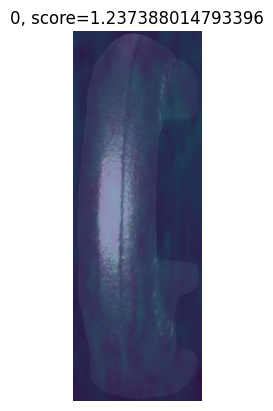

In [6]:
from src.repos.cs_flow.model import load_model
from src.repos.cs_flow.evaluate import compare_histogram, viz_roc, viz_map_array, evaluate

img_paths = test_set.paths if c.pre_extracted else [p for p, l in test_set.samples]
_, test_loader = make_dataloaders(train_set, test_set)
mod = load_model(c.modelname)
evaluate(mod, test_loader, score_export_dir, map_export_dir, img_paths, localize)